<a href="https://colab.research.google.com/github/baussel/Satellite_Detection/blob/main/Processing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postprocessing and Analysis of Results



---


*Ben Aussel, September 2021, ESA*


---



## Google Drive & Modules

In [2]:
#Mount Google Drive with this Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install astroquery

     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 802 kB 61.9 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 3.0 MB 36.0 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=a3524322a95cfc951657db1d0533d8c47e884592c0d8902200fdba4a6d0a006e
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


In [4]:
#Modules
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
from collections import Counter
import glob
import json
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Data post-processing

### ACS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS.csv")

In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")

#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/ACS/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/ACS\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed.csv")

In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")

  0%|                                                                                         | 0/2578 [00:00<?, ?it/s]<ipython-input-24-be660f706a59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|█████████████████████████████████████████████████████████████████████████████| 2578/2578 [00:19<00:00, 132.50it/s]


### WFC3/UVIS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3.csv")

                      filename
0      ia2l51030_ia2l51ukq.jpg
1      ia2l51030_ia2l51urq.jpg
2      ia2l51030_ia2l51uwq.jpg
3      ia2l52030_ia2l52srq.jpg
4      ia2l52030_ia2l52svq.jpg
...                        ...
61514  iejc02010_iejc02kpq.jpg
61515  iejc02010_iejc02kqq.jpg
61516  iejc02010_iejc02krq.jpg
61517  iejc02010_iejc02ksq.jpg
61518  iejc02010_iejc02ktq.jpg

[61519 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")

  0%|                                                                                        | 0/61519 [00:00<?, ?it/s]<ipython-input-20-68dd9fe9c197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 61519/61519 [07:16<00:00, 141.04it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/WFC3/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/WFC3\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed.csv")

                    filename
0    ib1f31020_ib1f31e9q.jpg
1    ib1f32020_ib1f32uzq.jpg
2    ib1f33010_ib1f33q8q.jpg
3    ib1f35010_ib1f35igq.jpg
4    ib1f36030_ib1f36aqq.jpg
..                       ...
835  ieh807010_ieh807blq.jpg
836  ieh807020_ieh807bmq.jpg
837  ieh807020_ieh807bnq.jpg
838  iehh02010_iehh02rjq.jpg
839  iej501040_iej501snq.jpg

[840 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")

  0%|                                                                                          | 0/840 [00:00<?, ?it/s]<ipython-input-35-44bdfa9fa666>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 840/840 [00:03<00:00, 225.61it/s]


### WFC3/IR

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR.csv")

                      filename
0      i9zf01010_i9zf01dzq.jpg
1      i9zf01010_i9zf01e0q.jpg
2      i9zf01010_i9zf01e1q.jpg
3      i9zf01010_i9zf01e3q.jpg
4      i9zf02010_i9zf02z6q.jpg
...                        ...
84684  iejm02010_iejm02doq.jpg
84685  iejm02020_iejm02dfq.jpg
84686  iejm02020_iejm02djq.jpg
84687  iejm02020_iejm02dmq.jpg
84688  iejm02020_iejm02dqq.jpg

[84689 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params.csv")

  0%|                                                                                        | 0/84689 [00:00<?, ?it/s]<ipython-input-5-197c658a39bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 84689/84689 [09:16<00:00, 152.10it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/IR/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("Results/processed/IR\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed.csv")

                    filename
0    i9zf03010_i9zf03gcq.jpg
1    i9zf13010_i9zf13chq.jpg
2    i9zg01010_i9zg01g2q.jpg
3    ia1e27010_ia1e27kbq.jpg
4    ia1l76010_ia1l76lqq.jpg
..                       ...
646  iedwa7010_iedwa7d7q.jpg
647  iedwan010_iedwano6q.jpg
648  ieel83020_ieel83afq.jpg
649  ieer01010_ieer01g1q.jpg
650  iejm02010_iejm02dkq.jpg

[651 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

  0%|                                                                                          | 0/651 [00:00<?, ?it/s]<ipython-input-9-f4f3af4f0e87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 651/651 [00:05<00:00, 118.39it/s]


## Analysis

### Import of Data

In [5]:
data_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")
data_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")
data_IR = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params_images.csv")

In [6]:
data_sats_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")
data_sats_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")
data_sats_IR = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

In [7]:
bins_mjd = [52275,52640,53005,53371,53736,54101,54466,54832,55197,55562,55927,56293,56658,57023,57388,57754,58119,58484,58849,59215,59580]
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

### Fraction

In [8]:
#ACS
total_number_sats_ACS = len(data_sats_ACS) #Number of trails
total_number_images_ACS = len(data_ACS) #Number of images
frac_ACS = total_number_sats_ACS/total_number_images_ACS
u_frac_ACS = np.sqrt(total_number_sats_ACS/total_number_images_ACS**2+total_number_sats_ACS**2/total_number_images_ACS**3)
print("Fraction of images with satellite trails for ACS: {:.4f} +- {:.4f}".format(frac_ACS,u_frac_ACS))

Fraction of images with satellite trails for ACS: 0.0330 +- 0.0007


In [9]:
#WFC3/UVIS
total_number_sats_WFC3_UVIS = len(data_sats_WFC3_UVIS) #Number of trails
total_number_images_WFC3_UVIS = len(data_WFC3_UVIS) #Number of images
frac_WFC3_UVIS = total_number_sats_WFC3_UVIS/total_number_images_WFC3_UVIS
u_frac_WFC3_UVIS = np.sqrt(total_number_sats_WFC3_UVIS/total_number_images_WFC3_UVIS**2+total_number_sats_WFC3_UVIS**2/total_number_images_WFC3_UVIS**3)
print("Fraction of images with satellite trails for WFC3_UVIS: {:.4f} +- {:.4f}".format(frac_WFC3_UVIS,u_frac_WFC3_UVIS))

Fraction of images with satellite trails for WFC3_UVIS: 0.0137 +- 0.0005


In [10]:
#WFC3/IR
total_number_sats_IR = len(data_sats_IR) #Number of trails
total_number_images_IR = len(data_IR) #Number of images
frac_IR = total_number_sats_IR/total_number_images_IR
u_frac_IR = np.sqrt(total_number_sats_IR/total_number_images_IR**2+total_number_sats_IR**2/total_number_images_IR**3)
print("Fraction of images with satellite trails for IR: {:.4f} +- {:.4f}".format(frac_IR,u_frac_IR))

Fraction of images with satellite trails for IR: 0.0105 +- 0.0004


### Plots for different years

#### All images



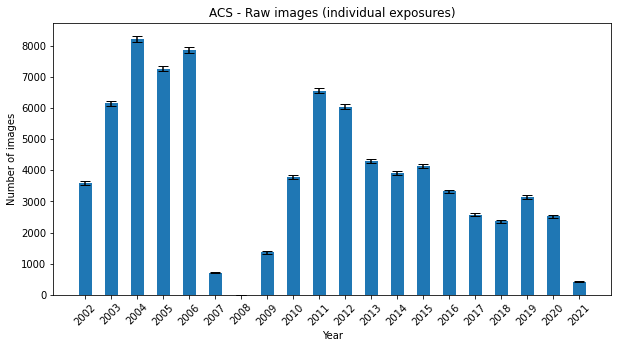

In [11]:
#ACS
hist_ACS = np.histogram(data_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_ACS[0],yerr=np.sqrt(hist_ACS[0]), width=0.5,capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_all_images_years.png",dpi=100)

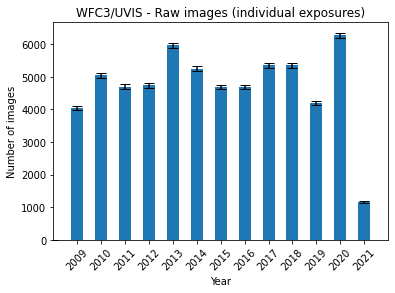

In [12]:
#WFC3/UVIS
hist_WFC3 = np.histogram(data_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_WFC3[0], width=0.5, yerr=np.sqrt(hist_WFC3[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_all_images_years.png",dpi=100)

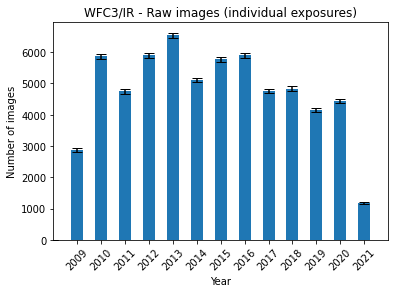

In [13]:
#WFC3/IR
hist_IR = np.histogram(data_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_IR[0], width=0.5, yerr=np.sqrt(hist_IR[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_all_images_years.png",dpi=100)

#### Images with satellite trails

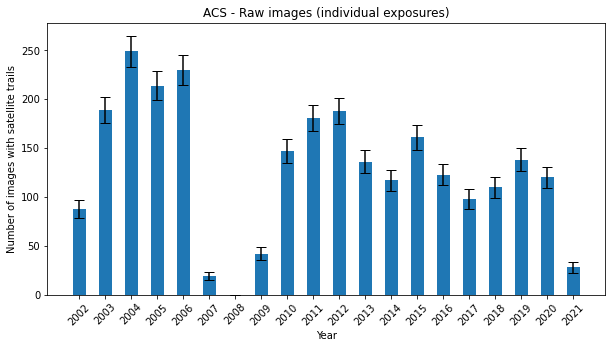

In [14]:
#ACS
hist_sats_ACS = np.histogram(data_sats_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_sats_ACS[0], width=0.5, yerr=np.sqrt(hist_sats_ACS[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellites_years.png",dpi=100)

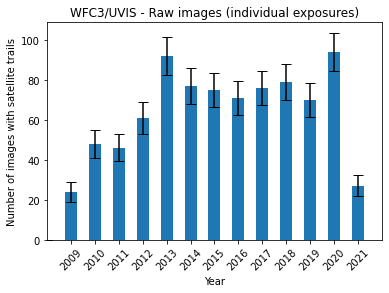

In [15]:
#WFC3/UVIS
hist_sats_WFC3 = np.histogram(data_sats_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_sats_WFC3[0], width=0.5, yerr=np.sqrt(hist_sats_WFC3[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellites_years.png",dpi=100)

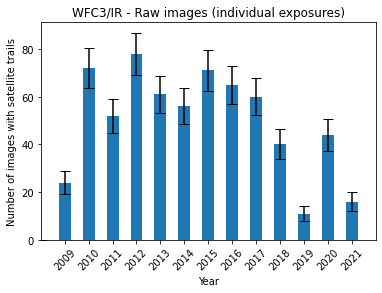

In [16]:
#WFC3/IR
hist_sats_IR = np.histogram(data_sats_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_sats_IR[0], width=0.5, yerr=np.sqrt(hist_sats_IR[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellites_years.png",dpi=100)

#### Fraction of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


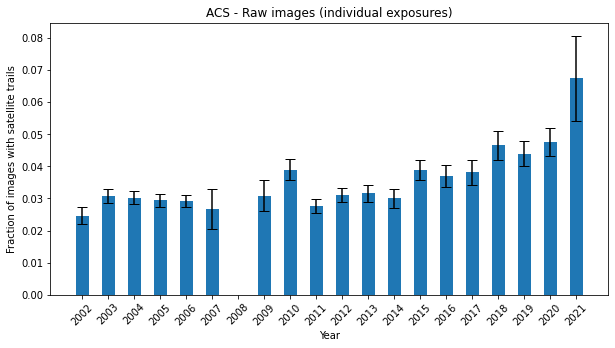

In [17]:
#ACS
fraction_ACS = hist_sats_ACS[0]/hist_ACS[0]
u_fraction_ACS = np.sqrt(hist_sats_ACS[0]/(hist_ACS[0]**2)+(hist_sats_ACS[0]**2/(hist_ACS[0]**3)))

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,fraction_ACS, width=0.5, yerr=u_fraction_ACS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


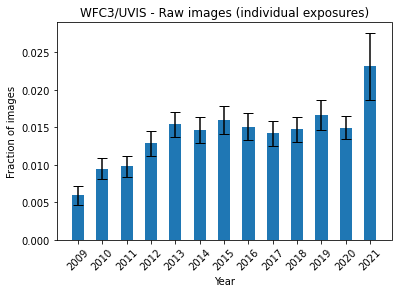

In [18]:
#WFC3/UVIS
fraction_WFC3 = hist_sats_WFC3[0]/hist_WFC3[0]
u_fraction_WFC3 = np.sqrt(hist_sats_WFC3[0]/(hist_WFC3[0]**2)+(hist_sats_WFC3[0]**2/(hist_WFC3[0]**3)))

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,fraction_WFC3, width=0.5, yerr=u_fraction_WFC3,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


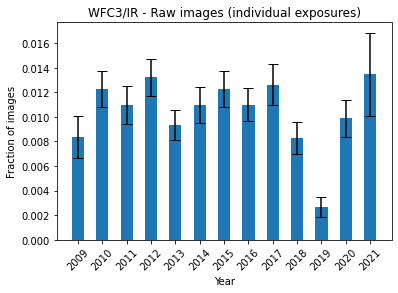

In [19]:
#WFC3/IR
fraction_IR = hist_sats_IR[0]/hist_IR[0]
u_fraction_IR = np.sqrt(hist_sats_IR[0]/(hist_IR[0]**2)+(hist_sats_IR[0]**2/(hist_IR[0]**3)))

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,fraction_IR, width=0.5, yerr=u_fraction_IR,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_years.png",dpi=100)

#### Normalization

In [20]:
#Full FOV sizes in degrees
fov_size_ACS = 202/3600 #202x202"
fov_size_WFC3_UVIS = 160/3600 #160x160"
fov_size_IR = 130/3600 #123x137"

In [21]:
#all images
total_exp_time_ACS = data_ACS[data_ACS["fov_size"]>0.083]["exposure_duration"].sum() #Sum of exposure time
total_number_sats_ACS = len(data_sats_ACS[data_sats_ACS["fov_size"]>0.083]) #Number of trails
total_norm_trails_per_second_ACS = total_number_sats_ACS/(total_exp_time_ACS*fov_size_ACS)
u_total_norm_trails_per_second_ACS = np.sqrt(total_number_sats_ACS)/(total_exp_time_ACS*fov_size_ACS)
print("Normalized trails per second ACS: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_ACS,u_total_norm_trails_per_second_ACS))

Normalized trails per second ACS: (9.067e-04 +- 1.94e-05) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


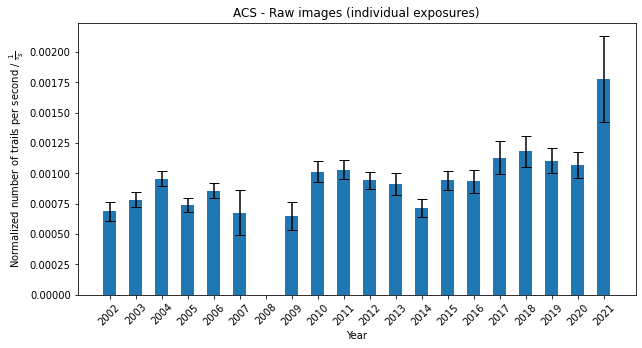

In [22]:
#Sum of exposure time
hist_sats_ACS_norm = hist_sats_ACS = np.histogram(data_sats_ACS[data_sats_ACS["fov_size"]>0.083]["start_time_mjd"],bins=bins_mjd)
hist_ACS_exp = np.histogram(data_ACS[data_ACS["fov_size"]>0.083]["start_time_mjd"],bins=bins_mjd,weights=data_ACS[data_ACS["fov_size"]>0.083]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_ACS = hist_sats_ACS_norm[0]/(hist_ACS_exp[0]*fov_size_ACS)
u_trails_per_second_ACS = np.sqrt(hist_sats_ACS_norm[0])/(hist_ACS_exp[0]*fov_size_ACS)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,trails_per_second_ACS, width=0.5, yerr=u_trails_per_second_ACS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_years_norm.png",dpi=100)

In [23]:
print("For 1 hour exposure time and full FOV for ACS one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_ACS*3600*fov_size_ACS,u_total_norm_trails_per_second_ACS*3600*fov_size_ACS))
print("For 1 day exposure time and full FOV for ACS one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_ACS*3600*24*fov_size_ACS,u_total_norm_trails_per_second_ACS*3600*24*fov_size_ACS))

For 1 hour exposure time and full FOV for ACS one will observe (0.183 +- 0.004) satellite trails.
For 1 day exposure time and full FOV for ACS one will observe (4.395 +- 0.094) satellite trails.


In [24]:
print("For 1 hour exposure time and full FOV for ACS one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_ACS[-1]*3600*fov_size_ACS,u_trails_per_second_ACS[-1]*3600*fov_size_ACS))
print("For 1 day exposure time and full FOV for ACS one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_ACS[-1]*3600*24*fov_size_ACS,u_trails_per_second_ACS[-1]*3600*24*fov_size_ACS))

For 1 hour exposure time and full FOV for ACS one will observe (0.359 +- 0.072) satellite trails in 2021.
For 1 day exposure time and full FOV for ACS one will observe (8.616 +- 1.723) satellite trails in 2021.


In [25]:
#all images
total_exp_time_WFC3_UVIS = data_WFC3_UVIS[data_WFC3_UVIS["fov_size"]>0.066]["exposure_duration"].sum() #Sum of exposure time
total_number_sats_WFC3_UVIS = len(data_sats_WFC3_UVIS[data_sats_WFC3_UVIS["fov_size"]>0.066]) #Number of trails
total_norm_trails_per_second_WFC3_UVIS = total_number_sats_WFC3_UVIS/(total_exp_time_WFC3_UVIS*fov_size_WFC3_UVIS)
u_total_norm_trails_per_second_WFC3_UVIS = np.sqrt(total_number_sats_WFC3_UVIS)/(total_exp_time_WFC3_UVIS*fov_size_WFC3_UVIS)
print("Normalized trails per second WFC3_UVIS: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_WFC3_UVIS,u_total_norm_trails_per_second_WFC3_UVIS))

Normalized trails per second WFC3_UVIS: (6.440e-04 +- 2.73e-05) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


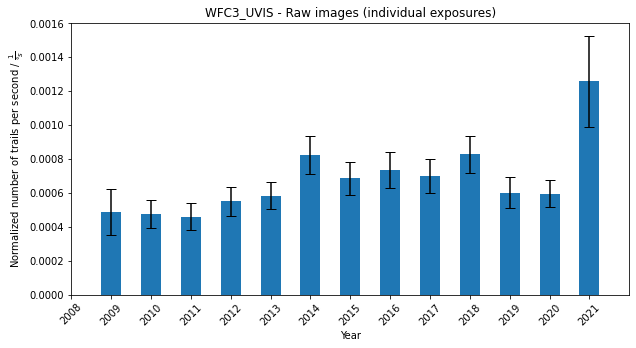

In [26]:
#Sum of exposure time
hist_sats_WFC3_UVIS_norm = hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS[data_sats_WFC3_UVIS["fov_size"]>0.066]["start_time_mjd"],bins=bins_mjd)
hist_WFC3_UVIS_exp = np.histogram(data_WFC3_UVIS[data_WFC3_UVIS["fov_size"]>0.066]["start_time_mjd"],bins=bins_mjd,weights=data_WFC3_UVIS[data_WFC3_UVIS["fov_size"]>0.066]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_WFC3_UVIS = hist_sats_WFC3_UVIS_norm[0]/(hist_WFC3_UVIS_exp[0]*fov_size_WFC3_UVIS)
u_trails_per_second_WFC3_UVIS = np.sqrt(hist_sats_WFC3_UVIS_norm[0])/(hist_WFC3_UVIS_exp[0]*fov_size_WFC3_UVIS)

plt.figure(figsize=(10,5))
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.bar(years,trails_per_second_WFC3_UVIS, width=0.5, yerr=u_trails_per_second_WFC3_UVIS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_years_norm.png",dpi=100)

In [27]:
print("For 1 hour exposure time and full FOV for WFC3_UVIS one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_WFC3_UVIS*3600*fov_size_WFC3_UVIS,u_total_norm_trails_per_second_WFC3_UVIS*3600*fov_size_WFC3_UVIS))
print("For 1 day exposure time and full FOV for WFC3_UVIS one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_WFC3_UVIS*3600*24*fov_size_WFC3_UVIS,u_total_norm_trails_per_second_WFC3_UVIS*3600*24*fov_size_WFC3_UVIS))

For 1 hour exposure time and full FOV for WFC3_UVIS one will observe (0.103 +- 0.004) satellite trails.
For 1 day exposure time and full FOV for WFC3_UVIS one will observe (2.473 +- 0.105) satellite trails.


In [28]:
print("For 1 hour exposure time and full FOV for WFC3_UVIS one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_WFC3_UVIS[-1]*3600*fov_size_WFC3_UVIS,u_trails_per_second_WFC3_UVIS[-1]*3600*fov_size_WFC3_UVIS))
print("For 1 day exposure time and full FOV for WFC3_UVIS one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_WFC3_UVIS[-1]*3600*24*fov_size_WFC3_UVIS,u_trails_per_second_WFC3_UVIS[-1]*3600*24*fov_size_WFC3_UVIS))

For 1 hour exposure time and full FOV for WFC3_UVIS one will observe (0.201 +- 0.043) satellite trails in 2021.
For 1 day exposure time and full FOV for WFC3_UVIS one will observe (4.829 +- 1.030) satellite trails in 2021.


In [29]:
#all images
total_exp_time_IR = data_IR[data_IR["fov_size"]>0.051]["exposure_duration"].sum() #Sum of exposure time
total_number_sats_IR = len(data_sats_IR[data_sats_IR["fov_size"]>0.051]) #Number of trails
total_norm_trails_per_second_IR = total_number_sats_IR/(total_exp_time_IR*fov_size_IR)
u_total_norm_trails_per_second_IR = np.sqrt(total_number_sats_IR)/(total_exp_time_IR*fov_size_IR)
print("Normalized trails per second IR: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_IR,u_total_norm_trails_per_second_IR))

Normalized trails per second IR: (7.752e-04 +- 3.08e-05) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


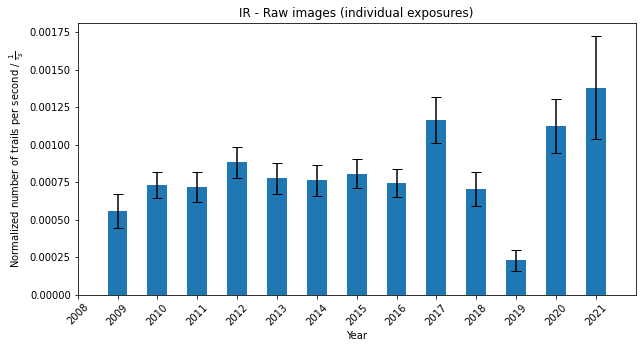

In [30]:
#Sum of exposure time
hist_sats_IR_norm = hist_sats_IR = np.histogram(data_sats_IR[data_sats_IR["fov_size"]>0.051]["start_time_mjd"],bins=bins_mjd)
hist_IR_exp = np.histogram(data_IR[data_IR["fov_size"]>0.051]["start_time_mjd"],bins=bins_mjd,weights=data_IR[data_IR["fov_size"]>0.051]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_IR = hist_sats_IR_norm[0]/(hist_IR_exp[0]*fov_size_IR)
u_trails_per_second_IR = np.sqrt(hist_sats_IR_norm[0])/(hist_IR_exp[0]*fov_size_IR)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(years,trails_per_second_IR, width=0.5, yerr=u_trails_per_second_IR,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_years_norm.png",dpi=100)

In [31]:
print("For 1 hour exposure time and full FOV for IR one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_IR*3600*fov_size_IR,u_total_norm_trails_per_second_IR*3600*fov_size_IR))
print("For 1 day exposure time and full FOV for IR one will observe ({:.3f} +- {:.3f}) satellite trails."\
      .format(total_norm_trails_per_second_IR*3600*24*fov_size_IR,u_total_norm_trails_per_second_IR*3600*24*fov_size_IR))

For 1 hour exposure time and full FOV for IR one will observe (0.101 +- 0.004) satellite trails.
For 1 day exposure time and full FOV for IR one will observe (2.419 +- 0.096) satellite trails.


In [32]:
print("For 1 hour exposure time and full FOV for IR one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_IR[-1]*3600*fov_size_IR,u_trails_per_second_IR[-1]*3600*fov_size_IR))
print("For 1 day exposure time and full FOV for IR one will observe ({:.3f} +- {:.3f}) satellite trails in 2021."\
      .format(trails_per_second_IR[-1]*3600*24*fov_size_IR,u_trails_per_second_IR[-1]*3600*24*fov_size_IR))

For 1 hour exposure time and full FOV for IR one will observe (0.179 +- 0.045) satellite trails in 2021.
For 1 day exposure time and full FOV for IR one will observe (4.305 +- 1.076) satellite trails in 2021.


### Plots for months 2020/2021

In [33]:
bins_months = [58849,58880,58909,58940,58970,59001,59031,59062,59093,59123,59154,59184,59215,59246,59274,59305,59335,59366,59396,59427,59458,59488]
months = ["01/20","02/20","03/20","04/20","05/20","06/20","07/20","08/20","09/20","10/20","11/20","12/20","01/21","02/21","03/21","04/21","05/21","06/21","07/21","08/21","09/21"]

#bins_months = [58849,58940,59031,59123,59215,59305,59396,59488]
#months = ["01/20","04/20","07/20","10/20","01/21","04/21","07/21"]

#### All images

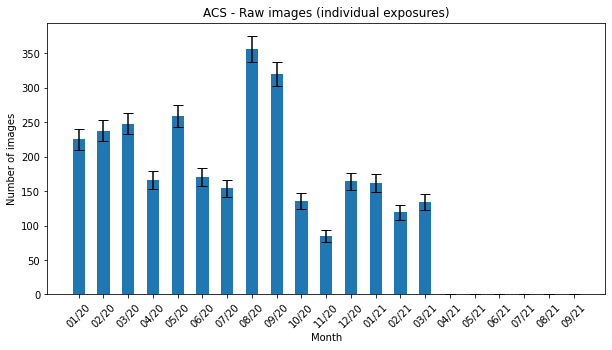

In [34]:
#ACS
data_ACS_months = data_ACS[data_ACS["start_time_mjd"] > 58849]
hist_ACS_months = np.histogram(data_ACS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,hist_ACS_months[0], width=0.5, yerr=np.sqrt(hist_ACS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_all_images_months.png",dpi=100)

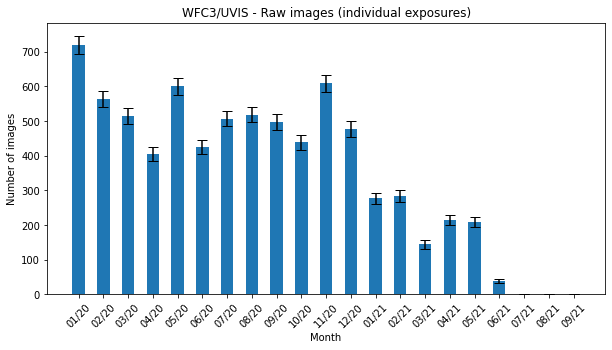

In [35]:
#WFC3/UVIS
data_WFC3_UVIS_months = data_WFC3_UVIS[data_WFC3_UVIS["start_time_mjd"] > 58849]
hist_WFC3_UVIS_months = np.histogram(data_WFC3_UVIS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,hist_WFC3_UVIS_months[0], width=0.5, yerr=np.sqrt(hist_WFC3_UVIS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_all_images_months.png",dpi=100)

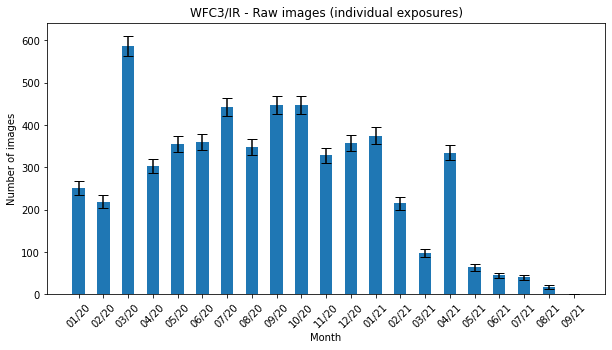

In [36]:
#WFC3/IR
data_IR_months = data_IR[data_IR["start_time_mjd"] > 58849]
hist_IR_months = np.histogram(data_IR_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(months,hist_IR_months[0], width=0.5, yerr=np.sqrt(hist_IR_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_all_images_months.png",dpi=100)

#### Images with satellite trails

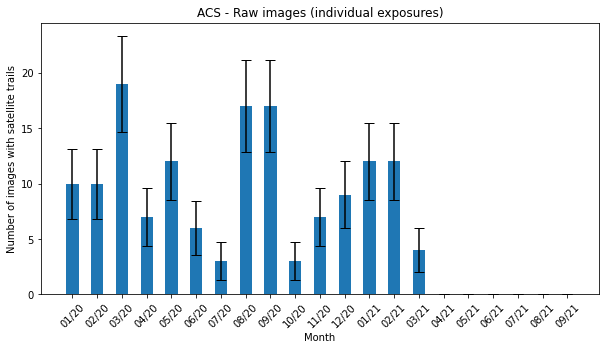

In [37]:
#ACS
data_sats_ACS_months = data_sats_ACS[data_sats_ACS["start_time_mjd"] > 58849]
hist_sats_ACS_months = np.histogram(data_sats_ACS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,hist_sats_ACS_months[0], width=0.5, yerr=np.sqrt(hist_sats_ACS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellites_months.png",dpi=100)

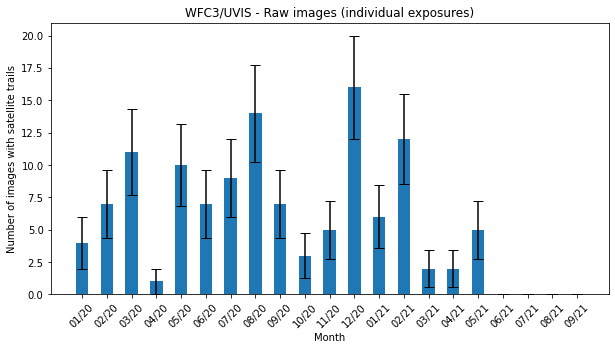

In [38]:
#WFC3_UVIS
data_sats_WFC3_UVIS_months = data_sats_WFC3_UVIS[data_sats_WFC3_UVIS["start_time_mjd"] > 58849]
hist_sats_WFC3_UVIS_months = np.histogram(data_sats_WFC3_UVIS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,hist_sats_WFC3_UVIS_months[0], width=0.5, yerr=np.sqrt(hist_sats_WFC3_UVIS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellites_months.png",dpi=100)

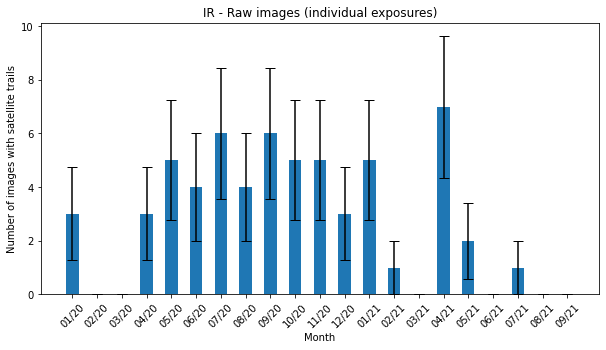

In [39]:
#IR
data_sats_IR_months = data_sats_IR[data_sats_IR["start_time_mjd"] > 58849]
hist_sats_IR_months = np.histogram(data_sats_IR_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,hist_sats_IR_months[0], width=0.5, yerr=np.sqrt(hist_sats_IR_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellites_months.png",dpi=100)

#### Fraction of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


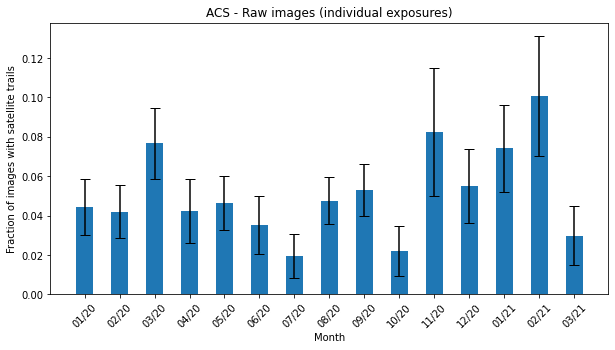

In [40]:
#ACS
fraction_ACS_months = hist_sats_ACS_months[0]/hist_ACS_months[0]
u_fraction_ACS_months = np.sqrt(hist_sats_ACS_months[0]/(hist_ACS_months[0]**2)+(hist_sats_ACS_months[0]**2/(hist_ACS_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,fraction_ACS_months, width=0.5, yerr=u_fraction_ACS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_months.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


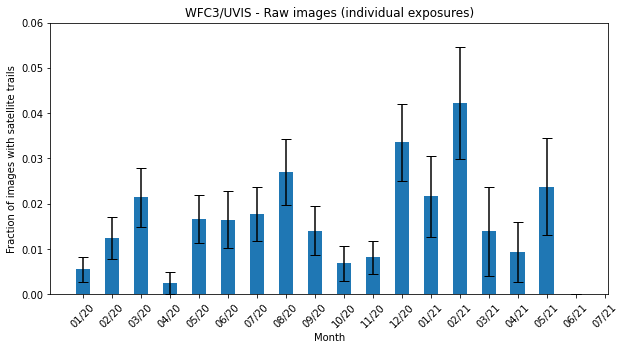

In [41]:
#WFC3_UVIS
fraction_WFC3_UVIS_months = hist_sats_WFC3_UVIS_months[0]/hist_WFC3_UVIS_months[0]
u_fraction_WFC3_UVIS_months = np.sqrt(hist_sats_WFC3_UVIS_months[0]/(hist_WFC3_UVIS_months[0]**2)+(hist_sats_WFC3_UVIS_months[0]**2/(hist_WFC3_UVIS_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,fraction_WFC3_UVIS_months, width=0.5, yerr=u_fraction_WFC3_UVIS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.ylim(0,0.06)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_fraction_months.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


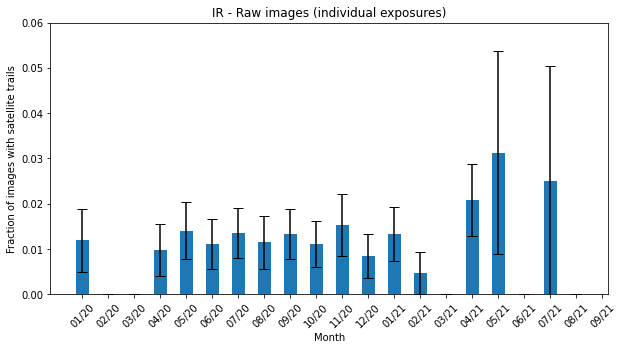

In [42]:
#IR
fraction_IR_months = hist_sats_IR_months[0]/hist_IR_months[0]
u_fraction_IR_months = np.sqrt(hist_sats_IR_months[0]/(hist_IR_months[0]**2)+(hist_sats_IR_months[0]**2/(hist_IR_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,fraction_IR_months, width=0.5, yerr=u_fraction_IR_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.ylim(0,0.06)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_months.png",dpi=100)

#### Normalization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


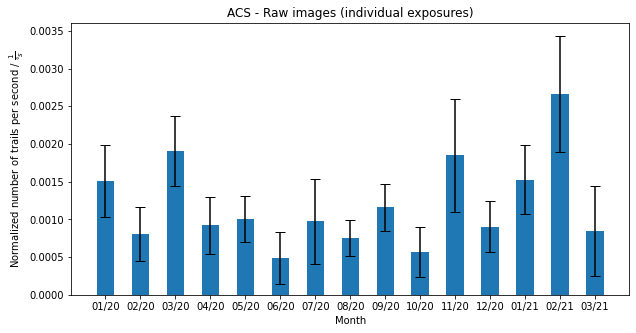

In [43]:
#Sum of exposure time
hist_sats_ACS_norm_months = np.histogram(data_sats_ACS_months[data_sats_ACS_months["fov_size"]>0.083]["start_time_mjd"],bins=bins_months)
hist_ACS_exp_months = np.histogram(data_ACS_months[data_ACS_months["fov_size"]>0.083]["start_time_mjd"],bins=bins_months,weights=data_ACS_months[data_ACS_months["fov_size"]>0.083]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_ACS_months = hist_sats_ACS_norm_months[0]/(hist_ACS_exp_months[0]*fov_size_ACS)
u_trails_per_second_ACS_months = np.sqrt(hist_sats_ACS_norm_months[0])/(hist_ACS_exp_months[0]*fov_size_ACS)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,trails_per_second_ACS_months, width=0.5, yerr=u_trails_per_second_ACS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
#plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_months_norm.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


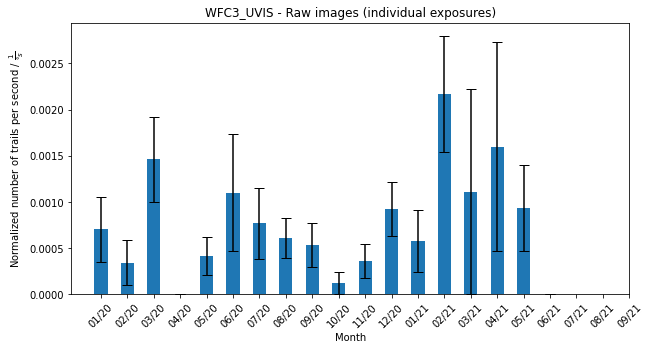

In [44]:
#Sum of exposure time
hist_sats_WFC3_UVIS_norm_months = np.histogram(data_sats_WFC3_UVIS_months[data_sats_WFC3_UVIS_months["fov_size"]>0.066]["start_time_mjd"],bins=bins_months)
hist_WFC3_UVIS_exp_months = np.histogram(data_WFC3_UVIS_months[data_WFC3_UVIS_months["fov_size"]>0.066]["start_time_mjd"],bins=bins_months,weights=data_WFC3_UVIS_months[data_WFC3_UVIS_months["fov_size"]>0.066]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_WFC3_UVIS_months = hist_sats_WFC3_UVIS_norm_months[0]/(hist_WFC3_UVIS_exp_months[0]*fov_size_WFC3_UVIS)
u_trails_per_second_WFC3_UVIS_months = np.sqrt(hist_sats_WFC3_UVIS_norm_months[0])/(hist_WFC3_UVIS_exp_months[0]*fov_size_WFC3_UVIS)

plt.figure(figsize=(10,5))
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.bar(months,trails_per_second_WFC3_UVIS_months, width=0.5, yerr=u_trails_per_second_WFC3_UVIS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(months,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_months_norm.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


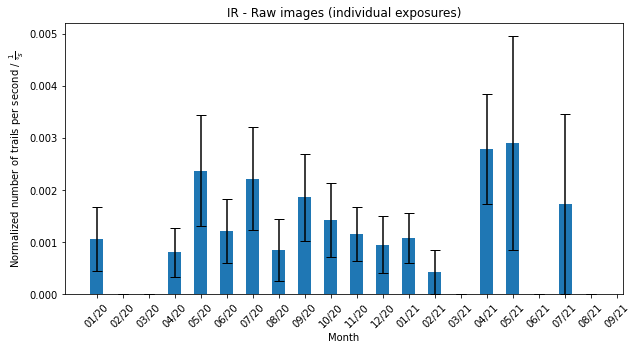

In [45]:
#Sum of exposure time
hist_sats_IR_norm_months = np.histogram(data_sats_IR_months[data_sats_IR_months["fov_size"]>0.051]["start_time_mjd"],bins=bins_months)
hist_IR_exp_months = np.histogram(data_IR_months[data_IR_months["fov_size"]>0.051]["start_time_mjd"],bins=bins_months,weights=data_IR_months[data_IR_months["fov_size"]>0.051]["exposure_duration"])

#Number of trails per second (normalized)
trails_per_second_IR_months = hist_sats_IR_norm_months[0]/(hist_IR_exp_months[0]*fov_size_IR)
u_trails_per_second_IR_months = np.sqrt(hist_sats_IR_norm_months[0])/(hist_IR_exp_months[0]*fov_size_IR)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,trails_per_second_IR_months, width=0.5, yerr=u_trails_per_second_IR_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(months,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_months_norm.png",dpi=100)

### Other parameters

#### Exposure Time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


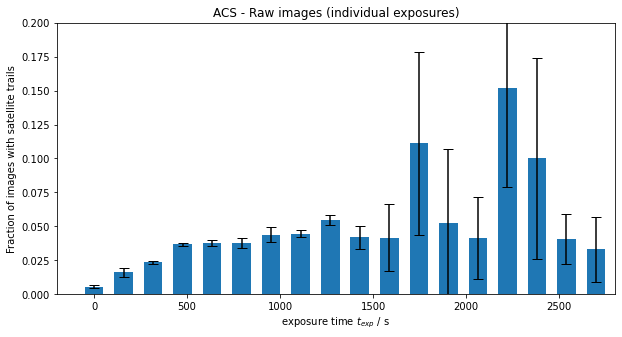

In [46]:
#ACS
exp_hist_ACS = np.histogram(data_ACS["exposure_duration"],bins=80)
exp_hist_sats_ACS = np.histogram(data_sats_ACS["exposure_duration"],bins=exp_hist_ACS[1])
fraction_exp_ACS = exp_hist_sats_ACS[0]/exp_hist_ACS[0]
u_fraction_exp_ACS = np.sqrt(exp_hist_sats_ACS[0]/(exp_hist_ACS[0]**2)+(exp_hist_sats_ACS[0]**2/(exp_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_ACS[1][:-1],fraction_exp_ACS,width=100, yerr=u_fraction_exp_ACS,capsize=5)
plt.xlim(-200,2800) #Some images with longer exposure times
plt.ylim(0,0.2)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_exp.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


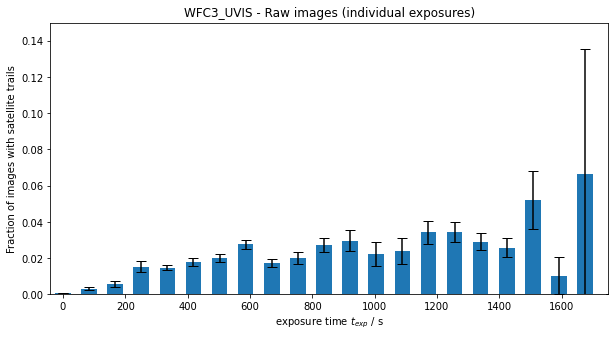

In [47]:
#WFC3_UVIS
exp_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["exposure_duration"],bins=40)
exp_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["exposure_duration"],bins=exp_hist_WFC3_UVIS[1])
fraction_exp_WFC3_UVIS = exp_hist_sats_WFC3_UVIS[0]/exp_hist_WFC3_UVIS[0]
u_fraction_exp_WFC3_UVIS = np.sqrt(exp_hist_sats_WFC3_UVIS[0]/(exp_hist_WFC3_UVIS[0]**2)+(exp_hist_sats_WFC3_UVIS[0]**2/(exp_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_WFC3_UVIS[1][:-1],fraction_exp_WFC3_UVIS,width=50, yerr=u_fraction_exp_WFC3_UVIS,capsize=5)
plt.xlim(-40,1750) #Some images with longer exposure times
plt.ylim(0,0.15)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_exp.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


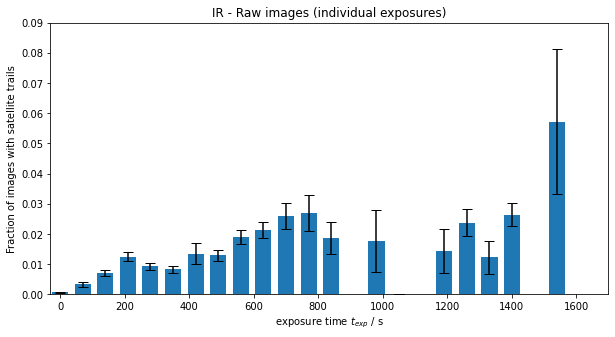

In [48]:
#IR
exp_hist_IR = np.histogram(data_IR["exposure_duration"],bins=40)
exp_hist_sats_IR = np.histogram(data_sats_IR["exposure_duration"],bins=exp_hist_IR[1])
fraction_exp_IR = exp_hist_sats_IR[0]/exp_hist_IR[0]
u_fraction_exp_IR = np.sqrt(exp_hist_sats_IR[0]/(exp_hist_IR[0]**2)+(exp_hist_sats_IR[0]**2/(exp_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_IR[1][:-1],fraction_exp_IR,width=50, yerr=u_fraction_exp_IR,capsize=5)
plt.xlim(-30,1700) #Some images with longer exposure times
plt.ylim(0,0.09)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_exp.png",dpi=100)

#### RA

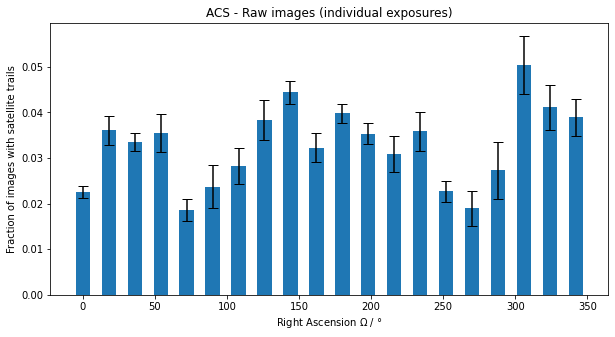

In [49]:
#ACS
ra_hist_ACS = np.histogram(data_ACS["ra"],bins=20)
ra_hist_sats_ACS = np.histogram(data_sats_ACS["ra"],bins=ra_hist_ACS[1])
fraction_ra_ACS = ra_hist_sats_ACS[0]/ra_hist_ACS[0]
u_fraction_ra_ACS = np.sqrt(ra_hist_sats_ACS[0]/(ra_hist_ACS[0]**2)+(ra_hist_sats_ACS[0]**2/(ra_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_ACS[1][:-1],fraction_ra_ACS,width=10, yerr=u_fraction_ra_ACS,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_ra.png",dpi=100)

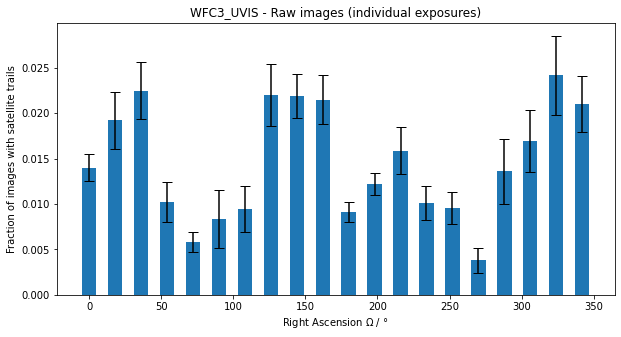

In [50]:
#WFC3_UVIS
ra_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["ra"],bins=20)
ra_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["ra"],bins=ra_hist_WFC3_UVIS[1])
fraction_ra_WFC3_UVIS = ra_hist_sats_WFC3_UVIS[0]/ra_hist_WFC3_UVIS[0]
u_fraction_ra_WFC3_UVIS = np.sqrt(ra_hist_sats_WFC3_UVIS[0]/(ra_hist_WFC3_UVIS[0]**2)+(ra_hist_sats_WFC3_UVIS[0]**2/(ra_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_WFC3_UVIS[1][:-1],fraction_ra_WFC3_UVIS,width=10, yerr=u_fraction_ra_WFC3_UVIS,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_ra.png",dpi=100)

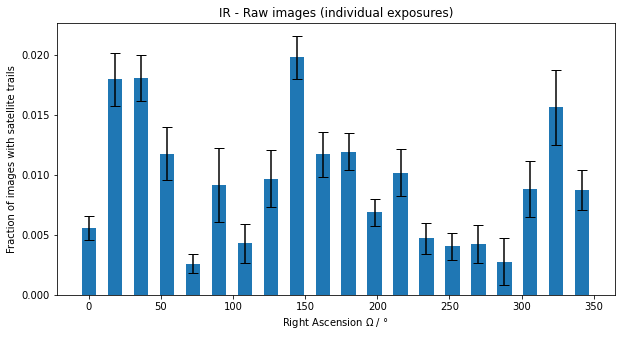

In [51]:
#IR
ra_hist_IR = np.histogram(data_IR["ra"],bins=20)
ra_hist_sats_IR = np.histogram(data_sats_IR["ra"],bins=ra_hist_IR[1])
fraction_ra_IR = ra_hist_sats_IR[0]/ra_hist_IR[0]
u_fraction_ra_IR = np.sqrt(ra_hist_sats_IR[0]/(ra_hist_IR[0]**2)+(ra_hist_sats_IR[0]**2/(ra_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_IR[1][:-1],fraction_ra_IR,width=10, yerr=u_fraction_ra_IR,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_ra.png",dpi=100)

#### Dec

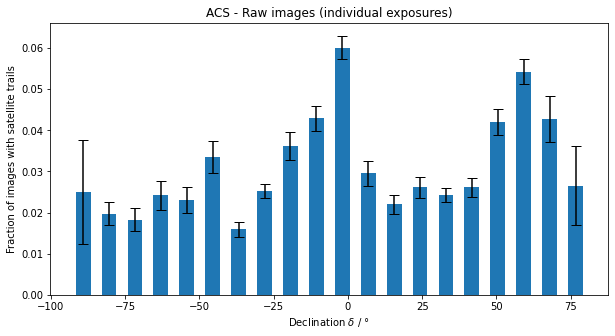

In [52]:
#ACS
dec_hist_ACS = np.histogram(data_ACS["dec"],bins=20)
dec_hist_sats_ACS = np.histogram(data_sats_ACS["dec"],bins=dec_hist_ACS[1])
fraction_dec_ACS = dec_hist_sats_ACS[0]/dec_hist_ACS[0]
u_fraction_dec_ACS = np.sqrt(dec_hist_sats_ACS[0]/(dec_hist_ACS[0]**2)+(dec_hist_sats_ACS[0]**2/(dec_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_ACS[1][:-1],fraction_dec_ACS,width=5, yerr=u_fraction_dec_ACS,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_dec.png",dpi=100)

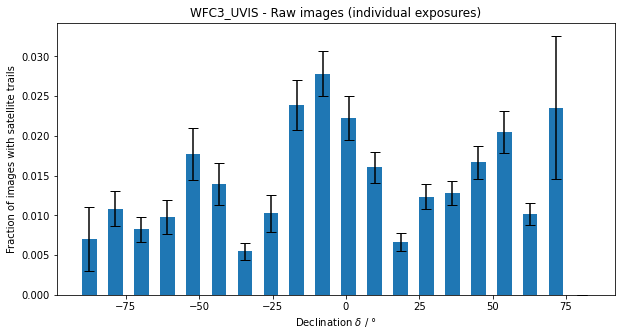

In [53]:
#WFC3_UVIS
dec_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["dec"],bins=20)
dec_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["dec"],bins=dec_hist_WFC3_UVIS[1])
fraction_dec_WFC3_UVIS = dec_hist_sats_WFC3_UVIS[0]/dec_hist_WFC3_UVIS[0]
u_fraction_dec_WFC3_UVIS = np.sqrt(dec_hist_sats_WFC3_UVIS[0]/(dec_hist_WFC3_UVIS[0]**2)+(dec_hist_sats_WFC3_UVIS[0]**2/(dec_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_WFC3_UVIS[1][:-1],fraction_dec_WFC3_UVIS,width=5, yerr=u_fraction_dec_WFC3_UVIS,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_dec.png",dpi=100)

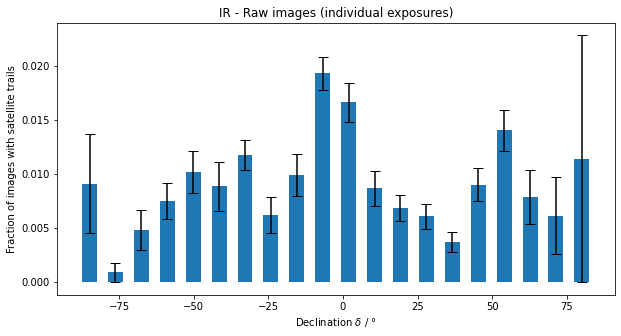

In [54]:
#IR
dec_hist_IR = np.histogram(data_IR["dec"],bins=20)
dec_hist_sats_IR = np.histogram(data_sats_IR["dec"],bins=dec_hist_IR[1])
fraction_dec_IR = dec_hist_sats_IR[0]/dec_hist_IR[0]
u_fraction_dec_IR = np.sqrt(dec_hist_sats_IR[0]/(dec_hist_IR[0]**2)+(dec_hist_sats_IR[0]**2/(dec_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_IR[1][:-1],fraction_dec_IR,width=5, yerr=u_fraction_dec_IR,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_dec.png",dpi=100)

#### Filter


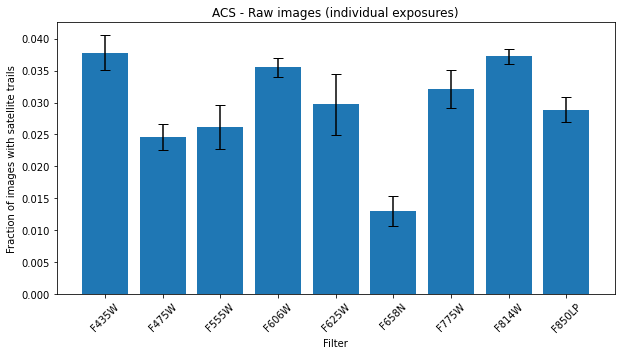

In [55]:
#ACS
#All Images
filter_ACS = []
for i in range(len(data_ACS["instrument_configuration"])):
    value = data_ACS["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_ACS.append(value)
filter_hist_ACS = Counter(filter_ACS)
filter, filter_hist_ACS = list(filter_hist_ACS.keys()), list(filter_hist_ACS.values())

#Images with satellites
filter_sats_ACS = []
for i in range(len(data_sats_ACS["instrument_configuration"])):
    value = data_sats_ACS["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_sats_ACS.append(value)
filter_hist_sats_ACS = Counter(filter_sats_ACS)
filter_sats, filter_hist_sats_ACS = list(filter_hist_sats_ACS.keys()), list(filter_hist_sats_ACS.values())

#Sort out the ones with the lowest number of images
res = list(zip(*sorted(zip(filter_hist_sats_ACS,filter_sats))))
filter_hist_sats_ACS, filter_sats = res[0][-9:], res[1][-9:]

#Calculate fraction and uncertainty
fraction_filter_ACS = []
u_fraction_filter_ACS = []
for i in range(len(filter_sats)):
    index = filter.index(filter_sats[i])
    fraction_filter_ACS.append(filter_hist_sats_ACS[i]/filter_hist_ACS[index])
    u_fraction_filter_ACS.append(np.sqrt(filter_hist_sats_ACS[i]/(filter_hist_ACS[index]**2)+(filter_hist_sats_ACS[i]**2/(filter_hist_ACS[index]**3))))

#Sort filters
res = list(zip(*sorted(zip(filter_sats,fraction_filter_ACS,u_fraction_filter_ACS))))
filter_sats, fraction_filter_ACS, u_fraction_filter_ACS = res[0], res[1], res[2]

#Plot
plt.figure(figsize=(10,5))
plt.bar(filter_sats,fraction_filter_ACS, yerr=u_fraction_filter_ACS,capsize=5)
plt.xticks(rotation=45)
plt.xlabel("Filter")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_filter.png",dpi=100)

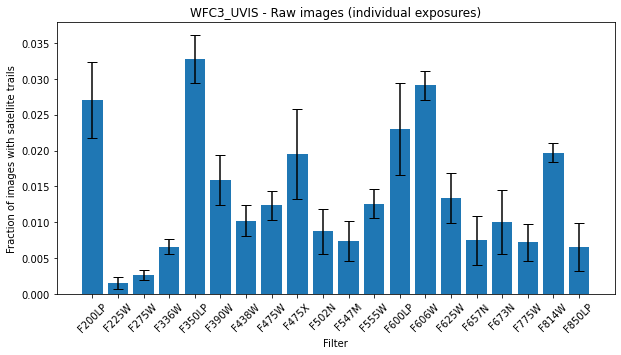

In [56]:
#WFC3_UVIS
#All Images
filter_WFC3_UVIS = []
for i in range(len(data_WFC3_UVIS["instrument_configuration"])):
    value = data_WFC3_UVIS["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_WFC3_UVIS.append(value)
filter_hist_WFC3_UVIS = Counter(filter_WFC3_UVIS)
filter, filter_hist_WFC3_UVIS = list(filter_hist_WFC3_UVIS.keys()), list(filter_hist_WFC3_UVIS.values())

#Images with satellites
filter_sats_WFC3_UVIS = []
for i in range(len(data_sats_WFC3_UVIS["instrument_configuration"])):
    value = data_sats_WFC3_UVIS["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_sats_WFC3_UVIS.append(value)
filter_hist_sats_WFC3_UVIS = Counter(filter_sats_WFC3_UVIS)
filter_sats, filter_hist_sats_WFC3_UVIS = list(filter_hist_sats_WFC3_UVIS.keys()), list(filter_hist_sats_WFC3_UVIS.values())

#Sort out the ones with the lowest number of images
res = list(zip(*sorted(zip(filter_hist_sats_WFC3_UVIS,filter_sats))))
filter_hist_sats_WFC3_UVIS, filter_sats = res[0][-20:], res[1][-20:]

#Calculate fraction and uncertainty
fraction_filter_WFC3_UVIS = []
u_fraction_filter_WFC3_UVIS = []
for i in range(len(filter_sats)):
    index = filter.index(filter_sats[i])
    fraction_filter_WFC3_UVIS.append(filter_hist_sats_WFC3_UVIS[i]/filter_hist_WFC3_UVIS[index])
    u_fraction_filter_WFC3_UVIS.append(np.sqrt(filter_hist_sats_WFC3_UVIS[i]/(filter_hist_WFC3_UVIS[index]**2)+(filter_hist_sats_WFC3_UVIS[i]**2/(filter_hist_WFC3_UVIS[index]**3))))

#Sort filters
res = list(zip(*sorted(zip(filter_sats,fraction_filter_WFC3_UVIS,u_fraction_filter_WFC3_UVIS))))
filter_sats, fraction_filter_WFC3_UVIS, u_fraction_filter_WFC3_UVIS = res[0], res[1], res[2]

#Plot
plt.figure(figsize=(10,5))
plt.bar(filter_sats,fraction_filter_WFC3_UVIS, yerr=u_fraction_filter_WFC3_UVIS,capsize=5)
plt.xticks(rotation=45)
plt.xlabel("Filter")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_filter.png",dpi=100)

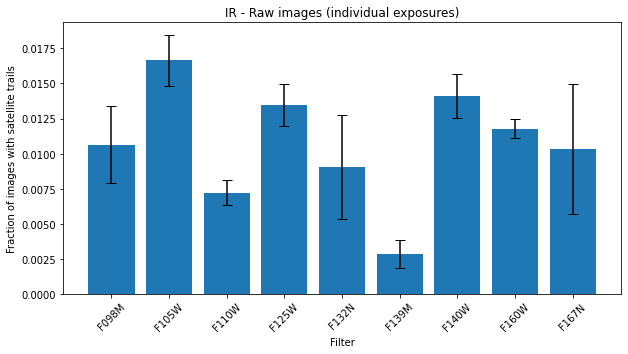

In [57]:
#IR
#All Images
filter_IR = []
for i in range(len(data_IR["instrument_configuration"])):
    value = data_IR["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_IR.append(value)
filter_hist_IR = Counter(filter_IR)
filter, filter_hist_IR = list(filter_hist_IR.keys()), list(filter_hist_IR.values())

#Images with satellites
filter_sats_IR = []
for i in range(len(data_sats_IR["instrument_configuration"])):
    value = data_sats_IR["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
    .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
    if value == "":
        continue
    else:
        filter_sats_IR.append(value)
filter_hist_sats_IR = Counter(filter_sats_IR)
filter_sats, filter_hist_sats_IR = list(filter_hist_sats_IR.keys()), list(filter_hist_sats_IR.values())

#Sort out the ones with the lowest number of images
res = list(zip(*sorted(zip(filter_hist_sats_IR,filter_sats))))
filter_hist_sats_IR, filter_sats = res[0][-9:], res[1][-9:]

#Calculate fraction and uncertainty
fraction_filter_IR = []
u_fraction_filter_IR = []
for i in range(len(filter_sats)):
    index = filter.index(filter_sats[i])
    fraction_filter_IR.append(filter_hist_sats_IR[i]/filter_hist_IR[index])
    u_fraction_filter_IR.append(np.sqrt(filter_hist_sats_IR[i]/(filter_hist_IR[index]**2)+(filter_hist_sats_IR[i]**2/(filter_hist_IR[index]**3))))

#Sort filters
res = list(zip(*sorted(zip(filter_sats,fraction_filter_IR,u_fraction_filter_IR))))
filter_sats, fraction_filter_IR, u_fraction_filter_IR = res[0], res[1], res[2]

#Plot
plt.figure(figsize=(10,5))
plt.bar(filter_sats,fraction_filter_IR, yerr=u_fraction_filter_IR,capsize=5)
plt.xticks(rotation=45)
plt.xlabel("Filter")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_filter.png",dpi=100)

#### Trail angle on image

In [58]:
data_trails_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/ACS/sat_trails_ACS.csv")
data_trails_WFC3 = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/WFC3/sat_trails_WFC3.csv")
data_trails_IR = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/IR/sat_trails_IR.csv")

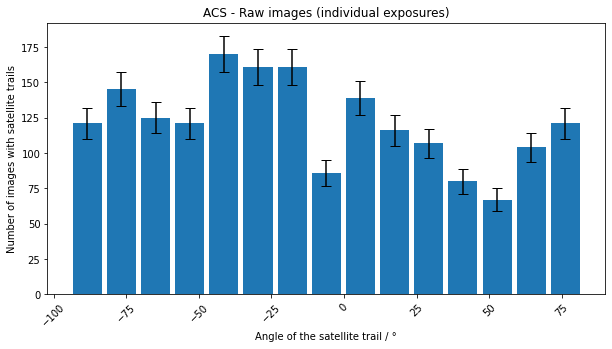

In [59]:
angle_hist_ACS = np.histogram(data_trails_ACS["angle"],bins=15)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(angle_hist_ACS[1][:-1],angle_hist_ACS[0], width=10, yerr=np.sqrt(angle_hist_ACS[0]),capsize=5)
plt.xlabel("Angle of the satellite trail / °")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellite_trails_angle.png",dpi=100)

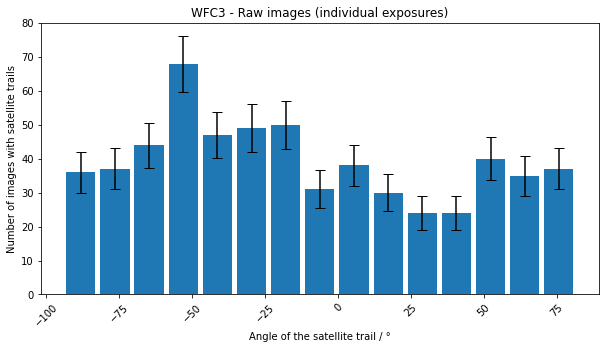

In [60]:
angle_hist_WFC3 = np.histogram(data_trails_WFC3["angle"],bins=15)

plt.figure(figsize=(10,5))
plt.title("WFC3 - Raw images (individual exposures)")
plt.bar(angle_hist_WFC3[1][:-1],angle_hist_WFC3[0], width=10, yerr=np.sqrt(angle_hist_WFC3[0]),capsize=5)
plt.xlabel("Angle of the satellite trail / °")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellite_trails_angle.png",dpi=100)

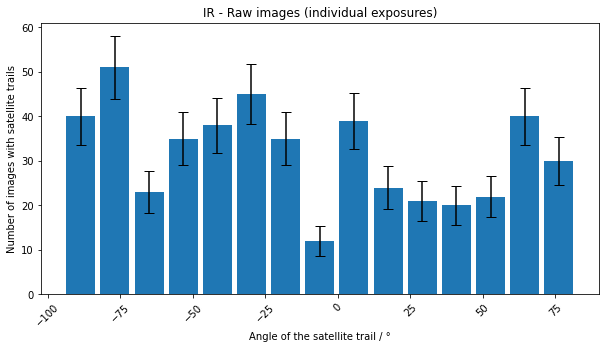

In [61]:
angle_hist_IR = np.histogram(data_trails_IR["angle"],bins=15)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(angle_hist_IR[1][:-1],angle_hist_IR[0], width=10, yerr=np.sqrt(angle_hist_IR[0]),capsize=5)
plt.xlabel("Angle of the satellite trail / °")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellite_trails_angle.png",dpi=100)

#### Actual angle

Calculating actual angle of trail - Code by Megan

In [ ]:
import astropy
from astropy.io import fits
import pandas as pd
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord
from astroquery.esa.hubble import ESAHubble

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [ ]:
#ACS
#read csv file with masks on detected trails
df = data_trails_ACS
real_points_ACS = []
real_angle_ACS = []
real_length_ACS = []

for i in tqdm(range(len(df))):
    print("----------------------------------\n")
    raw_obs_ID = str(df['filename'][i])[10:19]       #select RAW obs ID

    #download raw image with trail
    esahubble = ESAHubble()
    observation_id = raw_obs_ID
    esahubble.download_product(observation_id=observation_id , calibration_level="RAW", filename = observation_id, product_type="SCIENCE_PRODUCT")

    #output metadata
    hdulist = fits.open(observation_id+'.fits.gz')
    hdr = hdulist[0].header
    print(hdr['TELESCOP'], hdr['INSTRUME'], hdr['RA_TARG'], hdr['DEC_TARG'], hdr['DATE-OBS'], hdr['TIME-OBS'], hdr['EXPTIME'])

    #extract pointsfrom table
    print(df['points'][i])   #emaple, doesn't cycle through yet
    points_list = str(df['points'][i]).split("], ")

    x1 = points_list[0]
    start_x1 = x1.find("[[") + len("[[")
    end_x1 = x1.find(",")
    point_x1 = x1[start_x1:end_x1]
    print('point_x1 is', point_x1)

    y1 = points_list[0]
    start_y1 = y1.find(", ") + len(", ")
    end_y1 = len(points_list[0])
    point_y1 = y1[start_y1:end_y1]
    print('point_y1 is ', point_y1)

    x2 = points_list[1]
    start_x2 = x2.find("[") + len("[")
    end_x2 = x2.find(",")
    point_x2 = x2[start_x2:end_x2]
    print('point_x2 is', point_x2)

    y2 = points_list[1]
    start_y2 = y2.find(", ") + len(", ")
    end_y2 = y2.find(']]')
    point_y2 = y2[start_y2:end_y2]
    print('point_y2 is ', point_y2)

    w = WCS(hdulist[1].header)
    points = (int(point_x1), int(point_y1), int(point_x2), int(point_y2))                      #example until link to machine learning 
    point1 = w.pixel_to_world(points[1], points[3])     
    point2 = w.pixel_to_world(points[0], points[2])
    print("Point1 RA and Dec is ", point1)
    print("Point2 RA and Dec is ", point2)

    if point2.ra.degree > point1.ra.degree:
        a_1 = point1.ra.degree
        d_1 = point1.dec.degree  
        a_2 = point2.ra.degree
        d_2 = point2.dec.degree
    else:
        a_1 = point2.ra.degree
        d_1 = point2.dec.degree
        a_2 = point1.ra.degree
        d_2 = point1.dec.degree

    #-----------------------------------------------------------

    #transform star and end points into trail angle
    c1 = SkyCoord(point1.ra, point1.dec, frame="icrs")
    c2 = SkyCoord(point2.ra, point2.dec, frame="icrs")

    #find lengths of triangle (non-spherical as FOV small)
    Δd = d_1 - d_2     
    Δa = (c1.ra.hour - c2.ra.hour)*15*np.cos(np.deg2rad((d_1+d_2))/2)    

    trail_length = np.sqrt(Δa**2 + Δd**2)    
    print('Trail length using Pythag is', trail_length)


    #find angle (degrees East of North)
    θ = np.arctan(Δd/Δa)
    print('Angle to E-W line is', θ, 'in radians')
    θ_degrees = np.degrees(θ)
    print('Angle to E-W line is', θ_degrees, 'in degrees')


    #conversion to degrees East of North
    if d_1>d_2:
        i1 = 90 + abs(θ_degrees)
        print('i1 is', i1)
        i2 = i1 + 180
        if i2>360:
            i2_360 = i2-360
            print('i2 is ', i2_360)
        else:
            print('i2 is', i2)
    else:
        i1 = 90 - abs(θ_degrees)
        print('i1 is', i1, 'degrees East of North')
        i2 = i1 + 180
        if i2>360:
            i2_360 = i2-360
            print('i2 is ', i2_360)
        else:
            print('i2 is', i2, 'degrees East of North')
    
    real_points_ACS.append([point1,point2])
    real_angle_ACS.append(i1)
    real_length_ACS.append(trail_length)

  0%|          | 0/1824 [00:00<?, ?it/s]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm7dupq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 1/1824 [00:08<4:07:54,  8.16s/it]

HST ACS 189.2291666667 62.23833333333 2013-02-23 18:53:55 340.0
[[2, 153], [360, 415]]
point_x1 is 2
point_y1 is  153
point_x2 is 360
point_y2 is  415
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.49421642, 62.19849637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.49227322, 62.20058677)>
Trail length using Pythag is 0.0022784034763318026
Angle to E-W line is 1.1617054906572175 in radians
Angle to E-W line is 66.56082165183305 in degrees
i1 is 156.56082165183307
i2 is 336.56082165183307
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcxs01p9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.0454583333 20.42305 2016-06-01 08:58:48 1324.0
[[0, 298], [294, 511]]
point_x1 is 0
point_y1 is  298
point_x2 is 294
point_y2 is  511


  0%|          | 2/1824 [00:16<4:08:31,  8.18s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.00017726, 20.40673538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.99575536, 20.4034493)>
Trail length using Pythag is 0.005289109445535662
Angle to E-W line is -0.6703909000622856 in radians
Angle to E-W line is -38.41056919754553 in degrees
i1 is 51.58943080245447 degrees East of North
i2 is 231.58943080245447 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96217dbq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 3/1824 [00:23<4:00:34,  7.93s/it]

HST ACS 175.1639253126 -26.62136876066 2006-11-27 14:03:00 765.0
[[0, 267], [225, 511]]
point_x1 is 0
point_y1 is  267
point_x2 is 225
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.19904301, -26.60291659)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.2045932, -26.6002567)>
Trail length using Pythag is 0.005630541651335117
Angle to E-W line is 0.49201668751142325 in radians
Angle to E-W line is 28.19047964441163 in degrees
i1 is 61.80952035558837 degrees East of North
i2 is 241.80952035558838 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y19mrq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 4/1824 [00:31<3:58:47,  7.87s/it]

HST ACS 50.09879 17.29586111111 2020-09-27 21:26:35 380.0
[[377, 497], [511, 356]]
point_x1 is 377
point_y1 is  497
point_x2 is 511
point_y2 is  356
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.13241041, 17.3278375)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.1298623, 17.32886316)>
Trail length using Pythag is 0.00263986426516966
Angle to E-W line is 0.399036222826791 in radians
Angle to E-W line is 22.863091440817005 in degrees
i1 is 112.863091440817
i2 is 292.863091440817
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdm44ayq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 5/1824 [00:40<4:03:22,  8.03s/it]

HST ACS 359.42025 -32.58905555556 2014-01-18 11:09:06 420.0
[[249, 508], [1, 120]]
point_x1 is 249
point_y1 is  508
point_x2 is 1
point_y2 is  120
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.30445777, -32.53962618)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.3023547, -32.54327674)>
Trail length using Pythag is 0.004058289282032426
Angle to E-W line is -1.1186941175459668 in radians
Angle to E-W line is -64.09645150149592 in degrees
i1 is 25.90354849850408 degrees East of North
i2 is 205.90354849850408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n201pmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 36.263125 -0.1340555555556 2004-12-09 15:34:39 510.0
[[360, 509], [512, 73]]
point_x1 is 360
point_y1 is  509
point_x2 is 512
point_y2 is  73


  0%|          | 6/1824 [00:48<4:02:23,  8.00s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.24238087, -0.16789051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.24867747, -0.16717534)>
Trail length using Pythag is 0.006337058859286903
Angle to E-W line is 0.11309511190232426 in radians
Angle to E-W line is 6.479872595562943 in degrees
i1 is 83.52012740443706 degrees East of North
i2 is 263.52012740443706 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je5619pkq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 7/1824 [00:55<3:55:19,  7.77s/it]

HST ACS 40.44466666667 -8.403 2020-09-16 22:05:52 520.0
[[0, 481], [207, 190]]
point_x1 is 0
point_y1 is  481
point_x2 is 207
point_y2 is  190
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.46912946, -8.38105353)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.46954814, -8.37441191)>
Trail length using Pythag is 0.006654516495390883
Angle to E-W line is 1.5085107302095788 in radians
Angle to E-W line is 86.43129819120684 in degrees
i1 is 3.568701808793165 degrees East of North
i2 is 183.56870180879315 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8r802emq.fits.gz [astroquery.esa.hubble.core]
HST ACS 16.00625 -72.03213888889 2003-10-15 23:39:17 360.0
[[0, 163], [308, 505]]
point_x1 is 0
point_y1 is  163
point_x2 is 308
point_y2 is  505


  0%|          | 8/1824 [01:02<3:52:13,  7.67s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.09114126, -72.05697482)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.09811689, -72.05996026)>
Trail length using Pythag is 0.003678349818868935
Angle to E-W line is -0.9469271362010862 in radians
Angle to E-W line is -54.25492841073191 in degrees
i1 is 144.2549284107319
i2 is 324.2549284107319
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p409xgq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 9/1824 [01:11<4:00:37,  7.95s/it]

HST ACS 12.27083333333 40.29361111111 2006-08-13 05:57:41 1220.0
[[1, 338], [249, 502]]
point_x1 is 1
point_y1 is  338
point_x2 is 249
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27342885, 40.32755234)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27334464, 40.3336005)>
Trail length using Pythag is 0.006048498352683562
Angle to E-W line is 1.5601823561276857 in radians
Angle to E-W line is 89.39186427689316 in degrees
i1 is 179.39186427689316
i2 is 359.39186427689316
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zq07zvq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 10/1824 [01:18<3:56:50,  7.83s/it]

HST ACS 54.559875 -35.49700555556 2005-04-22 10:34:06 527.0
[[210, 268], [173, 5]]
point_x1 is 210
point_y1 is  268
point_x2 is 173
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.51185646, -35.48081691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.5124217, -35.48320278)>
Trail length using Pythag is 0.002429855071967903
Angle to E-W line is -1.3802184803167061 in radians
Angle to E-W line is -79.08069372810755 in degrees
i1 is 169.08069372810755
i2 is 349.0806937281076
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfq08eaq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 11/1824 [01:26<3:55:54,  7.81s/it]

HST ACS 11.80458541667 42.04230277778 2012-12-31 07:26:01 360.0
[[2, 117], [287, 7]]
point_x1 is 2
point_y1 is  117
point_x2 is 287
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.66222999, 42.0192113)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.6675761, 42.02032281)>
Trail length using Pythag is 0.004124301606343486
Angle to E-W line is 0.272877945606123 in radians
Angle to E-W line is 15.634754605431294 in degrees
i1 is 74.3652453945687 degrees East of North
i2 is 254.36524539456872 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcw502i2q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 12/1824 [01:34<4:00:19,  7.96s/it]

HST ACS 35.79754666667 42.99205 2016-12-17 14:40:06 424.0
[[0, 508], [375, 491]]
point_x1 is 0
point_y1 is  508
point_x2 is 375
point_y2 is  491
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.73328453, 42.96478861)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.72851869, 42.95833888)>
Trail length using Pythag is 0.00733233010646068
Angle to E-W line is -1.0750825355880675 in radians
Angle to E-W line is -61.5976919174194 in degrees
i1 is 28.402308082580603 degrees East of North
i2 is 208.4023080825806 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9l901q3q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 13/1824 [01:42<3:56:30,  7.84s/it]

HST ACS 53.34583333333 79.58055555556 2006-03-17 22:42:32 390.0
[[0, 504], [223, 261]]
point_x1 is 0
point_y1 is  504
point_x2 is 223
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.31825415, 79.54670034)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.33627343, 79.54046419)>
Trail length using Pythag is 0.007041605143083551
Angle to E-W line is -1.0878149121909775 in radians
Angle to E-W line is -62.32720335993725 in degrees
i1 is 152.32720335993724
i2 is 332.32720335993724
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6v14d9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 5.661041666667 -72.06780555556 2010-01-17 04:51:59 1457.0
[[2, 396], [407, 335]]
point_x1 is 2
point_y1 is  396
point_x2 is 407
point_y2 is  335
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
  

  1%|          | 14/1824 [01:50<3:56:44,  7.85s/it]

Trail length using Pythag is 0.005484627808520276
Angle to E-W line is -1.418007980078536 in radians
Angle to E-W line is -81.24587257437102 in degrees
i1 is 8.75412742562898 degrees East of North
i2 is 188.75412742562898 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0ov9q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 15/1824 [01:58<3:58:27,  7.91s/it]

HST ACS 34.2756265437 -5.178160934861 2010-11-13 03:11:27 352.0
[[463, 511], [2, 49]]
point_x1 is 463
point_y1 is  511
point_x2 is 2
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.26966396, -5.21738122)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.26967381, -5.21834765)>
Trail length using Pythag is 0.0009664752467517964
Angle to E-W line is -1.5606388121381116 in radians
Angle to E-W line is -89.41801727982394 in degrees
i1 is 179.41801727982394
i2 is 359.41801727982397
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f820kwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.53391666667 40.7101 2002-12-10 07:47:20 1300.0
[[27, 450], [486, 9]]
point_x1 is 27
point_y1 is  450
point_x2 is 486
point_y2 is  9


  1%|          | 16/1824 [02:06<3:59:42,  7.95s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50057095, 40.67884076)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.51074345, 40.67511775)>
Trail length using Pythag is 0.008566139444087774
Angle to E-W line is -0.4496148150655721 in radians
Angle to E-W line is -25.761031309812303 in degrees
i1 is 115.7610313098123
i2 is 295.7610313098123
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3c01xyq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 17/1824 [02:14<4:02:16,  8.04s/it]

HST ACS 146.09375 69.21111111111 2009-10-01 00:58:04 615.0
[[3, 75], [119, 498]]
point_x1 is 3
point_y1 is  75
point_x2 is 119
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.22787477, 69.20311296)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.24043523, 69.19996648)>
Trail length using Pythag is 0.005458193962551609
Angle to E-W line is -0.6144021701733849 in radians
Angle to E-W line is -35.20265127461355 in degrees
i1 is 125.20265127461354
i2 is 305.2026512746136
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi8igfq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 18/1824 [02:22<4:02:12,  8.05s/it]

HST ACS 149.7395 2.8128 2005-05-08 12:29:42 507.0
[[2, 198], [165, 2]]
point_x1 is 2
point_y1 is  198
point_x2 is 165
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.70608679, 2.79051478)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.70779576, 2.78754625)>
Trail length using Pythag is 0.0034242965527115695
Angle to E-W line is -1.0489511509597773 in radians
Angle to E-W line is -60.10047386538533 in degrees
i1 is 150.10047386538534
i2 is 330.1004738653853
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4nzmtcq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 19/1824 [02:30<4:02:12,  8.05s/it]

HST ACS 359.7316666667 30.75555555556 2020-11-22 15:23:38 987.0
[[417, 510], [509, 356]]
point_x1 is 417
point_y1 is  510
point_x2 is 509
point_y2 is  356
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.69943785, 30.73211395)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.70188025, 30.73090897)>
Trail length using Pythag is 0.0024206486180115686
Angle to E-W line is -0.5210520855422427 in radians
Angle to E-W line is -29.854085408060048 in degrees
i1 is 119.85408540806004
i2 is 299.85408540806003
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zm02cbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 350.8660416667 58.84027777778 2004-12-05 07:10:09 600.0
[[251, 348], [168, 3]]
point_x1 is 251
point_y1 is  348
point_x2 is 168
point_y2 is  3


  1%|          | 20/1824 [02:38<3:59:11,  7.96s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81036786, 58.81460644)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81475069, 58.81336347)>
Trail length using Pythag is 0.002587597408456365
Angle to E-W line is -0.5010640523002396 in radians
Angle to E-W line is -28.70885546252608 in degrees
i1 is 118.70885546252609
i2 is 298.7088554625261
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m23rcq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 21/1824 [02:51<4:45:58,  9.52s/it]

HST ACS 109.4611796242 37.66041077742 2020-09-24 05:03:08 1075.0
[[411, 510], [4, 117]]
point_x1 is 411
point_y1 is  510
point_x2 is 4
point_y2 is  117
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.50099045, 37.67748548)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.50336918, 37.67854858)>
Trail length using Pythag is 0.002162086095244887
Angle to E-W line is 0.5140425591557432 in radians
Angle to E-W line is 29.452469129728037 in degrees
i1 is 60.54753087027196 degrees East of North
i2 is 240.54753087027197 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wb9jeq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3097916667 62.276475 2004-11-23 19:43:51 385.0
[[2, 492], [389, 261]]
point_x1 is 2
point_y1 is  492
point_x2 is 389
point_y2 is  261


  1%|          | 22/1824 [02:59<4:25:58,  8.86s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.38393354, 62.27514285)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39174292, 62.28100567)>
Trail length using Pythag is 0.006897073474914781
Angle to E-W line is 1.0160678518109598 in radians
Angle to E-W line is 58.216399607691955 in degrees
i1 is 31.783600392308045 degrees East of North
i2 is 211.78360039230805 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bh12ehq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 23/1824 [03:06<4:13:39,  8.45s/it]

HST ACS 4.6 16.41444444444 2006-06-06 04:04:29 560.0
[[406, 509], [511, 331]]
point_x1 is 406
point_y1 is  509
point_x2 is 511
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.62114552, 16.44562624)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.61826811, 16.4461393)>
Trail length using Pythag is 0.002806970616359895
Angle to E-W line is 0.1838141463796365 in radians
Angle to E-W line is 10.531774802353093 in degrees
i1 is 100.5317748023531
i2 is 280.5317748023531
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbq124qgq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 24/1824 [03:13<4:01:20,  8.04s/it]

HST ACS 180.36125 61.89583333333 2012-04-04 02:00:48 340.0
[[286, 365], [508, 372]]
point_x1 is 286
point_y1 is  365
point_x2 is 508
point_y2 is  372
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.28897935, 61.9275944)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.28777512, 61.92554307)>
Trail length using Pythag is 0.0021281751874582338
Angle to E-W line is -1.3012535892692263 in radians
Angle to E-W line is -74.55633874137658 in degrees
i1 is 15.443661258623422 degrees East of North
i2 is 195.44366125862342 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn020heq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 25/1824 [03:21<4:00:58,  8.04s/it]

HST ACS 174.0372695833 45.28044722222 2018-03-20 12:00:33 760.0
[[276, 512], [509, 317]]
point_x1 is 276
point_y1 is  512
point_x2 is 509
point_y2 is  317
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.1283265, 45.36728709)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.12329754, 45.36523291)>
Trail length using Pythag is 0.004086958374551036
Angle to E-W line is -0.5266251989898768 in radians
Angle to E-W line is -30.173401287357084 in degrees
i1 is 59.82659871264292 degrees East of North
i2 is 239.82659871264292 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fz12uvq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 26/1824 [03:28<3:54:08,  7.81s/it]

HST ACS 16.1175 2.160138888889 2006-08-19 11:45:46 1300.0
[[5, 512], [301, 153]]
point_x1 is 5
point_y1 is  512
point_x2 is 301
point_y2 is  153
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.13529686, 2.19082851)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.13127269, 2.19678669)>
Trail length using Pythag is 0.007188183008703003
Angle to E-W line is 0.9771102065831934 in radians
Angle to E-W line is 55.984290956372966 in degrees
i1 is 145.98429095637297
i2 is 325.984290956373
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcu101flq.fits.gz [astroquery.esa.hubble.core]
HST ACS 64.12571857852 -24.12023198579 2016-08-01 23:00:39 1190.0
[[1, 251], [124, 509]]
point_x1 is 1
point_y1 is  251
point_x2 is 124
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.15109

  1%|▏         | 27/1824 [03:37<3:57:17,  7.92s/it]

Trail length using Pythag is 0.006597304742727665
Angle to E-W line is 0.992495528427792 in radians
Angle to E-W line is 56.8658049645189 in degrees
i1 is 33.1341950354811 degrees East of North
i2 is 213.1341950354811 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhj49bpq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 28/1824 [03:43<3:46:31,  7.57s/it]

HST ACS 214.9638743696 52.95938510907 2011-05-02 08:09:47 120.0
[[464, 511], [0, 57]]
point_x1 is 464
point_y1 is  511
point_x2 is 0
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.92486458, 52.99123429)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.92373312, 52.99205065)>
Trail length using Pythag is 0.0010631466943179582
Angle to E-W line is 0.875508489887638 in radians
Angle to E-W line is 50.162941398433766 in degrees
i1 is 140.16294139843376
i2 is 320.16294139843376
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9v54mgq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 29/1824 [03:51<3:46:28,  7.57s/it]

HST ACS 335.24051125 -46.03494166667 2014-05-14 21:32:31 550.0
[[332, 510], [9, 378]]
point_x1 is 332
point_y1 is  510
point_x2 is 9
point_y2 is  378
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.26413869, -46.00348027)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.26959182, -45.99899825)>
Trail length using Pythag is 0.005868334099229015
Angle to E-W line is 0.8691257926406658 in radians
Angle to E-W line is 49.79723978427249 in degrees
i1 is 40.20276021572751 degrees East of North
i2 is 220.2027602157275 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fw03k3q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 30/1824 [03:59<3:49:16,  7.67s/it]

HST ACS 128.6349706215 18.67696049507 2005-11-30 12:30:51 357.0
[[356, 510], [2, 172]]
point_x1 is 356
point_y1 is  510
point_x2 is 2
point_y2 is  172
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.5997415, 18.68957819)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.60260626, 18.69145789)>
Trail length using Pythag is 0.003301114699696203
Angle to E-W line is 0.6057925279097147 in radians
Angle to E-W line is 34.709355109787786 in degrees
i1 is 55.290644890212214 degrees East of North
i2 is 235.2906448902122 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90205a8q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 31/1824 [04:07<3:56:28,  7.91s/it]

HST ACS 221.102125 1.582513888889 2005-01-10 02:55:35 400.0
[[1, 509], [53, 168]]
point_x1 is 1
point_y1 is  509
point_x2 is 53
point_y2 is  168
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.14058244, 1.5907455)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.14509685, 1.59651261)>
Trail length using Pythag is 0.007322828034567155
Angle to E-W line is 0.9068285569678197 in radians
Angle to E-W line is 51.95744905619481 in degrees
i1 is 38.04255094380519 degrees East of North
i2 is 218.0425509438052 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjw02fmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 182.5280125 35.44341388889 2019-05-06 18:00:49 435.0
[[1, 40], [66, 1]]
point_x1 is 1
point_y1 is  40
point_x2 is 66
point_y2 is  1


  2%|▏         | 32/1824 [04:15<3:55:43,  7.89s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.46406354, 35.46354187)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.46418989, 35.46252199)>
Trail length using Pythag is 0.0010250652908133184
Angle to E-W line is -1.4702283124180955 in radians
Angle to E-W line is -84.2378772221983 in degrees
i1 is 174.2378772221983
i2 is 354.23787722219834
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9kbtq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2342473711 62.32654000898 2013-06-14 13:36:46 375.0
[[22, 231], [19, 505]]
point_x1 is 22
point_y1 is  231
point_x2 is 19
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1594871, 62.31271038)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14320391, 62.31273625)>


  2%|▏         | 33/1824 [04:23<3:53:11,  7.81s/it]

Trail length using Pythag is 0.007565953840031021
Angle to E-W line is 0.00341925617108904 in radians
Angle to E-W line is 0.19590894767746372 in degrees
i1 is 90.19590894767747
i2 is 270.1959089476775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n31mjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.471958333333 -30.37994444444 2013-11-26 12:11:12 1125.0
[[408, 511], [7, 470]]
point_x1 is 408
point_y1 is  511
point_x2 is 7
point_y2 is  470


  2%|▏         | 34/1824 [04:31<3:52:38,  7.80s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46889656, -30.41306837)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46403165, -30.41832159)>
Trail length using Pythag is 0.006722909099739982
Angle to E-W line is -0.8968903505481702 in radians
Angle to E-W line is -51.388031772419076 in degrees
i1 is 38.611968227580924 degrees East of North
i2 is 218.61196822758092 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6nk9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.14075 1.715894444444 2004-10-20 00:28:09 507.0
[[188, 289], [6, 229]]
point_x1 is 188
point_y1 is  289
point_x2 is 6
point_y2 is  229


  2%|▏         | 35/1824 [04:39<3:53:40,  7.84s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17155517, 1.73714172)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17492864, 1.73809002)>
Trail length using Pythag is 0.0035027250352885836
Angle to E-W line is 0.27415563206940213 in radians
Angle to E-W line is 15.707960647318187 in degrees
i1 is 74.29203935268181 degrees East of North
i2 is 254.2920393526818 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl7aeydq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 36/1824 [04:46<3:52:34,  7.80s/it]

HST ACS 231.1681282124 -17.20251422291 2011-09-15 08:06:03 550.0
[[3, 150], [107, 4]]
point_x1 is 3
point_y1 is  150
point_x2 is 107
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.12744573, -17.22188959)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.12831789, -17.22415438)>
Trail length using Pythag is 0.002413149749686887
Angle to E-W line is -1.2183278904220396 in radians
Angle to E-W line is -69.80504618425991 in degrees
i1 is 159.8050461842599
i2 is 339.80504618425994
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw6bnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.34703340322 -5.225295124592 2011-01-13 12:13:24 590.0
[[29, 319], [64, 496]]
point_x1 is 29
point_y1 is  319
point_x2 is 64
point_y2 is  496


  2%|▏         | 37/1824 [04:54<3:53:41,  7.85s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33459723, -5.25970605)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33079935, -5.26615934)>
Trail length using Pythag is 0.00747980598620139
Angle to E-W line is -1.0407071656703415 in radians
Angle to E-W line is -59.628128301932726 in degrees
i1 is 30.371871698067274 degrees East of North
i2 is 210.37187169806728 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca9s1f5q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 38/1824 [05:03<4:00:12,  8.07s/it]

HST ACS 64.13641962339 -24.1188021347 2014-09-15 18:46:33 594.0
[[9, 508], [435, 321]]
point_x1 is 9
point_y1 is  508
point_x2 is 435
point_y2 is  321
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.15454247, -24.08947851)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.1508898, -24.08333486)>
Trail length using Pythag is 0.006990292251648207
Angle to E-W line is 1.073515765990652 in radians
Angle to E-W line is 61.50792263201808 in degrees
i1 is 151.50792263201808
i2 is 331.5079226320181
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn10tcq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 39/1824 [05:10<3:52:50,  7.83s/it]

HST ACS 218.3074344774 33.20885855994 2011-06-08 14:51:08 600.0
[[402, 512], [1, 136]]
point_x1 is 402
point_y1 is  512
point_x2 is 1
point_y2 is  136
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.26226114, 33.21445356)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.25927911, 33.21468882)>
Trail length using Pythag is 0.0025059055535374725
Angle to E-W line is 0.09401715889048873 in radians
Angle to E-W line is 5.38678640623587 in degrees
i1 is 95.38678640623587
i2 is 275.38678640623584
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyd04jvq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 40/1824 [05:17<3:47:48,  7.66s/it]

HST ACS 231.6419504167 2.059630555556 2012-09-18 23:30:10 664.0
[[0, 134], [453, 512]]
point_x1 is 0
point_y1 is  134
point_x2 is 453
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.54920347, 2.09511515)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.54845764, 2.09317005)>
Trail length using Pythag is 0.0020830106256869503
Angle to E-W line is -1.2048715071657912 in radians
Angle to E-W line is -69.03405221616636 in degrees
i1 is 20.96594778383364 degrees East of North
i2 is 200.96594778383366 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f839flq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 41/1824 [05:25<3:46:06,  7.61s/it]

HST ACS 11.53391666667 40.7101 2002-12-24 00:50:59 1230.0
[[212, 511], [0, 158]]
point_x1 is 212
point_y1 is  511
point_x2 is 0
point_y2 is  158
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50502291, 40.6805882)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50349897, 40.67590402)>
Trail length using Pythag is 0.004824649214278372
Angle to E-W line is -1.3288970759385625 in radians
Angle to E-W line is -76.14019385855569 in degrees
i1 is 13.85980614144431 degrees East of North
i2 is 193.85980614144432 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohbat4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.4267937757 62.19290292244 2012-12-27 16:05:41 1503.0
[[0, 71], [413, 510]]
point_x1 is 0
point_y1 is  71
point_x2 is 413
point_y2 is  510


  2%|▏         | 42/1824 [05:33<3:47:45,  7.67s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.48201056, 62.22222034)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.48498764, 62.22325219)>
Trail length using Pythag is 0.0017290664331042049
Angle to E-W line is 0.639470392893049 in radians
Angle to E-W line is 36.63895463634426 in degrees
i1 is 53.36104536365574 degrees East of North
i2 is 233.36104536365573 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn10uoq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 43/1824 [05:40<3:47:03,  7.65s/it]

HST ACS 218.3073674743 33.20877407939 2011-06-08 19:38:34 600.0
[[5, 497], [493, 347]]
point_x1 is 5
point_y1 is  497
point_x2 is 493
point_y2 is  347
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.26460206, 33.2122238)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.26046394, 33.2061596)>
Trail length using Pythag is 0.006982969427193023
Angle to E-W line is -1.052022211492629 in radians
Angle to E-W line is -60.27643267254693 in degrees
i1 is 29.72356732745307 degrees East of North
i2 is 209.72356732745305 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcu108rlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.3086203709 -44.55481661782 2016-04-28 03:14:23 1220.0
[[3, 75], [207, 9]]
point_x1 is 3
point_y1 is  75
point_x2 is 207
point_y2 is  9


  2%|▏         | 44/1824 [05:47<3:42:52,  7.51s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33224804, -44.50434554)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32843497, -44.50528617)>
Trail length using Pythag is 0.0028775307734467083
Angle to E-W line is -0.3330087757464024 in radians
Angle to E-W line is -19.07999739108735 in degrees
i1 is 70.92000260891265 degrees East of North
i2 is 250.92000260891265 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr30j1q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 45/1824 [05:55<3:42:10,  7.49s/it]

HST ACS 188.619417556 2.111609880693 2019-12-07 19:17:12 961.0
[[471, 511], [1, 44]]
point_x1 is 471
point_y1 is  511
point_x2 is 1
point_y2 is  44
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.65763742, 2.12079629)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.65842648, 2.12110045)>
Trail length using Pythag is 0.0008451479162999778
Angle to E-W line is 0.3681423276713545 in radians
Angle to E-W line is 21.093001635690833 in degrees
i1 is 68.90699836430917 degrees East of North
i2 is 248.90699836430917 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4gtdq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 46/1824 [06:02<3:41:21,  7.47s/it]

HST ACS 53.17908487303 -27.7579442033 2010-11-12 17:32:03 1225.0
[[405, 510], [512, 48]]
point_x1 is 405
point_y1 is  510
point_x2 is 512
point_y2 is  48
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20754002, -27.78862315)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2085205, -27.78213068)>
Trail length using Pythag is 0.00655016149263938
Angle to E-W line is 1.4379761638352206 in radians
Angle to E-W line is 82.38996522817075 in degrees
i1 is 7.610034771829248 degrees East of North
i2 is 187.61003477182925 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck804lmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 211.2109175 54.52198055556 2015-09-23 01:28:03 1320.0
[[0, 512], [42, 212]]
point_x1 is 0
point_y1 is  512
point_x2 is 42
point_y2 is  212
Point1 RA and Dec is 

  3%|▎         | 47/1824 [06:10<3:45:11,  7.60s/it]

Angle to E-W line is -0.9429602512619445 in radians
Angle to E-W line is -54.027642645905075 in degrees
i1 is 144.02764264590508
i2 is 324.0276426459051
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj23uzq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 48/1824 [06:18<3:49:31,  7.75s/it]

HST ACS 264.7191666583 68.97222222222 2006-12-02 17:15:47 640.0
[[209, 230], [8, 512]]
point_x1 is 209
point_y1 is  230
point_x2 is 8
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.78137695, 68.94223506)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.77949605, 68.93519565)>
Trail length using Pythag is 0.00707178282126041
Angle to E-W line is -1.4750688106873011 in radians
Angle to E-W line is -84.51521734376418 in degrees
i1 is 5.484782656235822 degrees East of North
i2 is 185.48478265623584 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4arfq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 49/1824 [06:26<3:49:04,  7.74s/it]

HST ACS 188.997325371 62.16207985671 2012-09-12 22:29:42 507.0
[[382, 512], [3, 49]]
point_x1 is 382
point_y1 is  512
point_x2 is 3
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02149524, 62.12406357)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02466273, 62.12278887)>
Trail length using Pythag is 0.001954044462363878
Angle to E-W line is -0.7106696105739245 in radians
Angle to E-W line is -40.71836931409166 in degrees
i1 is 130.71836931409166
i2 is 310.71836931409166
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2s02lrq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 50/1824 [06:34<3:52:57,  7.88s/it]

HST ACS 188.1384583333 27.12096944444 2019-12-04 00:34:11 534.0
[[0, 465], [320, 302]]
point_x1 is 0
point_y1 is  465
point_x2 is 320
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.16305128, 27.13460616)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.16697215, 27.14001001)>
Trail length using Pythag is 0.0064324521322688165
Angle to E-W line is 0.9974532289941159 in radians
Angle to E-W line is 57.14986028305888 in degrees
i1 is 32.85013971694112 degrees East of North
i2 is 212.85013971694113 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcy205lqq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 51/1824 [06:41<3:44:34,  7.60s/it]

HST ACS 185.4254166667 -31.98527777778 2016-12-25 21:49:40 535.0
[[5, 267], [164, 496]]
point_x1 is 5
point_y1 is  267
point_x2 is 164
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.46051445, -31.96784366)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.46729759, -31.96586431)>
Trail length using Pythag is 0.006085406416247387
Angle to E-W line is 0.33128948318760765 in radians
Angle to E-W line is 18.98148918372016 in degrees
i1 is 71.01851081627984 degrees East of North
i2 is 251.01851081627984 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa52moq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 52/1824 [06:48<3:40:10,  7.46s/it]

HST ACS 150.1542080736 2.104474771244 2012-01-31 21:48:33 752.0
[[67, 144], [8, 501]]
point_x1 is 67
point_y1 is  144
point_x2 is 8
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19200807, 2.11097445)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19828523, 2.10776562)>
Trail length using Pythag is 0.007045996593980623
Angle to E-W line is -0.4728352862769711 in radians
Angle to E-W line is -27.091466308530496 in degrees
i1 is 117.0914663085305
i2 is 297.09146630853047
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv88elq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 53/1824 [06:56<3:38:14,  7.39s/it]

HST ACS 357.84983125 20.58188333333 2006-05-30 16:22:22 360.0
[[129, 512], [2, 80]]
point_x1 is 129
point_y1 is  512
point_x2 is 2
point_y2 is  80
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.87585664, 20.61272261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.87566999, 20.61821149)>
Trail length using Pythag is 0.005491655030357164
Angle to E-W line is 1.5389779691431622 in radians
Angle to E-W line is 88.17694239551783 in degrees
i1 is 178.1769423955178
i2 is 358.1769423955178
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1veeq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 54/1824 [07:04<3:44:57,  7.63s/it]

HST ACS 149.6472916667 2.288891666667 2004-05-17 11:02:17 507.0
[[270, 512], [0, 315]]
point_x1 is 270
point_y1 is  512
point_x2 is 0
point_y2 is  315
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.61829553, 2.27050507)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.61324942, 2.26781846)>
Trail length using Pythag is 0.005713236492330831
Angle to E-W line is -0.4895655068845192 in radians
Angle to E-W line is -28.0500373396658 in degrees
i1 is 61.9499626603342 degrees East of North
i2 is 241.9499626603342 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjc6dmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0784784054 2.097232361424 2012-02-11 19:43:36 1107.0
[[6, 503], [369, 288]]
point_x1 is 6
point_y1 is  503
point_x2 is 369
point_y2 is  288
Point1 RA and Dec is

  3%|▎         | 55/1824 [07:12<3:49:51,  7.80s/it]

Trail length using Pythag is 0.006903955160446802
Angle to E-W line is 1.0247884763880981 in radians
Angle to E-W line is 58.71605459068004 in degrees
i1 is 31.283945409319962 degrees East of North
i2 is 211.28394540931995 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsv05d9q.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 56/1824 [07:19<3:46:37,  7.69s/it]

HST ACS 311.4958116739 30.93352572575 2015-04-17 01:30:57 750.0
[[110, 279], [3, 63]]
point_x1 is 110
point_y1 is  279
point_x2 is 3
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.52712556, 30.96129416)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.52805563, 30.96370713)>
Trail length using Pythag is 0.0025413558619763374
Angle to E-W line is 1.2515759250416674 in radians
Angle to E-W line is 71.71001824506942 in degrees
i1 is 18.28998175493058 degrees East of North
i2 is 198.28998175493058 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj05mvq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 57/1824 [07:26<3:41:42,  7.53s/it]

HST ACS 264.975 69.1 2006-11-30 13:43:43 654.0
[[389, 509], [512, 79]]
point_x1 is 389
point_y1 is  509
point_x2 is 512
point_y2 is  79
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.02447822, 69.06403699)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.03134406, 69.0696952)>
Trail length using Pythag is 0.006167060441105519
Angle to E-W line is 1.1617213075006971 in radians
Angle to E-W line is 66.56172789020965 in degrees
i1 is 23.438272109790347 degrees East of North
i2 is 203.43827210979035 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu6eicq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 58/1824 [07:34<3:44:56,  7.64s/it]

HST ACS 149.8385416667 2.147219444444 2004-04-17 12:35:14 507.0
[[5, 100], [68, 1]]
point_x1 is 5
point_y1 is  100
point_x2 is 68
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80485934, 2.12362676)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.8055206, 2.12221212)>
Trail length using Pythag is 0.0015613698361064403
Angle to E-W line is -1.1337946289894105 in radians
Angle to E-W line is -64.96164707569424 in degrees
i1 is 154.96164707569426
i2 is 334.96164707569426
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ek02g1q.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 59/1824 [07:42<3:42:36,  7.57s/it]

HST ACS 180.3604633333 -18.98926388889 2006-01-04 02:18:43 2730.0
[[0, 512], [276, 474]]
point_x1 is 0
point_y1 is  512
point_x2 is 276
point_y2 is  474
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.39686954, -18.97999205)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.4030447, -18.97483419)>
Trail length using Pythag is 0.007791239839554215
Angle to E-W line is 0.7234927143201333 in radians
Angle to E-W line is 41.45307903900782 in degrees
i1 is 48.54692096099218 degrees East of North
i2 is 228.54692096099217 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv55e2q.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 60/1824 [07:49<3:43:24,  7.60s/it]

HST ACS 229.52625 42.74361111111 2005-11-14 15:59:25 440.0
[[0, 169], [222, 511]]
point_x1 is 0
point_y1 is  169
point_x2 is 222
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (229.56461246, 42.71816389)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (229.56804385, 42.71407153)>
Trail length using Pythag is 0.004806605972644797
Angle to E-W line is -1.0186547001781987 in radians
Angle to E-W line is -58.36461510137505 in degrees
i1 is 148.36461510137505
i2 is 328.3646151013751
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnb05uwq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 61/1824 [07:58<3:47:17,  7.74s/it]

HST ACS 11.4283325 38.03967222222 2015-09-03 06:27:39 1264.0
[[174, 206], [119, 0]]
point_x1 is 174
point_y1 is  206
point_x2 is 119
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.40968186, 38.07693043)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.40845113, 38.07554304)>
Trail length using Pythag is 0.0016921773045067894
Angle to E-W line is -0.9612064808465283 in radians
Angle to E-W line is -55.07307459312847 in degrees
i1 is 34.92692540687153 degrees East of North
i2 is 214.92692540687153 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8fs54usq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 62/1824 [08:04<3:40:02,  7.49s/it]

HST ACS 185.6804583333 8.19825 2003-07-13 10:54:22 375.0
[[2, 45], [117, 0]]
point_x1 is 2
point_y1 is  45
point_x2 is 117
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.63771855, 8.18280041)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.63905814, 8.18173448)>
Trail length using Pythag is 0.001701282446907148
Angle to E-W line is -0.6771165284547414 in radians
Angle to E-W line is -38.79591931900659 in degrees
i1 is 128.7959193190066
i2 is 308.7959193190066
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbex12o4q.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 63/1824 [08:12<3:42:53,  7.59s/it]

HST ACS 11.4307775 42.19887777778 2010-07-27 21:24:17 370.0
[[41, 490], [510, 272]]
point_x1 is 41
point_y1 is  490
point_x2 is 510
point_y2 is  272
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.57366999, 42.21529351)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.56541214, 42.21838586)>
Trail length using Pythag is 0.006853167257676375
Angle to E-W line is 0.46814173570850987 in radians
Angle to E-W line is 26.82254567002644 in degrees
i1 is 116.82254567002644
i2 is 296.82254567002644
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0o24kpq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 64/1824 [08:21<3:51:32,  7.89s/it]

HST ACS 287.8878647466 -59.99796507827 2020-07-05 16:43:54 492.0
[[260, 309], [13, 504]]
point_x1 is 260
point_y1 is  309
point_x2 is 13
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.81178512, -60.09361729)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.81486007, -60.10038972)>
Trail length using Pythag is 0.006943758212290741
Angle to E-W line is -1.3481932558605667 in radians
Angle to E-W line is -77.24578352881161 in degrees
i1 is 167.24578352881161
i2 is 347.2457835288116
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcvn03jeq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 65/1824 [08:29<3:51:10,  7.89s/it]

HST ACS 56.17333333333 32.14666666667 2015-12-22 15:07:43 578.0
[[0, 483], [429, 446]]
point_x1 is 0
point_y1 is  483
point_x2 is 429
point_y2 is  446
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.06796468, 32.20370187)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.0667664, 32.19706422)>
Trail length using Pythag is 0.006714654157561427
Angle to E-W line is -1.4192084616812612 in radians
Angle to E-W line is -81.31465510359028 in degrees
i1 is 8.685344896409717 degrees East of North
i2 is 188.68534489640973 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2i01asq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 66/1824 [08:37<3:53:10,  7.96s/it]

HST ACS 194.9004666667 27.96141944444 2010-02-26 15:45:03 872.0
[[255, 386], [510, 0]]
point_x1 is 255
point_y1 is  386
point_x2 is 510
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.90561393, 27.99987367)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.89853604, 27.99622615)>
Trail length using Pythag is 0.0072360784836838525
Angle to E-W line is -0.5283082514656832 in radians
Angle to E-W line is -30.269833090919832 in degrees
i1 is 59.73016690908017 degrees East of North
i2 is 239.73016690908017 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90o48bdq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 67/1824 [08:45<3:50:45,  7.88s/it]

HST ACS 23.30599996868 30.39156815888 2004-11-27 05:51:33 540.0
[[196, 360], [0, 510]]
point_x1 is 196
point_y1 is  360
point_x2 is 0
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.27601948, 30.37062635)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.2672998, 30.36936495)>
Trail length using Pythag is 0.007628169743085675
Angle to E-W line is -0.16612396507660673 in radians
Angle to E-W line is -9.518202074868247 in degrees
i1 is 80.48179792513176 degrees East of North
i2 is 260.4817979251318 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca509qfq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 68/1824 [08:52<3:45:01,  7.69s/it]

HST ACS 39.88517123976 -1.527690959887 2014-12-12 11:14:58 164.0
[[0, 503], [423, 456]]
point_x1 is 0
point_y1 is  503
point_x2 is 423
point_y2 is  456
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86691459, -1.55776924)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86831867, -1.56464554)>
Trail length using Pythag is 0.007018082855541953
Angle to E-W line is -1.3694458792053672 in radians
Angle to E-W line is -78.46346915004989 in degrees
i1 is 168.4634691500499
i2 is 348.4634691500499
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnj2mrq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 69/1824 [09:00<3:47:39,  7.78s/it]

HST ACS 189.1474416667 62.20084805556 2003-05-24 07:14:37 480.0
[[339, 511], [505, 283]]
point_x1 is 339
point_y1 is  511
point_x2 is 505
point_y2 is  283
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07452533, 62.20209475)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07570086, 62.19835554)>
Trail length using Pythag is 0.003779188056695664
Angle to E-W line is -1.425212288838189 in radians
Angle to E-W line is -81.65864906060828 in degrees
i1 is 171.6586490606083
i2 is 351.6586490606083
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wcbwpq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 70/1824 [09:08<3:46:54,  7.76s/it]

HST ACS 189.1298333333 62.29223611111 2005-01-07 12:56:02 380.0
[[0, 497], [271, 340]]
point_x1 is 0
point_y1 is  497
point_x2 is 271
point_y2 is  340
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18194855, 62.31557615)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18447744, 62.3224919)>
Trail length using Pythag is 0.00701482516907996
Angle to E-W line is 1.4025307128635673 in radians
Angle to E-W line is 80.35909048455713 in degrees
i1 is 9.640909515442871 degrees East of North
i2 is 189.64090951544287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl6cilq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 71/1824 [09:15<3:44:41,  7.69s/it]

HST ACS 209.30125 4.554777777778 2002-06-10 15:47:56 480.0
[[2, 507], [419, 359]]
point_x1 is 2
point_y1 is  507
point_x2 is 419
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.26573705, 4.5500945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.26258273, 4.54385639)>
Trail length using Pythag is 0.0069857900718195655
Angle to E-W line is -1.1039044326660903 in radians
Angle to E-W line is -63.24906497755054 in degrees
i1 is 26.75093502244946 degrees East of North
i2 is 206.75093502244945 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf717eyq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 72/1824 [09:23<3:44:46,  7.70s/it]

HST ACS 11.64099958333 42.24910277778 2011-08-08 15:22:30 370.0
[[8, 502], [137, 69]]
point_x1 is 8
point_y1 is  502
point_x2 is 137
point_y2 is  69
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.78712055, 42.26706252)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.78090881, 42.27213819)>
Trail length using Pythag is 0.006847719871377782
Angle to E-W line is 0.8348864791714499 in radians
Angle to E-W line is 47.83547162906099 in degrees
i1 is 137.83547162906098
i2 is 317.835471629061
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c004vxq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 73/1824 [09:30<3:42:45,  7.63s/it]

HST ACS 189.0579166667 28.98361111111 2005-06-10 15:08:20 760.0
[[302, 510], [10, 325]]
point_x1 is 302
point_y1 is  510
point_x2 is 10
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00656336, 28.99329313)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00044247, 28.99417404)>
Trail length using Pythag is 0.005425761999279625
Angle to E-W line is 0.1630784808426884 in radians
Angle to E-W line is 9.343708681691094 in degrees
i1 is 99.3437086816911
i2 is 279.3437086816911
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fj92wsq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 74/1824 [09:36<3:24:40,  7.02s/it]

HST ACS 163.4982916667 -60.44566666667 2006-01-07 20:16:59 300.0
[[1, 154], [410, 510]]
point_x1 is 1
point_y1 is  154
point_x2 is 410
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.52607314, -60.44114627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.53116173, -60.44043538)>
Trail length using Pythag is 0.002609035102858681
Angle to E-W line is 0.2759633832540686 in radians
Angle to E-W line is 15.81153716060935 in degrees
i1 is 74.18846283939065 degrees East of North
i2 is 254.18846283939064 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f24ifq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 75/1824 [09:44<3:34:54,  7.37s/it]

HST ACS 202.4958333333 47.18685833333 2017-06-27 09:57:41 430.0
[[0, 500], [36, 179]]
point_x1 is 0
point_y1 is  500
point_x2 is 36
point_y2 is  179
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.44564876, 47.17792434)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.43810615, 47.1726683)>
Trail length using Pythag is 0.007342590742493908
Angle to E-W line is -0.7978109642574597 in radians
Angle to E-W line is -45.71120110121501 in degrees
i1 is 44.28879889878499 degrees East of North
i2 is 224.288798898785 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi9mnhq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 76/1824 [09:51<3:33:39,  7.33s/it]

HST ACS 149.4807916667 2.264152777778 2005-05-15 14:12:34 507.0
[[0, 124], [325, 509]]
point_x1 is 0
point_y1 is  124
point_x2 is 325
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.45421239, 2.23990384)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.45131304, 2.23856914)>
Trail length using Pythag is 0.0031897998223247275
Angle to E-W line is -0.43171515130441024 in radians
Angle to E-W line is -24.735456121594463 in degrees
i1 is 65.26454387840553 degrees East of North
i2 is 245.26454387840553 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jddt13ecq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 77/1824 [10:00<3:49:52,  7.89s/it]

HST ACS 185.4459991191 14.52128370624 2017-01-15 18:20:52 1100.0
[[4, 512], [117, 17]]
point_x1 is 4
point_y1 is  512
point_x2 is 117
point_y2 is  17
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.48393298, 14.52520632)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.48683508, 14.53170927)>
Trail length using Pythag is 0.0070838234272048144
Angle to E-W line is 1.1630083928921637 in radians
Angle to E-W line is 66.63547245101363 in degrees
i1 is 23.364527548986374 degrees East of North
i2 is 203.36452754898636 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc43p6q.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 78/1824 [10:09<3:54:23,  8.05s/it]

HST ACS 230.9599166667 -0.07619722222222 2003-08-10 09:26:37 1220.0
[[74, 506], [0, 147]]
point_x1 is 74
point_y1 is  506
point_x2 is 0
point_y2 is  147
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.92667422, -0.09630453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.92392308, -0.10214653)>
Trail length using Pythag is 0.006457372814633324
Angle to E-W line is -1.130678503037438 in radians
Angle to E-W line is -64.78310621021502 in degrees
i1 is 25.216893789784976 degrees East of North
i2 is 205.216893789785 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdb608a9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 23.59321375 30.76839166667 2017-12-29 12:00:01 700.0
[[101, 185], [146, 5]]
point_x1 is 101
point_y1 is  185
point_x2 is 146
point_y2 is  5
Point1 RA and Dec i

  4%|▍         | 79/1824 [10:17<3:58:17,  8.19s/it]

 in radians
Angle to E-W line is 5.730756580233241 in degrees
i1 is 84.26924341976675 degrees East of North
i2 is 264.2692434197668 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt40o5q.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 80/1824 [10:25<3:51:04,  7.95s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-21 06:01:39 1307.0
[[90, 134], [502, 21]]
point_x1 is 90
point_y1 is  134
point_x2 is 502
point_y2 is  21
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33297642, -44.50509)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32518673, -44.50885387)>
Trail length using Pythag is 0.00671032816769423
Angle to E-W line is -0.5954821690125818 in radians
Angle to E-W line is -34.11861505971691 in degrees
i1 is 55.88138494028309 degrees East of North
i2 is 235.88138494028308 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3720f8q.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 81/1824 [10:32<3:43:47,  7.70s/it]

HST ACS 189.3130416667 62.35319444444 2010-09-26 17:59:38 653.0
[[390, 511], [508, 402]]
point_x1 is 390
point_y1 is  511
point_x2 is 508
point_y2 is  402
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18733229, 62.26697817)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.19115234, 62.26820645)>
Trail length using Pythag is 0.0021607079670734057
Angle to E-W line is 0.6046357126715447 in radians
Angle to E-W line is 34.64307447896422 in degrees
i1 is 55.35692552103578 degrees East of North
i2 is 235.35692552103578 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr03k5q.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 82/1824 [10:40<3:46:42,  7.81s/it]

HST ACS 195.0613252784 27.8303748881 2015-12-30 01:53:37 605.0
[[0, 205], [405, 512]]
point_x1 is 0
point_y1 is  205
point_x2 is 405
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.10024077, 27.83655406)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.10374112, 27.83769881)>
Trail length using Pythag is 0.0033001893488973965
Angle to E-W line is 0.35423660076096575 in radians
Angle to E-W line is 20.296262172664065 in degrees
i1 is 69.70373782733594 degrees East of North
i2 is 249.70373782733594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq18e6q.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 83/1824 [10:49<3:54:49,  8.09s/it]

HST ACS 73.547375 -3.155297222222 2004-01-26 12:38:01 509.0
[[0, 506], [379, 484]]
point_x1 is 0
point_y1 is  506
point_x2 is 379
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53505946, -3.19047861)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53702016, -3.19746656)>
Trail length using Pythag is 0.007256988084281647
Angle to E-W line is -1.2976503142561113 in radians
Angle to E-W line is -74.34988629070014 in degrees
i1 is 164.34988629070014
i2 is 344.34988629070017
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cu51duq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 84/1824 [10:57<3:57:39,  8.20s/it]

HST ACS 53.265625 -27.89361111111 2006-08-28 23:23:28 1200.0
[[56, 508], [1, 198]]
point_x1 is 56
point_y1 is  508
point_x2 is 1
point_y2 is  198
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.29847689, -27.87254918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.30235325, -27.86642985)>
Trail length using Pythag is 0.007013483350525914
Angle to E-W line is 1.0603162256584038 in radians
Angle to E-W line is 60.751644679467546 in degrees
i1 is 29.248355320532454 degrees East of North
i2 is 209.24835532053245 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9sw02rtq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 85/1824 [11:05<3:55:03,  8.11s/it]

HST ACS 241.09917125 43.18980833333 2006-11-23 14:10:26 493.0
[[6, 160], [410, 511]]
point_x1 is 6
point_y1 is  160
point_x2 is 410
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.13681972, 43.16734542)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.13977746, 43.16582638)>
Trail length using Pythag is 0.0026384351988578843
Angle to E-W line is -0.6135016845435511 in radians
Angle to E-W line is -35.15105724851189 in degrees
i1 is 125.15105724851189
i2 is 305.1510572485119
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n76ypq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 86/1824 [11:13<3:54:32,  8.10s/it]

HST ACS 1.869758333333 35.13205555556 2020-08-14 09:50:02 1200.0
[[0, 27], [32, 3]]
point_x1 is 0
point_y1 is  27
point_x2 is 32
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.86493777, 35.17657567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.86429606, 35.17648331)>
Trail length using Pythag is 0.0005325968839645969
Angle to E-W line is -0.17430368074951277 in radians
Angle to E-W line is -9.986865260542775 in degrees
i1 is 80.01313473945723 degrees East of North
i2 is 260.0131347394572 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdfr20gyq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 87/1824 [11:21<3:51:36,  8.00s/it]

HST ACS 334.0123259166 37.24111209137 2019-05-21 00:50:55 557.0
[[0, 169], [401, 512]]
point_x1 is 0
point_y1 is  169
point_x2 is 401
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.03651444, 37.27382618)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.03788288, 37.27651049)>
Trail length using Pythag is 0.0028967676400819785
Angle to E-W line is 1.1854178001456004 in radians
Angle to E-W line is 67.9194369080254 in degrees
i1 is 22.080563091974597 degrees East of North
i2 is 202.0805630919746 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t16dhq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 88/1824 [11:28<3:45:05,  7.78s/it]

HST ACS 207.0583333333 -33.38186111111 2005-01-17 14:00:49 795.0
[[419, 509], [508, 444]]
point_x1 is 419
point_y1 is  509
point_x2 is 508
point_y2 is  444
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.10246209, -33.37051024)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.10195615, -33.36908851)>
Trail length using Pythag is 0.0014831884693678403
Angle to E-W line is 1.2819176368107832 in radians
Angle to E-W line is 73.44847027264218 in degrees
i1 is 163.44847027264217
i2 is 343.44847027264217
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeoexd5q.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 89/1824 [11:36<3:41:13,  7.65s/it]

HST ACS 215.2618602929 53.07477323669 2011-04-08 14:04:25 357.0
[[8, 160], [75, 508]]
point_x1 is 8
point_y1 is  160
point_x2 is 75
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.22086812, 53.10384174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.21830861, 53.11020284)>
Trail length using Pythag is 0.006544041750683178
Angle to E-W line is 1.3337843962244456 in radians
Angle to E-W line is 76.42021668406547 in degrees
i1 is 166.42021668406545
i2 is 346.42021668406545
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9om06tqq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 90/1824 [11:42<3:34:51,  7.43s/it]

HST ACS 261.2430833333 59.26272222222 2006-10-07 03:34:35 559.0
[[41, 221], [0, 507]]
point_x1 is 41
point_y1 is  221
point_x2 is 0
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (261.19541738, 59.22350952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (261.18432227, 59.21834785)>
Trail length using Pythag is 0.007673263611105398
Angle to E-W line is -0.7378282792439884 in radians
Angle to E-W line is -42.27444640608049 in degrees
i1 is 47.72555359391951 degrees East of North
i2 is 227.7255535939195 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ck07cgq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 91/1824 [11:50<3:32:59,  7.37s/it]

HST ACS 149.8491666667 30.75661111111 2006-01-02 21:43:55 1220.0
[[1, 104], [40, 1]]
point_x1 is 1
point_y1 is  104
point_x2 is 40
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.89360472, 30.77733399)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.89338902, 30.77881535)>
Trail length using Pythag is 0.0014929055049944934
Angle to E-W line is 1.4463430852018346 in radians
Angle to E-W line is 82.86935450999556 in degrees
i1 is 172.86935450999556
i2 is 352.86935450999556
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6115j8q.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 92/1824 [11:57<3:30:48,  7.30s/it]

HST ACS 334.4269895651 0.236498352632 2010-05-09 01:18:43 500.0
[[2, 94], [445, 509]]
point_x1 is 2
point_y1 is  94
point_x2 is 445
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.44522829, 0.27072375)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.44583142, 0.27221324)>
Trail length using Pythag is 0.0016069727061807954
Angle to E-W line is 1.1860541726738452 in radians
Angle to E-W line is 67.95589836809191 in degrees
i1 is 22.04410163190809 degrees East of North
i2 is 202.0441016319081 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93y02y8q.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 93/1824 [12:05<3:36:39,  7.51s/it]

HST ACS 31.59354166667 16.11353333333 2004-11-26 12:07:09 501.0
[[3, 321], [295, 507]]
point_x1 is 3
point_y1 is  321
point_x2 is 295
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.55315879, 16.09099219)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.5495613, 16.08674754)>
Trail length using Pythag is 0.00547403037818339
Angle to E-W line is -0.8873723821619482 in radians
Angle to E-W line is -50.84269235434961 in degrees
i1 is 39.15730764565039 degrees East of North
i2 is 219.1573076456504 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl73blpq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 94/1824 [12:13<3:39:54,  7.63s/it]

HST ACS 209.2696519431 4.692705270236 2011-06-14 18:01:51 600.0
[[16, 104], [2, 67]]
point_x1 is 16
point_y1 is  104
point_x2 is 2
point_y2 is  67
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.22633833, 4.69383757)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.22478264, 4.69359091)>
Trail length using Pythag is 0.001569971527539377
Angle to E-W line is -0.1577650689335011 in radians
Angle to E-W line is -9.039272604480113 in degrees
i1 is 80.96072739551988 degrees East of North
i2 is 260.9607273955199 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de40ycq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 95/1824 [12:20<3:37:05,  7.53s/it]

HST ACS 52.87570833333 -27.76030277778 2002-11-12 22:25:13 720.0
[[0, 128], [255, 506]]
point_x1 is 0
point_y1 is  128
point_x2 is 255
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.9073197, -27.78680514)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.90947801, -27.79036282)>
Trail length using Pythag is 0.004037684199209448
Angle to E-W line is -1.07822305887992 in radians
Angle to E-W line is -61.77763064750508 in degrees
i1 is 151.77763064750508
i2 is 331.7776306475051
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck301hhq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 96/1824 [12:28<3:40:39,  7.66s/it]

HST ACS 8.420833333333 -70.44166666667 2015-05-30 07:28:40 720.0
[[425, 511], [511, 467]]
point_x1 is 425
point_y1 is  511
point_x2 is 511
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.46395106, -70.41322261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.46127837, -70.41227602)>
Trail length using Pythag is 0.0013033992584055038
Angle to E-W line is 0.8128494549384868 in radians
Angle to E-W line is 46.57284314748468 in degrees
i1 is 136.5728431474847
i2 is 316.5728431474847
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdh957k0q.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 97/1824 [12:37<3:48:02,  7.92s/it]

HST ACS 356.1828958333 -42.720125 2018-06-03 21:22:40 567.0
[[251, 373], [511, 0]]
point_x1 is 251
point_y1 is  373
point_x2 is 511
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.21352615, -42.67437198)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.204405, -42.67706876)>
Trail length using Pythag is 0.007227834695166459
Angle to E-W line is -0.38236037781023097 in radians
Angle to E-W line is -21.90763590155385 in degrees
i1 is 68.09236409844615 degrees East of North
i2 is 248.09236409844615 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex02qaq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 98/1824 [12:45<3:50:30,  8.01s/it]

HST ACS 260.6995666667 65.82265 2020-11-22 00:49:33 1160.0
[[10, 512], [241, 300]]
point_x1 is 10
point_y1 is  512
point_x2 is 241
point_y2 is  300
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.64229353, 65.6913068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.65694382, 65.68763304)>
Trail length using Pythag is 0.007062050250251337
Angle to E-W line is -0.5470976600825241 in radians
Angle to E-W line is -31.346386904211563 in degrees
i1 is 121.34638690421156
i2 is 301.34638690421156
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm94efeq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 99/1824 [12:52<3:43:43,  7.78s/it]

HST ACS 177.4291265868 22.27306147838 2019-12-21 13:24:58 301.0
[[139, 303], [27, 499]]
point_x1 is 139
point_y1 is  303
point_x2 is 27
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.46468552, 22.28166733)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.47214789, 22.27991347)>
Trail length using Pythag is 0.007124458698292924
Angle to E-W line is -0.24873005538442206 in radians
Angle to E-W line is -14.251182411582601 in degrees
i1 is 104.2511824115826
i2 is 284.2511824115826
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e02tzq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 100/1824 [12:59<3:38:40,  7.61s/it]

HST ACS 212.1822208333 55.1673 2017-05-11 23:03:40 695.0
[[0, 233], [472, 1]]
point_x1 is 0
point_y1 is  233
point_x2 is 472
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.10122826, 55.19138058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.10241141, 55.18427973)>
Trail length using Pythag is 0.0071328998936521885
Angle to E-W line is -1.4759593932594397 in radians
Angle to E-W line is -84.56624396645562 in degrees
i1 is 174.5662439664556
i2 is 354.5662439664556
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbrk02qms.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 101/1824 [13:06<3:34:41,  7.48s/it]

HST ACS 273.572125 34.20688888889 2012-08-01 19:56:16 518.0
[[2, 510], [321, 440]]
point_x1 is 2
point_y1 is  510
point_x2 is 321
point_y2 is  440
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (273.5297722, 34.21118825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (273.52184835, 34.20787162)>
Trail length using Pythag is 0.007344442799495573
Angle to E-W line is -0.4685383612062842 in radians
Angle to E-W line is -26.845270637096185 in degrees
i1 is 63.154729362903815 degrees East of North
i2 is 243.15472936290382 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwi08ipq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 102/1824 [13:15<3:44:22,  7.82s/it]

HST ACS 231.1023075 9.974936111111 2016-05-24 05:14:09 546.0
[[367, 508], [4, 103]]
point_x1 is 367
point_y1 is  508
point_x2 is 4
point_y2 is  103
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.06593392, 10.00800434)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.06354648, 10.00876366)>
Trail length using Pythag is 0.0024706830106024937
Angle to E-W line is 0.31238821558720575 in radians
Angle to E-W line is 17.89852632276977 in degrees
i1 is 107.89852632276977
i2 is 287.8985263227698
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3g09a6q.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 103/1824 [13:23<3:41:48,  7.73s/it]

HST ACS 27.97382083333 -14.05959166667 2009-12-18 12:11:15 440.0
[[426, 512], [2, 94]]
point_x1 is 426
point_y1 is  512
point_x2 is 2
point_y2 is  94
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.95481419, -14.09411742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.95412091, -14.09580038)>
Trail length using Pythag is 0.001812316176069173
Angle to E-W line is -1.1906849965250728 in radians
Angle to E-W line is -68.22122503043576 in degrees
i1 is 21.77877496956424 degrees East of North
i2 is 201.77877496956424 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3b01koq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 104/1824 [13:30<3:40:11,  7.68s/it]

HST ACS 216.6368333333 35.14219444444 2013-04-17 14:39:10 1384.0
[[0, 153], [114, 504]]
point_x1 is 0
point_y1 is  153
point_x2 is 114
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.60097542, 35.16635033)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.59765843, 35.17168434)>
Trail length using Pythag is 0.005983627492496124
Angle to E-W line is 1.1004987847319556 in radians
Angle to E-W line is 63.05393572441717 in degrees
i1 is 153.05393572441716
i2 is 333.05393572441716
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jecd58ehq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 105/1824 [13:38<3:44:14,  7.83s/it]

HST ACS 39.88970691952 -1.514963204723 2021-01-22 03:29:31 1107.0
[[288, 510], [1, 173]]
point_x1 is 288
point_y1 is  510
point_x2 is 1
point_y2 is  173
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86671284, -1.54166111)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86468314, -1.54514589)>
Trail length using Pythag is 0.004032418758223897
Angle to E-W line is -1.043542012017808 in radians
Angle to E-W line is -59.790553033210635 in degrees
i1 is 30.209446966789365 degrees East of North
i2 is 210.20944696678936 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdub9ezq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 106/1824 [13:46<3:45:33,  7.88s/it]

HST ACS 177.4185708333 22.300425 2015-01-05 17:19:18 1185.0
[[1, 167], [375, 504]]
point_x1 is 1
point_y1 is  167
point_x2 is 375
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.45483479, 22.31079066)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.4579603, 22.31165783)>
Trail length using Pythag is 0.0030187505310665915
Angle to E-W line is 0.2913662292134096 in radians
Angle to E-W line is 16.694055226569724 in degrees
i1 is 73.30594477343027 degrees East of North
i2 is 253.30594477343027 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jecd59fmq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 107/1824 [13:54<3:45:28,  7.88s/it]

HST ACS 39.88869335095 -1.514199138509 2021-01-22 07:54:10 1175.0
[[1, 511], [137, 176]]
point_x1 is 1
point_y1 is  511
point_x2 is 137
point_y2 is  176
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.865739, -1.54087579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86597776, -1.54799831)>
Trail length using Pythag is 0.00712651377515086
Angle to E-W line is -1.5372985155985093 in radians
Angle to E-W line is -88.08071679552093 in degrees
i1 is 178.0807167955209
i2 is 358.0807167955209
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqtb3cxq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 108/1824 [14:02<3:45:00,  7.87s/it]

HST ACS 342.1845833333 -44.53011111111 2015-11-05 06:38:45 1285.0
[[0, 268], [443, 511]]
point_x1 is 0
point_y1 is  268
point_x2 is 443
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.18160573, -44.56486844)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.18358456, -44.56850104)>
Trail length using Pythag is 0.003896575721905445
Angle to E-W line is -1.200595487239175 in radians
Angle to E-W line is -68.78905432125741 in degrees
i1 is 158.78905432125742
i2 is 338.7890543212574
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw01epq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 109/1824 [14:10<3:47:06,  7.95s/it]

HST ACS 150.3365833333 55.89870833333 2005-10-10 23:36:24 480.0
[[488, 509], [0, 199]]
point_x1 is 488
point_y1 is  509
point_x2 is 0
point_y2 is  199
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40838719, 55.87093315)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.41278151, 55.86957068)>
Trail length using Pythag is 0.002816926501715854
Angle to E-W line is -0.5048437973362707 in radians
Angle to E-W line is -28.925418900726182 in degrees
i1 is 118.92541890072619
i2 is 298.9254189007262
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr17orq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 110/1824 [14:18<3:48:28,  8.00s/it]

HST ACS 195.0804597577 28.11986878535 2016-05-25 13:11:44 797.0
[[122, 203], [15, 500]]
point_x1 is 122
point_y1 is  203
point_x2 is 15
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.0407013, 28.12133317)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.03484612, 28.12598157)>
Trail length using Pythag is 0.006947895424235031
Angle to E-W line is 0.732912522476597 in radians
Angle to E-W line is 41.992794290196095 in degrees
i1 is 131.9927942901961
i2 is 311.9927942901961
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fw58msq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 111/1824 [14:26<3:47:22,  7.96s/it]

HST ACS 3.747367998288 1.38051732098 2005-08-31 09:57:20 357.0
[[2, 129], [43, 3]]
point_x1 is 2
point_y1 is  129
point_x2 is 43
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.71335639, 1.38829604)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.71255931, 1.38992129)>
Trail length using Pythag is 0.001810084468754168
Angle to E-W line is 1.1149427327425399 in radians
Angle to E-W line is 63.88151298493003 in degrees
i1 is 153.88151298493003
i2 is 333.88151298493005
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcvn03jhq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 112/1824 [14:34<3:48:55,  8.02s/it]

HST ACS 56.17333333333 32.14666666667 2015-12-22 15:20:05 560.0
[[0, 487], [434, 452]]
point_x1 is 0
point_y1 is  487
point_x2 is 434
point_y2 is  452
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.06905456, 32.20339256)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.06783211, 32.19670051)>
Trail length using Pythag is 0.006771523017453583
Angle to E-W line is -1.4174346654554122 in radians
Angle to E-W line is -81.2130240661329 in degrees
i1 is 8.786975933867097 degrees East of North
i2 is 188.7869759338671 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcb008bhq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 113/1824 [14:42<3:43:27,  7.84s/it]

HST ACS 40.03213 -34.53628055556 2014-06-21 21:28:52 520.0
[[3, 466], [291, 275]]
point_x1 is 3
point_y1 is  466
point_x2 is 291
point_y2 is  275
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.1716441, -34.50869203)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.16640523, -34.50395974)>
Trail length using Pythag is 0.006405663398305279
Angle to E-W line is 0.8312390221918969 in radians
Angle to E-W line is 47.62648773817707 in degrees
i1 is 137.62648773817708
i2 is 317.62648773817705
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6duaq.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 114/1824 [14:50<3:46:31,  7.95s/it]

HST ACS 150.264 2.720469444444 2005-04-29 07:37:23 507.0
[[4, 229], [325, 503]]
point_x1 is 4
point_y1 is  229
point_x2 is 325
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.23848076, 2.69761326)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.23537945, 2.69489644)>
Trail length using Pythag is 0.0041204257611066565
Angle to E-W line is -0.719959985570457 in radians
Angle to E-W line is -41.250668591486836 in degrees
i1 is 48.749331408513164 degrees East of North
i2 is 228.74933140851317 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qw04diq.fits.gz [astroquery.esa.hubble.core]
HST ACS 67.693355 64.82813333333 2006-11-14 01:08:09 1172.5
[[38, 252], [503, 0]]
point_x1 is 38
point_y1 is  252
point_x2 is 503
point_y2 is  0
Point1 RA and Dec is  <SkyCoo

  6%|▋         | 115/1824 [14:58<3:48:26,  8.02s/it]

Trail length using Pythag is 0.007442722086662233
Angle to E-W line is -0.7648758290232877 in radians
Angle to E-W line is -43.82415685460434 in degrees
i1 is 46.17584314539566 degrees East of North
i2 is 226.17584314539567 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczgx1pkq.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 116/1824 [15:06<3:44:11,  7.88s/it]

HST ACS 127.7389583333 65.84194444444 2016-10-16 00:41:32 432.0
[[451, 512], [508, 394]]
point_x1 is 451
point_y1 is  512
point_x2 is 508
point_y2 is  394
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.8003643, 65.86602369)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.79647302, 65.86675797)>
Trail length using Pythag is 0.0017522818171879265
Angle to E-W line is 0.43238998750734103 in radians
Angle to E-W line is 24.77412138788503 in degrees
i1 is 114.77412138788503
i2 is 294.77412138788503
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd1ecbq.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 117/1824 [15:13<3:40:37,  7.75s/it]

HST ACS 310.601 -43.1683 2014-09-08 08:58:06 360.0
[[0, 83], [324, 509]]
point_x1 is 0
point_y1 is  83
point_x2 is 324
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.60406464, -43.2037186)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.60237216, -43.20634483)>
Trail length using Pythag is 0.0029015503577190685
Angle to E-W line is -1.1316419501764332 in radians
Angle to E-W line is -64.83830766506341 in degrees
i1 is 25.16169233493659 degrees East of North
i2 is 205.1616923349366 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc81a1t2q.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 118/1824 [15:21<3:45:08,  7.92s/it]

HST ACS 172.2006666667 17.07166666667 2013-06-13 02:10:32 554.0
[[0, 504], [443, 478]]
point_x1 is 0
point_y1 is  504
point_x2 is 443
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.14883202, 17.06906814)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.14564465, 17.06272648)>
Trail length using Pythag is 0.007035692655681124
Angle to E-W line is -1.122887650193511 in radians
Angle to E-W line is -64.33672322345052 in degrees
i1 is 25.66327677654948 degrees East of North
i2 is 205.66327677654948 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjf15ykq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 119/1824 [15:29<3:41:51,  7.81s/it]

HST ACS 296.40425 -14.68633333333 2018-11-09 06:16:02 777.0
[[5, 262], [8, 165]]
point_x1 is 5
point_y1 is  262
point_x2 is 8
point_y2 is  165
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (296.36848412, -14.7222152)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (296.36699111, -14.72627582)>
Trail length using Pythag is 0.004309721967488853
Angle to E-W line is -1.2291369478198886 in radians
Angle to E-W line is -70.42435955367131 in degrees
i1 is 19.57564044632869 degrees East of North
i2 is 199.5756404463287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ob41daq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 120/1824 [15:35<3:25:34,  7.24s/it]

HST ACS 146.9380833333 7.422313888889 2007-01-22 12:31:00 250.0
[[2, 177], [44, 2]]
point_x1 is 2
point_y1 is  177
point_x2 is 44
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.95754403, 7.41954649)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.95837612, 7.4217284)>
Trail length using Pythag is 0.002332710697789492
Angle to E-W line is 1.2092522036070477 in radians
Angle to E-W line is 69.28504763357833 in degrees
i1 is 20.71495236642167 degrees East of North
i2 is 200.71495236642167 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9v03mpq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 121/1824 [15:43<3:35:36,  7.60s/it]

HST ACS 36.18575 -73.51366666667 2014-08-29 06:43:36 600.0
[[21, 138], [505, 5]]
point_x1 is 21
point_y1 is  138
point_x2 is 505
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.37207852, -73.50907314)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.35262533, -73.50466417)>
Trail length using Pythag is 0.00706682179031863
Angle to E-W line is 0.67371956024617 in radians
Angle to E-W line is 38.601287377515334 in degrees
i1 is 128.60128737751535
i2 is 308.60128737751535
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e50grq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 122/1824 [15:51<3:39:31,  7.74s/it]

HST ACS 148.8518541667 -9.841891666667 2005-07-09 00:45:53 460.0
[[308, 508], [4, 269]]
point_x1 is 308
point_y1 is  508
point_x2 is 4
point_y2 is  269
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.81345295, -9.84416508)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.8086103, -9.84438113)>
Trail length using Pythag is 0.004776234601322989
Angle to E-W line is -0.04525002109743528 in radians
Angle to E-W line is -2.5926352317609753 in degrees
i1 is 87.40736476823902 degrees East of North
i2 is 267.407364768239 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2g03feq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 123/1824 [15:58<3:33:53,  7.54s/it]

HST ACS 197.8749179167 -1.340861111111 2010-07-05 23:55:00 1370.0
[[9, 512], [245, 442]]
point_x1 is 9
point_y1 is  512
point_x2 is 245
point_y2 is  442
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84809448, -1.35774696)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84351054, -1.36389594)>
Trail length using Pythag is 0.00766881352240816
Angle to E-W line is -0.930330483410146 in radians
Angle to E-W line is -53.30401025176702 in degrees
i1 is 36.69598974823298 degrees East of North
i2 is 216.695989748233 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohcfmtq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 124/1824 [16:07<3:41:25,  7.82s/it]

HST ACS 189.2450416548 62.29064245298 2012-07-10 18:50:14 1421.0
[[2, 489], [88, 127]]
point_x1 is 2
point_y1 is  489
point_x2 is 88
point_y2 is  127
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17886742, 62.26675714)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17731368, 62.25998694)>
Trail length using Pythag is 0.006808707110327378
Angle to E-W line is -1.4643900055056676 in radians
Angle to E-W line is -83.90336687661414 in degrees
i1 is 6.096633123385857 degrees East of North
i2 is 186.09663312338586 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw1req.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 125/1824 [16:15<3:44:05,  7.91s/it]

HST ACS 34.3400047753 -5.258052095823 2011-01-12 00:53:11 555.0
[[4, 354], [223, 509]]
point_x1 is 4
point_y1 is  354
point_x2 is 223
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33992716, -5.29413702)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34053998, -5.30060208)>
Trail length using Pythag is 0.006493796720531422
Angle to E-W line is -1.4766909775971406 in radians
Angle to E-W line is -84.60816066136375 in degrees
i1 is 174.60816066136374
i2 is 354.60816066136374
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qx01v2q.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 126/1824 [16:24<3:49:32,  8.11s/it]

HST ACS 199.072765 42.09968888889 2007-01-18 19:38:36 539.0
[[386, 457], [502, 295]]
point_x1 is 386
point_y1 is  457
point_x2 is 502
point_y2 is  295
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (199.10827283, 42.12551578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (199.10432592, 42.12613568)>
Trail length using Pythag is 0.002992238665679262
Angle to E-W line is 0.20868197948618966 in radians
Angle to E-W line is 11.956596684994292 in degrees
i1 is 101.9565966849943
i2 is 281.9565966849943
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6o14otq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 127/1824 [16:32<3:48:49,  8.09s/it]

HST ACS 53.08582127287 -27.8042623521 2009-09-22 18:45:37 707.0
[[447, 510], [1, 39]]
point_x1 is 447
point_y1 is  510
point_x2 is 1
point_y2 is  39
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13044688, -27.79924913)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13148751, -27.79873858)>
Trail length using Pythag is 0.0010526351112173113
Angle to E-W line is 0.5063919121271874 in radians
Angle to E-W line is 29.014119344447487 in degrees
i1 is 60.98588065555251 degrees East of North
i2 is 240.9858806555525 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epb1xvq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 128/1824 [16:40<3:55:10,  8.32s/it]

HST ACS 331.461125 -1.991722222222 2006-04-23 02:45:49 340.0
[[298, 510], [1, 184]]
point_x1 is 298
point_y1 is  510
point_x2 is 1
point_y2 is  184
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.48384564, -1.96104287)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.48558516, -1.95741191)>
Trail length using Pythag is 0.004025694849324556
Angle to E-W line is 1.1242496878452957 in radians
Angle to E-W line is 64.41476223243569 in degrees
i1 is 25.58523776756431 degrees East of North
i2 is 205.5852377675643 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdll03dnq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 129/1824 [16:48<3:47:40,  8.06s/it]

HST ACS 159.2257916667 -2.543872222222 2019-03-31 14:12:09 628.0
[[16, 506], [505, 357]]
point_x1 is 16
point_y1 is  506
point_x2 is 505
point_y2 is  357
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.20326819, -2.56168212)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.20333432, -2.56864465)>
Trail length using Pythag is 0.006962840364142414
Angle to E-W line is -1.5613074953164412 in radians
Angle to E-W line is -89.45633000377363 in degrees
i1 is 179.45633000377364
i2 is 359.45633000377364
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3711cpq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 130/1824 [16:56<3:48:06,  8.08s/it]

HST ACS 189.1834166667 62.19130555556 2010-04-19 06:26:29 653.0
[[6, 77], [58, 495]]
point_x1 is 6
point_y1 is  77
point_x2 is 58
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21879625, 62.29038232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21285288, 62.29599274)>
Trail length using Pythag is 0.006254042290167696
Angle to E-W line is 1.113135357332997 in radians
Angle to E-W line is 63.7779580019675 in degrees
i1 is 153.7779580019675
i2 is 333.7779580019675
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cm09rcq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 131/1824 [17:04<3:47:46,  8.07s/it]

HST ACS 112.18 69.18933333333 2006-11-10 12:09:43 1195.0
[[392, 511], [3, 72]]
point_x1 is 392
point_y1 is  511
point_x2 is 3
point_y2 is  72
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (112.24773255, 69.2205461)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (112.24919563, 69.22244315)>
Trail length using Pythag is 0.0019667800358999735
Angle to E-W line is 1.3037303926183588 in radians
Angle to E-W line is 74.69824911996574 in degrees
i1 is 15.301750880034263 degrees East of North
i2 is 195.30175088003426 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf117igq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 132/1824 [17:12<3:48:27,  8.10s/it]

HST ACS 10.99700958333 41.61151944444 2010-07-16 13:48:52 370.0
[[0, 492], [356, 322]]
point_x1 is 0
point_y1 is  492
point_x2 is 356
point_y2 is  322
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.138574, 41.59968202)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.13498942, 41.60593474)>
Trail length using Pythag is 0.0068030236588872955
Angle to E-W line is 1.16581065025085 in radians
Angle to E-W line is 66.79602997077583 in degrees
i1 is 156.79602997077583
i2 is 336.79602997077586
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dk01ubq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 133/1824 [17:20<3:44:12,  7.96s/it]

HST ACS 16.47916666667 -25.73305555556 2002-09-28 07:48:17 1180.0
[[412, 510], [74, 113]]
point_x1 is 412
point_y1 is  510
point_x2 is 74
point_y2 is  113
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.50686728, -25.76234692)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.50843973, -25.76283154)>
Trail length using Pythag is 0.0014967811009251504
Angle to E-W line is -0.32971505930731143 in radians
Angle to E-W line is -18.891281340214576 in degrees
i1 is 108.89128134021458
i2 is 288.89128134021456
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl7bpoq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 134/1824 [17:28<3:47:13,  8.07s/it]

HST ACS 34.5 -5.0 2002-11-19 20:35:04 460.0
[[131, 380], [350, 510]]
point_x1 is 131
point_y1 is  380
point_x2 is 350
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.50307369, -5.035151)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.50437472, -5.03918468)>
Trail length using Pythag is 0.004236768585628178
Angle to E-W line is -1.2599177817469995 in radians
Angle to E-W line is -72.18797142758785 in degrees
i1 is 162.18797142758785
i2 is 342.18797142758785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzqb3n1q.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 135/1824 [17:36<3:44:36,  7.98s/it]

HST ACS 67.40020833333 -2.885027777778 2012-12-26 14:26:29 675.0
[[0, 270], [400, 510]]
point_x1 is 0
point_y1 is  270
point_x2 is 400
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.3048384, -2.91838912)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.30636199, -2.92224136)>
Trail length using Pythag is 0.004141863768416896
Angle to E-W line is -1.1946129177331064 in radians
Angle to E-W line is -68.44627833791601 in degrees
i1 is 158.446278337916
i2 is 338.446278337916
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pr07suq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 136/1824 [17:44<3:42:36,  7.91s/it]

HST ACS 222.3116666667 0.7622777777778 2004-02-06 22:46:46 930.0
[[39, 288], [68, 502]]
point_x1 is 39
point_y1 is  288
point_x2 is 68
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.32615547, 0.78421724)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.33308466, 0.78610214)>
Trail length using Pythag is 0.007180358759176758
Angle to E-W line is 0.26562008045085783 in radians
Angle to E-W line is 15.218909563759539 in degrees
i1 is 74.78109043624046 degrees East of North
i2 is 254.78109043624045 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5g02pyq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 137/1824 [17:52<3:47:33,  8.09s/it]

HST ACS 195.3320833333 27.21861111111 2017-04-16 20:10:57 712.0
[[1, 118], [256, 8]]
point_x1 is 1
point_y1 is  118
point_x2 is 256
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28604253, 27.25218391)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28554795, 27.24848417)>
Trail length using Pythag is 0.0037257714778308375
Angle to E-W line is -1.4525077452482993 in radians
Angle to E-W line is -83.2225635127909 in degrees
i1 is 6.777436487209101 degrees East of North
i2 is 186.77743648720912 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p1b2d6q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 138/1824 [18:01<3:53:05,  8.30s/it]

HST ACS 195.3583333333 27.88611111111 2006-12-18 18:32:35 1220.0
[[195, 512], [0, 202]]
point_x1 is 195
point_y1 is  512
point_x2 is 0
point_y2 is  202
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.40025618, 27.89154352)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.40564763, 27.89404712)>
Trail length using Pythag is 0.005382758934493644
Angle to E-W line is 0.4837639971455563 in radians
Angle to E-W line is 27.71763531681918 in degrees
i1 is 62.282364683180816 degrees East of North
i2 is 242.28236468318082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9np11rxq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 139/1824 [18:09<3:50:32,  8.21s/it]

HST ACS 179.3224166667 49.28277777778 2006-10-15 22:53:12 763.0
[[0, 511], [197, 345]]
point_x1 is 0
point_y1 is  511
point_x2 is 197
point_y2 is  345
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.37545848, 49.26773561)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.38679216, 49.26905887)>
Trail length using Pythag is 0.007512867140035287
Angle to E-W line is 0.17705716627353352 in radians
Angle to E-W line is 10.144628360019531 in degrees
i1 is 79.85537163998046 degrees East of North
i2 is 259.8553716399805 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbke06uhq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 140/1824 [18:18<3:52:27,  8.28s/it]

HST ACS 355.299 -51.33305277778 2011-12-03 06:45:42 480.0
[[408, 510], [510, 475]]
point_x1 is 408
point_y1 is  510
point_x2 is 510
point_y2 is  475
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.30340425, -51.32579562)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.30513934, -51.32677939)>
Trail length using Pythag is 0.0014640251486501023
Angle to E-W line is -0.7368590379968489 in radians
Angle to E-W line is -42.218912973289406 in degrees
i1 is 132.2189129732894
i2 is 312.21891297328943
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cz05wjq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 141/1824 [18:26<3:54:11,  8.35s/it]

HST ACS 150.2174166667 55.61863888889 2006-05-14 20:17:09 890.0
[[263, 511], [509, 368]]
point_x1 is 263
point_y1 is  511
point_x2 is 509
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.15404823, 55.60531752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.155369, 55.60154698)>
Trail length using Pythag is 0.0038436551673063177
Angle to E-W line is -1.3754369224702574 in radians
Angle to E-W line is -78.80673064400837 in degrees
i1 is 168.80673064400838
i2 is 348.8067306440084
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2x01gcq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 142/1824 [18:35<3:56:01,  8.42s/it]

HST ACS 239.01350625 66.36950555556 2013-06-03 17:11:17 684.0
[[1, 164], [400, 511]]
point_x1 is 1
point_y1 is  164
point_x2 is 400
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.95524781, 66.35595321)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.94821519, 66.35614305)>
Trail length using Pythag is 0.0028268273112492617
Angle to E-W line is 0.06720620665289374 in radians
Angle to E-W line is 3.8506319982948463 in degrees
i1 is 93.85063199829484
i2 is 273.85063199829483
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcm916aiq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 143/1824 [18:43<3:55:19,  8.40s/it]

HST ACS 352.1541666667 14.73444444444 2015-07-24 10:47:32 1080.0
[[2, 231], [301, 0]]
point_x1 is 2
point_y1 is  231
point_x2 is 301
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.17551842, 14.77133076)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.17042251, 14.77262479)>
Trail length using Pythag is 0.005094561454820366
Angle to E-W line is 0.25681496152269506 in radians
Angle to E-W line is 14.714413411065056 in degrees
i1 is 104.71441341106505
i2 is 284.71441341106504
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp330jmq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 144/1824 [18:51<3:50:55,  8.25s/it]

HST ACS 53.2434416201 -27.84856145198 2012-08-28 20:29:48 1307.0
[[189, 322], [504, 9]]
point_x1 is 189
point_y1 is  322
point_x2 is 504
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27694316, -27.81909808)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26904204, -27.81825563)>
Trail length using Pythag is 0.007038578036385731
Angle to E-W line is 0.1199769847544196 in radians
Angle to E-W line is 6.874174865133665 in degrees
i1 is 96.87417486513367
i2 is 276.8741748651337
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf09hcq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 145/1824 [18:59<3:53:47,  8.35s/it]

HST ACS 189.0792893331 62.2694689415 2019-09-27 22:29:52 727.0
[[154, 340], [0, 506]]
point_x1 is 154
point_y1 is  340
point_x2 is 0
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13257615, 62.24302645)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13818261, 62.2357905)>
Trail length using Pythag is 0.007692741850421718
Angle to E-W line is -1.2244553943428713 in radians
Angle to E-W line is -70.15612629787343 in degrees
i1 is 160.1561262978734
i2 is 340.1561262978734
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9tep2t6q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 146/1824 [19:07<3:45:23,  8.06s/it]

HST ACS 95.38270833333 -62.37019444444 2006-09-16 13:07:22 339.0
[[0, 392], [413, 512]]
point_x1 is 0
point_y1 is  392
point_x2 is 413
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (95.45283759, -62.33745465)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (95.45375232, -62.33177302)>
Trail length using Pythag is 0.00569747762734423
Angle to E-W line is 1.4961828018579506 in radians
Angle to E-W line is 85.72495992651888 in degrees
i1 is 4.275040073481122 degrees East of North
i2 is 184.27504007348114 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc6hraj5q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 147/1824 [19:15<3:45:36,  8.07s/it]

HST ACS 215.1924393528 53.1727956426 2013-06-04 06:28:11 507.0
[[265, 511], [1, 355]]
point_x1 is 265
point_y1 is  511
point_x2 is 1
point_y2 is  355
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.13203828, 53.17232985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.12172144, 53.17275571)>
Trail length using Pythag is 0.006198635166620326
Angle to E-W line is 0.06875626296176429 in radians
Angle to E-W line is 3.9394436828007553 in degrees
i1 is 93.93944368280076
i2 is 273.93944368280074
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93504gzq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 148/1824 [19:23<3:42:19,  7.96s/it]

HST ACS 242.3083333333 65.54111111111 2004-08-29 20:41:24 646.0
[[132, 506], [0, 114]]
point_x1 is 132
point_y1 is  506
point_x2 is 0
point_y2 is  114
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.23524957, 65.51738123)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.23141919, 65.51209206)>
Trail length using Pythag is 0.005522281484826144
Angle to E-W line is -1.2792032480822517 in radians
Angle to E-W line is -73.29294725453944 in degrees
i1 is 16.707052745460558 degrees East of North
i2 is 196.70705274546054 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa0cpq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 149/1824 [19:31<3:46:49,  8.13s/it]

HST ACS 189.2071148896 62.27088626287 2019-09-27 02:07:02 635.0
[[4, 506], [316, 207]]
point_x1 is 4
point_y1 is  506
point_x2 is 316
point_y2 is  207
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25430684, 62.23999761)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26923797, 62.24095557)>
Trail length using Pythag is 0.007020015478038505
Angle to E-W line is 0.13688756830207766 in radians
Angle to E-W line is 7.843079931517838 in degrees
i1 is 82.15692006848217 degrees East of North
i2 is 262.1569200684822 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9y15arq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 150/1824 [19:45<4:33:25,  9.80s/it]

HST ACS 184.2695829167 2.571416666667 2016-12-23 18:41:35 540.0
[[214, 325], [503, 7]]
point_x1 is 214
point_y1 is  325
point_x2 is 503
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.3204685, 2.57844577)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.31465556, 2.58235317)>
Trail length using Pythag is 0.006999263897306169
Angle to E-W line is 0.5922861265879955 in radians
Angle to E-W line is 33.93549531764336 in degrees
i1 is 123.93549531764336
i2 is 303.93549531764336
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeujaj7q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 151/1824 [19:53<4:20:59,  9.36s/it]

HST ACS 52.95462178115 -27.74968821836 2011-01-14 13:19:00 407.0
[[314, 508], [3, 421]]
point_x1 is 314
point_y1 is  508
point_x2 is 3
point_y2 is  421
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.93342644, -27.77984553)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.92798651, -27.78435797)>
Trail length using Pythag is 0.006597395543069691
Angle to E-W line is -0.7531931902935458 in radians
Angle to E-W line is -43.15479096181406 in degrees
i1 is 46.84520903818594 degrees East of North
i2 is 226.84520903818594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrw7li0q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 152/1824 [20:02<4:12:41,  9.07s/it]

HST ACS 160.0929708333 -46.42401388889 2019-01-16 04:34:24 337.0
[[2, 502], [197, 106]]
point_x1 is 2
point_y1 is  502
point_x2 is 197
point_y2 is  106
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.1580669, -46.44330587)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.16510073, -46.43831164)>
Trail length using Pythag is 0.00695960602218212
Angle to E-W line is 0.8003541667231844 in radians
Angle to E-W line is 45.8569158689483 in degrees
i1 is 44.1430841310517 degrees East of North
i2 is 224.1430841310517 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90la0p7q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 153/1824 [20:10<4:03:51,  8.76s/it]

HST ACS 148.78125 68.96416666667 2004-09-15 15:40:22 550.0
[[2, 276], [162, 3]]
point_x1 is 2
point_y1 is  276
point_x2 is 162
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.88088636, 68.94794688)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.88808617, 68.95133596)>
Trail length using Pythag is 0.004263065558191711
Angle to E-W line is 0.9189856222125237 in radians
Angle to E-W line is 52.65399758598152 in degrees
i1 is 37.34600241401848 degrees East of North
i2 is 217.34600241401847 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jecd61geq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.88864399021 -1.514163135899 2021-01-22 14:15:32 1175.0
[[418, 509], [510, 428]]
point_x1 is 418
point_y1 is  509
point_x2 is 510
point_y2 is  428


  8%|▊         | 154/1824 [20:19<4:08:49,  8.94s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86916103, -1.54024249)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.870428, -1.54129278)>
Trail length using Pythag is 0.0016453511922232813
Angle to E-W line is -0.6923435902672161 in radians
Angle to E-W line is -39.66836569524622 in degrees
i1 is 129.66836569524622
i2 is 309.6683656952462
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1a4faq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 155/1824 [20:27<4:00:46,  8.66s/it]

HST ACS 189.3918458333 62.23825888889 2004-05-21 04:16:29 400.0
[[288, 510], [0, 187]]
point_x1 is 288
point_y1 is  510
point_x2 is 0
point_y2 is  187
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31670046, 62.24040594)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30777765, 62.24006751)>
Trail length using Pythag is 0.004169693334433351
Angle to E-W line is -0.08125391767573141 in radians
Angle to E-W line is -4.6555065517228496 in degrees
i1 is 85.34449344827715 degrees East of North
i2 is 265.34449344827715 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7310l4q.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 156/1824 [20:34<3:49:47,  8.27s/it]

HST ACS 80.61728958333 -67.98080277778 2017-10-07 15:11:21 697.0
[[244, 388], [510, 0]]
point_x1 is 244
point_y1 is  388
point_x2 is 510
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.77878613, -67.9783796)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.76372343, -67.97380059)>
Trail length using Pythag is 0.007271305132598301
Angle to E-W line is 0.681213680277841 in radians
Angle to E-W line is 39.030668826494534 in degrees
i1 is 129.03066882649455
i2 is 309.03066882649455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdga49d8q.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 157/1824 [20:41<3:40:05,  7.92s/it]

HST ACS 183.74025 65.63835277778 2018-07-09 12:48:21 600.0
[[3, 148], [286, 7]]
point_x1 is 3
point_y1 is  148
point_x2 is 286
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.63865454, 65.60652997)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.64821731, 65.60492326)>
Trail length using Pythag is 0.004263857012710359
Angle to E-W line is -0.386361835269267 in radians
Angle to E-W line is -22.136902525857753 in degrees
i1 is 112.13690252585775
i2 is 292.13690252585775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt116rgq.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 158/1824 [20:49<3:37:43,  7.84s/it]

HST ACS 99.48791666667 -26.00027777778 2012-02-29 08:45:58 450.0
[[76, 324], [0, 489]]
point_x1 is 76
point_y1 is  324
point_x2 is 0
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (99.4592869, -26.03728068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (99.45349566, -26.04317014)>
Trail length using Pythag is 0.007858792352698582
Angle to E-W line is -0.847171317188501 in radians
Angle to E-W line is -48.53934099943989 in degrees
i1 is 41.46065900056011 degrees East of North
i2 is 221.4606590005601 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p001bgq.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 159/1824 [20:57<3:41:15,  7.97s/it]

HST ACS 11.94032083333 -0.01944444444444 2006-09-18 09:57:01 535.0
[[0, 511], [79, 302]]
point_x1 is 0
point_y1 is  511
point_x2 is 79
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.94957955, 0.01317726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.94872171, 0.02106148)>
Trail length using Pythag is 0.007930754072112009
Angle to E-W line is 1.462418113136307 in radians
Angle to E-W line is 83.79038576619573 in degrees
i1 is 173.79038576619573
i2 is 353.79038576619575
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxk39nrq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 160/1824 [21:06<3:42:38,  8.03s/it]

HST ACS 41.606 -30.29411388889 2019-05-29 16:43:31 538.0
[[296, 512], [0, 186]]
point_x1 is 296
point_y1 is  512
point_x2 is 0
point_y2 is  186
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.59602222, -30.26005591)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.59426686, -30.25624947)>
Trail length using Pythag is 0.004097309809847465
Angle to E-W line is 1.191730893522102 in radians
Angle to E-W line is 68.28115051417095 in degrees
i1 is 158.28115051417095
i2 is 338.2811505141709
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbiv22kaq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 161/1824 [21:14<3:44:31,  8.10s/it]

HST ACS 188.616625 -2.691555555556 2011-06-14 11:59:27 551.0
[[1, 250], [171, 4]]
point_x1 is 1
point_y1 is  250
point_x2 is 171
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.56532108, -2.69946986)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.56603392, -2.70343872)>
Trail length using Pythag is 0.004032236950412669
Angle to E-W line is -1.393275281948057 in radians
Angle to E-W line is -79.82879335552347 in degrees
i1 is 169.8287933555235
i2 is 349.8287933555235
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu3txhq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 162/1824 [21:22<3:44:54,  8.12s/it]

HST ACS 150.1623333333 2.144208333333 2003-10-17 22:07:01 507.0
[[2, 202], [307, 511]]
point_x1 is 2
point_y1 is  202
point_x2 is 307
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19033988, 2.16712426)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19372941, 2.1694508)>
Trail length using Pythag is 0.004109163434847264
Angle to E-W line is 0.6018687224691855 in radians
Angle to E-W line is 34.48453761841499 in degrees
i1 is 55.51546238158501 degrees East of North
i2 is 235.515462381585 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw30nxq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 163/1824 [21:31<3:49:59,  8.31s/it]

HST ACS 53.46428333333 -36.20138888889 2014-09-21 17:52:14 1239.0
[[49, 259], [5, 505]]
point_x1 is 49
point_y1 is  259
point_x2 is 5
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.51084742, -36.19781103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.52009421, -36.19991635)>
Trail length using Pythag is 0.007753216357321242
Angle to E-W line is -0.2749939310365266 in radians
Angle to E-W line is -15.755991640104593 in degrees
i1 is 105.7559916401046
i2 is 285.7559916401046
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5k13odq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 164/1824 [21:39<3:53:03,  8.42s/it]

HST ACS 190.5505 4.678333333333 2017-05-10 10:16:46 572.0
[[485, 511], [0, 59]]
point_x1 is 485
point_y1 is  511
point_x2 is 0
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47635629, 4.68083085)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47547903, 4.68112472)>
Trail length using Pythag is 0.0009223984779486219
Angle to E-W line is 0.3242441083648986 in radians
Angle to E-W line is 18.577818941291202 in degrees
i1 is 108.5778189412912
i2 is 288.5778189412912
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz38ccq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 165/1824 [21:49<4:00:31,  8.70s/it]

HST ACS 40.05629166667 -1.626111111111 2015-07-19 01:40:29 1307.0
[[445, 510], [508, 330]]
point_x1 is 445
point_y1 is  510
point_x2 is 508
point_y2 is  330
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07535203, -1.59580524)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07276357, -1.59575558)>
Trail length using Pythag is 0.002587938946161023
Angle to E-W line is 0.019192941731437416 in radians
Angle to E-W line is 1.0996745576518747 in degrees
i1 is 91.09967455765188
i2 is 271.0996745576519
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8iyf2dxq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 166/1824 [21:57<3:53:38,  8.46s/it]

HST ACS 161.2083333333 21.52161111111 2005-05-09 10:44:17 520.0
[[104, 512], [1, 130]]
point_x1 is 104
point_y1 is  512
point_x2 is 1
point_y2 is  130
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.15598822, 21.52376178)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.15090593, 21.51998429)>
Trail length using Pythag is 0.006051683488291993
Angle to E-W line is -0.6741148040508633 in radians
Angle to E-W line is -38.62393317940296 in degrees
i1 is 51.37606682059704 degrees East of North
i2 is 231.37606682059703 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnj1fiq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 167/1824 [22:05<3:53:40,  8.46s/it]

HST ACS 189.2277583333 62.31468916667 2002-12-09 15:31:29 1200.0
[[6, 324], [205, 503]]
point_x1 is 6
point_y1 is  324
point_x2 is 205
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30157343, 62.31675439)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31505456, 62.31693809)>
Trail length using Pythag is 0.006265778058124138
Angle to E-W line is 0.029321788435361748 in radians
Angle to E-W line is 1.6800147251217339 in degrees
i1 is 88.31998527487826 degrees East of North
i2 is 268.31998527487826 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jckz01q6q.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 168/1824 [22:13<3:48:29,  8.28s/it]

HST ACS 266.5584716667 62.44853611111 2014-12-02 20:36:33 390.0
[[182, 512], [511, 343]]
point_x1 is 182
point_y1 is  512
point_x2 is 511
point_y2 is  343
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.59278096, 62.40380265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.60325399, 62.40499863)>
Trail length using Pythag is 0.004996643300842975
Angle to E-W line is 0.24170317542535785 in radians
Angle to E-W line is 13.84857184678316 in degrees
i1 is 76.15142815321684 degrees East of North
i2 is 256.15142815321684 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhr02isq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 169/1824 [22:21<3:43:33,  8.11s/it]

HST ACS 215.2957520372 53.04127454724 2019-04-21 13:17:54 557.0
[[374, 451], [3, 42]]
point_x1 is 374
point_y1 is  451
point_x2 is 3
point_y2 is  42
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.27600596, 53.07975172)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.27463519, 53.08066699)>
Trail length using Pythag is 0.0012311504193750979
Angle to E-W line is 0.838179102520984 in radians
Angle to E-W line is 48.02412505051552 in degrees
i1 is 138.02412505051552
i2 is 318.0241250505155
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2g04i1q.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 170/1824 [22:29<3:48:56,  8.30s/it]

HST ACS 197.8749179167 -1.340861111111 2010-07-06 07:54:24 1370.0
[[2, 396], [400, 512]]
point_x1 is 2
point_y1 is  396
point_x2 is 400
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.8456098, -1.35916487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.8425984, -1.36410215)>
Trail length using Pythag is 0.005782744491903454
Angle to E-W line is -1.023230423647053 in radians
Angle to E-W line is -58.62678474435937 in degrees
i1 is 31.37321525564063 degrees East of North
i2 is 211.37321525564062 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa56fiq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 171/1824 [22:38<3:49:28,  8.33s/it]

HST ACS 150.1542558487 2.138120498139 2012-01-30 20:05:48 407.0
[[2, 81], [130, 491]]
point_x1 is 2
point_y1 is  81
point_x2 is 130
point_y2 is  491
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19272832, 2.14521022)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19752526, 2.14310172)>
Trail length using Pythag is 0.005236819793013886
Angle to E-W line is -0.41438918515897233 in radians
Angle to E-W line is -23.742751385474325 in degrees
i1 is 113.74275138547432
i2 is 293.7427513854743
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dni0wqq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 172/1824 [22:46<3:51:44,  8.42s/it]

HST ACS 189.3098 62.27647416667 2003-05-25 13:29:07 480.0
[[3, 503], [80, 102]]
point_x1 is 3
point_y1 is  503
point_x2 is 80
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23253085, 62.27936021)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22122434, 62.27481477)>
Trail length using Pythag is 0.00695168369055067
Angle to E-W line is -0.7126774796610499 in radians
Angle to E-W line is -40.83341173859873 in degrees
i1 is 49.16658826140127 degrees East of North
i2 is 229.16658826140127 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91m01gcq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 173/1824 [22:55<3:50:14,  8.37s/it]

HST ACS 12.98625 44.11069444444 2004-10-12 17:09:07 1330.0
[[431, 497], [512, 107]]
point_x1 is 431
point_y1 is  497
point_x2 is 512
point_y2 is  107
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.9480715, 44.1381318)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.94827592, 44.13246261)>
Trail length using Pythag is 0.005671089731397091
Angle to E-W line is -1.544922926332369 in radians
Angle to E-W line is -88.51756335184534 in degrees
i1 is 178.51756335184535
i2 is 358.51756335184535
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp339haq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 174/1824 [23:03<3:49:55,  8.36s/it]

HST ACS 53.24385946208 -27.84881349267 2012-09-01 21:55:01 1125.0
[[24, 511], [217, 380]]
point_x1 is 24
point_y1 is  511
point_x2 is 217
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27178236, -27.82270818)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27375296, -27.81565015)>
Trail length using Pythag is 0.0072700322006952105
Angle to E-W line is 1.328709319341236 in radians
Angle to E-W line is 76.12943619795315 in degrees
i1 is 13.870563802046846 degrees East of North
i2 is 193.87056380204683 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd06egq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 175/1824 [23:11<3:45:53,  8.22s/it]

HST ACS 5.965416666667 -24.705 2006-05-16 03:55:24 560.0
[[5, 358], [184, 4]]
point_x1 is 5
point_y1 is  358
point_x2 is 184
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97533342, -24.6643982)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.969976, -24.66218884)>
Trail length using Pythag is 0.00534653908903745
Angle to E-W line is 0.42600194770420635 in radians
Angle to E-W line is 24.408113667803832 in degrees
i1 is 114.40811366780383
i2 is 294.40811366780383
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjm01jnq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 176/1824 [23:19<3:40:36,  8.03s/it]

HST ACS 241.8101149183 53.50552447843 2018-01-28 08:15:40 530.0
[[0, 457], [442, 509]]
point_x1 is 0
point_y1 is  457
point_x2 is 442
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.866895, 53.51496723)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.87354427, 53.52008352)>
Trail length using Pythag is 0.00646580564253344
Angle to E-W line is 0.9129067359760966 in radians
Angle to E-W line is 52.30570306049409 in degrees
i1 is 37.69429693950591 degrees East of North
i2 is 217.6942969395059 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnb03l1q.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 177/1824 [23:27<3:43:57,  8.16s/it]

HST ACS 150.1261847552 2.377759292023 2018-04-15 06:29:44 1255.0
[[0, 497], [455, 417]]
point_x1 is 0
point_y1 is  497
point_x2 is 455
point_y2 is  417
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.10499287, 2.35273129)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1058581, 2.34591347)>
Trail length using Pythag is 0.006872415392947649
Angle to E-W line is -1.444668773572079 in radians
Angle to E-W line is -82.77342352002088 in degrees
i1 is 172.77342352002088
i2 is 352.77342352002086
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9714phq.fits.gz [astroquery.esa.hubble.core]
HST ACS 15.52754166667 42.80184444444 2014-11-16 06:09:19 818.0
[[7, 459], [103, 122]]
point_x1 is 7
point_y1 is  459
point_x2 is 103
point_y2 is  122
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 10%|▉         | 178/1824 [23:36<3:50:53,  8.42s/it]

Trail length using Pythag is 0.006288345046916742
Angle to E-W line is -1.0207942602921192 in radians
Angle to E-W line is -58.487202865917226 in degrees
i1 is 31.512797134082774 degrees East of North
i2 is 211.51279713408277 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cz01mjq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 179/1824 [23:44<3:48:56,  8.35s/it]

HST ACS 62.2575 -45.51758333333 2006-04-28 01:08:52 345.0
[[15, 114], [498, 4]]
point_x1 is 15
point_y1 is  114
point_x2 is 498
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.19849329, -45.50325213)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.20190208, -45.50977706)>
Trail length using Pythag is 0.006948518757215654
Angle to E-W line is -1.219824521907483 in radians
Angle to E-W line is -69.8907968518622 in degrees
i1 is 159.8907968518622
i2 is 339.8907968518622
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m810ijq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.1625 -27.79141666667 2003-09-26 07:21:31 1200.0
[[1, 40], [397, 511]]
point_x1 is 1
point_y1 is  40
point_x2 is 397
point_y2 is  511


 10%|▉         | 180/1824 [23:53<3:51:37,  8.45s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2022652, -27.78237258)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20409518, -27.78294464)>
Trail length using Pythag is 0.0017171205562584015
Angle to E-W line is -0.3396459630693413 in radians
Angle to E-W line is -19.46028021252948 in degrees
i1 is 109.46028021252948
i2 is 289.4602802125295
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9h803aaq.fits.gz [astroquery.esa.hubble.core]
HST ACS 114.1064583333 65.59444444444 2005-10-17 02:37:28 624.0
[[478, 512], [1, 59]]
point_x1 is 478
point_y1 is  512
point_x2 is 1
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.21591728, 65.61398152)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.21802747, 65.61439707)>
Trail length using Pythag is 0.00

 10%|▉         | 181/1824 [24:01<3:45:20,  8.23s/it]

Angle to E-W line is 25.499266653971866 in degrees
i1 is 64.50073334602814 degrees East of North
i2 is 244.50073334602814 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnc3mmq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 182/1824 [24:08<3:39:46,  8.03s/it]

HST ACS 189.2277583333 62.31468916667 2002-11-22 12:56:38 560.0
[[239, 510], [1, 231]]
point_x1 is 239
point_y1 is  510
point_x2 is 1
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30211305, 62.31291953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31307186, 62.31330377)>
Trail length using Pythag is 0.005106372571933835
Angle to E-W line is 0.07531893124854032 in radians
Angle to E-W line is 4.315456877977373 in degrees
i1 is 85.68454312202263 degrees East of North
i2 is 265.68454312202266 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmk05hwq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 183/1824 [24:15<3:32:34,  7.77s/it]

HST ACS 65.27083333333 -74.04080555556 2015-09-06 05:18:06 790.0
[[0, 512], [140, 460]]
point_x1 is 0
point_y1 is  512
point_x2 is 140
point_y2 is  460
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.38932054, -74.02766219)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.41419068, -74.02238402)>
Trail length using Pythag is 0.008643438656775805
Angle to E-W line is 0.6568896615050694 in radians
Angle to E-W line is 37.63700521001774 in degrees
i1 is 52.36299478998226 degrees East of North
i2 is 232.36299478998225 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfg01cfq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 184/1824 [24:24<3:37:42,  7.97s/it]

HST ACS 11.25470625 41.36385833333 2012-01-02 08:11:51 350.0
[[2, 512], [102, 191]]
point_x1 is 2
point_y1 is  512
point_x2 is 102
point_y2 is  191
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.11127333, 41.37501755)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.11287842, 41.36785775)>
Trail length using Pythag is 0.007260415261053123
Angle to E-W line is -1.4041229897286334 in radians
Angle to E-W line is -80.45032122874173 in degrees
i1 is 170.45032122874173
i2 is 350.4503212287417
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8h10ctq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 185/1824 [24:32<3:42:55,  8.16s/it]

HST ACS 188.31 -12.89 2014-06-02 06:46:34 380.0
[[4, 499], [184, 154]]
point_x1 is 4
point_y1 is  499
point_x2 is 184
point_y2 is  154
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.27637804, -12.90384313)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.27439093, -12.91040806)>
Trail length using Pythag is 0.006844698347281793
Angle to E-W line is -1.2838977975023882 in radians
Angle to E-W line is -73.56192512302886 in degrees
i1 is 16.438074876971143 degrees East of North
i2 is 196.43807487697114 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1bafq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 186/1824 [24:41<3:44:44,  8.23s/it]

HST ACS 149.8355 1.823675 2004-05-16 14:15:20 507.0
[[5, 306], [279, 506]]
point_x1 is 5
point_y1 is  306
point_x2 is 279
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80857918, 1.80213461)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80458782, 1.79848188)>
Trail length using Pythag is 0.005409035107300891
Angle to E-W line is -0.7413742937571706 in radians
Angle to E-W line is -42.47761807177797 in degrees
i1 is 47.52238192822203 degrees East of North
i2 is 227.52238192822205 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbiv22k6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.616625 -2.691555555556 2011-06-14 11:35:49 551.0
[[417, 503], [20, 496]]
point_x1 is 417
point_y1 is  503
point_x2 is 20
point_y2 is  496


 10%|█         | 187/1824 [24:49<3:46:38,  8.31s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.57320633, -2.69888268)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.56648863, -2.69755617)>
Trail length using Pythag is 0.006840113975388609
Angle to E-W line is 0.19516749674054235 in radians
Angle to E-W line is 11.182273861366328 in degrees
i1 is 101.18227386136633
i2 is 281.1822738613663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc0r07bzq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 188/1824 [24:58<3:47:50,  8.36s/it]

HST ACS 160.3215104167 6.171366666667 2013-01-06 21:39:45 550.0
[[23, 512], [69, 22]]
point_x1 is 23
point_y1 is  512
point_x2 is 69
point_y2 is  22
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.3696417, 6.18484148)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.37074483, 6.19151633)>
Trail length using Pythag is 0.006764350696448225
Angle to E-W line is 1.4079473206466309 in radians
Angle to E-W line is 80.66943924980438 in degrees
i1 is 9.330560750195616 degrees East of North
i2 is 189.33056075019562 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl6xfuq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 189/1824 [25:06<3:50:44,  8.47s/it]

HST ACS 209.30125 4.554777777778 2003-05-12 19:32:03 739.0
[[7, 502], [493, 442]]
point_x1 is 7
point_y1 is  502
point_x2 is 493
point_y2 is  442
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.26663038, 4.55956764)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.26183262, 4.55467409)>
Trail length using Pythag is 0.006842517501185864
Angle to E-W line is -0.7968647909451744 in radians
Angle to E-W line is -45.65698936373315 in degrees
i1 is 44.34301063626685 degrees East of North
i2 is 224.34301063626685 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnd03igq.fits.gz [astroquery.esa.hubble.core]
HST ACS 129.2646239746 69.87083634019 2019-02-26 12:20:23 2580.0
[[338, 511], [10, 313]]
point_x1 is 338
point_y1 is  511
point_x2 is 10
point_y2 is  313
Point1 RA and Dec is

 10%|█         | 190/1824 [25:15<3:52:09,  8.52s/it]

 102.78583116877232
i2 is 282.78583116877235
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d413e9q.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 191/1824 [25:24<3:56:35,  8.69s/it]

HST ACS 35.27283333333 35.93713888889 2003-03-06 03:49:45 360.0
[[2, 338], [161, 7]]
point_x1 is 2
point_y1 is  338
point_x2 is 161
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.25504349, 35.89848918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.26012088, 35.89566337)>
Trail length using Pythag is 0.0049902252555719725
Angle to E-W line is -0.6019716599710321 in radians
Angle to E-W line is -34.49043550282442 in degrees
i1 is 124.49043550282443
i2 is 304.4904355028244
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj25yrq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 192/1824 [25:32<3:47:57,  8.38s/it]

HST ACS 265.3587499917 69.02777777778 2006-12-03 15:15:55 654.0
[[15, 134], [489, 1]]
point_x1 is 15
point_y1 is  134
point_x2 is 489
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.42173501, 68.98964196)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.4288361, 68.99606416)>
Trail length using Pythag is 0.006908319803797775
Angle to E-W line is 1.193414814580914 in radians
Angle to E-W line is 68.37763208387408 in degrees
i1 is 21.622367916125924 degrees East of North
i2 is 201.62236791612594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d414x3q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 193/1824 [25:40<3:46:47,  8.34s/it]

HST ACS 35.27283333333 35.93713888889 2002-10-27 01:14:40 360.0
[[260, 507], [297, 510]]
point_x1 is 260
point_y1 is  507
point_x2 is 297
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.25100874, 35.96632633)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.24740496, 35.96999435)>
Trail length using Pythag is 0.004686305497673637
Angle to E-W line is 0.899007350783593 in radians
Angle to E-W line is 51.509326951137 in degrees
i1 is 141.50932695113698
i2 is 321.509326951137
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bt02b9q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 194/1824 [25:49<3:47:24,  8.37s/it]

HST ACS 255.22625 64.18702777778 2005-09-19 06:56:01 630.0
[[16, 186], [4, 505]]
point_x1 is 16
point_y1 is  186
point_x2 is 4
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.18699783, 64.15613912)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.17202599, 64.15236265)>
Trail length using Pythag is 0.007540758856939442
Angle to E-W line is -0.5245312518334414 in radians
Angle to E-W line is -30.053426952769918 in degrees
i1 is 59.94657304723008 degrees East of North
i2 is 239.9465730472301 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92qi9dsq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 195/1824 [25:56<3:41:53,  8.17s/it]

HST ACS 53.10575 -27.75415 2004-07-31 05:11:44 398.0
[[338, 509], [501, 183]]
point_x1 is 338
point_y1 is  509
point_x2 is 501
point_y2 is  183
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12473233, -27.72330972)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.11924548, -27.72274377)>
Trail length using Pythag is 0.004889860166371522
Angle to E-W line is 0.11599973345274336 in radians
Angle to E-W line is 6.646295151484703 in degrees
i1 is 96.64629515148471
i2 is 276.6462951514847
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi9bchq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 196/1824 [26:05<3:42:55,  8.22s/it]

HST ACS 149.594875 2.298111111111 2005-05-20 12:07:19 507.0
[[349, 509], [5, 191]]
point_x1 is 349
point_y1 is  509
point_x2 is 5
point_y2 is  191
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.56582642, 2.27964552)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.56279802, 2.27782601)>
Trail length using Pythag is 0.003530912788082149
Angle to E-W line is -0.5413678902016291 in radians
Angle to E-W line is -31.018095272455103 in degrees
i1 is 58.9819047275449 degrees East of North
i2 is 238.9819047275449 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf14ccq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 197/1824 [26:14<3:49:47,  8.47s/it]

HST ACS 189.2412219262 62.27584208894 2019-04-13 12:51:36 728.0
[[12, 181], [486, 3]]
point_x1 is 12
point_y1 is  181
point_x2 is 486
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18084774, 62.30860307)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17635198, 62.3019283)>
Trail length using Pythag is 0.006994166205971358
Angle to E-W line is -1.2674214817470812 in radians
Angle to E-W line is -72.61790176832486 in degrees
i1 is 17.382098231675144 degrees East of North
i2 is 197.38209823167514 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr08baq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 198/1824 [26:22<3:47:23,  8.39s/it]

HST ACS 50.80996483892 -37.05984229705 2019-06-02 06:28:37 1330.0
[[278, 441], [512, 15]]
point_x1 is 278
point_y1 is  441
point_x2 is 512
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.79560533, -37.02129779)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.79034971, -37.02709668)>
Trail length using Pythag is 0.007157760811483523
Angle to E-W line is -0.9444160304673157 in radians
Angle to E-W line is -54.11105265027576 in degrees
i1 is 35.88894734972424 degrees East of North
i2 is 215.88894734972425 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbezb6yoq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 199/1824 [26:30<3:45:41,  8.33s/it]

HST ACS 260.61325 32.13258333333 2011-04-03 19:54:48 354.5
[[7, 320], [86, 2]]
point_x1 is 7
point_y1 is  320
point_x2 is 86
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.7382055, 32.11345492)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.73578843, 32.11736778)>
Trail length using Pythag is 0.004416052813997731
Angle to E-W line is 1.0887602271867318 in radians
Angle to E-W line is 62.381365919504404 in degrees
i1 is 152.3813659195044
i2 is 332.3813659195044
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdll03d5q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 200/1824 [26:37<3:38:33,  8.07s/it]

HST ACS 159.2257916667 -2.543872222222 2019-03-31 09:39:58 514.0
[[102, 139], [0, 511]]
point_x1 is 102
point_y1 is  139
point_x2 is 0
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.18980905, -2.56392972)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.1826878, -2.56284031)>
Trail length using Pythag is 0.007197054756944959
Angle to E-W line is 0.15195233826152515 in radians
Angle to E-W line is 8.706227669529648 in degrees
i1 is 98.70622766952965
i2 is 278.70622766952965
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2w04otq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 201/1824 [26:47<3:51:35,  8.56s/it]

HST ACS 202.77373375 54.87734166667 2010-02-25 00:06:28 915.0
[[163, 511], [510, 324]]
point_x1 is 163
point_y1 is  511
point_x2 is 510
point_y2 is  324
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.77475867, 54.91459477)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.7657219, 54.91574791)>
Trail length using Pythag is 0.005320695057560203
Angle to E-W line is 0.21846204614544293 in radians
Angle to E-W line is 12.516953227926114 in degrees
i1 is 102.51695322792611
i2 is 282.51695322792614
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6zwwq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 202/1824 [26:56<3:50:39,  8.53s/it]

HST ACS 149.9835 1.743602777778 2004-12-11 14:32:20 507.0
[[8, 502], [160, 69]]
point_x1 is 8
point_y1 is  502
point_x2 is 160
point_y2 is  69
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.01592327, 1.76165967)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.01605179, 1.76852977)>
Trail length using Pythag is 0.006871298418208746
Angle to E-W line is 1.552099624404049 in radians
Angle to E-W line is 88.92875786219228 in degrees
i1 is 1.0712421378077153 degrees East of North
i2 is 181.0712421378077 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8nu04hrq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 203/1824 [27:05<3:56:05,  8.74s/it]

HST ACS 307.032 -15.35580555556 2003-08-31 13:15:38 1210.0
[[5, 512], [185, 355]]
point_x1 is 5
point_y1 is  512
point_x2 is 185
point_y2 is  355
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (307.00567105, -15.38091892)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (307.00369273, -15.38823958)>
Trail length using Pythag is 0.007565071540139421
Angle to E-W line is -1.3159095467192985 in radians
Angle to E-W line is -75.39606324798903 in degrees
i1 is 14.603936752010966 degrees East of North
i2 is 194.60393675201095 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq04rcq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 204/1824 [27:13<3:51:19,  8.57s/it]

HST ACS 260.6995666667 65.82265 2018-03-22 15:46:56 1248.0
[[285, 512], [0, 314]]
point_x1 is 285
point_y1 is  512
point_x2 is 0
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81694356, 65.79166691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.82878585, 65.79440148)>
Trail length using Pythag is 0.00557280429226385
Angle to E-W line is 0.5128929791150192 in radians
Angle to E-W line is 29.386603045182078 in degrees
i1 is 60.61339695481792 degrees East of North
i2 is 240.61339695481792 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru01k5q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 205/1824 [27:21<3:43:20,  8.28s/it]

HST ACS 334.4628814084 0.3499265591115 2012-08-21 15:55:35 1000.0
[[0, 303], [419, 512]]
point_x1 is 0
point_y1 is  303
point_x2 is 419
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43698503, 0.37499697)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43271275, 0.37634641)>
Trail length using Pythag is 0.004480244369563844
Angle to E-W line is 0.30594740223505523 in radians
Angle to E-W line is 17.529494901060033 in degrees
i1 is 107.52949490106003
i2 is 287.52949490106005
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8o19ibq.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 206/1824 [27:29<3:43:07,  8.27s/it]

HST ACS 64.03708333333 -24.07463888889 2014-01-14 22:50:31 1307.0
[[225, 512], [4, 63]]
point_x1 is 225
point_y1 is  512
point_x2 is 4
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01826771, -24.10735799)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01903259, -24.11141555)>
Trail length using Pythag is 0.004117183486987109
Angle to E-W line is -1.4004015775739682 in radians
Angle to E-W line is -80.23710001845073 in degrees
i1 is 170.23710001845075
i2 is 350.23710001845075
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi33kwq.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 207/1824 [27:37<3:43:17,  8.29s/it]

HST ACS 150.7267083333 2.584827777778 2005-03-29 16:00:35 507.0
[[0, 507], [489, 403]]
point_x1 is 0
point_y1 is  507
point_x2 is 489
point_y2 is  403
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.7005874, 2.56593383)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.7003535, 2.55889017)>
Trail length using Pythag is 0.007047536656162274
Angle to E-W line is -1.5376349128744 in radians
Angle to E-W line is -88.09999093966917 in degrees
i1 is 1.9000090603308308 degrees East of North
i2 is 181.90000906033083 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea17s0q.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 208/1824 [27:46<3:50:15,  8.55s/it]

HST ACS 146.3796088533 67.50497424953 2021-02-04 02:29:27 837.0
[[92, 507], [2, 130]]
point_x1 is 92
point_y1 is  507
point_x2 is 2
point_y2 is  130
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.31694033, 67.53545331)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.30164184, 67.53733012)>
Trail length using Pythag is 0.006139403870611162
Angle to E-W line is 0.3106725072430502 in radians
Angle to E-W line is 17.800223475774274 in degrees
i1 is 107.80022347577427
i2 is 287.80022347577426
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm45zjq.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 209/1824 [27:54<3:40:35,  8.20s/it]

HST ACS 150.1935231901 2.277023600762 2010-11-03 06:42:56 120.0
[[197, 510], [0, 232]]
point_x1 is 197
point_y1 is  510
point_x2 is 0
point_y2 is  232
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.22799264, 2.29207495)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.232406, 2.29551233)>
Trail length using Pythag is 0.005591249236010296
Angle to E-W line is 0.6621047220334687 in radians
Angle to E-W line is 37.93580616820028 in degrees
i1 is 52.06419383179972 degrees East of North
i2 is 232.0641938317997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnb30kuq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 210/1824 [28:01<3:34:39,  7.98s/it]

HST ACS 18.57791666667 38.1175 2014-09-20 20:54:22 1355.0
[[0, 321], [492, 509]]
point_x1 is 0
point_y1 is  321
point_x2 is 492
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.55737324, 38.14719102)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.55225091, 38.14913194)>
Trail length using Pythag is 0.004471493069215518
Angle to E-W line is 0.44900029560081545 in radians
Angle to E-W line is 25.72582193805311 in degrees
i1 is 115.72582193805312
i2 is 295.7258219380531
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru01ksq.fits.gz [astroquery.esa.hubble.core]
HST ACS 334.4628831182 0.3499153721064 2012-08-21 20:39:41 1000.0
[[0, 505], [285, 431]]
point_x1 is 0
point_y1 is  505
point_x2 is 285
point_y2 is  431
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.4

 12%|█▏        | 211/1824 [28:10<3:43:17,  8.31s/it]

286.62134126906045
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm92pe6q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 212/1824 [28:18<3:39:26,  8.17s/it]

HST ACS 64.06071432388 -24.06381290397 2019-02-07 13:06:20 643.0
[[368, 489], [503, 461]]
point_x1 is 368
point_y1 is  489
point_x2 is 503
point_y2 is  461
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.04805089, -24.0940996)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.04929917, -24.09541263)>
Trail length using Pythag is 0.0017385474901661796
Angle to E-W line is -0.8560268281660525 in radians
Angle to E-W line is -49.04672440388535 in degrees
i1 is 139.04672440388535
i2 is 319.0467244038854
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq06y9q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 213/1824 [28:26<3:39:15,  8.17s/it]

HST ACS 260.6995666667 65.82265 2018-07-06 10:45:47 1248.0
[[25, 490], [126, 18]]
point_x1 is 25
point_y1 is  490
point_x2 is 126
point_y2 is  18
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.71166241, 65.87808439)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.69780361, 65.87485926)>
Trail length using Pythag is 0.006517991417283269
Angle to E-W line is -0.5176085636349511 in radians
Angle to E-W line is -29.6567861361114 in degrees
i1 is 60.3432138638886 degrees East of North
i2 is 240.3432138638886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm23gmq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 214/1824 [28:33<3:30:50,  7.86s/it]

HST ACS 34.34564885958 -5.196724569902 2011-08-20 21:03:22 120.0
[[126, 269], [8, 496]]
point_x1 is 126
point_y1 is  269
point_x2 is 8
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.36081936, -5.16286175)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.36653517, -5.15839928)>
Trail length using Pythag is 0.007233242863853931
Angle to E-W line is 0.6648470585985816 in radians
Angle to E-W line is 38.09293047938566 in degrees
i1 is 51.90706952061434 degrees East of North
i2 is 231.90706952061436 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxv36o7q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 215/1824 [28:41<3:31:53,  7.90s/it]

HST ACS 38.18174791667 -0.809 2019-09-04 21:20:34 508.0
[[270, 349], [387, 510]]
point_x1 is 270
point_y1 is  349
point_x2 is 387
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.22159334, -0.78797752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.22348052, -0.78705433)>
Trail length using Pythag is 0.002100728802256534
Angle to E-W line is 0.4549996039529149 in radians
Angle to E-W line is 26.06955698662599 in degrees
i1 is 63.93044301337401 degrees East of North
i2 is 243.930443013374 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca507diq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 216/1824 [28:50<3:38:46,  8.16s/it]

HST ACS 342.1864382071 -44.62758575277 2014-08-09 15:50:47 340.0
[[359, 499], [59, 5]]
point_x1 is 359
point_y1 is  499
point_x2 is 59
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.24262864, -44.63241559)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.24374148, -44.63054276)>
Trail length using Pythag is 0.0020333835150801887
Angle to E-W line is 1.1707424178138468 in radians
Angle to E-W line is 67.07859943767507 in degrees
i1 is 22.921400562324934 degrees East of North
i2 is 202.92140056232495 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf6b1f3q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 217/1824 [28:58<3:36:14,  8.07s/it]

HST ACS 181.550375 -8.801222222222 2011-05-02 19:26:46 325.0
[[0, 113], [436, 510]]
point_x1 is 0
point_y1 is  113
point_x2 is 436
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.49169594, -8.71726834)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.48993723, -8.71811837)>
Trail length using Pythag is 0.0019350854168776739
Angle to E-W line is -0.45479020617972865 in radians
Angle to E-W line is -26.057559377982983 in degrees
i1 is 63.94244062201702 degrees East of North
i2 is 243.94244062201702 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcjo14vgq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 218/1824 [29:05<3:28:26,  7.79s/it]

HST ACS 337.17 -0.3046666666667 2014-10-14 11:41:46 528.0
[[222, 363], [497, 5]]
point_x1 is 222
point_y1 is  363
point_x2 is 497
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.13785428, -0.34426609)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.14483358, -0.34350354)>
Trail length using Pythag is 0.007020705046515525
Angle to E-W line is 0.10882890775303079 in radians
Angle to E-W line is 6.235437103267228 in degrees
i1 is 83.76456289673277 degrees East of North
i2 is 263.76456289673274 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9do01moq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 219/1824 [29:14<3:32:53,  7.96s/it]

HST ACS 184.4708333333 14.78055555556 2006-01-19 17:57:54 1296.0
[[3, 237], [135, 3]]
point_x1 is 3
point_y1 is  237
point_x2 is 135
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.51093566, 14.79846952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.51004788, 14.80198642)>
Trail length using Pythag is 0.0036201301037652486
Angle to E-W line is 1.3314182748272212 in radians
Angle to E-W line is 76.28464791418891 in degrees
i1 is 166.2846479141889
i2 is 346.2846479141889
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0507jcq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 220/1824 [29:21<3:30:50,  7.89s/it]

HST ACS 173.0100966667 57.37935555556 2019-11-22 07:28:27 586.0
[[4, 129], [84, 3]]
point_x1 is 4
point_y1 is  129
point_x2 is 84
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.10859258, 57.37729494)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.10875253, 57.37929696)>
Trail length using Pythag is 0.0020038777819999434
Angle to E-W line is 1.5277522896832938 in radians
Angle to E-W line is 87.53375834030068 in degrees
i1 is 2.466241659699321 degrees East of North
i2 is 182.46624165969934 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4gbhq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 221/1824 [29:29<3:31:22,  7.91s/it]

HST ACS 188.945948341 62.23282589957 2012-09-14 05:11:36 340.0
[[463, 512], [510, 415]]
point_x1 is 463
point_y1 is  512
point_x2 is 510
point_y2 is  415
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.97349809, 62.19968595)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.97571506, 62.20070217)>
Trail length using Pythag is 0.0014497463659020266
Angle to E-W line is 0.7767447842550753 in radians
Angle to E-W line is 44.504197896615494 in degrees
i1 is 45.495802103384506 degrees East of North
i2 is 225.4958021033845 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n0yxgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 21.91875 28.08944444444 2020-09-18 18:27:35 910.0
[[0, 486], [404, 420]]
point_x1 is 0
point_y1 is  486
point_x2 is 404
point_y2 is  420
Point1 RA and Dec i

 12%|█▏        | 222/1824 [29:37<3:30:50,  7.90s/it]

Angle to E-W line is 0.9004970087108863 in radians
Angle to E-W line is 51.594678063289116 in degrees
i1 is 141.5946780632891
i2 is 321.5946780632891
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnm04jaq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 223/1824 [29:45<3:27:13,  7.77s/it]

HST ACS 138.8575 25.41944444444 2015-03-14 17:44:35 500.0
[[179, 351], [512, 12]]
point_x1 is 179
point_y1 is  351
point_x2 is 512
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.80320544, 25.43349197)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.80671906, 25.42699614)>
Trail length using Pythag is 0.007229442266676594
Angle to E-W line is -1.1163953059097114 in radians
Angle to E-W line is -63.964739296842914 in degrees
i1 is 153.9647392968429
i2 is 333.96473929684294
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru01k8q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 224/1824 [29:53<3:28:59,  7.84s/it]

HST ACS 334.4628512402 0.3499189611267 2012-08-21 17:04:45 1000.0
[[341, 512], [3, 413]]
point_x1 is 341
point_y1 is  512
point_x2 is 3
point_y2 is  413
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43977368, 0.37633578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43708193, 0.3820875)>
Trail length using Pythag is 0.0063503895641249435
Angle to E-W line is 1.1330914107301482 in radians
Angle to E-W line is 64.92135563736197 in degrees
i1 is 154.92135563736196
i2 is 334.92135563736196
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0ivxq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 225/1824 [30:02<3:39:41,  8.24s/it]

HST ACS 34.24226437237 -5.253201123319 2010-11-13 06:06:43 707.0
[[1, 62], [330, 509]]
point_x1 is 1
point_y1 is  62
point_x2 is 330
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.24497357, -5.29223174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.24384858, -5.29468352)>
Trail length using Pythag is 0.002695567417467929
Angle to E-W line is -1.1422277939226566 in radians
Angle to E-W line is -65.44483183430697 in degrees
i1 is 24.555168165693033 degrees East of North
i2 is 204.55516816569303 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi2hjrq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 226/1824 [30:10<3:38:46,  8.21s/it]

HST ACS 150.7542916667 1.823688888889 2005-04-27 07:38:32 507.0
[[74, 510], [4, 254]]
point_x1 is 74
point_y1 is  510
point_x2 is 4
point_y2 is  254
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.72612755, 1.80511769)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.72143704, 1.79967348)>
Trail length using Pythag is 0.007184598177610883
Angle to E-W line is -0.8598745662573138 in radians
Angle to E-W line is -49.26718355718635 in degrees
i1 is 40.73281644281365 degrees East of North
i2 is 220.73281644281366 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn613ivq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 227/1824 [30:18<3:34:44,  8.07s/it]

HST ACS 53.01654886894 -27.92023303066 2015-11-06 13:44:46 1250.0
[[0, 510], [298, 421]]
point_x1 is 0
point_y1 is  510
point_x2 is 298
point_y2 is  421
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.04501112, -27.9452835)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.05321648, -27.94671192)>
Trail length using Pythag is 0.007387934385655073
Angle to E-W line is -0.1945707819260505 in radians
Angle to E-W line is -11.148084620923013 in degrees
i1 is 101.14808462092302
i2 is 281.148084620923
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2830irq.fits.gz [astroquery.esa.hubble.core]


 12%|█▎        | 228/1824 [30:26<3:40:18,  8.28s/it]

HST ACS 121.162975 53.42876944444 2020-09-15 09:55:46 400.0
[[260, 510], [2, 157]]
point_x1 is 260
point_y1 is  510
point_x2 is 2
point_y2 is  157
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.22826162, 53.43329049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.23456173, 53.43519857)>
Trail length using Pythag is 0.004210427228865804
Angle to E-W line is 0.47032859053548154 in radians
Angle to E-W line is 26.947843222019728 in degrees
i1 is 63.05215677798027 degrees East of North
i2 is 243.05215677798026 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9e769m8q.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 229/1824 [30:36<3:47:40,  8.56s/it]

HST ACS 236.4275 -3.638888888889 2006-06-01 13:16:00 536.0
[[353, 497], [0, 506]]
point_x1 is 353
point_y1 is  497
point_x2 is 0
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.39229738, -3.61253711)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.38771867, -3.60661496)>
Trail length using Pythag is 0.007480198186099308
Angle to E-W line is 0.9136047628785638 in radians
Angle to E-W line is 52.345697055992055 in degrees
i1 is 142.34569705599205
i2 is 322.34569705599205
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90o46xdq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 230/1824 [30:45<3:52:17,  8.74s/it]

HST ACS 23.28291666667 30.25194444444 2004-11-04 13:46:48 1240.0
[[173, 201], [497, 16]]
point_x1 is 173
point_y1 is  201
point_x2 is 497
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.23694225, 30.2562886)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.24182324, 30.2510727)>
Trail length using Pythag is 0.006706871447114915
Angle to E-W line is -0.8909911670890382 in radians
Angle to E-W line is -51.050033457637426 in degrees
i1 is 141.05003345763743
i2 is 321.0500334576374
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9b601vdq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 231/1824 [30:54<3:59:46,  9.03s/it]

HST ACS 148.2633333333 68.86766666667 2005-09-11 04:03:33 1247.0
[[107, 510], [1, 115]]
point_x1 is 107
point_y1 is  510
point_x2 is 1
point_y2 is  115
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.3520698, 68.84633132)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.36843616, 68.84660038)>
Trail length using Pythag is 0.005912227516731798
Angle to E-W line is 0.045525665470833 in radians
Angle to E-W line is 2.6084284910031927 in degrees
i1 is 87.3915715089968 degrees East of North
i2 is 267.3915715089968 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfi09flq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 232/1824 [31:02<3:46:18,  8.53s/it]

HST ACS 11.06181166667 41.26570277778 2011-12-19 15:05:13 10.0
[[6, 186], [159, 3]]
point_x1 is 6
point_y1 is  186
point_x2 is 159
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.91739431, 41.27161253)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.92116123, 41.27012244)>
Trail length using Pythag is 0.0031993992093525816
Angle to E-W line is -0.4844727706188741 in radians
Angle to E-W line is -27.75824504547112 in degrees
i1 is 117.75824504547111
i2 is 297.7582450454711
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9l05zvq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 233/1824 [31:11<3:47:44,  8.59s/it]

HST ACS 190.6018204167 32.52058333333 2014-03-21 21:46:23 827.0
[[4, 144], [269, 510]]
point_x1 is 4
point_y1 is  144
point_x2 is 269
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.63845249, 32.57822507)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.6373434, 32.58211567)>
Trail length using Pythag is 0.004001263880385202
Angle to E-W line is 1.3350535565674846 in radians
Angle to E-W line is 76.49293421524698 in degrees
i1 is 166.49293421524698
i2 is 346.492934215247
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90i18oqq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 234/1824 [31:18<3:40:44,  8.33s/it]

HST ACS 131.7970833333 34.82111111111 2005-02-17 14:56:37 539.0
[[122, 505], [510, 252]]
point_x1 is 122
point_y1 is  505
point_x2 is 510
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.75266357, 34.82733493)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.75082235, 34.82131716)>
Trail length using Pythag is 0.006204680908362734
Angle to E-W line is -1.3247187377313545 in radians
Angle to E-W line is -75.90079271390442 in degrees
i1 is 14.099207286095577 degrees East of North
i2 is 194.09920728609558 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw32qbq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 235/1824 [31:26<3:34:14,  8.09s/it]

HST ACS 50.802175 -37.32266944444 2015-07-08 21:05:55 1143.0
[[276, 340], [18, 504]]
point_x1 is 276
point_y1 is  340
point_x2 is 18
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.80818186, -37.28603872)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.81400341, -37.2809086)>
Trail length using Pythag is 0.0069117801793312506
Angle to E-W line is 0.836390789275971 in radians
Angle to E-W line is 47.921662249128936 in degrees
i1 is 42.078337750871064 degrees East of North
i2 is 222.07833775087107 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r0ptxq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 236/1824 [31:34<3:32:24,  8.03s/it]

HST ACS 214.6400833333 52.77387222222 2004-06-23 14:09:26 565.0
[[0, 105], [318, 512]]
point_x1 is 0
point_y1 is  105
point_x2 is 318
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.58064699, 52.76717554)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.57552207, 52.76780215)>
Trail length using Pythag is 0.003163516785137874
Angle to E-W line is 0.19939248172589144 in radians
Angle to E-W line is 11.424347669532972 in degrees
i1 is 101.42434766953298
i2 is 281.42434766953295
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9b802woq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 237/1824 [31:41<3:28:27,  7.88s/it]

HST ACS 338.8368083333 -25.96108333333 2005-08-12 05:15:49 500.0
[[98, 500], [302, 30]]
point_x1 is 98
point_y1 is  500
point_x2 is 302
point_y2 is  30
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.78537705, -26.05402086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.78678671, -26.04761759)>
Trail length using Pythag is 0.006527310454305264
Angle to E-W line is 1.375535265193738 in radians
Angle to E-W line is 78.81236526700964 in degrees
i1 is 11.187634732990361 degrees East of North
i2 is 191.18763473299038 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu4pg4q.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 238/1824 [31:50<3:31:41,  8.01s/it]

HST ACS 150.1160833333 1.882283333333 2004-04-30 22:18:58 507.0
[[356, 373], [12, 500]]
point_x1 is 356
point_y1 is  373
point_x2 is 12
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.08926693, 1.86166272)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.08245787, 1.86235364)>
Trail length using Pythag is 0.006840444872427782
Angle to E-W line is 0.1011773339039018 in radians
Angle to E-W line is 5.797034215079466 in degrees
i1 is 95.79703421507946
i2 is 275.79703421507946
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1fanq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 239/1824 [31:59<3:40:32,  8.35s/it]

HST ACS 149.78275 2.751183333333 2004-05-20 12:13:41 507.0
[[6, 330], [90, 2]]
point_x1 is 6
point_y1 is  330
point_x2 is 90
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.75057058, 2.73066379)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.750879, 2.72610442)>
Trail length using Pythag is 0.0045697687894230375
Angle to E-W line is -1.5033322822948187 in radians
Angle to E-W line is -86.13459498126277 in degrees
i1 is 176.13459498126275
i2 is 356.13459498126275
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t830odq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 240/1824 [32:07<3:40:28,  8.35s/it]

HST ACS 259.5703811377 59.63407740623 2004-03-30 21:10:22 510.0
[[0, 125], [331, 9]]
point_x1 is 0
point_y1 is  125
point_x2 is 331
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.61739281, 59.67004196)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.60808528, 59.67033386)>
Trail length using Pythag is 0.004709141762441751
Angle to E-W line is 0.06202503960529901 in radians
Angle to E-W line is 3.5537729935154108 in degrees
i1 is 93.55377299351541
i2 is 273.5537729935154
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zmb1avq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 241/1824 [32:16<3:42:44,  8.44s/it]

HST ACS 350.8660416667 58.79027777778 2004-12-04 22:31:52 500.0
[[1, 173], [358, 10]]
point_x1 is 1
point_y1 is  173
point_x2 is 358
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81059295, 58.76214801)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81985054, 58.759984)>
Trail length using Pythag is 0.005266225095203327
Angle to E-W line is -0.4234661915451422 in radians
Angle to E-W line is -24.262825542015154 in degrees
i1 is 114.26282554201515
i2 is 294.26282554201515
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x1ghhq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 242/1824 [32:24<3:39:07,  8.31s/it]

HST ACS 53.24240484034 -27.84828639802 2009-09-06 17:36:32 1331.0
[[267, 503], [508, 406]]
point_x1 is 267
point_y1 is  503
point_x2 is 508
point_y2 is  406
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26991174, -27.82212271)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26803565, -27.81906633)>
Trail length using Pythag is 0.003477716135204086
Angle to E-W line is 1.0734386377538243 in radians
Angle to E-W line is 61.50350350956656 in degrees
i1 is 151.50350350956657
i2 is 331.5035035095666
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoi4qfwq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 243/1824 [32:31<3:34:34,  8.14s/it]

HST ACS 189.1683937784 62.31761783845 2015-08-14 21:07:08 220.0
[[124, 507], [9, 36]]
point_x1 is 124
point_y1 is  507
point_x2 is 9
point_y2 is  36
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14622346, 62.27912196)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15247804, 62.27463549)>
Trail length using Pythag is 0.005347365215100782
Angle to E-W line is -0.9954522815645698 in radians
Angle to E-W line is -57.035214440318335 in degrees
i1 is 147.03521444031833
i2 is 327.0352144403183
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczgn1bmq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 244/1824 [32:39<3:29:01,  7.94s/it]

HST ACS 332.9413125 -3.829091666667 2015-10-16 09:47:39 607.0
[[0, 160], [406, 511]]
point_x1 is 0
point_y1 is  160
point_x2 is 406
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.91781062, -3.85644729)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.9162152, -3.85867964)>
Trail length using Pythag is 0.002741764231624101
Angle to E-W line is -0.9513550465331054 in radians
Angle to E-W line is -54.508628984818984 in degrees
i1 is 35.491371015181016 degrees East of North
i2 is 215.49137101518102 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr08axq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 245/1824 [32:47<3:31:59,  8.06s/it]

HST ACS 50.81032764556 -37.05967565329 2019-06-02 04:51:06 1325.0
[[0, 510], [355, 205]]
point_x1 is 0
point_y1 is  510
point_x2 is 355
point_y2 is  205
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.79608056, -37.02401377)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.7870493, -37.0234278)>
Trail length using Pythag is 0.007234205475495118
Angle to E-W line is 0.08108892332737591 in radians
Angle to E-W line is 4.646053071918568 in degrees
i1 is 94.64605307191857
i2 is 274.6460530719186
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf39k6q.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 246/1824 [32:56<3:34:45,  8.17s/it]

HST ACS 150.1580189542 2.431803820654 2019-12-31 23:03:21 1234.0
[[0, 206], [283, 507]]
point_x1 is 0
point_y1 is  206
point_x2 is 283
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1940281, 2.44280504)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19830288, 2.44377443)>
Trail length using Pythag is 0.004379529569824414
Angle to E-W line is 0.22319473426625505 in radians
Angle to E-W line is 12.788116283000349 in degrees
i1 is 77.21188371699965 degrees East of North
i2 is 257.21188371699964 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9i903w6q.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 247/1824 [33:03<3:30:00,  7.99s/it]

HST ACS 5.659375 -72.065 2006-09-02 07:18:03 350.0
[[347, 453], [499, 2]]
point_x1 is 347
point_y1 is  453
point_x2 is 499
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.77008598, -72.08727619)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.76603879, -72.08038502)>
Trail length using Pythag is 0.007002739599256162
Angle to E-W line is 1.3920559389390816 in radians
Angle to E-W line is 79.75893014733042 in degrees
i1 is 169.75893014733043
i2 is 349.75893014733043
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbis04twq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.194104166667 39.57823055556 2011-01-05 21:33:35 1310.0
[[425, 511], [0, 57]]
point_x1 is 425
point_y1 is  511
point_x2 is 0
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.04384059, 39.

 14%|█▎        | 248/1824 [33:11<3:31:06,  8.04s/it]

-63.86477284839885 in degrees
i1 is 26.13522715160115 degrees East of North
i2 is 206.13522715160116 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4eb0q.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 249/1824 [33:20<3:32:15,  8.09s/it]

HST ACS 53.2449700914 -27.84854928231 2010-08-16 03:05:23 1342.0
[[1, 42], [70, 2]]
point_x1 is 1
point_y1 is  42
point_x2 is 70
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27824761, -27.81520167)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27713519, -27.81477187)>
Trail length using Pythag is 0.0010736709812717005
Angle to E-W line is 0.4118587846919085 in radians
Angle to E-W line is 23.597770118233633 in degrees
i1 is 113.59777011823363
i2 is 293.5977701182336
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc0r02nvq.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 250/1824 [33:28<3:34:06,  8.16s/it]

HST ACS 329.5261745833 -15.01925833333 2012-12-19 06:20:14 550.0
[[263, 401], [2, 502]]
point_x1 is 263
point_y1 is  401
point_x2 is 2
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (329.49832397, -15.05504885)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (329.49212829, -15.05935586)>
Trail length using Pythag is 0.007371980675989497
Angle to E-W line is -0.6239438888230742 in radians
Angle to E-W line is -35.74935148254201 in degrees
i1 is 54.25064851745799 degrees East of North
i2 is 234.250648517458 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8106eiq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 251/1824 [33:36<3:34:29,  8.18s/it]

HST ACS 100.072 -51.2176 2017-04-21 18:29:09 404.0
[[15, 503], [69, 40]]
point_x1 is 15
point_y1 is  503
point_x2 is 69
point_y2 is  40
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (100.01766662, -51.2284049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (100.01375065, -51.23469156)>
Trail length using Pythag is 0.00674794513847314
Angle to E-W line is -1.1989004891271549 in radians
Angle to E-W line is -68.69193808315602 in degrees
i1 is 21.308061916843982 degrees East of North
i2 is 201.308061916844 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjb06ppq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 252/1824 [33:49<4:12:42,  9.65s/it]

HST ACS 357.0507969629 -30.84262691586 2018-12-30 03:21:58 557.0
[[3, 241], [176, 4]]
point_x1 is 3
point_y1 is  241
point_x2 is 176
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.01896395, -30.87527534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.02226663, -30.87802185)>
Trail length using Pythag is 0.003946936907634945
Angle to E-W line is -0.7696138225875879 in radians
Angle to E-W line is -44.09562388919889 in degrees
i1 is 134.0956238891989
i2 is 314.0956238891989
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90e02g6q.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 253/1824 [33:57<4:00:07,  9.17s/it]

HST ACS 98.47595833333 17.77047222222 2005-03-22 11:41:41 582.5
[[1, 278], [341, 512]]
point_x1 is 1
point_y1 is  278
point_x2 is 341
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (98.44610198, 17.74605101)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (98.44315246, 17.74233389)>
Trail length using Pythag is 0.004659256755281397
Angle to E-W line is -0.92362655122079 in radians
Angle to E-W line is -52.91990323117502 in degrees
i1 is 37.08009676882498 degrees East of North
i2 is 217.08009676882497 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhd07nmq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 254/1824 [34:05<3:46:36,  8.66s/it]

HST ACS 247.5875295833 12.86215833333 2018-09-06 02:15:46 1249.0
[[380, 446], [504, 14]]
point_x1 is 380
point_y1 is  446
point_x2 is 504
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.55339888, 12.838845)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.56036423, 12.83795917)>
Trail length using Pythag is 0.006848748458029217
Angle to E-W line is -0.1297051935068292 in radians
Angle to E-W line is -7.431560168868962 in degrees
i1 is 97.43156016886896
i2 is 277.43156016886894
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9np15shq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 255/1824 [34:13<3:42:27,  8.51s/it]

HST ACS 140.08475 64.10297222222 2006-09-16 04:18:24 783.0
[[262, 509], [0, 284]]
point_x1 is 262
point_y1 is  509
point_x2 is 0
point_y2 is  284
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.16844212, 64.09366737)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.18058537, 64.09257527)>
Trail length using Pythag is 0.005416739450113676
Angle to E-W line is -0.20300625785784632 in radians
Angle to E-W line is -11.631401789999098 in degrees
i1 is 101.6314017899991
i2 is 281.63140178999913
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbztb7qfq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 256/1824 [34:21<3:41:22,  8.47s/it]

HST ACS 215.9495 24.07847222222 2013-02-03 20:31:53 522.0
[[3, 239], [427, 509]]
point_x1 is 3
point_y1 is  239
point_x2 is 427
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.98748451, 24.09026183)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.99034602, 24.09264964)>
Trail length using Pythag is 0.0035391343372477525
Angle to E-W line is 0.7405380395484853 in radians
Angle to E-W line is 42.42970423502025 in degrees
i1 is 47.57029576497975 degrees East of North
i2 is 227.57029576497973 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf08qcq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 257/1824 [34:38<4:43:03, 10.84s/it]

HST ACS 53.07092275513 -27.83626733037 2020-03-25 10:04:33 1168.0
[[383, 503], [508, 457]]
point_x1 is 383
point_y1 is  503
point_x2 is 508
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03264005, -27.84581164)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03250242, -27.84757162)>
Trail length using Pythag is 0.0017641844573201332
Angle to E-W line is -1.5017629601809699 in radians
Angle to E-W line is -86.04467944744268 in degrees
i1 is 3.9553205525573247 degrees East of North
i2 is 183.95532055255734 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu67gzq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 258/1824 [34:46<4:22:45, 10.07s/it]

HST ACS 177.40131 22.39981111111 2015-05-19 09:02:30 1307.0
[[0, 498], [462, 445]]
point_x1 is 0
point_y1 is  498
point_x2 is 462
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.36945927, 22.39209336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.36521552, 22.38642985)>
Trail length using Pythag is 0.006889986753187369
Angle to E-W line is -0.9648996429905002 in radians
Angle to E-W line is -55.28467719703555 in degrees
i1 is 34.71532280296445 degrees East of North
i2 is 214.71532280296447 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r724ijq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 259/1824 [34:54<4:06:55,  9.47s/it]

HST ACS 188.4953133409 2.053280364581 2006-12-31 16:41:49 370.0
[[3, 506], [146, 228]]
point_x1 is 3
point_y1 is  506
point_x2 is 146
point_y2 is  228
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.53161298, 2.06342544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.53560035, 2.06935244)>
Trail length using Pythag is 0.007141971615707294
Angle to E-W line is 0.9788971335287753 in radians
Angle to E-W line is 56.08667432865301 in degrees
i1 is 33.91332567134699 degrees East of North
i2 is 213.913325671347 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjc4ymq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 260/1824 [35:03<4:02:51,  9.32s/it]

HST ACS 150.0405072354 2.102354443309 2012-02-10 13:26:42 1007.0
[[378, 512], [2, 130]]
point_x1 is 378
point_y1 is  512
point_x2 is 2
point_y2 is  130
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07572135, 2.0861873)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07828865, 2.08546389)>
Trail length using Pythag is 0.0026656397253146135
Angle to E-W line is -0.2748311377128655 in radians
Angle to E-W line is -15.746664269725905 in degrees
i1 is 105.7466642697259
i2 is 285.7466642697259
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8fs09liq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 261/1824 [35:11<3:49:56,  8.83s/it]

HST ACS 190.51 11.64666666667 2003-07-19 07:13:45 560.0
[[0, 73], [416, 512]]
point_x1 is 0
point_y1 is  73
point_x2 is 416
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47384085, 11.62723588)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47218973, 11.62660887)>
Trail length using Pythag is 0.0017345298744479128
Angle to E-W line is -0.3698617346188897 in radians
Angle to E-W line is -21.191516397050073 in degrees
i1 is 68.80848360294993 degrees East of North
i2 is 248.80848360294993 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8107gnq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 262/1824 [35:19<3:48:11,  8.77s/it]

HST ACS 101.6391 -62.6136 2017-04-22 01:20:06 495.0
[[5, 203], [142, 505]]
point_x1 is 5
point_y1 is  203
point_x2 is 142
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.57899208, -62.63661001)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.56683724, -62.63860445)>
Trail length using Pythag is 0.0059319058590786
Angle to E-W line is -0.34290199184546283 in radians
Angle to E-W line is -19.64683691937439 in degrees
i1 is 70.3531630806256 degrees East of North
i2 is 250.35316308062562 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c32dcq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 263/1824 [35:28<3:46:43,  8.71s/it]

HST ACS 11.075 39.79333333333 2004-09-05 19:24:29 1230.0
[[0, 327], [344, 504]]
point_x1 is 0
point_y1 is  327
point_x2 is 344
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.05433962, 39.82251145)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.0499247, 39.82643584)>
Trail length using Pythag is 0.005186303776049625
Angle to E-W line is 0.8582252340483733 in radians
Angle to E-W line is 49.172683782599066 in degrees
i1 is 139.17268378259905
i2 is 319.17268378259905
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw10cmq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 264/1824 [35:36<3:44:55,  8.65s/it]

HST ACS 10.81375 40.95416666667 2014-09-12 18:12:35 503.0
[[292, 380], [19, 498]]
point_x1 is 292
point_y1 is  380
point_x2 is 19
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.90069685, 41.03444149)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.90064313, 41.04132948)>
Trail length using Pythag is 0.0068881067287491216
Angle to E-W line is 1.5649134848010133 in radians
Angle to E-W line is 89.66293798220816 in degrees
i1 is 179.66293798220818
i2 is 359.6629379822082
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbke27swq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 265/1824 [35:45<3:41:25,  8.52s/it]

HST ACS 354.354 -59.705 2011-11-24 06:54:17 480.0
[[448, 512], [506, 351]]
point_x1 is 448
point_y1 is  512
point_x2 is 506
point_y2 is  351
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.40919449, -59.74572216)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.41365325, -59.74530664)>
Trail length using Pythag is 0.0022846132830541604
Angle to E-W line is 0.18289334840863247 in radians
Angle to E-W line is 10.479016964830352 in degrees
i1 is 79.52098303516965 degrees East of North
i2 is 259.52098303516965 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw23ejq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 266/1824 [35:54<3:44:36,  8.65s/it]

HST ACS 188.5880125 2.144677777778 2015-12-15 00:44:07 1235.0
[[80, 512], [0, 231]]
point_x1 is 80
point_y1 is  512
point_x2 is 0
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.62451671, 2.15633795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.62982425, 2.1608977)>
Trail length using Pythag is 0.006994377179393371
Angle to E-W line is 0.7101094275004566 in radians
Angle to E-W line is 40.686273188227275 in degrees
i1 is 49.313726811772725 degrees East of North
i2 is 229.3137268117727 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfq14j5q.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 267/1824 [36:02<3:39:33,  8.46s/it]

HST ACS 11.79675583333 42.00559444444 2013-01-04 06:53:27 700.0
[[208, 509], [5, 300]]
point_x1 is 208
point_y1 is  509
point_x2 is 5
point_y2 is  300
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.65464481, 41.98952405)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.65346195, 41.9835248)>
Trail length using Pythag is 0.006063338966577657
Angle to E-W line is -1.4252763385378338 in radians
Angle to E-W line is -81.662318838077 in degrees
i1 is 8.337681161923001 degrees East of North
i2 is 188.337681161923 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbiv12mxq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 268/1824 [36:09<3:34:32,  8.27s/it]

HST ACS 138.8191666667 -0.9168333333333 2010-11-04 18:11:27 551.0
[[0, 62], [32, 1]]
point_x1 is 0
point_y1 is  62
point_x2 is 32
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.87081758, -0.90330459)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.87071955, -0.90237416)>
Trail length using Pythag is 0.0009355791396402838
Angle to E-W line is 1.465835467546469 in radians
Angle to E-W line is 83.98618575099843 in degrees
i1 is 173.98618575099843
i2 is 353.9861857509984
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru03eiq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 269/1824 [36:17<3:28:00,  8.03s/it]

HST ACS 334.463133901 0.3496752196039 2012-08-26 13:35:56 1000.0
[[4, 110], [492, 15]]
point_x1 is 4
point_y1 is  110
point_x2 is 492
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43417258, 0.38171541)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43307798, 0.37507546)>
Trail length using Pythag is 0.006729565413023419
Angle to E-W line is -1.4074192159375 in radians
Angle to E-W line is -80.6391810788302 in degrees
i1 is 9.360818921169795 degrees East of North
i2 is 189.3608189211698 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi59jvq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 270/1824 [36:25<3:31:39,  8.17s/it]

HST ACS 150.578625 2.664980555556 2005-04-03 10:08:54 507.0
[[2, 512], [210, 108]]
point_x1 is 2
point_y1 is  512
point_x2 is 210
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.54589098, 2.64701251)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.54587054, 2.63989785)>
Trail length using Pythag is 0.007114680029641158
Angle to E-W line is -1.5679258022895692 in radians
Angle to E-W line is -89.83553106085587 in degrees
i1 is 0.16446893914412897 degrees East of North
i2 is 180.16446893914411 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjm2hvq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 271/1824 [36:33<3:26:22,  7.97s/it]

HST ACS 150.1319583333 2.437186111111 2012-02-12 19:53:55 390.0
[[13, 487], [203, 26]]
point_x1 is 13
point_y1 is  487
point_x2 is 203
point_y2 is  26
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17100337, 2.40613534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17613461, 2.41069341)>
Trail length using Pythag is 0.006859968050113028
Angle to E-W line is 0.7267505517612209 in radians
Angle to E-W line is 41.639739374721835 in degrees
i1 is 48.360260625278165 degrees East of North
i2 is 228.36026062527816 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6o32r6q.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 272/1824 [36:41<3:25:47,  7.96s/it]

HST ACS 53.08227830199 -27.85508925545 2009-09-09 20:52:27 790.0
[[1, 38], [475, 380]]
point_x1 is 1
point_y1 is  38
point_x2 is 475
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12342516, -27.83699875)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12222632, -27.83609882)>
Trail length using Pythag is 0.001390580032280488
Angle to E-W line is 0.7038548845967814 in radians
Angle to E-W line is 40.327914277063186 in degrees
i1 is 130.3279142770632
i2 is 310.3279142770632
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95s12dwq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 273/1824 [36:49<3:28:54,  8.08s/it]

HST ACS 145.7462916667 46.98858333333 2005-04-18 17:37:48 1329.0
[[4, 209], [262, 424]]
point_x1 is 4
point_y1 is  209
point_x2 is 262
point_y2 is  424
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.67752793, 46.98258511)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.67243368, 46.98116993)>
Trail length using Pythag is 0.0037525294042921055
Angle to E-W line is -0.38669198347609957 in radians
Angle to E-W line is -22.155818624723075 in degrees
i1 is 67.84418137527692 degrees East of North
i2 is 247.84418137527692 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf53xiq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 274/1824 [36:56<3:21:49,  7.81s/it]

HST ACS 211.9243873565 -11.40295549742 2003-02-08 01:03:35 382.0
[[0, 504], [158, 265]]
point_x1 is 0
point_y1 is  504
point_x2 is 158
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.95999135, -11.39117342)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.96404461, -11.38512426)>
Trail length using Pythag is 0.007237450810605148
Angle to E-W line is 0.9896128866437136 in radians
Angle to E-W line is 56.70064175644315 in degrees
i1 is 33.29935824355685 degrees East of North
i2 is 213.29935824355687 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru01kfq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 275/1824 [37:05<3:24:41,  7.93s/it]

HST ACS 334.4629132864 0.3499229740186 2012-08-21 18:40:31 1000.0
[[0, 176], [136, 503]]
point_x1 is 0
point_y1 is  176
point_x2 is 136
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43524975, 0.37514053)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.43252246, 0.38029291)>
Trail length using Pythag is 0.005829643341916357
Angle to E-W line is 1.0839727292744583 in radians
Angle to E-W line is 62.10706249470344 in degrees
i1 is 152.10706249470343
i2 is 332.1070624947034
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db09dlq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 276/1824 [37:14<3:33:05,  8.26s/it]

HST ACS 12.19916666667 40.34572222222 2003-08-04 22:33:47 1300.0
[[347, 512], [3, 114]]
point_x1 is 347
point_y1 is  512
point_x2 is 3
point_y2 is  114
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.21579355, 40.38215293)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.21580129, 40.38500157)>
Trail length using Pythag is 0.0028486468954216815
Angle to E-W line is 1.5687259972480678 in radians
Angle to E-W line is 89.88137885476549 in degrees
i1 is 0.11862114523451339 degrees East of North
i2 is 180.1186211452345 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9np18anq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 277/1824 [37:21<3:28:34,  8.09s/it]

HST ACS 36.10333333333 -2.162222222222 2006-10-08 07:56:40 746.0
[[0, 493], [377, 395]]
point_x1 is 0
point_y1 is  493
point_x2 is 377
point_y2 is  395
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.13980285, -2.1659646)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.14505622, -2.16155695)>
Trail length using Pythag is 0.00685463216686028
Angle to E-W line is 0.698432466931513 in radians
Angle to E-W line is 40.01723263008613 in degrees
i1 is 49.98276736991387 degrees East of North
i2 is 229.98276736991386 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0msyq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 278/1824 [37:36<4:22:46, 10.20s/it]

HST ACS 34.27589856899 -5.253012234711 2010-11-12 14:17:54 707.0
[[0, 219], [292, 507]]
point_x1 is 0
point_y1 is  219
point_x2 is 292
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27709024, -5.2904795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.2771299, -5.29489457)>
Trail length using Pythag is 0.0044152411609717545
Angle to E-W line is -1.561852708584549 in radians
Angle to E-W line is -89.48756842297074 in degrees
i1 is 179.48756842297075
i2 is 359.48756842297075
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0nurq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 279/1824 [37:44<4:04:24,  9.49s/it]

HST ACS 34.27568615491 -5.215551179323 2010-11-13 01:20:15 707.0
[[95, 259], [0, 501]]
point_x1 is 95
point_y1 is  259
point_x2 is 0
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27643882, -5.25267654)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27322601, -5.25947092)>
Trail length using Pythag is 0.007509932642765501
Angle to E-W line is -1.1307196327634088 in radians
Angle to E-W line is -64.78546276992569 in degrees
i1 is 25.214537230074313 degrees East of North
i2 is 205.2145372300743 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e01abq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 280/1824 [37:51<3:45:54,  8.78s/it]

HST ACS 211.70815 53.74145 2017-10-06 00:10:40 517.0
[[187, 511], [2, 259]]
point_x1 is 187
point_y1 is  511
point_x2 is 2
point_y2 is  259
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.72429012, 53.69565143)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.72963523, 53.69062522)>
Trail length using Pythag is 0.005939644199545831
Angle to E-W line is -1.0088408763633256 in radians
Angle to E-W line is -57.80232441589785 in degrees
i1 is 147.80232441589786
i2 is 327.80232441589783
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbok05oaq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 281/1824 [37:59<3:38:07,  8.48s/it]

HST ACS 308.749991312 60.20573973317 2012-08-30 01:13:02 521.0
[[263, 508], [11, 286]]
point_x1 is 263
point_y1 is  508
point_x2 is 11
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.6798612, 60.2181968)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.6696573, 60.21974894)>
Trail length using Pythag is 0.005300490053800003
Angle to E-W line is 0.2971859961914953 in radians
Angle to E-W line is 17.02750331216364 in degrees
i1 is 107.02750331216365
i2 is 287.0275033121636
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz67meq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 282/1824 [38:07<3:29:47,  8.16s/it]

HST ACS 176.6683570833 -3.851705555556 2021-02-23 23:52:57 390.0
[[378, 512], [510, 467]]
point_x1 is 378
point_y1 is  512
point_x2 is 510
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.69970505, -3.84484226)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.70029505, -3.84302254)>
Trail length using Pythag is 0.001912568622740479
Angle to E-W line is 1.2579270316942017 in radians
Angle to E-W line is 72.0739098514971 in degrees
i1 is 17.926090148502894 degrees East of North
i2 is 197.9260901485029 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyr01q0q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 283/1824 [38:16<3:37:41,  8.48s/it]

HST ACS 151.2308333333 -7.646666666667 2012-10-18 18:58:15 1261.0
[[272, 507], [0, 294]]
point_x1 is 272
point_y1 is  507
point_x2 is 0
point_y2 is  294
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.25781791, -7.6256307)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.26234303, -7.62259502)>
Trail length using Pythag is 0.00541586438309393
Angle to E-W line is 0.59500968070952 in radians
Angle to E-W line is 34.09154347408217 in degrees
i1 is 55.90845652591783 degrees East of North
i2 is 235.9084565259178 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl71lioq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 284/1824 [38:24<3:37:36,  8.48s/it]

HST ACS 218.1089645116 -17.98198363767 2011-09-13 06:30:22 550.0
[[2, 504], [333, 134]]
point_x1 is 2
point_y1 is  504
point_x2 is 333
point_y2 is  134
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.07104465, -17.99615641)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.07165441, -18.00344785)>
Trail length using Pythag is 0.007314461903463891
Angle to E-W line is -1.4914300963069653 in radians
Angle to E-W line is -85.45264995717902 in degrees
i1 is 175.452649957179
i2 is 355.452649957179
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt92q7q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 285/1824 [38:33<3:37:37,  8.48s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-21 20:33:48 1285.0
[[219, 509], [0, 331]]
point_x1 is 219
point_y1 is  509
point_x2 is 0
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33113892, -44.51277191)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33289347, -44.50656346)>
Trail length using Pythag is 0.006333282095266203
Angle to E-W line is 1.3719248800735255 in radians
Angle to E-W line is 78.60550543720463 in degrees
i1 is 11.394494562795373 degrees East of North
i2 is 191.3944945627954 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoy03mzq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 286/1824 [38:42<3:43:29,  8.72s/it]

HST ACS 210.7039740497 54.34803122514 2015-07-15 11:01:43 1866.0
[[335, 512], [3, 144]]
point_x1 is 335
point_y1 is  512
point_x2 is 3
point_y2 is  144
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.64182445, 54.3348118)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.63718388, 54.33301078)>
Trail length using Pythag is 0.003250335728556833
Angle to E-W line is -0.5872862451020845 in radians
Angle to E-W line is -33.649023210435054 in degrees
i1 is 56.350976789564946 degrees East of North
i2 is 236.35097678956495 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi9qojq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 287/1824 [38:50<3:40:09,  8.59s/it]

HST ACS 149.54875 2.036166666667 2004-10-13 22:53:40 507.0
[[0, 374], [190, 508]]
point_x1 is 0
point_y1 is  374
point_x2 is 190
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.57545583, 2.0567883)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.58091417, 2.06125884)>
Trail length using Pythag is 0.007052710818386352
Angle to E-W line is 0.6865525492137011 in radians
Angle to E-W line is 39.33656348389282 in degrees
i1 is 50.66343651610718 degrees East of North
i2 is 230.6634365161072 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb66qxq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 288/1824 [38:59<3:37:43,  8.50s/it]

HST ACS 173.2391595833 -0.5166694444445 2012-01-18 17:54:07 1290.0
[[154, 368], [0, 512]]
point_x1 is 154
point_y1 is  368
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.26976378, -0.50328047)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.2776962, -0.50340226)>
Trail length using Pythag is 0.007933044945140426
Angle to E-W line is -0.015352994535248179 in radians
Angle to E-W line is -0.8796617897571375 in degrees
i1 is 90.87966178975714
i2 is 270.87966178975717
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkz64acq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 289/1824 [39:07<3:34:20,  8.38s/it]

HST ACS 312.79525 2.267666666667 2010-10-03 22:58:15 400.0
[[170, 511], [0, 211]]
point_x1 is 170
point_y1 is  511
point_x2 is 0
point_y2 is  211
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (312.76788057, 2.24259431)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (312.76509336, 2.23757561)>
Trail length using Pythag is 0.005739682084143905
Angle to E-W line is -1.0641664199990815 in radians
Angle to E-W line is -60.97224456549353 in degrees
i1 is 29.027755434506467 degrees East of North
i2 is 209.02775543450647 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb78e1q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 290/1824 [39:15<3:33:29,  8.35s/it]

HST ACS 194.2935275 34.32292222222 2012-05-04 16:31:42 1410.0
[[174, 273], [505, 0]]
point_x1 is 174
point_y1 is  273
point_x2 is 505
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.24689182, 34.33309581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.25040588, 34.32661666)>
Trail length using Pythag is 0.007099335874005072
Angle to E-W line is -1.149701938358667 in radians
Angle to E-W line is -65.87306876596155 in degrees
i1 is 155.87306876596153
i2 is 335.87306876596153
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdir03bbq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 291/1824 [39:31<4:28:45, 10.52s/it]

HST ACS 209.97436375 14.54785555556 2019-06-29 05:57:25 1224.0
[[47, 95], [508, 0]]
point_x1 is 47
point_y1 is  95
point_x2 is 508
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.93207837, 14.54349417)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.93750734, 14.53873846)>
Trail length using Pythag is 0.007087490130594868
Angle to E-W line is -0.7355579487574412 in radians
Angle to E-W line is -42.14436605110146 in degrees
i1 is 132.14436605110146
i2 is 312.14436605110143
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d712uoq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 292/1824 [39:39<4:11:25,  9.85s/it]

HST ACS 210.62825 54.45718888889 2003-01-15 07:05:54 360.0
[[5, 369], [373, 509]]
point_x1 is 5
point_y1 is  369
point_x2 is 373
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.67363197, 54.48030244)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.6776218, 54.48529893)>
Trail length using Pythag is 0.005507947933882509
Angle to E-W line is 1.1364428675606109 in radians
Angle to E-W line is 65.11337996896778 in degrees
i1 is 24.886620031032223 degrees East of North
i2 is 204.88662003103224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf812l8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.28890333333 41.67693333333 2011-07-17 04:40:43 700.0
[[201, 244], [503, 0]]
point_x1 is 201
point_y1 is  244
point_x2 is 503
point_y2 is  0
Point1 RA and Dec is  <

 16%|█▌        | 293/1824 [39:47<4:01:48,  9.48s/it]

-0.31877924735656965 in radians
Angle to E-W line is -18.264705469888344 in degrees
i1 is 71.73529453011166 degrees East of North
i2 is 251.73529453011167 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epl6ivq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 294/1824 [39:56<3:53:14,  9.15s/it]

HST ACS 218.4630583333 33.43085277778 2006-03-15 11:03:17 340.0
[[84, 511], [0, 136]]
point_x1 is 84
point_y1 is  511
point_x2 is 0
point_y2 is  136
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.48210923, 33.46610142)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.48089489, 33.4723585)>
Trail length using Pythag is 0.006338552320627463
Angle to E-W line is 1.4102954831328165 in radians
Angle to E-W line is 80.80397904987376 in degrees
i1 is 170.80397904987376
i2 is 350.80397904987376
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9707sfq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 295/1824 [40:03<3:40:47,  8.66s/it]

HST ACS 14.1585 39.67386944444 2014-09-25 22:15:47 849.0
[[162, 254], [502, 0]]
point_x1 is 162
point_y1 is  254
point_x2 is 502
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.1431031, 39.72595439)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.13897643, 39.71966312)>
Trail length using Pythag is 0.007046591457044441
Angle to E-W line is -1.1035469759147278 in radians
Angle to E-W line is -63.228584214339016 in degrees
i1 is 26.771415785660984 degrees East of North
i2 is 206.771415785661 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl79xb9q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 296/1824 [40:11<3:35:47,  8.47s/it]

HST ACS 356.4988654276 -0.3437066497739 2010-12-04 11:43:40 500.0
[[0, 508], [341, 322]]
point_x1 is 0
point_y1 is  508
point_x2 is 341
point_y2 is  322
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49176185, -0.37961101)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49622826, -0.38503678)>
Trail length using Pythag is 0.007027577793884579
Angle to E-W line is -0.882089191516037 in radians
Angle to E-W line is -50.53998782797591 in degrees
i1 is 140.5399878279759
i2 is 320.5399878279759
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92y02kpq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 297/1824 [40:19<3:30:34,  8.27s/it]

HST ACS 25.378625 -65.61547222222 2004-07-17 21:19:59 1160.0
[[0, 506], [52, 266]]
point_x1 is 0
point_y1 is  506
point_x2 is 52
point_y2 is  266
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.4324911, -65.58522022)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.4351628, -65.57749332)>
Trail length using Pythag is 0.00780542919744111
Angle to E-W line is 1.4288178402859086 in radians
Angle to E-W line is 81.86523194137989 in degrees
i1 is 8.13476805862011 degrees East of North
i2 is 188.13476805862012 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohcdvbq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 298/1824 [40:28<3:30:39,  8.28s/it]

HST ACS 189.1323462018 62.23737873006 2012-07-08 15:47:20 1421.0
[[385, 512], [5, 128]]
point_x1 is 385
point_y1 is  512
point_x2 is 5
point_y2 is  128
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06633654, 62.21381285)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06255154, 62.2119811)>
Trail length using Pythag is 0.0025433891337121833
Angle to E-W line is -0.8040888402923324 in radians
Angle to E-W line is -46.07089690231955 in degrees
i1 is 43.92910309768045 degrees East of North
i2 is 223.92910309768047 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6k06jdq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 299/1824 [40:35<3:27:17,  8.16s/it]

HST ACS 148.6037903257 69.10155121261 2010-08-17 18:02:29 500.0
[[192, 256], [497, 18]]
point_x1 is 192
point_y1 is  256
point_x2 is 497
point_y2 is  18
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.67991869, 69.06915848)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.68163651, 69.07582486)>
Trail length using Pythag is 0.006694551540392471
Angle to E-W line is 1.479013540854904 in radians
Angle to E-W line is 84.74123373368576 in degrees
i1 is 5.25876626631424 degrees East of North
i2 is 185.25876626631424 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3g06mbq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 300/1824 [40:44<3:32:03,  8.35s/it]

HST ACS 28.16806708333 -14.14933888889 2009-12-27 21:42:59 666.0
[[6, 232], [23, 510]]
point_x1 is 6
point_y1 is  232
point_x2 is 23
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.14908666, -14.18247921)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.14312178, -14.18754239)>
Trail length using Pythag is 0.007686288967666726
Angle to E-W line is -0.7191284977583672 in radians
Angle to E-W line is -41.20302784913752 in degrees
i1 is 48.79697215086248 degrees East of North
i2 is 228.79697215086247 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6101njq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 301/1824 [40:52<3:27:26,  8.17s/it]

HST ACS 334.4269947988 0.2371381112922 2010-05-05 04:39:17 500.0
[[11, 509], [33, 311]]
point_x1 is 11
point_y1 is  509
point_x2 is 33
point_y2 is  311
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.4490657, 0.26647646)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.4514091, 0.27428158)>
Trail length using Pythag is 0.008149313434132274
Angle to E-W line is 1.27912334578548 in radians
Angle to E-W line is 73.28836919016102 in degrees
i1 is 16.71163080983898 degrees East of North
i2 is 196.711630809839 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r715kbq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 302/1824 [41:00<3:24:15,  8.05s/it]

HST ACS 190.6329206333 13.11142243701 2006-12-07 01:01:08 380.0
[[268, 386], [511, 15]]
point_x1 is 268
point_y1 is  386
point_x2 is 511
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.67409347, 13.1206374)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.66828257, 13.12478222)>
Trail length using Pythag is 0.007014671152619218
Angle to E-W line is 0.6321483910972382 in radians
Angle to E-W line is 36.21943483585709 in degrees
i1 is 126.2194348358571
i2 is 306.2194348358571
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa07y5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1788603482 2.107707436276 2011-12-29 22:10:42 707.0
[[0, 65], [393, 509]]
point_x1 is 0
point_y1 is  65
point_x2 is 393
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15

 17%|█▋        | 303/1824 [41:08<3:26:43,  8.15s/it]


Angle to E-W line is -15.682121530818067 in degrees
i1 is 105.68212153081807
i2 is 285.68212153081805
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y24auq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 304/1824 [41:21<4:02:44,  9.58s/it]

HST ACS 56.30379166667 67.86463888889 2019-10-26 14:42:39 380.0
[[4, 52], [166, 6]]
point_x1 is 4
point_y1 is  52
point_x2 is 166
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.29500268, 67.91829585)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.29071254, 67.91667067)>
Trail length using Pythag is 0.002289639075154727
Angle to E-W line is -0.7892070581873887 in radians
Angle to E-W line is -45.218233596072956 in degrees
i1 is 44.781766403927044 degrees East of North
i2 is 224.78176640392704 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pi06lwq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 305/1824 [41:29<3:51:50,  9.16s/it]

HST ACS 203.5208333333 50.51241666667 2004-05-11 12:23:35 1300.0
[[78, 236], [0, 507]]
point_x1 is 78
point_y1 is  236
point_x2 is 0
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.46894391, 50.52325194)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.46129168, 50.52903665)>
Trail length using Pythag is 0.007558336355517259
Angle to E-W line is 0.8715736666146383 in radians
Angle to E-W line is 49.93749263176104 in degrees
i1 is 139.93749263176105
i2 is 319.9374926317611
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pc10msq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 306/1824 [41:37<3:41:14,  8.74s/it]

HST ACS 181.4837916667 -2.904305555556 2004-06-13 05:51:01 200.0
[[5, 510], [64, 229]]
point_x1 is 5
point_y1 is  510
point_x2 is 64
point_y2 is  229
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.453737, -2.92154462)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.44977924, -2.92793331)>
Trail length using Pythag is 0.007512554489233112
Angle to E-W line is -1.0167496441730226 in radians
Angle to E-W line is -58.25546343254241 in degrees
i1 is 31.744536567457587 degrees East of North
i2 is 211.7445365674576 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e627veq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 307/1824 [41:46<3:42:14,  8.79s/it]

HST ACS 53.10669166667 -27.92407444444 2002-08-03 04:45:46 530.0
[[3, 204], [146, 2]]
point_x1 is 3
point_y1 is  204
point_x2 is 146
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13137213, -27.88726433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12827192, -27.88538855)>
Trail length using Pythag is 0.003320740685162773
Angle to E-W line is 0.6002740280582441 in radians
Angle to E-W line is 34.39316835905495 in degrees
i1 is 124.39316835905495
i2 is 304.3931683590549
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t30jyq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 308/1824 [41:54<3:38:23,  8.64s/it]

HST ACS 202.0109166667 -31.75577777778 2005-01-26 15:44:24 1270.0
[[450, 509], [0, 46]]
point_x1 is 450
point_y1 is  509
point_x2 is 0
point_y2 is  46
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.06191127, -31.75050334)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.06303629, -31.75001562)>
Trail length using Pythag is 0.0010738167663197626
Angle to E-W line is 0.47147562952477884 in radians
Angle to E-W line is 27.013563715043414 in degrees
i1 is 62.98643628495658 degrees East of North
i2 is 242.9864362849566 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm23gfq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 309/1824 [42:02<3:31:18,  8.37s/it]

HST ACS 34.34591362218 -5.196431285746 2011-08-20 20:40:33 120.0
[[11, 479], [430, 469]]
point_x1 is 11
point_y1 is  479
point_x2 is 430
point_y2 is  469
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.36235298, -5.16518887)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.36081384, -5.15882462)>
Trail length using Pythag is 0.0065462518466744305
Angle to E-W line is 1.334437870883912 in radians
Angle to E-W line is 76.45765802407163 in degrees
i1 is 166.45765802407163
i2 is 346.45765802407163
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de37tiq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 310/1824 [42:10<3:30:22,  8.34s/it]

HST ACS 53.22566666667 -27.758675 2002-11-12 13:51:39 762.0
[[3, 210], [113, 499]]
point_x1 is 3
point_y1 is  210
point_x2 is 113
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25575825, -27.78358233)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25923617, -27.78905768)>
Trail length using Pythag is 0.006280668603053673
Angle to E-W line is -1.0588217871486045 in radians
Angle to E-W line is -60.66601966011423 in degrees
i1 is 150.66601966011422
i2 is 330.6660196601142
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi98c8q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 311/1824 [42:18<3:29:43,  8.32s/it]

HST ACS 149.5176666667 2.473716666667 2005-03-26 11:49:23 507.0
[[4, 510], [250, 110]]
point_x1 is 4
point_y1 is  510
point_x2 is 250
point_y2 is  110
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.48495962, 2.4557177)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.48547725, 2.44858543)>
Trail length using Pythag is 0.007150995968877898
Angle to E-W line is -1.4984138521850876 in radians
Angle to E-W line is -85.8527896941451 in degrees
i1 is 175.8527896941451
i2 is 355.8527896941451
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw04m7q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 312/1824 [42:27<3:28:50,  8.29s/it]

HST ACS 150.3365833333 55.89870833333 2005-10-12 23:36:27 480.0
[[213, 301], [16, 492]]
point_x1 is 213
point_y1 is  301
point_x2 is 16
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.33570733, 55.90141406)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34681603, 55.89856952)>
Trail length using Pythag is 0.006846827181391054
Angle to E-W line is -0.4284417254451159 in radians
Angle to E-W line is -24.547902635307913 in degrees
i1 is 114.5479026353079
i2 is 294.5479026353079
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb31ehq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 313/1824 [42:34<3:25:12,  8.15s/it]

HST ACS 158.7672758333 51.94758888889 2012-02-13 15:01:35 840.0
[[267, 512], [0, 338]]
point_x1 is 267
point_y1 is  512
point_x2 is 0
point_y2 is  338
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.79120685, 51.90293658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.78959245, 51.9088577)>
Trail length using Pythag is 0.006004300840565921
Angle to E-W line is 1.4041426968102273 in radians
Angle to E-W line is 80.45145036134359 in degrees
i1 is 170.45145036134357
i2 is 350.4514503613436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4t02lqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 12.0336105809 -73.35924116134 2020-08-19 02:51:18 875.0
[[426, 510], [1, 59]]
point_x1 is 426
point_y1 is  510
point_x2 is 1
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.

 17%|█▋        | 314/1824 [42:43<3:29:47,  8.34s/it]

Trail length using Pythag is 0.0014635281930881064
Angle to E-W line is 0.3301271612740711 in radians
Angle to E-W line is 18.914893043638948 in degrees
i1 is 71.08510695636105 degrees East of North
i2 is 251.08510695636105 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cma0q1q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 315/1824 [42:52<3:34:10,  8.52s/it]

HST ACS 156.9583333333 68.38194444444 2006-01-27 19:54:25 1196.0
[[297, 509], [508, 88]]
point_x1 is 297
point_y1 is  509
point_x2 is 508
point_y2 is  88
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.95194454, 68.42183834)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.93722269, 68.41845725)>
Trail length using Pythag is 0.00638360186795183
Angle to E-W line is -0.558191499020566 in radians
Angle to E-W line is -31.982017053959254 in degrees
i1 is 58.017982946040746 degrees East of North
i2 is 238.01798294604075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c712ddq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 316/1824 [43:00<3:29:17,  8.33s/it]

HST ACS 215.0660420833 60.32077777778 2006-03-14 02:03:51 630.0
[[8, 502], [74, 292]]
point_x1 is 8
point_y1 is  502
point_x2 is 74
point_y2 is  292
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.09067752, 60.36563454)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.08571662, 60.37291483)>
Trail length using Pythag is 0.007682344259902559
Angle to E-W line is 1.2458414956463886 in radians
Angle to E-W line is 71.38145964280419 in degrees
i1 is 161.3814596428042
i2 is 341.3814596428042
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh903suq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 317/1824 [43:09<3:32:05,  8.44s/it]

HST ACS 73.57313916667 2.966747222222 2011-02-24 11:53:46 583.0
[[129, 502], [461, 0]]
point_x1 is 129
point_y1 is  502
point_x2 is 461
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53938394, 2.94593423)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.54522577, 2.94048735)>
Trail length using Pythag is 0.007981578571994333
Angle to E-W line is -0.7510841484436588 in radians
Angle to E-W line is -43.03395176499907 in degrees
i1 is 133.03395176499907
i2 is 313.0339517649991
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zb13euq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 318/1824 [43:21<4:02:11,  9.65s/it]

HST ACS 166.4840833333 3.212016666667 2004-11-09 03:44:38 537.0
[[0, 498], [326, 267]]
point_x1 is 0
point_y1 is  498
point_x2 is 326
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.53002449, 3.21904477)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.53196514, 3.22565526)>
Trail length using Pythag is 0.006888592786033208
Angle to E-W line is 1.285675651182649 in radians
Angle to E-W line is 73.6637886354996 in degrees
i1 is 16.3362113645004 degrees East of North
i2 is 196.3362113645004 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuocalq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 319/1824 [43:29<3:50:50,  9.20s/it]

HST ACS 215.1286481687 53.14456029917 2011-06-27 04:20:41 557.0
[[2, 506], [449, 497]]
point_x1 is 2
point_y1 is  506
point_x2 is 449
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.07102319, 53.1413561)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06282591, 53.1362861)>
Trail length using Pythag is 0.0070629637717385145
Angle to E-W line is -0.8006793871748218 in radians
Angle to E-W line is -45.87554962823847 in degrees
i1 is 44.12445037176153 degrees East of North
i2 is 224.12445037176153 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcms04nzq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 320/1824 [43:37<3:38:28,  8.72s/it]

HST ACS 337.03713875 -35.15816666667 2015-05-26 22:03:26 620.0
[[2, 127], [317, 509]]
point_x1 is 2
point_y1 is  127
point_x2 is 317
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.04772392, -35.12281111)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.04980397, -35.11999201)>
Trail length using Pythag is 0.0032927092763351353
Angle to E-W line is 1.0278031923825521 in radians
Angle to E-W line is 58.88878509359284 in degrees
i1 is 31.111214906407163 degrees East of North
i2 is 211.11121490640716 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdq383pdq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 321/1824 [43:54<4:37:19, 11.07s/it]

HST ACS 66.58310843992 18.90587998605 2018-08-09 01:18:54 534.0
[[0, 335], [284, 509]]
point_x1 is 0
point_y1 is  335
point_x2 is 284
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (66.60491719, 18.93571897)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (66.60744279, 18.94098599)>
Trail length using Pythag is 0.005783444494125082
Angle to E-W line is 1.144988920619634 in radians
Angle to E-W line is 65.60303274074467 in degrees
i1 is 24.396967259255334 degrees East of North
i2 is 204.39696725925535 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnb0asq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 322/1824 [44:02<4:17:19, 10.28s/it]

HST ACS 189.1483041667 62.12482 2002-11-21 04:19:35 560.0
[[403, 512], [2, 153]]
point_x1 is 403
point_y1 is  512
point_x2 is 2
point_y2 is  153
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22385927, 62.12229043)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22952125, 62.12188925)>
Trail length using Pythag is 0.002677704188812162
Angle to E-W line is -0.1503891985827445 in radians
Angle to E-W line is -8.61666636314608 in degrees
i1 is 98.61666636314608
i2 is 278.61666636314607
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en04cjq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 323/1824 [44:11<4:07:58,  9.91s/it]

HST ACS 165.6381208333 -3.321461111111 2006-01-02 23:03:08 480.0
[[297, 512], [0, 171]]
point_x1 is 297
point_y1 is  512
point_x2 is 0
point_y2 is  171
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.67574058, -3.31416215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.67934295, -3.31253906)>
Trail length using Pythag is 0.003945653592908497
Angle to E-W line is 0.42394598606403755 in radians
Angle to E-W line is 24.290315742981367 in degrees
i1 is 65.70968425701864 degrees East of North
i2 is 245.70968425701864 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wc87swq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 324/1824 [44:19<3:51:31,  9.26s/it]

HST ACS 53.1625 -27.79141666667 2003-12-24 05:51:49 1300.0
[[0, 512], [477, 331]]
point_x1 is 0
point_y1 is  512
point_x2 is 477
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16223422, -27.8249281)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16936925, -27.82848114)>
Trail length using Pythag is 0.007241520810543214
Angle to E-W line is -0.512833880048834 in radians
Angle to E-W line is -29.383216918116503 in degrees
i1 is 119.3832169181165
i2 is 299.3832169181165
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdfo12ejq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 325/1824 [44:27<3:44:56,  9.00s/it]

HST ACS 311.8319458333 -16.65162222222 2017-08-28 16:56:03 779.0
[[95, 205], [10, 499]]
point_x1 is 95
point_y1 is  205
point_x2 is 10
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.80960544, -16.68346036)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.80285976, -16.68641503)>
Trail length using Pythag is 0.0071051616228698005
Angle to E-W line is -0.4288757873058987 in radians
Angle to E-W line is -24.572772547978364 in degrees
i1 is 65.42722745202164 degrees East of North
i2 is 245.42722745202164 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7311m2q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 326/1824 [44:36<3:43:58,  8.97s/it]

HST ACS 80.61728958333 -67.98080277778 2017-10-07 19:19:17 697.0
[[309, 332], [18, 512]]
point_x1 is 309
point_y1 is  332
point_x2 is 18
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.65761986, -67.98639336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.67493939, -67.98883426)>
Trail length using Pythag is 0.0069352228767635225
Angle to E-W line is -0.3596606027950276 in radians
Angle to E-W line is -20.60703459728618 in degrees
i1 is 110.60703459728617
i2 is 290.6070345972862
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t28fxq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 327/1824 [44:44<3:37:46,  8.73s/it]

HST ACS 201.8734583333 -31.39005555556 2005-01-18 12:29:14 360.0
[[0, 512], [331, 129]]
point_x1 is 0
point_y1 is  512
point_x2 is 331
point_y2 is  129
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92205818, -31.38194175)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92225638, -31.37449502)>
Trail length using Pythag is 0.007448659823819239
Angle to E-W line is 1.5480769826986516 in radians
Angle to E-W line is 88.6982774699797 in degrees
i1 is 1.3017225300202995 degrees East of North
i2 is 181.3017225300203 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz9dz1q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 328/1824 [44:52<3:29:44,  8.41s/it]

HST ACS 338.44479875 -48.02596111111 2021-03-26 02:05:36 390.0
[[3, 506], [481, 349]]
point_x1 is 3
point_y1 is  506
point_x2 is 481
point_y2 is  349
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.44688221, -47.9794917)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.43690173, -47.97712293)>
Trail length using Pythag is 0.007088549294706011
Angle to E-W line is 0.3407226614477757 in radians
Angle to E-W line is 19.52197048542235 in degrees
i1 is 109.52197048542234
i2 is 289.52197048542234
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdq378jeq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 329/1824 [45:00<3:30:55,  8.47s/it]

HST ACS 64.48114874873 18.4688508965 2019-01-29 04:51:19 375.0
[[320, 509], [512, 39]]
point_x1 is 320
point_y1 is  509
point_x2 is 512
point_y2 is  39
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.45291119, 18.43941352)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.46015052, 18.4383868)>
Trail length using Pythag is 0.006943992375279761
Angle to E-W line is -0.1484004239668159 in radians
Angle to E-W line is -8.502717971250622 in degrees
i1 is 98.50271797125062
i2 is 278.5027179712506
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jckk02eyq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 330/1824 [45:16<4:22:41, 10.55s/it]

HST ACS 14.77575 -72.17533333333 2015-07-20 13:34:40 450.0
[[416, 511], [508, 445]]
point_x1 is 416
point_y1 is  511
point_x2 is 508
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.80883691, -72.16761486)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.8065093, -72.1662574)>
Trail length using Pythag is 0.0015332345352717079
Angle to E-W line is 1.0872612914027175 in radians
Angle to E-W line is 62.29548322531925 in degrees
i1 is 152.29548322531926
i2 is 332.29548322531923
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90l07muq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.1383333333 69.06972222222 2004-09-15 05:02:11 550.0
[[3, 134], [166, 4]]
point_x1 is 3
point_y1 is  134
point_x2 is 166
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.2

 18%|█▊        | 331/1824 [45:24<4:05:52,  9.88s/it]


Angle to E-W line is 74.90467515309011 in degrees
i1 is 15.09532484690989 degrees East of North
i2 is 195.09532484690988 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjcdjhq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 332/1824 [45:32<3:50:12,  9.26s/it]

HST ACS 189.1283434498 62.39263049137 2012-06-07 19:43:27 557.0
[[18, 404], [502, 244]]
point_x1 is 18
point_y1 is  404
point_x2 is 502
point_y2 is  244
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04666558, 62.38605295)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04735975, 62.37981688)>
Trail length using Pythag is 0.006244368926109444
Angle to E-W line is -1.5192406263211622 in radians
Angle to E-W line is -87.0460759530144 in degrees
i1 is 177.0460759530144
i2 is 357.0460759530144
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92y08ypq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 333/1824 [45:40<3:41:26,  8.91s/it]

HST ACS 191.0219166667 -34.20233333333 2004-08-14 05:44:13 1115.0
[[65, 511], [5, 46]]
point_x1 is 65
point_y1 is  511
point_x2 is 5
point_y2 is  46
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.97454976, -34.19992058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.96911785, -34.20425362)>
Trail length using Pythag is 0.006241628180637359
Angle to E-W line is -0.7673307060978067 in radians
Angle to E-W line is -43.96481095019771 in degrees
i1 is 46.03518904980229 degrees East of North
i2 is 226.03518904980228 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi9rm6q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 334/1824 [45:49<3:37:52,  8.77s/it]

HST ACS 149.5395 1.983780555556 2005-05-15 10:35:31 507.0
[[0, 259], [270, 509]]
point_x1 is 0
point_y1 is  259
point_x2 is 270
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.5141616, 1.96132025)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.51012086, 1.95825745)>
Trail length using Pythag is 0.0050684555353014546
Angle to E-W line is -0.6488717202426982 in radians
Angle to E-W line is -37.17761101530007 in degrees
i1 is 52.82238898469993 degrees East of North
i2 is 232.82238898469993 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdz502j3q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 335/1824 [45:56<3:30:27,  8.48s/it]

HST ACS 39.802125 -8.121666666667 2019-07-16 23:32:44 520.0
[[6, 512], [375, 283]]
point_x1 is 6
point_y1 is  512
point_x2 is 375
point_y2 is  283
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.82010076, -8.09080928)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.81677212, -8.08458488)>
Trail length using Pythag is 0.00704298360007897
Angle to E-W line is 1.0838643469737694 in radians
Angle to E-W line is 62.10085264630005 in degrees
i1 is 152.10085264630004
i2 is 332.10085264630004
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbevgjalq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 336/1824 [46:04<3:27:35,  8.37s/it]

HST ACS 53.12971083333 -27.81183333333 2011-11-05 20:39:34 325.0
[[426, 508], [237, 259]]
point_x1 is 426
point_y1 is  508
point_x2 is 237
point_y2 is  259
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17327744, -27.85016317)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17462937, -27.85009119)>
Trail length using Pythag is 0.0011975033855125105
Angle to E-W line is 0.060145201609327625 in radians
Angle to E-W line is 3.4460662101779196 in degrees
i1 is 86.55393378982208 degrees East of North
i2 is 266.55393378982205 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboeasetq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 337/1824 [46:13<3:25:56,  8.31s/it]

HST ACS 189.2699295003 62.38733696109 2012-05-25 13:42:56 555.0
[[0, 127], [205, 264]]
point_x1 is 0
point_y1 is  127
point_x2 is 205
point_y2 is  264
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18174922, 62.38614824)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1777318, 62.38543443)>
Trail length using Pythag is 0.0019942594895769514
Angle to E-W line is -0.3660506071870783 in radians
Angle to E-W line is -20.973154880020747 in degrees
i1 is 69.02684511997926 degrees East of North
i2 is 249.02684511997927 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epz2i5q.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 338/1824 [46:20<3:18:55,  8.03s/it]

HST ACS 338.8368083333 -25.96108333333 2005-07-26 20:30:54 500.0
[[118, 149], [512, 27]]
point_x1 is 118
point_y1 is  149
point_x2 is 512
point_y2 is  27
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.87596022, -25.93728494)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.86853902, -25.9361803)>
Trail length using Pythag is 0.006764522284341897
Angle to E-W line is 0.1640336342606439 in radians
Angle to E-W line is 9.398434941327439 in degrees
i1 is 99.39843494132744
i2 is 279.3984349413274
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6jt01e4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 17.362375 35.71801388889 2003-01-08 17:16:44 350.0
[[4, 472], [149, 178]]
point_x1 is 4
point_y1 is  472
point_x2 is 149
point_y2 is  178
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17

 19%|█▊        | 339/1824 [46:29<3:24:01,  8.24s/it]

167.46274326638013
i2 is 347.46274326638013
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2003fcq.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 340/1824 [46:37<3:22:59,  8.21s/it]

HST ACS 221.171 -0.2287388888889 2013-07-06 10:51:55 598.0
[[11, 498], [454, 434]]
point_x1 is 11
point_y1 is  498
point_x2 is 454
point_y2 is  434
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.13065199, -0.24856761)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.12999427, -0.25527176)>
Trail length using Pythag is 0.006736329858699934
Angle to E-W line is -1.473004491458857 in radians
Angle to E-W line is -84.39694056440662 in degrees
i1 is 5.60305943559338 degrees East of North
i2 is 185.60305943559337 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm11i1q.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 341/1824 [46:45<3:19:56,  8.09s/it]

HST ACS 34.341923633 -5.205153757892 2011-11-22 13:26:10 120.0
[[5, 434], [5, 223]]
point_x1 is 5
point_y1 is  434
point_x2 is 5
point_y2 is  223
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33835499, -5.24336539)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34037017, -5.24992977)>
Trail length using Pythag is 0.0068642589888802666
Angle to E-W line is -1.2741161370770586 in radians
Angle to E-W line is -73.00147726402733 in degrees
i1 is 163.00147726402733
i2 is 343.00147726402736
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan18boq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 342/1824 [46:53<3:22:08,  8.18s/it]

HST ACS 238.1983 64.5653 2017-03-06 04:49:37 1151.0
[[5, 329], [174, 0]]
point_x1 is 5
point_y1 is  329
point_x2 is 174
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.23955259, 64.60318819)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.23020454, 64.60610651)>
Trail length using Pythag is 0.004958713835883513
Angle to E-W line is 0.6292305154132488 in radians
Angle to E-W line is 36.05225287402065 in degrees
i1 is 126.05225287402065
i2 is 306.05225287402067
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8s006nzq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 343/1824 [47:02<3:23:49,  8.26s/it]

HST ACS 163.0295833333 57.30138888889 2004-04-27 11:27:46 477.0
[[0, 20], [69, 109]]
point_x1 is 0
point_y1 is  20
point_x2 is 69
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.95090236, 57.29711049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.94974116, 57.2972406)>
Trail length using Pythag is 0.0006407228769484722
Angle to E-W line is 0.20449991974769327 in radians
Angle to E-W line is 11.716982312306863 in degrees
i1 is 101.71698231230687
i2 is 281.71698231230687
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jctj52ksq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 344/1824 [47:10<3:26:08,  8.36s/it]

HST ACS 201.3958333333 -47.56666666667 2016-07-03 22:41:28 1213.0
[[0, 512], [72, 252]]
point_x1 is 0
point_y1 is  512
point_x2 is 72
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.36491463, -47.59955052)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.36278163, -47.6071044)>
Trail length using Pythag is 0.0076895625511725005
Angle to E-W line is -1.3826565659724066 in radians
Angle to E-W line is -79.22038574627057 in degrees
i1 is 10.779614253729434 degrees East of North
i2 is 190.77961425372945 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9n04hkq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 345/1824 [47:19<3:26:24,  8.37s/it]

HST ACS 240.3183041667 -0.4678972222222 2014-08-05 02:45:45 1250.0
[[380, 511], [505, 372]]
point_x1 is 380
point_y1 is  511
point_x2 is 505
point_y2 is  372
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.29461543, -0.49106712)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.29641955, -0.49280995)>
Trail length using Pythag is 0.00250840432077591
Angle to E-W line is -0.7681362309750388 in radians
Angle to E-W line is -44.0109641259559 in degrees
i1 is 134.0109641259559
i2 is 314.01096412595587
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz01ehq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 346/1824 [47:27<3:28:30,  8.46s/it]

HST ACS 39.97 -1.576666666667 2016-01-18 15:24:24 1307.0
[[2, 503], [276, 355]]
point_x1 is 2
point_y1 is  503
point_x2 is 276
point_y2 is  355
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95256138, -1.60653786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95335097, -1.61359908)>
Trail length using Pythag is 0.007105191268073702
Angle to E-W line is -1.4594812838788285 in radians
Angle to E-W line is -83.62211784459167 in degrees
i1 is 173.62211784459168
i2 is 353.6221178445917
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjf58siq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 347/1824 [47:36<3:32:49,  8.65s/it]

HST ACS 9.578333333333 48.36777777778 2019-12-12 16:02:52 770.0
[[1, 155], [337, 502]]
point_x1 is 1
point_y1 is  155
point_x2 is 337
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.59507812, 48.34614598)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.59292048, 48.34323169)>
Trail length using Pythag is 0.003248020220867787
Angle to E-W line is -1.1135019505354942 in radians
Angle to E-W line is -63.798962245268775 in degrees
i1 is 26.201037754731225 degrees East of North
i2 is 206.20103775473123 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan77ebq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 348/1824 [47:46<3:37:57,  8.86s/it]

HST ACS 49.16416666667 -50.03277777778 2016-09-26 21:53:06 1120.0
[[0, 208], [396, 510]]
point_x1 is 0
point_y1 is  208
point_x2 is 396
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.22200633, -50.0266278)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.22687094, -50.02531947)>
Trail length using Pythag is 0.0033880255382493694
Angle to E-W line is 0.39646765292036895 in radians
Angle to E-W line is 22.715923225794707 in degrees
i1 is 67.28407677420529 degrees East of North
i2 is 247.2840767742053 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbgy01e7q.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 349/1824 [47:54<3:33:30,  8.69s/it]

HST ACS 59.72116666667 -29.931 2011-02-19 07:13:47 770.0
[[284, 509], [9, 392]]
point_x1 is 284
point_y1 is  509
point_x2 is 9
point_y2 is  392
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (59.6935786, -29.95715865)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (59.68776843, -29.9610749)>
Trail length using Pythag is 0.0063778110945943624
Angle to E-W line is -0.6611732368521257 in radians
Angle to E-W line is -37.88243599863035 in degrees
i1 is 52.11756400136965 degrees East of North
i2 is 232.11756400136966 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl1elvq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 350/1824 [48:03<3:32:57,  8.67s/it]

HST ACS 211.07575 5.323611111111 2002-05-26 05:12:49 1125.0
[[4, 253], [157, 503]]
point_x1 is 4
point_y1 is  253
point_x2 is 157
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.03906889, 5.32085592)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.03293545, 5.32137123)>
Trail length using Pythag is 0.0061287134167527894
Angle to E-W line is 0.08418023612227844 in radians
Angle to E-W line is 4.823172248221273 in degrees
i1 is 94.82317224822127
i2 is 274.8231722482213
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qg54r8q.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 351/1824 [48:11<3:28:38,  8.50s/it]

HST ACS 217.79075 34.46741666667 2007-01-04 19:41:31 476.0
[[0, 499], [404, 368]]
point_x1 is 0
point_y1 is  499
point_x2 is 404
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.71143922, 34.34604702)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.7154716, 34.3520906)>
Trail length using Pythag is 0.006899875941465714
Angle to E-W line is 1.067288883200925 in radians
Angle to E-W line is 61.15114852864407 in degrees
i1 is 28.84885147135593 degrees East of North
i2 is 208.84885147135594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cu09boq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 352/1824 [48:19<3:23:54,  8.31s/it]

HST ACS 53.28229166667 -27.86305555556 2005-06-20 08:08:22 1150.0
[[228, 307], [298, 416]]
point_x1 is 228
point_y1 is  307
point_x2 is 298
point_y2 is  416
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27615715, -27.82849375)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27633552, -27.82645851)>
Trail length using Pythag is 0.0020413464499212147
Angle to E-W line is 1.4934464856596035 in radians
Angle to E-W line is 85.5681805569403 in degrees
i1 is 4.431819443059695 degrees East of North
i2 is 184.43181944305968 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu67h2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 177.40131 22.39981111111 2015-05-19 09:26:55 1307.0
[[0, 512], [314, 210]]
point_x1 is 0
point_y1 is  512
point_x2 is 314
point_y2 is  210
Point1 RA and De

 19%|█▉        | 353/1824 [48:28<3:31:39,  8.63s/it]

Trail length using Pythag is 0.0071455755197986385
Angle to E-W line is -1.134912293386734 in radians
Angle to E-W line is -65.02568452857291 in degrees
i1 is 24.97431547142709 degrees East of North
i2 is 204.97431547142708 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfma0lzq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 354/1824 [48:35<3:23:22,  8.30s/it]

HST ACS 206.8845 -11.75355833333 2011-04-19 17:27:04 549.0
[[6, 217], [98, 3]]
point_x1 is 6
point_y1 is  217
point_x2 is 98
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.85204968, -11.7816753)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.85341798, -11.7845021)>
Trail length using Pythag is 0.003128090445778579
Angle to E-W line is -1.1282881354734897 in radians
Angle to E-W line is -64.64614823731583 in degrees
i1 is 154.64614823731583
i2 is 334.64614823731586
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8np04l9q.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 355/1824 [48:43<3:20:49,  8.20s/it]

HST ACS 159.9645416667 64.50116666667 2003-09-12 01:36:16 590.0
[[52, 86], [0, 494]]
point_x1 is 52
point_y1 is  86
point_x2 is 0
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.04106239, 64.4812283)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.04583436, 64.47458694)>
Trail length using Pythag is 0.0069523394982555315
Angle to E-W line is -1.2705714802682448 in radians
Angle to E-W line is -72.79838338905998 in degrees
i1 is 162.79838338905998
i2 is 342.79838338905995
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm94disq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 356/1824 [48:52<3:25:21,  8.39s/it]

HST ACS 177.3934032053 22.29853206224 2019-11-16 20:48:08 537.0
[[6, 239], [172, 3]]
point_x1 is 6
point_y1 is  239
point_x2 is 172
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43498959, 22.30813419)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43449746, 22.31197607)>
Trail length using Pythag is 0.0038687640867417356
Angle to E-W line is 1.4528395710720716 in radians
Angle to E-W line is 83.2415757320265 in degrees
i1 is 173.2415757320265
i2 is 353.2415757320265
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wcasbq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 357/1824 [49:02<3:34:33,  8.78s/it]

HST ACS 189.4011666667 62.23778055556 2005-01-06 20:29:57 380.0
[[0, 118], [405, 510]]
point_x1 is 0
point_y1 is  118
point_x2 is 405
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.44834627, 62.26630805)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.45160492, 62.26799739)>
Trail length using Pythag is 0.0022701072924883217
Angle to E-W line is 0.8392902799725172 in radians
Angle to E-W line is 48.08779082877847 in degrees
i1 is 41.91220917122153 degrees East of North
i2 is 221.91220917122152 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2g04ibq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 358/1824 [49:11<3:33:26,  8.74s/it]

HST ACS 197.8749179167 -1.340861111111 2010-07-06 09:55:48 1370.0
[[391, 512], [6, 370]]
point_x1 is 391
point_y1 is  512
point_x2 is 6
point_y2 is  370
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84635234, -1.35748149)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84091546, -1.35805692)>
Trail length using Pythag is 0.0054657254133576765
Angle to E-W line is -0.10547541385691908 in radians
Angle to E-W line is -6.043296056397144 in degrees
i1 is 83.95670394360286 degrees East of North
i2 is 263.95670394360286 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbke15y3q.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 359/1824 [49:18<3:26:42,  8.47s/it]

HST ACS 83.398 -50.092 2012-01-05 18:24:01 480.0
[[426, 492], [18, 495]]
point_x1 is 426
point_y1 is  492
point_x2 is 18
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.42009332, -50.12110437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.41819858, -50.12778745)>
Trail length using Pythag is 0.006792577469061875
Angle to E-W line is -1.3909929585919072 in radians
Angle to E-W line is -79.69802585973197 in degrees
i1 is 10.30197414026803 degrees East of North
i2 is 190.30197414026804 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcvga5bwq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 360/1824 [49:27<3:27:40,  8.51s/it]

HST ACS 71.73111666667 -46.10024166667 2016-04-18 07:19:40 629.0
[[2, 179], [111, 506]]
point_x1 is 2
point_y1 is  179
point_x2 is 111
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.67568629, -46.10329615)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.66712326, -46.10153225)>
Trail length using Pythag is 0.0061938400075060894
Angle to E-W line is 0.28878043440793466 in radians
Angle to E-W line is 16.545900097529156 in degrees
i1 is 106.54590009752916
i2 is 286.54590009752917
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e07s1q.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 361/1824 [49:35<3:22:52,  8.32s/it]

HST ACS 212.1909375 55.28695833333 2017-06-25 05:24:19 530.0
[[0, 501], [425, 500]]
point_x1 is 0
point_y1 is  501
point_x2 is 425
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.11387945, 55.28908366)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.1049313, 55.28414975)>
Trail length using Pythag is 0.007092936013399342
Angle to E-W line is -0.7692659588278143 in radians
Angle to E-W line is -44.07569276391831 in degrees
i1 is 45.92430723608169 degrees East of North
i2 is 225.9243072360817 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5k13o9q.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 362/1824 [49:43<3:24:35,  8.40s/it]

HST ACS 190.5505 4.678333333333 2017-05-10 09:51:42 572.0
[[468, 512], [0, 95]]
point_x1 is 468
point_y1 is  512
point_x2 is 0
point_y2 is  95
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47668099, 4.68047072)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.47524729, 4.68092313)>
Trail length using Pythag is 0.0014988230740767892
Angle to E-W line is 0.3066257598609082 in radians
Angle to E-W line is 17.568361930021922 in degrees
i1 is 107.56836193002192
i2 is 287.5683619300219
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m17meq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 363/1824 [49:53<3:33:00,  8.75s/it]

HST ACS 109.4603808329 37.6615334534 2020-09-23 08:01:01 1050.0
[[3, 308], [177, 2]]
point_x1 is 3
point_y1 is  308
point_x2 is 177
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.50303434, 37.68105336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.50125789, 37.6855771)>
Trail length using Pythag is 0.004737166512263815
Angle to E-W line is 1.2694788795824044 in radians
Angle to E-W line is 72.73578198106823 in degrees
i1 is 162.73578198106821
i2 is 342.7357819810682
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj08npq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 364/1824 [50:02<3:34:05,  8.80s/it]

HST ACS 265.1029166708 69.0 2006-11-30 22:13:18 640.0
[[3, 271], [4, 408]]
point_x1 is 3
point_y1 is  271
point_x2 is 4
point_y2 is  408
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.16292205, 68.96872316)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.17090679, 68.96237099)>
Trail length using Pythag is 0.006968771762003809
Angle to E-W line is -1.1469639281009802 in radians
Angle to E-W line is -65.71619233393257 in degrees
i1 is 155.71619233393255
i2 is 335.71619233393255
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t825fqq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 365/1824 [50:10<3:31:17,  8.69s/it]

HST ACS 259.5276185315 59.58135873148 2004-03-17 22:44:54 510.0
[[478, 512], [0, 109]]
point_x1 is 478
point_y1 is  512
point_x2 is 0
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.57449626, 59.61169135)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.57713594, 59.61261765)>
Trail length using Pythag is 0.0016251174637643276
Angle to E-W line is 0.6064940755730359 in radians
Angle to E-W line is 34.74955083002335 in degrees
i1 is 55.25044916997665 degrees East of North
i2 is 235.25044916997666 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6hujq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 366/1824 [50:19<3:29:16,  8.61s/it]

HST ACS 150.1775833333 2.843727777778 2005-05-06 02:44:52 507.0
[[3, 507], [279, 118]]
point_x1 is 3
point_y1 is  507
point_x2 is 279
point_y2 is  118
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14750444, 2.8253731)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14831908, 2.81822823)>
Trail length using Pythag is 0.007191048838758685
Angle to E-W line is -1.457404430444019 in radians
Angle to E-W line is -83.50312290810983 in degrees
i1 is 173.50312290810984
i2 is 353.50312290810984
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbrvv1ktq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 367/1824 [50:27<3:29:22,  8.62s/it]

HST ACS 195.4057450084 27.79594140545 2011-12-27 15:44:53 550.0
[[0, 236], [355, 510]]
point_x1 is 0
point_y1 is  236
point_x2 is 355
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.44342986, 27.81263328)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.44713199, 27.81500844)>
Trail length using Pythag is 0.004045143429585754
Angle to E-W line is 0.6275499301404581 in radians
Angle to E-W line is 35.9559624307779 in degrees
i1 is 54.0440375692221 degrees East of North
i2 is 234.0440375692221 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan47n2q.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 368/1824 [50:36<3:30:08,  8.66s/it]

HST ACS 336.1008333333 5.41 2017-04-26 03:03:23 1238.0
[[180, 304], [512, 19]]
point_x1 is 180
point_y1 is  304
point_x2 is 512
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.12435464, 5.44477446)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.11736014, 5.44418025)>
Trail length using Pythag is 0.006988248830667492
Angle to E-W line is -0.08513231260999816 in radians
Angle to E-W line is -4.8777222127412525 in degrees
i1 is 85.12227778725875 degrees East of North
i2 is 265.1222777872588 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90o31zqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 23.33541666667 30.37083333333 2005-02-20 03:08:44 1240.0
[[9, 506], [49, 130]]
point_x1 is 9
point_y1 is  506
point_x2 is 49
point_y2 is  130


 20%|██        | 369/1824 [50:45<3:32:36,  8.77s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.32106503, 30.33732363)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.32360028, 30.33062061)>
Trail length using Pythag is 0.007051132471947589
Angle to E-W line is -1.2552582557935312 in radians
Angle to E-W line is -71.92100025592245 in degrees
i1 is 161.92100025592245
i2 is 341.9210002559224
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqtb9vwq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 370/1824 [50:54<3:29:31,  8.65s/it]

HST ACS 342.1845833333 -44.53011111111 2015-11-12 07:19:29 1285.0
[[3, 274], [195, 1]]
point_x1 is 3
point_y1 is  274
point_x2 is 195
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.17382496, -44.56907719)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.17982083, -44.57042818)>
Trail length using Pythag is 0.004479994606359185
Angle to E-W line is -0.3063291199389042 in radians
Angle to E-W line is -17.551365714456004 in degrees
i1 is 107.55136571445601
i2 is 287.551365714456
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbna7etq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 371/1824 [51:02<3:26:41,  8.54s/it]

HST ACS 85.01666666667 -69.84888888889 2014-10-12 13:14:41 650.0
[[439, 509], [511, 449]]
point_x1 is 439
point_y1 is  509
point_x2 is 511
point_y2 is  449
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.11156626, -69.83586593)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.11020072, -69.83470147)>
Trail length using Pythag is 0.00125601025944089
Angle to E-W line is 1.1866335336733005 in radians
Angle to E-W line is 67.98909330817517 in degrees
i1 is 157.98909330817517
i2 is 337.98909330817514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9j09idq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 372/1824 [51:10<3:20:52,  8.30s/it]

HST ACS 134.6232908333 44.29297222222 2013-10-08 02:50:57 576.0
[[14, 505], [502, 297]]
point_x1 is 14
point_y1 is  505
point_x2 is 502
point_y2 is  297
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.68782969, 44.29712972)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.68858062, 44.30431078)>
Trail length using Pythag is 0.007201140032503247
Angle to E-W line is 1.49609588140572 in radians
Angle to E-W line is 85.71997975145268 in degrees
i1 is 4.280020248547316 degrees East of North
i2 is 184.28002024854732 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9irw4b1q.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 373/1824 [51:18<3:18:26,  8.21s/it]

HST ACS 5.660416666667 -72.06777777778 2006-07-08 08:50:32 339.0
[[89, 129], [10, 512]]
point_x1 is 89
point_y1 is  129
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.73718752, -72.04089173)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.76010725, -72.04050834)>
Trail length using Pythag is 0.007077489227490327
Angle to E-W line is 0.054197047489561036 in radians
Angle to E-W line is 3.105262083221941 in degrees
i1 is 86.89473791677806 degrees East of North
i2 is 266.89473791677807 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jecd61g9q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 374/1824 [51:27<3:23:22,  8.42s/it]

HST ACS 39.88975089751 -1.515014926906 2021-01-22 12:41:24 1050.0
[[1, 36], [280, 508]]
point_x1 is 1
point_y1 is  36
point_x2 is 280
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.87208834, -1.54741204)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.86900352, -1.54845955)>
Trail length using Pythag is 0.0032567498926682425
Angle to E-W line is -0.3274656947179873 in radians
Angle to E-W line is -18.762402242660126 in degrees
i1 is 71.23759775733987 degrees East of North
i2 is 251.23759775733987 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2r04l9q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 375/1824 [51:35<3:23:33,  8.43s/it]

HST ACS 153.8267508333 42.49823333333 2020-02-11 16:07:29 1091.0
[[1, 42], [376, 328]]
point_x1 is 1
point_y1 is  42
point_x2 is 376
point_y2 is  328
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.78894124, 42.5285028)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.78814604, 42.52788827)>
Trail length using Pythag is 0.000849157633055246
Angle to E-W line is -0.8091483903350729 in radians
Angle to E-W line is -46.36078776600381 in degrees
i1 is 43.63921223399619 degrees East of North
i2 is 223.6392122339962 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdh108uhq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 376/1824 [51:43<3:21:28,  8.35s/it]

HST ACS 45.7785 -1.543027777778 2018-01-11 03:53:43 543.0
[[5, 138], [161, 4]]
point_x1 is 5
point_y1 is  138
point_x2 is 161
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.7600275, -1.61897336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.76277438, -1.6193239)>
Trail length using Pythag is 0.002768063842454775
Angle to E-W line is -0.1269770517677639 in radians
Angle to E-W line is -7.275249161307039 in degrees
i1 is 97.27524916130704
i2 is 277.27524916130704
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb1d20h5q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 377/1824 [51:52<3:23:08,  8.42s/it]

HST ACS 167.555375 -77.68152777778 2009-08-20 17:06:32 395.0
[[271, 296], [504, 14]]
point_x1 is 271
point_y1 is  296
point_x2 is 504
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.39542548, -77.65797155)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.40433253, -77.66453645)>
Trail length using Pythag is 0.00683525066682036
Angle to E-W line is -1.2886040981781417 in radians
Angle to E-W line is -73.83157628886909 in degrees
i1 is 163.8315762888691
i2 is 343.8315762888691
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcac01w6q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 378/1824 [52:01<3:27:28,  8.61s/it]

HST ACS 335.5357083333 27.75944444444 2014-10-10 13:37:13 792.0
[[4, 222], [168, 508]]
point_x1 is 4
point_y1 is  222
point_x2 is 168
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.4918152, 27.73625904)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.48594843, 27.73366656)>
Trail length using Pythag is 0.0058039175686669855
Angle to E-W line is -0.46304809912403233 in radians
Angle to E-W line is -26.530701791362443 in degrees
i1 is 63.469298208637554 degrees East of North
i2 is 243.46929820863755 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90e02g0q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 379/1824 [52:09<3:22:45,  8.42s/it]

HST ACS 98.47595833333 17.77047222222 2005-03-22 11:05:20 582.5
[[0, 325], [234, 507]]
point_x1 is 0
point_y1 is  325
point_x2 is 234
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (98.44698088, 17.746739)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (98.4424589, 17.74241961)>
Trail length using Pythag is 0.0060996771027989885
Angle to E-W line is -0.7868512987567708 in radians
Angle to E-W line is -45.08325852315041 in degrees
i1 is 44.91674147684959 degrees East of North
i2 is 224.91674147684958 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb38brq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 380/1824 [52:17<3:23:50,  8.47s/it]

HST ACS 158.7672758333 51.94758888889 2012-02-20 08:26:42 800.0
[[0, 506], [124, 49]]
point_x1 is 0
point_y1 is  506
point_x2 is 124
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.79262114, 52.03399299)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.78190837, 52.03641071)>
Trail length using Pythag is 0.007019743669883715
Angle to E-W line is 0.35161833109806484 in radians
Angle to E-W line is 20.1462463713527 in degrees
i1 is 110.1462463713527
i2 is 290.14624637135273
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1a5xpq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 381/1824 [52:26<3:22:45,  8.43s/it]

HST ACS 189.473025 62.27607166667 2004-05-20 02:26:07 400.0
[[9, 486], [316, 276]]
point_x1 is 9
point_y1 is  486
point_x2 is 316
point_y2 is  276
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39921936, 62.27719867)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.3897797, 62.27228467)>
Trail length using Pythag is 0.006590437551555747
Angle to E-W line is -0.8414736380092014 in radians
Angle to E-W line is -48.212888029446454 in degrees
i1 is 41.787111970553546 degrees East of North
i2 is 221.78711197055355 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8a05ewq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 382/1824 [52:34<3:21:46,  8.40s/it]

HST ACS 183.5143996021 7.124872019597 2013-12-29 08:59:19 346.0
[[0, 420], [190, 510]]
point_x1 is 0
point_y1 is  420
point_x2 is 190
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.54300798, 7.14604838)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.54840385, 7.15141437)>
Trail length using Pythag is 0.007580133046496037
Angle to E-W line is 0.7865239512289719 in radians
Angle to E-W line is 45.064502891373486 in degrees
i1 is 44.935497108626514 degrees East of North
i2 is 224.93549710862652 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96g02eaq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 383/1824 [52:43<3:24:12,  8.50s/it]

HST ACS 7.61375 41.60555555556 2005-05-27 22:50:33 603.0
[[6, 75], [87, 109]]
point_x1 is 6
point_y1 is  75
point_x2 is 87
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.63499039, 41.6332398)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.63554198, 41.63417756)>
Trail length using Pythag is 0.0010243820676871394
Angle to E-W line is 1.1566058361175666 in radians
Angle to E-W line is 66.26863296973633 in degrees
i1 is 23.73136703026367 degrees East of North
i2 is 203.73136703026367 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wd7jyq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 384/1824 [52:52<3:29:07,  8.71s/it]

HST ACS 189.1474583333 62.20084722222 2005-02-25 21:50:23 385.0
[[164, 218], [496, 2]]
point_x1 is 164
point_y1 is  218
point_x2 is 496
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14992827, 62.24068839)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13876373, 62.23616393)>
Trail length using Pythag is 0.00689308116891052
Angle to E-W line is -0.7160064834038247 in radians
Angle to E-W line is -41.02414960304298 in degrees
i1 is 48.97585039695702 degrees East of North
i2 is 228.97585039695701 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ja2s1znnq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 385/1824 [53:00<3:24:58,  8.55s/it]

HST ACS 259.5539951867 59.82971279495 2010-05-30 23:10:48 570.0
[[0, 489], [468, 422]]
point_x1 is 0
point_y1 is  489
point_x2 is 468
point_y2 is  422
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.51954545, 59.86035593)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.50618747, 59.86123112)>
Trail length using Pythag is 0.006763936560132373
Angle to E-W line is 0.12975448847555424 in radians
Angle to E-W line is 7.434384562528137 in degrees
i1 is 97.43438456252814
i2 is 277.4343845625281
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcol28e8q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 386/1824 [53:09<3:24:14,  8.52s/it]

HST ACS 83.61216666667 -5.231027777778 2015-03-30 11:15:31 340.0
[[431, 511], [511, 237]]
point_x1 is 431
point_y1 is  511
point_x2 is 511
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.56471119, -5.23030629)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.56829641, -5.23191088)>
Trail length using Pythag is 0.003914285748181398
Angle to E-W line is -0.42237892390808446 in radians
Angle to E-W line is -24.200529695210584 in degrees
i1 is 114.20052969521058
i2 is 294.20052969521055
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex03p8q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 387/1824 [53:18<3:27:46,  8.68s/it]

HST ACS 260.6995666667 65.82265 2021-01-13 23:10:46 1140.0
[[153, 245], [23, 511]]
point_x1 is 153
point_y1 is  245
point_x2 is 23
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.94456171, 65.74233114)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.95609633, 65.73714496)>
Trail length using Pythag is 0.00702553485496151
Angle to E-W line is -0.8303842610276626 in radians
Angle to E-W line is -47.577513530974755 in degrees
i1 is 137.57751353097476
i2 is 317.5775135309748
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96l01bqq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 388/1824 [53:26<3:22:46,  8.47s/it]

HST ACS 62.55833333333 -56.19333333333 2005-11-19 02:14:23 825.0
[[99, 234], [512, 5]]
point_x1 is 99
point_y1 is  234
point_x2 is 512
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.57032965, -56.15955481)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.57113849, -56.15236294)>
Trail length using Pythag is 0.0072059610494530175
Angle to E-W line is 1.5082420396738467 in radians
Angle to E-W line is 86.41590335751428 in degrees
i1 is 3.5840966424857186 degrees East of North
i2 is 183.58409664248572 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5d17wyq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 389/1824 [53:34<3:21:46,  8.44s/it]

HST ACS 9.794583333333 48.44383333333 2010-01-16 01:22:36 1453.0
[[361, 505], [512, 19]]
point_x1 is 361
point_y1 is  505
point_x2 is 512
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.77607416, 48.40563354)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.7859245, 48.40824993)>
Trail length using Pythag is 0.007043016434763473
Angle to E-W line is 0.3806097347439395 in radians
Angle to E-W line is 21.807331442421507 in degrees
i1 is 68.19266855757849 degrees East of North
i2 is 248.1926685575785 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fl01raq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 390/1824 [53:43<3:22:40,  8.48s/it]

HST ACS 226.6229358333 55.76298055556 2006-02-11 11:59:40 550.0
[[0, 508], [256, 317]]
point_x1 is 0
point_y1 is  508
point_x2 is 256
point_y2 is  317
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.6795897, 55.78117603)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.68364175, 55.7879531)>
Trail length using Pythag is 0.007149844574796558
Angle to E-W line is 1.2464626557529384 in radians
Angle to E-W line is 71.41704949531139 in degrees
i1 is 18.58295050468861 degrees East of North
i2 is 198.5829505046886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdho01b1q.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 391/1824 [53:50<3:13:30,  8.10s/it]

HST ACS 287.625 -59.90833333333 2018-09-07 03:42:23 1270.0
[[2, 86], [58, 4]]
point_x1 is 2
point_y1 is  86
point_x2 is 58
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.61835701, -59.94652887)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.62091408, -59.94693534)>
Trail length using Pythag is 0.001343556063032052
Angle to E-W line is -0.30735414932114946 in radians
Angle to E-W line is -17.61009557193556 in degrees
i1 is 107.61009557193556
i2 is 287.6100955719356
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ni06ahq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 392/1824 [53:58<3:15:25,  8.19s/it]

HST ACS 54.27164487623 -5.028002663243 2006-11-19 13:53:01 500.0
[[78, 267], [512, 2]]
point_x1 is 78
point_y1 is  267
point_x2 is 512
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.29950944, -5.06000098)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.30168241, -5.05289767)>
Trail length using Pythag is 0.007425773202456684
Angle to E-W line is 1.2750159221480484 in radians
Angle to E-W line is 73.05303115106392 in degrees
i1 is 16.94696884893608 degrees East of North
i2 is 196.94696884893608 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5h21joq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 393/1824 [54:06<3:16:10,  8.23s/it]

HST ACS 183.9491666667 47.53441666667 2017-06-18 20:50:45 547.0
[[2, 498], [269, 377]]
point_x1 is 2
point_y1 is  498
point_x2 is 269
point_y2 is  377
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.88704472, 47.52477209)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.88103377, 47.51890024)>
Trail length using Pythag is 0.0071383500434552055
Angle to E-W line is -0.9659277595806082 in radians
Angle to E-W line is -55.34358393849612 in degrees
i1 is 34.65641606150388 degrees East of North
i2 is 214.65641606150388 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjt10czq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 394/1824 [54:16<3:27:37,  8.71s/it]

HST ACS 243.4355416667 54.36805555556 2019-07-15 13:08:36 1415.0
[[3, 191], [277, 508]]
point_x1 is 3
point_y1 is  191
point_x2 is 277
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.38145032, 54.35237827)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.37433415, 54.35129754)>
Trail length using Pythag is 0.004285847326164745
Angle to E-W line is -0.2549157472437224 in radians
Angle to E-W line is -14.605596448488942 in degrees
i1 is 75.39440355151106 degrees East of North
i2 is 255.39440355151106 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan23c2q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 395/1824 [54:25<3:27:04,  8.69s/it]

HST ACS 354.9975 -54.406 2017-05-08 07:21:02 1122.0
[[112, 159], [33, 499]]
point_x1 is 112
point_y1 is  159
point_x2 is 33
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.99749412, -54.36776388)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.00470885, -54.3626868)>
Trail length using Pythag is 0.006591321082097488
Angle to E-W line is 0.8792611562693385 in radians
Angle to E-W line is 50.37795334402584 in degrees
i1 is 39.62204665597416 degrees East of North
i2 is 219.62204665597415 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxk26giq.fits.gz [astroquery.esa.hubble.core]
HST ACS 114.1396208333 65.62478333333 2019-08-20 03:45:50 614.0
[[274, 510], [1, 313]]
point_x1 is 274
point_y1 is  510
point_x2 is 1
point_y2 is  313


 22%|██▏       | 396/1824 [54:34<3:31:33,  8.89s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.22034997, 65.61914531)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.23349234, 65.61764866)>
Trail length using Pythag is 0.005627979163746924
Angle to E-W line is -0.269169142860467 in radians
Angle to E-W line is -15.422255861058675 in degrees
i1 is 105.42225586105867
i2 is 285.42225586105866
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc6hraiyq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 397/1824 [54:43<3:28:11,  8.75s/it]

HST ACS 215.1927502884 53.172646262 2013-06-04 06:05:16 452.0
[[9, 495], [343, 316]]
point_x1 is 9
point_y1 is  495
point_x2 is 343
point_y2 is  316
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.13138169, 53.17234355)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.12449026, 53.16704257)>
Trail length using Pythag is 0.006720564336520185
Angle to E-W line is -0.9088064269663135 in radians
Angle to E-W line is -52.07077265953405 in degrees
i1 is 37.92922734046595 degrees East of North
i2 is 217.92922734046596 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4o02gwq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 398/1824 [54:51<3:27:53,  8.75s/it]

HST ACS 136.7055458333 47.59391944444 2019-12-02 23:16:37 802.0
[[434, 511], [0, 66]]
point_x1 is 434
point_y1 is  511
point_x2 is 0
point_y2 is  66
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.78932526, 47.64361969)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.79073617, 47.6447248)>
Trail length using Pythag is 0.0014576927388487697
Angle to E-W line is 0.8604296107981396 in radians
Angle to E-W line is 49.298985266817446 in degrees
i1 is 40.701014733182554 degrees East of North
i2 is 220.70101473318255 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex03puq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2021-01-14 02:19:22 1254.0
[[191, 214], [508, 18]]
point_x1 is 191
point_y1 is  214
point_x2 is 508
point_y2 is  18
Point1 RA and Dec is 

 22%|██▏       | 399/1824 [55:00<3:22:41,  8.53s/it]


i2 is 330.67607534503793
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeui7czq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 400/1824 [55:07<3:13:17,  8.14s/it]

HST ACS 53.14660352861 -27.76343793241 2011-06-03 21:23:06 340.0
[[289, 309], [503, 12]]
point_x1 is 289
point_y1 is  309
point_x2 is 503
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13510763, -27.72282671)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13183057, -27.72903309)>
Trail length using Pythag is 0.006850830494792705
Angle to E-W line is -1.1335753994390054 in radians
Angle to E-W line is -64.94908614771148 in degrees
i1 is 25.050913852288517 degrees East of North
i2 is 205.05091385228852 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4o06gyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 245.5372404167 -9.992991666667 2020-06-27 13:52:05 756.0
[[407, 458], [3, 80]]
point_x1 is 407
point_y1 is  458
point_x2 is 3
point_y2 is  80
Point1 RA and

 22%|██▏       | 401/1824 [55:16<3:24:04,  8.60s/it]


Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.46268256, -10.01068939)>
Trail length using Pythag is 0.0013275600480716267
Angle to E-W line is -0.09760563668431033 in radians
Angle to E-W line is -5.592391038698264 in degrees
i1 is 84.40760896130173 degrees East of North
i2 is 264.4076089613017 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4q11d0q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 402/1824 [55:25<3:27:06,  8.74s/it]

HST ACS 275.7541666667 78.375 2020-09-12 01:01:06 619.0
[[183, 249], [7, 495]]
point_x1 is 183
point_y1 is  249
point_x2 is 7
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.62506124, 78.35908049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.59083366, 78.35981385)>
Trail length using Pythag is 0.006944969387643246
Angle to E-W line is 0.10579396529644537 in radians
Angle to E-W line is 6.061547709439817 in degrees
i1 is 96.06154770943982
i2 is 276.0615477094398
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf012cyq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 403/1824 [55:33<3:19:29,  8.42s/it]

HST ACS 11.12218041667 41.89782777778 2010-08-13 01:23:12 370.0
[[28, 502], [325, 381]]
point_x1 is 28
point_y1 is  502
point_x2 is 325
point_y2 is  381
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.26280799, 41.91315432)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.25867234, 41.91907073)>
Trail length using Pythag is 0.00666891208793402
Angle to E-W line is 1.0911569630254452 in radians
Angle to E-W line is 62.518688767670426 in degrees
i1 is 152.51868876767043
i2 is 332.5186887676704
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu3hnoq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 404/1824 [55:41<3:17:17,  8.34s/it]

HST ACS 150.05125 2.433852777778 2004-04-14 16:11:10 507.0
[[0, 511], [91, 302]]
point_x1 is 0
point_y1 is  511
point_x2 is 91
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.02206788, 2.41547713)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.01770606, 2.40894669)>
Trail length using Pythag is 0.007851012460117494
Angle to E-W line is -0.9823342012430393 in radians
Angle to E-W line is -56.28360380258102 in degrees
i1 is 33.71639619741898 degrees East of North
i2 is 213.716396197419 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wcaseq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 405/1824 [55:49<3:14:28,  8.22s/it]

HST ACS 189.4011666667 62.23778055556 2005-01-06 20:38:53 380.0
[[6, 187], [198, 2]]
point_x1 is 6
point_y1 is  187
point_x2 is 198
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.46361373, 62.26559131)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.45789735, 62.26799223)>
Trail length using Pythag is 0.0035834068055734143
Angle to E-W line is 0.7342239347715565 in radians
Angle to E-W line is 42.06793267989884 in degrees
i1 is 132.06793267989883
i2 is 312.06793267989883
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv03ymq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 406/1824 [55:57<3:12:01,  8.13s/it]

HST ACS 13.515 73.08666666667 2005-09-04 02:46:04 500.0
[[0, 512], [229, 83]]
point_x1 is 0
point_y1 is  512
point_x2 is 229
point_y2 is  83
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.50020191, 73.12569672)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.47617868, 73.12767675)>
Trail length using Pythag is 0.0072485737384959045
Angle to E-W line is 0.27667803494050675 in radians
Angle to E-W line is 15.852483686064161 in degrees
i1 is 105.85248368606416
i2 is 285.85248368606415
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6kx04d9q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 407/1824 [56:06<3:15:25,  8.27s/it]

HST ACS 143.50375 55.24283333333 2003-05-29 05:20:28 1350.0
[[342, 498], [199, 0]]
point_x1 is 342
point_y1 is  498
point_x2 is 199
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.42542101, 55.22101671)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.43004027, 55.21886455)>
Trail length using Pythag is 0.0034021663568611373
Angle to E-W line is -0.6848853370784872 in radians
Angle to E-W line is -39.24103926499207 in degrees
i1 is 129.24103926499208
i2 is 309.2410392649921
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdt301fgq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 408/1824 [56:15<3:22:41,  8.59s/it]

HST ACS 202.0762245833 33.58370555556 2019-05-26 05:06:21 1240.0
[[424, 510], [0, 187]]
point_x1 is 424
point_y1 is  510
point_x2 is 0
point_y2 is  187
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.03300242, 33.59642444)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.02998589, 33.59796321)>
Trail length using Pythag is 0.0029463603193140503
Angle to E-W line is 0.5494997422208444 in radians
Angle to E-W line is 31.484016072781074 in degrees
i1 is 121.48401607278107
i2 is 301.48401607278106
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcka03dgq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 409/1824 [56:23<3:20:44,  8.51s/it]

HST ACS 189.2607265441 62.30634322484 2015-04-03 22:00:46 1394.0
[[151, 375], [0, 509]]
point_x1 is 151
point_y1 is  375
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.20761512, 62.33238538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.20063337, 62.33965077)>
Trail length using Pythag is 0.007955715456489073
Angle to E-W line is 1.151140274505975 in radians
Angle to E-W line is 65.9554793567234 in degrees
i1 is 155.9554793567234
i2 is 335.9554793567234
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j991a1msq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 410/1824 [56:32<3:24:04,  8.66s/it]

HST ACS 209.64245875 62.66893611111 2005-02-22 18:39:03 360.0
[[0, 325], [257, 509]]
point_x1 is 0
point_y1 is  325
point_x2 is 257
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.65391079, 62.70438941)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.654181, 62.71029055)>
Trail length using Pythag is 0.00590244276146336
Angle to E-W line is 1.5498036884980109 in radians
Angle to E-W line is 88.79721042474375 in degrees
i1 is 1.2027895752562472 degrees East of North
i2 is 181.20278957525625 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je280tttq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 411/1824 [56:41<3:26:06,  8.75s/it]

HST ACS 237.9935833333 -2.131111111111 2020-03-20 01:58:25 400.0
[[1, 84], [102, 5]]
point_x1 is 1
point_y1 is  84
point_x2 is 102
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.02336494, -2.09958407)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.02196975, -2.09858156)>
Trail length using Pythag is 0.0017172531827197746
Angle to E-W line is 0.6233811431295272 in radians
Angle to E-W line is 35.717108529362605 in degrees
i1 is 125.7171085293626
i2 is 305.7171085293626
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bq12exq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 412/1824 [56:50<3:25:24,  8.73s/it]

HST ACS 43.213 -1.27 2006-08-22 05:25:04 1110.0
[[1, 512], [329, 135]]
point_x1 is 1
point_y1 is  512
point_x2 is 329
point_y2 is  135
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.24373342, -1.24652115)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.24123283, -1.23954701)>
Trail length using Pythag is 0.007408686517456176
Angle to E-W line is 1.2265983565248657 in radians
Angle to E-W line is 70.27890898655785 in degrees
i1 is 160.27890898655784
i2 is 340.27890898655784
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8063tsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.3959166667 -47.566875 2018-06-28 16:41:33 1140.0
[[104, 507], [53, 368]]
point_x1 is 104
point_y1 is  507
point_x2 is 53
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.36670495, -47.

 23%|██▎       | 413/1824 [57:00<3:35:42,  9.17s/it]

 in degrees
i1 is 28.45994850542815 degrees East of North
i2 is 208.45994850542814 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhj06ptq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 414/1824 [57:09<3:31:50,  9.01s/it]

HST ACS 53.17806556784 -27.76753783981 2011-03-23 14:27:14 120.0
[[293, 510], [509, 360]]
point_x1 is 293
point_y1 is  510
point_x2 is 509
point_y2 is  360
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13883114, -27.77766658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13954096, -27.78114989)>
Trail length using Pythag is 0.0035394722902003933
Angle to E-W line is -1.3924216766830402 in radians
Angle to E-W line is -79.77988537646787 in degrees
i1 is 169.77988537646786
i2 is 349.77988537646786
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt15u8q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 415/1824 [57:18<3:29:44,  8.93s/it]

HST ACS 53.19175827872 -27.92989015987 2003-09-09 18:26:53 1150.0
[[160, 511], [1, 175]]
point_x1 is 160
point_y1 is  511
point_x2 is 1
point_y2 is  175
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22398899, -27.90510269)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22650366, -27.8999816)>
Trail length using Pythag is 0.005582501986562489
Angle to E-W line is 1.1613634944546314 in radians
Angle to E-W line is 66.54122671281536 in degrees
i1 is 23.45877328718464 degrees East of North
i2 is 203.45877328718464 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2gi7q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 416/1824 [57:27<3:31:37,  9.02s/it]

HST ACS 150.2918333333 1.959333333333 2004-03-22 20:51:30 507.0
[[0, 40], [460, 511]]
point_x1 is 0
point_y1 is  40
point_x2 is 460
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.26423171, 1.9341767)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2634126, 1.93373062)>
Trail length using Pythag is 0.0009322951107924168
Angle to E-W line is -0.4989117753408588 in radians
Angle to E-W line is -28.585539076410306 in degrees
i1 is 61.414460923589694 degrees East of North
i2 is 241.4144609235897 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb62nkq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 417/1824 [57:37<3:37:44,  9.29s/it]

HST ACS 173.2391595833 -0.5166694444445 2012-01-15 01:41:31 1240.0
[[8, 452], [499, 38]]
point_x1 is 8
point_y1 is  452
point_x2 is 499
point_y2 is  38
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27493334, -0.50673065)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27175614, -0.49873769)>
Trail length using Pythag is 0.008601232317460355
Angle to E-W line is 1.1924610114809022 in radians
Angle to E-W line is 68.3229831917569 in degrees
i1 is 158.32298319175692
i2 is 338.3229831917569
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8d06eaq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 418/1824 [57:46<3:33:29,  9.11s/it]

HST ACS 337.1902916667 -9.749111111111 2017-05-14 03:15:28 1347.0
[[75, 146], [512, 19]]
point_x1 is 75
point_y1 is  146
point_x2 is 512
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.22272715, -9.67797942)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.21598904, -9.67982986)>
Trail length using Pythag is 0.006895139070082304
Angle to E-W line is -0.27170033557202417 in radians
Angle to E-W line is -15.567282520565174 in degrees
i1 is 74.43271747943483 degrees East of North
i2 is 254.4327174794348 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu4mf2q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 419/1824 [57:55<3:33:31,  9.12s/it]

HST ACS 150.1438333333 2.039438888889 2004-04-30 19:06:59 507.0
[[126, 178], [0, 512]]
point_x1 is 126
point_y1 is  178
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.11663232, 2.01615156)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.10939166, 2.01641321)>
Trail length using Pythag is 0.007240902297621736
Angle to E-W line is 0.03614281471488325 in radians
Angle to E-W line is 2.0708307428861383 in degrees
i1 is 92.07083074288614
i2 is 272.07083074288613
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ck04ofq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 420/1824 [58:05<3:39:23,  9.38s/it]

HST ACS 149.8491666667 30.75661111111 2005-12-30 15:01:31 1220.0
[[27, 93], [495, 7]]
point_x1 is 27
point_y1 is  93
point_x2 is 495
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.89353485, 30.77752032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.88598434, 30.77962864)>
Trail length using Pythag is 0.006821041137326617
Angle to E-W line is 0.31423678078245604 in radians
Angle to E-W line is 18.004441306612385 in degrees
i1 is 108.00444130661239
i2 is 288.0044413066124
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0tskq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 421/1824 [58:14<3:38:06,  9.33s/it]

HST ACS 34.30889581141 -5.140434624371 2010-11-12 12:34:12 707.0
[[336, 477], [2, 503]]
point_x1 is 336
point_y1 is  477
point_x2 is 2
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30758728, -5.17534008)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30415539, -5.1819024)>
Trail length using Pythag is 0.007399053420484482
Angle to E-W line is -1.090620150934317 in radians
Angle to E-W line is -62.48793170045719 in degrees
i1 is 27.51206829954281 degrees East of North
i2 is 207.51206829954282 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb22n5q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 422/1824 [58:22<3:30:03,  8.99s/it]

HST ACS 186.6504175 23.92820833333 2012-05-13 11:09:57 670.0
[[480, 511], [2, 31]]
point_x1 is 480
point_y1 is  511
point_x2 is 2
point_y2 is  31
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.61030932, 23.92474867)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.60965804, 23.92461311)>
Trail length using Pythag is 0.0006105558464842775
Angle to E-W line is -0.22388766278121833 in radians
Angle to E-W line is -12.827818162412013 in degrees
i1 is 77.17218183758798 degrees East of North
i2 is 257.17218183758797 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhc03y1q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 423/1824 [58:31<3:27:31,  8.89s/it]

HST ACS 210.968020912 54.29924761152 2018-03-30 17:09:35 610.0
[[358, 503], [2, 136]]
point_x1 is 358
point_y1 is  503
point_x2 is 2
point_y2 is  136
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95601437, 54.33734614)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.954347, 54.34001406)>
Trail length using Pythag is 0.0028394924844956804
Angle to E-W line is 1.2213929743509506 in radians
Angle to E-W line is 69.98066255723988 in degrees
i1 is 159.9806625572399
i2 is 339.9806625572399
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8eo06ojq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 424/1824 [58:42<3:41:00,  9.47s/it]

HST ACS 35.73583333333 42.43186111111 2004-02-17 09:15:35 824.0
[[148, 512], [0, 244]]
point_x1 is 148
point_y1 is  512
point_x2 is 0
point_y2 is  244
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.71336875, 42.39883179)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.71203136, 42.39263298)>
Trail length using Pythag is 0.006277004803902939
Angle to E-W line is -1.4127923427346196 in radians
Angle to E-W line is -80.9470385670938 in degrees
i1 is 9.052961432906201 degrees East of North
i2 is 189.05296143290622 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnl09g2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.67704333333 -73.26434166667 2015-04-06 21:02:25 454.0
[[321, 512], [508, 447]]
point_x1 is 321
point_y1 is  512
point_x2 is 508
point_y2 is  447
Point1 RA and 

 23%|██▎       | 425/1824 [58:50<3:37:24,  9.32s/it]

i1 is 76.33333200927186 degrees East of North
i2 is 256.3333320092719 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dne2taq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 426/1824 [58:59<3:33:49,  9.18s/it]

HST ACS 189.2294833333 62.16263305556 2003-02-21 18:08:52 480.0
[[97, 509], [257, 512]]
point_x1 is 97
point_y1 is  509
point_x2 is 257
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22749763, 62.19430844)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22429785, 62.20107754)>
Trail length using Pythag is 0.00693167143779146
Angle to E-W line is 1.3537885247126593 in radians
Angle to E-W line is 77.56636881927753 in degrees
i1 is 167.56636881927753
i2 is 347.5663688192775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdba7khmq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 427/1824 [59:08<3:29:59,  9.02s/it]

HST ACS 211.5895833333 50.725 2017-01-17 01:13:25 348.0
[[70, 194], [0, 508]]
point_x1 is 70
point_y1 is  194
point_x2 is 0
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.65772752, 50.74236637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.66945325, 50.74237452)>
Trail length using Pythag is 0.007420143079908595
Angle to E-W line is 0.0010992157376149099 in radians
Angle to E-W line is 0.06298042253969402 in degrees
i1 is 89.9370195774603 degrees East of North
i2 is 269.9370195774603 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv70awq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 428/1824 [59:24<4:16:23, 11.02s/it]

HST ACS 278.4070833333 59.88972222222 2005-10-31 05:37:02 475.0
[[202, 505], [508, 478]]
point_x1 is 202
point_y1 is  505
point_x2 is 508
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (278.38327269, 59.85543411)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (278.38797461, 59.85197075)>
Trail length using Pythag is 0.004191759229102443
Angle to E-W line is -0.9723849947284127 in radians
Angle to E-W line is -55.71355625978885 in degrees
i1 is 145.71355625978885
i2 is 325.71355625978885
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt92qeq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 429/1824 [59:33<4:05:32, 10.56s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-21 21:58:27 1285.0
[[430, 510], [0, 324]]
point_x1 is 430
point_y1 is  510
point_x2 is 0
point_y2 is  324
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33136243, -44.51278856)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.3353752, -44.50901446)>
Trail length using Pythag is 0.004736289850841455
Angle to E-W line is 0.9220590564486901 in radians
Angle to E-W line is 52.83009239632488 in degrees
i1 is 37.16990760367512 degrees East of North
i2 is 217.1699076036751 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq09kxq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 430/1824 [59:42<3:50:59,  9.94s/it]

HST ACS 260.7816806434 65.72686084863 2019-02-08 23:34:48 987.0
[[0, 508], [107, 235]]
point_x1 is 0
point_y1 is  508
point_x2 is 107
point_y2 is  235
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.86209579, 65.73703008)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.87384718, 65.74261425)>
Trail length using Pythag is 0.0073821830298298995
Angle to E-W line is 0.8578518334921421 in radians
Angle to E-W line is 49.15128950665918 in degrees
i1 is 40.84871049334082 degrees East of North
i2 is 220.84871049334083 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e14qeq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 431/1824 [59:51<3:45:35,  9.72s/it]

HST ACS 210.4181458333 55.01566388889 2017-06-25 00:36:04 695.0
[[1, 512], [507, 465]]
point_x1 is 1
point_y1 is  512
point_x2 is 507
point_y2 is  465
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.34081301, 55.01723625)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.33437529, 55.01121046)>
Trail length using Pythag is 0.007066486650463108
Angle to E-W line is -1.021185599900395 in radians
Angle to E-W line is -58.50962497382773 in degrees
i1 is 31.490375026172273 degrees East of North
i2 is 211.49037502617227 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan27ymq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 432/1824 [1:00:00<3:39:55,  9.48s/it]

HST ACS 331.02 -46.44 2016-10-08 05:29:07 1140.0
[[358, 511], [5, 267]]
point_x1 is 358
point_y1 is  511
point_x2 is 5
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.99066785, -46.47121534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.98654404, -46.47451813)>
Trail length using Pythag is 0.004355958869250494
Angle to E-W line is -0.8605843800055739 in radians
Angle to E-W line is -49.30785288920202 in degrees
i1 is 40.69214711079798 degrees East of North
i2 is 220.69214711079798 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e615piq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 433/1824 [1:00:09<3:41:06,  9.54s/it]

HST ACS 53.04465833333 -27.7733225 2002-08-11 00:01:10 1200.0
[[169, 341], [254, 231]]
point_x1 is 169
point_y1 is  341
point_x2 is 254
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0661618, -27.73963932)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.06497616, -27.73750157)>
Trail length using Pythag is 0.0023814268923406435
Angle to E-W line is 1.1144670511698116 in radians
Angle to E-W line is 63.85425843842056 in degrees
i1 is 153.85425843842057
i2 is 333.8542584384206
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsta0ijq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 434/1824 [1:00:18<3:30:38,  9.09s/it]

HST ACS 64.03491666667 -24.07244444444 2012-07-24 01:53:57 507.0
[[394, 475], [498, 10]]
point_x1 is 394
point_y1 is  475
point_x2 is 498
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.05500452, -24.03687161)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.04795994, -24.03918769)>
Trail length using Pythag is 0.006837832763088516
Angle to E-W line is -0.3455509796852278 in radians
Angle to E-W line is -19.798612742574402 in degrees
i1 is 70.2013872574256 degrees East of North
i2 is 250.2013872574256 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cua1n3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.265 -27.68383333333 2005-10-05 22:53:44 1200.0
[[359, 508], [508, 453]]
point_x1 is 359
point_y1 is  508
point_x2 is 508
point_y2 is  453
Point1 RA and De

 24%|██▍       | 435/1824 [1:00:27<3:31:34,  9.14s/it]

 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf39jzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1580242383 2.431777044567 2019-12-31 21:29:01 1170.0
[[7, 239], [2, 445]]
point_x1 is 7
point_y1 is  239
point_x2 is 2
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19456034, 2.44198512)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.20173578, 2.44183397)>
Trail length using Pythag is 0.007170515530116542


 24%|██▍       | 436/1824 [1:00:36<3:30:28,  9.10s/it]

Angle to E-W line is -0.021080226772733256 in radians
Angle to E-W line is -1.2078080252562997 in degrees
i1 is 91.2078080252563
i2 is 271.2078080252563
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5v06isq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 437/1824 [1:00:44<3:27:32,  8.98s/it]

HST ACS 232.8265 0.2846944444444 2009-08-09 10:51:25 1371.0
[[460, 511], [511, 490]]
point_x1 is 460
point_y1 is  511
point_x2 is 511
point_y2 is  490
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (232.78292387, 0.27845509)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (232.78288177, 0.27770965)>
Trail length using Pythag is 0.0007466263432924063
Angle to E-W line is -1.5143795569575098 in radians
Angle to E-W line is -86.76755719455677 in degrees
i1 is 3.2324428054432275 degrees East of North
i2 is 183.2324428054432 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz55faq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 438/1824 [1:00:53<3:24:09,  8.84s/it]

HST ACS 40.05629166667 -1.626111111111 2016-07-30 20:03:01 1207.0
[[424, 510], [0, 286]]
point_x1 is 424
point_y1 is  510
point_x2 is 0
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0747093, -1.59603438)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07817143, -1.59356834)>
Trail length using Pythag is 0.004249522099174981
Angle to E-W line is 0.6191077381496903 in radians
Angle to E-W line is 35.47226045986776 in degrees
i1 is 54.52773954013224 degrees East of North
i2 is 234.52773954013225 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm96km2q.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 439/1824 [1:01:01<3:18:48,  8.61s/it]

HST ACS 39.97480403582 -1.596207813949 2018-12-19 03:23:30 299.0
[[382, 506], [511, 455]]
point_x1 is 382
point_y1 is  506
point_x2 is 511
point_y2 is  455
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95793992, -1.62376561)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95902704, -1.62524941)>
Trail length using Pythag is 0.0018391722827939168
Angle to E-W line is -0.9386814416251521 in radians
Angle to E-W line is -53.78248491237697 in degrees
i1 is 143.78248491237696
i2 is 323.78248491237696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xiaqhdq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 440/1824 [1:01:09<3:17:28,  8.56s/it]

HST ACS 149.5112916667 2.744894444444 2005-03-27 14:48:38 507.0
[[144, 287], [512, 0]]
point_x1 is 144
point_y1 is  287
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.47728176, 2.72403351)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.48397932, 2.72112387)>
Trail length using Pythag is 0.007295348544225024
Angle to E-W line is -0.4102464942653534 in radians
Angle to E-W line is -23.505392681442682 in degrees
i1 is 113.50539268144269
i2 is 293.5053926814427
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb64oiq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 441/1824 [1:01:18<3:17:45,  8.58s/it]

HST ACS 173.2391595833 -0.5166694444445 2012-01-15 08:28:02 1290.0
[[328, 509], [4, 447]]
point_x1 is 328
point_y1 is  509
point_x2 is 4
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.2694976, -0.50531912)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27633509, -0.50547601)>
Trail length using Pythag is 0.00683902688877902
Angle to E-W line is -0.02294223113657231 in radians
Angle to E-W line is -1.314493016739219 in degrees
i1 is 91.31449301673922
i2 is 271.3144930167392
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t30keq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 442/1824 [1:01:27<3:17:38,  8.58s/it]

HST ACS 202.0109166667 -31.75577777778 2005-01-26 17:15:21 1340.0
[[4, 512], [456, 306]]
point_x1 is 4
point_y1 is  512
point_x2 is 456
point_y2 is  306
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.05806101, -31.74890054)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.05944816, -31.74179711)>
Trail length using Pythag is 0.007200706635208636
Angle to E-W line is 1.4062344131093558 in radians
Angle to E-W line is 80.57129687722237 in degrees
i1 is 9.428703122777634 degrees East of North
i2 is 189.42870312277762 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb49l4q.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 443/1824 [1:01:35<3:15:39,  8.50s/it]

HST ACS 247.7416666667 12.79027777778 2011-09-25 00:55:48 1350.0
[[3, 198], [449, 511]]
point_x1 is 3
point_y1 is  198
point_x2 is 449
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.71947152, 12.76199671)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.71859996, 12.75923026)>
Trail length using Pythag is 0.002894096344216388
Angle to E-W line is -1.272684511417338 in radians
Angle to E-W line is -72.9194511558827 in degrees
i1 is 17.080548844117303 degrees East of North
i2 is 197.0805488441173 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcb001gaq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 444/1824 [1:01:43<3:13:28,  8.41s/it]

HST ACS 6.704166666667 -71.53611111111 2014-10-16 20:24:37 500.0
[[0, 126], [420, 508]]
point_x1 is 0
point_y1 is  126
point_x2 is 420
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.44033963, -71.61283201)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.44426767, -71.61465458)>
Trail length using Pythag is 0.002203828650897075
Angle to E-W line is -0.973755690896957 in radians
Angle to E-W line is -55.79209136524119 in degrees
i1 is 145.7920913652412
i2 is 325.79209136524116
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv19ahq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 445/1824 [1:01:51<3:12:23,  8.37s/it]

HST ACS 85.18208333333 49.69472222222 2005-09-05 03:01:53 390.0
[[6, 482], [436, 19]]
point_x1 is 6
point_y1 is  482
point_x2 is 436
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.23469325, 49.71624973)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.22673245, 49.72301436)>
Trail length using Pythag is 0.008500035540451761
Angle to E-W line is 0.920385938695449 in radians
Angle to E-W line is 52.73422981043575 in degrees
i1 is 142.73422981043575
i2 is 322.73422981043575
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi27nlq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 446/1824 [1:02:01<3:17:27,  8.60s/it]

HST ACS 149.5826666667 1.922175 2004-05-18 17:13:42 507.0
[[393, 510], [3, 83]]
point_x1 is 393
point_y1 is  510
point_x2 is 3
point_y2 is  83
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.55127802, 1.90398686)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.54984059, 1.90255147)>
Trail length using Pythag is 0.0020308301950149885
Angle to E-W line is -0.7849631292197932 in radians
Angle to E-W line is -44.975074377676414 in degrees
i1 is 45.024925622323586 degrees East of North
i2 is 225.0249256223236 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jclt17x9q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 447/1824 [1:02:09<3:18:08,  8.63s/it]

HST ACS 132.392145577 57.07228688951 2015-08-28 10:54:55 415.0
[[146, 509], [511, 380]]
point_x1 is 146
point_y1 is  509
point_x2 is 511
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.45494695, 57.06102688)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.46115335, 57.06502919)>
Trail length using Pythag is 0.005235065624262194
Angle to E-W line is 0.8702961340764213 in radians
Angle to E-W line is 49.86429540913056 in degrees
i1 is 40.13570459086944 degrees East of North
i2 is 220.13570459086944 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjcdj9q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 448/1824 [1:02:17<3:11:43,  8.36s/it]

HST ACS 189.1287910566 62.39251206339 2012-06-07 18:17:14 461.0
[[367, 510], [1, 180]]
point_x1 is 367
point_y1 is  510
point_x2 is 1
point_y2 is  180
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04710475, 62.38760178)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04007092, 62.38711206)>
Trail length using Pythag is 0.00329669778392978
Angle to E-W line is -0.1490993806100155 in radians
Angle to E-W line is -8.54276523696859 in degrees
i1 is 81.45723476303141 degrees East of North
i2 is 261.4572347630314 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e603c1q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 449/1824 [1:02:26<3:17:46,  8.63s/it]

HST ACS 53.20084166667 -27.83685527778 2002-08-05 03:01:08 1200.0
[[1, 503], [403, 457]]
point_x1 is 1
point_y1 is  503
point_x2 is 403
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21985608, -27.8065015)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21816373, -27.7996186)>
Trail length using Pythag is 0.007043809487379455
Angle to E-W line is 1.3566389542759028 in radians
Angle to E-W line is 77.72968640305069 in degrees
i1 is 167.7296864030507
i2 is 347.72968640305066
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5d27sxq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 450/1824 [1:02:35<3:15:21,  8.53s/it]

HST ACS 9.794583333333 48.44383333333 2010-01-15 01:50:52 1243.0
[[319, 506], [509, 164]]
point_x1 is 319
point_y1 is  506
point_x2 is 509
point_y2 is  164
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.77764839, 48.40643395)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.7855564, 48.4072777)>
Trail length using Pythag is 0.005317002295342706
Angle to E-W line is 0.15936178414426422 in radians
Angle to E-W line is 9.13075764714118 in degrees
i1 is 80.86924235285882 degrees East of North
i2 is 260.8692423528588 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnu13juq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 451/1824 [1:02:43<3:13:27,  8.45s/it]

HST ACS 200.4170375 -43.08251944444 2015-06-19 11:15:50 430.0
[[4, 510], [213, 368]]
point_x1 is 4
point_y1 is  510
point_x2 is 213
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.36603655, -43.10858754)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.36334791, -43.11580581)>
Trail length using Pythag is 0.007480361483141323
Angle to E-W line is -1.3053003308452193 in radians
Angle to E-W line is -74.78819995446109 in degrees
i1 is 15.211800045538908 degrees East of North
i2 is 195.2118000455389 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8nt05ovq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 452/1824 [1:02:51<3:10:59,  8.35s/it]

HST ACS 213.45125 44.00388888889 2004-05-18 22:33:49 560.0
[[3, 502], [400, 239]]
point_x1 is 3
point_y1 is  502
point_x2 is 400
point_y2 is  239
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.39997739, 44.03268028)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.3922516, 44.02822871)>
Trail length using Pythag is 0.007118305818711933
Angle to E-W line is -0.6756057002135001 in radians
Angle to E-W line is -38.7093552372143 in degrees
i1 is 51.2906447627857 degrees East of North
i2 is 231.2906447627857 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9l911dcq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 453/1824 [1:02:59<3:10:46,  8.35s/it]

HST ACS 102.2466666667 -36.00527777778 2006-06-12 21:22:28 20.0
[[470, 510], [512, 26]]
point_x1 is 470
point_y1 is  510
point_x2 is 512
point_y2 is  26
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.2080296, -35.98469724)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.21085035, -35.99108044)>
Trail length using Pythag is 0.006778973533465592
Angle to E-W line is -1.2274011362932178 in radians
Angle to E-W line is -70.32490487916291 in degrees
i1 is 160.32490487916291
i2 is 340.3249048791629
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzrb3d3q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 454/1824 [1:03:08<3:13:17,  8.47s/it]

HST ACS 197.7575 -3.177722222222 2013-05-13 09:29:17 519.0
[[3, 91], [440, 511]]
point_x1 is 3
point_y1 is  91
point_x2 is 440
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.70955893, -3.08997571)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.70797878, -3.09036128)>
Trail length using Pythag is 0.0016242810384390696
Angle to E-W line is -0.2396692050612681 in radians
Angle to E-W line is -13.73203392926613 in degrees
i1 is 76.26796607073388 degrees East of North
i2 is 256.2679660707339 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8g6b5beq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.368125 62.34444444444 2003-01-24 22:59:02 1300.0
[[8, 502], [300, 194]]
point_x1 is 8
point_y1 is  502
point_x2 is 300
point_y2 is  194
Point1 RA and Dec is  <Sky

 25%|██▍       | 455/1824 [1:03:18<3:21:28,  8.83s/it]


Angle to E-W line is 1.338245429243669 in radians
Angle to E-W line is 76.67581504833547 in degrees
i1 is 166.67581504833547
i2 is 346.6758150483355
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdi601k4q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 456/1824 [1:03:26<3:16:53,  8.64s/it]

HST ACS 22.364875 -73.55476111111 2018-07-21 09:49:42 430.0
[[357, 512], [2, 161]]
point_x1 is 357
point_y1 is  512
point_x2 is 2
point_y2 is  161
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.47976882, -73.5326097)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.488176, -73.53048168)>
Trail length using Pythag is 0.00319510812701483
Angle to E-W line is 0.728865515595649 in radians
Angle to E-W line is 41.76091787625737 in degrees
i1 is 48.23908212374263 degrees East of North
i2 is 228.23908212374263 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe2ro7q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 457/1824 [1:03:34<3:11:47,  8.42s/it]

HST ACS 189.157943388 62.28649857743 2012-05-23 00:39:32 340.0
[[1, 194], [198, 10]]
point_x1 is 1
point_y1 is  194
point_x2 is 198
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.0658614, 62.2897634)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06583318, 62.28614379)>
Trail length using Pythag is 0.003619632834010143
Angle to E-W line is -1.5671713987885807 in radians
Angle to E-W line is -89.79230692419932 in degrees
i1 is 0.20769307580067675 degrees East of North
i2 is 180.20769307580068 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv31v1q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 458/1824 [1:03:42<3:09:53,  8.34s/it]

HST ACS 143.965 61.35305555556 2006-01-29 07:48:58 420.0
[[458, 511], [0, 65]]
point_x1 is 458
point_y1 is  511
point_x2 is 0
point_y2 is  65
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.93724719, 61.39023136)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.93627373, 61.39134461)>
Trail length using Pythag is 0.0012068882882803984
Angle to E-W line is 1.1742642176317788 in radians
Angle to E-W line is 67.28038370353251 in degrees
i1 is 157.2803837035325
i2 is 337.2803837035325
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhj62mhq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 459/1824 [1:03:49<3:02:07,  8.01s/it]

HST ACS 214.5679911285 52.79928386192 2011-09-02 10:20:41 120.0
[[50, 372], [82, 493]]
point_x1 is 50
point_y1 is  372
point_x2 is 82
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.54710457, 52.76549915)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.54160428, 52.75876428)>
Trail length using Pythag is 0.0075124195674389355
Angle to E-W line is -1.111800821579258 in radians
Angle to E-W line is -63.70149473566895 in degrees
i1 is 26.298505264331048 degrees East of North
i2 is 206.29850526433106 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan54dxq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 460/1824 [1:03:58<3:07:01,  8.23s/it]

HST ACS 151.7428333333 16.07277777778 2018-03-09 23:11:51 1142.0
[[9, 500], [248, 63]]
point_x1 is 9
point_y1 is  500
point_x2 is 248
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.7089004, 16.05015127)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.71113565, 16.04337057)>
Trail length using Pythag is 0.007112835840310032
Angle to E-W line is -1.2639943903706037 in radians
Angle to E-W line is -72.42154389644702 in degrees
i1 is 162.42154389644702
i2 is 342.421543896447
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu1dnnq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 461/1824 [1:04:07<3:13:45,  8.53s/it]

HST ACS 150.486125 2.141127777778 2004-03-12 10:52:15 507.0
[[103, 500], [313, 505]]
point_x1 is 103
point_y1 is  500
point_x2 is 313
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.46055177, 2.12200721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.45677468, 2.11698669)>
Trail length using Pythag is 0.0062811257218238535
Angle to E-W line is -0.9261343698615845 in radians
Angle to E-W line is -53.06359065507678 in degrees
i1 is 36.93640934492322 degrees East of North
i2 is 216.93640934492322 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dni5hnq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 462/1824 [1:04:16<3:14:11,  8.55s/it]

HST ACS 189.2277583333 62.31468916667 2003-05-23 13:37:59 480.0
[[4, 233], [182, 5]]
point_x1 is 4
point_y1 is  233
point_x2 is 182
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14232053, 62.3159258)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14127222, 62.31207115)>
Trail length using Pythag is 0.0038853007191407105
Angle to E-W line is -1.4451035173842435 in radians
Angle to E-W line is -82.79833250562734 in degrees
i1 is 7.201667494372657 degrees East of North
i2 is 187.20166749437266 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzw05k6q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 463/1824 [1:04:24<3:12:22,  8.48s/it]

HST ACS 244.53875 1.656083333333 2013-01-14 19:50:12 340.0
[[2, 311], [7, 306]]
point_x1 is 2
point_y1 is  311
point_x2 is 7
point_y2 is  306
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (244.58012209, 1.64307175)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (244.58598629, 1.64504672)>
Trail length using Pythag is 0.006185555006683772
Angle to E-W line is 0.3249777396619417 in radians
Angle to E-W line is 18.61985291833048 in degrees
i1 is 71.38014708166952 degrees East of North
i2 is 251.38014708166952 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jds45jqyq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 464/1824 [1:04:32<3:10:55,  8.42s/it]

HST ACS 248.2536 8.7935 2019-07-11 23:19:34 337.0
[[8, 490], [451, 40]]
point_x1 is 8
point_y1 is  490
point_x2 is 451
point_y2 is  40
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.19126506, 8.7916156)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.19178185, 8.78312246)>
Trail length using Pythag is 0.008508480882035489
Angle to E-W line is -1.5107358214995488 in radians
Angle to E-W line is -86.55878653115344 in degrees
i1 is 176.55878653115343
i2 is 356.55878653115343
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd04tlq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 465/1824 [1:04:41<3:08:50,  8.34s/it]

HST ACS 5.965416666667 -24.705 2006-05-13 21:31:44 560.0
[[236, 512], [510, 314]]
point_x1 is 236
point_y1 is  512
point_x2 is 510
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97319469, -24.6689616)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.96836906, -24.66774609)>
Trail length using Pythag is 0.004550583424465095
Angle to E-W line is 0.270393425246846 in radians
Angle to E-W line is 15.492402074730396 in degrees
i1 is 105.49240207473039
i2 is 285.4924020747304
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pv12meq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 466/1824 [1:04:49<3:11:33,  8.46s/it]

HST ACS 241.1009166667 43.08104166667 2003-08-26 11:26:47 1200.0
[[0, 301], [457, 510]]
point_x1 is 0
point_y1 is  301
point_x2 is 457
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.0618965, 43.05786835)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.06021909, 43.05376418)>
Trail length using Pythag is 0.004283274718811471
Angle to E-W line is -1.2805877856821168 in radians
Angle to E-W line is -73.37227541558889 in degrees
i1 is 16.627724584411112 degrees East of North
i2 is 196.6277245844111 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9et15lxq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 467/1824 [1:04:57<3:09:09,  8.36s/it]

HST ACS 186.4767165747 18.28919467639 2006-05-28 00:10:13 449.0
[[316, 512], [0, 155]]
point_x1 is 316
point_y1 is  512
point_x2 is 0
point_y2 is  155
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.43640924, 18.29281277)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.43266845, 18.29229837)>
Trail length using Pythag is 0.0035888110580885135
Angle to E-W line is -0.1438296121466349 in radians
Angle to E-W line is -8.24082974500574 in degrees
i1 is 81.75917025499426 degrees East of North
i2 is 261.7591702549943 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5l05heq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 468/1824 [1:05:05<3:04:36,  8.17s/it]

HST ACS 216.9553829324 34.59486409877 2010-07-02 14:54:34 400.0
[[420, 437], [4, 512]]
point_x1 is 420
point_y1 is  437
point_x2 is 4
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.9137806, 34.58917548)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.90623383, 34.59265725)>
Trail length using Pythag is 0.007121820656725312
Angle to E-W line is 0.5108137706812755 in radians
Angle to E-W line is 29.267473177200557 in degrees
i1 is 119.26747317720056
i2 is 299.26747317720054
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7so5q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 469/1824 [1:05:14<3:05:37,  8.22s/it]

HST ACS 149.82625 1.771291666667 2005-05-05 07:56:26 507.0
[[7, 322], [120, 2]]
point_x1 is 7
point_y1 is  322
point_x2 is 120
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.7923888, 1.7509021)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.79313832, 1.74640367)>
Trail length using Pythag is 0.004560387227546538
Angle to E-W line is -1.4057707093691196 in radians
Angle to E-W line is -80.5447286099624 in degrees
i1 is 170.54472860996242
i2 is 350.5447286099624
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbo01e2q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 470/1824 [1:05:22<3:05:58,  8.24s/it]

HST ACS 149.1034172583 69.59030997013 2013-11-30 14:06:56 340.0
[[391, 511], [0, 172]]
point_x1 is 391
point_y1 is  511
point_x2 is 0
point_y2 is  172
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.2039234, 69.60567161)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.21198223, 69.60677087)>
Trail length using Pythag is 0.0030157464591596354
Angle to E-W line is 0.3731056145045132 in radians
Angle to E-W line is 21.377377023743676 in degrees
i1 is 68.62262297625632 degrees East of North
i2 is 248.6226229762563 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan29arq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 471/1824 [1:05:29<2:59:21,  7.95s/it]

HST ACS 56.36 -60.45 2017-09-23 21:24:44 100.0
[[455, 510], [512, 441]]
point_x1 is 455
point_y1 is  510
point_x2 is 512
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.43046521, -60.44344695)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.42952562, -60.4423298)>
Trail length using Pythag is 0.0012094850932718635
Angle to E-W line is 1.177522959139074 in radians
Angle to E-W line is 67.46709583842463 in degrees
i1 is 157.46709583842463
i2 is 337.4670958384246
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qg07ahq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 472/1824 [1:05:37<2:59:21,  7.96s/it]

HST ACS 218.8499583333 33.11855555556 2007-01-01 02:01:38 490.0
[[444, 510], [3, 215]]
point_x1 is 444
point_y1 is  510
point_x2 is 3
point_y2 is  215
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.89497018, 33.12101326)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.8986039, 33.12015913)>
Trail length using Pythag is 0.0031609034576715557
Angle to E-W line is -0.27361608741359755 in radians
Angle to E-W line is -15.677047015681744 in degrees
i1 is 105.67704701568175
i2 is 285.67704701568175
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbok05p2q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 473/1824 [1:05:46<3:04:03,  8.17s/it]

HST ACS 308.7500989427 60.20557801091 2012-08-30 02:42:27 600.0
[[335, 367], [7, 512]]
point_x1 is 335
point_y1 is  367
point_x2 is 7
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.68002572, 60.21443569)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.67145531, 60.22012294)>
Trail length using Pythag is 0.007104027628070236
Angle to E-W line is 0.9282428444912545 in radians
Angle to E-W line is 53.18439735256728 in degrees
i1 is 143.1843973525673
i2 is 323.1843973525673
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzb01txq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 474/1824 [1:05:53<3:00:39,  8.03s/it]

HST ACS 39.04024190431 59.66756380789 2013-04-11 05:34:14 507.0
[[241, 512], [510, 471]]
point_x1 is 241
point_y1 is  512
point_x2 is 510
point_y2 is  471
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.05948933, 59.62445244)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.06672373, 59.62359102)>
Trail length using Pythag is 0.0037582841199861904
Angle to E-W line is -0.2312603678303773 in radians
Angle to E-W line is -13.250243045323613 in degrees
i1 is 103.25024304532361
i2 is 283.2502430453236
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8eo04evq.fits.gz [astroquery.esa.hubble.core]
HST ACS 35.70723375042 42.38033333324 2004-02-16 13:44:34 873.299988
[[57, 218], [6, 505]]
point_x1 is 57
point_y1 is  218
point_x2 is 6
point_y2 is  505


 26%|██▌       | 475/1824 [1:06:02<3:06:31,  8.30s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.69165744, 42.34520538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.68456192, 42.33989114)>
Trail length using Pythag is 0.007466334234268921
Angle to E-W line is -0.792000386227152 in radians
Angle to E-W line is -45.37827950354694 in degrees
i1 is 44.62172049645306 degrees East of North
i2 is 224.62172049645307 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdho36d6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 287.625 -59.90833333333 2018-09-17 13:21:37 1270.0
[[3, 196], [117, 501]]
point_x1 is 3
point_y1 is  196
point_x2 is 117
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.6297453, -59.94403301)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.62511749, -59.94973

 26%|██▌       | 476/1824 [1:06:11<3:06:48,  8.32s/it]

Angle to E-W line is -1.185020673607379 in radians
Angle to E-W line is -67.89668323345268 in degrees
i1 is 22.103316766547323 degrees East of North
i2 is 202.10331676654732 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e608y3q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 477/1824 [1:06:19<3:08:51,  8.41s/it]

HST ACS 53.14342916667 -27.85533944444 2002-08-08 06:19:43 1200.0
[[4, 42], [134, 2]]
point_x1 is 4
point_y1 is  42
point_x2 is 134
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16765841, -27.81612875)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16554148, -27.81633088)>
Trail length using Pythag is 0.0018831956371175313
Angle to E-W line is -0.10754198148157948 in radians
Angle to E-W line is -6.1617016593685605 in degrees
i1 is 83.83829834063144 degrees East of North
i2 is 263.83829834063147 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw1r7q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 478/1824 [1:06:27<3:02:09,  8.12s/it]

HST ACS 34.33998810636 -5.257959126152 2011-01-12 00:29:45 555.0
[[225, 512], [511, 283]]
point_x1 is 225
point_y1 is  512
point_x2 is 511
point_y2 is  283
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33624702, -5.29476868)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34116079, -5.29532492)>
Trail length using Pythag is 0.004924309552737691
Angle to E-W line is -0.11319950678846456 in radians
Angle to E-W line is -6.485853981941531 in degrees
i1 is 96.48585398194153
i2 is 276.48585398194155
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyz01qnq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 479/1824 [1:06:35<3:05:30,  8.28s/it]

HST ACS 333.6242958333 -0.0676722222222 2013-09-04 10:46:10 740.0
[[8, 512], [57, 132]]
point_x1 is 8
point_y1 is  512
point_x2 is 57
point_y2 is  132
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.55154872, -0.07558956)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.5463931, -0.08052057)>
Trail length using Pythag is 0.007134088388369059
Angle to E-W line is -0.763133324402877 in radians
Angle to E-W line is -43.724318694072764 in degrees
i1 is 46.275681305927236 degrees East of North
i2 is 226.27568130592724 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu0nn4q.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 480/1824 [1:06:43<3:02:49,  8.16s/it]

HST ACS 150.5416666667 2.455436111111 2004-03-07 15:42:24 507.0
[[393, 506], [510, 445]]
point_x1 is 393
point_y1 is  506
point_x2 is 510
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.51612988, 2.43646663)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.51671293, 2.4348117)>
Trail length using Pythag is 0.0017544618744255009
Angle to E-W line is -1.2323479293348556 in radians
Angle to E-W line is -70.60833524257345 in degrees
i1 is 160.60833524257345
i2 is 340.60833524257345
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9el06hsq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 481/1824 [1:06:52<3:06:52,  8.35s/it]

HST ACS 148.7325291667 69.1366 2006-03-22 22:45:39 600.0
[[72, 507], [36, 499]]
point_x1 is 72
point_y1 is  507
point_x2 is 36
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.64411165, 69.14467772)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.61949368, 69.14728113)>
Trail length using Pythag is 0.009142226892919568
Angle to E-W line is 0.28876388008079745 in radians
Angle to E-W line is 16.544951604451516 in degrees
i1 is 106.54495160445151
i2 is 286.5449516044515
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf011yfq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 482/1824 [1:07:00<3:03:39,  8.21s/it]

HST ACS 11.16596041667 41.89266388889 2010-08-15 22:05:44 370.0
[[0, 496], [105, 39]]
point_x1 is 0
point_y1 is  496
point_x2 is 105
point_y2 is  39
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.31156788, 41.91101093)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.30539941, 41.91612669)>
Trail length using Pythag is 0.006873265968381091
Angle to E-W line is 0.8394844464368522 in radians
Angle to E-W line is 48.09891574770785 in degrees
i1 is 138.09891574770785
i2 is 318.09891574770785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3714geq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 483/1824 [1:07:19<4:16:23, 11.47s/it]

HST ACS 189.1902083333 62.14369444444 2010-04-19 21:05:50 653.0
[[0, 505], [253, 270]]
point_x1 is 0
point_y1 is  505
point_x2 is 253
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23593468, 62.24713731)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22115462, 62.24575828)>
Trail length using Pythag is 0.007019417870428796
Angle to E-W line is -0.1977449919115794 in radians
Angle to E-W line is -11.329953456382102 in degrees
i1 is 78.6700465436179 degrees East of North
i2 is 258.6700465436179 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5d21xiq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 484/1824 [1:07:27<3:54:26, 10.50s/it]

HST ACS 9.794583333333 48.44383333333 2010-01-29 12:36:11 1453.0
[[382, 510], [508, 366]]
point_x1 is 382
point_y1 is  510
point_x2 is 508
point_y2 is  366
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.78172712, 48.40868538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.78558269, 48.40844837)>
Trail length using Pythag is 0.0025703330978798563
Angle to E-W line is -0.09234276732091899 in radians
Angle to E-W line is -5.290850836047238 in degrees
i1 is 95.29085083604724
i2 is 275.29085083604724
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cvf2liq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 485/1824 [1:07:35<3:35:40,  9.66s/it]

HST ACS 219.4095833333 -15.00638888889 2007-01-03 06:57:09 360.0
[[5, 508], [247, 163]]
point_x1 is 5
point_y1 is  508
point_x2 is 247
point_y2 is  163
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.44700966, -14.99348323)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.44828934, -14.98660334)>
Trail length using Pythag is 0.006990054952246472
Angle to E-W line is 1.3930200820569942 in radians
Angle to E-W line is 79.81417147883339 in degrees
i1 is 10.185828521166613 degrees East of North
i2 is 190.18582852116663 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbr07q9q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 486/1824 [1:07:44<3:27:39,  9.31s/it]

HST ACS 268.0389333333 44.70216666667 2013-10-24 01:50:10 798.0
[[46, 509], [512, 324]]
point_x1 is 46
point_y1 is  509
point_x2 is 512
point_y2 is  324
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (268.02955461, 44.66920774)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (268.03745146, 44.66543437)>
Trail length using Pythag is 0.006766130916693579
Angle to E-W line is -0.5915934665318459 in radians
Angle to E-W line is -33.895808819788684 in degrees
i1 is 123.89580881978868
i2 is 303.89580881978867
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cma0pvq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 487/1824 [1:07:52<3:19:10,  8.94s/it]

HST ACS 156.9583333333 68.38194444444 2006-01-27 18:46:06 1196.0
[[0, 512], [377, 340]]
point_x1 is 0
point_y1 is  512
point_x2 is 377
point_y2 is  340
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.94616199, 68.41803166)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.92956253, 68.42161583)>
Trail length using Pythag is 0.007079641343283818
Angle to E-W line is 0.5308481526697081 in radians
Angle to E-W line is 30.415358710290658 in degrees
i1 is 120.41535871029066
i2 is 300.41535871029066
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew1yh5q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 488/1824 [1:07:59<3:11:25,  8.60s/it]

HST ACS 34.20779653409 -5.216543846483 2011-01-04 01:28:33 357.0
[[248, 505], [7, 416]]
point_x1 is 248
point_y1 is  505
point_x2 is 7
point_y2 is  416
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.20539083, -5.25205952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.20394296, -5.25884825)>
Trail length using Pythag is 0.006940149653142863
Angle to E-W line is -1.3615265144731141 in radians
Angle to E-W line is -78.00972297446704 in degrees
i1 is 11.990277025532961 degrees East of North
i2 is 191.99027702553298 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu5eqvq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 489/1824 [1:08:08<3:11:31,  8.61s/it]

HST ACS 149.9988333333 2.443088888889 2004-05-09 08:06:02 507.0
[[9, 492], [249, 20]]
point_x1 is 9
point_y1 is  492
point_x2 is 249
point_y2 is  20
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.96483225, 2.42503158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.9666476, 2.41805005)>
Trail length using Pythag is 0.007213272758764496
Angle to E-W line is -1.3166246722278325 in radians
Angle to E-W line is -75.43703692145017 in degrees
i1 is 165.43703692145016
i2 is 345.43703692145016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeya6kbq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 490/1824 [1:08:16<3:05:20,  8.34s/it]

HST ACS 42.01416666667 -3.529138888889 2010-12-28 12:28:53 669.0
[[323, 382], [497, 4]]
point_x1 is 323
point_y1 is  382
point_x2 is 497
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.90898119, -3.55401193)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.91473946, -3.55022125)>
Trail length using Pythag is 0.006884747322619155
Angle to E-W line is 0.5830726585791357 in radians
Angle to E-W line is 33.40760248605689 in degrees
i1 is 56.59239751394311 degrees East of North
i2 is 236.59239751394313 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e955u1q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 491/1824 [1:08:24<3:07:56,  8.46s/it]

HST ACS 197.8775 -1.341388888889 2002-06-16 04:51:55 1200.0
[[0, 495], [473, 330]]
point_x1 is 0
point_y1 is  495
point_x2 is 473
point_y2 is  330
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84328058, -1.35052298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84204017, -1.35741934)>
Trail length using Pythag is 0.007006959988029199
Angle to E-W line is -1.3928831497154537 in radians
Angle to E-W line is -79.80632583358427 in degrees
i1 is 10.193674166415732 degrees East of North
i2 is 190.19367416641575 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyj19w5q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 492/1824 [1:08:33<3:08:48,  8.51s/it]

HST ACS 170.0061791667 6.6901 2013-03-29 09:34:37 1125.0
[[0, 453], [332, 508]]
point_x1 is 0
point_y1 is  453
point_x2 is 332
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.97251483, 6.68640552)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.96640869, 6.68311841)>
Trail length using Pythag is 0.006898172535460389
Angle to E-W line is -0.4966905711707983 in radians
Angle to E-W line is -28.458273452028983 in degrees
i1 is 61.54172654797102 degrees East of North
i2 is 241.54172654797102 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qw01m2q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 493/1824 [1:08:42<3:13:36,  8.73s/it]

HST ACS 157.179875 68.45126666667 2004-02-06 05:29:08 1600.0
[[0, 507], [200, 252]]
point_x1 is 0
point_y1 is  507
point_x2 is 200
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (157.15158449, 68.48668918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (157.13467414, 68.49016334)>
Trail length using Pythag is 0.007107758440893104
Angle to E-W line is 0.5106950128719594 in radians
Angle to E-W line is 29.260668855942523 in degrees
i1 is 119.26066885594253
i2 is 299.2606688559425
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu0id0q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 494/1824 [1:08:51<3:10:37,  8.60s/it]

HST ACS 150.5077083333 2.569458333333 2004-03-06 17:18:21 507.0
[[2, 178], [90, 3]]
point_x1 is 2
point_y1 is  178
point_x2 is 90
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.47511984, 2.54687595)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.47583067, 2.54432525)>
Trail length using Pythag is 0.0026477131368350267
Angle to E-W line is -1.2992672638281866 in radians
Angle to E-W line is -74.44253067686554 in degrees
i1 is 164.44253067686554
i2 is 344.44253067686554
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c301msq.fits.gz [astroquery.esa.hubble.core]
HST ACS 225.5792654685 -41.74677071261 2006-02-15 22:32:52 2848.0
[[401, 512], [1, 48]]
point_x1 is 401
point_y1 is  512
point_x2 is 1
point_y2 is  48
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.

 27%|██▋       | 495/1824 [1:08:58<3:02:29,  8.24s/it]


Angle to E-W line is 47.50590454194042 in degrees
i1 is 42.49409545805958 degrees East of North
i2 is 222.49409545805958 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6f07orq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 496/1824 [1:09:07<3:05:07,  8.36s/it]

HST ACS 10.11186270478 39.33601621501 2010-10-24 14:20:41 800.0
[[0, 495], [277, 476]]
point_x1 is 0
point_y1 is  495
point_x2 is 277
point_y2 is  476
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.06692033, 39.33157712)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.05860636, 39.32756972)>
Trail length using Pythag is 0.0075773694337004475
Angle to E-W line is -0.5572617888121287 in radians
Angle to E-W line is -31.928748582845575 in degrees
i1 is 58.07125141715443 degrees East of North
i2 is 238.07125141715443 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6u01f4q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 497/1824 [1:09:15<3:07:33,  8.48s/it]

HST ACS 136.9374583333 2.751777777778 2009-10-05 07:37:39 540.0
[[150, 197], [5, 64]]
point_x1 is 150
point_y1 is  197
point_x2 is 5
point_y2 is  64
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.98491863, 2.77249332)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.98586691, 2.7730234)>
Trail length using Pythag is 0.0010854125108546349
Angle to E-W line is 0.5102257459714419 in radians
Angle to E-W line is 29.233781843077686 in degrees
i1 is 60.766218156922314 degrees East of North
i2 is 240.76621815692232 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6n203chq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 498/1824 [1:09:23<3:04:13,  8.34s/it]

HST ACS 169.6048583333 58.78634166667 2003-06-29 17:33:39 1200.0
[[2, 184], [293, 4]]
point_x1 is 2
point_y1 is  184
point_x2 is 293
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.53901783, 58.75715127)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.54686587, 58.75498463)>
Trail length using Pythag is 0.004611342803679047
Angle to E-W line is -0.48912217294687294 in radians
Angle to E-W line is -28.02463617612375 in degrees
i1 is 118.02463617612375
i2 is 298.02463617612375
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeuhtbwq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 499/1824 [1:09:31<3:01:37,  8.22s/it]

HST ACS 53.26793462576 -27.76354911977 2011-06-06 03:03:01 325.0
[[430, 510], [511, 461]]
point_x1 is 430
point_y1 is  510
point_x2 is 511
point_y2 is  461
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25651063, -27.72997698)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25508591, -27.73012421)>
Trail length using Pythag is 0.0012696587025388568
Angle to E-W line is -0.11622717103576206 in radians
Angle to E-W line is -6.659326365094331 in degrees
i1 is 83.34067363490567 degrees East of North
i2 is 263.34067363490567 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj19kqq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 500/1824 [1:09:40<3:04:17,  8.35s/it]

HST ACS 264.8470833292 68.95 2006-11-30 01:01:01 640.0
[[464, 511], [2, 52]]
point_x1 is 464
point_y1 is  511
point_x2 is 2
point_y2 is  52
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.89630426, 68.91446923)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.89781235, 68.91364412)>
Trail length using Pythag is 0.0009875125323426785
Angle to E-W line is -0.9891188405965649 in radians
Angle to E-W line is -56.6723350030564 in degrees
i1 is 146.6723350030564
i2 is 326.6723350030564
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnn04rbq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 501/1824 [1:09:49<3:08:10,  8.53s/it]

HST ACS 308.5592083333 41.12888888889 2018-12-05 09:06:42 348.0
[[1, 444], [408, 186]]
point_x1 is 1
point_y1 is  444
point_x2 is 408
point_y2 is  186
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.547315, 41.09050554)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.55531128, 41.08760666)>
Trail length using Pythag is 0.006687652957794446
Angle to E-W line is -0.4483368828202645 in radians
Angle to E-W line is -25.687811185652503 in degrees
i1 is 115.6878111856525
i2 is 295.6878111856525
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm93osqq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 502/1824 [1:09:57<3:04:39,  8.38s/it]

HST ACS 109.3996947667 37.77186070534 2018-11-22 13:16:22 643.0
[[467, 506], [2, 220]]
point_x1 is 467
point_y1 is  506
point_x2 is 2
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.43700697, 37.79026221)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.44096687, 37.79037491)>
Trail length using Pythag is 0.0031313717376460714
Angle to E-W line is 0.03599640544364474 in radians
Angle to E-W line is 2.0624421095625856 in degrees
i1 is 87.93755789043742 degrees East of North
i2 is 267.9375578904374 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d501rpq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 503/1824 [1:10:12<3:50:29, 10.47s/it]

HST ACS 214.2578333333 43.50508333333 2003-07-20 05:41:12 1260.0
[[259, 318], [4, 281]]
point_x1 is 259
point_y1 is  318
point_x2 is 4
point_y2 is  281
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.23447635, 43.48400397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.22894831, 43.48404762)>
Trail length using Pythag is 0.0040111996490505295
Angle to E-W line is 0.010883030600290918 in radians
Angle to E-W line is 0.6235517217083963 in degrees
i1 is 90.6235517217084
i2 is 270.6235517217084
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e54peq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 504/1824 [1:10:21<3:36:21,  9.83s/it]

HST ACS 208.9364958333 55.14566388889 2017-08-20 22:18:57 738.0
[[3, 512], [369, 59]]
point_x1 is 3
point_y1 is  512
point_x2 is 369
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.8844734, 55.10640944)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.89590297, 55.10176031)>
Trail length using Pythag is 0.00802304105450314
Angle to E-W line is -0.6180819678813846 in radians
Angle to E-W line is -35.41348815274384 in degrees
i1 is 125.41348815274384
i2 is 305.41348815274387
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9nnrq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 505/1824 [1:10:30<3:30:14,  9.56s/it]

HST ACS 189.2215434898 62.28863654292 2013-06-16 07:37:36 507.0
[[0, 104], [265, 511]]
point_x1 is 0
point_y1 is  104
point_x2 is 265
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14535124, 62.27320032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13714381, 62.27323574)>
Trail length using Pythag is 0.0038187167440579964
Angle to E-W line is 0.00927607172803921 in radians
Angle to E-W line is 0.5314797604772712 in degrees
i1 is 90.53147976047727
i2 is 270.5314797604773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcu102beq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 506/1824 [1:10:38<3:23:50,  9.28s/it]

HST ACS 64.12446158472 -24.12000826349 2016-07-30 02:38:29 1190.0
[[26, 175], [503, 2]]
point_x1 is 26
point_y1 is  175
point_x2 is 503
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.15643648, -24.07638677)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.14867561, -24.07745282)>
Trail length using Pythag is 0.007165417716263506
Angle to E-W line is -0.14933220500754885 in radians
Angle to E-W line is -8.556105092314926 in degrees
i1 is 81.44389490768508 degrees East of North
i2 is 261.4438949076851 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd1w03l0q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 507/1824 [1:10:46<3:15:14,  8.89s/it]

HST ACS 120.0544166667 8.202333333333 2016-05-03 13:04:08 524.0
[[5, 131], [59, 487]]
point_x1 is 5
point_y1 is  131
point_x2 is 59
point_y2 is  487
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.02179184, 8.18118002)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.015393, 8.18077576)>
Trail length using Pythag is 0.006346611629216704
Angle to E-W line is -0.06373956179728103 in radians
Angle to E-W line is -3.6520078789974995 in degrees
i1 is 86.3479921210025 degrees East of North
i2 is 266.3479921210025 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91jc5y8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 6.648708333333 17.16235277778 2004-11-04 18:31:29 1304.0
[[0, 490], [384, 192]]
point_x1 is 0
point_y1 is  490
point_x2 is 384
point_y2 is  192
Point1 RA and Dec is 

 28%|██▊       | 508/1824 [1:10:54<3:08:31,  8.60s/it]

Trail length using Pythag is 0.007122822205258779
Angle to E-W line is -1.1558632804771323 in radians
Angle to E-W line is -66.2260876654858 in degrees
i1 is 156.2260876654858
i2 is 336.2260876654858
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de18x1q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 509/1824 [1:11:03<3:10:42,  8.70s/it]

HST ACS 53.34 -27.92197222222 2002-11-05 17:20:18 720.0
[[243, 512], [330, 509]]
point_x1 is 243
point_y1 is  512
point_x2 is 330
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.36563989, -27.94827513)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.36996592, -27.95088524)>
Trail length using Pythag is 0.0046277553317055735
Angle to E-W line is -0.5992385545546368 in radians
Angle to E-W line is -34.33384009750063 in degrees
i1 is 124.33384009750063
i2 is 304.3338400975006
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n51hoq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 510/1824 [1:11:11<3:07:02,  8.54s/it]

HST ACS 3.588333333333 -30.39725 2014-05-25 22:29:39 1307.0
[[0, 161], [326, 5]]
point_x1 is 0
point_y1 is  161
point_x2 is 326
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.59491847, -30.35761086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.58939506, -30.35862731)>
Trail length using Pythag is 0.0048732405453757194
Angle to E-W line is -0.2101196883567834 in radians
Angle to E-W line is -12.038971335447833 in degrees
i1 is 77.96102866455217 degrees East of North
i2 is 257.96102866455215 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoz36ehq.fits.gz [astroquery.esa.hubble.core]
HST ACS 275.8458291667 78.38691944444 2015-03-30 12:18:22 400.0
[[1, 512], [61, 248]]
point_x1 is 1
point_y1 is  512
point_x2 is 61
point_y2 is  248


 28%|██▊       | 511/1824 [1:11:20<3:09:04,  8.64s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.98800694, 78.41210923)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (276.00005249, 78.41943548)>
Trail length using Pythag is 0.007715230805034617
Angle to E-W line is 1.2519031830322438 in radians
Angle to E-W line is 71.72876874674138 in degrees
i1 is 18.27123125325862 degrees East of North
i2 is 198.27123125325863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw5utq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 512/1824 [1:11:29<3:07:37,  8.58s/it]

HST ACS 34.3400047753 -5.258052095823 2011-01-12 12:15:50 555.0
[[0, 507], [494, 398]]
point_x1 is 0
point_y1 is  507
point_x2 is 494
point_y2 is  398
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33740822, -5.29373228)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34316281, -5.29786216)>
Trail length using Pythag is 0.007063218796904864
Angle to E-W line is -0.6245131921102609 in radians
Angle to E-W line is -35.78197015816073 in degrees
i1 is 125.78197015816073
i2 is 305.78197015816073
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2p41xkq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 513/1824 [1:11:38<3:11:21,  8.76s/it]

HST ACS 147.9212483333 69.72079166667 2009-12-31 22:47:18 490.0
[[1, 185], [4, 131]]
point_x1 is 1
point_y1 is  185
point_x2 is 4
point_y2 is  131
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.91208626, 69.75952847)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.90986824, 69.7626407)>
Trail length using Pythag is 0.0032054201291565262
Angle to E-W line is 1.3290758678142287 in radians
Angle to E-W line is 76.15043787844259 in degrees
i1 is 166.15043787844257
i2 is 346.1504378784426
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbz037w6q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 514/1824 [1:11:47<3:13:21,  8.86s/it]

HST ACS 195.30381875 59.03518888889 2013-01-05 21:59:52 600.0
[[0, 321], [312, 510]]
point_x1 is 0
point_y1 is  321
point_x2 is 312
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.36205661, 59.05588298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.36925073, 59.05981443)>
Trail length using Pythag is 0.005398056241232831
Angle to E-W line is 0.8158498035850286 in radians
Angle to E-W line is 46.74475046199932 in degrees
i1 is 43.25524953800068 degrees East of North
i2 is 223.25524953800067 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9l03ewq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 515/1824 [1:11:56<3:12:10,  8.81s/it]

HST ACS 190.3346583333 32.53955833333 2014-03-22 21:57:26 826.0
[[326, 512], [3, 141]]
point_x1 is 326
point_y1 is  512
point_x2 is 3
point_y2 is  141
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.37166301, 32.59260289)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.36952046, 32.59539377)>
Trail length using Pythag is 0.0033237742861985755
Angle to E-W line is 0.9966796921478503 in radians
Angle to E-W line is 57.10553988647 in degrees
i1 is 147.10553988647
i2 is 327.10553988647
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw03jnq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 516/1824 [1:12:04<3:13:04,  8.86s/it]

HST ACS 150.3365833333 55.89870833333 2005-10-12 05:24:27 470.0
[[0, 128], [359, 7]]
point_x1 is 0
point_y1 is  128
point_x2 is 359
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40041894, 55.93649859)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.39518963, 55.94069281)>
Trail length using Pythag is 0.005115618989804606
Angle to E-W line is 0.9612098145726988 in radians
Angle to E-W line is 55.073265601568096 in degrees
i1 is 145.0732656015681
i2 is 325.0732656015681
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq29ihq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 517/1824 [1:12:14<3:17:07,  9.05s/it]

HST ACS 73.56545833333 -2.948808333333 2004-01-30 09:26:23 509.0
[[0, 512], [268, 426]]
point_x1 is 0
point_y1 is  512
point_x2 is 268
point_y2 is  426
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.55241294, -2.98433619)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.55377717, -2.99178207)>
Trail length using Pythag is 0.007569488227851639
Angle to E-W line is -1.3898270888116198 in radians
Angle to E-W line is -79.63122644185965 in degrees
i1 is 169.63122644185967
i2 is 349.63122644185967
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8c480mjq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 518/1824 [1:12:23<3:14:23,  8.93s/it]

HST ACS 293.0927916667 -4.000361111111 2002-05-17 01:00:02 450.0
[[184, 512], [2, 95]]
point_x1 is 184
point_y1 is  512
point_x2 is 2
point_y2 is  95
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (293.12479698, -3.96386212)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (293.12456578, -3.9590582)>
Trail length using Pythag is 0.004809449475202
Angle to E-W line is 1.5228205982126763 in radians
Angle to E-W line is 87.25119323317362 in degrees
i1 is 177.25119323317364
i2 is 357.25119323317364
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu5anwq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 519/1824 [1:12:31<3:13:37,  8.90s/it]

HST ACS 149.8259583333 2.689566666667 2004-05-08 21:54:57 507.0
[[23, 137], [502, 9]]
point_x1 is 23
point_y1 is  137
point_x2 is 502
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.79333458, 2.66641699)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.79984817, 2.6639404)>
Trail length using Pythag is 0.006961941062455728
Angle to E-W line is -0.3636973068828941 in radians
Angle to E-W line is -20.838320704664138 in degrees
i1 is 110.83832070466414
i2 is 290.83832070466417
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw1qcq.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 520/1824 [1:12:40<3:11:16,  8.80s/it]

HST ACS 34.33992093235 -5.258128367836 2011-01-11 23:16:09 592.5
[[0, 295], [263, 510]]
point_x1 is 0
point_y1 is  295
point_x2 is 263
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34041597, -5.29479824)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34087581, -5.30030833)>
Trail length using Pythag is 0.005529086070490152
Angle to E-W line is -1.4878888524263394 in radians
Angle to E-W line is -85.24975162859262 in degrees
i1 is 175.2497516285926
i2 is 355.2497516285926
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwi01iiq.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 521/1824 [1:12:49<3:09:06,  8.71s/it]

HST ACS 214.79250125 42.1297 2016-05-01 18:28:21 570.0
[[2, 474], [122, 5]]
point_x1 is 2
point_y1 is  474
point_x2 is 122
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.74155813, 42.16275825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.73397317, 42.15923747)>
Trail length using Pythag is 0.006633834145527109
Angle to E-W line is -0.5594624980016584 in radians
Angle to E-W line is -32.05483993134128 in degrees
i1 is 57.94516006865872 degrees East of North
i2 is 237.9451600686587 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96t22kqq.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 522/1824 [1:12:57<3:10:34,  8.78s/it]

HST ACS 294.8542916667 -63.71267222222 2005-03-09 09:05:36 457.0
[[239, 313], [1, 498]]
point_x1 is 239
point_y1 is  313
point_x2 is 1
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (294.76586354, -63.72332428)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (294.77796329, -63.71867908)>
Trail length using Pythag is 0.007090562520723996
Angle to E-W line is 0.7143464842565624 in radians
Angle to E-W line is 40.92903865790954 in degrees
i1 is 49.07096134209046 degrees East of North
i2 is 229.07096134209047 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dna6zqq.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 523/1824 [1:13:06<3:11:05,  8.81s/it]

HST ACS 189.0653958333 62.23906333333 2002-12-08 16:43:51 1200.0
[[15, 138], [10, 501]]
point_x1 is 15
point_y1 is  138
point_x2 is 10
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14033874, 62.24390179)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15380802, 62.24040237)>
Trail length using Pythag is 0.007183180634002836
Angle to E-W line is -0.5088455533218291 in radians
Angle to E-W line is -29.154702629339894 in degrees
i1 is 119.1547026293399
i2 is 299.1547026293399
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe2qneq.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 524/1824 [1:13:15<3:12:50,  8.90s/it]

HST ACS 189.0778021313 62.28616688284 2012-05-22 21:28:17 607.0
[[357, 503], [510, 401]]
point_x1 is 357
point_y1 is  503
point_x2 is 510
point_y2 is  401
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00105344, 62.28866459)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00029711, 62.28624149)>
Trail length using Pythag is 0.002448489847587028
Angle to E-W line is -1.426648102601154 in radians
Angle to E-W line is -81.74091512939296 in degrees
i1 is 8.25908487060704 degrees East of North
i2 is 188.25908487060704 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzrb3d6q.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 525/1824 [1:13:24<3:12:25,  8.89s/it]

HST ACS 197.7575 -3.177722222222 2013-05-13 09:40:34 675.0
[[0, 246], [65, 2]]
point_x1 is 0
point_y1 is  246
point_x2 is 65
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.7050655, -3.08422227)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.70365491, -3.08738546)>
Trail length using Pythag is 0.003462629599707131
Angle to E-W line is -1.151864781991905 in radians
Angle to E-W line is -65.99699057789283 in degrees
i1 is 24.00300942210717 degrees East of North
i2 is 204.00300942210717 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm96alzq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 526/1824 [1:13:32<3:07:27,  8.67s/it]

HST ACS 40.08131841438 -1.616591021086 2018-07-21 21:59:20 641.0
[[94, 512], [0, 244]]
point_x1 is 94
point_y1 is  512
point_x2 is 0
point_y2 is  244
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.09891884, -1.58697769)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.1006114, -1.58026666)>
Trail length using Pythag is 0.006921017459013149
Angle to E-W line is 1.3238326122193962 in radians
Angle to E-W line is 75.85002146195033 in degrees
i1 is 14.149978538049666 degrees East of North
i2 is 194.14997853804965 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb4dc1guq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 527/1824 [1:13:41<3:07:34,  8.68s/it]

HST ACS 334.4205 0.1908055555556 2009-11-29 01:20:56 552.0
[[291, 509], [145, 512]]
point_x1 is 291
point_y1 is  509
point_x2 is 145
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.39502282, 0.15517945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.39134349, 0.15027695)>
Trail length using Pythag is 0.006129594863971937
Angle to E-W line is -0.926976992601457 in radians
Angle to E-W line is -53.11186938179323 in degrees
i1 is 36.88813061820677 degrees East of North
i2 is 216.8881306182068 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcw505f8q.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 528/1824 [1:13:49<3:04:09,  8.53s/it]

HST ACS 271.7111695833 69.824475 2015-08-31 23:18:20 400.0
[[141, 209], [16, 512]]
point_x1 is 141
point_y1 is  209
point_x2 is 16
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (271.55088221, 69.79666113)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (271.53074352, 69.79788357)>
Trail length using Pythag is 0.007061370961842561
Angle to E-W line is 0.17399377151086032 in radians
Angle to E-W line is 9.969108769135877 in degrees
i1 is 99.96910876913587
i2 is 279.96910876913586
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcow01ddq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 529/1824 [1:13:59<3:11:32,  8.87s/it]

HST ACS 149.8779971981 2.14583080262 2015-03-09 13:36:25 552.0
[[1, 126], [287, 11]]
point_x1 is 1
point_y1 is  126
point_x2 is 287
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.86564156, 2.10404285)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.86970887, 2.10471717)>
Trail length using Pythag is 0.0041201208990996096
Angle to E-W line is 0.1644037747950793 in radians
Angle to E-W line is 9.419642431777305 in degrees
i1 is 80.5803575682227 degrees East of North
i2 is 260.58035756822267 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ja2s1znjq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 530/1824 [1:14:08<3:09:06,  8.77s/it]

HST ACS 259.5549782869 59.82877351546 2010-05-30 22:58:48 557.0
[[14, 159], [492, 10]]
point_x1 is 14
point_y1 is  159
point_x2 is 492
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.51343678, 59.86612597)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.50744541, 59.85991755)>
Trail length using Pythag is 0.006898768443289312
Angle to E-W line is -1.119611955849116 in radians
Angle to E-W line is -64.1490397625418 in degrees
i1 is 25.850960237458196 degrees East of North
i2 is 205.8509602374582 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2p30v5q.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 531/1824 [1:14:15<3:03:23,  8.51s/it]

HST ACS 114.8746104167 65.93849166667 2011-03-24 20:34:48 340.0
[[21, 510], [8, 186]]
point_x1 is 21
point_y1 is  510
point_x2 is 8
point_y2 is  186
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.79242266, 65.92608406)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.78040898, 65.92056948)>
Trail length using Pythag is 0.007377749079533189
Angle to E-W line is -0.8442310418915946 in radians
Angle to E-W line is -48.37087563432057 in degrees
i1 is 41.62912436567943 degrees East of North
i2 is 221.62912436567944 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq02csq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2017-12-02 02:09:27 1245.0
[[415, 511], [2, 81]]
point_x1 is 415
point_y1 is  511
point_x2 is 2
point_y2 is  81


 29%|██▉       | 532/1824 [1:14:26<3:16:03,  9.10s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.61246023, 65.77357052)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.61491294, 65.77209473)>
Trail length using Pythag is 0.0017863251238965404
Angle to E-W line is -0.9722547896187527 in radians
Angle to E-W line is -55.70609605653429 in degrees
i1 is 145.7060960565343
i2 is 325.7060960565343
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe2zj8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1991351999 62.21950184412 2012-05-22 02:32:48 607.0
[[3, 438], [437, 507]]
point_x1 is 3
point_y1 is  438
point_x2 is 437
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12348656, 62.22037566)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11254004, 62.21689992)>
Trail length using Pythag is 0.

 29%|██▉       | 533/1824 [1:14:34<3:10:52,  8.87s/it]

 -0.5980165259923769 in radians
Angle to E-W line is -34.263823018438686 in degrees
i1 is 55.736176981561314 degrees East of North
i2 is 235.7361769815613 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdll02dzq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 534/1824 [1:14:43<3:09:49,  8.83s/it]

HST ACS 27.15683333333 6.005572222222 2019-01-28 09:55:31 628.0
[[10, 383], [3, 205]]
point_x1 is 10
point_y1 is  383
point_x2 is 3
point_y2 is  205
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.14872006, 5.97519084)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.14803953, 5.96917102)>
Trail length using Pythag is 0.006057750103686573
Angle to E-W line is -1.4588312544826287 in radians
Angle to E-W line is -83.58487390362998 in degrees
i1 is 6.415126096370017 degrees East of North
i2 is 186.41512609637002 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfr14w9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.02517916667 41.48043611111 2012-12-28 04:27:59 360.0
[[294, 507], [325, 510]]
point_x1 is 294
point_y1 is  507
point_x2 is 325
point_y2 is  510
Point1 RA and Dec 

 29%|██▉       | 535/1824 [1:14:52<3:08:21,  8.77s/it]


Angle to E-W line is -1.219653939324999 in radians
Angle to E-W line is -69.88102318982743 in degrees
i1 is 20.11897681017257 degrees East of North
i2 is 200.11897681017257 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8za13osq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 536/1824 [1:15:00<3:05:41,  8.65s/it]

HST ACS 49.57916666667 -25.58333333333 2005-01-14 06:51:48 750.0
[[3, 500], [361, 309]]
point_x1 is 3
point_y1 is  500
point_x2 is 361
point_y2 is  309
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.56594486, -25.61907275)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.57067183, -25.62446148)>
Trail length using Pythag is 0.006870547485103021
Angle to E-W line is -0.9016040933562675 in radians
Angle to E-W line is -51.65810934103319 in degrees
i1 is 141.6581093410332
i2 is 321.6581093410332
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb4scq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2015-12-24 09:35:21 1225.0
[[422, 508], [512, 420]]
point_x1 is 422
point_y1 is  508
point_x2 is 512
point_y2 is  420
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3

 29%|██▉       | 537/1824 [1:15:09<3:04:58,  8.62s/it]


Angle to E-W line is -25.409620470161702 in degrees
i1 is 115.4096204701617
i2 is 295.4096204701617
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpj57roq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 538/1824 [1:15:17<3:03:21,  8.55s/it]

HST ACS 65.565 26.95166666667 2012-09-05 16:48:42 650.0
[[380, 509], [512, 96]]
point_x1 is 380
point_y1 is  509
point_x2 is 512
point_y2 is  96
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.547462, 26.99263001)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.54096051, 26.99120349)>
Trail length using Pythag is 0.0059663321937283515
Angle to E-W line is -0.24143415970553445 in radians
Angle to E-W line is -13.833158381414606 in degrees
i1 is 76.1668416185854 degrees East of North
i2 is 256.1668416185854 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsyb3n3q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 539/1824 [1:15:25<3:01:49,  8.49s/it]

HST ACS 260.0699166667 35.60736111111 2012-04-08 12:10:19 669.0
[[1, 75], [255, 510]]
point_x1 is 1
point_y1 is  75
point_x2 is 255
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.19168467, 35.62072623)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.19467893, 35.62361345)>
Trail length using Pythag is 0.003776274008227171
Angle to E-W line is 0.8703743986089371 in radians
Angle to E-W line is 49.86877963652928 in degrees
i1 is 40.13122036347072 degrees East of North
i2 is 220.13122036347073 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb62noq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 540/1824 [1:15:34<3:01:33,  8.48s/it]

HST ACS 173.2391595833 -0.5166694444445 2012-01-15 02:04:49 1290.0
[[0, 511], [363, 502]]
point_x1 is 0
point_y1 is  511
point_x2 is 363
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.26855027, -0.50498712)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27352434, -0.49941243)>
Trail length using Pythag is 0.007471053108063016
Angle to E-W line is 0.8422930649956486 in radians
Angle to E-W line is 48.259837737389 in degrees
i1 is 41.740162262611 degrees East of North
i2 is 221.740162262611 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm8ay9q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 541/1824 [1:15:42<2:57:12,  8.29s/it]

HST ACS 189.2291666667 62.23833333333 2013-04-20 10:21:14 340.0
[[335, 405], [2, 57]]
point_x1 is 335
point_y1 is  405
point_x2 is 2
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.29449621, 62.4201795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.29219742, 62.42088783)>
Trail length using Pythag is 0.0012784501268834731
Angle to E-W line is 0.5872238254123506 in radians
Angle to E-W line is 33.64544682565479 in degrees
i1 is 123.64544682565479
i2 is 303.6454468256548
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bs06o6q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 542/1824 [1:15:48<2:46:58,  7.81s/it]

HST ACS 106.0223333333 -3.84475 2005-12-16 18:17:52 687.0
[[295, 403], [255, 24]]
point_x1 is 295
point_y1 is  403
point_x2 is 255
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (106.0358068, -3.85473871)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (106.03605236, -3.85134948)>
Trail length using Pythag is 0.003398072678095245
Angle to E-W line is 1.4986330317426388 in radians
Angle to E-W line is 85.86534775774834 in degrees
i1 is 4.134652242251661 degrees East of North
i2 is 184.13465224225166 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu6oi8q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 543/1824 [1:15:57<2:54:25,  8.17s/it]

HST ACS 149.7337083333 2.165672222222 2004-04-17 11:23:14 507.0
[[11, 512], [204, 140]]
point_x1 is 11
point_y1 is  512
point_x2 is 204
point_y2 is  140
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.70143293, 2.14765961)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.7009108, 2.14074554)>
Trail length using Pythag is 0.006933722595529264
Angle to E-W line is -1.4954754147686513 in radians
Angle to E-W line is -85.68442963181998 in degrees
i1 is 4.315570368180019 degrees East of North
i2 is 184.31557036818003 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f819haq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 544/1824 [1:16:06<2:54:39,  8.19s/it]

HST ACS 11.53391666667 40.7101 2002-12-10 01:22:56 1230.0
[[6, 499], [300, 358]]
point_x1 is 6
point_y1 is  499
point_x2 is 300
point_y2 is  358
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50653326, 40.68095407)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50758435, 40.67407013)>
Trail length using Pythag is 0.0069299364567538034
Angle to E-W line is -1.455513432768038 in radians
Angle to E-W line is -83.39477672220707 in degrees
i1 is 173.39477672220707
i2 is 353.3947767222071
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9y15avq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 545/1824 [1:16:14<2:59:06,  8.40s/it]

HST ACS 184.2695829167 2.571416666667 2016-12-23 19:04:51 540.0
[[415, 510], [0, 45]]
point_x1 is 415
point_y1 is  510
point_x2 is 0
point_y2 is  45
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.31886034, 2.57621516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.32000812, 2.57717844)>
Trail length using Pythag is 0.001497544396675382
Angle to E-W line is 0.6987225174817449 in radians
Angle to E-W line is 40.033851302459865 in degrees
i1 is 49.966148697540135 degrees East of North
i2 is 229.96614869754012 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzoa3mgq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 546/1824 [1:16:24<3:03:54,  8.63s/it]

HST ACS 179.3224166667 33.61094444444 2013-01-12 18:45:59 606.0
[[7, 507], [307, 263]]
point_x1 is 7
point_y1 is  507
point_x2 is 307
point_y2 is  263
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.35296362, 33.63740962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.35132547, 33.64418888)>
Trail length using Pythag is 0.0069150754399247335
Angle to E-W line is 1.3722733756282708 in radians
Angle to E-W line is 78.6254727616706 in degrees
i1 is 168.6254727616706
i2 is 348.6254727616706
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c47rmq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 547/1824 [1:16:33<3:08:29,  8.86s/it]

HST ACS 11.075 39.79333333333 2004-10-01 20:14:28 1300.0
[[8, 177], [41, 502]]
point_x1 is 8
point_y1 is  177
point_x2 is 41
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.05240712, 39.82412552)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.05245185, 39.83112984)>
Trail length using Pythag is 0.007004401759878682
Angle to E-W line is 1.5658914786163358 in radians
Angle to E-W line is 89.71897290021604 in degrees
i1 is 0.28102709978395524 degrees East of North
i2 is 180.28102709978396 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb21jtq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 548/1824 [1:16:42<3:08:27,  8.86s/it]

HST ACS 186.684265 23.9732 2012-05-12 21:16:35 670.0
[[2, 74], [103, 4]]
point_x1 is 2
point_y1 is  74
point_x2 is 103
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.63987664, 23.96506287)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.6405274, 23.96352376)>
Trail length using Pythag is 0.0016499969463887349
Angle to E-W line is -1.2020949124312605 in radians
Angle to E-W line is -68.8749650564595 in degrees
i1 is 158.8749650564595
i2 is 338.8749650564595
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhk05taq.fits.gz [astroquery.esa.hubble.core]
HST ACS 139.9967191667 0.8142472222222 2019-05-16 04:57:01 1243.0
[[128, 510], [0, 97]]
point_x1 is 128
point_y1 is  510
point_x2 is 0
point_y2 is  97
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (139.94900586, 0.8

 30%|███       | 549/1824 [1:16:51<3:08:22,  8.86s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2lyoq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 550/1824 [1:17:00<3:08:28,  8.88s/it]

HST ACS 150.2394166667 1.968575 2004-03-27 20:26:39 507.0
[[2, 512], [161, 359]]
point_x1 is 2
point_y1 is  512
point_x2 is 161
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.21271345, 1.94984934)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.20853585, 1.94330794)>
Trail length using Pythag is 0.00776028219618606
Angle to E-W line is -1.0027104903044757 in radians
Angle to E-W line is -57.45107916793991 in degrees
i1 is 32.54892083206009 degrees East of North
i2 is 212.5489208320601 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoi1tl7q.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 551/1824 [1:17:08<3:07:56,  8.86s/it]

HST ACS 53.22452288153 -27.86612533499 2015-09-06 19:25:12 339.0
[[3, 210], [404, 509]]
point_x1 is 3
point_y1 is  210
point_x2 is 404
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26112224, -27.84705538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26374252, -27.84469031)>
Trail length using Pythag is 0.0033108054844902886
Angle to E-W line is 0.7956921811756635 in radians
Angle to E-W line is 45.58980377292437 in degrees
i1 is 44.41019622707563 degrees East of North
i2 is 224.41019622707563 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbox2dovq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 552/1824 [1:17:17<3:05:43,  8.76s/it]

HST ACS 53.09348573256 -27.70367940605 2012-03-06 13:02:36 1310.0
[[0, 505], [190, 31]]
point_x1 is 0
point_y1 is  505
point_x2 is 190
point_y2 is  31
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.05452663, -27.72379352)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.055966, -27.73087722)>
Trail length using Pythag is 0.007197360842089927
Angle to E-W line is -1.3928369860615304 in radians
Angle to E-W line is -79.80368085104756 in degrees
i1 is 169.80368085104755
i2 is 349.80368085104755
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf36g4q.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 553/1824 [1:17:26<3:09:53,  8.96s/it]

HST ACS 215.0324275788 53.00463955334 2019-10-22 02:46:17 1224.0
[[430, 506], [8, 489]]
point_x1 is 430
point_y1 is  506
point_x2 is 8
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.0666281, 52.97658389)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06763859, 52.96973372)>
Trail length using Pythag is 0.00687714209330813
Angle to E-W line is -1.4821979483401944 in radians
Angle to E-W line is -84.92368684284276 in degrees
i1 is 174.92368684284276
i2 is 354.92368684284276
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf63k6q.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 554/1824 [1:17:42<3:50:20, 10.88s/it]

HST ACS 211.9647059608 -11.30086410682 2003-02-09 15:24:56 410.0
[[0, 92], [59, 1]]
point_x1 is 0
point_y1 is  92
point_x2 is 59
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.00602249, -11.28484518)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.00570805, -11.28341589)>
Trail length using Pythag is 0.0014621743385760451
Angle to E-W line is 1.3583074228963956 in radians
Angle to E-W line is 77.82528261325496 in degrees
i1 is 167.82528261325496
i2 is 347.82528261325496
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdq341cnq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 555/1824 [1:17:51<3:38:13, 10.32s/it]

HST ACS 240.4215931682 -21.25725708101 2018-02-23 21:30:04 722.0
[[209, 510], [0, 314]]
point_x1 is 209
point_y1 is  510
point_x2 is 0
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.45622521, -21.23985387)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.46188455, -21.23648467)>
Trail length using Pythag is 0.006259134949900694
Angle to E-W line is 0.5684008389641519 in radians
Angle to E-W line is 32.56696914434106 in degrees
i1 is 57.43303085565894 degrees East of North
i2 is 237.43303085565896 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi6jouq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 556/1824 [1:17:59<3:21:43,  9.55s/it]

HST ACS 189.3771450472 62.21587602782 2013-01-04 23:43:36 340.0
[[0, 110], [338, 509]]
point_x1 is 0
point_y1 is  110
point_x2 is 338
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.4323962, 62.24465358)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.4376337, 62.2462625)>
Trail length using Pythag is 0.002921894093220645
Angle to E-W line is 0.5831345620270337 in radians
Angle to E-W line is 33.41114929235875 in degrees
i1 is 56.58885070764125 degrees East of North
i2 is 236.58885070764126 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtmaoizq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 557/1824 [1:18:07<3:16:57,  9.33s/it]

HST ACS 189.147492066 62.28545366538 2013-08-10 08:34:54 340.0
[[0, 46], [380, 509]]
point_x1 is 0
point_y1 is  46
point_x2 is 380
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12900594, 62.24711165)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12627695, 62.24562807)>
Trail length using Pythag is 0.0019534548553778205
Angle to E-W line is -0.862493413906093 in radians
Angle to E-W line is -49.417232474649154 in degrees
i1 is 40.582767525350846 degrees East of North
i2 is 220.58276752535085 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90204ewq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 558/1824 [1:18:16<3:09:34,  8.98s/it]

HST ACS 218.0960416667 -0.02147777777778 2005-12-27 23:40:50 400.0
[[0, 132], [276, 510]]
point_x1 is 0
point_y1 is  132
point_x2 is 276
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.13416077, -0.00840386)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.13800856, -0.0081564)>
Trail length using Pythag is 0.0038557417655286485
Angle to E-W line is 0.06422412947571986 in radians
Angle to E-W line is 3.6797715618604965 in degrees
i1 is 86.32022843813951 degrees East of North
i2 is 266.3202284381395 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd15beq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 559/1824 [1:18:23<3:02:38,  8.66s/it]

HST ACS 3.880833333333 -32.17972222222 2006-05-07 01:22:28 560.0
[[0, 486], [416, 302]]
point_x1 is 0
point_y1 is  486
point_x2 is 416
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.88408018, -32.1427905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.87727607, -32.13915034)>
Trail length using Pythag is 0.006814959480431505
Angle to E-W line is 0.5634942011880516 in radians
Angle to E-W line is 32.28583950817106 in degrees
i1 is 122.28583950817105
i2 is 302.2858395081711
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93y99raq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 560/1824 [1:18:32<3:01:59,  8.64s/it]

HST ACS 278.1358333333 26.33955555556 2006-03-10 17:50:00 548.0
[[5, 177], [63, 499]]
point_x1 is 5
point_y1 is  177
point_x2 is 63
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (278.18272697, 26.3599111)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (278.19005354, 26.36122494)>
Trail length using Pythag is 0.006694914353203556
Angle to E-W line is 0.19752564352819796 in radians
Angle to E-W line is 11.317385719771327 in degrees
i1 is 78.68261428022868 degrees East of North
i2 is 258.6826142802287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8iy9zg6q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 561/1824 [1:18:41<3:01:27,  8.62s/it]

HST ACS 161.2083333333 21.52161111111 2004-05-25 01:18:34 480.0
[[183, 243], [512, 8]]
point_x1 is 183
point_y1 is  243
point_x2 is 512
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.19162439, 21.50557397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.19857874, 21.50281063)>
Trail length using Pythag is 0.007035649261812209
Angle to E-W line is -0.4036335264868871 in radians
Angle to E-W line is -23.126497537680557 in degrees
i1 is 113.12649753768056
i2 is 293.12649753768056
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq04rnq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 562/1824 [1:18:49<2:56:59,  8.41s/it]

HST ACS 260.6995666667 65.82265 2018-03-22 17:22:11 988.0
[[321, 504], [510, 447]]
point_x1 is 321
point_y1 is  504
point_x2 is 510
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81233198, 65.79193932)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.8111384, 65.79452074)>
Trail length using Pythag is 0.002627409082707224
Angle to E-W line is 1.3834331985609027 in radians
Angle to E-W line is 79.26488351582373 in degrees
i1 is 169.26488351582373
i2 is 349.2648835158237
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2fv8q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 563/1824 [1:18:57<2:59:54,  8.56s/it]

HST ACS 150.301125 2.011716666667 2004-03-19 14:28:38 507.0
[[0, 130], [406, 512]]
point_x1 is 0
point_y1 is  130
point_x2 is 406
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.27378944, 1.9877785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.27195512, 1.98621594)>
Trail length using Pythag is 0.0024087953974265943
Angle to E-W line is -0.7058631114568046 in radians
Angle to E-W line is -40.44297720044733 in degrees
i1 is 49.55702279955267 degrees East of North
i2 is 229.55702279955267 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j991a1n0q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 564/1824 [1:19:07<3:07:43,  8.94s/it]

HST ACS 209.64245875 62.66893611111 2005-02-22 19:12:55 360.0
[[0, 136], [364, 511]]
point_x1 is 0
point_y1 is  136
point_x2 is 364
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.65056308, 62.70650687)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.65165619, 62.70934388)>
Trail length using Pythag is 0.002880942823923633
Angle to E-W line is 1.3959279473474102 in radians
Angle to E-W line is 79.98077988736681 in degrees
i1 is 10.019220112633192 degrees East of North
i2 is 190.0192201126332 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4ea4q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 565/1824 [1:19:15<3:02:17,  8.69s/it]

HST ACS 53.24493032476 -27.84870608265 2010-08-16 01:31:23 1231.0
[[1, 73], [20, 69]]
point_x1 is 1
point_y1 is  73
point_x2 is 20
point_y2 is  69
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27719677, -27.81592168)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27787756, -27.81482808)>
Trail length using Pythag is 0.0012484011616154885
Angle to E-W line is 1.0674976622512713 in radians
Angle to E-W line is 61.163110687079666 in degrees
i1 is 28.836889312920334 degrees East of North
i2 is 208.83688931292033 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbet3tzmq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 566/1824 [1:19:23<2:57:39,  8.47s/it]

HST ACS 53.06888420868 -27.80543838166 2011-03-25 12:23:46 475.0
[[345, 510], [2, 163]]
point_x1 is 345
point_y1 is  510
point_x2 is 2
point_y2 is  163
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0262648, -27.81258148)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.02271198, -27.81364208)>
Trail length using Pythag is 0.0033165350045536762
Angle to E-W line is -0.3255084898457109 in radians
Angle to E-W line is -18.650262663836248 in degrees
i1 is 71.34973733616376 degrees East of North
i2 is 251.34973733616374 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcz802b5q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 567/1824 [1:19:32<2:56:45,  8.44s/it]

HST ACS 353.7195416667 18.2265 2016-01-01 04:59:25 1351.0
[[127, 301], [512, 9]]
point_x1 is 127
point_y1 is  301
point_x2 is 512
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (353.72944839, 18.18400516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (353.73701495, 18.1851317)>
Trail length using Pythag is 0.007276393085822627
Angle to E-W line is 0.1554470451676567 in radians
Angle to E-W line is 8.906459625886207 in degrees
i1 is 81.09354037411379 degrees East of North
i2 is 261.0935403741138 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6o05x0q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 568/1824 [1:19:40<2:56:27,  8.43s/it]

HST ACS 53.0500751389 -27.8139401286 2009-10-04 13:32:41 707.0
[[438, 508], [512, 446]]
point_x1 is 438
point_y1 is  508
point_x2 is 512
point_y2 is  446
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.08898083, -27.8063344)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.08861098, -27.80508413)>
Trail length using Pythag is 0.001292362526857774
Angle to E-W line is 1.3148757042088526 in radians
Angle to E-W line is 75.33682843545927 in degrees
i1 is 165.33682843545927
i2 is 345.33682843545927
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw03inq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.3365833333 55.89870833333 2005-10-12 01:13:11 480.0
[[5, 36], [217, 1]]
point_x1 is 5
point_y1 is  36
point_x2 is 217
point_y2 is  1


 31%|███       | 569/1824 [1:19:49<3:01:46,  8.69s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.4019597, 55.93747266)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.39801447, 55.93953255)>
Trail length using Pythag is 0.0030208724891686075
Angle to E-W line is 0.7503346995849193 in radians
Angle to E-W line is 42.9910115084324 in degrees
i1 is 132.9910115084324
i2 is 312.9910115084324
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5v06izq.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 570/1824 [1:20:07<3:55:40, 11.28s/it]

HST ACS 232.8265 0.2846944444444 2009-08-09 12:52:47 1371.0
[[188, 508], [511, 248]]
point_x1 is 188
point_y1 is  508
point_x2 is 511
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (232.77972069, 0.27965888)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (232.78115267, 0.27428219)>
Trail length using Pythag is 0.005564107436022573
Angle to E-W line is -1.3105112065001914 in radians
Angle to E-W line is -75.08676113705846 in degrees
i1 is 165.08676113705846
i2 is 345.0867611370585
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je280uo0q.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 571/1824 [1:20:15<3:36:38, 10.37s/it]

HST ACS 246.441375 -8.515055555556 2020-03-25 01:27:16 400.0
[[1, 127], [368, 509]]
point_x1 is 1
point_y1 is  127
point_x2 is 368
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.46934786, -8.48747261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.47146682, -8.48573664)>
Trail length using Pythag is 0.002721359483968691
Angle to E-W line is 0.6917761659325632 in radians
Angle to E-W line is 39.63585467567759 in degrees
i1 is 50.36414532432241 degrees East of North
i2 is 230.3641453243224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6w61v0q.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 572/1824 [1:20:23<3:21:50,  9.67s/it]

HST ACS 204.2525393927 -29.76195162385 2009-08-26 10:14:32 500.0
[[1, 154], [413, 510]]
point_x1 is 1
point_y1 is  154
point_x2 is 413
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.20968902, -29.77036516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.20691499, -29.77132989)>
Trail length using Pythag is 0.00259397799747549
Angle to E-W line is -0.38106739861513894 in radians
Angle to E-W line is -21.83355365067685 in degrees
i1 is 68.16644634932315 degrees East of North
i2 is 248.16644634932317 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2856fkq.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 573/1824 [1:20:31<3:10:51,  9.15s/it]

HST ACS 192.8352625 31.52337777778 2020-03-15 06:17:16 400.0
[[363, 508], [507, 396]]
point_x1 is 363
point_y1 is  508
point_x2 is 507
point_y2 is  396
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.8191132, 31.55716723)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.81639883, 31.55634834)>
Trail length using Pythag is 0.0024536575385897875
Angle to E-W line is -0.3402706250448339 in radians
Angle to E-W line is -19.49607070734751 in degrees
i1 is 70.50392929265249 degrees East of North
i2 is 250.5039292926525 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfkb6r7q.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 574/1824 [1:20:39<3:02:26,  8.76s/it]

HST ACS 325.0632083333 -23.66116666667 2011-10-12 15:01:39 559.0
[[0, 100], [132, 198]]
point_x1 is 0
point_y1 is  100
point_x2 is 132
point_y2 is  198
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.94839022, -23.64955464)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.94786821, -23.65120341)>
Trail length using Pythag is 0.0017167085738862282
Angle to E-W line is -1.2885274411395797 in radians
Angle to E-W line is -73.82718416408952 in degrees
i1 is 16.172815835910484 degrees East of North
i2 is 196.17281583591048 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz63faq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-09-10 20:00:49 1207.0
[[4, 512], [492, 208]]
point_x1 is 4
point_y1 is  512
point_x2 is 492
point_y2 is  208
Point1 RA

 32%|███▏      | 575/1824 [1:20:47<2:58:49,  8.59s/it]

Trail length using Pythag is 0.007843050943754315
Angle to E-W line is 0.7742923897925832 in radians
Angle to E-W line is 44.36368604421344 in degrees
i1 is 134.36368604421344
i2 is 314.3636860442134
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcx620qeq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 576/1824 [1:20:55<2:57:46,  8.55s/it]

HST ACS 114.4559020833 38.85079444444 2016-11-25 19:29:40 1020.0
[[13, 331], [226, 264]]
point_x1 is 13
point_y1 is  331
point_x2 is 226
point_y2 is  264
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.48497687, 38.88265074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.48455482, 38.88711387)>
Trail length using Pythag is 0.004475213875755768
Angle to E-W line is 1.4973189051334048 in radians
Angle to E-W line is 85.79005384929339 in degrees
i1 is 175.79005384929337
i2 is 355.7900538492934
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8o815mkq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 577/1824 [1:21:02<2:44:15,  7.90s/it]

HST ACS 9.267083333333 -1.152222222222 2003-12-09 10:17:27 718.0
[[168, 510], [402, 512]]
point_x1 is 168
point_y1 is  510
point_x2 is 402
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.26363801, -1.16209739)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.264166, -1.16719807)>
Trail length using Pythag is 0.0051279203238878725
Angle to E-W line is -1.467669952250897 in radians
Angle to E-W line is -84.09129398214345 in degrees
i1 is 174.09129398214344
i2 is 354.09129398214344
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6101nuq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 578/1824 [1:21:10<2:43:48,  7.89s/it]

HST ACS 334.4270204485 0.2371933071992 2010-05-05 06:12:11 500.0
[[0, 492], [179, 475]]
point_x1 is 0
point_y1 is  492
point_x2 is 179
point_y2 is  475
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.44683548, 0.2661451)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.4494381, 0.27393654)>
Trail length using Pythag is 0.00821462035523699
Angle to E-W line is 1.248417746166685 in radians
Angle to E-W line is 71.52906792458556 in degrees
i1 is 18.47093207541444 degrees East of North
i2 is 198.47093207541445 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3a05viq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 579/1824 [1:21:18<2:44:59,  7.95s/it]

HST ACS 9.348958333333 39.9 2013-07-31 18:55:42 1240.0
[[0, 499], [131, 276]]
point_x1 is 0
point_y1 is  499
point_x2 is 131
point_y2 is  276
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.34526647, 39.93726986)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.33946514, 39.94310703)>
Trail length using Pythag is 0.007338733033898681
Angle to E-W line is 0.9196544825638433 in radians
Angle to E-W line is 52.69232046119578 in degrees
i1 is 142.69232046119578
i2 is 322.6923204611958
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkl44d8q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 580/1824 [1:21:27<2:49:57,  8.20s/it]

HST ACS 277.7876041667 62.24920277778 2018-08-27 11:45:00 400.0
[[101, 512], [0, 84]]
point_x1 is 101
point_y1 is  512
point_x2 is 0
point_y2 is  84
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (277.70186927, 62.24697953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (277.69274498, 62.24289455)>
Trail length using Pythag is 0.005894232986250391
Angle to E-W line is -0.7657058415430745 in radians
Angle to E-W line is -43.87171306893115 in degrees
i1 is 46.12828693106885 degrees East of North
i2 is 226.12828693106886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf63jvq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 581/1824 [1:21:34<2:47:28,  8.08s/it]

HST ACS 211.9647059608 -11.30086410682 2003-02-09 13:46:32 382.0
[[459, 510], [1, 29]]
point_x1 is 459
point_y1 is  510
point_x2 is 1
point_y2 is  29
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.00344881, -11.29021314)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.00409228, -11.28967302)>
Trail length using Pythag is 0.0008306106373968592
Angle to E-W line is 0.7079339822561631 in radians
Angle to E-W line is 40.561629357167455 in degrees
i1 is 49.438370642832545 degrees East of North
i2 is 229.43837064283255 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96t14mxq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 582/1824 [1:21:42<2:46:59,  8.07s/it]

HST ACS 188.8987916667 41.61872222222 2005-07-05 18:12:34 457.0
[[2, 267], [96, 4]]
point_x1 is 2
point_y1 is  267
point_x2 is 96
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.93470897, 41.59746136)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.93465296, 41.59365395)>
Trail length using Pythag is 0.0038076411102227477
Angle to E-W line is -1.5597951356818152 in radians
Angle to E-W line is -89.36967817960361 in degrees
i1 is 0.6303218203963894 degrees East of North
i2 is 180.63032182039638 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq03znq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2019-02-06 21:33:54 1153.0
[[62, 512], [42, 368]]
point_x1 is 62
point_y1 is  512
point_x2 is 42
point_y2 is  368
Point1 RA and Dec is  <Sk

 32%|███▏      | 583/1824 [1:21:51<2:52:40,  8.35s/it]

 in radians
Angle to E-W line is -2.5082616884034272 in degrees
i1 is 92.50826168840342
i2 is 272.5082616884034
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh901w9q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 584/1824 [1:21:59<2:46:03,  8.04s/it]

HST ACS 203.2191120833 50.52671944444 2011-12-03 20:21:15 636.0
[[0, 310], [91, 2]]
point_x1 is 0
point_y1 is  310
point_x2 is 91
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.28584173, 50.52238652)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.2892247, 50.52621427)>
Trail length using Pythag is 0.004390589972292258
Angle to E-W line is 1.0588803445007404 in radians
Angle to E-W line is 60.66937474925108 in degrees
i1 is 29.330625250748923 degrees East of North
i2 is 209.33062525074894 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbok04v2q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 585/1824 [1:22:07<2:45:30,  8.01s/it]

HST ACS 208.1805369648 -1.025957506214 2012-05-20 07:53:16 503.0
[[375, 510], [505, 320]]
point_x1 is 375
point_y1 is  510
point_x2 is 505
point_y2 is  320
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.14748724, -1.04170288)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.14950196, -1.04404179)>
Trail length using Pythag is 0.0030867865510270363
Angle to E-W line is -0.8598089931829905 in radians
Angle to E-W line is -49.263426496777925 in degrees
i1 is 139.26342649677792
i2 is 319.2634264967779
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr41y6q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 586/1824 [1:22:15<2:45:17,  8.01s/it]

HST ACS 287.5546454373 -63.97317222571 2019-04-26 20:37:25 926.0
[[5, 501], [266, 146]]
point_x1 is 5
point_y1 is  501
point_x2 is 266
point_y2 is  146
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.63175965, -63.95453412)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.63082249, -63.94758241)>
Trail length using Pythag is 0.006963877383688254
Angle to E-W line is 1.5116652032392333 in radians
Angle to E-W line is 86.6120361823939 in degrees
i1 is 176.6120361823939
i2 is 356.6120361823939
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcc209hoq.fits.gz [astroquery.esa.hubble.core]
HST ACS 13.30953703355 -73.59686893206 2013-10-01 15:05:22 341.0
[[76, 297], [507, 3]]
point_x1 is 76
point_y1 is  297
point_x2 is 507
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 32%|███▏      | 587/1824 [1:22:23<2:46:58,  8.10s/it]

 1.0986185581681267 in radians
Angle to E-W line is 62.9462066777814 in degrees
i1 is 27.053793322218603 degrees East of North
i2 is 207.0537933222186 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qu08z4q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 588/1824 [1:22:32<2:50:56,  8.30s/it]

HST ACS 177.3975416667 22.40141666667 2004-04-22 20:49:57 765.0
[[128, 512], [0, 49]]
point_x1 is 128
point_y1 is  512
point_x2 is 0
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35515474, 22.40718643)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35050671, 22.40390318)>
Trail length using Pythag is 0.005407884867956999
Angle to E-W line is -0.6524350113340802 in radians
Angle to E-W line is -37.38177255601283 in degrees
i1 is 52.61822744398717 degrees East of North
i2 is 232.61822744398717 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl70gvdq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 589/1824 [1:22:42<3:01:15,  8.81s/it]

HST ACS 149.9399722749 5.019153120383 2011-10-26 18:31:32 550.0
[[489, 511], [0, 117]]
point_x1 is 489
point_y1 is  511
point_x2 is 0
point_y2 is  117
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.97656158, 5.03269845)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.97824781, 5.03257579)>
Trail length using Pythag is 0.0016841967812735886
Angle to E-W line is -0.07289812001096636 in radians
Angle to E-W line is -4.176754611066543 in degrees
i1 is 94.17675461106654
i2 is 274.17675461106654
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoy03msq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 590/1824 [1:22:58<3:49:50, 11.18s/it]

HST ACS 210.7038917816 54.34802802999 2015-07-15 09:50:36 1806.0
[[9, 502], [344, 11]]
point_x1 is 9
point_y1 is  502
point_x2 is 344
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.63858695, 54.33516511)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.6424531, 54.32748859)>
Trail length using Pythag is 0.008000686609107225
Angle to E-W line is -1.2851593568272033 in radians
Angle to E-W line is -73.63420714794613 in degrees
i1 is 163.63420714794614
i2 is 343.63420714794614
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jctj02dgq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 591/1824 [1:23:06<3:28:18, 10.14s/it]

HST ACS 201.3958333333 -47.56680555556 2015-08-21 04:17:12 1219.0
[[266, 510], [3, 43]]
point_x1 is 266
point_y1 is  510
point_x2 is 3
point_y2 is  43
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34432189, -47.56044998)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34023674, -47.56254961)>
Trail length using Pythag is 0.0034651957105012758
Angle to E-W line is -0.6509210199240195 in radians
Angle to E-W line is -37.29502723799729 in degrees
i1 is 52.70497276200271 degrees East of North
i2 is 232.7049727620027 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wa7g7q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 592/1824 [1:23:15<3:17:54,  9.64s/it]

HST ACS 189.0549583333 62.23863333333 2004-10-06 02:28:15 350.0
[[205, 512], [0, 376]]
point_x1 is 205
point_y1 is  512
point_x2 is 0
point_y2 is  376
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1046307, 62.21496041)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11417524, 62.20957883)>
Trail length using Pythag is 0.00698288553749127
Angle to E-W line is -0.8799101841618937 in radians
Angle to E-W line is -50.415139903055525 in degrees
i1 is 140.41513990305552
i2 is 320.41513990305555
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcxu01whq.fits.gz [astroquery.esa.hubble.core]
HST ACS 56.09 -43.53 2016-01-29 09:06:27 1270.0
[[0, 127], [319, 508]]
point_x1 is 0
point_y1 is  127
point_x2 is 319
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.0753707, -4

 33%|███▎      | 593/1824 [1:23:23<3:09:50,  9.25s/it]


i1 is 35.37773645081067 degrees East of North
i2 is 215.3777364508107 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc20d3q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 594/1824 [1:23:32<3:06:05,  9.08s/it]

HST ACS 32.43104166667 -4.610847222222 2003-10-30 13:30:20 1167.5
[[320, 506], [512, 244]]
point_x1 is 320
point_y1 is  506
point_x2 is 512
point_y2 is  244
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.45512429, -4.63996077)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.45741846, -4.63620492)>
Trail length using Pythag is 0.004397179922356853
Angle to E-W line is 1.0239118623461414 in radians
Angle to E-W line is 58.66582830581402 in degrees
i1 is 31.334171694185983 degrees East of North
i2 is 211.33417169418598 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2xwwq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 595/1824 [1:23:40<3:00:24,  8.81s/it]

HST ACS 150.261 2.3969 2004-04-15 14:36:16 507.0
[[0, 256], [343, 508]]
point_x1 is 0
point_y1 is  256
point_x2 is 343
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.23309974, 2.37472132)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.23009283, 2.37156167)>
Trail length using Pythag is 0.004359977362069436
Angle to E-W line is -0.8105899672480272 in radians
Angle to E-W line is -46.44338403895959 in degrees
i1 is 43.55661596104041 degrees East of North
i2 is 223.5566159610404 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n0ccbq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 596/1824 [1:23:48<2:56:11,  8.61s/it]

HST ACS 358.670625 42.48852777778 2020-12-04 06:55:05 1030.0
[[8, 274], [150, 0]]
point_x1 is 8
point_y1 is  274
point_x2 is 150
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (358.62619007, 42.46147802)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (358.62888456, 42.45787518)>
Trail length using Pythag is 0.004114861501961581
Angle to E-W line is -1.0666109273090474 in radians
Angle to E-W line is -61.11230451734345 in degrees
i1 is 151.11230451734346
i2 is 331.11230451734343
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f008b6q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 597/1824 [1:23:56<2:54:26,  8.53s/it]

HST ACS 158.1458333333 65.04111111111 2002-06-09 19:10:34 500.0
[[3, 186], [66, 3]]
point_x1 is 3
point_y1 is  186
point_x2 is 66
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.04018115, 65.01445329)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.04193235, 65.01193471)>
Trail length using Pythag is 0.0026249632208089706
Angle to E-W line is -1.2851230851619502 in radians
Angle to E-W line is -73.63212893461122 in degrees
i1 is 163.63212893461122
i2 is 343.6321289346112
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9om04t3q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 598/1824 [1:24:04<2:49:08,  8.28s/it]

HST ACS 259.632125 59.88813888889 2006-10-06 21:17:33 540.0
[[0, 498], [179, 213]]
point_x1 is 0
point_y1 is  498
point_x2 is 179
point_y2 is  213
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.57519217, 59.85026588)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.57919308, 59.84361191)>
Trail length using Pythag is 0.006950846780321568
Angle to E-W line is -1.2774775996556917 in radians
Angle to E-W line is -73.19407488277416 in degrees
i1 is 163.19407488277415
i2 is 343.19407488277415
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmk01a8q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 599/1824 [1:24:12<2:48:26,  8.25s/it]

HST ACS 31.04666666667 -76.26986111111 2015-06-08 01:17:09 351.0
[[254, 512], [0, 82]]
point_x1 is 254
point_y1 is  512
point_x2 is 0
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.10530001, -76.23313855)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.10157014, -76.22941391)>
Trail length using Pythag is 0.0038289603013697514
Angle to E-W line is 1.3368236573510512 in radians
Angle to E-W line is 76.59435351945814 in degrees
i1 is 166.59435351945814
i2 is 346.59435351945814
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9eph3u6q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 600/1824 [1:24:21<2:49:50,  8.33s/it]

HST ACS 218.6188333333 34.43969444444 2006-01-29 02:19:24 500.0
[[5, 502], [256, 110]]
point_x1 is 5
point_y1 is  502
point_x2 is 256
point_y2 is  110
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.66219267, 34.45537413)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.66196756, 34.46242097)>
Trail length using Pythag is 0.007049278365055234
Angle to E-W line is 1.5444620014723225 in radians
Angle to E-W line is 88.49115430269201 in degrees
i1 is 178.491154302692
i2 is 358.491154302692
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9e794bqq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 601/1824 [1:24:29<2:47:46,  8.23s/it]

HST ACS 337.4087916667 19.56030555556 2006-06-11 22:34:19 807.0
[[0, 139], [413, 512]]
point_x1 is 0
point_y1 is  139
point_x2 is 413
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.43048497, 19.60250055)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.4309449, 19.60490964)>
Trail length using Pythag is 0.002447741266612707
Angle to E-W line is 1.3928507656520785 in radians
Angle to E-W line is 79.80447036342939 in degrees
i1 is 10.195529636570612 degrees East of North
i2 is 190.1955296365706 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw04mxq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 602/1824 [1:24:37<2:47:00,  8.20s/it]

HST ACS 150.3365833333 55.89870833333 2005-10-13 02:14:19 470.0
[[366, 446], [512, 0]]
point_x1 is 366
point_y1 is  446
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34345814, 55.89592908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.33420923, 55.90087763)>
Trail length using Pythag is 0.007167823815801087
Angle to E-W line is 0.7620200277714897 in radians
Angle to E-W line is 43.660531495748145 in degrees
i1 is 133.66053149574816
i2 is 313.66053149574816
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbo03dkq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 603/1824 [1:24:45<2:46:28,  8.18s/it]

HST ACS 149.1057426675 69.58982671518 2013-12-02 11:24:46 1957.0
[[0, 512], [57, 287]]
point_x1 is 0
point_y1 is  512
point_x2 is 57
point_y2 is  287
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.2017247, 69.60550801)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.21633879, 69.61166311)>
Trail length using Pythag is 0.007988353912571359
Angle to E-W line is 0.879639347660875 in radians
Angle to E-W line is 50.399622114609066 in degrees
i1 is 39.600377885390934 degrees East of North
i2 is 219.60037788539094 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9op04flq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 604/1824 [1:24:54<2:48:14,  8.27s/it]

HST ACS 43.188375 0.6662222222222 2006-10-02 19:24:56 522.0
[[4, 502], [278, 14]]
point_x1 is 4
point_y1 is  502
point_x2 is 278
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.23684775, 0.67816952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.23525123, 0.68560119)>
Trail length using Pythag is 0.007601208739242981
Angle to E-W line is 1.3592000139537843 in radians
Angle to E-W line is 77.87642431367445 in degrees
i1 is 167.87642431367445
i2 is 347.8764243136744
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeya0e0q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 605/1824 [1:25:02<2:49:42,  8.35s/it]

HST ACS 42.01416666667 -3.529138888889 2010-11-18 22:18:50 529.0
[[0, 77], [59, 1]]
point_x1 is 0
point_y1 is  77
point_x2 is 59
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (42.00610644, -3.57214126)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (42.00735981, -3.57247779)>
Trail length using Pythag is 0.0012954042159820133
Angle to E-W line is -0.2628011057816406 in radians
Angle to E-W line is -15.057394212659105 in degrees
i1 is 105.0573942126591
i2 is 285.0573942126591
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f855f6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.53391666667 40.7101 2003-01-11 04:13:50 1230.0
[[163, 275], [489, 4]]
point_x1 is 163
point_y1 is  275
point_x2 is 489
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50344572,

 33%|███▎      | 606/1824 [1:25:11<2:52:01,  8.47s/it]

 0.07320576098585742 in radians
Angle to E-W line is 4.194381140533091 in degrees
i1 is 85.8056188594669 degrees East of North
i2 is 265.8056188594669 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ra0tgxq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 607/1824 [1:25:20<2:53:33,  8.56s/it]

HST ACS 174.025 45.28527777778 2006-11-01 03:04:41 777.0
[[4, 160], [209, 6]]
point_x1 is 4
point_y1 is  160
point_x2 is 209
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.09767606, 45.2750857)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.096872, 45.27848712)>
Trail length using Pythag is 0.003448157618597009
Angle to E-W line is 1.405961854238134 in radians
Angle to E-W line is 80.55568040423252 in degrees
i1 is 170.55568040423253
i2 is 350.55568040423253
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ten2htq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 608/1824 [1:25:27<2:49:32,  8.37s/it]

HST ACS 95.38270833333 -62.37019444444 2006-08-15 17:19:19 425.0
[[0, 212], [334, 511]]
point_x1 is 0
point_y1 is  212
point_x2 is 334
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (95.3962256, -62.3244183)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (95.39550384, -62.32046382)>
Trail length using Pythag is 0.003968664313401139
Angle to E-W line is 1.48621960100061 in radians
Angle to E-W line is 85.15411056695213 in degrees
i1 is 175.1541105669521
i2 is 355.1541105669521
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r981q2q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 609/1824 [1:25:36<2:50:37,  8.43s/it]

HST ACS 125.2413333333 31.92511944444 2006-09-23 00:50:37 505.0
[[0, 507], [30, 107]]
point_x1 is 0
point_y1 is  507
point_x2 is 30
point_y2 is  107
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (125.28631259, 31.93598166)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (125.29066319, 31.94214115)>
Trail length using Pythag is 0.007181222854959193
Angle to E-W line is 1.0308211031152987 in radians
Angle to E-W line is 59.061698641526455 in degrees
i1 is 30.938301358473545 degrees East of North
i2 is 210.93830135847355 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcw501n2q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 610/1824 [1:25:44<2:46:45,  8.24s/it]

HST ACS 298.0659166667 2.506752777778 2015-09-08 15:11:18 343.0
[[7, 507], [249, 13]]
point_x1 is 7
point_y1 is  507
point_x2 is 249
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (298.0169162, 2.50289508)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (298.01684457, 2.49542663)>
Trail length using Pythag is 0.00746878953256217
Angle to E-W line is -1.5612140515954698 in radians
Angle to E-W line is -89.45097607293997 in degrees
i1 is 0.5490239270600341 degrees East of North
i2 is 180.54902392706003 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcl401k6q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 611/1824 [1:25:52<2:48:37,  8.34s/it]

HST ACS 79.90119875 -45.77005833333 2015-05-12 23:58:55 582.0
[[3, 492], [155, 100]]
point_x1 is 3
point_y1 is  492
point_x2 is 155
point_y2 is  100
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (79.85187163, -45.75857566)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (79.84400199, -45.76253402)>
Trail length using Pythag is 0.0067684713633079435
Angle to E-W line is -0.6246625763326238 in radians
Angle to E-W line is -35.790529243627965 in degrees
i1 is 54.209470756372035 degrees East of North
i2 is 234.20947075637204 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m03a8q.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 612/1824 [1:26:01<2:47:35,  8.30s/it]

HST ACS 64.10064021471 -24.15916567191 2020-10-01 13:08:09 1140.0
[[6, 485], [329, 237]]
point_x1 is 6
point_y1 is  485
point_x2 is 329
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.13273236, -24.14039917)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.13280625, -24.13372415)>
Trail length using Pythag is 0.006675367947711222
Angle to E-W line is 1.5606949120757823 in radians
Angle to E-W line is 89.42123156948342 in degrees
i1 is 0.5787684305165754 degrees East of North
i2 is 180.57876843051656 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi5wkcq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 613/1824 [1:26:09<2:45:30,  8.20s/it]

HST ACS 189.286567673 62.23741247724 2012-11-04 21:16:09 407.0
[[337, 509], [0, 232]]
point_x1 is 337
point_y1 is  509
point_x2 is 0
point_y2 is  232
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36358498, 62.22619038)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37202022, 62.2248456)>
Trail length using Pythag is 0.004154428654021608
Angle to E-W line is -0.32963478832569776 in radians
Angle to E-W line is -18.88668215175074 in degrees
i1 is 108.88668215175073
i2 is 288.88668215175073
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p414yhq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 614/1824 [1:26:17<2:45:56,  8.23s/it]

HST ACS 12.27083333333 40.29361111111 2006-08-26 14:52:47 1170.0
[[0, 156], [370, 509]]
point_x1 is 0
point_y1 is  156
point_x2 is 370
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27134568, 40.32931086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27161307, 40.33230813)>
Trail length using Pythag is 0.0030041965016014715
Angle to E-W line is 1.5028939867669096 in radians
Angle to E-W line is 86.10948249733411 in degrees
i1 is 3.8905175026658867 degrees East of North
i2 is 183.8905175026659 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczgx3hyq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 615/1824 [1:26:26<2:48:14,  8.35s/it]

HST ACS 127.7389583333 65.84194444444 2016-12-03 10:03:10 651.0
[[2, 491], [151, 93]]
point_x1 is 2
point_y1 is  491
point_x2 is 151
point_y2 is  93
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.81063017, 65.86660778)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.80863136, 65.87332877)>
Trail length using Pythag is 0.006770475426161974
Angle to E-W line is 1.4498111485365388 in radians
Angle to E-W line is 83.06805990215817 in degrees
i1 is 173.06805990215815
i2 is 353.06805990215815
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdfr19wvq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 616/1824 [1:26:34<2:48:35,  8.37s/it]

HST ACS 176.0746645212 19.87668709236 2018-02-01 18:25:00 706.0
[[330, 508], [508, 446]]
point_x1 is 330
point_y1 is  508
point_x2 is 508
point_y2 is  446
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.10387213, 19.89877002)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.10315322, 19.90123744)>
Trail length using Pythag is 0.002558352834506688
Angle to E-W line is 1.3033926851281428 in radians
Angle to E-W line is 74.6788999060664 in degrees
i1 is 164.67889990606642
i2 is 344.6788999060664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt5a4cdq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 617/1824 [1:26:50<3:34:21, 10.66s/it]

HST ACS 233.2240833333 30.34983333333 2012-03-16 16:11:21 325.0
[[1, 79], [285, 0]]
point_x1 is 1
point_y1 is  79
point_x2 is 285
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.34887382, 30.36027836)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.34434897, 30.35917811)>
Trail length using Pythag is 0.004056414563039161
Angle to E-W line is -0.27467729926439644 in radians
Angle to E-W line is -15.737849975901787 in degrees
i1 is 74.26215002409822 degrees East of North
i2 is 254.26215002409822 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi48nlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.6833333333 1.728183333333 2004-10-17 05:17:06 507.0
[[438, 511], [1, 76]]
point_x1 is 438
point_y1 is  511
point_x2 is 1
point_y2 is  76
Point1 RA and Dec is  

 34%|███▍      | 618/1824 [1:27:08<4:20:58, 12.98s/it]

in radians
Angle to E-W line is 34.29153068807852 in degrees
i1 is 55.70846931192148 degrees East of North
i2 is 235.70846931192148 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0i03m2q.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 619/1824 [1:27:17<3:52:27, 11.57s/it]

HST ACS 340.45042625 -64.42092777778 2020-05-10 09:51:32 1406.0
[[1, 507], [298, 100]]
point_x1 is 1
point_y1 is  507
point_x2 is 298
point_y2 is  100
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.46651151, -64.38544856)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.4519495, -64.38163366)>
Trail length using Pythag is 0.007361431205047812
Angle to E-W line is 0.5447777922656134 in radians
Angle to E-W line is 31.21346826927435 in degrees
i1 is 121.21346826927436
i2 is 301.21346826927436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkb09aeq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 620/1824 [1:27:25<3:35:33, 10.74s/it]

HST ACS 49.89129647785 41.97776898314 2019-01-04 08:39:33 783.0
[[320, 353], [482, 0]]
point_x1 is 320
point_y1 is  353
point_x2 is 482
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.84441364, 41.95505482)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.85338951, 41.95425712)>
Trail length using Pythag is 0.006722618329783213
Angle to E-W line is -0.11893976794975158 in radians
Angle to E-W line is -6.814746719786142 in degrees
i1 is 96.81474671978614
i2 is 276.81474671978617
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgy01b6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 173.423125 0.7259444444444 2018-06-22 08:03:38 584.0
[[431, 511], [7, 491]]
point_x1 is 431
point_y1 is  511
point_x2 is 7
point_y2 is  491
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17

 34%|███▍      | 621/1824 [1:27:34<3:23:46, 10.16s/it]


----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgs01b1q.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 622/1824 [1:27:43<3:12:22,  9.60s/it]

HST ACS 177.397477452 22.47190622658 2018-05-25 06:43:50 500.0
[[0, 141], [239, 512]]
point_x1 is 0
point_y1 is  141
point_x2 is 239
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35720722, 22.46582392)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35250564, 22.46655036)>
Trail length using Pythag is 0.004405070048810324
Angle to E-W line is 0.16566485691280772 in radians
Angle to E-W line is 9.491897114742564 in degrees
i1 is 99.49189711474256
i2 is 279.4918971147425
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcm927vvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 352.1541666667 14.73444444444 2015-07-23 18:53:31 1080.0
[[434, 510], [0, 27]]
point_x1 is 434
point_y1 is  510
point_x2 is 0
point_y2 is  27
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35

 34%|███▍      | 623/1824 [1:27:50<3:01:34,  9.07s/it]

 0.0011429608745477735
Angle to E-W line is 1.56108260337222 in radians
Angle to E-W line is 89.44344464452327 in degrees
i1 is 179.44344464452325
i2 is 359.44344464452325
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdll04ksq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 624/1824 [1:27:58<2:55:05,  8.75s/it]

HST ACS 15.05425 28.04051111111 2019-01-09 01:22:49 564.0
[[7, 193], [144, 10]]
point_x1 is 7
point_y1 is  193
point_x2 is 144
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.03109837, 27.99997667)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.0341402, 27.99846632)>
Trail length using Pythag is 0.0030813469799700404
Angle to E-W line is -0.5122727804423862 in radians
Angle to E-W line is -29.35106827878059 in degrees
i1 is 119.35106827878059
i2 is 299.3510682787806
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mq21oaq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 625/1824 [1:28:07<2:56:43,  8.84s/it]

HST ACS 93.97708333333 -57.72638888889 2003-08-05 21:06:04 600.0
[[293, 375], [499, 14]]
point_x1 is 293
point_y1 is  375
point_x2 is 499
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (93.98037387, -57.685644)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (93.97105734, -57.69026735)>
Trail length using Pythag is 0.006795249712845098
Angle to E-W line is -0.7482816114362644 in radians
Angle to E-W line is -42.873378222546144 in degrees
i1 is 47.126621777453856 degrees East of North
i2 is 227.12662177745386 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhn09qbq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 626/1824 [1:28:17<2:58:12,  8.93s/it]

HST ACS 205.5337708333 9.477391666667 2018-06-14 01:46:36 1247.0
[[449, 510], [6, 120]]
point_x1 is 449
point_y1 is  510
point_x2 is 6
point_y2 is  120
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.50188467, 9.4601899)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.50009088, 9.45963479)>
Trail length using Pythag is 0.0018544297435594053
Angle to E-W line is -0.30400641535980794 in radians
Angle to E-W line is -17.41828454501808 in degrees
i1 is 72.58171545498192 degrees East of North
i2 is 252.58171545498192 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl711d5q.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 627/1824 [1:28:24<2:51:29,  8.60s/it]

HST ACS 141.6264517771 45.51435080563 2010-10-06 01:19:01 575.0
[[293, 511], [508, 57]]
point_x1 is 293
point_y1 is  511
point_x2 is 508
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.68288934, 45.51583114)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.67780905, 45.52162825)>
Trail length using Pythag is 0.006802750632171327
Angle to E-W line is 1.0201188475890852 in radians
Angle to E-W line is 58.44850456860386 in degrees
i1 is 148.44850456860385
i2 is 328.4485045686039
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epz1flq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 628/1824 [1:28:33<2:52:54,  8.67s/it]

HST ACS 338.8368083333 -25.96108333333 2005-07-12 01:12:03 500.0
[[354, 472], [2, 42]]
point_x1 is 354
point_y1 is  472
point_x2 is 2
point_y2 is  42
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.876751, -25.94170052)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.8776756, -25.94014453)>
Trail length using Pythag is 0.0017642028520883394
Angle to E-W line is 1.0800484490796929 in radians
Angle to E-W line is 61.8822178019166 in degrees
i1 is 28.117782198083397 degrees East of North
i2 is 208.1177821980834 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qh03vgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.2449166667 68.59711111111 2004-02-10 21:20:33 2150.0
[[5, 269], [227, 506]]
point_x1 is 5
point_y1 is  269
point_x2 is 227
point_y2 is  506
Point1 RA and Dec i

 34%|███▍      | 629/1824 [1:28:42<2:53:15,  8.70s/it]

 152.212398401689
i2 is 332.21239840168903
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zb14tlq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 630/1824 [1:28:49<2:44:26,  8.26s/it]

HST ACS 153.8635833333 62.98653055556 2004-09-16 09:24:10 590.0
[[9, 199], [492, 5]]
point_x1 is 9
point_y1 is  199
point_x2 is 492
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.95748455, 62.95696307)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.95649228, 62.96407496)>
Trail length using Pythag is 0.007126183810308984
Angle to E-W line is 1.5074534450163253 in radians
Angle to E-W line is 86.37072021189174 in degrees
i1 is 176.37072021189175
i2 is 356.37072021189175
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je281ushq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 631/1824 [1:28:58<2:44:58,  8.30s/it]

HST ACS 143.6629166667 5.696666666667 2019-11-06 22:42:49 400.0
[[450, 512], [0, 37]]
point_x1 is 450
point_y1 is  512
point_x2 is 0
point_y2 is  37
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.7007746, 5.70950252)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.70155929, 5.7101786)>
Trail length using Pythag is 0.0010328253660438825
Angle to E-W line is 0.713643004631558 in radians
Angle to E-W line is 40.88873224442334 in degrees
i1 is 49.11126775557666 degrees East of North
i2 is 229.11126775557665 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9np14b8q.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 632/1824 [1:29:07<2:49:08,  8.51s/it]

HST ACS 189.0341666667 19.32283333333 2007-01-20 01:56:09 748.0
[[336, 512], [7, 284]]
point_x1 is 336
point_y1 is  512
point_x2 is 7
point_y2 is  284
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07121483, 19.33875397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07591563, 19.34035503)>
Trail length using Pythag is 0.004715661972566749
Angle to E-W line is 0.3464050709133103 in radians
Angle to E-W line is 19.847548565262674 in degrees
i1 is 70.15245143473733 degrees East of North
i2 is 250.15245143473732 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qh01fpq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 633/1824 [1:29:16<2:51:15,  8.63s/it]

HST ACS 147.5386666667 67.49724722222 2004-02-09 10:05:19 2250.0
[[7, 201], [5, 425]]
point_x1 is 7
point_y1 is  201
point_x2 is 5
point_y2 is  425
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.47664385, 67.5268767)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.4707816, 67.53310742)>
Trail length using Pythag is 0.006621320218643303
Angle to E-W line is 1.2255968043150707 in radians
Angle to E-W line is 70.22152427197459 in degrees
i1 is 160.2215242719746
i2 is 340.2215242719746
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn024q3q.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 634/1824 [1:29:24<2:49:23,  8.54s/it]

HST ACS 125.978725 71.03053333333 2018-01-31 08:02:10 446.0
[[423, 512], [0, 108]]
point_x1 is 423
point_y1 is  512
point_x2 is 0
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.01751201, 71.13967524)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.01212465, 71.14068669)>
Trail length using Pythag is 0.0020139039896496114
Angle to E-W line is 0.5261837922641386 in radians
Angle to E-W line is 30.148110544923597 in degrees
i1 is 120.1481105449236
i2 is 300.1481105449236
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu5jewq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 635/1824 [1:29:32<2:48:01,  8.48s/it]

HST ACS 149.946375 2.452319444444 2004-05-03 06:05:13 507.0
[[432, 500], [510, 437]]
point_x1 is 432
point_y1 is  500
point_x2 is 510
point_y2 is  437
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.91903262, 2.43353979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.91985314, 2.43247992)>
Trail length using Pythag is 0.0013399071506692989
Angle to E-W line is -0.9124442206837031 in radians
Angle to E-W line is -52.279202886279684 in degrees
i1 is 142.27920288627968
i2 is 322.2792028862797
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92450edq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 636/1824 [1:29:41<2:47:19,  8.45s/it]

HST ACS 216.1832916667 35.57241944444 2004-12-27 22:24:47 1257.0
[[392, 507], [21, 48]]
point_x1 is 392
point_y1 is  507
point_x2 is 21
point_y2 is  48
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.22633337, 35.57438685)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.22791723, 35.57543635)>
Trail length using Pythag is 0.0016616296341477807
Angle to E-W line is 0.6836271139247474 in radians
Angle to E-W line is 39.16894838859714 in degrees
i1 is 50.83105161140286 degrees East of North
i2 is 230.83105161140287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcz108gsq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 637/1824 [1:29:49<2:46:05,  8.40s/it]

HST ACS 15.65818333333 -49.19563055556 2016-10-01 13:42:42 576.0
[[218, 512], [395, 182]]
point_x1 is 218
point_y1 is  512
point_x2 is 395
point_y2 is  182
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.68731101, -49.22575407)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.69391871, -49.2234762)>
Trail length using Pythag is 0.004879741040536102
Angle to E-W line is 0.48567086435930074 in radians
Angle to E-W line is 27.826890760258607 in degrees
i1 is 62.17310923974139 degrees East of North
i2 is 242.1731092397414 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6aiyq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 638/1824 [1:29:57<2:45:42,  8.38s/it]

HST ACS 150.3164583333 2.711225 2005-04-16 04:55:14 507.0
[[246, 508], [2, 450]]
point_x1 is 246
point_y1 is  508
point_x2 is 2
point_y2 is  450
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.29098932, 2.69225566)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.28403995, 2.6895476)>
Trail length using Pythag is 0.007451228873259407
Angle to E-W line is -0.3719546231503609 in radians
Angle to E-W line is -21.311430076894702 in degrees
i1 is 68.68856992310529 degrees East of North
i2 is 248.6885699231053 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0i03lgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 340.45042625 -64.42092777778 2020-05-10 08:42:15 1407.0
[[131, 304], [8, 500]]
point_x1 is 131
point_y1 is  304
point_x2 is 8
point_y2 is  500
Point1 RA and Dec is  <Sk

 35%|███▌      | 639/1824 [1:30:06<2:48:36,  8.54s/it]

 0.007437263655751618
Angle to E-W line is 1.037314055973062 in radians
Angle to E-W line is 59.4337174368537 in degrees
i1 is 30.566282563146302 degrees East of North
i2 is 210.5662825631463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u05vrq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 640/1824 [1:30:15<2:47:58,  8.51s/it]

HST ACS 342.3102601549 -44.55469424435 2020-05-01 17:22:13 1273.0
[[433, 512], [507, 132]]
point_x1 is 433
point_y1 is  512
point_x2 is 507
point_y2 is  132
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.3369416, -44.51024906)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33036502, -44.51267879)>
Trail length using Pythag is 0.005281860796257063
Angle to E-W line is -0.4780106073180407 in radians
Angle to E-W line is -27.387990361809035 in degrees
i1 is 62.61200963819097 degrees East of North
i2 is 242.61200963819095 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhe01b6q.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 641/1824 [1:30:23<2:48:27,  8.54s/it]

HST ACS 189.7565416667 12.20500555556 2019-01-14 04:47:06 545.0
[[130, 511], [510, 404]]
point_x1 is 130
point_y1 is  511
point_x2 is 510
point_y2 is  404
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.80141295, 12.21538301)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.80184624, 12.22075246)>
Trail length using Pythag is 0.005386121165602103
Angle to E-W line is 1.4920926044770784 in radians
Angle to E-W line is 85.49060887921944 in degrees
i1 is 4.509391120780563 degrees East of North
i2 is 184.50939112078055 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpk01o1q.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 642/1824 [1:30:31<2:45:57,  8.42s/it]

HST ACS 1.178833333333 47.36179722222 2011-11-04 07:31:42 884.0
[[251, 509], [365, 512]]
point_x1 is 251
point_y1 is  509
point_x2 is 365
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.1131689, 47.36219788)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.10755612, 47.36031124)>
Trail length using Pythag is 0.004244317853002224
Angle to E-W line is -0.4606246722058458 in radians
Angle to E-W line is -26.391849656991962 in degrees
i1 is 63.608150343008035 degrees East of North
i2 is 243.60815034300805 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbox3ntvq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 643/1824 [1:30:40<2:49:56,  8.63s/it]

HST ACS 53.26166379075 -27.74030721238 2012-05-30 11:17:37 1310.0
[[346, 445], [5, 507]]
point_x1 is 346
point_y1 is  445
point_x2 is 5
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.24408404, -27.70873359)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2446684, -27.7015098)>
Trail length using Pythag is 0.007242289511113613
Angle to E-W line is 1.4992991679133783 in radians
Angle to E-W line is 85.90351454891271 in degrees
i1 is 4.09648545108729 degrees East of North
i2 is 184.0964854510873 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr13l8q.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 644/1824 [1:30:49<2:49:29,  8.62s/it]

HST ACS 71.57232698443 -59.2115155512 2019-06-26 02:35:16 859.0
[[162, 376], [512, 8]]
point_x1 is 162
point_y1 is  376
point_x2 is 512
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.54591736, -59.17296597)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.53674616, -59.17875398)>
Trail length using Pythag is 0.007455544102321385
Angle to E-W line is -0.8888334629151857 in radians
Angle to E-W line is -50.92640611503791 in degrees
i1 is 39.07359388496209 degrees East of North
i2 is 219.0735938849621 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3705y9q.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 645/1824 [1:30:57<2:46:25,  8.47s/it]

HST ACS 189.0335416667 62.17222222222 2010-04-16 07:19:49 653.0
[[460, 511], [1, 187]]
point_x1 is 460
point_y1 is  511
point_x2 is 1
point_y2 is  187
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07906694, 62.27686298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07593683, 62.2791851)>
Trail length using Pythag is 0.0027408752308376036
Angle to E-W line is 1.0107295392834266 in radians
Angle to E-W line is 57.91053683014249 in degrees
i1 is 147.9105368301425
i2 is 327.9105368301425
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3722jjq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 646/1824 [1:31:05<2:45:34,  8.43s/it]

HST ACS 189.2720833333 62.28336111111 2010-09-21 22:20:06 653.0
[[0, 309], [314, 512]]
point_x1 is 0
point_y1 is  309
point_x2 is 314
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1377608, 62.20341215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14569893, 62.19968136)>
Trail length using Pythag is 0.005255845282541753
Angle to E-W line is -0.78926393955935 in radians
Angle to E-W line is -45.221492658619255 in degrees
i1 is 135.22149265861924
i2 is 315.22149265861924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epmadlq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 647/1824 [1:31:14<2:48:29,  8.59s/it]

HST ACS 241.0941666667 43.0777 2005-11-07 21:22:34 350.0
[[1, 45], [38, 3]]
point_x1 is 1
point_y1 is  45
point_x2 is 38
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.11740065, 43.03589866)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.11837908, 43.03614168)>
Trail length using Pythag is 0.0007553223110355195
Angle to E-W line is 0.3275755428605902 in radians
Angle to E-W line is 18.768696077618625 in degrees
i1 is 71.23130392238137 degrees East of North
i2 is 251.23130392238136 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew2hpbq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 648/1824 [1:31:23<2:46:33,  8.50s/it]

HST ACS 34.27468565877 -5.178873456096 2011-01-02 07:32:13 807.0
[[132, 220], [13, 501]]
point_x1 is 132
point_y1 is  220
point_x2 is 13
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27581052, -5.21639228)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.2719966, -5.22228657)>
Trail length using Pythag is 0.007012012517154638
Angle to E-W line is -0.99838935148819 in radians
Angle to E-W line is -57.20349615107658 in degrees
i1 is 32.79650384892342 degrees East of North
i2 is 212.7965038489234 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3a07xvq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 649/1824 [1:31:31<2:43:21,  8.34s/it]

HST ACS 9.348958333333 39.9 2013-08-08 21:02:46 1240.0
[[389, 456], [0, 511]]
point_x1 is 389
point_y1 is  456
point_x2 is 0
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.34232365, 39.93486379)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.34639671, 39.94142503)>
Trail length using Pythag is 0.007266554014888972
Angle to E-W line is 1.1265549153018755 in radians
Angle to E-W line is 64.54684203651539 in degrees
i1 is 25.453157963484614 degrees East of North
i2 is 205.4531579634846 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2l03tzq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 650/1824 [1:31:39<2:44:44,  8.42s/it]

HST ACS 108.9777083333 -57.34358333333 2013-05-23 03:45:08 539.0
[[6, 496], [325, 489]]
point_x1 is 6
point_y1 is  496
point_x2 is 325
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (108.89774477, -57.33447853)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (108.88547622, -57.33758696)>
Trail length using Pythag is 0.007314791592528033
Angle to E-W line is -0.4389081008681992 in radians
Angle to E-W line is -25.14758177385004 in degrees
i1 is 64.85241822614996 degrees East of North
i2 is 244.85241822614995 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcow01czq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 651/1824 [1:31:48<2:46:30,  8.52s/it]

HST ACS 149.8779971981 2.14583080262 2015-03-09 12:03:14 525.0
[[435, 511], [1, 152]]
point_x1 is 435
point_y1 is  511
point_x2 is 1
point_y2 is  152
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.86457828, 2.10975839)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.86336348, 2.10766172)>
Trail length using Pythag is 0.00242275667363893
Angle to E-W line is -1.0459596568313207 in radians
Angle to E-W line is -59.92907387738661 in degrees
i1 is 30.070926122613393 degrees East of North
i2 is 210.0709261226134 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u03p6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.484561638425 -30.37251605199 2020-11-18 04:24:49 1301.0
[[228, 511], [201, 360]]
point_x1 is 228
point_y1 is  511
point_x2 is 201
point_y2 is  360
Point1 RA and 

 36%|███▌      | 652/1824 [1:32:04<3:31:51, 10.85s/it]

 353.32214516724355
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyn04bvq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 653/1824 [1:32:12<3:14:37,  9.97s/it]

HST ACS 181.681032368 2.110133631816 2013-06-28 13:01:46 300.0
[[0, 93], [172, 507]]
point_x1 is 0
point_y1 is  93
point_x2 is 172
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.6462398, 2.09416654)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.64132088, 2.09467298)>
Trail length using Pythag is 0.004941657554745386
Angle to E-W line is 0.1026635408166021 in radians
Angle to E-W line is 5.882187598660361 in degrees
i1 is 95.88218759866037
i2 is 275.8821875986604
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz26joq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 654/1824 [1:32:20<3:01:11,  9.29s/it]

HST ACS 35.7928 41.37 2021-03-17 00:28:26 390.0
[[17, 512], [436, 457]]
point_x1 is 17
point_y1 is  512
point_x2 is 436
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.77842649, 41.33169453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.78380601, 41.32611689)>
Trail length using Pythag is 0.006886859112849439
Angle to E-W line is -0.943974713202446 in radians
Angle to E-W line is -54.085767033572466 in degrees
i1 is 144.08576703357247
i2 is 324.08576703357244
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ow03c2q.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 655/1824 [1:32:29<2:56:37,  9.07s/it]

HST ACS 248.9762083333 66.20946944444 2004-08-28 16:24:35 1373.0
[[305, 509], [507, 412]]
point_x1 is 305
point_y1 is  509
point_x2 is 507
point_y2 is  412
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.89979422, 66.1912627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.90178077, 66.18833293)>
Trail length using Pythag is 0.003037548815794314
Angle to E-W line is -1.3036042486703374 in radians
Angle to E-W line is -74.691021604133 in degrees
i1 is 164.691021604133
i2 is 344.69102160413297
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz32dlq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 656/1824 [1:32:38<2:57:43,  9.13s/it]

HST ACS 39.97 -1.576666666667 2016-01-25 11:37:05 1307.0
[[3, 177], [462, 2]]
point_x1 is 3
point_y1 is  177
point_x2 is 462
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94900376, -1.61272093)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95571515, -1.61293021)>
Trail length using Pythag is 0.006711995953390544
Angle to E-W line is -0.031185265926157252 in radians
Angle to E-W line is -1.7867841205619448 in degrees
i1 is 91.78678412056195
i2 is 271.78678412056195
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dne4v0q.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 657/1824 [1:32:46<2:51:04,  8.80s/it]

HST ACS 189.3918458333 62.23825888889 2003-02-21 22:57:13 515.0
[[1, 40], [31, 5]]
point_x1 is 1
point_y1 is  40
point_x2 is 31
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39055296, 62.27992928)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.38922643, 62.2800556)>
Trail length using Pythag is 0.0006298337629554752
Angle to E-W line is 0.20193312198580865 in radians
Angle to E-W line is 11.569915633687248 in degrees
i1 is 101.56991563368724
i2 is 281.56991563368723
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x66u9q.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 658/1824 [1:32:54<2:46:07,  8.55s/it]

HST ACS 53.18395989159 -27.79800261297 2010-02-11 12:05:21 1307.0
[[0, 506], [346, 209]]
point_x1 is 0
point_y1 is  506
point_x2 is 346
point_y2 is  209
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15605063, -27.8267376)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15943364, -27.83322325)>
Trail length using Pythag is 0.007142419475912583
Angle to E-W line is -1.1385993728218262 in radians
Angle to E-W line is -65.23693861893317 in degrees
i1 is 155.23693861893315
i2 is 335.23693861893315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf62jjq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 659/1824 [1:33:03<2:49:40,  8.74s/it]

HST ACS 212.0190745848 -11.3175943135 2003-02-09 11:45:51 410.0
[[13, 444], [22, 470]]
point_x1 is 13
point_y1 is  444
point_x2 is 22
point_y2 is  470
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.05226496, -11.30427405)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.06057697, -11.30059582)>
Trail length using Pythag is 0.008942318581235535
Angle to E-W line is 0.42391119318324905 in radians
Angle to E-W line is 24.288322257755084 in degrees
i1 is 65.71167774224492 degrees East of North
i2 is 245.71167774224492 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyn04bgq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 660/1824 [1:33:11<2:46:59,  8.61s/it]

HST ACS 181.6804896575 2.110364036836 2013-06-28 11:26:06 300.0
[[210, 400], [0, 498]]
point_x1 is 210
point_y1 is  400
point_x2 is 0
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.6473712, 2.09830184)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.63975686, 2.09840405)>
Trail length using Pythag is 0.0076099241754341365
Angle to E-W line is 0.013432548402955427 in radians
Angle to E-W line is 0.7696283315945402 in degrees
i1 is 90.76962833159455
i2 is 270.76962833159456
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bk10f7q.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 661/1824 [1:33:20<2:45:48,  8.55s/it]

HST ACS 346.5590833333 -1.006777777778 2006-06-06 11:35:19 360.0
[[0, 506], [83, 198]]
point_x1 is 0
point_y1 is  506
point_x2 is 83
point_y2 is  198
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.58771085, -0.96873211)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.58665572, -0.96150748)>
Trail length using Pythag is 0.0073012554041599195
Angle to E-W line is 1.4257954756415125 in radians
Angle to E-W line is 81.69206320310644 in degrees
i1 is 171.69206320310644
i2 is 351.69206320310644
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wq54gvq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 662/1824 [1:33:28<2:45:13,  8.53s/it]

HST ACS 189.476125 62.29134444444 2004-07-10 06:02:15 400.0
[[3, 129], [283, 512]]
point_x1 is 3
point_y1 is  129
point_x2 is 283
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.42893414, 62.26298678)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.42195418, 62.26111545)>
Trail length using Pythag is 0.003749100597605367
Angle to E-W line is -0.5226077817949967 in radians
Angle to E-W line is -29.943220237547166 in degrees
i1 is 60.056779762452834 degrees East of North
i2 is 240.05677976245283 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdz504urq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 663/1824 [1:33:37<2:47:22,  8.65s/it]

HST ACS 39.802125 -8.121666666667 2019-07-20 00:28:42 505.0
[[282, 356], [496, 1]]
point_x1 is 282
point_y1 is  356
point_x2 is 496
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.82135016, -8.08809449)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.81452909, -8.08963195)>
Trail length using Pythag is 0.006926001571618866
Angle to E-W line is -0.22384907191215112 in radians
Angle to E-W line is -12.82560706848672 in degrees
i1 is 77.17439293151328 degrees East of North
i2 is 257.1743929315133 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbvs06vqq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 664/1824 [1:33:45<2:43:36,  8.46s/it]

HST ACS 94.02300458333 -57.76516666667 2012-01-19 19:04:51 619.0
[[191, 319], [5, 164]]
point_x1 is 191
point_y1 is  319
point_x2 is 5
point_y2 is  164
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (94.03962584, -57.804331)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (94.04070496, -57.8072114)>
Trail length using Pythag is 0.0029372212716373687
Angle to E-W line is -1.3737801220240673 in radians
Angle to E-W line is -78.7118029709463 in degrees
i1 is 168.71180297094628
i2 is 348.7118029709463
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf40ggq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 665/1824 [1:33:54<2:45:00,  8.54s/it]

HST ACS 211.9787731522 -11.41969599778 2003-02-05 20:03:01 382.0
[[0, 201], [323, 506]]
point_x1 is 0
point_y1 is  201
point_x2 is 323
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.0126376, -11.40306123)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.0161627, -11.40123716)>
Trail length using Pythag is 0.003907410327532222
Angle to E-W line is 0.48569405820978206 in radians
Angle to E-W line is 27.828219670001843 in degrees
i1 is 62.17178032999816 degrees East of North
i2 is 242.17178032999817 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9w17ksq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 666/1824 [1:34:03<2:47:41,  8.69s/it]

HST ACS 53.92 -54.04861111111 2016-11-18 15:32:39 455.0
[[324, 511], [506, 394]]
point_x1 is 324
point_y1 is  511
point_x2 is 506
point_y2 is  394
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.86856313, -54.13114363)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.87288272, -54.12965771)>
Trail length using Pythag is 0.002934976547353412
Angle to E-W line is 0.530864127462425 in radians
Angle to E-W line is 30.41627399849193 in degrees
i1 is 59.58372600150807 degrees East of North
i2 is 239.58372600150807 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt307h5q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 667/1824 [1:34:11<2:47:04,  8.66s/it]

HST ACS 214.6755829167 52.60571944444 2012-05-12 01:45:43 560.0
[[2, 74], [478, 8]]
point_x1 is 2
point_y1 is  74
point_x2 is 478
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.71762406, 52.70933366)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.71809397, 52.70276169)>
Trail length using Pythag is 0.006578137369091055
Angle to E-W line is -1.527499582703098 in radians
Angle to E-W line is -87.51927929688196 in degrees
i1 is 177.51927929688196
i2 is 357.51927929688196
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi5hn9q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 668/1824 [1:34:21<2:49:07,  8.78s/it]

HST ACS 189.2615711036 62.13746791198 2012-11-06 23:38:32 375.0
[[387, 511], [507, 76]]
point_x1 is 387
point_y1 is  511
point_x2 is 507
point_y2 is  76
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.34103898, 62.1244713)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.3365362, 62.13025159)>
Trail length using Pythag is 0.006151673738407112
Angle to E-W line is 1.221542639123288 in radians
Angle to E-W line is 69.9892377170366 in degrees
i1 is 159.9892377170366
i2 is 339.9892377170366
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn04r3q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 669/1824 [1:34:29<2:49:29,  8.80s/it]

HST ACS 216.9101863632 33.62887819667 2011-01-26 18:37:33 600.0
[[221, 350], [20, 495]]
point_x1 is 221
point_y1 is  350
point_x2 is 20
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.94683389, 33.64750963)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.95521028, 33.64805103)>
Trail length using Pythag is 0.006993984206524696
Angle to E-W line is 0.07748615986075576 in radians
Angle to E-W line is 4.439629930697311 in degrees
i1 is 85.56037006930269 degrees East of North
i2 is 265.5603700693027 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2006tvq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 670/1824 [1:34:39<2:53:10,  9.00s/it]

HST ACS 338.450375 2.825786111111 2013-10-03 14:49:41 598.0
[[19, 512], [12, 206]]
point_x1 is 19
point_y1 is  512
point_x2 is 12
point_y2 is  206
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.41320628, 2.79596798)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.4113343, 2.78868231)>
Trail length using Pythag is 0.007521768572155456
Angle to E-W line is -1.3195825155868262 in radians
Angle to E-W line is -75.6065088623813 in degrees
i1 is 14.393491137618696 degrees East of North
i2 is 194.3934911376187 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa64qeq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 671/1824 [1:34:48<2:52:46,  8.99s/it]

HST ACS 150.1541889899 2.204930325922 2012-01-28 17:11:16 752.0
[[416, 486], [18, 499]]
point_x1 is 416
point_y1 is  486
point_x2 is 18
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18898403, 2.20776677)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19506339, 2.20458138)>
Trail length using Pythag is 0.006859334960402258
Angle to E-W line is -0.48294182616833004 in radians
Angle to E-W line is -27.670528389785968 in degrees
i1 is 117.67052838978597
i2 is 297.670528389786
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyq06c3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 311.7158333333 -12.84791666667 2013-06-28 14:52:05 1350.0
[[2, 512], [263, 389]]
point_x1 is 2
point_y1 is  512
point_x2 is 263
point_y2 is  389
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg


 37%|███▋      | 672/1824 [1:34:56<2:50:07,  8.86s/it]

 334.4363944202112
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq06y5q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 673/1824 [1:35:05<2:45:48,  8.64s/it]

HST ACS 73.396125 -2.923055555556 2004-01-21 12:47:54 509.0
[[5, 177], [203, 1]]
point_x1 is 5
point_y1 is  177
point_x2 is 203
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.37978948, -2.96721476)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.3833001, -2.96786759)>
Trail length using Pythag is 0.003566166084245173
Angle to E-W line is -0.18409915712113595 in radians
Angle to E-W line is -10.548104714956905 in degrees
i1 is 100.5481047149569
i2 is 280.54810471495693
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr07f9q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 674/1824 [1:35:13<2:42:39,  8.49s/it]

HST ACS 194.8580034856 27.82689552293 2016-01-02 01:28:16 674.0
[[326, 509], [6, 341]]
point_x1 is 326
point_y1 is  509
point_x2 is 6
point_y2 is  341
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.89574227, 27.82912143)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.9018353, 27.82814381)>
Trail length using Pythag is 0.0054763276362466825
Angle to E-W line is -0.17948067993950717 in radians
Angle to E-W line is -10.2834854646721 in degrees
i1 is 100.2834854646721
i2 is 280.2834854646721
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczf81ieq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 675/1824 [1:35:21<2:44:04,  8.57s/it]

HST ACS 52.21083333333 30.71222222222 2016-08-23 14:56:08 340.0
[[8, 465], [183, 10]]
point_x1 is 8
point_y1 is  465
point_x2 is 183
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.25249253, 30.74739872)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.24810794, 30.75284615)>
Trail length using Pythag is 0.006623705040736319
Angle to E-W line is 0.9656436195010103 in radians
Angle to E-W line is 55.32730391114465 in degrees
i1 is 145.32730391114464
i2 is 325.32730391114467
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e05rmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 212.7488666667 55.89116944444 2017-06-25 03:47:42 738.0
[[3, 222], [353, 508]]
point_x1 is 3
point_y1 is  222
point_x2 is 353
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212

 37%|███▋      | 676/1824 [1:35:30<2:44:07,  8.58s/it]

0.00384805449205443
Angle to E-W line is -0.3119038870471543 in radians
Angle to E-W line is -17.870776341527087 in degrees
i1 is 72.12922365847291 degrees East of North
i2 is 252.1292236584729 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9y07c3q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 677/1824 [1:35:38<2:38:36,  8.30s/it]

HST ACS 188.173875 9.202583333333 2017-12-09 01:48:53 546.0
[[449, 509], [0, 290]]
point_x1 is 449
point_y1 is  509
point_x2 is 0
point_y2 is  290
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.22081963, 9.20559605)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.22494859, 9.20460759)>
Trail length using Pythag is 0.0041939351269154376
Angle to E-W line is -0.23792666154010214 in radians
Angle to E-W line is -13.632193539885456 in degrees
i1 is 103.63219353988546
i2 is 283.63219353988546
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n92gwq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 678/1824 [1:35:46<2:41:09,  8.44s/it]

HST ACS 344.5498191667 41.34281944444 2020-12-01 06:59:40 1260.0
[[2, 93], [127, 5]]
point_x1 is 2
point_y1 is  93
point_x2 is 127
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.51770419, 41.30585751)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.52025674, 41.30513032)>
Trail length using Pythag is 0.0020507392730976814
Angle to E-W line is -0.36248436057700956 in radians
Angle to E-W line is -20.76882400056097 in degrees
i1 is 110.76882400056097
i2 is 290.768824000561
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jecd62gsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.88867559161 -1.514233721433 2021-01-22 17:26:13 1175.0
[[0, 503], [144, 229]]
point_x1 is 0
point_y1 is  503
point_x2 is 144
point_y2 is  229
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 37%|███▋      | 679/1824 [1:35:55<2:40:24,  8.41s/it]

Trail length using Pythag is 0.00715161145261962
Angle to E-W line is -1.5141573319074255 in radians
Angle to E-W line is -86.75482463708487 in degrees
i1 is 3.245175362915134 degrees East of North
i2 is 183.24517536291512 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u01emq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 680/1824 [1:36:03<2:38:42,  8.32s/it]

HST ACS 40.04575323803 -1.630460172452 2020-08-10 18:15:16 1200.0
[[165, 284], [14, 498]]
point_x1 is 165
point_y1 is  284
point_x2 is 14
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07323116, -1.5938921)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07918727, -1.59007359)>
Trail length using Pythag is 0.00707310921029603
Angle to E-W line is 0.5702749673056661 in radians
Angle to E-W line is 32.67434878857567 in degrees
i1 is 57.32565121142433 degrees East of North
i2 is 237.32565121142432 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2f03oiq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 681/1824 [1:36:11<2:38:17,  8.31s/it]

HST ACS 9.09065545342 43.41412859591 2009-10-06 10:06:47 1135.0
[[403, 511], [5, 108]]
point_x1 is 403
point_y1 is  511
point_x2 is 5
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.05551943, 43.439424)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.05321479, 43.44076878)>
Trail length using Pythag is 0.002146777269717974
Angle to E-W line is 0.6769503292753524 in radians
Angle to E-W line is 38.78639680746907 in degrees
i1 is 128.78639680746906
i2 is 308.78639680746903
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n97ohq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 682/1824 [1:36:19<2:37:23,  8.27s/it]

HST ACS 3.588333333333 -30.39725 2014-06-25 20:40:45 1286.0
[[150, 246], [499, 2]]
point_x1 is 150
point_y1 is  246
point_x2 is 499
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.59576021, -30.35857612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.58863092, -30.3618836)>
Trail length using Pythag is 0.0069843940233282695
Angle to E-W line is -0.49331976455576604 in radians
Angle to E-W line is -28.265140459432853 in degrees
i1 is 61.73485954056714 degrees East of North
i2 is 241.73485954056713 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f649rpq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 683/1824 [1:36:28<2:42:26,  8.54s/it]

HST ACS 187.01725 -11.60231944444 2003-05-24 22:45:32 510.0
[[178, 207], [6, 512]]
point_x1 is 178
point_y1 is  207
point_x2 is 6
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.98936641, -11.6282485)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.98211993, -11.62867738)>
Trail length using Pythag is 0.007110686111645963
Angle to E-W line is -0.060352144492733885 in radians
Angle to E-W line is -3.4579231639973664 in degrees
i1 is 86.54207683600264 degrees East of North
i2 is 266.54207683600265 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbevdxqkq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 684/1824 [1:36:36<2:35:39,  8.19s/it]

HST ACS 52.95956220073 -27.78709624932 2012-02-15 16:04:24 457.0
[[419, 508], [167, 55]]
point_x1 is 419
point_y1 is  508
point_x2 is 167
point_y2 is  55
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.92870918, -27.81582209)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.93063976, -27.81671293)>
Trail length using Pythag is 0.0019259089486651944
Angle to E-W line is -0.48087595355997564 in radians
Angle to E-W line is -27.55216260831558 in degrees
i1 is 117.55216260831558
i2 is 297.5521626083156
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfs03a2q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 685/1824 [1:36:44<2:34:17,  8.13s/it]

HST ACS 11.2029675 41.81354444444 2013-01-06 08:42:53 360.0
[[6, 512], [288, 446]]
point_x1 is 6
point_y1 is  512
point_x2 is 288
point_y2 is  446
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.06344167, 41.79879101)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.06643027, 41.79163456)>
Trail length using Pythag is 0.0074952807619250925
Angle to E-W line is -1.268968044885018 in radians
Angle to E-W line is -72.70651330887914 in degrees
i1 is 162.70651330887915
i2 is 342.70651330887915
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi19zgq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 686/1824 [1:36:52<2:36:51,  8.27s/it]

HST ACS 149.8352083333 2.741958333333 2004-05-16 11:03:17 507.0
[[0, 84], [419, 511]]
point_x1 is 0
point_y1 is  84
point_x2 is 419
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80771518, 2.71739825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80620342, 2.71643297)>
Trail length using Pythag is 0.0017922192491958964
Angle to E-W line is -0.568767656602285 in radians
Angle to E-W line is -32.58798624685704 in degrees
i1 is 57.41201375314296 degrees East of North
i2 is 237.41201375314296 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuowcmq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 687/1824 [1:37:00<2:33:19,  8.09s/it]

HST ACS 215.1751068533 53.14128726718 2011-06-13 05:08:47 425.0
[[255, 509], [0, 392]]
point_x1 is 255
point_y1 is  509
point_x2 is 0
point_y2 is  392
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.1159494, 53.14619174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.10512935, 53.14790919)>
Trail length using Pythag is 0.006712884362355159
Angle to E-W line is 0.25871947127854394 in radians
Angle to E-W line is 14.823533782116689 in degrees
i1 is 104.82353378211668
i2 is 284.82353378211667
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcz903uoq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 688/1824 [1:37:08<2:32:52,  8.07s/it]

HST ACS 189.9603519646 -11.43171448544 2016-06-02 14:51:17 1325.0
[[317, 509], [256, 288]]
point_x1 is 317
point_y1 is  509
point_x2 is 256
point_y2 is  288
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.92654504, -11.43935888)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.9247141, -11.44141405)>
Trail length using Pythag is 0.0027284016034909405
Angle to E-W line is -0.8529907928709138 in radians
Angle to E-W line is -48.87277239502115 in degrees
i1 is 41.12722760497885 degrees East of North
i2 is 221.12722760497886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de20woq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 689/1824 [1:37:16<2:32:08,  8.04s/it]

HST ACS 53.21954166667 -27.92274722222 2002-11-07 17:24:23 720.0
[[0, 491], [383, 399]]
point_x1 is 0
point_y1 is  491
point_x2 is 383
point_y2 is  399
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.24557901, -27.95059491)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25328252, -27.95101969)>
Trail length using Pythag is 0.006818142898356497
Angle to E-W line is -0.06234173092108321 in radians
Angle to E-W line is -3.57191806931829 in degrees
i1 is 93.57191806931829
i2 is 273.57191806931826
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa74btq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 690/1824 [1:37:26<2:40:54,  8.51s/it]

HST ACS 150.0797288722 2.262883103193 2012-01-26 09:18:52 752.0
[[241, 277], [503, 0]]
point_x1 is 241
point_y1 is  277
point_x2 is 503
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12204079, 2.26386922)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1166507, 2.26836476)>
Trail length using Pythag is 0.007015520084166104
Angle to E-W line is 0.6955391721909427 in radians
Angle to E-W line is 39.85145905256405 in degrees
i1 is 129.85145905256405
i2 is 309.85145905256405
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c14q9q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 691/1824 [1:37:35<2:43:14,  8.64s/it]

HST ACS 12.28541666667 42.74916666667 2004-12-24 08:30:14 1300.0
[[477, 506], [507, 363]]
point_x1 is 477
point_y1 is  506
point_x2 is 507
point_y2 is  363
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.26895561, 42.71871419)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27163181, 42.71919835)>
Trail length using Pythag is 0.0020249139023059345
Angle to E-W line is 0.24144157419597337 in radians
Angle to E-W line is 13.833583200423996 in degrees
i1 is 76.166416799576 degrees East of North
i2 is 256.166416799576 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyl03n8q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 692/1824 [1:37:42<2:37:51,  8.37s/it]

HST ACS 8.497786120141 -73.15552086469 2013-05-22 00:17:33 740.0
[[89, 227], [510, 3]]
point_x1 is 89
point_y1 is  227
point_x2 is 510
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.56809339, -73.11798906)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.54351191, -73.11903181)>
Trail length using Pythag is 0.00721405242741111
Angle to E-W line is -0.14505269139519042 in radians
Angle to E-W line is -8.310907023958004 in degrees
i1 is 81.68909297604199 degrees East of North
i2 is 261.689092976042 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw36f6q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 693/1824 [1:37:51<2:39:04,  8.44s/it]

HST ACS 50.802175 -37.32266944444 2015-07-10 20:27:52 1143.0
[[49, 281], [6, 512]]
point_x1 is 49
point_y1 is  281
point_x2 is 6
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.80695197, -37.28592345)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.81134751, -37.27876407)>
Trail length using Pythag is 0.007967955442941457
Angle to E-W line is 1.1163913755047443 in radians
Angle to E-W line is 63.96451410122653 in degrees
i1 is 26.035485898773473 degrees East of North
i2 is 206.03548589877346 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0cllq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 694/1824 [1:38:00<2:39:44,  8.48s/it]

HST ACS 34.17458631798 -5.178409480857 2010-11-16 08:59:16 625.0
[[1, 140], [142, 8]]
point_x1 is 1
point_y1 is  140
point_x2 is 142
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.17177323, -5.22179319)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.17437761, -5.22182072)>
Trail length using Pythag is 0.002593712884925668
Angle to E-W line is -0.010617659573324511 in radians
Angle to E-W line is -0.6083470818581689 in degrees
i1 is 90.60834708185817
i2 is 270.60834708185814
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhd58heq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 695/1824 [1:38:09<2:42:00,  8.61s/it]

HST ACS 247.5875295833 12.86215833333 2019-09-03 08:15:43 1275.0
[[0, 512], [52, 254]]
point_x1 is 0
point_y1 is  512
point_x2 is 52
point_y2 is  254
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.5568585, 12.83980524)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.55349336, 12.83271264)>
Trail length using Pythag is 0.007814741573919422
Angle to E-W line is -1.1375130929933963 in radians
Angle to E-W line is -65.17469936939395 in degrees
i1 is 24.82530063060605 degrees East of North
i2 is 204.82530063060605 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf43maq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 696/1824 [1:38:16<2:35:46,  8.29s/it]

HST ACS 211.9787731522 -11.41969599778 2003-02-06 15:24:58 382.0
[[0, 512], [36, 177]]
point_x1 is 0
point_y1 is  512
point_x2 is 36
point_y2 is  177
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.01563583, -11.40841674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.02019297, -11.40240697)>
Trail length using Pythag is 0.007488168664311976
Angle to E-W line is 0.931587559698191 in radians
Angle to E-W line is 53.37603541759796 in degrees
i1 is 36.62396458240204 degrees East of North
i2 is 216.62396458240204 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9eps2u4q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 697/1824 [1:38:24<2:36:01,  8.31s/it]

HST ACS 329.175625 -4.801138888889 2006-05-14 00:56:19 340.0
[[31, 56], [0, 512]]
point_x1 is 31
point_y1 is  56
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (329.19011204, -4.7646936)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (329.19668896, -4.76173809)>
Trail length using Pythag is 0.007189765211663254
Angle to E-W line is 0.4236286965739185 in radians
Angle to E-W line is 24.272136394313687 in degrees
i1 is 65.72786360568631 degrees East of North
i2 is 245.7278636056863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmu03dqq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 698/1824 [1:38:32<2:33:38,  8.19s/it]

HST ACS 50.52229166667 -15.38766666667 2016-01-11 14:56:12 1289.0
[[181, 270], [6, 512]]
point_x1 is 181
point_y1 is  270
point_x2 is 6
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.49114894, -15.42218899)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.48429207, -15.42519947)>
Trail length using Pythag is 0.007263198225400091
Angle to E-W line is -0.42737664529050673 in radians
Angle to E-W line is -24.486878037605667 in degrees
i1 is 65.51312196239434 degrees East of North
i2 is 245.51312196239434 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dne8k2q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 699/1824 [1:38:41<2:34:24,  8.23s/it]

HST ACS 189.2286208333 62.23866111111 2003-02-20 14:45:36 515.0
[[0, 271], [400, 509]]
point_x1 is 0
point_y1 is  271
point_x2 is 400
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22187382, 62.27283702)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21856523, 62.27668675)>
Trail length using Pythag is 0.0041460616236571185
Angle to E-W line is 1.190431482899877 in radians
Angle to E-W line is 68.20669976966298 in degrees
i1 is 158.20669976966298
i2 is 338.206699769663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t26hbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.8734583333 -31.39005555556 2005-01-25 23:17:56 1340.0
[[411, 512], [3, 76]]
point_x1 is 411
point_y1 is  512
point_x2 is 3
point_y2 is  76


 38%|███▊      | 700/1824 [1:38:49<2:35:41,  8.31s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92267643, -31.38183579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92445614, -31.38089514)>
Trail length using Pythag is 0.0017869837685433813
Angle to E-W line is 0.5543489357023507 in radians
Angle to E-W line is 31.761854393313733 in degrees
i1 is 58.23814560668627 degrees East of North
i2 is 238.23814560668626 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3721xnq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 701/1824 [1:38:57<2:35:33,  8.31s/it]

HST ACS 189.224375 62.26113888889 2010-04-22 14:18:20 653.0
[[218, 299], [0, 493]]
point_x1 is 218
point_y1 is  299
point_x2 is 0
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26659389, 62.36101862)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25984817, 62.36734548)>
Trail length using Pythag is 0.0070583136546392596
Angle to E-W line is 1.111511569356569 in radians
Angle to E-W line is 63.68492180409408 in degrees
i1 is 153.68492180409407
i2 is 333.6849218040941
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf13wiq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 702/1824 [1:39:05<2:33:35,  8.21s/it]

HST ACS 189.1767826834 62.30038832191 2019-04-12 11:43:28 728.0
[[6, 508], [242, 139]]
point_x1 is 6
point_y1 is  508
point_x2 is 242
point_y2 is  139
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12626711, 62.33110787)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11140693, 62.32988597)>
Trail length using Pythag is 0.007007975935378986
Angle to E-W line is -0.17525398004378484 in radians
Angle to E-W line is -10.041313399378826 in degrees
i1 is 79.95868660062118 degrees East of North
i2 is 259.95868660062115 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgq13w1q.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 703/1824 [1:39:15<2:40:45,  8.60s/it]

HST ACS 292.4200366576 -52.13385125797 2018-07-26 09:10:27 600.0
[[154, 285], [15, 500]]
point_x1 is 154
point_y1 is  285
point_x2 is 15
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.44775976, -52.16597306)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.44772238, -52.17311107)>
Trail length using Pythag is 0.007138051395560093
Angle to E-W line is -1.5675848818644391 in radians
Angle to E-W line is -89.8159977593461 in degrees
i1 is 0.18400224065389637 degrees East of North
i2 is 180.1840022406539 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu99y9q.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 704/1824 [1:39:24<2:42:27,  8.70s/it]

HST ACS 177.40131 22.39981111111 2015-05-01 14:43:18 1285.0
[[172, 210], [509, 14]]
point_x1 is 172
point_y1 is  210
point_x2 is 509
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.36034421, 22.39283884)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.36629739, 22.38867123)>
Trail length using Pythag is 0.006904117333005004
Angle to E-W line is -0.6480596679315516 in radians
Angle to E-W line is -37.13108384512753 in degrees
i1 is 127.13108384512753
i2 is 307.13108384512753
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m82fymq.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 705/1824 [1:39:41<3:31:50, 11.36s/it]

HST ACS 53.1625 -27.79141666667 2003-10-11 07:32:24 1200.0
[[4, 295], [371, 4]]
point_x1 is 4
point_y1 is  295
point_x2 is 371
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20747457, -27.79307612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20640814, -27.78684623)>
Trail length using Pythag is 0.00630091666029817
Angle to E-W line is 1.4205025201590296 in radians
Angle to E-W line is 81.38879919280953 in degrees
i1 is 171.38879919280953
i2 is 351.38879919280953
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt7b2iuq.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 706/1824 [1:39:50<3:17:48, 10.62s/it]

HST ACS 168.96625 1.498638888889 2012-01-07 16:39:01 507.0
[[6, 509], [315, 251]]
point_x1 is 6
point_y1 is  509
point_x2 is 315
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.00340503, 1.4992492)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.00703039, 1.5052002)>
Trail length using Pythag is 0.006967682919908416
Angle to E-W line is 1.0237897815910355 in radians
Angle to E-W line is 58.65883359378668 in degrees
i1 is 31.34116640621332 degrees East of North
i2 is 211.34116640621332 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsr01qiq.fits.gz [astroquery.esa.hubble.core]
HST ACS 32.40523875 -4.642005555556 2012-10-31 16:01:06 1265.0
[[401, 441], [20, 512]]
point_x1 is 401
point_y1 is  441
point_x2 is 20
point_y2 is  512
Point1 RA and Dec is  <Sky

 39%|███▉      | 707/1824 [1:40:00<3:11:00, 10.26s/it]

0.006938146972688506
Angle to E-W line is -1.413960059584985 in radians
Angle to E-W line is -81.01394381428605 in degrees
i1 is 171.01394381428605
i2 is 351.01394381428605
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8mb7tcq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 708/1824 [1:40:08<3:01:05,  9.74s/it]

HST ACS 109.3916666667 37.74694444444 2014-10-09 22:31:07 1285.0
[[4, 502], [141, 296]]
point_x1 is 4
point_y1 is  502
point_x2 is 141
point_y2 is  296
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.42691279, 37.76570965)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.43140274, 37.77217357)>
Trail length using Pythag is 0.007374242591083185
Angle to E-W line is 1.0686548225519195 in radians
Angle to E-W line is 61.229411088526895 in degrees
i1 is 28.770588911473105 degrees East of North
i2 is 208.7705889114731 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bh14huq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 709/1824 [1:40:17<2:55:19,  9.43s/it]

HST ACS 325.0916666667 -23.68388888889 2006-05-16 23:29:43 560.0
[[0, 512], [172, 336]]
point_x1 is 0
point_y1 is  512
point_x2 is 172
point_y2 is  336
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (325.12069947, -23.65799574)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (325.12273506, -23.65062284)>
Trail length using Pythag is 0.007605014904825458
Angle to E-W line is 1.3230964160232017 in radians
Angle to E-W line is 75.8078405270148 in degrees
i1 is 14.192159472985196 degrees East of North
i2 is 194.1921594729852 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn659q6q.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 710/1824 [1:40:25<2:48:52,  9.10s/it]

HST ACS 188.9009396706 62.21710801819 2015-09-16 04:02:31 661.0
[[370, 511], [3, 160]]
point_x1 is 370
point_y1 is  511
point_x2 is 3
point_y2 is  160
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.92344628, 62.1801778)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.92570541, 62.1773298)>
Trail length using Pythag is 0.00303690744330641
Angle to E-W line is -1.2162298157299813 in radians
Angle to E-W line is -69.68483535930176 in degrees
i1 is 159.68483535930176
i2 is 339.68483535930176
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeyb4fdq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 711/1824 [1:40:33<2:39:04,  8.58s/it]

HST ACS 42.01416666667 -3.529138888889 2011-01-22 13:01:30 449.0
[[3, 510], [404, 181]]
point_x1 is 3
point_y1 is  510
point_x2 is 404
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.91229958, -3.49777737)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.91625707, -3.50414118)>
Trail length using Pythag is 0.007490082307625836
Angle to E-W line is -1.0152850719308164 in radians
Angle to E-W line is -58.17154962427198 in degrees
i1 is 148.171549624272
i2 is 328.17154962427196
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd6i03alq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 712/1824 [1:40:41<2:39:50,  8.62s/it]

HST ACS 14.08424041667 -72.46806944444 2017-07-03 01:20:15 690.0
[[107, 152], [9, 508]]
point_x1 is 107
point_y1 is  152
point_x2 is 9
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.34735667, -72.53429383)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.37066126, -72.53514674)>
Trail length using Pythag is 0.007046165587540865
Angle to E-W line is -0.12134453090148882 in radians
Angle to E-W line is -6.952529487650108 in degrees
i1 is 96.95252948765011
i2 is 276.9525294876501
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa22eqq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 713/1824 [1:40:49<2:36:16,  8.44s/it]

HST ACS 150.0812194247 2.194910749315 2011-12-12 14:40:10 407.0
[[178, 326], [0, 499]]
point_x1 is 178
point_y1 is  326
point_x2 is 0
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.11743184, 2.19945333)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12440654, 2.19695255)>
Trail length using Pythag is 0.007404645073688627
Angle to E-W line is -0.34450630611851735 in radians
Angle to E-W line is -19.738757356233013 in degrees
i1 is 109.73875735623301
i2 is 289.738757356233
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u11dtq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 714/1824 [1:40:58<2:38:37,  8.57s/it]

HST ACS 177.4055157515 22.30808948693 2020-12-10 20:57:57 1289.0
[[183, 509], [0, 199]]
point_x1 is 183
point_y1 is  509
point_x2 is 0
point_y2 is  199
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.45672414, 22.30418383)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.46217181, 22.30629823)>
Trail length using Pythag is 0.005465598625848134
Angle to E-W line is 0.3972193416985684 in radians
Angle to E-W line is 22.75899182029288 in degrees
i1 is 67.24100817970712 degrees East of North
i2 is 247.24100817970714 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdl340j5q.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 715/1824 [1:41:07<2:39:33,  8.63s/it]

HST ACS 8.111093129931 39.66805278612 2018-12-08 13:06:45 795.0
[[479, 512], [1, 52]]
point_x1 is 479
point_y1 is  512
point_x2 is 1
point_y2 is  52
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.06585519, 39.64915512)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.06483453, 39.64877498)>
Trail length using Pythag is 0.0008729868988033028
Angle to E-W line is -0.4505366692741138 in radians
Angle to E-W line is -25.813849665288114 in degrees
i1 is 64.18615033471188 degrees East of North
i2 is 244.1861503347119 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bn10mtq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 716/1824 [1:41:16<2:40:49,  8.71s/it]

HST ACS 170.065 -11.95 2005-07-28 11:51:12 500.0
[[0, 492], [498, 465]]
point_x1 is 0
point_y1 is  492
point_x2 is 498
point_y2 is  465
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.02757026, -11.95343153)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.0238003, -11.95914804)>
Trail length using Pythag is 0.006803025272209352
Angle to E-W line is -0.9978172731526438 in radians
Angle to E-W line is -57.17071847689892 in degrees
i1 is 32.82928152310108 degrees East of North
i2 is 212.8292815231011 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y1aclq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 717/1824 [1:41:40<4:05:42, 13.32s/it]

HST ACS 203.51179 47.91543888889 2019-10-14 07:50:06 380.0
[[397, 422], [496, 0]]
point_x1 is 397
point_y1 is  422
point_x2 is 496
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.54276508, 47.87975653)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.54390108, 47.88663348)>
Trail length using Pythag is 0.0069190250929643555
Angle to E-W line is 1.4604628390935455 in radians
Angle to E-W line is 83.678356815754 in degrees
i1 is 6.321643184246 degrees East of North
i2 is 186.321643184246 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4krbq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 718/1824 [1:41:48<3:37:43, 11.81s/it]

HST ACS 53.17941705259 -27.75709050758 2010-11-12 06:17:14 1307.0
[[166, 366], [402, 444]]
point_x1 is 166
point_y1 is  366
point_x2 is 402
point_y2 is  444
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20956049, -27.78221158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21275294, -27.78273449)>
Trail length using Pythag is 0.0028724351508629723
Angle to E-W line is -0.1830672690199205 in radians
Angle to E-W line is -10.48898188182749 in degrees
i1 is 100.48898188182748
i2 is 280.4889818818275
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa4d0q.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 719/1824 [1:41:57<3:20:02, 10.86s/it]

HST ACS 189.1758889516 62.24207033894 2019-04-13 15:02:15 800.0
[[369, 509], [1, 234]]
point_x1 is 369
point_y1 is  509
point_x2 is 1
point_y2 is  234
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12560648, 62.27146215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12117811, 62.27477794)>
Trail length using Pythag is 0.003903766455820608
Angle to E-W line is 1.0148114427295305 in radians
Angle to E-W line is 58.14441266998415 in degrees
i1 is 148.14441266998415
i2 is 328.14441266998415
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r206elq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 720/1824 [1:42:05<3:04:12, 10.01s/it]

HST ACS 104.6604399026 -56.06359044444 2006-09-12 01:06:59 465.0
[[334, 508], [510, 468]]
point_x1 is 334
point_y1 is  508
point_x2 is 510
point_y2 is  468
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.68685711, -56.03184657)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.68432408, -56.02985565)>
Trail length using Pythag is 0.0024427302204608555
Angle to E-W line is 0.952800297635448 in radians
Angle to E-W line is 54.591435773319844 in degrees
i1 is 144.59143577331986
i2 is 324.59143577331986
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck805m5q.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 721/1824 [1:42:14<2:57:50,  9.67s/it]

HST ACS 211.2109175 54.52198055556 2015-09-23 04:38:46 1320.0
[[453, 510], [1, 44]]
point_x1 is 453
point_y1 is  510
point_x2 is 1
point_y2 is  44
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.21565195, 54.48488868)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.21620451, 54.48391536)>
Trail length using Pythag is 0.0010248924262961073
Angle to E-W line is -1.252235233771026 in radians
Angle to E-W line is -71.74779385265781 in degrees
i1 is 161.74779385265782
i2 is 341.7477938526578
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqtb1riq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 722/1824 [1:42:23<2:51:50,  9.36s/it]

HST ACS 342.1845833333 -44.53011111111 2015-10-25 03:36:08 1225.0
[[67, 506], [272, 509]]
point_x1 is 67
point_y1 is  506
point_x2 is 272
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.17896181, -44.56205742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.18029324, -44.56911818)>
Trail length using Pythag is 0.007124189022282049
Angle to E-W line is -1.4372520320119297 in radians
Angle to E-W line is -82.34847553088507 in degrees
i1 is 172.34847553088508
i2 is 352.3484755308851
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3747a6q.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 723/1824 [1:42:30<2:43:36,  8.92s/it]

HST ACS 189.1289583333 62.21666666667 2011-04-22 03:47:33 600.0
[[2, 456], [218, 2]]
point_x1 is 2
point_y1 is  456
point_x2 is 218
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17072838, 62.32366058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15946475, 62.31933166)>
Trail length using Pythag is 0.006790733273553374
Angle to E-W line is -0.6912156539098187 in radians
Angle to E-W line is -39.603739702407985 in degrees
i1 is 50.396260297592015 degrees East of North
i2 is 230.39626029759202 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r0ivhq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 724/1824 [1:42:38<2:38:17,  8.63s/it]

HST ACS 214.6135416667 52.58902777778 2004-12-25 18:43:08 565.0
[[440, 504], [1, 80]]
point_x1 is 440
point_y1 is  504
point_x2 is 1
point_y2 is  80
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.67343727, 52.58839267)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.67584335, 52.58834494)>
Trail length using Pythag is 0.0014625631785943978
Angle to E-W line is -0.0326415306652116 in radians
Angle to E-W line is -1.8702219439634793 in degrees
i1 is 91.87022194396349
i2 is 271.8702219439635
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fz13v5q.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 725/1824 [1:42:48<2:41:20,  8.81s/it]

HST ACS 16.1175 2.160138888889 2006-08-19 15:22:10 1153.0
[[370, 506], [241, 207]]
point_x1 is 370
point_y1 is  506
point_x2 is 241
point_y2 is  207
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.134477, 2.19069227)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.13347186, 2.19231939)>
Trail length using Pythag is 0.0019121587403511933
Angle to E-W line is 1.0177659881551884 in radians
Angle to E-W line is 58.31369565325403 in degrees
i1 is 148.31369565325403
i2 is 328.31369565325406
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9l938kkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 278.9404166667 -32.99027777778 2006-05-27 16:29:34 340.0
[[423, 510], [508, 420]]
point_x1 is 423
point_y1 is  510
point_x2 is 508
point_y2 is  420
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2

 40%|███▉      | 726/1824 [1:42:56<2:36:21,  8.54s/it]

Angle to E-W line is 55.894371553574544 in degrees
i1 is 145.89437155357456
i2 is 325.89437155357456
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnh1zkq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 727/1824 [1:43:04<2:36:01,  8.53s/it]

HST ACS 189.3880458333 62.34539333333 2003-04-05 06:33:31 480.0
[[158, 297], [1, 504]]
point_x1 is 158
point_y1 is  297
point_x2 is 1
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.33195047, 62.36734777)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32719695, 62.37442775)>
Trail length using Pythag is 0.007415232004308194
Angle to E-W line is 1.2689497670965109 in radians
Angle to E-W line is 72.70546606873886 in degrees
i1 is 162.70546606873887
i2 is 342.7054660687389
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oob1n5q.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 728/1824 [1:43:13<2:38:31,  8.68s/it]

HST ACS 350.8660416667 58.79027777778 2004-03-05 01:20:09 500.0
[[3, 81], [247, 512]]
point_x1 is 3
point_y1 is  81
point_x2 is 247
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.92124112, 58.7678837)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.92347968, 58.76413051)>
Trail length using Pythag is 0.00392858764193284
Angle to E-W line is -1.2708508528916729 in radians
Angle to E-W line is -72.81439026129391 in degrees
i1 is 162.8143902612939
i2 is 342.8143902612939
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wc9rsq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 729/1824 [1:43:20<2:30:48,  8.26s/it]

HST ACS 189.28575 62.23806388889 2005-01-06 18:59:50 380.0
[[385, 492], [507, 15]]
point_x1 is 385
point_y1 is  492
point_x2 is 507
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.3474425, 62.26167878)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.33277709, 62.26289744)>
Trail length using Pythag is 0.006933579034553533
Angle to E-W line is 0.1766795981392628 in radians
Angle to E-W line is 10.12299529944719 in degrees
i1 is 100.12299529944718
i2 is 280.1229952994472
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohcctvq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 730/1824 [1:43:28<2:28:24,  8.14s/it]

HST ACS 189.194224709 62.31422305714 2012-07-08 10:54:27 1503.0
[[124, 149], [126, 1]]
point_x1 is 124
point_y1 is  149
point_x2 is 126
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12394629, 62.28555321)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12768081, 62.28528021)>
Trail length using Pythag is 0.0017581276050508442
Angle to E-W line is -0.15591102451458883 in radians
Angle to E-W line is -8.933043684246654 in degrees
i1 is 98.93304368424666
i2 is 278.9330436842466
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbiv08b8q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 731/1824 [1:43:37<2:29:30,  8.21s/it]

HST ACS 127.7072083333 51.2755 2010-12-09 02:56:37 604.0
[[322, 512], [0, 89]]
point_x1 is 322
point_y1 is  512
point_x2 is 0
point_y2 is  89
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.75699077, 51.31320532)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (127.75743015, 51.31618106)>
Trail length using Pythag is 0.0029883917326636814
Angle to E-W line is 1.4787656629620123 in radians
Angle to E-W line is 84.72703137658846 in degrees
i1 is 5.272968623411543 degrees East of North
i2 is 185.27296862341154 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi3ngwq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 732/1824 [1:43:45<2:28:33,  8.16s/it]

HST ACS 150.6804166667 2.322905555556 2004-10-16 05:29:22 507.0
[[5, 467], [363, 502]]
point_x1 is 5
point_y1 is  467
point_x2 is 363
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.70780586, 2.34221129)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.71103204, 2.34821309)>
Trail length using Pythag is 0.006812673315623765
Angle to E-W line is 1.077922702394881 in radians
Angle to E-W line is 61.760421488562955 in degrees
i1 is 28.239578511437045 degrees East of North
i2 is 208.23957851143706 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jby208naq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 733/1824 [1:43:54<2:33:12,  8.43s/it]

HST ACS 52.88377596957 -27.95291404277 2012-11-28 17:31:07 826.0
[[137, 202], [31, 501]]
point_x1 is 137
point_y1 is  202
point_x2 is 31
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.91399634, -27.97956996)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.91505265, -27.98619743)>
Trail length using Pythag is 0.006692787453678194
Angle to E-W line is -1.4309656514858413 in radians
Angle to E-W line is -81.98829245832697 in degrees
i1 is 171.98829245832695
i2 is 351.98829245832695
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsvb2jyq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 734/1824 [1:44:12<3:26:27, 11.36s/it]

HST ACS 322.4165 0.08922222222222 2012-05-01 03:17:11 466.0
[[4, 183], [351, 511]]
point_x1 is 4
point_y1 is  183
point_x2 is 351
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.43595923, 0.12139683)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.43768394, 0.12438717)>
Trail length using Pythag is 0.0034520646268645073
Angle to E-W line is 1.0476415927580423 in radians
Angle to E-W line is 60.025441707399175 in degrees
i1 is 29.974558292600825 degrees East of North
i2 is 209.97455829260082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf14j9q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 735/1824 [1:44:20<3:10:25, 10.49s/it]

HST ACS 211.9989289157 -11.36864439969 2003-01-27 08:35:52 410.0
[[4, 201], [180, 2]]
point_x1 is 4
point_y1 is  201
point_x2 is 180
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.03973412, -11.35407915)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.03832902, -11.35079302)>
Trail length using Pythag is 0.003563215000294393
Angle to E-W line is 1.1738316240118432 in radians
Angle to E-W line is 67.25559791486592 in degrees
i1 is 157.25559791486592
i2 is 337.2555979148659
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw6byq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 736/1824 [1:44:28<2:57:33,  9.79s/it]

HST ACS 34.34713838059 -5.225252006414 2011-01-13 13:49:51 555.0
[[125, 510], [508, 419]]
point_x1 is 125
point_y1 is  510
point_x2 is 508
point_y2 is  419
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33268973, -5.25772364)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33591965, -5.26205591)>
Trail length using Pythag is 0.005395676788219929
Angle to E-W line is -0.9321707271717447 in radians
Angle to E-W line is -53.4094484525819 in degrees
i1 is 143.4094484525819
i2 is 323.4094484525819
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8o11b3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 64.03708333333 -24.07463888889 2014-01-09 11:40:59 1225.0
[[3, 512], [216, 114]]
point_x1 is 3
point_y1 is  512
point_x2 is 216
point_y2 is  114


 40%|████      | 737/1824 [1:44:37<2:52:48,  9.54s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01878963, -24.1068581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02300966, -24.11282367)>
Trail length using Pythag is 0.007101065175700539
Angle to E-W line is -0.9974593722511838 in radians
Angle to E-W line is -57.150212265761326 in degrees
i1 is 147.15021226576133
i2 is 327.1502122657613
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb3dgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2015-12-21 11:33:07 1285.0
[[228, 506], [1, 184]]
point_x1 is 228
point_y1 is  506
point_x2 is 1
point_y2 is  184
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94885906, -1.60786153)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94745937, -1.61242014)>
Trail length using Pythag is 0.004768486

 40%|████      | 738/1824 [1:44:45<2:43:55,  9.06s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x2byoq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 739/1824 [1:44:54<2:42:53,  9.01s/it]

HST ACS 53.24484500776 -27.8479557391 2009-09-05 09:38:23 1331.0
[[452, 511], [509, 386]]
point_x1 is 452
point_y1 is  511
point_x2 is 509
point_y2 is  386
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27267364, -27.82186203)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27067942, -27.82129404)>
Trail length using Pythag is 0.0018529035669469925
Angle to E-W line is 0.3115599419753346 in radians
Angle to E-W line is 17.851069740527493 in degrees
i1 is 107.85106974052749
i2 is 287.85106974052746
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m858iyq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 740/1824 [1:45:03<2:39:47,  8.84s/it]

HST ACS 53.1625 -27.79141666667 2003-10-20 23:37:48 1200.0
[[373, 431], [95, 4]]
point_x1 is 373
point_y1 is  431
point_x2 is 95
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20443652, -27.79339006)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20401356, -27.79198223)>
Trail length using Pythag is 0.001456697956619515
Angle to E-W line is 1.3110274366800452 in radians
Angle to E-W line is 75.11633894762136 in degrees
i1 is 165.11633894762136
i2 is 345.11633894762133
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm02qbq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 741/1824 [1:45:11<2:35:49,  8.63s/it]

HST ACS 34.37563468214 -5.205842216372 2011-11-30 13:22:35 120.0
[[448, 509], [10, 436]]
point_x1 is 448
point_y1 is  509
point_x2 is 10
point_y2 is  436
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37338158, -5.24111202)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.3699011, -5.24609783)>
Trail length using Pythag is 0.006072140156880713
Angle to E-W line is -0.9633292714322874 in radians
Angle to E-W line is -55.194701534482576 in degrees
i1 is 34.805298465517424 degrees East of North
i2 is 214.8052984655174 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96v03aqq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 742/1824 [1:45:19<2:32:15,  8.44s/it]

HST ACS 334.3029166667 0.2788611111111 2005-08-06 03:45:08 512.0
[[19, 512], [506, 423]]
point_x1 is 19
point_y1 is  512
point_x2 is 506
point_y2 is  423
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.31009412, 0.31199789)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.30547141, 0.31705571)>
Trail length using Pythag is 0.006852031831599855
Angle to E-W line is 0.8303223068817851 in radians
Angle to E-W line is 47.57396381989263 in degrees
i1 is 137.57396381989264
i2 is 317.57396381989264
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf42loq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 743/1824 [1:45:28<2:34:15,  8.56s/it]

HST ACS 211.9243873565 -11.40295549742 2003-02-06 13:27:12 410.0
[[356, 509], [512, 231]]
point_x1 is 356
point_y1 is  509
point_x2 is 512
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.96050821, -11.39136879)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.95747537, -11.38821802)>
Trail length using Pythag is 0.004332062711280004
Angle to E-W line is 0.8144014999061999 in radians
Angle to E-W line is 46.661768773749166 in degrees
i1 is 136.66176877374917
i2 is 316.66176877374915
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mq41s7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 155.355 71.11611111111 2003-10-25 08:05:20 600.0
[[234, 512], [1, 74]]
point_x1 is 234
point_y1 is  512
point_x2 is 1
point_y2 is  74
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 41%|████      | 744/1824 [1:45:36<2:35:11,  8.62s/it]

Angle to E-W line is 0.6261449114634243 in radians
Angle to E-W line is 35.87546079044681 in degrees
i1 is 54.12453920955319 degrees East of North
i2 is 234.12453920955318 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf59dxq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 745/1824 [1:45:45<2:35:48,  8.66s/it]

HST ACS 211.9445517003 -11.35191043805 2003-02-08 23:06:56 410.0
[[2, 483], [317, 235]]
point_x1 is 2
point_y1 is  483
point_x2 is 317
point_y2 is  235
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.98069904, -11.33999364)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.98206315, -11.33344856)>
Trail length using Pythag is 0.0066803424917876095
Angle to E-W line is 1.3692213488547098 in radians
Angle to E-W line is 78.45060450858463 in degrees
i1 is 11.549395491415368 degrees East of North
i2 is 191.54939549141537 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xia5yoq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 746/1824 [1:45:53<2:32:13,  8.47s/it]

HST ACS 149.5642083333 1.817402777778 2004-10-21 23:03:19 507.0
[[2, 508], [207, 301]]
point_x1 is 2
point_y1 is  508
point_x2 is 207
point_y2 is  301
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.5942582, 1.83577302)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.59698361, 1.84245643)>
Trail length using Pythag is 0.007217210650642152
Angle to E-W line is 1.1837753314834425 in radians
Angle to E-W line is 67.82533038570126 in degrees
i1 is 22.174669614298736 degrees East of North
i2 is 202.17466961429875 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fg04npq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 747/1824 [1:46:02<2:35:03,  8.64s/it]

HST ACS 209.5861090724 -12.90801264291 2005-12-30 10:55:53 477.0
[[5, 250], [203, 3]]
point_x1 is 5
point_y1 is  250
point_x2 is 203
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.55992182, -12.88504605)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.55861685, -12.88099246)>
Trail length using Pythag is 0.004248520754038789
Angle to E-W line is 1.2667047530811555 in radians
Angle to E-W line is 72.57683624071127 in degrees
i1 is 162.57683624071126
i2 is 342.57683624071126
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi12ztq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 748/1824 [1:46:11<2:34:39,  8.62s/it]

HST ACS 150.0451666667 1.786752777778 2004-10-15 08:41:23 507.0
[[5, 494], [152, 44]]
point_x1 is 5
point_y1 is  494
point_x2 is 152
point_y2 is  44
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07881598, 1.80482747)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07869493, 1.81166188)>
Trail length using Pythag is 0.0068354807109197455
Angle to E-W line is 1.5530946840541775 in radians
Angle to E-W line is 88.9857705805084 in degrees
i1 is 178.98577058050842
i2 is 358.9857705805084
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew1bj2q.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 749/1824 [1:46:19<2:33:48,  8.58s/it]

HST ACS 34.37617857879 -5.139801204922 2010-11-10 17:20:48 625.0
[[161, 207], [32, 488]]
point_x1 is 161
point_y1 is  207
point_x2 is 32
point_y2 is  488
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.3773035, -5.17758437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37339418, -5.18272665)>
Trail length using Pythag is 0.006449904207161919
Angle to E-W line is -0.9227508234276809 in radians
Angle to E-W line is -52.869727724627566 in degrees
i1 is 37.130272275372434 degrees East of North
i2 is 217.13027227537242 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyr05h2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 151.1035583333 -7.491502777778 2013-05-14 03:16:59 1261.0
[[4, 203], [224, 7]]
point_x1 is 4
point_y1 is  203
point_x2 is 224
point_y2 is  7
Point1 RA and De

 41%|████      | 750/1824 [1:46:28<2:33:47,  8.59s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xiaugmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.5020833333 2.6925 2005-03-27 12:49:15 507.0
[[0, 512], [63, 17]]
point_x1 is 0
point_y1 is  512
point_x2 is 63
point_y2 is  17
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.47062179, 2.67440435)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.46981919, 2.66736852)>
Trail length using Pythag is 0.007081359532107167
Angle to E-W line is -1.4573364426233957 in radians
Angle to E-W line is -83.49922749292983 in degrees
i1 is 6.500772507070167 degrees East of North
i2 is 186.50077250707017 degrees East of North


 41%|████      | 751/1824 [1:46:37<2:34:27,  8.64s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wq48clq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 752/1824 [1:46:45<2:29:49,  8.39s/it]

HST ACS 189.1703333333 62.23835 2004-07-09 12:27:39 400.0
[[153, 325], [0, 500]]
point_x1 is 153
point_y1 is  325
point_x2 is 0
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12317105, 62.21273586)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.10804592, 62.21007675)>
Trail length using Pythag is 0.007536209710495042
Angle to E-W line is -0.36060941447588263 in radians
Angle to E-W line is -20.66139750215189 in degrees
i1 is 69.33860249784811 degrees East of North
i2 is 249.33860249784811 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbz201alq.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 753/1824 [1:46:53<2:27:51,  8.28s/it]

HST ACS 182.50735375 14.36686944444 2013-03-25 02:30:36 410.0
[[396, 499], [18, 490]]
point_x1 is 396
point_y1 is  499
point_x2 is 18
point_y2 is  490
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.465227, 14.38441585)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.45987387, 14.38888571)>
Trail length using Pythag is 0.0068459208916328155
Angle to E-W line is 0.7114374687148151 in radians
Angle to E-W line is 40.76236434482945 in degrees
i1 is 130.76236434482945
i2 is 310.76236434482945
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f663nwq.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 754/1824 [1:47:01<2:28:54,  8.35s/it]

HST ACS 186.9745833333 -11.63888888889 2004-05-04 10:55:30 510.0
[[418, 505], [510, 9]]
point_x1 is 418
point_y1 is  505
point_x2 is 510
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.93976771, -11.66076276)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.94683735, -11.66193707)>
Trail length using Pythag is 0.007022600477916134
Angle to E-W line is -0.16800840896570646 in radians
Angle to E-W line is -9.62617275644288 in degrees
i1 is 99.62617275644288
i2 is 279.6261727564429
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn650dzq.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 755/1824 [1:47:09<2:24:11,  8.09s/it]

HST ACS 189.1718437629 62.31193269109 2015-05-29 14:10:39 661.0
[[293, 421], [6, 503]]
point_x1 is 293
point_y1 is  421
point_x2 is 6
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.09552854, 62.31081847)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.08139011, 62.31397289)>
Trail length using Pythag is 0.007287505500883002
Angle to E-W line is 0.44765526915135584 in radians
Angle to E-W line is 25.648757599165606 in degrees
i1 is 115.6487575991656
i2 is 295.6487575991656
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck808qlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 211.2109175 54.52198055556 2015-09-24 02:47:52 1415.0
[[323, 511], [2, 216]]
point_x1 is 323
point_y1 is  511
point_x2 is 2
point_y2 is  216
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2

 41%|████▏     | 756/1824 [1:47:17<2:26:14,  8.22s/it]

Trail length using Pythag is 0.00409944262864542
Angle to E-W line is -1.4427161196942175 in radians
Angle to E-W line is -82.66154469396957 in degrees
i1 is 172.66154469396957
i2 is 352.6615446939696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90x11j4q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 757/1824 [1:47:26<2:30:31,  8.46s/it]

HST ACS 54.29875 -35.74611111111 2004-09-19 00:01:19 565.0
[[212, 275], [507, 328]]
point_x1 is 212
point_y1 is  275
point_x2 is 507
point_y2 is  328
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.34352203, -35.7311449)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.34095092, -35.72960774)>
Trail length using Pythag is 0.002592120586451155
Angle to E-W line is 0.6347940378785167 in radians
Angle to E-W line is 36.371019230506725 in degrees
i1 is 126.37101923050673
i2 is 306.3710192305067
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsz05swq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 758/1824 [1:47:35<2:34:11,  8.68s/it]

HST ACS 182.8106666667 36.961 2013-01-09 13:40:21 568.0
[[324, 511], [6, 351]]
point_x1 is 324
point_y1 is  511
point_x2 is 6
point_y2 is  351
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.8631429, 36.97907975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.86970612, 36.981129)>
Trail length using Pythag is 0.005629248099334681
Angle to E-W line is 0.3725982305385983 in radians
Angle to E-W line is 21.348306063904147 in degrees
i1 is 68.65169393609585 degrees East of North
i2 is 248.65169393609585 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcxza1dqq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 759/1824 [1:47:44<2:31:53,  8.56s/it]

HST ACS 177.4130125 22.39750277778 2016-05-16 07:50:19 473.0
[[12, 512], [244, 325]]
point_x1 is 12
point_y1 is  512
point_x2 is 244
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.37731442, 22.391284)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.37201035, 22.38615309)>
Trail length using Pythag is 0.007097743214826932
Angle to E-W line is -0.8079805264442748 in radians
Angle to E-W line is -46.29387409401535 in degrees
i1 is 43.70612590598465 degrees East of North
i2 is 223.70612590598466 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cz05wbq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 760/1824 [1:47:52<2:32:36,  8.61s/it]

HST ACS 150.2174166667 55.61863888889 2006-05-14 17:13:57 357.0
[[12, 512], [273, 365]]
point_x1 is 12
point_y1 is  512
point_x2 is 273
point_y2 is  365
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.15398496, 55.6053419)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14768263, 55.59915973)>
Trail length using Pythag is 0.0071341190017282785
Angle to E-W line is -1.0482741296848779 in radians
Angle to E-W line is -60.06168340369303 in degrees
i1 is 29.93831659630697 degrees East of North
i2 is 209.93831659630698 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je1r01l5q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 761/1824 [1:48:01<2:31:43,  8.56s/it]

HST ACS 69.237625 -54.63583333333 2020-08-11 23:13:54 586.0
[[0, 149], [427, 510]]
point_x1 is 0
point_y1 is  149
point_x2 is 427
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.25961816, -54.59978726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.26015652, -54.59737038)>
Trail length using Pythag is 0.0024369244673134714
Angle to E-W line is 1.442465131851273 in radians
Angle to E-W line is 82.64716414985975 in degrees
i1 is 7.352835850140252 degrees East of North
i2 is 187.35283585014025 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdl340jfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.111092787175 39.66798806587 2018-12-08 14:41:45 895.0
[[2, 258], [219, 503]]
point_x1 is 2
point_y1 is  258
point_x2 is 219
point_y2 is  503
Point1 RA and Dec is  

 42%|████▏     | 762/1824 [1:48:09<2:29:24,  8.44s/it]

Trail length using Pythag is 0.0055025566393529825
Angle to E-W line is -0.5992786794938965 in radians
Angle to E-W line is -34.33613908717342 in degrees
i1 is 55.66386091282658 degrees East of North
i2 is 235.66386091282658 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcu802rtq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 763/1824 [1:48:17<2:29:20,  8.44s/it]

HST ACS 78.41216666667 -65.46465277778 2016-06-01 22:28:40 533.0
[[63, 220], [0, 512]]
point_x1 is 63
point_y1 is  220
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (78.49761342, -65.36856289)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (78.48993149, -65.36164592)>
Trail length using Pythag is 0.007622197767696497
Angle to E-W line is 1.137239335118879 in radians
Angle to E-W line is 65.15901419857563 in degrees
i1 is 155.15901419857562
i2 is 335.1590141985756
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyr05h0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 151.1035583333 -7.491502777778 2013-05-14 02:53:20 1261.0
[[0, 462], [431, 512]]
point_x1 is 0
point_y1 is  462
point_x2 is 431
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 42%|████▏     | 764/1824 [1:48:26<2:29:16,  8.45s/it]

Trail length using Pythag is 0.006578311520788721
Angle to E-W line is -1.2986574164534546 in radians
Angle to E-W line is -74.40758899614626 in degrees
i1 is 15.59241100385374 degrees East of North
i2 is 195.59241100385373 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjf03f7q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 765/1824 [1:48:42<3:09:22, 10.73s/it]

HST ACS 8.108985416667 48.5158 2017-11-17 05:39:11 820.0
[[317, 509], [1, 268]]
point_x1 is 317
point_y1 is  509
point_x2 is 1
point_y2 is  268
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.00333785, 48.50094998)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.99631769, 48.50009321)>
Trail length using Pythag is 0.0047298975619062085
Angle to E-W line is -0.18214454733152186 in radians
Angle to E-W line is -10.436113823417063 in degrees
i1 is 79.56388617658294 degrees East of North
i2 is 259.56388617658297 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8eh12isq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 766/1824 [1:48:50<2:57:31, 10.07s/it]

HST ACS 193.2495833333 -29.47194444444 2002-05-19 09:46:55 1220.0
[[264, 508], [2, 181]]
point_x1 is 264
point_y1 is  508
point_x2 is 2
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.2151002, -29.49477208)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.21211876, -29.49825084)>
Trail length using Pythag is 0.00434002878172243
Angle to E-W line is -0.9298868197122275 in radians
Angle to E-W line is -53.27859019435312 in degrees
i1 is 36.72140980564688 degrees East of North
i2 is 216.72140980564689 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xiawi2q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 767/1824 [1:48:59<2:48:33,  9.57s/it]

HST ACS 149.4836666667 2.587713888889 2005-03-27 16:36:45 507.0
[[4, 504], [354, 382]]
point_x1 is 4
point_y1 is  504
point_x2 is 354
point_y2 is  382
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.45471121, 2.5691188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.4529164, 2.56238588)>
Trail length using Pythag is 0.006967585339113304
Angle to E-W line is -1.3105305824725504 in radians
Angle to E-W line is -75.0878712984986 in degrees
i1 is 14.912128701501402 degrees East of North
i2 is 194.9121287015014 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6117czq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 768/1824 [1:49:07<2:41:44,  9.19s/it]

HST ACS 334.3471779167 0.2901222222222 2010-04-30 17:18:34 535.0
[[0, 157], [208, 512]]
point_x1 is 0
point_y1 is  157
point_x2 is 208
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.3655532, 0.32348143)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.36920501, 0.32675645)>
Trail length using Pythag is 0.004905208789266239
Angle to E-W line is 0.7310635443133946 in radians
Angle to E-W line is 41.886855645032746 in degrees
i1 is 48.113144354967254 degrees East of North
i2 is 228.11314435496726 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e618fiq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 769/1824 [1:49:16<2:39:06,  9.05s/it]

HST ACS 53.20084166667 -27.83685527778 2002-08-01 04:19:45 520.0
[[267, 340], [491, 4]]
point_x1 is 267
point_y1 is  340
point_x2 is 491
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22610501, -27.80179362)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21862798, -27.80342219)>
Trail length using Pythag is 0.006811430364229895
Angle to E-W line is -0.241431908265501 in radians
Angle to E-W line is -13.833029383402863 in degrees
i1 is 76.16697061659714 degrees East of North
i2 is 256.16697061659715 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt83exq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 770/1824 [1:49:24<2:36:34,  8.91s/it]

HST ACS 342.3241666667 -44.54536111111 2016-05-30 15:54:30 1225.0
[[190, 378], [449, 511]]
point_x1 is 190
point_y1 is  378
point_x2 is 449
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32685013, -44.51293797)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32567387, -44.51026481)>
Trail length using Pythag is 0.0028016707736177975
Angle to E-W line is 1.266741976918651 in radians
Angle to E-W line is 72.57896900949704 in degrees
i1 is 162.57896900949703
i2 is 342.57896900949703
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r931sbq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 771/1824 [1:49:33<2:37:07,  8.95s/it]

HST ACS 320.8836666667 -53.02672222222 2006-09-08 03:01:29 538.0
[[3, 101], [61, 0]]
point_x1 is 3
point_y1 is  101
point_x2 is 61
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.88541367, -53.07987604)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.88799915, -53.07991633)>
Trail length using Pythag is 0.001553619622487221
Angle to E-W line is -0.02593588174641471 in radians
Angle to E-W line is -1.4860165620199537 in degrees
i1 is 91.48601656201996
i2 is 271.4860165620199
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc23ucq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 772/1824 [1:49:49<3:10:21, 10.86s/it]

HST ACS 32.40583333333 -4.642125 2003-11-01 18:18:45 1167.5
[[269, 384], [363, 512]]
point_x1 is 269
point_y1 is  384
point_x2 is 363
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.43132217, -4.66749007)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.43308103, -4.66955297)>
Trail length using Pythag is 0.0027071443407246797
Angle to E-W line is -0.8664270038648639 in radians
Angle to E-W line is -49.64261057762177 in degrees
i1 is 139.64261057762178
i2 is 319.6426105776218
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbiv09ahq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 773/1824 [1:49:57<2:54:37,  9.97s/it]

HST ACS 129.3625833333 49.61769444444 2010-10-15 14:16:44 591.0
[[3, 86], [257, 332]]
point_x1 is 3
point_y1 is  86
point_x2 is 257
point_y2 is  332
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.43583236, 49.63112567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.43805682, 49.631841)>
Trail length using Pythag is 0.0016085937850609312
Angle to E-W line is 0.46083779434026245 in radians
Angle to E-W line is 26.404060655814853 in degrees
i1 is 63.59593934418515 degrees East of North
i2 is 243.59593934418515 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew97mrq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 774/1824 [1:50:05<2:45:33,  9.46s/it]

HST ACS 34.14116457956 -5.216056647103 2010-11-16 13:48:44 625.0
[[81, 119], [0, 509]]
point_x1 is 81
point_y1 is  119
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.14332966, -5.25451229)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.13883805, -5.26011762)>
Trail length using Pythag is 0.0071711157886673515
Angle to E-W line is -0.8973127857986652 in radians
Angle to E-W line is -51.41223552938999 in degrees
i1 is 38.58776447061001 degrees East of North
i2 is 218.58776447061 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbox2dp1q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 775/1824 [1:50:14<2:42:31,  9.30s/it]

HST ACS 53.09358180854 -27.70359208379 2012-03-06 16:24:13 1350.0
[[3, 153], [433, 510]]
point_x1 is 3
point_y1 is  153
point_x2 is 433
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.06142784, -27.7289874)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.05989782, -27.73097553)>
Trail length using Pythag is 0.002405569127673181
Angle to E-W line is -0.9728054418809565 in radians
Angle to E-W line is -55.737646107137905 in degrees
i1 is 34.262353892862095 degrees East of North
i2 is 214.2623538928621 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdha06bqq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 776/1824 [1:50:23<2:39:40,  9.14s/it]

HST ACS 195.2416666667 26.97638888889 2019-07-14 09:42:00 1281.0
[[100, 509], [0, 196]]
point_x1 is 100
point_y1 is  509
point_x2 is 0
point_y2 is  196
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.20209635, 26.96038922)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.1974511, 26.95542725)>
Trail length using Pythag is 0.006462566134889389
Angle to E-W line is -0.8754013084792531 in radians
Angle to E-W line is -50.15680035609105 in degrees
i1 is 39.84319964390895 degrees East of North
i2 is 219.84319964390895 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xz17p5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 245.2470833333 -60.4875 2004-10-01 00:03:48 600.0
[[322, 509], [0, 478]]
point_x1 is 322
point_y1 is  509
point_x2 is 0
point_y2 is  478
Point1 RA and Dec is  

 43%|████▎     | 777/1824 [1:50:32<2:38:17,  9.07s/it]

0.007328985149264857
Angle to E-W line is 0.07665124191338474 in radians
Angle to E-W line is 4.3917926560732266 in degrees
i1 is 94.39179265607322
i2 is 274.3917926560732
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl7abgzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 356.4822582046 -0.3119236998368 2011-12-23 11:51:23 508.0
[[0, 66], [464, 510]]
point_x1 is 0
point_y1 is  66
point_x2 is 464
point_y2 is  510


 43%|████▎     | 778/1824 [1:50:39<2:31:08,  8.67s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.47044503, -0.34916612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.47020487, -0.35029441)>
Trail length using Pythag is 0.0011535695900968665
Angle to E-W line is -1.361077231936209 in radians
Angle to E-W line is -77.98398098129344 in degrees
i1 is 12.016019018706558 degrees East of North
i2 is 192.01601901870657 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbvs08v3q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 779/1824 [1:50:48<2:31:41,  8.71s/it]

HST ACS 93.98984083333 -57.80763611111 2012-01-25 08:30:38 619.0
[[2, 512], [25, 108]]
point_x1 is 2
point_y1 is  512
point_x2 is 25
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (94.00147565, -57.84618062)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (94.01206707, -57.85072624)>
Trail length using Pythag is 0.007240916913734257
Angle to E-W line is -0.6786819263224514 in radians
Angle to E-W line is -38.88561001008516 in degrees
i1 is 128.88561001008514
i2 is 308.88561001008514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e632sdq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 780/1824 [1:50:56<2:27:50,  8.50s/it]

HST ACS 53.20644291667 -27.90724669444 2002-09-21 12:42:12 520.0
[[14, 509], [427, 113]]
point_x1 is 14
point_y1 is  509
point_x2 is 427
point_y2 is  113
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.24559533, -27.89761769)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.24448386, -27.88979827)>
Trail length using Pythag is 0.007880880307946451
Angle to E-W line is 1.4458235368364782 in radians
Angle to E-W line is 82.83958658140772 in degrees
i1 is 172.83958658140773
i2 is 352.83958658140773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf52o5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1299339363 2.197960395195 2019-12-25 16:07:34 1170.0
[[0, 191], [340, 510]]
point_x1 is 0
point_y1 is  191
point_x2 is 340
point_y2 is  510


 43%|████▎     | 781/1824 [1:51:05<2:29:00,  8.57s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.16600934, 2.2091581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.16950571, 2.21030252)>
Trail length using Pythag is 0.0036764240598438475
Angle to E-W line is 0.31654584845582456 in radians
Angle to E-W line is 18.136741138906494 in degrees
i1 is 71.8632588610935 degrees East of North
i2 is 251.8632588610935 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi8kh7q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 782/1824 [1:51:13<2:27:20,  8.48s/it]

HST ACS 149.6870416667 2.822025 2005-05-08 15:39:25 507.0
[[300, 511], [508, 339]]
point_x1 is 300
point_y1 is  511
point_x2 is 508
point_y2 is  339
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.65750404, 2.80360625)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.65925402, 2.80042279)>
Trail length using Pythag is 0.0036317405924538703
Angle to E-W line is -1.0686801173066842 in radians
Angle to E-W line is -61.23086037121873 in degrees
i1 is 151.23086037121874
i2 is 331.23086037121874
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi8gfzq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 783/1824 [1:51:22<2:29:22,  8.61s/it]

HST ACS 149.7919583333 2.803575 2005-05-08 11:05:47 507.0
[[299, 504], [508, 410]]
point_x1 is 299
point_y1 is  504
point_x2 is 508
point_y2 is  410
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.76424309, 2.78488328)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.76502532, 2.7819156)>
Trail length using Pythag is 0.003068799459366509
Angle to E-W line is -1.3133654537610087 in radians
Angle to E-W line is -75.25029745879007 in degrees
i1 is 165.25029745879007
i2 is 345.2502974587901
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6wb3q1q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 784/1824 [1:51:31<2:30:34,  8.69s/it]

HST ACS 204.2762017658 -29.91784255735 2010-03-17 18:37:29 660.0
[[476, 510], [1, 88]]
point_x1 is 476
point_y1 is  510
point_x2 is 1
point_y2 is  88
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.32139187, -29.91997925)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.32286286, -29.92037197)>
Trail length using Pythag is 0.0013340546562441082
Angle to E-W line is -0.2988057653709599 in radians
Angle to E-W line is -17.120309249932326 in degrees
i1 is 107.12030924993232
i2 is 287.12030924993235
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy013c3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.3791666667 5.211944444444 2020-03-05 16:51:06 1200.0
[[17, 236], [16, 504]]
point_x1 is 17
point_y1 is  236
point_x2 is 16
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in de

 43%|████▎     | 785/1824 [1:51:39<2:30:08,  8.67s/it]

 in degrees
i1 is 53.485142260795875 degrees East of North
i2 is 233.48514226079587 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm8nryq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 786/1824 [1:51:47<2:26:24,  8.46s/it]

HST ACS 189.2291666667 62.23833333333 2013-04-24 14:38:07 507.0
[[0, 512], [341, 380]]
point_x1 is 0
point_y1 is  512
point_x2 is 341
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21718515, 62.31082425)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.20179209, 62.31096553)>
Trail length using Pythag is 0.007154147058816161
Angle to E-W line is 0.019749143993934574 in radians
Angle to E-W line is 1.1315425998485893 in degrees
i1 is 91.13154259984859
i2 is 271.13154259984856
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm56ftq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 787/1824 [1:51:56<2:26:25,  8.47s/it]

HST ACS 150.1539708966 2.327112530388 2010-11-04 02:18:27 120.0
[[1, 47], [373, 0]]
point_x1 is 1
point_y1 is  47
point_x2 is 373
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19345316, 2.34759247)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.188547, 2.34935698)>
Trail length using Pythag is 0.005209934454356268
Angle to E-W line is 0.34551526756179823 in radians
Angle to E-W line is 19.796566588624437 in degrees
i1 is 109.79656658862444
i2 is 289.79656658862444
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96x03mkq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 788/1824 [1:52:05<2:27:29,  8.54s/it]

HST ACS 181.3461666667 -7.708916666667 2005-05-24 14:00:03 450.0
[[0, 510], [151, 39]]
point_x1 is 0
point_y1 is  510
point_x2 is 151
point_y2 is  39
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.29410428, -7.71176408)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.29175312, -7.71850748)>
Trail length using Pythag is 0.007134550540443004
Angle to E-W line is -1.2381317698483343 in radians
Angle to E-W line is -70.93972489337254 in degrees
i1 is 19.060275106627458 degrees East of North
i2 is 199.06027510662744 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m815nrq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 789/1824 [1:52:13<2:27:37,  8.56s/it]

HST ACS 53.1625 -27.79141666667 2003-09-30 16:54:56 1230.0
[[358, 431], [2, 35]]
point_x1 is 358
point_y1 is  431
point_x2 is 2
point_y2 is  35
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20493833, -27.7909689)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20611057, -27.79049637)>
Trail length using Pythag is 0.0011396115807838392
Angle to E-W line is 0.42755120667377755 in radians
Angle to E-W line is 24.49687966813305 in degrees
i1 is 65.50312033186695 degrees East of North
i2 is 245.50312033186697 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa16hjq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 790/1824 [1:52:22<2:26:29,  8.50s/it]

HST ACS 150.1553733982 2.170266437336 2011-12-13 00:10:57 707.0
[[15, 99], [27, 495]]
point_x1 is 15
point_y1 is  99
point_x2 is 27
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19364182, 2.17719691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19969755, 2.17426708)>
Trail length using Pythag is 0.0067233098785315784
Angle to E-W line is -0.4508971587450534 in radians
Angle to E-W line is -25.834504190531856 in degrees
i1 is 115.83450419053186
i2 is 295.83450419053185
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl73fhlq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 791/1824 [1:52:30<2:26:48,  8.53s/it]

HST ACS 209.2697179445 4.692694698758 2011-06-26 13:09:16 500.0
[[4, 512], [21, 196]]
point_x1 is 4
point_y1 is  512
point_x2 is 21
point_y2 is  196
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.2318141, 4.69657589)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.22492821, 4.69328737)>
Trail length using Pythag is 0.0076100081708016945
Angle to E-W line is -0.44685543738243544 in radians
Angle to E-W line is -25.602930614485985 in degrees
i1 is 64.39706938551402 degrees East of North
i2 is 244.39706938551402 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn618hpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.10956135893 -27.74987617845 2015-02-17 12:36:27 1250.0
[[0, 512], [9, 73]]
point_x1 is 0
point_y1 is  512
point_x2 is 9
point_y2 is  73
Point1 RA and Dec is  

 43%|████▎     | 792/1824 [1:52:38<2:24:04,  8.38s/it]

 0.007212777369248344
Angle to E-W line is -1.5033599591320208 in radians
Angle to E-W line is -86.13618074722471 in degrees
i1 is 3.8638192527752864 degrees East of North
i2 is 183.86381925277527 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoo05loq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 793/1824 [1:52:47<2:23:23,  8.34s/it]

HST ACS 36.1397625 -0.03938055555557 2015-12-08 17:15:39 434.0
[[5, 510], [364, 174]]
point_x1 is 5
point_y1 is  510
point_x2 is 364
point_y2 is  174
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.12779662, -0.07570306)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.13367036, -0.08006209)>
Trail length using Pythag is 0.007314501376197747
Angle to E-W line is -0.6384402450383664 in radians
Angle to E-W line is -36.57993151199649 in degrees
i1 is 126.57993151199649
i2 is 306.5799315119965
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq01d7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2017-10-01 06:42:39 1248.0
[[416, 509], [509, 437]]
point_x1 is 416
point_y1 is  509
point_x2 is 509
point_y2 is  437


 44%|████▎     | 794/1824 [1:52:55<2:21:42,  8.26s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.57207221, 65.8236344)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.57537503, 65.82281743)>
Trail length using Pythag is 0.0015802504916661282
Angle to E-W line is -0.5433277705064878 in radians
Angle to E-W line is -31.13038814227432 in degrees
i1 is 121.13038814227431
i2 is 301.13038814227434
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cb11f8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 50.52203333333 -15.39703888889 2005-09-20 09:47:31 1200.0
[[0, 466], [437, 507]]
point_x1 is 0
point_y1 is  466
point_x2 is 437
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.54421046, -15.37211088)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.54506853, -15.36556482)>

 44%|████▎     | 795/1824 [1:53:03<2:23:53,  8.39s/it]


Trail length using Pythag is 0.006598137641969214
Angle to E-W line is 1.445069067961754 in radians
Angle to E-W line is 82.79635869911203 in degrees
i1 is 7.203641300887966 degrees East of North
i2 is 187.20364130088797 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdb604soq.fits.gz [astroquery.esa.hubble.core]


 44%|████▎     | 796/1824 [1:53:12<2:24:59,  8.46s/it]

HST ACS 23.52429791667 30.81645555556 2017-07-27 22:18:26 350.0
[[0, 511], [507, 451]]
point_x1 is 0
point_y1 is  511
point_x2 is 507
point_y2 is  451
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.64570723, 30.82933628)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.64045965, 30.834787)>
Trail length using Pythag is 0.007072052604925205
Angle to E-W line is 0.8800021767222435 in radians
Angle to E-W line is 50.42041068851017 in degrees
i1 is 140.42041068851017
i2 is 320.4204106885102
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9pt02ldq.fits.gz [astroquery.esa.hubble.core]


 44%|████▎     | 797/1824 [1:53:21<2:29:03,  8.71s/it]

HST ACS 104.6416666667 -55.95138888889 2006-10-13 16:13:43 1275.0
[[418, 490], [510, 17]]
point_x1 is 418
point_y1 is  490
point_x2 is 510
point_y2 is  17
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.70585531, -55.93415397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.69408425, -55.93213391)>
Trail length using Pythag is 0.006896174877843776
Angle to E-W line is 0.29728395343178493 in radians
Angle to E-W line is 17.033115848604982 in degrees
i1 is 107.03311584860498
i2 is 287.033115848605
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x0cneq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24282181538 -27.84807813597 2010-08-04 03:33:26 1271.0
[[0, 506], [389, 503]]
point_x1 is 0
point_y1 is  506
point_x2 is 389
point_y2 is  503
Point1 RA and Dec is 

 44%|████▍     | 798/1824 [1:53:30<2:27:17,  8.61s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (53.26881477, -27.82215104)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2699965, -27.81492901)>
Trail length using Pythag is 0.007297261037758859
Angle to E-W line is 1.427076205180459 in radians
Angle to E-W line is 81.76544360038581 in degrees
i1 is 8.234556399614192 degrees East of North
i2 is 188.23455639961418 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9e769mcq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 799/1824 [1:53:38<2:25:36,  8.52s/it]

HST ACS 236.4275 -3.638888888889 2006-06-01 14:28:14 560.0
[[451, 509], [1, 18]]
point_x1 is 451
point_y1 is  509
point_x2 is 1
point_y2 is  18
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.38987089, -3.60616913)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.38901611, -3.60620148)>
Trail length using Pythag is 0.0008536988626711091
Angle to E-W line is -0.037906399823092025 in radians
Angle to E-W line is -2.1718767263986236 in degrees
i1 is 87.82812327360138 degrees East of North
i2 is 267.82812327360136 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdyg03taq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 800/1824 [1:53:46<2:24:09,  8.45s/it]

HST ACS 134.1696666667 5.896488888889 2019-10-31 23:44:55 509.0
[[220, 512], [0, 250]]
point_x1 is 220
point_y1 is  512
point_x2 is 0
point_y2 is  250
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.2065411, 5.90914135)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.21131693, 5.9119628)>
Trail length using Pythag is 0.005525149289856164
Angle to E-W line is 0.5359483496942923 in radians
Angle to E-W line is 30.707578474484514 in degrees
i1 is 59.292421525515486 degrees East of North
i2 is 239.2924215255155 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw09mcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.81375 40.95416666667 2014-09-09 17:09:21 503.0
[[382, 496], [512, 63]]
point_x1 is 382
point_y1 is  496
point_x2 is 512
point_y2 is  63
Point1 RA and Dec is  <Sk

 44%|████▍     | 801/1824 [1:53:55<2:25:49,  8.55s/it]

 24.172538118314463 degrees East of North
i2 is 204.17253811831446 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcz906e9q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 802/1824 [1:54:04<2:26:05,  8.58s/it]

HST ACS 189.9603223749 -11.43178419851 2016-06-13 15:10:59 1325.0
[[1, 177], [446, 509]]
point_x1 is 1
point_y1 is  177
point_x2 is 446
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.92683624, -11.44478361)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.92473304, -11.44644807)>
Trail length using Pythag is 0.0026494671343867855
Angle to E-W line is -0.6792643419474643 in radians
Angle to E-W line is -38.91897996732087 in degrees
i1 is 51.08102003267913 degrees East of North
i2 is 231.08102003267913 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfq05p7q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 803/1824 [1:54:11<2:20:40,  8.27s/it]

HST ACS 11.67983666667 42.0945 2012-08-08 11:30:46 370.0
[[449, 469], [5, 512]]
point_x1 is 449
point_y1 is  469
point_x2 is 5
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.81861338, 42.10900687)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.82591957, 42.1136119)>
Trail length using Pythag is 0.007112187395928947
Angle to E-W line is 0.7042778325417038 in radians
Angle to E-W line is 40.35214740926098 in degrees
i1 is 49.64785259073902 degrees East of North
i2 is 229.64785259073903 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj13svq.fits.gz [astroquery.esa.hubble.core]
HST ACS 265.2267499917 69.0 2006-12-02 01:21:02 654.0
[[375, 507], [512, 391]]
point_x1 is 375
point_y1 is  507
point_x2 is 512
point_y2 is  391
Point1 RA and Dec is  <SkyCoord (I

 44%|████▍     | 804/1824 [1:54:19<2:17:35,  8.09s/it]

i1 is 57.19244035655812 degrees East of North
i2 is 237.1924403565581 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu1msdq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 805/1824 [1:54:27<2:19:00,  8.19s/it]

HST ACS 150.3905416667 2.212011111111 2004-03-10 01:18:34 507.0
[[8, 504], [195, 111]]
point_x1 is 8
point_y1 is  504
point_x2 is 195
point_y2 is  111
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.3603751, 2.19364519)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.36014418, 2.18676116)>
Trail length using Pythag is 0.006887896827722719
Angle to E-W line is -1.5372883564756754 in radians
Angle to E-W line is -88.080134720659 in degrees
i1 is 1.9198652793409963 degrees East of North
i2 is 181.919865279341 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcda02j5q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 806/1824 [1:54:37<2:24:33,  8.52s/it]

HST ACS 3.475819191334 -30.37961413189 2013-11-17 06:25:41 1250.0
[[4, 510], [251, 388]]
point_x1 is 4
point_y1 is  510
point_x2 is 251
point_y2 is  388
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46690455, -30.41463468)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46987471, -30.42157202)>
Trail length using Pythag is 0.00739507490724604
Angle to E-W line is -1.2171130538183443 in radians
Angle to E-W line is -69.73544117407016 in degrees
i1 is 159.73544117407016
i2 is 339.73544117407016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdlp04s6q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 807/1824 [1:54:46<2:29:07,  8.80s/it]

HST ACS 189.0969358695 26.13995754089 2018-08-02 08:07:12 1208.0
[[11, 512], [13, 160]]
point_x1 is 11
point_y1 is  512
point_x2 is 13
point_y2 is  160
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06358195, 26.11594461)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06120907, 26.1088842)>
Trail length using Pythag is 0.007374912687229738
Angle to E-W line is -1.2777083133479739 in radians
Angle to E-W line is -73.20729380361782 in degrees
i1 is 16.792706196382184 degrees East of North
i2 is 196.7927061963822 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu6lntq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 808/1824 [1:54:54<2:27:16,  8.70s/it]

HST ACS 149.7614166667 2.322836111111 2004-04-18 09:46:52 507.0
[[305, 481], [6, 500]]
point_x1 is 305
point_y1 is  481
point_x2 is 6
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.73403987, 2.30372338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.72669854, 2.30226966)>
Trail length using Pythag is 0.007478061149638896
Angle to E-W line is -0.19564371784825588 in radians
Angle to E-W line is -11.209559320953357 in degrees
i1 is 78.79044067904664 degrees East of North
i2 is 258.79044067904664 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3n01wvq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 809/1824 [1:55:03<2:27:45,  8.73s/it]

HST ACS 177.6858328326 54.99974154055 2010-10-03 06:49:50 1100.0
[[169, 279], [25, 489]]
point_x1 is 169
point_y1 is  279
point_x2 is 25
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.74102821, 54.98050923)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.74660134, 54.97454905)>
Trail length using Pythag is 0.006764141463801136
Angle to E-W line is -1.078276811467249 in radians
Angle to E-W line is -61.780710443896936 in degrees
i1 is 151.78071044389694
i2 is 331.78071044389696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcfm03quq.fits.gz [astroquery.esa.hubble.core]
HST ACS 5.659375 -72.065 2013-11-10 11:55:48 150.0
[[321, 507], [512, 68]]
point_x1 is 321
point_y1 is  507
point_x2 is 512
point_y2 is  68
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.726

 44%|████▍     | 810/1824 [1:55:12<2:25:35,  8.61s/it]

Trail length using Pythag is 0.006556387238442423
Angle to E-W line is 0.5463346722434445 in radians
Angle to E-W line is 31.30267092121249 in degrees
i1 is 58.69732907878751 degrees East of North
i2 is 238.6973290787875 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdba1ba8q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 811/1824 [1:55:20<2:26:58,  8.71s/it]

HST ACS 92.00875 -21.74611111111 2017-08-14 00:57:33 348.0
[[0, 496], [239, 151]]
point_x1 is 0
point_y1 is  496
point_x2 is 239
point_y2 is  151
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (92.03464731, -21.7042032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (92.03001858, -21.69880697)>
Trail length using Pythag is 0.006900354955658014
Angle to E-W line is 0.897902663568823 in radians
Angle to E-W line is 51.44603303604862 in degrees
i1 is 141.44603303604862
i2 is 321.4460330360486
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pf08ozq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 812/1824 [1:55:29<2:26:54,  8.71s/it]

HST ACS 164.1859583333 -3.66855 2003-12-30 21:01:52 660.0
[[5, 507], [255, 163]]
point_x1 is 5
point_y1 is  507
point_x2 is 255
point_y2 is  163
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.2246354, -3.67068182)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.22819901, -3.6646736)>
Trail length using Pythag is 0.006981833182236425
Angle to E-W line is 1.0363492862516 in radians
Angle to E-W line is 59.37844020361191 in degrees
i1 is 30.62155979638809 degrees East of North
i2 is 210.62155979638808 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfd03xxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.26674791667 41.48158611111 2011-12-15 05:52:13 800.0
[[4, 236], [454, 511]]
point_x1 is 4
point_y1 is  236
point_x2 is 454
point_y2 is  511


 45%|████▍     | 813/1824 [1:55:38<2:28:49,  8.83s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.13088473, 41.4906874)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.13133284, 41.487339)>
Trail length using Pythag is 0.003365182708856758
Angle to E-W line is -1.470881672204885 in radians
Angle to E-W line is -84.27531198048491 in degrees
i1 is 174.2753119804849
i2 is 354.2753119804849
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9si09jdq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 814/1824 [1:55:47<2:29:51,  8.90s/it]

HST ACS 132.1370708198 44.74008190503 2006-10-13 03:24:04 785.0
[[2, 60], [347, 510]]
point_x1 is 2
point_y1 is  60
point_x2 is 347
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.18650311, 44.7573764)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.18997683, 44.75730701)>
Trail length using Pythag is 0.002467649434772863
Angle to E-W line is -0.02812330804821106 in radians
Angle to E-W line is -1.6113468571087946 in degrees
i1 is 91.6113468571088
i2 is 271.6113468571088
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n06uqq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 815/1824 [1:55:56<2:28:32,  8.83s/it]

HST ACS 3.471958333333 -30.37994444444 2013-10-31 14:18:19 1225.0
[[7, 111], [190, 145]]
point_x1 is 7
point_y1 is  111
point_x2 is 190
point_y2 is  145
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46853896, -30.42056739)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.4700691, -30.4213474)>
Trail length using Pythag is 0.0015327956178197918
Angle to E-W line is -0.5338836238156639 in radians
Angle to E-W line is -30.589278395787666 in degrees
i1 is 120.58927839578766
i2 is 300.5892783957877
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m31yxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2020-02-28 12:26:13 1109.0
[[342, 502], [509, 448]]
point_x1 is 342
point_y1 is  502
point_x2 is 509
point_y2 is  448
Point1 RA and Dec is 

 45%|████▍     | 816/1824 [1:56:05<2:29:50,  8.92s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (39.94800019, -1.60336691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94908066, -1.60542111)>
Trail length using Pythag is 0.0023208305793381723
Angle to E-W line is -1.0867426736274473 in radians
Angle to E-W line is -62.265768615615805 in degrees
i1 is 152.2657686156158
i2 is 332.2657686156158
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oi62q6q.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 817/1824 [1:56:14<2:27:18,  8.78s/it]

HST ACS 317.7254166667 21.51641666667 2003-09-02 16:02:59 576.0
[[446, 511], [3, 62]]
point_x1 is 446
point_y1 is  511
point_x2 is 3
point_y2 is  62
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (317.6763003, 21.53367775)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (317.6749443, 21.53371253)>
Trail length using Pythag is 0.0012618303377837292
Angle to E-W line is 0.027567856867763103 in radians
Angle to E-W line is 1.579521848743567 in degrees
i1 is 91.57952184874357
i2 is 271.5795218487436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr13y6q.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 818/1824 [1:56:23<2:28:37,  8.86s/it]

HST ACS 194.9020255839 27.87197616049 2016-11-20 01:54:15 674.0
[[5, 241], [93, 208]]
point_x1 is 5
point_y1 is  241
point_x2 is 93
point_y2 is  208
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.94446275, 27.87203984)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.94850893, 27.87313937)>
Trail length using Pythag is 0.0037419685872383634
Angle to E-W line is 0.2982388117144246 in radians
Angle to E-W line is 17.087825198233347 in degrees
i1 is 72.91217480176665 degrees East of North
i2 is 252.91217480176664 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfj02vyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.68085 41.98193333333 2012-01-12 02:43:04 550.0
[[0, 510], [334, 209]]
point_x1 is 0
point_y1 is  510
point_x2 is 334
point_y2 is  209
Point1 RA and Dec is  <S

 45%|████▍     | 819/1824 [1:56:32<2:29:09,  8.91s/it]

 0.0071643813346125495
Angle to E-W line is -0.7247199995142262 in radians
Angle to E-W line is -41.52339730088823 in degrees
i1 is 131.52339730088823
i2 is 311.52339730088823
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbffb6p2q.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 820/1824 [1:56:39<2:23:18,  8.56s/it]

HST ACS 101.9594583333 70.24861111111 2011-10-30 09:30:54 607.0
[[206, 299], [6, 492]]
point_x1 is 206
point_y1 is  299
point_x2 is 6
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.25629113, 70.2243221)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.27496808, 70.22733791)>
Trail length using Pythag is 0.00700147999035474
Angle to E-W line is 0.4453118320344423 in radians
Angle to E-W line is 25.514488542812156 in degrees
i1 is 64.48551145718784 degrees East of North
i2 is 244.48551145718784 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fz23ehq.fits.gz [astroquery.esa.hubble.core]
HST ACS 6.540416666667 -11.07638888889 2006-08-29 05:32:02 1135.0
[[3, 248], [191, 500]]
point_x1 is 3
point_y1 is  248
point_x2 is 191
point_y2 is  500
Point1 RA and Dec

 45%|████▌     | 821/1824 [1:56:48<2:23:31,  8.59s/it]

0.005674203933446734
Angle to E-W line is 0.7484163065779859 in radians
Angle to E-W line is 42.881095685687704 in degrees
i1 is 47.118904314312296 degrees East of North
i2 is 227.1189043143123 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt307hpq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 822/1824 [1:56:57<2:23:30,  8.59s/it]

HST ACS 214.6755829167 52.60571944444 2012-05-12 05:05:51 650.0
[[35, 161], [502, 11]]
point_x1 is 35
point_y1 is  161
point_x2 is 502
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.71953399, 52.70925111)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.7188724, 52.70229648)>
Trail length using Pythag is 0.006966171577307619
Angle to E-W line is -1.5132198723686567 in radians
Angle to E-W line is -86.70111216204913 in degrees
i1 is 3.298887837950872 degrees East of North
i2 is 183.29888783795087 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91h09elq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 823/1824 [1:57:05<2:20:21,  8.41s/it]

HST ACS 53.19350772029 -27.88573353858 2006-07-25 00:09:36 760.0
[[1, 512], [128, 258]]
point_x1 is 1
point_y1 is  512
point_x2 is 128
point_y2 is  258
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21104812, -27.85183437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20948857, -27.84453227)>
Trail length using Pythag is 0.007431161836128982
Angle to E-W line is 1.3841529501218492 in radians
Angle to E-W line is 79.3061222425639 in degrees
i1 is 169.3061222425639
i2 is 349.3061222425639
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy013bwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.3791666667 5.211944444444 2020-03-05 15:15:44 1200.0
[[1, 44], [43, 6]]
point_x1 is 1
point_y1 is  44
point_x2 is 43
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.4850

 45%|████▌     | 824/1824 [1:57:13<2:21:10,  8.47s/it]

Trail length using Pythag is 0.000761963592870376
Angle to E-W line is 0.6646209649172472 in radians
Angle to E-W line is 38.079976265670616 in degrees
i1 is 128.0799762656706
i2 is 308.0799762656706
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmdp2rnq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 825/1824 [1:57:22<2:19:42,  8.39s/it]

HST ACS 123.8716543552 7.442919148238 2015-10-07 22:47:04 600.0
[[4, 196], [287, 6]]
point_x1 is 4
point_y1 is  196
point_x2 is 287
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (123.90834348, 7.46486827)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (123.90489252, 7.46793032)>
Trail length using Pythag is 0.004591754342362092
Angle to E-W line is 0.7299864969097147 in radians
Angle to E-W line is 41.825145374466366 in degrees
i1 is 131.82514537446636
i2 is 311.8251453744664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dni5hzq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 826/1824 [1:57:30<2:22:11,  8.55s/it]

HST ACS 189.2277583333 62.31468916667 2003-05-23 15:02:01 520.0
[[0, 342], [435, 510]]
point_x1 is 0
point_y1 is  342
point_x2 is 435
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15576897, 62.31219606)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1467008, 62.30965552)>
Trail length using Pythag is 0.004920356657349849
Angle to E-W line is -0.542562774602418 in radians
Angle to E-W line is -31.086557105626323 in degrees
i1 is 58.913442894373674 degrees East of North
i2 is 238.91344289437367 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epx6cpq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 827/1824 [1:57:39<2:24:06,  8.67s/it]

HST ACS 137.6877916667 54.36947222222 2006-01-03 00:30:57 375.0
[[51, 512], [2, 178]]
point_x1 is 51
point_y1 is  512
point_x2 is 2
point_y2 is  178
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.7045818, 54.40637903)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.70146181, 54.41314139)>
Trail length using Pythag is 0.007001899729319302
Angle to E-W line is 1.3084709861928232 in radians
Angle to E-W line is 74.96986512416939 in degrees
i1 is 164.9698651241694
i2 is 344.96986512416936
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9op24ufq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 828/1824 [1:57:48<2:23:37,  8.65s/it]

HST ACS 175.7389583333 10.01994444444 2006-11-18 06:01:40 524.0
[[0, 496], [130, 102]]
point_x1 is 0
point_y1 is  496
point_x2 is 130
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.78841879, 10.02318961)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.79128515, 10.02944068)>
Trail length using Pythag is 0.006858774052497183
Angle to E-W line is 1.146665794242833 in radians
Angle to E-W line is 65.69911052213078 in degrees
i1 is 24.30088947786922 degrees East of North
i2 is 204.30088947786922 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbs901zfq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 829/1824 [1:57:57<2:23:49,  8.67s/it]

HST ACS 169.9959971114 -11.9938470059 2012-04-28 08:52:05 1210.0
[[4, 452], [293, 273]]
point_x1 is 4
point_y1 is  452
point_x2 is 293
point_y2 is  273
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.95958621, -12.00452043)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.9572457, -12.01027832)>
Trail length using Pythag is 0.006196303462264355
Angle to E-W line is -1.192365797655141 in radians
Angle to E-W line is -68.31752784138949 in degrees
i1 is 21.68247215861051 degrees East of North
i2 is 201.6824721586105 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbet3yh2q.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 830/1824 [1:58:05<2:21:13,  8.52s/it]

HST ACS 53.11780795399 -27.82488799609 2011-03-27 08:07:49 507.0
[[7, 512], [325, 464]]
point_x1 is 7
point_y1 is  512
point_x2 is 325
point_y2 is  464
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.07988849, -27.83494807)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.07430212, -27.84044547)>
Trail length using Pythag is 0.007390797041471962
Angle to E-W line is -0.8387646621208181 in radians
Angle to E-W line is -48.05767514423939 in degrees
i1 is 41.94232485576061 degrees East of North
i2 is 221.9423248557606 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x2bymq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24491162558 -27.84807263724 2009-09-05 09:15:20 1225.0
[[18, 133], [135, 5]]
point_x1 is 18
point_y1 is  133
point_x2 is 135
point_y2 is  5
Point1 RA and De

 46%|████▌     | 831/1824 [1:58:14<2:22:46,  8.63s/it]

Trail length using Pythag is 0.0023339512552656228
Angle to E-W line is 0.6051429720100014 in radians
Angle to E-W line is 34.67213829817639 in degrees
i1 is 124.67213829817639
i2 is 304.6721382981764
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x01wjq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 832/1824 [1:58:22<2:19:43,  8.45s/it]

HST ACS 53.24262024425 -27.84808435826 2009-08-26 17:46:06 1469.0
[[281, 512], [5, 357]]
point_x1 is 281
point_y1 is  512
point_x2 is 5
point_y2 is  357
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27090423, -27.82194663)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27613567, -27.81804629)>
Trail length using Pythag is 0.006051424110431526
Angle to E-W line is 0.7004118310333843 in radians
Angle to E-W line is 40.13064183924306 in degrees
i1 is 49.86935816075694 degrees East of North
i2 is 229.86935816075695 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu3fc5q.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 833/1824 [1:58:36<2:48:15, 10.19s/it]

HST ACS 150.06975 2.538630555556 2004-04-16 16:12:44 507.0
[[0, 59], [302, 509]]
point_x1 is 0
point_y1 is  59
point_x2 is 302
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.04216326, 2.51373529)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03912805, 2.51332612)>
Trail length using Pythag is 0.003059771320002258
Angle to E-W line is -0.13412483474928244 in radians
Angle to E-W line is -7.684786959023489 in degrees
i1 is 82.31521304097652 degrees East of North
i2 is 262.3152130409765 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm55emq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 834/1824 [1:58:52<3:18:53, 12.05s/it]

HST ACS 150.1193623733 2.277579156163 2010-11-03 22:41:38 120.0
[[371, 511], [3, 153]]
point_x1 is 371
point_y1 is  511
point_x2 is 3
point_y2 is  153
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.15490576, 2.29237285)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.15751056, 2.29376732)>
Trail length using Pythag is 0.0029527448687324035
Angle to E-W line is 0.4918575028822089 in radians
Angle to E-W line is 28.181359036994294 in degrees
i1 is 61.818640963005706 degrees East of North
i2 is 241.8186409630057 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhc01emq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 835/1824 [1:59:01<3:00:24, 10.94s/it]

HST ACS 210.9702144927 54.29395220427 2018-03-26 16:17:23 501.0
[[5, 188], [149, 15]]
point_x1 is 5
point_y1 is  188
point_x2 is 149
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95691922, 54.33619221)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95171724, 54.33588538)>
Trail length using Pythag is 0.0030483971374591265
Angle to E-W line is -0.10082467881018775 in radians
Angle to E-W line is -5.776828566585861 in degrees
i1 is 84.22317143341414 degrees East of North
i2 is 264.2231714334141 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcor28grq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.3778257025 2.082460718971 2015-10-19 23:06:01 557.0
[[250, 510], [3, 421]]
point_x1 is 250
point_y1 is  510
point_x2 is 3
point_y2 is  421
Point1 RA and Dec

 46%|████▌     | 836/1824 [1:59:10<2:49:39, 10.30s/it]

Trail length using Pythag is 0.007071930540081249
Angle to E-W line is 0.32973855803262386 in radians
Angle to E-W line is 18.892627717998916 in degrees
i1 is 71.10737228200108 degrees East of North
i2 is 251.10737228200108 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr05h0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 194.9612697571 27.83112102415 2016-01-05 00:39:56 830.0
[[323, 418], [509, 2]]
point_x1 is 323
point_y1 is  418
point_x2 is 509
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.00419356, 27.83138303)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.99885162, 27.83671032)>
Trail length using Pythag is 0.0071200631529525354
Angle to E-W line is 

 46%|████▌     | 837/1824 [1:59:19<2:42:37,  9.89s/it]

0.8453576200653894 in radians
Angle to E-W line is 48.43542380897057 in degrees
i1 is 138.43542380897057
i2 is 318.43542380897054
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca9v1doq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 838/1824 [1:59:27<2:34:37,  9.41s/it]

HST ACS 322.3824120833 -7.596783333333 2014-09-15 13:31:17 364.0
[[0, 512], [55, 262]]
point_x1 is 0
point_y1 is  512
point_x2 is 55
point_y2 is  262
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35993855, -7.62289806)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35771879, -7.63042781)>
Trail length using Pythag is 0.007844595008579954
Angle to E-W line is -1.28651906239445 in radians
Angle to E-W line is -73.7121125383298 in degrees
i1 is 16.287887461670195 degrees East of North
i2 is 196.2878874616702 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7ikjq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 839/1824 [1:59:35<2:29:37,  9.11s/it]

HST ACS 149.9492916667 2.775891666667 2004-12-12 18:47:32 507.0
[[378, 511], [6, 371]]
point_x1 is 378
point_y1 is  511
point_x2 is 6
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.97584761, 2.79465307)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98128231, 2.79576705)>
Trail length using Pythag is 0.005541354823310885
Angle to E-W line is 0.20240783648438013 in radians
Angle to E-W line is 11.597114770929064 in degrees
i1 is 78.40288522907093 degrees East of North
i2 is 258.40288522907093 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8o81p1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 64.13916666667 -24.11363888889 2014-08-29 20:07:31 1252.0
[[443, 489], [85, 5]]
point_x1 is 443
point_y1 is  489
point_x2 is 85
point_y2 is  5
Point1 RA and Dec 

 46%|████▌     | 840/1824 [1:59:44<2:26:07,  8.91s/it]

 in degrees
i1 is 95.3483143724015
i2 is 275.3483143724015
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n923iiq.fits.gz [astroquery.esa.hubble.core]
HST ACS 161.7770833333 12.62916666667 2005-04-24 09:20:43 2600.0
[[0, 508], [312, 477]]
point_x1 is 0
point_y1 is  508
point_x2 is 312
point_y2 is  477


 46%|████▌     | 841/1824 [1:59:53<2:27:43,  9.02s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.74815117, 12.60875194)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.74482674, 12.6019264)>
Trail length using Pythag is 0.00755734038665156
Angle to E-W line is -1.1270889829924937 in radians
Angle to E-W line is -64.57744186116211 in degrees
i1 is 25.422558138837886 degrees East of North
i2 is 205.42255813883787 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr23brq.fits.gz [astroquery.esa.hubble.core]
HST ACS 184.8265934953 14.4762123433 2020-03-21 16:07:21 1054.0
[[104, 152], [0, 509]]
point_x1 is 104
point_y1 is  152
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.80772293, 14.50910015)>
Point2 RA and Dec is  

 46%|████▌     | 842/1824 [2:00:02<2:28:16,  9.06s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (184.8090773, 14.51617163)>
Trail length using Pythag is 0.007192005521861549
Angle to E-W line is 1.387463767258866 in radians
Angle to E-W line is 79.49581809125456 in degrees
i1 is 10.504181908745437 degrees East of North
i2 is 190.50418190874544 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczg41r3q.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 843/1824 [2:00:10<2:24:21,  8.83s/it]

HST ACS 10.8547375 -20.62077777778 2016-10-12 18:25:37 337.0
[[434, 468], [497, 3]]
point_x1 is 434
point_y1 is  468
point_x2 is 497
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.854118, -20.66031092)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.85885931, -20.65503935)>
Trail length using Pythag is 0.006889969668145491
Angle to E-W line is 0.8712095810903424 in radians
Angle to E-W line is 49.91663206783707 in degrees
i1 is 40.08336793216293 degrees East of North
i2 is 220.08336793216293 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe3dt8q.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 844/1824 [2:00:18<2:19:27,  8.54s/it]

HST ACS 188.9594509555 62.2985654772 2012-07-19 04:46:26 507.0
[[0, 512], [85, 398]]
point_x1 is 0
point_y1 is  512
point_x2 is 85
point_y2 is  398
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.90700607, 62.27245989)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.89889734, 62.26474557)>
Trail length using Pythag is 0.00858765746296705
Angle to E-W line is -1.1158923689251778 in radians
Angle to E-W line is -63.93592313026811 in degrees
i1 is 26.064076869731892 degrees East of North
i2 is 206.06407686973188 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p425ciq.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 845/1824 [2:00:27<2:19:15,  8.53s/it]

HST ACS 13.36541666667 39.82944444444 2006-10-16 17:28:58 1125.0
[[157, 214], [0, 512]]
point_x1 is 157
point_y1 is  214
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.3232916, 39.84340917)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.31937545, 39.85001151)>
Trail length using Pythag is 0.007254716698815843
Angle to E-W line is 1.1434650226393606 in radians
Angle to E-W line is 65.51571981806649 in degrees
i1 is 155.5157198180665
i2 is 335.5157198180665
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j99002j1q.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 846/1824 [2:00:35<2:18:56,  8.52s/it]

HST ACS 259.279375 43.13284722222 2005-02-22 03:09:41 357.0
[[125, 512], [1, 144]]
point_x1 is 125
point_y1 is  512
point_x2 is 1
point_y2 is  144
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.23598473, 43.1483748)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.24053111, 43.15318992)>
Trail length using Pythag is 0.0058469531140131
Angle to E-W line is 0.9676011373773837 in radians
Angle to E-W line is 55.439461423782255 in degrees
i1 is 34.560538576217745 degrees East of North
i2 is 214.56053857621774 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy013coq.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.3791666667 5.211944444444 2020-03-05 21:37:10 1250.0
[[25, 512], [504, 410]]
point_x1 is 25
point_y1 is  512
point_x2 is 504
point_y2 is  410
Point1 RA and Dec is

 46%|████▋     | 847/1824 [2:00:44<2:21:02,  8.66s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (208.48058427, 5.18141272)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.47820552, 5.18777355)>
Trail length using Pythag is 0.006787669519729979
Angle to E-W line is 1.214273878077552 in radians
Angle to E-W line is 69.57276838682682 in degrees
i1 is 159.57276838682682
i2 is 339.57276838682685
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8yy19bxq.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 848/1824 [2:00:53<2:23:33,  8.83s/it]

HST ACS 119.25775 14.39105 2005-02-20 16:30:39 613.0
[[56, 205], [508, 8]]
point_x1 is 56
point_y1 is  205
point_x2 is 508
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.21159427, 14.36497437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.21867246, 14.36295288)>
Trail length using Pythag is 0.007148690524343422
Angle to E-W line is -0.28668799964782715 in radians
Angle to E-W line is -16.426012416868527 in degrees
i1 is 106.42601241686853
i2 is 286.4260124168685
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9sw11z3q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 849/1824 [2:01:02<2:20:56,  8.67s/it]

HST ACS 240.8506608333 43.37419722222 2006-12-03 18:44:55 493.0
[[140, 220], [504, 25]]
point_x1 is 140
point_y1 is  220
point_x2 is 504
point_y2 is  25
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.89399226, 43.35018653)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.89370849, 43.35689574)>
Trail length using Pythag is 0.0067123900886633435
Angle to E-W line is 1.5400512334772645 in radians
Angle to E-W line is 88.23843591216381 in degrees
i1 is 178.23843591216382
i2 is 358.2384359121638
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbo02eoq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 850/1824 [2:01:09<2:15:23,  8.34s/it]

HST ACS 149.1012268202 69.59076808146 2013-11-30 18:53:06 340.0
[[3, 198], [289, 511]]
point_x1 is 3
point_y1 is  198
point_x2 is 289
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.19184229, 69.61128773)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.20268362, 69.61324189)>
Trail length using Pythag is 0.004252415042928547
Angle to E-W line is 0.47747844968926245 in radians
Angle to E-W line is 27.35749997564435 in degrees
i1 is 62.64250002435565 degrees East of North
i2 is 242.64250002435566 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv64s4q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 851/1824 [2:01:18<2:15:36,  8.36s/it]

HST ACS 258.5854166667 53.17611111111 2005-09-18 09:07:19 460.0
[[201, 285], [428, 377]]
point_x1 is 201
point_y1 is  285
point_x2 is 428
point_y2 is  377
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.54209873, 53.14726689)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.54338234, 53.14619099)>
Trail length using Pythag is 0.0013229749330673389
Angle to E-W line is -0.9497044819411484 in radians
Angle to E-W line is -54.41405859988611 in degrees
i1 is 144.41405859988612
i2 is 324.4140585998861
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz56pxq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 852/1824 [2:01:25<2:12:19,  8.17s/it]

HST ACS 252.7452933333 47.2137 2020-11-21 23:28:17 390.0
[[307, 438], [146, 249]]
point_x1 is 307
point_y1 is  438
point_x2 is 146
point_y2 is  249
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (252.76733932, 47.1769183)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (252.76941533, 47.17498544)>
Trail length using Pythag is 0.0023931851204966686
Angle to E-W line is -0.9401587880924787 in radians
Angle to E-W line is -53.86713062983334 in degrees
i1 is 143.86713062983335
i2 is 323.86713062983335
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkz4dd6q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 853/1824 [2:01:34<2:13:10,  8.23s/it]

HST ACS 200.0355 70.0775 2011-01-22 00:08:05 480.0
[[3, 185], [32, 3]]
point_x1 is 3
point_y1 is  185
point_x2 is 32
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.11178224, 70.11102763)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.10943247, 70.11342521)>
Trail length using Pythag is 0.0025273257969433576
Angle to E-W line is 1.248990356691535 in radians
Angle to E-W line is 71.56187609096423 in degrees
i1 is 161.56187609096423
i2 is 341.56187609096423
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1la8q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 854/1824 [2:01:43<2:17:59,  8.54s/it]

HST ACS 149.745875 2.541619444444 2004-05-17 01:17:33 507.0
[[314, 511], [0, 331]]
point_x1 is 314
point_y1 is  511
point_x2 is 0
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.71791362, 2.52297653)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.71277141, 2.5209303)>
Trail length using Pythag is 0.005529763515573543
Angle to E-W line is -0.37905193874328386 in radians
Angle to E-W line is -21.718076306241578 in degrees
i1 is 68.28192369375842 degrees East of North
i2 is 248.28192369375842 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ra1pasq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 855/1824 [2:01:51<2:14:28,  8.33s/it]

HST ACS 163.2395833333 69.54708333333 2007-01-01 05:23:02 750.0
[[424, 511], [0, 207]]
point_x1 is 424
point_y1 is  511
point_x2 is 0
point_y2 is  207
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.3344887, 69.58262856)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.34129204, 69.58479027)>
Trail length using Pythag is 0.003210198830097858
Angle to E-W line is 0.7387813092309083 in radians
Angle to E-W line is 42.32905100208041 in degrees
i1 is 47.67094899791959 degrees East of North
i2 is 227.6709489979196 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa5chq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 856/1824 [2:01:59<2:12:24,  8.21s/it]

HST ACS 189.2314170524 62.21648000618 2019-04-15 11:19:20 773.0
[[0, 506], [437, 352]]
point_x1 is 0
point_y1 is  506
point_x2 is 437
point_y2 is  352
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18120936, 62.2442207)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1662532, 62.24325083)>
Trail length using Pythag is 0.007032452214925468
Angle to E-W line is -0.1383549953962423 in radians
Angle to E-W line is -7.927157310756619 in degrees
i1 is 82.07284268924339 degrees East of North
i2 is 262.0728426892434 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf309ggq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.74833125 41.24787777778 2010-12-25 12:18:32 800.0
[[54, 506], [211, 347]]
point_x1 is 54
point_y1 is  506
point_x2 is 211
point_y2 is  347
Point1 RA and Dec is

 47%|████▋     | 857/1824 [2:02:18<3:02:53, 11.35s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (10.60845473, 41.25957047)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.60889891, 41.2529089)>
Trail length using Pythag is 0.00666993773622066
Angle to E-W line is -1.520711351808224 in radians
Angle to E-W line is -87.13034231624536 in degrees
i1 is 177.13034231624536
i2 is 357.13034231624533
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyp02snq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 858/1824 [2:02:26<2:50:08, 10.57s/it]

HST ACS 202.29175 -41.85594444444 2013-01-27 17:31:27 760.0
[[371, 426], [6, 510]]
point_x1 is 371
point_y1 is  426
point_x2 is 6
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.37567275, -41.9363416)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.38485063, -41.93842713)>
Trail length using Pythag is 0.007138636350372981
Angle to E-W line is -0.2964712889935255 in radians
Angle to E-W line is -16.986553606132347 in degrees
i1 is 106.98655360613235
i2 is 286.98655360613236
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu4sf2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0821666667 1.996291666667 2003-10-23 20:47:31 507.0
[[299, 505], [512, 67]]
point_x1 is 299
point_y1 is  505
point_x2 is 512
point_y2 is  67
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
  

 47%|████▋     | 859/1824 [2:02:35<2:39:56,  9.94s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (150.10902736, 2.0179378)>
Trail length using Pythag is 0.006661428404960473
Angle to E-W line is 0.5769563139400593 in radians
Angle to E-W line is 33.057161752190346 in degrees
i1 is 123.05716175219035
i2 is 303.0571617521904
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe2hs6q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 860/1824 [2:02:42<2:26:52,  9.14s/it]

HST ACS 189.2614198113 62.35392315542 2012-05-27 09:40:44 340.0
[[0, 43], [111, 144]]
point_x1 is 0
point_y1 is  43
point_x2 is 111
point_y2 is  144
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.16883632, 62.35297531)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.16718046, 62.35285194)>
Trail length using Pythag is 0.0007782019267813518
Angle to E-W line is -0.1591970451357666 in radians
Angle to E-W line is -9.121318797233098 in degrees
i1 is 80.8786812027669 degrees East of North
i2 is 260.87868120276687 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdub4c3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 177.4185708333 22.300425 2014-12-26 21:43:22 1285.0
[[10, 504], [303, 480]]
point_x1 is 10
point_y1 is  504
point_x2 is 303
point_y2 is  480
Point1 RA and Dec is

 47%|████▋     | 861/1824 [2:02:59<3:03:32, 11.44s/it]

 degrees East of North
i2 is 236.1066719394332 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbqf03guq.fits.gz [astroquery.esa.hubble.core]
HST ACS 6.091579166667 -72.07698888889 2012-02-18 08:09:19 806.0
[[23, 490], [494, 51]]
point_x1 is 23
point_y1 is  490
point_x2 is 494
point_y2 is  51
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.98357014, -71.88475904)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.98158813, -71.89338391)>


 47%|████▋     | 862/1824 [2:03:07<2:45:26, 10.32s/it]

Trail length using Pythag is 0.008646851807689605
Angle to E-W line is -1.4994820156206004 in radians
Angle to E-W line is -85.91399095083018 in degrees
i1 is 4.086009049169817 degrees East of North
i2 is 184.08600904916983 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ez53juq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 863/1824 [2:03:15<2:35:51,  9.73s/it]

HST ACS 204.2297833333 -29.69718055556 2006-07-23 05:28:06 1261.0
[[34, 512], [9, 141]]
point_x1 is 34
point_y1 is  512
point_x2 is 9
point_y2 is  141
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.18544725, -29.69738971)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.17901543, -29.70160312)>
Trail length using Pythag is 0.0069976021445593865
Angle to E-W line is -0.6461564819508051 in radians
Angle to E-W line is -37.022039320802286 in degrees
i1 is 52.977960679197714 degrees East of North
i2 is 232.9779606791977 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3908pqq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 864/1824 [2:03:23<2:29:07,  9.32s/it]

HST ACS 155.9992325 68.19413888889 2020-09-02 04:29:30 595.0
[[288, 511], [3, 100]]
point_x1 is 288
point_y1 is  511
point_x2 is 3
point_y2 is  100
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.03862881, 68.13768338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.04765073, 68.13686032)>
Trail length using Pythag is 0.003458971845964268
Angle to E-W line is -0.24025627724416382 in radians
Angle to E-W line is -13.765670687615588 in degrees
i1 is 103.76567068761558
i2 is 283.76567068761557
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyp05teq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 865/1824 [2:03:32<2:25:09,  9.08s/it]

HST ACS 200.125 -42.5 2013-01-27 20:57:09 667.0
[[296, 512], [2, 372]]
point_x1 is 296
point_y1 is  512
point_x2 is 2
point_y2 is  372
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.22149488, -42.57586188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.22968486, -42.57465278)>
Trail length using Pythag is 0.006151019330058706
Angle to E-W line is 0.19785827474915102 in radians
Angle to E-W line is 11.336444084866221 in degrees
i1 is 78.66355591513378 degrees East of North
i2 is 258.66355591513377 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa4cxq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 866/1824 [2:03:40<2:20:33,  8.80s/it]

HST ACS 189.1758889516 62.24207033894 2019-04-13 14:46:37 800.0
[[286, 510], [2, 113]]
point_x1 is 286
point_y1 is  510
point_x2 is 2
point_y2 is  113
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12550141, 62.27315214)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11870778, 62.27479988)>
Trail length using Pythag is 0.003564416894692154
Angle to E-W line is 0.48056031448029857 in radians
Angle to E-W line is 27.53407782120069 in degrees
i1 is 117.5340778212007
i2 is 297.5340778212007
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt96siq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 867/1824 [2:03:48<2:16:32,  8.56s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-22 08:54:10 1225.0
[[367, 507], [2, 178]]
point_x1 is 367
point_y1 is  507
point_x2 is 2
point_y2 is  178
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.3335825, -44.51138543)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33467517, -44.50824466)>
Trail length using Pythag is 0.0032359865038246107
Angle to E-W line is 1.327608810791114 in radians
Angle to E-W line is 76.06638170271309 in degrees
i1 is 13.933618297286912 degrees East of North
i2 is 193.9336182972869 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccb01f2q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 868/1824 [2:03:57<2:16:41,  8.58s/it]

HST ACS 150.1756076982 2.660176123659 2014-04-04 02:26:17 1287.0
[[0, 166], [384, 511]]
point_x1 is 0
point_y1 is  166
point_x2 is 384
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14514333, 2.63741866)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1428865, 2.63543838)>
Trail length using Pythag is 0.003000663077705054
Angle to E-W line is -0.7207489368402893 in radians
Angle to E-W line is -41.29587216948971 in degrees
i1 is 48.70412783051029 degrees East of North
i2 is 228.7041278305103 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt50ezq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.3241666667 -44.54536111111 2016-04-25 15:03:05 1307.0
[[497, 512], [510, 462]]
point_x1 is 497
point_y1 is  512
point_x2 is 510
point_y2 is  462
Point1 RA and

 48%|████▊     | 869/1824 [2:04:05<2:15:40,  8.52s/it]

Trail length using Pythag is 0.000688798791639964
Angle to E-W line is -0.3804227581413428 in radians
Angle to E-W line is -21.79661847222502 in degrees
i1 is 68.20338152777498 degrees East of North
i2 is 248.20338152777498 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj11rqq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 870/1824 [2:04:13<2:14:18,  8.45s/it]

HST ACS 265.2309166583 69.1 2006-12-01 18:16:49 654.0
[[0, 114], [427, 512]]
point_x1 is 0
point_y1 is  114
point_x2 is 427
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.29777737, 69.06884975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.30165304, 69.06735042)>
Trail length using Pythag is 0.0020408698939036515
Angle to E-W line is -0.8251544331923091 in radians
Angle to E-W line is -47.27786646842896 in degrees
i1 is 137.27786646842895
i2 is 317.27786646842895
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbw906toq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 871/1824 [2:04:22<2:13:55,  8.43s/it]

HST ACS 266.3509798245 -61.75007488058 2012-04-18 08:44:33 45.0
[[81, 499], [0, 104]]
point_x1 is 81
point_y1 is  499
point_x2 is 0
point_y2 is  104
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.43075344, -61.73979976)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.43855425, -61.73498475)>
Trail length using Pythag is 0.006068641173197091
Angle to E-W line is 0.9164156331178226 in radians
Angle to E-W line is 52.506748057460506 in degrees
i1 is 37.493251942539494 degrees East of North
i2 is 217.4932519425395 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxd01izq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 872/1824 [2:04:30<2:14:45,  8.49s/it]

HST ACS 11.5344825 40.71030555556 2019-12-10 06:22:10 1263.0
[[4, 308], [187, 4]]
point_x1 is 4
point_y1 is  308
point_x2 is 187
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50180313, 40.67643668)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.5062939, 40.67308651)>
Trail length using Pythag is 0.004777428674377528
Angle to E-W line is -0.7771505893556713 in radians
Angle to E-W line is -44.527448816184524 in degrees
i1 is 134.52744881618452
i2 is 314.5274488161845
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3960gnq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 873/1824 [2:04:39<2:13:40,  8.43s/it]

HST ACS 8.609291666667 2.424611111111 2013-09-14 21:55:30 480.0
[[346, 509], [3, 123]]
point_x1 is 346
point_y1 is  509
point_x2 is 3
point_y2 is  123
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.63133152, 2.45747462)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.6322005, 2.46024634)>
Trail length using Pythag is 0.0029045100008282566
Angle to E-W line is 1.267248883376607 in radians
Angle to E-W line is 72.60801261014585 in degrees
i1 is 17.39198738985415 degrees East of North
i2 is 197.39198738985414 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f02d3q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 874/1824 [2:04:47<2:14:56,  8.52s/it]

HST ACS 202.4958333333 47.18685833333 2016-10-14 06:20:10 430.0
[[86, 474], [465, 60]]
point_x1 is 86
point_y1 is  474
point_x2 is 465
point_y2 is  60
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.52704948, 47.15677723)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.53531143, 47.16180245)>
Trail length using Pythag is 0.007537421987964882
Angle to E-W line is 0.7297761827606846 in radians
Angle to E-W line is 41.81309526135505 in degrees
i1 is 48.18690473864495 degrees East of North
i2 is 228.18690473864496 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6e41h4q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 875/1824 [2:04:57<2:18:37,  8.76s/it]

HST ACS 201.0825 5.6175 2009-07-24 02:07:08 260.0
[[0, 400], [319, 347]]
point_x1 is 0
point_y1 is  400
point_x2 is 319
point_y2 is  347
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.04814548, 5.60376568)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.04578479, 5.59869962)>
Trail length using Pythag is 0.005584333337964981
Angle to E-W line is -1.1365605213382726 in radians
Angle to E-W line is -65.12012103387156 in degrees
i1 is 24.879878966128445 degrees East of North
i2 is 204.87987896612844 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjb11irq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 876/1824 [2:05:04<2:14:12,  8.49s/it]

HST ACS 313.5969915026 -0.1542309347578 2018-04-07 21:09:18 557.0
[[4, 63], [35, 0]]
point_x1 is 4
point_y1 is  63
point_x2 is 35
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (313.62703705, -0.1216847)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (313.62650383, -0.12093033)>
Trail length using Pythag is 0.0009237912665407914
Angle to E-W line is 0.955487847520103 in radians
Angle to E-W line is 54.745421038941444 in degrees
i1 is 144.74542103894146
i2 is 324.74542103894146
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn817lnq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 877/1824 [2:05:12<2:10:41,  8.28s/it]

HST ACS 45.34833333333 40.98833333333 2015-02-25 03:37:59 574.0
[[0, 500], [416, 376]]
point_x1 is 0
point_y1 is  500
point_x2 is 416
point_y2 is  376
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.33085289, 40.95789742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.33471455, 40.95162842)>
Trail length using Pythag is 0.006914183101534589
Angle to E-W line is -1.13536236014095 in radians
Angle to E-W line is -65.05147145408863 in degrees
i1 is 155.05147145408864
i2 is 335.05147145408864
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6la01umq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 878/1824 [2:05:21<2:11:21,  8.33s/it]

HST ACS 201.3129166667 -43.575 2002-07-05 10:21:37 2520.0
[[7, 453], [192, 16]]
point_x1 is 7
point_y1 is  453
point_x2 is 192
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.26369804, -43.59332624)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.26549713, -43.59968302)>
Trail length using Pythag is 0.006488935863801861
Angle to E-W line is -1.3686302544749158 in radians
Angle to E-W line is -78.41673729532853 in degrees
i1 is 168.41673729532852
i2 is 348.4167372953285
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnu12eaq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 879/1824 [2:05:34<2:36:03,  9.91s/it]

HST ACS 201.0590416667 -43.34853333333 2015-04-25 09:07:47 430.0
[[3, 200], [194, 5]]
point_x1 is 3
point_y1 is  200
point_x2 is 194
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.07369128, -43.39968927)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.07833279, -43.3982483)>
Trail length using Pythag is 0.003667407592343031
Angle to E-W line is 0.40379806819120384 in radians
Angle to E-W line is 23.135925082891795 in degrees
i1 is 66.86407491710821 degrees East of North
i2 is 246.8640749171082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn637vjq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 880/1824 [2:05:42<2:27:40,  9.39s/it]

HST ACS 189.2012139205 62.4015632777 2015-05-28 08:56:48 661.0
[[237, 332], [500, 24]]
point_x1 is 237
point_y1 is  332
point_x2 is 500
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11171244, 62.4038339)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12080285, 62.39862984)>
Trail length using Pythag is 0.0066946231390700795
Angle to E-W line is -0.8904418131249126 in radians
Angle to E-W line is -51.018557794034244 in degrees
i1 is 141.01855779403425
i2 is 321.0185577940342
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9h915siq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.782875 40.90402777778 2006-02-12 01:05:45 1136.0
[[127, 154], [497, 11]]
point_x1 is 127
point_y1 is  154
point_x2 is 497
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
   

 48%|████▊     | 881/1824 [2:05:51<2:21:08,  8.98s/it]

0.6682996384927855 in radians
Angle to E-W line is 38.290748735755265 in degrees
i1 is 51.709251264244735 degrees East of North
i2 is 231.70925126424473 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjc5zuq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0784784054 2.097232361424 2012-02-10 21:22:13 1107.0
[[46, 200], [2, 129]]
point_x1 is 46
point_y1 is  200
point_x2 is 2
point_y2 is  129
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12004746, 2.0993695)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12286323, 2.09992451)>
Trail length using Pythag is 0.0028680961857080827
Angle to E-W line is 0.19473793944944154 in radians
Angle to E-W line is 11.157662041527178 in degrees
i1 is 78.84233795847283 degrees East of North
i2 is 258.84233795847285 degrees East of N

 48%|████▊     | 882/1824 [2:06:00<2:22:00,  9.04s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y1hlyq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 883/1824 [2:06:08<2:18:40,  8.84s/it]

HST ACS 211.2408333333 53.69111111111 2020-03-08 01:18:45 380.0
[[350, 500], [1, 51]]
point_x1 is 350
point_y1 is  500
point_x2 is 1
point_y2 is  51
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.28579388, 53.73326741)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.28516083, 53.73547401)>
Trail length using Pythag is 0.0022381546741505045
Angle to E-W line is 1.4026969900830963 in radians
Angle to E-W line is 80.36861746746531 in degrees
i1 is 170.3686174674653
i2 is 350.3686174674653
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8fs02bkq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 884/1824 [2:06:17<2:16:42,  8.73s/it]

HST ACS 187.7059166667 12.39111111111 2003-01-19 21:23:43 375.0
[[7, 509], [258, 419]]
point_x1 is 7
point_y1 is  509
point_x2 is 258
point_y2 is  419
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.73613208, 12.41386246)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.73864769, 12.42089825)>
Trail length using Pythag is 0.007452382965818823
Angle to E-W line is 1.23485026260258 in radians
Angle to E-W line is 70.75170837774922 in degrees
i1 is 19.248291622250775 degrees East of North
i2 is 199.24829162225078 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv14arq.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 885/1824 [2:06:23<2:06:38,  8.09s/it]

HST ACS 68.49916666667 -8.578888888889 2006-08-14 07:53:11 420.0
[[288, 510], [2, 35]]
point_x1 is 288
point_y1 is  510
point_x2 is 2
point_y2 is  35
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.52492599, -8.54637004)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.52455648, -8.54324908)>
Trail length using Pythag is 0.0031422791906330298
Angle to E-W line is 1.4542458348978395 in radians
Angle to E-W line is 83.32214871412494 in degrees
i1 is 173.32214871412492
i2 is 353.3221487141249
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu02vqq.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 886/1824 [2:06:31<2:07:33,  8.16s/it]

HST ACS 177.4185708333 22.300425 2014-11-20 02:05:38 1207.0
[[142, 296], [3, 502]]
point_x1 is 142
point_y1 is  296
point_x2 is 3
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.45465599, 22.30860507)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.46237342, 22.30653666)>
Trail length using Pythag is 0.007433427210157206
Angle to E-W line is -0.2819792035581338 in radians
Angle to E-W line is -16.15621827434139 in degrees
i1 is 106.1562182743414
i2 is 286.1562182743414
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jby01xk4q.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 887/1824 [2:06:40<2:11:18,  8.41s/it]

HST ACS 84.48144791667 -69.14329166667 2013-06-04 11:14:42 300.0
[[101, 276], [512, 0]]
point_x1 is 101
point_y1 is  276
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.80265616, -69.12249291)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.79530359, -69.12941241)>
Trail length using Pythag is 0.007398848687762358
Angle to E-W line is -1.208859551240775 in radians
Angle to E-W line is -69.26255031017509 in degrees
i1 is 20.737449689824913 degrees East of North
i2 is 200.73744968982493 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wqi1bgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.4645833333 62.28561111111 2004-07-19 02:01:38 500.0
[[162, 191], [2, 512]]
point_x1 is 162
point_y1 is  191
point_x2 is 2
point_y2 is  512
Point1 RA and D

 49%|████▊     | 888/1824 [2:06:49<2:12:48,  8.51s/it]

 0.0071664915816059315
Angle to E-W line is -0.1650876171609025 in radians
Angle to E-W line is -9.458823713191215 in degrees
i1 is 80.54117628680879 degrees East of North
i2 is 260.54117628680876 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epb5h6q.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 889/1824 [2:06:57<2:09:01,  8.28s/it]

HST ACS 331.461125 -1.991722222222 2006-07-05 03:02:10 340.0
[[233, 355], [512, 13]]
point_x1 is 233
point_y1 is  355
point_x2 is 512
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.47819177, -1.9531713)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.47142321, -1.95520872)>
Trail length using Pythag is 0.007064788606187034
Angle to E-W line is -0.29254712246728665 in radians
Angle to E-W line is -16.761715426072346 in degrees
i1 is 73.23828457392766 degrees East of North
i2 is 253.23828457392767 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m83akiq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 890/1824 [2:07:05<2:07:07,  8.17s/it]

HST ACS 53.1625 -27.79141666667 2003-10-09 18:35:50 1230.0
[[3, 216], [141, 2]]
point_x1 is 3
point_y1 is  216
point_x2 is 141
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20682743, -27.79139874)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20757478, -27.78804496)>
Trail length using Pythag is 0.0034183337864496554
Angle to E-W line is 1.3761560588606727 in radians
Angle to E-W line is 78.84793412407345 in degrees
i1 is 11.152065875926553 degrees East of North
i2 is 191.15206587592655 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz10d8q.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 891/1824 [2:07:14<2:09:17,  8.31s/it]

HST ACS 39.97 -1.576666666667 2015-12-28 13:46:19 1225.0
[[311, 508], [509, 410]]
point_x1 is 311
point_y1 is  508
point_x2 is 509
point_y2 is  410
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95196997, -1.60665782)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95399808, -1.60883585)>
Trail length using Pythag is 0.0029755374323447766
Angle to E-W line is -0.8212220014348622 in radians
Angle to E-W line is -47.052554725504045 in degrees
i1 is 137.05255472550405
i2 is 317.052554725504
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdba0wxlq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 892/1824 [2:07:22<2:10:24,  8.40s/it]

HST ACS 85.23458333333 -82.11888888889 2018-01-26 02:05:21 348.0
[[439, 511], [338, 506]]
point_x1 is 439
point_y1 is  511
point_x2 is 338
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.173946, -82.16187779)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.167624, -82.16434542)>
Trail length using Pythag is 0.002613865030765009
Angle to E-W line is -1.2347151952648905 in radians
Angle to E-W line is -70.74396958934955 in degrees
i1 is 19.256030410650453 degrees East of North
i2 is 199.25603041065045 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c74eiq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 893/1824 [2:07:31<2:14:00,  8.64s/it]

HST ACS 12.28541666667 42.74916666667 2005-01-17 20:55:29 1230.0
[[416, 511], [509, 404]]
point_x1 is 416
point_y1 is  511
point_x2 is 509
point_y2 is  404
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.26758492, 42.71855786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27004195, 42.71795808)>
Trail length using Pythag is 0.0019022032936470152
Angle to E-W line is -0.3207783646282379 in radians
Angle to E-W line is -18.379246452306642 in degrees
i1 is 108.37924645230665
i2 is 288.37924645230663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc7v05g7q.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 894/1824 [2:07:39<2:11:00,  8.45s/it]

HST ACS 158.3141666667 7.050611111111 2014-12-22 15:17:29 837.0
[[0, 75], [164, 506]]
point_x1 is 0
point_y1 is  75
point_x2 is 164
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.34921871, 7.06838749)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.35417741, 7.06775261)>
Trail length using Pythag is 0.004961796757547949
Angle to E-W line is -0.12830462662180503 in radians
Angle to E-W line is -7.351313597431293 in degrees
i1 is 97.3513135974313
i2 is 277.3513135974313
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m80dcbq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 895/1824 [2:07:48<2:10:48,  8.45s/it]

HST ACS 53.1625 -27.79141666667 2003-09-25 13:42:16 1230.0
[[152, 209], [6, 508]]
point_x1 is 152
point_y1 is  209
point_x2 is 6
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20213599, -27.78507932)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20900021, -27.7887847)>
Trail length using Pythag is 0.007113891833074751
Angle to E-W line is -0.5478637857622728 in radians
Angle to E-W line is -31.390282672237753 in degrees
i1 is 121.39028267223776
i2 is 301.39028267223773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew1aiqq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 896/1824 [2:07:56<2:11:18,  8.49s/it]

HST ACS 34.37637628861 -5.177509569236 2010-11-10 15:48:29 707.0
[[93, 173], [511, 16]]
point_x1 is 93
point_y1 is  173
point_x2 is 511
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37332457, -5.22047828)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37880849, -5.21620701)>
Trail length using Pythag is 0.006933132051530326
Angle to E-W line is 0.6637400886049034 in radians
Angle to E-W line is 38.02950577070027 in degrees
i1 is 51.97049422929973 degrees East of North
i2 is 231.97049422929973 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95801ejq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 897/1824 [2:08:05<2:10:15,  8.43s/it]

HST ACS 71.42541666667 -59.24888888889 2005-08-01 18:51:30 593.0
[[394, 435], [482, 2]]
point_x1 is 394
point_y1 is  435
point_x2 is 482
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.43019658, -59.21822921)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.4190267, -59.2217159)>
Trail length using Pythag is 0.006695592628814855
Angle to E-W line is -0.5477223306910024 in radians
Angle to E-W line is -31.382177893663236 in degrees
i1 is 58.61782210633676 degrees East of North
i2 is 238.61782210633675 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0dm5q.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 898/1824 [2:08:12<2:07:18,  8.25s/it]

HST ACS 34.17451144746 -5.14126376734 2010-11-16 11:04:36 352.0
[[356, 510], [1, 82]]
point_x1 is 356
point_y1 is  510
point_x2 is 1
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.16887348, -5.18015544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.16957063, -5.18254004)>
Trail length using Pythag is 0.0024836138919952662
Angle to E-W line is -1.2874676472694846 in radians
Angle to E-W line is -73.76646244817924 in degrees
i1 is 163.76646244817925
i2 is 343.76646244817925
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qg55z6q.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 899/1824 [2:08:21<2:07:17,  8.26s/it]

HST ACS 216.5917083333 34.88033333333 2006-11-26 00:02:17 490.0
[[4, 506], [175, 286]]
point_x1 is 4
point_y1 is  506
point_x2 is 175
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.60527667, 34.88267216)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.61395919, 34.8839223)>
Trail length using Pythag is 0.007231310457111926
Angle to E-W line is 0.17375060792672176 in radians
Angle to E-W line is 9.955176522033463 in degrees
i1 is 80.04482347796653 degrees East of North
i2 is 260.04482347796653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c17bjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 12.28541666667 42.74916666667 2005-01-01 13:09:39 1300.0
[[346, 449], [486, 0]]
point_x1 is 346
point_y1 is  449
point_x2 is 486
point_y2 is  0
Point1 RA and Dec

 49%|████▉     | 900/1824 [2:08:30<2:13:52,  8.69s/it]


Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.26999481, 42.71692178)>
Trail length using Pythag is 0.00684369306773005
Angle to E-W line is 0.2312155801695283 in radians
Angle to E-W line is 13.247676901382704 in degrees
i1 is 76.7523230986173 degrees East of North
i2 is 256.7523230986173 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm25msq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 901/1824 [2:08:47<2:52:18, 11.20s/it]

HST ACS 34.42204490934 -5.189412172316 2011-08-23 20:56:41 120.0
[[443, 510], [4, 82]]
point_x1 is 443
point_y1 is  510
point_x2 is 4
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.44364816, -5.15653094)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.44436876, -5.15523683)>
Trail length using Pythag is 0.0014797959963842792
Angle to E-W line is 1.0644449501301654 in radians
Angle to E-W line is 60.98820316647186 in degrees
i1 is 29.011796833528138 degrees East of North
i2 is 209.01179683352814 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db10n4q.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 902/1824 [2:08:56<2:39:20, 10.37s/it]

HST ACS 9.159583333333 39.72383333333 2003-08-16 17:44:51 1250.0
[[353, 510], [4, 155]]
point_x1 is 353
point_y1 is  510
point_x2 is 4
point_y2 is  155
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.16948658, 39.76113139)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.16964877, 39.76426124)>
Trail length using Pythag is 0.0031323327106218676
Angle to E-W line is 1.5309846379886762 in radians
Angle to E-W line is 87.71895825611536 in degrees
i1 is 2.281041743884643 degrees East of North
i2 is 182.28104174388466 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzob5zkq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 903/1824 [2:09:04<2:30:53,  9.83s/it]

HST ACS 179.3224166667 33.61094444444 2012-12-28 18:01:20 527.0
[[14, 512], [90, 28]]
point_x1 is 14
point_y1 is  512
point_x2 is 90
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.36908068, 33.6172719)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.37198476, 33.62373139)>
Trail length using Pythag is 0.006897320826505038
Angle to E-W line is 1.2125711341515715 in radians
Angle to E-W line is 69.4752083462766 in degrees
i1 is 20.524791653723398 degrees East of North
i2 is 200.5247916537234 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf15jyq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 904/1824 [2:09:12<2:21:59,  9.26s/it]

HST ACS 211.9445517003 -11.35191043805 2003-01-27 10:16:02 340.0
[[0, 483], [473, 502]]
point_x1 is 0
point_y1 is  483
point_x2 is 473
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.97712276, -11.33892664)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.98000652, -11.33282121)>
Trail length using Pythag is 0.006728373898344666
Angle to E-W line is 1.1370904986942973 in radians
Angle to E-W line is 65.15048649960929 in degrees
i1 is 24.849513500390714 degrees East of North
i2 is 204.8495135003907 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf31c9q.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 905/1824 [2:09:20<2:16:21,  8.90s/it]

HST ACS 214.9896090282 52.90493239192 2019-10-26 23:07:00 1170.0
[[7, 511], [213, 134]]
point_x1 is 7
point_y1 is  511
point_x2 is 213
point_y2 is  134
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.02681408, 52.87342086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.03835506, 52.87408144)>
Trail length using Pythag is 0.006997082130485197
Angle to E-W line is 0.09454787718653605 in radians
Angle to E-W line is 5.417194324709756 in degrees
i1 is 84.58280567529025 degrees East of North
i2 is 264.5828056752903 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl9fcqq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 906/1824 [2:09:29<2:13:06,  8.70s/it]

HST ACS 34.19029166667 -5.164208333333 2002-11-28 16:20:52 500.0
[[225, 355], [8, 502]]
point_x1 is 225
point_y1 is  355
point_x2 is 8
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.18677423, -5.19965034)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.18280384, -5.20573167)>
Trail length using Pythag is 0.007253759696946092
Angle to E-W line is -0.9942860637910064 in radians
Angle to E-W line is -56.968395083900006 in degrees
i1 is 33.031604916099994 degrees East of North
i2 is 213.03160491609998 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1nl7q.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 907/1824 [2:09:37<2:09:53,  8.50s/it]

HST ACS 149.7274166667 2.436838888889 2004-05-18 09:00:16 507.0
[[5, 479], [430, 467]]
point_x1 is 5
point_y1 is  479
point_x2 is 430
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.70043133, 2.41771785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.69858519, 2.41136059)>
Trail length using Pythag is 0.006619435894335574
Angle to E-W line is -1.2884085476687195 in radians
Angle to E-W line is -73.82037206999756 in degrees
i1 is 16.17962793000244 degrees East of North
i2 is 196.17962793000243 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f26mfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.4958333333 47.18685833333 2017-07-12 11:39:03 430.0
[[442, 492], [512, 48]]
point_x1 is 442
point_y1 is  492
point_x2 is 512
point_y2 is  48


 50%|████▉     | 908/1824 [2:09:53<2:45:14, 10.82s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.44702136, 47.17098494)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.45607702, 47.16897407)>
Trail length using Pythag is 0.006476363917397213
Angle to E-W line is -0.31571295866766574 in radians
Angle to E-W line is -18.08902006924545 in degrees
i1 is 108.08902006924545
i2 is 288.08902006924546
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdz501fcq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 909/1824 [2:10:10<3:15:19, 12.81s/it]

HST ACS 39.802125 -8.121666666667 2019-07-16 01:08:32 505.0
[[1, 179], [327, 28]]
point_x1 is 1
point_y1 is  179
point_x2 is 327
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.82025394, -8.08589085)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.8155757, -8.08505658)>
Trail length using Pythag is 0.00470627642773191
Angle to E-W line is 0.17820829773805585 in radians
Angle to E-W line is 10.210583334601376 in degrees
i1 is 100.21058333460138
i2 is 280.2105833346014
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8920igq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 910/1824 [2:10:18<2:51:44, 11.27s/it]

HST ACS 189.3083333333 -10.4975 2017-02-07 03:57:39 515.0
[[398, 509], [188, 243]]
point_x1 is 398
point_y1 is  509
point_x2 is 188
point_y2 is  243
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35569257, -10.49549013)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35716195, -10.49447413)>
Trail length using Pythag is 0.00176626503316813
Angle to E-W line is 0.6128823699710515 in radians
Angle to E-W line is 35.115573137316716 in degrees
i1 is 54.884426862683284 degrees East of North
i2 is 234.88442686268328 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ot07i5q.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 911/1824 [2:10:26<2:37:14, 10.33s/it]

HST ACS 83.867125 -69.26968055556 2006-12-06 07:04:12 407.0
[[1, 79], [198, 233]]
point_x1 is 1
point_y1 is  79
point_x2 is 198
point_y2 is  233
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.89545646, -69.23297895)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.89870082, -69.23337536)>
Trail length using Pythag is 0.0012167257514355773
Angle to E-W line is -0.33185998373942877 in radians
Angle to E-W line is -19.014176457549397 in degrees
i1 is 109.0141764575494
i2 is 289.0141764575494
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r0qyfq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 912/1824 [2:10:34<2:26:26,  9.63s/it]

HST ACS 214.7121666667 52.74244444444 2004-06-24 04:18:44 525.0
[[0, 115], [69, 141]]
point_x1 is 0
point_y1 is  115
point_x2 is 69
point_y2 is  141
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.64845206, 52.73742985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.64538581, 52.73686211)>
Trail length using Pythag is 0.0019413943444991457
Angle to E-W line is -0.2967723779628431 in radians
Angle to E-W line is -17.003804733332192 in degrees
i1 is 72.99619526666781 degrees East of North
i2 is 252.99619526666783 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdia03lpq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 913/1824 [2:10:42<2:19:36,  9.20s/it]

HST ACS 143.3726295833 28.74174722222 2017-11-11 06:08:52 538.0
[[268, 505], [3, 478]]
point_x1 is 268
point_y1 is  505
point_x2 is 3
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.40508935, 28.75644752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.41365791, 28.75764787)>
Trail length using Pythag is 0.00760707416411909
Angle to E-W line is 0.15845562698977364 in radians
Angle to E-W line is 9.078838666613287 in degrees
i1 is 80.92116133338672 degrees East of North
i2 is 260.92116133338675 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9b603cjq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 914/1824 [2:10:51<2:17:25,  9.06s/it]

HST ACS 148.2633333333 68.86766666667 2005-09-12 23:32:54 1247.0
[[3, 164], [51, 5]]
point_x1 is 3
point_y1 is  164
point_x2 is 51
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.36645449, 68.84635843)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.37165766, 68.84765116)>
Trail length using Pythag is 0.002279602651938622
Angle to E-W line is 0.6029631089128115 in radians
Angle to E-W line is 34.54724134279109 in degrees
i1 is 55.45275865720891 degrees East of North
i2 is 235.4527586572089 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrw4qctq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 915/1824 [2:10:59<2:11:51,  8.70s/it]

HST ACS 88.11737083333 59.47695555556 2018-11-19 06:04:22 337.0
[[23, 503], [271, 176]]
point_x1 is 23
point_y1 is  503
point_x2 is 271
point_y2 is  176
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (88.14307078, 59.52311041)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (88.1324336, 59.52707404)>
Trail length using Pythag is 0.006694316578513081
Angle to E-W line is 0.6336493737926294 in radians
Angle to E-W line is 36.30543480942518 in degrees
i1 is 126.30543480942518
i2 is 306.30543480942515
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ex12ezq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 916/1824 [2:11:08<2:13:12,  8.80s/it]

HST ACS 209.3521666667 65.41827777778 2005-12-06 02:13:50 639.0
[[1, 202], [50, 507]]
point_x1 is 1
point_y1 is  202
point_x2 is 50
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.4426187, 65.41590802)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.45810138, 65.41282303)>
Trail length using Pythag is 0.007142238613883368
Angle to E-W line is -0.44663832898262745 in radians
Angle to E-W line is -25.59049121948015 in degrees
i1 is 115.59049121948016
i2 is 295.59049121948016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2ykvq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 917/1824 [2:11:16<2:11:02,  8.67s/it]

HST ACS 150.25175 2.344513888889 2004-04-14 06:22:56 507.0
[[4, 324], [186, 3]]
point_x1 is 4
point_y1 is  324
point_x2 is 186
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2170432, 2.32421072)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.21867936, 2.31952622)>
Trail length using Pythag is 0.004961573454542715
Angle to E-W line is -1.2350262690910687 in radians
Angle to E-W line is -70.76179280670655 in degrees
i1 is 160.76179280670655
i2 is 340.7617928067066
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz95knq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 918/1824 [2:11:25<2:08:45,  8.53s/it]

HST ACS 40.05629166667 -1.626111111111 2016-08-02 21:12:37 1186.0
[[11, 512], [185, 104]]
point_x1 is 11
point_y1 is  512
point_x2 is 185
point_y2 is  104
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07713251, -1.5951183)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07422959, -1.58879361)>
Trail length using Pythag is 0.006958611097594465
Angle to E-W line is 1.1406438912422026 in radians
Angle to E-W line is 65.35408089555749 in degrees
i1 is 155.3540808955575
i2 is 335.3540808955575
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8917hkq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 919/1824 [2:11:33<2:08:16,  8.50s/it]

HST ACS 199.7729166667 -21.06777777778 2017-02-11 22:04:58 515.0
[[3, 346], [289, 248]]
point_x1 is 3
point_y1 is  346
point_x2 is 289
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (199.81316662, -21.05963724)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (199.81516575, -21.05526977)>
Trail length using Pythag is 0.00474924233049324
Angle to E-W line is 1.1670937302367956 in radians
Angle to E-W line is 66.86954503874823 in degrees
i1 is 23.130454961251772 degrees East of North
i2 is 203.13045496125176 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pv41y9q.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 920/1824 [2:11:42<2:08:00,  8.50s/it]

HST ACS 164.2115 -3.620586111111 2004-01-10 23:59:35 675.0
[[375, 505], [511, 344]]
point_x1 is 375
point_y1 is  505
point_x2 is 511
point_y2 is  344
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.24745052, -3.61946556)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.24668126, -3.61672322)>
Trail length using Pythag is 0.002847776482759645
Angle to E-W line is 1.2978313032983648 in radians
Angle to E-W line is 74.36025619895938 in degrees
i1 is 164.36025619895938
i2 is 344.3602561989594
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdbaanv9q.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 921/1824 [2:11:50<2:07:31,  8.47s/it]

HST ACS 275.3529166667 -76.58277777778 2016-10-20 07:21:41 348.0
[[3, 144], [121, 6]]
point_x1 is 3
point_y1 is  144
point_x2 is 121
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.14017162, -76.60155401)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.14486871, -76.60374255)>
Trail length using Pythag is 0.002444208988031339
Angle to E-W line is -1.1093221644192641 in radians
Angle to E-W line is -63.55947814154141 in degrees
i1 is 153.5594781415414
i2 is 333.5594781415414
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyr08m4q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 922/1824 [2:11:59<2:07:52,  8.51s/it]

HST ACS 151.1671375 -7.56975 2013-05-15 05:55:47 1352.0
[[0, 77], [382, 510]]
point_x1 is 0
point_y1 is  77
point_x2 is 382
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.14293338, -7.59726613)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.14102197, -7.59827233)>
Trail length using Pythag is 0.0021452419333069096
Angle to E-W line is -0.4882001581487242 in radians
Angle to E-W line is -27.97180861954122 in degrees
i1 is 62.02819138045878 degrees East of North
i2 is 242.0281913804588 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoi4dpqq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 923/1824 [2:12:07<2:09:19,  8.61s/it]

HST ACS 189.2828543071 62.22032242129 2014-10-24 19:52:19 185.0
[[0, 34], [419, 511]]
point_x1 is 0
point_y1 is  34
point_x2 is 419
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36060362, 62.20486277)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36250722, 62.20378058)>
Trail length using Pythag is 0.0013996883597760773
Angle to E-W line is -0.8838182125714791 in radians
Angle to E-W line is -50.63905343714199 in degrees
i1 is 140.639053437142
i2 is 320.639053437142
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xz17p8q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 924/1824 [2:12:16<2:07:43,  8.51s/it]

HST ACS 245.2470833333 -60.4875 2004-10-01 00:29:15 450.0
[[351, 509], [4, 111]]
point_x1 is 351
point_y1 is  509
point_x2 is 4
point_y2 is  111
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.16987718, -60.4935718)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.1649738, -60.49485293)>
Trail length using Pythag is 0.002733752301047923
Angle to E-W line is -0.48774575356303795 in radians
Angle to E-W line is -27.94577315459001 in degrees
i1 is 62.054226845409985 degrees East of North
i2 is 242.05422684540997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ew05p5q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 925/1824 [2:12:24<2:05:35,  8.38s/it]

HST ACS 194.8629166667 14.17111111111 2006-01-20 18:21:25 690.0
[[267, 318], [503, 5]]
point_x1 is 267
point_y1 is  318
point_x2 is 503
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.90343486, 14.18629956)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.89669667, 14.18867047)>
Trail length using Pythag is 0.006949597720288069
Angle to E-W line is 0.34814833818523644 in radians
Angle to E-W line is 19.947430422507328 in degrees
i1 is 109.94743042250732
i2 is 289.9474304225073
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93510aiq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 926/1824 [2:12:31<2:01:52,  8.14s/it]

HST ACS 242.3083333333 65.54111111111 2004-09-17 08:55:29 632.0
[[477, 510], [3, 23]]
point_x1 is 477
point_y1 is  510
point_x2 is 3
point_y2 is  23
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.25422797, 65.50859864)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.25395307, 65.5080587)>
Trail length using Pythag is 0.000551839728121701
Angle to E-W line is -1.3627879750037366 in radians
Angle to E-W line is -78.08199933889404 in degrees
i1 is 11.918000661105964 degrees East of North
i2 is 191.91800066110596 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi84r1q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 927/1824 [2:12:40<2:03:45,  8.28s/it]

HST ACS 149.6690416667 1.798963888889 2005-03-03 08:54:54 507.0
[[237, 512], [2, 63]]
point_x1 is 237
point_y1 is  512
point_x2 is 2
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.63570659, 1.78109687)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.63408823, 1.77748323)>
Trail length using Pythag is 0.0039591587931603785
Angle to E-W line is -1.1499134176865804 in radians
Angle to E-W line is -65.88518563890526 in degrees
i1 is 24.114814361094744 degrees East of North
i2 is 204.11481436109474 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcz903uzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.9603223749 -11.43178419851 2016-06-02 16:52:08 1325.0
[[0, 452], [466, 511]]
point_x1 is 0
point_y1 is  452
point_x2 is 466
point_y2 is  511
Point1 RA and De

 51%|█████     | 928/1824 [2:12:49<2:07:27,  8.53s/it]

Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.92497797, -11.44659023)>
Trail length using Pythag is 0.006338753059081094
Angle to E-W line is -0.9181376396250919 in radians
Angle to E-W line is -52.6054117626211 in degrees
i1 is 37.3945882373789 degrees East of North
i2 is 217.3945882373789 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf11tzq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 929/1824 [2:12:57<2:03:06,  8.25s/it]

HST ACS 189.1991576407 62.21323117195 2019-09-26 00:24:31 727.0
[[0, 53], [382, 512]]
point_x1 is 0
point_y1 is  53
point_x2 is 382
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25882786, 62.18563659)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26027985, 62.18374821)>
Trail length using Pythag is 0.002006247583048047
Angle to E-W line is -1.2263125991269594 in radians
Angle to E-W line is -70.26253629369317 in degrees
i1 is 160.2625362936932
i2 is 340.2625362936932
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ja2s1vs4q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 930/1824 [2:13:05<2:02:46,  8.24s/it]

HST ACS 258.2630449012 59.00502092272 2009-09-27 06:25:37 557.0
[[111, 290], [506, 8]]
point_x1 is 111
point_y1 is  290
point_x2 is 506
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.21416019, 58.97189502)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.22815845, 58.97144886)>
Trail length using Pythag is 0.007229350681864381
Angle to E-W line is -0.061754051348142894 in radians
Angle to E-W line is -3.5382465100827596 in degrees
i1 is 93.53824651008276
i2 is 273.5382465100828
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd47ysq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 931/1824 [2:13:13<2:02:05,  8.20s/it]

HST ACS 314.2174 -54.99373611111 2014-08-22 14:02:01 360.0
[[162, 273], [512, 4]]
point_x1 is 162
point_y1 is  273
point_x2 is 512
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.23969059, -55.03055475)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.24667189, -55.02461365)>
Trail length using Pythag is 0.00716303983151197
Angle to E-W line is 0.9780516657362992 in radians
Angle to E-W line is 56.03823259242989 in degrees
i1 is 33.96176740757011 degrees East of North
i2 is 213.9617674075701 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew2cqfq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 932/1824 [2:13:21<1:59:42,  8.05s/it]

HST ACS 34.24127829414 -5.216281646769 2011-01-02 12:05:36 725.0
[[2, 216], [226, 4]]
point_x1 is 2
point_y1 is  216
point_x2 is 226
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.23770151, -5.25893966)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.24186107, -5.25882101)>
Trail length using Pythag is 0.00414374909485931
Angle to E-W line is 0.028637680742875617 in radians
Angle to E-W line is 1.640818241609845 in degrees
i1 is 88.35918175839015 degrees East of North
i2 is 268.35918175839015 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt99lxq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 933/1824 [2:13:29<1:59:20,  8.04s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-26 22:33:10 1285.0
[[407, 510], [512, 41]]
point_x1 is 407
point_y1 is  510
point_x2 is 512
point_y2 is  41
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33700575, -44.50939606)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32870311, -44.51240508)>
Trail length using Pythag is 0.006641499811266326
Angle to E-W line is -0.4701989904711486 in radians
Angle to E-W line is -26.940417685308827 in degrees
i1 is 63.05958231469117 degrees East of North
i2 is 243.05958231469117 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt99lkq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 934/1824 [2:13:38<2:03:13,  8.31s/it]

HST ACS 342.3241666667 -44.54536111111 2016-04-26 19:31:42 1225.0
[[3, 131], [460, 9]]
point_x1 is 3
point_y1 is  131
point_x2 is 460
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33189749, -44.50569277)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32361703, -44.50824182)>
Trail length using Pythag is 0.006432000713370061
Angle to E-W line is -0.40749259527315224 in radians
Angle to E-W line is -23.347605891984223 in degrees
i1 is 66.65239410801578 degrees East of North
i2 is 246.65239410801578 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsf15ahq.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 935/1824 [2:13:46<2:04:34,  8.41s/it]

HST ACS 84.43825375 -69.08950555556 2011-10-07 21:21:57 640.0
[[382, 510], [509, 422]]
point_x1 is 382
point_y1 is  510
point_x2 is 509
point_y2 is  422
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.5095701, -69.17993095)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.50718586, -69.17803007)>
Trail length using Pythag is 0.00208124041271125
Angle to E-W line is 1.1514123400074634 in radians
Angle to E-W line is 65.9710675617098 in degrees
i1 is 155.9710675617098
i2 is 335.9710675617098
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu3pl1q.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 936/1824 [2:13:55<2:06:10,  8.53s/it]

HST ACS 150.1808333333 2.248980555556 2003-10-16 14:06:34 507.0
[[342, 510], [2, 226]]
point_x1 is 342
point_y1 is  510
point_x2 is 2
point_y2 is  226
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.21106841, 2.26722551)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.21464532, 2.26908038)>
Trail length using Pythag is 0.004026752870958098
Angle to E-W line is 0.47871104695536704 in radians
Angle to E-W line is 27.428122596831507 in degrees
i1 is 62.57187740316849 degrees East of North
i2 is 242.5718774031685 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnv03dfq.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 937/1824 [2:14:03<2:03:31,  8.36s/it]

HST ACS 194.8009851369 27.76347287732 2015-02-13 03:00:40 430.0
[[1, 32], [21, 1]]
point_x1 is 1
point_y1 is  32
point_x2 is 21
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.83686117, 27.79406106)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.83654382, 27.79447038)>
Trail length using Pythag is 0.0004963403771934344
Angle to E-W line is 0.9696247931482674 in radians
Angle to E-W line is 55.55540835864119 in degrees
i1 is 145.5554083586412
i2 is 325.5554083586412
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf32agq.fits.gz [astroquery.esa.hubble.core]
HST ACS 214.9369768767 52.94480304255 2019-10-26 11:59:38 1170.0
[[5, 496], [446, 280]]
point_x1 is 5
point_y1 is  496
point_x2 is 446
point_y2 is  280
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.974

 51%|█████▏    | 938/1824 [2:14:12<2:04:34,  8.44s/it]

0.2716267115197883 in radians
Angle to E-W line is 15.563064173101408 in degrees
i1 is 74.43693582689859 degrees East of North
i2 is 254.4369358268986 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8q801mxq.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 939/1824 [2:14:20<2:05:27,  8.51s/it]

HST ACS 23.75 31.2 2004-08-19 11:37:40 1250.0
[[3, 101], [99, 5]]
point_x1 is 3
point_y1 is  101
point_x2 is 99
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.75662096, 31.24292646)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.75449522, 31.24306429)>
Trail length using Pythag is 0.0018226737589382197
Angle to E-W line is 0.07568950107512601 in radians
Angle to E-W line is 4.336688965055627 in degrees
i1 is 94.33668896505563
i2 is 274.3366889650556
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93402chq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 940/1824 [2:14:29<2:05:22,  8.51s/it]

HST ACS 153.48375 -1.722222222222 2004-06-14 07:54:04 574.0
[[0, 109], [369, 511]]
point_x1 is 0
point_y1 is  109
point_x2 is 369
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.43911706, -1.73555536)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.43665147, -1.73630063)>
Trail length using Pythag is 0.002574674678908653
Angle to E-W line is -0.29366153105820364 in radians
Angle to E-W line is -16.825566334985012 in degrees
i1 is 73.17443366501499 degrees East of North
i2 is 253.174433665015 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8yy19c1q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 941/1824 [2:14:38<2:06:10,  8.57s/it]

HST ACS 119.25775 14.39105 2005-02-20 16:54:06 467.0
[[72, 258], [1, 503]]
point_x1 is 72
point_y1 is  258
point_x2 is 1
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.21878352, 14.36574407)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.21137272, 14.36313582)>
Trail length using Pythag is 0.007638242567733302
Angle to E-W line is -0.34848294754995934 in radians
Angle to E-W line is -19.9666021268915 in degrees
i1 is 70.0333978731085 degrees East of North
i2 is 250.0333978731085 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94sk3h6q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 942/1824 [2:14:46<2:05:23,  8.53s/it]

HST ACS 189.125 62.19575 2005-05-03 19:40:16 480.0
[[0, 120], [170, 504]]
point_x1 is 0
point_y1 is  120
point_x2 is 170
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02671344, 62.20682003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01736346, 62.20939388)>
Trail length using Pythag is 0.005062635625586921
Angle to E-W line is 0.533327983042732 in radians
Angle to E-W line is 30.55744252457328 in degrees
i1 is 120.55744252457328
i2 is 300.5574425245733
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd02bsq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 943/1824 [2:14:55<2:05:53,  8.57s/it]

HST ACS 5.965416666667 -24.705 2006-05-15 12:19:57 560.0
[[478, 512], [1, 63]]
point_x1 is 478
point_y1 is  512
point_x2 is 1
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97562232, -24.66654522)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97601022, -24.66559395)>
Trail length using Pythag is 0.0010144822894165811
Angle to E-W line is 1.2159137480388384 in radians
Angle to E-W line is 69.66672601455882 in degrees
i1 is 20.33327398544118 degrees East of North
i2 is 200.33327398544117 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbetaomnq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 944/1824 [2:15:03<2:05:57,  8.59s/it]

HST ACS 53.19858723248 -27.79408123888 2011-06-10 22:22:24 1303.0
[[101, 504], [510, 417]]
point_x1 is 101
point_y1 is  504
point_x2 is 510
point_y2 is  417
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19075288, -27.75916782)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18469635, -27.75738733)>
Trail length using Pythag is 0.0056475529676737034
Angle to E-W line is 0.32073878234778697 in radians
Angle to E-W line is 18.376978554693302 in degrees
i1 is 108.3769785546933
i2 is 288.3769785546933
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyq04y7q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 945/1824 [2:15:11<2:03:12,  8.41s/it]

HST ACS 311.7158333333 -12.84791666667 2013-06-27 22:54:55 1350.0
[[0, 512], [72, 174]]
point_x1 is 0
point_y1 is  512
point_x2 is 72
point_y2 is  174
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.72388213, -12.8108422)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.72033842, -12.80437446)>
Trail length using Pythag is 0.007332963198354713
Angle to E-W line is 1.0801069537270693 in radians
Angle to E-W line is 61.88556987129318 in degrees
i1 is 151.88556987129317
i2 is 331.88556987129317
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdga27u6q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 946/1824 [2:15:19<2:00:33,  8.24s/it]

HST ACS 130.8795416667 11.20953611111 2017-10-05 00:16:06 600.0
[[4, 509], [43, 153]]
point_x1 is 4
point_y1 is  509
point_x2 is 43
point_y2 is  153
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.92609502, 11.22466669)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.92928473, 11.23122689)>
Trail length using Pythag is 0.0072680587102897055
Angle to E-W line is 1.125785727467097 in radians
Angle to E-W line is 64.50277081992978 in degrees
i1 is 25.49722918007022 degrees East of North
i2 is 205.49722918007024 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh902z3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 203.1587816667 50.56285833333 2011-12-15 11:59:51 649.0
[[3, 221], [297, 509]]
point_x1 is 3
point_y1 is  221
point_x2 is 297
point_y2 is  509
Point1 RA and Dec is

 52%|█████▏    | 947/1824 [2:15:28<2:01:36,  8.32s/it]

1.7250235221890555 in degrees
i1 is 88.27497647781094 degrees East of North
i2 is 268.2749764778109 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu19gcq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 948/1824 [2:15:35<1:57:18,  8.03s/it]

HST ACS 150.3134166667 2.387655555556 2004-03-11 14:17:45 507.0
[[412, 436], [502, 4]]
point_x1 is 412
point_y1 is  436
point_x2 is 502
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.28071548, 2.36861309)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.28755003, 2.36734739)>
Trail length using Pythag is 0.006945023029637663
Angle to E-W line is -0.18326999470125255 in radians
Angle to E-W line is -10.500597207766731 in degrees
i1 is 100.50059720776673
i2 is 280.50059720776676
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96g04jlq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 949/1824 [2:15:43<1:57:12,  8.04s/it]

HST ACS 7.791083333333 37.90011111111 2005-07-20 02:54:39 835.0
[[20, 243], [489, 1]]
point_x1 is 20
point_y1 is  243
point_x2 is 489
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.82234555, 37.94596399)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.8131566, 37.94512565)>
Trail length using Pythag is 0.0072946995023290525
Angle to E-W line is -0.1151785836050178 in radians
Angle to E-W line is -6.599246730862219 in degrees
i1 is 83.40075326913778 degrees East of North
i2 is 263.4007532691378 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x51l6q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 950/1824 [2:15:51<1:58:25,  8.13s/it]

HST ACS 53.18657538246 -27.79610406214 2010-02-16 10:21:58 1307.0
[[0, 32], [420, 511]]
point_x1 is 0
point_y1 is  32
point_x2 is 420
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16317126, -27.82965992)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1618232, -27.83034629)>
Trail length using Pythag is 0.0013756037797381423
Angle to E-W line is -0.5223949789834456 in radians
Angle to E-W line is -29.93102753457677 in degrees
i1 is 60.06897246542323 degrees East of North
i2 is 240.06897246542323 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9om01ogq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 951/1824 [2:16:00<1:59:34,  8.22s/it]

HST ACS 257.7785 59.07686111111 2006-10-10 22:40:32 559.0
[[0, 44], [27, 6]]
point_x1 is 0
point_y1 is  44
point_x2 is 27
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.73066573, 59.02933758)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.73168254, 59.02893782)>
Trail length using Pythag is 0.0006584859734380985
Angle to E-W line is -0.652400602658942 in radians
Angle to E-W line is -37.37980108414877 in degrees
i1 is 127.37980108414877
i2 is 307.37980108414877
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsub7e5q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 952/1824 [2:16:08<2:00:29,  8.29s/it]

HST ACS 342.1831666667 -44.53091666667 2012-11-04 01:04:00 525.0
[[4, 501], [392, 255]]
point_x1 is 4
point_y1 is  501
point_x2 is 392
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.17793571, -44.56767029)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.18647993, -44.57117208)>
Trail length using Pythag is 0.007022320768448143
Angle to E-W line is -0.5220595358603496 in radians
Angle to E-W line is -29.911808059356684 in degrees
i1 is 119.91180805935669
i2 is 299.9118080593567
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeuh5nuq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 953/1824 [2:16:16<1:58:03,  8.13s/it]

HST ACS 53.10560791667 -27.81098611111 2011-03-04 21:33:05 407.0
[[1, 62], [330, 510]]
point_x1 is 1
point_y1 is  62
point_x2 is 330
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.97283164, -27.75375743)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.9698793, -27.75447287)>
Trail length using Pythag is 0.0027088629590254097
Angle to E-W line is -0.26728140493679314 in radians
Angle to E-W line is -15.314096445205372 in degrees
i1 is 74.68590355479463 degrees East of North
i2 is 254.68590355479463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfq11f8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.67200666667 42.05779166667 2012-08-04 18:10:18 600.0
[[320, 508], [11, 420]]
point_x1 is 320
point_y1 is  508
point_x2 is 11
point_y2 is  420
Point1 RA and

 52%|█████▏    | 954/1824 [2:16:25<2:00:02,  8.28s/it]


----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e69luq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 955/1824 [2:16:34<2:02:11,  8.44s/it]

HST ACS 149.3020416667 -9.961530555556 2005-07-10 02:20:53 460.0
[[2, 114], [424, 510]]
point_x1 is 2
point_y1 is  114
point_x2 is 424
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.26318823, -9.9700063)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.26121992, -9.9705997)>
Trail length using Pythag is 0.0020273683229905977
Angle to E-W line is -0.29704178070426324 in radians
Angle to E-W line is -17.019240373404816 in degrees
i1 is 72.98075962659519 degrees East of North
i2 is 252.9807596265952 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8h09fbq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 956/1824 [2:16:41<1:58:10,  8.17s/it]

HST ACS 188.22 -12.918 2014-06-06 06:23:27 370.0
[[7, 320], [163, 5]]
point_x1 is 7
point_y1 is  320
point_x2 is 163
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.1811381, -12.92680801)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.18090557, -12.93153419)>
Trail length using Pythag is 0.004731609950645472
Angle to E-W line is -1.5228791708099665 in radians
Angle to E-W line is -87.25454919579347 in degrees
i1 is 2.745450804206527 degrees East of North
i2 is 182.74545080420654 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhm27qoq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 957/1824 [2:16:49<1:58:57,  8.23s/it]

HST ACS 34.36279066308 -5.23664429371 2011-08-28 21:55:34 120.0
[[343, 512], [0, 66]]
point_x1 is 343
point_y1 is  512
point_x2 is 0
point_y2 is  66
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.38461217, -5.20370474)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.38473094, -5.20113197)>
Trail length using Pythag is 0.0025754866368918146
Angle to E-W line is 1.524852441259536 in radians
Angle to E-W line is 87.36760926439169 in degrees
i1 is 2.632390735608311 degrees East of North
i2 is 182.6323907356083 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkl01h7q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 958/1824 [2:16:58<2:00:35,  8.35s/it]

HST ACS 35.6612425 42.39404722222 2011-11-08 12:15:27 494.0
[[0, 128], [436, 511]]
point_x1 is 0
point_y1 is  128
point_x2 is 436
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.66774782, 42.49370721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.66490796, 42.49404808)>
Trail length using Pythag is 0.002121527417192718
Angle to E-W line is 0.16137289695188906 in radians
Angle to E-W line is 9.24598592314279 in degrees
i1 is 99.2459859231428
i2 is 279.2459859231428
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu4ccuq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 959/1824 [2:17:06<2:00:06,  8.33s/it]

HST ACS 150.0327916667 2.329077777778 2003-10-23 14:09:48 507.0
[[346, 508], [0, 476]]
point_x1 is 346
point_y1 is  508
point_x2 is 0
point_y2 is  476
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.05956927, 2.34782202)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06662202, 2.34911958)>
Trail length using Pythag is 0.007165291527777246
Angle to E-W line is 0.18209393024919399 in radians
Angle to E-W line is 10.43321367822841 in degrees
i1 is 79.56678632177159 degrees East of North
i2 is 259.5667863217716 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnd7o1q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 960/1824 [2:17:14<1:57:45,  8.18s/it]

HST ACS 189.3607166667 62.29162972222 2003-01-03 18:46:00 500.0
[[0, 512], [408, 251]]
point_x1 is 0
point_y1 is  512
point_x2 is 408
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41540745, 62.31479805)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41115574, 62.32180085)>
Trail length using Pythag is 0.007276021429257012
Angle to E-W line is 1.2958834960850678 in radians
Angle to E-W line is 74.24865506633232 in degrees
i1 is 164.24865506633233
i2 is 344.24865506633233
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnq02i5q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 961/1824 [2:17:23<1:59:36,  8.32s/it]

HST ACS 150.1002384179 2.464366019585 2015-03-14 11:21:15 557.0
[[326, 512], [511, 124]]
point_x1 is 326
point_y1 is  512
point_x2 is 511
point_y2 is  124
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07646954, 2.43368782)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.0822356, 2.43278108)>
Trail length using Pythag is 0.0058317898276925555
Angle to E-W line is -0.15611610017593308 in radians
Angle to E-W line is -8.944793654122535 in degrees
i1 is 98.94479365412253
i2 is 278.9447936541225
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnl09feq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 962/1824 [2:17:31<1:57:21,  8.17s/it]

HST ACS 11.67704333333 -73.26434166667 2015-04-06 17:52:25 350.0
[[431, 508], [511, 442]]
point_x1 is 431
point_y1 is  508
point_x2 is 511
point_y2 is  442
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.61033052, -73.24208204)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.6066054, -73.24296245)>
Trail length using Pythag is 0.0013887645316476515
Angle to E-W line is -0.6866512942591468 in radians
Angle to E-W line is -39.34222115824469 in degrees
i1 is 50.65777884175531 degrees East of North
i2 is 230.65777884175532 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p423c2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 13.36541666667 39.82944444444 2006-10-16 11:05:22 1125.0
[[461, 511], [3, 103]]
point_x1 is 461
point_y1 is  511
point_x2 is 3
point_y2 is  103
Point1 RA 

 53%|█████▎    | 963/1824 [2:17:39<1:57:12,  8.17s/it]

 in degrees
i1 is 136.19218156502438
i2 is 316.1921815650244
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbox3eliq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.09347722143 -27.70361743977 2012-03-11 04:33:42 1310.0
[[0, 512], [7, 63]]
point_x1 is 0
point_y1 is  512
point_x2 is 7
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.05503716, -27.72366531)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.05307366, -27.73064436)>


 53%|█████▎    | 964/1824 [2:17:47<1:58:42,  8.28s/it]

Trail length using Pythag is 0.007192213286067933
Angle to E-W line is -1.3267238574996094 in radians
Angle to E-W line is -76.01567761404367 in degrees
i1 is 13.984322385956332 degrees East of North
i2 is 193.98432238595632 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d416wnq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 965/1824 [2:17:55<1:56:39,  8.15s/it]

HST ACS 35.27283333333 35.93713888889 2002-09-11 17:18:53 360.0
[[2, 229], [192, 4]]
point_x1 is 2
point_y1 is  229
point_x2 is 192
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.28816901, 35.9775411)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.28348426, 35.97867099)>
Trail length using Pythag is 0.003955879254760853
Angle to E-W line is 0.28965438646418123 in radians
Angle to E-W line is 16.595973861848865 in degrees
i1 is 106.59597386184886
i2 is 286.59597386184885
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr15g5q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 966/1824 [2:18:04<1:57:45,  8.23s/it]

HST ACS 137.6312427287 6.952268877419 2019-10-27 19:10:28 1250.0
[[2, 272], [128, 4]]
point_x1 is 2
point_y1 is  272
point_x2 is 128
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.66983934, 6.96903303)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.66922584, 6.97300176)>
Trail length using Pythag is 0.0040151816734446686
Angle to E-W line is 1.4185441288673983 in radians
Angle to E-W line is 81.27659163716389 in degrees
i1 is 171.2765916371639
i2 is 351.2765916371639
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8cw04c7q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 967/1824 [2:18:11<1:55:23,  8.08s/it]

HST ACS 241.553625 55.43109444444 2002-04-01 04:08:52 840.0
[[361, 512], [5, 285]]
point_x1 is 361
point_y1 is  512
point_x2 is 5
point_y2 is  285
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.55382661, 55.46830265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.55500911, 55.47281476)>
Trail length using Pythag is 0.004561616672659267
Angle to E-W line is 1.423324008708848 in radians
Angle to E-W line is 81.5504585786586 in degrees
i1 is 8.449541421341394 degrees East of North
i2 is 188.4495414213414 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjd3pgq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 968/1824 [2:18:19<1:54:58,  8.06s/it]

HST ACS 150.0130183044 2.270450518903 2012-03-20 09:42:37 507.0
[[285, 511], [0, 169]]
point_x1 is 285
point_y1 is  511
point_x2 is 0
point_y2 is  169
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98125415, 2.24903117)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.97859037, 2.24597828)>
Trail length using Pythag is 0.004050308869060241
Angle to E-W line is -0.8537387470383421 in radians
Angle to E-W line is -48.91562701208401 in degrees
i1 is 41.08437298791599 degrees East of North
i2 is 221.084372987916 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8m93j5q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 969/1824 [2:18:27<1:53:36,  7.97s/it]

HST ACS 109.3983333333 37.74555555556 2015-03-17 15:37:04 1285.0
[[245, 480], [0, 102]]
point_x1 is 245
point_y1 is  480
point_x2 is 0
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28316298, 37.80871538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28054322, 37.80571665)>
Trail length using Pythag is 0.0036436959539025903
Angle to E-W line is -0.9666583057564238 in radians
Angle to E-W line is -55.385441151109774 in degrees
i1 is 34.614558848890226 degrees East of North
i2 is 214.61455884889023 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt25c1q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 970/1824 [2:18:35<1:52:26,  7.90s/it]

HST ACS 52.98355007834 -27.80082849508 2003-11-02 15:33:14 1150.0
[[343, 432], [508, 6]]
point_x1 is 343
point_y1 is  432
point_x2 is 508
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.01304207, -27.83165739)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.01358535, -27.82463451)>
Trail length using Pythag is 0.00703929845888449
Angle to E-W line is 1.5024911512169845 in radians
Angle to E-W line is 86.08640172048557 in degrees
i1 is 3.9135982795144315 degrees East of North
i2 is 183.91359827951442 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsza2hqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2016-01-17 11:12:24 1252.0
[[479, 504], [8, 135]]
point_x1 is 479
point_y1 is  504
point_x2 is 8
point_y2 is  135
Point1 RA and Dec is  <

 53%|█████▎    | 971/1824 [2:18:43<1:51:34,  7.85s/it]

i2 is 239.90533363440386 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw07nvq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 972/1824 [2:18:51<1:55:36,  8.14s/it]

HST ACS 16.11458333333 2.168611111111 2014-12-17 05:49:12 419.0
[[0, 505], [333, 306]]
point_x1 is 0
point_y1 is  505
point_x2 is 333
point_y2 is  306
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.01441488, 2.2057694)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.01543515, 2.1988607)>
Trail length using Pythag is 0.006983518300757169
Angle to E-W line is -1.4242839501876403 in radians
Angle to E-W line is -81.60545917397296 in degrees
i1 is 171.60545917397297
i2 is 351.605459173973
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn003r4q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 973/1824 [2:18:59<1:54:48,  8.09s/it]

HST ACS 149.8544895833 30.75235555556 2018-04-12 05:27:11 753.0
[[234, 340], [460, 510]]
point_x1 is 234
point_y1 is  340
point_x2 is 460
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.83105182, 30.85435087)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.82914693, 30.85401452)>
Trail length using Pythag is 0.001669534627504801
Angle to E-W line is -0.20285150604551344 in radians
Angle to E-W line is -11.622535164280423 in degrees
i1 is 78.37746483571958 degrees East of North
i2 is 258.3774648357196 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu5xulq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 974/1824 [2:19:07<1:53:48,  8.03s/it]

HST ACS 149.7982916667 2.532394444444 2004-05-12 12:29:02 507.0
[[170, 367], [6, 504]]
point_x1 is 170
point_y1 is  367
point_x2 is 6
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.77232336, 2.51147235)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.7648664, 2.50974144)>
Trail length using Pythag is 0.007648248860856964
Angle to E-W line is -0.22829276720328262 in radians
Angle to E-W line is -13.080212054110712 in degrees
i1 is 76.91978794588928 degrees East of North
i2 is 256.9197879458893 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm92odjq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 975/1824 [2:19:23<2:27:43, 10.44s/it]

HST ACS 64.04791584596 -24.09735622682 2019-02-07 11:07:41 536.0
[[7, 329], [183, 2]]
point_x1 is 7
point_y1 is  329
point_x2 is 183
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02976372, -24.13243829)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.03404595, -24.13552113)>
Trail length using Pythag is 0.0049775268510933715
Angle to E-W line is -0.6679152610577577 in radians
Angle to E-W line is -38.26872553098811 in degrees
i1 is 128.2687255309881
i2 is 308.2687255309881
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ej01zaq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 976/1824 [2:19:31<2:17:12,  9.71s/it]

HST ACS 143.5079166667 55.24055555556 2005-10-02 11:45:16 535.0
[[2, 94], [108, 2]]
point_x1 is 2
point_y1 is  94
point_x2 is 108
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.56019793, 55.25170859)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.55969842, 55.25357471)>
Trail length using Pythag is 0.0018877216030851692
Angle to E-W line is 1.4194013860657444 in radians
Angle to E-W line is 81.32570885658633 in degrees
i1 is 171.32570885658635
i2 is 351.32570885658635
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcm702t2q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 977/1824 [2:19:40<2:13:33,  9.46s/it]

HST ACS 143.723375 17.04528055556 2015-11-19 20:21:39 950.0
[[32, 504], [231, 310]]
point_x1 is 32
point_y1 is  504
point_x2 is 231
point_y2 is  310
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.75268221, 17.06456186)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.75509899, 17.07085985)>
Trail length using Pythag is 0.006708370880236865
Angle to E-W line is 1.2192004901608076 in radians
Angle to E-W line is 69.85504246649552 in degrees
i1 is 20.14495753350448 degrees East of North
i2 is 200.14495753350448 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq13otq.fits.gz [astroquery.esa.hubble.core]
HST ACS 73.44345833333 -2.893863888889 2004-01-23 09:14:02 509.0
[[29, 254], [50, 502]]
point_x1 is 29
point_y1 is  254
point_x2 is 50
point_y2 is  502
Point1 RA and Dec i

 54%|█████▎    | 978/1824 [2:19:56<2:38:25, 11.24s/it]


Angle to E-W line is -56.68341916040231 in degrees
i1 is 33.31658083959769 degrees East of North
i2 is 213.3165808395977 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsva6jnq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 979/1824 [2:20:04<2:26:00, 10.37s/it]

HST ACS 322.4165 0.08922222222222 2012-06-30 17:10:19 669.0
[[19, 512], [58, 333]]
point_x1 is 19
point_y1 is  512
point_x2 is 58
point_y2 is  333
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.51780456, 0.11497527)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.51627846, 0.12289551)>
Trail length using Pythag is 0.008065928598467375
Angle to E-W line is 1.3804459074445103 in radians
Angle to E-W line is 79.09372434267752 in degrees
i1 is 169.09372434267752
i2 is 349.09372434267755
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex01xlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.4780220833 65.81873888889 2020-09-25 10:11:34 994.0
[[2, 291], [175, 502]]
point_x1 is 2
point_y1 is  291
point_x2 is 175
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.4

 54%|█████▎    | 980/1824 [2:20:13<2:18:45,  9.86s/it]

Trail length using Pythag is 0.006280545643673615
Angle to E-W line is -0.9228226638703666 in radians
Angle to E-W line is -52.8738438787918 in degrees
i1 is 37.1261561212082 degrees East of North
i2 is 217.1261561212082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ba51e2q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 981/1824 [2:20:21<2:13:12,  9.48s/it]

HST ACS 338.8368083333 -25.96108333333 2005-06-27 17:39:29 1245.0
[[0, 60], [403, 512]]
point_x1 is 0
point_y1 is  60
point_x2 is 403
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.87054949, -25.93541172)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.87239096, -25.93474508)>
Trail length using Pythag is 0.001785157740535694
Angle to E-W line is 0.38271228931781137 in radians
Angle to E-W line is 21.927798945700292 in degrees
i1 is 68.07220105429971 degrees East of North
i2 is 248.0722010542997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e604w7q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 982/1824 [2:20:29<2:07:17,  9.07s/it]

HST ACS 53.1801625 -27.78660472222 2002-07-30 23:14:01 1200.0
[[0, 472], [337, 503]]
point_x1 is 0
point_y1 is  472
point_x2 is 337
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19832804, -27.75612012)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19842054, -27.74903632)>
Trail length using Pythag is 0.007084274019590318
Angle to E-W line is 1.5592420945733758 in radians
Angle to E-W line is 89.3379912581928 in degrees
i1 is 0.6620087418071989 degrees East of North
i2 is 180.6620087418072 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfkb8pnq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 983/1824 [2:20:38<2:04:04,  8.85s/it]

HST ACS 325.0632083333 -23.66116666667 2011-11-01 16:10:17 407.0
[[0, 512], [430, 480]]
point_x1 is 0
point_y1 is  512
point_x2 is 430
point_y2 is  480
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.95068514, -23.64271308)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.95213723, -23.64976667)>
Trail length using Pythag is 0.007177915811134555
Angle to E-W line is -1.384405083682231 in radians
Angle to E-W line is -79.3205684314474 in degrees
i1 is 169.32056843144738
i2 is 349.3205684314474
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi1lbcq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 984/1824 [2:20:46<2:03:38,  8.83s/it]

HST ACS 149.745875 2.541619444444 2004-05-17 02:36:53 507.0
[[223, 292], [496, 2]]
point_x1 is 223
point_y1 is  292
point_x2 is 496
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.71191606, 2.52084076)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.71856936, 2.51897245)>
Trail length using Pythag is 0.006904441505261879
Angle to E-W line is -0.2740115875145025 in radians
Angle to E-W line is -15.699707502260596 in degrees
i1 is 105.6997075022606
i2 is 285.6997075022606
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9j04i7q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 985/1824 [2:21:09<3:00:50, 12.93s/it]

HST ACS 49.96054083333 -0.9806666666667 2013-12-15 04:11:45 550.0
[[1, 93], [75, 3]]
point_x1 is 1
point_y1 is  93
point_x2 is 75
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.94578192, -1.03176886)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.94731593, -1.03210224)>
Trail length using Pythag is 0.001569574973481058
Angle to E-W line is -0.2140303041362917 in radians
Angle to E-W line is -12.263033114910922 in degrees
i1 is 102.26303311491093
i2 is 282.2630331149109
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t08b6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 206.6 -37.971 2005-01-23 18:42:04 852.0
[[279, 333], [500, 28]]
point_x1 is 279
point_y1 is  333
point_x2 is 500
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.65565493, -37.9

 54%|█████▍    | 986/1824 [2:21:18<2:45:57, 11.88s/it]

0.43931129274158626 in radians
Angle to E-W line is 25.17068296652909 in degrees
i1 is 115.17068296652909
i2 is 295.17068296652906
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2u02alq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 987/1824 [2:21:27<2:31:32, 10.86s/it]

HST ACS 218.0958941667 32.83015555556 2010-04-23 04:35:53 564.0
[[388, 510], [16, 286]]
point_x1 is 388
point_y1 is  510
point_x2 is 16
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.07324513, 32.85843963)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.07179666, 32.86250151)>
Trail length using Pythag is 0.004240201728825242
Angle to E-W line is 1.2797587120766605 in radians
Angle to E-W line is 73.32477299709055 in degrees
i1 is 163.32477299709055
i2 is 343.3247729970906
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cm01k0q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 988/1824 [2:21:35<2:20:33, 10.09s/it]

HST ACS 125.9833333333 71.02916666667 2006-03-29 14:12:29 1478.0
[[4, 93], [200, 6]]
point_x1 is 4
point_y1 is  93
point_x2 is 200
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (125.85232789, 71.01838736)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (125.85799862, 71.01614744)>
Trail length using Pythag is 0.002901684802219835
Angle to E-W line is -0.8818851258983706 in radians
Angle to E-W line is -50.52829572933989 in degrees
i1 is 140.5282957293399
i2 is 320.5282957293399
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpj12bgq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 989/1824 [2:21:44<2:15:25,  9.73s/it]

HST ACS 69.77166666667 23.62916666667 2011-09-28 21:27:39 400.0
[[30, 508], [66, 363]]
point_x1 is 30
point_y1 is  508
point_x2 is 66
point_y2 is  363
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.8096035, 23.6585892)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.81319103, 23.66594396)>
Trail length using Pythag is 0.008055421362838528
Angle to E-W line is 1.150628584078746 in radians
Angle to E-W line is 65.92616165482593 in degrees
i1 is 24.073838345174067 degrees East of North
i2 is 204.07383834517407 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p1b3y8q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 990/1824 [2:21:53<2:11:48,  9.48s/it]

HST ACS 195.3583333333 27.88611111111 2006-12-29 13:35:14 1220.0
[[9, 300], [171, 510]]
point_x1 is 9
point_y1 is  300
point_x2 is 171
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.39761993, 27.8960202)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.40473754, 27.89735051)>
Trail length using Pythag is 0.006429621187276113
Angle to E-W line is 0.20840885756751654 in radians
Angle to E-W line is 11.940947951761807 in degrees
i1 is 78.05905204823819 degrees East of North
i2 is 258.0590520482382 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbs902jdq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 991/1824 [2:22:01<2:07:29,  9.18s/it]

HST ACS 170.0176171099 -11.88995807185 2012-06-05 09:51:51 1210.0
[[119, 228], [279, 342]]
point_x1 is 119
point_y1 is  228
point_x2 is 279
point_y2 is  342
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.98121711, -11.90471946)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.9797674, -11.90582746)>
Trail length using Pythag is 0.0017999584347770186
Angle to E-W line is -0.6631037434496819 in radians
Angle to E-W line is -37.99304587899248 in degrees
i1 is 52.00695412100752 degrees East of North
i2 is 232.0069541210075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz28uoq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 992/1824 [2:22:10<2:04:54,  9.01s/it]

HST ACS 349.8788 9.5005 2020-09-03 02:54:24 390.0
[[306, 512], [511, 250]]
point_x1 is 306
point_y1 is  512
point_x2 is 511
point_y2 is  250
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.88916972, 9.54123061)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.8846455, 9.54086355)>
Trail length using Pythag is 0.004476705251454412
Angle to E-W line is -0.08208498988548257 in radians
Angle to E-W line is -4.703123481812202 in degrees
i1 is 85.2968765181878 degrees East of North
i2 is 265.2968765181878 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9j04icq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 993/1824 [2:22:19<2:04:12,  8.97s/it]

HST ACS 49.96054083333 -0.9806666666667 2013-12-15 05:47:24 550.0
[[116, 189], [512, 19]]
point_x1 is 116
point_y1 is  189
point_x2 is 512
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.94505083, -1.0305027)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.95080563, -1.02669941)>
Trail length using Pythag is 0.00689725135583233
Angle to E-W line is 0.5840666527401505 in radians
Angle to E-W line is 33.46455415634368 in degrees
i1 is 56.53544584365632 degrees East of North
i2 is 236.5354458436563 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfubqoyq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 994/1824 [2:22:27<2:01:00,  8.75s/it]

HST ACS 53.24806495117 -27.86695467056 2011-08-30 19:00:26 607.0
[[0, 240], [289, 508]]
point_x1 is 0
point_y1 is  240
point_x2 is 289
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27652733, -27.83947918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.28003158, -27.83598228)>
Trail length using Pythag is 0.00467228882938913
Angle to E-W line is 0.8456948069896105 in radians
Angle to E-W line is 48.454743196635434 in degrees
i1 is 41.545256803364566 degrees East of North
i2 is 221.54525680336457 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5u12swq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 995/1824 [2:22:35<1:56:31,  8.43s/it]

HST ACS 180.4601034637 -18.9693452722 2010-01-28 20:09:48 550.0
[[275, 506], [0, 408]]
point_x1 is 275
point_y1 is  506
point_x2 is 0
point_y2 is  408
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.49676673, -18.97535082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.50347712, -18.97758969)>
Trail length using Pythag is 0.0067290731398291954
Angle to E-W line is -0.33918266058729396 in radians
Angle to E-W line is -19.433734935670234 in degrees
i1 is 109.43373493567023
i2 is 289.43373493567026
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd67o6q.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 996/1824 [2:22:43<1:54:46,  8.32s/it]

HST ACS 11.12320708333 -40.628175 2014-09-07 09:34:05 530.0
[[355, 503], [510, 319]]
point_x1 is 355
point_y1 is  503
point_x2 is 510
point_y2 is  319
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.16562322, -40.64128515)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.16645977, -40.63809364)>
Trail length using Pythag is 0.0032540205697148034
Angle to E-W line is 1.374459648946434 in radians
Angle to E-W line is 78.75073699566342 in degrees
i1 is 11.249263004336584 degrees East of North
i2 is 191.24926300433657 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex01xaq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 997/1824 [2:22:51<1:53:56,  8.27s/it]

HST ACS 260.4780220833 65.81873888889 2020-09-25 08:40:30 1245.0
[[280, 507], [457, 3]]
point_x1 is 280
point_y1 is  507
point_x2 is 457
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.4197885, 65.7902775)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.43610526, 65.7886411)>
Trail length using Pythag is 0.006888542216650746
Angle to E-W line is -0.2398468671469865 in radians
Angle to E-W line is -13.742213216957287 in degrees
i1 is 103.74221321695728
i2 is 283.7422132169573
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r1ncsq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 998/1824 [2:22:59<1:54:35,  8.32s/it]

HST ACS 215.3424583333 53.18971388889 2004-07-02 02:31:22 565.0
[[12, 512], [236, 345]]
point_x1 is 12
point_y1 is  512
point_x2 is 236
point_y2 is  345
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.28838107, 53.18485467)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.27915993, 53.18025311)>
Trail length using Pythag is 0.00719098381402481
Angle to E-W line is -0.6943771999541115 in radians
Angle to E-W line is -39.78488294748225 in degrees
i1 is 50.21511705251775 degrees East of North
i2 is 230.21511705251774 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb8h6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2015-12-29 13:34:59 1285.0
[[134, 254], [4, 507]]
point_x1 is 134
point_y1 is  254
point_x2 is 4
point_y2 is  507


 55%|█████▍    | 999/1824 [2:23:08<1:55:36,  8.41s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.9553744, -1.60934032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94917073, -1.61325929)>
Trail length using Pythag is 0.007335761034999266
Angle to E-W line is -0.563593965312263 in radians
Angle to E-W line is -32.29155557143519 in degrees
i1 is 57.70844442856481 degrees East of North
i2 is 237.7084444285648 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt11eeq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 1000/1824 [2:23:24<2:25:29, 10.59s/it]

HST ACS 53.18586642804 -27.93911639952 2003-09-07 00:50:27 1150.0
[[346, 460], [4, 170]]
point_x1 is 346
point_y1 is  460
point_x2 is 4
point_y2 is  170
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21814859, -27.91361772)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22068691, -27.91178817)>
Trail length using Pythag is 0.0028945452474119066
Angle to E-W line is 0.6842219491259875 in radians
Angle to E-W line is 39.20302993513401 in degrees
i1 is 50.79697006486599 degrees East of North
i2 is 230.796970064866 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en2uwaq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 1001/1824 [2:23:40<2:47:13, 12.19s/it]

HST ACS 166.1665375 -4.750305555556 2006-01-07 10:21:23 480.0
[[250, 310], [505, 12]]
point_x1 is 250
point_y1 is  310
point_x2 is 505
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.20779065, -4.74244045)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.20198788, -4.73870314)>
Trail length using Pythag is 0.006885463971769013
Angle to E-W line is 0.5737456767906266 in radians
Angle to E-W line is 32.873205793979935 in degrees
i1 is 122.87320579397993
i2 is 302.87320579397993
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2o02nmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 77.17960543264 -71.41845170455 2013-02-13 03:37:50 1692.0
[[9, 79], [35, 496]]
point_x1 is 9
point_y1 is  79
point_x2 is 35
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 55%|█████▍    | 1002/1824 [2:23:49<2:35:23, 11.34s/it]

Angle to E-W line is -0.5950155804117747 in radians
Angle to E-W line is -34.09188150212175 in degrees
i1 is 55.90811849787825 degrees East of North
i2 is 235.90811849787826 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f10ceq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.4958333333 47.18685833333 2017-01-20 22:29:16 670.0
[[348, 509], [509, 461]]
point_x1 is 348
point_y1 is  509
point_x2 is 509
point_y2 is  461
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.53680106, 47.20319554)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.53680978, 47.20548132)>


 55%|█████▍    | 1003/1824 [2:23:58<2:23:22, 10.48s/it]

Trail length using Pythag is 0.0022857855757156876
Angle to E-W line is 1.5682050199405866 in radians
Angle to E-W line is 89.85152905382472 in degrees
i1 is 0.14847094617528 degrees East of North
i2 is 180.14847094617528 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh903t8q.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1004/1824 [2:24:06<2:14:16,  9.82s/it]

HST ACS 73.57313916667 2.966747222222 2011-02-24 15:12:50 581.0
[[4, 196], [78, 2]]
point_x1 is 4
point_y1 is  196
point_x2 is 78
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53636439, 2.9417998)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53711621, 2.93910539)>
Trail length using Pythag is 0.002797071915665705
Angle to E-W line is -1.2990311096953535 in radians
Angle to E-W line is -74.42900004173963 in degrees
i1 is 164.42900004173964
i2 is 344.42900004173964
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wd5ipq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1005/1824 [2:24:20<2:33:04, 11.21s/it]

HST ACS 189.4730416667 62.27607222222 2005-02-25 17:12:01 385.0
[[2, 123], [97, 2]]
point_x1 is 2
point_y1 is  123
point_x2 is 97
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47357629, 62.31687097)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.46916282, 62.31711584)>
Trail length using Pythag is 0.0020649753930768134
Angle to E-W line is 0.1188616625969125 in radians
Angle to E-W line is 6.810271612711083 in degrees
i1 is 96.81027161271108
i2 is 276.81027161271106
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n115cuq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1006/1824 [2:24:28<2:17:59, 10.12s/it]

HST ACS 189.4033333333 62.2117 2003-06-29 19:02:38 500.0
[[239, 510], [3, 74]]
point_x1 is 239
point_y1 is  510
point_x2 is 3
point_y2 is  74
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32674846, 62.1961039)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32271155, 62.19263496)>
Trail length using Pythag is 0.003947108570048233
Angle to E-W line is -1.0734603930643065 in radians
Angle to E-W line is -61.50474999703919 in degrees
i1 is 28.49525000296081 degrees East of North
i2 is 208.4952500029608 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r741wqq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1007/1824 [2:24:36<2:09:08,  9.48s/it]

HST ACS 161.7434755887 17.10644905068 2006-12-03 02:53:57 380.0
[[1, 28], [70, 2]]
point_x1 is 1
point_y1 is  28
point_x2 is 70
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.78137788, 17.13248846)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.78044578, 17.13293758)>
Trail length using Pythag is 0.0009975552238896735
Angle to E-W line is 0.4670076728673268 in radians
Angle to E-W line is 26.757568655524036 in degrees
i1 is 116.75756865552404
i2 is 296.75756865552404
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92y01ajq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1008/1824 [2:24:44<2:03:52,  9.11s/it]

HST ACS 25.378625 -65.61547222222 2004-07-16 05:54:08 1200.0
[[246, 510], [3, 411]]
point_x1 is 246
point_y1 is  510
point_x2 is 3
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.42614719, -65.58618403)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.43705527, -65.58085335)>
Trail length using Pythag is 0.006981941529439777
Angle to E-W line is 0.8687078495755118 in radians
Angle to E-W line is 49.77329341056241 in degrees
i1 is 40.22670658943759 degrees East of North
i2 is 220.22670658943758 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6o26hfq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1009/1824 [2:24:53<2:01:17,  8.93s/it]

HST ACS 53.16351250924 -27.78895594196 2009-09-08 00:07:09 790.0
[[1, 512], [237, 322]]
point_x1 is 1
point_y1 is  512
point_x2 is 237
point_y2 is  322
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20264153, -27.77718832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20699725, -27.77103454)>
Trail length using Pythag is 0.007260965486424031
Angle to E-W line is 1.0112878320850438 in radians
Angle to E-W line is 57.94252465140769 in degrees
i1 is 32.05747534859231 degrees East of North
i2 is 212.0574753485923 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c41uwq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1010/1824 [2:25:00<1:56:48,  8.61s/it]

HST ACS 11.075 39.79333333333 2004-10-03 09:01:28 1300.0
[[0, 512], [434, 350]]
point_x1 is 0
point_y1 is  512
point_x2 is 434
point_y2 is  350
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.05827757, 39.82355364)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.04930782, 39.82529822)>
Trail length using Pythag is 0.007106332837690318
Angle to E-W line is 0.2480319992693568 in radians
Angle to E-W line is 14.211186742326062 in degrees
i1 is 104.21118674232606
i2 is 284.21118674232605
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95x04wrq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 1011/1824 [2:25:09<1:56:53,  8.63s/it]

HST ACS 324.1191666667 -54.5575 2005-06-23 17:47:19 627.0
[[4, 276], [422, 512]]
point_x1 is 4
point_y1 is  276
point_x2 is 422
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.17647352, -54.5401415)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.18072073, -54.53692099)>
Trail length using Pythag is 0.004055018115115941
Angle to E-W line is 0.9176951160620826 in radians
Angle to E-W line is 52.58005703012558 in degrees
i1 is 37.41994296987442 degrees East of North
i2 is 217.41994296987443 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8lw05plq.fits.gz [astroquery.esa.hubble.core]
HST ACS 190.0528333333 -11.64688333333 2003-06-14 06:59:05 675.0
[[0, 114], [313, 512]]
point_x1 is 0
point_y1 is  114
point_x2 is 313
point_y2 is  512


 55%|█████▌    | 1012/1824 [2:25:18<1:59:10,  8.81s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.02344405, -11.67262629)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.02041889, -11.67405957)>
Trail length using Pythag is 0.00329107929444619
Angle to E-W line is -0.45059883987417326 in radians
Angle to E-W line is -25.81741177828132 in degrees
i1 is 64.18258822171867 degrees East of North
i2 is 244.18258822171867 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxd62p7q.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1013/1824 [2:25:27<1:56:57,  8.65s/it]

HST ACS 12.29130125 42.75056388889 2020-02-03 03:56:56 1248.0
[[356, 385], [497, 3]]
point_x1 is 356
point_y1 is  385
point_x2 is 497
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27097786, 42.7119436)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27910791, 42.7153777)>
Trail length using Pythag is 0.006890330396235929
Angle to E-W line is 0.5217457624249116 in radians
Angle to E-W line is 29.893830165782763 in degrees
i1 is 60.10616983421724 degrees East of North
i2 is 240.10616983421724 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n77z6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 1.869758333333 35.13205555556 2020-08-14 14:15:10 1260.0
[[390, 425], [10, 512]]
point_x1 is 390
point_y1 is  425
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is

 56%|█████▌    | 1014/1824 [2:25:35<1:55:03,  8.52s/it]

 in radians
Angle to E-W line is 58.41697216479917 in degrees
i1 is 31.58302783520083 degrees East of North
i2 is 211.58302783520082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbetaqryq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1015/1824 [2:25:43<1:51:35,  8.28s/it]

HST ACS 53.14591000423 -27.76248495516 2011-06-11 22:34:15 482.0
[[4, 301], [145, 2]]
point_x1 is 4
point_y1 is  301
point_x2 is 145
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1343633, -27.72169506)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1293346, -27.72169202)>
Trail length using Pythag is 0.004451491318746979
Angle to E-W line is 0.000683708944828581 in radians
Angle to E-W line is 0.03917363695402055 in degrees
i1 is 90.03917363695402
i2 is 270.03917363695405
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr31h3q.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1016/1824 [2:25:51<1:53:30,  8.43s/it]

HST ACS 188.8847225294 14.40429027516 2019-12-09 23:19:08 1325.0
[[0, 511], [186, 50]]
point_x1 is 0
point_y1 is  511
point_x2 is 186
point_y2 is  50
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.92491372, 14.4090147)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.92685431, 14.41597173)>
Trail length using Pythag is 0.007206444805747688
Angle to E-W line is 1.306934249963467 in radians
Angle to E-W line is 74.88181662400243 in degrees
i1 is 15.118183375997575 degrees East of North
i2 is 195.11818337599757 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv01kpq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1017/1824 [2:25:59<1:51:02,  8.26s/it]

HST ACS 2.777083333333 -12.10722222222 2006-07-05 20:41:46 420.0
[[305, 512], [507, 478]]
point_x1 is 305
point_y1 is  512
point_x2 is 507
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2.79411704, -12.07581596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2.79277076, -12.07326584)>
Trail length using Pythag is 0.002869885065469921
Angle to E-W line is 1.094234412381281 in radians
Angle to E-W line is 62.69501362742508 in degrees
i1 is 152.69501362742508
i2 is 332.69501362742506
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de41c5q.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1018/1824 [2:26:07<1:51:02,  8.27s/it]

HST ACS 53.32333333333 -27.70628055556 2002-11-13 05:52:54 762.0
[[328, 511], [4, 115]]
point_x1 is 328
point_y1 is  511
point_x2 is 4
point_y2 is  115
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.34918176, -27.73808616)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.35211235, -27.73971138)>
Trail length using Pythag is 0.0030609073861657928
Angle to E-W line is -0.559734858097654 in radians
Angle to E-W line is -32.070445015349605 in degrees
i1 is 122.0704450153496
i2 is 302.0704450153496
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeu7ji0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.04281635178 -27.79095493493 2010-11-28 10:25:39 340.0
[[3, 512], [178, 234]]
point_x1 is 3
point_y1 is  512
point_x2 is 178
point_y2 is  234
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
 

 56%|█████▌    | 1019/1824 [2:26:15<1:49:36,  8.17s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxk12aaq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1020/1824 [2:26:24<1:50:59,  8.28s/it]

HST ACS 224.9989375 1.892611111111 2019-04-19 22:43:51 528.0
[[383, 422], [10, 512]]
point_x1 is 383
point_y1 is  422
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.00173546, 1.92510733)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.0068571, 1.92999208)>
Trail length using Pythag is 0.0070754735452950865
Angle to E-W line is 0.7620113464095258 in radians
Angle to E-W line is 43.66003409034719 in degrees
i1 is 46.33996590965281 degrees East of North
i2 is 226.33996590965282 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck801ehq.fits.gz [astroquery.esa.hubble.core]
HST ACS 211.2109175 54.52198055556 2015-09-21 20:43:50 1320.0
[[108, 261], [57, 3]]
point_x1 is 108
point_y1 is  261
point_x2 is 57
point_y2 is  3
Point1 RA and Dec is  <Sk

 56%|█████▌    | 1021/1824 [2:26:32<1:50:20,  8.25s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (211.22523052, 54.48237443)>
Trail length using Pythag is 0.002201755376079091
Angle to E-W line is -0.27065843496179187 in radians
Angle to E-W line is -15.507586012926758 in degrees
i1 is 105.50758601292677
i2 is 285.50758601292677
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1a6jdq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1022/1824 [2:26:40<1:50:38,  8.28s/it]

HST ACS 189.0662583333 62.16303527778 2004-05-21 18:36:02 400.0
[[5, 462], [311, 503]]
point_x1 is 5
point_y1 is  462
point_x2 is 311
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.99704099, 62.16395452)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.98262109, 62.16189426)>
Trail length using Pythag is 0.007041639509526343
Angle to E-W line is -0.2969261619473436 in radians
Angle to E-W line is -17.012615906600775 in degrees
i1 is 72.98738409339923 degrees East of North
i2 is 252.9873840933992 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6kx06v7q.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1023/1824 [2:26:49<1:51:53,  8.38s/it]

HST ACS 143.50375 55.24283333333 2003-06-05 06:30:42 1350.0
[[462, 510], [1, 66]]
point_x1 is 462
point_y1 is  510
point_x2 is 1
point_y2 is  66
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.42688066, 55.22108828)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.42520924, 55.22042409)>
Trail length using Pythag is 0.0011619514133524012
Angle to E-W line is -0.6084735954480013 in radians
Angle to E-W line is -34.862968964321134 in degrees
i1 is 55.137031035678866 degrees East of North
i2 is 235.13703103567886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcc221ikq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1024/1824 [2:26:58<1:51:45,  8.38s/it]

HST ACS 18.37882038191 -71.83566997566 2014-01-07 03:41:12 368.0
[[147, 259], [490, 0]]
point_x1 is 147
point_y1 is  259
point_x2 is 490
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.28632064, -71.86685088)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.30852224, -71.86722233)>
Trail length using Pythag is 0.006919631221657615
Angle to E-W line is -0.05370543709160723 in radians
Angle to E-W line is -3.077094882254441 in degrees
i1 is 93.07709488225444
i2 is 273.0770948822544
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mg04jaq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 1025/1824 [2:27:05<1:48:50,  8.17s/it]

HST ACS 10.32099442818 40.64205898004 2004-06-15 03:17:07 230.0
[[4, 185], [198, 4]]
point_x1 is 4
point_y1 is  185
point_x2 is 198
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.35593469, 40.67223129)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.35220579, 40.67439916)>
Trail length using Pythag is 0.0035634354674599893
Angle to E-W line is 0.6539996099458205 in radians
Angle to E-W line is 37.47141745309757 in degrees
i1 is 127.47141745309757
i2 is 307.47141745309756
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyi02stq.fits.gz [astroquery.esa.hubble.core]
HST ACS 256.6991 58.7732 2013-07-18 07:40:38 562.0
[[0, 429], [352, 510]]
point_x1 is 0
point_y1 is  429
point_x2 is 352
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (256.62434459, 58.

 56%|█████▋    | 1026/1824 [2:27:14<1:51:38,  8.39s/it]

Angle to E-W line is -2.570725712874362 in degrees
i1 is 87.42927428712564 degrees East of North
i2 is 267.4292742871256 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db12hfq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 1027/1824 [2:27:21<1:45:24,  7.94s/it]

HST ACS 9.52125 39.63194444444 2003-06-10 02:53:30 1310.0
[[222, 510], [0, 374]]
point_x1 is 222
point_y1 is  510
point_x2 is 0
point_y2 is  374
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.55515783, 39.65608008)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.56179187, 39.66055334)>
Trail length using Pythag is 0.006789301460823634
Angle to E-W line is 0.7193137649756676 in radians
Angle to E-W line is 41.21364287877097 in degrees
i1 is 48.78635712122903 degrees East of North
i2 is 228.78635712122903 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9do02myq.fits.gz [astroquery.esa.hubble.core]
HST ACS 184.4708333333 14.78055555556 2006-01-19 21:33:39 1296.0
[[2, 247], [359, 1]]
point_x1 is 2
point_y1 is  247
point_x2 is 359
point_y2 is  1
Point1 RA and Dec is  <SkyCoord

 56%|█████▋    | 1028/1824 [2:27:30<1:49:14,  8.23s/it]

Trail length using Pythag is 0.0058528144787988335
Angle to E-W line is 0.8429874612144133 in radians
Angle to E-W line is 48.299623710034055 in degrees
i1 is 138.29962371003404
i2 is 318.29962371003404
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f857nbq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 1029/1824 [2:27:39<1:50:43,  8.36s/it]

HST ACS 11.53391666667 40.7101 2003-01-07 05:25:27 1230.0
[[373, 498], [508, 398]]
point_x1 is 373
point_y1 is  498
point_x2 is 508
point_y2 is  398
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50610855, 40.68093341)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50856988, 40.67970487)>
Trail length using Pythag is 0.0022345873523247537
Angle to E-W line is -0.5821057391582668 in radians
Angle to E-W line is -33.352202084111866 in degrees
i1 is 123.35220208411187
i2 is 303.35220208411187
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjt13jvq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 1030/1824 [2:27:47<1:49:17,  8.26s/it]

HST ACS 243.4355416667 54.36805555556 2019-07-17 06:02:55 1403.0
[[2, 492], [357, 381]]
point_x1 is 2
point_y1 is  492
point_x2 is 357
point_y2 is  381
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.38185525, 54.35681105)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.37609649, 54.35087117)>
Trail length using Pythag is 0.00682242495249995
Angle to E-W line is -1.056504363990583 in radians
Angle to E-W line is -60.53324109381371 in degrees
i1 is 29.466758906186293 degrees East of North
i2 is 209.4667589061863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfcb1eiq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1031/1824 [2:27:55<1:49:22,  8.28s/it]

HST ACS 322.3585833333 -7.691333333333 2011-05-16 11:36:20 407.0
[[224, 405], [510, 0]]
point_x1 is 224
point_y1 is  405
point_x2 is 510
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.46601208, -7.71906334)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.45859846, -7.7182199)>
Trail length using Pythag is 0.007394707170909317
Angle to E-W line is 0.11430855006231483 in radians
Angle to E-W line is 6.549397480830523 in degrees
i1 is 96.54939748083052
i2 is 276.5493974808305
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc7y01h2q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1032/1824 [2:28:02<1:43:59,  7.88s/it]

HST ACS 0.9850416666667 40.88866666667 2013-12-17 05:53:31 818.0
[[4, 260], [185, 2]]
point_x1 is 4
point_y1 is  260
point_x2 is 185
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.93588242, 40.85040701)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.94016002, 40.84768247)>
Trail length using Pythag is 0.004230024583386901
Angle to E-W line is -0.6998428793183115 in radians
Angle to E-W line is -40.09804330722265 in degrees
i1 is 130.09804330722267
i2 is 310.09804330722267
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt29kaq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1033/1824 [2:28:11<1:47:56,  8.19s/it]

HST ACS 52.99623753713 -27.79246006971 2003-11-03 18:23:42 1150.0
[[1, 510], [425, 355]]
point_x1 is 1
point_y1 is  510
point_x2 is 425
point_y2 is  355
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.02391882, -27.81847896)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03176377, -27.81723508)>
Trail length using Pythag is 0.007048970619793575
Angle to E-W line is 0.1773928521093872 in radians
Angle to E-W line is 10.16386174165627 in degrees
i1 is 79.83613825834374 degrees East of North
i2 is 259.83613825834374 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl79vaaq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1034/1824 [2:28:19<1:47:02,  8.13s/it]

HST ACS 356.4988654276 -0.3437066497739 2010-12-04 08:10:08 810.0
[[8, 63], [164, 58]]
point_x1 is 8
point_y1 is  63
point_x2 is 164
point_y2 is  58
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49272309, -0.38694916)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49429973, -0.38657909)>
Trail length using Pythag is 0.0016194497474448831
Angle to E-W line is 0.23055590587361607 in radians
Angle to E-W line is 13.209880348373668 in degrees
i1 is 76.79011965162633 degrees East of North
i2 is 256.79011965162636 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d103r8q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1035/1824 [2:28:27<1:46:07,  8.07s/it]

HST ACS 347.0920833333 -2.192222222222 2002-10-22 15:00:25 520.0
[[257, 443], [5, 497]]
point_x1 is 257
point_y1 is  443
point_x2 is 5
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (347.0652543, -2.2272091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (347.05964789, -2.23220585)>
Trail length using Pythag is 0.007506779686454126
Angle to E-W line is -0.7283391681143743 in radians
Angle to E-W line is -41.73076038702299 in degrees
i1 is 48.26923961297701 degrees East of North
i2 is 228.269239612977 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbzqb7rdq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1036/1824 [2:28:34<1:43:02,  7.85s/it]

HST ACS 67.40020833333 -2.885027777778 2013-01-27 10:50:54 558.0
[[0, 511], [184, 254]]
point_x1 is 0
point_y1 is  511
point_x2 is 184
point_y2 is  254
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.3956974, -2.92152429)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.39989533, -2.9273969)>
Trail length using Pythag is 0.007215561371044201
Angle to E-W line is -0.950800791517462 in radians
Angle to E-W line is -54.47687251164866 in degrees
i1 is 144.47687251164865
i2 is 324.47687251164865
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdba0pjuq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1037/1824 [2:28:42<1:43:56,  7.92s/it]

HST ACS 85.46208333333 -64.30138888889 2017-02-26 04:31:11 348.0
[[253, 507], [7, 262]]
point_x1 is 253
point_y1 is  507
point_x2 is 7
point_y2 is  262
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.39142619, -64.3368805)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (85.38604126, -64.3415043)>
Trail length using Pythag is 0.005178537040099087
Angle to E-W line is -1.1036933965415174 in radians
Angle to E-W line is -63.23697349828772 in degrees
i1 is 26.763026501712282 degrees East of North
i2 is 206.7630265017123 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa18gnq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1038/1824 [2:28:50<1:43:29,  7.90s/it]

HST ACS 150.0809262698 2.161249770748 2011-12-12 20:59:21 707.0
[[466, 511], [5, 379]]
point_x1 is 466
point_y1 is  511
point_x2 is 5
point_y2 is  379
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.11686072, 2.16283873)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12150403, 2.16026141)>
Trail length using Pythag is 0.005307751909887321
Angle to E-W line is -0.5070220393617996 in radians
Angle to E-W line is -29.050222975547015 in degrees
i1 is 119.05022297554702
i2 is 299.050222975547
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93405l2q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1039/1824 [2:28:58<1:43:16,  7.89s/it]

HST ACS 259.8934583333 57.9805 2004-10-30 10:20:46 430.0
[[411, 511], [74, 6]]
point_x1 is 411
point_y1 is  511
point_x2 is 74
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.86783783, 57.93285555)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.87085133, 57.9325729)>
Trail length using Pythag is 0.0016246886712074967
Angle to E-W line is -0.17485952633054547 in radians
Angle to E-W line is -10.018712866396946 in degrees
i1 is 100.01871286639695
i2 is 280.018712866397
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca508m3q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1040/1824 [2:29:06<1:45:55,  8.11s/it]

HST ACS 342.1864382071 -44.62758575277 2014-07-29 20:19:55 340.0
[[13, 509], [132, 248]]
point_x1 is 13
point_y1 is  509
point_x2 is 132
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.23887503, -44.63029694)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.24739126, -44.62646574)>
Trail length using Pythag is 0.0071701860077678075
Angle to E-W line is 0.5637082268515764 in radians
Angle to E-W line is 32.29810227539851 in degrees
i1 is 57.70189772460149 degrees East of North
i2 is 237.70189772460148 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd1ggwq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1041/1824 [2:29:15<1:45:41,  8.10s/it]

HST ACS 316.571 -44.3537 2014-07-15 04:12:23 360.0
[[305, 433], [10, 512]]
point_x1 is 305
point_y1 is  433
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (316.61772567, -44.35195429)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (316.62686025, -44.35533651)>
Trail length using Pythag is 0.007355333995188276
Angle to E-W line is -0.4778069263362253 in radians
Angle to E-W line is -27.37632030118393 in degrees
i1 is 117.37632030118394
i2 is 297.3763203011839
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnf5puq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1042/1824 [2:29:33<2:25:51, 11.19s/it]

HST ACS 189.3089375 62.35250222222 2003-02-21 10:19:23 480.0
[[0, 508], [161, 204]]
point_x1 is 0
point_y1 is  508
point_x2 is 161
point_y2 is  204
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31322136, 62.38738238)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30369404, 62.39294399)>
Trail length using Pythag is 0.007101225153919613
Angle to E-W line is 0.8997794791584687 in radians
Angle to E-W line is 51.553566648259675 in degrees
i1 is 141.55356664825968
i2 is 321.5535666482597
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3711bmq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1043/1824 [2:29:41<2:14:17, 10.32s/it]

HST ACS 189.1834166667 62.19130555556 2010-04-19 03:36:00 612.0
[[0, 512], [266, 366]]
point_x1 is 0
point_y1 is  512
point_x2 is 266
point_y2 is  366
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23032808, 62.29368612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21458442, 62.29339344)>
Trail length using Pythag is 0.007325737948931312
Angle to E-W line is -0.03996333819907412 in radians
Angle to E-W line is -2.289730614060891 in degrees
i1 is 87.71026938593911 degrees East of North
i2 is 267.7102693859391 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96302iwq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1044/1824 [2:29:49<2:04:38,  9.59s/it]

HST ACS 351.6291666667 50.69194444444 2006-06-17 13:01:22 600.0
[[2, 187], [312, 9]]
point_x1 is 2
point_y1 is  187
point_x2 is 312
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.66490006, 50.7296764)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.65747805, 50.73065733)>
Trail length using Pythag is 0.0047992487940789344
Angle to E-W line is 0.20584293301868153 in radians
Angle to E-W line is 11.79393130456455 in degrees
i1 is 101.79393130456455
i2 is 281.7939313045646
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan22a4q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1045/1824 [2:29:58<2:00:34,  9.29s/it]

HST ACS 354.9975 -54.406 2017-05-08 01:09:41 1142.0
[[280, 333], [512, 1]]
point_x1 is 280
point_y1 is  333
point_x2 is 512
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.00866279, -54.36473528)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.9991263, -54.36920607)>
Trail length using Pythag is 0.0071313216909288
Angle to E-W line is -0.6775979672046707 in radians
Angle to E-W line is -38.823503727471596 in degrees
i1 is 51.176496272528404 degrees East of North
i2 is 231.1764962725284 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz5eo7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 129.6973 -75.1548 2020-07-07 19:34:15 390.0
[[266, 474], [12, 501]]
point_x1 is 266
point_y1 is  474
point_x2 is 12
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS)

 57%|█████▋    | 1046/1824 [2:30:06<1:56:42,  9.00s/it]

Trail length using Pythag is 0.007598612031675782
Angle to E-W line is 0.7799384271733758 in radians
Angle to E-W line is 44.687180157105956 in degrees
i1 is 134.68718015710596
i2 is 314.68718015710596
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92qjcysq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1047/1824 [2:30:14<1:54:30,  8.84s/it]

HST ACS 53.0755 -27.77486666667 2004-09-17 02:01:09 400.0
[[0, 510], [256, 96]]
point_x1 is 0
point_y1 is  510
point_x2 is 256
point_y2 is  96
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.11491383, -27.76541213)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.11616838, -27.7582379)>
Trail length using Pythag is 0.007259612046039778
Angle to E-W line is 1.4172738414258454 in radians
Angle to E-W line is 81.20380952799444 in degrees
i1 is 8.796190472005563 degrees East of North
i2 is 188.79619047200555 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc7v08hpq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 1048/1824 [2:30:24<1:56:51,  9.04s/it]

HST ACS 161.8516666667 5.5955 2014-04-15 07:45:28 834.0
[[419, 512], [505, 331]]
point_x1 is 419
point_y1 is  512
point_x2 is 505
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.81517738, 5.59221638)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.81647078, 5.58987269)>
Trail length using Pythag is 0.002673932510884579
Angle to E-W line is -1.068538573660036 in radians
Angle to E-W line is -61.22275051764889 in degrees
i1 is 151.22275051764888
i2 is 331.2227505176489
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de39wtq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1049/1824 [2:30:32<1:53:47,  8.81s/it]

HST ACS 52.93595833333 -27.76030555556 2002-11-12 20:16:00 762.0
[[304, 407], [5, 497]]
point_x1 is 304
point_y1 is  407
point_x2 is 5
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.96296948, -27.78516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.9648858, -27.79207308)>
Trail length using Pythag is 0.007117917647717431
Angle to E-W line is -1.330309011467882 in radians
Angle to E-W line is -76.22109180533026 in degrees
i1 is 166.22109180533027
i2 is 346.2210918053303
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9l920xaq.fits.gz [astroquery.esa.hubble.core]
HST ACS 269.7654166667 -44.26630555556 2006-04-01 20:39:12 350.0
[[464, 512], [5, 112]]
point_x1 is 464
point_y1 is  512
point_x2 is 5
point_y2 is  112
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2

 58%|█████▊    | 1050/1824 [2:30:41<1:51:54,  8.67s/it]

Trail length using Pythag is 0.0016781649618746602
Angle to E-W line is 0.3689897730808575 in radians
Angle to E-W line is 21.14155668102309 in degrees
i1 is 68.85844331897691 degrees East of North
i2 is 248.85844331897692 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa18glq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1051/1824 [2:30:48<1:45:06,  8.16s/it]

HST ACS 150.0809805485 2.161409386821 2011-12-12 20:52:08 275.0
[[6, 509], [317, 209]]
point_x1 is 6
point_y1 is  509
point_x2 is 317
point_y2 is  209
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.11886209, 2.16163005)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12209289, 2.16787654)>
Trail length using Pythag is 0.007031482214438717
Angle to E-W line is 1.0937602834738505 in radians
Angle to E-W line is 62.66784804208415 in degrees
i1 is 27.332151957915848 degrees East of North
i2 is 207.33215195791584 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3727u7q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1052/1824 [2:30:55<1:43:05,  8.01s/it]

HST ACS 189.3332916667 62.21038888889 2010-04-09 04:20:47 653.0
[[23, 174], [12, 507]]
point_x1 is 23
point_y1 is  174
point_x2 is 12
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41599595, 62.30356404)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41021892, 62.31042256)>
Trail length using Pythag is 0.007365276508410586
Angle to E-W line is 1.1976803071923097 in radians
Angle to E-W line is 68.62202680805127 in degrees
i1 is 158.62202680805126
i2 is 338.62202680805126
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfq08egq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.80458541667 42.04230277778 2012-12-31 07:43:17 470.0
[[157, 508], [510, 411]]
point_x1 is 157
point_y1 is  508
point_x2 is 510
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg


 58%|█████▊    | 1053/1824 [2:31:04<1:43:59,  8.09s/it]

Trail length using Pythag is 0.0049659802632668094
Angle to E-W line is -0.6887830535616037 in radians
Angle to E-W line is -39.46436196921322 in degrees
i1 is 129.46436196921323
i2 is 309.4643619692132
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en25l3q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1054/1824 [2:31:12<1:45:39,  8.23s/it]

HST ACS 79.73107916667 -43.25121944444 2006-04-27 06:27:04 480.0
[[1, 509], [190, 293]]
point_x1 is 1
point_y1 is  509
point_x2 is 190
point_y2 is  293
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (79.6786433, -43.24797531)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (79.67035095, -43.2520436)>
Trail length using Pythag is 0.00728226902193783
Angle to E-W line is -0.592765225659252 in radians
Angle to E-W line is -33.962945672394994 in degrees
i1 is 56.037054327605006 degrees East of North
i2 is 236.037054327605 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi96mqq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1055/1824 [2:31:21<1:46:57,  8.35s/it]

HST ACS 149.536125 2.5785 2004-10-13 18:05:48 507.0
[[14, 207], [512, 8]]
point_x1 is 14
point_y1 is  207
point_x2 is 512
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.57024197, 2.60044159)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.56379867, 2.60401044)>
Trail length using Pythag is 0.007359834492461712
Angle to E-W line is 0.5062592968065814 in radians
Angle to E-W line is 29.006521046277992 in degrees
i1 is 119.006521046278
i2 is 299.006521046278
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8012lsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.3959166667 -47.56673611111 2017-08-23 10:40:21 1126.0
[[238, 342], [9, 501]]
point_x1 is 238
point_y1 is  342
point_x2 is 9
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34610983, -4

 58%|█████▊    | 1056/1824 [2:31:29<1:48:11,  8.45s/it]


Angle to E-W line is 0.48650008813225104 in radians
Angle to E-W line is 27.874401782720575 in degrees
i1 is 117.87440178272058
i2 is 297.8744017827206
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohddq5q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1057/1824 [2:31:37<1:45:51,  8.28s/it]

HST ACS 189.1141319337 62.27130918235 2012-09-30 06:23:10 625.0
[[242, 496], [0, 493]]
point_x1 is 242
point_y1 is  496
point_x2 is 0
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.16474234, 62.24562512)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17289428, 62.23863962)>
Trail length using Pythag is 0.007950586069096863
Angle to E-W line is -1.0729536635809318 in radians
Angle to E-W line is -61.475716536286974 in degrees
i1 is 151.47571653628697
i2 is 331.475716536287
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf301i0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.84864041667 41.25498888889 2010-12-14 06:12:51 700.0
[[7, 506], [299, 213]]
point_x1 is 7
point_y1 is  506
point_x2 is 299
point_y2 is  213


 58%|█████▊    | 1058/1824 [2:31:46<1:49:09,  8.55s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.70586787, 41.26619811)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.71039165, 41.26015026)>
Trail length using Pythag is 0.0069382759704546436
Angle to E-W line is -1.058587343210675 in radians
Angle to E-W line is -60.65258701193844 in degrees
i1 is 150.65258701193844
i2 is 330.6525870119384
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9poaq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1059/1824 [2:31:55<1:49:33,  8.59s/it]

HST ACS 189.2093815687 62.25096551749 2013-06-16 09:02:11 507.0
[[7, 512], [362, 489]]
point_x1 is 7
point_y1 is  512
point_x2 is 362
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13810685, 62.240705)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12786686, 62.23512932)>
Trail length using Pythag is 0.007337520424322045
Angle to E-W line is -0.8631385910295516 in radians
Angle to E-W line is -49.45419840086172 in degrees
i1 is 40.54580159913828 degrees East of North
i2 is 220.5458015991383 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbs01jzq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1060/1824 [2:32:05<1:53:25,  8.91s/it]

HST ACS 150.08625 2.589027777778 2014-04-05 00:44:31 549.0
[[31, 289], [512, 54]]
point_x1 is 31
point_y1 is  289
point_x2 is 512
point_y2 is  54
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.04600179, 2.57592866)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.05067582, 2.57055745)>
Trail length using Pythag is 0.007117047461769535
Angle to E-W line is -0.855191403969379 in radians
Angle to E-W line is -48.99885812331285 in degrees
i1 is 138.99885812331286
i2 is 318.99885812331286
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1b4z0q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1061/1824 [2:32:13<1:50:07,  8.66s/it]

HST ACS 189.3918458333 62.23825888889 2004-08-28 00:45:01 400.0
[[13, 512], [218, 13]]
point_x1 is 13
point_y1 is  512
point_x2 is 218
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.38626317, 62.20137516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.40080332, 62.19868361)>
Trail length using Pythag is 0.007295946538461205
Angle to E-W line is -0.37783550336241684 in radians
Angle to E-W line is -21.64837969286751 in degrees
i1 is 111.64837969286751
i2 is 291.6483796928675
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfcb3j6q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1062/1824 [2:32:22<1:50:54,  8.73s/it]

HST ACS 322.3585833333 -7.691333333333 2011-06-04 23:41:06 669.0
[[420, 509], [1, 36]]
point_x1 is 420
point_y1 is  509
point_x2 is 1
point_y2 is  36
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.46422486, -7.71865377)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.46450406, -7.7173245)>
Trail length using Pythag is 0.0013577543295598955
Angle to E-W line is 1.365588141055568 in radians
Angle to E-W line is 78.24243703559978 in degrees
i1 is 11.757562964400222 degrees East of North
i2 is 191.75756296440022 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2p03sgq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1063/1824 [2:32:30<1:49:54,  8.67s/it]

HST ACS 44.36004166667 12.96878611111 2013-12-04 05:14:42 600.0
[[2, 204], [92, 2]]
point_x1 is 2
point_y1 is  204
point_x2 is 92
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (44.33984162, 12.92037909)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (44.34244831, 12.91880289)>
Trail length using Pythag is 0.002989911333136967
Angle to E-W line is -0.5552672461290068 in radians
Angle to E-W line is -31.814469705043987 in degrees
i1 is 121.81446970504399
i2 is 301.81446970504396
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjc3tdq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1064/1824 [2:32:40<1:53:44,  8.98s/it]

HST ACS 150.0401626985 2.102316444078 2012-02-09 19:28:11 1107.0
[[371, 392], [497, 0]]
point_x1 is 371
point_y1 is  392
point_x2 is 497
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07778418, 2.08531581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07454594, 2.09144863)>
Trail length using Pythag is 0.006934249264833616
Angle to E-W line is 1.0852608807092634 in radians
Angle to E-W line is 62.18086813529149 in degrees
i1 is 152.1808681352915
i2 is 332.18086813529146
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de06abq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1065/1824 [2:32:49<1:54:13,  9.03s/it]

HST ACS 53.03425 -28.034025 2002-09-14 17:17:47 762.0
[[140, 505], [2, 262]]
point_x1 is 140
point_y1 is  505
point_x2 is 2
point_y2 is  262
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0679065, -28.01108722)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.07217697, -28.00588547)>
Trail length using Pythag is 0.006424434569736421
Angle to E-W line is 0.9436101412900686 in radians
Angle to E-W line is 54.064878601664226 in degrees
i1 is 35.935121398335774 degrees East of North
i2 is 215.93512139833578 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90x37hnq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 1066/1824 [2:32:59<1:56:37,  9.23s/it]

HST ACS 50.5945 -37.3975 2004-12-18 04:03:15 565.0
[[84, 274], [512, 0]]
point_x1 is 84
point_y1 is  274
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.59712143, -37.44045339)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.60463193, -37.43598436)>
Trail length using Pythag is 0.007452146879958433
Angle to E-W line is 0.643123395290575 in radians
Angle to E-W line is 36.84825625627367 in degrees
i1 is 53.15174374372633 degrees East of North
i2 is 233.15174374372634 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwk01skq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.6 -42.19 2016-06-22 09:10:36 848.0
[[0, 505], [468, 502]]
point_x1 is 0
point_y1 is  505
point_x2 is 468
point_y2 is  502


 58%|█████▊    | 1067/1824 [2:33:07<1:52:51,  8.95s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.56300701, -42.21123549)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.56132224, -42.21817177)>
Trail length using Pythag is 0.007047616048942844
Angle to E-W line is -1.3928062123115499 in radians
Angle to E-W line is -79.80191764505389 in degrees
i1 is 10.19808235494611 degrees East of North
i2 is 190.1980823549461 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c09qmq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 1068/1824 [2:33:16<1:54:07,  9.06s/it]

HST ACS 12.28541666667 42.74916666667 2004-12-24 13:22:49 1230.0
[[2, 351], [414, 512]]
point_x1 is 2
point_y1 is  351
point_x2 is 414
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27048879, 42.71704811)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27119189, 42.7119613)>
Trail length using Pythag is 0.005112975401747323
Angle to E-W line is -1.4695871901423794 in radians
Angle to E-W line is -84.20114362164796 in degrees
i1 is 174.20114362164796
i2 is 354.20114362164793
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu93h2q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 1069/1824 [2:33:25<1:50:47,  8.80s/it]

HST ACS 177.40131 22.39981111111 2015-04-26 04:16:26 1285.0
[[10, 512], [45, 235]]
point_x1 is 10
point_y1 is  512
point_x2 is 45
point_y2 is  235
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.36681268, 22.39384417)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35990134, 22.3897023)>
Trail length using Pythag is 0.00761512281378158
Angle to E-W line is -0.5750785131103875 in radians
Angle to E-W line is -32.94957168988398 in degrees
i1 is 57.05042831011602 degrees East of North
i2 is 237.05042831011602 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh601bpq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 1070/1824 [2:33:33<1:48:35,  8.64s/it]

HST ACS 283.3961625 33.029175 2011-09-19 06:18:17 500.0
[[447, 511], [512, 485]]
point_x1 is 447
point_y1 is  511
point_x2 is 512
point_y2 is  485
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (283.31174859, 33.10752835)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (283.31178704, 33.10658895)>
Trail length using Pythag is 0.0009399520181968989
Angle to E-W line is -1.5365256444050224 in radians
Angle to E-W line is -88.0364345380269 in degrees
i1 is 178.0364345380269
i2 is 358.0364345380269
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdm69j2q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 1071/1824 [2:33:42<1:48:31,  8.65s/it]

HST ACS 60.93685333333 -43.37029166667 2013-09-10 20:44:10 420.0
[[1, 188], [141, 0]]
point_x1 is 1
point_y1 is  188
point_x2 is 141
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (61.11424596, -43.39686418)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (61.11188111, -43.3942276)>
Trail length using Pythag is 0.0031471168641572294
Angle to E-W line is 0.9931989848883497 in radians
Angle to E-W line is 56.906110050780065 in degrees
i1 is 146.90611005078006
i2 is 326.90611005078006
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3727u3q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1072/1824 [2:33:50<1:45:51,  8.45s/it]

HST ACS 189.3332916667 62.21038888889 2010-04-09 04:07:36 653.0
[[129, 213], [0, 499]]
point_x1 is 129
point_y1 is  213
point_x2 is 0
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41713816, 62.30368478)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41334915, 62.31061512)>
Trail length using Pythag is 0.0071505415092317625
Angle to E-W line is 1.3219792877542482 in radians
Angle to E-W line is 75.74383379202902 in degrees
i1 is 165.74383379202902
i2 is 345.743833792029
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmx01blq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1073/1824 [2:33:59<1:49:34,  8.75s/it]

HST ACS 24.137205 15.81517777778 2015-12-28 04:34:04 1242.0
[[260, 512], [11, 218]]
point_x1 is 260
point_y1 is  512
point_x2 is 11
point_y2 is  218
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.11749652, 15.7860891)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.11545944, 15.78183327)>
Trail length using Pythag is 0.004685591717241191
Angle to E-W line is -1.1391555456693754 in radians
Angle to E-W line is -65.26880497577751 in degrees
i1 is 24.731195024222487 degrees East of North
i2 is 204.73119502422247 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfca2ikq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1074/1824 [2:34:07<1:45:09,  8.41s/it]

HST ACS 322.3585833333 -7.691333333333 2011-05-15 07:09:34 407.0
[[5, 512], [221, 440]]
point_x1 is 5
point_y1 is  512
point_x2 is 221
point_y2 is  440
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.46227586, -7.66912758)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.46016751, -7.66155621)>
Trail length using Pythag is 0.007854402016348074
Angle to E-W line is 1.3015244421903425 in radians
Angle to E-W line is 74.57185747062532 in degrees
i1 is 164.57185747062533
i2 is 344.57185747062533
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd3204w3q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1075/1824 [2:34:15<1:46:07,  8.50s/it]

HST ACS 141.384875 14.05362777778 2016-03-03 04:28:57 400.0
[[193, 512], [169, 500]]
point_x1 is 193
point_y1 is  512
point_x2 is 169
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.34398521, 14.06003063)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.33798887, 14.05688066)>
Trail length using Pythag is 0.006614893354259968
Angle to E-W line is -0.49632087279452014 in radians
Angle to E-W line is -28.437091295375403 in degrees
i1 is 61.5629087046246 degrees East of North
i2 is 241.5629087046246 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2u72k9q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1076/1824 [2:34:24<1:45:40,  8.48s/it]

HST ACS 218.3163179167 33.11887777778 2010-08-31 09:53:48 557.0
[[237, 510], [511, 434]]
point_x1 is 237
point_y1 is  510
point_x2 is 511
point_y2 is  434
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.21336608, 33.14115328)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.21529501, 33.13764478)>
Trail length using Pythag is 0.003862437204419791
Angle to E-W line is -1.1393611975571751 in radians
Angle to E-W line is -65.28058796099734 in degrees
i1 is 155.28058796099734
i2 is 335.2805879609973
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e666hqq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1077/1824 [2:34:33<1:47:30,  8.64s/it]

HST ACS 53.15233375 -27.88272586111 2002-12-19 16:43:44 520.0
[[11, 499], [143, 14]]
point_x1 is 11
point_y1 is  499
point_x2 is 143
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16268642, -27.91868585)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17030775, -27.92006011)>
Trail length using Pythag is 0.006873048353639635
Angle to E-W line is -0.20130572901541766 in radians
Angle to E-W line is -11.533968664387668 in degrees
i1 is 101.53396866438767
i2 is 281.53396866438766
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9jikq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1078/1824 [2:34:42<1:48:27,  8.72s/it]

HST ACS 189.1583890381 62.31364047857 2013-06-15 13:53:51 507.0
[[0, 30], [158, 214]]
point_x1 is 0
point_y1 is  30
point_x2 is 158
point_y2 is  214
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07290386, 62.29888607)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07094957, 62.29881564)>
Trail length using Pythag is 0.0009111983199704037
Angle to E-W line is -0.0773696058468503 in radians
Angle to E-W line is -4.43295187761522 in degrees
i1 is 85.56704812238478 degrees East of North
i2 is 265.5670481223848 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt7a6gnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 168.96625 1.498638888889 2012-01-30 23:38:30 669.0
[[221, 444], [6, 508]]
point_x1 is 221
point_y1 is  444
point_x2 is 6
point_y2 is  508


 59%|█████▉    | 1079/1824 [2:34:54<2:00:40,  9.72s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.05070424, 1.44149009)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.05817496, 1.44393817)>
Trail length using Pythag is 0.007859347915906135
Angle to E-W line is 0.31675699133875485 in radians
Angle to E-W line is 18.148838734972625 in degrees
i1 is 71.85116126502737 degrees East of North
i2 is 251.85116126502737 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeuj3a7q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1080/1824 [2:35:03<1:58:04,  9.52s/it]

HST ACS 53.04171270793 -27.74792213357 2011-01-17 01:10:29 425.0
[[4, 97], [304, 365]]
point_x1 is 4
point_y1 is  97
point_x2 is 304
point_y2 is  365
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.02137483, -27.78383228)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.02084744, -27.78535583)>
Trail length using Pythag is 0.00159339172494558
Angle to E-W line is -1.2736176449919852 in radians
Angle to E-W line is -72.97291577143194 in degrees
i1 is 17.027084228568057 degrees East of North
i2 is 197.02708422856807 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr36khq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1081/1824 [2:35:20<2:26:35, 11.84s/it]

HST ACS 191.9882837441 13.68081082443 2020-01-28 19:47:20 1330.0
[[0, 512], [159, 370]]
point_x1 is 0
point_y1 is  512
point_x2 is 159
point_y2 is  370
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.02110418, 13.69653259)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.02597469, 13.70281965)>
Trail length using Pythag is 0.007868831580579808
Angle to E-W line is 0.925602657935685 in radians
Angle to E-W line is 53.033125805805966 in degrees
i1 is 36.966874194194034 degrees East of North
i2 is 216.96687419419402 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4o09jrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 303.94353875 66.77921944444 2020-06-07 22:32:01 869.0
[[454, 505], [0, 467]]
point_x1 is 454
point_y1 is  505
point_x2 is 0
point_y2 is  467


 59%|█████▉    | 1082/1824 [2:35:29<2:15:03, 10.92s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (303.92960728, 66.84935666)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (303.9384373, 66.85498742)>
Trail length using Pythag is 0.006614691191443016
Angle to E-W line is 1.0183636698130112 in radians
Angle to E-W line is 58.347940289739654 in degrees
i1 is 31.652059710260346 degrees East of North
i2 is 211.65205971026035 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ra0tgsq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1083/1824 [2:35:37<2:05:10, 10.14s/it]

HST ACS 174.025 45.28527777778 2006-11-01 01:35:08 754.0
[[418, 458], [1, 508]]
point_x1 is 418
point_y1 is  458
point_x2 is 1
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.08604059, 45.27688381)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.0941103, 45.27254393)>
Trail length using Pythag is 0.007147199443634451
Angle to E-W line is -0.6525490771254562 in radians
Angle to E-W line is -37.38830804444549 in degrees
i1 is 127.3883080444455
i2 is 307.38830804444547
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5u91l2q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1084/1824 [2:35:45<1:57:20,  9.51s/it]

HST ACS 180.4775143551 -18.97129071852 2010-01-19 20:20:38 625.0
[[397, 500], [509, 410]]
point_x1 is 397
point_y1 is  500
point_x2 is 509
point_y2 is  410
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.51475831, -18.97110174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.51460533, -18.96918801)>
Trail length using Pythag is 0.0019191888083602891
Angle to E-W line is 1.495339692463976 in radians
Angle to E-W line is 85.67665331657629 in degrees
i1 is 175.67665331657628
i2 is 355.6766533165763
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6m610mzq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 1085/1824 [2:35:54<1:53:14,  9.19s/it]

HST ACS 214.6070833333 36.4935 2002-09-03 06:21:12 600.0
[[18, 508], [274, 400]]
point_x1 is 18
point_y1 is  508
point_x2 is 274
point_y2 is  400
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.57660767, 36.44685745)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.57686804, 36.43973423)>
Trail length using Pythag is 0.007126298997190791
Angle to E-W line is -1.541400211369619 in radians
Angle to E-W line is -88.31572665205218 in degrees
i1 is 178.31572665205218
i2 is 358.31572665205215
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92qi7cwq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1086/1824 [2:36:02<1:49:12,  8.88s/it]

HST ACS 53.14708333333 -27.85465277778 2004-07-31 02:18:19 398.0
[[37, 169], [9, 512]]
point_x1 is 37
point_y1 is  169
point_x2 is 9
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15965218, -27.82102632)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16636041, -27.81662994)>
Trail length using Pythag is 0.00738430720797883
Angle to E-W line is 0.6377235779997938 in radians
Angle to E-W line is 36.538869515370145 in degrees
i1 is 53.461130484629855 degrees East of North
i2 is 233.46113048462985 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t803t7q.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1087/1824 [2:36:10<1:45:31,  8.59s/it]

HST ACS 259.1444916512 59.83826089795 2004-03-13 02:04:42 510.0
[[113, 141], [509, 0]]
point_x1 is 113
point_y1 is  141
point_x2 is 509
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.19213912, 59.87404849)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.17846946, 59.87223139)>
Trail length using Pythag is 0.00709757374638155
Angle to E-W line is -0.25890022371909754 in radians
Angle to E-W line is -14.8338901340971 in degrees
i1 is 75.1661098659029 degrees East of North
i2 is 255.1661098659029 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ow02cmq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1088/1824 [2:36:19<1:46:51,  8.71s/it]

HST ACS 248.9762083333 66.20946944444 2004-08-29 02:02:50 1373.0
[[333, 429], [12, 500]]
point_x1 is 333
point_y1 is  429
point_x2 is 12
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.90438889, 66.19000821)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.88700452, 66.18948445)>
Trail length using Pythag is 0.00703774328964175
Angle to E-W line is -0.07449114205655054 in radians
Angle to E-W line is -4.268028050949813 in degrees
i1 is 85.73197194905019 degrees East of North
i2 is 265.7319719490502 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhy10gdq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1089/1824 [2:36:27<1:44:52,  8.56s/it]

HST ACS 91.35859003321 -75.51907456927 2011-10-08 10:11:26 700.0
[[185, 396], [20, 120]]
point_x1 is 185
point_y1 is  396
point_x2 is 20
point_y2 is  120
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.50185078, -75.50161532)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.51029288, -75.4990467)>
Trail length using Pythag is 0.003326479335890789
Angle to E-W line is 0.8822535946336206 in radians
Angle to E-W line is 50.54940743275224 in degrees
i1 is 39.45059256724776 degrees East of North
i2 is 219.45059256724775 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m86chfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.1625 -27.79141666667 2003-12-04 12:31:05 1200.0
[[233, 250], [503, 15]]
point_x1 is 233
point_y1 is  250
point_x2 is 503
point_y2 is  15
Point1 RA and Dec i

 60%|█████▉    | 1090/1824 [2:36:35<1:44:19,  8.53s/it]

Trail length using Pythag is 0.006808048874208593
Angle to E-W line is 0.8772036906542882 in radians
Angle to E-W line is 50.26006924779017 in degrees
i1 is 39.73993075220983 degrees East of North
i2 is 219.73993075220983 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8h13shq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1091/1824 [2:36:44<1:43:47,  8.50s/it]

HST ACS 195.255 -11.635 2014-06-04 14:07:42 670.0
[[1, 166], [215, 5]]
point_x1 is 1
point_y1 is  166
point_x2 is 215
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.21758284, -11.65200032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.21961107, -11.6549978)>
Trail length using Pythag is 0.0035959335312227047
Angle to E-W line is -0.9855469099142751 in radians
Angle to E-W line is -56.46767845024791 in degrees
i1 is 146.46767845024792
i2 is 326.46767845024794
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8m10syq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1092/1824 [2:36:53<1:45:25,  8.64s/it]

HST ACS 109.3916666667 37.74694444444 2014-09-26 01:21:41 1207.0
[[0, 512], [54, 164]]
point_x1 is 0
point_y1 is  512
point_x2 is 54
point_y2 is  164
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.43063227, 37.76516262)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.43438392, 37.77190186)>
Trail length using Pythag is 0.007362913148083572
Angle to E-W line is 1.1562418974389364 in radians
Angle to E-W line is 66.24778081944925 in degrees
i1 is 23.752219180550753 degrees East of North
i2 is 203.75221918055075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc7y03xtq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1093/1824 [2:37:01<1:43:28,  8.49s/it]

HST ACS 10.23895833333 38.63617777778 2014-11-14 07:58:56 803.0
[[0, 512], [19, 166]]
point_x1 is 0
point_y1 is  512
point_x2 is 19
point_y2 is  166
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.17856482, 38.62776022)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.1727202, 38.62178334)>
Trail length using Pythag is 0.007521469914367863
Angle to E-W line is -0.9184181261554731 in radians
Angle to E-W line is -52.62148245702221 in degrees
i1 is 37.37851754297779 degrees East of North
i2 is 217.3785175429778 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrw87hdq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 1094/1824 [2:37:09<1:43:32,  8.51s/it]

HST ACS 173.2053666667 10.29649722222 2019-01-22 01:52:19 337.0
[[218, 331], [13, 508]]
point_x1 is 218
point_y1 is  331
point_x2 is 13
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.24621326, 10.31744918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.25347992, 10.31829296)>
Trail length using Pythag is 0.007198774499690884
Angle to E-W line is 0.11748178760919052 in radians
Angle to E-W line is 6.731210599658947 in degrees
i1 is 83.26878940034105 degrees East of North
i2 is 263.26878940034106 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcln04ntq.fits.gz [astroquery.esa.hubble.core]
HST ACS 174.294875 57.53297222222 2015-09-08 22:23:32 1377.0
[[6, 497], [56, 294]]
point_x1 is 6
point_y1 is  497
point_x2 is 56
point_y2 is  294
Point1 RA and Dec is

 60%|██████    | 1095/1824 [2:37:18<1:42:42,  8.45s/it]

Trail length using Pythag is 0.007776630057558693
Angle to E-W line is -0.6371033911271452 in radians
Angle to E-W line is -36.50333542505796 in degrees
i1 is 126.50333542505797
i2 is 306.50333542505797
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3201huq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1096/1824 [2:37:25<1:39:26,  8.20s/it]

HST ACS 62.21516666667 -24.30463888889 2010-02-14 05:43:09 793.0
[[12, 423], [85, 3]]
point_x1 is 12
point_y1 is  423
point_x2 is 85
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.18247891, -24.33920408)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.18521699, -24.34436608)>
Trail length using Pythag is 0.005733208019023053
Angle to E-W line is -1.1206170583854689 in radians
Angle to E-W line is -64.20662789585272 in degrees
i1 is 154.2066278958527
i2 is 334.2066278958527
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi38cgq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1097/1824 [2:37:34<1:41:22,  8.37s/it]

HST ACS 150.6495833333 2.760497222222 2004-10-15 16:38:45 507.0
[[454, 510], [2, 30]]
point_x1 is 454
point_y1 is  510
point_x2 is 2
point_y2 is  30
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.68254763, 2.77837192)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.68309342, 2.77907834)>
Trail length using Pythag is 0.0008923162406340165
Angle to E-W line is 0.9135487456851461 in radians
Angle to E-W line is 52.342487507229045 in degrees
i1 is 37.657512492770955 degrees East of North
i2 is 217.65751249277096 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6kemq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1098/1824 [2:37:43<1:42:00,  8.43s/it]

HST ACS 150.125125 2.852966666667 2005-05-03 00:07:28 507.0
[[61, 512], [1, 189]]
point_x1 is 61
point_y1 is  512
point_x2 is 1
point_y2 is  189
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09436617, 2.83480175)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09048994, 2.8290366)>
Trail length using Pythag is 0.006944453700633727
Angle to E-W line is -0.9794310807512664 in radians
Angle to E-W line is -56.11726725098449 in degrees
i1 is 33.88273274901551 degrees East of North
i2 is 213.8827327490155 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr03vjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 41.67648441126 -0.5619441382723 2019-09-11 18:25:17 1246.0
[[4, 199], [210, 5]]
point_x1 is 4
point_y1 is  199
point_x2 is 210
point_y2 is  5
Point1 RA and Dec is  <SkyC

 60%|██████    | 1099/1824 [2:37:51<1:41:36,  8.41s/it]

Trail length using Pythag is 0.0038024591647034815
Angle to E-W line is 0.6554336722747282 in radians
Angle to E-W line is 37.553583172102684 in degrees
i1 is 127.55358317210269
i2 is 307.55358317210266
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3708iqq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1100/1824 [2:37:59<1:40:32,  8.33s/it]

HST ACS 189.1766666667 62.23891666667 2010-04-17 22:38:21 703.0
[[3, 512], [359, 82]]
point_x1 is 3
point_y1 is  512
point_x2 is 359
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22080711, 62.34502013)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.20847984, 62.33970173)>
Trail length using Pythag is 0.007812071906467305
Angle to E-W line is -0.7488429723024688 in radians
Angle to E-W line is -42.905541830963465 in degrees
i1 is 47.094458169036535 degrees East of North
i2 is 227.09445816903653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c714joq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1101/1824 [2:38:07<1:38:35,  8.18s/it]

HST ACS 149.12409 51.001775 2006-11-01 20:01:32 595.0
[[269, 490], [12, 484]]
point_x1 is 269
point_y1 is  490
point_x2 is 12
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.19394434, 51.00684432)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.20580382, 51.00683413)>
Trail length using Pythag is 0.007462320843725453
Angle to E-W line is -0.0013655086683906977 in radians
Angle to E-W line is -0.07823788358731606 in degrees
i1 is 90.07823788358732
i2 is 270.07823788358735
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcor25dtq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1102/1824 [2:38:15<1:37:57,  8.14s/it]

HST ACS 150.3085739184 2.040262876882 2015-05-04 13:12:37 557.0
[[405, 510], [511, 468]]
point_x1 is 405
point_y1 is  510
point_x2 is 511
point_y2 is  468
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.27669611, 2.02580283)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2768001, 2.02427025)>
Trail length using Pythag is 0.0015360981249104891
Angle to E-W line is -1.503089603698917 in radians
Angle to E-W line is -86.12069052193944 in degrees
i1 is 176.12069052193942
i2 is 356.1206905219394
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt178k7q.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 1103/1824 [2:38:23<1:38:03,  8.16s/it]

HST ACS 358.0120833333 -52.57722222222 2012-01-22 23:22:39 450.0
[[444, 510], [5, 112]]
point_x1 is 444
point_y1 is  510
point_x2 is 5
point_y2 is  112
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.93289059, -52.58652788)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.93001876, -52.58699377)>
Trail length using Pythag is 0.0018059398020443952
Angle to E-W line is -0.2609303554773302 in radians
Angle to E-W line is -14.950208115699303 in degrees
i1 is 75.0497918843007 degrees East of North
i2 is 255.0497918843007 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96v07deq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1104/1824 [2:38:32<1:39:29,  8.29s/it]

HST ACS 334.38375 0.1923611111111 2005-08-15 13:46:30 512.0
[[319, 511], [510, 361]]
point_x1 is 319
point_y1 is  511
point_x2 is 510
point_y2 is  361
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.3774177, 0.22565686)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.37416644, 0.22535366)>
Trail length using Pythag is 0.0032653454590713922
Angle to E-W line is -0.09298632275589581 in radians
Angle to E-W line is -5.327723846354116 in degrees
i1 is 84.67227615364588 degrees East of North
i2 is 264.6722761536459 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f827qrq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1105/1824 [2:38:41<1:42:34,  8.56s/it]

HST ACS 11.53391666667 40.7101 2002-12-12 06:27:52 1230.0
[[1, 60], [466, 512]]
point_x1 is 1
point_y1 is  60
point_x2 is 466
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.51118418, 40.67566329)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.51062253, 40.67467757)>
Trail length using Pythag is 0.001073814874054164
Angle to E-W line is -1.1628939184965321 in radians
Angle to E-W line is -66.62891355128163 in degrees
i1 is 23.371086448718373 degrees East of North
i2 is 203.37108644871836 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9q715heq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1106/1824 [2:38:49<1:40:01,  8.36s/it]

HST ACS 177.1324945833 12.72024722222 2006-11-21 20:20:06 355.0
[[131, 245], [503, 3]]
point_x1 is 131
point_y1 is  245
point_x2 is 503
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.17116824, 12.73252191)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.1652894, 12.7366408)>
Trail length using Pythag is 0.0070602189297648815
Angle to E-W line is 0.6229017849882242 in radians
Angle to E-W line is 35.689643330990705 in degrees
i1 is 125.6896433309907
i2 is 305.6896433309907
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhy25kkq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1107/1824 [2:38:57<1:37:42,  8.18s/it]

HST ACS 92.56452895179 -71.61420975615 2011-11-29 16:31:07 500.0
[[409, 512], [2, 146]]
point_x1 is 409
point_y1 is  512
point_x2 is 2
point_y2 is  146
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (92.67360094, -71.63162125)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (92.68072977, -71.63282004)>
Trail length using Pythag is 0.0025462593140766496
Angle to E-W line is -0.4902039324554344 in radians
Angle to E-W line is -28.08661643041247 in degrees
i1 is 118.08661643041248
i2 is 298.0866164304125
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e75krq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1108/1824 [2:39:05<1:36:28,  8.08s/it]

HST ACS 149.296035 -9.891777777778 2006-01-04 21:45:14 530.0
[[276, 299], [496, 24]]
point_x1 is 276
point_y1 is  299
point_x2 is 496
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.33841957, -9.88863058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.33298114, -9.88480299)>
Trail length using Pythag is 0.006584455728925065
Angle to E-W line is 0.6203333023041177 in radians
Angle to E-W line is 35.54248011343897 in degrees
i1 is 125.54248011343897
i2 is 305.54248011343896
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea08d6q.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1109/1824 [2:39:12<1:34:57,  7.97s/it]

HST ACS 146.3752869773 67.50497146627 2021-02-01 10:53:03 850.0
[[3, 311], [332, 509]]
point_x1 is 3
point_y1 is  311
point_x2 is 332
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.30623689, 67.53020029)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.294726, 67.53273738)>
Trail length using Pythag is 0.005078351885690013
Angle to E-W line is 0.5231238521678503 in radians
Angle to E-W line is 29.97278889184342 in degrees
i1 is 119.97278889184342
i2 is 299.97278889184344
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5v04ucq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1110/1824 [2:39:21<1:37:02,  8.15s/it]

HST ACS 54.035 17.34527777778 2010-08-27 17:03:26 1382.0
[[5, 511], [130, 29]]
point_x1 is 5
point_y1 is  511
point_x2 is 130
point_y2 is  29
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.07354792, 17.37874862)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.07065162, 17.38524344)>
Trail length using Pythag is 0.007058511288305768
Angle to E-W line is 1.1684380548411661 in radians
Angle to E-W line is 66.94656916487425 in degrees
i1 is 156.94656916487423
i2 is 336.94656916487423
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcqt38n5q.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1111/1824 [2:39:29<1:35:13,  8.01s/it]

HST ACS 342.3241666667 -44.54536111111 2016-05-22 22:18:37 1307.0
[[30, 211], [499, 12]]
point_x1 is 30
point_y1 is  211
point_x2 is 499
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33410026, -44.50585591)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32467723, -44.50812523)>
Trail length using Pythag is 0.0070929962264882325
Angle to E-W line is -0.32566489437308477 in radians
Angle to E-W line is -18.65922398315151 in degrees
i1 is 71.3407760168485 degrees East of North
i2 is 251.3407760168485 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ej11hdq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1112/1824 [2:39:37<1:36:07,  8.10s/it]

HST ACS 143.5079166667 55.24055555556 2005-12-20 22:16:02 549.0
[[219, 512], [1, 72]]
point_x1 is 219
point_y1 is  512
point_x2 is 1
point_y2 is  72
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.52383475, 55.26505586)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.52425087, 55.26929507)>
Trail length using Pythag is 0.004245839719404899
Angle to E-W line is 1.5149280959094182 in radians
Angle to E-W line is 86.79898616139965 in degrees
i1 is 3.201013838600346 degrees East of North
i2 is 183.20101383860035 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9el03haq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1113/1824 [2:39:44<1:34:07,  7.94s/it]

HST ACS 148.8077458333 69.20629444444 2006-03-22 16:32:28 600.0
[[64, 512], [2, 96]]
point_x1 is 64
point_y1 is  512
point_x2 is 2
point_y2 is  96
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.71073155, 69.21916686)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.69335746, 69.21732434)>
Trail length using Pythag is 0.00643395446918343
Angle to E-W line is -0.29044031405795995 in radians
Angle to E-W line is -16.641004195975256 in degrees
i1 is 73.35899580402474 degrees East of North
i2 is 253.35899580402474 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oi33szq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1114/1824 [2:39:53<1:34:39,  8.00s/it]

HST ACS 141.2325 2.323333333333 2003-11-18 22:37:16 547.0
[[9, 512], [263, 385]]
point_x1 is 9
point_y1 is  512
point_x2 is 263
point_y2 is  385
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.27659158, 2.33263684)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.28071025, 2.33864698)>
Trail length using Pythag is 0.007284029216222321
Angle to E-W line is 0.9704004862302615 in radians
Angle to E-W line is 55.59985229843694 in degrees
i1 is 34.40014770156306 degrees East of North
i2 is 214.40014770156307 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bn04itq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 1115/1824 [2:40:01<1:35:03,  8.04s/it]

HST ACS 170.0433333333 -12.06916666667 2005-07-27 04:53:31 500.0
[[0, 490], [273, 299]]
point_x1 is 0
point_y1 is  490
point_x2 is 273
point_y2 is  299
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.0056082, -12.07225883)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.00114441, -12.07750645)>
Trail length using Pythag is 0.006825760732172513
Angle to E-W line is -0.8769569909766433 in radians
Angle to E-W line is -50.24593439745388 in degrees
i1 is 39.75406560254612 degrees East of North
i2 is 219.75406560254612 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d803x8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 186.7004166667 13.35486111111 2003-04-09 10:52:49 2560.0
[[35, 101], [195, 1]]
point_x1 is 35
point_y1 is  101
point_x2 is 195
point_y2 is  1
Point1 RA and D

 61%|██████    | 1116/1824 [2:40:16<1:59:04, 10.09s/it]

Trail length using Pythag is 0.0028009871427397016
Angle to E-W line is -1.4040345724165768 in radians
Angle to E-W line is -80.445255289925 in degrees
i1 is 9.554744710075 degrees East of North
i2 is 189.554744710075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz98ckq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-08-05 21:54:28 1286.0
[[173, 282], [0, 501]]
point_x1 is 173
point_y1 is  282
point_x2 is 0
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07236797, -1.59375639)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07858517, -1.58999331)>
Trail length using Pythag is 0.007265289266059957
Angle to E-W line is 0.5444558572308389 in radians
Angle to E-W line is 31.19502275050437 in degrees
i1 is 58.8049772494956

 61%|██████    | 1117/1824 [2:40:25<1:55:03,  9.76s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv38umq.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 1118/1824 [2:40:32<1:48:18,  9.20s/it]

HST ACS 172.1341666667 58.56222222222 2006-03-19 07:18:21 475.0
[[182, 237], [8, 501]]
point_x1 is 182
point_y1 is  237
point_x2 is 8
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.07528074, 58.58572897)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.0715527, 58.5924391)>
Trail length using Pythag is 0.006985758569026649
Angle to E-W line is 1.288949652677794 in radians
Angle to E-W line is 73.85137510329092 in degrees
i1 is 163.85137510329093
i2 is 343.85137510329093
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7yv5q.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 1119/1824 [2:40:41<1:46:01,  9.02s/it]

HST ACS 149.755375 1.675747222222 2005-05-06 04:43:41 507.0
[[0, 506], [324, 243]]
point_x1 is 0
point_y1 is  506
point_x2 is 324
point_y2 is  243
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.72537239, 1.65739879)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.72507213, 1.65037816)>
Trail length using Pythag is 0.0070270416368844665
Angle to E-W line is -1.5280715516661965 in radians
Angle to E-W line is -87.55205070447998 in degrees
i1 is 2.4479492955200186 degrees East of North
i2 is 182.44794929552 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pr07t8q.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 1120/1824 [2:40:50<1:43:52,  8.85s/it]

HST ACS 222.3116666667 0.7622777777778 2004-02-07 00:27:09 1030.0
[[43, 272], [57, 501]]
point_x1 is 43
point_y1 is  272
point_x2 is 57
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.32622361, 0.784322)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.33320617, 0.78591015)>
Trail length using Pythag is 0.0071602489999839074
Angle to E-W line is 0.22366100174745113 in radians
Angle to E-W line is 12.81483144179708 in degrees
i1 is 77.18516855820292 degrees East of North
i2 is 257.1851685582029 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zb17dtq.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 1121/1824 [2:40:58<1:42:48,  8.77s/it]

HST ACS 169.9065833333 0.939 2004-11-06 03:46:54 537.0
[[274, 512], [0, 111]]
point_x1 is 274
point_y1 is  512
point_x2 is 0
point_y2 is  111
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.95370931, 0.94934579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.95623834, 0.95209853)>
Trail length using Pythag is 0.0037378855567076472
Angle to E-W line is 0.8277974266299919 in radians
Angle to E-W line is 47.429298837688954 in degrees
i1 is 42.570701162311046 degrees East of North
i2 is 222.57070116231105 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0o10epq.fits.gz [astroquery.esa.hubble.core]
HST ACS 259.1914730855 43.13322737695 2020-11-23 20:34:11 404.0
[[124, 219], [507, 2]]
point_x1 is 124
point_y1 is  219
point_x2 is 507
point_y2 is  2
Point1 RA and Dec is  <Sky

 62%|██████▏   | 1122/1824 [2:41:07<1:42:33,  8.77s/it]

Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.22185998, 43.10323287)>
Trail length using Pythag is 0.007092587176202064
Angle to E-W line is 1.1506355435185691 in radians
Angle to E-W line is 65.92656040135557 in degrees
i1 is 24.073439598644427 degrees East of North
i2 is 204.07343959864443 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r204ftq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1123/1824 [2:41:16<1:42:56,  8.81s/it]

HST ACS 198.5320700297 51.785411689 2006-10-23 23:52:11 529.0
[[1, 270], [368, 510]]
point_x1 is 1
point_y1 is  270
point_x2 is 368
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.58242883, 51.76559086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.58912116, 51.76428781)>
Trail length using Pythag is 0.004341955778627135
Angle to E-W line is -0.3048061334748077 in radians
Angle to E-W line is -17.46410501780772 in degrees
i1 is 107.46410501780773
i2 is 287.4641050178077
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91k21eaq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1124/1824 [2:41:24<1:41:53,  8.73s/it]

HST ACS 180.4261089718 -19.0009378641 2004-12-06 17:40:57 440.0
[[9, 499], [228, 140]]
point_x1 is 9
point_y1 is  499
point_x2 is 228
point_y2 is  140
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.46463747, -18.98924181)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.46593013, -18.98254032)>
Trail length using Pythag is 0.006812051152781055
Angle to E-W line is 1.3903815197808453 in radians
Angle to E-W line is 79.66299299642762 in degrees
i1 is 10.337007003572381 degrees East of North
i2 is 190.33700700357238 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u12ijq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1125/1824 [2:41:33<1:41:33,  8.72s/it]

HST ACS 177.4051024194 22.30914102777 2020-12-11 22:23:39 1289.0
[[0, 505], [369, 489]]
point_x1 is 0
point_y1 is  505
point_x2 is 369
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.4526636, 22.30747634)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.45871135, 22.31217777)>
Trail length using Pythag is 0.007308070320602942
Angle to E-W line is 0.6988260887680746 in radians
Angle to E-W line is 40.0397855000453 in degrees
i1 is 49.9602144999547 degrees East of North
i2 is 229.9602144999547 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbs5a6lnq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1126/1824 [2:41:41<1:37:23,  8.37s/it]

HST ACS 120.23675 36.05655555556 2012-04-21 14:37:02 404.0
[[19, 134], [19, 496]]
point_x1 is 19
point_y1 is  134
point_x2 is 19
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.13167741, 36.11000793)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.12314225, 36.10905174)>
Trail length using Pythag is 0.006961467142500607
Angle to E-W line is -0.1377900485765454 in radians
Angle to E-W line is -7.894788242338648 in degrees
i1 is 82.10521175766135 degrees East of North
i2 is 262.1052117576613 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90y01jiq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1127/1824 [2:41:49<1:36:19,  8.29s/it]

HST ACS 28.25916666667 -13.98333333333 2004-12-12 12:10:03 745.0
[[410, 512], [509, 202]]
point_x1 is 410
point_y1 is  512
point_x2 is 509
point_y2 is  202
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.25469493, -14.02051911)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.25865714, -14.01832996)>
Trail length using Pythag is 0.004423818992100282
Angle to E-W line is 0.5176674808200423 in radians
Angle to E-W line is 29.66016184215792 in degrees
i1 is 60.33983815784208 degrees East of North
i2 is 240.33983815784208 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91105shq.fits.gz [astroquery.esa.hubble.core]
HST ACS 138.319 59.32263888889 2006-03-26 07:53:36 740.0
[[0, 56], [51, 7]]
point_x1 is 0
point_y1 is  56
point_x2 is 51
point_y2 is  7
Point1 RA and Dec is  <SkyCo

 62%|██████▏   | 1128/1824 [2:41:57<1:35:53,  8.27s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (138.23222678, 59.31975719)>
Trail length using Pythag is 0.0009568217996749253
Angle to E-W line is -1.5414509412944641 in radians
Angle to E-W line is -88.31863326264082 in degrees
i1 is 1.681366737359184 degrees East of North
i2 is 181.68136673735918 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn10u8q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1129/1824 [2:42:05<1:35:51,  8.28s/it]

HST ACS 218.3075478559 33.20872439817 2011-06-08 18:02:46 600.0
[[454, 511], [510, 485]]
point_x1 is 454
point_y1 is  511
point_x2 is 510
point_y2 is  485
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.26664423, 33.2109975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.26626396, 33.21021821)>
Trail length using Pythag is 0.0008417303144815065
Angle to E-W line is -1.1831887185743533 in radians
Angle to E-W line is -67.79171994180255 in degrees
i1 is 22.208280058197445 degrees East of North
i2 is 202.20828005819743 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r732caq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1130/1824 [2:42:14<1:38:27,  8.51s/it]

HST ACS 179.1105928342 54.94912726386 2007-01-08 08:43:30 380.0
[[2, 152], [71, 504]]
point_x1 is 2
point_y1 is  152
point_x2 is 71
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.14618925, 54.98142094)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (179.15598099, 54.98475496)>
Trail length using Pythag is 0.006533394291846314
Angle to E-W line is 0.5355382064144947 in radians
Angle to E-W line is 30.684078995556458 in degrees
i1 is 59.31592100444354 degrees East of North
i2 is 239.31592100444354 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d6c2juq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1131/1824 [2:42:23<1:40:08,  8.67s/it]

HST ACS 210.6745833333 54.32040555556 2002-11-13 22:43:38 360.0
[[1, 386], [133, 0]]
point_x1 is 1
point_y1 is  386
point_x2 is 133
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.7318115, 54.29687313)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.73949542, 54.30009915)>
Trail length using Pythag is 0.00552393996925039
Angle to E-W line is 0.6236566429809812 in radians
Angle to E-W line is 35.7328935081074 in degrees
i1 is 54.2671064918926 degrees East of North
i2 is 234.2671064918926 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl70tuxq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1132/1824 [2:42:38<2:00:52, 10.48s/it]

HST ACS 181.106140103 28.02070447927 2011-04-14 15:52:22 570.0
[[21, 494], [205, 151]]
point_x1 is 21
point_y1 is  494
point_x2 is 205
point_y2 is  151
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.0652212, 28.03444552)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.05923731, 28.0305762)>
Trail length using Pythag is 0.006547494626164574
Angle to E-W line is -0.6322501376098583 in radians
Angle to E-W line is -36.225264481610395 in degrees
i1 is 53.774735518389605 degrees East of North
i2 is 233.7747355183896 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbr06hkq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1133/1824 [2:42:46<1:52:06,  9.73s/it]

HST ACS 340.6771279167 52.98372222222 2014-04-08 04:11:32 914.0
[[28, 491], [19, 298]]
point_x1 is 28
point_y1 is  491
point_x2 is 19
point_y2 is  298
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.72915578, 52.98384103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.74180528, 52.98518995)>
Trail length using Pythag is 0.007733928552271137
Angle to E-W line is 0.17531161953587704 in radians
Angle to E-W line is 10.044615899008987 in degrees
i1 is 79.95538410099101 degrees East of North
i2 is 259.955384100991 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8og34syq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1134/1824 [2:42:54<1:47:28,  9.35s/it]

HST ACS 193.657625 46.53119444444 2003-10-22 11:33:13 650.0
[[7, 492], [356, 331]]
point_x1 is 7
point_y1 is  492
point_x2 is 356
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.70030759, 46.51010119)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.70965612, 46.51197481)>
Trail length using Pythag is 0.006701062984003066
Angle to E-W line is 0.28337829258829134 in radians
Angle to E-W line is 16.23638017093247 in degrees
i1 is 73.76361982906752 degrees East of North
i2 is 253.76361982906752 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkz3tvoq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1135/1824 [2:43:03<1:43:48,  9.04s/it]

HST ACS 44.42133333333 -22.15494444444 2011-06-16 04:32:18 480.0
[[225, 329], [501, 0]]
point_x1 is 225
point_y1 is  329
point_x2 is 501
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (44.42465164, -22.11323662)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (44.4186232, -22.11754497)>
Trail length using Pythag is 0.007053590173423072
Angle to E-W line is -0.6570742316873718 in radians
Angle to E-W line is -37.647580302487626 in degrees
i1 is 52.352419697512374 degrees East of North
i2 is 232.35241969751237 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt25bfq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1136/1824 [2:43:12<1:44:14,  9.09s/it]

HST ACS 52.99282252248 -27.79139618544 2003-11-02 13:35:48 1150.0
[[1, 81], [454, 511]]
point_x1 is 1
point_y1 is  81
point_x2 is 454
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.02695118, -27.81501885)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0282993, -27.81576823)>
Trail length using Pythag is 0.0014082863417244544
Angle to E-W line is -0.5611015082298397 in radians
Angle to E-W line is -32.14874829999484 in degrees
i1 is 122.14874829999485
i2 is 302.14874829999485
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe3etqq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1137/1824 [2:43:21<1:42:42,  8.97s/it]

HST ACS 189.0152248723 62.32444643599 2012-07-19 06:03:59 375.0
[[3, 195], [372, 7]]
point_x1 is 3
point_y1 is  195
point_x2 is 372
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.9518441, 62.2931611)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.96314867, 62.29125457)>
Trail length using Pythag is 0.005591288628870837
Angle to E-W line is -0.34796172997886127 in radians
Angle to E-W line is -19.936738559859524 in degrees
i1 is 109.93673855985952
i2 is 289.9367385598595
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9f509r9q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1138/1824 [2:43:28<1:38:09,  8.58s/it]

HST ACS 237.3146666667 -26.01394444444 2006-04-11 20:16:42 340.0
[[5, 182], [267, 2]]
point_x1 is 5
point_y1 is  182
point_x2 is 267
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.37011866, -25.99765916)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.36688192, -25.9944911)>
Trail length using Pythag is 0.004301214351788686
Angle to E-W line is 0.8279574622633303 in radians
Angle to E-W line is 47.438468204050956 in degrees
i1 is 137.43846820405096
i2 is 317.438468204051
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm8mr0q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 1139/1824 [2:43:37<1:37:12,  8.51s/it]

HST ACS 189.2291666667 62.23833333333 2013-04-24 12:31:19 375.0
[[398, 495], [512, 32]]
point_x1 is 398
point_y1 is  495
point_x2 is 512
point_y2 is  32
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15886952, 62.34210832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.15777567, 62.3353744)>
Trail length using Pythag is 0.006753035639575849
Angle to E-W line is -1.4955279859974921 in radians
Angle to E-W line is -85.68744174135638 in degrees
i1 is 4.3125582586436195 degrees East of North
i2 is 184.3125582586436 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm91bm7q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▎   | 1140/1824 [2:43:44<1:34:01,  8.25s/it]

HST ACS 3.457117705825 -30.36059540054 2019-10-30 05:17:11 641.0
[[3, 238], [103, 2]]
point_x1 is 3
point_y1 is  238
point_x2 is 103
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.44914339, -30.39967002)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.4525913, -30.40143904)>
Trail length using Pythag is 0.0034602328871785157
Angle to E-W line is -0.5366297563214414 in radians
Angle to E-W line is -30.7466201983524 in degrees
i1 is 120.7466201983524
i2 is 300.7466201983524
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm93ns0q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1141/1824 [2:43:53<1:35:32,  8.39s/it]

HST ACS 109.3841831739 37.72320165689 2018-11-22 11:44:43 352.0
[[0, 488], [459, 415]]
point_x1 is 0
point_y1 is  488
point_x2 is 459
point_y2 is  415
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.41811614, 37.74222434)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.41908898, 37.74892983)>
Trail length using Pythag is 0.006749472175895227
Angle to E-W line is 1.456573818031184 in radians
Angle to E-W line is 83.45553232244322 in degrees
i1 is 6.544467677556781 degrees East of North
i2 is 186.54446767755678 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9w18b3q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1142/1824 [2:44:01<1:33:37,  8.24s/it]

HST ACS 53.92 -54.04861111111 2016-11-20 18:55:14 455.0
[[231, 396], [13, 497]]
point_x1 is 231
point_y1 is  396
point_x2 is 13
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.96578324, -54.1312563)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.97013986, -54.13808369)>
Trail length using Pythag is 0.007288915892237817
Angle to E-W line is -1.2130277167378203 in radians
Angle to E-W line is -69.50136860146783 in degrees
i1 is 159.50136860146785
i2 is 339.50136860146785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dn99csq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1143/1824 [2:44:09<1:33:10,  8.21s/it]

HST ACS 189.473025 62.27607166667 2002-11-18 09:01:11 1200.0
[[260, 395], [0, 502]]
point_x1 is 260
point_y1 is  395
point_x2 is 0
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.543808, 62.27796747)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.5577956, 62.27447769)>
Trail length using Pythag is 0.007383883788288515
Angle to E-W line is -0.49226238624633883 in radians
Angle to E-W line is -28.204557144954 in degrees
i1 is 118.204557144954
i2 is 298.204557144954
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e11ytq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1144/1824 [2:44:17<1:33:07,  8.22s/it]

HST ACS 149.1606666667 -10.25930555556 2005-07-07 21:23:07 530.0
[[19, 494], [81, 60]]
point_x1 is 19
point_y1 is  494
point_x2 is 81
point_y2 is  60
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.11955128, -10.26016125)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.11580298, -10.26559805)>
Trail length using Pythag is 0.006569826197695256
Angle to E-W line is -0.9747146367057615 in radians
Angle to E-W line is -55.84703491286745 in degrees
i1 is 34.15296508713255 degrees East of North
i2 is 214.15296508713254 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94sefyuq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1145/1824 [2:44:25<1:30:11,  7.97s/it]

HST ACS 189.1477504275 62.36051974788 2005-08-05 15:06:40 400.0
[[5, 511], [396, 486]]
point_x1 is 5
point_y1 is  511
point_x2 is 396
point_y2 is  486
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11927169, 62.32834644)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12299644, 62.32134793)>
Trail length using Pythag is 0.007209156041601667
Angle to E-W line is -1.3284599640509607 in radians
Angle to E-W line is -76.11514919222111 in degrees
i1 is 166.1151491922211
i2 is 346.1151491922211
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1b4yyq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1146/1824 [2:44:33<1:31:38,  8.11s/it]

HST ACS 189.3918458333 62.23825888889 2004-08-28 00:35:45 400.0
[[55, 111], [119, 1]]
point_x1 is 55
point_y1 is  111
point_x2 is 119
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39456561, 62.1972772)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39805595, 62.19798057)>
Trail length using Pythag is 0.001773424278987734
Angle to E-W line is 0.4078260423031045 in radians
Angle to E-W line is 23.36671099949166 in degrees
i1 is 66.63328900050834 degrees East of North
i2 is 246.63328900050834 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8e02lrq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1147/1824 [2:44:42<1:34:28,  8.37s/it]

HST ACS 17.567785 -2.314166666667 2017-11-07 07:13:50 542.0
[[118, 317], [512, 10]]
point_x1 is 118
point_y1 is  317
point_x2 is 512
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.56523924, -2.35839333)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.5709873, -2.35378592)>
Trail length using Pythag is 0.007362915415289915
Angle to E-W line is 0.6761037713088999 in radians
Angle to E-W line is 38.73789260887816 in degrees
i1 is 51.26210739112184 degrees East of North
i2 is 231.26210739112184 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9g920wwq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1148/1824 [2:44:51<1:34:39,  8.40s/it]

HST ACS 248.6021782131 66.18627341752 2005-12-23 06:16:04 913.0
[[184, 341], [512, 2]]
point_x1 is 184
point_y1 is  341
point_x2 is 512
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.67749832, 66.16238481)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (248.67901515, 66.16966991)>
Trail length using Pythag is 0.007310831192816621
Angle to E-W line is 1.4868587249227312 in radians
Angle to E-W line is 85.19072967027553 in degrees
i1 is 4.80927032972447 degrees East of North
i2 is 184.80927032972448 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93y81cdq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1149/1824 [2:44:59<1:34:06,  8.36s/it]

HST ACS 345.2295833333 -5.645277777778 2004-10-18 10:59:24 544.0
[[459, 512], [508, 384]]
point_x1 is 459
point_y1 is  512
point_x2 is 508
point_y2 is  384
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.19946463, -5.67862622)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.20130344, -5.67876334)>
Trail length using Pythag is 0.0018349142937151778
Angle to E-W line is -0.07480051206254433 in radians
Angle to E-W line is -4.2857536466011945 in degrees
i1 is 94.2857536466012
i2 is 274.28575364660117
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3g10hzq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1150/1824 [2:45:08<1:36:30,  8.59s/it]

HST ACS 27.93778416667 -14.14926388889 2010-02-16 00:50:22 666.0
[[64, 502], [211, 510]]
point_x1 is 64
point_y1 is  502
point_x2 is 211
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.91293498, -14.17496874)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.90901741, -14.18155407)>
Trail length using Pythag is 0.007602185520244483
Angle to E-W line is -1.0476318291828166 in radians
Angle to E-W line is -60.02488229574578 in degrees
i1 is 29.975117704254217 degrees East of North
i2 is 209.97511770425422 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9on73z0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 0.80172 16.12638611111 2006-08-27 01:57:44 1042.0
[[364, 478], [4, 75]]
point_x1 is 364
point_y1 is  478
point_x2 is 4
point_y2 is  75
Point1 RA and Dec is

 63%|██████▎   | 1151/1824 [2:45:17<1:37:09,  8.66s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dn96a2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2294833333 62.16263305556 2002-11-17 05:32:02 1200.0
[[12, 504], [214, 350]]
point_x1 is 12
point_y1 is  504
point_x2 is 214
point_y2 is  350
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30105622, 62.16205259)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31467373, 62.16542582)>


 63%|██████▎   | 1152/1824 [2:45:25<1:36:07,  8.58s/it]

Trail length using Pythag is 0.007197993774620883
Angle to E-W line is 0.48774565233341116 in radians
Angle to E-W line is 27.94576735455963 in degrees
i1 is 62.054232645440365 degrees East of North
i2 is 242.05423264544038 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru07sgq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1153/1824 [2:45:34<1:36:07,  8.59s/it]

HST ACS 334.3527066667 0.2375111111111 2012-07-22 17:15:54 588.0
[[10, 509], [335, 272]]
point_x1 is 10
point_y1 is  509
point_x2 is 335
point_y2 is  272
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.37006003, 0.26876913)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.3672925, 0.27510278)>
Trail length using Pythag is 0.006911887155356579
Angle to E-W line is 1.158847002315177 in radians
Angle to E-W line is 66.39704233404677 in degrees
i1 is 156.39704233404677
i2 is 336.3970423340468
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91106trq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1154/1824 [2:45:42<1:34:30,  8.46s/it]

HST ACS 138.319 59.32263888889 2006-03-26 14:15:55 820.0
[[467, 490], [504, 0]]
point_x1 is 467
point_y1 is  490
point_x2 is 504
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.2399543, 59.32527295)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.2504713, 59.32072893)>
Trail length using Pythag is 0.007031320330175938
Angle to E-W line is -0.7026667844144078 in radians
Angle to E-W line is -40.25984115097446 in degrees
i1 is 130.25984115097447
i2 is 310.25984115097447
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96111lxq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1155/1824 [2:45:50<1:32:20,  8.28s/it]

HST ACS 15.0125 -72.53444444444 2005-11-23 20:05:20 539.0
[[7, 149], [50, 504]]
point_x1 is 7
point_y1 is  149
point_x2 is 50
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.02508414, -72.57288472)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.01651988, -72.5791527)>
Trail length using Pythag is 0.0067723101796250155
Angle to E-W line is -1.1824354485987567 in radians
Angle to E-W line is -67.74856075136695 in degrees
i1 is 22.251439248633048 degrees East of North
i2 is 202.25143924863306 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9by08niq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1156/1824 [2:45:58<1:30:38,  8.14s/it]

HST ACS 186.0651916667 7.290069444444 2006-03-24 19:00:52 390.0
[[427, 492], [503, 6]]
point_x1 is 427
point_y1 is  492
point_x2 is 503
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.05763258, 7.32969345)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.05405611, 7.32372286)>
Trail length using Pythag is 0.006944861654144266
Angle to E-W line is -1.034709119471848 in radians
Angle to E-W line is -59.28446556943456 in degrees
i1 is 30.71553443056544 degrees East of North
i2 is 210.71553443056544 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n904ejq.fits.gz [astroquery.esa.hubble.core]
HST ACS 161.7770833333 12.62916666667 2004-04-19 15:39:21 2600.0
[[317, 368], [510, 415]]
point_x1 is 317
point_y1 is  368
point_x2 is 510
point_y2 is  415


 63%|██████▎   | 1157/1824 [2:46:06<1:31:40,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.74705968, 12.60732763)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.74832023, 12.60654074)>
Trail length using Pythag is 0.0014603114500983314
Angle to E-W line is -0.5690753826321773 in radians
Angle to E-W line is -32.605617649616185 in degrees
i1 is 122.60561764961619
i2 is 302.6056176496162
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p410a4q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 1158/1824 [2:46:15<1:34:11,  8.49s/it]

HST ACS 12.27083333333 40.29361111111 2006-08-14 04:17:14 1220.0
[[0, 500], [404, 184]]
point_x1 is 0
point_y1 is  500
point_x2 is 404
point_y2 is  184
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27972374, 40.32851329)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.27126175, 40.33211269)>
Trail length using Pythag is 0.007387047634846085
Angle to E-W line is 0.5089483009368038 in radians
Angle to E-W line is 29.160589634032977 in degrees
i1 is 119.16058963403297
i2 is 299.160589634033
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkl05dhq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 1159/1824 [2:46:24<1:34:03,  8.49s/it]

HST ACS 188.9776091667 26.10161666667 2011-01-24 14:02:23 1190.0
[[0, 40], [478, 510]]
point_x1 is 0
point_y1 is  40
point_x2 is 478
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00790574, 26.12644862)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00853405, 26.12692102)>
Trail length using Pythag is 0.0007357896445359928
Angle to E-W line is 0.6971471677634599 in radians
Angle to E-W line is 39.94359041234501 in degrees
i1 is 50.05640958765499 degrees East of North
i2 is 230.056409587655 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdq373tkq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 1160/1824 [2:46:32<1:32:13,  8.33s/it]

HST ACS 124.2580420323 22.6581345111 2018-05-03 06:29:30 445.0
[[300, 334], [0, 511]]
point_x1 is 300
point_y1 is  334
point_x2 is 0
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (124.22501875, 22.63847741)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (124.21727589, 22.63928153)>
Trail length using Pythag is 0.007191365199764244
Angle to E-W line is 0.11205182732202013 in radians
Angle to E-W line is 6.420096792280439 in degrees
i1 is 96.42009679228043
i2 is 276.42009679228045
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db05xbq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 1161/1824 [2:46:40<1:33:28,  8.46s/it]

HST ACS 11.27083333333 39.8 2002-10-17 09:36:33 1350.0
[[3, 151], [97, 4]]
point_x1 is 3
point_y1 is  151
point_x2 is 97
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.22201091, 39.82109979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.22012744, 39.81924756)>
Trail length using Pythag is 0.002350201953849917
Angle to E-W line is -0.9077401507011679 in radians
Angle to E-W line is -52.009679529746236 in degrees
i1 is 37.990320470253764 degrees East of North
i2 is 217.99032047025378 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95x04wfq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 1162/1824 [2:46:49<1:34:19,  8.55s/it]

HST ACS 324.1191666667 -54.5575 2005-06-23 15:57:30 637.0
[[234, 322], [509, 9]]
point_x1 is 234
point_y1 is  322
point_x2 is 509
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.18920119, -54.54276954)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.17828584, -54.5397553)>
Trail length using Pythag is 0.007012993486959396
Angle to E-W line is 0.4442807832455375 in radians
Angle to E-W line is 25.455413798735837 in degrees
i1 is 115.45541379873583
i2 is 295.45541379873583
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu2ph1q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1163/1824 [2:46:58<1:35:13,  8.64s/it]

HST ACS 150.2979583333 2.60645 2004-03-29 17:25:11 507.0
[[319, 509], [3, 290]]
point_x1 is 319
point_y1 is  509
point_x2 is 3
point_y2 is  290
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.26942156, 2.58785739)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2649087, 2.585823)>
Trail length using Pythag is 0.004946030895918003
Angle to E-W line is -0.42389986501692434 in radians
Angle to E-W line is -24.287673201635055 in degrees
i1 is 65.71232679836494 degrees East of North
i2 is 245.71232679836493 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt9a6doq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1164/1824 [2:47:06<1:32:04,  8.37s/it]

HST ACS 52.42316666667 -2.196138888889 2011-09-26 13:27:05 411.0
[[7, 508], [91, 213]]
point_x1 is 7
point_y1 is  508
point_x2 is 91
point_y2 is  213
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.51741803, -2.24462759)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.51945145, -2.23765515)>
Trail length using Pythag is 0.007262469696607815
Angle to E-W line is 1.2872360088197328 in radians
Angle to E-W line is 73.75319054263551 in degrees
i1 is 16.246809457364492 degrees East of North
i2 is 196.2468094573645 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkb15seq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1165/1824 [2:47:14<1:30:10,  8.21s/it]

HST ACS 49.73404524642 41.24723688443 2017-10-30 22:45:36 667.0
[[76, 227], [5, 499]]
point_x1 is 76
point_y1 is  227
point_x2 is 5
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.70257558, 41.27631183)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.70066349, 41.28352191)>
Trail length using Pythag is 0.007351875836330284
Angle to E-W line is 1.3740793863442757 in radians
Angle to E-W line is 78.72894955345308 in degrees
i1 is 168.72894955345308
i2 is 348.72894955345305
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9np08uaq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1166/1824 [2:47:21<1:28:05,  8.03s/it]

HST ACS 90.9025 -20.65113888889 2006-08-12 06:18:34 748.0
[[0, 488], [327, 258]]
point_x1 is 0
point_y1 is  488
point_x2 is 327
point_y2 is  258
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.91644316, -20.61523098)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.91200424, -20.60989039)>
Trail length using Pythag is 0.006766372185125968
Angle to E-W line is 0.9096410416500961 in radians
Angle to E-W line is 52.118592558434436 in degrees
i1 is 142.11859255843444
i2 is 322.11859255843444
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2s02ltq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1167/1824 [2:47:30<1:30:02,  8.22s/it]

HST ACS 188.1384583333 27.12096944444 2019-12-04 00:45:43 534.0
[[1, 512], [89, 51]]
point_x1 is 1
point_y1 is  512
point_x2 is 89
point_y2 is  51
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.16602345, 27.13220656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.17008737, 27.13827672)>
Trail length using Pythag is 0.007065888242921403
Angle to E-W line is 1.03346886519917 in radians
Angle to E-W line is 59.21340423408704 in degrees
i1 is 30.786595765912963 degrees East of North
i2 is 210.78659576591298 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n07qcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.986670833333 51.61403055556 2020-12-22 11:13:30 1210.0
[[280, 512], [509, 428]]
point_x1 is 280
point_y1 is  512
point_x2 is 509
point_y2 is  428
Point1 RA and Dec 

 64%|██████▍   | 1168/1824 [2:47:39<1:31:51,  8.40s/it]

i1 is 159.95902159834515
i2 is 339.95902159834515
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4l13j0q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1169/1824 [2:47:48<1:33:00,  8.52s/it]

HST ACS 344.3213008765 -50.18834291653 2020-05-10 00:38:36 940.0
[[355, 512], [511, 292]]
point_x1 is 355
point_y1 is  512
point_x2 is 511
point_y2 is  292
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.3395946, -50.15335589)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.33392951, -50.15320785)>
Trail length using Pythag is 0.003632845640493709
Angle to E-W line is 0.04076139683564006 in radians
Angle to E-W line is 2.3354560057400846 in degrees
i1 is 92.33545600574008
i2 is 272.33545600574007
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdb633oaq.fits.gz [astroquery.esa.hubble.core]
HST ACS 23.49351958333 30.632675 2018-01-16 12:19:33 700.0
[[326, 506], [508, 428]]
point_x1 is 326
point_y1 is  506
point_x2 is 508
point_y2 is  428
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in de

 64%|██████▍   | 1170/1824 [2:47:57<1:35:57,  8.80s/it]


Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.37535948, 30.61792686)>
Trail length using Pythag is 0.002663299872398464
Angle to E-W line is -0.5562600546643728 in radians
Angle to E-W line is -31.871353443985022 in degrees
i1 is 121.87135344398502
i2 is 301.871353443985
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1bbtuq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1171/1824 [2:48:06<1:37:13,  8.93s/it]

HST ACS 188.9842166667 62.20125055556 2004-08-26 20:00:54 400.0
[[313, 479], [510, 478]]
point_x1 is 313
point_y1 is  479
point_x2 is 510
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.98861111, 62.16891011)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.99273531, 62.16763145)>
Trail length using Pythag is 0.002311384875743096
Angle to E-W line is -0.5862031900592725 in radians
Angle to E-W line is -33.586968727501564 in degrees
i1 is 123.58696872750156
i2 is 303.5869687275016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhc01djq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1172/1824 [2:48:14<1:33:56,  8.64s/it]

HST ACS 210.9702485595 54.2939839972 2018-03-26 12:35:28 441.0
[[242, 432], [0, 505]]
point_x1 is 242
point_y1 is  432
point_x2 is 0
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95633282, 54.32838832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95821097, 54.33601191)>
Trail length using Pythag is 0.007701849924973876
Angle to E-W line is 1.4281234820940074 in radians
Angle to E-W line is 81.82544814751363 in degrees
i1 is 8.174551852486374 degrees East of North
i2 is 188.1745518524864 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c709y1q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1173/1824 [2:48:22<1:32:35,  8.53s/it]

HST ACS 34.21889416667 -8.229288888889 2006-07-07 17:51:36 540.0
[[76, 512], [6, 80]]
point_x1 is 76
point_y1 is  512
point_x2 is 6
point_y2 is  80
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.24744521, -8.18929198)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.2459094, -8.18328118)>
Trail length using Pythag is 0.006200049512156524
Angle to E-W line is 1.3230842694142704 in radians
Angle to E-W line is 75.80714457758765 in degrees
i1 is 165.80714457758765
i2 is 345.8071445775877
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz98cdq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1174/1824 [2:48:31<1:31:41,  8.46s/it]

HST ACS 40.05629166667 -1.626111111111 2016-08-05 20:19:03 1286.0
[[465, 512], [510, 299]]
point_x1 is 465
point_y1 is  512
point_x2 is 510
point_y2 is  299
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07582876, -1.59581234)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07287037, -1.59615519)>
Trail length using Pythag is 0.0029770495590573437
Angle to E-W line is -0.11542046315236988 in radians
Angle to E-W line is -6.613105408076027 in degrees
i1 is 83.38689459192398 degrees East of North
i2 is 263.386894591924 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3b01kcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 216.6368333333 35.14219444444 2013-04-17 08:16:03 1288.0
[[0, 512], [143, 365]]
point_x1 is 0
point_y1 is  512
point_x2 is 143
point_y2 is  365


 64%|██████▍   | 1175/1824 [2:48:39<1:31:57,  8.50s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.60687369, 35.16763842)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.59778736, 35.17043641)>
Trail length using Pythag is 0.007937193219501829
Angle to E-W line is 0.3602587020821272 in radians
Angle to E-W line is 20.64130316216677 in degrees
i1 is 110.64130316216676
i2 is 290.64130316216676
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m818zsq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 1176/1824 [2:48:48<1:32:38,  8.58s/it]

HST ACS 53.1625 -27.79141666667 2003-10-02 04:07:26 1230.0
[[2, 296], [76, 2]]
point_x1 is 2
point_y1 is  296
point_x2 is 76
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2058847, -27.78949064)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20802099, -27.78581741)>
Trail length using Pythag is 0.004130920505953817
Angle to E-W line is 1.0956019214045498 in radians
Angle to E-W line is 62.773366122904434 in degrees
i1 is 27.226633877095566 degrees East of North
i2 is 207.22663387709557 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt48awq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1177/1824 [2:48:56<1:31:38,  8.50s/it]

HST ACS 52.99631489139 -27.796310053 2003-11-27 07:32:52 1150.0
[[93, 138], [0, 245]]
point_x1 is 93
point_y1 is  138
point_x2 is 0
point_y2 is  245
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03000372, -27.82365926)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03112272, -27.82703962)>
Trail length using Pythag is 0.003522238215033133
Angle to E-W line is -1.286000284084538 in radians
Angle to E-W line is -73.68238873066892 in degrees
i1 is 163.68238873066892
i2 is 343.6823887306689
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6m909siq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1178/1824 [2:49:05<1:31:52,  8.53s/it]

HST ACS 159.303375 -27.67777777778 2003-04-11 18:44:09 540.0
[[23, 342], [207, 503]]
point_x1 is 23
point_y1 is  342
point_x2 is 207
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.29437509, -27.70204384)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.28955669, -27.70662011)>
Trail length using Pythag is 0.006256284516472039
Angle to E-W line is -0.8204720425263751 in radians
Angle to E-W line is -47.00958524523949 in degrees
i1 is 42.99041475476051 degrees East of North
i2 is 222.9904147547605 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu24obq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1179/1824 [2:49:13<1:28:29,  8.23s/it]

HST ACS 150.4212916667 1.774444444444 2004-03-21 22:04:48 507.0
[[180, 361], [1, 209]]
point_x1 is 180
point_y1 is  361
point_x2 is 1
point_y2 is  209
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.39208866, 1.75395456)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.38869805, 1.75189307)>
Trail length using Pythag is 0.003966763747412656
Angle to E-W line is -0.5464901401884873 in radians
Angle to E-W line is -31.311578578313018 in degrees
i1 is 58.68842142168698 degrees East of North
i2 is 238.688421421687 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qw01daq.fits.gz [astroquery.esa.hubble.core]
HST ACS 67.693355 64.82813333333 2006-11-13 22:06:50 1223.0
[[5, 422], [166, 3]]
point_x1 is 5
point_y1 is  422
point_x2 is 166
point_y2 is  3


 65%|██████▍   | 1180/1824 [2:49:21<1:30:04,  8.39s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.67041983, 64.86550327)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.65618571, 64.86599629)>
Trail length using Pythag is 0.006065876794309865
Angle to E-W line is 0.08136847764605462 in radians
Angle to E-W line is 4.662070354523514 in degrees
i1 is 94.66207035452351
i2 is 274.6620703545235
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qh04oiq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1181/1824 [2:49:29<1:28:04,  8.22s/it]

HST ACS 151.7910416667 67.83275 2003-12-20 03:18:15 2250.0
[[1, 106], [471, 510]]
point_x1 is 1
point_y1 is  106
point_x2 is 471
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.84357648, 67.86534995)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.84436534, 67.86690941)>
Trail length using Pythag is 0.0015875257334748679
Angle to E-W line is 1.3824629285589307 in radians
Angle to E-W line is 79.20929113972257 in degrees
i1 is 10.790708860277434 degrees East of North
i2 is 190.79070886027745 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe1spmq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1182/1824 [2:49:37<1:28:14,  8.25s/it]

HST ACS 189.255323286 62.24471610285 2012-04-03 23:59:28 607.0
[[2, 107], [106, 2]]
point_x1 is 2
point_y1 is  107
point_x2 is 106
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18048125, 62.27134828)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17810657, 62.26969856)>
Trail length using Pythag is 0.0019855539566872977
Angle to E-W line is -0.980646037228723 in radians
Angle to E-W line is -56.186879129434836 in degrees
i1 is 33.813120870565164 degrees East of North
i2 is 213.81312087056517 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb39dcq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1183/1824 [2:49:45<1:26:51,  8.13s/it]

HST ACS 158.7672758333 51.94758888889 2012-02-20 16:25:25 800.0
[[8, 505], [279, 181]]
point_x1 is 8
point_y1 is  505
point_x2 is 279
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.71334832, 52.05838718)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.70258471, 52.06044586)>
Trail length using Pythag is 0.0069307516654366135
Angle to E-W line is 0.30158703094150474 in radians
Angle to E-W line is 17.279664028829593 in degrees
i1 is 107.27966402882959
i2 is 287.2796640288296
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew2sshq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1184/1824 [2:49:53<1:26:19,  8.09s/it]

HST ACS 34.37581508193 -5.215512203468 2010-12-29 20:47:59 725.0
[[260, 509], [7, 359]]
point_x1 is 260
point_y1 is  509
point_x2 is 7
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37282761, -5.2515723)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37184699, -5.25769555)>
Trail length using Pythag is 0.00620062605239091
Angle to E-W line is -1.4126539475601867 in radians
Angle to E-W line is -80.93910910769381 in degrees
i1 is 9.06089089230619 degrees East of North
i2 is 189.0608908923062 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9l08flq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 1185/1824 [2:50:02<1:28:14,  8.28s/it]

HST ACS 188.9944966667 26.05418611111 2014-07-06 07:19:20 1350.0
[[4, 209], [180, 2]]
point_x1 is 4
point_y1 is  209
point_x2 is 180
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.95136435, 26.03550298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.95318001, 26.03224157)>
Trail length using Pythag is 0.0036466925423701948
Angle to E-W line is -1.1069713952404752 in radians
Angle to E-W line is -63.42478898898737 in degrees
i1 is 153.42478898898736
i2 is 333.42478898898736
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96v07dbq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1186/1824 [2:50:11<1:29:31,  8.42s/it]

HST ACS 334.38375 0.1923611111111 2005-08-15 13:35:18 512.0
[[3, 168], [442, 511]]
point_x1 is 3
point_y1 is  168
point_x2 is 442
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.3720619, 0.22580128)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.37065679, 0.22791965)>
Trail length using Pythag is 0.0025420051613816537
Angle to E-W line is 0.9851334665439611 in radians
Angle to E-W line is 56.44398989006125 in degrees
i1 is 146.44398989006126
i2 is 326.4439898900613
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8a08a2q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1187/1824 [2:50:19<1:28:08,  8.30s/it]

HST ACS 216.6165745735 56.67443171156 2014-06-28 03:19:34 660.0
[[0, 504], [273, 493]]
point_x1 is 0
point_y1 is  504
point_x2 is 273
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.55379829, 56.66999741)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.54150467, 56.66605302)>
Trail length using Pythag is 0.007822470630450638
Angle to E-W line is -0.5284997370280194 in radians
Angle to E-W line is -30.28080440547939 in degrees
i1 is 59.71919559452061 degrees East of North
i2 is 239.7191955945206 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf908izq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1188/1824 [2:50:28<1:30:46,  8.56s/it]

HST ACS 11.50065291667 41.74045555556 2011-12-31 14:29:24 700.0
[[202, 410], [3, 499]]
point_x1 is 202
point_y1 is  410
point_x2 is 3
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.36309307, 41.72497846)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.35798532, 41.71830082)>
Trail length using Pythag is 0.007689273717676144
Angle to E-W line is -1.0520382458814708 in radians
Angle to E-W line is -60.277351375354634 in degrees
i1 is 29.722648624645366 degrees East of North
i2 is 209.72264862464536 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl9ltrq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1189/1824 [2:50:36<1:29:25,  8.45s/it]

HST ACS 34.39375 -5.004358333333 2002-12-18 10:22:43 500.0
[[405, 503], [507, 452]]
point_x1 is 405
point_y1 is  503
point_x2 is 507
point_y2 is  452
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.38335567, -5.03750086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.38467848, -5.03824422)>
Trail length using Pythag is 0.001512912749592654
Angle to E-W line is -0.5136363331904861 in radians
Angle to E-W line is -29.429194096390177 in degrees
i1 is 119.42919409639018
i2 is 299.4291940963902
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95x02vnq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1190/1824 [2:50:44<1:27:29,  8.28s/it]

HST ACS 192.2825 -11.41055555556 2005-07-30 05:17:51 586.0
[[388, 511], [151, 202]]
point_x1 is 388
point_y1 is  511
point_x2 is 151
point_y2 is  202
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.24319708, -11.41857435)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.24174027, -11.41981593)>
Trail length using Pythag is 0.00189226010774474
Angle to E-W line is -0.7156891117835555 in radians
Angle to E-W line is -41.00596554866433 in degrees
i1 is 48.99403445133567 degrees East of North
i2 is 228.99403445133566 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt11d9q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1191/1824 [2:50:52<1:26:00,  8.15s/it]

HST ACS 53.16448661431 -27.92273982313 2003-09-06 21:41:39 1150.0
[[457, 512], [1, 89]]
point_x1 is 457
point_y1 is  512
point_x2 is 1
point_y2 is  89
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19807467, -27.89784292)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19942367, -27.89694842)>
Trail length using Pythag is 0.0014904785436739496
Angle to E-W line is 0.6436751830280755 in radians
Angle to E-W line is 36.87987136481952 in degrees
i1 is 53.12012863518048 degrees East of North
i2 is 233.1201286351805 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr44pgq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1192/1824 [2:51:00<1:25:52,  8.15s/it]

HST ACS 185.7852912944 15.73361782655 2020-01-29 21:37:04 969.0
[[369, 507], [0, 28]]
point_x1 is 369
point_y1 is  507
point_x2 is 0
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.82445685, 15.74542752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.82551881, 15.74712135)>
Trail length using Pythag is 0.0019783217249715198
Angle to E-W line is 1.0278583442260445 in radians
Angle to E-W line is 58.89194506145732 in degrees
i1 is 31.10805493854268 degrees East of North
i2 is 211.1080549385427 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94sefyhq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1193/1824 [2:51:08<1:24:42,  8.06s/it]

HST ACS 189.1464420277 62.36072924772 2005-08-05 13:54:55 400.0
[[214, 421], [9, 505]]
point_x1 is 214
point_y1 is  421
point_x2 is 9
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11955911, 62.32753936)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.10886191, 62.32167873)>
Trail length using Pythag is 0.0076832561060042074
Angle to E-W line is -0.8676011142793234 in radians
Angle to E-W line is -49.70988214905265 in degrees
i1 is 40.29011785094735 degrees East of North
i2 is 220.29011785094735 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbj211r5q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 1194/1824 [2:51:15<1:22:52,  7.89s/it]

HST ACS 78.52629166667 -40.04727777778 2011-01-02 15:24:12 488.0
[[20, 232], [511, 0]]
point_x1 is 20
point_y1 is  232
point_x2 is 511
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (78.4344886, -40.13301156)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (78.44024441, -40.12689355)>
Trail length using Pythag is 0.007536386834085096
Angle to E-W line is 0.9472224710864109 in radians
Angle to E-W line is 54.271849853203996 in degrees
i1 is 35.728150146796004 degrees East of North
i2 is 215.728150146796 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcjr06kjq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1195/1824 [2:51:24<1:24:14,  8.04s/it]

HST ACS 212.08 55.19166666667 2015-04-07 18:49:51 575.0
[[6, 410], [220, 3]]
point_x1 is 6
point_y1 is  410
point_x2 is 220
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.06096672, 55.24119438)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.05027925, 55.24014301)>
Trail length using Pythag is 0.006183297154770259
Angle to E-W line is -0.17086441137036887 in radians
Angle to E-W line is -9.789809640509251 in degrees
i1 is 80.21019035949075 degrees East of North
i2 is 260.21019035949075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3b01kbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 216.6368333333 35.14219444444 2013-04-17 06:44:07 1288.0
[[447, 509], [4, 121]]
point_x1 is 447
point_y1 is  509
point_x2 is 4
point_y2 is  121
Point1 RA and Dec is  <Sky

 66%|██████▌   | 1196/1824 [2:51:32<1:24:07,  8.04s/it]

Trail length using Pythag is 0.0018989317999941815
Angle to E-W line is 0.9935373210134182 in radians
Angle to E-W line is 56.925495282803304 in degrees
i1 is 146.9254952828033
i2 is 326.9254952828033
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4hugq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1197/1824 [2:51:41<1:26:36,  8.29s/it]

HST ACS 188.929728703 62.27067466285 2012-09-13 03:38:12 507.0
[[1, 77], [133, 83]]
point_x1 is 1
point_y1 is  77
point_x2 is 133
point_y2 is  83
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.96633095, 62.23089637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.96888827, 62.2311754)>
Trail length using Pythag is 0.0012237113171303857
Angle to E-W line is 0.23004453420773607 in radians
Angle to E-W line is 13.18058091015617 in degrees
i1 is 76.81941908984383 degrees East of North
i2 is 256.81941908984385 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdu91ujq.fits.gz [astroquery.esa.hubble.core]
HST ACS 177.40131 22.39981111111 2015-04-19 14:46:43 1285.0
[[0, 509], [160, 267]]
point_x1 is 0
point_y1 is  509
point_x2 is 160
point_y2 is  267
Point1 RA and Dec is  <Sky

 66%|██████▌   | 1198/1824 [2:51:49<1:27:00,  8.34s/it]

Angle to E-W line is -0.7249234780480425 in radians
Angle to E-W line is -41.535055762097414 in degrees
i1 is 48.464944237902586 degrees East of North
i2 is 228.46494423790259 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f845jeq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.53391666667 40.7101 2002-12-24 13:09:30 1300.0
[[188, 219], [498, 32]]
point_x1 is 188
point_y1 is  219
point_x2 is 498
point_y2 is  32
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50296491, 40.6758713)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.51129629, 40.67738506)>
Trail length using Pythag is 0.006497321586716376
Angle to E-W line is 0.23514304787881543 in radians
Angle to E-W line is 13.472704225298768 in degrees
i1 is 76.52729577470123 degrees East of North


 66%|██████▌   | 1199/1824 [2:51:58<1:27:18,  8.38s/it]

i2 is 256.5272957747012 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu1zp5q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1200/1824 [2:52:06<1:27:46,  8.44s/it]

HST ACS 150.2579583333 2.073344444444 2004-03-16 10:51:51 507.0
[[8, 512], [122, 161]]
point_x1 is 8
point_y1 is  512
point_x2 is 122
point_y2 is  161
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.22597583, 2.05529218)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.22401807, 2.04853192)>
Trail length using Pythag is 0.00703769099823833
Angle to E-W line is -1.2890804563583962 in radians
Angle to E-W line is -73.8588696021342 in degrees
i1 is 16.141130397865794 degrees East of North
i2 is 196.1411303978658 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96h08csq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1201/1824 [2:52:15<1:28:43,  8.54s/it]

HST ACS 184.6668291258 47.47005591034 2005-08-01 09:49:48 450.0
[[408, 509], [1, 165]]
point_x1 is 408
point_y1 is  509
point_x2 is 1
point_y2 is  165
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.63547291, 47.43809513)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.63290953, 47.43593908)>
Trail length using Pythag is 0.0027667447138136395
Angle to E-W line is -0.8935048694025123 in radians
Angle to E-W line is -51.19405799115176 in degrees
i1 is 38.80594200884824 degrees East of North
i2 is 218.80594200884823 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck301h6q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1202/1824 [2:52:24<1:28:59,  8.58s/it]

HST ACS 8.420833333333 -70.44166666667 2015-05-30 05:52:38 975.0
[[2, 140], [112, 5]]
point_x1 is 2
point_y1 is  140
point_x2 is 112
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.47582726, -70.40634219)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.47010702, -70.40499139)>
Trail length using Pythag is 0.0023462002540599164
Angle to E-W line is 0.6135075609301579 in radians
Angle to E-W line is 35.15139394066325 in degrees
i1 is 125.15139394066324
i2 is 305.15139394066324
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9do02muq.fits.gz [astroquery.esa.hubble.core]
HST ACS 184.4708333333 14.78055555556 2006-01-19 19:59:10 1265.0
[[0, 509], [426, 441]]
point_x1 is 0
point_y1 is  509
point_x2 is 426
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18

 66%|██████▌   | 1203/1824 [2:52:33<1:29:53,  8.69s/it]

i2 is 198.54625152627136 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r913k4q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1204/1824 [2:52:42<1:32:16,  8.93s/it]

HST ACS 111.0319166667 -79.19863888889 2006-12-20 17:57:37 786.0
[[3, 121], [61, 3]]
point_x1 is 3
point_y1 is  121
point_x2 is 61
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.26369358, -79.22886952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.27019163, -79.22757494)>
Trail length using Pythag is 0.001775066545365703
Angle to E-W line is 0.8173149886259865 in radians
Angle to E-W line is 46.82869938105191 in degrees
i1 is 43.17130061894809 degrees East of North
i2 is 223.1713006189481 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa84quq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1205/1824 [2:52:51<1:31:30,  8.87s/it]

HST ACS 150.1544562317 2.372530192082 2012-01-24 23:47:02 452.0
[[135, 182], [508, 10]]
point_x1 is 135
point_y1 is  182
point_x2 is 508
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19749974, 2.37461103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19226346, 2.37918301)>
Trail length using Pythag is 0.006947979774479447
Angle to E-W line is 0.7181995623281326 in radians
Angle to E-W line is 41.14980376954491 in degrees
i1 is 131.14980376954492
i2 is 311.1498037695449
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r0glfq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1206/1824 [2:53:04<1:44:45, 10.17s/it]

HST ACS 214.4692083333 52.65188888889 2004-09-19 07:42:07 565.0
[[168, 259], [511, 19]]
point_x1 is 168
point_y1 is  259
point_x2 is 511
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.46953089, 52.61126257)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.47817927, 52.61574605)>
Trail length using Pythag is 0.006904829391798951
Angle to E-W line is 0.7066963861506486 in radians
Angle to E-W line is 40.490720323579644 in degrees
i1 is 49.509279676420356 degrees East of North
i2 is 229.50927967642036 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96v04byq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 1207/1824 [2:53:13<1:39:28,  9.67s/it]

HST ACS 334.5091666667 0.4320833333333 2005-08-06 11:44:51 512.0
[[275, 303], [4, 44]]
point_x1 is 275
point_y1 is  303
point_x2 is 4
point_y2 is  44
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.51246613, 0.47261569)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.51258347, 0.47330794)>
Trail length using Pythag is 0.000702120943901596
Angle to E-W line is 1.4028888113007436 in radians
Angle to E-W line is 80.37960801365756 in degrees
i1 is 9.62039198634244 degrees East of North
i2 is 189.62039198634244 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf714pvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.77405708333 42.23361666667 2011-02-09 16:47:55 800.0
[[99, 224], [512, 0]]
point_x1 is 99
point_y1 is  224
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <S

 66%|██████▌   | 1208/1824 [2:53:21<1:34:46,  9.23s/it]

Trail length using Pythag is 0.007248421392105882
Angle to E-W line is 0.4279093257577609 in radians
Angle to E-W line is 24.517398380208387 in degrees
i1 is 65.48260161979161 degrees East of North
i2 is 245.4826016197916 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeo65s3q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 1209/1824 [2:53:29<1:32:04,  8.98s/it]

HST ACS 214.982708839 52.83554448759 2011-04-02 18:06:35 707.0
[[411, 446], [5, 512]]
point_x1 is 411
point_y1 is  446
point_x2 is 5
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.94841749, 52.86393165)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.94867988, 52.87106733)>
Trail length using Pythag is 0.007137439877552378
Angle to E-W line is 1.5486022364221075 in radians
Angle to E-W line is 88.72837229150726 in degrees
i1 is 1.271627708492744 degrees East of North
i2 is 181.27162770849276 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi86fvq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 1210/1824 [2:53:37<1:29:58,  8.79s/it]

HST ACS 149.6505416667 1.694191666667 2004-10-19 08:40:13 507.0
[[10, 494], [233, 16]]
point_x1 is 10
point_y1 is  494
point_x2 is 233
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.68457722, 1.71221348)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.68293205, 1.71918596)>
Trail length using Pythag is 0.007163771350805189
Angle to E-W line is 1.3391817515256683 in radians
Angle to E-W line is 76.7294623633581 in degrees
i1 is 166.7294623633581
i2 is 346.7294623633581
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnh07jgq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 1211/1824 [2:53:45<1:26:36,  8.48s/it]

HST ACS 11.34742375 41.77018055556 2014-10-28 12:02:07 1100.0
[[2, 168], [243, 3]]
point_x1 is 2
point_y1 is  168
point_x2 is 243
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.36015716, 41.87924745)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.3588372, 41.8754357)>
Trail length using Pythag is 0.003936412797717135
Angle to E-W line is -1.3184566277626013 in radians
Angle to E-W line is -75.54200024184806 in degrees
i1 is 14.457999758151942 degrees East of North
i2 is 194.45799975815194 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p441p2q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 1212/1824 [2:53:54<1:27:28,  8.58s/it]

HST ACS 13.53375 39.79055555556 2006-10-20 10:35:07 1220.0
[[288, 398], [0, 509]]
point_x1 is 288
point_y1 is  398
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.49411638, 39.80401765)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.48896879, 39.81024703)>
Trail length using Pythag is 0.007378514561924147
Angle to E-W line is 1.005181579247711 in radians
Angle to E-W line is 57.59266213518874 in degrees
i1 is 147.59266213518873
i2 is 327.59266213518873
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je720doeq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1213/1824 [2:54:02<1:25:09,  8.36s/it]

HST ACS 354.4084583333 0.1666944444444 2020-09-06 23:04:55 600.0
[[1, 58], [82, 103]]
point_x1 is 1
point_y1 is  58
point_x2 is 82
point_y2 is  103
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.42983634, 0.2143629)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.42970397, 0.21521406)>
Trail length using Pythag is 0.0008613969493701653
Angle to E-W line is 1.4165083519258803 in radians
Angle to E-W line is 81.15995021038486 in degrees
i1 is 171.15995021038486
i2 is 351.15995021038486
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9on75nrq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1214/1824 [2:54:11<1:26:53,  8.55s/it]

HST ACS 0.8139129166667 16.07154166667 2006-09-15 06:21:49 1035.0
[[34, 508], [45, 375]]
point_x1 is 34
point_y1 is  508
point_x2 is 45
point_y2 is  375
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.80131557, 16.10233734)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.79680856, 16.10939676)>
Trail length using Pythag is 0.008281623863626724
Angle to E-W line is 1.0205969817138407 in radians
Angle to E-W line is 58.47589963599353 in degrees
i1 is 148.47589963599353
i2 is 328.4758996359935
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3c04q6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 146.1433333333 71.4825 2010-04-14 21:42:05 650.0
[[6, 94], [188, 2]]
point_x1 is 6
point_y1 is  94
point_x2 is 188
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.97367827, 7

 67%|██████▋   | 1215/1824 [2:54:19<1:26:38,  8.54s/it]

Trail length using Pythag is 0.002795616029954901
Angle to E-W line is -1.0104745756239697 in radians
Angle to E-W line is -57.895928488526394 in degrees
i1 is 147.8959284885264
i2 is 327.8959284885264
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdl350lwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.110959292355 39.66793681362 2018-12-12 12:24:17 895.0
[[316, 512], [4, 285]]
point_x1 is 316
point_y1 is  512
point_x2 is 4
point_y2 is  285
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.06993097, 39.64871559)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.06426475, 39.64642746)>
Trail length using Pythag is 0.0049264974563504
Angle to E-W line is -0.48301779753946206 in radians
Angle to E-W line is -27.674881228715655 in degrees
i1 is 62.325118771284345 degrees East of North
i2 is 242.32511

 67%|██████▋   | 1216/1824 [2:54:28<1:27:13,  8.61s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4ckoq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1217/1824 [2:54:36<1:25:11,  8.42s/it]

HST ACS 53.17909869572 -27.75677975923 2010-11-09 09:38:07 1231.0
[[218, 510], [0, 400]]
point_x1 is 218
point_y1 is  510
point_x2 is 0
point_y2 is  400
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20704968, -27.78255794)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21219554, -27.78803671)>
Trail length using Pythag is 0.007123389055587718
Angle to E-W line is -0.8774715766284872 in radians
Angle to E-W line is -50.27541798350252 in degrees
i1 is 140.2754179835025
i2 is 320.2754179835025
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb6hmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2015-12-26 18:49:50 1285.0
[[224, 265], [12, 511]]
point_x1 is 224
point_y1 is  265
point_x2 is 12
point_y2 is  511


 67%|██████▋   | 1218/1824 [2:54:45<1:26:23,  8.55s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95541676, -1.60900981)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.9489769, -1.61185425)>
Trail length using Pythag is 0.007037745797174207
Angle to E-W line is -0.4160703346053996 in radians
Angle to E-W line is -23.839074153485363 in degrees
i1 is 66.16092584651463 degrees East of North
i2 is 246.16092584651463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz98c2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-08-05 17:35:08 1186.0
[[155, 512], [508, 349]]
point_x1 is 155
point_y1 is  512
point_x2 is 508
point_y2 is  349
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07391688, -1.59645296)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07051084,

 67%|██████▋   | 1219/1824 [2:54:54<1:26:51,  8.61s/it]

i1 is 139.88201545446216
i2 is 319.88201545446213
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2z05qxq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1220/1824 [2:55:03<1:27:15,  8.67s/it]

HST ACS 15.01916666667 -33.85444444444 2013-09-29 07:56:17 390.0
[[34, 60], [508, 14]]
point_x1 is 34
point_y1 is  60
point_x2 is 508
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.06751271, -33.87318754)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.0644346, -33.86678818)>
Trail length using Pythag is 0.006890850640786376
Angle to E-W line is 1.1908258689147553 in radians
Angle to E-W line is 68.22929642381449 in degrees
i1 is 158.2292964238145
i2 is 338.2292964238145
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsv05e6q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1221/1824 [2:55:11<1:26:02,  8.56s/it]

HST ACS 311.4951918376 30.93392793192 2015-04-17 02:48:15 750.0
[[97, 269], [2, 68]]
point_x1 is 97
point_y1 is  269
point_x2 is 2
point_y2 is  68
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.52642182, 30.96182918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.52744856, 30.96429083)>
Trail length using Pythag is 0.0026143564196879744
Angle to E-W line is 1.2273143322059927 in radians
Angle to E-W line is 70.31993137132044 in degrees
i1 is 19.680068628679564 degrees East of North
i2 is 199.68006862867958 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8eh23uuq.fits.gz [astroquery.esa.hubble.core]
HST ACS 193.2495833333 -29.47194444444 2002-06-27 11:42:10 1220.0
[[476, 511], [1, 51]]
point_x1 is 476
point_y1 is  511
point_x2 is 1
point_y2 is  51
Point1 RA and Dec is

 67%|██████▋   | 1222/1824 [2:55:18<1:23:01,  8.28s/it]

Trail length using Pythag is 0.0008773254700719094
Angle to E-W line is -0.6242047810709822 in radians
Angle to E-W line is -35.76429950725482 in degrees
i1 is 54.23570049274518 degrees East of North
i2 is 234.2357004927452 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9g916bxq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1223/1824 [2:55:27<1:23:47,  8.37s/it]

HST ACS 209.7887803289 62.40553742756 2005-12-19 09:25:45 1169.0
[[2, 307], [366, 510]]
point_x1 is 2
point_y1 is  307
point_x2 is 366
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.85943081, 62.414262)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.86853451, 62.41656736)>
Trail length using Pythag is 0.004804731933339378
Angle to E-W line is 0.5004386530403445 in radians
Angle to E-W line is 28.673022724423483 in degrees
i1 is 61.32697727557652 degrees East of North
i2 is 241.32697727557652 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfcb6ouq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1224/1824 [2:55:35<1:23:25,  8.34s/it]

HST ACS 322.3585833333 -7.691333333333 2011-06-24 23:12:32 581.0
[[0, 177], [423, 511]]
point_x1 is 0
point_y1 is  177
point_x2 is 423
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.45840558, -7.7175797)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.45921347, -7.71487725)>
Trail length using Pythag is 0.002818541167390346
Angle to E-W line is 1.2827915746057685 in radians
Angle to E-W line is 73.49854321985181 in degrees
i1 is 16.50145678014819 degrees East of North
i2 is 196.5014567801482 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb93a1ywq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1225/1824 [2:55:44<1:23:36,  8.38s/it]

HST ACS 32.057125 33.42838888889 2009-10-15 21:06:56 552.0
[[462, 509], [511, 474]]
point_x1 is 462
point_y1 is  509
point_x2 is 511
point_y2 is  474
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.02847037, 33.46561069)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.02771403, 33.46511298)>
Trail length using Pythag is 0.0008036304896275739
Angle to E-W line is -0.6678972594253747 in radians
Angle to E-W line is -38.26769411342821 in degrees
i1 is 51.73230588657179 degrees East of North
i2 is 231.7323058865718 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n201piq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1226/1824 [2:55:52<1:24:23,  8.47s/it]

HST ACS 36.263125 -0.1340555555556 2004-12-09 15:23:29 510.0
[[4, 126], [122, 11]]
point_x1 is 4
point_y1 is  126
point_x2 is 122
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.24424781, -0.17281222)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.24626764, -0.17371792)>
Trail length using Pythag is 0.0022135936525735796
Angle to E-W line is -0.4215270171748479 in radians
Angle to E-W line is -24.15171903485735 in degrees
i1 is 114.15171903485735
i2 is 294.15171903485736
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt39obq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.02345957906 -27.80093109541 2003-11-21 04:26:34 1150.0
[[233, 512], [1, 159]]
point_x1 is 233
point_y1 is  512
point_x2 is 1
point_y2 is  159
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5

 67%|██████▋   | 1227/1824 [2:56:00<1:22:21,  8.28s/it]


Trail length using Pythag is 0.004579982670126358
Angle to E-W line is -0.4630640201210101 in radians
Angle to E-W line is -26.53161399729491 in degrees
i1 is 116.53161399729491
i2 is 296.5316139972949
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhc02gqq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1228/1824 [2:56:09<1:23:16,  8.38s/it]

HST ACS 40.10005208333 39.06325 2011-09-23 22:47:56 613.0
[[469, 512], [512, 411]]
point_x1 is 469
point_y1 is  512
point_x2 is 512
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.09936119, 39.07580308)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.09764242, 39.0751297)>
Trail length using Pythag is 0.0014945976394368213
Angle to E-W line is -0.46737131947234883 in radians
Angle to E-W line is -26.778404071226056 in degrees
i1 is 63.221595928773944 degrees East of North
i2 is 243.22159592877395 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f002l1q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1229/1824 [2:56:17<1:22:59,  8.37s/it]

HST ACS 150.925 -27.0275 2002-10-18 22:06:51 540.0
[[2, 57], [46, 1]]
point_x1 is 2
point_y1 is  57
point_x2 is 46
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.96863132, -26.99146027)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.96783216, -26.99082575)>
Trail length using Pythag is 0.0009538025466773032
Angle to E-W line is 0.7278411911699303 in radians
Angle to E-W line is 41.702228409811525 in degrees
i1 is 131.70222840981154
i2 is 311.70222840981154
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m45d2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.3227564984 -44.55365372434 2020-05-04 15:33:36 1438.0
[[3, 508], [398, 461]]
point_x1 is 3
point_y1 is  508
point_x2 is 398
point_y2 is  461


 67%|██████▋   | 1230/1824 [2:56:26<1:24:04,  8.49s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33217361, -44.52213688)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32821818, -44.51560599)>
Trail length using Pythag is 0.0071138330076728215
Angle to E-W line is 1.163146772159826 in radians
Angle to E-W line is 66.6434009990228 in degrees
i1 is 156.6434009990228
i2 is 336.6434009990228
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ra1rkwq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 1231/1824 [2:56:35<1:26:09,  8.72s/it]

HST ACS 194.6689166667 14.21727777778 2007-01-03 01:58:08 748.0
[[6, 502], [154, 41]]
point_x1 is 6
point_y1 is  502
point_x2 is 154
point_y2 is  41
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.72104325, 14.22190647)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.72243139, 14.2287225)>
Trail length using Pythag is 0.006947576041563145
Angle to E-W line is 1.3758894142332823 in radians
Angle to E-W line is 78.83265651229414 in degrees
i1 is 11.167343487705864 degrees East of North
i2 is 191.16734348770586 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyq05ztq.fits.gz [astroquery.esa.hubble.core]
HST ACS 311.7158333333 -12.84791666667 2013-06-28 03:16:48 980.0
[[5, 238], [235, 1]]
point_x1 is 5
point_y1 is  238
point_x2 is 235
point_y2 is  1
Point1 RA and Dec is  <

 68%|██████▊   | 1232/1824 [2:56:44<1:25:37,  8.68s/it]

in radians
Angle to E-W line is 3.342993789434334 in degrees
i1 is 93.34299378943433
i2 is 273.34299378943433
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbewekafq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1233/1824 [2:56:52<1:23:39,  8.49s/it]

HST ACS 34.40981372334 -5.252849348217 2011-01-10 02:30:11 352.0
[[438, 503], [2, 67]]
point_x1 is 438
point_y1 is  503
point_x2 is 2
point_y2 is  67
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.40409836, -5.29196555)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.40409879, -5.29328814)>
Trail length using Pythag is 0.001322587268090352
Angle to E-W line is -1.570470647634794 in radians
Angle to E-W line is -89.98133995865076 in degrees
i1 is 179.98133995865078
i2 is 359.9813399586508
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9on75nqq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1234/1824 [2:57:00<1:23:04,  8.45s/it]

HST ACS 0.8139129166667 16.07154166667 2006-09-15 04:50:19 1020.0
[[43, 506], [65, 357]]
point_x1 is 43
point_y1 is  506
point_x2 is 65
point_y2 is  357
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.80146032, 16.10264721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.79690118, 16.10914626)>
Trail length using Pythag is 0.007837329080990654
Angle to E-W line is 0.9777512726008257 in radians
Angle to E-W line is 56.02102133357256 in degrees
i1 is 146.02102133357255
i2 is 326.02102133357255
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw4veq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1235/1824 [2:57:08<1:20:09,  8.17s/it]

HST ACS 34.34702036088 -5.225131150522 2011-01-12 15:04:36 510.0
[[42, 319], [42, 501]]
point_x1 is 42
point_y1 is  319
point_x2 is 42
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33464662, -5.25951011)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33044009, -5.2659705)>
Trail length using Pythag is 0.007699522933524778
Angle to E-W line is -0.9955595965535211 in radians
Angle to E-W line is -57.04136313626374 in degrees
i1 is 32.95863686373626 degrees East of North
i2 is 212.95863686373627 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz5db8q.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1236/1824 [2:57:16<1:19:55,  8.16s/it]

HST ACS 112.2516091667 -66.89976111111 2018-07-23 07:34:42 390.0
[[0, 463], [5, 207]]
point_x1 is 0
point_y1 is  463
point_x2 is 5
point_y2 is  207
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (112.20146151, -66.86190785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (112.18636084, -66.85785631)>
Trail length using Pythag is 0.007185445669597331
Angle to E-W line is 0.5990452037798928 in radians
Angle to E-W line is 34.322761914142205 in degrees
i1 is 124.3227619141422
i2 is 304.32276191414223
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3g10i4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 27.93778416667 -14.14926388889 2010-02-16 01:04:09 666.0
[[283, 313], [0, 507]]
point_x1 is 283
point_y1 is  313
point_x2 is 0
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    

 68%|██████▊   | 1237/1824 [2:57:24<1:20:18,  8.21s/it]

in degrees
i1 is 79.45188937240711 degrees East of North
i2 is 259.4518893724071 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2y02xqq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1238/1824 [2:57:32<1:17:52,  7.97s/it]

HST ACS 210.76375 54.78666666667 2019-11-24 04:17:51 700.0
[[405, 509], [11, 349]]
point_x1 is 405
point_y1 is  509
point_x2 is 11
point_y2 is  349
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.82825605, 54.76013641)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.83406632, 54.75638193)>
Trail length using Pythag is 0.0050335565958414315
Angle to E-W line is -0.8418726753175295 in radians
Angle to E-W line is -48.235751183081916 in degrees
i1 is 138.2357511830819
i2 is 318.2357511830819
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3701seq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1239/1824 [2:57:39<1:16:02,  7.80s/it]

HST ACS 188.9790833333 62.19758333333 2010-04-15 04:08:23 653.0
[[4, 203], [297, 507]]
point_x1 is 4
point_y1 is  203
point_x2 is 297
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01994447, 62.29675101)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01234153, 62.29895118)>
Trail length using Pythag is 0.004163274887551134
Angle to E-W line is 0.5567978898565042 in radians
Angle to E-W line is 31.902169130567763 in degrees
i1 is 121.90216913056776
i2 is 301.90216913056776
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2z02ppq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1240/1824 [2:57:47<1:16:05,  7.82s/it]

HST ACS 260.45125 57.96833333333 2012-10-24 20:00:03 477.0
[[0, 506], [230, 286]]
point_x1 is 0
point_y1 is  506
point_x2 is 230
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.42570466, 57.92391167)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.43319256, 57.91801831)>
Trail length using Pythag is 0.007109579712949775
Angle to E-W line is -0.977195536186295 in radians
Angle to E-W line is -55.989179982498214 in degrees
i1 is 145.98917998249823
i2 is 325.98917998249823
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n1a3ejq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1241/1824 [2:57:56<1:20:46,  8.31s/it]

HST ACS 189.3106666667 62.20044583333 2004-05-21 01:20:23 400.0
[[4, 392], [140, 2]]
point_x1 is 4
point_y1 is  392
point_x2 is 140
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22899297, 62.20322433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22365716, 62.19822749)>
Trail length using Pythag is 0.005582207926196176
Angle to E-W line is -1.1087402998079865 in radians
Angle to E-W line is -63.526139755067184 in degrees
i1 is 26.473860244932816 degrees East of North
i2 is 206.4738602449328 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9q719glq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1242/1824 [2:58:04<1:19:22,  8.18s/it]

HST ACS 75.41995416667 -4.268319444444 2006-08-08 11:07:00 410.0
[[0, 124], [457, 512]]
point_x1 is 0
point_y1 is  124
point_x2 is 457
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (75.43084846, -4.23405809)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (75.43102032, -4.23213556)>
Trail length using Pythag is 0.0019301508773061726
Angle to E-W line is 1.4818865342656453 in radians
Angle to E-W line is 84.90584413069013 in degrees
i1 is 5.094155869309873 degrees East of North
i2 is 185.09415586930987 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r911nzq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1243/1824 [2:58:13<1:21:01,  8.37s/it]

HST ACS 111.0319166667 -79.19863888889 2006-10-14 08:28:41 747.0
[[2, 320], [225, 505]]
point_x1 is 2
point_y1 is  320
point_x2 is 225
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.23757869, -79.17489428)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.26065242, -79.17061415)>
Trail length using Pythag is 0.006091484853740653
Angle to E-W line is 0.7791020121413876 in radians
Angle to E-W line is 44.63925710585173 in degrees
i1 is 45.36074289414827 degrees East of North
i2 is 225.36074289414827 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcc211rzq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1244/1824 [2:58:22<1:21:28,  8.43s/it]

HST ACS 14.81873286516 -72.05010359046 2013-10-03 09:54:49 348.0
[[421, 511], [512, 111]]
point_x1 is 421
point_y1 is  511
point_x2 is 512
point_y2 is  111
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.90470161, -72.0786774)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.90622197, -72.07303755)>
Trail length using Pythag is 0.005659230696883226
Angle to E-W line is 1.4880219871149056 in radians
Angle to E-W line is 85.25737968435426 in degrees
i1 is 4.742620315645738 degrees East of North
i2 is 184.74262031564575 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d412plq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1245/1824 [2:58:30<1:22:05,  8.51s/it]

HST ACS 35.27283333333 35.93713888889 2003-01-17 23:17:30 360.0
[[0, 512], [266, 318]]
point_x1 is 0
point_y1 is  512
point_x2 is 266
point_y2 is  318
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.2458333, 35.90838377)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.24682483, 35.90125222)>
Trail length using Pythag is 0.0071766249729364445
Angle to E-W line is -1.458651977731902 in radians
Angle to E-W line is -83.57460210244852 in degrees
i1 is 173.57460210244852
i2 is 353.5746021024485
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyr04zqq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1246/1824 [2:58:39<1:23:10,  8.63s/it]

HST ACS 151.1671375 -7.56975 2012-10-20 03:18:02 1354.0
[[2, 512], [230, 334]]
point_x1 is 2
point_y1 is  512
point_x2 is 230
point_y2 is  334
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.19443224, -7.54873037)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.19672861, -7.54178059)>
Trail length using Pythag is 0.007313131284393268
Angle to E-W line is 1.2542475035600378 in radians
Angle to E-W line is 71.86308841880987 in degrees
i1 is 18.136911581190134 degrees East of North
i2 is 198.13691158119013 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m845atq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1247/1824 [2:58:48<1:22:01,  8.53s/it]

HST ACS 53.1625 -27.79141666667 2003-10-13 02:40:30 1230.0
[[260, 500], [507, 404]]
point_x1 is 260
point_y1 is  500
point_x2 is 507
point_y2 is  404
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19972773, -27.79084331)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20120203, -27.78756342)>
Trail length using Pythag is 0.0035297064816891535
Angle to E-W line is 1.1923143158392528 in radians
Angle to E-W line is 68.31457815061744 in degrees
i1 is 21.685421849382564 degrees East of North
i2 is 201.68542184938258 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jctj54fmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.3958333333 -47.56666666667 2016-06-24 11:35:10 1215.0
[[374, 503], [11, 500]]
point_x1 is 374
point_y1 is  503
point_x2 is 11
point_y2 is  500


 68%|██████▊   | 1248/1824 [2:58:57<1:23:09,  8.66s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.3776561, -47.59665816)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.36812918, -47.59987234)>
Trail length using Pythag is 0.007183435878178421
Angle to E-W line is -0.4639041475634996 in radians
Angle to E-W line is -26.57974975400268 in degrees
i1 is 63.42025024599732 degrees East of North
i2 is 243.42025024599732 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdm69k2q.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 1249/1824 [2:59:05<1:22:31,  8.61s/it]

HST ACS 60.93685333333 -43.37029166667 2013-09-11 01:39:54 100.0
[[70, 501], [4, 220]]
point_x1 is 70
point_y1 is  501
point_x2 is 4
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (61.11013963, -43.40120396)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (61.11509316, -43.39534621)>
Trail length using Pythag is 0.006875140140018233
Angle to E-W line is 1.0198299560104795 in radians
Angle to E-W line is 58.43195230041288 in degrees
i1 is 31.56804769958712 degrees East of North
i2 is 211.5680476995871 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6la08iwq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 1250/1824 [2:59:14<1:22:47,  8.65s/it]

HST ACS 201.3129166667 -43.575 2002-07-09 08:51:27 2520.0
[[195, 218], [512, 22]]
point_x1 is 195
point_y1 is  218
point_x2 is 512
point_y2 is  22
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.26298365, -43.59653433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.27229353, -43.59764555)>
Trail length using Pythag is 0.006833232182993704
Angle to E-W line is -0.16334510508702346 in radians
Angle to E-W line is -9.358985125607358 in degrees
i1 is 99.35898512560736
i2 is 279.3589851256074
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e63uhq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 1251/1824 [2:59:22<1:20:45,  8.46s/it]

HST ACS 149.180875 -9.942805555556 2005-07-06 23:11:52 460.0
[[143, 220], [0, 505]]
point_x1 is 143
point_y1 is  220
point_x2 is 0
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.14285568, -9.95006565)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.13618231, -9.94709805)>
Trail length using Pythag is 0.007211880603644977
Angle to E-W line is 0.42408537382620637 in radians
Angle to E-W line is 24.29830207346941 in degrees
i1 is 114.29830207346942
i2 is 294.2983020734694
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dq01lbq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 1252/1824 [2:59:30<1:19:03,  8.29s/it]

HST ACS 202.41065875 58.41822277778 2002-10-29 01:35:12 537.0
[[272, 462], [512, 11]]
point_x1 is 272
point_y1 is  462
point_x2 is 512
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.41681836, 58.45168965)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.41876723, 58.45892666)>
Trail length using Pythag is 0.007308485156468483
Angle to E-W line is 1.4308340526874401 in radians
Angle to E-W line is 81.98075240258959 in degrees
i1 is 8.019247597410413 degrees East of North
i2 is 188.0192475974104 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r0cjsq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 1253/1824 [2:59:38<1:19:49,  8.39s/it]

HST ACS 214.5000416667 52.50770555556 2004-06-22 05:52:46 525.0
[[0, 481], [256, 484]]
point_x1 is 0
point_y1 is  481
point_x2 is 256
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.44499733, 52.50606476)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.43341977, 52.50327636)>
Trail length using Pythag is 0.007578818536602423
Angle to E-W line is -0.3767707480105103 in radians
Angle to E-W line is -21.5873737049893 in degrees
i1 is 68.4126262950107 degrees East of North
i2 is 248.41262629501068 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdll05c8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 177.0693333333 52.86397222222 2019-01-04 20:29:58 690.0
[[236, 508], [0, 162]]
point_x1 is 236
point_y1 is  508
point_x2 is 0
point_y2 is  162
Point1 RA and Dec 

 69%|██████▉   | 1254/1824 [2:59:46<1:16:56,  8.10s/it]

degrees East of North
i2 is 190.3435831050333 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa2npq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1255/1824 [2:59:54<1:16:34,  8.07s/it]

HST ACS 189.3262996862 62.21601854809 2019-09-25 02:45:51 799.0
[[0, 112], [413, 511]]
point_x1 is 0
point_y1 is  112
point_x2 is 413
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.38313207, 62.18799674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.38629605, 62.18644819)>
Trail length using Pythag is 0.0021394720650282427
Angle to E-W line is -0.8092899286839327 in radians
Angle to E-W line is -46.36889731603272 in degrees
i1 is 136.36889731603273
i2 is 316.36889731603276
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf26ppq.fits.gz [astroquery.esa.hubble.core]
HST ACS 214.7895217483 52.83707750358 2019-10-31 01:35:21 1170.0
[[0, 126], [420, 511]]
point_x1 is 0
point_y1 is  126
point_x2 is 420
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg


 69%|██████▉   | 1256/1824 [3:00:02<1:17:39,  8.20s/it]

-0.5645198104127026 in radians
Angle to E-W line is -32.344602588173245 in degrees
i1 is 122.34460258817325
i2 is 302.34460258817325
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9sw03saq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1257/1824 [3:00:10<1:16:08,  8.06s/it]

HST ACS 241.12673 43.24579444444 2006-11-23 20:45:15 493.0
[[323, 512], [5, 157]]
point_x1 is 323
point_y1 is  512
point_x2 is 5
point_y2 is  157
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.15725583, 43.21827278)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.16084932, 43.21597495)>
Trail length using Pythag is 0.0034839862349510253
Angle to E-W line is -0.7202065267808658 in radians
Angle to E-W line is -41.26479436231931 in degrees
i1 is 131.26479436231932
i2 is 311.2647943623193
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu13wwq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1258/1824 [3:00:19<1:17:52,  8.26s/it]

HST ACS 150.375125 2.430797222222 2004-03-10 12:40:08 507.0
[[479, 511], [512, 358]]
point_x1 is 479
point_y1 is  511
point_x2 is 512
point_y2 is  358
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34586235, 2.41235937)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34790678, 2.4116347)>
Trail length using Pythag is 0.0021673536719913327
Angle to E-W line is -0.3409217552888838 in radians
Angle to E-W line is -19.533377722244893 in degrees
i1 is 109.5333777222449
i2 is 289.5333777222449
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8yy16kdq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1259/1824 [3:00:27<1:17:06,  8.19s/it]

HST ACS 30.0425 28.83138888889 2004-08-10 16:33:53 467.0
[[387, 505], [508, 334]]
point_x1 is 387
point_y1 is  505
point_x2 is 508
point_y2 is  334
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.07273856, 28.86839698)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.06954269, 28.86884863)>
Trail length using Pythag is 0.0028349217761891483
Angle to E-W line is 0.1599968824111232 in radians
Angle to E-W line is 9.167146097408274 in degrees
i1 is 99.16714609740828
i2 is 279.16714609740825
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf56n9q.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1260/1824 [3:00:35<1:17:02,  8.20s/it]

HST ACS 150.1412765001 2.356771139805 2020-04-12 19:49:34 1210.0
[[227, 295], [484, 11]]
point_x1 is 227
point_y1 is  295
point_x2 is 484
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09977877, 2.3500492)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.10513855, 2.34616554)>
Trail length using Pythag is 0.006615277806976837
Angle to E-W line is -0.6274404134778806 in radians
Angle to E-W line is -35.949687588225856 in degrees
i1 is 125.94968758822586
i2 is 305.94968758822586
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd6802lmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.213244166667 48.37719166667 2017-11-19 06:56:08 1417.0
[[3, 82], [77, 8]]
point_x1 is 3
point_y1 is  82
point_x2 is 77
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.1

 69%|██████▉   | 1261/1824 [3:00:44<1:18:41,  8.39s/it]

 0.001408877572815079
Angle to E-W line is -1.005927380114817 in radians
Angle to E-W line is -57.635393377231104 in degrees
i1 is 147.6353933772311
i2 is 327.63539337723114
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc0r03vtq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1262/1824 [3:00:52<1:19:12,  8.46s/it]

HST ACS 327.0227579167 6.960711111111 2012-10-17 15:06:39 550.0
[[26, 502], [27, 263]]
point_x1 is 26
point_y1 is  502
point_x2 is 27
point_y2 is  263
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (326.98545142, 6.93209312)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (326.98275763, 6.92500558)>
Trail length using Pythag is 0.007575223309781924
Angle to E-W line is -1.2100119338120083 in radians
Angle to E-W line is -69.3285769678912 in degrees
i1 is 20.671423032108805 degrees East of North
i2 is 200.6714230321088 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t841dsq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1263/1824 [3:01:01<1:19:48,  8.54s/it]

HST ACS 259.5532540188 59.72346071067 2004-04-01 15:14:36 510.0
[[0, 501], [380, 505]]
point_x1 is 0
point_y1 is  501
point_x2 is 380
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.58980281, 59.75223607)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.58976583, 59.75950587)>
Trail length using Pythag is 0.007269818140911849
Angle to E-W line is 1.568234418583981 in radians
Angle to E-W line is 89.85321347201462 in degrees
i1 is 179.8532134720146
i2 is 359.8532134720146
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl769w1q.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1264/1824 [3:01:09<1:19:11,  8.49s/it]

HST ACS 231.4314472464 -17.28672442902 2011-02-10 21:42:05 526.0
[[297, 512], [2, 143]]
point_x1 is 297
point_y1 is  512
point_x2 is 2
point_y2 is  143
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.46884845, -17.2721348)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.47176946, -17.26972901)>
Trail length using Pythag is 0.003683484536897488
Angle to E-W line is 0.7117093104777196 in radians
Angle to E-W line is 40.77793973053927 in degrees
i1 is 49.22206026946073 degrees East of North
i2 is 229.2220602694607 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbz213egq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1265/1824 [3:01:18<1:19:51,  8.57s/it]

HST ACS 190.09566 3.11775 2012-11-23 20:38:18 410.0
[[455, 511], [0, 83]]
point_x1 is 455
point_y1 is  511
point_x2 is 0
point_y2 is  83
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.134071, 3.12380173)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.13549935, 3.1239961)>
Trail length using Pythag is 0.0014394128539924847
Angle to E-W line is 0.13545371723511557 in radians
Angle to E-W line is 7.760926316930581 in degrees
i1 is 82.23907368306942 degrees East of North
i2 is 262.2390736830694 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmk02ciq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1266/1824 [3:01:27<1:20:45,  8.68s/it]

HST ACS 31.04666666667 -76.26986111111 2015-06-08 06:30:01 790.0
[[0, 496], [355, 375]]
point_x1 is 0
point_y1 is  496
point_x2 is 355
point_y2 is  375
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.0913367, -76.23509516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.07752685, -76.22902914)>
Trail length using Pythag is 0.00689916240291182
Angle to E-W line is 1.0742664017895778 in radians
Angle to E-W line is 61.55093089524795 in degrees
i1 is 151.55093089524794
i2 is 331.5509308952479
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93803hcq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 1267/1824 [3:01:35<1:17:53,  8.39s/it]

HST ACS 5.057083333333 59.33975 2005-01-12 03:17:26 620.0
[[22, 182], [497, 0]]
point_x1 is 22
point_y1 is  182
point_x2 is 497
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.03892272, 59.29809816)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.05192025, 59.30074433)>
Trail length using Pythag is 0.007144058474976078
Angle to E-W line is 0.3794412257569182 in radians
Angle to E-W line is 21.740380809142078 in degrees
i1 is 68.25961919085792 degrees East of North
i2 is 248.2596191908579 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f650rpq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1268/1824 [3:01:44<1:18:27,  8.47s/it]

HST ACS 187.0178333333 -11.65377222222 2003-05-31 14:43:00 510.0
[[1, 120], [444, 511]]
point_x1 is 1
point_y1 is  120
point_x2 is 444
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.99070119, -11.68082814)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.98963594, -11.68247626)>
Trail length using Pythag is 0.001950527043089565
Angle to E-W line is -1.0064993535172475 in radians
Angle to E-W line is -57.66816503918411 in degrees
i1 is 32.33183496081589 degrees East of North
i2 is 212.33183496081588 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr12jlq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1269/1824 [3:01:52<1:19:32,  8.60s/it]

HST ACS 194.9538343983 27.87593384418 2016-11-18 06:45:24 605.0
[[454, 511], [505, 0]]
point_x1 is 454
point_y1 is  511
point_x2 is 505
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.99551546, 27.87134388)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.99041207, 27.87676165)>
Trail length using Pythag is 0.007050094635819568
Angle to E-W line is 0.8764419675706905 in radians
Angle to E-W line is 50.21642572994233 in degrees
i1 is 140.21642572994233
i2 is 320.21642572994233
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p415nzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 12.27083333333 40.29361111111 2006-08-23 21:42:36 1220.0
[[2, 494], [16, 230]]
point_x1 is 2
point_y1 is  494
point_x2 is 16
point_y2 is  230
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 70%|██████▉   | 1270/1824 [3:02:01<1:20:08,  8.68s/it]

Trail length using Pythag is 0.007631397540325284
Angle to E-W line is 1.3391562546650073 in radians
Angle to E-W line is 76.72800150085138 in degrees
i1 is 166.72800150085138
i2 is 346.7280015008514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfcb3jaq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1271/1824 [3:02:09<1:16:42,  8.32s/it]

HST ACS 322.3585833333 -7.691333333333 2011-06-04 23:54:53 692.0
[[14, 502], [297, 403]]
point_x1 is 14
point_y1 is  502
point_x2 is 297
point_y2 is  403
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.45913114, -7.71972725)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.4594823, -7.71271363)>
Trail length using Pythag is 0.007022250321992021
Angle to E-W line is 1.5212216729035586 in radians
Angle to E-W line is 87.15958156120453 in degrees
i1 is 2.840418438795467 degrees East of North
i2 is 182.84041843879547 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf416omq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1272/1824 [3:02:18<1:18:57,  8.58s/it]

HST ACS 11.31382916667 41.95008333333 2011-08-02 20:28:21 455.0
[[15, 499], [305, 220]]
point_x1 is 15
point_y1 is  499
point_x2 is 305
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.456303, 41.9670025)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.44997359, 41.97181658)>
Trail length using Pythag is 0.006732093963774129
Angle to E-W line is 0.7967577876005718 in radians
Angle to E-W line is 45.65085852369364 in degrees
i1 is 135.65085852369364
i2 is 315.6508585236936
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r913knq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1273/1824 [3:02:26<1:17:32,  8.44s/it]

HST ACS 111.0319166667 -79.19863888889 2006-12-20 21:39:32 747.0
[[459, 511], [1, 60]]
point_x1 is 459
point_y1 is  511
point_x2 is 1
point_y2 is  60
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.23550239, -79.22989199)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (111.24090146, -79.23040496)>
Trail length using Pythag is 0.0011318168320505403
Angle to E-W line is -0.47038308566954307 in radians
Angle to E-W line is -26.950965563205454 in degrees
i1 is 116.95096556320546
i2 is 296.95096556320544
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbrg22bcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 170.0517995833 -12.13112222222 2012-05-11 13:12:27 725.0
[[0, 169], [217, 509]]
point_x1 is 0
point_y1 is  169
point_x2 is 217
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in d

 70%|██████▉   | 1274/1824 [3:02:34<1:16:17,  8.32s/it]

Trail length using Pythag is 0.004843286017494426
Angle to E-W line is 0.03383000212980629 in radians
Angle to E-W line is 1.9383163429564865 in degrees
i1 is 91.93831634295648
i2 is 271.93831634295645
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jckz02zlq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1275/1824 [3:02:42<1:14:27,  8.14s/it]

HST ACS 333.00663875 8.321261111111 2015-09-17 10:35:18 407.0
[[29, 505], [17, 491]]
point_x1 is 29
point_y1 is  505
point_x2 is 17
point_y2 is  491
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.96328042, 8.31145471)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.95443947, 8.30734609)>
Trail length using Pythag is 0.009664914835169687
Angle to E-W line is -0.4390804637231852 in radians
Angle to E-W line is -25.15745743798556 in degrees
i1 is 64.84254256201444 degrees East of North
i2 is 244.84254256201444 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9n02g3q.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 1276/1824 [3:02:50<1:13:57,  8.10s/it]

HST ACS 240.3093083333 -0.5169111111111 2014-08-12 02:06:41 1250.0
[[218, 509], [0, 186]]
point_x1 is 218
point_y1 is  509
point_x2 is 0
point_y2 is  186
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.28304311, -0.54013944)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.28032496, -0.54427151)>
Trail length using Pythag is 0.004945875402641077
Angle to E-W line is -0.9889656806090745 in radians
Angle to E-W line is -56.66355958218293 in degrees
i1 is 33.33644041781707 degrees East of North
i2 is 213.33644041781707 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc3b01kgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 216.6368333333 35.14219444444 2013-04-17 11:27:37 1384.0
[[6, 90], [26, 498]]
point_x1 is 6
point_y1 is  90
point_x2 is 26
point_y2 is  498


 70%|███████   | 1277/1824 [3:02:58<1:15:13,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.60009589, 35.16557791)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.59779535, 35.1720902)>
Trail length using Pythag is 0.006778393153927879
Angle to E-W line is 1.2896682777708053 in radians
Angle to E-W line is 73.89254928817267 in degrees
i1 is 163.8925492881727
i2 is 343.8925492881727
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d710koq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1278/1824 [3:03:07<1:14:51,  8.23s/it]

HST ACS 210.718875 54.40494444444 2003-01-14 05:29:03 360.0
[[3, 212], [347, 508]]
point_x1 is 3
point_y1 is  212
point_x2 is 347
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.76453244, 54.43022441)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.76881239, 54.433077)>
Trail length using Pythag is 0.0037861645510616857
Angle to E-W line is 0.8532548120957135 in radians
Angle to E-W line is 48.88789958231249 in degrees
i1 is 41.11210041768751 degrees East of North
i2 is 221.11210041768751 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwd01jkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 15.71208333333 -49.24038888889 2012-09-11 12:36:30 629.0
[[2, 57], [344, 508]]
point_x1 is 2
point_y1 is  57
point_x2 is 344
point_y2 is  508
Point1 RA and Dec is  <S

 70%|███████   | 1279/1824 [3:03:16<1:17:09,  8.49s/it]

Trail length using Pythag is 0.002465074043389665
Angle to E-W line is -0.6103231735446107 in radians
Angle to E-W line is -34.968941983136695 in degrees
i1 is 124.96894198313669
i2 is 304.9689419831367
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa76yyq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1280/1824 [3:03:24<1:17:19,  8.53s/it]

HST ACS 150.1544146292 2.305401096775 2012-01-25 23:58:46 607.0
[[0, 509], [387, 417]]
point_x1 is 0
point_y1 is  509
point_x2 is 387
point_y2 is  417
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18993902, 2.30732198)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19478966, 2.3125044)>
Trail length using Pythag is 0.007095628651625473
Angle to E-W line is 0.8188600821453772 in radians
Angle to E-W line is 46.91722671866601 in degrees
i1 is 43.08277328133399 degrees East of North
i2 is 223.082773281334 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cb04o4q.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1281/1824 [3:03:32<1:14:49,  8.27s/it]

HST ACS 50.52203333333 -15.39703888889 2005-08-27 23:21:20 1200.0
[[408, 496], [510, 444]]
point_x1 is 408
point_y1 is  496
point_x2 is 510
point_y2 is  444
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.54515074, -15.37241674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.54416898, -15.37128144)>
Trail length using Pythag is 0.0014781903549586858
Angle to E-W line is 0.8757730942151185 in radians
Angle to E-W line is 50.178102109639305 in degrees
i1 is 140.1781021096393
i2 is 320.1781021096393
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94sakzoq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1282/1824 [3:03:41<1:17:12,  8.55s/it]

HST ACS 53.10163069561 -27.6774023437 2005-03-12 09:46:30 500.0
[[131, 506], [510, 255]]
point_x1 is 131
point_y1 is  506
point_x2 is 510
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.06437701, -27.69390876)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0670055, -27.69953932)>
Trail length using Pythag is 0.006092582886534793
Angle to E-W line is -1.178845538792405 in radians
Angle to E-W line is -67.54287407063038 in degrees
i1 is 157.54287407063038
i2 is 337.5428740706304
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdm39wvq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1283/1824 [3:03:50<1:17:26,  8.59s/it]

HST ACS 158.0720833333 27.67055555556 2014-02-06 03:50:37 100.0
[[6, 345], [285, 2]]
point_x1 is 6
point_y1 is  345
point_x2 is 285
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.17631075, 27.73136948)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.16968264, 27.73049357)>
Trail length using Pythag is 0.005931851051200129
Angle to E-W line is -0.14820544544536854 in radians
Angle to E-W line is -8.491546524875986 in degrees
i1 is 81.50845347512401 degrees East of North
i2 is 261.50845347512404 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohbiclq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1284/1824 [3:03:58<1:15:29,  8.39s/it]

HST ACS 189.211299185 62.1866532864 2013-01-07 11:45:59 1503.0
[[9, 512], [475, 286]]
point_x1 is 9
point_y1 is  512
point_x2 is 475
point_y2 is  286
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27278797, 62.20997341)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26761394, 62.21684699)>
Trail length using Pythag is 0.007284497496526283
Angle to E-W line is 1.2333079635690423 in radians
Angle to E-W line is 70.66334115238041 in degrees
i1 is 160.6633411523804
i2 is 340.66334115238044
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8yy02f1q.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 1285/1824 [3:04:07<1:16:39,  8.53s/it]

HST ACS 208.7027916667 35.83741666667 2004-07-31 11:01:11 499.0
[[236, 511], [0, 154]]
point_x1 is 236
point_y1 is  511
point_x2 is 0
point_y2 is  154
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.66118047, 35.81993508)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.65764382, 35.8164656)>
Trail length using Pythag is 0.0045012747688899235
Angle to E-W line is -0.880059752776062 in radians
Angle to E-W line is -50.423709553394986 in degrees
i1 is 39.576290446605014 degrees East of North
i2 is 219.57629044660501 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n19ziq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1286/1824 [3:04:15<1:16:54,  8.58s/it]

HST ACS 3.471958333333 -30.37994444444 2013-11-15 11:23:20 1225.0
[[0, 511], [263, 418]]
point_x1 is 0
point_y1 is  511
point_x2 is 263
point_y2 is  418
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46806604, -30.4135423)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.47085636, -30.4206951)>
Trail length using Pythag is 0.00754669944196603
Angle to E-W line is -1.246281095765352 in radians
Angle to E-W line is -71.40664687429425 in degrees
i1 is 161.40664687429427
i2 is 341.40664687429427
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qu08xlq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1287/1824 [3:04:25<1:18:27,  8.77s/it]

HST ACS 177.3975416667 22.40141666667 2004-04-22 14:07:10 750.0
[[0, 308], [379, 512]]
point_x1 is 0
point_y1 is  308
point_x2 is 379
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35903652, 22.40044467)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.35424633, 22.39867759)>
Trail length using Pythag is 0.004768282041648001
Angle to E-W line is -0.379644310654743 in radians
Angle to E-W line is -21.752016716670287 in degrees
i1 is 68.24798328332972 degrees East of North
i2 is 248.24798328332972 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u02ejq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.04465103789 -1.630144000124 2020-08-15 20:59:13 1200.0
[[0, 509], [126, 180]]
point_x1 is 0
point_y1 is  509
point_x2 is 126
point_y2 is  180


 71%|███████   | 1288/1824 [3:04:34<1:20:28,  9.01s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0771517, -1.59512016)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07600226, -1.58806715)>
Trail length using Pythag is 0.007145980364883236
Angle to E-W line is 1.4093065199278552 in radians
Angle to E-W line is 80.74731563213575 in degrees
i1 is 170.74731563213575
i2 is 350.7473156321357
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t843bnq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1289/1824 [3:04:43<1:19:03,  8.87s/it]

HST ACS 259.2407102026 59.49283601684 2004-04-01 09:50:10 510.0
[[190, 275], [8, 504]]
point_x1 is 190
point_y1 is  275
point_x2 is 8
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.27554119, 59.52465172)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.28798199, 59.52793107)>
Trail length using Pythag is 0.007110619411729217
Angle to E-W line is 0.47933519617228576 in radians
Angle to E-W line is 27.463883712747347 in degrees
i1 is 62.53611628725265 degrees East of North
i2 is 242.53611628725264 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu1ombq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1290/1824 [3:04:52<1:19:21,  8.92s/it]

HST ACS 150.3720416667 2.107238888889 2004-03-14 22:29:39 507.0
[[0, 120], [425, 511]]
point_x1 is 0
point_y1 is  120
point_x2 is 425
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34466256, 2.08316697)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34313339, 2.08170224)>
Trail length using Pythag is 0.002116769825418459
Angle to E-W line is -0.7642117892690793 in radians
Angle to E-W line is -43.786110179259296 in degrees
i1 is 46.213889820740704 degrees East of North
i2 is 226.2138898207407 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8006l4q.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1291/1824 [3:05:02<1:22:50,  9.33s/it]

HST ACS 201.3959166667 -47.566875 2017-08-19 22:20:57 1126.0
[[33, 121], [8, 510]]
point_x1 is 33
point_y1 is  121
point_x2 is 8
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.35054989, -47.57304356)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.3412825, -47.56946354)>
Trail length using Pythag is 0.007204836821112551
Angle to E-W line is 0.5200124884563292 in radians
Angle to E-W line is 29.794520882643106 in degrees
i1 is 119.7945208826431
i2 is 299.7945208826431
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dn96bdq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1292/1824 [3:05:10<1:19:22,  8.95s/it]

HST ACS 189.2294833333 62.16263305556 2002-11-17 06:55:06 1200.0
[[268, 429], [225, 256]]
point_x1 is 268
point_y1 is  429
point_x2 is 225
point_y2 is  256
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30615592, 62.16135858)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31031544, 62.16259073)>
Trail length using Pythag is 0.002300228283606666
Angle to E-W line is 0.5652942539317625 in radians
Angle to E-W line is 32.38897493328663 in degrees
i1 is 57.61102506671337 degrees East of North
i2 is 237.61102506671335 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qw06x8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 67.693355 64.82813333333 2007-01-06 13:49:08 860.0
[[2, 510], [196, 87]]
point_x1 is 2
point_y1 is  510
point_x2 is 196
point_y2 is  87


 71%|███████   | 1293/1824 [3:05:19<1:17:59,  8.81s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.60940669, 64.81895617)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (67.60529589, 64.81207377)>
Trail length using Pythag is 0.007101223139053672
Angle to E-W line is -1.3218987215166922 in radians
Angle to E-W line is -75.7392176866458 in degrees
i1 is 14.260782313354198 degrees East of North
i2 is 194.26078231335418 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbz217gxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 193.91875 19.20916666667 2012-11-20 01:22:11 410.0
[[0, 512], [234, 401]]
point_x1 is 0
point_y1 is  512
point_x2 is 234
point_y2 is  401
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.96558562, 19.20309496)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.9724671, 19.207075

 71%|███████   | 1294/1824 [3:05:27<1:15:33,  8.55s/it]

in radians
Angle to E-W line is 31.48563541438628 in degrees
i1 is 58.51436458561372 degrees East of North
i2 is 238.51436458561372 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94sefyfq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1295/1824 [3:05:34<1:13:39,  8.35s/it]

HST ACS 189.1468700811 62.3603194687 2005-08-05 13:43:55 400.0
[[2, 508], [371, 467]]
point_x1 is 2
point_y1 is  508
point_x2 is 371
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11792304, 62.32798398)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12148839, 62.32094636)>
Trail length using Pythag is 0.007229821283798061
Angle to E-W line is -1.3396969757658663 in radians
Angle to E-W line is -76.75898253782427 in degrees
i1 is 166.75898253782427
i2 is 346.7589825378243
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjf11ndq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1296/1824 [3:05:44<1:15:26,  8.57s/it]

HST ACS 295.7687083333 -14.97261111111 2018-09-23 07:53:49 777.0
[[266, 497], [8, 235]]
point_x1 is 266
point_y1 is  497
point_x2 is 8
point_y2 is  235
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (295.72931739, -15.00180067)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (295.72638915, -15.00550339)>
Trail length using Pythag is 0.0046594059376792755
Angle to E-W line is -0.9184743821130357 in radians
Angle to E-W line is -52.624705685963015 in degrees
i1 is 37.375294314036985 degrees East of North
i2 is 217.37529431403698 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz83i8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-09-06 11:06:32 1152.0
[[0, 502], [400, 354]]
point_x1 is 0
point_y1 is  502
point_x2 is 400
point_y2 is  354
Point1 R

 71%|███████   | 1297/1824 [3:05:52<1:16:11,  8.67s/it]


Angle to E-W line is 1.2111831635155723 in radians
Angle to E-W line is 69.39568348674577 in degrees
i1 is 159.39568348674578
i2 is 339.3956834867458
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru04f3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 334.4737126347 0.2250889405154 2012-08-20 18:44:00 1000.0
[[116, 276], [510, 5]]
point_x1 is 116
point_y1 is  276
point_x2 is 510
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.46741301, 0.26638338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.46223567, 0.26130252)>


 71%|███████   | 1298/1824 [3:06:01<1:14:47,  8.53s/it]

Trail length using Pythag is 0.007253928832722652
Angle to E-W line is -0.7759979214079874 in radians
Angle to E-W line is -44.46140580760223 in degrees
i1 is 45.53859419239777 degrees East of North
i2 is 225.53859419239777 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qv04pzq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 1299/1824 [3:06:09<1:15:12,  8.60s/it]

HST ACS 260.2179583333 57.92038888889 2006-10-15 03:50:24 427.0
[[171, 511], [0, 270]]
point_x1 is 171
point_y1 is  511
point_x2 is 0
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.18067368, 57.87831384)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.17968268, 57.87210037)>
Trail length using Pythag is 0.006235783795946751
Angle to E-W line is -1.4861864401317257 in radians
Angle to E-W line is -85.15221058912007 in degrees
i1 is 4.847789410879926 degrees East of North
i2 is 184.84778941087993 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0z04kcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2538628327 62.16931210407 2020-01-12 03:57:18 607.0
[[6, 508], [431, 372]]
point_x1 is 6
point_y1 is  508
point_x2 is 431
point_y2 is  372
Point1 RA and De

 71%|███████▏  | 1300/1824 [3:06:18<1:15:24,  8.63s/it]

83.69292143028137 in degrees
i1 is 173.6929214302814
i2 is 353.6929214302814
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m86chcq.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 1301/1824 [3:06:27<1:15:52,  8.71s/it]

HST ACS 53.1625 -27.79141666667 2003-12-04 12:08:29 1200.0
[[2, 193], [142, 4]]
point_x1 is 2
point_y1 is  193
point_x2 is 142
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16600451, -27.83074545)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16957288, -27.83098049)>
Trail length using Pythag is 0.0031643581109253656
Angle to E-W line is -0.07434521166198267 in radians
Angle to E-W line is -4.259666855238396 in degrees
i1 is 94.2596668552384
i2 is 274.2596668552384
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qu10fnq.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 1302/1824 [3:06:36<1:17:50,  8.95s/it]

HST ACS 322.359125 -7.690694444444 2003-09-11 05:10:06 740.0
[[0, 298], [253, 508]]
point_x1 is 0
point_y1 is  298
point_x2 is 253
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.33384122, -7.71620194)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.33013798, -7.72047821)>
Trail length using Pythag is 0.005634992498911817
Angle to E-W line is -0.8615885255959201 in radians
Angle to E-W line is -49.365386193545525 in degrees
i1 is 40.634613806454475 degrees East of North
i2 is 220.63461380645447 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdfr02ciq.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 1303/1824 [3:06:46<1:18:16,  9.01s/it]

HST ACS 17.65058131149 33.206970348 2017-12-23 06:12:31 680.0
[[9, 500], [263, 337]]
point_x1 is 9
point_y1 is  500
point_x2 is 263
point_y2 is  337
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.62403276, 33.17800051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.62434373, 33.17105251)>
Trail length using Pythag is 0.006952871564457027
Angle to E-W line is -1.5333530739982417 in radians
Angle to E-W line is -87.85465964351026 in degrees
i1 is 177.85465964351027
i2 is 357.8546596435103
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9708n5q.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 1304/1824 [3:06:53<1:14:35,  8.61s/it]

HST ACS 14.16166666667 42.45493611111 2014-11-18 09:08:22 864.0
[[5, 295], [110, 505]]
point_x1 is 5
point_y1 is  295
point_x2 is 110
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.09935076, 42.44503324)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.09008447, 42.44332282)>
Trail length using Pythag is 0.007048597758757672
Angle to E-W line is -0.24510815393663965 in radians
Angle to E-W line is -14.043662744812346 in degrees
i1 is 75.95633725518765 degrees East of North
i2 is 255.95633725518763 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8109mhq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1305/1824 [3:07:02<1:15:21,  8.71s/it]

HST ACS 355.3533 -57.4166 2017-03-15 19:45:59 495.0
[[7, 297], [262, 5]]
point_x1 is 7
point_y1 is  297
point_x2 is 262
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.30272107, -57.38820817)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.29574824, -57.39180931)>
Trail length using Pythag is 0.005204725373535088
Angle to E-W line is -0.7641160913465791 in radians
Angle to E-W line is -43.780627092191864 in degrees
i1 is 46.219372907808136 degrees East of North
i2 is 226.21937290780812 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhd02ieq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1306/1824 [3:07:11<1:14:50,  8.67s/it]

HST ACS 172.87557 2.305833333333 2018-05-29 10:34:34 1342.0
[[4, 186], [105, 2]]
point_x1 is 4
point_y1 is  186
point_x2 is 105
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.84046331, 2.28076075)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.8416082, 2.27818567)>
Trail length using Pythag is 0.0028177505710156956
Angle to E-W line is -1.1527323468606 in radians
Angle to E-W line is -66.04669838332288 in degrees
i1 is 156.04669838332288
i2 is 336.0466983833229
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je5617keq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1307/1824 [3:07:18<1:11:46,  8.33s/it]

HST ACS 40.44466666667 -8.403 2020-09-15 20:43:49 520.0
[[273, 512], [1, 137]]
point_x1 is 273
point_y1 is  512
point_x2 is 1
point_y2 is  137
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.47140358, -8.38133972)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.47362977, -8.37808431)>
Trail length using Pythag is 0.003930443059987736
Angle to E-W line is 0.9759887989368764 in radians
Angle to E-W line is 55.920039031125306 in degrees
i1 is 34.079960968874694 degrees East of North
i2 is 214.0799609688747 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r911o1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 111.0319166667 -79.19863888889 2006-10-14 08:43:44 747.0
[[2, 187], [386, 11]]
point_x1 is 2
point_y1 is  187
point_x2 is 386
point_y2 is  11
Point1 RA and Dec is  <SkyCo

 72%|███████▏  | 1308/1824 [3:07:28<1:14:36,  8.68s/it]


i2 is 298.3405477922269
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2y04cdq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1309/1824 [3:07:36<1:13:17,  8.54s/it]

HST ACS 211.4008333333 54.81722222222 2019-11-25 05:58:19 350.0
[[409, 511], [4, 141]]
point_x1 is 409
point_y1 is  511
point_x2 is 4
point_y2 is  141
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.47131062, 54.79102342)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.47515855, 54.7899676)>
Trail length using Pythag is 0.0024570118160789334
Angle to E-W line is -0.4441792045575703 in radians
Angle to E-W line is -25.44959376862684 in degrees
i1 is 115.44959376862684
i2 is 295.44959376862687
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90205agq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1310/1824 [3:07:46<1:15:30,  8.81s/it]

HST ACS 221.102125 1.582513888889 2005-01-10 04:37:17 430.0
[[0, 504], [400, 257]]
point_x1 is 0
point_y1 is  504
point_x2 is 400
point_y2 is  257
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.14105857, 1.59078773)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.1421919, 1.59782331)>
Trail length using Pythag is 0.00712620950421259
Angle to E-W line is 1.41114303133737 in radians
Angle to E-W line is 80.85253998492857 in degrees
i1 is 9.147460015071431 degrees East of North
i2 is 189.14746001507143 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3g09acq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1311/1824 [3:07:54<1:15:19,  8.81s/it]

HST ACS 27.97382083333 -14.05959166667 2009-12-18 12:35:03 666.0
[[246, 352], [7, 499]]
point_x1 is 246
point_y1 is  352
point_x2 is 7
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.95959078, -14.09436934)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.95388316, -14.09886429)>
Trail length using Pythag is 0.007130848844431527
Angle to E-W line is -0.6820085747511263 in radians
Angle to E-W line is -39.076212924972054 in degrees
i1 is 50.923787075027946 degrees East of North
i2 is 230.92378707502795 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn601w6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.18191823073 -27.84408591492 2015-09-03 17:29:23 1250.0
[[2, 87], [83, 503]]
point_x1 is 2
point_y1 is  87
point_x2 is 83
point_y2 is  503
Point1 RA and D

 72%|███████▏  | 1312/1824 [3:08:03<1:15:51,  8.89s/it]

Trail length using Pythag is 0.006067071193715737
Angle to E-W line is 0.30440642941506546 in radians
Angle to E-W line is 17.44120366213025 in degrees
i1 is 72.55879633786975 degrees East of North
i2 is 252.55879633786975 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdga0wefq.fits.gz [astroquery.esa.hubble.core]
HST ACS 251.8285416667 31.54552222222 2018-08-06 13:38:12 600.0
[[376, 512], [2, 98]]
point_x1 is 376
point_y1 is  512
point_x2 is 2
point_y2 is  98
Point1 RA and Dec is  

 72%|███████▏  | 1313/1824 [3:08:12<1:15:01,  8.81s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (251.77133774, 31.54431099)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (251.76882307, 31.54325881)>
Trail length using Pythag is 0.0023874629781141378
Angle to E-W line is -0.45639117977072624 in radians
Angle to E-W line is -26.149288407859046 in degrees
i1 is 63.850711592140954 degrees East of North
i2 is 243.85071159214095 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz99lbq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1314/1824 [3:08:21<1:15:35,  8.89s/it]

HST ACS 40.05629166667 -1.626111111111 2016-08-07 16:53:16 1225.0
[[191, 247], [10, 502]]
point_x1 is 191
point_y1 is  247
point_x2 is 10
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0710001, -1.59356019)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07729239, -1.59054706)>
Trail length using Pythag is 0.006974324933701837
Angle to E-W line is 0.44674406540369016 in radians
Angle to E-W line is 25.59654947014786 in degrees
i1 is 64.40345052985214 degrees East of North
i2 is 244.40345052985214 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsua2quq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1315/1824 [3:08:30<1:14:52,  8.83s/it]

HST ACS 342.1831666667 -44.53091666667 2012-08-30 10:17:49 407.0
[[0, 133], [266, 512]]
point_x1 is 0
point_y1 is  133
point_x2 is 266
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.08983049, -44.60841333)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.09123574, -44.61229807)>
Trail length using Pythag is 0.004011478930354106
Angle to E-W line is -1.3187538190543342 in radians
Angle to E-W line is -75.5590280485724 in degrees
i1 is 165.5590280485724
i2 is 345.5590280485724
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmk06f8q.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1316/1824 [3:08:38<1:14:23,  8.79s/it]

HST ACS 65.27083333333 -74.04080555556 2015-09-07 07:12:28 790.0
[[144, 376], [4, 504]]
point_x1 is 144
point_y1 is  376
point_x2 is 4
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.39020838, -74.02573341)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.41868959, -74.02482178)>
Trail length using Pythag is 0.0078912392513569
Angle to E-W line is 0.11578267254714195 in radians
Angle to E-W line is 6.633858477696455 in degrees
i1 is 83.36614152230355 degrees East of North
i2 is 263.36614152230356 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0z04kjq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1317/1824 [3:08:47<1:14:27,  8.81s/it]

HST ACS 189.2541153542 62.16948575079 2020-01-12 04:22:48 607.0
[[91, 118], [0, 504]]
point_x1 is 91
point_y1 is  118
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30792354, 62.19877019)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32301064, 62.19956503)>
Trail length using Pythag is 0.007081366965725926
Angle to E-W line is 0.11248129249904944 in radians
Angle to E-W line is 6.444703334372057 in degrees
i1 is 83.55529666562795 degrees East of North
i2 is 263.55529666562796 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr56qcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 143.1277871615 21.43065421421 2021-01-09 18:54:01 969.0
[[363, 510], [507, 403]]
point_x1 is 363
point_y1 is  510
point_x2 is 507
point_y2 is  403
Point1 RA and D

 72%|███████▏  | 1318/1824 [3:08:56<1:14:14,  8.80s/it]


Angle to E-W line is 0.6968594098857063 in radians
Angle to E-W line is 39.927103100428084 in degrees
i1 is 129.9271031004281
i2 is 309.9271031004281
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgq13wnq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1319/1824 [3:09:05<1:13:13,  8.70s/it]

HST ACS 292.4197626297 -52.13441599826 2018-07-26 10:48:24 350.0
[[207, 357], [502, 4]]
point_x1 is 207
point_y1 is  357
point_x2 is 502
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.44304101, -52.17291752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.44916578, -52.16685928)>
Trail length using Pythag is 0.0071283373338550575
Angle to E-W line is 1.0157585153716957 in radians
Angle to E-W line is 58.19867593527252 in degrees
i1 is 31.80132406472748 degrees East of North
i2 is 211.80132406472748 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea33v5q.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1320/1824 [3:09:13<1:13:11,  8.71s/it]

HST ACS 146.4327248533 67.6082882988 2021-02-05 01:54:31 815.0
[[286, 444], [10, 496]]
point_x1 is 286
point_y1 is  444
point_x2 is 10
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.35844672, 67.62945449)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.34899318, 67.63578296)>
Trail length using Pythag is 0.007279522605034709
Angle to E-W line is 1.0538903626558627 in radians
Angle to E-W line is 60.38346984969267 in degrees
i1 is 150.3834698496927
i2 is 330.3834698496927
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbo01e0q.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1321/1824 [3:09:22<1:11:46,  8.56s/it]

HST ACS 149.1034172583 69.59030997013 2013-11-30 13:55:14 525.0
[[0, 512], [284, 309]]
point_x1 is 0
point_y1 is  512
point_x2 is 284
point_y2 is  309
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.19853645, 69.60605639)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.20510327, 69.61280781)>
Trail length using Pythag is 0.007128575964829662
Angle to E-W line is 1.244052308778174 in radians
Angle to E-W line is 71.27894678649527 in degrees
i1 is 18.72105321350473 degrees East of North
i2 is 198.72105321350472 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3u02eoq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 1322/1824 [3:09:30<1:12:15,  8.64s/it]

HST ACS 40.04461333844 -1.630173822819 2020-08-15 22:33:57 1236.0
[[0, 508], [178, 267]]
point_x1 is 0
point_y1 is  508
point_x2 is 178
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07596145, -1.59553706)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07527787, -1.58833633)>
Trail length using Pythag is 0.007233076142516372
Angle to E-W line is 1.4761847817807694 in radians
Angle to E-W line is 84.5791577774785 in degrees
i1 is 174.57915777747849
i2 is 354.5791577774785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr15gbq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1323/1824 [3:09:39<1:12:02,  8.63s/it]

HST ACS 137.6312427287 6.952268877419 2019-10-27 19:34:31 926.0
[[0, 69], [486, 510]]
point_x1 is 0
point_y1 is  69
point_x2 is 486
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.66371061, 6.97330232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.66431845, 6.97414313)>
Trail length using Pythag is 0.001034885253718734
Angle to E-W line is 0.9483811328602093 in radians
Angle to E-W line is 54.33823628272579 in degrees
i1 is 35.66176371727421 degrees East of North
i2 is 215.6617637172742 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbev8wzmq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1324/1824 [3:09:48<1:12:18,  8.68s/it]

HST ACS 53.12971083333 -27.81183333333 2011-09-15 13:24:41 340.0
[[3, 34], [173, 505]]
point_x1 is 3
point_y1 is  34
point_x2 is 173
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.25769782, -27.85480832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.26275732, -27.85621882)>
Trail length using Pythag is 0.004690361144167115
Angle to E-W line is -0.30545135663779793 in radians
Angle to E-W line is -17.501073581891145 in degrees
i1 is 107.50107358189115
i2 is 287.50107358189115
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ph0jt0q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1325/1824 [3:09:57<1:12:48,  8.75s/it]

HST ACS 359.4208333333 -32.58888888889 2003-12-10 02:40:23 340.0
[[34, 102], [500, 10]]
point_x1 is 34
point_y1 is  102
point_x2 is 500
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.40504952, -32.62764042)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.41267207, -32.62525647)>
Trail length using Pythag is 0.006848082795888999
Angle to E-W line is 0.3555639513297428 in radians
Angle to E-W line is 20.372313758189275 in degrees
i1 is 69.62768624181072 degrees East of North
i2 is 249.62768624181072 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9y03uzq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1326/1824 [3:10:05<1:11:19,  8.59s/it]

HST ACS 128.702 1.989194444444 2017-02-09 19:05:40 545.0
[[85, 224], [9, 504]]
point_x1 is 85
point_y1 is  224
point_x2 is 9
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.69304848, 1.94383027)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.68931415, 1.93754595)>
Trail length using Pythag is 0.007309027039135373
Angle to E-W line is -1.0348828283662987 in radians
Angle to E-W line is -59.29441835595047 in degrees
i1 is 30.70558164404953 degrees East of North
i2 is 210.70558164404952 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsv05ddq.fits.gz [astroquery.esa.hubble.core]
HST ACS 311.4958116739 30.93352572575 2015-04-17 01:45:50 750.0
[[109, 270], [1, 62]]
point_x1 is 109
point_y1 is  270
point_x2 is 1
point_y2 is  62
Point1 RA and Dec is  <SkyCoo

 73%|███████▎  | 1327/1824 [3:10:13<1:10:14,  8.48s/it]


i1 is 19.448005853616067 degrees East of North
i2 is 199.44800585361605 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95x02v8q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1328/1824 [3:10:22<1:10:24,  8.52s/it]

HST ACS 192.2825 -11.41055555556 2005-07-30 01:43:38 550.0
[[418, 510], [1, 55]]
point_x1 is 418
point_y1 is  510
point_x2 is 1
point_y2 is  55
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.24287418, -11.41829899)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.24157638, -11.41914108)>
Trail length using Pythag is 0.0015255747417651294
Angle to E-W line is -0.584739242340735 in radians
Angle to E-W line is -33.50309070180157 in degrees
i1 is 56.49690929819843 degrees East of North
i2 is 236.49690929819843 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en2cj4q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1329/1824 [3:10:30<1:10:35,  8.56s/it]

HST ACS 77.867875 -42.58755 2006-04-26 06:28:05 480.0
[[404, 512], [0, 265]]
point_x1 is 404
point_y1 is  512
point_x2 is 0
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.81567531, -42.58373266)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.81044799, -42.58235076)>
Trail length using Pythag is 0.004089423874956359
Angle to E-W line is 0.3447058736906555 in radians
Angle to E-W line is 19.7501917358442 in degrees
i1 is 109.7501917358442
i2 is 289.75019173584417
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnc7esq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1330/1824 [3:10:40<1:12:24,  8.79s/it]

HST ACS 188.981625 62.18506333333 2003-01-02 15:30:14 530.0
[[6, 413], [207, 2]]
point_x1 is 6
point_y1 is  413
point_x2 is 207
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04375692, 62.20974603)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.03798775, 62.21527019)>
Trail length using Pythag is 0.006144107939990597
Angle to E-W line is 1.1177076173430445 in radians
Angle to E-W line is 64.03992920337966 in degrees
i1 is 154.03992920337964
i2 is 334.03992920337964
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu7fn9q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1331/1824 [3:10:48<1:10:53,  8.63s/it]

HST ACS 149.7089583333 2.332058333333 2004-04-14 14:36:16 507.0
[[0, 504], [365, 438]]
point_x1 is 0
point_y1 is  504
point_x2 is 365
point_y2 is  438
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.68078679, 2.31337453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.67835749, 2.30667846)>
Trail length using Pythag is 0.007122444367825603
Angle to E-W line is -1.2230294403907334 in radians
Angle to E-W line is -70.07442515463592 in degrees
i1 is 19.925574845364082 degrees East of North
i2 is 199.92557484536408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y58gwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 172.8966666667 -31.67222222222 2020-07-14 06:19:34 380.0
[[402, 509], [0, 36]]
point_x1 is 402
point_y1 is  509
point_x2 is 0
point_y2 is  36


 73%|███████▎  | 1332/1824 [3:10:58<1:13:07,  8.92s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.8495064, -31.67195467)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.84796235, -31.67286449)>
Trail length using Pythag is 0.0015983082447722304
Angle to E-W line is -0.6055776640503133 in radians
Angle to E-W line is -34.697044317474194 in degrees
i1 is 55.302955682525806 degrees East of North
i2 is 235.3029556825258 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9qc15oqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 222.8674583333 -2.660111111111 2007-01-04 03:53:33 522.0
[[342, 508], [507, 371]]
point_x1 is 342
point_y1 is  508
point_x2 is 507
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.91257995, -2.65421543)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.911

 73%|███████▎  | 1333/1824 [3:11:06<1:12:12,  8.82s/it]


Trail length using Pythag is 0.0028827259172495207
Angle to E-W line is 1.3072808321841123 in radians
Angle to E-W line is 74.90167432249967 in degrees
i1 is 164.90167432249967
i2 is 344.9016743224997
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcor24lvq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1334/1824 [3:11:15<1:12:27,  8.87s/it]

HST ACS 150.524336667 2.338305049844 2015-10-18 02:07:51 557.0
[[331, 507], [5, 82]]
point_x1 is 331
point_y1 is  507
point_x2 is 5
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.56050592, 2.35380003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.5622076, 2.35593947)>
Trail length using Pythag is 0.0027327663661568555
Angle to E-W line is 0.8992860680409085 in radians
Angle to E-W line is 51.52529627365864 in degrees
i1 is 38.47470372634136 degrees East of North
i2 is 218.47470372634137 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeex02rvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2020-11-22 05:25:56 994.0
[[206, 512], [0, 297]]
point_x1 is 206
point_y1 is  512
point_x2 is 0
point_y2 is  297
Point1 RA and Dec is  <SkyCoo

 73%|███████▎  | 1335/1824 [3:11:23<1:10:14,  8.62s/it]

Trail length using Pythag is 0.0061346170624444725
Angle to E-W line is -1.1715286792997153 in radians
Angle to E-W line is -67.12364890240902 in degrees
i1 is 157.123648902409
i2 is 337.123648902409
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cm05pdq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1336/1824 [3:11:32<1:10:40,  8.69s/it]

HST ACS 128.53 66.18166666667 2006-03-25 15:10:07 1192.0
[[17, 112], [1, 57]]
point_x1 is 17
point_y1 is  112
point_x2 is 1
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.42456278, 66.17433056)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.42105893, 66.17363483)>
Trail length using Pythag is 0.0015771683843008037
Angle to E-W line is -0.4568555633264556 in radians
Angle to E-W line is -26.17589562567762 in degrees
i1 is 63.82410437432238 degrees East of North
i2 is 243.8241043743224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp335rgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24507061254 -27.84855352692 2012-08-30 13:33:23 1307.0
[[4, 125], [134, 86]]
point_x1 is 4
point_y1 is  125
point_x2 is 134
point_y2 is  86
Point1 RA and Dec is  <SkyC

 73%|███████▎  | 1337/1824 [3:11:41<1:12:08,  8.89s/it]

 0.0017631928710166033
Angle to E-W line is 1.105343701280738 in radians
Angle to E-W line is 63.33152899475549 in degrees
i1 is 153.3315289947555
i2 is 333.3315289947555
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkl2aijq.fits.gz [astroquery.esa.hubble.core]
HST ACS 300.8774583333 -23.39969444444 2019-06-16 17:55:57 400.0
[[12, 512], [54, 341]]
point_x1 is 12
point_y1 is  512
point_x2 is 54
point_y2 is  341
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (300.90337122, -23.3731338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (300.9069259, -23.36556577)>
Trail length using Pythag is 0.00824152293525531
Angle to E-W line is 1.1637143691024412 in radians

 73%|███████▎  | 1338/1824 [3:11:50<1:11:12,  8.79s/it]


Angle to E-W line is 66.67592190829917 in degrees
i1 is 23.324078091700827 degrees East of North
i2 is 203.3240780917008 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohbidaq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 1339/1824 [3:11:59<1:12:02,  8.91s/it]

HST ACS 189.2112254677 62.18671405264 2013-01-07 13:49:28 1503.0
[[318, 425], [13, 510]]
point_x1 is 318
point_y1 is  425
point_x2 is 13
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26608655, 62.21112778)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.28108515, 62.21285707)>
Trail length using Pythag is 0.0072030329283995715
Angle to E-W line is 0.24244664268958757 in radians
Angle to E-W line is 13.891169383229661 in degrees
i1 is 76.10883061677033 degrees East of North
i2 is 256.1088306167703 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c46req.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.075 39.79333333333 2004-10-01 17:02:34 1300.0
[[0, 115], [250, 9]]
point_x1 is 0
point_y1 is  115
point_x2 is 250
point_y2 is  9
Point1 RA and Dec is  <S

 73%|███████▎  | 1340/1824 [3:12:08<1:11:43,  8.89s/it]

Trail length using Pythag is 0.003625238538279852
Angle to E-W line is -0.7724427633261524 in radians
Angle to E-W line is -44.25771025401126 in degrees
i1 is 45.74228974598874 degrees East of North
i2 is 225.74228974598873 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcw503d2q.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 1341/1824 [3:12:17<1:11:36,  8.90s/it]

HST ACS 47.10926583333 4.110916666667 2016-08-06 00:09:21 535.0
[[159, 180], [497, 9]]
point_x1 is 159
point_y1 is  180
point_x2 is 497
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (47.14124151, 4.16492907)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (47.13469195, 4.16300933)>
Trail length using Pythag is 0.006808518840910479
Angle to E-W line is -0.2858376730648415 in radians
Angle to E-W line is -16.377292292455667 in degrees
i1 is 73.62270770754434 degrees East of North
i2 is 253.62270770754435 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r75hcyq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 1342/1824 [3:12:25<1:08:59,  8.59s/it]

HST ACS 50.54405649579 -15.54713069742 2006-09-10 20:06:45 380.0
[[367, 509], [508, 421]]
point_x1 is 367
point_y1 is  509
point_x2 is 508
point_y2 is  421
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.56484153, -15.51781318)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.56317979, -15.51624421)>
Trail length using Pythag is 0.0022417422683623277
Angle to E-W line is 0.7752428358233945 in radians
Angle to E-W line is 44.41814259043389 in degrees
i1 is 134.4181425904339
i2 is 314.4181425904339
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuvdw7q.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 1343/1824 [3:12:33<1:07:51,  8.46s/it]

HST ACS 322.3978230446 -7.602710122122 2011-08-18 14:15:22 507.0
[[4, 507], [312, 192]]
point_x1 is 4
point_y1 is  507
point_x2 is 312
point_y2 is  192
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.36042678, -7.61136979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35882587, -7.6182472)>
Trail length using Pythag is 0.007058088441415731
Angle to E-W line is -1.3440396113942832 in radians
Angle to E-W line is -77.0077972312957 in degrees
i1 is 12.992202768704303 degrees East of North
i2 is 192.99220276870432 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xia9b4q.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 1344/1824 [3:12:41<1:06:24,  8.30s/it]

HST ACS 149.521 1.879005555556 2004-10-22 05:15:11 507.0
[[448, 511], [2, 120]]
point_x1 is 448
point_y1 is  511
point_x2 is 2
point_y2 is  120
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.55269381, 1.89703681)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.5545059, 1.89766817)>
Trail length using Pythag is 0.0019179979755879761
Angle to E-W line is 0.3354338013727103 in radians
Angle to E-W line is 19.21894112468586 in degrees
i1 is 70.78105887531414 degrees East of North
i2 is 250.78105887531416 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhc02xoq.fits.gz [astroquery.esa.hubble.core]
HST ACS 210.9348673256 54.30024215058 2018-03-30 14:07:35 1856.0
[[225, 511], [509, 366]]
point_x1 is 225
point_y1 is  511
point_x2 is 509
point_y2 is  366
Point1 RA and Dec is  

 74%|███████▎  | 1345/1824 [3:12:49<1:06:29,  8.33s/it]

 0.004315741940835606
Angle to E-W line is -0.003978641956737095 in radians
Angle to E-W line is -0.227959392314707 in degrees
i1 is 89.7720406076853 degrees East of North
i2 is 269.7720406076853 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rz01apq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1346/1824 [3:12:58<1:07:49,  8.51s/it]

HST ACS 182.5033333333 -52.44030555556 2003-07-28 03:57:48 818.0
[[160, 285], [511, 3]]
point_x1 is 160
point_y1 is  285
point_x2 is 511
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.43485702, -52.4401854)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (182.44238372, -52.44572276)>
Trail length using Pythag is 0.007191055728201412
Angle to E-W line is -0.8788952787675884 in radians
Angle to E-W line is -50.35699010735677 in degrees
i1 is 140.35699010735678
i2 is 320.35699010735675
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc03hlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 334.407125 0.2393333333333 2003-09-22 14:38:36 1220.0
[[7, 504], [22, 218]]
point_x1 is 7
point_y1 is  504
point_x2 is 22
point_y2 is  218
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    

 74%|███████▍  | 1347/1824 [3:13:07<1:07:31,  8.49s/it]

Angle to E-W line is -1.169368262336953 in radians
Angle to E-W line is -66.99986612845427 in degrees
i1 is 23.000133871545728 degrees East of North
i2 is 203.00013387154573 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi9smpq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1348/1824 [3:13:21<1:21:31, 10.28s/it]

HST ACS 149.53025 1.931391666667 2005-05-15 12:12:10 507.0
[[7, 512], [138, 79]]
point_x1 is 7
point_y1 is  512
point_x2 is 138
point_y2 is  79
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.49966446, 1.91317876)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.49906209, 1.90621334)>
Trail length using Pythag is 0.006991394116668009
Angle to E-W line is -1.484578315613329 in radians
Angle to E-W line is -85.06007184128444 in degrees
i1 is 4.93992815871556 degrees East of North
i2 is 184.93992815871556 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm7fvoq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1349/1824 [3:13:29<1:16:22,  9.65s/it]

HST ACS 189.2291666667 62.23833333333 2013-02-23 21:29:47 507.0
[[33, 194], [508, 3]]
point_x1 is 33
point_y1 is  194
point_x2 is 508
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.4820822, 62.27619827)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.4684612, 62.27266129)>
Trail length using Pythag is 0.00725725572949552
Angle to E-W line is -0.5090773068445081 in radians
Angle to E-W line is -29.167981128076693 in degrees
i1 is 60.83201887192331 degrees East of North
i2 is 240.8320188719233 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm91mqkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.608290750516 -30.38072163087 2019-07-03 20:23:14 536.0
[[398, 415], [507, 7]]
point_x1 is 398
point_y1 is  415
point_x2 is 507
point_y2 is  7
Point1 RA and Dec is

 74%|███████▍  | 1350/1824 [3:13:38<1:15:02,  9.50s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (3.61156912, -30.34792783)>
Trail length using Pythag is 0.006977833746106024
Angle to E-W line is -0.6452431329706504 in radians
Angle to E-W line is -36.96970827901684 in degrees
i1 is 53.03029172098316 degrees East of North
i2 is 233.03029172098314 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz96pmq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1351/1824 [3:13:46<1:11:26,  9.06s/it]

HST ACS 40.05629166667 -1.626111111111 2016-08-03 22:36:40 1285.0
[[5, 511], [242, 100]]
point_x1 is 5
point_y1 is  511
point_x2 is 242
point_y2 is  100
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07723097, -1.59512835)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0735042, -1.58901757)>
Trail length using Pythag is 0.007156792151938631
Angle to E-W line is 1.023324008041142 in radians
Angle to E-W line is 58.63214673516896 in degrees
i1 is 148.63214673516896
i2 is 328.63214673516893
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdia03kxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 143.3726295833 28.74174722222 2017-11-11 02:39:24 538.0
[[2, 508], [455, 331]]
point_x1 is 2
point_y1 is  508
point_x2 is 455
point_y2 is  331
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1

 74%|███████▍  | 1352/1824 [3:13:55<1:09:08,  8.79s/it]

Trail length using Pythag is 0.007108110475705708
Angle to E-W line is 1.4612606809528494 in radians
Angle to E-W line is 83.72406978701099 in degrees
i1 is 6.27593021298901 degrees East of North
i2 is 186.275930212989 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn015bgq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1353/1824 [3:14:03<1:07:41,  8.62s/it]

HST ACS 186.9208066667 43.49230833333 2019-02-23 22:25:01 759.0
[[11, 448], [204, 2]]
point_x1 is 11
point_y1 is  448
point_x2 is 204
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.06888717, 43.51942659)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.0608331, 43.52229224)>
Trail length using Pythag is 0.006505379221851498
Angle to E-W line is 0.4561621514400052 in radians
Angle to E-W line is 26.136166051119808 in degrees
i1 is 116.1361660511198
i2 is 296.1361660511198
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jclt27erq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1354/1824 [3:14:11<1:06:56,  8.55s/it]

HST ACS 161.9208242273 3.420303473627 2015-06-08 16:14:25 415.0
[[1, 511], [235, 95]]
point_x1 is 1
point_y1 is  511
point_x2 is 235
point_y2 is  95
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.88232923, 3.41288215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.88083231, 3.4058345)>
Trail length using Pythag is 0.007204313624060881
Angle to E-W line is -1.3618664056182563 in radians
Angle to E-W line is -78.02919730257756 in degrees
i1 is 11.970802697422442 degrees East of North
i2 is 191.97080269742244 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm96ntrq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1355/1824 [3:14:20<1:06:14,  8.47s/it]

HST ACS 39.96891797185 -1.545887136574 2019-01-31 01:16:30 536.0
[[279, 512], [1, 293]]
point_x1 is 279
point_y1 is  512
point_x2 is 1
point_y2 is  293
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.9498055, -1.57391953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94647564, -1.57814031)>
Trail length using Pythag is 0.005375374270886626
Angle to E-W line is -0.903031208342659 in radians
Angle to E-W line is -51.7398770066333 in degrees
i1 is 38.2601229933667 degrees East of North
i2 is 218.2601229933667 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsj05h4q.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1356/1824 [3:14:28<1:06:10,  8.48s/it]

HST ACS 224.6224541667 10.22846666667 2012-07-31 03:32:14 1363.0
[[416, 508], [53, 16]]
point_x1 is 416
point_y1 is  508
point_x2 is 53
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.56776741, 10.20706596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.56782072, 10.20572413)>
Trail length using Pythag is 0.0013428485034659961
Angle to E-W line is -1.5317169638088537 in radians
Angle to E-W line is -87.76091743483998 in degrees
i1 is 177.76091743484
i2 is 357.76091743484
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl9aqtq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 1357/1824 [3:14:36<1:04:13,  8.25s/it]

HST ACS 34.39375 -5.004358333333 2002-11-20 01:11:25 500.0
[[314, 509], [3, 283]]
point_x1 is 314
point_y1 is  509
point_x2 is 3
point_y2 is  283
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.3933709, -5.04090092)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.39307358, -5.04579696)>
Trail length using Pythag is 0.004904990719881131
Angle to E-W line is -1.5103780707073033 in radians
Angle to E-W line is -86.53828892064031 in degrees
i1 is 3.461711079359688 degrees East of North
i2 is 183.4617110793597 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn657joq.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.9019448457 62.2174380702 2015-09-15 05:59:32 661.0
[[376, 510], [511, 419]]
point_x1 is 376
point_y1 is  510
point_x2 is 511
point_y2 is  419
Point1 RA and Dec is  

 74%|███████▍  | 1358/1824 [3:14:45<1:06:03,  8.50s/it]

Trail length using Pythag is 0.0021855962561755826
Angle to E-W line is 0.21646269045681432 in radians
Angle to E-W line is 12.402398585222222 in degrees
i1 is 77.59760141477778 degrees East of North
i2 is 257.5976014147778 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn623egq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.281600409 62.16203082624 2014-12-15 18:54:17 1115.0
[[338, 512], [1, 459]]
point_x1 is 338
point_y1 is  512
point_x2 is 1
point_y2 is  459
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35668596, 62.16179523)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37078381, 62.1594332)>
Trail length using Pythag is 0.006994517192931574

 75%|███████▍  | 1359/1824 [3:14:54<1:07:12,  8.67s/it]


Angle to E-W line is -0.3444704936730954 in radians
Angle to E-W line is -19.736705454256292 in degrees
i1 is 109.7367054542563
i2 is 289.7367054542563
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxr30ipq.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.6196388005 2.111159764712 2019-12-07 17:20:53 1246.0
[[0, 509], [250, 155]]
point_x1 is 0
point_y1 is  509
point_x2 is 250
point_y2 is  155


 75%|███████▍  | 1360/1824 [3:15:02<1:05:51,  8.52s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.65640862, 2.12089678)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.65799593, 2.12780578)>
Trail length using Pythag is 0.007088743583112078
Angle to E-W line is 1.34511944230685 in radians
Angle to E-W line is 77.06966698517354 in degrees
i1 is 12.93033301482646 degrees East of North
i2 is 192.93033301482646 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4wo5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3188199625 62.23281833502 2012-09-16 07:14:39 607.0
[[0, 113], [234, 506]]
point_x1 is 0
point_y1 is  113
point_x2 is 234
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35822389, 62.19885894)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35887574, 62.1946

 75%|███████▍  | 1361/1824 [3:15:11<1:07:04,  8.69s/it]


Angle to E-W line is -85.85880782586958 in degrees
i1 is 175.85880782586958
i2 is 355.8588078258696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je280ke4q.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 1362/1824 [3:15:20<1:07:04,  8.71s/it]

HST ACS 167.2308333333 9.100555555556 2021-02-15 20:22:53 400.0
[[12, 512], [292, 175]]
point_x1 is 12
point_y1 is  512
point_x2 is 292
point_y2 is  175
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.26713912, 9.11155233)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.26833655, 9.11846252)>
Trail length using Pythag is 0.007010602870952064
Angle to E-W line is 1.401341384294533 in radians
Angle to E-W line is 80.29094697709712 in degrees
i1 is 9.709053022902879 degrees East of North
i2 is 189.70905302290288 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4kbtq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 1363/1824 [3:15:27<1:03:48,  8.31s/it]

HST ACS 189.0708919943 62.21957118983 2012-09-14 06:11:43 507.0
[[1, 170], [4, 137]]
point_x1 is 1
point_y1 is  170
point_x2 is 4
point_y2 is  137
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.10535398, 62.18098601)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.10881439, 62.17835337)>
Trail length using Pythag is 0.0030885128894459074
Angle to E-W line is -1.0205506418465042 in radians
Angle to E-W line is -58.47324455717195 in degrees
i1 is 148.47324455717194
i2 is 328.47324455717194
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdle03egq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 1364/1824 [3:15:36<1:04:49,  8.46s/it]

HST ACS 146.4791580151 -14.3773230033 2018-11-27 01:34:51 650.0
[[411, 509], [510, 475]]
point_x1 is 411
point_y1 is  509
point_x2 is 510
point_y2 is  475
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.5065833, -14.35935674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.50641711, -14.35795407)>
Trail length using Pythag is 0.0014118822247397558
Angle to E-W line is 1.456515869164007 in radians
Angle to E-W line is 83.4522120969264 in degrees
i1 is 173.45221209692642
i2 is 353.4522120969264
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbit31xtq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 1365/1824 [3:15:45<1:04:43,  8.46s/it]

HST ACS 0.6484608333333 15.98350277778 2010-09-29 20:07:53 1207.0
[[31, 508], [9, 215]]
point_x1 is 31
point_y1 is  508
point_x2 is 9
point_y2 is  215
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.62243192, 16.01809451)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.61476852, 16.0186837)>
Trail length using Pythag is 0.007389379719219894
Angle to E-W line is 0.07981912381278555 in radians
Angle to E-W line is 4.57329891890478 in degrees
i1 is 94.57329891890478
i2 is 274.5732989189048
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zmb1anq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 1366/1824 [3:15:53<1:04:31,  8.45s/it]

HST ACS 350.8660416667 58.79027777778 2004-12-04 20:57:03 500.0
[[1, 56], [336, 0]]
point_x1 is 1
point_y1 is  56
point_x2 is 336
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81024831, 58.76052208)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.81925827, 58.7599703)>
Trail length using Pythag is 0.004705218394078269
Angle to E-W line is -0.11754131209733026 in radians
Angle to E-W line is -6.734621101607031 in degrees
i1 is 96.73462110160703
i2 is 276.73462110160705
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd9w16kjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.92 -54.04861111111 2016-11-18 13:47:03 525.0
[[263, 510], [0, 356]]
point_x1 is 263
point_y1 is  510
point_x2 is 0
point_y2 is  356
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.77420542,

 75%|███████▍  | 1367/1824 [3:16:01<1:04:34,  8.48s/it]

Angle to E-W line is -54.65455245349941 in degrees
i1 is 144.6545524534994
i2 is 324.6545524534994
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j99d01dwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 287.7616666667 -60.01435555556 2005-10-16 16:31:27 357.0
[[2, 512], [317, 420]]
point_x1 is 2
point_y1 is  512
point_x2 is 317
point_y2 is  420


 75%|███████▌  | 1368/1824 [3:16:09<1:02:48,  8.26s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.83838886, -60.02137729)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.83543975, -60.0285367)>
Trail length using Pythag is 0.007309466736670524
Angle to E-W line is -1.3678252081148998 in radians
Angle to E-W line is -78.37061153658725 in degrees
i1 is 11.629388463412752 degrees East of North
i2 is 191.62938846341274 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcow09f5q.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1369/1824 [3:16:18<1:04:27,  8.50s/it]

HST ACS 149.9396854201 2.47002931037 2015-06-22 14:29:10 507.0
[[444, 511], [3, 133]]
point_x1 is 444
point_y1 is  511
point_x2 is 3
point_y2 is  133
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.90176546, 2.46212255)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.89966946, 2.46201811)>
Trail length using Pythag is 0.0020966607547503323
Angle to E-W line is -0.049830478202998324 in radians
Angle to E-W line is -2.8550760921504468 in degrees
i1 is 87.14492390784956 degrees East of North
i2 is 267.14492390784955 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp504tnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 84.35183508107 -69.05872571853 2012-11-02 20:03:31 900.0
[[66, 171], [30, 501]]
point_x1 is 66
point_y1 is  171
point_x2 is 30
point_y2 is  501
Point1 RA and 

 75%|███████▌  | 1370/1824 [3:16:27<1:04:18,  8.50s/it]

i1 is 121.24409827510203
i2 is 301.24409827510203
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboebluoq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1371/1824 [3:16:36<1:05:25,  8.66s/it]

HST ACS 189.311699186 62.32039036042 2012-05-27 15:30:36 507.0
[[431, 507], [508, 329]]
point_x1 is 431
point_y1 is  507
point_x2 is 508
point_y2 is  329
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23317546, 62.32242364)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23565283, 62.3200389)>
Trail length using Pythag is 0.0026478767714308094
Angle to E-W line is -1.1211998729705797 in radians
Angle to E-W line is -64.24002071181825 in degrees
i1 is 154.24002071181826
i2 is 334.24002071181826
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5h22g2q.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1372/1824 [3:16:44<1:03:58,  8.49s/it]

HST ACS 184.77475 47.73069722222 2017-03-21 02:20:22 547.0
[[300, 509], [504, 233]]
point_x1 is 300
point_y1 is  509
point_x2 is 504
point_y2 is  233
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.7336422, 47.76677501)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.73011793, 47.7628213)>
Trail length using Pythag is 0.0046090847837436085
Angle to E-W line is -1.0309901048615633 in radians
Angle to E-W line is -59.07138172831775 in degrees
i1 is 30.928618271682247 degrees East of North
i2 is 210.92861827168224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fy02vwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 186.7426666667 33.54675 2003-04-09 07:38:08 500.0
[[376, 509], [3, 69]]
point_x1 is 376
point_y1 is  509
point_x2 is 3
point_y2 is  69
Point1 RA and Dec is  <Sk

 75%|███████▌  | 1373/1824 [3:16:52<1:03:31,  8.45s/it]

Trail length using Pythag is 0.0021157858333459094
Angle to E-W line is 0.20002480087990213 in radians
Angle to E-W line is 11.460576888363068 in degrees
i1 is 101.46057688836306
i2 is 281.46057688836305
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu6eigq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1374/1824 [3:17:00<1:02:24,  8.32s/it]

HST ACS 149.8385416667 2.147219444444 2004-04-17 12:59:14 507.0
[[0, 311], [315, 511]]
point_x1 is 0
point_y1 is  311
point_x2 is 315
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.81084244, 2.12578087)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.80725178, 2.121934)>
Trail length using Pythag is 0.005260566931081911
Angle to E-W line is -0.820176409463882 in radians
Angle to E-W line is -46.99264671847411 in degrees
i1 is 43.00735328152589 degrees East of North
i2 is 223.0073532815259 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cz09czq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1375/1824 [3:17:08<59:52,  8.00s/it]  

HST ACS 55.70445833333 -22.10825 2006-08-21 15:42:26 345.0
[[0, 511], [439, 374]]
point_x1 is 0
point_y1 is  511
point_x2 is 439
point_y2 is  374
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (55.72896777, -22.07763155)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (55.72626748, -22.07101011)>
Trail length using Pythag is 0.007078503997645892
Angle to E-W line is 1.2094708680059054 in radians
Angle to E-W line is 69.29757618076265 in degrees
i1 is 159.29757618076263
i2 is 339.29757618076263
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9b302kaq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1376/1824 [3:17:13<54:29,  7.30s/it]

HST ACS 17.647625 -29.58620833333 2006-07-05 17:43:42 102.0
[[418, 444], [511, 8]]
point_x1 is 418
point_y1 is  444
point_x2 is 511
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.65766544, -29.57224013)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.6506123, -29.57520708)>
Trail length using Pythag is 0.0068140975345483525
Angle to E-W line is -0.4504961593063476 in radians
Angle to E-W line is -25.8115286151069 in degrees
i1 is 64.18847138489309 degrees East of North
i2 is 244.1884713848931 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm8pljq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 1377/1824 [3:17:22<57:30,  7.72s/it]

HST ACS 189.2291666667 62.23833333333 2013-04-23 17:42:52 507.0
[[11, 506], [133, 65]]
point_x1 is 11
point_y1 is  506
point_x2 is 133
point_y2 is  65
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32993928, 62.26191067)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31547698, 62.26058091)>
Trail length using Pythag is 0.006861434728285418
Angle to E-W line is -0.19503620502729285 in radians
Angle to E-W line is -11.17475140031209 in degrees
i1 is 78.82524859968791 degrees East of North
i2 is 258.82524859968794 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y91lvq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1378/1824 [3:17:30<57:19,  7.71s/it]

HST ACS 189.30816 29.63108888889 2020-03-29 22:36:30 380.0
[[0, 506], [199, 20]]
point_x1 is 0
point_y1 is  506
point_x2 is 199
point_y2 is  20
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27110905, 29.66856908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26390511, 29.66484586)>
Trail length using Pythag is 0.007283224535831112
Angle to E-W line is -0.536585228055947 in radians
Angle to E-W line is -30.744068916670535 in degrees
i1 is 59.255931083329465 degrees East of North
i2 is 239.25593108332947 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf33ewq.fits.gz [astroquery.esa.hubble.core]
HST ACS 215.0288742659 52.93967696055 2019-10-27 11:22:37 1234.0
[[4, 508], [307, 201]]
point_x1 is 4
point_y1 is  508
point_x2 is 307
point_y2 is  201


 76%|███████▌  | 1379/1824 [3:17:39<1:00:34,  8.17s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06438528, 52.90833661)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.07598543, 52.90913211)>
Trail length using Pythag is 0.0070409775765594845
Angle to E-W line is 0.11322266556331743 in radians
Angle to E-W line is 6.487180881999294 in degrees
i1 is 83.5128191180007 degrees East of North
i2 is 263.5128191180007 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y46hvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 158.8002958333 46.23673888889 2020-02-17 21:04:22 380.0
[[277, 511], [0, 313]]
point_x1 is 277
point_y1 is  511
point_x2 is 0
point_y2 is  313
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.80553471, 46.28232635)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.80520076, 46.

 76%|███████▌  | 1380/1824 [3:17:48<1:01:33,  8.32s/it]

Trail length using Pythag is 0.0056218623441340616
Angle to E-W line is 1.5297338359668988 in radians
Angle to E-W line is 87.64729257926108 in degrees
i1 is 177.6472925792611
i2 is 357.6472925792611
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd32clq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1381/1824 [3:17:56<1:00:43,  8.22s/it]

HST ACS 12.60208333333 -19.90638888889 2006-09-03 15:14:15 560.0
[[369, 512], [1, 86]]
point_x1 is 369
point_y1 is  512
point_x2 is 1
point_y2 is  86
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.64067795, -19.89145142)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.64249631, -19.88979661)>
Trail length using Pythag is 0.00237951814002714
Angle to E-W line is 0.7690298066762006 in radians
Angle to E-W line is 44.06216224230791 in degrees
i1 is 45.93783775769209 degrees East of North
i2 is 225.93783775769208 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ja2s1tg3q.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1382/1824 [3:18:04<1:00:30,  8.21s/it]

HST ACS 261.0630228535 59.14876550654 2010-05-25 01:18:22 557.0
[[0, 512], [167, 281]]
point_x1 is 0
point_y1 is  512
point_x2 is 167
point_y2 is  281
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (261.0386379, 59.18311276)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (261.02648941, 59.18707669)>
Trail length using Pythag is 0.007378463421401654
Angle to E-W line is 0.5671493383176041 in radians
Angle to E-W line is 32.49526343923598 in degrees
i1 is 122.49526343923597
i2 is 302.49526343923594
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9sw02rwq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1383/1824 [3:18:12<1:00:10,  8.19s/it]

HST ACS 241.09917125 43.18980833333 2006-11-23 15:34:51 493.0
[[183, 387], [4, 497]]
point_x1 is 183
point_y1 is  387
point_x2 is 4
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.13263667, 43.16647599)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.13667968, 43.15944299)>
Trail length using Pythag is 0.007626259573418139
Angle to E-W line is -1.1737541296676353 in radians
Angle to E-W line is -67.25115781600667 in degrees
i1 is 157.25115781600667
i2 is 337.25115781600664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczp1jaeq.fits.gz [astroquery.esa.hubble.core]
HST ACS 339.0289375 34.84369166667 2016-09-26 01:24:20 400.0
[[1, 98], [165, 36]]
point_x1 is 1
point_y1 is  98
point_x2 is 165
point_y2 is  36
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.97

 76%|███████▌  | 1384/1824 [3:18:20<1:00:05,  8.19s/it]


Angle to E-W line is -1.5191246919573518 in radians
Angle to E-W line is -87.03943340326754 in degrees
i1 is 177.03943340326754
i2 is 357.03943340326754
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd6d01kjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 86.436875 10.77055833333 2016-09-06 22:37:32 531.0
[[7, 504], [48, 247]]
point_x1 is 7
point_y1 is  504
point_x2 is 48
point_y2 is  247


 76%|███████▌  | 1385/1824 [3:18:28<59:02,  8.07s/it]  

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.47613515, 10.79739178)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.47866045, 10.80457892)>
Trail length using Pythag is 0.0076031696669433
Angle to E-W line is 1.2384585527233636 in radians
Angle to E-W line is 70.95844817292888 in degrees
i1 is 19.041551827071117 degrees East of North
i2 is 199.04155182707112 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl777ejq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1386/1824 [3:18:36<58:25,  8.00s/it]

HST ACS 116.2681211739 28.20330825075 2011-03-07 18:27:16 397.0
[[2, 165], [303, 501]]
point_x1 is 2
point_y1 is  165
point_x2 is 303
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (116.22736553, 28.19057593)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (116.22326835, 28.1898144)>
Trail length using Pythag is 0.0036906098268177875
Angle to E-W line is -0.20783372399343433 in radians
Angle to E-W line is -11.907995225310621 in degrees
i1 is 78.09200477468937 degrees East of North
i2 is 258.09200477468937 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qu54ffq.fits.gz [astroquery.esa.hubble.core]
HST ACS 101.9583333333 70.24861111111 2004-12-05 22:26:40 660.0
[[359, 459], [1, 505]]
point_x1 is 359
point_y1 is  459
point_x2 is 1
point_y2 is  505


 76%|███████▌  | 1387/1824 [3:18:44<59:58,  8.23s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.94730925, 70.28335887)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.95561273, 70.29006933)>
Trail length using Pythag is 0.007271531634143667
Angle to E-W line is 1.1753890408883727 in radians
Angle to E-W line is 67.34483132883351 in degrees
i1 is 22.655168671166493 degrees East of North
i2 is 202.6551686711665 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jca203qdq.fits.gz [astroquery.esa.hubble.core]
HST ACS 250.9526208333 17.26360277778 2013-09-04 07:13:13 602.0
[[2, 122], [58, 0]]
point_x1 is 2
point_y1 is  122
point_x2 is 58
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.89798061, 17.22399522)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.89858584, 17.222290

 76%|███████▌  | 1388/1824 [3:19:00<1:14:53, 10.31s/it]

Trail length using Pythag is 0.0017997788488848718
Angle to E-W line is -1.2437987018468342 in radians
Angle to E-W line is -71.26441617967423 in degrees
i1 is 161.26441617967424
i2 is 341.26441617967424
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrt01mwq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1389/1824 [3:19:08<1:10:54,  9.78s/it]

HST ACS 151.92721 38.01295 2018-03-11 17:05:41 568.0
[[83, 128], [5, 132]]
point_x1 is 83
point_y1 is  128
point_x2 is 5
point_y2 is  132
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.87328841, 38.02563954)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.87132876, 38.02678397)>
Trail length using Pythag is 0.0019216201057192636
Angle to E-W line is 0.6379513120802843 in radians
Angle to E-W line is 36.55191771703354 in degrees
i1 is 126.55191771703355
i2 is 306.5519177170336
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5h22g5q.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 1390/1824 [3:19:16<1:06:53,  9.25s/it]

HST ACS 184.77475 47.73069722222 2017-03-21 03:42:45 582.0
[[3, 133], [374, 510]]
point_x1 is 3
point_y1 is  133
point_x2 is 374
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.7269831, 47.76175639)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.7239202, 47.76351436)>
Trail length using Pythag is 0.002707306352079545
Angle to E-W line is 0.7067209141508013 in radians
Angle to E-W line is 40.49212567446829 in degrees
i1 is 130.4921256744683
i2 is 310.4921256744683
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea04btq.fits.gz [astroquery.esa.hubble.core]
HST ACS 146.3774807695 67.5058010783 2021-02-01 04:37:22 880.0
[[293, 507], [9, 386]]
point_x1 is 293
point_y1 is  507
point_x2 is 9
point_y2 is  386
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.31530

 76%|███████▋  | 1391/1824 [3:19:24<1:04:41,  8.96s/it]


Angle to E-W line is 1.022409062451963 in radians
Angle to E-W line is 58.57972421442489 in degrees
i1 is 148.57972421442489
i2 is 328.5797242144249
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t09a7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 205.8883333333 -38.17602777778 2005-01-23 07:30:26 852.0
[[401, 442], [7, 512]]
point_x1 is 401
point_y1 is  442
point_x2 is 7
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.93478483, -38.16441574)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.94356005, -38.16617225)>

 76%|███████▋  | 1392/1824 [3:19:33<1:04:34,  8.97s/it]


Trail length using Pythag is 0.007119443686660167
Angle to E-W line is -0.24929503083801924 in radians
Angle to E-W line is -14.283553120602209 in degrees
i1 is 104.2835531206022
i2 is 284.2835531206022
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oi29axq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▋  | 1393/1824 [3:19:50<1:20:58, 11.27s/it]

HST ACS 133.2233333333 5.25425 2003-11-19 15:59:59 547.0
[[296, 403], [5, 81]]
point_x1 is 296
point_y1 is  403
point_x2 is 5
point_y2 is  81
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.27212798, 5.26406954)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.27367135, 5.265155)>
Trail length using Pythag is 0.0018815258653167182
Angle to E-W line is 0.6149307760547342 in radians
Angle to E-W line is 35.23293816064066 in degrees
i1 is 54.76706183935934 degrees East of North
i2 is 234.76706183935934 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je2r02fiq.fits.gz [astroquery.esa.hubble.core]
HST ACS 153.8248245833 42.44352777778 2020-02-10 13:14:54 615.0
[[152, 216], [14, 498]]
point_x1 is 152
point_y1 is  216
point_x2 is 14
point_y2 is  498
Point1 RA and Dec is 

 76%|███████▋  | 1394/1824 [3:19:58<1:14:30, 10.40s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (153.79010589, 42.47115612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.78919045, 42.47800698)>
Trail length using Pythag is 0.006884048636573649
Angle to E-W line is 1.4725563216895516 in radians
Angle to E-W line is 84.37126232812008 in degrees
i1 is 174.37126232812008
i2 is 354.3712623281201
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy013clq.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.3791666667 5.211944444444 2020-03-05 20:24:57 1250.0
[[426, 509], [510, 411]]
point_x1 is 426
point_y1 is  509
point_x2 is 510
point_y2 is  411


 76%|███████▋  | 1395/1824 [3:20:07<1:09:39,  9.74s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.48060377, 5.18145708)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.47906437, 5.18227606)>
Trail length using Pythag is 0.0017381462239508892
Angle to E-W line is 0.49063282844155276 in radians
Angle to E-W line is 28.111190360267152 in degrees
i1 is 118.11119036026716
i2 is 298.1111903602672
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnn01l9q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1396/1824 [3:20:15<1:06:34,  9.33s/it]

HST ACS 308.6627833333 40.87633333333 2018-05-06 04:00:30 348.0
[[10, 500], [316, 294]]
point_x1 is 10
point_y1 is  500
point_x2 is 316
point_y2 is  294
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.69492391, 40.90515728)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.69307876, 40.91178947)>
Trail length using Pythag is 0.006777200842196984
Angle to E-W line is 1.363555103642399 in radians
Angle to E-W line is 78.125952572233 in degrees
i1 is 168.12595257223302
i2 is 348.125952572233
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn002bpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 16.19877625 2.117777777778 2018-01-29 03:33:51 765.0
[[485, 511], [509, 474]]
point_x1 is 485
point_y1 is  511
point_x2 is 509
point_y2 is  474


 77%|███████▋  | 1397/1824 [3:20:34<1:26:52, 12.21s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.09297518, 2.12506726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.09355128, 2.12495007)>
Trail length using Pythag is 0.0005875065352751228
Angle to E-W line is -0.20081242227905752 in radians
Angle to E-W line is -11.50570427038886 in degrees
i1 is 101.50570427038886
i2 is 281.50570427038883
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq05fyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2018-05-13 15:51:28 988.0
[[2, 34], [493, 511]]
point_x1 is 2
point_y1 is  34
point_x2 is 493
point_y2 is  511


 77%|███████▋  | 1398/1824 [3:20:41<1:15:34, 10.64s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.79832036, 65.85586436)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.79776566, 65.85633743)>
Trail length using Pythag is 0.0005246727953517576
Angle to E-W line is 1.1235947816741791 in radians
Angle to E-W line is 64.37723887285364 in degrees
i1 is 154.37723887285364
i2 is 334.37723887285364
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq01cwq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1399/1824 [3:20:50<1:11:21, 10.07s/it]

HST ACS 260.6995666667 65.82265 2017-10-01 05:12:09 1148.0
[[340, 374], [495, 13]]
point_x1 is 340
point_y1 is  374
point_x2 is 495
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.56017902, 65.81949907)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.57566673, 65.82172422)>
Trail length using Pythag is 0.006722626445521829
Angle to E-W line is 0.3373574183070305 in radians
Angle to E-W line is 19.3291562564223 in degrees
i1 is 70.6708437435777 degrees East of North
i2 is 250.6708437435777 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczf57j2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 131.0683333333 -78.98555555556 2016-06-28 04:21:56 340.0
[[6, 79], [47, 2]]
point_x1 is 6
point_y1 is  79
point_x2 is 47
point_y2 is  2
Point1 RA and Dec is  <SkyCoord

 77%|███████▋  | 1400/1824 [3:20:58<1:07:43,  9.58s/it]


Angle to E-W line is -62.79940449998573 in degrees
i1 is 27.200595500014273 degrees East of North
i2 is 207.2005955000143 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn619dlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.11583509811 -27.88925528089 2015-11-16 13:54:55 1250.0
[[490, 511], [7, 67]]
point_x1 is 490
point_y1 is  511
point_x2 is 7
point_y2 is  67
Point1 RA and Dec is 

 77%|███████▋  | 1401/1824 [3:21:06<1:04:37,  9.17s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (53.14487809, -27.91922627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1453097, -27.9200486)>
Trail length using Pythag is 0.000906460044690132
Angle to E-W line is -1.1365537554590208 in radians
Angle to E-W line is -65.11973337754574 in degrees
i1 is 155.11973337754574
i2 is 335.11973337754574
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9v64igq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1402/1824 [3:21:14<1:02:09,  8.84s/it]

HST ACS 187.6296375 41.70117222222 2014-08-05 07:19:38 500.0
[[0, 491], [332, 170]]
point_x1 is 0
point_y1 is  491
point_x2 is 332
point_y2 is  170
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.58296603, 41.66868831)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.58773209, 41.66263396)>
Trail length using Pythag is 0.007023661180186857
Angle to E-W line is -1.0391909106404376 in radians
Angle to E-W line is -59.541253288053746 in degrees
i1 is 149.54125328805375
i2 is 329.5412532880538
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbru06jdq.fits.gz [astroquery.esa.hubble.core]
HST ACS 334.470783176 0.1761977335164 2012-07-31 15:37:38 1000.0
[[437, 511], [510, 486]]
point_x1 is 437
point_y1 is  511
point_x2 is 510
point_y2 is  486
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg


 77%|███████▋  | 1403/1824 [3:21:22<1:00:14,  8.59s/it]

Trail length using Pythag is 0.001057084116065866
Angle to E-W line is 0.7546780054709094 in radians
Angle to E-W line is 43.239864604833954 in degrees
i1 is 133.23986460483394
i2 is 313.23986460483394
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpk09m0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 20.76464583333 41.91972777778 2012-03-11 08:24:29 821.0
[[319, 492], [510, 370]]
point_x1 is 319
point_y1 is  492
point_x2 is 510
point_y2 is  370


 77%|███████▋  | 1404/1824 [3:21:31<1:00:35,  8.65s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (20.75743111, 41.87293674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (20.7614449, 41.87301046)>
Trail length using Pythag is 0.002989677682629187
Angle to E-W line is 0.024660338104274992 in radians
Angle to E-W line is 1.4129332947406024 in degrees
i1 is 88.5870667052594 degrees East of North
i2 is 268.5870667052594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm7fvrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2291666667 62.23833333333 2013-02-23 21:40:52 607.0
[[484, 511], [510, 480]]
point_x1 is 484
point_y1 is  511
point_x2 is 510
point_y2 is  480
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47879884, 62.26835601)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47763492, 6

 77%|███████▋  | 1405/1824 [3:21:39<58:24,  8.36s/it]  


----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsn05p2q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1406/1824 [3:21:47<58:06,  8.34s/it]

HST ACS 28.83416666667 27.95388888889 2011-11-16 16:52:44 504.0
[[3, 262], [214, 509]]
point_x1 is 3
point_y1 is  262
point_x2 is 214
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.81606942, 27.93182876)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.81016548, 27.92965872)>
Trail length using Pythag is 0.005649594681698379
Angle to E-W line is -0.3942391024025379 in radians
Angle to E-W line is -22.588236686691296 in degrees
i1 is 67.41176331330871 degrees East of North
i2 is 247.4117633133087 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5l26jkq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1407/1824 [3:21:55<56:05,  8.07s/it]

HST ACS 216.2567590209 32.79639403353 2010-11-10 19:51:32 325.0
[[44, 169], [506, 1]]
point_x1 is 44
point_y1 is  169
point_x2 is 506
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.29671257, 32.76988219)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.29674223, 32.77703559)>
Trail length using Pythag is 0.007153447639049227
Angle to E-W line is 1.5673096642315962 in radians
Angle to E-W line is 89.80022895053662 in degrees
i1 is 0.1997710494633793 degrees East of North
i2 is 180.19977104946338 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2f03p2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 9.09065545342 43.41412859591 2009-10-06 11:10:55 1410.0
[[21, 96], [98, 5]]
point_x1 is 21
point_y1 is  96
point_x2 is 98
point_y2 is  5


 77%|███████▋  | 1408/1824 [3:22:03<57:11,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.04736396, 43.44052979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.04615724, 43.43918131)>
Trail length using Pythag is 0.0016081411344564677
Angle to E-W line is -0.9945881785975224 in radians
Angle to E-W line is -56.98570498724178 in degrees
i1 is 33.01429501275822 degrees East of North
i2 is 213.01429501275823 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r786weq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1409/1824 [3:22:11<56:43,  8.20s/it]

HST ACS 190.7191625 13.26148611111 2006-12-28 23:18:15 520.0
[[27, 95], [2, 55]]
point_x1 is 27
point_y1 is  95
point_x2 is 2
point_y2 is  55
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.75560385, 13.28116135)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.75664625, 13.28187088)>
Trail length using Pythag is 0.0012380169196324678
Angle to E-W line is 0.6103069606346192 in radians
Angle to E-W line is 34.968013051820556 in degrees
i1 is 55.031986948179444 degrees East of North
i2 is 235.03198694817945 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj21k0q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1410/1824 [3:22:19<54:52,  7.95s/it]

HST ACS 264.7191666583 69.07222222222 2006-11-29 18:34:07 654.0
[[402, 498], [509, 307]]
point_x1 is 402
point_y1 is  498
point_x2 is 509
point_y2 is  307
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.77021307, 69.03938596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.77493035, 69.04191262)>
Trail length using Pythag is 0.003038316657610559
Angle to E-W line is 0.9819848610150907 in radians
Angle to E-W line is 56.26358808190543 in degrees
i1 is 33.73641191809457 degrees East of North
i2 is 213.73641191809457 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r76an7q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1411/1824 [3:22:27<54:30,  7.92s/it]

HST ACS 147.6527026046 33.41156583421 2006-11-16 09:40:34 380.0
[[3, 19], [422, 509]]
point_x1 is 3
point_y1 is  19
point_x2 is 422
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.69512907, 33.42926128)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.69660279, 33.42903186)>
Trail length using Pythag is 0.001251131295909035
Angle to E-W line is -0.18440634621349897 in radians
Angle to E-W line is -10.56570535346176 in degrees
i1 is 100.56570535346177
i2 is 280.5657053534618
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9by05w1q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1412/1824 [3:22:35<55:13,  8.04s/it]

HST ACS 192.2155416667 -5.788891666667 2005-12-23 02:49:49 365.0
[[483, 511], [509, 460]]
point_x1 is 483
point_y1 is  511
point_x2 is 509
point_y2 is  460
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.2489213, -5.77751932)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.24843829, -5.77692555)>
Trail length using Pythag is 0.0007638776276186545
Angle to E-W line is 0.8903948778514925 in radians
Angle to E-W line is 51.015868600956985 in degrees
i1 is 141.015868600957
i2 is 321.015868600957
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ej05ftq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 1413/1824 [3:22:43<54:11,  7.91s/it]

HST ACS 143.5079166667 55.24055555556 2005-11-08 19:15:49 535.0
[[462, 512], [511, 483]]
point_x1 is 462
point_y1 is  512
point_x2 is 511
point_y2 is  483
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.53180335, 55.25964042)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.53148337, 55.26039083)>
Trail length using Pythag is 0.0007722477458502275
Angle to E-W line is 1.3324257124073635 in radians
Angle to E-W line is 76.34236983565394 in degrees
i1 is 166.34236983565393
i2 is 346.3423698356539
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zm02cpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 350.8660416667 58.84027777778 2004-12-05 08:28:47 600.0
[[0, 23], [493, 511]]
point_x1 is 0
point_y1 is  23
point_x2 is 493
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
  

 78%|███████▊  | 1414/1824 [3:22:50<53:19,  7.80s/it]

in degrees
i1 is 38.24686481495118 degrees East of North
i2 is 218.24686481495118 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi6jr3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1590833333 2.73895 2004-10-14 03:30:23 507.0
[[486, 512], [511, 457]]
point_x1 is 486
point_y1 is  512
point_x2 is 511
point_y2 is  457


 78%|███████▊  | 1415/1824 [3:23:06<1:10:06, 10.28s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18612162, 2.75760409)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18544616, 2.75805862)>
Trail length using Pythag is 0.000813507782010226
Angle to E-W line is 0.5928507095115217 in radians
Angle to E-W line is 33.967843536346564 in degrees
i1 is 123.96784353634656
i2 is 303.96784353634655
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pv02wmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 132.2640833333 44.85911111111 2004-03-24 10:41:28 1230.0
[[435, 481], [511, 450]]
point_x1 is 435
point_y1 is  481
point_x2 is 511
point_y2 is  450
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.21565274, 44.84717172)>

 78%|███████▊  | 1416/1824 [3:23:18<1:12:55, 10.72s/it]


Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.21645504, 44.84631483)>
Trail length using Pythag is 0.0010285062291850793
Angle to E-W line is -0.9847638245603058 in radians
Angle to E-W line is -56.42281096446696 in degrees
i1 is 146.42281096446698
i2 is 326.422810964467
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu59a8q.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1417/1824 [3:23:35<1:25:08, 12.55s/it]

HST ACS 149.8784166667 2.680338888889 2004-05-03 01:18:47 507.0
[[375, 511], [506, 229]]
point_x1 is 375
point_y1 is  511
point_x2 is 506
point_y2 is  229
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.84903821, 2.66188857)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.85249554, 2.65952149)>
Trail length using Pythag is 0.00418693618056347
Angle to E-W line is -0.6008553668833257 in radians
Angle to E-W line is -34.42647662019922 in degrees
i1 is 124.42647662019922
i2 is 304.4264766201992
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e101r9q.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1418/1824 [3:23:43<1:15:58, 11.23s/it]

HST ACS 209.9545833333 62.51808333333 2002-04-14 19:55:19 1370.0
[[2, 159], [460, 512]]
point_x1 is 2
point_y1 is  159
point_x2 is 460
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.8992987, 62.52932469)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.89478157, 62.5303878)>
Trail length using Pythag is 0.002339219605968112
Angle to E-W line is 0.47177599270209636 in radians
Angle to E-W line is 27.030773257424848 in degrees
i1 is 117.03077325742484
i2 is 297.0307732574248
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e654ceq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1419/1824 [3:23:51<1:09:48, 10.34s/it]

HST ACS 53.14709125 -27.85465169444 2002-10-31 15:39:08 480.0
[[134, 336], [486, 0]]
point_x1 is 134
point_y1 is  336
point_x2 is 486
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18568182, -27.87307853)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18577625, -27.86591348)>
Trail length using Pythag is 0.007165530216355241
Angle to E-W line is 1.5591459589695866 in radians
Angle to E-W line is 89.33248309383474 in degrees
i1 is 0.667516906165261 degrees East of North
i2 is 180.66751690616525 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e618g3q.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1420/1824 [3:24:00<1:05:42,  9.76s/it]

HST ACS 53.20084166667 -27.83685527778 2002-08-01 05:53:32 530.0
[[0, 77], [489, 510]]
point_x1 is 0
point_y1 is  77
point_x2 is 489
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21739354, -27.80098516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2173198, -27.79986185)>
Trail length using Pythag is 0.0011251992737680064
Angle to E-W line is 1.512796259809873 in radians
Angle to E-W line is 86.67684095028208 in degrees
i1 is 176.6768409502821
i2 is 356.6768409502821
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d415kdq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1421/1824 [3:24:09<1:04:58,  9.67s/it]

HST ACS 35.27283333333 35.93713888889 2003-03-11 06:47:29 360.0
[[166, 508], [158, 512]]
point_x1 is 166
point_y1 is  508
point_x2 is 158
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.26250106, 35.90416046)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.26071988, 35.89722878)>
Trail length using Pythag is 0.007080245980343075
Angle to E-W line is -1.3655775259934486 in radians
Angle to E-W line is -78.24182883734107 in degrees
i1 is 11.758171162658925 degrees East of North
i2 is 191.75817116265893 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ola3ylq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1422/1824 [3:24:17<1:00:31,  9.03s/it]

HST ACS 149.47625 69.06288888889 2004-02-07 12:07:38 547.0
[[346, 509], [1, 42]]
point_x1 is 346
point_y1 is  509
point_x2 is 1
point_y2 is  42
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.4384703, 69.03182245)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.43248856, 69.03283201)>
Trail length using Pythag is 0.002366643562892049
Angle to E-W line is 0.44070591898356787 in radians
Angle to E-W line is 25.250589164192824 in degrees
i1 is 115.25058916419283
i2 is 295.25058916419283
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq05fcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2018-05-13 12:40:58 1248.0
[[3, 229], [283, 3]]
point_x1 is 3
point_y1 is  229
point_x2 is 283
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81272056, 

 78%|███████▊  | 1423/1824 [3:24:25<58:39,  8.78s/it]  

in radians
Angle to E-W line is -17.93918520308667 in degrees
i1 is 72.06081479691333 degrees East of North
i2 is 252.06081479691335 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8o10axq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1424/1824 [3:24:33<57:08,  8.57s/it]

HST ACS 64.03708333333 -24.07463888889 2014-01-09 10:25:13 1207.0
[[0, 512], [197, 447]]
point_x1 is 0
point_y1 is  512
point_x2 is 197
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02487424, -24.10449205)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02423337, -24.11259262)>
Trail length using Pythag is 0.008121666125199769
Angle to E-W line is -1.498708367037102 in radians
Angle to E-W line is -85.86966415216945 in degrees
i1 is 4.130335847830551 degrees East of North
i2 is 184.13033584783057 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdyn19eaq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1425/1824 [3:24:41<56:01,  8.43s/it]

HST ACS 321.3096950508 -17.71440394116 2019-04-13 21:04:21 389.0
[[55, 140], [8, 497]]
point_x1 is 55
point_y1 is  140
point_x2 is 8
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (321.32647053, -17.67947568)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (321.3328781, -17.67601859)>
Trail length using Pythag is 0.007015878762828271
Angle to E-W line is 0.5152498107663298 in radians
Angle to E-W line is 29.52163955182502 in degrees
i1 is 60.47836044817498 degrees East of North
i2 is 240.47836044817498 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0i05uaq.fits.gz [astroquery.esa.hubble.core]
HST ACS 292.49669125 -17.679675 2020-08-27 11:44:51 1279.0
[[430, 511], [0, 216]]
point_x1 is 430
point_y1 is  511
point_x2 is 0
point_y2 is  216


 78%|███████▊  | 1426/1824 [3:24:50<56:28,  8.51s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.47054304, -17.70424411)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.46740622, -17.70562711)>
Trail length using Pythag is 0.003292760110936912
Angle to E-W line is -0.43345989770213655 in radians
Angle to E-W line is -24.835422726504834 in degrees
i1 is 65.16457727349517 degrees East of North
i2 is 245.16457727349518 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq05faq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2018-05-13 12:18:57 1153.0
[[442, 509], [2, 50]]
point_x1 is 442
point_y1 is  509
point_x2 is 2
point_y2 is  50


 78%|███████▊  | 1427/1824 [3:24:58<56:21,  8.52s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81952279, 65.85752962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.8185483, 65.85864269)>
Trail length using Pythag is 0.0011822785281528096
Angle to E-W line is 1.226943374092221 in radians
Angle to E-W line is 70.29867703702519 in degrees
i1 is 160.2986770370252
i2 is 340.2986770370252
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96303jvq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1428/1824 [3:25:07<56:18,  8.53s/it]

HST ACS 351.6291666667 50.69194444444 2006-06-17 19:50:03 600.0
[[371, 512], [509, 463]]
point_x1 is 371
point_y1 is  512
point_x2 is 509
point_y2 is  463
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.65624457, 50.72142759)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.65441588, 50.72307696)>
Trail length using Pythag is 0.002015120521404756
Angle to E-W line is 0.9587912687890024 in radians
Angle to E-W line is 54.93469313560313 in degrees
i1 is 144.93469313560314
i2 is 324.93469313560314
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6111ylq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 1429/1824 [3:25:15<55:38,  8.45s/it]

HST ACS 334.4269094783 0.2366610451886 2010-05-07 06:07:44 500.0
[[0, 203], [377, 512]]
point_x1 is 0
point_y1 is  203
point_x2 is 377
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.44541414, 0.26939582)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.44666126, 0.27265902)>
Trail length using Pythag is 0.0034933890786885734
Angle to E-W line is 1.2057517511791938 in radians
Angle to E-W line is 69.08448648307598 in degrees
i1 is 20.915513516924022 degrees East of North
i2 is 200.91551351692402 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8h12qyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 195.43 -11.565 2014-06-04 08:00:43 670.0
[[29, 129], [500, 10]]
point_x1 is 29
point_y1 is  129
point_x2 is 500
point_y2 is  10
Point1 RA and Dec is  <SkyCoord 

 78%|███████▊  | 1430/1824 [3:25:23<55:06,  8.39s/it]

-0.5005837493629989 in radians
Angle to E-W line is -28.681336131334447 in degrees
i1 is 118.68133613133445
i2 is 298.68133613133443
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq05fnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2018-05-13 14:16:13 1248.0
[[321, 511], [6, 163]]
point_x1 is 321
point_y1 is  511
point_x2 is 6
point_y2 is  163
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81774676, 65.85615206)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.81536004, 65.85955634)>
Trail length using Pythag is 0.003541479728813691
Angle to E-W line is 1.2915418245892847 in radians
Angle to E-W line is 73.9998956135917 in degrees
i1 is 

 78%|███████▊  | 1431/1824 [3:25:32<55:45,  8.51s/it]

163.99989561359172
i2 is 343.9998956135917
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zd15yzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 187.045 12.55555555556 2005-06-04 08:51:25 1200.0
[[467, 512], [0, 117]]
point_x1 is 467
point_y1 is  512
point_x2 is 0
point_y2 is  117
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.00953307, 12.54592991)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.00770076, 12.54599958)>


 79%|███████▊  | 1432/1824 [3:25:41<56:56,  8.72s/it]

Trail length using Pythag is 0.0017899213389634073
Angle to E-W line is 0.03893258495504486 in radians
Angle to E-W line is 2.2306728034585963 in degrees
i1 is 92.2306728034586
i2 is 272.2306728034586
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu37bpq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▊  | 1433/1824 [3:25:50<56:46,  8.71s/it]

HST ACS 150.156125 2.415380555556 2004-04-19 02:58:44 507.0
[[1, 349], [234, 3]]
point_x1 is 1
point_y1 is  349
point_x2 is 234
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12316454, 2.39516036)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.12538729, 2.39000556)>
Trail length using Pythag is 0.005612838423744554
Angle to E-W line is -1.164003047559839 in radians
Angle to E-W line is -66.69246196554441 in degrees
i1 is 156.6924619655444
i2 is 336.6924619655444
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdl901s7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 237.5291666667 -78.19222222222 2018-02-21 23:43:24 636.0
[[327, 511], [2, 115]]
point_x1 is 327
point_y1 is  511
point_x2 is 2
point_y2 is  115
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.68016

 79%|███████▊  | 1434/1824 [3:25:59<57:36,  8.86s/it]

Angle to E-W line is 0.834064211479285 in radians
Angle to E-W line is 47.78835916066998 in degrees
i1 is 42.21164083933002 degrees East of North
i2 is 222.21164083933002 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e620l8q.fits.gz [astroquery.esa.hubble.core]


 79%|███████▊  | 1435/1824 [3:26:07<55:56,  8.63s/it]

HST ACS 53.1594875 -27.73635388889 2002-08-01 23:43:07 530.0
[[0, 512], [326, 367]]
point_x1 is 0
point_y1 is  512
point_x2 is 326
point_y2 is  367
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18031546, -27.70545661)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17838541, -27.69851146)>
Trail length using Pythag is 0.007152290092274454
Angle to E-W line is 1.3295427480183744 in radians
Angle to E-W line is 76.17718814367835 in degrees
i1 is 166.17718814367834
i2 is 346.17718814367834
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea03fcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 146.3774807695 67.5058010783 2021-01-31 09:44:30 880.0
[[424, 510], [0, 92]]
point_x1 is 424
point_y1 is  510
point_x2 is 0
point_y2 is  92
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.3

 79%|███████▊  | 1436/1824 [3:26:15<54:53,  8.49s/it]

Angle to E-W line is 0.8023720388696054 in radians
Angle to E-W line is 45.97253142653523 in degrees
i1 is 135.97253142653523
i2 is 315.9725314265352
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcy201qcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 143.723375 17.04528055556 2016-12-07 17:39:32 1255.0
[[2, 512], [482, 302]]
point_x1 is 2
point_y1 is  512
point_x2 is 482
point_y2 is  302


 79%|███████▉  | 1437/1824 [3:26:24<55:50,  8.66s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.75264829, 17.06428503)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.751406, 17.07152748)>
Trail length using Pythag is 0.007339165617634311
Angle to E-W line is 1.408268218814809 in radians
Angle to E-W line is 80.68782536049447 in degrees
i1 is 170.68782536049446
i2 is 350.68782536049446
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8t850neq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1438/1824 [3:26:33<54:38,  8.49s/it]

HST ACS 259.1916312407 59.72507182126 2004-03-30 18:27:31 510.0
[[7, 512], [247, 434]]
point_x1 is 7
point_y1 is  512
point_x2 is 247
point_y2 is  434
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.23012896, 59.75400541)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (259.23170253, 59.76159615)>
Trail length using Pythag is 0.00763199861953683
Angle to E-W line is 1.4667645271608947 in radians
Angle to E-W line is 84.03941694582107 in degrees
i1 is 5.960583054178926 degrees East of North
i2 is 185.96058305417893 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8lw06rpq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1439/1824 [3:26:41<54:47,  8.54s/it]

HST ACS 190.0594583333 -11.59469722222 2003-06-14 13:23:11 675.0
[[5, 137], [215, 8]]
point_x1 is 5
point_y1 is  137
point_x2 is 215
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.02289826, -11.61980945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.02563004, -11.62176471)>
Trail length using Pythag is 0.003314034776013135
Angle to E-W line is -0.6310510041685671 in radians
Angle to E-W line is -36.15655919635141 in degrees
i1 is 126.15655919635141
i2 is 306.1565591963514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0wnaq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1440/1824 [3:26:49<53:06,  8.30s/it]

HST ACS 34.3427568831 -5.17745948227 2010-11-11 12:22:45 625.0
[[401, 508], [509, 355]]
point_x1 is 401
point_y1 is  508
point_x2 is 509
point_y2 is  355
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33974104, -5.21357072)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.34223073, -5.21307024)>
Trail length using Pythag is 0.0025293944955362205
Angle to E-W line is 0.19917680338178234 in radians
Angle to E-W line is 11.41199021068315 in degrees
i1 is 78.58800978931686 degrees East of North
i2 is 258.58800978931686 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkl07tqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 313.0165875 -69.20137777778 2011-05-19 18:22:11 691.0
[[3, 394], [0, 247]]
point_x1 is 3
point_y1 is  394
point_x2 is 0
point_y2 is  247
Point1 RA and Dec is 

 79%|███████▉  | 1441/1824 [3:26:57<53:16,  8.35s/it]

Angle to E-W line is 0.9130137891801584 in radians
Angle to E-W line is 52.311836757270186 in degrees
i1 is 37.688163242729814 degrees East of North
i2 is 217.68816324272981 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtmaibbq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1442/1824 [3:27:06<52:53,  8.31s/it]

HST ACS 189.2291666667 62.23833333333 2013-08-09 05:27:35 340.0
[[10, 183], [62, 502]]
point_x1 is 10
point_y1 is  183
point_x2 is 62
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00703817, 62.16653429)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.99796932, 62.16127399)>
Trail length using Pythag is 0.006752993228809315
Angle to E-W line is -0.8930016440375114 in radians
Angle to E-W line is -51.165225301593274 in degrees
i1 is 38.834774698406726 degrees East of North
i2 is 218.83477469840673 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczp42h7q.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1443/1824 [3:27:14<52:15,  8.23s/it]

HST ACS 231.9254333333 20.74406666667 2016-05-29 17:31:08 400.0
[[3, 296], [208, 3]]
point_x1 is 3
point_y1 is  296
point_x2 is 208
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.88793607, 20.7686042)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.88472172, 20.76485186)>
Trail length using Pythag is 0.004807615800188962
Angle to E-W line is -0.8954621938537655 in radians
Angle to E-W line is -51.30620442134633 in degrees
i1 is 38.69379557865367 degrees East of North
i2 is 218.69379557865366 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxk34wrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.5054125 47.16097222222 2019-05-24 03:57:22 564.0
[[263, 509], [1, 189]]
point_x1 is 263
point_y1 is  509
point_x2 is 1
point_y2 is  189


 79%|███████▉  | 1444/1824 [3:27:21<50:58,  8.05s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.4545296, 47.1552103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.44839476, 47.15367631)>
Trail length using Pythag is 0.004444929140369895
Angle to E-W line is -0.3523558426075678 in radians
Angle to E-W line is -20.188502668189543 in degrees
i1 is 69.81149733181046 degrees East of North
i2 is 249.81149733181047 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9j01mzq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 1445/1824 [3:27:29<49:46,  7.88s/it]

HST ACS 27.38554 -0.801 2013-11-09 18:49:51 550.0
[[0, 63], [373, 509]]
point_x1 is 0
point_y1 is  63
point_x2 is 373
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.39579214, -0.84749515)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.3957715, -0.8496408)>
Trail length using Pythag is 0.0021457510907126006
Angle to E-W line is -1.5611763890703432 in radians
Angle to E-W line is -89.4488181692044 in degrees
i1 is 0.5511818307955991 degrees East of North
i2 is 180.5511818307956 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d804m2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 186.7004166667 13.35486111111 2003-04-08 07:36:42 1200.0
[[163, 329], [512, 7]]
point_x1 is 163
point_y1 is  329
point_x2 is 512
point_y2 is  7
Point1 RA and Dec is 

 79%|███████▉  | 1446/1824 [3:27:37<50:46,  8.06s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (186.67036961, 13.38398731)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.66920772, 13.37680494)>
Trail length using Pythag is 0.007270772081603656
Angle to E-W line is -1.4146980256034694 in radians
Angle to E-W line is -81.05622615256927 in degrees
i1 is 8.943773847430734 degrees East of North
i2 is 188.94377384743075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn022rlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 207.7008033333 38.02288611111 2018-04-04 13:04:37 722.0
[[467, 510], [2, 33]]
point_x1 is 467
point_y1 is  510
point_x2 is 2
point_y2 is  33


 79%|███████▉  | 1447/1824 [3:27:45<49:26,  7.87s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.8271671, 38.07282062)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.82689157, 38.07354949)>
Trail length using Pythag is 0.0007604661775825469
Angle to E-W line is 1.281554846266225 in radians
Angle to E-W line is 73.42768390559173 in degrees
i1 is 163.42768390559172
i2 is 343.4276839055917
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9db09z5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 352.9527273477 -0.002893047627285 2006-06-10 21:23:42 505.0
[[127, 331], [512, 0]]
point_x1 is 127
point_y1 is  331
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.97300909, 0.03366032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.96550267, 0.03332174)>
Trail length using Pythag is 0.0

 79%|███████▉  | 1448/1824 [3:27:53<49:35,  7.91s/it]

i1 is 87.41741083454146 degrees East of North
i2 is 267.41741083454144 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7317r8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 80.61728958333 -67.98080277778 2017-10-08 17:35:09 697.0
[[85, 163], [38, 501]]
point_x1 is 85
point_y1 is  163
point_x2 is 38
point_y2 is  501


 79%|███████▉  | 1449/1824 [3:28:00<49:06,  7.86s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.90800908, -68.00036702)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.92522144, -68.00193258)>
Trail length using Pythag is 0.006634889450224897
Angle to E-W line is -0.23820397397406504 in radians
Angle to E-W line is -13.648082371958031 in degrees
i1 is 103.64808237195803
i2 is 283.648082371958
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3728dmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3810416667 62.23261111111 2010-04-23 14:26:14 703.0
[[6, 338], [133, 2]]
point_x1 is 6
point_y1 is  338
point_x2 is 133
point_y2 is  2


 79%|███████▉  | 1450/1824 [3:28:08<48:47,  7.83s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41940497, 62.33922979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41092399, 62.33642404)>
Trail length using Pythag is 0.0048347711483652965
Angle to E-W line is -0.6191294042491982 in radians
Angle to E-W line is -35.47350183592807 in degrees
i1 is 54.52649816407193 degrees East of North
i2 is 234.52649816407194 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeof0z4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 215.1106265621 52.97356800683 2013-04-04 23:28:22 707.0
[[0, 51], [473, 511]]
point_x1 is 0
point_y1 is  51
point_x2 is 473
point_y2 is  511


 80%|███████▉  | 1451/1824 [3:28:17<50:55,  8.19s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06724549, 53.00283279)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06616486, 53.00347333)>
Trail length using Pythag is 0.0009127876186364358
Angle to E-W line is 0.7778453452347148 in radians
Angle to E-W line is 44.56725539584562 in degrees
i1 is 134.56725539584562
i2 is 314.5672553958456
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m41avq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.3245154857 -44.55403153239 2020-05-04 04:39:01 1187.0
[[365, 505], [1, 30]]
point_x1 is 365
point_y1 is  505
point_x2 is 1
point_y2 is  30


 80%|███████▉  | 1452/1824 [3:28:25<50:36,  8.16s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.34087693, -44.51907653)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33996672, -44.51717502)>
Trail length using Pythag is 0.0020092128862164637
Angle to E-W line is 1.2418832355140583 in radians
Angle to E-W line is 71.15466804300678 in degrees
i1 is 161.15466804300678
i2 is 341.1546680430068
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8m83emq.fits.gz [astroquery.esa.hubble.core]
HST ACS 109.3983333333 37.74555555556 2015-03-07 12:11:17 1252.0
[[191, 512], [3, 328]]
point_x1 is 191
point_y1 is  512
point_x2 is 3
point_y2 is  328
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28874442, 37.80849755)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28191018, 37.80474999)>
Trail length using Pythag is

 80%|███████▉  | 1453/1824 [3:28:35<52:30,  8.49s/it]

 0.00657268669746571
Angle to E-W line is -0.6067156728516063 in radians
Angle to E-W line is -34.76224741883702 in degrees
i1 is 55.23775258116298 degrees East of North
i2 is 235.23775258116297 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n23vuq.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.471958333333 -30.37994444444 2013-11-20 22:00:50 1507.0
[[8, 391], [137, 4]]
point_x1 is 8
point_y1 is  391
point_x2 is 137
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46299817, -30.4195215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46822179, -30.42268305)>


 80%|███████▉  | 1454/1824 [3:28:43<52:56,  8.59s/it]

Trail length using Pythag is 0.005503236472025605
Angle to E-W line is -0.6119802537576181 in radians
Angle to E-W line is -35.06388568565666 in degrees
i1 is 125.06388568565666
i2 is 305.06388568565666
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbs902ivq.fits.gz [astroquery.esa.hubble.core]
HST ACS 170.017683091 -11.88981228486 2012-06-05 05:29:54 1180.0
[[437, 451], [9, 512]]
point_x1 is 437
point_y1 is  451
point_x2 is 9
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.98480481, -11.90249272)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.9779277, -11.90039769)>

 80%|███████▉  | 1455/1824 [3:28:51<50:58,  8.29s/it]


Trail length using Pythag is 0.007047860353582621
Angle to E-W line is 0.3018197519786161 in radians
Angle to E-W line is 17.29299796205998 in degrees
i1 is 107.29299796205999
i2 is 287.29299796206
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn626edq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1888837422 62.15883311453 2014-12-20 00:24:30 1115.0
[[2, 213], [361, 509]]
point_x1 is 2
point_y1 is  213
point_x2 is 361
point_y2 is  509


 80%|███████▉  | 1456/1824 [3:28:59<50:53,  8.30s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26895108, 62.16203785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27668514, 62.16282335)>
Trail length using Pythag is 0.0036959836890372998
Angle to E-W line is 0.21416182418429103 in radians
Angle to E-W line is 12.27056865858264 in degrees
i1 is 77.72943134141735 degrees East of North
i2 is 257.72943134141735 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r14a1q.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 1457/1824 [3:29:08<50:53,  8.32s/it]

HST ACS 214.926 52.97717777778 2005-01-01 02:22:53 565.0
[[235, 512], [512, 359]]
point_x1 is 235
point_y1 is  512
point_x2 is 512
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.9798184, 52.98093768)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.98106717, 52.9851319)>
Trail length using Pythag is 0.004261070858822677
Angle to E-W line is 1.3934280072881458 in radians
Angle to E-W line is 79.83754387293527 in degrees
i1 is 10.16245612706473 degrees East of North
i2 is 190.16245612706473 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd6803llq.fits.gz [astroquery.esa.hubble.core]
HST ACS 9.79501125 48.44379444444 2017-12-31 06:13:50 1417.0
[[2, 512], [417, 305]]
point_x1 is 2
point_y1 is  512
point_x2 is 417
point_y2 is  305


 80%|███████▉  | 1458/1824 [3:29:15<48:53,  8.02s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.78110687, 48.40813515)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.78894691, 48.40325524)>
Trail length using Pythag is 0.007134531786446137
Angle to E-W line is -0.7532094781445571 in radians
Angle to E-W line is -43.15572418693434 in degrees
i1 is 133.15572418693435
i2 is 313.1557241869343
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jds44isfq.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 1459/1824 [3:29:24<50:20,  8.28s/it]

HST ACS 120.7489 11.9527 2021-01-10 03:57:52 337.0
[[10, 512], [20, 173]]
point_x1 is 10
point_y1 is  512
point_x2 is 20
point_y2 is  173
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.81345932, 11.94344825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (120.82047573, 11.94625832)>
Trail length using Pythag is 0.007417389278199077
Angle to E-W line is 0.3885520493522674 in radians
Angle to E-W line is 22.262392549043792 in degrees
i1 is 67.7376074509562 degrees East of North
i2 is 247.7376074509562 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf21veq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 1460/1824 [3:29:31<48:56,  8.07s/it]

HST ACS 211.9647059608 -11.30086410682 2003-01-28 23:12:13 410.0
[[2, 237], [323, 508]]
point_x1 is 2
point_y1 is  237
point_x2 is 323
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.99847047, -11.28465157)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.0021965, -11.28239755)>
Trail length using Pythag is 0.004293293686891779
Angle to E-W line is 0.5527253942323584 in radians
Angle to E-W line is 31.668832319218712 in degrees
i1 is 58.33116768078129 degrees East of North
i2 is 238.33116768078128 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd05ukq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 1461/1824 [3:29:41<50:50,  8.40s/it]

HST ACS 5.965416666667 -24.705 2006-05-14 04:11:20 560.0
[[58, 510], [4, 202]]
point_x1 is 58
point_y1 is  510
point_x2 is 4
point_y2 is  202
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97443836, -24.6679708)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97251461, -24.66117214)>
Trail length using Pythag is 0.007019832930817729
Angle to E-W line is 1.3191054441422876 in radians
Angle to E-W line is 75.57917468208304 in degrees
i1 is 165.57917468208302
i2 is 345.579174682083
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4l16f9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 56.54588674175 -60.42156285045 2020-06-16 00:42:41 400.0
[[1, 96], [223, 511]]
point_x1 is 1
point_y1 is  96
point_x2 is 223
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.51528779, -

 80%|████████  | 1462/1824 [3:29:49<50:31,  8.37s/it]

 in radians
Angle to E-W line is 84.3143900558438 in degrees
i1 is 5.685609944156198 degrees East of North
i2 is 185.6856099441562 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcw814smq.fits.gz [astroquery.esa.hubble.core]
HST ACS 93.59166666667 -69.84833333333 2016-07-21 12:46:30 377.0
[[2, 495], [144, 18]]
point_x1 is 2
point_y1 is  495
point_x2 is 144
point_y2 is  18
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (93.53656226, -69.81643051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (93.51652533, -69.81702433)>


 80%|████████  | 1463/1824 [3:29:57<50:22,  8.37s/it]

Trail length using Pythag is 0.0069386843417963496
Angle to E-W line is -0.08568696844478532 in radians
Angle to E-W line is -4.909501651156862 in degrees
i1 is 85.09049834884314 degrees East of North
i2 is 265.09049834884314 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c76eqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 12.28541666667 42.74916666667 2005-01-18 03:18:55 1230.0
[[260, 401], [7, 194]]
point_x1 is 260
point_y1 is  401
point_x2 is 7
point_y2 is  194
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.26682244, 42.71646378)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.26457063, 42.71352994)>
Trail length using Pythag is 0.0033681908743574147
Angle to E-W line is -1.057317833856622 

 80%|████████  | 1464/1824 [3:30:05<49:02,  8.17s/it]

in radians
Angle to E-W line is -60.579849483898826 in degrees
i1 is 29.420150516101174 degrees East of North
i2 is 209.42015051610116 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjt08dtq.fits.gz [astroquery.esa.hubble.core]
HST ACS 139.0 52.84 2019-01-13 13:00:29 1200.0
[[6, 498], [189, 115]]
point_x1 is 6
point_y1 is  498
point_x2 is 189
point_y2 is  115


 80%|████████  | 1465/1824 [3:30:13<48:07,  8.04s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.99506348, 52.87593529)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.98516036, 52.87923423)>
Trail length using Pythag is 0.006826738910818245
Angle to E-W line is 0.5043503896137648 in radians
Angle to E-W line is 28.897148720647433 in degrees
i1 is 118.89714872064744
i2 is 298.89714872064746
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb6hiq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 1466/1824 [3:30:21<47:41,  7.99s/it]

HST ACS 39.97 -1.576666666667 2015-12-26 17:39:10 1285.0
[[9, 487], [390, 371]]
point_x1 is 9
point_y1 is  487
point_x2 is 390
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95159398, -1.60714656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95359362, -1.61344932)>
Trail length using Pythag is 0.006612120781523449
Angle to E-W line is -1.263690267853073 in radians
Angle to E-W line is -72.40411895973762 in degrees
i1 is 162.40411895973762
i2 is 342.4041189597376
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf27fhq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 1467/1824 [3:30:29<47:33,  7.99s/it]

HST ACS 211.9445517003 -11.35191043805 2003-01-30 04:02:35 382.0
[[84, 512], [4, 186]]
point_x1 is 84
point_y1 is  512
point_x2 is 4
point_y2 is  186
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.9812625, -11.34055107)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.98594313, -11.33579618)>
Trail length using Pythag is 0.006608362969128315
Angle to E-W line is 0.8031195398485597 in radians
Angle to E-W line is 46.01536007781121 in degrees
i1 is 43.98463992218879 degrees East of North
i2 is 223.9846399221888 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr01voq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 1468/1824 [3:30:37<47:25,  7.99s/it]

HST ACS 195.165199217 27.82772886749 2015-12-25 01:01:06 674.0
[[0, 512], [191, 237]]
point_x1 is 0
point_y1 is  512
point_x2 is 191
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.20420603, 27.82903257)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.21012116, 27.83393471)>
Trail length using Pythag is 0.007168903660699895
Angle to E-W line is 0.7529652083545346 in radians
Angle to E-W line is 43.14172855890351 in degrees
i1 is 46.85827144109649 degrees East of North
i2 is 226.8582714410965 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl70ztqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 121.0396654127 30.27125898764 2011-02-24 18:31:02 558.0
[[6, 465], [108, 1]]
point_x1 is 6
point_y1 is  465
point_x2 is 108
point_y2 is  1
Point1 RA and Dec is  <S

 81%|████████  | 1469/1824 [3:30:44<46:12,  7.81s/it]

 -1.3604190559236324 in radians
Angle to E-W line is -77.94627027359606 in degrees
i1 is 12.053729726403944 degrees East of North
i2 is 192.05372972640396 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdz401awq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1470/1824 [3:30:53<48:52,  8.28s/it]

HST ACS 145.2237333333 7.74025 2019-05-18 07:50:01 1217.0
[[0, 104], [239, 512]]
point_x1 is 0
point_y1 is  104
point_x2 is 239
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.17821832, 7.72651265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.17400962, 7.72646057)>
Trail length using Pythag is 0.004170814723429637
Angle to E-W line is -0.012487998925044526 in radians
Angle to E-W line is -0.7155096329689602 in degrees
i1 is 89.28449036703104 degrees East of North
i2 is 269.284490367031 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e672tkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.16570791667 -27.73193891667 2002-12-21 00:18:29 530.0
[[383, 511], [507, 267]]
point_x1 is 383
point_y1 is  511
point_x2 is 507
point_y2 is  267
Point1 RA and Dec 

 81%|████████  | 1471/1824 [3:31:01<48:04,  8.17s/it]

Angle to E-W line is 0.6729754449610658 in radians
Angle to E-W line is 38.55865271220769 in degrees
i1 is 51.44134728779231 degrees East of North
i2 is 231.44134728779233 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e110s4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 152.6345833333 -12.66455555556 2002-06-27 06:17:01 1280.0
[[260, 511], [0, 261]]
point_x1 is 260
point_y1 is  511
point_x2 is 0
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.61264166, -12.67694131)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.60740425, -12.67795028)>
Trail length using Pythag is 0.005208389893825941
Angle to E-W line is -0.1949516872957491 in radians
Angle to E-W line is -11.169908891000613 in degrees
i1 is 78.83009110899938 degrees East of North
i2 is 258.83009

 81%|████████  | 1472/1824 [3:31:10<48:19,  8.24s/it]

degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd03g6q.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1473/1824 [3:31:18<47:52,  8.18s/it]

HST ACS 5.965416666667 -24.705 2006-05-16 13:31:20 560.0
[[2, 111], [114, 4]]
point_x1 is 2
point_y1 is  111
point_x2 is 114
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97300174, -24.66168068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.97072043, -24.66150411)>
Trail length using Pythag is 0.0020807318789089
Angle to E-W line is 0.08496281020430099 in radians
Angle to E-W line is 4.868010440277491 in degrees
i1 is 94.86801044027749
i2 is 274.8680104402775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtmaiaxq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1474/1824 [3:31:26<47:23,  8.13s/it]

HST ACS 189.2291666667 62.23833333333 2013-08-09 04:44:50 375.0
[[1, 38], [44, 2]]
point_x1 is 1
point_y1 is  38
point_x2 is 44
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.9982264, 62.16148894)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.99980066, 62.16132734)>
Trail length using Pythag is 0.0007527061739117667
Angle to E-W line is -0.21638234658240998 in radians
Angle to E-W line is -12.397795220309124 in degrees
i1 is 102.39779522030912
i2 is 282.39779522030915
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdga15ckq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1475/1824 [3:31:35<48:51,  8.40s/it]

HST ACS 223.614 61.16775555556 2018-03-26 05:44:46 600.0
[[4, 261], [57, 3]]
point_x1 is 4
point_y1 is  261
point_x2 is 57
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (223.63309898, 61.21951199)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (223.62673324, 61.22138206)>
Trail length using Pythag is 0.0035902301696487914
Angle to E-W line is 0.547880321481816 in radians
Angle to E-W line is 31.391230099178788 in degrees
i1 is 121.39123009917878
i2 is 301.39123009917876
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdan40ulq.fits.gz [astroquery.esa.hubble.core]
HST ACS 153.2625 -1.614722222222 2017-02-16 14:34:45 1137.0
[[360, 504], [0, 191]]
point_x1 is 360
point_y1 is  504
point_x2 is 0
point_y2 is  191


 81%|████████  | 1476/1824 [3:31:43<47:46,  8.24s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.27689778, -1.65000294)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.27816359, -1.65320306)>
Trail length using Pythag is 0.003441176020671924
Angle to E-W line is -1.1942736339336224 in radians
Angle to E-W line is -68.42683880814842 in degrees
i1 is 158.42683880814843
i2 is 338.42683880814843
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9oy11kbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 137.9158333333 -64.90333333333 2006-11-01 23:57:46 360.0
[[440, 511], [511, 395]]
point_x1 is 440
point_y1 is  511
point_x2 is 511
point_y2 is  395
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.96303432, -64.87731264)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.9591558, -64.87649506)>


 81%|████████  | 1477/1824 [3:31:50<46:31,  8.05s/it]

Trail length using Pythag is 0.0018384766258941862
Angle to E-W line is 0.46084515754470834 in radians
Angle to E-W line is 26.404482536353296 in degrees
i1 is 116.4044825363533
i2 is 296.40448253635327
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv62s8q.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1478/1824 [3:31:58<46:49,  8.12s/it]

HST ACS 250.6675 -9.720555555556 2006-02-04 23:08:01 420.0
[[18, 491], [140, 211]]
point_x1 is 18
point_y1 is  491
point_x2 is 140
point_y2 is  211
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.70405005, -9.70452892)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.70676974, -9.69839177)>
Trail length using Pythag is 0.006697109417003267
Angle to E-W line is 1.158960925893733 in radians
Angle to E-W line is 66.40356967428507 in degrees
i1 is 23.596430325714934 degrees East of North
i2 is 203.59643032571495 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdl901s6s.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1479/1824 [3:32:06<45:09,  7.85s/it]

HST ACS 237.5291666667 -78.19222222222 2018-02-21 23:01:53 636.0
[[150, 189], [504, 26]]
point_x1 is 150
point_y1 is  189
point_x2 is 504
point_y2 is  26
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.69037051, -78.16980889)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.65859443, -78.16839106)>
Trail length using Pythag is 0.006667352660566569
Angle to E-W line is 0.2142880363530874 in radians
Angle to E-W line is 12.277800083177866 in degrees
i1 is 102.27780008317787
i2 is 282.27780008317785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr01wlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 195.1651460481 27.82773996737 2015-12-25 02:34:46 674.0
[[159, 217], [35, 496]]
point_x1 is 159
point_y1 is  217
point_x2 is 35
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in 

 81%|████████  | 1480/1824 [3:32:14<45:48,  7.99s/it]

Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.21035795, 27.83096424)>
Trail length using Pythag is 0.006549017168757634
Angle to E-W line is -0.5370417747866724 in radians
Angle to E-W line is -30.770227117491594 in degrees
i1 is 120.7702271174916
i2 is 300.7702271174916
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd02biq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 1481/1824 [3:32:22<45:50,  8.02s/it]

HST ACS 5.965416666667 -24.705 2006-05-15 10:31:06 560.0
[[297, 511], [0, 152]]
point_x1 is 297
point_y1 is  511
point_x2 is 0
point_y2 is  152
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.9746534, -24.66736719)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.9743739, -24.66361091)>
Trail length using Pythag is 0.00376486415051585
Angle to E-W line is 1.5032777642872839 in radians
Angle to E-W line is 86.13147132952356 in degrees
i1 is 176.13147132952355
i2 is 356.13147132952355
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew06mfq.fits.gz [astroquery.esa.hubble.core]


 81%|████████▏ | 1482/1824 [3:32:30<45:38,  8.01s/it]

HST ACS 34.14136178338 -5.253762233596 2010-11-16 12:25:44 707.0
[[352, 512], [6, 181]]
point_x1 is 352
point_y1 is  512
point_x2 is 6
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.13664779, -5.2916181)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.1365058, -5.29502759)>
Trail length using Pythag is 0.003412416227571137
Angle to E-W line is -1.5293511815966283 in radians
Angle to E-W line is -87.62536809883234 in degrees
i1 is 2.3746319011676604 degrees East of North
i2 is 182.37463190116767 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6wraonq.fits.gz [astroquery.esa.hubble.core]


 81%|████████▏ | 1483/1824 [3:32:37<44:25,  7.82s/it]

HST ACS 201.2990403857 -42.91182237315 2010-07-17 09:31:12 500.0
[[0, 59], [416, 511]]
point_x1 is 0
point_y1 is  59
point_x2 is 416
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.25059848, -42.92835303)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.24842945, -42.92859531)>
Trail length using Pythag is 0.0016065459228274482
Angle to E-W line is -0.15138087956237148 in radians
Angle to E-W line is -8.673485497902107 in degrees
i1 is 81.3265145020979 degrees East of North
i2 is 261.3265145020979 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdb622rrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 23.46996708333 30.71161111111 2017-08-02 16:56:51 360.0
[[0, 152], [436, 511]]
point_x1 is 0
point_y1 is  152
point_x2 is 436
point_y2 is  511
Point1 RA and D

 81%|████████▏ | 1484/1824 [3:32:46<45:39,  8.06s/it]

Trail length using Pythag is 0.002416490351581084
Angle to E-W line is 1.4383367898596546 in radians
Angle to E-W line is 82.4106275773534 in degrees
i1 is 172.4106275773534
i2 is 352.4106275773534
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyj09maq.fits.gz [astroquery.esa.hubble.core]
HST ACS 170.0061791667 6.6901 2013-03-27 10:08:27 1029.0
[[346, 482], [439, 511]]
point_x1 is 346
point_y1 is  482
point_x2 is 439
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.97569548, 6.68446053)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.97364625, 6.68363407)>
Trail length using Pythag is 0.0021966948682474096
Angle to E-W line is -0.3857207478174946 in radians


 81%|████████▏ | 1485/1824 [3:32:54<45:42,  8.09s/it]

Angle to E-W line is -22.1001709205724 in degrees
i1 is 67.8998290794276 degrees East of North
i2 is 247.8998290794276 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbet3mojq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.07676384491 -27.77499229404 2011-11-30 08:10:57 1249.0
[[323, 508], [508, 389]]
point_x1 is 323
point_y1 is  508
point_x2 is 508
point_y2 is  389


 81%|████████▏ | 1486/1824 [3:33:02<44:09,  7.84s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.08771699, -27.80952096)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.09103534, -27.80914143)>
Trail length using Pythag is 0.0029595340015087152
Angle to E-W line is 0.1285948480333197 in radians
Angle to E-W line is 7.367942059435413 in degrees
i1 is 82.6320579405646 degrees East of North
i2 is 262.6320579405646 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9709e9q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1487/1824 [3:33:09<44:15,  7.88s/it]

HST ACS 14.482875 41.71583611111 2014-08-09 19:29:51 818.0
[[9, 512], [252, 130]]
point_x1 is 9
point_y1 is  512
point_x2 is 252
point_y2 is  130
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.51138495, 41.7609959)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.50434596, 41.76572004)>
Trail length using Pythag is 0.007062877890670948
Angle to E-W line is 0.7326871530196694 in radians
Angle to E-W line is 41.979881571482984 in degrees
i1 is 131.979881571483
i2 is 311.979881571483
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd1bufq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1488/1824 [3:33:18<44:22,  7.92s/it]

HST ACS 65.749 -46.1436 2014-04-29 02:46:08 360.0
[[365, 512], [6, 205]]
point_x1 is 365
point_y1 is  512
point_x2 is 6
point_y2 is  205
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.7012006, -46.13386969)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.69642043, -46.13256883)>
Trail length using Pythag is 0.0035588545197031414
Angle to E-W line is 0.3741988979428778 in radians
Angle to E-W line is 21.440017550573522 in degrees
i1 is 111.44001755057351
i2 is 291.44001755057354
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wqi2fcq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1489/1824 [3:33:34<57:49, 10.36s/it]

HST ACS 189.4645833333 62.28561111111 2004-08-08 07:39:00 589.0
[[4, 195], [131, 506]]
point_x1 is 4
point_y1 is  195
point_x2 is 131
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.48147907, 62.26653807)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47464455, 62.26141432)>
Trail length using Pythag is 0.006030774260208194
Angle to E-W line is -1.015229688878034 in radians
Angle to E-W line is -58.16837640909101 in degrees
i1 is 31.83162359090899 degrees East of North
i2 is 211.83162359090898 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t21ezq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.9789583333 -31.53852777778 2005-05-08 07:34:56 1340.0
[[64, 507], [0, 242]]
point_x1 is 64
point_y1 is  507
point_x2 is 0
point_y2 is  242


 82%|████████▏ | 1490/1824 [3:33:42<53:45,  9.66s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.98495716, -31.56163139)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.98677276, -31.56867343)>
Trail length using Pythag is 0.007209953614920612
Angle to E-W line is -1.354554866121576 in radians
Angle to E-W line is -77.61027694767456 in degrees
i1 is 167.61027694767455
i2 is 347.61027694767455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf55t4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0977133031 2.348121140442 2020-04-08 07:46:10 1210.0
[[3, 507], [262, 415]]
point_x1 is 3
point_y1 is  507
point_x2 is 262
point_y2 is  415
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06276222, 2.34126692)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.05719477, 2.33632051)>
Trail length using Pythag is 0

 82%|████████▏ | 1491/1824 [3:33:50<52:19,  9.43s/it]

 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw28xjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.46428333333 -36.20138888889 2014-09-17 23:06:31 1239.0
[[2, 512], [17, 234]]
point_x1 is 2
point_y1 is  512
point_x2 is 17
point_y2 is  234


 82%|████████▏ | 1492/1824 [3:33:58<49:02,  8.86s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.51167035, -36.20274984)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.52046648, -36.19932704)>
Trail length using Pythag is 0.00788021191517119
Angle to E-W line is 0.4493219058590634 in radians
Angle to E-W line is 25.744248848498827 in degrees
i1 is 64.25575115150117 degrees East of North
i2 is 244.25575115150116 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf47gmq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1493/1824 [3:34:06<48:12,  8.74s/it]

HST ACS 150.1058502243 2.486682241344 2020-05-19 00:55:17 1210.0
[[82, 167], [0, 506]]
point_x1 is 82
point_y1 is  167
point_x2 is 0
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06954386, 2.47522554)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06265975, 2.47751997)>
Trail length using Pythag is 0.007250301759134939
Angle to E-W line is 0.32199545619264247 in radians
Angle to E-W line is 18.448980662228003 in degrees
i1 is 108.448980662228
i2 is 288.448980662228
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmdp5jtq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1494/1824 [3:34:13<45:06,  8.20s/it]

HST ACS 260.2977573036 29.7538318769 2014-09-09 07:02:57 526.687988
[[2, 246], [331, 3]]
point_x1 is 2
point_y1 is  246
point_x2 is 331
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.25709654, 29.73096104)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.26183356, 29.7272975)>
Trail length using Pythag is 0.005508419461369348
Angle to E-W line is -0.7276022268817809 in radians
Angle to E-W line is -41.688536764646216 in degrees
i1 is 131.68853676464622
i2 is 311.6885367646462
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ej04dvq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1495/1824 [3:34:21<44:43,  8.16s/it]

HST ACS 163.2415833333 57.14302777778 2003-04-21 17:07:31 575.0
[[4, 501], [353, 494]]
point_x1 is 4
point_y1 is  501
point_x2 is 353
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.16347769, 57.15332905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.15149654, 57.15003055)>
Trail length using Pythag is 0.007287948556763746
Angle to E-W line is -0.46967509038534283 in radians
Angle to E-W line is -26.910400421505614 in degrees
i1 is 63.089599578494386 degrees East of North
i2 is 243.0895995784944 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oo01kqq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1496/1824 [3:34:29<43:51,  8.02s/it]

HST ACS 350.9595833333 58.84027777778 2004-03-04 19:17:05 500.0
[[0, 153], [341, 511]]
point_x1 is 0
point_y1 is  153
point_x2 is 341
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.01287903, 58.81787777)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.0170612, 58.81540043)>
Trail length using Pythag is 0.0032903371374463507
Angle to E-W line is -0.8524776835235243 in radians
Angle to E-W line is -48.84337339498702 in degrees
i1 is 138.84337339498703
i2 is 318.843373394987
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnb01o3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1183479034 2.250559545034 2018-02-21 08:14:45 1240.0
[[218, 512], [0, 312]]
point_x1 is 218
point_y1 is  512
point_x2 is 0
point_y2 is  312
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
   

 82%|████████▏ | 1497/1824 [3:34:37<43:55,  8.06s/it]


i1 is 146.55762993183816
i2 is 326.55762993183816
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwjgbf7q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1498/1824 [3:34:46<44:24,  8.17s/it]

HST ACS 322.4341137681 0.1114020429354 2012-07-30 20:35:43 389.0
[[80, 512], [510, 366]]
point_x1 is 80
point_y1 is  512
point_x2 is 510
point_y2 is  366
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.44324493, 0.1463048)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.43835464, 0.15009146)>
Trail length using Pythag is 0.0061849494028914315
Angle to E-W line is 0.6588893420071257 in radians
Angle to E-W line is 37.751578463160165 in degrees
i1 is 127.75157846316017
i2 is 307.7515784631602
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsya5m5q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1499/1824 [3:34:54<44:47,  8.27s/it]

HST ACS 260.0699166667 35.60736111111 2012-05-22 16:16:14 485.0
[[0, 218], [153, 505]]
point_x1 is 0
point_y1 is  218
point_x2 is 153
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.05478422, 35.64257412)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.05405999, 35.64849282)>
Trail length using Pythag is 0.005947893478217688
Angle to E-W line is 1.471685843094622 in radians
Angle to E-W line is 84.32138757847413 in degrees
i1 is 174.32138757847412
i2 is 354.3213875784741
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3y08v8q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1500/1824 [3:35:03<44:53,  8.31s/it]

HST ACS 308.496104882 60.20498365732 2020-11-12 12:54:51 649.711975
[[8, 508], [114, 351]]
point_x1 is 8
point_y1 is  508
point_x2 is 114
point_y2 is  351
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.45254929, 60.17587367)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.44889957, 60.16820269)>
Trail length using Pythag is 0.00788286118496595
Angle to E-W line is -1.338418952773472 in radians
Angle to E-W line is -76.68575721423939 in degrees
i1 is 13.314242785760612 degrees East of North
i2 is 193.3142427857606 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfi15lcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.04169791667 41.23175 2012-01-01 00:12:21 550.0
[[0, 504], [103, 234]]
point_x1 is 0
point_y1 is  504
point_x2 is 103
point_y2 is  234


 82%|████████▏ | 1501/1824 [3:35:11<45:32,  8.46s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.89996953, 41.24279567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.90081737, 41.23548196)>
Trail length using Pythag is 0.007341451433147734
Angle to E-W line is -1.4838450407086707 in radians
Angle to E-W line is -85.01805828402466 in degrees
i1 is 175.01805828402468
i2 is 355.0180582840247
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi13ttq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.99275 1.795986111111 2004-05-15 18:40:38 507.0
[[6, 512], [145, 294]]
point_x1 is 6
point_y1 is  512
point_x2 is 145
point_y2 is  294
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.96514888, 1.77738318)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.9616618, 1.77080351)>
Trail length using Pythag is

 82%|████████▏ | 1502/1824 [3:35:19<44:12,  8.24s/it]

 0.00744581684041216
Angle to E-W line is -1.0836538510926517 in radians
Angle to E-W line is -62.08879212070711 in degrees
i1 is 27.91120787929289 degrees East of North
i2 is 207.91120787929287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9op13t8q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1503/1824 [3:35:27<43:45,  8.18s/it]

HST ACS 144.0032083333 9.226611111111 2006-12-09 11:52:11 522.0
[[228, 415], [0, 504]]
point_x1 is 228
point_y1 is  415
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (144.04713266, 9.23687073)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (144.05490427, 9.23700242)>
Trail length using Pythag is 0.007671966549498043
Angle to E-W line is 0.01716672513034924 in radians
Angle to E-W line is 0.9835808980301795 in degrees
i1 is 89.01641910196982 degrees East of North
i2 is 269.0164191019698 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf30l4q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 1504/1824 [3:35:36<44:00,  8.25s/it]

HST ACS 212.0190745848 -11.3175943135 2003-01-30 16:33:23 382.0
[[74, 273], [10, 500]]
point_x1 is 74
point_y1 is  273
point_x2 is 10
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.05268409, -11.30189109)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.06037152, -11.30138001)>
Trail length using Pythag is 0.007555662379042546
Angle to E-W line is 0.06769462761991239 in radians
Angle to E-W line is 3.8786164583307134 in degrees
i1 is 86.12138354166929 degrees East of North
i2 is 266.1213835416693 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epn4ebq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1505/1824 [3:35:43<42:29,  7.99s/it]

HST ACS 35.23208333333 -3.555277777778 2005-09-20 00:28:47 375.0
[[6, 143], [195, 5]]
point_x1 is 6
point_y1 is  143
point_x2 is 195
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.26433059, -3.52604707)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.26169658, -3.52429791)>
Trail length using Pythag is 0.0031577351926299273
Angle to E-W line is 0.5870744846102904 in radians
Angle to E-W line is 33.63689022798764 in degrees
i1 is 123.63689022798764
i2 is 303.63689022798764
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je0y08w5q.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1506/1824 [3:35:51<42:11,  7.96s/it]

HST ACS 186.7196958333 53.10534166667 2019-11-29 03:22:12 380.0
[[374, 511], [1, 162]]
point_x1 is 374
point_y1 is  511
point_x2 is 1
point_y2 is  162
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.79924354, 53.09759609)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.80430501, 53.09773408)>
Trail length using Pythag is 0.0030423043250448626
Angle to E-W line is 0.04537448210812352 in radians
Angle to E-W line is 2.5997663223873437 in degrees
i1 is 87.40023367761266 degrees East of North
i2 is 267.4002336776127 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcxv07ofq.fits.gz [astroquery.esa.hubble.core]
HST ACS 15.12261172586 31.86411050289 2016-07-20 21:35:48 355.0
[[287, 509], [4, 422]]
point_x1 is 287
point_y1 is  509
point_x2 is 4
point_y2 is  422


 83%|████████▎ | 1507/1824 [3:35:59<41:38,  7.88s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.14282183, 31.89517888)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.14806549, 31.90030281)>
Trail length using Pythag is 0.006787742975496567
Angle to E-W line is 0.8554707008752116 in radians
Angle to E-W line is 49.01486065724812 in degrees
i1 is 40.98513934275188 degrees East of North
i2 is 220.9851393427519 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcol14n0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 83.90566666667 -5.462427777778 2015-03-11 06:47:38 340.0
[[343, 510], [2, 142]]
point_x1 is 343
point_y1 is  510
point_x2 is 2
point_y2 is  142


 83%|████████▎ | 1508/1824 [3:36:08<43:28,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.87126448, -5.48025348)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.86884473, -5.48225485)>
Trail length using Pythag is 0.0031316470391169813
Angle to E-W line is -0.6932996866060847 in radians
Angle to E-W line is -39.7231459802713 in degrees
i1 is 50.2768540197287 degrees East of North
i2 is 230.27685401972872 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fl9bs2q.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1509/1824 [3:36:16<43:39,  8.32s/it]

HST ACS 34.19029166667 -5.164208333333 2002-11-20 02:49:29 460.0
[[440, 509], [0, 53]]
point_x1 is 440
point_y1 is  509
point_x2 is 0
point_y2 is  53
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.1933384, -5.20327567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.19378366, -5.20444288)>
Trail length using Pythag is 0.0012485958268100938
Angle to E-W line is -1.2077320313576592 in radians
Angle to E-W line is -69.19794817955547 in degrees
i1 is 159.19794817955545
i2 is 339.19794817955545
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy002cgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 54.64070833333 -35.47980555556 2019-09-16 13:11:21 1155.0
[[0, 162], [332, 510]]
point_x1 is 0
point_y1 is  162
point_x2 is 332
point_y2 is  510


 83%|████████▎ | 1510/1824 [3:36:25<43:48,  8.37s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.73447648, -35.54787851)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.73828402, -35.54632929)>
Trail length using Pythag is 0.003463731051973177
Angle to E-W line is 0.4637099687413381 in radians
Angle to E-W line is 26.568624127022 in degrees
i1 is 63.431375872977995 degrees East of North
i2 is 243.43137587297798 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbev8xunq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1511/1824 [3:36:33<42:51,  8.21s/it]

HST ACS 53.12971083333 -27.81183333333 2011-09-14 18:46:33 340.0
[[26, 511], [4, 77]]
point_x1 is 26
point_y1 is  511
point_x2 is 4
point_y2 is  77
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2208766, -27.87605474)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22535361, -27.87044213)>
Trail length using Pythag is 0.006867611960513531
Angle to E-W line is 0.9566365406218624 in radians
Angle to E-W line is 54.81123630562805 in degrees
i1 is 35.18876369437195 degrees East of North
i2 is 215.18876369437194 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bs06nxq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1512/1824 [3:36:41<42:33,  8.18s/it]

HST ACS 106.0223333333 -3.84475 2005-12-16 15:06:37 340.0
[[452, 503], [512, 49]]
point_x1 is 452
point_y1 is  503
point_x2 is 512
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (106.05442757, -3.8639962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (106.05264697, -3.85778214)>
Trail length using Pythag is 0.0064630208054231916
Angle to E-W line is 1.2923312344834652 in radians
Angle to E-W line is 74.04512546883412 in degrees
i1 is 164.0451254688341
i2 is 344.0451254688341
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn660fjq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1513/1824 [3:36:49<42:49,  8.26s/it]

HST ACS 189.4236959569 62.3137234808 2015-04-04 08:26:33 661.0
[[2, 505], [138, 270]]
point_x1 is 2
point_y1 is  505
point_x2 is 138
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.34991301, 62.32820127)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.33445388, 62.32671144)>
Trail length using Pythag is 0.007332444232121739
Angle to E-W line is -0.20460868817749192 in radians
Angle to E-W line is -11.72321428427859 in degrees
i1 is 78.27678571572142 degrees East of North
i2 is 258.2767857157214 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf53jkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1734973976 2.206610394555 2019-12-24 19:28:06 1170.0
[[10, 508], [218, 343]]
point_x1 is 10
point_y1 is  508
point_x2 is 218
point_y2 is  343


 83%|████████▎ | 1514/1824 [3:36:57<42:05,  8.15s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.20932951, 2.21298189)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.21450658, 2.21803959)>
Trail length using Pythag is 0.007234808135367756
Angle to E-W line is 0.7741091073274952 in radians
Angle to E-W line is 44.35318473250514 in degrees
i1 is 45.64681526749486 degrees East of North
i2 is 225.64681526749484 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq28htq.fits.gz [astroquery.esa.hubble.core]
HST ACS 73.53995833333 -2.899441666667 2004-01-30 07:37:48 509.0
[[1, 94], [434, 512]]
point_x1 is 1
point_y1 is  94
point_x2 is 434
point_y2 is  512


 83%|████████▎ | 1515/1824 [3:37:05<42:29,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53059986, -2.93949039)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.53025773, -2.94120014)>
Trail length using Pythag is 0.001743561482991916
Angle to E-W line is -1.373551140958866 in radians
Angle to E-W line is -78.69868332232186 in degrees
i1 is 11.301316677678145 degrees East of North
i2 is 191.30131667767813 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm8lqdq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 1516/1824 [3:37:13<41:17,  8.04s/it]

HST ACS 189.2291666667 62.23833333333 2013-04-24 10:55:39 375.0
[[7, 461], [234, 5]]
point_x1 is 7
point_y1 is  461
point_x2 is 234
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37440538, 62.28824258)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36175332, 62.28471151)>
Trail length using Pythag is 0.006862085438625501
Angle to E-W line is -0.5405139332580703 in radians
Angle to E-W line is -30.969167143703288 in degrees
i1 is 59.03083285629671 degrees East of North
i2 is 239.0308328562967 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea26ddq.fits.gz [astroquery.esa.hubble.core]
HST ACS 146.3752869773 67.50497146627 2021-02-06 17:09:10 850.0
[[425, 511], [12, 213]]
point_x1 is 425
point_y1 is  511
point_x2 is 12
point_y2 is  213
Point1 RA and Dec 

 83%|████████▎ | 1517/1824 [3:37:21<41:37,  8.14s/it]


Trail length using Pythag is 0.003126438265747792
Angle to E-W line is 1.1278641168638448 in radians
Angle to E-W line is 64.62185376054816 in degrees
i1 is 154.62185376054816
i2 is 334.62185376054816
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f21pqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.4958333333 47.18685833333 2017-06-07 06:48:33 430.0
[[1, 129], [320, 506]]
point_x1 is 1
point_y1 is  129
point_x2 is 320
point_y2 is  506


 83%|████████▎ | 1518/1824 [3:37:30<41:55,  8.22s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.44396498, 47.19347818)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.43972624, 47.19497592)>
Trail length using Pythag is 0.0032464316497843202
Angle to E-W line is 0.47951555053492056 in radians
Angle to E-W line is 27.474217256543092 in degrees
i1 is 117.47421725654308
i2 is 297.47421725654306
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2g06w1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 197.8749179167 -1.340861111111 2010-06-24 22:45:44 1260.0
[[371, 491], [510, 442]]
point_x1 is 371
point_y1 is  491
point_x2 is 510
point_y2 is  442
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84348826, -1.35761028)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.84396892, -1.3594055)>
Trail length using Pytha

 83%|████████▎ | 1519/1824 [3:37:38<42:02,  8.27s/it]

in radians
Angle to E-W line is -75.01485022103802 in degrees
i1 is 165.01485022103802
i2 is 345.01485022103805
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdb648ppq.fits.gz [astroquery.esa.hubble.core]
HST ACS 23.37239291667 30.57563333333 2017-08-16 15:55:57 350.0
[[2, 51], [207, 7]]
point_x1 is 2
point_y1 is  51
point_x2 is 207
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.49518685, 30.59759615)>


 83%|████████▎ | 1520/1824 [3:37:46<41:02,  8.10s/it]

Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.49216562, 30.59647536)>
Trail length using Pythag is 0.0028318159671310724
Angle to E-W line is -0.40692116959066416 in radians
Angle to E-W line is -23.31486561207227 in degrees
i1 is 66.68513438792773 degrees East of North
i2 is 246.68513438792775 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcx603ihq.fits.gz [astroquery.esa.hubble.core]
HST ACS 266.2285266667 3.168830555556 2016-08-09 11:15:12 780.0
[[2, 205], [50, 7]]
point_x1 is 2
point_y1 is  205
point_x2 is 50
point_y2 is  7


 83%|████████▎ | 1521/1824 [3:37:54<40:54,  8.10s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.19068578, 3.15586265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (266.1899906, 3.15311233)>
Trail length using Pythag is 0.0028365547883289735
Angle to E-W line is -1.3235780046554815 in radians
Angle to E-W line is -75.83543352310592 in degrees
i1 is 14.16456647689408 degrees East of North
i2 is 194.1645664768941 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjf09awq.fits.gz [astroquery.esa.hubble.core]
HST ACS 9.848958333333 48.31252777778 2017-11-09 03:45:14 822.0
[[466, 512], [1, 77]]
point_x1 is 466
point_y1 is  512
point_x2 is 1
point_y2 is  77


 83%|████████▎ | 1522/1824 [3:38:03<42:15,  8.39s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.77466634, 48.31885551)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.77275256, 48.31894687)>
Trail length using Pythag is 0.0012759032946544268
Angle to E-W line is 0.07166156273548902 in radians
Angle to E-W line is 4.105905098055495 in degrees
i1 is 94.1059050980555
i2 is 274.1059050980555
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n89hgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 351.6291666667 50.69194444444 2020-08-18 05:59:00 1050.0
[[151, 252], [4, 509]]
point_x1 is 151
point_y1 is  252
point_x2 is 4
point_y2 is  509


 83%|████████▎ | 1523/1824 [3:38:11<41:23,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.60967384, 50.72704191)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.6124063, 50.7341244)>
Trail length using Pythag is 0.007290613947246705
Angle to E-W line is 1.3312816185273182 in radians
Angle to E-W line is 76.2768180849606 in degrees
i1 is 13.723181915039405 degrees East of North
i2 is 193.7231819150394 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de41b0q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▎ | 1524/1824 [3:38:19<41:07,  8.23s/it]

HST ACS 53.32333333333 -27.70628055556 2002-11-13 03:14:01 720.0
[[0, 512], [133, 365]]
point_x1 is 0
point_y1 is  512
point_x2 is 133
point_y2 is  365
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.34889114, -27.73376487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.35704157, -27.73721474)>
Trail length using Pythag is 0.007996454668050115
Angle to E-W line is -0.44607198306779244 in radians
Angle to E-W line is -25.558041988815628 in degrees
i1 is 115.55804198881563
i2 is 295.5580419888156
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp318stq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24485871653 -27.84805354458 2012-08-23 22:28:14 1125.0
[[446, 509], [511, 466]]
point_x1 is 446
point_y1 is  509
point_x2 is 511
point_y2 is  466


 84%|████████▎ | 1525/1824 [3:38:27<40:40,  8.16s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27143352, -27.82209334)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27065468, -27.8213132)>
Trail length using Pythag is 0.0010407109293735924
Angle to E-W line is 0.8475004515428259 in radians
Angle to E-W line is 48.558199008835466 in degrees
i1 is 138.55819900883546
i2 is 318.55819900883546
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bb02viq.fits.gz [astroquery.esa.hubble.core]
HST ACS 49.93875 41.51111111111 2006-07-30 01:36:39 824.0
[[3, 442], [294, 504]]
point_x1 is 3
point_y1 is  442
point_x2 is 294
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.96589512, 41.53808133)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.96898785, 41.5446176)>


 84%|████████▎ | 1526/1824 [3:38:35<40:41,  8.19s/it]

Trail length using Pythag is 0.006934071944879509
Angle to E-W line is 1.230426785781953 in radians
Angle to E-W line is 70.49826182515336 in degrees
i1 is 19.501738174846636 degrees East of North
i2 is 199.50173817484665 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je1r01lfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 69.237625 -54.63583333333 2020-08-12 00:39:06 614.0
[[0, 207], [331, 11]]
point_x1 is 0
point_y1 is  207
point_x2 is 331
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.27227607, -54.59722101)>

 84%|████████▎ | 1527/1824 [3:38:43<39:22,  7.95s/it]


Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.26349783, -54.59642891)>
Trail length using Pythag is 0.0051467835802492595
Angle to E-W line is 0.15451686650052657 in radians
Angle to E-W line is 8.853164314066547 in degrees
i1 is 98.85316431406655
i2 is 278.85316431406653
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8o16g3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 64.03708333333 -24.07463888889 2014-01-14 04:46:51 1307.0
[[458, 512], [512, 471]]
point_x1 is 458
point_y1 is  512
point_x2 is 512
point_y2 is  471
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02369808, -24.10485479)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02456395, -24.10530794)>
Trail length using Pythag is 0.0009110567070719282
Angle to E-W line is -0.5205898092691199 

 84%|████████▍ | 1528/1824 [3:38:52<40:38,  8.24s/it]

in radians
Angle to E-W line is -29.827598928641073 in degrees
i1 is 119.82759892864107
i2 is 299.82759892864107
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c001ejq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1529/1824 [3:38:59<39:43,  8.08s/it]

HST ACS 189.0579166667 28.98361111111 2005-05-14 10:49:41 760.0
[[0, 294], [395, 511]]
point_x1 is 0
point_y1 is  294
point_x2 is 395
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00644806, 28.99001544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.00172211, 28.98826952)>
Trail length using Pythag is 0.004487411768640383
Angle to E-W line is -0.3996232268424265 in radians
Angle to E-W line is -22.89672429347015 in degrees
i1 is 67.10327570652984 degrees East of North
i2 is 247.10327570652984 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn659pzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.900940509 62.2171560701 2015-09-16 03:20:32 661.0
[[463, 506], [0, 133]]
point_x1 is 463
point_y1 is  506
point_x2 is 0
point_y2 is  133
Point1 RA and Dec 

 84%|████████▍ | 1530/1824 [3:39:07<38:09,  7.79s/it]

 degrees East of North
i2 is 182.2476713607919 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb47eeq.fits.gz [astroquery.esa.hubble.core]
HST ACS 247.7702520833 12.78516111111 2011-08-29 10:06:02 1350.0
[[0, 512], [389, 251]]
point_x1 is 0
point_y1 is  512
point_x2 is 389
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.71138408, 12.77359499)>
Point2 RA and Dec is  

 84%|████████▍ | 1531/1824 [3:39:14<38:04,  7.80s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (247.71148257, 12.76637025)>
Trail length using Pythag is 0.00722537379424033
Angle to E-W line is -1.5575010548738764 in radians
Angle to E-W line is -89.23823703144676 in degrees
i1 is 179.23823703144677
i2 is 359.2382370314468
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8vp07s8q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1532/1824 [3:39:23<39:09,  8.05s/it]

HST ACS 10.73345833333 41.20526944444 2004-10-02 06:01:21 550.0
[[470, 511], [0, 157]]
point_x1 is 470
point_y1 is  511
point_x2 is 0
point_y2 is  157
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.69608699, 41.23080201)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.69467281, 41.23284584)>
Trail length using Pythag is 0.0023039824205428657
Angle to E-W line is 1.09099178529149 in radians
Angle to E-W line is 62.50922478064527 in degrees
i1 is 152.50922478064527
i2 is 332.50922478064524
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7al0q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1533/1824 [3:39:32<40:18,  8.31s/it]

HST ACS 150.0726666667 2.862205555556 2005-05-04 14:12:31 507.0
[[264, 510], [510, 307]]
point_x1 is 264
point_y1 is  510
point_x2 is 510
point_y2 is  307
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.04521683, 2.84353398)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.0473399, 2.83981116)>
Trail length using Pythag is 0.004284362959751069
Angle to E-W line is -1.0530408333230228 in radians
Angle to E-W line is -60.334795404348384 in degrees
i1 is 150.33479540434837
i2 is 330.33479540434837
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnb05clq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0282583403 2.325750311433 2018-03-09 12:25:37 1352.0
[[0, 92], [442, 510]]
point_x1 is 0
point_y1 is  92
point_x2 is 442
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
 

 84%|████████▍ | 1534/1824 [3:39:40<40:11,  8.32s/it]

 0.001641737895807046
Angle to E-W line is -1.0474615843858068 in radians
Angle to E-W line is -60.015127987393065 in degrees
i1 is 29.984872012606935 degrees East of North
i2 is 209.98487201260693 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8g6f1bdq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3316666667 62.31044444444 2003-03-03 03:44:28 1100.0
[[407, 511], [509, 400]]
point_x1 is 407
point_y1 is  511
point_x2 is 509
point_y2 is  400
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35790537, 62.35340533)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.3535455, 62.35340661)>


 84%|████████▍ | 1535/1824 [3:39:49<40:31,  8.41s/it]

Trail length using Pythag is 0.002023053384919802
Angle to E-W line is 0.0006294046523543074 in radians
Angle to E-W line is 0.036062230185800626 in degrees
i1 is 90.0360622301858
i2 is 270.0360622301858
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96201ioq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1536/1824 [3:39:57<40:27,  8.43s/it]

HST ACS 175.21032625 -26.48581944444 2005-06-21 10:09:43 765.0
[[0, 209], [146, 512]]
point_x1 is 0
point_y1 is  209
point_x2 is 146
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.21491548, -26.36828764)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (175.20841704, -26.3699303)>
Trail length using Pythag is 0.006049571848449792
Angle to E-W line is -0.2749856880536895 in radians
Angle to E-W line is -15.75551935197743 in degrees
i1 is 74.24448064802257 degrees East of North
i2 is 254.24448064802257 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6110eeq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1537/1824 [3:40:06<39:54,  8.34s/it]

HST ACS 334.427030826 0.2367389407696 2010-05-03 14:13:45 500.0
[[389, 512], [2, 107]]
point_x1 is 389
point_y1 is  512
point_x2 is 2
point_y2 is  107
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.4518568, 0.26680441)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.45292484, 0.26886895)>
Trail length using Pythag is 0.002324436525302143
Angle to E-W line is 1.0933902985606525 in radians
Angle to E-W line is 62.6466494680744 in degrees
i1 is 27.3533505319256 degrees East of North
i2 is 207.3533505319256 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnn06v1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 308.9418333333 39.83647222222 2018-12-06 03:43:39 348.0
[[0, 503], [95, 207]]
point_x1 is 0
point_y1 is  503
point_x2 is 95
point_y2 is  207
Point1 RA and Dec is  <Sky

 84%|████████▍ | 1538/1824 [3:40:14<39:32,  8.30s/it]


Angle to E-W line is -65.44231088434036 in degrees
i1 is 155.44231088434037
i2 is 335.4423108843404
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi5nwiq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.3935 1.6173 2005-04-29 16:15:17 507.0
[[423, 508], [1, 47]]
point_x1 is 423
point_y1 is  508
point_x2 is 1
point_y2 is  47
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.36078794, 1.59934967)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.35991155, 1.59828312)>

 84%|████████▍ | 1539/1824 [3:40:22<39:29,  8.31s/it]


Trail length using Pythag is 0.0013802162633113758
Angle to E-W line is -0.8831509552370015 in radians
Angle to E-W line is -50.60082240802728 in degrees
i1 is 39.39917759197272 degrees East of North
i2 is 219.39917759197272 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm92hu2q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1540/1824 [3:40:31<39:49,  8.41s/it]

HST ACS 64.11477564824 -24.12484485137 2019-09-06 03:53:03 352.0
[[174, 311], [30, 418]]
point_x1 is 174
point_y1 is  311
point_x2 is 30
point_y2 is  418
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.12701449, -24.09198985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.13163142, -24.08790683)>
Trail length using Pythag is 0.005868202316811467
Angle to E-W line is 0.7695166174195962 in radians
Angle to E-W line is 44.09005444332611 in degrees
i1 is 45.90994555667389 degrees East of North
i2 is 225.9099455566739 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf59deq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 1541/1824 [3:40:39<40:05,  8.50s/it]

HST ACS 211.9445517003 -11.35191043805 2003-02-08 21:16:59 382.0
[[4, 278], [256, 508]]
point_x1 is 4
point_y1 is  278
point_x2 is 256
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.97798404, -11.33626003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.98282276, -11.33378413)>
Trail length using Pythag is 0.005351528059806513
Angle to E-W line is 0.4809844595697919 in radians
Angle to E-W line is 27.558379544729856 in degrees
i1 is 62.44162045527014 degrees East of North
i2 is 242.44162045527014 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbhj26emq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1542/1824 [3:40:48<39:39,  8.44s/it]

HST ACS 53.19615207486 -27.87173014883 2011-06-22 19:57:43 120.0
[[156, 504], [511, 236]]
point_x1 is 156
point_y1 is  504
point_x2 is 511
point_y2 is  236
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19926131, -27.83423489)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19254436, -27.83375867)>
Trail length using Pythag is 0.00595888030622978
Angle to E-W line is 0.08000214251684942 in radians
Angle to E-W line is 4.583785118219593 in degrees
i1 is 94.5837851182196
i2 is 274.58378511821957
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5k11jyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.921875 0.8814722222222 2017-12-03 12:56:46 500.0
[[5, 81], [482, 3]]
point_x1 is 5
point_y1 is  81
point_x2 is 482
point_y2 is  3


 85%|████████▍ | 1543/1824 [3:40:55<38:24,  8.20s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.8736757, 0.819126)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.88038283, 0.81923003)>
Trail length using Pythag is 0.006707243145085675
Angle to E-W line is 0.015510053573669334 in radians
Angle to E-W line is 0.8886606097930527 in degrees
i1 is 89.11133939020695 degrees East of North
i2 is 269.1113393902069 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j93501hmq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1544/1824 [3:41:03<37:31,  8.04s/it]

HST ACS 242.3083333333 65.54111111111 2004-08-24 07:39:14 646.0
[[4, 161], [76, 5]]
point_x1 is 4
point_y1 is  161
point_x2 is 76
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.22540562, 65.51561101)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (242.22731403, 65.51342271)>
Trail length using Pythag is 0.0023268672843912656
Angle to E-W line is -1.2239576182562342 in radians
Angle to E-W line is -70.12760582896658 in degrees
i1 is 160.12760582896658
i2 is 340.1276058289666
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjt16wlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 243.4355416667 54.36805555556 2019-07-20 07:28:58 1415.0
[[373, 512], [506, 412]]
point_x1 is 373
point_y1 is  512
point_x2 is 506
point_y2 is  412
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
   

 85%|████████▍ | 1545/1824 [3:41:12<38:13,  8.22s/it]

Trail length using Pythag is 0.0022565942853890074
Angle to E-W line is -1.4161217110334838 in radians
Angle to E-W line is -81.13779731906337 in degrees
i1 is 171.13779731906337
i2 is 351.13779731906334
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zq09yyq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1546/1824 [3:41:20<37:51,  8.17s/it]

HST ACS 54.594125 -35.54466666667 2005-04-22 07:19:44 527.0
[[1, 123], [464, 510]]
point_x1 is 1
point_y1 is  123
point_x2 is 464
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.54812906, -35.53547014)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.5458684, -35.53566274)>
Trail length using Pythag is 0.001849677939555317
Angle to E-W line is -0.10431582705353913 in radians
Angle to E-W line is -5.976856626584406 in degrees
i1 is 84.02314337341559 degrees East of North
i2 is 264.02314337341556 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8d703vrq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1547/1824 [3:41:28<37:54,  8.21s/it]

HST ACS 13.7305 -37.69692777778 2002-09-28 14:42:49 360.0
[[0, 191], [311, 512]]
point_x1 is 0
point_y1 is  191
point_x2 is 311
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.76882918, -37.71842623)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.77279065, -37.72089356)>
Trail length using Pythag is 0.003988357817170214
Angle to E-W line is -0.667000256377226 in radians
Angle to E-W line is -38.21629962455892 in degrees
i1 is 128.21629962455893
i2 is 308.2162996245589
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fc59wyq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1548/1824 [3:41:36<37:40,  8.19s/it]

HST ACS 200.0355 70.0775 2005-11-04 11:39:40 400.0
[[4, 140], [291, 2]]
point_x1 is 4
point_y1 is  140
point_x2 is 291
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.14617506, 70.0557758)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.14721471, 70.06010123)>
Trail length using Pythag is 0.004339939686730446
Angle to E-W line is 1.4890000976263247 in radians
Angle to E-W line is 85.31342128855596 in degrees
i1 is 4.686578711444042 degrees East of North
i2 is 184.68657871144404 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew5vh1q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1549/1824 [3:41:45<38:27,  8.39s/it]

HST ACS 34.47644513382 -5.140066182059 2010-12-28 04:48:58 352.0
[[221, 283], [506, 38]]
point_x1 is 221
point_y1 is  283
point_x2 is 506
point_y2 is  38
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.47255376, -5.1816993)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.4776081, -5.17752344)>
Trail length using Pythag is 0.006540337143357978
Angle to E-W line is 0.6925191812869186 in radians
Angle to E-W line is 39.67842631959557 in degrees
i1 is 50.32157368040443 degrees East of North
i2 is 230.3215736804044 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn614y6q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 1550/1824 [3:41:52<36:39,  8.03s/it]

HST ACS 53.01089006346 -27.78124386422 2015-01-30 09:58:41 1250.0
[[212, 506], [1, 287]]
point_x1 is 212
point_y1 is  506
point_x2 is 1
point_y2 is  287
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.98096728, -27.80710587)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.9767431, -27.81167283)>
Trail length using Pythag is 0.005900603091156174
Angle to E-W line is -0.8851045602987639 in radians
Angle to E-W line is -50.712755732901655 in degrees
i1 is 39.287244267098345 degrees East of North
i2 is 219.28724426709834 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ov18b6q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1551/1824 [3:42:00<35:56,  7.90s/it]

HST ACS 198.87625 47.49888888889 2006-10-29 05:19:47 469.0
[[4, 243], [118, 3]]
point_x1 is 4
point_y1 is  243
point_x2 is 118
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.9334475, 47.46419583)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.93746746, 47.46652898)>
Trail length using Pythag is 0.0035817821583086135
Angle to E-W line is 0.7094205360368853 in radians
Angle to E-W line is 40.64680261482205 in degrees
i1 is 49.35319738517795 degrees East of North
i2 is 229.35319738517796 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf14jbq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1552/1824 [3:42:08<36:06,  7.97s/it]

HST ACS 211.9989289157 -11.36864439969 2003-01-27 08:45:18 410.0
[[0, 403], [458, 512]]
point_x1 is 0
point_y1 is  403
point_x2 is 458
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.03169806, -11.35459897)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.03450959, -11.34962976)>
Trail length using Pythag is 0.005682559199255946
Angle to E-W line is 1.06433563886983 in radians
Angle to E-W line is 60.98194009260139 in degrees
i1 is 29.01805990739861 degrees East of North
i2 is 209.0180599073986 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en0sd9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 320.3922 -63.597875 2006-05-15 21:38:10 480.0
[[320, 512], [5, 378]]
point_x1 is 320
point_y1 is  512
point_x2 is 5
point_y2 is  378


 85%|████████▌ | 1553/1824 [3:42:17<36:51,  8.16s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.45047311, -63.57099171)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.46148891, -63.56750926)>
Trail length using Pythag is 0.006014141660756479
Angle to E-W line is 0.6175549341410418 in radians
Angle to E-W line is 35.38329134376121 in degrees
i1 is 54.61670865623879 degrees East of North
i2 is 234.61670865623879 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf303dnq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1554/1824 [3:42:25<37:23,  8.31s/it]

HST ACS 10.76843916667 41.28183333333 2010-12-18 03:08:30 360.0
[[457, 512], [0, 330]]
point_x1 is 457
point_y1 is  512
point_x2 is 0
point_y2 is  330
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.62760202, 41.29376359)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.62230013, 41.29121872)>
Trail length using Pythag is 0.004727073763349053
Angle to E-W line is -0.5684897016794735 in radians
Angle to E-W line is -32.57206060288506 in degrees
i1 is 57.42793939711494 degrees East of North
i2 is 237.42793939711493 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi6owrq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1555/1824 [3:42:34<37:20,  8.33s/it]

HST ACS 189.2127809802 62.18604556454 2013-01-05 23:39:53 340.0
[[324, 510], [1, 351]]
point_x1 is 324
point_y1 is  510
point_x2 is 1
point_y2 is  351
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27232279, 62.20936102)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.28299298, 62.21211134)>
Trail length using Pythag is 0.005684329163662583
Angle to E-W line is 0.5050414336259738 in radians
Angle to E-W line is 28.936742626004794 in degrees
i1 is 61.06325737399521 degrees East of North
i2 is 241.0632573739952 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj12kmq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1556/1824 [3:42:42<37:00,  8.29s/it]

HST ACS 265.2267499917 69.05 2006-12-07 02:38:58 640.0
[[167, 184], [7, 512]]
point_x1 is 167
point_y1 is  184
point_x2 is 7
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.30544388, 69.02467392)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.30705744, 69.01761763)>
Trail length using Pythag is 0.007079900261224958
Angle to E-W line is -1.4891092608629821 in radians
Angle to E-W line is -85.31967588129442 in degrees
i1 is 175.31967588129442
i2 is 355.3196758812944
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bt04lsq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1557/1824 [3:42:50<37:14,  8.37s/it]

HST ACS 255.3454166667 64.188 2005-09-23 00:45:49 630.0
[[353, 479], [502, 3]]
point_x1 is 353
point_y1 is  479
point_x2 is 502
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.29328585, 64.15830166)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.30951306, 64.15843878)>
Trail length using Pythag is 0.007074524935922169
Angle to E-W line is 0.01938417192337452 in radians
Angle to E-W line is 1.1106312405653476 in degrees
i1 is 88.88936875943465 degrees East of North
i2 is 268.88936875943466 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbh904xbq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1558/1824 [3:42:58<36:03,  8.13s/it]

HST ACS 73.5689425 2.913358333333 2011-02-25 10:14:42 597.0
[[0, 63], [426, 510]]
point_x1 is 0
point_y1 is  63
point_x2 is 426
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.54160866, 2.88615677)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.54033225, 2.88534651)>
Trail length using Pythag is 0.0015105006867968526
Angle to E-W line is -0.5661850366552426 in radians
Angle to E-W line is -32.44001302380521 in degrees
i1 is 57.55998697619479 degrees East of North
i2 is 237.5599869761948 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnb8pnq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 1559/1824 [3:43:07<37:03,  8.39s/it]

HST ACS 189.3098 62.27647416667 2002-11-22 21:54:49 560.0
[[371, 424], [26, 1]]
point_x1 is 371
point_y1 is  424
point_x2 is 26
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.3909923, 62.27333465)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.39159122, 62.27407477)>
Trail length using Pythag is 0.0007908380632321327
Angle to E-W line is 1.2107202295281967 in radians
Angle to E-W line is 69.36915932307598 in degrees
i1 is 20.630840676924024 degrees East of North
i2 is 200.63084067692404 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew4zmjq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1560/1824 [3:43:15<36:36,  8.32s/it]

HST ACS 34.41022252735 -5.214773402702 2010-11-09 15:46:52 407.0
[[311, 507], [3, 370]]
point_x1 is 311
point_y1 is  507
point_x2 is 3
point_y2 is  370
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.40735905, -5.25074082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.40572956, -5.25648328)>
Trail length using Pythag is 0.0059673082359603296
Angle to E-W line is -1.2954068071184235 in radians
Angle to E-W line is -74.22134280040315 in degrees
i1 is 15.77865719959685 degrees East of North
i2 is 195.77865719959686 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt9a9qfq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1561/1824 [3:43:23<36:25,  8.31s/it]

HST ACS 52.42316666667 -2.196138888889 2011-10-16 18:49:09 407.0
[[468, 511], [1, 28]]
point_x1 is 468
point_y1 is  511
point_x2 is 1
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.52129222, -2.2467687)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.52169795, -2.24616533)>
Trail length using Pythag is 0.000726917560611287
Angle to E-W line is 0.9791680951023639 in radians
Angle to E-W line is 56.102199283229865 in degrees
i1 is 33.897800716770135 degrees East of North
i2 is 213.89780071677012 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j97117xdq.fits.gz [astroquery.esa.hubble.core]
HST ACS 265.2612333333 -53.73910833333 2005-03-19 07:36:31 649.0
[[0, 185], [344, 510]]
point_x1 is 0
point_y1 is  185
point_x2 is 344
point_y2 is  510
Point1 RA and Dec i

 86%|████████▌ | 1562/1824 [3:43:32<36:31,  8.36s/it]

 in radians
Angle to E-W line is 47.61004721527688 in degrees
i1 is 42.38995278472312 degrees East of North
i2 is 222.3899527847231 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dd12yyq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1563/1824 [3:43:40<36:04,  8.29s/it]

HST ACS 164.2508333333 -3.624166666667 2006-01-01 20:27:12 542.0
[[258, 489], [8, 493]]
point_x1 is 258
point_y1 is  489
point_x2 is 8
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.2898299, -3.61862744)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.29745906, -3.61973117)>
Trail length using Pythag is 0.007693526665287763
Angle to E-W line is -0.14395962118769637 in radians
Angle to E-W line is -8.248278714357106 in degrees
i1 is 98.2482787143571
i2 is 278.24827871435707
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r17i9q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1564/1824 [3:43:48<35:23,  8.17s/it]

HST ACS 214.983375 53.01783888889 2005-01-04 17:38:33 525.0
[[429, 511], [510, 311]]
point_x1 is 429
point_y1 is  511
point_x2 is 510
point_y2 is  311
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.0393821, 53.02102331)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.03684688, 53.02352617)>
Trail length using Pythag is 0.0029308343586394686
Angle to E-W line is 1.0235815523885659 in radians
Angle to E-W line is 58.64690293931379 in degrees
i1 is 148.6469029393138
i2 is 328.6469029393138
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi5lteq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1565/1824 [3:43:57<36:22,  8.43s/it]

HST ACS 150.368875 2.701980555556 2004-10-17 22:52:50 507.0
[[0, 220], [182, 507]]
point_x1 is 0
point_y1 is  220
point_x2 is 182
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.39604103, 2.72468836)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40116571, 2.72705753)>
Trail length using Pythag is 0.005640563781686552
Angle to E-W line is 0.43347164486586726 in radians
Angle to E-W line is 24.836095789407853 in degrees
i1 is 65.16390421059215 degrees East of North
i2 is 245.16390421059214 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu28jdq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1566/1824 [3:44:05<36:04,  8.39s/it]

HST ACS 150.3781666667 1.836075 2004-03-18 06:12:56 507.0
[[322, 511], [9, 353]]
point_x1 is 322
point_y1 is  511
point_x2 is 9
point_y2 is  353
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.35137956, 1.81734708)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.34608211, 1.8154339)>
Trail length using Pythag is 0.005629836631890176
Angle to E-W line is -0.34673473326313026 in radians
Angle to E-W line is -19.86643682657172 in degrees
i1 is 70.13356317342829 degrees East of North
i2 is 250.13356317342829 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn624ljq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.281028249 62.16311030021 2014-12-16 22:34:41 1115.0
[[304, 401], [507, 0]]
point_x1 is 304
point_y1 is  401
point_x2 is 507
point_y2 is  0


 86%|████████▌ | 1567/1824 [3:44:13<35:21,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36894427, 62.15987369)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.35928413, 62.16538678)>
Trail length using Pythag is 0.007123384270556831
Angle to E-W line is 0.8850420092959228 in radians
Angle to E-W line is 50.70917182443455 in degrees
i1 is 140.70917182443455
i2 is 320.7091718244345
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epc7b7q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1568/1824 [3:44:21<35:18,  8.28s/it]

HST ACS 187.3722375 1.855969444444 2006-04-13 10:27:32 340.0
[[10, 504], [206, 68]]
point_x1 is 10
point_y1 is  504
point_x2 is 206
point_y2 is  68
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.33632457, 1.8741453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.33107365, 1.86953548)>
Trail length using Pythag is 0.006985210259284729
Angle to E-W line is -0.7207382200778062 in radians
Angle to E-W line is -41.295258144229386 in degrees
i1 is 48.704741855770614 degrees East of North
i2 is 228.7047418557706 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ba51eeq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1569/1824 [3:44:29<34:48,  8.19s/it]

HST ACS 338.8368083333 -25.96108333333 2005-06-27 21:01:03 560.0
[[125, 258], [507, 9]]
point_x1 is 125
point_y1 is  258
point_x2 is 507
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.87874622, -25.93883497)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (338.87138832, -25.93631868)>
Trail length using Pythag is 0.007079063642176412
Angle to E-W line is 0.3634009785763387 in radians
Angle to E-W line is 20.821342343348253 in degrees
i1 is 110.82134234334825
i2 is 290.82134234334825
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohbeb6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3193878031 62.18986060966 2012-12-28 22:27:13 1421.0
[[0, 57], [479, 510]]
point_x1 is 0
point_y1 is  57
point_x2 is 479
point_y2 is  510


 86%|████████▌ | 1570/1824 [3:44:38<35:13,  8.32s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37461299, 62.21937182)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37559772, 62.22017686)>
Trail length using Pythag is 0.0009266769656312909
Angle to E-W line is 1.052637083813691 in radians
Angle to E-W line is 60.31166226148319 in degrees
i1 is 29.688337738516807 degrees East of North
i2 is 209.6883377385168 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq01dvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2017-10-01 09:48:49 988.0
[[291, 479], [12, 495]]
point_x1 is 291
point_y1 is  479
point_x2 is 12
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.57413834, 65.82357775)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.56111677, 65.8184

 86%|████████▌ | 1571/1824 [3:44:48<36:54,  8.75s/it]


Angle to E-W line is -0.7661989454578635 in radians
Angle to E-W line is -43.899965842109935 in degrees
i1 is 46.100034157890065 degrees East of North
i2 is 226.10003415789006 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf303diq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.76843916667 41.28183333333 2010-12-18 02:54:09 700.0
[[0, 504], [444, 396]]
point_x1 is 0
point_y1 is  504
point_x2 is 444
point_y2 is  396


 86%|████████▌ | 1572/1824 [3:44:57<37:26,  8.92s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.62874717, 41.29402876)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.63265393, 41.28770522)>
Trail length using Pythag is 0.006971643943468917
Angle to E-W line is -1.136192297405042 in radians
Angle to E-W line is -65.09902335658174 in degrees
i1 is 155.09902335658174
i2 is 335.0990233565817
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc23txq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 1573/1824 [3:45:06<37:04,  8.86s/it]

HST ACS 32.40583333333 -4.642125 2003-11-01 16:45:11 1167.5
[[274, 506], [5, 220]]
point_x1 is 274
point_y1 is  506
point_x2 is 5
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.42980638, -4.67074774)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (32.43326212, -4.67371677)>
Trail length using Pythag is 0.004547315636600974
Angle to E-W line is -0.7114344719225709 in radians
Angle to E-W line is -40.76219264128178 in degrees
i1 is 130.76219264128179
i2 is 310.7621926412818
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db08l6q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 1574/1824 [3:45:14<36:17,  8.71s/it]

HST ACS 12.035 40.425 2003-08-09 19:45:00 1300.0
[[256, 509], [510, 385]]
point_x1 is 256
point_y1 is  509
point_x2 is 510
point_y2 is  385
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.04541319, 40.45958825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.04096259, 40.46132515)>
Trail length using Pythag is 0.003805731487629301
Angle to E-W line is 0.47393446105200127 in radians
Angle to E-W line is 27.154444384086965 in degrees
i1 is 117.15444438408696
i2 is 297.15444438408696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcdm52lsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 190.9972916667 32.17627777778 2013-11-07 13:10:08 780.0
[[278, 506], [512, 20]]
point_x1 is 278
point_y1 is  506
point_x2 is 512
point_y2 is  20


 86%|████████▋ | 1575/1824 [3:45:22<34:31,  8.32s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.02973065, 32.06821073)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.02710036, 32.07523608)>
Trail length using Pythag is 0.007370438988034647
Angle to E-W line is 1.2635809804867355 in radians
Angle to E-W line is 72.39785725489237 in degrees
i1 is 162.39785725489236
i2 is 342.39785725489236
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb61meq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 1576/1824 [3:45:29<33:24,  8.08s/it]

HST ACS 173.2391595833 -0.5166694444445 2012-01-14 22:53:12 1290.0
[[0, 511], [178, 319]]
point_x1 is 0
point_y1 is  511
point_x2 is 178
point_y2 is  319
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27090914, -0.50597772)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.27590899, -0.50041385)>
Trail length using Pythag is 0.007480184016615167
Angle to E-W line is 0.8387583480497066 in radians
Angle to E-W line is 48.05731337461315 in degrees
i1 is 41.94268662538685 degrees East of North
i2 is 221.94268662538684 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9e773geq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 1577/1824 [3:45:37<32:41,  7.94s/it]

HST ACS 236.4275 -3.638888888889 2006-07-11 12:31:13 561.0
[[0, 48], [451, 511]]
point_x1 is 0
point_y1 is  48
point_x2 is 451
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.37982938, -3.6350407)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (236.37872555, -3.63494639)>
Trail length using Pythag is 0.0011056442771418013
Angle to E-W line is 0.0854018752819189 in radians
Angle to E-W line is 4.89316701615658 in degrees
i1 is 94.89316701615658
i2 is 274.89316701615655
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96e64twq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1578/1824 [3:45:45<33:23,  8.14s/it]

HST ACS 149.1357916667 -9.911258333333 2005-07-06 21:02:10 430.0
[[10, 380], [245, 506]]
point_x1 is 10
point_y1 is  380
point_x2 is 245
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.0998862, -9.91714033)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.0936605, -9.91927565)>
Trail length using Pythag is 0.006493770555343952
Angle to E-W line is -0.3350587467673006 in radians
Angle to E-W line is -19.197452078708938 in degrees
i1 is 70.80254792129107 degrees East of North
i2 is 250.80254792129108 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew97mtq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1579/1824 [3:45:53<32:56,  8.07s/it]

HST ACS 34.14114978682 -5.216301178208 2010-11-16 14:01:47 707.0
[[0, 46], [465, 511]]
point_x1 is 0
point_y1 is  46
point_x2 is 465
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.14403063, -5.25547275)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.14403095, -5.25640874)>
Trail length using Pythag is 0.0009359894124007532
Angle to E-W line is -1.5704560637268687 in radians
Angle to E-W line is -89.98050436227783 in degrees
i1 is 179.98050436227783
i2 is 359.9805043622778
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgy01b0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 173.423125 0.7259444444444 2018-06-22 06:40:33 587.0
[[483, 511], [4, 30]]
point_x1 is 483
point_y1 is  511
point_x2 is 4
point_y2 is  30


 87%|████████▋ | 1580/1824 [3:46:01<32:47,  8.06s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.37371634, 0.72060544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.373215, 0.72038028)>
Trail length using Pythag is 0.0005495468270834842
Angle to E-W line is -0.42214673089164045 in radians
Angle to E-W line is -24.18722601533593 in degrees
i1 is 65.81277398466406 degrees East of North
i2 is 245.81277398466406 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdvv01tlq.fits.gz [astroquery.esa.hubble.core]
HST ACS 241.5530416667 0.0076 2019-04-25 18:58:04 390.0
[[377, 509], [511, 490]]
point_x1 is 377
point_y1 is  509
point_x2 is 511
point_y2 is  490
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.56499272, 0.05104932)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.5635887, 0.0522276

 87%|████████▋ | 1581/1824 [3:46:09<31:46,  7.85s/it]

0.0018329655682366723
Angle to E-W line is 0.6982294435269861 in radians
Angle to E-W line is 40.005600245864365 in degrees
i1 is 130.00560024586437
i2 is 310.00560024586434
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r1fdtq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1582/1824 [3:46:17<31:43,  7.87s/it]

HST ACS 215.241625 53.03629722222 2005-01-03 22:07:06 565.0
[[295, 511], [8, 378]]
point_x1 is 295
point_y1 is  511
point_x2 is 8
point_y2 is  378
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.29504754, 53.04081415)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.30521563, 53.04015177)>
Trail length using Pythag is 0.0061493493260278915
Angle to E-W line is -0.10792332474363686 in radians
Angle to E-W line is -6.183551018830199 in degrees
i1 is 96.1835510188302
i2 is 276.1835510188302
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9j08ybq.fits.gz [astroquery.esa.hubble.core]
HST ACS 130.6455841667 36.41755555556 2013-10-11 15:06:50 602.0
[[147, 506], [512, 193]]
point_x1 is 147
point_y1 is  506
point_x2 is 512
point_y2 is  193
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
   

 87%|████████▋ | 1583/1824 [3:46:24<31:27,  7.83s/it]

Trail length using Pythag is 0.0064506888413114
Angle to E-W line is 1.197538414941431 in radians
Angle to E-W line is 68.61389698093032 in degrees
i1 is 158.61389698093032
i2 is 338.61389698093035
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cudbjmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.265 -27.68383333333 2005-10-19 17:47:59 1200.0
[[222, 507], [0, 251]]
point_x1 is 222
point_y1 is  507
point_x2 is 0
point_y2 is  251


 87%|████████▋ | 1584/1824 [3:46:32<31:31,  7.88s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.30387078, -27.68473102)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.31001803, -27.68430842)>
Trail length using Pythag is 0.005459889479081304
Angle to E-W line is 0.07747902180020286 in radians
Angle to E-W line is 4.439220949953722 in degrees
i1 is 85.56077905004628 degrees East of North
i2 is 265.5607790500463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9b603cpq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1585/1824 [3:46:41<32:15,  8.10s/it]

HST ACS 148.2633333333 68.86766666667 2005-09-13 02:21:36 1247.0
[[483, 510], [2, 125]]
point_x1 is 483
point_y1 is  510
point_x2 is 2
point_y2 is  125
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.35196037, 68.84642868)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.35474071, 68.84495286)>
Trail length using Pythag is 0.0017846030335880113
Angle to E-W line is -0.9737081079003989 in radians
Angle to E-W line is -55.789365060361824 in degrees
i1 is 145.78936506036183
i2 is 325.78936506036183
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f804q0q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1586/1824 [3:46:50<32:57,  8.31s/it]

HST ACS 11.53391666667 40.7101 2002-12-03 14:03:47 1300.0
[[3, 505], [304, 407]]
point_x1 is 3
point_y1 is  505
point_x2 is 304
point_y2 is  407
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50736958, 40.68117277)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50766648, 40.67398103)>
Trail length using Pythag is 0.007195263026204409
Angle to E-W line is -1.5394980328194492 in radians
Angle to E-W line is -88.20673984924713 in degrees
i1 is 178.20673984924713
i2 is 358.2067398492471
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbpb42l1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 247.7702520833 12.78516111111 2011-08-23 10:27:08 1275.0
[[349, 468], [434, 511]]
point_x1 is 349
point_y1 is  468
point_x2 is 434
point_y2 is  511


 87%|████████▋ | 1587/1824 [3:46:58<32:43,  8.28s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.77114638, 12.7617376)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.769633, 12.76034365)>
Trail length using Pythag is 0.002030193051007082
Angle to E-W line is -0.7568197271526431 in radians
Angle to E-W line is -43.36257621808896 in degrees
i1 is 46.63742378191104 degrees East of North
i2 is 226.63742378191102 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8oi50koq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1588/1824 [3:47:05<30:47,  7.83s/it]

HST ACS 208.9308333333 -22.95636111111 2004-01-05 22:47:17 340.0
[[265, 384], [8, 503]]
point_x1 is 265
point_y1 is  384
point_x2 is 8
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.97682815, -22.94318657)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.98466662, -22.94338273)>
Trail length using Pythag is 0.007221037403391873
Angle to E-W line is -0.02716901671276161 in radians
Angle to E-W line is -1.556669991161638 in degrees
i1 is 91.55666999116164
i2 is 271.55666999116164
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2p02zoq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1589/1824 [3:47:12<30:30,  7.79s/it]

HST ACS 342.6097083333 10.91158333333 2013-10-04 18:01:31 760.0
[[0, 503], [287, 85]]
point_x1 is 0
point_y1 is  503
point_x2 is 287
point_y2 is  85
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.56242299, 10.89595271)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.56371781, 10.88872311)>
Trail length using Pythag is 0.007340567246869977
Angle to E-W line is -1.3967034519924366 in radians
Angle to E-W line is -80.02521303051961 in degrees
i1 is 170.0252130305196
i2 is 350.0252130305196
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8909fxq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1590/1824 [3:47:20<30:39,  7.86s/it]

HST ACS 188.3537 33.35126111111 2017-12-04 18:12:26 515.0
[[397, 494], [10, 501]]
point_x1 is 397
point_y1 is  494
point_x2 is 10
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.40674016, 33.3497792)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.41467346, 33.34727547)>
Trail length using Pythag is 0.007084209355997835
Angle to E-W line is -0.36122997648900634 in radians
Angle to E-W line is -20.696953086430018 in degrees
i1 is 110.69695308643001
i2 is 290.69695308643
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb2w01ngq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1591/1824 [3:47:28<29:58,  7.72s/it]

HST ACS 216.2544758333 44.544325 2010-06-02 23:22:00 884.0
[[476, 511], [1, 56]]
point_x1 is 476
point_y1 is  511
point_x2 is 1
point_y2 is  56
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.20565703, 44.56321607)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.20453767, 44.56370747)>
Trail length using Pythag is 0.0009367556843001662
Angle to E-W line is 0.5522177080454557 in radians
Angle to E-W line is 31.639744043392096 in degrees
i1 is 121.6397440433921
i2 is 301.6397440433921
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf9bd2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.1262040343 2.379863292936 2019-12-06 20:51:32 1234.0
[[411, 510], [1, 193]]
point_x1 is 411
point_y1 is  510
point_x2 is 1
point_y2 is  193


 87%|████████▋ | 1592/1824 [3:47:36<30:00,  7.76s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.16388271, 2.38523368)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.16698117, 2.38514989)>
Trail length using Pythag is 0.003096910206460579
Angle to E-W line is -0.027059487275534 in radians
Angle to E-W line is -1.5503944166760526 in degrees
i1 is 91.55039441667606
i2 is 271.55039441667606
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6mf52wkq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1593/1824 [3:47:43<29:39,  7.70s/it]

HST ACS 211.9787731522 -11.41969599778 2003-02-07 21:51:25 382.0
[[1, 505], [111, 141]]
point_x1 is 1
point_y1 is  505
point_x2 is 111
point_y2 is  141
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.01606059, -11.40844673)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.01906681, -11.4020747)>
Trail length using Pythag is 0.00702044580656451
Angle to E-W line is 1.1376220109412618 in radians
Angle to E-W line is 65.18093990811987 in degrees
i1 is 24.819060091880132 degrees East of North
i2 is 204.81906009188015 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r17ifq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 1594/1824 [3:47:51<29:42,  7.75s/it]

HST ACS 214.983375 53.01783888889 2005-01-04 18:02:33 525.0
[[0, 509], [165, 220]]
point_x1 is 0
point_y1 is  509
point_x2 is 165
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.04332212, 53.01923812)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.05186747, 53.02419745)>
Trail length using Pythag is 0.007142544122751388
Angle to E-W line is 0.7674971692019502 in radians
Angle to E-W line is 43.97434858350977 in degrees
i1 is 46.02565141649023 degrees East of North
i2 is 226.02565141649023 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf03q3q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.13507290691 -27.77020844901 2020-03-19 05:57:11 1230.0
[[2, 89], [49, 0]]
point_x1 is 2
point_y1 is  89
point_x2 is 49
point_y2 is  0
Point1 RA and Dec is  <SkyCo

 87%|████████▋ | 1595/1824 [3:48:00<30:32,  8.00s/it]

 -1.4523571199693714 in radians
Angle to E-W line is -83.21393332002036 in degrees
i1 is 173.21393332002037
i2 is 353.2139333200204
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8db13vuq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1596/1824 [3:48:07<29:52,  7.86s/it]

HST ACS 9.52125 39.63194444444 2003-06-12 02:54:06 1330.0
[[1, 503], [473, 293]]
point_x1 is 1
point_y1 is  503
point_x2 is 473
point_y2 is  293
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.55667332, 39.65625179)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.55319986, 39.66296702)>
Trail length using Pythag is 0.007228064461779256
Angle to E-W line is 1.1918377481399776 in radians
Angle to E-W line is 68.2872728327967 in degrees
i1 is 158.2872728327967
i2 is 338.2872728327967
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0pvnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.27541403482 -5.140699879287 2010-11-13 04:47:18 352.0
[[445, 511], [2, 63]]
point_x1 is 445
point_y1 is  511
point_x2 is 2
point_y2 is  63
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.26958535, 

 88%|████████▊ | 1597/1824 [3:48:15<29:43,  7.86s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm95dgfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.2981992748 -44.56163466476 2019-04-21 02:02:55 537.0
[[386, 508], [12, 487]]
point_x1 is 386
point_y1 is  508
point_x2 is 12
point_y2 is  487
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.3033867, -44.52988777)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.30922076, -44.52430285)>


 88%|████████▊ | 1598/1824 [3:48:23<29:56,  7.95s/it]

Trail length using Pythag is 0.0069634997919465775
Angle to E-W line is 0.9306817911401936 in radians
Angle to E-W line is 53.324138702009066 in degrees
i1 is 36.675861297990934 degrees East of North
i2 is 216.67586129799093 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3n01eeq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1599/1824 [3:48:31<29:33,  7.88s/it]

HST ACS 183.0800975 27.55240277778 2020-03-16 18:10:05 495.0
[[40, 144], [4, 94]]
point_x1 is 40
point_y1 is  144
point_x2 is 4
point_y2 is  94
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.05808102, 27.58539147)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.05679782, 27.58700862)>
Trail length using Pythag is 0.0019770369601508167
Angle to E-W line is 0.9578670444366199 in radians
Angle to E-W line is 54.8817389808884 in degrees
i1 is 144.8817389808884
i2 is 324.8817389808884
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9cv57glq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1600/1824 [3:48:38<28:46,  7.71s/it]

HST ACS 231.7479166667 35.97694444444 2006-01-25 01:08:15 375.0
[[0, 174], [436, 511]]
point_x1 is 0
point_y1 is  174
point_x2 is 436
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.79015045, 35.9933688)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (231.79256201, 35.99522726)>
Trail length using Pythag is 0.0026945916568111507
Angle to E-W line is 0.7610750103611864 in radians
Angle to E-W line is 43.60638598657138 in degrees
i1 is 46.39361401342862 degrees East of North
i2 is 226.39361401342862 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq09keq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.7817456859 65.72684847424 2019-02-08 20:48:28 1249.0
[[21, 177], [15, 501]]
point_x1 is 21
point_y1 is  177
point_x2 is 15
point_y2 is  501


 88%|████████▊ | 1601/1824 [3:48:46<28:41,  7.72s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.85886769, 65.74255945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.87647511, 65.74184086)>
Trail length using Pythag is 0.007269490058038501
Angle to E-W line is -0.0990106569696789 in radians
Angle to E-W line is -5.672892771180149 in degrees
i1 is 95.67289277118014
i2 is 275.67289277118016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc30nfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 181.3620833333 -7.393055555556 2004-06-06 12:39:33 1220.0
[[276, 509], [5, 254]]
point_x1 is 276
point_y1 is  509
point_x2 is 5
point_y2 is  254
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.32536404, -7.40239725)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.32072248, -7.40409404)>

 88%|████████▊ | 1602/1824 [3:48:54<29:16,  7.91s/it]


Trail length using Pythag is 0.004905663177172278
Angle to E-W line is -0.3531819000870021 in radians
Angle to E-W line is -20.235832275396344 in degrees
i1 is 69.76416772460365 degrees East of North
i2 is 249.76416772460365 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n215ueq.fits.gz [astroquery.esa.hubble.core]
HST ACS 222.5961666667 9.022388888889 2003-07-16 15:52:57 510.0
[[289, 473], [128, 255]]
point_x1 is 289
point_y1 is  473
point_x2 is 128
point_y2 is  255


 88%|████████▊ | 1603/1824 [3:49:02<28:51,  7.84s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.55924162, 9.01193265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.55651318, 9.01019975)>
Trail length using Pythag is 0.0032038587554270815
Angle to E-W line is -0.5714811848205251 in radians
Angle to E-W line is -32.74345996135185 in degrees
i1 is 57.25654003864815 degrees East of North
i2 is 237.25654003864815 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt308cyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 214.5210570833 52.67380555556 2012-07-13 14:30:12 560.0
[[277, 317], [494, 15]]
point_x1 is 277
point_y1 is  317
point_x2 is 494
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.39868667, 52.7521757)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.40872534, 5

 88%|████████▊ | 1604/1824 [3:49:10<28:34,  7.79s/it]

-0.42891488597414273 in radians
Angle to E-W line is -24.575012736653328 in degrees
i1 is 114.57501273665332
i2 is 294.5750127366533
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu0xmpq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1605/1824 [3:49:19<29:58,  8.21s/it]

HST ACS 150.4367916667 2.473936111111 2004-03-09 10:52:06 507.0
[[0, 512], [340, 237]]
point_x1 is 0
point_y1 is  512
point_x2 is 340
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40585379, 2.45574026)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40584119, 2.44860341)>
Trail length using Pythag is 0.007136859096343715
Angle to E-W line is -1.5690328357659347 in radians
Angle to E-W line is -89.8989594068313 in degrees
i1 is 0.10104059316870462 degrees East of North
i2 is 180.1010405931687 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j94e01igq.fits.gz [astroquery.esa.hubble.core]
HST ACS 301.37875 77.87861111111 2005-05-29 05:23:05 921.0
[[334, 512], [512, 342]]
point_x1 is 334
point_y1 is  512
point_x2 is 512
point_y2 is  342
Point1 RA and Dec i

 88%|████████▊ | 1606/1824 [3:49:28<30:19,  8.35s/it]

Trail length using Pythag is 0.003306495555987407
Angle to E-W line is 0.140766648153411 in radians
Angle to E-W line is 8.065334835393474 in degrees
i1 is 98.06533483539347
i2 is 278.06533483539346
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz95l5q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1607/1824 [3:49:36<29:54,  8.27s/it]

HST ACS 40.05629166667 -1.626111111111 2016-08-03 00:20:57 1285.0
[[212, 512], [508, 352]]
point_x1 is 212
point_y1 is  512
point_x2 is 508
point_y2 is  352
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07509065, -1.5958647)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0719328, -1.59257223)>
Trail length using Pythag is 0.004561217357215037
Angle to E-W line is 0.8064593393901013 in radians
Angle to E-W line is 46.20671649596127 in degrees
i1 is 136.20671649596127
i2 is 316.20671649596125
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8m831goq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.1625 -27.79141666667 2003-10-03 00:59:29 1200.0
[[2, 490], [309, 253]]
point_x1 is 2
point_y1 is  490
point_x2 is 309
point_y2 is  253
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53

 88%|████████▊ | 1608/1824 [3:49:44<30:05,  8.36s/it]

Trail length using Pythag is 0.00674904290271185
Angle to E-W line is 0.8892701544103883 in radians
Angle to E-W line is 50.951426694662274 in degrees
i1 is 39.048573305337726 degrees East of North
i2 is 219.04857330533773 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wb6i5q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1609/1824 [3:49:53<30:50,  8.61s/it]

HST ACS 189.06625 62.16303611111 2004-11-23 15:05:06 385.0
[[302, 504], [0, 488]]
point_x1 is 302
point_y1 is  504
point_x2 is 0
point_y2 is  488
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13473094, 62.16371393)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14980662, 62.16099274)>
Trail length using Pythag is 0.007547481080714286
Angle to E-W line is -0.3688509776218046 in radians
Angle to E-W line is -21.133604287003777 in degrees
i1 is 111.13360428700378
i2 is 291.1336042870038
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz99lsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-08-07 20:25:38 1285.0
[[196, 511], [0, 184]]
point_x1 is 196
point_y1 is  511
point_x2 is 0
point_y2 is  184
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 88%|████████▊ | 1610/1824 [3:50:01<29:46,  8.35s/it]


Angle to E-W line is 75.83355270425959 in degrees
i1 is 14.166447295740412 degrees East of North
i2 is 194.1664472957404 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcm926vhq.fits.gz [astroquery.esa.hubble.core]
HST ACS 352.1541666667 14.73444444444 2015-07-23 15:42:13 1080.0
[[0, 510], [410, 443]]
point_x1 is 0
point_y1 is  510
point_x2 is 410
point_y2 is  443
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.17099109, 14.76516826)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.16895233, 14.77200459)>
Trail length using Pythag is 

 88%|████████▊ | 1611/1824 [3:50:10<29:42,  8.37s/it]

0.007114909234849724
Angle to E-W line is 1.2900419434007258 in radians
Angle to E-W line is 73.91395875171621 in degrees
i1 is 163.91395875171622
i2 is 343.9139587517162
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbwd01jqq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1612/1824 [3:50:19<30:17,  8.57s/it]

HST ACS 15.71208333333 -49.24038888889 2012-09-11 13:16:29 628.0
[[274, 500], [512, 230]]
point_x1 is 274
point_y1 is  500
point_x2 is 512
point_y2 is  230
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.76589936, -49.25026937)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.76627779, -49.24541095)>
Trail length using Pythag is 0.004864691218310783
Angle to E-W line is 1.5199939636235322 in radians
Angle to E-W line is 87.08923900098998 in degrees
i1 is 2.910760999010023 degrees East of North
i2 is 182.91076099901002 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epv5e8q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1613/1824 [3:50:28<30:30,  8.67s/it]

HST ACS 349.9724166667 0.6371944444444 2006-08-01 10:28:09 340.0
[[9, 512], [70, 39]]
point_x1 is 9
point_y1 is  512
point_x2 is 70
point_y2 is  39
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.99021547, 0.67357792)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.98672728, 0.67959541)>
Trail length using Pythag is 0.006955286408380243
Angle to E-W line is 1.0454856992467167 in radians
Angle to E-W line is 59.90191810812058 in degrees
i1 is 149.90191810812058
i2 is 329.9019181081206
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96114fmq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 1614/1824 [3:50:37<31:07,  8.89s/it]

HST ACS 10.45 -71.0625 2005-11-29 05:07:07 496.0
[[0, 506], [367, 433]]
point_x1 is 0
point_y1 is  506
point_x2 is 367
point_y2 is  433
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.43248939, -71.0976725)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.443669, -71.10382113)>
Trail length using Pythag is 0.007135705535795854
Angle to E-W line is -1.038554277689241 in radians
Angle to E-W line is -59.50477690685122 in degrees
i1 is 149.50477690685122
i2 is 329.50477690685125
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbso05hcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 141.5640833333 58.78913888889 2012-04-07 05:08:31 1398.0
[[274, 370], [15, 502]]
point_x1 is 274
point_y1 is  370
point_x2 is 15
point_y2 is  502


 89%|████████▊ | 1615/1824 [3:50:45<30:18,  8.70s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.50381949, 58.76994126)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.49027065, 58.76982215)>
Trail length using Pythag is 0.0070257628380278655
Angle to E-W line is -0.016953692104334953 in radians
Angle to E-W line is -0.9713750047426601 in degrees
i1 is 89.02862499525735 degrees East of North
i2 is 269.02862499525736 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcu110iqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.04465103789 -1.630144000124 2016-08-20 22:49:48 1200.0
[[1, 41], [58, 29]]
point_x1 is 1
point_y1 is  41
point_x2 is 58
point_y2 is  29
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07743324, -1.58816879)>


 89%|████████▊ | 1616/1824 [3:50:53<29:26,  8.49s/it]

Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07690391, -1.58776754)>
Trail length using Pythag is 0.0006640653767054271
Angle to E-W line is 0.6488100148712721 in radians
Angle to E-W line is 37.17407555794407 in degrees
i1 is 127.17407555794406
i2 is 307.1740755579441
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jck808qpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 211.2109175 54.52198055556 2015-09-24 03:14:10 1415.0
[[3, 200], [309, 5]]
point_x1 is 3
point_y1 is  200
point_x2 is 309
point_y2 is  5


 89%|████████▊ | 1617/1824 [3:51:01<28:30,  8.26s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.22211673, 54.4824889)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.22980089, 54.4844896)>
Trail length using Pythag is 0.004891855656314458
Angle to E-W line is 0.4213421196694442 in radians
Angle to E-W line is 24.141125188155222 in degrees
i1 is 65.85887481184477 degrees East of North
i2 is 245.85887481184477 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu1gozq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▊ | 1618/1824 [3:51:09<28:23,  8.27s/it]

HST ACS 150.4522083333 2.255147222222 2004-03-12 14:06:41 507.0
[[7, 481], [429, 260]]
point_x1 is 7
point_y1 is  481
point_x2 is 429
point_y2 is  260
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.42404106, 2.23618812)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.42504994, 2.2294419)>
Trail length using Pythag is 0.006821126859673175
Angle to E-W line is -1.4224601061508957 in radians
Angle to E-W line is -81.5009606081774 in degrees
i1 is 171.5009606081774
i2 is 351.50096060817737
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ja2s67j7q.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1619/1824 [3:51:17<28:08,  8.24s/it]

HST ACS 258.5388415457 58.85586475381 2009-12-06 02:43:50 570.0
[[150, 507], [0, 321]]
point_x1 is 150
point_y1 is  507
point_x2 is 0
point_y2 is  321
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.57726782, 58.82567875)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (258.5862339, 58.8205688)>
Trail length using Pythag is 0.006903317864576368
Angle to E-W line is -0.8333919848866675 in radians
Angle to E-W line is -47.74984341403654 in degrees
i1 is 137.74984341403655
i2 is 317.74984341403655
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfs08sgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.23887875 41.77167222222 2013-01-09 11:40:29 360.0
[[0, 511], [181, 255]]
point_x1 is 0
point_y1 is  511
point_x2 is 181
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11

 89%|████████▉ | 1620/1824 [3:51:25<27:30,  8.09s/it]

-1.1138262016236453 in radians
Angle to E-W line is -63.81754046412236 in degrees
i1 is 153.81754046412237
i2 is 333.8175404641224
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz5cdpq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1621/1824 [3:51:33<26:51,  7.94s/it]

HST ACS 104.7664866667 -59.12876388889 2018-09-03 16:34:53 390.0
[[158, 241], [0, 512]]
point_x1 is 158
point_y1 is  241
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.78768929, -59.09257924)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (104.79807741, -59.0875586)>
Trail length using Pythag is 0.007326842534101084
Angle to E-W line is 0.7549319768719995 in radians
Angle to E-W line is 43.25441609423345 in degrees
i1 is 46.74558390576655 degrees East of North
i2 is 226.74558390576655 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8nr06h1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 159.3065 -27.68166666667 2004-01-08 20:53:37 540.0
[[65, 512], [0, 84]]
point_x1 is 65
point_y1 is  512
point_x2 is 0
point_y2 is  84
Point1 RA and Dec is  <Sk

 89%|████████▉ | 1622/1824 [3:51:41<27:18,  8.11s/it]

Trail length using Pythag is 0.00637902756485159
Angle to E-W line is 0.5711486947028083 in radians
Angle to E-W line is 32.724409680876875 in degrees
i1 is 57.275590319123125 degrees East of North
i2 is 237.27559031912313 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pf08owq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1623/1824 [3:51:50<27:27,  8.19s/it]

HST ACS 164.1859583333 -3.66855 2003-12-30 20:48:12 660.0
[[0, 500], [462, 356]]
point_x1 is 0
point_y1 is  500
point_x2 is 462
point_y2 is  356
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.22184001, -3.66852857)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.2252293, -3.66242273)>
Trail length using Pythag is 0.006980093088204005
Angle to E-W line is 1.0649224370431463 in radians
Angle to E-W line is 61.0155611513584 in degrees
i1 is 28.984438848641602 degrees East of North
i2 is 208.98443884864162 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi6eggq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.4223366459 62.14214137386 2013-01-03 23:04:41 375.0
[[315, 426], [506, 3]]
point_x1 is 315
point_y1 is  426
point_x2 is 506
point_y2 is  3


 89%|████████▉ | 1624/1824 [3:51:57<26:39,  8.00s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.49228672, 62.16679351)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47734313, 62.16808099)>
Trail length using Pythag is 0.007094800775228437
Angle to E-W line is 0.1824796522413051 in radians
Angle to E-W line is 10.455313920441755 in degrees
i1 is 100.45531392044175
i2 is 280.45531392044177
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9e73hdsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 320.8836666667 -53.02672222222 2006-07-15 14:30:07 450.0
[[451, 511], [0, 39]]
point_x1 is 451
point_y1 is  511
point_x2 is 0
point_y2 is  39


 89%|████████▉ | 1625/1824 [3:52:05<26:24,  7.96s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.96200087, -53.04213951)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (320.96368467, -53.0419785)>
Trail length using Pythag is 0.0010250738576541086
Angle to E-W line is 0.15772097731871693 in radians
Angle to E-W line is 9.036746341041063 in degrees
i1 is 80.96325365895893 degrees East of North
i2 is 260.96325365895893 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsva9ejq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1626/1824 [3:52:12<25:41,  7.78s/it]

HST ACS 322.4165 0.08922222222222 2012-07-20 15:58:48 225.0
[[342, 504], [512, 29]]
point_x1 is 342
point_y1 is  504
point_x2 is 512
point_y2 is  29
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.52307584, 0.1170482)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.51673302, 0.11416177)>
Trail length using Pythag is 0.006968689908414351
Angle to E-W line is -0.42706354595980134 in radians
Angle to E-W line is -24.468938767387876 in degrees
i1 is 65.53106123261213 degrees East of North
i2 is 245.53106123261213 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew0qqgq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1627/1824 [3:52:20<25:22,  7.73s/it]

HST ACS 34.30968521276 -5.252894157379 2010-11-12 01:36:41 352.0
[[364, 509], [0, 437]]
point_x1 is 364
point_y1 is  509
point_x2 is 0
point_y2 is  437
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30744144, -5.28815396)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30465748, -5.29410001)>
Trail length using Pythag is 0.0065604948021486505
Angle to E-W line is -1.1345449301476709 in radians
Angle to E-W line is -65.00463616542633 in degrees
i1 is 24.995363834573666 degrees East of North
i2 is 204.99536383457365 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90x38zwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 54.52708333333 -35.44 2004-10-09 19:09:29 565.0
[[332, 381], [509, 375]]
point_x1 is 332
point_y1 is  381
point_x2 is 509
point_y2 is  375
Point1 RA and Dec i

 89%|████████▉ | 1628/1824 [3:52:28<25:31,  7.81s/it]

Trail length using Pythag is 0.0019475051078957702
Angle to E-W line is 1.1497990979450878 in radians
Angle to E-W line is 65.8786356002027 in degrees
i1 is 155.8786356002027
i2 is 335.8786356002027
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7e06zpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 212.3413583333 55.30410833333 2017-05-12 21:18:07 695.0
[[209, 276], [42, 490]]
point_x1 is 209
point_y1 is  276
point_x2 is 42
point_y2 is  490
Point1 RA and Dec is 

 89%|████████▉ | 1629/1824 [3:52:36<25:07,  7.73s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (212.27344154, 55.32904711)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.26755018, 55.33449257)>
Trail length using Pythag is 0.006393996726322885
Angle to E-W line is 1.0191283368730542 in radians
Angle to E-W line is 58.391752485012795 in degrees
i1 is 148.3917524850128
i2 is 328.39175248501283
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl79xb6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 356.4988654276 -0.3437066497739 2010-12-04 11:32:28 508.0
[[4, 506], [136, 307]]
point_x1 is 4
point_y1 is  506
point_x2 is 136
point_y2 is  307
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49162091, -0.37977124)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.49403888, -0.38688112)>
Trail length using Pythag is

 89%|████████▉ | 1630/1824 [3:52:44<25:17,  7.82s/it]

 0.00750977085417131
Angle to E-W line is -1.2429882083600696 in radians
Angle to E-W line is -71.21797832355978 in degrees
i1 is 161.21797832355978
i2 is 341.2179783235598
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90r05qeq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1631/1824 [3:52:52<25:37,  7.96s/it]

HST ACS 214.3144166667 52.45781666667 2004-12-19 20:17:52 565.0
[[443, 506], [510, 459]]
point_x1 is 443
point_y1 is  506
point_x2 is 510
point_y2 is  459
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.36625582, 52.4601596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.36636753, 52.46124537)>
Trail length using Pythag is 0.0010879055034662877
Angle to E-W line is 1.5081921397368228 in radians
Angle to E-W line is 86.41304430172484 in degrees
i1 is 3.586955698275162 degrees East of North
i2 is 183.58695569827518 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9r757piq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 1632/1824 [3:52:59<25:11,  7.87s/it]

HST ACS 50.4736544263 -15.5580507178 2006-09-22 21:17:47 380.0
[[10, 270], [194, 1]]
point_x1 is 10
point_y1 is  270
point_x2 is 194
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.5107464, -15.53533589)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.50852156, -15.53154892)>
Trail length using Pythag is 0.004351556712309687
Angle to E-W line is 1.0557224232997984 in radians
Angle to E-W line is 60.48843919240221 in degrees
i1 is 150.4884391924022
i2 is 330.4884391924022
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9l932evq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.8666666667 -26.74277777778 2006-03-07 01:59:17 130.0
[[357, 474], [506, 13]]
point_x1 is 357
point_y1 is  474
point_x2 is 506
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18

 90%|████████▉ | 1633/1824 [3:53:07<24:44,  7.77s/it]

 in degrees
i1 is 153.66528778800603
i2 is 333.665287788006
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9op03quq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1634/1824 [3:53:15<25:00,  7.90s/it]

HST ACS 29.49558333333 -0.9405833333333 2006-08-24 13:31:03 522.0
[[457, 512], [511, 224]]
point_x1 is 457
point_y1 is  512
point_x2 is 511
point_y2 is  224
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (29.53001748, -0.90825918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (29.52599441, -0.90854239)>
Trail length using Pythag is 0.004032521450772325
Angle to E-W line is -0.07028808655465509 in radians
Angle to E-W line is -4.027210709631964 in degrees
i1 is 85.97278929036804 degrees East of North
i2 is 265.97278929036804 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pr01lyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 38.53566666667 -0.4582777777778 2003-08-10 00:21:38 950.0
[[350, 508], [508, 332]]
point_x1 is 350
point_y1 is  508
point_x2 is 508
point_y2 is  332
Point

 90%|████████▉ | 1635/1824 [3:53:23<24:58,  7.93s/it]

 295.19155779206204
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbvb05hgq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1636/1824 [3:53:30<24:02,  7.67s/it]

HST ACS 151.2917125 -7.776113888889 2012-03-10 05:15:23 412.0
[[0, 64], [331, 364]]
point_x1 is 0
point_y1 is  64
point_x2 is 331
point_y2 is  364
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.2943183, -7.81451982)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.29459868, -7.81550898)>
Trail length using Pythag is 0.0010274191519420925
Angle to E-W line is -1.297025648162356 in radians
Angle to E-W line is -74.31409555992305 in degrees
i1 is 164.31409555992303
i2 is 344.31409555992303
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsva2slq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1637/1824 [3:53:46<31:28, 10.10s/it]

HST ACS 322.4165 0.08922222222222 2012-05-23 13:06:54 407.0
[[205, 247], [505, 10]]
point_x1 is 205
point_y1 is  247
point_x2 is 505
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.52083707, 0.11986581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.51542541, 0.11557746)>
Trail length using Pythag is 0.006904772428178217
Angle to E-W line is -0.6701070585645238 in radians
Angle to E-W line is -38.394306277673095 in degrees
i1 is 51.605693722326905 degrees East of North
i2 is 231.60569372232692 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e684f7q.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1638/1824 [3:53:54<29:13,  9.43s/it]

HST ACS 53.16776791667 -27.90490225 2003-02-03 02:48:57 520.0
[[0, 103], [471, 510]]
point_x1 is 0
point_y1 is  103
point_x2 is 471
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15551813, -27.93938152)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1554535, -27.94094201)>
Trail length using Pythag is 0.0015615298899443345
Angle to E-W line is -1.534221705852392 in radians
Angle to E-W line is -87.90442858270369 in degrees
i1 is 2.0955714172963127 degrees East of North
i2 is 182.0955714172963 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxfa1v7q.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.26465787 62.24382616188 2019-09-26 03:33:54 635.0
[[196, 345], [0, 497]]
point_x1 is 196
point_y1 is  345
point_x2 is 0
point_y2 is  497
Point1 RA and Dec is 

 90%|████████▉ | 1639/1824 [3:54:02<27:29,  8.92s/it]

Trail length using Pythag is 0.0073825247373429225
Angle to E-W line is -1.3183182838955623 in radians
Angle to E-W line is -75.53407372214521 in degrees
i1 is 165.5340737221452
i2 is 345.5340737221452
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en19haq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1640/1824 [3:54:09<25:55,  8.45s/it]

HST ACS 339.968575 -60.74671666667 2005-08-16 03:06:05 480.0
[[2, 181], [390, 508]]
point_x1 is 2
point_y1 is  181
point_x2 is 390
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.04108465, -60.76340397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.04715731, -60.76420322)>
Trail length using Pythag is 0.003071754823898473
Angle to E-W line is -0.2632236818734617 in radians
Angle to E-W line is -15.081606039243585 in degrees
i1 is 105.08160603924358
i2 is 285.0816060392436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9op36bfq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 1641/1824 [3:54:17<25:05,  8.23s/it]

HST ACS 217.5170833333 41.09919444444 2006-12-18 02:11:05 532.0
[[0, 440], [156, 508]]
point_x1 is 0
point_y1 is  440
point_x2 is 156
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.57515438, 41.09239914)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.58578589, 41.09354336)>
Trail length using Pythag is 0.00809366659026282
Angle to E-W line is 0.14184765726228302 in radians
Angle to E-W line is 8.127272094947038 in degrees
i1 is 81.87272790505295 degrees East of North
i2 is 261.87272790505295 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsf15atq.fits.gz [astroquery.esa.hubble.core]
HST ACS 84.43825375 -69.08950555556 2011-10-07 22:49:14 377.0
[[4, 477], [251, 8]]
point_x1 is 4
point_y1 is  477
point_x2 is 251
point_y2 is  8
Point1 RA and Dec is  <S

 90%|█████████ | 1642/1824 [3:54:25<25:18,  8.34s/it]

Trail length using Pythag is 0.007174452303684322
Angle to E-W line is 1.2826764496040104 in radians
Angle to E-W line is 73.49194704313463 in degrees
i1 is 163.49194704313464
i2 is 343.49194704313464
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn06eqq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 1643/1824 [3:54:33<24:27,  8.11s/it]

HST ACS 216.3087028537 35.04186852498 2011-03-19 13:55:14 600.0
[[11, 495], [343, 296]]
point_x1 is 11
point_y1 is  495
point_x2 is 343
point_y2 is  296
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.32042807, 35.07711943)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.31518587, 35.08225985)>
Trail length using Pythag is 0.006695348891624112
Angle to E-W line is 0.8753360240739348 in radians
Angle to E-W line is 50.15305983519829 in degrees
i1 is 140.1530598351983
i2 is 320.1530598351983
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pr01meq.fits.gz [astroquery.esa.hubble.core]
HST ACS 38.53566666667 -0.4582777777778 2003-08-10 02:00:21 1000.0
[[1, 51], [189, 2]]
point_x1 is 1
point_y1 is  51
point_x2 is 189
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38

 90%|█████████ | 1644/1824 [3:54:41<24:25,  8.14s/it]

degrees East of North
i2 is 266.87155724302266 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jeea27dqq.fits.gz [astroquery.esa.hubble.core]
HST ACS 146.3774807695 67.5058010783 2021-02-06 19:01:18 880.0
[[4, 31], [254, 505]]
point_x1 is 4
point_y1 is  31
point_x2 is 254
point_y2 is  505


 90%|█████████ | 1645/1824 [3:54:50<24:33,  8.23s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.29826993, 67.53114693)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.29680463, 67.53465676)>
Trail length using Pythag is 0.0035542206153878477
Angle to E-W line is 1.41258668213222 in radians
Angle to E-W line is 80.93525508256418 in degrees
i1 is 170.9352550825642
i2 is 350.9352550825642
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyn02lnq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 1646/1824 [3:54:58<24:18,  8.19s/it]

HST ACS 62.78266171509 -6.571369390209 2013-08-27 22:57:08 400.0
[[3, 73], [123, 5]]
point_x1 is 3
point_y1 is  73
point_x2 is 123
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.81556813, -6.54244916)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.81393774, -6.54154357)>
Trail length using Pythag is 0.0018557340904227896
Angle to E-W line is 0.5097869780182587 in radians
Angle to E-W line is 29.208642291174694 in degrees
i1 is 119.2086422911747
i2 is 299.20864229117467
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbgz01bdq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 1647/1824 [3:55:06<24:10,  8.19s/it]

HST ACS 157.305625 26.39244444444 2011-04-17 10:43:07 1367.0
[[429, 511], [441, 316]]
point_x1 is 429
point_y1 is  511
point_x2 is 441
point_y2 is  316
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (157.26370928, 26.39089049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (157.26459185, 26.38903339)>
Trail length using Pythag is 0.002018385410026134
Angle to E-W line is -1.1683196393851891 in radians
Angle to E-W line is -66.93978445901764 in degrees
i1 is 156.93978445901763
i2 is 336.93978445901763
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epk5k6q.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 1648/1824 [3:55:14<24:07,  8.22s/it]

HST ACS 219.53975 34.23866666667 2006-03-16 00:15:55 340.0
[[234, 511], [508, 256]]
point_x1 is 234
point_y1 is  511
point_x2 is 508
point_y2 is  256
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.55786795, 34.27361188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.55210609, 34.27523391)>
Trail length using Pythag is 0.005030023737019994
Angle to E-W line is 0.32833869905174395 in radians
Angle to E-W line is 18.812421706481015 in degrees
i1 is 108.81242170648102
i2 is 288.812421706481
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcms56qcq.fits.gz [astroquery.esa.hubble.core]
HST ACS 336.9529525 -35.13032222222 2015-07-22 17:23:06 620.0
[[0, 120], [228, 502]]
point_x1 is 0
point_y1 is  120
point_x2 is 228
point_y2 is  502
Point1 RA and Dec is 

 90%|█████████ | 1649/1824 [3:55:22<23:20,  8.00s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (336.99572783, -35.11977458)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.00088914, -35.12047271)>
Trail length using Pythag is 0.004279019905288034
Angle to E-W line is -0.16388430143405155 in radians
Angle to E-W line is -9.38987880062094 in degrees
i1 is 99.38987880062093
i2 is 279.3898788006209
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyn07isq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 1650/1824 [3:55:30<23:41,  8.17s/it]

HST ACS 309.2613027603 -5.184903167777 2012-11-24 14:15:04 400.0
[[445, 511], [1, 156]]
point_x1 is 445
point_y1 is  511
point_x2 is 1
point_y2 is  156
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (309.24328774, -5.21838345)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (309.2417158, -5.22021448)>
Trail length using Pythag is 0.00240898352216837
Angle to E-W line is -0.8634405512067252 in radians
Angle to E-W line is -49.4714994445948 in degrees
i1 is 40.5285005554052 degrees East of North
i2 is 220.5285005554052 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fy05m7q.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1651/1824 [3:55:39<24:09,  8.38s/it]

HST ACS 186.7426666667 33.54675 2003-04-13 14:14:48 500.0
[[462, 511], [28, 149]]
point_x1 is 462
point_y1 is  511
point_x2 is 28
point_y2 is  149
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78991799, 33.61957116)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.7884937, 33.62101039)>
Trail length using Pythag is 0.0018649519858954919
Angle to E-W line is 0.8815420805005804 in radians
Angle to E-W line is 50.508640675865124 in degrees
i1 is 140.50864067586514
i2 is 320.50864067586514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9en3zkhq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1652/1824 [3:55:48<24:25,  8.52s/it]

HST ACS 319.7196583333 -63.57699722222 2005-08-21 18:47:44 480.0
[[8, 146], [33, 500]]
point_x1 is 8
point_y1 is  146
point_x2 is 33
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.76738777, -63.61042422)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.76860775, -63.61733037)>
Trail length using Pythag is 0.006927405846738892
Angle to E-W line is -1.4924499967149851 in radians
Angle to E-W line is -85.51108594608222 in degrees
i1 is 175.51108594608223
i2 is 355.51108594608223
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcmdp3eqq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1653/1824 [3:55:56<23:53,  8.39s/it]

HST ACS 195.7170745856 10.11418447214 2016-01-11 20:28:20 360.0
[[168, 491], [512, 231]]
point_x1 is 168
point_y1 is  491
point_x2 is 512
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.75222431, 10.12811814)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.74974416, 10.13332468)>
Trail length using Pythag is 0.0057505548464525935
Angle to E-W line is 1.1323161681053118 in radians
Angle to E-W line is 64.8769375068602 in degrees
i1 is 154.8769375068602
i2 is 334.8769375068602
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4m46deq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.3227122836 -44.55359256012 2020-05-04 18:19:24 1380.0
[[430, 509], [510, 263]]
point_x1 is 430
point_y1 is  509
point_x2 is 510
point_y2 is  263


 91%|█████████ | 1654/1824 [3:56:04<23:37,  8.34s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33534358, -44.52052487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.3305679, -44.52153055)>
Trail length using Pythag is 0.0035504358490589414
Angle to E-W line is -0.2871847721737062 in radians
Angle to E-W line is -16.45447538597945 in degrees
i1 is 73.54552461402055 degrees East of North
i2 is 253.54552461402056 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f10ciq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.4958333333 47.18685833333 2017-01-20 22:43:04 670.0
[[0, 301], [392, 512]]
point_x1 is 0
point_y1 is  301
point_x2 is 392
point_y2 is  512


 91%|█████████ | 1655/1824 [3:56:12<23:10,  8.23s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.53707992, 47.20607053)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.54129751, 47.20967132)>
Trail length using Pythag is 0.004601624764831178
Angle to E-W line is 0.8986771817873644 in radians
Angle to E-W line is 51.49040966112703 in degrees
i1 is 38.50959033887297 degrees East of North
i2 is 218.50959033887295 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8de47tkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 52.87579166667 -27.70607777778 2002-11-14 15:31:46 720.0
[[0, 126], [139, 501]]
point_x1 is 0
point_y1 is  126
point_x2 is 139
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.90730136, -27.73182119)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.90949612, -27

 91%|█████████ | 1656/1824 [3:56:20<23:00,  8.21s/it]

Trail length using Pythag is 0.005463973310220077
Angle to E-W line is -1.2073143389512297 in radians
Angle to E-W line is -69.1740161675324 in degrees
i1 is 159.1740161675324
i2 is 339.1740161675324
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2x02xrq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1657/1824 [3:56:29<23:18,  8.37s/it]

HST ACS 239.01350625 66.36950555556 2013-06-06 15:36:31 635.0
[[434, 478], [13, 512]]
point_x1 is 434
point_y1 is  478
point_x2 is 13
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.89155321, 66.40220053)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.88064844, 66.4077292)>
Trail length using Pythag is 0.007044010905689776
Angle to E-W line is 0.9024946243296347 in radians
Angle to E-W line is 51.70913300733281 in degrees
i1 is 141.7091330073328
i2 is 321.7091330073328
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczggcioq.fits.gz [astroquery.esa.hubble.core]
HST ACS 347.0894658333 -2.192033333333 2016-07-19 16:45:00 540.0
[[131, 294], [512, 0]]
point_x1 is 131
point_y1 is  294
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3

 91%|█████████ | 1658/1824 [3:56:37<23:01,  8.32s/it]

 0.0073570739344842005
Angle to E-W line is -0.06772481060520205 in radians
Angle to E-W line is -3.8803458160009163 in degrees
i1 is 86.11965418399909 degrees East of North
i2 is 266.1196541839991 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jccd0hz1q.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1659/1824 [3:56:45<22:19,  8.12s/it]

HST ACS 100.06452 -51.22045 2014-08-16 01:27:17 580.0
[[4, 492], [385, 325]]
point_x1 is 4
point_y1 is  492
point_x2 is 385
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (100.06703388, -51.18568721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (100.05875137, -51.18136058)>
Trail length using Pythag is 0.006758224740698529
Angle to E-W line is 0.6947614032153716 in radians
Angle to E-W line is 39.806896172827614 in degrees
i1 is 129.8068961728276
i2 is 309.8068961728276
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn637vyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2010844391 62.4015529706 2015-05-28 10:20:46 661.0
[[370, 401], [11, 509]]
point_x1 is 370
point_y1 is  401
point_x2 is 11
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.124

 91%|█████████ | 1660/1824 [3:56:53<21:55,  8.02s/it]

Trail length using Pythag is 0.007004542596448579
Angle to E-W line is 0.6317412136045775 in radians
Angle to E-W line is 36.19610528401491 in degrees
i1 is 126.19610528401492
i2 is 306.19610528401495
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epg9f4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 217.3387916667 34.62383333333 2006-05-16 07:08:28 460.0
[[3, 188], [287, 6]]
point_x1 is 3
point_y1 is  188
point_x2 is 287
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.30424153, 34.65713085)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.30134661, 34.6532632)>
Trail length using Pythag is 0.004541972353482314
Angle to E-W line is -1.0189105153744156 in radians
Angle to E-W line is -58.37927223245359 in degrees
i1 is 31.620727767546413 degrees East of North
i2 is 211.6207277

 91%|█████████ | 1661/1824 [3:57:01<22:08,  8.15s/it]


----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwr21b5q.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1662/1824 [3:57:10<22:39,  8.39s/it]

HST ACS 195.0844670313 28.16495722321 2016-05-28 04:46:34 797.0
[[291, 510], [6, 369]]
point_x1 is 291
point_y1 is  510
point_x2 is 6
point_y2 is  369
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.04735499, 28.17027914)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.04092635, 28.17250527)>
Trail length using Pythag is 0.006088649522082987
Angle to E-W line is 0.3742993382289232 in radians
Angle to E-W line is 21.44577235505701 in degrees
i1 is 111.44577235505702
i2 is 291.445772355057
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96302jnq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 1663/1824 [3:57:18<22:07,  8.25s/it]

HST ACS 351.6291666667 50.69194444444 2006-06-17 18:06:04 600.0
[[407, 510], [509, 429]]
point_x1 is 407
point_y1 is  510
point_x2 is 509
point_y2 is  429
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.65623869, 50.72282753)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.6539426, 50.72380609)>
Trail length using Pythag is 0.0017522676603183062
Angle to E-W line is 0.5925159270519853 in radians
Angle to E-W line is 33.94866191436012 in degrees
i1 is 123.94866191436012
i2 is 303.9486619143601
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8f10czq.fits.gz [astroquery.esa.hubble.core]
HST ACS 202.4958333333 47.18685833333 2017-01-21 00:12:03 670.0
[[1, 469], [362, 408]]
point_x1 is 1
point_y1 is  469
point_x2 is 362
point_y2 is  408
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
 

 91%|█████████ | 1664/1824 [3:57:26<22:06,  8.29s/it]


Trail length using Pythag is 0.006561763126344155
Angle to E-W line is 1.1729880495196119 in radians
Angle to E-W line is 67.20726465675617 in degrees
i1 is 22.792735343243834 degrees East of North
i2 is 202.79273534324383 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfupad0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.14957349862 -27.87401255812 2010-11-01 07:55:17 1207.0
[[466, 512], [512, 417]]
point_x1 is 466
point_y1 is  512
point_x2 is 512
point_y2 is  417


 91%|█████████▏| 1665/1824 [3:57:35<22:11,  8.38s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18950953, -27.87793811)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18899527, -27.87657873)>
Trail length using Pythag is 0.0014333725897748332
Angle to E-W line is 1.2480782794628715 in radians
Angle to E-W line is 71.50961791517183 in degrees
i1 is 161.50961791517182
i2 is 341.5096179151718
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c710nvq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████▏| 1666/1824 [3:57:44<22:11,  8.43s/it]

HST ACS 339.6674970833 -7.915569444444 2006-05-12 06:00:59 558.0
[[0, 501], [447, 458]]
point_x1 is 0
point_y1 is  501
point_x2 is 447
point_y2 is  458
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (339.69364552, -7.87950512)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (339.69139035, -7.87291764)>
Trail length using Pythag is 0.006955940189160868
Angle to E-W line is 1.243853206633654 in radians
Angle to E-W line is 71.26753907392226 in degrees
i1 is 161.26753907392225
i2 is 341.26753907392225
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtmajbkq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████▏| 1667/1824 [3:57:51<21:32,  8.23s/it]

HST ACS 189.2291666667 62.23833333333 2013-08-09 06:20:35 375.0
[[366, 509], [512, 234]]
point_x1 is 366
point_y1 is  509
point_x2 is 512
point_y2 is  234
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01806629, 62.20521177)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02715002, 62.20540584)>
Trail length using Pythag is 0.004240227843480747
Angle to E-W line is 0.04578595328980291 in radians
Angle to E-W line is 2.6233418844888337 in degrees
i1 is 87.37665811551116 degrees East of North
i2 is 267.3766581155112 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jctj04maq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.3958333333 -47.56680555556 2015-08-23 04:01:58 1221.0
[[300, 332], [457, 14]]
point_x1 is 300
point_y1 is  332
point_x2 is 457
point_y2 is  14


 91%|█████████▏| 1668/1824 [3:57:59<21:15,  8.17s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.33532324, -47.56870798)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34195192, -47.57297125)>
Trail length using Pythag is 0.0061786896068843885
Angle to E-W line is -0.7614821838682084 in radians
Angle to E-W line is -43.629715310053285 in degrees
i1 is 133.62971531005329
i2 is 313.62971531005326
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbrb06j4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 216.6601508416 35.3188986022 2012-05-12 17:40:51 1340.0
[[432, 509], [1, 29]]
point_x1 is 432
point_y1 is  509
point_x2 is 1
point_y2 is  29


 92%|█████████▏| 1669/1824 [3:58:07<21:02,  8.14s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.62312507, 35.34499158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.62171616, 35.3451605)>
Trail length using Pythag is 0.0011615726471494582
Angle to E-W line is 0.1459415396377927 in radians
Angle to E-W line is 8.361834276886734 in degrees
i1 is 98.36183427688674
i2 is 278.3618342768867
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xicfr6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.00175 2.766658333333 2005-10-28 22:28:30 507.0
[[0, 512], [10, 52]]
point_x1 is 0
point_y1 is  512
point_x2 is 10
point_y2 is  52
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03493088, 2.78040165)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03787882, 2.78692852)>
Trail length using Pythag is

 92%|█████████▏| 1670/1824 [3:58:17<21:36,  8.42s/it]

 0.007160293657011164
Angle to E-W line is 1.1470029808595654 in radians
Angle to E-W line is 65.71842989217784 in degrees
i1 is 24.281570107822162 degrees East of North
i2 is 204.28157010782218 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm7iarq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1671/1824 [3:58:25<21:23,  8.39s/it]

HST ACS 189.2291666667 62.23833333333 2013-02-24 17:14:25 340.0
[[218, 251], [0, 512]]
point_x1 is 218
point_y1 is  251
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.44803754, 62.34577017)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.45787722, 62.35134125)>
Trail length using Pythag is 0.00720347311847816
Angle to E-W line is 0.8841695185596856 in radians
Angle to E-W line is 50.6591817875839 in degrees
i1 is 39.3408182124161 degrees East of North
i2 is 219.3408182124161 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5m24ahq.fits.gz [astroquery.esa.hubble.core]
HST ACS 344.70125 -34.8025 2010-09-17 04:29:15 1190.0
[[118, 259], [13, 503]]
point_x1 is 118
point_y1 is  259
point_x2 is 13
point_y2 is  503


 92%|█████████▏| 1672/1824 [3:58:33<21:08,  8.35s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.71986778, -34.83539722)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.7193778, -34.8426369)>
Trail length using Pythag is 0.0072508366251456124
Angle to E-W line is -1.5153040828588478 in radians
Angle to E-W line is -86.82052862675397 in degrees
i1 is 3.179471373246031 degrees East of North
i2 is 183.17947137324603 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5h18k5q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1673/1824 [3:58:42<21:39,  8.61s/it]

HST ACS 185.168 47.000425 2017-12-03 14:58:52 547.0
[[279, 512], [5, 288]]
point_x1 is 279
point_y1 is  512
point_x2 is 5
point_y2 is  288
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.22860883, 47.00972722)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.23594839, 47.01139518)>
Trail length using Pythag is 0.0052752159378718
Angle to E-W line is 0.3217094014148353 in radians
Angle to E-W line is 18.432590930750095 in degrees
i1 is 71.5674090692499 degrees East of North
i2 is 251.5674090692499 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnd01gsq.fits.gz [astroquery.esa.hubble.core]
HST ACS 129.5692571803 69.80458110764 2019-01-05 12:44:45 2580.0
[[0, 76], [322, 512]]
point_x1 is 0
point_y1 is  76
point_x2 is 322
point_y2 is  512
Point1 RA and Dec is 

 92%|█████████▏| 1674/1824 [3:58:51<21:49,  8.73s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (129.53114611, 69.84065154)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.53186009, 69.84356477)>
Trail length using Pythag is 0.0029236010476580182
Angle to E-W line is 1.4865394892680004 in radians
Angle to E-W line is 85.17243881458936 in degrees
i1 is 4.827561185410644 degrees East of North
i2 is 184.82756118541064 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz99lzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-08-07 22:01:02 1285.0
[[3, 498], [110, 193]]
point_x1 is 3
point_y1 is  498
point_x2 is 110
point_y2 is  193


 92%|█████████▏| 1675/1824 [3:59:00<21:55,  8.83s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07721855, -1.59504317)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07650331, -1.58804384)>
Trail length using Pythag is 0.007035745670818956
Angle to E-W line is 1.4690013508915656 in radians
Angle to E-W line is 84.16757750510322 in degrees
i1 is 174.16757750510322
i2 is 354.1675775051032
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc9l07heq.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.9944966667 26.05418611111 2014-06-12 15:02:30 1350.0
[[0, 254], [362, 512]]
point_x1 is 0
point_y1 is  254
point_x2 is 362
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.95936075, 26.0346201)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.95597979, 26.03169255)>


 92%|█████████▏| 1676/1824 [3:59:09<21:15,  8.62s/it]

Trail length using Pythag is 0.004218956779758536
Angle to E-W line is -0.766898100738294 in radians
Angle to E-W line is -43.94002448890289 in degrees
i1 is 46.05997551109711 degrees East of North
i2 is 226.0599755110971 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6m607psq.fits.gz [astroquery.esa.hubble.core]
HST ACS 193.4704166667 -39.71441666667 2002-08-28 05:42:29 1350.0
[[0, 503], [316, 469]]
point_x1 is 0
point_y1 is  503
point_x2 is 316
point_y2 is  469


 92%|█████████▏| 1677/1824 [3:59:17<21:21,  8.72s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.40279464, -39.71299752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.39402188, -39.71609518)>
Trail length using Pythag is 0.007425331121409767
Angle to E-W line is -0.4303349140503763 in radians
Angle to E-W line is -24.656374352211593 in degrees
i1 is 65.3436256477884 degrees East of North
i2 is 245.3436256477884 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bd20n1q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1678/1824 [3:59:25<20:16,  8.33s/it]

HST ACS 12.33791666667 -18.07611111111 2006-07-13 22:40:02 560.0
[[364, 457], [7, 78]]
point_x1 is 364
point_y1 is  457
point_x2 is 7
point_y2 is  78
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.36521193, -18.04510578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.36594842, -18.04357897)>
Trail length using Pythag is 0.0016797366886054268
Angle to E-W line is 1.1407740416844505 in radians
Angle to E-W line is 65.36153796660005 in degrees
i1 is 24.638462033399946 degrees East of North
i2 is 204.63846203339995 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew2kjbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.30853189465 -5.216145622883 2011-01-01 10:46:19 807.0
[[418, 481], [19, 501]]
point_x1 is 418
point_y1 is  481
point_x2 is 19
point_y2 is  501


 92%|█████████▏| 1679/1824 [3:59:33<20:17,  8.40s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30716587, -5.25103138)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.30317034, -5.25661189)>
Trail length using Pythag is 0.006853652482203302
Angle to E-W line is -0.95141830497232 in radians
Angle to E-W line is -54.51225342640456 in degrees
i1 is 35.48774657359544 degrees East of North
i2 is 215.48774657359544 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7309jrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 80.61728958333 -67.98080277778 2017-10-10 13:46:54 697.0
[[4, 27], [41, 1]]
point_x1 is 4
point_y1 is  27
point_x2 is 41
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.88981956, -67.96266525)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.88883301, -67.96216233)

 92%|█████████▏| 1680/1824 [3:59:42<19:57,  8.32s/it]

Trail length using Pythag is 0.0006244598950115446
Angle to E-W line is 0.9362827295976958 in radians
Angle to E-W line is 53.64504883693645 in degrees
i1 is 143.64504883693644
i2 is 323.64504883693644
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j92c51skq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.075 39.79333333333 2004-10-02 12:42:16 1230.0
[[56, 510], [4, 146]]
point_x1 is 56
point_y1 is  510
point_x2 is 4
point_y2 is  146


 92%|█████████▏| 1681/1824 [3:59:50<20:05,  8.43s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.06042752, 39.82764616)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.05380493, 39.83204083)>
Trail length using Pythag is 0.0067215126205018615
Angle to E-W line is 0.7126254966790655 in radians
Angle to E-W line is 40.83043333312452 in degrees
i1 is 130.83043333312452
i2 is 310.8304333331245
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb1d14keq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1682/1824 [3:59:59<20:00,  8.45s/it]

HST ACS 167.2236666667 -77.64713888889 2009-08-21 04:15:08 395.0
[[285, 507], [510, 231]]
point_x1 is 285
point_y1 is  507
point_x2 is 510
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.08175615, -77.62566345)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.07384506, -77.63015415)>
Trail length using Pythag is 0.00479995186948694
Angle to E-W line is -1.2098771187462702 in radians
Angle to E-W line is -69.32085263360962 in degrees
i1 is 20.67914736639038 degrees East of North
i2 is 200.6791473663904 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkk01n2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 245.5875 -23.06736111111 2018-04-08 13:57:42 1100.0
[[2, 332], [3, 242]]
point_x1 is 2
point_y1 is  332
point_x2 is 3
point_y2 is  242
Point1 RA and Dec i

 92%|█████████▏| 1683/1824 [4:00:07<19:57,  8.49s/it]

in radians
Angle to E-W line is 42.8530131656312 in degrees
i1 is 47.1469868343688 degrees East of North
i2 is 227.14698683436882 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pc03lrq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1684/1824 [4:00:16<19:51,  8.51s/it]

HST ACS 19.41825 -41.58328333333 2004-09-15 00:09:15 555.0
[[404, 495], [2, 50]]
point_x1 is 404
point_y1 is  495
point_x2 is 2
point_y2 is  50
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.4663529, -41.59056305)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.46828592, -41.59030978)>
Trail length using Pythag is 0.0014677433905915254
Angle to E-W line is 0.17342593333878398 in radians
Angle to E-W line is 9.93657403842948 in degrees
i1 is 80.06342596157052 degrees East of North
i2 is 260.0634259615705 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8qc22frq.fits.gz [astroquery.esa.hubble.core]
HST ACS 32.43104166667 -4.610847222222 2003-10-30 19:56:49 1167.5
[[5, 137], [212, 0]]
point_x1 is 5
point_y1 is  137
point_x2 is 212
point_y2 is  0
Point1 RA and Dec is  <SkyCo

 92%|█████████▏| 1685/1824 [4:00:25<19:57,  8.61s/it]

 0.0033725979898417448
Angle to E-W line is 1.076748635713047 in radians
Angle to E-W line is 61.693152422826934 in degrees
i1 is 28.306847577173066 degrees East of North
i2 is 208.30684757717307 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j97006j5q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 1686/1824 [4:00:33<19:41,  8.56s/it]

HST ACS 109.3825 37.74722222222 2005-02-01 13:34:33 670.0
[[3, 250], [221, 8]]
point_x1 is 3
point_y1 is  250
point_x2 is 221
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28171392, 37.71726928)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.28104686, 37.71292408)>
Trail length using Pythag is 0.004377120609820354
Angle to E-W line is -1.449946697369611 in radians
Angle to E-W line is -83.07582627821112 in degrees
i1 is 6.9241737217888755 degrees East of North
i2 is 186.92417372178886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7burq.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.0634166667 2.809813888889 2004-12-11 00:11:53 507.0
[[6, 461], [129, 11]]
point_x1 is 6
point_y1 is  461
point_x2 is 129
point_y2 is  11


 92%|█████████▏| 1687/1824 [4:00:41<19:10,  8.40s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09764069, 2.82827336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09728529, 2.83466565)>
Trail length using Pythag is 0.0064021433917659226
Angle to E-W line is 1.5153223241047167 in radians
Angle to E-W line is 86.82157377315532 in degrees
i1 is 176.8215737731553
i2 is 356.8215737731553
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jctj34ijq.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.3958333333 -47.56666666667 2016-01-31 17:49:45 1221.0
[[201, 420], [27, 498]]
point_x1 is 201
point_y1 is  420
point_x2 is 27
point_y2 is  498


 93%|█████████▎| 1688/1824 [4:00:49<18:35,  8.20s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.4482968, -47.56757386)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.45892248, -47.5695498)>
Trail length using Pythag is 0.007436538000966199
Angle to E-W line is -0.2689362890621492 in radians
Angle to E-W line is -15.408914321171475 in degrees
i1 is 105.40891432117148
i2 is 285.4089143211715
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f815u4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.53391666667 40.7101 2002-12-08 06:35:47 1230.0
[[287, 511], [0, 276]]
point_x1 is 287
point_y1 is  511
point_x2 is 0
point_y2 is  276
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50721303, 40.6810218)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50329704, 40.67685919)>
Trail length using Pythag is 0.00511341

 93%|█████████▎| 1689/1824 [4:00:58<18:42,  8.31s/it]

 -54.494327419580834 in degrees
i1 is 35.505672580419166 degrees East of North
i2 is 215.50567258041917 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm94kgxq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1690/1824 [4:01:05<17:46,  7.96s/it]

HST ACS 177.370569528 22.36409094912 2020-04-10 20:51:21 352.0
[[349, 512], [1, 129]]
point_x1 is 349
point_y1 is  512
point_x2 is 1
point_y2 is  129
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.33231923, 22.35934508)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.32926676, 22.3584021)>
Trail length using Pythag is 0.002976321328358458
Angle to E-W line is -0.32238559622841206 in radians
Angle to E-W line is -18.471334039696682 in degrees
i1 is 71.52866596030331 degrees East of North
i2 is 251.52866596030333 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz5hvtq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1691/1824 [4:01:12<17:28,  7.89s/it]

HST ACS 146.14068125 -31.79119722222 2019-05-10 23:21:06 390.0
[[336, 509], [5, 101]]
point_x1 is 336
point_y1 is  509
point_x2 is 5
point_y2 is  101
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.09129179, -31.80925039)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.08911608, -31.81138855)>
Trail length using Pythag is 0.002826694852900084
Angle to E-W line is -0.8578164442886338 in radians
Angle to E-W line is -49.14926185465783 in degrees
i1 is 40.85073814534217 degrees East of North
i2 is 220.85073814534218 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8dnc5azq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1692/1824 [4:01:20<17:20,  7.88s/it]

HST ACS 189.0754875 62.13103916667 2003-01-02 04:21:42 500.0
[[15, 391], [72, 0]]
point_x1 is 15
point_y1 is  391
point_x2 is 72
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13745286, 62.15599037)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13564316, 62.16115626)>
Trail length using Pythag is 0.005234572058784995
Angle to E-W line is 1.4086263047765784 in radians
Angle to E-W line is 80.70834217480673 in degrees
i1 is 170.70834217480672
i2 is 350.7083421748067
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epl1jmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 218.4630583333 33.43085277778 2005-12-07 03:22:16 420.0
[[3, 499], [454, 360]]
point_x1 is 3
point_y1 is  499
point_x2 is 454
point_y2 is  360


 93%|█████████▎| 1693/1824 [4:01:28<17:25,  7.98s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.50596319, 33.42168786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.51180682, 33.42658301)>
Trail length using Pythag is 0.00691009758873097
Angle to E-W line is 0.7872357211249222 in radians
Angle to E-W line is 45.10528430239591 in degrees
i1 is 44.89471569760409 degrees East of North
i2 is 224.89471569760408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fva3ekq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1694/1824 [4:01:35<16:36,  7.66s/it]

HST ACS 54.43333333333 -5.044444444444 2006-08-22 01:05:30 340.0
[[374, 483], [19, 494]]
point_x1 is 374
point_y1 is  483
point_x2 is 19
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.46487102, -5.01342905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.47109311, -5.01037443)>
Trail length using Pythag is 0.00691011741599575
Angle to E-W line is 0.45788442338188695 in radians
Angle to E-W line is 26.234844964563433 in degrees
i1 is 63.765155035436564 degrees East of North
i2 is 243.76515503543658 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw36faq.fits.gz [astroquery.esa.hubble.core]
HST ACS 50.802175 -37.32266944444 2015-07-10 20:49:37 1143.0
[[0, 119], [41, 1]]
point_x1 is 0
point_y1 is  119
point_x2 is 41
point_y2 is  1


 93%|█████████▎| 1695/1824 [4:01:44<16:46,  7.80s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.8128776, -37.27890743)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.81111375, -37.27793943)>
Trail length using Pythag is 0.0017049451978684166
Angle to E-W line is 0.603786087791002 in radians
Angle to E-W line is 34.594394559139815 in degrees
i1 is 124.59439455913981
i2 is 304.5943945591398
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8zb16ejq.fits.gz [astroquery.esa.hubble.core]
HST ACS 210.1445833333 0.7926333333333 2004-08-29 09:07:37 537.0
[[29, 233], [0, 508]]
point_x1 is 29
point_y1 is  233
point_x2 is 0
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.10321736, 0.77326954)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.09557633, 0.77160491)>
Trail length using Pythag is 0.00781

 93%|█████████▎| 1696/1824 [4:01:52<17:03,  8.00s/it]

Angle to E-W line is -0.21452121062535814 in radians
Angle to E-W line is -12.291159984870013 in degrees
i1 is 77.70884001513 degrees East of North
i2 is 257.70884001513 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95t13euq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1697/1824 [4:01:59<16:27,  7.78s/it]

HST ACS 206.8683333333 -32.86472222222 2005-01-24 20:26:26 360.0
[[2, 181], [183, 0]]
point_x1 is 2
point_y1 is  181
point_x2 is 183
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.92308225, -32.85307465)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.92136646, -32.84995452)>
Trail length using Pythag is 0.0034369787827902647
Angle to E-W line is 1.1380351430010216 in radians
Angle to E-W line is 65.20461063152564 in degrees
i1 is 155.20461063152564
i2 is 335.2046106315256
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn021soq.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.69883125 35.83736944444 2019-02-10 19:05:54 722.0
[[269, 297], [488, 22]]
point_x1 is 269
point_y1 is  297
point_x2 is 488
point_y2 is  22
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 93%|█████████▎| 1698/1824 [4:02:07<16:34,  7.89s/it]

Trail length using Pythag is 0.0064997017814745865
Angle to E-W line is -0.3443013288993352 in radians
Angle to E-W line is -19.727013026677547 in degrees
i1 is 70.27298697332245 degrees East of North
i2 is 250.27298697332245 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohcctkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1941501035 62.31428367124 2012-07-08 08:12:37 1303.0
[[35, 65], [499, 13]]
point_x1 is 35
point_y1 is  65
point_x2 is 499
point_y2 is  13


 93%|█████████▎| 1699/1824 [4:02:27<23:45, 11.41s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1241659, 62.28445706)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13873807, 62.28432608)>
Trail length using Pythag is 0.0067785383943137515
Angle to E-W line is -0.019324536231568025 in radians
Angle to E-W line is -1.1072143671164922 in degrees
i1 is 91.1072143671165
i2 is 271.1072143671165
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9fo50uiq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1700/1824 [4:02:39<23:55, 11.58s/it]

HST ACS 198.2308333333 -47.46652777778 2006-01-15 00:47:38 357.0
[[76, 505], [84, 319]]
point_x1 is 76
point_y1 is  505
point_x2 is 84
point_y2 is  319
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.18192204, -47.44859605)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.18931736, -47.44371721)>
Trail length using Pythag is 0.006986869223935697
Angle to E-W line is 0.7730008092754872 in radians
Angle to E-W line is 44.28968393168252 in degrees
i1 is 45.71031606831748 degrees East of North
i2 is 225.71031606831747 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9c708rxq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1701/1824 [4:02:47<21:20, 10.41s/it]

HST ACS 345.221415 0.3772083333333 2006-05-13 07:41:06 540.0
[[14, 507], [141, 261]]
point_x1 is 14
point_y1 is  507
point_x2 is 141
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.2510249, 0.41341295)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.25043812, 0.42053508)>
Trail length using Pythag is 0.007146254860632058
Angle to E-W line is 1.488595588413761 in radians
Angle to E-W line is 85.29024461790189 in degrees
i1 is 175.2902446179019
i2 is 355.29024461790186
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw11muq.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.74208333333 40.85833333333 2015-02-18 09:02:23 419.0
[[464, 509], [511, 453]]
point_x1 is 464
point_y1 is  509
point_x2 is 511
point_y2 is  453


 93%|█████████▎| 1702/1824 [4:02:55<19:42,  9.69s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.61028856, 40.82537134)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.6115771, 40.82553447)>
Trail length using Pythag is 0.0009885900398975012
Angle to E-W line is 0.16577370718988624 in radians
Angle to E-W line is 9.498133776217992 in degrees
i1 is 80.501866223782 degrees East of North
i2 is 260.50186622378203 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbsub3iuq.fits.gz [astroquery.esa.hubble.core]
HST ACS 342.1831666667 -44.53091666667 2012-10-09 14:47:24 337.0
[[1, 47], [176, 6]]
point_x1 is 1
point_y1 is  47
point_x2 is 176
point_y2 is  6


 93%|█████████▎| 1703/1824 [4:03:05<20:13, 10.03s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.04677297, -44.57337324)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.04962396, -44.57206066)>
Trail length using Pythag is 0.0024181681444429125
Angle to E-W line is 0.5737673788075399 in radians
Angle to E-W line is 32.87444922795599 in degrees
i1 is 57.12555077204401 degrees East of North
i2 is 237.125550772044 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8za03ltq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 1704/1824 [4:03:14<19:04,  9.54s/it]

HST ACS 49.54375 -25.60083333333 2004-12-19 00:58:23 750.0
[[334, 511], [0, 281]]
point_x1 is 334
point_y1 is  511
point_x2 is 0
point_y2 is  281
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.53078406, -25.63612458)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.52872219, -25.64051771)>
Trail length using Pythag is 0.0047702188995406595
Angle to E-W line is -1.1705111567580504 in radians
Angle to E-W line is -67.06534915521219 in degrees
i1 is 22.93465084478781 degrees East of North
i2 is 202.93465084478783 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x12ovq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24359050664 -27.84792323227 2009-08-30 08:04:10 1469.0
[[159, 511], [0, 139]]
point_x1 is 159
point_y1 is  511
point_x2 is 0
point_y2 is  139


 93%|█████████▎| 1705/1824 [4:03:22<18:17,  9.22s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27528316, -27.821333)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.2770387, -27.81618885)>
Trail length using Pythag is 0.005373356283305219
Angle to E-W line is 1.277663341817921 in radians
Angle to E-W line is 73.20471712474755 in degrees
i1 is 16.795282875252454 degrees East of North
i2 is 196.79528287525244 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8e628x3q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▎| 1706/1824 [4:03:30<17:08,  8.71s/it]

HST ACS 53.0860125 -27.87382388889 2002-08-03 07:34:32 530.0
[[199, 221], [11, 508]]
point_x1 is 199
point_y1 is  221
point_x2 is 11
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.10331127, -27.83983521)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.11046716, -27.83690532)>
Trail length using Pythag is 0.006973124273335446
Angle to E-W line is 0.4336322087536372 in radians
Angle to E-W line is 24.845295422519285 in degrees
i1 is 65.15470457748071 degrees East of North
i2 is 245.15470457748071 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdm96km5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97559496845 -1.595923857694 2018-12-19 03:32:06 537.0
[[4, 186], [120, 6]]
point_x1 is 4
point_y1 is  186
point_x2 is 120
point_y2 is  6
Point1 RA and Dec is 

 94%|█████████▎| 1707/1824 [4:03:38<16:27,  8.44s/it]


Trail length using Pythag is 0.002890186009882935
Angle to E-W line is -0.7947598029229883 in radians
Angle to E-W line is -45.5363824341363 in degrees
i1 is 135.5363824341363
i2 is 315.53638243413627
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi7iksq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.9492916667 2.775891666667 2004-12-12 19:22:39 507.0
[[477, 511], [2, 15]]
point_x1 is 477
point_y1 is  511
point_x2 is 2
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98331853, 2.79368074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98359445, 2.79411719)>
Trail length using Pythag is 0.0005161850879127936
Angle to E-W line is 1.0075810206107039 in radians

 94%|█████████▎| 1708/1824 [4:03:46<16:28,  8.52s/it]


Angle to E-W line is 57.73013999847734 in degrees
i1 is 32.26986000152266 degrees East of North
i2 is 212.26986000152266 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9eguq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▎| 1709/1824 [4:03:55<16:10,  8.44s/it]

HST ACS 189.0204726032 62.32638077316 2013-06-15 09:29:38 340.0
[[2, 21], [406, 510]]
point_x1 is 2
point_y1 is  21
point_x2 is 406
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.94305025, 62.30992016)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.93990932, 62.31024462)>
Trail length using Pythag is 0.0014951777420973977
Angle to E-W line is 0.218743223966697 in radians
Angle to E-W line is 12.533063530376655 in degrees
i1 is 102.53306353037665
i2 is 282.53306353037664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq01dxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2017-10-01 10:07:55 998.0
[[254, 511], [1, 187]]
point_x1 is 254
point_y1 is  511
point_x2 is 1
point_y2 is  187


 94%|█████████▍| 1710/1824 [4:04:02<15:40,  8.25s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.56417929, 65.82223936)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.56124265, 65.8178498)>
Trail length using Pythag is 0.004551383383073994
Angle to E-W line is -1.3033346114972983 in radians
Angle to E-W line is -74.67557253211801 in degrees
i1 is 15.32442746788199 degrees East of North
i2 is 195.324427467882 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcoz43inq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1711/1824 [4:04:11<15:43,  8.35s/it]

HST ACS 331.8918791667 -3.038352777778 2014-11-01 01:38:24 400.0
[[24, 495], [186, 252]]
point_x1 is 24
point_y1 is  495
point_x2 is 186
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.87103211, -3.06954115)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (331.87190465, -3.07613882)>
Trail length using Pythag is 0.0066549520847144945
Angle to E-W line is -1.4394953254779068 in radians
Angle to E-W line is -82.47700677869483 in degrees
i1 is 172.47700677869483
i2 is 352.47700677869483
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je3e01gtq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1712/1824 [4:04:20<15:39,  8.39s/it]

HST ACS 134.0529166667 -3.420777777778 2020-04-05 21:22:41 373.0
[[257, 371], [11, 496]]
point_x1 is 257
point_y1 is  371
point_x2 is 11
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.00928506, -3.43227542)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.00223179, -3.43167255)>
Trail length using Pythag is 0.007066375254671414
Angle to E-W line is 0.08541819021218053 in radians
Angle to E-W line is 4.894101792803622 in degrees
i1 is 94.89410179280362
i2 is 274.8941017928036
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhd54qtq.fits.gz [astroquery.esa.hubble.core]
HST ACS 247.92919 12.72883888889 2019-02-27 23:23:24 1275.0
[[294, 512], [0, 118]]
point_x1 is 294
point_y1 is  512
point_x2 is 0
point_y2 is  118


 94%|█████████▍| 1713/1824 [4:04:29<15:56,  8.62s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.95873648, 12.7549711)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.96023654, 12.75819464)>
Trail length using Pythag is 0.003540012644617522
Angle to E-W line is 1.1447367635604928 in radians
Angle to E-W line is 65.58858520548145 in degrees
i1 is 24.41141479451855 degrees East of North
i2 is 204.41141479451855 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc2p01f8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 194.7555416667 -1.764355555556 2013-01-25 14:34:39 600.0
[[130, 160], [14, 512]]
point_x1 is 130
point_y1 is  160
point_x2 is 14
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.79260211, -1.73423461)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.7995614, -1

 94%|█████████▍| 1714/1824 [4:04:37<15:36,  8.52s/it]


Trail length using Pythag is 0.007002744183558475
Angle to E-W line is 0.11547780605654913 in radians
Angle to E-W line is 6.6163909144705215 in degrees
i1 is 83.38360908552949 degrees East of North
i2 is 263.3836090855295 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5q02p2q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1715/1824 [4:04:46<15:41,  8.63s/it]

HST ACS 197.9165692892 -1.2407009355 2010-04-14 14:08:37 525.0
[[12, 445], [483, 5]]
point_x1 is 12
point_y1 is  445
point_x2 is 483
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.88166533, -1.21967255)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.87877751, -1.22784882)>
Trail length using Pythag is 0.008671047630313516
Angle to E-W line is -1.231349850366167 in radians
Angle to E-W line is -70.55114953004681 in degrees
i1 is 19.448850469953186 degrees East of North
i2 is 199.4488504699532 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdxf05baq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.11119023527 -27.82526854339 2020-03-21 13:33:10 1230.0
[[416, 512], [0, 359]]
point_x1 is 416
point_y1 is  512
point_x2 is 0
point_y2 is  359


 94%|█████████▍| 1716/1824 [4:04:54<15:25,  8.57s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.0719337, -27.83536604)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.06601133, -27.83469934)>
Trail length using Pythag is 0.00527938937238495
Angle to E-W line is 0.12662133509629506 in radians
Angle to E-W line is 7.254868097329434 in degrees
i1 is 97.25486809732944
i2 is 277.25486809732945
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96r07ecq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1717/1824 [4:05:04<15:42,  8.81s/it]

HST ACS 192.7641666667 41.10075 2005-01-11 00:11:32 450.0
[[1, 67], [488, 511]]
point_x1 is 1
point_y1 is  67
point_x2 is 488
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.80138622, 41.12710245)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.80195477, 41.12799443)>
Trail length using Pythag is 0.0009894607316221454
Angle to E-W line is 1.1231792253947226 in radians
Angle to E-W line is 64.35342925189062 in degrees
i1 is 25.646570748109383 degrees East of North
i2 is 205.64657074810938 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je4n81fpq.fits.gz [astroquery.esa.hubble.core]
HST ACS 12.89729958333 29.66908333333 2019-11-03 08:16:30 1280.0
[[9, 512], [244, 179]]
point_x1 is 9
point_y1 is  512
point_x2 is 244
point_y2 is  179


 94%|█████████▍| 1718/1824 [4:05:12<15:26,  8.74s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.85424491, 29.66112686)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.85147549, 29.65458707)>
Trail length using Pythag is 0.006968544444879817
Angle to E-W line is -1.2181813989331025 in radians
Angle to E-W line is -69.79665284020922 in degrees
i1 is 20.20334715979078 degrees East of North
i2 is 200.20334715979078 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbks01tkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 190.91975 16.38725 2010-11-21 19:02:31 545.0
[[0, 509], [260, 455]]
point_x1 is 0
point_y1 is  509
point_x2 is 260
point_y2 is  455
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.98579049, 16.39547168)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.99273456, 16.39940245)>


 94%|█████████▍| 1719/1824 [4:05:20<14:56,  8.54s/it]

in radians
Angle to E-W line is 30.543203912154517 in degrees
i1 is 59.45679608784548 degrees East of North
i2 is 239.45679608784548 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3749o6q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1720/1824 [4:05:29<14:54,  8.60s/it]

HST ACS 189.088 62.14683333333 2011-04-19 23:06:02 600.0
[[5, 128], [289, 507]]
point_x1 is 5
point_y1 is  128
point_x2 is 289
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12522913, 62.24598227)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11973179, 62.24850249)>
Trail length using Pythag is 0.0035922833973893297
Angle to E-W line is 0.77759356125398 in radians
Angle to E-W line is 44.55282923640051 in degrees
i1 is 134.5528292364005
i2 is 314.5528292364005
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu14xhq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1721/1824 [4:05:37<14:40,  8.55s/it]

HST ACS 150.365875 2.378411111111 2004-03-10 14:16:08 507.0
[[304, 402], [506, 11]]
point_x1 is 304
point_y1 is  402
point_x2 is 506
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.33235434, 2.35910696)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.33893911, 2.35684353)>
Trail length using Pythag is 0.006957658514901512
Angle to E-W line is -0.33134423861020956 in radians
Angle to E-W line is -18.984626438340705 in degrees
i1 is 108.98462643834071
i2 is 288.9846264383407
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi3mgbq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 1722/1824 [4:05:46<14:19,  8.43s/it]

HST ACS 150.6896666667 2.375288888889 2004-10-16 03:53:24 507.0
[[0, 215], [385, 509]]
point_x1 is 0
point_y1 is  215
point_x2 is 385
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.71766885, 2.39802475)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.71999235, 2.40070577)>
Trail length using Pythag is 0.0035464135326874775
Angle to E-W line is 0.8571517030847486 in radians
Angle to E-W line is 49.111174989206766 in degrees
i1 is 40.888825010793234 degrees East of North
i2 is 220.88882501079323 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcwl03kkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 173.2389066667 -0.5166583333333 2016-11-07 22:48:34 1222.0
[[12, 490], [332, 507]]
point_x1 is 12
point_y1 is  490
point_x2 is 332
point_y2 is  507
Point1 RA an

 94%|█████████▍| 1723/1824 [4:05:54<14:22,  8.54s/it]

Trail length using Pythag is 0.007217407053963858
Angle to E-W line is 0.7598047690605263 in radians
Angle to E-W line is 43.53360652108035 in degrees
i1 is 46.46639347891965 degrees East of North
i2 is 226.46639347891966 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j95420xtq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 1724/1824 [4:06:02<13:34,  8.15s/it]

HST ACS 271.8358333333 -24.9975 2005-03-11 23:39:20 60.0
[[423, 512], [0, 258]]
point_x1 is 423
point_y1 is  512
point_x2 is 0
point_y2 is  258
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (271.86736059, -24.97431261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (271.87134831, -24.97287573)>
Trail length using Pythag is 0.0038899775735947956
Angle to E-W line is 0.37834185015726146 in radians
Angle to E-W line is 21.677391227182085 in degrees
i1 is 68.32260877281792 degrees East of North
i2 is 248.32260877281792 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j91wa8j4q.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 1725/1824 [4:06:11<14:01,  8.50s/it]

HST ACS 189.1703333333 62.23835 2004-10-06 13:10:59 350.0
[[308, 368], [512, 0]]
point_x1 is 308
point_y1 is  368
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22471094, 62.20936491)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22590689, 62.2164898)>
Trail length using Pythag is 0.007146673802516392
Angle to E-W line is 1.4927036637522866 in radians
Angle to E-W line is 85.52561999672119 in degrees
i1 is 4.47438000327881 degrees East of North
i2 is 184.4743800032788 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f606pjq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 1726/1824 [4:06:20<14:01,  8.59s/it]

HST ACS 159.4691666667 -12.72888888889 2003-04-01 17:25:36 510.0
[[185, 293], [501, 1]]
point_x1 is 185
point_y1 is  293
point_x2 is 501
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.43494302, -12.75393377)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.44202067, -12.7553403)>
Trail length using Pythag is 0.007044841620436967
Angle to E-W line is -0.20100452607217623 in radians
Angle to E-W line is -11.516711006963016 in degrees
i1 is 101.51671100696302
i2 is 281.516711006963
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6f10g1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.84514943524 42.44983319875 2010-09-03 11:59:51 1060.0
[[340, 504], [510, 328]]
point_x1 is 340
point_y1 is  504
point_x2 is 510
point_y2 is  328


 95%|█████████▍| 1727/1824 [4:06:29<14:14,  8.81s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.84156706, 42.48630834)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.83721322, 42.48557281)>
Trail length using Pythag is 0.003293884514563123
Angle to E-W line is -0.22520087459395774 in radians
Angle to E-W line is -12.903059656888706 in degrees
i1 is 77.0969403431113 degrees East of North
i2 is 257.0969403431113 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x31n0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.1797622367 -27.75568183632 2009-11-10 17:07:48 1340.0
[[139, 297], [0, 507]]
point_x1 is 139
point_y1 is  297
point_x2 is 0
point_y2 is  507


 95%|█████████▍| 1728/1824 [4:06:37<13:38,  8.53s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21089584, -27.77990437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.21409627, -27.7869142)>
Trail length using Pythag is 0.0075600865951937005
Angle to E-W line is -1.1869077673925 in radians
Angle to E-W line is -68.00480574288548 in degrees
i1 is 158.00480574288548
i2 is 338.0048057428855
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu4ccrq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 1729/1824 [4:06:46<13:49,  8.73s/it]

HST ACS 150.0327916667 2.329077777778 2003-10-23 13:57:48 507.0
[[0, 503], [189, 274]]
point_x1 is 0
point_y1 is  503
point_x2 is 189
point_y2 is  274
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06156184, 2.34772086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06415499, 2.35438058)>
Trail length using Pythag is 0.007145975104571309
Angle to E-W line is 1.1997650899196801 in radians
Angle to E-W line is 68.74147605953138 in degrees
i1 is 21.25852394046862 degrees East of North
i2 is 201.25852394046862 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcm906zoq.fits.gz [astroquery.esa.hubble.core]
HST ACS 0.48875 -15.52297222222 2015-07-18 11:30:22 1410.0
[[5, 252], [10, 512]]
point_x1 is 5
point_y1 is  252
point_x2 is 10
point_y2 is  512


 95%|█████████▍| 1730/1824 [4:06:55<13:31,  8.63s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.50905015, -15.4920404)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.5154665, -15.48693915)>
Trail length using Pythag is 0.008015982766043369
Angle to E-W line is 0.6898020861120563 in radians
Angle to E-W line is 39.522748233540604 in degrees
i1 is 50.477251766459396 degrees East of North
i2 is 230.4772517664594 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboi4sawq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.2547153996 62.21850196845 2012-09-10 03:42:07 607.0
[[0, 506], [277, 359]]
point_x1 is 0
point_y1 is  506
point_x2 is 277
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.28190965, 62.18458537)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.29514242, 62.180

 95%|█████████▍| 1731/1824 [4:07:02<12:45,  8.23s/it]


Trail length using Pythag is 0.007183024451938333
Angle to E-W line is -0.5361506706872912 in radians
Angle to E-W line is -30.719170613490245 in degrees
i1 is 120.71917061349025
i2 is 300.71917061349023
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbf6b3dcq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 1732/1824 [4:07:10<12:26,  8.12s/it]

HST ACS 181.550375 -8.801222222222 2011-05-28 02:32:37 669.0
[[14, 501], [504, 359]]
point_x1 is 14
point_y1 is  501
point_x2 is 504
point_y2 is  359
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.49257057, -8.71410879)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.49079566, -8.72079599)>
Trail length using Pythag is 0.00691351161920682
Angle to E-W line is -1.3142268800727082 in radians
Angle to E-W line is -75.29965355081197 in degrees
i1 is 14.700346449188032 degrees East of North
i2 is 194.70034644918803 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkl03krq.fits.gz [astroquery.esa.hubble.core]
HST ACS 184.56613 37.93787222222 2011-03-15 19:41:26 444.0
[[2, 33], [87, 4]]
point_x1 is 2
point_y1 is  33
point_x2 is 87
point_y2 is  4


 95%|█████████▌| 1733/1824 [4:07:17<12:04,  7.96s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.58393507, 38.0022696)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.58322519, 38.00119725)>
Trail length using Pythag is 0.0012094765585938367
Angle to E-W line is -1.0899818578249985 in radians
Angle to E-W line is -62.451360199200955 in degrees
i1 is 27.548639800799045 degrees East of North
i2 is 207.54863980079904 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9ew03i6q.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 1734/1824 [4:07:26<12:15,  8.17s/it]

HST ACS 211.3178041667 55.746075 2006-05-10 16:58:57 560.0
[[415, 443], [499, 1]]
point_x1 is 415
point_y1 is  443
point_x2 is 499
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.26113641, 55.77093364)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.26431614, 55.76422159)>
Trail length using Pythag is 0.00694631831436298
Angle to E-W line is -1.3103500596438438 in radians
Angle to E-W line is -75.07752810230794 in degrees
i1 is 165.07752810230795
i2 is 345.07752810230795
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb6107uhq.fits.gz [astroquery.esa.hubble.core]
HST ACS 334.4273394498 0.2370840627533 2010-04-28 22:36:04 500.0
[[0, 510], [194, 238]]
point_x1 is 0
point_y1 is  510
point_x2 is 194
point_y2 is  238
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (33

 95%|█████████▌| 1735/1824 [4:07:33<11:46,  7.94s/it]

in degrees
i1 is 173.23365919053418
i2 is 353.2336591905342
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcbg01m1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 240.7249166667 42.47355555556 2014-08-06 08:58:07 576.0
[[0, 508], [28, 238]]
point_x1 is 0
point_y1 is  508
point_x2 is 28
point_y2 is  238
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.67616602, 42.4627915)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (240.66858109, 42.45734135)>


 95%|█████████▌| 1736/1824 [4:07:41<11:28,  7.82s/it]

Trail length using Pythag is 0.00781132462189209
Angle to E-W line is -0.7722157712241307 in radians
Angle to E-W line is -44.24470456458261 in degrees
i1 is 45.75529543541739 degrees East of North
i2 is 225.7552954354174 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd7301glq.fits.gz [astroquery.esa.hubble.core]
HST ACS 80.61728958333 -67.98080277778 2017-10-02 14:33:57 697.0
[[1, 247], [450, 511]]
point_x1 is 1
point_y1 is  247
point_x2 is 450
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.94399293, -68.04009903)>
Point2 RA and Dec is 

 95%|█████████▌| 1737/1824 [4:07:50<11:53,  8.20s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (80.9502163, -68.03739116)>
Trail length using Pythag is 0.003570630954664004
Angle to E-W line is 0.8608125202728041 in radians
Angle to E-W line is 49.32092436365129 in degrees
i1 is 40.67907563634871 degrees East of North
i2 is 220.67907563634873 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epl1jkq.fits.gz [astroquery.esa.hubble.core]
HST ACS 218.4630583333 33.43085277778 2005-12-07 03:12:36 420.0
[[18, 148], [501, 12]]
point_x1 is 18
point_y1 is  148
point_x2 is 501
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.51375097, 33.42120171)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.51048468, 33.42759428)>


 95%|█████████▌| 1738/1824 [4:07:59<11:54,  8.31s/it]

Trail length using Pythag is 0.006949572226668745
Angle to E-W line is 1.1677011062408522 in radians
Angle to E-W line is 66.90434512035819 in degrees
i1 is 156.9043451203582
i2 is 336.9043451203582
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe1ugmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1206763552 62.26091953173 2012-04-02 20:44:48 507.0
[[449, 508], [512, 385]]
point_x1 is 449
point_y1 is  508
point_x2 is 512
point_y2 is  385
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07050068, 62.28820212)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06888479, 62.28645347)>
Trail length using Pythag is 0.0019032758989242303
Angle to E-W line is -1.16492671935915

 95%|█████████▌| 1739/1824 [4:08:06<11:34,  8.18s/it]

 in radians
Angle to E-W line is -66.74538446130018 in degrees
i1 is 23.254615538699824 degrees East of North
i2 is 203.25461553869982 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdrz46rhq.fits.gz [astroquery.esa.hubble.core]
HST ACS 172.7559254167 20.47143055556 2019-03-21 22:16:27 390.0
[[0, 124], [370, 511]]
point_x1 is 0
point_y1 is  124
point_x2 is 370
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.71892823, 20.50314704)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.71669255, 20.50485504)>
Trail length using Pythag is 0.0027022775006783828
Angle to E-W line is 0.6842126802743674

 95%|█████████▌| 1740/1824 [4:08:15<11:27,  8.19s/it]

 in radians
Angle to E-W line is 39.20249886905525 in degrees
i1 is 129.20249886905526
i2 is 309.20249886905526
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn654mbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.4708952503 62.16715853097 2015-02-11 00:16:20 661.0
[[391, 447], [497, 0]]
point_x1 is 391
point_y1 is  447
point_x2 is 497
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.48510372, 62.20739832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47364153, 62.20297422)>
Trail length using Pythag is 0.006938343701696651
Angle to E-W line is 

 95%|█████████▌| 1741/1824 [4:08:22<11:05,  8.01s/it]

-0.6914191356259907 in radians
Angle to E-W line is -39.61539834595273 in degrees
i1 is 50.38460165404727 degrees East of North
i2 is 230.3846016540473 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8wc7er1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.1625 -27.79141666667 2003-12-16 22:08:07 1180.0
[[45, 220], [512, 9]]
point_x1 is 45
point_y1 is  220
point_x2 is 512
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16565145, -27.8304374)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17256515, -27.82649224)>
Trail length using Pythag is 0.0072764607412683655
Angle to E-W line is 0.5730319413605208 in radians
Angle to E-W line is

 96%|█████████▌| 1742/1824 [4:08:30<10:53,  7.97s/it]

 32.83231176614592 in degrees
i1 is 57.16768823385408 degrees East of North
i2 is 237.16768823385408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi8pwpq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 1743/1824 [4:08:37<10:27,  7.75s/it]

HST ACS 149.625375 2.778852777778 2005-05-06 10:55:32 507.0
[[3, 229], [205, 0]]
point_x1 is 3
point_y1 is  229
point_x2 is 205
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.59202227, 2.75699203)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.59422922, 2.75353687)>
Trail length using Pythag is 0.004098468938811573
Angle to E-W line is -1.0029019986599552 in radians
Angle to E-W line is -57.462051788450374 in degrees
i1 is 147.46205178845037
i2 is 327.46205178845037
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc0r04hmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 76.68329041667 -61.16139722222 2013-04-09 05:02:37 620.0
[[0, 160], [385, 509]]
point_x1 is 0
point_y1 is  160
point_x2 is 385
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (76.58

 96%|█████████▌| 1744/1824 [4:08:45<10:26,  7.83s/it]

Trail length using Pythag is 0.002906582244598352
Angle to E-W line is -0.3592740533511675 in radians
Angle to E-W line is -20.58488694557987 in degrees
i1 is 69.41511305442013 degrees East of North
i2 is 249.41511305442015 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdjt11fyq.fits.gz [astroquery.esa.hubble.core]
HST ACS 243.4355416667 54.36805555556 2019-07-16 06:13:51 1403.0
[[4, 512], [498, 354]]
point_x1 is 4
point_y1 is  512
point_x2 is 498
point_y2 is  354
Point1 RA and Dec is 

 96%|█████████▌| 1745/1824 [4:08:54<10:26,  7.93s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (243.38138672, 54.35718385)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.37915268, 54.35011335)>
Trail length using Pythag is 0.007189365330840623
Angle to E-W line is -1.3886964638800052 in radians
Angle to E-W line is -79.56644640506588 in degrees
i1 is 10.433553594934125 degrees East of North
i2 is 190.43355359493412 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8nr07w2q.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 1746/1824 [4:09:01<10:16,  7.91s/it]

HST ACS 159.3065 -27.68166666667 2004-01-14 19:36:38 520.0
[[0, 34], [21, 1]]
point_x1 is 0
point_y1 is  34
point_x2 is 21
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.34149004, -27.67206177)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.34164514, -27.67154911)>
Trail length using Pythag is 0.0005307415584554713
Angle to E-W line is 1.3090089699901093 in radians
Angle to E-W line is 75.0006893252003 in degrees
i1 is 14.999310674799702 degrees East of North
i2 is 194.9993106747997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsz95lhq.fits.gz [astroquery.esa.hubble.core]
HST ACS 40.05629166667 -1.626111111111 2016-08-03 01:57:12 1285.0
[[430, 507], [512, 432]]
point_x1 is 430
point_y1 is  507
point_x2 is 512
point_y2 is  432


 96%|█████████▌| 1747/1824 [4:09:10<10:19,  8.05s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.0740639, -1.59625521)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07272569, -1.59559406)>
Trail length using Pythag is 0.0014921626891848316
Angle to E-W line is 0.45903107451841574 in radians
Angle to E-W line is 26.30054323526041 in degrees
i1 is 116.3005432352604
i2 is 296.3005432352604
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi75kmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.9125833333 1.648063888889 2005-05-04 12:45:05 507.0
[[4, 509], [470, 294]]
point_x1 is 4
point_y1 is  509
point_x2 is 470
point_y2 is  294
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.88329626, 1.62965967)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.88431521, 1.62247283)>


 96%|█████████▌| 1748/1824 [4:09:17<10:01,  7.92s/it]

Trail length using Pythag is 0.007258658626104119
Angle to E-W line is -1.4300114699429105 in radians
Angle to E-W line is -81.93362188302775 in degrees
i1 is 171.93362188302774
i2 is 351.93362188302774
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw24gdq.fits.gz [astroquery.esa.hubble.core]
HST ACS 188.5158 7.753252777778 2015-06-13 09:19:19 1236.0
[[175, 236], [4, 495]]
point_x1 is 175
point_y1 is  236
point_x2 is 4
point_y2 is  495


 96%|█████████▌| 1749/1824 [4:09:25<09:51,  7.89s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.48074814, 7.73728471)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.47386034, 7.73871407)>
Trail length using Pythag is 0.006973147137784393
Angle to E-W line is 0.2064425866919654 in radians
Angle to E-W line is 11.828288929213233 in degrees
i1 is 101.82828892921323
i2 is 281.8282889292132
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm7ctoq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 1750/1824 [4:09:33<09:42,  7.88s/it]

HST ACS 189.2291666667 62.23833333333 2013-02-23 16:35:30 375.0
[[95, 222], [22, 502]]
point_x1 is 95
point_y1 is  222
point_x2 is 22
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.54456429, 62.23393445)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.55180069, 62.24012962)>
Trail length using Pythag is 0.007052836297969618
Angle to E-W line is 1.072490177914759 in radians
Angle to E-W line is 61.44916076375047 in degrees
i1 is 28.55083923624953 degrees East of North
i2 is 208.55083923624954 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdhc01dsq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 1751/1824 [4:09:48<12:01,  9.88s/it]

HST ACS 210.9702485595 54.2939839972 2018-03-26 13:16:53 501.0
[[0, 242], [201, 510]]
point_x1 is 0
point_y1 is  242
point_x2 is 201
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95244816, 54.32972355)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.95106298, 54.33531274)>
Trail length using Pythag is 0.005647246802905647
Angle to E-W line is 1.427284045389457 in radians
Angle to E-W line is 81.77735196717451 in degrees
i1 is 171.77735196717452
i2 is 351.7773519671745
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9aj01vpq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 1752/1824 [4:09:55<11:07,  9.27s/it]

HST ACS 264.975 69.0 2006-12-02 23:16:35 654.0
[[0, 460], [340, 509]]
point_x1 is 0
point_y1 is  460
point_x2 is 340
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.0283877, 68.96985413)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (265.04488156, 68.9662144)>
Trail length using Pythag is 0.0069489309654480105
Angle to E-W line is -0.5512850202001262 in radians
Angle to E-W line is -31.586304966251564 in degrees
i1 is 121.58630496625156
i2 is 301.58630496625153
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9bb04wwq.fits.gz [astroquery.esa.hubble.core]
HST ACS 49.96041666667 41.51111111111 2006-08-04 20:48:48 827.0
[[0, 344], [86, 1]]
point_x1 is 0
point_y1 is  344
point_x2 is 86
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.99495519, 41.5417

 96%|█████████▌| 1753/1824 [4:10:04<10:33,  8.93s/it]

 0.0048341287195057805
Angle to E-W line is 1.1849518022581145 in radians
Angle to E-W line is 67.89273719581045 in degrees
i1 is 157.89273719581047
i2 is 337.89273719581047
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mt29jvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.00550845922 -27.78302713643 2003-11-03 17:12:22 1150.0
[[130, 226], [22, 502]]
point_x1 is 130
point_y1 is  226
point_x2 is 22
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03738329, -27.80685003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.03969839, -27.81346847)>
Trail length using Pythag is 0.006927973036328045


 96%|█████████▌| 1754/1824 [4:10:12<10:11,  8.74s/it]

Angle to E-W line is -1.2707439378628491 in radians
Angle to E-W line is -72.80826448137579 in degrees
i1 is 162.80826448137577
i2 is 342.8082644813758
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnw08wtq.fits.gz [astroquery.esa.hubble.core]
HST ACS 16.11458333333 2.168611111111 2014-12-18 18:22:38 503.0
[[8, 497], [161, 183]]
point_x1 is 8
point_y1 is  497
point_x2 is 161
point_y2 is  183
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.01272657, 2.20538339)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.01304967, 2.1985857)>


 96%|█████████▌| 1755/1824 [4:10:19<09:38,  8.39s/it]

Trail length using Pythag is 0.006805348542516565
Angle to E-W line is -1.5233360273911445 in radians
Angle to E-W line is -87.28072514973775 in degrees
i1 is 177.28072514973775
i2 is 357.28072514973775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl719neq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 1756/1824 [4:10:27<09:07,  8.05s/it]

HST ACS 130.7862569063 41.33105439179 2011-05-11 07:54:45 606.0
[[406, 484], [423, 511]]
point_x1 is 406
point_y1 is  484
point_x2 is 423
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.74643391, 41.31330669)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.74447549, 41.31246993)>
Trail length using Pythag is 0.0016923371368385526
Angle to E-W line is -0.5171907975757242 in radians
Angle to E-W line is -29.632849904093884 in degrees
i1 is 60.36715009590611 degrees East of North
i2 is 240.3671500959061 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9epa4a8q.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 1757/1824 [4:10:34<08:47,  7.87s/it]

HST ACS 333.99375 -17.63388888889 2006-06-19 02:07:19 500.0
[[420, 509], [510, 454]]
point_x1 is 420
point_y1 is  509
point_x2 is 510
point_y2 is  454
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.01256157, -17.60361304)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.01143231, -17.60269443)>
Trail length using Pythag is 0.0014150746909353305
Angle to E-W line is 0.7064743026153383 in radians
Angle to E-W line is 40.47799587430702 in degrees
i1 is 130.47799587430703
i2 is 310.477995874307
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt101qnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 2.485 -24.96361111111 2012-05-27 05:25:02 450.0
[[37, 512], [313, 506]]
point_x1 is 37
point_y1 is  512
point_x2 is 313
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (2.49

 96%|█████████▋| 1758/1824 [4:10:43<08:57,  8.14s/it]

 0.007283469637131101
Angle to E-W line is 1.418254413067841 in radians
Angle to E-W line is 81.259992144591 in degrees
i1 is 171.259992144591
i2 is 351.259992144591
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc6hb1beq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 1759/1824 [4:10:50<08:37,  7.96s/it]

HST ACS 189.1167623934 62.27622012007 2013-06-24 06:28:47 407.0
[[198, 228], [509, 18]]
point_x1 is 198
point_y1 is  228
point_x2 is 509
point_y2 is  18
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.03299684, 62.25918159)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.04700126, 62.25708315)>
Trail length using Pythag is 0.006848321650953179
Angle to E-W line is -0.3114264253203864 in radians
Angle to E-W line is -17.843419799704257 in degrees
i1 is 107.84341979970426
i2 is 287.8434197997043
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9dw01f1q.fits.gz [astroquery.esa.hubble.core]
HST ACS 150.3365833333 55.89870833333 2005-10-11 00:44:07 480.0
[[12, 504], [503, 315]]
point_x1 is 12
point_y1 is  504
point_x2 is 503
point_y2 is  315
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in de

 96%|█████████▋| 1760/1824 [4:10:58<08:15,  7.74s/it]

 0.007138336624010816
Angle to E-W line is 1.2704455423687722 in radians
Angle to E-W line is 72.79116767893946 in degrees
i1 is 17.20883232106054 degrees East of North
i2 is 197.20883232106053 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8rq03wlq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 1761/1824 [4:11:06<08:15,  7.87s/it]

HST ACS 73.40166666667 -3.114947222222 2004-01-21 09:02:16 509.0
[[269, 418], [506, 6]]
point_x1 is 269
point_y1 is  418
point_x2 is 506
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.38487479, -3.15181673)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.3918063, -3.15002694)>
Trail length using Pythag is 0.007148715995612659
Angle to E-W line is 0.25305792329059795 in radians
Angle to E-W line is 14.4991509768966 in degrees
i1 is 75.5008490231034 degrees East of North
i2 is 255.5008490231034 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnb06wfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.4283325 38.03967222222 2015-09-03 19:34:57 1002.0
[[235, 507], [512, 360]]
point_x1 is 235
point_y1 is  507
point_x2 is 512
point_y2 is  360


 97%|█████████▋| 1762/1824 [4:11:15<08:32,  8.27s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.41233315, 38.07055436)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.40703508, 38.07006925)>
Trail length using Pythag is 0.004199042139852973
Angle to E-W line is -0.11578645473997767 in radians
Angle to E-W line is -6.634075181383246 in degrees
i1 is 83.36592481861675 degrees East of North
i2 is 263.36592481861675 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboe1vrfq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1778484292 62.23451655168 2012-04-04 03:22:50 607.0
[[7, 511], [461, 267]]
point_x1 is 7
point_y1 is  511
point_x2 is 461
point_y2 is  267


 97%|█████████▋| 1763/1824 [4:11:24<08:37,  8.49s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.12767452, 62.26344635)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11289023, 62.26095398)>
Trail length using Pythag is 0.007318470354779293
Angle to E-W line is -0.3475114667866384 in radians
Angle to E-W line is -19.910940379275065 in degrees
i1 is 70.08905962072494 degrees East of North
i2 is 250.08905962072492 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbky02neq.fits.gz [astroquery.esa.hubble.core]
HST ACS 308.8061915391 60.19215731821 2011-08-07 02:30:52 603.0
[[384, 451], [497, 5]]
point_x1 is 384
point_y1 is  451
point_x2 is 497
point_y2 is  5


 97%|█████████▋| 1764/1824 [4:11:33<08:30,  8.50s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.74367817, 60.21844055)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.74546935, 60.21162099)>
Trail length using Pythag is 0.006877359620418708
Angle to E-W line is -1.4410572341523626 in radians
Angle to E-W line is -82.56649755372601 in degrees
i1 is 172.566497553726
i2 is 352.566497553726
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j6fy05mvq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 1765/1824 [4:11:43<08:47,  8.94s/it]

HST ACS 186.7426666667 33.54675 2003-04-13 15:50:50 500.0
[[10, 221], [476, 0]]
point_x1 is 10
point_y1 is  221
point_x2 is 476
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78406437, 33.62132751)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78316063, 33.61428825)>
Trail length using Pythag is 0.007079379088806823
Angle to E-W line is -1.464287186702348 in radians
Angle to E-W line is -83.89747579312933 in degrees
i1 is 6.102524206870669 degrees East of North
i2 is 186.10252420687067 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f826nmq.fits.gz [astroquery.esa.hubble.core]
HST ACS 11.53391666667 40.7101 2002-12-11 23:53:16 1230.0
[[123, 505], [274, 512]]
point_x1 is 123
point_y1 is  505
point_x2 is 274
point_y2 is  512
Point1 RA and Dec is  <SkyC

 97%|█████████▋| 1766/1824 [4:11:52<08:41,  8.99s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (11.50567188, 40.6753412)>
Trail length using Pythag is 0.006439468632314577
Angle to E-W line is -1.2616646647395307 in radians
Angle to E-W line is -72.28806045036308 in degrees
i1 is 17.711939549636924 degrees East of North
i2 is 197.71193954963692 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8f858p3q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 1767/1824 [4:12:00<08:19,  8.76s/it]

HST ACS 11.53391666667 40.7101 2003-01-07 10:09:54 1300.0
[[266, 507], [508, 434]]
point_x1 is 266
point_y1 is  507
point_x2 is 508
point_y2 is  434
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.50773852, 40.68135746)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.51005368, 40.67841649)>
Trail length using Pythag is 0.00342518257469676
Angle to E-W line is -1.0325933155280393 in radians
Angle to E-W line is -59.16323893317719 in degrees
i1 is 149.16323893317718
i2 is 329.1632389331772
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9et05y6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 186.4633095841 18.31745702152 2006-05-26 03:12:35 449.0
[[0, 341], [360, 508]]
point_x1 is 0
point_y1 is  341
point_x2 is 360
point_y2 is  508


 97%|█████████▋| 1768/1824 [4:12:09<08:16,  8.86s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.42520376, 18.31553436)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.4200887, 18.31344292)>
Trail length using Pythag is 0.00528720047858375
Angle to E-W line is -0.4066857780346169 in radians
Angle to E-W line is -23.301378669377748 in degrees
i1 is 66.69862133062225 degrees East of North
i2 is 246.69862133062225 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcol22u4q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 1769/1824 [4:12:17<07:56,  8.67s/it]

HST ACS 83.58620833333 -5.272166666667 2015-03-05 10:55:07 340.0
[[2, 49], [430, 371]]
point_x1 is 2
point_y1 is  49
point_x2 is 430
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.52051539, -5.29229885)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.52120336, -5.29304846)>
Trail length using Pythag is 0.0010154802504477218
Angle to E-W line is -0.8303734111914577 in radians
Angle to E-W line is -47.5768918811518 in degrees
i1 is 137.5768918811518
i2 is 317.5768918811518
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcl3rnc2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 177.3351180962 22.47326909402 2015-07-13 06:40:22 507.0
[[291, 502], [4, 62]]
point_x1 is 291
point_y1 is  502
point_x2 is 4
point_y2 is  62
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.

 97%|█████████▋| 1770/1824 [4:12:25<07:32,  8.37s/it]

Trail length using Pythag is 0.0030876809462707586
Angle to E-W line is -1.120201031353342 in radians
Angle to E-W line is -64.1827913027485 in degrees
i1 is 25.817208697251502 degrees East of North
i2 is 205.8172086972515 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfuw3tgq.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.3400047753 -5.258052095823 2011-01-12 07:28:14 555.0
[[0, 29], [25, 2]]
point_x1 is 0
point_y1 is  29
point_x2 is 25
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33819357, -5.30261717)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.33868972, -5.30267377)>
Trail length using Pythag is 0.0004972612311623083
Angle to E-W line is -0.11406830300327384 in radians
Angle to E-W line is -6.535632338307044 in degrees
i1 is 96.53563233830704

 97%|█████████▋| 1771/1824 [4:12:33<07:16,  8.23s/it]

276.53563233830704
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd3b03ufq.fits.gz [astroquery.esa.hubble.core]
HST ACS 350.1533895833 61.18395555556 2016-02-25 01:44:20 1150.0
[[281, 512], [0, 377]]
point_x1 is 281
point_y1 is  512
point_x2 is 0
point_y2 is  377


 97%|█████████▋| 1772/1824 [4:12:42<07:17,  8.41s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.0966694, 61.10128469)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.10168981, 61.09541551)>
Trail length using Pythag is 0.006350953627619974
Angle to E-W line is -1.1787798064266957 in radians
Angle to E-W line is -67.53910788349782 in degrees
i1 is 157.53910788349782
i2 is 337.5391078834978
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbjl09k0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 292.5002916667 -17.67956111111 2011-09-20 12:34:32 1365.0
[[5, 510], [333, 265]]
point_x1 is 5
point_y1 is  510
point_x2 is 333
point_y2 is  265


 97%|█████████▋| 1773/1824 [4:12:50<07:09,  8.42s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.47097187, -17.70377213)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.47209815, -17.71068815)>
Trail length using Pythag is 0.006998750242771745
Angle to E-W line is -1.4168868656672662 in radians
Angle to E-W line is -81.18163745025397 in degrees
i1 is 171.18163745025396
i2 is 351.18163745025396
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohcanjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.0811504713 62.26090365683 2012-07-07 04:40:59 1421.0
[[385, 511], [2, 169]]
point_x1 is 385
point_y1 is  511
point_x2 is 2
point_y2 is  169


 97%|█████████▋| 1774/1824 [4:12:59<07:07,  8.55s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01631807, 62.23734788)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01121155, 62.23550418)>
Trail length using Pythag is 0.003009589579773406
Angle to E-W line is -0.6593554515980036 in radians
Angle to E-W line is -37.77828457550804 in degrees
i1 is 52.22171542449196 degrees East of North
i2 is 232.22171542449195 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8n18z9q.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.471958333333 -30.37994444444 2013-11-15 09:42:44 1507.0
[[3, 512], [198, 404]]
point_x1 is 3
point_y1 is  512
point_x2 is 198
point_y2 is  404
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46698888, -30.4144596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.46911947, -30

 97%|█████████▋| 1775/1824 [4:13:08<06:59,  8.56s/it]

i1 is 166.37558413513733
i2 is 346.37558413513733
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdgq14kzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 349.4370965268 -29.13595876582 2018-07-27 17:50:03 580.0
[[224, 506], [509, 169]]
point_x1 is 224
point_y1 is  506
point_x2 is 509
point_y2 is  169
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.47360189, -29.11551813)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.46864019, -29.11145139)>
Trail length using Pythag is 0.0059438272304241455
Angle to E-W line is 0.7534984082581914 in radians
Angle to E-W line is 43.172278663019824 in degrees
i1 is 133.17227866301982


 97%|█████████▋| 1776/1824 [4:13:16<06:55,  8.65s/it]

i2 is 313.1722786630198
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcow02e1q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 1777/1824 [4:13:24<06:30,  8.31s/it]

HST ACS 150.4310682669 1.970605492612 2015-03-16 16:09:01 507.0
[[442, 511], [4, 112]]
point_x1 is 442
point_y1 is  511
point_x2 is 4
point_y2 is  112
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.41151222, 1.93692398)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.41048632, 1.93539418)>
Trail length using Pythag is 0.0018416201163121869
Angle to E-W line is -0.9803325892145126 in radians
Angle to E-W line is -56.16891988112382 in degrees
i1 is 33.83108011887618 degrees East of North
i2 is 213.83108011887617 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcjb05u5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 201.4045833333 -42.98805555556 2015-06-11 10:46:02 572.0
[[0, 439], [359, 507]]
point_x1 is 0
point_y1 is  439
point_x2 is 359
point_y2 is  507
Point1 RA and De

 97%|█████████▋| 1778/1824 [4:13:32<06:22,  8.32s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (201.34986298, -42.98396839)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.3448788, -42.98942084)>
Trail length using Pythag is 0.006559145237058179
Angle to E-W line is -0.9813949506508357 in radians
Angle to E-W line is -56.22978870774259 in degrees
i1 is 33.77021129225741 degrees East of North
i2 is 213.77021129225741 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcnn02i6q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1779/1824 [4:13:40<06:08,  8.18s/it]

HST ACS 15.05425 28.0405 2015-02-01 06:28:41 1361.0
[[92, 512], [0, 72]]
point_x1 is 92
point_y1 is  512
point_x2 is 0
point_y2 is  72
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.03646713, 28.0042907)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.03862043, 27.99862637)>
Trail length using Pythag is 0.005974885948880362
Angle to E-W line is -1.2469646529772134 in radians
Angle to E-W line is -71.44581181758963 in degrees
i1 is 161.44581181758963
i2 is 341.44581181758963
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pr01nfq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1780/1824 [4:13:48<05:51,  7.99s/it]

HST ACS 38.53566666667 -0.4582777777778 2003-08-10 03:35:19 1050.0
[[5, 214], [222, 3]]
point_x1 is 5
point_y1 is  214
point_x2 is 222
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.54292732, -0.42892346)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.53930716, -0.42707412)>
Trail length using Pythag is 0.004065083305181425
Angle to E-W line is 0.47229572217930565 in radians
Angle to E-W line is 27.06055156295748 in degrees
i1 is 117.06055156295749
i2 is 297.06055156295747
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkq04rrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 260.6995666667 65.82265 2018-03-22 17:42:00 988.0
[[90, 179], [4, 504]]
point_x1 is 90
point_y1 is  179
point_x2 is 4
point_y2 is  504
Point1 RA and Dec is 

 98%|█████████▊| 1781/1824 [4:13:56<05:53,  8.23s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (260.81207683, 65.7964585)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.82952548, 65.79708145)>
Trail length using Pythag is 0.007180570996373851
Angle to E-W line is 0.08686342072393706 in radians
Angle to E-W line is 4.976907401550803 in degrees
i1 is 85.0230925984492 degrees East of North
i2 is 265.0230925984492 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jblp01x0q.fits.gz [astroquery.esa.hubble.core]
HST ACS 88.35 -33.70833333333 2012-01-05 11:25:25 742.0
[[188, 273], [493, 0]]
point_x1 is 188
point_y1 is  273
point_x2 is 493
point_y2 is  0
Point1 RA and Dec is 

 98%|█████████▊| 1782/1824 [4:14:04<05:35,  7.98s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (88.36800179, -33.74826409)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (88.37165738, -33.74205605)>
Trail length using Pythag is 0.006912260690198874
Angle to E-W line is 1.1154732725163867 in radians
Angle to E-W line is 63.91191067483528 in degrees
i1 is 26.088089325164717 degrees East of North
i2 is 206.08808932516473 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbt9b6goq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1783/1824 [4:14:12<05:23,  7.89s/it]

HST ACS 52.42316666667 -2.196138888889 2011-10-17 23:28:39 607.0
[[323, 511], [4, 340]]
point_x1 is 323
point_y1 is  511
point_x2 is 4
point_y2 is  340
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.49391237, -2.27584759)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.49936935, -2.27495581)>
Trail length using Pythag is 0.005525116720117002
Angle to E-W line is 0.1621139571709572 in radians
Angle to E-W line is 9.288445546060434 in degrees
i1 is 80.71155445393957 degrees East of North
i2 is 260.7115544539396 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j96103xbq.fits.gz [astroquery.esa.hubble.core]
HST ACS 17.07416666667 -72.88412777778 2006-01-15 20:33:10 474.0
[[293, 507], [512, 233]]
point_x1 is 293
point_y1 is  507
point_x2 is 512
point_y2 is  233
Point1 RA and D

 98%|█████████▊| 1784/1824 [4:14:28<06:59, 10.48s/it]

Trail length using Pythag is 0.00473589142621173
Angle to E-W line is -0.6977852059967052 in radians
Angle to E-W line is -39.98014731027795 in degrees
i1 is 129.98014731027794
i2 is 309.98014731027797
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8ooa2viq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1785/1824 [4:14:35<06:10,  9.49s/it]

HST ACS 350.7720833333 58.84027777778 2004-03-05 23:12:03 500.0
[[3, 209], [151, 6]]
point_x1 is 3
point_y1 is  209
point_x2 is 151
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.82442117, 58.81006514)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.82983696, 58.81195788)>
Trail length using Pythag is 0.0033835568233973037
Angle to E-W line is 0.5936547406181923 in radians
Angle to E-W line is 34.013911125356024 in degrees
i1 is 55.986088874643976 degrees East of North
i2 is 235.98608887464397 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd8121fnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 48.4813 -53.5718 2017-03-04 01:46:45 459.0
[[295, 509], [3, 396]]
point_x1 is 295
point_y1 is  509
point_x2 is 3
point_y2 is  396


 98%|█████████▊| 1786/1824 [4:14:44<05:47,  9.15s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (48.43185177, -53.58745006)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (48.42133146, -53.58893813)>
Trail length using Pythag is 0.0064195447890758065
Angle to E-W line is -0.23393006255711918 in radians
Angle to E-W line is -13.403205285754256 in degrees
i1 is 76.59679471424575 degrees East of North
i2 is 256.59679471424573 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcor04k5q.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.9401866283 1.983408711169 2015-01-11 14:37:42 475.0
[[48, 95], [121, 1]]
point_x1 is 48
point_y1 is  95
point_x2 is 121
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98346906, 1.99133644)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98236047, 1.9

 98%|█████████▊| 1787/1824 [4:14:51<05:20,  8.67s/it]

50.92397572841314 in degrees
i1 is 140.92397572841315
i2 is 320.92397572841315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew1xerq.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.20785651165 -5.253931590781 2011-01-03 17:10:25 725.0
[[370, 512], [4, 329]]
point_x1 is 370
point_y1 is  512
point_x2 is 4
point_y2 is  329
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.20455406, -5.29026911)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.20280965, -5.29503587)>
Trail length using Pythag is 0.0050733723119678505
Angle to E-W line is -1.2213575179066747 in radians
Angle to E-W line is -69.97863105262633 in degrees
i1 is

 98%|█████████▊| 1788/1824 [4:15:00<05:10,  8.61s/it]

 20.021368947373674 degrees East of North
i2 is 200.02136894737367 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jczgu1k8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 172.9753070833 -19.92316111111 2015-12-01 21:42:46 607.0
[[69, 206], [5, 508]]
point_x1 is 69
point_y1 is  206
point_x2 is 5
point_y2 is  508


 98%|█████████▊| 1789/1824 [4:15:08<04:55,  8.43s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.00912857, -19.90597858)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.01698947, -19.90647725)>
Trail length using Pythag is 0.007408026935540793
Angle to E-W line is -0.06736632140655481 in radians
Angle to E-W line is -3.8598058979174024 in degrees
i1 is 93.8598058979174
i2 is 273.8598058979174
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyq11i2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 311.7158333333 -12.84791666667 2013-06-29 20:52:08 930.0
[[1, 356], [467, 512]]
point_x1 is 1
point_y1 is  356
point_x2 is 467
point_y2 is  512


 98%|█████████▊| 1790/1824 [4:15:16<04:45,  8.40s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.71897222, -12.81254258)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.71624646, -12.80830433)>
Trail length using Pythag is 0.005002725631656935
Angle to E-W line is 1.0106711484936584 in radians
Angle to E-W line is 57.90719128432633 in degrees
i1 is 147.90719128432633
i2 is 327.90719128432636
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbtm9egrq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1791/1824 [4:15:24<04:30,  8.19s/it]

HST ACS 189.0217830681 62.32567263096 2013-06-15 09:17:56 507.0
[[1, 220], [186, 506]]
point_x1 is 1
point_y1 is  220
point_x2 is 186
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.94690619, 62.31170092)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.93509942, 62.31070923)>
Trail length using Pythag is 0.0055751484633523845
Angle to E-W line is -0.17883006947004404 in radians
Angle to E-W line is -10.246208230664838 in degrees
i1 is 79.75379176933517 degrees East of North
i2 is 259.7537917693352 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbeofiihq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1792/1824 [4:15:31<04:17,  8.05s/it]

HST ACS 215.1178376602 53.08765481365 2013-05-25 19:46:24 375.0
[[413, 510], [0, 253]]
point_x1 is 413
point_y1 is  510
point_x2 is 0
point_y2 is  253
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.0675598, 53.10964873)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.06362951, 53.11271491)>
Trail length using Pythag is 0.0038687644163969753
Angle to E-W line is 0.9149755103354812 in radians
Angle to E-W line is 52.4242351000517 in degrees
i1 is 142.4242351000517
i2 is 322.4242351000517
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdy006rrs.fits.gz [astroquery.esa.hubble.core]
HST ACS 208.3791666667 5.211944444444 2020-02-13 01:40:01 1196.0
[[7, 359], [119, 1]]
point_x1 is 7
point_y1 is  359
point_x2 is 119
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.4

 98%|█████████▊| 1793/1824 [4:15:40<04:18,  8.35s/it]

Trail length using Pythag is 0.005042027740662038
Angle to E-W line is 1.1023268782934896 in radians
Angle to E-W line is 63.158677770048115 in degrees
i1 is 153.15867777004812
i2 is 333.15867777004814
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8pu0hcfq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1794/1824 [4:15:48<03:59,  7.97s/it]

HST ACS 150.5601666667 2.560208333333 2004-03-06 15:42:22 507.0
[[0, 479], [384, 368]]
point_x1 is 0
point_y1 is  479
point_x2 is 384
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.53348455, 2.54101816)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.53235882, 2.53449303)>
Trail length using Pythag is 0.006621334770943928
Angle to E-W line is -1.400120511410735 in radians
Angle to E-W line is -80.22099611353353 in degrees
i1 is 9.77900388646647 degrees East of North
i2 is 189.77900388646646 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb3701s5q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1795/1824 [4:15:56<03:52,  8.03s/it]

HST ACS 188.9790833333 62.19758333333 2010-04-15 03:41:41 653.0
[[0, 512], [334, 439]]
point_x1 is 0
point_y1 is  512
point_x2 is 334
point_y2 is  439
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02865942, 62.29867939)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.01286534, 62.29851266)>
Trail length using Pythag is 0.007343986602783777
Angle to E-W line is -0.02270516549068078 in radians
Angle to E-W line is -1.3009101557620917 in degrees
i1 is 88.6990898442379 degrees East of North
i2 is 268.6990898442379 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdnn06v7q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 1796/1824 [4:16:03<03:38,  7.80s/it]

HST ACS 308.9418333333 39.83647222222 2018-12-06 04:12:06 348.0
[[8, 318], [3, 236]]
point_x1 is 8
point_y1 is  318
point_x2 is 3
point_y2 is  236
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.93245729, 39.79711027)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.93261947, 39.79154536)>
Trail length using Pythag is 0.005566302277549541
Angle to E-W line is -1.5484080687312978 in radians
Angle to E-W line is -88.71724730230605 in degrees
i1 is 178.71724730230605
i2 is 358.7172473023061
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9p1a1noq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 1797/1824 [4:16:11<03:33,  7.90s/it]

HST ACS 195.2314583333 27.78986111111 2006-12-14 23:16:40 1251.0
[[12, 498], [188, 19]]
point_x1 is 12
point_y1 is  498
point_x2 is 188
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28732088, 27.79130182)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28851543, 27.79820553)>
Trail length using Pythag is 0.006984115582038407
Angle to E-W line is 1.4189096881994827 in radians
Angle to E-W line is 81.29753664405395 in degrees
i1 is 8.702463355946051 degrees East of North
i2 is 188.70246335594607 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew4zmgq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 1798/1824 [4:16:18<03:21,  7.74s/it]

HST ACS 34.41023732004 -5.214528871597 2010-11-09 15:37:09 425.0
[[0, 125], [268, 255]]
point_x1 is 0
point_y1 is  125
point_x2 is 268
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.40992278, -5.25552985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.41123973, -5.25665752)>
Trail length using Pythag is 0.0017295734983397396
Angle to E-W line is -0.7102085156147564 in radians
Angle to E-W line is -40.69195051897657 in degrees
i1 is 130.69195051897657
i2 is 310.69195051897657
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jboa24a6q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 1799/1824 [4:16:26<03:15,  7.82s/it]

HST ACS 150.1553608223 2.237238658973 2011-12-12 01:49:52 707.0
[[0, 53], [400, 511]]
point_x1 is 0
point_y1 is  53
point_x2 is 400
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19385694, 2.24479042)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19558638, 2.24444824)>
Trail length using Pythag is 0.0017616601335471685
Angle to E-W line is -0.19548379325961615 in radians
Angle to E-W line is -11.200396316983936 in degrees
i1 is 101.20039631698394
i2 is 281.2003963169839
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8iy7asaq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 1800/1824 [4:16:35<03:15,  8.14s/it]

HST ACS 331.6075 -83.82416666667 2002-07-24 10:56:29 460.0
[[49, 268], [512, 0]]
point_x1 is 49
point_y1 is  268
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.03014237, -83.85220633)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.02150161, -83.84468606)>
Trail length using Pythag is 0.007577048857961466
Angle to E-W line is 1.4482878363076885 in radians
Angle to E-W line is 82.98078054056438 in degrees
i1 is 172.98078054056438
i2 is 352.9807805405644
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcsza1qrq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2016-01-13 17:45:23 1252.0
[[4, 512], [85, 308]]
point_x1 is 4
point_y1 is  512
point_x2 is 85
point_y2 is  308
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95180955, -

 99%|█████████▊| 1801/1824 [4:16:44<03:12,  8.35s/it]

i2 is 187.90929122783444 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdkf06klq.fits.gz [astroquery.esa.hubble.core]
HST ACS 3.82547 -39.03137222222 2018-12-26 02:20:34 1490.0
[[0, 76], [383, 480]]
point_x1 is 0
point_y1 is  76
point_x2 is 383
point_y2 is  480
Point1 RA and Dec is 

 99%|█████████▉| 1802/1824 [4:16:53<03:04,  8.39s/it]

 <SkyCoord (ICRS): (ra, dec) in deg
    (3.80697587, -39.06521322)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.80560543, -39.0666315)>
Trail length using Pythag is 0.0017730480240732644
Angle to E-W line is -0.9271468947044673 in radians
Angle to E-W line is -53.121604055226115 in degrees
i1 is 36.878395944773885 degrees East of North
i2 is 216.8783959447739 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbyz02x1q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1803/1824 [4:17:01<02:54,  8.30s/it]

HST ACS 333.4077125 1.239880555556 2012-12-13 02:04:25 740.0
[[295, 412], [506, 1]]
point_x1 is 295
point_y1 is  412
point_x2 is 506
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.37771157, 1.17059331)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.38465077, 1.17225886)>
Trail length using Pythag is 0.007134870104127724
Angle to E-W line is 0.23561137194530643 in radians
Angle to E-W line is 13.499537217753108 in degrees
i1 is 76.5004627822469 degrees East of North
i2 is 256.5004627822469 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbza04mtq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1804/1824 [4:17:09<02:47,  8.39s/it]

HST ACS 196.5344166667 3.940638888889 2013-05-15 10:55:59 1257.5
[[7, 512], [326, 460]]
point_x1 is 7
point_y1 is  512
point_x2 is 326
point_y2 is  460
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.49821711, 3.95965497)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.49250702, 3.95498161)>
Trail length using Pythag is 0.007368184991396214
Angle to E-W line is -0.6870532631602863 in radians
Angle to E-W line is -39.36525227977549 in degrees
i1 is 50.63474772022451 degrees East of North
i2 is 230.6347477202245 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbfn02j6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 10.880825 41.36611111111 2012-12-09 10:11:53 800.0
[[3, 512], [320, 426]]
point_x1 is 3
point_y1 is  512
point_x2 is 320
point_y2 is  426


 99%|█████████▉| 1805/1824 [4:17:18<02:43,  8.61s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.74205648, 41.37835086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.74336417, 41.37111004)>
Trail length using Pythag is 0.00730701153737454
Angle to E-W line is -1.4360943300400713 in radians
Angle to E-W line is -82.2821440939636 in degrees
i1 is 172.2821440939636
i2 is 352.2821440939636
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j9el21r1q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1806/1824 [4:17:27<02:32,  8.48s/it]

HST ACS 148.8388583333 68.92229166667 2005-12-09 06:46:59 600.0
[[397, 510], [1, 48]]
point_x1 is 397
point_y1 is  510
point_x2 is 1
point_y2 is  48
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.8925829, 68.95422052)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.89291162, 68.95595583)>
Trail length using Pythag is 0.0017393192314503613
Angle to E-W line is 1.5028747948678698 in radians
Angle to E-W line is 86.1083828825183 in degrees
i1 is 3.891617117481701 degrees East of North
i2 is 183.8916171174817 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbkn06eaq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1807/1824 [4:17:34<02:20,  8.25s/it]

HST ACS 216.3087939626 35.04179985581 2011-03-19 12:19:23 600.0
[[0, 462], [293, 506]]
point_x1 is 0
point_y1 is  462
point_x2 is 293
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.31738369, 35.07561551)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.31584395, 35.08274899)>
Trail length using Pythag is 0.007243911571848469
Angle to E-W line is 1.3959593339279728 in radians
Angle to E-W line is 79.98257820596639 in degrees
i1 is 169.98257820596638
i2 is 349.9825782059664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbl708znq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1808/1824 [4:17:42<02:09,  8.09s/it]

HST ACS 161.9453880543 12.18366537383 2011-06-03 07:04:25 554.0
[[3, 296], [209, 3]]
point_x1 is 3
point_y1 is  296
point_x2 is 209
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.90422921, 12.17131873)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.90532854, 12.16662502)>
Trail length using Pythag is 0.004815155240843188
Angle to E-W line is -1.3457260881681166 in radians
Angle to E-W line is -77.10442523268318 in degrees
i1 is 167.10442523268318
i2 is 347.1044252326832
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8mb2o8q.fits.gz [astroquery.esa.hubble.core]
HST ACS 109.3916666667 37.74694444444 2014-09-24 19:31:58 1185.0
[[85, 500], [8, 267]]
point_x1 is 85
point_y1 is  500
point_x2 is 8
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109

 99%|█████████▉| 1809/1824 [4:17:50<02:00,  8.06s/it]

Angle to E-W line is 47.22156505794743 in degrees
i1 is 42.77843494205257 degrees East of North
i2 is 222.77843494205257 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8xi8kgxq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.6870416667 2.822025 2005-05-08 14:08:22 507.0
[[1, 88], [71, 4]]
point_x1 is 1
point_y1 is  88
point_x2 is 71
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.65420345, 2.79819946)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.6548878, 2.79689193)>


 99%|█████████▉| 1810/1824 [4:17:58<01:51,  7.96s/it]

Trail length using Pythag is 0.00147542372665973
Angle to E-W line is -1.0890970651459837 in radians
Angle to E-W line is -62.400665312949336 in degrees
i1 is 152.40066531294934
i2 is 332.40066531294934
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8mq76fnq.fits.gz [astroquery.esa.hubble.core]
HST ACS 197.015 46.82805555556 2004-04-10 00:29:22 600.0
[[469, 510], [511, 447]]
point_x1 is 469
point_y1 is  510
point_x2 is 511
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.9804421, 46.85347423)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.97971538, 46.85257673)>
Trail length using Pythag is 0.001025913076905697
Angle to E-W line is -1.065088292501138

 99%|█████████▉| 1811/1824 [4:18:06<01:44,  8.03s/it]

 in radians
Angle to E-W line is -61.02506396911053 in degrees
i1 is 28.974936030889467 degrees East of North
i2 is 208.97493603088947 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbp324f6q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.24504179531 -27.84833192316 2012-08-26 18:40:56 1125.0
[[352, 509], [506, 373]]
point_x1 is 352
point_y1 is  509
point_x2 is 506
point_y2 is  373
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27307141, -27.82218464)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27080424, -27.82028243)>
Trail length using Pythag is 

 99%|█████████▉| 1812/1824 [4:18:14<01:35,  7.99s/it]

0.0027638520701467233
Angle to E-W line is 0.7590712080799862 in radians
Angle to E-W line is 43.49157657287992 in degrees
i1 is 133.49157657287992
i2 is 313.4915765728799
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbohbcfhq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.3134466961 62.13959787588 2012-12-31 12:36:48 1503.0
[[0, 140], [397, 512]]
point_x1 is 0
point_y1 is  140
point_x2 is 397
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.36843904, 62.16795861)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.37201654, 62.16995525)>

 99%|█████████▉| 1813/1824 [4:18:22<01:27,  7.93s/it]


Trail length using Pythag is 0.0026031090677715286
Angle to E-W line is 0.874184881323661 in radians
Angle to E-W line is 50.08710421399052 in degrees
i1 is 39.91289578600948 degrees East of North
i2 is 219.91289578600947 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j8n203znq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 1814/1824 [4:18:30<01:20,  8.04s/it]

HST ACS 36.48391666667 0.8679388888889 2004-12-12 01:10:05 510.0
[[481, 511], [509, 461]]
point_x1 is 481
point_y1 is  511
point_x2 is 509
point_y2 is  461
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.47337422, 0.83503718)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.47413859, 0.8350481)>
Trail length using Pythag is 0.0007643671720848298
Angle to E-W line is 0.014279373914397563 in radians
Angle to E-W line is 0.818147859384182 in degrees
i1 is 89.18185214061582 degrees East of North
i2 is 269.18185214061583 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to je5i05pjq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.3957825 69.00714166667 2020-10-23 02:05:11 579.0
[[5, 512], [411, 352]]
point_x1 is 5
point_y1 is  512
point_x2 is 411
point_y2 is  352
Point1 RA and Dec 

100%|█████████▉| 1815/1824 [4:18:38<01:12,  8.02s/it]

 229.06002922871255 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbew2rs2q.fits.gz [astroquery.esa.hubble.core]
HST ACS 34.37601228639 -5.253217789961 2010-12-29 17:36:48 707.0
[[252, 506], [508, 376]]
point_x1 is 252
point_y1 is  506
point_x2 is 508
point_y2 is  376
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37321537, -5.28913366)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37689853, -5.29034189)>

100%|█████████▉| 1816/1824 [4:18:46<01:03,  7.90s/it]


Trail length using Pythag is 0.00386137715383619
Angle to E-W line is -0.31824491428629553 in radians
Angle to E-W line is -18.234090440107373 in degrees
i1 is 108.23409044010737
i2 is 288.23409044010737
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcn651ecq.fits.gz [astroquery.esa.hubble.core]
HST ACS 189.1713348667 62.31305022368 2015-05-29 15:47:05 661.0
[[175, 269], [501, 22]]
point_x1 is 175
point_y1 is  269
point_x2 is 501
point_y2 is  22


100%|█████████▉| 1817/1824 [4:18:53<00:55,  7.90s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.08075428, 62.31470638)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.08990795, 62.30948563)>
Trail length using Pythag is 0.006734000677192869
Angle to E-W line is -0.8871616540081904 in radians
Angle to E-W line is -50.830618520514705 in degrees
i1 is 140.8306185205147
i2 is 320.8306185205147
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jcszb8gzq.fits.gz [astroquery.esa.hubble.core]
HST ACS 39.97 -1.576666666667 2015-12-29 11:59:33 1285.0
[[0, 504], [408, 427]]
point_x1 is 0
point_y1 is  504
point_x2 is 408
point_y2 is  427


100%|█████████▉| 1818/1824 [4:19:09<01:00, 10.15s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95217034, -1.60676141)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.95376327, -1.61358662)>
Trail length using Pythag is 0.007008487960287964
Angle to E-W line is -1.3415986989408066 in radians
Angle to E-W line is -76.86794324955056 in degrees
i1 is 166.86794324955056
i2 is 346.86794324955054
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jd5h02wnq.fits.gz [astroquery.esa.hubble.core]


100%|█████████▉| 1819/1824 [4:19:27<01:02, 12.48s/it]

HST ACS 40.44466666667 -8.403 2016-11-16 09:18:33 545.0
[[11, 504], [219, 146]]
point_x1 is 11
point_y1 is  504
point_x2 is 219
point_y2 is  146
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.45368728, -8.44534264)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.46037715, -8.44707092)>
Trail length using Pythag is 0.006839284945267628
Angle to E-W line is -0.2554684590979612 in radians
Angle to E-W line is -14.637264505023673 in degrees
i1 is 104.63726450502367
i2 is 284.63726450502367
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to j90n02rtq.fits.gz [astroquery.esa.hubble.core]
HST ACS 224.9956666667 1.890444444444 2005-03-10 18:05:36 700.0
[[0, 496], [118, 270]]
point_x1 is 0
point_y1 is  496
point_x2 is 118
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.

100%|█████████▉| 1820/1824 [4:19:43<00:54, 13.60s/it]

Angle to E-W line is 1.1880358871542442 in radians
Angle to E-W line is 68.06944224401873 in degrees
i1 is 21.93055775598127 degrees East of North
i2 is 201.93055775598128 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jdn022qvq.fits.gz [astroquery.esa.hubble.core]
HST ACS 207.7008033333 38.02288611111 2018-04-04 10:10:46 746.0
[[397, 507], [511, 287]]
point_x1 is 397
point_y1 is  507
point_x2 is 511
point_y2 is  287
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.82388727, 38.06976929)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (207.82010425, 38.06815436)>


100%|█████████▉| 1821/1824 [4:19:51<00:35, 11.93s/it]

Trail length using Pythag is 0.003387918881041584
Angle to E-W line is -0.49686565321614345 in radians
Angle to E-W line is -28.46830491429578 in degrees
i1 is 61.53169508570422 degrees East of North
i2 is 241.53169508570423 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jbis03opq.fits.gz [astroquery.esa.hubble.core]
HST ACS 8.193895833333 39.57809166667 2010-12-07 03:19:12 800.0
[[2, 117], [460, 407]]
point_x1 is 2
point_y1 is  117
point_x2 is 460
point_y2 is  407
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.05279038, 39.61521725)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.05396692, 39.61376588)>


100%|█████████▉| 1822/1824 [4:19:59<00:21, 10.76s/it]

Trail length using Pythag is 0.0017111218893936008
Angle to E-W line is -1.012572310643738 in radians
Angle to E-W line is -58.01611985169592 in degrees
i1 is 148.01611985169592
i2 is 328.0161198516959
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jc8a10arq.fits.gz [astroquery.esa.hubble.core]
HST ACS 149.9680729854 11.57385700932 2013-11-11 01:50:53 338.0
[[0, 504], [268, 485]]
point_x1 is 0
point_y1 is  504
point_x2 is 268
point_y2 is  485
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.00104155, 11.58697706)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.00663281, 11.59253532)>
Trail length using Pythag is 0.0078035057489619026
Angle to E-W line is 0.7927373670589752 in radians

100%|█████████▉| 1823/1824 [4:20:07<00:09,  9.99s/it]


Angle to E-W line is 45.42050539479246 in degrees
i1 is 44.57949460520754 degrees East of North
i2 is 224.57949460520754 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to jb5x4lc4q.fits.gz [astroquery.esa.hubble.core]
HST ACS 53.17962477186 -27.75769969603 2010-11-18 10:59:49 1225.0
[[429, 511], [1, 72]]
point_x1 is 429
point_y1 is  511
point_x2 is 1
point_y2 is  72
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20802984, -27.78804469)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.20941579, -27.78900786)>
Trail length using Pythag is 

100%|██████████| 1824/1824 [4:20:15<00:00,  8.56s/it]

0.0015591819026075935
Angle to E-W line is -0.6658677885443158 in radians
Angle to E-W line is -38.151413997298846 in degrees
i1 is 128.15141399729885
i2 is 308.15141399729885


In [ ]:
data_trails_ACS["real_points"] = real_points_ACS
data_trails_ACS["real_angle"] = real_angle_ACS
data_trails_ACS["real_length"] = real_length_ACS
data_trails_ACS.to_csv("/content/drive/MyDrive/ESA/Results/trail_detection/ACS/sat_trails_ACS_WCS.csv")

In [ ]:
#WFC3
#read csv file with masks on detected trails
df = data_trails_WFC3
real_points_WFC3 = []
real_angle_WFC3 = []
real_length_WFC3 = []

for i in tqdm(range(len(df))):
    print("----------------------------------\n")
    raw_obs_ID = str(df['filename'][i])[10:19]       #select RAW obs ID

    #download raw image with trail
    esahubble = ESAHubble()
    observation_id = raw_obs_ID
    esahubble.download_product(observation_id=observation_id , calibration_level="RAW", filename = observation_id, product_type="SCIENCE_PRODUCT")

    #output metadata
    hdulist = fits.open(observation_id+'.fits.gz')
    hdr = hdulist[0].header
    print(hdr['TELESCOP'], hdr['INSTRUME'], hdr['RA_TARG'], hdr['DEC_TARG'], hdr['DATE-OBS'], hdr['TIME-OBS'], hdr['EXPTIME'])

    #extract pointsfrom table
    print(df['points'][i])   #emaple, doesn't cycle through yet
    points_list = str(df['points'][i]).split("], ")

    x1 = points_list[0]
    start_x1 = x1.find("[[") + len("[[")
    end_x1 = x1.find(",")
    point_x1 = x1[start_x1:end_x1]
    print('point_x1 is', point_x1)

    y1 = points_list[0]
    start_y1 = y1.find(", ") + len(", ")
    end_y1 = len(points_list[0])
    point_y1 = y1[start_y1:end_y1]
    print('point_y1 is ', point_y1)

    x2 = points_list[1]
    start_x2 = x2.find("[") + len("[")
    end_x2 = x2.find(",")
    point_x2 = x2[start_x2:end_x2]
    print('point_x2 is', point_x2)

    y2 = points_list[1]
    start_y2 = y2.find(", ") + len(", ")
    end_y2 = y2.find(']]')
    point_y2 = y2[start_y2:end_y2]
    print('point_y2 is ', point_y2)

    w = WCS(hdulist[1].header)
    points = (int(point_x1), int(point_y1), int(point_x2), int(point_y2))                      #example until link to machine learning 
    point1 = w.pixel_to_world(points[1], points[3])     
    point2 = w.pixel_to_world(points[0], points[2])
    print("Point1 RA and Dec is ", point1)
    print("Point2 RA and Dec is ", point2)

    if point2.ra.degree > point1.ra.degree:
        a_1 = point1.ra.degree
        d_1 = point1.dec.degree  
        a_2 = point2.ra.degree
        d_2 = point2.dec.degree
    else:
        a_1 = point2.ra.degree
        d_1 = point2.dec.degree
        a_2 = point1.ra.degree
        d_2 = point1.dec.degree

    #-----------------------------------------------------------

    #transform star and end points into trail angle
    c1 = SkyCoord(point1.ra, point1.dec, frame="icrs")
    c2 = SkyCoord(point2.ra, point2.dec, frame="icrs")

    #find lengths of triangle (non-spherical as FOV small)
    Δd = d_1 - d_2     
    Δa = (c1.ra.hour - c2.ra.hour)*15*np.cos(np.deg2rad((d_1+d_2))/2)    

    trail_length = np.sqrt(Δa**2 + Δd**2)    
    print('Trail length using Pythag is', trail_length)


    #find angle (degrees East of North)
    θ = np.arctan(Δd/Δa)
    print('Angle to E-W line is', θ, 'in radians')
    θ_degrees = np.degrees(θ)
    print('Angle to E-W line is', θ_degrees, 'in degrees')


    #conversion to degrees East of North
    if d_1>d_2:
        i1 = 90 + abs(θ_degrees)
        print('i1 is', i1)
        i2 = i1 + 180
        if i2>360:
            i2_360 = i2-360
            print('i2 is ', i2_360)
        else:
            print('i2 is', i2)
    else:
        i1 = 90 - abs(θ_degrees)
        print('i1 is', i1, 'degrees East of North')
        i2 = i1 + 180
        if i2>360:
            i2_360 = i2-360
            print('i2 is ', i2_360)
        else:
            print('i2 is', i2, 'degrees East of North')
    
    real_points_WFC3.append([point1,point2])
    real_angle_WFC3.append(i1)
    real_length_WFC3.append(trail_length)

  0%|          | 0/590 [00:00<?, ?it/s]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m29y6q.fits.gz [astroquery.esa.hubble.core]


  0%|          | 1/590 [00:07<1:17:05,  7.85s/it]

HST WFC3 40.0477321697 -1.639370592365 2020-02-28 06:00:46 1320.0
[[10, 512], [35, 164]]
point_x1 is 10
point_y1 is  512
point_x2 is 35
point_y2 is  164
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07575005, -1.63847938)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.08049922, -1.63510465)>
Trail length using Pythag is 0.00582452188563261
Angle to E-W line is 0.6179918383865917 in radians
Angle to E-W line is 35.40832411308256 in degrees
i1 is 54.59167588691744 degrees East of North
i2 is 234.59167588691744 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgbn0l7q.fits.gz [astroquery.esa.hubble.core]


  0%|          | 2/590 [00:16<1:19:40,  8.13s/it]

HST WFC3 349.6557 -35.22158611111 2019-06-13 01:30:05 299.0
[[85, 171], [8, 507]]
point_x1 is 85
point_y1 is  171
point_x2 is 8
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.63464353, -35.2365269)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.62799422, -35.23492653)>
Trail length using Pythag is 0.005661942613852392
Angle to E-W line is 0.2865582056193616 in radians
Angle to E-W line is 16.41857576683145 in degrees
i1 is 106.41857576683145
i2 is 286.41857576683145
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpw01iyq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 3/590 [00:23<1:17:13,  7.89s/it]

HST WFC3 224.6505 -0.3994388888889 2018-07-27 08:57:14 647.0
[[0, 504], [187, 338]]
point_x1 is 0
point_y1 is  504
point_x2 is 187
point_y2 is  338
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.68120358, -0.41774893)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.6870331, -0.41669111)>
Trail length using Pythag is 0.005924565795440579
Angle to E-W line is 0.17951075916152157 in radians
Angle to E-W line is 10.285208877144562 in degrees
i1 is 79.71479112285544 degrees East of North
i2 is 259.71479112285544 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgbd5doq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 4/590 [00:32<1:18:39,  8.05s/it]

HST WFC3 330.795825 -50.78617777778 2018-11-05 08:54:21 348.0
[[363, 512], [4, 214]]
point_x1 is 363
point_y1 is  512
point_x2 is 4
point_y2 is  214
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.82309369, -50.77390276)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.82757215, -50.77313987)>
Trail length using Pythag is 0.002933072772895483
Angle to E-W line is 0.26312482842553647 in radians
Angle to E-W line is 15.075942153887153 in degrees
i1 is 74.92405784611285 degrees East of North
i2 is 254.92405784611285 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id9w18b4q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 5/590 [00:39<1:16:32,  7.85s/it]

HST WFC3 54.04314083309 -54.04009359512 2016-11-20 18:54:21 191.0
[[3, 87], [73, 5]]
point_x1 is 3
point_y1 is  87
point_x2 is 73
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.04898477, -54.00543577)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.0470313, -54.00527698)>
Trail length using Pythag is 0.0011590030334439711
Angle to E-W line is 0.13743875862860566 in radians
Angle to E-W line is 7.874660810936331 in degrees
i1 is 97.87466081093633
i2 is 277.87466081093635
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx612i0q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 6/590 [00:47<1:16:19,  7.84s/it]

HST WFC3 189.7388518794 -51.23821709064 2016-07-12 10:39:27 700.0
[[428, 510], [1, 93]]
point_x1 is 428
point_y1 is  510
point_x2 is 1
point_y2 is  93
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.78055979, -51.25001936)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.78264406, -51.25054356)>
Trail length using Pythag is 0.0014059611901684522
Angle to E-W line is -0.3820675549539356 in radians
Angle to E-W line is -21.890858387743155 in degrees
i1 is 111.89085838774315
i2 is 291.89085838774315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw809f7q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 7/590 [00:54<1:14:15,  7.64s/it]

HST WFC3 71.34583333333 -83.99666666667 2016-06-24 09:46:21 739.0
[[4, 37], [6, 95]]
point_x1 is 4
point_y1 is  37
point_x2 is 6
point_y2 is  95
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.3365887, -84.02906054)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (71.33132638, -84.02998196)>
Trail length using Pythag is 0.0010717365653673914
Angle to E-W line is -1.0347652345210177 in radians
Angle to E-W line is -59.28768072491915 in degrees
i1 is 30.71231927508085 degrees East of North
i2 is 210.71231927508086 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb2vpjq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 8/590 [01:03<1:16:32,  7.89s/it]

HST WFC3 153.5316666667 0.6395555555556 2016-01-13 10:48:09 382.0
[[207, 505], [0, 395]]
point_x1 is 207
point_y1 is  505
point_x2 is 0
point_y2 is  395
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.51868596, 0.6466384)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.51439362, 0.65029631)>
Trail length using Pythag is 0.005639344472233496
Angle to E-W line is 0.7057983350532738 in radians
Angle to E-W line is 40.43926578591298 in degrees
i1 is 130.439265785913
i2 is 310.439265785913
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph6ypvq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 9/590 [01:18<1:38:48, 10.20s/it]

HST WFC3 177.9404522676 54.5578344811 2015-09-20 08:35:48 440.0
[[0, 466], [241, 262]]
point_x1 is 0
point_y1 is  466
point_x2 is 241
point_y2 is  262
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.94875898, 54.58724813)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.94325297, 54.59132801)>
Trail length using Pythag is 0.005179178339468682
Angle to E-W line is 0.9071442127954015 in radians
Angle to E-W line is 51.975534802893954 in degrees
i1 is 141.97553480289395
i2 is 321.97553480289395
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1d14ffq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 10/590 [01:26<1:32:42,  9.59s/it]

HST WFC3 14.95263645635 32.31031019715 2013-11-22 14:02:41 1410.0
[[185, 322], [4, 127]]
point_x1 is 185
point_y1 is  322
point_x2 is 4
point_y2 is  127
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.98687924, 32.30328091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.9893358, 32.30296269)>
Trail length using Pythag is 0.002100607019034099
Angle to E-W line is -0.15207569625615103 in radians
Angle to E-W line is -8.713295561990908 in degrees
i1 is 98.7132955619909
i2 is 278.7132955619909
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0k08fvq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 11/590 [01:34<1:28:09,  9.14s/it]

HST WFC3 4.317375 17.52266666667 2013-06-10 21:18:47 572.0
[[0, 454], [242, 264]]
point_x1 is 0
point_y1 is  454
point_x2 is 242
point_y2 is  264
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.28936941, 17.5154807)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.28653215, 17.51121949)>
Trail length using Pythag is 0.005047669231818047
Angle to E-W line is -1.0050593265625452 in radians
Angle to E-W line is -57.58565757229459 in degrees
i1 is 32.41434242770541 degrees East of North
i2 is 212.4143424277054 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsp08fvq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 222.4815833333 31.06426944444 2012-12-09 00:28:24 653.0
[[485, 510], [512, 408]]
point_x1 is 485
point_y1 is  510
point_x2 is 512
point_y2 is  408
Point1 RA and Dec is  

  2%|▏         | 12/590 [01:43<1:26:31,  8.98s/it]

<SkyCoord (ICRS): (ra, dec) in deg
    (222.46465356, 31.09693377)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.46418009, 31.09583983)>
Trail length using Pythag is 0.0011666453448505821
Angle to E-W line is -1.215870328062443 in radians
Angle to E-W line is -69.66423823316481 in degrees
i1 is 20.33576176683519 degrees East of North
i2 is 200.3357617668352 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id2t22e4q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 13/590 [01:52<1:25:39,  8.91s/it]

HST WFC3 308.5979458333 6.918858333333 2017-11-06 07:38:50 600.0
[[4, 141], [88, 4]]
point_x1 is 4
point_y1 is  141
point_x2 is 88
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.6534094, 6.92738533)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.65334601, 6.92911269)>
Trail length using Pythag is 0.0017285055392958365
Angle to E-W line is 1.5343824961414019 in radians
Angle to E-W line is 87.91364118765065 in degrees
i1 is 177.91364118765065
i2 is 357.9136411876507
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxf04a5q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 14/590 [02:00<1:22:47,  8.62s/it]

HST WFC3 53.19062125 -27.90554166667 2020-03-21 04:24:49 1294.0
[[150, 218], [0, 178]]
point_x1 is 150
point_y1 is  218
point_x2 is 0
point_y2 is  178
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22196198, -27.91747227)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.22364428, -27.91902891)>
Trail length using Pythag is 0.002152395546059654
Angle to E-W line is -0.808437492210445 in radians
Angle to E-W line is -46.320056303798864 in degrees
i1 is 136.32005630379888
i2 is 316.3200563037989
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icva04aeq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 15/590 [02:05<1:13:26,  7.66s/it]

HST WFC3 215.181375 52.60316666667 2017-01-09 01:34:16 362.0
[[5, 237], [25, 506]]
point_x1 is 5
point_y1 is  237
point_x2 is 25
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.17078859, 52.60618712)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.16550259, 52.61130667)>
Trail length using Pythag is 0.006042647643831644
Angle to E-W line is 1.0107615397940934 in radians
Angle to E-W line is 57.912370324345964 in degrees
i1 is 147.91237032434597
i2 is 327.91237032434594
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m30ysq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 16/590 [02:13<1:14:58,  7.84s/it]

HST WFC3 39.97 -1.576666666667 2020-02-28 11:11:51 1380.0
[[267, 512], [0, 421]]
point_x1 is 267
point_y1 is  512
point_x2 is 0
point_y2 is  421
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.99500965, -1.57350139)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.00049968, -1.57422981)>
Trail length using Pythag is 0.005536093089623424
Angle to E-W line is -0.13195957557114746 in radians
Angle to E-W line is -7.560726746564389 in degrees
i1 is 97.56072674656438
i2 is 277.5607267465644
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idi155ouq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 17/590 [02:27<1:32:01,  9.64s/it]

HST WFC3 233.095 41.84988888889 2018-02-14 03:44:34 390.0
[[0, 173], [448, 511]]
point_x1 is 0
point_y1 is  173
point_x2 is 448
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.0549032, 41.85230849)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.05224591, 41.85167236)>
Trail length using Pythag is 0.0020790440177999997
Angle to E-W line is -0.3109587394350829 in radians
Angle to E-W line is -17.816623372338526 in degrees
i1 is 72.18337662766147 degrees East of North
i2 is 252.18337662766146 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclt27eqq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 18/590 [02:35<1:27:59,  9.23s/it]

HST WFC3 161.946 3.336419444444 2015-06-08 16:13:30 450.0
[[0, 504], [190, 366]]
point_x1 is 0
point_y1 is  504
point_x2 is 190
point_y2 is  366
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.97268791, 3.31258188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.9787132, 3.31224654)>
Trail length using Pythag is 0.006024565720835329
Angle to E-W line is -0.05569023932491281 in radians
Angle to E-W line is -3.1908156733909907 in degrees
i1 is 93.19081567339099
i2 is 273.190815673391
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrg07ovq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 19/590 [02:44<1:25:17,  8.96s/it]

HST WFC3 170.0517995833 -12.13112222222 2012-05-09 08:29:36 870.0
[[0, 152], [336, 492]]
point_x1 is 0
point_y1 is  152
point_x2 is 336
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.04636572, -12.10813278)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.04844148, -12.10956726)>
Trail length using Pythag is 0.0024853377530037876
Angle to E-W line is -0.6152673787787265 in radians
Angle to E-W line is -35.25222407609802 in degrees
i1 is 125.25222407609802
i2 is 305.252224076098
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3g13aoq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 20/590 [02:52<1:22:45,  8.71s/it]

HST WFC3 28.06492017303 -14.09602427309 2009-12-18 13:59:26 699.0
[[0, 481], [242, 266]]
point_x1 is 0
point_y1 is  481
point_x2 is 242
point_y2 is  266
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.0942324, -14.08756215)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.09666514, -14.08276204)>
Trail length using Pythag is 0.005348716174264117
Angle to E-W line is 1.1139146740542565 in radians
Angle to E-W line is 63.822609560999645 in degrees
i1 is 26.177390439000355 degrees East of North
i2 is 206.17739043900036 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idkv19lmq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 21/590 [02:56<1:10:17,  7.41s/it]

HST WFC3 190.8339083333 1.978269444444 2018-03-11 09:12:28 175.0
[[5, 501], [103, 195]]
point_x1 is 5
point_y1 is  501
point_x2 is 103
point_y2 is  195
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.83053193, 1.97937153)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.82708488, 1.97494227)>
Trail length using Pythag is 0.005611268975481514
Angle to E-W line is -0.9097500669886892 in radians
Angle to E-W line is -52.12483925019581 in degrees
i1 is 37.87516074980419 degrees East of North
i2 is 217.8751607498042 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk03olq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 22/590 [03:04<1:12:10,  7.62s/it]

HST WFC3 37.67333333333 -73.89536111111 2015-03-18 22:43:10 365.0
[[2, 92], [70, 5]]
point_x1 is 2
point_y1 is  92
point_x2 is 70
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (37.74245733, -74.01823309)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (37.74604526, -74.01756649)>
Trail length using Pythag is 0.0011917556745927717
Angle to E-W line is 0.593591963751019 in radians
Angle to E-W line is 34.01031427581594 in degrees
i1 is 55.98968572418406 degrees East of North
i2 is 235.98968572418406 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd03i3q.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 23/590 [03:13<1:15:19,  7.97s/it]

HST WFC3 129.2625 69.77527777778 2019-02-26 09:15:44 2580.0
[[7, 494], [359, 296]]
point_x1 is 7
point_y1 is  494
point_x2 is 359
point_y2 is  296
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.31452656, 69.7528707)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.33004305, 69.75337351)>
Trail length using Pythag is 0.005393217390149802
Angle to E-W line is 0.09336582982976152 in radians
Angle to E-W line is 5.3494679999819805 in degrees
i1 is 84.65053200001802 degrees East of North
i2 is 264.650532000018 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclm02dpq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 24/590 [03:19<1:08:13,  7.23s/it]

HST WFC3 9.21958 -33.55471944444 2015-05-22 20:59:43 1366.0
[[97, 200], [4, 164]]
point_x1 is 97
point_y1 is  200
point_x2 is 4
point_y2 is  164
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.20377885, -33.56550058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.20149585, -33.56651009)>
Trail length using Pythag is 0.002153573209286849
Angle to E-W line is -0.48788654686055255 in radians
Angle to E-W line is -27.953840016321326 in degrees
i1 is 62.04615998367868 degrees East of North
i2 is 242.04615998367868 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1363hrq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 218.6538333333 59.33783333333 2013-01-18 02:39:32 572.0
[[35, 159], [506, 0]]
point_x1 is 35
point_y1 is  159
point_x2 is 506
point_y2 is  0
Point1 RA and Dec is  <

  4%|▍         | 25/590 [03:27<1:10:33,  7.49s/it]

i1 is 176.87802938377843
i2 is 356.8780293837784
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd03ijq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 26/590 [03:35<1:11:42,  7.63s/it]

HST WFC3 129.2625 69.77527777778 2019-02-26 13:05:56 2580.0
[[326, 506], [509, 426]]
point_x1 is 326
point_y1 is  506
point_x2 is 509
point_y2 is  426
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.31435242, 69.75362798)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.32003632, 69.75447454)>
Trail length using Pythag is 0.00214136109259599
Angle to E-W line is 0.40643698794650324 in radians
Angle to E-W line is 23.287124047344147 in degrees
i1 is 66.71287595265585 degrees East of North
i2 is 246.71287595265585 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8h13siq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 27/590 [03:42<1:11:32,  7.62s/it]

HST WFC3 195.2990645258 -11.72701684044 2014-06-04 14:07:37 700.0
[[76, 511], [510, 450]]
point_x1 is 76
point_y1 is  511
point_x2 is 510
point_y2 is  450
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.32351329, -11.73618465)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.32776605, -11.7337563)>
Trail length using Pythag is 0.004820239146944848
Angle to E-W line is 0.5279705676562456 in radians
Angle to E-W line is 30.250485233829163 in degrees
i1 is 59.74951476617083 degrees East of North
i2 is 239.74951476617082 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg96icq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 28/590 [03:50<1:12:35,  7.75s/it]

HST WFC3 348.6827375 4.5339 2017-11-10 16:30:18 563.0
[[3, 107], [190, 5]]
point_x1 is 3
point_y1 is  107
point_x2 is 190
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (348.71529097, 4.53123668)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (348.71479349, 4.53346713)>
Trail length using Pythag is 0.002284908732922759
Angle to E-W line is 1.3520127894534024 in radians
Angle to E-W line is 77.46462668338954 in degrees
i1 is 167.46462668338955
i2 is 347.46462668338955
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs321ffq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 29/590 [03:58<1:11:51,  7.68s/it]

HST WFC3 196.2781416375 3.903421104309 2012-06-25 22:11:45 643.0
[[6, 502], [484, 348]]
point_x1 is 6
point_y1 is  502
point_x2 is 484
point_y2 is  348
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.30620485, 3.89673844)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.30970073, 3.90112246)>
Trail length using Pythag is 0.005602169758083198
Angle to E-W line is 0.8987629557640626 in radians
Angle to E-W line is 51.495324147983894 in degrees
i1 is 38.504675852016106 degrees East of North
i2 is 218.5046758520161 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibse02c9q.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 30/590 [04:05<1:10:23,  7.54s/it]

HST WFC3 194.7565575 34.85638333333 2012-10-29 06:02:37 348.0
[[231, 505], [180, 472]]
point_x1 is 231
point_y1 is  505
point_x2 is 180
point_y2 is  472
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.7464235, 34.8827843)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.74449136, 34.88706944)>
Trail length using Pythag is 0.0045688652963704985
Angle to E-W line is 1.2165312334752936 in radians
Angle to E-W line is 69.7021053239785 in degrees
i1 is 159.70210532397851
i2 is 339.7021053239785
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd03j0q.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 31/590 [04:13<1:10:40,  7.59s/it]

HST WFC3 129.2625 69.77527777778 2019-02-26 16:54:09 2580.0
[[9, 152], [212, 0]]
point_x1 is 9
point_y1 is  152
point_x2 is 212
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.32618217, 69.74808065)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.33057229, 69.75036863)>
Trail length using Pythag is 0.0027466113703867603
Angle to E-W line is 0.9845402926601456 in radians
Angle to E-W line is 56.41000353000125 in degrees
i1 is 33.58999646999875 degrees East of North
i2 is 213.58999646999877 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3503mjq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 32/590 [04:21<1:11:40,  7.71s/it]

HST WFC3 167.167125 34.09783333333 2014-06-13 07:07:37 320.0
[[235, 296], [3, 53]]
point_x1 is 235
point_y1 is  296
point_x2 is 3
point_y2 is  53
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.17398695, 34.09348829)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.17504206, 34.09327448)>
Trail length using Pythag is 0.0008995405872338188
Angle to E-W line is -0.2399944936944946 in radians
Angle to E-W line is -13.75067159507359 in degrees
i1 is 103.75067159507358
i2 is 283.7506715950736
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idy403b2q.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 33/590 [04:28<1:09:50,  7.52s/it]

HST WFC3 13.51504166667 73.08661111111 2019-07-08 02:28:59 740.0
[[2, 51], [306, 507]]
point_x1 is 2
point_y1 is  51
point_x2 is 306
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.41877405, 73.07856861)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.41133943, 73.07941164)>
Trail length using Pythag is 0.00232229030220039
Angle to E-W line is 0.37150289003235437 in radians
Angle to E-W line is 21.285547675766644 in degrees
i1 is 111.28554767576665
i2 is 291.2855476757667
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n67hbq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 34/590 [04:37<1:13:15,  7.91s/it]

HST WFC3 17.43009588692 47.6252328628 2020-09-22 17:48:10 1105.0
[[281, 302], [16, 512]]
point_x1 is 281
point_y1 is  302
point_x2 is 16
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.40133465, 47.6037864)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.39324057, 47.60304107)>
Trail length using Pythag is 0.005508160002345359
Angle to E-W line is -0.1357307271328878 in radians
Angle to E-W line is -7.77679781495628 in degrees
i1 is 82.22320218504372 degrees East of North
i2 is 262.2232021850437 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfr12ecq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 35/590 [04:44<1:12:31,  7.84s/it]

HST WFC3 10.88338958333 41.56807777778 2013-07-12 13:36:55 700.0
[[2, 132], [248, 86]]
point_x1 is 2
point_y1 is  132
point_x2 is 248
point_y2 is  86
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.8416575, 41.55761233)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.84296708, 41.55561209)>
Trail length using Pythag is 0.0022274010771855934
Angle to E-W line is -1.1152452789273852 in radians
Angle to E-W line is -63.89884760442946 in degrees
i1 is 153.89884760442948
i2 is 333.8988476044295
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4x03l8q.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 36/590 [04:52<1:13:15,  7.93s/it]

HST WFC3 185.089125 9.359722222222 2010-04-13 18:39:05 1442.0
[[2, 144], [363, 244]]
point_x1 is 2
point_y1 is  144
point_x2 is 363
point_y2 is  244
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.10467867, 9.32362657)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.1064569, 9.32455757)>
Trail length using Pythag is 0.0019864198833774455
Angle to E-W line is 0.4877954128315645 in radians
Angle to E-W line is 27.948618421090288 in degrees
i1 is 62.05138157890971 degrees East of North
i2 is 242.0513815789097 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjt10d1q.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 37/590 [05:01<1:14:54,  8.13s/it]

HST WFC3 243.4355416667 54.36805555556 2019-07-15 13:09:47 1465.0
[[353, 429], [512, 0]]
point_x1 is 353
point_y1 is  429
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.53701933, 54.2562707)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.53505869, 54.26182928)>
Trail length using Pythag is 0.005675338211191029
Angle to E-W line is 1.3676070127646418 in radians
Angle to E-W line is 78.35810986390808 in degrees
i1 is 168.35810986390808
i2 is 348.3581098639081
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5d09inq.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 38/590 [05:09<1:14:27,  8.09s/it]

HST WFC3 8.293039764573 48.29806355214 2009-12-01 16:04:05 1463.0
[[232, 440], [512, 0]]
point_x1 is 232
point_y1 is  440
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.33873885, 48.28699784)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.33663477, 48.29281209)>
Trail length using Pythag is 0.005980412725949609
Angle to E-W line is 1.3345106102162267 in radians
Angle to E-W line is 76.46182568081787 in degrees
i1 is 166.46182568081787
i2 is 346.46182568081787
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq26mdzq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 39/590 [05:17<1:14:03,  8.06s/it]

HST WFC3 169.1334600407 -3.568930143047 2018-04-28 01:28:05 579.0
[[4, 194], [169, 508]]
point_x1 is 4
point_y1 is  194
point_x2 is 169
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.16038028, -3.58185892)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.1636997, -3.5847766)>
Trail length using Pythag is 0.004414567434979382
Angle to E-W line is -0.7220472936006034 in radians
Angle to E-W line is -41.37026253215799 in degrees
i1 is 131.370262532158
i2 is 311.370262532158
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyq08d3q.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 40/590 [05:25<1:14:09,  8.09s/it]

HST WFC3 311.6183405558 -12.83820057863 2013-06-28 22:25:11 980.0
[[2, 410], [212, 2]]
point_x1 is 2
point_y1 is  410
point_x2 is 212
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.58959449, -12.85473563)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.59137653, -12.85936912)>
Trail length using Pythag is 0.004948505265625715
Angle to E-W line is -1.212062557719234 in radians
Angle to E-W line is -69.44606906314385 in degrees
i1 is 159.44606906314385
i2 is 339.44606906314385
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icd504a4q.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 41/590 [05:29<1:02:17,  6.81s/it]

HST WFC3 83.86675 -69.26974166667 2014-06-21 12:44:07 720.0
[[318, 504], [164, 26]]
point_x1 is 318
point_y1 is  504
point_x2 is 164
point_y2 is  26
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.85568322, -69.27347091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.86240792, -69.27412795)>
Trail length using Pythag is 0.0024689211495581165
Angle to E-W line is -0.26937137975236886 in radians
Angle to E-W line is -15.433843181426495 in degrees
i1 is 105.4338431814265
i2 is 285.4338431814265
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibug66ouq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 42/590 [05:37<1:04:17,  7.04s/it]

HST WFC3 209.4662973472 43.56193746034 2012-04-11 07:30:19 488.0
[[0, 27], [460, 511]]
point_x1 is 0
point_y1 is  27
point_x2 is 460
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.47122784, 43.5309574)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.4710288, 43.53031848)>
Trail length using Pythag is 0.000655014765106715
Angle to E-W line is -1.3486582946313252 in radians
Angle to E-W line is -77.27242828768603 in degrees
i1 is 12.727571712313974 degrees East of North
i2 is 192.727571712314 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5f02oeq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 43/590 [05:44<1:05:03,  7.14s/it]

HST WFC3 173.1368333333 27.69894444444 2014-01-12 04:20:00 360.0
[[1, 260], [316, 382]]
point_x1 is 1
point_y1 is  260
point_x2 is 316
point_y2 is  382
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.13146509, 27.6913762)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.12889247, 27.68941914)>
Trail length using Pythag is 0.0030032090248369937
Angle to E-W line is -0.7097650887894145 in radians
Angle to E-W line is -40.66654403336159 in degrees
i1 is 49.33345596663841 degrees East of North
i2 is 229.3334559666384 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icz604olq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 44/590 [05:52<1:07:45,  7.45s/it]

HST WFC3 17.09395833333 -72.88766111111 2016-08-03 12:04:54 1250.0
[[95, 215], [4, 133]]
point_x1 is 95
point_y1 is  215
point_x2 is 4
point_y2 is  133
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.00858751, -72.85686693)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.00340807, -72.85555923)>
Trail length using Pythag is 0.0020102320615746593
Angle to E-W line is 0.7082695802658756 in radians
Angle to E-W line is 40.58085770673697 in degrees
i1 is 130.58085770673696
i2 is 310.580857706737
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idh119d2q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 45/590 [06:01<1:11:33,  7.88s/it]

HST WFC3 103.3395833333 67.13222222222 2017-12-18 08:29:25 701.0
[[297, 509], [3, 421]]
point_x1 is 297
point_y1 is  509
point_x2 is 3
point_y2 is  421
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (103.3421416, 67.1351598)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (103.33266758, 67.13132385)>
Trail length using Pythag is 0.00531676735216922
Angle to E-W line is -0.8059407090042249 in radians
Angle to E-W line is -46.17700116372331 in degrees
i1 is 43.82299883627669 degrees East of North
i2 is 223.8229988362767 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8h06ejq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 46/590 [06:10<1:13:59,  8.16s/it]

HST WFC3 174.4330847933 -11.52235819105 2014-06-02 14:13:16 450.0
[[5, 367], [205, 507]]
point_x1 is 5
point_y1 is  367
point_x2 is 205
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.45865153, -11.53061724)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.46391097, -11.53215262)>
Trail length using Pythag is 0.005377141242839939
Angle to E-W line is -0.2895669700946615 in radians
Angle to E-W line is -16.590965272815026 in degrees
i1 is 106.59096527281503
i2 is 286.590965272815
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxr20vcq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 47/590 [06:18<1:12:57,  8.06s/it]

HST WFC3 169.57072125 -32.81306944444 2019-12-13 03:56:00 760.0
[[12, 497], [260, 140]]
point_x1 is 12
point_y1 is  497
point_x2 is 260
point_y2 is  140
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.55042033, -32.81817516)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.5450247, -32.82119865)>
Trail length using Pythag is 0.005449965853148143
Angle to E-W line is -0.5880875522977037 in radians
Angle to E-W line is -33.6949347308375 in degrees
i1 is 56.3050652691625 degrees East of North
i2 is 236.3050652691625 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea05cbq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 48/590 [06:25<1:11:21,  7.90s/it]

HST WFC3 146.19625 67.43861111111 2021-02-01 06:32:23 905.0
[[482, 511], [509, 467]]
point_x1 is 482
point_y1 is  511
point_x2 is 509
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19169445, 67.41101965)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19309795, 67.41111825)>
Trail length using Pythag is 0.0005480520512695523
Angle to E-W line is 0.18089238765928498 in radians
Angle to E-W line is 10.364370358921406 in degrees
i1 is 79.6356296410786 degrees East of North
i2 is 259.6356296410786 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic6701riq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 49/590 [06:33<1:12:17,  8.02s/it]

HST WFC3 162.0275 -19.16 2013-05-16 10:38:54 919.0
[[418, 509], [509, 314]]
point_x1 is 418
point_y1 is  509
point_x2 is 509
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.05890508, -19.17235144)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.05857979, -19.1700484)>
Trail length using Pythag is 0.0023234418767352654
Angle to E-W line is 1.438165384610226 in radians
Angle to E-W line is 82.40080677997474 in degrees
i1 is 172.40080677997474
i2 is 352.40080677997474
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5g03o0q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 50/590 [06:41<1:12:04,  8.01s/it]

HST WFC3 195.2639079969 26.99087286207 2017-04-23 10:42:49 510.0
[[78, 158], [224, 5]]
point_x1 is 78
point_y1 is  158
point_x2 is 224
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.25746248, 26.94994691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.25989812, 26.95124081)>
Trail length using Pythag is 0.0025274420740881488
Angle to E-W line is 0.5374429696799231 in radians
Angle to E-W line is 30.793213891637063 in degrees
i1 is 59.206786108362934 degrees East of North
i2 is 239.20678610836293 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan41v4q.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 51/590 [06:55<1:26:19,  9.61s/it]

HST WFC3 153.3482046643 -1.571259790577 2017-02-16 17:45:27 1217.0
[[7, 506], [181, 55]]
point_x1 is 7
point_y1 is  506
point_x2 is 181
point_y2 is  55
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.36264356, -1.54336579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.35903526, -1.53906586)>
Trail length using Pythag is 0.0056124720255821565
Angle to E-W line is 0.8728097754318598 in radians
Angle to E-W line is 50.00831645000673 in degrees
i1 is 140.00831645000673
i2 is 320.00831645000676
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i01roq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 52/590 [07:03<1:21:48,  9.12s/it]

HST WFC3 158.4740833333 51.94444444444 2009-11-18 12:39:18 709.0
[[210, 303], [178, 6]]
point_x1 is 210
point_y1 is  303
point_x2 is 178
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.4232154, 51.96994126)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42278901, 51.96785135)>
Trail length using Pythag is 0.002106360196282555
Angle to E-W line is -1.4457563569187784 in radians
Angle to E-W line is -82.83573745565548 in degrees
i1 is 7.164262544344524 degrees East of North
i2 is 187.16426254434452 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibqv02vaq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 53/590 [07:11<1:18:46,  8.80s/it]

HST WFC3 217.6245 13.65333333333 2012-06-14 00:21:51 653.0
[[0, 118], [17, 59]]
point_x1 is 0
point_y1 is  118
point_x2 is 17
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.64382113, 13.63724579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.6450247, 13.63645142)>
Trail length using Pythag is 0.0014138901347862211
Angle to E-W line is -0.5966039489716165 in radians
Angle to E-W line is -34.182888316911956 in degrees
i1 is 124.18288831691196
i2 is 304.18288831691194
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibis04tvq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 54/590 [07:18<1:15:39,  8.47s/it]

HST WFC3 8.194104166667 39.57823055556 2011-01-05 21:32:40 1395.0
[[70, 217], [0, 502]]
point_x1 is 70
point_y1 is  217
point_x2 is 0
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.21556476, 39.59048791)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.22270637, 39.58840138)>
Trail length using Pythag is 0.005885799538041551
Angle to E-W line is -0.36238306433503964 in radians
Angle to E-W line is -20.763020153415557 in degrees
i1 is 110.76302015341555
i2 is 290.76302015341554
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic7y02exq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 55/590 [07:26<1:13:47,  8.28s/it]

HST WFC3 6.979529839173 39.9345011654 2014-08-09 23:48:31 828.0
[[267, 343], [210, 3]]
point_x1 is 267
point_y1 is  343
point_x2 is 210
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.94779292, 39.91583653)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.95067736, 39.91493179)>
Trail length using Pythag is 0.0023901954827091035
Angle to E-W line is -0.38819827629612746 in radians
Angle to E-W line is -22.24212284602153 in degrees
i1 is 112.24212284602153
i2 is 292.2421228460215
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxo01mbq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 56/590 [07:35<1:13:31,  8.26s/it]

HST WFC3 7.563791666667 -15.4175 2019-08-07 16:50:43 50.0
[[1, 502], [155, 325]]
point_x1 is 1
point_y1 is  502
point_x2 is 155
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.54571411, -15.42626629)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.54045238, -15.42941124)>
Trail length using Pythag is 0.005968016934464194
Angle to E-W line is -0.5550276241439792 in radians
Angle to E-W line is -31.80074037662336 in degrees
i1 is 58.19925962337664 degrees East of North
i2 is 238.19925962337663 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4a91crq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 57/590 [07:42<1:11:46,  8.08s/it]

HST WFC3 217.508125 55.77625 2009-12-26 04:01:26 360.0
[[393, 511], [510, 314]]
point_x1 is 393
point_y1 is  511
point_x2 is 510
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.4548779, 55.79669186)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (217.4545177, 55.79423948)>
Trail length using Pythag is 0.0024607288579676805
Angle to E-W line is -1.4884170214545547 in radians
Angle to E-W line is -85.28001348477889 in degrees
i1 is 4.719986515221109 degrees East of North
i2 is 184.7199865152211 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idvn06yoq.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 58/590 [07:50<1:10:37,  7.97s/it]

HST WFC3 156.00698625 -57.75372777778 2019-05-17 22:23:39 350.0
[[0, 509], [320, 380]]
point_x1 is 0
point_y1 is  509
point_x2 is 320
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.05666421, -57.75558603)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.06552171, -57.7523713)>
Trail length using Pythag is 0.005715698361697114
Angle to E-W line is 0.597330810587586 in radians
Angle to E-W line is 34.22453441979707 in degrees
i1 is 55.77546558020293 degrees East of North
i2 is 235.77546558020293 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4i08dvq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 59/590 [07:59<1:13:35,  8.31s/it]

HST WFC3 28.20702916667 0.3873888888889 2020-11-23 13:14:41 618.0
[[29, 504], [277, 506]]
point_x1 is 29
point_y1 is  504
point_x2 is 277
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.23510496, 0.4073642)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.23747863, 0.41285223)>
Trail length using Pythag is 0.005979341103070839
Angle to E-W line is 1.1625833606949048 in radians
Angle to E-W line is 66.61111989995352 in degrees
i1 is 23.388880100046478 degrees East of North
i2 is 203.3888801000465 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6v07x0q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 5.41754549315 -72.00397077177 2010-06-18 03:47:28 1402.0
[[2, 102], [120, 8]]
point_x1 is 2
point_y1 is  102
point_x2 is 120
point_y2 is  8
Point1 RA and Dec is 

 10%|█         | 60/590 [08:08<1:13:53,  8.37s/it]


i2 is 352.47152392863734
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6y03ulq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 61/590 [08:15<1:10:27,  7.99s/it]

HST WFC3 334.2159416667 0.3256722222222 2017-10-19 13:11:56 2980.0
[[3, 511], [304, 122]]
point_x1 is 3
point_y1 is  511
point_x2 is 304
point_y2 is  122
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.24210532, 0.33683563)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.24195052, 0.34268743)>
Trail length using Pythag is 0.00585385122339058
Angle to E-W line is 1.5443496645808377 in radians
Angle to E-W line is 88.48471787292631 in degrees
i1 is 178.4847178729263
i2 is 358.4847178729263
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n87ekq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 62/590 [08:33<1:36:42, 10.99s/it]

HST WFC3 351.483183818 50.66568896891 2020-08-17 18:50:43 1230.0
[[461, 511], [512, 464]]
point_x1 is 461
point_y1 is  511
point_x2 is 512
point_y2 is  464
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.45927566, 50.64249959)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (351.46029305, 50.64213163)>
Trail length using Pythag is 0.000742743161070933
Angle to E-W line is -0.5183093221215873 in radians
Angle to E-W line is -29.69693663985363 in degrees
i1 is 119.69693663985363
i2 is 299.6969366398536
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie9m70k7q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 63/590 [08:40<1:27:06,  9.92s/it]

HST WFC3 9.560403853843 -73.40303293111 2020-08-22 11:43:54 455.0
[[1, 495], [349, 285]]
point_x1 is 1
point_y1 is  495
point_x2 is 349
point_y2 is  285
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.50421657, -73.37841478)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.48509218, -73.37847018)>
Trail length using Pythag is 0.0054707922462459676
Angle to E-W line is -0.010126265820132794 in radians
Angle to E-W line is -0.5801922937211903 in degrees
i1 is 89.4198077062788 degrees East of North
i2 is 269.4198077062788 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icva08bvq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 64/590 [08:46<1:15:22,  8.60s/it]

HST WFC3 214.2778333333 51.72780555556 2017-01-15 03:35:45 362.0
[[6, 504], [168, 193]]
point_x1 is 6
point_y1 is  504
point_x2 is 168
point_y2 is  193
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.26839766, 51.73282004)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.26000859, 51.73101055)>
Trail length using Pythag is 0.0055017768625572365
Angle to E-W line is -0.33513070970967684 in radians
Angle to E-W line is -19.20157525158844 in degrees
i1 is 70.79842474841156 degrees East of North
i2 is 250.79842474841155 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq26mdqq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 65/590 [08:54<1:14:01,  8.46s/it]

HST WFC3 169.1334600407 -3.568930143047 2018-04-28 00:50:39 630.0
[[0, 63], [424, 510]]
point_x1 is 0
point_y1 is  63
point_x2 is 424
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.16176503, -3.58142298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.16276443, -3.58211626)>
Trail length using Pythag is 0.0012147156074202926
Angle to E-W line is -0.6073973647788877 in radians
Angle to E-W line is -34.801305489198384 in degrees
i1 is 124.80130548919838
i2 is 304.8013054891984
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxb01o0q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 66/590 [09:02<1:14:27,  8.53s/it]

HST WFC3 193.1446229167 -9.776588888889 2020-04-15 13:21:22 550.0
[[439, 511], [509, 356]]
point_x1 is 439
point_y1 is  511
point_x2 is 509
point_y2 is  356
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.16392238, -9.77962107)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (193.16420108, -9.77781634)>
Trail length using Pythag is 0.0018255066313835077
Angle to E-W line is 1.4197705546949997 in radians
Angle to E-W line is 81.34686066097129 in degrees
i1 is 8.653139339028712 degrees East of North
i2 is 188.6531393390287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icco06nuq.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 67/590 [09:11<1:13:29,  8.43s/it]

HST WFC3 86.83010416667 -69.69351666667 2013-09-21 01:08:37 350.0
[[383, 508], [507, 370]]
point_x1 is 383
point_y1 is  508
point_x2 is 507
point_y2 is  370
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.75466891, -69.68759043)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.75389474, -69.68955969)>
Trail length using Pythag is 0.001987515207717471
Angle to E-W line is -1.4351709865482465 in radians
Angle to E-W line is -82.22924040884116 in degrees
i1 is 7.770759591158836 degrees East of North
i2 is 187.77075959115882 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icb150feq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 68/590 [09:26<1:32:12, 10.60s/it]

HST WFC3 149.1328018365 69.72555108829 2014-01-26 14:27:43 568.0
[[16, 412], [0, 474]]
point_x1 is 16
point_y1 is  412
point_x2 is 0
point_y2 is  474
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.11205009, 69.6981135)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.10627197, 69.69136058)>
Trail length using Pythag is 0.007044318184739721
Angle to E-W line is -1.2821594278107313 in radians
Angle to E-W line is -73.46232387646346 in degrees
i1 is 16.537676123536542 degrees East of North
i2 is 196.53767612353653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxr03vsq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 69/590 [09:34<1:25:03,  9.80s/it]

HST WFC3 41.60481041667 -0.4987361111111 2019-09-11 19:03:29 195.0
[[309, 512], [1, 388]]
point_x1 is 309
point_y1 is  512
point_x2 is 1
point_y2 is  388
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.57646644, -0.4977568)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.57162386, -0.49668409)>
Trail length using Pythag is 0.004959798177947501
Angle to E-W line is 0.21800460214550965 in radians
Angle to E-W line is 12.490743617366354 in degrees
i1 is 102.49074361736635
i2 is 282.4907436173663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ick805m6q.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 70/590 [09:42<1:21:07,  9.36s/it]

HST WFC3 211.2109175 54.52198055556 2015-09-23 04:37:51 1400.0
[[29, 176], [0, 504]]
point_x1 is 29
point_y1 is  176
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.40637987, 54.56357108)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.41547373, 54.56623465)>
Trail length using Pythag is 0.00590705525739841
Angle to E-W line is 0.46778860406410955 in radians
Angle to E-W line is 26.802312717189785 in degrees
i1 is 63.197687282810215 degrees East of North
i2 is 243.19768728281022 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f32dtq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 71/590 [09:51<1:18:08,  9.03s/it]

HST WFC3 202.6249948856 47.16710092662 2017-08-28 11:48:32 700.0
[[7, 298], [130, 212]]
point_x1 is 7
point_y1 is  298
point_x2 is 130
point_y2 is  212
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.67865612, 47.17936401)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.68123834, 47.18227784)>
Trail length using Pythag is 0.0034015847073707688
Angle to E-W line is 1.0286606376566705 in radians
Angle to E-W line is 58.937913088963256 in degrees
i1 is 31.062086911036744 degrees East of North
i2 is 211.06208691103674 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwa08coq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 72/590 [09:59<1:15:22,  8.73s/it]

HST WFC3 36.65144166667 -4.316844444444 2016-11-17 05:56:26 1370.0
[[256, 300], [26, 497]]
point_x1 is 256
point_y1 is  300
point_x2 is 26
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.65057575, -4.3119437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.65472452, -4.30868701)>
Trail length using Pythag is 0.005265084393297308
Angle to E-W line is 0.6668904419855625 in radians
Angle to E-W line is 38.2100077233868 in degrees
i1 is 51.7899922766132 degrees East of North
i2 is 231.7899922766132 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idh257zdq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 73/590 [10:07<1:13:25,  8.52s/it]

HST WFC3 143.168955 2.559069444444 2018-02-09 07:02:27 400.0
[[17, 501], [297, 110]]
point_x1 is 17
point_y1 is  501
point_x2 is 297
point_y2 is  110
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.17312952, 2.58942908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.16800005, 2.59174156)>
Trail length using Pythag is 0.0056218549276408165
Angle to E-W line is 0.42392032473205904 in radians
Angle to E-W line is 24.288845456962314 in degrees
i1 is 114.28884545696232
i2 is 294.28884545696235
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibig04jkq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 74/590 [10:15<1:12:15,  8.40s/it]

HST WFC3 145.1519166667 3.576833333333 2011-06-14 06:46:51 508.0
[[1, 150], [302, 3]]
point_x1 is 1
point_y1 is  150
point_x2 is 302
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.17636995, 3.57263478)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.17675497, 3.57621749)>
Trail length using Pythag is 0.0036032575718306574
Angle to E-W line is 1.4639466113907171 in radians
Angle to E-W line is 83.87796226516654 in degrees
i1 is 6.122037734833455 degrees East of North
i2 is 186.12203773483344 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib7g10e9q.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 75/590 [10:21<1:06:58,  7.80s/it]

HST WFC3 165.6015583333 2.834102777778 2009-11-06 02:00:52 440.0
[[458, 512], [0, 278]]
point_x1 is 458
point_y1 is  512
point_x2 is 0
point_y2 is  278
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.58205511, 2.83541623)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.58021687, 2.8379944)>
Trail length using Pythag is 0.0031650945208260197
Angle to E-W line is 0.9519760597170105 in radians
Angle to E-W line is 54.54421041927873 in degrees
i1 is 144.54421041927873
i2 is 324.5442104192787
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea17ruq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 76/590 [10:29<1:05:53,  7.69s/it]

HST WFC3 146.19625 67.43861111111 2021-02-04 02:12:04 905.0
[[279, 508], [301, 510]]
point_x1 is 279
point_y1 is  508
point_x2 is 301
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19261246, 67.4113758)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.1929042, 67.40784014)>
Trail length using Pythag is 0.0035374303540494207
Angle to E-W line is -1.5391106777781796 in radians
Angle to E-W line is -88.18454604020927 in degrees
i1 is 178.18454604020928
i2 is 358.1845460402093
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i24xpq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 77/590 [10:37<1:06:05,  7.73s/it]

HST WFC3 178.1972875 9.504038888889 2013-05-17 04:31:38 600.0
[[3, 492], [385, 504]]
point_x1 is 3
point_y1 is  492
point_x2 is 385
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.22911491, 9.49039803)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.2345383, 9.49222222)>
Trail length using Pythag is 0.005651644736096782
Angle to E-W line is 0.32865603129362825 in radians
Angle to E-W line is 18.830603504644408 in degrees
i1 is 71.16939649535558 degrees East of North
i2 is 251.16939649535558 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie7585mlq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 78/590 [10:44<1:05:33,  7.68s/it]

HST WFC3 77.33921666667 -53.70355555556 2020-08-09 20:39:46 223.0
[[456, 511], [1, 84]]
point_x1 is 456
point_y1 is  511
point_x2 is 1
point_y2 is  84
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.31050219, -53.71717244)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.30868962, -53.71753862)>
Trail length using Pythag is 0.001133404812102825
Angle to E-W line is -0.32898557542189283 in radians
Angle to E-W line is -18.849484992357286 in degrees
i1 is 71.15051500764271 degrees East of North
i2 is 251.1505150076427 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie1u0pwoq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 79/590 [10:48<55:29,  6.52s/it]  

HST WFC3 4.433583333333 -4.517455555556 2020-07-18 05:01:11 1.0
[[352, 511], [269, 373]]
point_x1 is 352
point_y1 is  511
point_x2 is 269
point_y2 is  373
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.43207417, -4.5170744)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.43021148, -4.51816678)>
Trail length using Pythag is 0.0021543898736444854
Angle to E-W line is -0.5317586473034793 in radians
Angle to E-W line is -30.46752621007506 in degrees
i1 is 59.532473789924936 degrees East of North
i2 is 239.53247378992495 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsi04phq.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 80/590 [10:56<58:40,  6.90s/it]

HST WFC3 138.2541666667 30.85561111111 2013-02-13 11:07:55 604.0
[[13, 501], [294, 62]]
point_x1 is 13
point_y1 is  501
point_x2 is 294
point_y2 is  62
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.25565827, 30.81692433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.26244641, 30.81668819)>
Trail length using Pythag is 0.005834501067581359
Angle to E-W line is -0.04048404561717821 in radians
Angle to E-W line is -2.319564951479409 in degrees
i1 is 92.3195649514794
i2 is 272.3195649514794
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm923ivq.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 81/590 [11:04<1:00:53,  7.18s/it]

HST WFC3 352.064865062 14.77533340827 2015-07-26 02:29:53 1290.0
[[0, 229], [166, 507]]
point_x1 is 0
point_y1 is  229
point_x2 is 166
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.03621537, 14.76508075)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.03144592, 14.76430715)>
Trail length using Pythag is 0.004676392154597641
Angle to E-W line is -0.16618935590510853 in radians
Angle to E-W line is -9.521948693360264 in degrees
i1 is 80.47805130663974 degrees East of North
i2 is 260.4780513066397 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icz907odq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 82/590 [11:12<1:04:44,  7.65s/it]

HST WFC3 189.9862054167 -11.53009444444 2016-06-15 04:54:55 1400.0
[[70, 511], [0, 221]]
point_x1 is 70
point_y1 is  511
point_x2 is 0
point_y2 is  221
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.00915237, -11.54599626)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.0146894, -11.54737082)>
Trail length using Pythag is 0.00559640765214558
Angle to E-W line is -0.2481533665070062 in radians
Angle to E-W line is -14.218140572814535 in degrees
i1 is 104.21814057281453
i2 is 284.21814057281455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw206siq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 83/590 [11:16<55:36,  6.58s/it]  

HST WFC3 177.2667916667 59.43266666667 2016-02-28 10:56:22 306.0
[[0, 124], [402, 511]]
point_x1 is 0
point_y1 is  124
point_x2 is 402
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.27252419, 59.42915962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.27255143, 59.42728175)>
Trail length using Pythag is 0.001877917185158159
Angle to E-W line is -1.5634196150360875 in radians
Angle to E-W line is -89.57734554953572 in degrees
i1 is 179.57734554953572
i2 is 359.5773455495357
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq21nc8q.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 84/590 [11:25<1:00:09,  7.13s/it]

HST WFC3 255.9411501317 45.60023543207 2018-11-23 22:49:51 661.0
[[1, 76], [372, 0]]
point_x1 is 1
point_y1 is  76
point_x2 is 372
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.95670901, 45.63345102)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.95117969, 45.63194878)>
Trail length using Pythag is 0.004147988043345386
Angle to E-W line is -0.3705848573954685 in radians
Angle to E-W line is -21.232948280217816 in degrees
i1 is 68.76705171978219 degrees East of North
i2 is 248.7670517197822 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idh233bmq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 85/590 [11:32<1:00:39,  7.21s/it]

HST WFC3 134.40742 5.472594444444 2018-05-04 04:43:14 400.0
[[3, 73], [493, 375]]
point_x1 is 3
point_y1 is  73
point_x2 is 493
point_y2 is  375
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.43949553, 5.46907082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (134.43927313, 5.47053014)>
Trail length using Pythag is 0.0014760135903333273
Angle to E-W line is 1.4202381738328496 in radians
Angle to E-W line is 81.37365326398964 in degrees
i1 is 171.37365326398964
i2 is 351.37365326398964
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4a63cyq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 86/590 [11:40<1:02:32,  7.45s/it]

HST WFC3 209.69575 54.98694444444 2009-12-26 05:20:46 360.0
[[0, 477], [244, 263]]
point_x1 is 0
point_y1 is  477
point_x2 is 244
point_y2 is  263
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.64380086, 55.0087906)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.63508644, 55.00702976)>
Trail length using Pythag is 0.0052985445196526895
Angle to E-W line is -0.3387686470879544 in radians
Angle to E-W line is -19.410013709496635 in degrees
i1 is 70.58998629050336 degrees East of North
i2 is 250.58998629050336 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icud01tzq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 87/590 [11:56<1:23:25,  9.95s/it]

HST WFC3 12.61583333333 -17.66911111111 2016-06-09 18:07:06 1203.0
[[73, 512], [510, 342]]
point_x1 is 73
point_y1 is  512
point_x2 is 510
point_y2 is  342
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.57920344, -17.6778929)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.57950673, -17.6829784)>
Trail length using Pythag is 0.005093704726856243
Angle to E-W line is -1.514036722413789 in radians
Angle to E-W line is -86.74791422213028 in degrees
i1 is 176.74791422213028
i2 is 356.74791422213025
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i01rzq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 88/590 [12:12<1:38:28, 11.77s/it]

HST WFC3 158.4740833333 51.94444444444 2009-11-18 15:51:56 709.0
[[296, 324], [0, 180]]
point_x1 is 296
point_y1 is  324
point_x2 is 0
point_y2 is  180
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42440781, 51.96832288)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42271742, 51.97007117)>
Trail length using Pythag is 0.0020349661689110835
Angle to E-W line is 1.0335617851595928 in radians
Angle to E-W line is 59.218728155651796 in degrees
i1 is 149.2187281556518
i2 is 329.2187281556518
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i17idq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 89/590 [12:20<1:29:14, 10.69s/it]

HST WFC3 168.7683333333 16.76066666667 2013-10-29 00:57:35 600.0
[[1, 80], [123, 9]]
point_x1 is 1
point_y1 is  80
point_x2 is 123
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.73742103, 16.78978276)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.73682833, 16.78840584)>
Trail length using Pythag is 0.0014892586251610419
Angle to E-W line is -1.1798979308760662 in radians
Angle to E-W line is -67.60317169541713 in degrees
i1 is 22.39682830458287 degrees East of North
i2 is 202.39682830458287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id2t21sgq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 90/590 [12:28<1:22:31,  9.90s/it]

HST WFC3 308.5979458333 6.918858333333 2016-11-13 03:02:14 600.0
[[90, 251], [4, 505]]
point_x1 is 90
point_y1 is  251
point_x2 is 4
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.64822589, 6.92625078)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.65406117, 6.9249864)>
Trail length using Pythag is 0.005929082491707158
Angle to E-W line is -0.21490107895130592 in radians
Angle to E-W line is -12.31292483671752 in degrees
i1 is 102.31292483671751
i2 is 282.3129248367175
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxv01j6q.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 91/590 [12:36<1:16:29,  9.20s/it]

HST WFC3 10.98717594292 37.49975386344 2016-06-20 19:11:09 720.0
[[378, 510], [2, 108]]
point_x1 is 378
point_y1 is  510
point_x2 is 2
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.9483951, 37.49698253)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.94611283, 37.49631301)>
Trail length using Pythag is 0.0019305405133396415
Angle to E-W line is -0.3541632906565317 in radians
Angle to E-W line is -20.292061813084327 in degrees
i1 is 69.70793818691567 degrees East of North
i2 is 249.70793818691567 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4y4xccq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 92/590 [12:43<1:11:48,  8.65s/it]

HST WFC3 24.45264322234 -8.466841178333 2019-11-30 09:49:11 558.0
[[7, 195], [223, 0]]
point_x1 is 7
point_y1 is  195
point_x2 is 223
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.48162535, -8.44842401)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.47944468, -8.44616031)>
Trail length using Pythag is 0.0031268236328348535
Angle to E-W line is 0.8095279757694799 in radians
Angle to E-W line is 46.38253640935997 in degrees
i1 is 136.38253640935997
i2 is 316.38253640936
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idy013bzq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 93/590 [12:52<1:11:15,  8.60s/it]

HST WFC3 208.3791666667 5.211944444444 2020-03-05 15:37:57 1210.0
[[376, 438], [23, 506]]
point_x1 is 376
point_y1 is  438
point_x2 is 23
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.3527883, 5.20680019)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (208.34790829, 5.20922514)>
Trail length using Pythag is 0.005431272219090576
Angle to E-W line is 0.46282673623279585 in radians
Angle to E-W line is 26.51801863195378 in degrees
i1 is 116.51801863195378
i2 is 296.5180186319538
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm69jyq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 94/590 [12:59<1:07:25,  8.16s/it]

HST WFC3 60.93685333333 -43.37029166667 2013-09-11 01:31:22 377.0
[[2, 437], [407, 508]]
point_x1 is 2
point_y1 is  437
point_x2 is 407
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.94604938, -43.34468058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.9397919, -43.3467812)>
Trail length using Pythag is 0.0050120379409106935
Angle to E-W line is -0.43246884415498155 in radians
Angle to E-W line is -24.778639540981384 in degrees
i1 is 65.22136045901861 degrees East of North
i2 is 245.22136045901863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4i12mzq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 95/590 [13:06<1:05:42,  7.96s/it]

HST WFC3 205.69265 -0.5956305555555 2020-05-13 13:40:52 635.0
[[7, 28], [74, 1]]
point_x1 is 7
point_y1 is  28
point_x2 is 74
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.72786149, -0.61888082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.72774751, -0.61806226)>
Trail length using Pythag is 0.0008264568315692757
Angle to E-W line is 1.4324476744928432 in radians
Angle to E-W line is 82.07320612176946 in degrees
i1 is 172.07320612176946
i2 is 352.07320612176943
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1344gqq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 96/590 [13:14<1:05:33,  7.96s/it]

HST WFC3 230.3852054167 -7.377447222222 2013-08-06 03:34:59 410.0
[[0, 505], [126, 274]]
point_x1 is 0
point_y1 is  505
point_x2 is 126
point_y2 is  274
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.41828882, -7.39387487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.42404178, -7.39227965)>
Trail length using Pythag is 0.0059239645391448515
Angle to E-W line is 0.2726475918882277 in radians
Angle to E-W line is 15.621556309600745 in degrees
i1 is 74.37844369039925 degrees East of North
i2 is 254.37844369039925 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idt801k7q.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 97/590 [13:22<1:04:24,  7.84s/it]

HST WFC3 164.97983 42.85948888889 2019-02-19 21:15:52 643.0
[[318, 507], [508, 197]]
point_x1 is 318
point_y1 is  507
point_x2 is 508
point_y2 is  197
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.94741399, 42.83058866)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (164.95268157, 42.8299604)>
Trail length using Pythag is 0.00391384375866837
Angle to E-W line is -0.1612204357674815 in radians
Angle to E-W line is -9.237250540736671 in degrees
i1 is 99.23725054073667
i2 is 279.2372505407367
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg4awcq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 98/590 [13:30<1:06:12,  8.07s/it]

HST WFC3 168.5457458333 48.31837777778 2018-05-24 12:21:34 566.0
[[5, 342], [147, 292]]
point_x1 is 5
point_y1 is  342
point_x2 is 147
point_y2 is  292
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.58437422, 48.30639633)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.59059808, 48.30606484)>
Trail length using Pythag is 0.004153047735321952
Angle to E-W line is -0.07990233042291929 in radians
Angle to E-W line is -4.578066306493033 in degrees
i1 is 94.57806630649303
i2 is 274.57806630649304
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6wraomq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 99/590 [13:38<1:04:34,  7.89s/it]

HST WFC3 201.3425 -43.00333333333 2010-07-17 09:30:49 540.0
[[309, 432], [502, 4]]
point_x1 is 309
point_y1 is  432
point_x2 is 502
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.37796722, -43.02116909)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.37700943, -43.01562018)>
Trail length using Pythag is 0.005592922063518593
Angle to E-W line is 1.4452599349161461 in radians
Angle to E-W line is 82.80729457004722 in degrees
i1 is 172.80729457004722
i2 is 352.80729457004725
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphk1tgq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 100/590 [13:45<1:03:38,  7.79s/it]

HST WFC3 147.3325496318 57.98541829116 2015-09-16 17:40:30 584.0
[[152, 193], [208, 256]]
point_x1 is 152
point_y1 is  193
point_x2 is 208
point_y2 is  256
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.30508725, 58.01379053)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.30450078, 58.01444011)>
Trail length using Pythag is 0.0007200442860029776
Angle to E-W line is 1.1247028450478969 in radians
Angle to E-W line is 64.44072622760069 in degrees
i1 is 154.4407262276007
i2 is 334.4407262276007
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhe01k0q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 101/590 [13:53<1:03:20,  7.77s/it]

HST WFC3 51.86333333333 -13.44 2011-03-01 08:21:57 250.0
[[97, 327], [0, 511]]
point_x1 is 97
point_y1 is  327
point_x2 is 0
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.90023268, -13.44223525)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.90658607, -13.44367871)>
Trail length using Pythag is 0.006345670307577573
Angle to E-W line is -0.22947962404385727 in radians
Angle to E-W line is -13.14821394196187 in degrees
i1 is 103.14821394196187
i2 is 283.1482139419619
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3o01r3q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 102/590 [13:59<57:59,  7.13s/it]  

HST WFC3 356.18307 -42.72022222222 2012-11-02 14:32:09 608.0
[[323, 445], [390, 510]]
point_x1 is 323
point_y1 is  445
point_x2 is 390
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.19043773, -42.71399555)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.19228632, -42.71262131)>
Trail length using Pythag is 0.001932198204318505
Angle to E-W line is 0.7912425753008391 in radians
Angle to E-W line is 45.33486013580031 in degrees
i1 is 44.66513986419969 degrees East of North
i2 is 224.6651398641997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibflb3m6q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 103/590 [14:06<58:53,  7.25s/it]

HST WFC3 109.3859583333 37.74991666667 2011-09-20 21:34:31 699.0
[[14, 480], [237, 266]]
point_x1 is 14
point_y1 is  480
point_x2 is 237
point_y2 is  266
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.35205607, 37.76263279)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.34593272, 37.7607631)>
Trail length using Pythag is 0.0051894200645944836
Angle to E-W line is -0.3685763642372151 in radians
Angle to E-W line is -21.117870099069 in degrees
i1 is 68.882129900931 degrees East of North
i2 is 248.882129900931 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxb1ayeq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 104/590 [14:15<1:01:45,  7.63s/it]

HST WFC3 191.7281208333 -11.63703888889 2020-07-31 06:32:25 512.0
[[401, 511], [509, 400]]
point_x1 is 401
point_y1 is  511
point_x2 is 509
point_y2 is  400
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.75198694, -11.64859999)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.75272107, -11.64710445)>
Trail length using Pythag is 0.0016594080738401213
Angle to E-W line is 1.1226516240370064 in radians
Angle to E-W line is 64.3231999208281 in degrees
i1 is 25.676800079171898 degrees East of North
i2 is 205.6768000791719 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibphd3q7q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 105/590 [14:22<1:01:24,  7.60s/it]

HST WFC3 251.2080416667 57.58325 2011-12-02 16:33:50 371.0
[[15, 482], [264, 241]]
point_x1 is 15
point_y1 is  482
point_x2 is 264
point_y2 is  241
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (251.21917493, 57.61256821)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (251.21276251, 57.6164201)>
Trail length using Pythag is 0.0051607444541998376
Angle to E-W line is 0.8426078161643556 in radians
Angle to E-W line is 48.277871650952726 in degrees
i1 is 138.27787165095273
i2 is 318.27787165095276
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icjl05o3q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 106/590 [14:31<1:03:22,  7.86s/it]

HST WFC3 149.7463666667 2.084513888889 2015-06-27 08:24:09 1432.0
[[365, 491], [510, 299]]
point_x1 is 365
point_y1 is  491
point_x2 is 510
point_y2 is  299
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.77305418, 2.05524275)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.77366541, 2.05781485)>
Trail length using Pythag is 0.0026436334680986526
Angle to E-W line is 1.3376286226304164 in radians
Angle to E-W line is 76.64047463262034 in degrees
i1 is 13.35952536737966 degrees East of North
i2 is 193.35952536737966 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea18uaq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 107/590 [14:39<1:02:45,  7.80s/it]

HST WFC3 146.19625 67.43861111111 2021-02-04 22:38:43 905.0
[[0, 264], [102, 3]]
point_x1 is 0
point_y1 is  264
point_x2 is 102
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.18507078, 67.40447007)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19219021, 67.40310683)>
Trail length using Pythag is 0.0030563963574461767
Angle to E-W line is -0.4623247012563151 in radians
Angle to E-W line is -26.489254146633485 in degrees
i1 is 116.48925414663348
i2 is 296.48925414663347
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4801pyq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 108/590 [14:47<1:04:57,  8.09s/it]

HST WFC3 135.33975 18.23933333333 2010-05-12 18:02:13 932.0
[[179, 209], [8, 512]]
point_x1 is 179
point_y1 is  209
point_x2 is 8
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.36228439, 18.243299)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.36546682, 18.23857541)>
Trail length using Pythag is 0.005607836344794677
Angle to E-W line is -1.001571175814537 in radians
Angle to E-W line is -57.38580125612832 in degrees
i1 is 147.38580125612833
i2 is 327.38580125612833
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4l13itq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 109/590 [14:55<1:04:59,  8.11s/it]

HST WFC3 344.1765 -50.1633 2020-05-10 00:07:43 300.0
[[9, 512], [451, 213]]
point_x1 is 9
point_y1 is  512
point_x2 is 451
point_y2 is  213
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.13315605, -50.17470039)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.13471416, -50.18062602)>
Trail length using Pythag is 0.006009060176650245
Angle to E-W line is -1.4039691960992262 in radians
Angle to E-W line is -80.4415095028607 in degrees
i1 is 170.4415095028607
i2 is 350.4415095028607
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyn04bbq.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 110/590 [15:03<1:03:49,  7.98s/it]

HST WFC3 181.7100333333 2.028461111111 2013-06-28 11:07:16 350.0
[[0, 227], [350, 509]]
point_x1 is 0
point_y1 is  227
point_x2 is 350
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.74014811, 2.008397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.74319451, 2.00756135)>
Trail length using Pythag is 0.0031571252500239063
Angle to E-W line is -0.2678785598270346 in radians
Angle to E-W line is -15.348310900131807 in degrees
i1 is 105.3483109001318
i2 is 285.3483109001318
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1j02saq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 111/590 [15:11<1:04:04,  8.03s/it]

HST WFC3 35.21716666667 1.619888888889 2015-12-13 14:35:02 625.0
[[9, 476], [466, 197]]
point_x1 is 9
point_y1 is  476
point_x2 is 466
point_y2 is  197
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.24628264, 1.63100534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.24504042, 1.63667282)>
Trail length using Pythag is 0.005801905441837413
Angle to E-W line is 1.3551099597799803 in radians
Angle to E-W line is 77.6420814715356 in degrees
i1 is 167.64208147153562
i2 is 347.6420814715356
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6h06ryq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 112/590 [15:14<50:31,  6.34s/it]  

HST WFC3 201.3504583333 -43.01597222222 2017-09-15 02:01:24 400.0
[[170, 507], [26, 327]]
point_x1 is 170
point_y1 is  507
point_x2 is 26
point_y2 is  327
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34724757, -43.01468449)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.35159966, -43.01872167)>
Trail length using Pythag is 0.005140461670393738
Angle to E-W line is -0.9033004449229707 in radians
Angle to E-W line is -51.75530312637569 in degrees
i1 is 141.75530312637568
i2 is 321.7553031263757
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphaybnq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 113/590 [15:20<51:26,  6.47s/it]

HST WFC3 171.8064213893 26.88018580099 2015-05-16 12:54:40 470.0
[[139, 234], [12, 500]]
point_x1 is 139
point_y1 is  234
point_x2 is 12
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (171.83712614, 26.86907883)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (171.84074193, 26.86454264)>
Trail length using Pythag is 0.005566041269002681
Angle to E-W line is -0.9526871297141173 in radians
Angle to E-W line is -54.584951729051326 in degrees
i1 is 144.58495172905134
i2 is 324.58495172905134
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5s05u3q.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 114/590 [15:23<40:56,  5.16s/it]

HST WFC3 194.2595577859 22.0312999999 2013-01-13 23:21:55 1.0
[[5, 122], [48, 2]]
point_x1 is 5
point_y1 is  122
point_x2 is 48
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.25659573, 22.03315188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.25558187, 22.03213836)>
Trail length using Pythag is 0.0013821993202749931
Angle to E-W line is -0.8231086271999065 in radians
Angle to E-W line is -47.160650419361716 in degrees
i1 is 42.839349580638284 degrees East of North
i2 is 222.83934958063827 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n0gvhq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 115/590 [15:31<47:36,  6.01s/it]

HST WFC3 9.402215774366 44.29408656783 2019-12-27 10:08:41 1080.0
[[17, 450], [52, 454]]
point_x1 is 17
point_y1 is  450
point_x2 is 52
point_y2 is  454
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.43872663, 44.30481211)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.44703225, 44.30799372)>
Trail length using Pythag is 0.006741611151430336
Angle to E-W line is 0.49148545631663293 in radians
Angle to E-W line is 28.160042339004455 in degrees
i1 is 61.839957660995545 degrees East of North
i2 is 241.83995766099554 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f13dkq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 116/590 [15:39<52:48,  6.68s/it]

HST WFC3 202.3689617457 47.21251187589 2017-03-11 14:56:31 700.0
[[0, 188], [457, 510]]
point_x1 is 0
point_y1 is  188
point_x2 is 457
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.3182778, 47.20061863)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.31643264, 47.19881362)>
Trail length using Pythag is 0.002197681065222089
Angle to E-W line is -0.9637316337305847 in radians
Angle to E-W line is -55.21775519601019 in degrees
i1 is 34.78224480398981 degrees East of North
i2 is 214.7822448039898 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfs12qhq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 117/590 [15:47<55:08,  7.00s/it]

HST WFC3 11.06315291667 41.79232222222 2013-07-27 15:47:59 550.0
[[450, 503], [2, 62]]
point_x1 is 450
point_y1 is  503
point_x2 is 2
point_y2 is  62
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.02786817, 41.7780987)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.02681998, 41.77762639)>
Trail length using Pythag is 0.0009132815059226499
Angle to E-W line is -0.543524998478278 in radians
Angle to E-W line is -31.14168847265982 in degrees
i1 is 58.85831152734018 degrees East of North
i2 is 238.85831152734016 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib8d82lkq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 118/590 [15:54<55:34,  7.07s/it]

HST WFC3 88.27154604592 -64.08967522546 2009-12-09 03:10:35 604.0
[[11, 390], [112, 4]]
point_x1 is 11
point_y1 is  390
point_x2 is 112
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (88.26975668, -64.05702556)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (88.26058619, -64.05550556)>
Trail length using Pythag is 0.004290266190403126
Angle to E-W line is 0.36215392784350414 in radians
Angle to E-W line is 20.74989159951814 in degrees
i1 is 110.74989159951814
i2 is 290.74989159951815
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4nzhi8q.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 119/590 [16:02<57:20,  7.30s/it]

HST WFC3 9.402237426445 44.2939917167 2020-12-15 06:31:32 1320.0
[[360, 507], [2, 138]]
point_x1 is 360
point_y1 is  507
point_x2 is 2
point_y2 is  138
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.44310874, 44.30310146)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.44592129, 44.30418309)>
Trail length using Pythag is 0.002285016675291485
Angle to E-W line is 0.4931009356248654 in radians
Angle to E-W line is 28.252602485256887 in degrees
i1 is 61.74739751474311 degrees East of North
i2 is 241.7473975147431 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3a01j3q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 9.438590994313 40.16344222511 2013-05-28 18:44:50 1255.0
[[1, 117], [478, 22]]
point_x1 is 1
point_y1 is  117
point_x2 is 478
point_y2 is  22
Point1 RA and Dec is 

 20%|██        | 120/590 [16:10<59:57,  7.65s/it]

Trail length using Pythag is 0.005128162563677534
Angle to E-W line is -1.0325151211634358 in radians
Angle to E-W line is -59.1587587261037 in degrees
i1 is 149.1587587261037
i2 is 329.1587587261037
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icop05fvq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 121/590 [16:18<1:01:03,  7.81s/it]

HST WFC3 73.05954166667 -16.671 2015-07-06 21:43:02 626.0
[[4, 510], [64, 212]]
point_x1 is 4
point_y1 is  510
point_x2 is 64
point_y2 is  212
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.03575846, -16.69045092)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.03423716, -16.69620383)>
Trail length using Pythag is 0.00593458519326452
Angle to E-W line is -1.3227181115295361 in radians
Angle to E-W line is -75.78616527615694 in degrees
i1 is 14.213834723843064 degrees East of North
i2 is 194.21383472384306 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icz906e4q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 122/590 [16:26<1:00:19,  7.73s/it]

HST WFC3 189.9862054167 -11.53009444444 2016-06-13 14:45:26 1400.0
[[372, 440], [445, 507]]
point_x1 is 372
point_y1 is  440
point_x2 is 445
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.00918331, -11.54287987)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.01011997, -11.54338995)>
Trail length using Pythag is 0.0010499431782919038
Angle to E-W line is -0.5073017437746214 in radians
Angle to E-W line is -29.066248857912893 in degrees
i1 is 119.0662488579129
i2 is 299.0662488579129
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6o29v2q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 123/590 [16:33<59:41,  7.67s/it]  

HST WFC3 53.18403666667 -27.72688888889 2009-09-10 20:41:20 1440.0
[[429, 465], [1, 252]]
point_x1 is 429
point_y1 is  465
point_x2 is 1
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15629926, -27.70901212)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15459088, -27.70661945)>
Trail length using Pythag is 0.002830627449680938
Angle to E-W line is 1.0070841452814825 in radians
Angle to E-W line is 57.70167113916879 in degrees
i1 is 147.70167113916878
i2 is 327.70167113916875
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpk07p3q.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 124/590 [16:41<1:00:06,  7.74s/it]

HST WFC3 18.07844862277 42.3943014063 2011-09-30 17:56:42 831.0
[[25, 492], [367, 450]]
point_x1 is 25
point_y1 is  492
point_x2 is 367
point_y2 is  450
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.06695626, 42.36995171)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.06867233, 42.3647975)>
Trail length using Pythag is 0.005307858492349257
Angle to E-W line is -1.3295921613870736 in radians
Angle to E-W line is -76.18001932115634 in degrees
i1 is 166.18001932115635
i2 is 346.18001932115635
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm906zpq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 125/590 [16:50<1:01:38,  7.95s/it]

HST WFC3 0.4073161012477 -15.46852561137 2015-07-18 11:29:58 1410.0
[[2, 41], [97, 2]]
point_x1 is 2
point_y1 is  41
point_x2 is 97
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.37105516, -15.47273579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.37170751, -15.47365193)>
Trail length using Pythag is 0.0011111194770477418
Angle to E-W line is -0.9693549679839626 in radians
Angle to E-W line is -55.539948515520095 in degrees
i1 is 145.5399485155201
i2 is 325.5399485155201
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idj006saq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 126/590 [16:58<1:01:33,  7.96s/it]

HST WFC3 350.8859583333 13.26063888889 2018-11-17 09:04:28 364.0
[[446, 499], [512, 0]]
point_x1 is 446
point_y1 is  499
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.91783782, 13.25297264)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.91431746, 13.2574766)>
Trail length using Pythag is 0.0056592514576659985
Angle to E-W line is 0.9204253507099485 in radians
Angle to E-W line is 52.73648795252868 in degrees
i1 is 142.73648795252868
i2 is 322.7364879525287
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb41mkq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 127/590 [17:06<1:01:31,  7.97s/it]

HST WFC3 38.25417916667 -58.32693333333 2018-09-05 23:01:00 348.0
[[10, 498], [503, 441]]
point_x1 is 10
point_y1 is  498
point_x2 is 503
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.21711434, -58.32253833)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.20746247, -58.32441143)>
Trail length using Pythag is 0.005403463291579017
Angle to E-W line is -0.35399491219213425 in radians
Angle to E-W line is -20.282414437713463 in degrees
i1 is 69.71758556228653 degrees East of North
i2 is 249.71758556228653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzi21pjq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 128/590 [17:13<1:00:05,  7.80s/it]

HST WFC3 246.9435416667 -0.8993333333333 2013-06-16 15:31:58 569.0
[[2, 291], [93, 499]]
point_x1 is 2
point_y1 is  291
point_x2 is 93
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.96588435, -0.92741825)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.96949303, -0.93180101)>
Trail length using Pythag is 0.005676949857947938
Angle to E-W line is -0.8820251073639168 in radians
Angle to E-W line is -50.53631607652574 in degrees
i1 is 140.53631607652574
i2 is 320.53631607652574
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb16owq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 129/590 [17:20<58:57,  7.67s/it]  

HST WFC3 186.7412991948 23.72582251458 2012-05-06 14:48:00 560.0
[[0, 25], [451, 511]]
point_x1 is 0
point_y1 is  25
point_x2 is 451
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.76972354, 23.71224634)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.7701642, 23.71163174)>
Trail length using Pythag is 0.0007351997015239612
Angle to E-W line is -0.9898895236160163 in radians
Angle to E-W line is -56.71649188741337 in degrees
i1 is 146.71649188741338
i2 is 326.7164918874134
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjs16idq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 130/590 [17:28<59:10,  7.72s/it]

HST WFC3 174.7517541667 -37.73572222222 2017-11-14 01:00:17 444.0
[[0, 95], [345, 512]]
point_x1 is 0
point_y1 is  95
point_x2 is 345
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.71303629, -37.73955074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.71031166, -37.7392001)>
Trail length using Pythag is 0.0021829875542576566
Angle to E-W line is 0.16132273400160113 in radians
Angle to E-W line is 9.243111797803367 in degrees
i1 is 99.24311179780337
i2 is 279.24311179780335
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n70hhq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 7.428811467065 46.85216981929 2020-08-11 07:16:45 1105.0
[[4, 239], [377, 510]]
point_x1 is 4
point_y1 is  239
point_x2 is 377
point_y2 is  510


 22%|██▏       | 131/590 [17:36<59:57,  7.84s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.40587544, 46.82726567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.4045009, 46.82434472)>
Trail length using Pythag is 0.003068620944140098
Angle to E-W line is -1.2592982128160424 in radians
Angle to E-W line is -72.15247274272659 in degrees
i1 is 17.847527257273413 degrees East of North
i2 is 197.8475272572734 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0582d6q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 132/590 [17:44<59:27,  7.79s/it]

HST WFC3 245.89675 -26.52575 2013-07-29 12:07:38 392.0
[[369, 510], [483, 318]]
point_x1 is 369
point_y1 is  510
point_x2 is 483
point_y2 is  318
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.92999069, -26.53218338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.92939661, -26.52991834)>
Trail length using Pythag is 0.0023265703883494524
Angle to E-W line is 1.3403020824763907 in radians
Angle to E-W line is 76.79365259849236 in degrees
i1 is 166.79365259849237
i2 is 346.7936525984924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idue03y9q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 133/590 [17:52<59:51,  7.86s/it]

HST WFC3 172.8618028236 2.156125833387 2020-03-27 11:52:13 1050.0
[[1, 508], [415, 325]]
point_x1 is 1
point_y1 is  508
point_x2 is 415
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.89073785, 2.15479158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.89378799, 2.15953598)>
Trail length using Pythag is 0.0056391002055955165
Angle to E-W line is 0.9997547148426296 in radians
Angle to E-W line is 57.281725708787796 in degrees
i1 is 32.718274291212204 degrees East of North
i2 is 212.7182742912122 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq905l8q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 134/590 [18:00<59:41,  7.86s/it]

HST WFC3 148.8539583333 69.02038888889 2011-12-24 03:26:13 428.0
[[3, 54], [91, 6]]
point_x1 is 3
point_y1 is  54
point_x2 is 91
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.76065111, 69.00975286)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.76241469, 69.00889393)>
Trail length using Pythag is 0.0010662403494967655
Angle to E-W line is -0.9366442825730239 in radians
Angle to E-W line is -53.66576429649315 in degrees
i1 is 143.66576429649314
i2 is 323.66576429649314
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idh257zcq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 135/590 [18:07<58:05,  7.66s/it]

HST WFC3 143.168955 2.559069444444 2018-02-09 06:58:31 100.0
[[416, 464], [504, 324]]
point_x1 is 416
point_y1 is  464
point_x2 is 504
point_y2 is  324
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.17125023, 2.58796985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.16953921, 2.58687653)>
Trail length using Pythag is 0.0020290348599264637
Angle to E-W line is -0.569058127973154 in radians
Angle to E-W line is -32.60462903047722 in degrees
i1 is 57.39537096952278 degrees East of North
i2 is 237.3953709695228 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n16l1q.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 136/590 [18:14<57:00,  7.53s/it]

HST WFC3 19.47639894526 46.36523999409 2020-08-22 17:43:20 1260.0
[[393, 509], [511, 448]]
point_x1 is 393
point_y1 is  509
point_x2 is 511
point_y2 is  448
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.44767231, 46.34567108)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.44876541, 46.34446541)>
Trail length using Pythag is 0.0014223391754851725
Angle to E-W line is -1.0115774304373961 in radians
Angle to E-W line is -57.95911741475142 in degrees
i1 is 147.9591174147514
i2 is 327.9591174147514
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iciv01kpq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 137/590 [18:22<57:16,  7.59s/it]

HST WFC3 225.002875 1.891083333333 2015-06-26 12:04:48 1430.0
[[413, 511], [3, 191]]
point_x1 is 413
point_y1 is  511
point_x2 is 3
point_y2 is  191
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.02524222, 1.8745656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.0268288, 1.87275614)>
Trail length using Pythag is 0.0024059730690340953
Angle to E-W line is -0.8512001742241292 in radians
Angle to E-W line is -48.770177503842966 in degrees
i1 is 138.77017750384297
i2 is 318.770177503843
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan74msq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 138/590 [18:30<57:47,  7.67s/it]

HST WFC3 49.116914254 -50.09900603189 2017-03-22 12:06:51 1149.0
[[77, 383], [225, 507]]
point_x1 is 77
point_y1 is  383
point_x2 is 225
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.15013998, -50.1176489)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.15605685, -50.12050371)>
Trail length using Pythag is 0.004747984054892507
Angle to E-W line is -0.6450869565363704 in radians
Angle to E-W line is -36.960760028473196 in degrees
i1 is 126.9607600284732
i2 is 306.9607600284732
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx57a9q.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 139/590 [18:38<57:46,  7.69s/it]

HST WFC3 255.2150694625 64.29233322026 2014-05-17 11:31:50 650.0
[[39, 95], [15, 501]]
point_x1 is 39
point_y1 is  95
point_x2 is 15
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.17700298, 64.26646862)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.16510375, 64.26472751)>
Trail length using Pythag is 0.0054521250754034755
Angle to E-W line is -0.32503768585527953 in radians
Angle to E-W line is -18.623287582206615 in degrees
i1 is 71.37671241779339 degrees East of North
i2 is 251.37671241779339 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg38nvq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 140/590 [18:46<1:00:04,  8.01s/it]

HST WFC3 154.2234666667 73.40065 2018-02-28 15:25:11 580.0
[[348, 405], [14, 512]]
point_x1 is 348
point_y1 is  405
point_x2 is 14
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.25370292, 73.37610997)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.24701378, 73.37086208)>
Trail length using Pythag is 0.00558602315519063
Angle to E-W line is -1.2210741560583342 in radians
Angle to E-W line is -69.9623956146414 in degrees
i1 is 20.037604385358605 degrees East of North
i2 is 200.0376043853586 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib1f33q8q.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 141/590 [18:54<58:30,  7.82s/it]  

HST WFC3 215.5997170833 -0.3894805555556 2010-02-17 17:27:18 600.0
[[12, 208], [129, 4]]
point_x1 is 12
point_y1 is  208
point_x2 is 129
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.56941035, -0.37547083)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.56805524, -0.37757067)>
Trail length using Pythag is 0.0024991087807721317
Angle to E-W line is -0.9977144412798383 in radians
Angle to E-W line is -57.164826644587734 in degrees
i1 is 32.835173355412266 degrees East of North
i2 is 212.83517335541228 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn2d2oqq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 142/590 [19:04<1:03:19,  8.48s/it]

HST WFC3 152.3057541667 -26.63097222222 2015-05-03 13:15:25 450.0
[[205, 360], [11, 511]]
point_x1 is 205
point_y1 is  360
point_x2 is 11
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.30653626, -26.62841391)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.31218883, -26.63145005)>
Trail length using Pythag is 0.005894943688163851
Angle to E-W line is -0.5410544545018187 in radians
Angle to E-W line is -31.000136729707233 in degrees
i1 is 121.00013672970724
i2 is 301.00013672970726
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icv220htq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 143/590 [19:11<1:01:06,  8.20s/it]

HST WFC3 341.2747191667 0.6717638888889 2015-11-17 13:41:50 621.0
[[100, 508], [0, 109]]
point_x1 is 100
point_y1 is  508
point_x2 is 0
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.27895189, 0.6701637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.28221006, 0.67361771)>
Trail length using Pythag is 0.004748096199612766
Angle to E-W line is 0.8145997629685999 in radians
Angle to E-W line is 46.67312841045803 in degrees
i1 is 43.32687158954197 degrees East of North
i2 is 223.32687158954198 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx2dzuq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 144/590 [19:19<59:57,  8.07s/it]  

HST WFC3 209.3406297758 19.37963510474 2014-02-14 02:35:53 550.0
[[79, 475], [240, 265]]
point_x1 is 79
point_y1 is  475
point_x2 is 240
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.30955171, 19.38447971)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.30581932, 19.38182354)>
Trail length using Pythag is 0.004410397945297692
Angle to E-W line is -0.6463200849835326 in radians
Angle to E-W line is -37.03141308409311 in degrees
i1 is 52.96858691590689 degrees East of North
i2 is 232.96858691590688 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb41mmq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 145/590 [19:27<1:00:14,  8.12s/it]

HST WFC3 38.25417916667 -58.32693333333 2018-09-05 23:08:58 151.0
[[373, 510], [507, 416]]
point_x1 is 373
point_y1 is  510
point_x2 is 507
point_y2 is  416
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.21694969, -58.32187448)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.21468334, -58.32318082)>
Trail length using Pythag is 0.001767194775171556
Angle to E-W line is -0.831909542776368 in radians
Angle to E-W line is -47.66490573774391 in degrees
i1 is 42.33509426225609 degrees East of North
i2 is 222.3350942622561 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnp04h7q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 146/590 [19:36<1:00:50,  8.22s/it]

HST WFC3 146.0743333333 9.505383333333 2015-05-08 16:51:46 642.0
[[5, 309], [161, 512]]
point_x1 is 5
point_y1 is  309
point_x2 is 161
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.09175805, 9.51470049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.09688267, 9.51311555)>
Trail length using Pythag is 0.005296816216278555
Angle to E-W line is -0.30388040268626315 in radians
Angle to E-W line is -17.411064550658804 in degrees
i1 is 107.4110645506588
i2 is 287.4110645506588
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgq06h3q.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 147/590 [19:38<47:55,  6.49s/it]  

HST WFC3 119.4608333333 -60.83222222222 2018-01-27 17:43:55 180.0
[[1, 53], [463, 510]]
point_x1 is 1
point_y1 is  53
point_x2 is 463
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.45364094, -60.83117024)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (119.45389279, -60.83038227)>
Trail length using Pythag is 0.0007974684368561854
Angle to E-W line is 1.4162556928903314 in radians
Angle to E-W line is 81.14547391399206 in degrees
i1 is 8.854526086007937 degrees East of North
i2 is 188.85452608600792 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx104zcq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 148/590 [19:47<51:46,  7.03s/it]

HST WFC3 309.43786875 -35.48863888889 2016-04-29 19:28:08 875.0
[[41, 248], [0, 504]]
point_x1 is 41
point_y1 is  248
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (309.40236104, -35.48325399)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (309.39594418, -35.47998917)>
Trail length using Pythag is 0.006161360362955147
Angle to E-W line is 0.5584662958661541 in radians
Angle to E-W line is 31.997761753434965 in degrees
i1 is 121.99776175343496
i2 is 301.99776175343493
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2k05csq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 149/590 [19:52<49:00,  6.67s/it]

HST WFC3 215.39959 52.527475 2020-08-28 09:47:02 350.5
[[305, 375], [375, 449]]
point_x1 is 305
point_y1 is  375
point_x2 is 375
point_y2 is  449
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.4091087, 52.52978558)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.41092869, 52.53012857)>
Trail length using Pythag is 0.0011590935819860936
Angle to E-W line is 0.30041150641145764 in radians
Angle to E-W line is 17.212311434543793 in degrees
i1 is 72.78768856545621 degrees East of North
i2 is 252.78768856545622 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k1qe5q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 150/590 [20:01<52:29,  7.16s/it]

HST WFC3 80.18143244244 -25.42028978016 2016-12-19 10:46:52 600.0
[[46, 208], [405, 510]]
point_x1 is 46
point_y1 is  208
point_x2 is 405
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.1848099, -25.39076068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.1846084, -25.38857079)>
Trail length using Pythag is 0.0021974414779452134
Angle to E-W line is 1.4878609906763935 in radians
Angle to E-W line is 85.24815526791087 in degrees
i1 is 175.24815526791087
i2 is 355.2481552679109
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idue03ygq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 151/590 [20:09<53:58,  7.38s/it]

HST WFC3 172.8618570959 2.156115648647 2020-03-27 13:07:35 1050.0
[[0, 512], [191, 277]]
point_x1 is 0
point_y1 is  512
point_x2 is 191
point_y2 is  277
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.89117347, 2.15441272)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.89577011, 2.15796488)>
Trail length using Pythag is 0.005806642075834278
Angle to E-W line is 0.6582592647867198 in radians
Angle to E-W line is 37.71547769766357 in degrees
i1 is 52.28452230233643 degrees East of North
i2 is 232.28452230233643 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f18xuq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 152/590 [20:17<55:09,  7.56s/it]

HST WFC3 202.4544604777 47.10141756159 2017-04-28 19:21:22 510.0
[[42, 206], [1, 503]]
point_x1 is 42
point_y1 is  206
point_x2 is 1
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.47006068, 47.06663453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.47009252, 47.06068293)>
Trail length using Pythag is 0.0059516321899922234
Angle to E-W line is -1.5671524497258298 in radians
Angle to E-W line is -89.79122122287798 in degrees
i1 is 179.791221222878
i2 is 359.791221222878
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f02d0q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 153/590 [20:25<56:24,  7.74s/it]

HST WFC3 202.5980876032 47.24399734269 2016-10-14 06:06:17 700.0
[[2, 266], [310, 2]]
point_x1 is 2
point_y1 is  266
point_x2 is 310
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.61910568, 47.28210914)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.61269957, 47.28225998)>
Trail length using Pythag is 0.004348442190296325
Angle to E-W line is 0.034695875249593056 in radians
Angle to E-W line is 1.987927218314094 in degrees
i1 is 91.9879272183141
i2 is 271.9879272183141
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl72zksq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 154/590 [20:32<55:59,  7.71s/it]

HST WFC3 209.2678547086 4.596638536975 2011-06-14 14:37:00 600.0
[[450, 511], [2, 134]]
point_x1 is 450
point_y1 is  511
point_x2 is 2
point_y2 is  134
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.28569222, 4.57167658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.28640086, 4.57018842)>
Trail length using Pythag is 0.0016472986797089275
Angle to E-W line is -1.1276216584260554 in radians
Angle to E-W line is -64.6079619153555 in degrees
i1 is 154.6079619153555
i2 is 334.60796191535553
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxv26eyq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 155/590 [20:40<55:24,  7.64s/it]

HST WFC3 12.70253776707 35.70301357395 2016-09-05 17:36:58 600.0
[[13, 487], [176, 106]]
point_x1 is 13
point_y1 is  487
point_x2 is 176
point_y2 is  106
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.67395646, 35.68236677)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (12.67532721, 35.67722953)>
Trail length using Pythag is 0.005256517452002068
Angle to E-W line is -1.3573571064522483 in radians
Angle to E-W line is -77.77083349180343 in degrees
i1 is 167.77083349180344
i2 is 347.77083349180344
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxb26m3q.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 156/590 [20:47<55:09,  7.63s/it]

HST WFC3 220.5997 -17.25316944444 2019-07-07 13:00:26 530.0
[[378, 498], [512, 4]]
point_x1 is 378
point_y1 is  498
point_x2 is 512
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (220.6284759, -17.26416543)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (220.62663505, -17.25874901)>
Trail length using Pythag is 0.005694561736456739
Angle to E-W line is 1.2569643452969592 in radians
Angle to E-W line is 72.01875198394045 in degrees
i1 is 162.01875198394043
i2 is 342.01875198394043
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyp02sqq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 157/590 [20:56<55:56,  7.75s/it]

HST WFC3 202.29175 -41.85594444444 2013-01-27 17:46:42 792.0
[[35, 79], [87, 132]]
point_x1 is 35
point_y1 is  79
point_x2 is 87
point_y2 is  132
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.25217552, -41.83924009)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.251321, -41.83890777)>
Trail length using Pythag is 0.0007181529373695706
Angle to E-W line is 0.48108721532569326 in radians
Angle to E-W line is 27.56426701586368 in degrees
i1 is 117.56426701586368
i2 is 297.56426701586366
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclk01yjq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 158/590 [21:03<55:37,  7.73s/it]

HST WFC3 335.5248708333 -1.621033333333 2014-12-11 01:43:15 652.0
[[15, 496], [193, 175]]
point_x1 is 15
point_y1 is  496
point_x2 is 193
point_y2 is  175
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52992136, -1.61650807)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.53201029, -1.61161859)>
Trail length using Pythag is 0.005316689997443271
Angle to E-W line is 1.1671827310571898 in radians
Angle to E-W line is 66.87464441013002 in degrees
i1 is 23.125355589869983 degrees East of North
i2 is 203.12535558986997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k4xaiq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 159/590 [21:12<57:02,  7.94s/it]

HST WFC3 183.3521220322 -13.67083782009 2016-05-12 00:39:42 600.0
[[1, 102], [259, 512]]
point_x1 is 1
point_y1 is  102
point_x2 is 259
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.38000935, -13.68493936)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.38197548, -13.68735438)>
Trail length using Pythag is 0.0030792224660081023
Angle to E-W line is -0.9015598746332606 in radians
Angle to E-W line is -51.65557579482944 in degrees
i1 is 141.65557579482945
i2 is 321.6555757948295
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i01rlq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 160/590 [21:19<56:23,  7.87s/it]

HST WFC3 158.4740833333 51.94444444444 2009-11-18 12:12:18 682.0
[[472, 511], [512, 369]]
point_x1 is 472
point_y1 is  511
point_x2 is 512
point_y2 is  369
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42929924, 51.96691559)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42959779, 51.96531221)>
Trail length using Pythag is 0.0016138981558033699
Angle to E-W line is -1.4565736919560013 in radians
Angle to E-W line is -83.45552509886734 in degrees
i1 is 173.45552509886733
i2 is 353.4555250988673
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibug04uhq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 161/590 [21:27<54:56,  7.68s/it]

HST WFC3 227.537876932 11.23945325713 2012-02-02 00:56:32 888.0
[[25, 503], [144, 227]]
point_x1 is 25
point_y1 is  503
point_x2 is 144
point_y2 is  227
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.50802646, 11.24530885)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.50322913, 11.24260283)>
Trail length using Pythag is 0.005427878339821492
Angle to E-W line is -0.521914625614732 in radians
Angle to E-W line is -29.903505313874593 in degrees
i1 is 60.09649468612541 degrees East of North
i2 is 240.09649468612542 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq812w6q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 162/590 [21:35<56:04,  7.86s/it]

HST WFC3 201.9708333333 33.66669444444 2013-02-14 16:25:51 660.0
[[360, 509], [0, 41]]
point_x1 is 360
point_y1 is  509
point_x2 is 0
point_y2 is  41
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92468316, 33.67383852)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.92295975, 33.67285658)>
Trail length using Pythag is 0.0017381759687609207
Angle to E-W line is -0.6003463024536916 in radians
Angle to E-W line is -34.39730937688095 in degrees
i1 is 55.60269062311905 degrees East of North
i2 is 235.60269062311906 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9l04ktq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 163/590 [21:42<54:54,  7.71s/it]

HST WFC3 190.5413470833 32.56153333333 2014-01-21 19:31:22 970.0
[[0, 476], [221, 198]]
point_x1 is 0
point_y1 is  476
point_x2 is 221
point_y2 is  198
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.46093939, 32.59155342)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.45730908, 32.58727385)>
Trail length using Pythag is 0.005260273122440446
Angle to E-W line is -0.9502548148453256 in radians
Angle to E-W line is -54.445590352622645 in degrees
i1 is 35.554409647377355 degrees East of North
i2 is 215.55440964737735 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm11gaq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 164/590 [21:49<53:48,  7.58s/it]

HST WFC3 160.9787541667 11.69025 2014-03-01 16:55:28 354.0
[[219, 467], [17, 489]]
point_x1 is 219
point_y1 is  467
point_x2 is 17
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.99551678, 11.67050084)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.99784705, 11.66489615)>
Trail length using Pythag is 0.006051498851264148
Angle to E-W line is -1.1841146410092043 in radians
Angle to E-W line is -67.844771389476 in degrees
i1 is 157.844771389476
i2 is 337.844771389476
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan18c6q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 165/590 [21:57<53:05,  7.49s/it]

HST WFC3 237.9888959029 64.59918177519 2017-03-06 06:37:51 1283.0
[[82, 151], [509, 7]]
point_x1 is 82
point_y1 is  151
point_x2 is 509
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.91369457, 64.58744068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.92533659, 64.58500194)>
Trail length using Pythag is 0.005559626507055431
Angle to E-W line is -0.4540963685185187 in radians
Angle to E-W line is -26.017805408328424 in degrees
i1 is 116.01780540832843
i2 is 296.0178054083284
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icle01ytq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 166/590 [22:04<52:24,  7.42s/it]

HST WFC3 192.2052916667 -41.31083611111 2015-06-24 10:58:44 671.0
[[6, 76], [203, 11]]
point_x1 is 6
point_y1 is  76
point_x2 is 203
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.25563621, -41.32866511)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (192.25499493, -41.32650269)>
Trail length using Pythag is 0.002215399967723175
Angle to E-W line is 1.351674000090824 in radians
Angle to E-W line is 77.44521548276987 in degrees
i1 is 167.44521548276987
i2 is 347.44521548276987
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1339p1q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 167/590 [22:12<52:29,  7.45s/it]

HST WFC3 230.3852054167 -7.377447222222 2013-06-20 05:21:19 410.0
[[135, 511], [511, 441]]
point_x1 is 135
point_y1 is  511
point_x2 is 511
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.40822535, -7.40395608)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.41223384, -7.4026431)>
Trail length using Pythag is 0.004186303741693563
Angle to E-W line is 0.3190204256395332 in radians
Angle to E-W line is 18.27852396761237 in degrees
i1 is 71.72147603238763 degrees East of North
i2 is 251.7214760323876 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4x06hgq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 168/590 [22:18<51:11,  7.28s/it]

HST WFC3 227.2164166667 51.94083333333 2010-06-01 05:47:15 1543.0
[[369, 494], [512, 23]]
point_x1 is 369
point_y1 is  494
point_x2 is 512
point_y2 is  23
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.21637895, 51.90161018)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.22222581, 51.9057626)>
Trail length using Pythag is 0.005500551208041395
Angle to E-W line is 0.8555157183616284 in radians
Angle to E-W line is 49.0174399692241 in degrees
i1 is 40.9825600307759 degrees East of North
i2 is 220.98256003077591 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzi14y6q.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 169/590 [22:26<51:54,  7.40s/it]

HST WFC3 138.022125 0.4836666666667 2013-05-17 07:45:05 569.0
[[0, 271], [224, 512]]
point_x1 is 0
point_y1 is  271
point_x2 is 224
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05254044, 0.46459402)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05665661, 0.46274516)>
Trail length using Pythag is 0.004512205924660032
Angle to E-W line is -0.4221739934201492 in radians
Angle to E-W line is -24.188788043158336 in degrees
i1 is 114.18878804315834
i2 is 294.18878804315835
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icd501avq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 170/590 [22:30<43:48,  6.26s/it]

HST WFC3 83.86675 -69.26974166667 2014-06-15 20:10:22 300.0
[[12, 480], [308, 468]]
point_x1 is 12
point_y1 is  480
point_x2 is 308
point_y2 is  468
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.86688647, -69.27056834)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.87290486, -69.27569205)>
Trail length using Pythag is 0.005548814529281118
Angle to E-W line is -1.1768192165016573 in radians
Angle to E-W line is -67.42677435543725 in degrees
i1 is 157.42677435543726
i2 is 337.42677435543726
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxr08bcq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 171/590 [22:37<46:55,  6.72s/it]

HST WFC3 50.684505 -37.10365555556 2019-06-02 06:36:09 350.0
[[0, 68], [438, 511]]
point_x1 is 0
point_y1 is  68
point_x2 is 438
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.687644, -37.12703931)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.68707978, -37.12808495)>
Trail length using Pythag is 0.0011382991407565823
Angle to E-W line is -1.1645151384186883 in radians
Angle to E-W line is -66.7218026104837 in degrees
i1 is 23.278197389516293 degrees East of North
i2 is 203.2781973895163 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icjr04mlq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 172/590 [22:46<50:05,  7.19s/it]

HST WFC3 211.7445066774 54.68737624185 2015-04-05 20:40:14 756.0
[[299, 512], [0, 77]]
point_x1 is 299
point_y1 is  512
point_x2 is 0
point_y2 is  77
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.71685716, 54.6606259)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.71705536, 54.65807119)>
Trail length using Pythag is 0.002557281930184289
Angle to E-W line is -1.5259509228738328 in radians
Angle to E-W line is -87.43054762476362 in degrees
i1 is 177.43054762476362
i2 is 357.4305476247636
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrd03hpq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 173/590 [22:52<48:04,  6.92s/it]

HST WFC3 83.80695833333 -5.402419444444 2011-12-31 10:38:16 850.0
[[7, 390], [303, 495]]
point_x1 is 7
point_y1 is  390
point_x2 is 303
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.80812472, -5.39288928)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (83.80773933, -5.38808678)>
Trail length using Pythag is 0.004817795305478395
Angle to E-W line is 1.4910710935141844 in radians
Angle to E-W line is 85.43208061231927 in degrees
i1 is 175.43208061231928
i2 is 355.4320806123193
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjs16iaq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 174/590 [22:59<48:52,  7.05s/it]

HST WFC3 174.7517541667 -37.73572222222 2017-11-14 00:52:23 346.0
[[223, 509], [511, 306]]
point_x1 is 223
point_y1 is  509
point_x2 is 511
point_y2 is  306
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.71531578, -37.73509235)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.71491924, -37.73885698)>
Trail length using Pythag is 0.0037776773369931874
Angle to E-W line is -1.4876875734817436 in radians
Angle to E-W line is -85.23821919456243 in degrees
i1 is 4.761780805437567 degrees East of North
i2 is 184.76178080543758 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvn03jcq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 175/590 [23:07<50:44,  7.34s/it]

HST WFC3 56.14 32.14666666667 2015-12-22 14:54:42 559.0
[[261, 297], [435, 512]]
point_x1 is 261
point_y1 is  297
point_x2 is 435
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.17277437, 32.1452625)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.17380197, 32.14484957)>
Trail length using Pythag is 0.0009630836943088175
Angle to E-W line is -0.4431162122072561 in radians
Angle to E-W line is -25.388688793299142 in degrees
i1 is 115.38868879329914
i2 is 295.38868879329914
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzf10p4q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 176/590 [23:13<46:28,  6.73s/it]

HST WFC3 8.820333333333 -10.792 2013-09-17 10:03:08 298.0
[[11, 134], [42, 1]]
point_x1 is 11
point_y1 is  134
point_x2 is 42
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.80943533, -10.78694279)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.80839023, -10.78789135)>
Trail length using Pythag is 0.0013977611364429684
Angle to E-W line is -0.7458934074767889 in radians
Angle to E-W line is -42.736544215051765 in degrees
i1 is 47.263455784948235 degrees East of North
i2 is 227.26345578494823 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjy01obq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 177/590 [23:21<48:41,  7.07s/it]

HST WFC3 4.897508333333 35.07293888889 2018-09-23 12:59:01 1379.0
[[334, 483], [125, 4]]
point_x1 is 334
point_y1 is  483
point_x2 is 125
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81064705, 34.96854621)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81314996, 34.96837271)>
Trail length using Pythag is 0.0020583789479364047
Angle to E-W line is -0.08439080564900345 in radians
Angle to E-W line is -4.835236993396684 in degrees
i1 is 94.83523699339668
i2 is 274.8352369933967
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnxm3fiq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 178/590 [23:28<49:13,  7.17s/it]

HST WFC3 167.4145416667 -12.5885 2019-12-02 18:00:36 600.0
[[99, 294], [507, 326]]
point_x1 is 99
point_y1 is  294
point_x2 is 507
point_y2 is  326
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.39241754, -12.58874748)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.39123818, -12.59135613)>
Trail length using Pythag is 0.002851287367628711
Angle to E-W line is -1.1552615401401827 in radians
Angle to E-W line is -66.19161048381581 in degrees
i1 is 23.808389516184192 degrees East of North
i2 is 203.8083895161842 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdb60rpq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 179/590 [23:32<41:49,  6.11s/it]

HST WFC3 166.25828 59.68433055556 2014-03-20 02:18:10 600.0
[[3, 32], [149, 1]]
point_x1 is 3
point_y1 is  32
point_x2 is 149
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.26192115, 59.67640389)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.26404597, 59.67765266)>
Trail length using Pythag is 0.0016462845952465689
Angle to E-W line is 0.8610668461152791 in radians
Angle to E-W line is 49.335496161046215 in degrees
i1 is 40.664503838953785 degrees East of North
i2 is 220.66450383895378 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icml01g5q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 180/590 [23:39<44:54,  6.57s/it]

HST WFC3 19.03011666667 33.08938888889 2014-12-01 11:01:52 485.0
[[5, 201], [194, 3]]
point_x1 is 5
point_y1 is  201
point_x2 is 194
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.05843335, 33.09424885)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.0587174, 33.09717182)>
Trail length using Pythag is 0.002932643876536446
Angle to E-W line is 1.4895625990296297 in radians
Angle to E-W line is 85.34565024493551 in degrees
i1 is 4.654349755064487 degrees East of North
i2 is 184.6543497550645 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx105scq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 181/590 [23:47<47:24,  6.95s/it]

HST WFC3 241.3015554167 20.54682777778 2016-08-04 10:32:52 810.0
[[465, 510], [0, 88]]
point_x1 is 465
point_y1 is  510
point_x2 is 0
point_y2 is  88
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.33301638, 20.54137315)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (241.33415228, 20.54101817)>
Trail length using Pythag is 0.001121347436222034
Angle to E-W line is -0.32210468019571764 in radians
Angle to E-W line is -18.45523873662573 in degrees
i1 is 108.45523873662573
i2 is 288.45523873662574
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibig06yaq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 182/590 [23:55<48:36,  7.15s/it]

HST WFC3 162.0975 -25.16194444444 2011-11-11 19:44:53 410.0
[[0, 340], [381, 512]]
point_x1 is 0
point_y1 is  340
point_x2 is 381
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.0761058, -25.16858726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.07170539, -25.16963405)>
Trail length using Pythag is 0.004117893010305578
Angle to E-W line is -0.25702716629531214 in radians
Angle to E-W line is -14.726571848928549 in degrees
i1 is 75.27342815107146 degrees East of North
i2 is 255.27342815107147 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ick802hoq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 183/590 [24:08<1:01:57,  9.13s/it]

HST WFC3 211.2109175 54.52198055556 2015-09-22 06:42:34 1450.0
[[2, 156], [318, 510]]
point_x1 is 2
point_y1 is  156
point_x2 is 318
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.40623963, 54.56535655)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.40944096, 54.56746163)>
Trail length using Pythag is 0.002806443474169512
Angle to E-W line is 0.8481980420508658 in radians
Angle to E-W line is 48.598168000774535 in degrees
i1 is 41.401831999225465 degrees East of North
i2 is 221.40183199922546 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxl04knq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 184/590 [24:25<1:16:31, 11.31s/it]

HST WFC3 203.3855495833 -65.97395833333 2012-07-06 18:17:05 1400.0
[[395, 507], [1, 76]]
point_x1 is 395
point_y1 is  507
point_x2 is 1
point_y2 is  76
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.45806312, -65.97776869)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.46177559, -65.97750111)>
Trail length using Pythag is 0.001534822981796729
Angle to E-W line is 0.175233483332873 in radians
Angle to E-W line is 10.040139024349678 in degrees
i1 is 79.95986097565032 degrees East of North
i2 is 259.9598609756503 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icto02inq.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 185/590 [24:33<1:10:33, 10.45s/it]

HST WFC3 296.4463946114 -14.95465215306 2016-09-13 15:30:59 1260.0
[[394, 512], [3, 159]]
point_x1 is 394
point_y1 is  512
point_x2 is 3
point_y2 is  159
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (296.47754755, -14.95901374)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (296.47983817, -14.95928338)>
Trail length using Pythag is 0.0022293514253617823
Angle to E-W line is -0.12124755921224901 in radians
Angle to E-W line is -6.946973419124413 in degrees
i1 is 96.94697341912442
i2 is 276.94697341912445
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idk406bbq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 186/590 [24:41<1:05:12,  9.68s/it]

HST WFC3 308.80625 60.17355 2019-01-26 20:23:06 491.0
[[208, 273], [0, 508]]
point_x1 is 208
point_y1 is  273
point_x2 is 0
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.80619198, 60.20341762)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.81271076, 60.20812238)>
Trail length using Pythag is 0.005711959699779791
Angle to E-W line is 0.9678501082016978 in radians
Angle to E-W line is 55.45372640123735 in degrees
i1 is 34.54627359876265 degrees East of North
i2 is 214.54627359876264 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs321gyq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 187/590 [24:49<1:01:35,  9.17s/it]

HST WFC3 196.2781416375 3.903421104309 2012-06-26 02:18:17 396.0
[[109, 500], [0, 281]]
point_x1 is 109
point_y1 is  500
point_x2 is 0
point_y2 is  281
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.30669593, 3.8961797)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.31219308, 3.8963229)>
Trail length using Pythag is 0.005486308746539611
Angle to E-W line is 0.026104218511249885 in radians
Angle to E-W line is 1.4956615481818956 in degrees
i1 is 88.5043384518181 degrees East of North
i2 is 268.5043384518181 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyp02t2q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 188/590 [24:58<1:00:17,  9.00s/it]

HST WFC3 202.29175 -41.85594444444 2013-01-27 19:09:31 832.0
[[0, 231], [0, 300]]
point_x1 is 0
point_y1 is  231
point_x2 is 0
point_y2 is  300
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.25519078, -41.84051865)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.25038334, -41.83811038)>
Trail length using Pythag is 0.004316004648049117
Angle to E-W line is 0.5919578726156666 in radians
Angle to E-W line is 33.91668775042051 in degrees
i1 is 123.91668775042051
i2 is 303.9166877504205
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb37p9q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 189/590 [25:06<58:11,  8.71s/it]  

HST WFC3 158.7262556811 51.94161259976 2012-02-19 19:38:20 970.0
[[345, 512], [1, 104]]
point_x1 is 345
point_y1 is  512
point_x2 is 1
point_y2 is  104
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.70043901, 51.9179223)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.69944444, 51.91577612)>
Trail length using Pythag is 0.002232131262718679
Angle to E-W line is -1.2923822786893164 in radians
Angle to E-W line is -74.04805008639798 in degrees
i1 is 15.951949913602022 degrees East of North
i2 is 195.95194991360202 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieec58bhq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 190/590 [25:14<56:22,  8.46s/it]

HST WFC3 277.778875 -71.69241111111 2021-03-01 05:52:51 390.0
[[283, 508], [507, 431]]
point_x1 is 283
point_y1 is  508
point_x2 is 507
point_y2 is  431
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (277.69295584, -71.69993487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (277.69193702, -71.7024937)>
Trail length using Pythag is 0.0025787466911674746
Angle to E-W line is -1.4464309832853308 in radians
Angle to E-W line is -82.87439069920718 in degrees
i1 is 7.125609300792817 degrees East of North
i2 is 187.1256093007928 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl758v9q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 191/590 [25:22<55:15,  8.31s/it]

HST WFC3 40.4511686394 7.259868384081 2011-09-18 16:55:46 478.0
[[0, 257], [301, 508]]
point_x1 is 0
point_y1 is  257
point_x2 is 301
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.42193234, 7.25566747)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.41825278, 7.25475175)>
Trail length using Pythag is 0.003763209264151558
Angle to E-W line is -0.24580216018694567 in radians
Angle to E-W line is -14.083426373910582 in degrees
i1 is 75.91657362608942 degrees East of North
i2 is 255.91657362608942 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb10jiq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 192/590 [25:29<52:59,  7.99s/it]

HST WFC3 9.447608333333 -50.78905 2019-05-29 00:54:52 318.0
[[0, 478], [250, 265]]
point_x1 is 0
point_y1 is  478
point_x2 is 250
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.42720412, -50.80553532)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.42565921, -50.81074997)>
Trail length using Pythag is 0.005305250094156785
Angle to E-W line is -1.3857248496542156 in radians
Angle to E-W line is -79.39618545158709 in degrees
i1 is 10.603814548412913 degrees East of North
i2 is 190.6038145484129 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx8jjcq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 193/590 [25:36<51:56,  7.85s/it]

HST WFC3 155.8334466756 4.145926614483 2014-06-03 09:03:38 600.0
[[226, 383], [9, 503]]
point_x1 is 226
point_y1 is  383
point_x2 is 9
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.85994483, 4.13567853)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.86408053, 4.13154546)>
Trail length using Pythag is 0.005839302422296763
Angle to E-W line is -0.7863815758921874 in radians
Angle to E-W line is -45.05634538546898 in degrees
i1 is 135.05634538546897
i2 is 315.05634538546894
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9709emq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 194/590 [25:44<50:55,  7.72s/it]

HST WFC3 14.36597259134 41.74347677294 2014-08-09 21:04:35 874.0
[[5, 412], [268, 509]]
point_x1 is 5
point_y1 is  412
point_x2 is 268
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.33811351, 41.72789187)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.33327907, 41.72390337)>
Trail length using Pythag is 0.005378356407634697
Angle to E-W line is -0.8354288161984419 in radians
Angle to E-W line is -47.866545251781304 in degrees
i1 is 42.133454748218696 degrees East of North
i2 is 222.1334547482187 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2j01uiq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 195/590 [25:51<50:05,  7.61s/it]

HST WFC3 290.2208333333 37.775 2009-10-04 02:51:04 925.0
[[97, 166], [75, 10]]
point_x1 is 97
point_y1 is  166
point_x2 is 75
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (290.25991722, 37.76675232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (290.26025908, 37.76773158)>
Trail length using Pythag is 0.0010158646806760934
Angle to E-W line is 1.3015349562800786 in radians
Angle to E-W line is 74.57245988359263 in degrees
i1 is 15.427540116407371 degrees East of North
i2 is 195.42754011640739 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxr05cwq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 196/590 [25:59<51:05,  7.78s/it]

HST WFC3 41.58187666667 -30.28175 2020-02-15 00:42:01 792.0
[[0, 70], [475, 501]]
point_x1 is 0
point_y1 is  70
point_x2 is 475
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.63058438, -30.2922714)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.63148519, -30.29194516)>
Trail length using Pythag is 0.0008434608803002743
Angle to E-W line is 0.3971475124299293 in radians
Angle to E-W line is 22.75487630635435 in degrees
i1 is 67.24512369364565 degrees East of North
i2 is 247.24512369364567 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjy08biq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 197/590 [26:07<50:28,  7.71s/it]

HST WFC3 4.897508333333 35.07293888889 2018-09-28 16:28:38 1394.0
[[97, 210], [512, 3]]
point_x1 is 97
point_y1 is  210
point_x2 is 512
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81323167, 34.96638887)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81887936, 34.96970339)>
Trail length using Pythag is 0.005692591708671368
Angle to E-W line is 0.62149597241324 in radians
Angle to E-W line is 35.60909620365769 in degrees
i1 is 54.39090379634231 degrees East of North
i2 is 234.39090379634231 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idu801bzq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 198/590 [26:15<50:13,  7.69s/it]

HST WFC3 318.3477416667 59.40748888889 2019-05-20 05:48:43 396.0
[[10, 246], [10, 507]]
point_x1 is 10
point_y1 is  246
point_x2 is 10
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (318.29212633, 59.39954307)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (318.27989277, 59.39985524)>
Trail length using Pythag is 0.006235265479650732
Angle to E-W line is 0.050085726638917076 in radians
Angle to E-W line is 2.8697007502559067 in degrees
i1 is 92.8697007502559
i2 is 272.8697007502559
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7e54pfq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 199/590 [26:22<50:04,  7.68s/it]

HST WFC3 209.0590742388 55.1054780398 2017-08-20 22:18:20 800.0
[[415, 512], [6, 372]]
point_x1 is 415
point_y1 is  512
point_x2 is 6
point_y2 is  372
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.12083474, 55.11020906)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.12822235, 55.10971334)>
Trail length using Pythag is 0.004254718339150243
Angle to E-W line is -0.11677590698801395 in radians
Angle to E-W line is -6.690766619225457 in degrees
i1 is 96.69076661922546
i2 is 276.6907666192254
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmdp9zlq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 200/590 [26:24<38:59,  6.00s/it]

HST WFC3 167.747644646 -17.16511955514 2016-01-15 13:21:20 75.0
[[230, 259], [0, 183]]
point_x1 is 230
point_y1 is  259
point_x2 is 0
point_y2 is  183
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.74727022, -17.16435916)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (167.74656805, -17.16240024)>
Trail length using Pythag is 0.002070627959180694
Angle to E-W line is 1.240833018325189 in radians
Angle to E-W line is 71.09449503051246 in degrees
i1 is 161.09449503051246
i2 is 341.09449503051246
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx27j9q.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 201/590 [26:33<43:20,  6.68s/it]

HST WFC3 255.2175706087 64.29252364928 2014-05-06 18:57:12 700.0
[[287, 381], [511, 5]]
point_x1 is 287
point_y1 is  381
point_x2 is 511
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.16540185, 64.26891174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.17836995, 64.26898877)>
Trail length using Pythag is 0.005630594098553059
Angle to E-W line is 0.013681948628883733 in radians
Angle to E-W line is 0.7839179119498414 in degrees
i1 is 89.21608208805016 degrees East of North
i2 is 269.21608208805014 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm704ysq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 202/590 [26:40<45:10,  6.99s/it]

HST WFC3 143.723375 17.04528055556 2015-11-20 21:28:25 950.0
[[11, 268], [423, 0]]
point_x1 is 11
point_y1 is  268
point_x2 is 423
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.63095376, 17.13538188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.6313458, 17.13007207)>
Trail length using Pythag is 0.005323008847106638
Angle to E-W line is -1.5003551459463242 in radians
Angle to E-W line is -85.96401763345904 in degrees
i1 is 175.96401763345904
i2 is 355.96401763345904
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclk01ypq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 203/590 [26:48<45:49,  7.11s/it]

HST WFC3 335.5248708333 -1.621033333333 2014-12-11 03:05:46 652.0
[[0, 117], [418, 510]]
point_x1 is 0
point_y1 is  117
point_x2 is 418
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52575604, -1.61159029)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52725569, -1.61079476)>
Trail length using Pythag is 0.001697070406361277
Angle to E-W line is 0.48789580714427794 in radians
Angle to E-W line is 27.954370591495884 in degrees
i1 is 62.04562940850411 degrees East of North
i2 is 242.0456294085041 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3fa4v9q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 269.8991012 -29.2700571775 2013-07-04 14:32:38 418.0
[[442, 510], [5, 41]]
point_x1 is 442
point_y1 is  510
point_x2 is 5
point_y2 is  41


 35%|███▍      | 204/590 [26:57<50:06,  7.79s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.9321716, -29.27395927)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.93314068, -29.2737388)>
Trail length using Pythag is 0.0008735988028307834
Angle to E-W line is 0.2551265912597289 in radians
Angle to E-W line is 14.617676920741705 in degrees
i1 is 75.3823230792583 degrees East of North
i2 is 255.3823230792583 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx7pq3q.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 205/590 [27:05<50:02,  7.80s/it]

HST WFC3 116.3815417351 19.87086259196 2013-12-07 18:04:38 600.0
[[46, 263], [508, 0]]
point_x1 is 46
point_y1 is  263
point_x2 is 508
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (116.34804647, 19.88250768)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (116.34909998, 19.87661739)>
Trail length using Pythag is 0.005973028227611871
Angle to E-W line is -1.4041591475693183 in radians
Angle to E-W line is -80.45239292040928 in degrees
i1 is 170.4523929204093
i2 is 350.4523929204093
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph6temq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 206/590 [27:12<49:27,  7.73s/it]

HST WFC3 177.9262119482 54.55126188596 2015-09-14 14:33:50 440.0
[[294, 489], [8, 205]]
point_x1 is 294
point_y1 is  489
point_x2 is 8
point_y2 is  205
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.94141493, 54.58009834)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.94231488, 54.58321801)>
Trail length using Pythag is 0.003162970728943413
Angle to E-W line is 1.4051455200602947 in radians
Angle to E-W line is 80.50890790117003 in degrees
i1 is 9.491092098829967 degrees East of North
i2 is 189.49109209882997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwl04x4q.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 207/590 [27:20<49:18,  7.72s/it]

HST WFC3 158.6101570143 51.91685377225 2017-01-26 13:47:48 880.0
[[0, 257], [224, 502]]
point_x1 is 0
point_y1 is  257
point_x2 is 224
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.5924425, 51.89177295)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.58890059, 51.88804728)>
Trail length using Pythag is 0.004319617149521699
Angle to E-W line is -1.040189864070739 in radians
Angle to E-W line is -59.59848910354013 in degrees
i1 is 30.401510896459868 degrees East of North
i2 is 210.40151089645985 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx7fbeq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 208/590 [27:28<50:13,  7.89s/it]

HST WFC3 255.2107235668 64.29197711342 2014-04-30 15:16:57 700.0
[[4, 493], [241, 314]]
point_x1 is 4
point_y1 is  493
point_x2 is 241
point_y2 is  314
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.16756825, 64.26963848)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.16786083, 64.26411602)>
Trail length using Pythag is 0.005523923045202317
Angle to E-W line is -1.547797608636192 in radians
Angle to E-W line is -88.68227051529534 in degrees
i1 is 178.68227051529533
i2 is 358.68227051529533
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedv06nlq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 209/590 [27:36<50:06,  7.89s/it]

HST WFC3 153.4571929167 -0.9099694444445 2020-11-03 23:36:53 348.0
[[87, 188], [509, 11]]
point_x1 is 87
point_y1 is  188
point_x2 is 509
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.4272356, -0.89930578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.42888501, -0.90460914)>
Trail length using Pythag is 0.0055538656857270175
Angle to E-W line is -1.269303468301027 in radians
Angle to E-W line is -72.72573165496631 in degrees
i1 is 162.7257316549663
i2 is 342.7257316549663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk05hxq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 210/590 [27:45<50:47,  8.02s/it]

HST WFC3 65.27083333333 -74.04080555556 2015-09-06 05:18:24 777.0
[[497, 511], [3, 60]]
point_x1 is 497
point_y1 is  511
point_x2 is 3
point_y2 is  60
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.03746699, -73.93620574)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.03597213, -73.93569285)>
Trail length using Pythag is 0.0006589013833479612
Angle to E-W line is 0.8920970581011209 in radians
Angle to E-W line is 51.113396345231216 in degrees
i1 is 141.11339634523122
i2 is 321.1133963452312
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idue52pdq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 211/590 [27:53<50:53,  8.06s/it]

HST WFC3 177.2655285902 -18.32662965234 2020-12-29 18:55:44 1100.0
[[411, 501], [6, 492]]
point_x1 is 411
point_y1 is  501
point_x2 is 6
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.23873893, -18.31606999)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.23509175, -18.31175721)>
Trail length using Pythag is 0.005530695496162135
Angle to E-W line is 0.8943303378236687 in radians
Angle to E-W line is 51.24135384780535 in degrees
i1 is 141.24135384780536
i2 is 321.2413538478054
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdb75nlq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 212/590 [27:57<43:08,  6.85s/it]

HST WFC3 204.74271 61.83268888889 2013-12-07 04:40:48 400.0
[[293, 449], [509, 0]]
point_x1 is 293
point_y1 is  449
point_x2 is 509
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.74044495, 61.83892534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.73624419, 61.83350275)>
Trail length using Pythag is 0.005773704419149105
Angle to E-W line is -1.2202541781416054 in radians
Angle to E-W line is -69.9154143407189 in degrees
i1 is 20.084585659281103 degrees East of North
i2 is 200.08458565928112 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6y06dxq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 334.2599666667 0.3555666666667 2017-09-18 13:23:50 2869.0
[[29, 295], [127, 497]]
point_x1 is 29
point_y1 is  295
point_x2 is 127
point_y2 is  497
Point1 RA and D

 36%|███▌      | 213/590 [28:05<46:05,  7.34s/it]

0.0051914549773121625
Angle to E-W line is -0.31910879237820633 in radians
Angle to E-W line is -18.283587008787674 in degrees
i1 is 108.28358700878768
i2 is 288.28358700878766
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib1f36aqq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 214/590 [28:13<46:25,  7.41s/it]

HST WFC3 215.5997170833 -0.3894805555556 2010-03-08 07:35:59 600.0
[[1, 127], [392, 292]]
point_x1 is 1
point_y1 is  127
point_x2 is 392
point_y2 is  292
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.56987339, -0.37837957)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.56910172, -0.37992274)>
Trail length using Pythag is 0.001725343151836676
Angle to E-W line is -1.107111927807232 in radians
Angle to E-W line is -63.432840911946684 in degrees
i1 is 26.567159088053316 degrees East of North
i2 is 206.5671590880533 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8h01fvq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 215/590 [28:21<47:22,  7.58s/it]

HST WFC3 154.6760526823 -12.30956409814 2014-04-07 23:10:39 450.0
[[0, 499], [359, 261]]
point_x1 is 0
point_y1 is  499
point_x2 is 359
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.7039622, -12.30846113)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.70683916, -12.30366052)>
Trail length using Pythag is 0.005562979976305284
Angle to E-W line is 1.041092522182248 in radians
Angle to E-W line is 59.65020760367285 in degrees
i1 is 30.349792396327153 degrees East of North
i2 is 210.34979239632716 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx020gxq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 216/590 [28:29<48:17,  7.75s/it]

HST WFC3 341.786875 -60.26302777778 2016-06-12 05:40:31 646.0
[[251, 338], [224, 77]]
point_x1 is 251
point_y1 is  338
point_x2 is 224
point_y2 is  77
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.72166888, -60.261038)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.72285021, -60.26277977)>
Trail length using Pythag is 0.0018377066534802924
Angle to E-W line is -1.246263178221829 in radians
Angle to E-W line is -71.40562027467114 in degrees
i1 is 161.40562027467115
i2 is 341.40562027467115
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq25uflq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 217/590 [28:37<49:08,  7.91s/it]

HST WFC3 215.065531076 37.72002820935 2019-02-18 19:44:40 655.0
[[5, 217], [130, 7]]
point_x1 is 5
point_y1 is  217
point_x2 is 130
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.02278747, 37.72171002)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.02205517, 37.71913607)>
Trail length using Pythag is 0.0026383265410734047
Angle to E-W line is -1.3494375530338651 in radians
Angle to E-W line is -77.31707650530167 in degrees
i1 is 12.68292349469833 degrees East of North
i2 is 192.68292349469834 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id9g02r5q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 218/590 [28:46<50:47,  8.19s/it]

HST WFC3 308.8529532164 60.0406524489 2016-11-02 21:52:42 680.0
[[3, 323], [346, 511]]
point_x1 is 3
point_y1 is  323
point_x2 is 346
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.909703, 60.03581348)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.91780504, 60.03638217)>
Trail length using Pythag is 0.004086363293206514
Angle to E-W line is 0.13962252699503339 in radians
Angle to E-W line is 7.999781521766818 in degrees
i1 is 82.00021847823318 degrees East of North
i2 is 262.0002184782332 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk01a9q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 219/590 [28:54<50:39,  8.19s/it]

HST WFC3 31.04666666667 -76.26986111111 2015-06-08 01:16:14 411.0
[[397, 509], [1, 189]]
point_x1 is 397
point_y1 is  509
point_x2 is 1
point_y2 is  189
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.53825959, -76.25658397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.52824468, -76.25731115)>
Trail length using Pythag is 0.002487869688486876
Angle to E-W line is -0.2966209898577653 in radians
Angle to E-W line is -16.995130833842747 in degrees
i1 is 73.00486916615725 degrees East of North
i2 is 253.00486916615725 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6y01hhq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 334.2159416667 0.3256722222222 2017-10-17 11:55:34 2980.0
[[1, 173], [383, 509]]
point_x1 is 1
point_y1 is  173
point_x2 is 383
point_y2 is  509


 37%|███▋      | 220/590 [29:03<51:13,  8.31s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.2391295, 0.34145167)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.24108287, 0.34289677)>
Trail length using Pythag is 0.0024297904967734074
Angle to E-W line is 0.6369495630948327 in radians
Angle to E-W line is 36.49452172803566 in degrees
i1 is 53.50547827196434 degrees East of North
i2 is 233.50547827196434 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfp04p0q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 221/590 [29:13<53:43,  8.74s/it]

HST WFC3 11.31978125 41.58553611111 2012-07-03 21:59:27 550.0
[[6, 262], [136, 5]]
point_x1 is 6
point_y1 is  262
point_x2 is 136
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.27847499, 41.57648986)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.27850876, 41.57338851)>
Trail length using Pythag is 0.0031014574356850524
Angle to E-W line is -1.5626491698902547 in radians
Angle to E-W line is -89.53320229433315 in degrees
i1 is 179.53320229433314
i2 is 359.53320229433314
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmn02moq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 222/590 [29:21<53:18,  8.69s/it]

HST WFC3 145.8708204167 33.45073333333 2018-04-24 06:13:39 1224.0
[[0, 32], [460, 511]]
point_x1 is 0
point_y1 is  32
point_x2 is 460
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.89915246, 33.44980283)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.89974592, 33.44932961)>
Trail length using Pythag is 0.0006849273353642189
Angle to E-W line is -0.7627413864336692 in radians
Angle to E-W line is -43.70186230260623 in degrees
i1 is 133.70186230260623
i2 is 313.70186230260623
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhd06fnq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 223/590 [29:30<53:14,  8.70s/it]

HST WFC3 247.92919 12.72883888889 2018-03-26 21:14:01 1355.0
[[0, 334], [418, 512]]
point_x1 is 0
point_y1 is  334
point_x2 is 418
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.8279293, 12.79379189)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (247.82447066, 12.79182619)>
Trail length using Pythag is 0.003903805444870201
Angle to E-W line is -0.5276842287133686 in radians
Angle to E-W line is -30.234079220892074 in degrees
i1 is 59.76592077910793 degrees East of North
i2 is 239.76592077910794 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8x06ruq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 269.7373731709 -29.12500281573 2014-02-28 00:29:26 390.0
[[0, 503], [214, 265]]
point_x1 is 0
point_y1 is  503
point_x2 is 214
point_y2 is  265


 38%|███▊      | 224/590 [29:38<52:39,  8.63s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.70630448, -29.12285158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.70107734, -29.12614959)>
Trail length using Pythag is 0.005632710708396534
Angle to E-W line is -0.6255100581782798 in radians
Angle to E-W line is -35.83908637659801 in degrees
i1 is 54.16091362340199 degrees East of North
i2 is 234.160913623402 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhf01t3q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 225/590 [29:47<51:34,  8.48s/it]

HST WFC3 287.716875 -59.98461111111 2011-05-19 15:59:47 790.0
[[401, 470], [12, 512]]
point_x1 is 401
point_y1 is  470
point_x2 is 12
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.67493741, -59.86367272)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.67318727, -59.85810896)>
Trail length using Pythag is 0.0056327194425095746
Angle to E-W line is 1.4141495063303084 in radians
Angle to E-W line is 81.02479831323556 in degrees
i1 is 171.02479831323558
i2 is 351.0247983132356
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk05iaq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 226/590 [29:54<49:43,  8.20s/it]

HST WFC3 65.27083333333 -74.04080555556 2015-09-06 06:05:48 397.0
[[0, 105], [333, 509]]
point_x1 is 0
point_y1 is  105
point_x2 is 333
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.02982773, -73.942327)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.02291416, -73.940996)>
Trail length using Pythag is 0.0023299878896324566
Angle to E-W line is 0.6080233593358484 in radians
Angle to E-W line is 34.83717233531039 in degrees
i1 is 124.83717233531038
i2 is 304.83717233531036
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icml06cmq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 227/590 [30:01<47:57,  7.93s/it]

HST WFC3 121.0243375 5.113844444444 2015-03-21 15:42:32 478.0
[[2, 84], [343, 510]]
point_x1 is 2
point_y1 is  84
point_x2 is 343
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.04548577, 5.12325969)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.04744196, 5.1224511)>
Trail length using Pythag is 0.002109497668805787
Angle to E-W line is -0.39337715717039845 in radians
Angle to E-W line is -22.53885086271828 in degrees
i1 is 112.53885086271828
i2 is 292.5388508627183
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7316l7q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 80.61728958333 -67.98080277778 2017-10-10 20:09:28 611.0
[[1, 86], [81, 4]]
point_x1 is 1
point_y1 is  86
point_x2 is 81
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.3798942

 39%|███▊      | 228/590 [30:09<47:56,  7.95s/it]

Trail length using Pythag is 0.0012292238037846007
Angle to E-W line is -1.0417193136503644 in radians
Angle to E-W line is -59.686120109430725 in degrees
i1 is 30.313879890569275 degrees East of North
i2 is 210.31387989056927 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclk01wzq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 229/590 [30:17<47:54,  7.96s/it]

HST WFC3 335.5248708333 -1.621033333333 2014-12-10 20:59:15 624.0
[[5, 503], [132, 316]]
point_x1 is 5
point_y1 is  503
point_x2 is 132
point_y2 is  316
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52740466, -1.61559176)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.53165212, -1.61135743)>
Trail length using Pythag is 0.005996345103594604
Angle to E-W line is 0.784048244961034 in radians
Angle to E-W line is 44.92265537090656 in degrees
i1 is 45.07734462909344 degrees East of North
i2 is 225.07734462909343 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idfxa4kyq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 230/590 [30:25<47:00,  7.83s/it]

HST WFC3 49.79977916667 42.64040833333 2017-09-13 15:03:00 490.0
[[1, 507], [264, 402]]
point_x1 is 1
point_y1 is  507
point_x2 is 264
point_y2 is  402
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.75251018, 42.63429264)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.74757841, 42.62964222)>
Trail length using Pythag is 0.005898450715876281
Angle to E-W line is -0.9082266180137039 in radians
Angle to E-W line is -52.03755205362562 in degrees
i1 is 37.96244794637438 degrees East of North
i2 is 217.96244794637437 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl867jfq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 231/590 [30:32<46:04,  7.70s/it]

HST WFC3 205.8309441667 1.322361111111 2019-05-05 16:33:41 500.0
[[435, 482], [11, 512]]
point_x1 is 435
point_y1 is  482
point_x2 is 11
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.84795466, 1.31055664)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.8481975, 1.30496112)>
Trail length using Pythag is 0.005600789625114742
Angle to E-W line is -1.5274359301854306 in radians
Angle to E-W line is -87.51563227626423 in degrees
i1 is 177.51563227626423
i2 is 357.5156322762642
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs381ubq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 232/590 [30:41<46:57,  7.87s/it]

HST WFC3 158.1957916667 21.21564444444 2012-06-28 03:36:33 650.0
[[0, 500], [112, 403]]
point_x1 is 0
point_y1 is  500
point_x2 is 112
point_y2 is  403
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.21237531, 21.15076727)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.21942225, 21.15052437)>
Trail length using Pythag is 0.006576711107777932
Angle to E-W line is -0.036941267581003114 in radians
Angle to E-W line is -2.11657872225493 in degrees
i1 is 92.11657872225493
i2 is 272.1165787222549
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd01grq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 233/590 [30:58<1:04:06, 10.77s/it]

HST WFC3 129.2625 69.77527777778 2019-01-05 12:44:40 2580.0
[[0, 180], [366, 4]]
point_x1 is 0
point_y1 is  180
point_x2 is 366
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.24575368, 69.75155831)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.2581713, 69.75081952)>
Trail length using Pythag is 0.004360744626988076
Angle to E-W line is -0.1702385411684733 in radians
Angle to E-W line is -9.753949919417634 in degrees
i1 is 99.75394991941764
i2 is 279.75394991941766
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecd57dwq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 234/590 [31:07<1:00:04, 10.13s/it]

HST WFC3 39.97 -1.576666666667 2021-01-21 23:57:47 1110.0
[[3, 205], [366, 509]]
point_x1 is 3
point_y1 is  205
point_x2 is 366
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.99739427, -1.57112682)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.00011142, -1.57036994)>
Trail length using Pythag is 0.0028196152641309347
Angle to E-W line is 0.2717643503872331 in radians
Angle to E-W line is 15.570950299302957 in degrees
i1 is 74.42904970069705 degrees East of North
i2 is 254.42904970069705 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic7v02ozq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 235/590 [31:18<1:01:22, 10.37s/it]

HST WFC3 150.95375 29.10355555556 2014-04-16 14:02:11 800.0
[[2, 163], [344, 509]]
point_x1 is 2
point_y1 is  163
point_x2 is 344
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.01054437, 28.99585858)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.01312284, 28.99450448)>
Trail length using Pythag is 0.0026305714886510913
Angle to E-W line is -0.5407213452016381 in radians
Angle to E-W line is -30.98105097269033 in degrees
i1 is 120.98105097269033
i2 is 300.98105097269035
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idy423l8q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 236/590 [31:37<1:16:56, 13.04s/it]

HST WFC3 345.82 8.881111111111 2019-09-28 13:43:31 595.0
[[5, 512], [412, 251]]
point_x1 is 5
point_y1 is  512
point_x2 is 412
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.84749499, 8.88356011)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.84954055, 8.88897707)>
Trail length using Pythag is 0.005781687928455377
Angle to E-W line is 1.2137025406600372 in radians
Angle to E-W line is 69.54003316412533 in degrees
i1 is 20.459966835874667 degrees East of North
i2 is 200.45996683587467 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icco03lyq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 77.25333333333 -68.72638888889 2014-06-29 22:25:51 350.0
[[275, 507], [1, 198]]
point_x1 is 275
point_y1 is  507
point_x2 is 1
point_y2 is  198
Point1 RA and Dec is  <S

 40%|████      | 237/590 [31:45<1:08:36, 11.66s/it]

-1.2802988385080702 in radians
Angle to E-W line is -73.35571996201378 in degrees
i1 is 16.64428003798622 degrees East of North
i2 is 196.64428003798622 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxb19t0q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 238/590 [31:54<1:02:43, 10.69s/it]

HST WFC3 191.7281208333 -11.63703888889 2020-07-23 12:38:20 544.0
[[55, 497], [16, 116]]
point_x1 is 55
point_y1 is  497
point_x2 is 16
point_y2 is  116
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.75330935, -11.65147822)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.75847887, -11.65101086)>
Trail length using Pythag is 0.005084529929296363
Angle to E-W line is 0.09204690831188146 in radians
Angle to E-W line is 5.273899363498465 in degrees
i1 is 84.72610063650154 degrees East of North
i2 is 264.72610063650154 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibse01blq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 239/590 [32:02<58:07,  9.94s/it]  

HST WFC3 173.3747741667 49.24285277778 2011-10-14 01:09:43 930.0
[[215, 512], [247, 194]]
point_x1 is 215
point_y1 is  512
point_x2 is 247
point_y2 is  194
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.35978285, 49.27131128)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.35478643, 49.27184691)>
Trail length using Pythag is 0.003303741091531866
Angle to E-W line is 0.16284540057181981 in radians
Angle to E-W line is 9.330354165882557 in degrees
i1 is 99.33035416588255
i2 is 279.33035416588257
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ica9gadoq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 240/590 [32:10<53:49,  9.23s/it]

HST WFC3 215.9438875 24.08194444444 2014-04-28 11:32:48 412.0
[[0, 478], [240, 267]]
point_x1 is 0
point_y1 is  478
point_x2 is 240
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.94109099, 24.05363343)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.94464377, 24.04941797)>
Trail length using Pythag is 0.005319376553219835
Angle to E-W line is -0.9148517121739742 in radians
Angle to E-W line is -52.41714198788588 in degrees
i1 is 142.41714198788588
i2 is 322.4171419878859
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx32f3q.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 241/590 [32:18<52:20,  9.00s/it]

HST WFC3 255.2175706087 64.29252364928 2014-05-01 07:31:59 700.0
[[419, 511], [2, 136]]
point_x1 is 419
point_y1 is  511
point_x2 is 2
point_y2 is  136
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.1682238, 64.27062467)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.16519503, 64.26932198)>
Trail length using Pythag is 0.001850929001173923
Angle to E-W line is -0.7807424642025795 in radians
Angle to E-W line is -44.733248085451564 in degrees
i1 is 45.266751914548436 degrees East of North
i2 is 225.26675191454842 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4l11noq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 242/590 [32:26<50:42,  8.74s/it]

HST WFC3 194.2935833333 34.32230555556 2020-06-10 18:28:04 1114.0
[[191, 475], [0, 278]]
point_x1 is 191
point_y1 is  475
point_x2 is 0
point_y2 is  278
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.32253719, 34.30478647)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.32733881, 34.30258821)>
Trail length using Pythag is 0.004534864915919431
Angle to E-W line is -0.5060725758991664 in radians
Angle to E-W line is -28.995822726336257 in degrees
i1 is 118.99582272633626
i2 is 298.99582272633626
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhh01jaq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 243/590 [32:31<42:58,  7.43s/it]

HST WFC3 187.67 41.63736111111 2011-07-12 10:17:19 273.0
[[0, 95], [173, 510]]
point_x1 is 0
point_y1 is  95
point_x2 is 173
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.67541337, 41.63996353)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.67957462, 41.63755218)>
Trail length using Pythag is 0.003935241637984472
Angle to E-W line is -0.6595459255976477 in radians
Angle to E-W line is -37.78919793179462 in degrees
i1 is 127.78919793179462
i2 is 307.7891979317946
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm69k1q.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 244/590 [32:47<57:45, 10.02s/it]

HST WFC3 60.93685333333 -43.37029166667 2013-09-11 01:39:47 223.0
[[369, 511], [3, 410]]
point_x1 is 369
point_y1 is  511
point_x2 is 3
point_y2 is  410
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.94621901, -43.34263708)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.94042508, -43.34021037)>
Trail length using Pythag is 0.004862607380905055
Angle to E-W line is 0.5225076093297746 in radians
Angle to E-W line is 29.93748077806652 in degrees
i1 is 119.93748077806652
i2 is 299.9374807780665
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnp12qjq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 245/590 [32:55<54:35,  9.49s/it]

HST WFC3 319.1047916667 -6.579116666667 2015-09-13 16:27:45 618.0
[[0, 507], [92, 266]]
point_x1 is 0
point_y1 is  507
point_x2 is 92
point_y2 is  266
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.12150364, -6.57259964)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.12743266, -6.57122805)>
Trail length using Pythag is 0.006047644601951168
Angle to E-W line is 0.22878791093491724 in radians
Angle to E-W line is 13.108581700185734 in degrees
i1 is 76.89141829981426 degrees East of North
i2 is 256.8914182998143 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyw01d7q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 246/590 [33:03<52:36,  9.17s/it]

HST WFC3 282.7153466667 -6.240136111111 2013-08-19 09:15:18 350.0
[[2, 310], [182, 506]]
point_x1 is 2
point_y1 is  310
point_x2 is 182
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (282.74245261, -6.23990915)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (282.74756499, -6.24034584)>
Trail length using Pythag is 0.0051008152652497075
Angle to E-W line is -0.08571811066753568 in radians
Angle to E-W line is -4.911285969085114 in degrees
i1 is 94.91128596908511
i2 is 274.9112859690851
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk57t9q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 247/590 [33:12<51:42,  9.05s/it]

HST WFC3 30.55706041667 -76.33418333333 2014-12-18 01:57:21 90.0
[[2, 501], [160, 42]]
point_x1 is 2
point_y1 is  501
point_x2 is 160
point_y2 is  42
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.61484227, -76.31811968)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.6131488, -76.31253742)>
Trail length using Pythag is 0.005596620125558535
Angle to E-W line is 1.4991495799043828 in radians
Angle to E-W line is 85.89494378733151 in degrees
i1 is 175.8949437873315
i2 is 355.8949437873315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhr14gpq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 248/590 [33:20<50:16,  8.82s/it]

HST WFC3 229.190125 7.021819444444 2011-07-26 00:37:23 1372.0
[[297, 421], [21, 507]]
point_x1 is 297
point_y1 is  421
point_x2 is 21
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (229.24438531, 6.91668319)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (229.24758337, 6.91202966)>
Trail length using Pythag is 0.005633357639647392
Angle to E-W line is -0.9720941307751393 in radians
Angle to E-W line is -55.696890982853795 in degrees
i1 is 145.6968909828538
i2 is 325.6968909828538
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6y10ehq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 249/590 [33:29<50:15,  8.84s/it]

HST WFC3 334.2599666667 0.3555666666667 2017-10-09 11:37:54 2980.0
[[9, 242], [118, 53]]
point_x1 is 9
point_y1 is  242
point_x2 is 118
point_y2 is  53
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.29042411, 0.34939358)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.29213679, 0.35139509)>
Trail length using Pythag is 0.00263424096671068
Angle to E-W line is 0.8630139639555401 in radians
Angle to E-W line is 49.4470577955078 in degrees
i1 is 40.5529422044922 degrees East of North
i2 is 220.55294220449218 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m46dmq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 250/590 [33:38<50:44,  8.95s/it]

HST WFC3 342.1845833333 -44.53011111111 2020-05-04 20:20:45 1585.0
[[225, 486], [0, 275]]
point_x1 is 225
point_y1 is  486
point_x2 is 0
point_y2 is  275
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.15213668, -44.54313168)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14683127, -44.54523348)>
Trail length using Pythag is 0.004326094979880606
Angle to E-W line is -0.5073249005651351 in radians
Angle to E-W line is -29.067575644276396 in degrees
i1 is 60.932424355723604 degrees East of North
i2 is 240.9324243557236 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib8d0hleq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 251/590 [33:47<49:41,  8.79s/it]

HST WFC3 124.8312116689 49.18161078392 2010-10-12 20:30:55 636.0
[[5, 152], [375, 318]]
point_x1 is 5
point_y1 is  152
point_x2 is 375
point_y2 is  318
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (124.78489759, 49.190994)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (124.78317697, 49.18970819)>
Trail length using Pythag is 0.0017081628855683353
Angle to E-W line is -0.852217740765682 in radians
Angle to E-W line is -48.828479772047665 in degrees
i1 is 41.171520227952335 degrees East of North
i2 is 221.17152022795233 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1d02ynq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 252/590 [33:56<49:56,  8.87s/it]

HST WFC3 19.01844160593 33.35883863536 2013-10-04 12:06:58 1409.0
[[1, 71], [463, 512]]
point_x1 is 1
point_y1 is  71
point_x2 is 463
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02442057, 33.33034319)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02466074, 33.32939074)>
Trail length using Pythag is 0.0009733571748531689
Angle to E-W line is -1.3631535527268426 in radians
Angle to E-W line is -78.10294539951201 in degrees
i1 is 168.102945399512
i2 is 348.102945399512
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icy202t4q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 253/590 [34:05<49:43,  8.85s/it]

HST WFC3 143.6642713798 17.12530495283 2016-12-08 12:43:26 1300.0
[[5, 325], [60, 8]]
point_x1 is 5
point_y1 is  325
point_x2 is 60
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.63136469, 17.1355496)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.62860037, 17.13317278)>
Trail length using Pythag is 0.0035535218735338095
Angle to E-W line is -0.7326778450263746 in radians
Angle to E-W line is -41.97934826275146 in degrees
i1 is 48.02065173724854 degrees East of North
i2 is 228.02065173724856 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1399qkq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 334.57433125 40.56238888889 2013-11-02 09:00:53 400.0
[[26, 494], [187, 247]]
point_x1 is 26
point_y1 is  494
point_x2 is 187
point_y2 is  247


 43%|████▎     | 254/590 [34:13<49:08,  8.78s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.62301692, 40.5613155)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.62752991, 40.56531135)>
Trail length using Pythag is 0.005265086769012897
Angle to E-W line is 0.8616730823300274 in radians
Angle to E-W line is 49.37023093753928 in degrees
i1 is 40.62976906246072 degrees East of North
i2 is 220.62976906246072 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie6d03g8q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 255/590 [34:21<47:26,  8.50s/it]

HST WFC3 83.07321375 -67.70599444444 2020-01-06 23:21:15 680.0
[[0, 147], [7, 32]]
point_x1 is 0
point_y1 is  147
point_x2 is 7
point_y2 is  32
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (82.90831724, -67.66320383)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (82.9074839, -67.66156626)>
Trail length using Pythag is 0.0016679103350264156
Angle to E-W line is 1.3797445885395898 in radians
Angle to E-W line is 79.05354172933284 in degrees
i1 is 169.05354172933284
i2 is 349.05354172933284
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9712ybq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 256/590 [34:29<46:40,  8.38s/it]

HST WFC3 14.88286297944 41.87069741374 2014-09-26 20:24:23 906.0
[[327, 511], [0, 171]]
point_x1 is 327
point_y1 is  511
point_x2 is 0
point_y2 is  171
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.86772676, 41.84510254)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.86657911, 41.84236687)>
Trail length using Pythag is 0.00286615073221415
Angle to E-W line is -1.267890641498923 in radians
Angle to E-W line is -72.6447826420228 in degrees
i1 is 17.355217357977196 degrees East of North
i2 is 197.3552173579772 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsyb3n2q.fits.gz [astroquery.esa.hubble.core]


 44%|████▎     | 257/590 [34:37<45:35,  8.21s/it]

HST WFC3 260.0699166667 35.60736111111 2012-04-08 12:10:14 699.0
[[3, 72], [121, 7]]
point_x1 is 3
point_y1 is  72
point_x2 is 121
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.03148479, 35.5917724)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.03273351, 35.59076103)>
Trail length using Pythag is 0.001433181848604735
Angle to E-W line is -0.7833931532574735 in radians
Angle to E-W line is -44.88512138109851 in degrees
i1 is 134.88512138109851
i2 is 314.88512138109854
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpl16teq.fits.gz [astroquery.esa.hubble.core]


 44%|████▎     | 258/590 [34:45<44:34,  8.05s/it]

HST WFC3 165.0774541667 13.90125833333 2012-11-22 01:26:05 390.0
[[365, 443], [507, 255]]
point_x1 is 365
point_y1 is  443
point_x2 is 507
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.04996979, 13.91504831)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.05040021, 13.91221192)>
Trail length using Pythag is 0.002866992978251897
Angle to E-W line is -1.4245517397959457 in radians
Angle to E-W line is -81.62080238832633 in degrees
i1 is 171.62080238832633
i2 is 351.6208023883263
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6y03unq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 334.2159416667 0.3256722222222 2017-10-19 14:47:35 2980.0
[[5, 182], [59, 2]]
point_x1 is 5
point_y1 is  182
point_x2 is 59
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
 

 44%|████▍     | 259/590 [34:53<45:08,  8.18s/it]

Trail length using Pythag is 0.002020639861767622
Angle to E-W line is 1.5635574534766317 in radians
Angle to E-W line is 89.58524311043357 in degrees
i1 is 0.41475688956643353 degrees East of North
i2 is 180.41475688956643 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m43bqq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 342.1845833333 -44.53011111111 2020-05-04 10:49:42 1735.0
[[1, 48], [40, 2]]
point_x1 is 1
point_y1 is  48
point_x2 is 40
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14601571, -44.54710742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14638575, -44.54769952)>
Trail length using Pythag is 0.000648174844585913
Angle to E-W line is -1.1517828865573188 in radians
Angle to E-W line is -65.99229831512964 in degrees
i1 is 155.9922983

 44%|████▍     | 260/590 [35:01<44:29,  8.09s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2p30v3q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 261/590 [35:09<43:25,  7.92s/it]

HST WFC3 114.9715726899 65.84893532629 2011-03-24 20:26:13 975.0
[[472, 512], [1, 85]]
point_x1 is 472
point_y1 is  512
point_x2 is 1
point_y2 is  85
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (115.03628328, 65.83265099)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (115.03824234, 65.83196648)>
Trail length using Pythag is 0.001054439623900275
Angle to E-W line is -0.7064864334075572 in radians
Angle to E-W line is -40.478690917503314 in degrees
i1 is 130.47869091750331
i2 is 310.4786909175033
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan62k2q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 262/590 [35:16<43:11,  7.90s/it]

HST WFC3 342.9139431135 -58.46895558926 2017-06-27 23:26:54 1275.0
[[5, 299], [114, 3]]
point_x1 is 5
point_y1 is  299
point_x2 is 114
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.85141627, -58.4626665)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.84821635, -58.46563315)>
Trail length using Pythag is 0.0034062003056499405
Angle to E-W line is -1.0571492334259893 in radians
Angle to E-W line is -60.570189390799484 in degrees
i1 is 29.429810609200516 degrees East of North
i2 is 209.4298106092005 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjf05tqq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 263/590 [35:24<43:15,  7.94s/it]

HST WFC3 8.528050087034 48.58546384998 2017-12-21 07:56:37 878.0
[[0, 511], [225, 277]]
point_x1 is 0
point_y1 is  511
point_x2 is 225
point_y2 is  277
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.57240503, 48.58628507)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.57838597, 48.59041995)>
Trail length using Pythag is 0.005722635363613943
Angle to E-W line is 0.8074793013570896 in radians
Angle to E-W line is 46.26515601193356 in degrees
i1 is 43.73484398806644 degrees East of North
i2 is 223.73484398806644 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph2adiq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 264/590 [35:32<42:28,  7.82s/it]

HST WFC3 213.2023438068 9.301536863901 2015-07-10 12:17:49 488.0
[[0, 45], [470, 511]]
point_x1 is 0
point_y1 is  45
point_x2 is 470
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.23214923, 9.29164363)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.23281454, 9.29141701)>
Trail length using Pythag is 0.0006945894784206161
Angle to E-W line is -0.332357061058555 in radians
Angle to E-W line is -19.042656890027008 in degrees
i1 is 109.042656890027
i2 is 289.042656890027
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icno13a5q.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 265/590 [35:40<42:21,  7.82s/it]

HST WFC3 128.911575 -4.088138888889 2015-03-30 01:20:14 350.0
[[167, 206], [8, 496]]
point_x1 is 167
point_y1 is  206
point_x2 is 8
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.94730819, -4.09568812)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.95137444, -4.09932001)>
Trail length using Pythag is 0.005444317151780581
Angle to E-W line is -0.7303063978553994 in radians
Angle to E-W line is -41.843474348516345 in degrees
i1 is 131.84347434851634
i2 is 311.84347434851634
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2w04ouq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 266/590 [35:46<40:15,  7.46s/it]

HST WFC3 202.6077509054 54.87302929702 2010-02-25 00:06:24 961.0
[[0, 512], [322, 368]]
point_x1 is 0
point_y1 is  512
point_x2 is 322
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.57120328, 54.85374545)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.5706322, 54.84803164)>
Trail length using Pythag is 0.005723258404330061
Angle to E-W line is -1.513319107737418 in radians
Angle to E-W line is -86.70679792985757 in degrees
i1 is 3.293202070142428 degrees East of North
i2 is 183.29320207014243 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icno13akq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 267/590 [35:53<39:17,  7.30s/it]

HST WFC3 128.911575 -4.088138888889 2015-03-30 03:05:10 350.0
[[2, 79], [364, 0]]
point_x1 is 2
point_y1 is  79
point_x2 is 364
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.95222407, -4.09875992)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (128.95009291, -4.0952956)>
Trail length using Pythag is 0.004064493313768361
Angle to E-W line is 1.020435556945968 in radians
Angle to E-W line is 58.46665067808554 in degrees
i1 is 148.46665067808556
i2 is 328.46665067808556
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6901pcq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 268/590 [36:01<40:05,  7.47s/it]

HST WFC3 114.0656666667 -69.50638888889 2016-11-08 20:23:12 422.0
[[0, 240], [182, 512]]
point_x1 is 0
point_y1 is  240
point_x2 is 182
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.00437296, -69.50706953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (113.99341567, -69.50444329)>
Trail length using Pythag is 0.0046491153421463005
Angle to E-W line is 0.6003004455437105 in radians
Angle to E-W line is 34.394681969477524 in degrees
i1 is 124.39468196947752
i2 is 304.3946819694775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq28slyq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 269/590 [36:09<40:36,  7.59s/it]

HST WFC3 204.582762128 24.51801590467 2018-05-06 09:11:39 670.0
[[478, 512], [512, 447]]
point_x1 is 478
point_y1 is  512
point_x2 is 512
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.59837236, 24.4940673)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.59888205, 24.49470757)>
Trail length using Pythag is 0.0007906166124206556
Angle to E-W line is 0.9438866681475063 in radians
Angle to E-W line is 54.08072242351743 in degrees
i1 is 35.91927757648257 degrees East of North
i2 is 215.91927757648256 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibts54hkq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 269.8992277532 -29.27003843175 2012-09-18 08:38:15 430.0
[[216, 302], [512, 0]]
point_x1 is 216
point_y1 is  302
point_x2 is 512
point_y2 is  0


 46%|████▌     | 270/590 [36:17<40:41,  7.63s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.93463925, -29.27272805)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.9308386, -29.26810877)>
Trail length using Pythag is 0.005685899342702061
Angle to E-W line is 0.948270671702434 in radians
Angle to E-W line is 54.33190732458513 in degrees
i1 is 144.33190732458513
i2 is 324.33190732458513
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i09eiq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 271/590 [36:25<41:37,  7.83s/it]

HST WFC3 186.7482916667 23.83177777778 2010-06-21 15:29:39 503.0
[[414, 441], [498, 0]]
point_x1 is 414
point_y1 is  441
point_x2 is 498
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78058391, 23.80524953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.77872733, 23.81048078)>
Trail length using Pythag is 0.005500109108704544
Angle to E-W line is 1.2568347316112882 in radians
Angle to E-W line is 72.01132566678437 in degrees
i1 is 162.0113256667844
i2 is 342.0113256667844
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idwn01rdq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 272/590 [36:33<41:33,  7.84s/it]

HST WFC3 350.9520833333 58.82222222222 2019-01-24 17:49:51 730.0
[[0, 500], [287, 379]]
point_x1 is 0
point_y1 is  500
point_x2 is 287
point_y2 is  379
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.98652667, 58.84120044)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.98837399, 58.84681079)>
Trail length using Pythag is 0.005691177972401404
Angle to E-W line is 1.402062203372497 in radians
Angle to E-W line is 80.33224686805697 in degrees
i1 is 9.66775313194303 degrees East of North
i2 is 189.66775313194302 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq2e5ylq.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 273/590 [36:41<41:37,  7.88s/it]

HST WFC3 154.4333917862 35.70663024164 2019-04-05 10:08:21 543.0
[[14, 489], [182, 235]]
point_x1 is 14
point_y1 is  489
point_x2 is 182
point_y2 is  235
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.45749223, 35.68404848)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.46402895, 35.68360307)>
Trail length using Pythag is 0.005328093072170573
Angle to E-W line is -0.08369420529881622 in radians
Angle to E-W line is -4.79532473332362 in degrees
i1 is 94.79532473332362
i2 is 274.79532473332364
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclk01x7q.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 274/590 [36:49<41:37,  7.90s/it]

HST WFC3 335.5248708333 -1.621033333333 2014-12-10 22:32:14 652.0
[[247, 507], [508, 442]]
point_x1 is 247
point_y1 is  507
point_x2 is 508
point_y2 is  442
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.5264999, -1.61408439)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52705015, -1.61121151)>
Trail length using Pythag is 0.002925060040395148
Angle to E-W line is 1.3816284937903847 in radians
Angle to E-W line is 79.1614815492059 in degrees
i1 is 10.838518450794098 degrees East of North
i2 is 190.83851845079408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4z01iiq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 275/590 [36:56<40:54,  7.79s/it]

HST WFC3 149.2316671595 28.73842488761 2010-04-27 04:04:38 880.0
[[311, 510], [0, 248]]
point_x1 is 311
point_y1 is  510
point_x2 is 0
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.2624818, 28.72629214)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.26630246, 28.72490675)>
Trail length using Pythag is 0.003625586954796893
Angle to E-W line is -0.3920840757598834 in radians
Angle to E-W line is -22.464762755328945 in degrees
i1 is 112.46476275532895
i2 is 292.46476275532893
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibit04lqq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 276/590 [37:04<40:37,  7.76s/it]

HST WFC3 11.04459708333 -24.35223333333 2010-11-04 09:43:47 679.0
[[6, 487], [418, 221]]
point_x1 is 6
point_y1 is  487
point_x2 is 418
point_y2 is  221
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.13750425, -24.3489054)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.13649343, -24.34335498)>
Trail length using Pythag is 0.00562629909013005
Angle to E-W line is 1.4063738535031542 in radians
Angle to E-W line is 80.57928622328066 in degrees
i1 is 170.57928622328066
i2 is 350.57928622328063
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwk03keq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 277/590 [37:12<39:54,  7.65s/it]

HST WFC3 202.9529821121 -42.76725796465 2016-01-26 21:29:18 890.0
[[8, 499], [210, 313]]
point_x1 is 8
point_y1 is  499
point_x2 is 210
point_y2 is  313
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.91527097, -42.74379445)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.90765302, -42.74436907)>
Trail length using Pythag is 0.005623995907073539
Angle to E-W line is -0.10235116778982983 in radians
Angle to E-W line is -5.864289942592584 in degrees
i1 is 84.13571005740742 degrees East of North
i2 is 264.13571005740744 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibig01q9q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 278/590 [37:19<39:08,  7.53s/it]

HST WFC3 45.95475 -1.103611111111 2011-11-23 15:23:25 480.0
[[284, 421], [503, 0]]
point_x1 is 284
point_y1 is  421
point_x2 is 503
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.95566501, -1.08147226)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (45.95022476, -1.08309599)>
Trail length using Pythag is 0.005676466094894645
Angle to E-W line is -0.2900973574839212 in radians
Angle to E-W line is -16.62135423172657 in degrees
i1 is 73.37864576827343 degrees East of North
i2 is 253.37864576827343 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjy01o4q.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 279/590 [37:26<38:59,  7.52s/it]

HST WFC3 4.897508333333 35.07293888889 2018-09-23 11:24:21 1319.0
[[141, 359], [498, 0]]
point_x1 is 141
point_y1 is  359
point_x2 is 498
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81178917, 34.96753704)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.81833554, 34.96993415)>
Trail length using Pythag is 0.0058757345740758265
Angle to E-W line is 0.42022816186223155 in radians
Angle to E-W line is 24.077300107246288 in degrees
i1 is 65.92269989275371 degrees East of North
i2 is 245.9226998927537 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxd01eaq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 280/590 [37:35<40:38,  7.87s/it]

HST WFC3 64.41704166667 -62.77786111111 2015-10-30 17:44:10 450.0
[[0, 184], [362, 510]]
point_x1 is 0
point_y1 is  184
point_x2 is 362
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.37701068, -62.76559842)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.37373501, -62.76336147)>
Trail length using Pythag is 0.002692812814994822
Angle to E-W line is 0.9803798593897174 in radians
Angle to E-W line is 56.1716282626599 in degrees
i1 is 146.1716282626599
i2 is 326.1716282626599
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan62k0q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 281/590 [37:43<40:40,  7.90s/it]

HST WFC3 342.9138979079 -58.46899684356 2017-06-27 21:58:58 1237.0
[[3, 226], [208, 3]]
point_x1 is 3
point_y1 is  226
point_x2 is 208
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.85017828, -58.46322158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.84949671, -58.46644829)>
Trail length using Pythag is 0.003246336899669807
Angle to E-W line is -1.4607662853465966 in radians
Angle to E-W line is -83.6957430053629 in degrees
i1 is 6.3042569946371 degrees East of North
i2 is 186.30425699463711 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9708n6q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 282/590 [37:52<41:51,  8.15s/it]

HST WFC3 14.19098410703 42.36601541508 2014-11-18 09:08:17 874.0
[[159, 252], [505, 20]]
point_x1 is 159
point_y1 is  252
point_x2 is 505
point_y2 is  20
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.2286463, 42.35186424)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (14.227211, 42.35716001)>
Trail length using Pythag is 0.0054009421039756785
Angle to E-W line is 1.373124688019443 in radians
Angle to E-W line is 78.67424936873196 in degrees
i1 is 168.67424936873198
i2 is 348.674249368732
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq904pmq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 283/590 [38:00<41:39,  8.14s/it]

HST WFC3 148.8539583333 69.02038888889 2012-02-19 21:24:12 418.0
[[29, 495], [76, 480]]
point_x1 is 29
point_y1 is  495
point_x2 is 76
point_y2 is  480
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.87728369, 68.99399509)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.88576992, 68.98765117)>
Trail length using Pythag is 0.007035761466342172
Angle to E-W line is -1.1236126057619167 in radians
Angle to E-W line is -64.37826011785467 in degrees
i1 is 154.37826011785467
i2 is 334.37826011785467
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq20rh7q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 284/590 [38:07<40:35,  7.96s/it]

HST WFC3 150.6591850442 14.474114399 2018-11-13 00:11:26 598.0
[[130, 301], [0, 501]]
point_x1 is 130
point_y1 is  301
point_x2 is 0
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.63213421, 14.48658521)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.62812112, 14.49111745)>
Trail length using Pythag is 0.00596975098414254
Angle to E-W line is 0.8620840906584394 in radians
Angle to E-W line is 49.39377998010202 in degrees
i1 is 139.393779980102
i2 is 319.393779980102
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idml15i4q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 285/590 [38:15<39:26,  7.76s/it]

HST WFC3 189.4366666667 18.28153888889 2018-12-28 18:50:30 400.0
[[0, 495], [472, 387]]
point_x1 is 0
point_y1 is  495
point_x2 is 472
point_y2 is  387
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.40553232, 18.28630075)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.40174155, 18.28213932)>
Trail length using Pythag is 0.00550209733960749
Angle to E-W line is -0.8576941050159536 in radians
Angle to E-W line is -49.14225233066455 in degrees
i1 is 40.85774766933545 degrees East of North
i2 is 220.85774766933545 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibru04f5q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 286/590 [38:22<38:15,  7.55s/it]

HST WFC3 334.3774208333 0.2023611111111 2012-08-20 19:07:19 1270.0
[[0, 147], [26, 103]]
point_x1 is 0
point_y1 is  147
point_x2 is 26
point_y2 is  103
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.36087587, 0.17524713)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.36038194, 0.17342916)>
Trail length using Pythag is 0.0018838780292759981
Angle to E-W line is -1.3055058740123404 in radians
Angle to E-W line is -74.79997671044488 in degrees
i1 is 15.20002328955512 degrees East of North
i2 is 195.20002328955513 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idg8b3gtq.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 287/590 [38:29<38:16,  7.58s/it]

HST WFC3 350.77125 58.77638888889 2018-01-13 14:08:19 460.0
[[385, 510], [509, 361]]
point_x1 is 385
point_y1 is  510
point_x2 is 509
point_y2 is  361
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.80670468, 58.79497774)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.80356697, 58.79627013)>
Trail length using Pythag is 0.00207676145687027
Angle to E-W line is 0.6716912284509028 in radians
Angle to E-W line is 38.48507252619434 in degrees
i1 is 128.48507252619433
i2 is 308.48507252619436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5d27trq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 288/590 [38:38<39:57,  7.94s/it]

HST WFC3 9.934844838982 48.4242467015 2010-01-15 03:00:58 1260.0
[[0, 295], [289, 511]]
point_x1 is 0
point_y1 is  295
point_x2 is 289
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.97115854, 48.44034115)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.9758828, 48.44314974)>
Trail length using Pythag is 0.0042083341812732345
Angle to E-W line is 0.7306962634914008 in radians
Angle to E-W line is 41.86581200403641 in degrees
i1 is 48.13418799596359 degrees East of North
i2 is 228.1341879959636 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclt02naq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 289/590 [38:46<40:09,  8.00s/it]

HST WFC3 18.8768 -0.8609722222222 2015-08-30 23:11:23 450.0
[[299, 509], [3, 84]]
point_x1 is 299
point_y1 is  509
point_x2 is 3
point_y2 is  84
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.84180145, -0.84496339)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.83933951, -0.84560456)>
Trail length using Pythag is 0.0025438038468422117
Angle to E-W line is -0.2547981488172809 in radians
Angle to E-W line is -14.598858554976465 in degrees
i1 is 75.40114144502354 degrees East of North
i2 is 255.40114144502354 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icud53qeq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 41.642125 -8.426722222222 2017-02-22 07:12:23 1143.0
[[3, 509], [420, 367]]
point_x1 is 3
point_y1 is  509
point_x2 is 420
point_y2 is  367


 49%|████▉     | 290/590 [38:55<41:01,  8.20s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.67782897, -8.43200218)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.68107205, -8.42741685)>
Trail length using Pythag is 0.005596140461326284
Angle to E-W line is 0.960317613985905 in radians
Angle to E-W line is 55.022146273465715 in degrees
i1 is 34.977853726534285 degrees East of North
i2 is 214.97785372653428 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibf316hgq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 291/590 [39:02<39:01,  7.83s/it]

HST WFC3 10.68723583333 41.22734722222 2010-07-24 19:19:59 550.0
[[81, 488], [233, 260]]
point_x1 is 81
point_y1 is  488
point_x2 is 233
point_y2 is  260
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.65111826, 41.21938763)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.64800325, 41.21550517)>
Trail length using Pythag is 0.004534739522719937
Angle to E-W line is -1.0277907421979613 in radians
Angle to E-W line is -58.88807175056163 in degrees
i1 is 31.11192824943837 degrees East of North
i2 is 211.11192824943836 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib8e01vcq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 292/590 [39:09<38:29,  7.75s/it]

HST WFC3 17.54707086495 -2.373057385811 2010-11-06 06:33:45 973.0
[[358, 507], [509, 448]]
point_x1 is 358
point_y1 is  507
point_x2 is 509
point_y2 is  448
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.57060507, -2.35809245)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.57020381, -2.35639642)>
Trail length using Pythag is 0.0017427751290156536
Angle to E-W line is 1.3386686796297473 in radians
Angle to E-W line is 76.70006550913504 in degrees
i1 is 166.70006550913504
i2 is 346.700065509135
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4p02gyq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 293/590 [39:17<38:30,  7.78s/it]

HST WFC3 181.9865372356 -39.49621108012 2009-12-08 08:25:11 900.0
[[29, 108], [500, 10]]
point_x1 is 29
point_y1 is  108
point_x2 is 500
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.94300094, -39.48782898)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.94630449, -39.49263218)>
Trail length using Pythag is 0.005437868577185844
Angle to E-W line is -1.08282593900002 in radians
Angle to E-W line is -62.04135625199148 in degrees
i1 is 152.0413562519915
i2 is 332.0413562519915
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i31gaq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 294/590 [39:25<38:40,  7.84s/it]

HST WFC3 215.1628416667 39.91804444444 2013-01-17 21:44:05 597.0
[[8, 170], [216, 2]]
point_x1 is 8
point_y1 is  170
point_x2 is 216
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.11812221, 39.9405397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.11731043, 39.93772826)>
Trail length using Pythag is 0.002879508345181313
Angle to E-W line is -1.3529222200002375 in radians
Angle to E-W line is -77.51673321548347 in degrees
i1 is 12.48326678451653 degrees East of North
i2 is 192.48326678451653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3u01eqq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 295/590 [39:33<38:57,  7.92s/it]

HST WFC3 39.97 -1.576666666667 2020-08-10 19:49:20 2735.0
[[3, 141], [26, 177]]
point_x1 is 3
point_y1 is  141
point_x2 is 26
point_y2 is  177
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.94097535, -1.5857225)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.93870066, -1.58624861)>
Trail length using Pythag is 0.002333889763748884
Angle to E-W line is -0.22737507030189105 in radians
Angle to E-W line is -13.027631894788742 in degrees
i1 is 76.97236810521126 degrees East of North
i2 is 256.9723681052113 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm21p3q.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 296/590 [39:41<38:01,  7.76s/it]

HST WFC3 146.182875 9.615 2013-12-18 00:10:20 378.0
[[0, 93], [405, 509]]
point_x1 is 0
point_y1 is  93
point_x2 is 405
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.16163715, 9.60510962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.1600377, 9.6053251)>
Trail length using Pythag is 0.0015916799757487745
Angle to E-W line is 0.13579648471761563 in radians
Angle to E-W line is 7.780565447032158 in degrees
i1 is 97.78056544703216
i2 is 277.78056544703213
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibgr01t3q.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 297/590 [39:48<37:34,  7.70s/it]

HST WFC3 152.1170833333 12.30638888889 2011-06-02 04:27:36 215.0
[[87, 280], [512, 0]]
point_x1 is 87
point_y1 is  280
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.12564343, 12.28391057)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.12509904, 12.28981508)>
Trail length using Pythag is 0.005928420972090906
Angle to E-W line is 1.480951620978722 in radians
Angle to E-W line is 84.8522775451387 in degrees
i1 is 174.8522775451387
i2 is 354.8522775451387
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjt01esq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 298/590 [39:56<36:59,  7.60s/it]

HST WFC3 139.0 52.84 2019-01-07 16:57:33 1465.0
[[1, 78], [15, 96]]
point_x1 is 1
point_y1 is  78
point_x2 is 15
point_y2 is  96
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.80238866, 52.79901939)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.8010712, 52.79802359)>
Trail length using Pythag is 0.0012752025878961445
Angle to E-W line is -0.8961083796955688 in radians
Angle to E-W line is -51.34322814286276 in degrees
i1 is 38.65677185713724 degrees East of North
i2 is 218.65677185713724 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs347f5q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 299/590 [40:04<37:41,  7.77s/it]

HST WFC3 142.8167083333 26.54988888889 2013-01-17 16:16:19 654.0
[[314, 443], [96, 2]]
point_x1 is 314
point_y1 is  443
point_x2 is 96
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (142.80703099, 26.55610575)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (142.80780806, 26.55453979)>
Trail length using Pythag is 0.0017132878807087086
Angle to E-W line is -1.1530498696154388 in radians
Angle to E-W line is -66.0648910970745 in degrees
i1 is 156.0648910970745
i2 is 336.0648910970745
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1d08j3q.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 300/590 [40:12<38:17,  7.92s/it]

HST WFC3 19.0184314414 33.35888603358 2013-10-06 16:46:58 1200.0
[[9, 429], [0, 473]]
point_x1 is 9
point_y1 is  429
point_x2 is 0
point_y2 is  473
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02067955, 33.33283301)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.0205741, 33.3256172)>
Trail length using Pythag is 0.007216348180600909
Angle to E-W line is -1.5585861180172815 in radians
Angle to E-W line is -89.30040657006907 in degrees
i1 is 0.6995934299309283 degrees East of North
i2 is 180.69959342993093 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6802liq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 301/590 [40:20<37:33,  7.80s/it]

HST WFC3 8.293608710755 48.29723183006 2017-11-19 05:22:19 1380.0
[[3, 69], [296, 8]]
point_x1 is 3
point_y1 is  69
point_x2 is 296
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.34441892, 48.28841153)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.34252492, 48.29137973)>
Trail length using Pythag is 0.0032246347197002587
Angle to E-W line is 1.169293138445925 in radians
Angle to E-W line is 66.99556184655776 in degrees
i1 is 156.99556184655776
i2 is 336.99556184655773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic130crcq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 302/590 [40:27<37:01,  7.71s/it]

HST WFC3 334.57433125 40.56238888889 2013-11-24 21:41:57 410.0
[[0, 502], [245, 433]]
point_x1 is 0
point_y1 is  502
point_x2 is 245
point_y2 is  433
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.62060169, 40.56226438)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.62700537, 40.56587065)>
Trail length using Pythag is 0.0060556475775638535
Angle to E-W line is 0.6379143177339089 in radians
Angle to E-W line is 36.54979809712039 in degrees
i1 is 53.45020190287961 degrees East of North
i2 is 233.4502019028796 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5g01oyq.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 303/590 [40:35<36:50,  7.70s/it]

HST WFC3 195.2778197676 27.1538243543 2017-04-16 16:35:14 520.0
[[2, 99], [125, 91]]
point_x1 is 2
point_y1 is  99
point_x2 is 125
point_y2 is  91
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28115101, 27.11304133)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.28237698, 27.11281031)>
Trail length using Pythag is 0.0011154338818437507
Angle to E-W line is -0.2086285726924531 in radians
Angle to E-W line is -11.95353670111586 in degrees
i1 is 101.95353670111587
i2 is 281.95353670111587
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3i03g2q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 130.2742964437 -16.41336762294 2012-10-22 23:43:07 475.0
[[466, 511], [181, 107]]
point_x1 is 466
point_y1 is  511
point_x2 is 181
point_y2 is  107


 52%|█████▏    | 304/590 [40:42<35:41,  7.49s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.24376391, -16.40353766)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.24385302, -16.40446515)>
Trail length using Pythag is 0.0009314245725939079
Angle to E-W line is -1.47889066959899 in radians
Angle to E-W line is -84.73419372929841 in degrees
i1 is 174.7341937292984
i2 is 354.7341937292984
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1344gmq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 305/590 [40:50<36:19,  7.65s/it]

HST WFC3 230.3852054167 -7.377447222222 2013-08-06 03:17:03 410.0
[[400, 509], [2, 58]]
point_x1 is 400
point_y1 is  509
point_x2 is 2
point_y2 is  58
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.41959223, -7.39582869)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (230.42098884, -7.3957018)>
Trail length using Pythag is 0.001390792680245071
Angle to E-W line is 0.09136552956260739 in radians
Angle to E-W line is 5.234859236915158 in degrees
i1 is 84.76514076308484 degrees East of North
i2 is 264.76514076308484 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idj502t0q.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 306/590 [40:58<36:54,  7.80s/it]

HST WFC3 24.255125 15.82897222222 2018-01-17 08:46:00 542.0
[[0, 267], [350, 508]]
point_x1 is 0
point_y1 is  267
point_x2 is 350
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.2809383, 15.84022658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (24.28400632, 15.84215874)>
Trail length using Pythag is 0.003527691588163795
Angle to E-W line is 0.5796263074274303 in radians
Angle to E-W line is 33.21014111034412 in degrees
i1 is 56.78985888965588 degrees East of North
i2 is 236.78985888965587 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibgr02aoq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 307/590 [41:05<35:03,  7.43s/it]

HST WFC3 152.1170833333 12.30638888889 2011-03-25 19:38:17 657.0
[[3, 287], [262, 424]]
point_x1 is 3
point_y1 is  287
point_x2 is 262
point_y2 is  424
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.16475728, 12.30795062)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.1685387, 12.30755196)>
Trail length using Pythag is 0.0037159585194001888
Angle to E-W line is -0.1074887988353365 in radians
Angle to E-W line is -6.1586545181955 in degrees
i1 is 96.1586545181955
i2 is 276.1586545181955
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphfiaaq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 308/590 [41:13<35:35,  7.57s/it]

HST WFC3 203.3935933054 31.51758191819 2015-07-27 01:56:42 530.0
[[191, 471], [0, 284]]
point_x1 is 191
point_y1 is  471
point_x2 is 0
point_y2 is  284
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.42641045, 31.50799604)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.43161559, 31.50698781)>
Trail length using Pythag is 0.004550850688950467
Angle to E-W line is -0.22340050079309928 in radians
Angle to E-W line is -12.79990583655359 in degrees
i1 is 102.79990583655359
i2 is 282.7999058365536
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2g01gnq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 309/590 [41:20<35:39,  7.61s/it]

HST WFC3 197.9214035242 -1.424958515413 2010-05-29 15:38:37 1344.0
[[213, 254], [493, 19]]
point_x1 is 213
point_y1 is  254
point_x2 is 493
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.95247209, -1.43745683)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.95015363, -1.43276136)>
Trail length using Pythag is 0.005236343333514267
Angle to E-W line is 1.1122743450173698 in radians
Angle to E-W line is 63.728625630173276 in degrees
i1 is 153.72862563017327
i2 is 333.72862563017327
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i16twq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 310/590 [41:28<36:19,  7.79s/it]

HST WFC3 210.1340833333 14.39091666667 2009-12-24 17:59:56 378.0
[[1, 386], [248, 505]]
point_x1 is 1
point_y1 is  386
point_x2 is 248
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.10791953, 14.41511169)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.10286599, 14.41706723)>
Trail length using Pythag is 0.005270626413212961
Angle to E-W line is 0.38011463594393113 in radians
Angle to E-W line is 21.778964370739036 in degrees
i1 is 111.77896437073903
i2 is 291.778964370739
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icc215cxq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 311/590 [41:34<33:01,  7.10s/it]

HST WFC3 16.34391666667 -71.94719444444 2013-11-30 07:17:05 354.0
[[1, 72], [74, 5]]
point_x1 is 1
point_y1 is  72
point_x2 is 74
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.37464624, -71.9405975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.37238217, -71.93981076)>
Trail length using Pythag is 0.001054323910077186
Angle to E-W line is 0.8423369390297178 in radians
Angle to E-W line is 48.26235153437138 in degrees
i1 is 138.2623515343714
i2 is 318.2623515343714
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrv36s1q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 195.3619166667 27.88777777778 2012-03-25 18:43:02 1300.0
[[380, 494], [510, 441]]
point_x1 is 380
point_y1 is  494
point_x2 is 510
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19

 53%|█████▎    | 312/590 [41:42<34:09,  7.37s/it]

 -1.0165715474066792 in radians
Angle to E-W line is -58.245259239486 in degrees
i1 is 148.24525923948602
i2 is 328.245259239486
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg7eiaq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 313/590 [41:50<35:27,  7.68s/it]

HST WFC3 227.314625 -11.31783055556 2019-01-05 22:17:51 376.0
[[166, 299], [512, 0]]
point_x1 is 166
point_y1 is  299
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.2858011, -11.30484457)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (227.2868978, -11.31050713)>
Trail length using Pythag is 0.005763771630804959
Angle to E-W line is -1.383114965362905 in radians
Angle to E-W line is -79.2466500966775 in degrees
i1 is 169.2466500966775
i2 is 349.2466500966775
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icsc02ebq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 314/590 [41:58<34:58,  7.60s/it]

HST WFC3 177.3976041667 22.39573055556 2014-11-24 20:53:59 596.0
[[432, 506], [511, 466]]
point_x1 is 432
point_y1 is  506
point_x2 is 511
point_y2 is  466
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.37120317, 22.42051981)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.37047142, 22.41987916)>
Trail length using Pythag is 0.0009316645663794332
Angle to E-W line is -0.7582316455600312 in radians
Angle to E-W line is -43.443473183849136 in degrees
i1 is 46.556526816150864 degrees East of North
i2 is 226.55652681615086 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icb006d3q.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 315/590 [42:06<36:04,  7.87s/it]

HST WFC3 40.03213 -34.53628055556 2014-06-22 03:38:55 1074.0
[[415, 511], [3, 103]]
point_x1 is 415
point_y1 is  511
point_x2 is 3
point_y2 is  103
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.01745252, -34.552575)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.01596721, -34.55357772)>
Trail length using Pythag is 0.0015817439984937966
Angle to E-W line is -0.686626601440527 in radians
Angle to E-W line is -39.34080636395349 in degrees
i1 is 50.65919363604651 degrees East of North
i2 is 230.6591936360465 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icjf08j8q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 316/590 [42:14<36:06,  7.91s/it]

HST WFC3 178.9379875 55.32067222222 2015-06-07 06:42:39 374.0
[[1, 155], [303, 13]]
point_x1 is 1
point_y1 is  155
point_x2 is 303
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.98576447, 55.30372597)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.98713372, 55.3071772)>
Trail length using Pythag is 0.0035381327164639618
Angle to E-W line is 1.3486963820261817 in radians
Angle to E-W line is 77.27461053466395 in degrees
i1 is 12.72538946533605 degrees East of North
i2 is 192.72538946533604 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3b1fq1q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 317/590 [42:16<28:08,  6.19s/it]

HST WFC3 257.9165829167 -16.19665 2020-05-06 13:17:33 100.0
[[10, 499], [38, 116]]
point_x1 is 10
point_y1 is  499
point_x2 is 38
point_y2 is  116
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.91697603, -16.19389905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.91249854, -16.19732184)>
Trail length using Pythag is 0.0054958003182432
Angle to E-W line is -0.6723173454657159 in radians
Angle to E-W line is -38.52094638862445 in degrees
i1 is 51.47905361137555 degrees East of North
i2 is 231.47905361137555 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5o31mxq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 318/590 [42:25<30:54,  6.82s/it]

HST WFC3 187.7059308333 12.39112222222 2017-04-12 05:10:26 350.0
[[72, 162], [0, 506]]
point_x1 is 72
point_y1 is  162
point_x2 is 0
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.7205225, 12.36457005)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (187.7198759, 12.35885629)>
Trail length using Pythag is 0.005748555655383487
Angle to E-W line is -1.4607015396895002 in radians
Angle to E-W line is -83.69203335246948 in degrees
i1 is 6.30796664753052 degrees East of North
i2 is 186.30796664753052 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl906ffq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 319/590 [42:33<32:41,  7.24s/it]

HST WFC3 237.5291666667 -78.19222222222 2019-06-24 21:21:29 698.0
[[329, 509], [512, 374]]
point_x1 is 329
point_y1 is  509
point_x2 is 512
point_y2 is  374
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.6403068, -78.17869991)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.63519004, -78.17650388)>
Trail length using Pythag is 0.0024334128284755293
Angle to E-W line is 1.1254171135252555 in radians
Angle to E-W line is 64.48165079679258 in degrees
i1 is 154.48165079679256
i2 is 334.48165079679256
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb35wkq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 320/590 [42:41<33:23,  7.42s/it]

HST WFC3 158.6101192578 51.91710935224 2012-02-16 16:38:58 925.0
[[3, 157], [367, 511]]
point_x1 is 3
point_y1 is  157
point_x2 is 367
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.59292789, 51.89101286)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.59118195, 51.88886196)>
Trail length using Pythag is 0.0024057147125963615
Angle to E-W line is -1.1063688267655312 in radians
Angle to E-W line is -63.39026435850545 in degrees
i1 is 26.609735641494552 degrees East of North
i2 is 206.60973564149455 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2p62lfq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 321/590 [42:48<33:13,  7.41s/it]

HST WFC3 196.1443195776 -49.43101611525 2010-08-25 15:42:02 195.0
[[8, 277], [229, 512]]
point_x1 is 8
point_y1 is  277
point_x2 is 229
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.17448832, -49.45252603)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.17901281, -49.45587235)>
Trail length using Pythag is 0.004455150105199203
Angle to E-W line is -0.849746805221496 in radians
Angle to E-W line is -48.68690559391695 in degrees
i1 is 138.68690559391695
i2 is 318.68690559391695
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdxbnqmq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 322/590 [42:56<33:18,  7.46s/it]

HST WFC3 216.4822048224 0.654892592907 2014-07-30 13:28:48 600.0
[[114, 315], [0, 512]]
point_x1 is 114
point_y1 is  315
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.50984306, 0.64676214)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.51475504, 0.64295278)>
Trail length using Pythag is 0.0062157651103566715
Angle to E-W line is -0.6596671643053591 in radians
Angle to E-W line is -37.79614439806011 in degrees
i1 is 127.79614439806011
i2 is 307.7961443980601
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6v01teq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 323/590 [43:03<33:05,  7.44s/it]

HST WFC3 210.7818483333 54.25825555556 2017-06-15 16:36:23 650.0
[[11, 503], [262, 191]]
point_x1 is 11
point_y1 is  503
point_x2 is 262
point_y2 is  191
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.81590689, 54.23556222)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.82507244, 54.23659061)>
Trail length using Pythag is 0.005454594070443479
Angle to E-W line is 0.18967168822727828 in radians
Angle to E-W line is 10.867387228544228 in degrees
i1 is 79.13261277145577 degrees East of North
i2 is 259.1326127714558 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdxcgiiq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 324/590 [43:11<33:49,  7.63s/it]

HST WFC3 322.9467873723 -12.04089977093 2014-05-14 00:46:33 500.0
[[53, 511], [5, 124]]
point_x1 is 53
point_y1 is  511
point_x2 is 5
point_y2 is  124
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.91541253, -12.04272395)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.91133242, -12.0462401)>
Trail length using Pythag is 0.005318430153097585
Angle to E-W line is -0.7223184096042787 in radians
Angle to E-W line is -41.385796334927036 in degrees
i1 is 48.614203665072964 degrees East of North
i2 is 228.61420366507298 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibcw05a3q.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 325/590 [43:18<32:13,  7.29s/it]

HST WFC3 269.6190416667 -26.83919166667 2009-10-01 06:45:55 100.0
[[2, 45], [303, 505]]
point_x1 is 2
point_y1 is  45
point_x2 is 303
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.64925551, -26.82631675)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.65130274, -26.82773141)>
Trail length using Pythag is 0.0023105824559650832
Angle to E-W line is -0.6589081438805032 in radians
Angle to E-W line is -37.752655731151634 in degrees
i1 is 127.75265573115163
i2 is 307.75265573115166
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm11fxq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 326/590 [43:26<33:22,  7.59s/it]

HST WFC3 160.9787541667 11.69025 2014-03-01 15:19:51 354.0
[[0, 148], [358, 509]]
point_x1 is 0
point_y1 is  148
point_x2 is 358
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.99910356, 11.67020726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.000617, 11.66830356)>
Trail length using Pythag is 0.002412646687313819
Angle to E-W line is -0.9092621960592813 in radians
Angle to E-W line is -52.09688630499361 in degrees
i1 is 142.0968863049936
i2 is 322.09688630499363
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idvn09jtq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 156.00698625 -57.75372777778 2019-06-25 22:47:11 350.0
[[269, 483], [512, 0]]
point_x1 is 269
point_y1 is  483
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (156.0

 55%|█████▌    | 327/590 [43:34<33:59,  7.75s/it]

0.006002368503301393
Angle to E-W line is 1.3625402591307436 in radians
Angle to E-W line is 78.06780626485313 in degrees
i1 is 11.932193735146868 degrees East of North
i2 is 191.93219373514688 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq814deq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 328/590 [43:42<33:47,  7.74s/it]

HST WFC3 202.12575 33.59822222222 2012-06-11 13:32:02 479.0
[[3, 81], [261, 3]]
point_x1 is 3
point_y1 is  81
point_x2 is 261
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.16964481, 33.57828581)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.16887542, 33.58114523)>
Trail length using Pythag is 0.0029303856411581524
Angle to E-W line is 1.3502744189549258 in radians
Angle to E-W line is 77.36502539059677 in degrees
i1 is 167.36502539059677
i2 is 347.36502539059677
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f21prq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 329/590 [43:50<34:10,  7.86s/it]

HST WFC3 202.4544747809 47.10146999931 2017-06-07 06:48:28 556.0
[[214, 338], [511, 0]]
point_x1 is 214
point_y1 is  338
point_x2 is 511
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.46561417, 47.06190546)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.46999282, 47.0668033)>
Trail length using Pythag is 0.005734539772913516
Angle to E-W line is 1.0238073346874808 in radians
Angle to E-W line is 58.65983931213038 in degrees
i1 is 31.34016068786962 degrees East of North
i2 is 211.34016068786963 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4x11v1q.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 330/590 [43:57<33:28,  7.73s/it]

HST WFC3 163.6252916667 49.32972222222 2010-06-04 07:04:23 1517.0
[[301, 404], [1, 506]]
point_x1 is 301
point_y1 is  404
point_x2 is 1
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.6721415, 49.31253031)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.67787053, 49.30812826)>
Trail length using Pythag is 0.005773134719936142
Angle to E-W line is -0.8671779597500923 in radians
Angle to E-W line is -49.685637180445866 in degrees
i1 is 139.68563718044587
i2 is 319.68563718044584
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq904poq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 331/590 [44:06<33:53,  7.85s/it]

HST WFC3 148.8539583333 69.02038888889 2012-02-19 21:33:18 418.0
[[0, 497], [193, 371]]
point_x1 is 0
point_y1 is  497
point_x2 is 193
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.87604055, 68.99284413)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.8879418, 68.98868313)>
Trail length using Pythag is 0.005959840686360092
Angle to E-W line is -0.7728431099801418 in radians
Angle to E-W line is -44.280648427627035 in degrees
i1 is 134.28064842762703
i2 is 314.28064842762706
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb05qhq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 332/590 [44:13<33:35,  7.81s/it]

HST WFC3 209.98335646 14.44549596001 2012-05-13 22:52:33 700.0
[[463, 511], [510, 456]]
point_x1 is 463
point_y1 is  511
point_x2 is 510
point_y2 is  456
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.00342792, 14.42885929)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.00390905, 14.42947776)>
Trail length using Pythag is 0.000774353960272156
Angle to E-W line is 0.9251182185728766 in radians
Angle to E-W line is 53.00536947488703 in degrees
i1 is 36.99463052511297 degrees East of North
i2 is 216.99463052511297 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i20omq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 333/590 [44:20<32:44,  7.64s/it]

HST WFC3 204.0000166667 -3.524619444444 2013-05-08 15:04:26 600.0
[[0, 72], [459, 511]]
point_x1 is 0
point_y1 is  72
point_x2 is 459
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.02744277, -3.55026997)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.0283429, -3.55073585)>
Trail length using Pythag is 0.0010120110427365046
Angle to E-W line is -0.4783821065065521 in radians
Angle to E-W line is -27.409275697403274 in degrees
i1 is 117.40927569740327
i2 is 297.40927569740325
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs316dyq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 334/590 [44:28<32:30,  7.62s/it]

HST WFC3 228.7814583333 7.021252777778 2012-03-26 17:54:12 648.0
[[48, 512], [3, 100]]
point_x1 is 48
point_y1 is  512
point_x2 is 3
point_y2 is  100
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (228.77859801, 7.02947267)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (228.77592129, 7.02487067)>
Trail length using Pythag is 0.005313752558797085
Angle to E-W line is -1.0472547701522943 in radians
Angle to E-W line is -60.00327840466956 in degrees
i1 is 29.996721595330442 degrees East of North
i2 is 209.99672159533043 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhd01j6q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 172.87557 2.305833333333 2018-06-03 11:22:54 1255.0
[[254, 319], [508, 408]]
point_x1 is 254
point_y1 is  319
point_x2 is 508
point_y2 is  408


 57%|█████▋    | 335/590 [44:36<32:54,  7.74s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.9638934, 2.22532714)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (172.96375614, 2.22660136)>
Trail length using Pythag is 0.0012815782541427659
Angle to E-W line is 1.463569710736926 in radians
Angle to E-W line is 83.85636744840859 in degrees
i1 is 173.8563674484086
i2 is 353.8563674484086
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icco06nmq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 336/590 [44:44<32:52,  7.76s/it]

HST WFC3 86.83010416667 -69.69351666667 2013-09-21 00:19:02 350.0
[[136, 201], [509, 457]]
point_x1 is 136
point_y1 is  201
point_x2 is 509
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.74931876, -69.69071055)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.74855319, -69.69156285)>
Trail length using Pythag is 0.0008927620435499596
Angle to E-W line is -1.2685819385073207 in radians
Angle to E-W line is -72.68439104299401 in degrees
i1 is 17.315608957005992 degrees East of North
i2 is 197.315608957006 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5s05ezq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 337/590 [44:52<33:30,  7.95s/it]

HST WFC3 21.4475 -1.3725 2017-11-17 03:02:35 644.0
[[0, 362], [314, 511]]
point_x1 is 0
point_y1 is  362
point_x2 is 314
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (21.45738841, -1.35499785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (21.4604399, -1.3514473)>
Trail length using Pythag is 0.004681117176105928
Angle to E-W line is 0.8609832714900478 in radians
Angle to E-W line is 49.33070768774608 in degrees
i1 is 40.66929231225392 degrees East of North
i2 is 220.66929231225393 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idml16fjq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 338/590 [45:00<32:50,  7.82s/it]

HST WFC3 222.4579166667 36.40680555556 2019-02-07 19:38:03 350.0
[[0, 257], [102, 4]]
point_x1 is 0
point_y1 is  257
point_x2 is 102
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.42076627, 36.42211991)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (222.41809924, 36.42005128)>
Trail length using Pythag is 0.002980764668826473
Angle to E-W line is -0.7670215863411275 in radians
Angle to E-W line is -43.94709969277588 in degrees
i1 is 46.05290030722412 degrees East of North
i2 is 226.05290030722412 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id9624a6q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 339/590 [45:07<32:02,  7.66s/it]

HST WFC3 176.5254166667 47.48194444444 2016-10-03 00:56:27 390.0
[[0, 505], [300, 501]]
point_x1 is 0
point_y1 is  505
point_x2 is 300
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.51814132, 47.50892989)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.51273607, 47.51387365)>
Trail length using Pythag is 0.0061457361328625245
Angle to E-W line is 0.934699552856912 in radians
Angle to E-W line is 53.554339491466266 in degrees
i1 is 143.55433949146627
i2 is 323.5543394914663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibi716opq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 340/590 [45:15<31:58,  7.67s/it]

HST WFC3 319.1047916667 -6.579116666667 2011-09-02 19:49:14 629.0
[[174, 505], [0, 184]]
point_x1 is 174
point_y1 is  505
point_x2 is 0
point_y2 is  184
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.12822059, -6.58449035)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (319.13255081, -6.58458268)>
Trail length using Pythag is 0.004302655667118194
Angle to E-W line is -0.021460499675665504 in radians
Angle to E-W line is -1.2295960576575053 in degrees
i1 is 91.2295960576575
i2 is 271.2295960576575
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i09e8q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 341/590 [45:22<31:42,  7.64s/it]

HST WFC3 186.7482916667 23.83177777778 2010-06-21 13:47:49 480.0
[[5, 480], [242, 268]]
point_x1 is 5
point_y1 is  480
point_x2 is 242
point_y2 is  268
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.7788017, 23.80796002)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78439714, 23.80927284)>
Trail length using Pythag is 0.005284919005811751
Angle to E-W line is 0.2510371423127021 in radians
Angle to E-W line is 14.383368755542847 in degrees
i1 is 75.61663124445715 degrees East of North
i2 is 255.61663124445715 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq2dejgq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 224.1053253827 27.90349306256 2019-02-19 16:38:04 737.0
[[12, 504], [216, 119]]
point_x1 is 12
point_y1 is  504
point_x2 is 216
point_y2 is  119
Point1 RA and 

 58%|█████▊    | 342/590 [45:30<31:51,  7.71s/it]

-58.81125707487904 in degrees
i1 is 31.188742925120962 degrees East of North
i2 is 211.18874292512095 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg58keq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 343/590 [45:38<31:41,  7.70s/it]

HST WFC3 211.645325 -5.453161111111 2018-03-04 11:28:49 588.0
[[436, 512], [510, 478]]
point_x1 is 436
point_y1 is  512
point_x2 is 510
point_y2 is  478
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.62153786, -5.44397206)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.62090376, -5.44460257)>
Trail length using Pythag is 0.0008921933414889255
Angle to E-W line is -0.784814675728502 in radians
Angle to E-W line is -44.966568619171454 in degrees
i1 is 45.033431380828546 degrees East of North
i2 is 225.03343138082855 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyy91aoq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 344/590 [45:46<31:32,  7.69s/it]

HST WFC3 16.01918 -72.831 2013-08-01 21:37:57 982.0
[[35, 181], [126, 512]]
point_x1 is 35
point_y1 is  181
point_x2 is 126
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.92804148, -72.82356406)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.91675781, -72.82030538)>
Trail length using Pythag is 0.0046609939998138285
Angle to E-W line is 0.7741924786780832 in radians
Angle to E-W line is 44.35796155902614 in degrees
i1 is 134.35796155902614
i2 is 314.35796155902614
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5d21xeq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 345/590 [45:53<31:15,  7.66s/it]

HST WFC3 9.936678636689 48.42528782822 2010-01-29 11:04:00 1403.0
[[10, 498], [318, 301]]
point_x1 is 10
point_y1 is  498
point_x2 is 318
point_y2 is  301
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.97572097, 48.43882795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.97720399, 48.44413192)>
Trail length using Pythag is 0.005394437118535667
Angle to E-W line is 1.3873949034004753 in radians
Angle to E-W line is 79.49187248280778 in degrees
i1 is 10.508127517192221 degrees East of North
i2 is 190.50812751719224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea05c3q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 146.19625 67.43861111111 2021-02-01 05:57:27 905.0
[[0, 493], [94, 69]]
point_x1 is 0
point_y1 is  493
point_x2 is 94
point_y2 is  69
Point1 RA and Dec is  <Sk

 59%|█████▊    | 346/590 [46:01<31:23,  7.72s/it]


Angle to E-W line is -44.545389638405474 in degrees
i1 is 134.54538963840548
i2 is 314.5453896384055
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq26mdvq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 347/590 [46:09<31:33,  7.79s/it]

HST WFC3 169.1334600407 -3.568930143047 2018-04-28 01:03:17 630.0
[[3, 494], [343, 496]]
point_x1 is 3
point_y1 is  494
point_x2 is 343
point_y2 is  496
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.15723753, -3.58293426)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.16304313, -3.58296679)>
Trail length using Pythag is 0.005794345248651848
Angle to E-W line is -0.005613707776523146 in radians
Angle to E-W line is -0.3216417630145458 in degrees
i1 is 90.32164176301454
i2 is 270.32164176301455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq801qjq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 348/590 [46:17<31:54,  7.91s/it]

HST WFC3 158.4740833333 51.94444444444 2012-11-14 15:13:43 699.0
[[0, 489], [481, 445]]
point_x1 is 0
point_y1 is  489
point_x2 is 481
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42913202, 51.96617252)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.42103577, 51.96409513)>
Trail length using Pythag is 0.005403701668273855
Angle to E-W line is -0.3945992985744767 in radians
Angle to E-W line is -22.608874407140156 in degrees
i1 is 67.39112559285985 degrees East of North
i2 is 247.39112559285985 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan87n7q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 349/590 [46:25<31:12,  7.77s/it]

HST WFC3 344.5439021274 5.988048287318 2017-07-12 16:37:15 1362.0
[[480, 511], [510, 485]]
point_x1 is 480
point_y1 is  511
point_x2 is 510
point_y2 is  485
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.51807036, 5.97817668)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (344.51820961, 5.97777266)>
Trail length using Pythag is 0.00042709832968988016
Angle to E-W line is -1.2405694840187012 in radians
Angle to E-W line is -71.0793956269938 in degrees
i1 is 161.0793956269938
i2 is 341.0793956269938
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnk01d5q.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 350/590 [46:32<30:59,  7.75s/it]

HST WFC3 146.01605625 -0.6617611111111 2018-03-02 14:50:12 370.0
[[3, 493], [106, 10]]
point_x1 is 3
point_y1 is  493
point_x2 is 106
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.04650345, -0.65323388)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.04746837, -0.64785747)>
Trail length using Pythag is 0.005462299815879753
Angle to E-W line is 1.3932255198397003 in radians
Angle to E-W line is 79.82594219673497 in degrees
i1 is 10.174057803265029 degrees East of North
i2 is 190.17405780326504 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl502ncq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 351/590 [46:40<30:59,  7.78s/it]

HST WFC3 186.7482916667 23.83177777778 2011-06-05 16:50:28 474.0
[[1, 486], [141, 9]]
point_x1 is 1
point_y1 is  486
point_x2 is 141
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.77983417, 23.80524024)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.78486001, 23.80821342)>
Trail length using Pythag is 0.005475700396812315
Angle to E-W line is 0.5739786622950844 in radians
Angle to E-W line is 32.8865548800731 in degrees
i1 is 57.1134451199269 degrees East of North
i2 is 237.1134451199269 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5e02keq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 352/590 [46:47<30:15,  7.63s/it]

HST WFC3 166.6979166667 72.56861111111 2009-11-10 08:35:58 1220.0
[[6, 388], [105, 4]]
point_x1 is 6
point_y1 is  388
point_x2 is 105
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.61963302, 72.59206049)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.60631051, 72.59043086)>
Trail length using Pythag is 0.004306181832133051
Angle to E-W line is -0.38810916107752286 in radians
Angle to E-W line is -22.237016920105102 in degrees
i1 is 67.7629830798949 degrees East of North
i2 is 247.7629830798949 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan72euq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 353/590 [46:55<30:35,  7.75s/it]

HST WFC3 354.4676503295 -63.18987163809 2017-08-22 03:01:34 1237.0
[[0, 510], [209, 267]]
point_x1 is 0
point_y1 is  510
point_x2 is 209
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.46223781, -63.16052428)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (354.45269049, -63.15676033)>
Trail length using Pythag is 0.005722806865071492
Angle to E-W line is 0.7177761652400038 in radians
Angle to E-W line is 41.125544903337 in degrees
i1 is 131.12554490333702
i2 is 311.125544903337
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibit31xuq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 354/590 [47:03<30:13,  7.68s/it]

HST WFC3 0.610453623626 15.91274921232 2010-09-29 20:07:16 1047.0
[[478, 512], [4, 68]]
point_x1 is 478
point_y1 is  512
point_x2 is 4
point_y2 is  68
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.61536589, 15.88186138)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (0.61540194, 15.88103946)>
Trail length using Pythag is 0.0008226473022440421
Angle to E-W line is -1.5286341071981933 in radians
Angle to E-W line is -87.58428276220513 in degrees
i1 is 177.58428276220513
i2 is 357.58428276220513
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxv06joq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 355/590 [47:18<38:45,  9.90s/it]

HST WFC3 19.60080864415 38.56548442326 2015-11-24 07:50:09 800.0
[[441, 490], [2, 102]]
point_x1 is 441
point_y1 is  490
point_x2 is 2
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.63623945, 38.5513954)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.63754946, 38.5506574)>
Trail length using Pythag is 0.0012626259085249856
Angle to E-W line is -0.6242535017525125 in radians
Angle to E-W line is -35.7670909966815 in degrees
i1 is 125.7670909966815
i2 is 305.76709099668153
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedh15fkq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 356/590 [47:26<36:02,  9.24s/it]

HST WFC3 6.306255833333 12.88775555556 2020-11-19 10:41:30 538.0
[[275, 505], [6, 508]]
point_x1 is 275
point_y1 is  505
point_x2 is 6
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.32971654, 12.89838313)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.33611143, 12.89889537)>
Trail length using Pythag is 0.006254535932354409
Angle to E-W line is 0.08199118505813315 in radians
Angle to E-W line is 4.697748861107127 in degrees
i1 is 85.30225113889287 degrees East of North
i2 is 265.30225113889287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx619feq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 136.8849461105 -37.16752943098 2015-10-10 21:09:20 800.0
[[0, 512], [486, 322]]
point_x1 is 0
point_y1 is  512
point_x2 is 486
point_y2 is  322


 61%|██████    | 357/590 [47:34<34:10,  8.80s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.85190744, -37.17184133)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.8497327, -37.17742104)>
Trail length using Pythag is 0.005842589547309737
Angle to E-W line is -1.2696812669850979 in radians
Angle to E-W line is -72.74737792506917 in degrees
i1 is 17.252622074930827 degrees East of North
i2 is 197.25262207493083 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecd61g8q.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 358/590 [47:41<32:34,  8.42s/it]

HST WFC3 39.97 -1.576666666667 2021-01-22 12:40:29 1110.0
[[229, 511], [510, 433]]
point_x1 is 229
point_y1 is  511
point_x2 is 510
point_y2 is  433
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.99595338, -1.57422426)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.99729345, -1.57133536)>
Trail length using Pythag is 0.003184366230696781
Angle to E-W line is 1.136612585607838 in radians
Angle to E-W line is 65.12310409678109 in degrees
i1 is 24.87689590321891 degrees East of North
i2 is 204.8768959032189 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwn02vcq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 359/590 [47:49<31:46,  8.25s/it]

HST WFC3 330.564375 -61.65962222222 2016-08-11 14:14:16 416.0
[[271, 393], [511, 1]]
point_x1 is 271
point_y1 is  393
point_x2 is 511
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.54574934, -61.63907511)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.53703074, -61.64302062)>
Trail length using Pythag is 0.0057199007961936145
Angle to E-W line is -0.7611940742449683 in radians
Angle to E-W line is -43.61320784460452 in degrees
i1 is 46.38679215539548 degrees East of North
i2 is 226.38679215539548 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea18ueq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 146.19625 67.43861111111 2021-02-04 22:56:01 905.0
[[215, 510], [1, 74]]
point_x1 is 215
point_y1 is  510
point_x2 is 1
point_y2 is  74
Point1 RA and Dec is 

 61%|██████    | 360/590 [47:57<30:59,  8.09s/it]

 in radians
Angle to E-W line is -61.107192372163055 in degrees
i1 is 151.10719237216307
i2 is 331.10719237216307
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn638wqq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 361/590 [48:05<31:43,  8.31s/it]

HST WFC3 189.20414875 62.30238888889 2015-05-28 13:30:38 2386.0
[[5, 228], [313, 5]]
point_x1 is 5
point_y1 is  228
point_x2 is 313
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25162897, 62.27916391)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25652929, 62.2825492)>
Trail length using Pythag is 0.004081115386044801
Angle to E-W line is 0.9782134852545816 in radians
Angle to E-W line is 56.047504167870315 in degrees
i1 is 33.952495832129685 degrees East of North
i2 is 213.95249583212967 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i24xrq.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 362/590 [48:14<32:22,  8.52s/it]

HST WFC3 178.1972875 9.504038888889 2013-05-17 04:43:46 600.0
[[1, 198], [372, 504]]
point_x1 is 1
point_y1 is  198
point_x2 is 372
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.23230668, 9.49162477)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.23504426, 9.49160594)>
Trail length using Pythag is 0.002700169210024652
Angle to E-W line is -0.006972882075062437 in radians
Angle to E-W line is -0.3995167139435013 in degrees
i1 is 90.3995167139435
i2 is 270.3995167139435
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5s04cfq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 363/590 [48:21<30:12,  7.99s/it]

HST WFC3 56.08145833333 32.1055 2011-01-31 06:14:25 128.0
[[99, 512], [0, 176]]
point_x1 is 99
point_y1 is  512
point_x2 is 0
point_y2 is  176
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.10444909, 32.11031765)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.11009078, 32.11197211)>
Trail length using Pythag is 0.005056914622213405
Angle to E-W line is 0.3333052075837183 in radians
Angle to E-W line is 19.09698168427886 in degrees
i1 is 70.90301831572114 degrees East of North
i2 is 250.90301831572114 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4i01ugq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 364/590 [48:28<29:13,  7.76s/it]

HST WFC3 28.11391666667 -20.01863888889 2020-08-13 16:16:05 595.0
[[396, 512], [1, 123]]
point_x1 is 396
point_y1 is  512
point_x2 is 1
point_y2 is  123
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.07342396, -20.01668733)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.07142484, -20.01708923)>
Trail length using Pythag is 0.001920871810685357
Angle to E-W line is -0.21078327871842312 in radians
Angle to E-W line is -12.076992262495349 in degrees
i1 is 77.92300773750465 degrees East of North
i2 is 257.92300773750463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxu01wiq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 56.21695143807 -43.57353591074 2016-01-29 09:05:32 1350.0
[[153, 314], [506, 9]]
point_x1 is 153
point_y1 is  314
point_x2 is 506
point_y2 is  9
Point1 RA

 62%|██████▏   | 365/590 [48:37<29:58,  7.99s/it]

Trail length using Pythag is 0.005673917572662212
Angle to E-W line is 0.7497059606929408 in radians
Angle to E-W line is 42.9549874235063 in degrees
i1 is 132.9549874235063
i2 is 312.9549874235063
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxl04jxq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 366/590 [48:45<30:00,  8.04s/it]

HST WFC3 203.3855495833 -65.97395833333 2012-07-06 09:55:47 1400.0
[[4, 138], [494, 5]]
point_x1 is 4
point_y1 is  138
point_x2 is 494
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.46470279, -65.97484615)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.45777217, -65.97010162)>
Trail length using Pythag is 0.005520332733572146
Angle to E-W line is 1.034219536462031 in radians
Angle to E-W line is 59.25641452925073 in degrees
i1 is 149.25641452925072
i2 is 329.2564145292507
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx611kcq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 367/590 [48:53<29:38,  7.97s/it]

HST WFC3 198.1375579564 18.22647664663 2016-02-21 21:12:59 500.0
[[0, 512], [379, 396]]
point_x1 is 0
point_y1 is  512
point_x2 is 379
point_y2 is  396
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.11053176, 18.22195817)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.10687351, 18.21746052)>
Trail length using Pythag is 0.005683604460964852
Angle to E-W line is -0.9129928028560353 in radians
Angle to E-W line is -52.31063432947044 in degrees
i1 is 37.68936567052956 degrees East of North
i2 is 217.68936567052955 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea06ciq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 368/590 [49:01<29:50,  8.07s/it]

HST WFC3 146.19625 67.43861111111 2021-02-01 07:36:42 905.0
[[2, 500], [270, 181]]
point_x1 is 2
point_y1 is  500
point_x2 is 270
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.1840242, 67.40785291)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19550474, 67.40450119)>
Trail length using Pythag is 0.005539756551323005
Angle to E-W line is -0.6498020508805971 in radians
Angle to E-W line is -37.23091503440339 in degrees
i1 is 127.23091503440338
i2 is 307.2309150344034
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3v02k2q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 369/590 [49:09<29:32,  8.02s/it]

HST WFC3 49.22879166667 -0.04197222222223 2009-12-22 11:16:46 399.0
[[396, 512], [505, 305]]
point_x1 is 396
point_y1 is  512
point_x2 is 505
point_y2 is  305
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.25562653, -0.02248127)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.25339895, -0.02137285)>
Trail length using Pythag is 0.0024881052479879123
Angle to E-W line is 0.46171546942273395 in radians
Angle to E-W line is 26.454347733824267 in degrees
i1 is 116.45434773382426
i2 is 296.45434773382425
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iduf51mgq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 370/590 [49:17<29:46,  8.12s/it]

HST WFC3 330.564375 -61.65962222222 2020-05-05 15:31:21 670.0
[[4, 85], [193, 3]]
point_x1 is 4
point_y1 is  85
point_x2 is 193
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.5186314, -61.67272642)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.52150125, -61.67449666)>
Trail length using Pythag is 0.0022333942475460844
Angle to E-W line is -0.9150979195991308 in radians
Angle to E-W line is -52.431248634232134 in degrees
i1 is 142.43124863423213
i2 is 322.43124863423213
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6w37saq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 371/590 [49:26<30:00,  8.22s/it]

HST WFC3 189.7936666667 -0.5263888888889 2010-05-19 14:18:01 380.0
[[215, 319], [508, 326]]
point_x1 is 215
point_y1 is  319
point_x2 is 508
point_y2 is  326
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.81497518, -0.54732674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.81594252, -0.54528833)>
Trail length using Pythag is 0.002256277372933909
Angle to E-W line is 1.1277280946171448 in radians
Angle to E-W line is 64.61406025989237 in degrees
i1 is 25.38593974010763 degrees East of North
i2 is 205.38593974010763 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icu105m8q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 372/590 [49:34<29:59,  8.25s/it]

HST WFC3 342.1845833333 -44.53011111111 2016-04-20 17:07:38 2820.0
[[371, 508], [44, 174]]
point_x1 is 371
point_y1 is  508
point_x2 is 44
point_y2 is  174
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.15178818, -44.54451051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14936803, -44.54580244)>
Trail length using Pythag is 0.002155026806866409
Angle to E-W line is -0.642872490485254 in radians
Angle to E-W line is -36.83388046986922 in degrees
i1 is 53.16611953013078 degrees East of North
i2 is 233.16611953013077 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg0dh5q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 27.67007458333 21.75493333333 2018-03-03 11:14:25 566.0
[[3, 504], [429, 500]]
point_x1 is 3
point_y1 is  504
point_x2 is 429
point_y2 is  500
Point1 RA

 63%|██████▎   | 373/590 [49:51<38:56, 10.77s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibjl07khq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 374/590 [49:59<35:38,  9.90s/it]

HST WFC3 292.5002916667 -17.67956111111 2011-09-20 14:38:46 1259.0
[[82, 363], [60, 493]]
point_x1 is 82
point_y1 is  363
point_x2 is 60
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.60235828, -17.74639688)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.60843092, -17.74742583)>
Trail length using Pythag is 0.005874471738826862
Angle to E-W line is -0.17606520219784963 in radians
Angle to E-W line is -10.08779300505425 in degrees
i1 is 100.08779300505425
i2 is 280.08779300505427
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccn64byq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 375/590 [50:16<43:03, 12.02s/it]

HST WFC3 226.8887916667 67.0852 2014-04-30 18:46:12 568.0
[[422, 446], [4, 512]]
point_x1 is 422
point_y1 is  446
point_x2 is 4
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.91622184, 67.04216299)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.9055923, 67.03833337)>
Trail length using Pythag is 0.005644358005414872
Angle to E-W line is -0.7457004576725311 in radians
Angle to E-W line is -42.72548900560992 in degrees
i1 is 47.27451099439008 degrees East of North
i2 is 227.27451099439008 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm18k6q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 376/590 [50:24<38:22, 10.76s/it]

HST WFC3 16.9435 1.063666666667 2013-09-03 14:45:42 378.0
[[6, 483], [363, 299]]
point_x1 is 6
point_y1 is  483
point_x2 is 363
point_y2 is  299
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.92695891, 1.05263186)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.92462565, 1.0478905)>
Trail length using Pythag is 0.005284207291353215
Angle to E-W line is -1.1135488696183262 in radians
Angle to E-W line is -63.801650510693676 in degrees
i1 is 26.198349489306324 degrees East of North
i2 is 206.19834948930634 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie7431w6q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 377/590 [50:39<43:04, 12.14s/it]

HST WFC3 345.102625 1.626888888889 2019-11-07 15:18:17 390.0
[[372, 504], [509, 452]]
point_x1 is 372
point_y1 is  504
point_x2 is 509
point_y2 is  452
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.13013663, 1.63134848)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.13037812, 1.63288462)>
Trail length using Pythag is 0.0015549822949718405
Angle to E-W line is 1.4149281616275162 in radians
Angle to E-W line is 81.06941197546108 in degrees
i1 is 8.93058802453892 degrees East of North
i2 is 188.9305880245389 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdxaxxoq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 378/590 [50:47<38:03, 10.77s/it]

HST WFC3 356.0856005617 -42.7484636822 2014-01-17 23:36:53 650.0
[[397, 509], [3, 28]]
point_x1 is 397
point_y1 is  509
point_x2 is 3
point_y2 is  28
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.12656082, -42.7582776)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.12817598, -42.75777667)>
Trail length using Pythag is 0.0012873507959891529
Angle to E-W line is 0.3996703952931568 in radians
Angle to E-W line is 22.899426846623168 in degrees
i1 is 67.10057315337683 degrees East of North
i2 is 247.10057315337684 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i39dbq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 379/590 [50:55<35:11, 10.01s/it]

HST WFC3 340.8443333333 -9.589277777778 2013-08-31 11:08:52 600.0
[[0, 499], [291, 375]]
point_x1 is 0
point_y1 is  499
point_x2 is 291
point_y2 is  375
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.88019149, -9.59139577)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (340.88430724, -9.58745084)>
Trail length using Pythag is 0.00565966630652688
Angle to E-W line is 0.7712416735896181 in radians
Angle to E-W line is 44.188892881291366 in degrees
i1 is 45.811107118708634 degrees East of North
i2 is 225.81110711870863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8h14c2q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 380/590 [51:10<40:33, 11.59s/it]

HST WFC3 212.8757429408 -11.95340603616 2014-05-30 16:45:40 450.0
[[0, 95], [421, 509]]
point_x1 is 0
point_y1 is  95
point_x2 is 421
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.90401103, -11.96121358)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.90542297, -11.96173818)>
Trail length using Pythag is 0.001477555518317332
Angle to E-W line is -0.3629673226807078 in radians
Angle to E-W line is -20.79649569076764 in degrees
i1 is 110.79649569076764
i2 is 290.79649569076764
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphewp2q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 381/590 [51:18<36:25, 10.46s/it]

HST WFC3 166.5276769537 35.14311470575 2015-06-03 04:05:15 498.0
[[378, 508], [512, 257]]
point_x1 is 378
point_y1 is  508
point_x2 is 512
point_y2 is  257
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.55988717, 35.12971656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.55991795, 35.13280258)>
Trail length using Pythag is 0.0030861224744339615
Angle to E-W line is 1.5626409831276304 in radians
Angle to E-W line is 89.53273322738691 in degrees
i1 is 0.4672667726130868 degrees East of North
i2 is 180.46726677261307 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb75e7q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 382/590 [51:26<33:40,  9.71s/it]

HST WFC3 66.67473333333 -54.27681111111 2019-03-31 17:10:00 348.0
[[1, 503], [248, 265]]
point_x1 is 1
point_y1 is  503
point_x2 is 248
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (66.70900799, -54.28294182)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (66.71836185, -54.28182891)>
Trail length using Pythag is 0.005572953813880913
Angle to E-W line is 0.20104915587349292 in radians
Angle to E-W line is 11.51926810621897 in degrees
i1 is 78.48073189378103 degrees East of North
i2 is 258.480731893781 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5i15dyq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 383/590 [51:34<32:04,  9.30s/it]

HST WFC3 150.1152916667 2.241833333333 2017-03-26 13:40:26 871.0
[[290, 512], [1, 107]]
point_x1 is 290
point_y1 is  512
point_x2 is 1
point_y2 is  107
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14472422, 2.23227343)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1474758, 2.23274192)>
Trail length using Pythag is 0.0027891214876459786
Angle to E-W line is 0.16876950354937 in radians
Angle to E-W line is 9.669780263897069 in degrees
i1 is 80.33021973610293 degrees East of North
i2 is 260.33021973610295 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphbwe9q.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 384/590 [51:42<30:45,  8.96s/it]

HST WFC3 323.5415407781 -7.12830422207 2015-04-11 18:19:46 525.0
[[13, 512], [84, 16]]
point_x1 is 13
point_y1 is  512
point_x2 is 84
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (323.50959676, -7.12971997)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (323.5071439, -7.13468419)>
Trail length using Pythag is 0.005528763642250667
Angle to E-W line is -1.1149512140996192 in radians
Angle to E-W line is -63.88199893089522 in degrees
i1 is 26.11800106910478 degrees East of North
i2 is 206.11800106910476 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icbr02sbq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 385/590 [51:50<29:46,  8.72s/it]

HST WFC3 90.86355166667 42.16424166667 2013-10-10 02:22:44 891.0
[[0, 310], [406, 511]]
point_x1 is 0
point_y1 is  310
point_x2 is 406
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.76087345, 42.26333767)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.7559068, 42.26299034)>
Trail length using Pythag is 0.003692012556722002
Angle to E-W line is -0.09421661000040087 in radians
Angle to E-W line is -5.398214113053035 in degrees
i1 is 84.60178588694697 degrees East of North
i2 is 264.60178588694697 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibox3oauq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 386/590 [51:59<29:18,  8.62s/it]

HST WFC3 53.16061291667 -27.78305555556 2012-09-07 18:25:01 1320.0
[[154, 187], [510, 0]]
point_x1 is 154
point_y1 is  187
point_x2 is 510
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12455238, -27.78454147)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12924671, -27.78834631)>
Trail length using Pythag is 0.005632451010971887
Angle to E-W line is -0.7416728330376408 in radians
Angle to E-W line is -42.49472311256778 in degrees
i1 is 132.49472311256778
i2 is 312.4947231125678
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8f14ibq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 387/590 [52:07<29:00,  8.57s/it]

HST WFC3 202.3636141897 47.18311390721 2017-03-21 14:54:44 700.0
[[4, 53], [172, 8]]
point_x1 is 4
point_y1 is  53
point_x2 is 172
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.31322301, 47.15887298)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.31588249, 47.15843251)>
Trail length using Pythag is 0.0018612391887810257
Angle to E-W line is -0.23892260391995124 in radians
Angle to E-W line is -13.689256834889024 in degrees
i1 is 103.68925683488902
i2 is 283.689256834889
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k77frq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 388/590 [52:25<37:52, 11.25s/it]

HST WFC3 84.83377613244 -69.28492120583 2017-02-27 18:32:57 1000.0
[[479, 512], [3, 93]]
point_x1 is 479
point_y1 is  512
point_x2 is 3
point_y2 is  93
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.92143802, -69.28420853)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.9244226, -69.28444615)>
Trail length using Pythag is 0.0010821486814337998
Angle to E-W line is -0.22138282584651023 in radians
Angle to E-W line is -12.684301577684753 in degrees
i1 is 102.68430157768475
i2 is 282.6843015776848
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idj554c5q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 389/590 [52:33<34:23, 10.27s/it]

HST WFC3 28.67101083333 -0.1433416666667 2018-02-05 09:14:54 427.0
[[3, 502], [343, 490]]
point_x1 is 3
point_y1 is  502
point_x2 is 343
point_y2 is  490
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.70543054, -0.14014037)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.70953247, -0.13596045)>
Trail length using Pythag is 0.00585640725163416
Angle to E-W line is 0.7948171267568804 in radians
Angle to E-W line is 45.53966684788382 in degrees
i1 is 44.46033315211618 degrees East of North
i2 is 224.46033315211616 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl865jnq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 390/590 [52:41<32:08,  9.64s/it]

HST WFC3 140.7204945833 51.54547777778 2018-09-30 06:31:08 500.0
[[4, 95], [153, 6]]
point_x1 is 4
point_y1 is  95
point_x2 is 153
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.68265989, 51.55985658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.68132525, 51.55819318)>
Trail length using Pythag is 0.0018588728671237811
Angle to E-W line is -1.108085529395076 in radians
Angle to E-W line is -63.488624173857374 in degrees
i1 is 26.511375826142626 degrees East of North
i2 is 206.51137582614263 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k4ks7q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 391/590 [52:49<29:59,  9.04s/it]

HST WFC3 53.34968801776 -40.95936021974 2016-07-28 03:02:09 550.0
[[103, 269], [512, 9]]
point_x1 is 103
point_y1 is  269
point_x2 is 512
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.3054557, -40.96132899)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.31017032, -40.96584568)>
Trail length using Pythag is 0.005751088897379885
Angle to E-W line is -0.9032811424975976 in radians
Angle to E-W line is -51.75419717886745 in degrees
i1 is 141.75419717886746
i2 is 321.75419717886746
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3w02ahq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 392/590 [52:56<28:24,  8.61s/it]

HST WFC3 11.69933651857 -23.92278330901 2020-06-14 00:45:02 350.0
[[0, 356], [408, 512]]
point_x1 is 0
point_y1 is  356
point_x2 is 408
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.66238145, -23.93297987)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.65974568, -23.93638954)>
Trail length using Pythag is 0.004174883431833378
Angle to E-W line is -0.9556856381351032 in radians
Angle to E-W line is -54.75675360640825 in degrees
i1 is 35.24324639359175 degrees East of North
i2 is 215.24324639359173 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdy1tmtq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 393/590 [53:05<28:08,  8.57s/it]

HST WFC3 152.0555227697 12.04835635491 2014-04-05 10:19:32 550.0
[[473, 511], [2, 69]]
point_x1 is 473
point_y1 is  511
point_x2 is 2
point_y2 is  69
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.08223015, 12.03121103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.08293437, 12.03067113)>
Trail length using Pythag is 0.0008751356150073246
Angle to E-W line is -0.6648388805903356 in radians
Angle to E-W line is -38.092461914028334 in degrees
i1 is 128.09246191402832
i2 is 308.0924619140283
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb3ex3q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 394/590 [53:13<27:25,  8.39s/it]

HST WFC3 8.951666666667 -43.20143333333 2016-07-07 02:53:19 381.0
[[355, 382], [4, 264]]
point_x1 is 355
point_y1 is  382
point_x2 is 4
point_y2 is  264
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.92866115, -43.20005095)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.92586956, -43.19796915)>
Trail length using Pythag is 0.00291121217794335
Angle to E-W line is 0.796761533781862 in radians
Angle to E-W line is 45.65107316407086 in degrees
i1 is 135.65107316407085
i2 is 315.65107316407085
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2k04h6q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 395/590 [53:18<24:18,  7.48s/it]

HST WFC3 214.18813 54.42798611111 2020-08-29 06:25:56 350.5
[[262, 508], [0, 308]]
point_x1 is 262
point_y1 is  508
point_x2 is 0
point_y2 is  308
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.1992936, 54.42869522)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.20671661, 54.42990258)>
Trail length using Pythag is 0.00448362926271353
Angle to E-W line is 0.2726455353072245 in radians
Angle to E-W line is 15.621438476189038 in degrees
i1 is 74.37856152381096 degrees East of North
i2 is 254.37856152381096 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2d02g6q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 396/590 [53:26<24:48,  7.67s/it]

HST WFC3 346.685 12.77194444444 2010-07-10 21:47:12 615.0
[[265, 510], [2, 225]]
point_x1 is 265
point_y1 is  510
point_x2 is 2
point_y2 is  225
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.65668819, 12.76063379)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.65342857, 12.75858902)>
Trail length using Pythag is 0.003779933305939995
Angle to E-W line is -0.5715700403475785 in radians
Angle to E-W line is -32.748551008038426 in degrees
i1 is 57.251448991961574 degrees East of North
i2 is 237.25144899196158 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnp10a7q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 397/590 [53:34<24:42,  7.68s/it]

HST WFC3 135.3892916667 3.2368 2015-04-24 14:20:54 618.0
[[227, 508], [0, 251]]
point_x1 is 227
point_y1 is  508
point_x2 is 0
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.40641207, 3.24202667)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.41061523, 3.2410946)>
Trail length using Pythag is 0.0042986990843385114
Angle to E-W line is -0.21856050569407462 in radians
Angle to E-W line is -12.522594544515472 in degrees
i1 is 102.52259454451547
i2 is 282.52259454451547
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq219mzq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 398/590 [53:42<25:04,  7.84s/it]

HST WFC3 170.0010018969 11.04657002712 2018-06-27 04:04:21 675.0
[[300, 489], [512, 22]]
point_x1 is 300
point_y1 is  489
point_x2 is 512
point_y2 is  22
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.02774385, 11.02857213)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.02767258, 11.03425986)>
Trail length using Pythag is 0.005688157889419243
Angle to E-W line is 1.5584980445939967 in radians
Angle to E-W line is 89.29536033462757 in degrees
i1 is 179.29536033462756
i2 is 359.29536033462756
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzi13iuq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 399/590 [53:50<24:47,  7.79s/it]

HST WFC3 138.022125 0.4836666666667 2013-05-07 16:35:23 569.0
[[0, 166], [396, 511]]
point_x1 is 0
point_y1 is  166
point_x2 is 396
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05358921, 0.46502415)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05583161, 0.46451136)>
Trail length using Pythag is 0.0023002173107948545
Angle to E-W line is -0.2248233442267031 in radians
Angle to E-W line is -12.88142876020699 in degrees
i1 is 102.88142876020699
i2 is 282.881428760207
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhy41sdq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 400/590 [53:58<25:08,  7.94s/it]

HST WFC3 77.36833333333 -67.78194444444 2011-10-12 20:19:40 300.0
[[199, 510], [0, 242]]
point_x1 is 199
point_y1 is  510
point_x2 is 0
point_y2 is  242
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.30967422, -67.76597705)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (77.29897329, -67.76403062)>
Trail length using Pythag is 0.004492814588962858
Angle to E-W line is 0.44807468114788024 in radians
Angle to E-W line is 25.67278813644361 in degrees
i1 is 115.67278813644361
i2 is 295.6727881364436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idt303n0q.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 401/590 [54:06<24:41,  7.84s/it]

HST WFC3 201.9833405499 33.65231451517 2018-12-29 18:24:00 1320.0
[[55, 512], [0, 190]]
point_x1 is 55
point_y1 is  512
point_x2 is 0
point_y2 is  190
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.95566683, 33.67173795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.94905307, 33.67276862)>
Trail length using Pythag is 0.005599785254835338
Angle to E-W line is 0.18511025509611295 in radians
Angle to E-W line is 10.606036361597312 in degrees
i1 is 100.60603636159732
i2 is 280.6060363615973
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idju08fvq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 402/590 [54:10<20:53,  6.67s/it]

HST WFC3 268.5398333333 -28.74794444444 2019-02-16 23:48:22 130.0
[[308, 341], [10, 512]]
point_x1 is 308
point_y1 is  341
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (268.53932678, -28.74942322)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (268.53431937, -28.7459696)>
Trail length using Pythag is 0.00558584165941522
Angle to E-W line is 0.6665553334001293 in radians
Angle to E-W line is 38.19080741576288 in degrees
i1 is 128.1908074157629
i2 is 308.1908074157629
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idj001moq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 403/590 [54:18<22:10,  7.11s/it]

HST WFC3 202.3392916667 37.414 2018-05-02 01:53:06 1242.0
[[438, 512], [2, 188]]
point_x1 is 438
point_y1 is  512
point_x2 is 2
point_y2 is  188
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.35268149, 37.38579091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.35302838, 37.38354516)>
Trail length using Pythag is 0.0022626044663214212
Angle to E-W line is -1.4486724682502639 in radians
Angle to E-W line is -83.00281832753987 in degrees
i1 is 173.00281832753987
i2 is 353.0028183275399
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m27weq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 404/590 [54:26<23:01,  7.43s/it]

HST WFC3 40.04772147534 -1.639373543695 2020-02-27 23:39:24 1320.0
[[9, 500], [254, 459]]
point_x1 is 9
point_y1 is  500
point_x2 is 254
point_y2 is  459
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07321173, -1.63642417)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07855528, -1.63364634)>
Trail length using Pythag is 0.006020518506102752
Angle to E-W line is 0.47956706380201863 in radians
Angle to E-W line is 27.47716874933674 in degrees
i1 is 62.52283125066326 degrees East of North
i2 is 242.52283125066327 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhf04pjq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 405/590 [54:44<32:59, 10.70s/it]

HST WFC3 287.716875 -59.98461111111 2011-09-07 13:10:55 790.0
[[0, 505], [476, 411]]
point_x1 is 0
point_y1 is  505
point_x2 is 476
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.9425197, -60.03553056)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (287.94791223, -60.03062969)>
Trail length using Pythag is 0.005592301701421749
Angle to E-W line is 1.0682526699638264 in radians
Angle to E-W line is 61.206369442508894 in degrees
i1 is 28.793630557491106 degrees East of North
i2 is 208.7936305574911 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6w37seq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 406/590 [54:52<29:50,  9.73s/it]

HST WFC3 189.7936666667 -0.5263888888889 2010-05-19 14:35:14 404.0
[[167, 246], [510, 462]]
point_x1 is 167
point_y1 is  246
point_x2 is 510
point_y2 is  462
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.81574515, -0.54635386)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.81657105, -0.54579998)>
Trail length using Pythag is 0.0009944011920980942
Angle to E-W line is 0.5907697965241137 in radians
Angle to E-W line is 33.848616004634124 in degrees
i1 is 56.151383995365876 degrees East of North
i2 is 236.15138399536588 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedh49kuq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 407/590 [55:00<28:41,  9.41s/it]

HST WFC3 38.48945833333 20.98141666667 2020-12-29 02:27:11 538.0
[[454, 510], [2, 33]]
point_x1 is 454
point_y1 is  510
point_x2 is 2
point_y2 is  33
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.52037243, 20.98605418)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.52104327, 20.98642365)>
Trail length using Pythag is 0.000727185243981657
Angle to E-W line is 0.5329477254640773 in radians
Angle to E-W line is 30.535655370188504 in degrees
i1 is 59.46434462981149 degrees East of North
i2 is 239.46434462981148 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx8auxq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 408/590 [55:08<27:13,  8.97s/it]

HST WFC3 133.5011914989 43.86435923167 2014-11-27 21:58:01 550.0
[[0, 184], [290, 506]]
point_x1 is 0
point_y1 is  184
point_x2 is 290
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.46067376, 43.87080842)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.45639683, 43.87179247)>
Trail length using Pythag is 0.0032364610645688793
Angle to E-W line is 0.3089440244658591 in radians
Angle to E-W line is 17.701188707680174 in degrees
i1 is 107.70118870768017
i2 is 287.70118870768016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm927vwq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 409/590 [55:16<26:02,  8.63s/it]

HST WFC3 352.0648332861 14.77529723608 2015-07-23 18:53:07 1080.0
[[309, 509], [13, 445]]
point_x1 is 309
point_y1 is  509
point_x2 is 13
point_y2 is  445
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.03697898, 14.76808143)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.03140244, 14.76799164)>
Trail length using Pythag is 0.005393071043729077
Angle to E-W line is -0.016650816174366347 in radians
Angle to E-W line is -0.9540214922393591 in degrees
i1 is 89.04597850776064 degrees East of North
i2 is 269.04597850776065 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idzh02tmq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 410/590 [55:20<21:56,  7.31s/it]

HST WFC3 269.7867083333 -30.75947222222 2019-05-23 14:34:41 273.0
[[1, 450], [284, 502]]
point_x1 is 1
point_y1 is  450
point_x2 is 284
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.78558917, -30.75986448)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.77904184, -30.76014541)>
Trail length using Pythag is 0.005633241542235947
Angle to E-W line is -0.04989069228405611 in radians
Angle to E-W line is -2.8585261048623165 in degrees
i1 is 87.14147389513768 degrees East of North
i2 is 267.14147389513766 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icbf06wxq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 411/590 [55:28<22:08,  7.42s/it]

HST WFC3 239.0582704167 66.34829166667 2014-08-08 08:35:30 700.0
[[5, 506], [397, 472]]
point_x1 is 5
point_y1 is  506
point_x2 is 397
point_y2 is  472
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (239.10420222, 66.3517392)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (239.11736079, 66.35378323)>
Trail length using Pythag is 0.005659943334174934
Angle to E-W line is 0.36949020121203624 in radians
Angle to E-W line is 21.17022910088925 in degrees
i1 is 68.82977089911074 degrees East of North
i2 is 248.82977089911074 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9l05zwq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 412/590 [55:36<22:35,  7.62s/it]

HST WFC3 190.6018204167 32.52058333333 2014-03-21 21:46:19 857.0
[[95, 276], [512, 6]]
point_x1 is 95
point_y1 is  276
point_x2 is 512
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.54090412, 32.47412759)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.5477516, 32.47489476)>
Trail length using Pythag is 0.005827458710829975
Angle to E-W line is 0.13202958927687833 in radians
Angle to E-W line is 7.564738236410839 in degrees
i1 is 82.43526176358917 degrees East of North
i2 is 262.43526176358915 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyq04y5q.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 413/590 [55:44<22:55,  7.77s/it]

HST WFC3 311.6183344147 -12.83811710406 2013-06-27 22:35:33 930.0
[[480, 512], [511, 457]]
point_x1 is 480
point_y1 is  512
point_x2 is 511
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.59489048, -12.85386544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.59545529, -12.85425633)>
Trail length using Pythag is 0.0006752880483987525
Angle to E-W line is -0.6173137915296278 in radians
Angle to E-W line is -35.369474889866424 in degrees
i1 is 125.36947488986642
i2 is 305.3694748898664
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9l03exq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 414/590 [55:52<22:52,  7.80s/it]

HST WFC3 190.3346583333 32.53955833333 2014-03-22 21:57:21 858.0
[[98, 186], [24, 494]]
point_x1 is 98
point_y1 is  186
point_x2 is 24
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.26781182, 32.49034778)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.26266246, 32.48722212)>
Trail length using Pythag is 0.005351208425067016
Angle to E-W line is -0.6237757657521867 in radians
Angle to E-W line is -35.73971874014138 in degrees
i1 is 54.26028125985862 degrees East of North
i2 is 234.26028125985863 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibig02asq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 415/590 [56:00<22:39,  7.77s/it]

HST WFC3 102.5360416667 60.84558333333 2011-01-31 02:57:47 539.0
[[137, 511], [0, 182]]
point_x1 is 137
point_y1 is  511
point_x2 is 0
point_y2 is  182
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.57464966, 60.83836531)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.58382261, 60.83685876)>
Trail length using Pythag is 0.004716916594710666
Angle to E-W line is -0.32508872749312223 in radians
Angle to E-W line is -18.626212052634436 in degrees
i1 is 108.62621205263443
i2 is 288.6262120526344
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m05auq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 416/590 [56:14<28:25,  9.80s/it]

HST WFC3 64.03708333333 -24.07463888889 2020-10-01 17:54:18 1352.0
[[475, 508], [512, 377]]
point_x1 is 475
point_y1 is  508
point_x2 is 512
point_y2 is  377
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.00886092, -24.06852168)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.00946381, -24.06993364)>
Trail length using Pythag is 0.0015154733184747388
Angle to E-W line is -1.199063410573837 in radians
Angle to E-W line is -68.70127279444306 in degrees
i1 is 158.70127279444307
i2 is 338.70127279444307
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icphaqp6q.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 417/590 [56:23<27:37,  9.58s/it]

HST WFC3 165.9652258488 28.21363977041 2015-06-27 17:04:14 610.0
[[153, 231], [18, 505]]
point_x1 is 153
point_y1 is  231
point_x2 is 18
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (165.99770046, 28.20631786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (166.00181518, 28.2021678)>
Trail length using Pythag is 0.005511090371960741
Angle to E-W line is -0.8526675679817014 in radians
Angle to E-W line is -48.8542529730357 in degrees
i1 is 138.8542529730357
i2 is 318.8542529730357
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibq811b3q.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 418/590 [56:32<27:00,  9.42s/it]

HST WFC3 201.937 33.56091666667 2013-01-06 17:39:29 924.0
[[1, 183], [420, 330]]
point_x1 is 1
point_y1 is  183
point_x2 is 420
point_y2 is  330
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.89640888, 33.5789139)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.89479544, 33.57718376)>
Trail length using Pythag is 0.0021909564132655663
Angle to E-W line is -0.9102763209921281 in radians
Angle to E-W line is -52.15499138354472 in degrees
i1 is 37.84500861645528 degrees East of North
i2 is 217.8450086164553 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icmk06f1q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 65.27083333333 -74.04080555556 2015-09-07 06:41:10 777.0
[[160, 191], [508, 7]]
point_x1 is 160
point_y1 is  191
point_x2 is 508
point_y2 is  7


 71%|███████   | 419/590 [56:41<26:20,  9.24s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.02507948, -73.93696606)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.03249092, -73.94210518)>
Trail length using Pythag is 0.005533046435354065
Angle to E-W line is -1.1911722167292884 in radians
Angle to E-W line is -68.24914069183082 in degrees
i1 is 158.2491406918308
i2 is 338.2491406918308
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm06ebq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 420/590 [56:54<29:30, 10.42s/it]

HST WFC3 75.83204166667 -25.42294444444 2013-09-07 03:33:24 378.0
[[0, 435], [245, 267]]
point_x1 is 0
point_y1 is  435
point_x2 is 245
point_y2 is  267
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (75.81137922, -25.43149975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (75.80755663, -25.43488867)>
Trail length using Pythag is 0.004837564095631209
Angle to E-W line is -0.7761594658816456 in radians
Angle to E-W line is -44.47066162414651 in degrees
i1 is 45.52933837585349 degrees East of North
i2 is 225.52933837585348 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx33uiq.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 421/590 [57:02<26:50,  9.53s/it]

HST WFC3 255.2175706087 64.29252364928 2014-05-03 18:04:01 700.0
[[1, 132], [435, 512]]
point_x1 is 1
point_y1 is  132
point_x2 is 435
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.17893198, 64.26729076)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.1774622, 64.26568527)>
Trail length using Pythag is 0.0017276676795644661
Angle to E-W line is -1.192457869548397 in radians
Angle to E-W line is -68.32280317228484 in degrees
i1 is 21.677196827715164 degrees East of North
i2 is 201.67719682771516 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iebj32d7q.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 422/590 [57:10<25:29,  9.10s/it]

HST WFC3 245.4533133333 -2.279025 2021-05-30 22:10:31 500.0
[[390, 512], [252, 396]]
point_x1 is 390
point_y1 is  512
point_x2 is 252
point_y2 is  396
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.46179668, -2.2960934)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (245.46180584, -2.29824604)>
Trail length using Pythag is 0.0021526588949755876
Angle to E-W line is -1.5665455725940853 in radians
Angle to E-W line is -89.75644972454602 in degrees
i1 is 179.75644972454603
i2 is 359.75644972454603
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3102z8q.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 423/590 [57:18<24:48,  8.91s/it]

HST WFC3 31.42291666667 64.82006111111 2009-11-27 15:48:30 650.0
[[461, 511], [1, 57]]
point_x1 is 461
point_y1 is  511
point_x2 is 1
point_y2 is  57
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.46956545, 64.79526595)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.47099655, 64.79466419)>
Trail length using Pythag is 0.0008564680827999637
Angle to E-W line is -0.7790492688904179 in radians
Angle to E-W line is -44.63623514017337 in degrees
i1 is 134.63623514017337
i2 is 314.63623514017337
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icsb03fwq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 424/590 [57:27<24:24,  8.83s/it]

HST WFC3 126.6707083333 63.83424722222 2015-04-13 14:51:30 1568.0
[[2, 80], [82, 4]]
point_x1 is 2
point_y1 is  80
point_x2 is 82
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.74498194, 63.84198957)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.74605755, 63.84307233)>
Trail length using Pythag is 0.0011820350362790459
Angle to E-W line is 1.15802453371967 in radians
Angle to E-W line is 66.34991835474217 in degrees
i1 is 23.650081645257828 degrees East of North
i2 is 203.65008164525784 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdb70lfq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 425/590 [57:31<20:21,  7.41s/it]

HST WFC3 206.15762 61.2401 2013-11-26 05:13:16 450.0
[[254, 311], [1, 102]]
point_x1 is 254
point_y1 is  311
point_x2 is 1
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.15384166, 61.24571759)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (206.15304308, 61.24697624)>
Trail length using Pythag is 0.0013159672077977579
Angle to E-W line is 1.2745638938691495 in radians
Angle to E-W line is 73.02713183846245 in degrees
i1 is 163.02713183846245
i2 is 343.0271318384624
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8h13sbq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 426/590 [57:48<27:44, 10.15s/it]

HST WFC3 195.299040707 -11.72694528243 2014-06-04 13:01:14 450.0
[[0, 485], [324, 503]]
point_x1 is 0
point_y1 is  485
point_x2 is 324
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.32349929, -11.73547627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.32945692, -11.73521552)>
Trail length using Pythag is 0.005838927472019246
Angle to E-W line is 0.04467143772367178 in radians
Angle to E-W line is 2.5594848463478863 in degrees
i1 is 87.44051515365211 degrees East of North
i2 is 267.4405151536521 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4i22meq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 427/590 [57:56<25:49,  9.51s/it]

HST WFC3 322.8969166667 -12.118 2020-10-22 12:13:52 620.0
[[115, 251], [504, 12]]
point_x1 is 115
point_y1 is  251
point_x2 is 504
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.93765241, -12.12657999)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.93459429, -12.121896)>
Trail length using Pythag is 0.0055569171672416665
Angle to E-W line is 1.0026730091287432 in radians
Angle to E-W line is 57.44893165475925 in degrees
i1 is 147.44893165475924
i2 is 327.44893165475924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgq13w9q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 428/590 [57:58<19:49,  7.34s/it]

HST WFC3 292.5791513926 -52.06297576019 2018-07-26 09:27:11 235.0
[[138, 265], [5, 89]]
point_x1 is 138
point_y1 is  265
point_x2 is 5
point_y2 is  89
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.58167142, -52.06195846)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.58204962, -52.0602476)>
Trail length using Pythag is 0.0017265906807554683
Angle to E-W line is 1.435713280054937 in radians
Angle to E-W line is 82.26031153803189 in degrees
i1 is 7.7396884619681146 degrees East of North
i2 is 187.73968846196811 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfq13cvq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 429/590 [58:06<20:13,  7.54s/it]

HST WFC3 11.84064916667 42.00043333333 2013-01-03 08:50:14 800.0
[[381, 511], [4, 144]]
point_x1 is 381
point_y1 is  511
point_x2 is 4
point_y2 is  144
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.87554122, 42.01461091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.87801758, 42.01577992)>
Trail length using Pythag is 0.0021798337899580195
Angle to E-W line is 0.5660306707064172 in radians
Angle to E-W line is 32.43116850643698 in degrees
i1 is 57.56883149356302 degrees East of North
i2 is 237.568831493563 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1d01xbq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 430/590 [58:14<20:12,  7.58s/it]

HST WFC3 19.01849375449 33.35881956672 2013-10-04 05:44:19 1409.0
[[57, 237], [0, 507]]
point_x1 is 57
point_y1 is  237
point_x2 is 0
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02285585, 33.33156637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02018139, 33.32592205)>
Trail length using Pythag is 0.006070573581473806
Angle to E-W line is -1.1938273922839293 in radians
Angle to E-W line is -68.40127104497805 in degrees
i1 is 21.598728955021954 degrees East of North
i2 is 201.59872895502195 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea12ncq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 431/590 [58:22<20:33,  7.76s/it]

HST WFC3 146.19625 67.43861111111 2021-02-03 04:03:21 905.0
[[2, 496], [89, 12]]
point_x1 is 2
point_y1 is  496
point_x2 is 89
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.18072891, 67.40643401)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (146.19189186, 67.40301941)>
Trail length using Pythag is 0.005482266089869333
Angle to E-W line is -0.6723752358465468 in radians
Angle to E-W line is -38.524263263120474 in degrees
i1 is 128.52426326312047
i2 is 308.5242632631205
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8m03inq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 180.80231625 44.53702222222 2017-12-24 21:32:13 350.0
[[1, 87], [88, 3]]
point_x1 is 1
point_y1 is  87
point_x2 is 88
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.75720462, 

 73%|███████▎  | 432/590 [58:31<21:13,  8.06s/it]

 0.0012957172398203728
Angle to E-W line is -1.3821624774257488 in radians
Angle to E-W line is -79.19207655784133 in degrees
i1 is 10.807923442158668 degrees East of North
i2 is 190.80792344215865 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd02lbq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 129.2625 69.77527777778 2019-01-06 12:36:14 2580.0
[[0, 504], [436, 464]]
point_x1 is 0
point_y1 is  504
point_x2 is 436
point_y2 is  464
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.25542115, 69.75627886)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.25840701, 69.75076679)>
Trail length using Pythag is 0.005608085069146406

 73%|███████▎  | 433/590 [58:39<21:04,  8.06s/it]


Angle to E-W line is -1.385488546447779 in radians
Angle to E-W line is -79.38264627517286 in degrees
i1 is 169.38264627517287
i2 is 349.3826462751729
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs335d4q.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 434/590 [58:47<21:26,  8.24s/it]

HST WFC3 201.3449166667 27.24905555556 2011-12-30 15:34:26 534.0
[[225, 439], [11, 117]]
point_x1 is 225
point_y1 is  439
point_x2 is 11
point_y2 is  117
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.34194654, 27.32414379)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.33904664, 27.3249811)>
Trail length using Pythag is 0.0027089800155247696
Angle to E-W line is 0.3142303845835787 in radians
Angle to E-W line is 18.00407483141179 in degrees
i1 is 108.00407483141178
i2 is 288.0040748314118
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhd54quq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 247.92919 12.72883888889 2019-02-27 23:23:19 1285.0
[[251, 411], [0, 509]]
point_x1 is 251
point_y1 is  411
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 74%|███████▎  | 435/590 [58:55<20:59,  8.13s/it]

i1 is 112.63513220545732
i2 is 292.63513220545735
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedh48g0q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 38.48945833333 20.98141666667 2020-12-19 07:14:33 538.0
[[6, 502], [339, 495]]
point_x1 is 6
point_y1 is  502
point_x2 is 339
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.51552005, 20.98850945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.52021841, 20.99239343)>


 74%|███████▍  | 436/590 [59:03<20:42,  8.07s/it]

Trail length using Pythag is 0.005858954768032249
Angle to E-W line is 0.7247022641617049 in radians
Angle to E-W line is 41.522381140040586 in degrees
i1 is 48.477618859959414 degrees East of North
i2 is 228.47761885995942 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie9m0kurq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 437/590 [59:12<20:59,  8.23s/it]

HST WFC3 73.97290400165 -67.58201393616 2020-09-30 10:32:33 520.0
[[320, 511], [3, 126]]
point_x1 is 320
point_y1 is  511
point_x2 is 3
point_y2 is  126
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.90527643, -67.56533706)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.89865747, -67.56478471)>
Trail length using Pythag is 0.002585705498919996
Angle to E-W line is 0.21527551313590523 in radians
Angle to E-W line is 12.334378335200483 in degrees
i1 is 102.33437833520048
i2 is 282.3343783352005
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq291awq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 438/590 [59:19<20:27,  8.07s/it]

HST WFC3 346.5874218779 -5.126225749139 2018-12-10 04:36:47 590.0
[[0, 125], [438, 509]]
point_x1 is 0
point_y1 is  125
point_x2 is 438
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.61557495, -5.11454088)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (346.61691389, -5.11359715)>
Trail length using Pythag is 0.0016337507188640735
Angle to E-W line is 0.6158472512469334 in radians
Angle to E-W line is 35.28544832118211 in degrees
i1 is 54.71455167881789 degrees East of North
i2 is 234.71455167881788 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ick801erq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 439/590 [59:31<22:56,  9.11s/it]

HST WFC3 211.2109175 54.52198055556 2015-09-21 22:19:10 1450.0
[[372, 504], [512, 292]]
point_x1 is 372
point_y1 is  504
point_x2 is 512
point_y2 is  292
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.41161582, 54.56186448)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.40716159, 54.56283704)>
Trail length using Pythag is 0.002759685799931818
Angle to E-W line is 0.3601493127385301 in radians
Angle to E-W line is 20.635035614454953 in degrees
i1 is 110.63503561445495
i2 is 290.635035614455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icu003ebq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 440/590 [59:34<17:58,  7.19s/it]

HST WFC3 148.9255833333 69.67388888889 2016-07-02 04:31:50 625.0
[[329, 502], [394, 511]]
point_x1 is 329
point_y1 is  502
point_x2 is 394
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.91590327, 69.67209212)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (148.9209752, 69.67367568)>
Trail length using Pythag is 0.002368946257704749
Angle to E-W line is 0.732144056642874 in radians
Angle to E-W line is 41.94876444122376 in degrees
i1 is 48.05123555877624 degrees East of North
i2 is 228.05123555877623 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibex13n9q.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 441/590 [59:41<17:53,  7.20s/it]

HST WFC3 11.64377 42.13635833333 2011-01-15 06:46:33 550.0
[[1, 227], [279, 508]]
point_x1 is 1
point_y1 is  227
point_x2 is 279
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.67356691, 42.15430971)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.67766916, 42.15636647)>
Trail length using Pythag is 0.003671323457327685
Angle to E-W line is 0.5946541261381896 in radians
Angle to E-W line is 34.07117169775835 in degrees
i1 is 55.92882830224165 degrees East of North
i2 is 235.92882830224164 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph75i5q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 23.48302851224 30.57670618418 2014-12-28 06:08:44 465.0
[[40, 106], [57, 496]]
point_x1 is 40
point_y1 is  106
point_x2 is 57
point_y2 is  496


 75%|███████▍  | 442/590 [59:50<18:49,  7.63s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.51762855, 30.58387187)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (23.5229236, 30.58192273)>
Trail length using Pythag is 0.0049577112097988095
Angle to E-W line is -0.4040585567272167 in radians
Angle to E-W line is -23.150849976616872 in degrees
i1 is 113.15084997661687
i2 is 293.1508499766169
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8m08g0q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 180.80231625 44.53702222222 2018-01-22 23:05:10 350.0
[[314, 509], [0, 288]]
point_x1 is 314
point_y1 is  509
point_x2 is 0
point_y2 is  288
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.76544729, 44.53057526)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (180.75992506, 44.53014586)>
Trail length using Pythag is 0.00

 75%|███████▌  | 443/590 [1:00:06<25:28, 10.40s/it]

Angle to E-W line is -0.1086469180023076 in radians
Angle to E-W line is -6.225009858636151 in degrees
i1 is 83.77499014136384 degrees East of North
i2 is 263.77499014136384 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq2e2h7q.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 444/590 [1:00:15<23:41,  9.73s/it]

HST WFC3 183.9756690965 16.85424964659 2018-06-19 05:34:37 545.0
[[168, 512], [0, 224]]
point_x1 is 168
point_y1 is  512
point_x2 is 0
point_y2 is  224
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.00157729, 16.83768203)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.00630177, 16.83650411)>
Trail length using Pythag is 0.0046728477975139454
Angle to E-W line is -0.2548257943514572 in radians
Angle to E-W line is -14.60044252740715 in degrees
i1 is 104.60044252740715
i2 is 284.60044252740715
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdxakseq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 445/590 [1:00:22<21:43,  8.99s/it]

HST WFC3 214.8639887605 6.114865092631 2014-05-29 13:01:02 600.0
[[1, 28], [60, 3]]
point_x1 is 1
point_y1 is  28
point_x2 is 60
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.88756429, 6.08848597)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.88784421, 6.08910731)>
Trail length using Pythag is 0.0006808352632676961
Angle to E-W line is 1.149636414966037 in radians
Angle to E-W line is 65.86931455210447 in degrees
i1 is 24.13068544789553 degrees East of North
i2 is 204.13068544789553 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan77eaq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 446/590 [1:00:29<20:24,  8.50s/it]

HST WFC3 49.15063143835 -49.93710349932 2016-09-26 21:13:42 100.0
[[164, 508], [0, 181]]
point_x1 is 164
point_y1 is  508
point_x2 is 0
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.11896098, -49.91477179)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.11265149, -49.91304897)>
Trail length using Pythag is 0.004413097644424639
Angle to E-W line is 0.40105471205695253 in radians
Angle to E-W line is 22.97874235469787 in degrees
i1 is 112.97874235469787
i2 is 292.9787423546979
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm14qcq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 447/590 [1:00:37<19:40,  8.26s/it]

HST WFC3 160.9787541667 11.69025 2014-04-23 05:42:15 354.0
[[276, 512], [508, 448]]
point_x1 is 276
point_y1 is  512
point_x2 is 508
point_y2 is  448
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.00102695, 11.67676788)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.00346226, 11.6779352)>
Trail length using Pythag is 0.0026552545636408997
Angle to E-W line is 0.455184080470228 in radians
Angle to E-W line is 26.080126712487306 in degrees
i1 is 63.919873287512694 degrees East of North
i2 is 243.9198732875127 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ied001m7q.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 448/590 [1:00:45<19:15,  8.14s/it]

HST WFC3 337.6533166667 -0.1102472222222 2020-12-06 03:36:18 207.0
[[0, 503], [242, 270]]
point_x1 is 0
point_y1 is  503
point_x2 is 242
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.66919819, -0.09851821)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.67214243, -0.09375812)>
Trail length using Pythag is 0.005597050617682335
Angle to E-W line is 1.0168654380174347 in radians
Angle to E-W line is 58.26209793112081 in degrees
i1 is 31.737902068879187 degrees East of North
i2 is 211.73790206887918 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8o02lpq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 449/590 [1:00:53<19:02,  8.10s/it]

HST WFC3 302.7791666667 -52.47111111111 2017-03-22 05:35:23 686.0
[[0, 129], [308, 506]]
point_x1 is 0
point_y1 is  129
point_x2 is 308
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (302.75616333, -52.48902401)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (302.75185964, -52.48962907)>
Trail length using Pythag is 0.002689501988215984
Angle to E-W line is -0.22691408540729663 in radians
Angle to E-W line is -13.001219405909199 in degrees
i1 is 76.9987805940908 degrees East of North
i2 is 256.9987805940908 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n06ptq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▋  | 450/590 [1:01:01<19:01,  8.16s/it]

HST WFC3 9.095435194976 51.54577140474 2020-12-22 08:02:53 1280.0
[[0, 501], [475, 511]]
point_x1 is 0
point_y1 is  501
point_x2 is 475
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.13936303, 51.54403538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.14631006, 51.54757649)>
Trail length using Pythag is 0.005586079281157165
Angle to E-W line is 0.686606611395786 in radians
Angle to E-W line is 39.33966101875755 in degrees
i1 is 50.66033898124245 degrees East of North
i2 is 230.66033898124243 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5i05wmq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▋  | 451/590 [1:01:17<24:28, 10.56s/it]

HST WFC3 34.30416666667 -4.911305555556 2017-06-30 21:50:32 871.0
[[0, 313], [160, 0]]
point_x1 is 0
point_y1 is  313
point_x2 is 160
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27238914, -4.9215176)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.27280523, -4.92528613)>
Trail length using Pythag is 0.0037912607099635297
Angle to E-W line is -1.4612322000041056 in radians
Angle to E-W line is -83.72243794885145 in degrees
i1 is 173.72243794885145
i2 is 353.72243794885145
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibp701peq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 452/590 [1:01:24<21:55,  9.54s/it]

HST WFC3 198.82875 -65.91694444444 2012-03-06 18:41:58 500.0
[[6, 209], [140, 7]]
point_x1 is 6
point_y1 is  209
point_x2 is 140
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.79806198, -65.87791504)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (198.79200474, -65.87873622)>
Trail length using Pythag is 0.0026081007531027775
Angle to E-W line is -0.32030991190954555 in radians
Angle to E-W line is -18.352406088624143 in degrees
i1 is 71.64759391137585 degrees East of North
i2 is 251.64759391137585 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idh241maq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 453/590 [1:01:32<20:35,  9.01s/it]

HST WFC3 3.397412916667 -9.855822222222 2018-05-27 14:41:53 400.0
[[45, 153], [512, 7]]
point_x1 is 45
point_y1 is  153
point_x2 is 512
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.36432126, -9.86740158)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.36925528, -9.87026335)>
Trail length using Pythag is 0.005640842181894924
Angle to E-W line is -0.5320844722256496 in radians
Angle to E-W line is -30.486194602975594 in degrees
i1 is 120.48619460297559
i2 is 300.4861946029756
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgq15h1q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 454/590 [1:01:35<15:55,  7.03s/it]

HST WFC3 149.2376782885 -38.69170715418 2018-07-31 04:50:34 300.0
[[23, 199], [281, 452]]
point_x1 is 23
point_y1 is  199
point_x2 is 281
point_y2 is  452
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.2393674, -38.68948955)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.24077813, -38.69205635)>
Trail length using Pythag is 0.0027930047271967308
Angle to E-W line is -1.165554127828863 in radians
Angle to E-W line is -66.78133231864551 in degrees
i1 is 156.78133231864552
i2 is 336.7813323186455
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ied329djq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 150.0123820833 5.325261111111 2020-11-06 20:04:07 841.0
[[373, 419], [2, 121]]
point_x1 is 373
point_y1 is  419
point_x2 is 2
point_y2 is  121


 77%|███████▋  | 455/590 [1:01:42<16:23,  7.28s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98476348, 5.33744539)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98369771, 5.33842089)>
Trail length using Pythag is 0.0014414016355360694
Angle to E-W line is 0.7433663030275683 in radians
Angle to E-W line is 42.59175179572269 in degrees
i1 is 132.5917517957227
i2 is 312.5917517957227
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibkl01htq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 35.6612425 42.39404722222 2011-11-08 14:16:27 875.0
[[246, 503], [130, 4]]
point_x1 is 246
point_y1 is  503
point_x2 is 130
point_y2 is  4


 77%|███████▋  | 456/590 [1:01:50<16:38,  7.45s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.66952853, 42.36191616)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.67370903, 42.36193775)>
Trail length using Pythag is 0.0030890631777917045
Angle to E-W line is 0.006992121785794238 in radians
Angle to E-W line is 0.4006190681674861 in degrees
i1 is 89.59938093183251 degrees East of North
i2 is 269.5993809318325 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmn06nhq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 145.8708204167 33.45073333333 2018-04-24 23:40:46 1279.0
[[20, 512], [492, 254]]
point_x1 is 20
point_y1 is  512
point_x2 is 492
point_y2 is  254
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.89382973, 33.4459382)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (145.8993958, 

 77%|███████▋  | 457/590 [1:01:58<16:41,  7.53s/it]

 0.664548407757485 in radians
Angle to E-W line is 38.07581904664279 in degrees
i1 is 51.92418095335721 degrees East of North
i2 is 231.92418095335722 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccn48wuq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 458/590 [1:02:06<16:39,  7.57s/it]

HST WFC3 226.8887916667 67.0852 2014-04-29 18:55:19 568.0
[[0, 51], [244, 2]]
point_x1 is 0
point_y1 is  51
point_x2 is 244
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.84611214, 67.06990354)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (226.8522326, 67.07117412)>
Trail length using Pythag is 0.0027019043983526805
Angle to E-W line is 0.48957770952227725 in radians
Angle to E-W line is 28.05073649930826 in degrees
i1 is 61.94926350069174 degrees East of North
i2 is 241.94926350069176 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4r10zrq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 459/590 [1:02:14<16:53,  7.74s/it]

HST WFC3 131.5905472585 76.89092534356 2009-09-24 11:10:26 467.0
[[294, 512], [0, 99]]
point_x1 is 294
point_y1 is  512
point_x2 is 0
point_y2 is  99
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.50430611, 76.91494003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.49319602, 76.91595566)>
Trail length using Pythag is 0.002712515175778234
Angle to E-W line is 0.3837751775178979 in radians
Angle to E-W line is 21.988697953659507 in degrees
i1 is 111.98869795365951
i2 is 291.98869795365954
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph7tr8q.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 460/590 [1:02:23<17:42,  8.18s/it]

HST WFC3 149.0984665498 28.80173830239 2015-05-14 14:24:35 685.0
[[368, 500], [0, 240]]
point_x1 is 368
point_y1 is  500
point_x2 is 0
point_y2 is  240
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.12808629, 28.78717938)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.13092051, 28.78530684)>
Trail length using Pythag is 0.0031107054858931556
Angle to E-W line is -0.6459607944911372 in radians
Angle to E-W line is -37.01082725525968 in degrees
i1 is 127.01082725525967
i2 is 307.01082725525964
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4a53vbq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 461/590 [1:02:38<21:53, 10.18s/it]

HST WFC3 131.5535 -2.631055555556 2010-01-29 03:18:30 360.0
[[170, 298], [503, 0]]
point_x1 is 170
point_y1 is  298
point_x2 is 503
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.56427046, -2.59198874)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.55942827, -2.59492145)>
Trail length using Pythag is 0.005656816300642248
Angle to E-W line is -0.5450221697659228 in radians
Angle to E-W line is -31.227470068650035 in degrees
i1 is 58.772529931349965 degrees East of North
i2 is 238.77252993134996 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd02lwq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 129.2625 69.77527777778 2019-01-06 17:15:44 2580.0
[[0, 511], [350, 500]]
point_x1 is 0
point_y1 is  511
point_x2 is 350
point_y2 is  500
Point1 RA and Dec is  

 78%|███████▊  | 462/590 [1:02:47<21:08,  9.91s/it]

i1 is 2.2617267912037704 degrees East of North
i2 is 182.26172679120378 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icud02gmq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 41.642125 -8.426722222222 2016-02-21 05:43:15 1199.0
[[197, 212], [12, 477]]
point_x1 is 197
point_y1 is  212
point_x2 is 12
point_y2 is  477
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.67910126, -8.42819245)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.6833911, -8.43112587)>

 78%|███████▊  | 463/590 [1:02:57<21:04,  9.95s/it]


Trail length using Pythag is 0.005158702611743084
Angle to E-W line is -0.6048450794054575 in radians
Angle to E-W line is -34.65507030918786 in degrees
i1 is 124.65507030918786
i2 is 304.65507030918786
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecd47nuq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▊  | 464/590 [1:03:05<19:47,  9.42s/it]

HST WFC3 342.1845833333 -44.53011111111 2021-05-22 08:09:54 1600.0
[[2, 212], [458, 0]]
point_x1 is 2
point_y1 is  212
point_x2 is 458
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14473567, -44.54482072)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.15070855, -44.54821077)>
Trail length using Pythag is 0.0054417361022843416
Angle to E-W line is -0.6725373879964357 in radians
Angle to E-W line is -38.53355389694808 in degrees
i1 is 128.5335538969481
i2 is 308.5335538969481
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icuq12eoq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 465/590 [1:03:13<18:41,  8.97s/it]

HST WFC3 160.975 11.67163888889 2015-10-23 00:21:31 320.0
[[8, 140], [231, 5]]
point_x1 is 8
point_y1 is  140
point_x2 is 231
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.94492669, 11.68955682)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.94438777, 11.68679045)>
Trail length using Pythag is 0.002816258866873687
Angle to E-W line is -1.382289822816736 in radians
Angle to E-W line is -79.19937291128534 in degrees
i1 is 10.800627088714663 degrees East of North
i2 is 190.80062708871466 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9g03fkq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 466/590 [1:03:20<17:03,  8.25s/it]

HST WFC3 289.3953458333 45.22710277778 2014-06-23 20:58:08 645.0
[[3, 68], [128, 6]]
point_x1 is 3
point_y1 is  68
point_x2 is 128
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (289.38893953, 45.21563432)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (289.39104446, 45.21563429)>
Trail length using Pythag is 0.0014827956492309065
Angle to E-W line is -1.6869904831092922e-05 in radians
Angle to E-W line is -0.0009665743476089824 in degrees
i1 is 90.00096657434761
i2 is 270.0009665743476
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg45qnq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 467/590 [1:03:28<16:56,  8.27s/it]

HST WFC3 168.5457458333 48.31837777778 2018-04-12 02:37:00 567.0
[[6, 270], [83, 2]]
point_x1 is 6
point_y1 is  270
point_x2 is 83
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.55601544, 48.28786145)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.56039637, 48.28714003)>
Trail length using Pythag is 0.0030029841975038845
Angle to E-W line is -0.2426084711175291 in radians
Angle to E-W line is -13.900441469155947 in degrees
i1 is 103.90044146915595
i2 is 283.90044146915596
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan57ysq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 468/590 [1:03:36<16:49,  8.27s/it]

HST WFC3 132.7749396635 63.20784749028 2016-10-29 18:55:36 1186.0
[[452, 511], [512, 453]]
point_x1 is 452
point_y1 is  511
point_x2 is 512
point_y2 is  453
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.71331484, 63.20895479)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.7134052, 63.20806162)>
Trail length using Pythag is 0.0008941001698634793
Angle to E-W line is -1.5252289480865047 in radians
Angle to E-W line is -87.38918151653486 in degrees
i1 is 177.38918151653485
i2 is 357.38918151653485
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m21oeq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 469/590 [1:03:45<16:58,  8.41s/it]

HST WFC3 109.3916666667 37.74694444444 2020-09-23 21:04:34 1294.0
[[264, 510], [3, 74]]
point_x1 is 264
point_y1 is  510
point_x2 is 3
point_y2 is  74
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.35705934, 37.75675614)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.353521, 37.75606461)>
Trail length using Pythag is 0.002881688532855865
Angle to E-W line is -0.24233823127055362 in radians
Angle to E-W line is -13.884957866467992 in degrees
i1 is 76.115042133532 degrees East of North
i2 is 256.11504213353203 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs318wkq.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 470/590 [1:03:53<16:41,  8.35s/it]

HST WFC3 170.5338618544 3.238375226438 2013-03-29 13:21:47 645.0
[[0, 490], [228, 263]]
point_x1 is 0
point_y1 is  490
point_x2 is 228
point_y2 is  263
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.56316883, 3.23373599)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.5675272, 3.23703914)>
Trail length using Pythag is 0.005463120769276771
Angle to E-W line is 0.649298190040307 in radians
Angle to E-W line is 37.20204593479286 in degrees
i1 is 52.79795406520714 degrees East of North
i2 is 232.79795406520714 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjf04icq.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 471/590 [1:04:01<16:10,  8.15s/it]

HST WFC3 8.18566998218 48.24500235545 2018-11-20 08:06:02 832.0
[[325, 351], [505, 7]]
point_x1 is 325
point_y1 is  351
point_x2 is 505
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.22860625, 48.22873459)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.22550313, 48.23383164)>
Trail length using Pythag is 0.005500240078437455
Angle to E-W line is 1.1855215198960456 in radians
Angle to E-W line is 67.92537961197807 in degrees
i1 is 157.9253796119781
i2 is 337.9253796119781
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph4pvpq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 472/590 [1:04:09<15:51,  8.06s/it]

HST WFC3 38.81135973258 -3.948822813083 2015-07-31 00:21:08 407.0
[[307, 509], [4, 189]]
point_x1 is 307
point_y1 is  509
point_x2 is 4
point_y2 is  189
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.78256924, -3.95802316)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.77981428, -3.95951111)>
Trail length using Pythag is 0.0031253217425627703
Angle to E-W line is -0.4962102763287051 in radians
Angle to E-W line is -28.43075458465514 in degrees
i1 is 61.56924541534486 degrees East of North
i2 is 241.56924541534485 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4603anq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 473/590 [1:04:17<15:36,  8.00s/it]

HST WFC3 137.9796773176 -64.94910354926 2011-01-03 03:20:37 655.0
[[61, 107], [102, 145]]
point_x1 is 61
point_y1 is  107
point_x2 is 102
point_y2 is  145
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.94006049, -64.92013013)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (137.9390957, -64.91953938)>
Trail length using Pythag is 0.0007184896268973505
Angle to E-W line is 0.9652687504789934 in radians
Angle to E-W line is 55.305825498312885 in degrees
i1 is 145.30582549831288
i2 is 325.30582549831286
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9103hhq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 474/590 [1:04:25<15:24,  7.97s/it]

HST WFC3 17.93208333333 -35.06166666667 2014-10-17 00:04:54 2937.0
[[102, 309], [315, 0]]
point_x1 is 102
point_y1 is  309
point_x2 is 315
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.93822104, -35.03085658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.93331069, -35.03133927)>
Trail length using Pythag is 0.0040496660508653505
Angle to E-W line is -0.11947700219159722 in radians
Angle to E-W line is -6.845527974453808 in degrees
i1 is 83.1544720255462 degrees East of North
i2 is 263.15447202554617 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n13t9q.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 475/590 [1:04:33<15:16,  7.97s/it]

HST WFC3 19.47650455067 46.36513574548 2020-08-20 04:08:38 1105.0
[[7, 504], [151, 248]]
point_x1 is 7
point_y1 is  504
point_x2 is 151
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.44459543, 46.34526658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.44343361, 46.3396515)>
Trail length using Pythag is 0.005672074362785918
Angle to E-W line is -1.4289150637396095 in radians
Angle to E-W line is -81.87080243494664 in degrees
i1 is 8.12919756505336 degrees East of North
i2 is 188.12919756505335 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icjl01pdq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 476/590 [1:04:40<14:59,  7.89s/it]

HST WFC3 149.9482916667 1.738627777778 2015-05-21 13:28:41 1432.0
[[120, 153], [8, 512]]
point_x1 is 120
point_y1 is  153
point_x2 is 8
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98201831, 1.71551396)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.9844599, 1.7104604)>
Trail length using Pythag is 0.00561199594565591
Angle to E-W line is -1.120899050347419 in radians
Angle to E-W line is -64.22278484512908 in degrees
i1 is 154.22278484512907
i2 is 334.22278484512907
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx501krq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 477/590 [1:04:48<14:46,  7.84s/it]

HST WFC3 17.03480833333 -14.54732777778 2015-11-28 16:49:26 645.0
[[254, 450], [6, 281]]
point_x1 is 254
point_y1 is  450
point_x2 is 6
point_y2 is  281
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.05850924, -14.53206476)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.06206512, -14.53034706)>
Trail length using Pythag is 0.003846918995555803
Angle to E-W line is 0.4628658818236089 in radians
Angle to E-W line is 26.520261509093913 in degrees
i1 is 63.47973849090609 degrees East of North
i2 is 243.47973849090607 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idlr05q3q.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 478/590 [1:04:56<14:28,  7.75s/it]

HST WFC3 267.1600958333 68.70446111111 2017-09-21 07:53:44 428.0
[[3, 210], [331, 508]]
point_x1 is 3
point_y1 is  210
point_x2 is 331
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (267.2132964, 68.71443051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (267.2218388, 68.71462057)>
Trail length using Pythag is 0.0031068390778194077
Angle to E-W line is 0.06121077030491813 in radians
Angle to E-W line is 3.507118799216516 in degrees
i1 is 86.49288120078349 degrees East of North
i2 is 266.4928812007835 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm703xfq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 479/590 [1:05:03<14:22,  7.77s/it]

HST WFC3 143.723375 17.04528055556 2015-11-20 14:54:40 565.0
[[3, 194], [204, 512]]
point_x1 is 3
point_y1 is  194
point_x2 is 204
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.63358668, 17.13035576)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.62961377, 17.1319616)>
Trail length using Pythag is 0.004122284228617001
Angle to E-W line is 0.40014304504403814 in radians
Angle to E-W line is 22.926507682536577 in degrees
i1 is 112.92650768253658
i2 is 292.92650768253657
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjt51ytq.fits.gz [astroquery.esa.hubble.core]


 81%|████████▏ | 480/590 [1:05:12<14:28,  7.90s/it]

HST WFC3 139.0 52.84 2020-01-25 17:23:04 1465.0
[[376, 511], [2, 188]]
point_x1 is 376
point_y1 is  511
point_x2 is 2
point_y2 is  188
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.80320057, 52.80399849)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.80009639, 52.80217233)>
Trail length using Pythag is 0.0026185263362725713
Angle to E-W line is -0.7717618792171707 in radians
Angle to E-W line is -44.21869846822908 in degrees
i1 is 45.78130153177092 degrees East of North
i2 is 225.7813015317709 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icco05mtq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 481/590 [1:05:19<14:04,  7.75s/it]

HST WFC3 86.95208333333 -70.41481111111 2013-09-20 18:10:07 350.0
[[229, 510], [511, 455]]
point_x1 is 229
point_y1 is  510
point_x2 is 511
point_y2 is  455
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.8678914, -70.41594044)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (86.86343698, -70.41869583)>
Trail length using Pythag is 0.00313386678358181
Angle to E-W line is -1.0742410931130968 in radians
Angle to E-W line is -61.549480814900534 in degrees
i1 is 28.450519185099466 degrees East of North
i2 is 208.45051918509947 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4l14cyq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 482/590 [1:05:28<14:19,  7.96s/it]

HST WFC3 34.81666666667 20.17527777778 2020-07-10 13:51:45 384.0
[[144, 501], [0, 242]]
point_x1 is 144
point_y1 is  501
point_x2 is 0
point_y2 is  242
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.7852835, 20.17121721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.78056478, 20.16909488)>
Trail length using Pythag is 0.0049115434715633855
Angle to E-W line is -0.4468324762377935 in radians
Angle to E-W line is -25.60161503780521 in degrees
i1 is 64.3983849621948 degrees East of North
i2 is 244.3983849621948 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n54m2q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 483/590 [1:05:35<14:07,  7.92s/it]

HST WFC3 22.21934112392 38.7526224313 2020-08-05 09:35:57 980.0
[[378, 506], [508, 397]]
point_x1 is 378
point_y1 is  506
point_x2 is 508
point_y2 is  397
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.18589827, 38.74157826)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.18685234, 38.73992152)>
Trail length using Pythag is 0.0018161894305139905
Angle to E-W line is -1.148631977244419 in radians
Angle to E-W line is -65.81176450987202 in degrees
i1 is 155.81176450987203
i2 is 335.81176450987203
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboy01maq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 484/590 [1:05:43<13:47,  7.81s/it]

HST WFC3 6.3375 64.13611111111 2011-11-09 05:30:19 372.0
[[0, 499], [299, 387]]
point_x1 is 0
point_y1 is  499
point_x2 is 299
point_y2 is  387
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.35883983, 64.1071714)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (6.37161742, 64.10616591)>
Trail length using Pythag is 0.005669805505526749
Angle to E-W line is -0.17828415997949623 in radians
Angle to E-W line is -10.214929920860312 in degrees
i1 is 100.21492992086031
i2 is 280.2149299208603
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ick806p2q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 485/590 [1:05:51<13:57,  7.98s/it]

HST WFC3 211.2109175 54.52198055556 2015-09-23 20:26:09 1450.0
[[177, 509], [0, 229]]
point_x1 is 177
point_y1 is  509
point_x2 is 0
point_y2 is  229
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.41264546, 54.56099577)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.41608589, 54.56513382)>
Trail length using Pythag is 0.004593753495044852
Angle to E-W line is 1.1216033228903632 in radians
Angle to E-W line is 64.26313668946673 in degrees
i1 is 25.736863310533266 degrees East of North
i2 is 205.73686331053327 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3g06mcq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 486/590 [1:05:58<13:12,  7.62s/it]

HST WFC3 28.25129476003 -14.20056337996 2009-12-27 21:42:54 699.0
[[2, 69], [170, 7]]
point_x1 is 2
point_y1 is  69
point_x2 is 170
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.286844, -14.19477832)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.28564901, -14.19326386)>
Trail length using Pythag is 0.0019067537782971327
Angle to E-W line is 0.9177851802518812 in radians
Angle to E-W line is 52.5852173280863 in degrees
i1 is 142.5852173280863
i2 is 322.5852173280863
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx9jrkq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 487/590 [1:06:06<13:06,  7.64s/it]

HST WFC3 324.4106595218 -14.63616463593 2014-09-03 16:07:20 550.0
[[0, 344], [446, 0]]
point_x1 is 0
point_y1 is  344
point_x2 is 446
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.44260966, -14.62458149)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.43891775, -14.61970891)>
Trail length using Pythag is 0.006041824168092325
Angle to E-W line is 0.9381665880022848 in radians
Angle to E-W line is 53.75298597271966 in degrees
i1 is 143.75298597271967
i2 is 323.75298597271967
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxz02jgq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 488/590 [1:06:13<12:51,  7.57s/it]

HST WFC3 16.99709458333 -72.354975 2019-06-18 07:41:00 1512.0
[[0, 90], [421, 511]]
point_x1 is 0
point_y1 is  90
point_x2 is 421
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.87481541, -72.35581032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (16.8700743, -72.35602075)>
Trail length using Pythag is 0.0014523719056444193
Angle to E-W line is -0.14540270085100612 in radians
Angle to E-W line is -8.330961088565914 in degrees
i1 is 81.66903891143409 degrees East of North
i2 is 261.6690389114341 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idn007t3q.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 489/590 [1:06:29<16:45,  9.96s/it]

HST WFC3 152.7433225 -4.694052777778 2018-03-18 16:59:21 443.0
[[255, 315], [478, 62]]
point_x1 is 255
point_y1 is  315
point_x2 is 478
point_y2 is  62
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.77223336, -4.70291786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.77035465, -4.69870565)>
Trail length using Pythag is 0.00460960813402117
Angle to E-W line is 1.1525140676323102 in radians
Angle to E-W line is 66.0341919047865 in degrees
i1 is 156.0341919047865
i2 is 336.0341919047865
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieh807bjq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 490/590 [1:06:33<14:00,  8.41s/it]

HST WFC3 250.6479166667 42.39722222222 2020-12-07 07:21:25 300.0
[[323, 464], [4, 145]]
point_x1 is 323
point_y1 is  464
point_x2 is 4
point_y2 is  145
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.65073467, 42.40085334)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.65063012, 42.40312156)>
Trail length using Pythag is 0.0022695324094341497
Angle to E-W line is 1.5367706231947855 in radians
Angle to E-W line is 88.05047078875054 in degrees
i1 is 178.05047078875054
i2 is 358.05047078875054
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5i11kyq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 491/590 [1:06:49<17:38, 10.69s/it]

HST WFC3 34.19120833333 -5.04575 2017-08-19 20:15:40 872.0
[[2, 72], [221, 8]]
point_x1 is 2
point_y1 is  72
point_x2 is 221
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.15631481, -5.04942373)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.15782821, -5.05133533)>
Trail length using Pythag is 0.0024345098523805074
Angle to E-W line is -0.9030335673167197 in radians
Angle to E-W line is -51.74001216589095 in degrees
i1 is 141.74001216589096
i2 is 321.74001216589096
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedh54c8q.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 492/590 [1:06:57<15:54,  9.74s/it]

HST WFC3 38.48945833333 20.98141666667 2021-02-22 09:00:02 538.0
[[27, 225], [90, 177]]
point_x1 is 27
point_y1 is  225
point_x2 is 90
point_y2 is  177
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.52056501, 20.98948786)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (38.52269989, 20.99091076)>
Trail length using Pythag is 0.0024489848367744726
Angle to E-W line is 0.6199758135704723 in radians
Angle to E-W line is 35.52199751777761 in degrees
i1 is 54.47800248222239 degrees East of North
i2 is 234.4780024822224 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idkb01zwq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▎ | 493/590 [1:07:06<15:12,  9.41s/it]

HST WFC3 50.03527909362 41.43410651301 2019-01-04 05:27:04 845.0
[[6, 492], [166, 59]]
point_x1 is 6
point_y1 is  492
point_x2 is 166
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.07558622, 41.42535097)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (50.08033278, 41.42946062)>
Trail length using Pythag is 0.005436481623691978
Angle to E-W line is 0.8570877281502809 in radians
Angle to E-W line is 49.107509495467134 in degrees
i1 is 40.892490504532866 degrees East of North
i2 is 220.89249050453287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb61mfq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▎ | 494/590 [1:07:14<14:40,  9.17s/it]

HST WFC3 173.2051587782 -0.4208328119249 2012-01-14 22:53:07 1420.0
[[154, 365], [5, 511]]
point_x1 is 154
point_y1 is  365
point_x2 is 5
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.18093613, -0.41042374)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.17676125, -0.40583863)>
Trail length using Pythag is 0.006200966452897077
Angle to E-W line is 0.8322064007810189 in radians
Angle to E-W line is 47.681914448525085 in degrees
i1 is 137.68191444852508
i2 is 317.68191444852505
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib1f31e9q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 495/590 [1:07:23<14:06,  8.91s/it]

HST WFC3 215.5997170833 -0.3894805555556 2010-02-06 00:47:39 625.0
[[252, 508], [4, 417]]
point_x1 is 252
point_y1 is  508
point_x2 is 4
point_y2 is  417
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.57415932, -0.37762041)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.56947124, -0.37469304)>
Trail length using Pythag is 0.005526901974093022
Angle to E-W line is 0.5581977767713143 in radians
Angle to E-W line is 31.98237674258197 in degrees
i1 is 121.98237674258198
i2 is 301.982376742582
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iciv01kmq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 225.002875 1.891083333333 2015-06-26 10:55:19 1430.0
[[423, 510], [1, 129]]
point_x1 is 423
point_y1 is  510
point_x2 is 1
point_y2 is  129
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (

 84%|████████▍ | 496/590 [1:07:31<13:49,  8.83s/it]

Trail length using Pythag is 0.0017622189806638202
Angle to E-W line is -0.7410402924789345 in radians
Angle to E-W line is -42.45848120818307 in degrees
i1 is 132.45848120818306
i2 is 312.45848120818306
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibi901g1q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 497/590 [1:07:39<13:13,  8.54s/it]

HST WFC3 146.9890916667 13.27879444444 2011-06-04 05:46:10 883.0
[[104, 128], [512, 11]]
point_x1 is 104
point_y1 is  128
point_x2 is 512
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.01950828, 13.26689524)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.01728749, 13.27198928)>
Trail length using Pythag is 0.00553365807036903
Angle to E-W line is 1.1695023826190631 in radians
Angle to E-W line is 67.00755065456629 in degrees
i1 is 157.00755065456627
i2 is 337.0075506545663
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwn02v8q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 498/590 [1:07:47<12:46,  8.33s/it]

HST WFC3 330.564375 -61.65962222222 2016-08-11 13:18:40 416.0
[[0, 340], [75, 0]]
point_x1 is 0
point_y1 is  340
point_x2 is 75
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.54477069, -61.63866463)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (330.5374435, -61.63713116)>
Trail length using Pythag is 0.0038035469986130704
Angle to E-W line is 0.41497856648831194 in radians
Angle to E-W line is 23.776520448169293 in degrees
i1 is 113.7765204481693
i2 is 293.7765204481693
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx6lmvq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 499/590 [1:07:55<12:35,  8.30s/it]

HST WFC3 233.1289920704 30.39005629384 2014-06-09 23:15:37 600.0
[[302, 488], [512, 24]]
point_x1 is 302
point_y1 is  488
point_x2 is 512
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.13516938, 30.35869249)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (233.13980664, 30.36269192)>
Trail length using Pythag is 0.005657375147765524
Angle to E-W line is 0.7851625534390777 in radians
Angle to E-W line is 44.98650054377411 in degrees
i1 is 45.01349945622589 degrees East of North
i2 is 225.01349945622587 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibp504vaq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 500/590 [1:08:04<12:35,  8.40s/it]

HST WFC3 84.36636320678 -68.95966101515 2012-11-02 21:30:25 550.0
[[5, 212], [309, 386]]
point_x1 is 5
point_y1 is  212
point_x2 is 309
point_y2 is  386
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.3089849, -68.93980894)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (84.30265102, -68.93878768)>
Trail length using Pythag is 0.0024947331488952033
Angle to E-W line is 0.4217570779852323 in radians
Angle to E-W line is 24.164900548323736 in degrees
i1 is 114.16490054832374
i2 is 294.16490054832377
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7309jyq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 501/590 [1:08:12<12:20,  8.32s/it]

HST WFC3 80.61728958333 -67.98080277778 2017-10-10 14:53:34 441.0
[[311, 509], [510, 203]]
point_x1 is 311
point_y1 is  509
point_x2 is 510
point_y2 is  203
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.63493947, -67.86759336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (80.63239694, -67.87140049)>
Trail length using Pythag is 0.00392577197727865
Angle to E-W line is -1.3243275761013338 in radians
Angle to E-W line is -75.87838080339677 in degrees
i1 is 14.121619196603234 degrees East of North
i2 is 194.12161919660323 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4r10zsq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 502/590 [1:08:20<12:11,  8.31s/it]

HST WFC3 131.5905472585 76.89092534356 2009-09-24 11:20:21 467.0
[[0, 485], [244, 265]]
point_x1 is 0
point_y1 is  485
point_x2 is 244
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.50374663, 76.9131019)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.47994675, 76.91316563)>
Trail length using Pythag is 0.005389337768456689
Angle to E-W line is 0.01182548619422051 in radians
Angle to E-W line is 0.6775504496190574 in degrees
i1 is 90.67755044961906
i2 is 270.67755044961905
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icp002l7q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 503/590 [1:08:28<11:46,  8.12s/it]

HST WFC3 269.7465483333 -29.204925 2015-07-21 17:06:59 740.0
[[5, 48], [499, 439]]
point_x1 is 5
point_y1 is  48
point_x2 is 499
point_y2 is  439
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.78264205, -29.20697889)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.78257234, -29.2061889)>
Trail length using Pythag is 0.0007923347070263121
Angle to E-W line is 1.4939327065143388 in radians
Angle to E-W line is 85.59603895982788 in degrees
i1 is 175.59603895982787
i2 is 355.59603895982787
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxx29d4q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 504/590 [1:08:34<10:42,  7.48s/it]

HST WFC3 21.02425 -72.66302777778 2016-09-22 22:52:54 350.0
[[9, 512], [297, 495]]
point_x1 is 9
point_y1 is  512
point_x2 is 297
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (21.02773492, -72.65899386)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (21.01943309, -72.6534393)>
Trail length using Pythag is 0.0060809411377512595
Angle to E-W line is 1.151652602373734 in radians
Angle to E-W line is 65.98483358127292 in degrees
i1 is 155.98483358127294
i2 is 335.98483358127294
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxd03k1q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 505/590 [1:08:42<10:56,  7.72s/it]

HST WFC3 10.9556074722 39.75502737449 2019-09-10 17:16:02 1300.0
[[15, 505], [131, 222]]
point_x1 is 15
point_y1 is  505
point_x2 is 131
point_y2 is  222
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.93545256, 39.72947048)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.93664042, 39.72396618)>
Trail length using Pythag is 0.005579606080732689
Angle to E-W line is -1.4063192256031751 in radians
Angle to E-W line is -80.5761562751682 in degrees
i1 is 170.57615627516822
i2 is 350.5761562751682
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4a87apq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 506/590 [1:08:50<10:50,  7.74s/it]

HST WFC3 216.1354166667 55.0055 2009-12-25 23:19:11 360.0
[[32, 109], [0, 500]]
point_x1 is 32
point_y1 is  109
point_x2 is 0
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.09165606, 55.03284223)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.08903141, 55.03828926)>
Trail length using Pythag is 0.005650871785428797
Angle to E-W line is 1.3013774945518686 in radians
Angle to E-W line is 74.56343799113135 in degrees
i1 is 164.56343799113137
i2 is 344.56343799113137
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieh807blq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 507/590 [1:08:54<09:06,  6.58s/it]

HST WFC3 250.6479166667 42.39722222222 2020-12-07 07:34:37 300.0
[[310, 512], [0, 203]]
point_x1 is 310
point_y1 is  512
point_x2 is 0
point_y2 is  203
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.65073997, 42.39996328)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.6506, 42.40322112)>
Trail length using Pythag is 0.0032594880672668497
Angle to E-W line is 1.5390808354974583 in radians
Angle to E-W line is 88.1828362034729 in degrees
i1 is 178.1828362034729
i2 is 358.1828362034729
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyq05zwq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 508/590 [1:09:02<09:38,  7.06s/it]

HST WFC3 311.6183490021 -12.83820846523 2013-06-28 03:35:17 1440.0
[[6, 512], [219, 321]]
point_x1 is 6
point_y1 is  512
point_x2 is 219
point_y2 is  321
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.59336481, -12.85385722)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (311.59147011, -12.85933822)>
Trail length using Pythag is 0.005783900039764396
Angle to E-W line is -1.2457320931959555 in radians
Angle to E-W line is -71.37519134412598 in degrees
i1 is 18.62480865587402 degrees East of North
i2 is 198.624808655874 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl503o7q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 509/590 [1:09:10<10:04,  7.46s/it]

HST WFC3 209.9987916667 14.60922222222 2012-02-05 13:54:12 652.0
[[6, 504], [221, 101]]
point_x1 is 6
point_y1 is  504
point_x2 is 221
point_y2 is  101
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.96391796, 14.62742765)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.95982925, 14.62347885)>
Trail length using Pythag is 0.005589703104564828
Angle to E-W line is -0.7844588755375881 in radians
Angle to E-W line is -44.946182769882135 in degrees
i1 is 45.053817230117865 degrees East of North
i2 is 225.05381723011786 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibqo13z1q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 510/590 [1:09:15<08:42,  6.53s/it]

HST WFC3 345.6583333333 56.72395555556 2013-05-24 03:20:56 310.0
[[5, 134], [212, 7]]
point_x1 is 5
point_y1 is  134
point_x2 is 212
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.64505121, 56.72495128)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (345.646043, 56.72241611)>
Trail length using Pythag is 0.002592914466846264
Angle to E-W line is -1.3593555436462685 in radians
Angle to E-W line is -77.88533550864275 in degrees
i1 is 167.88533550864275
i2 is 347.88533550864275
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvo06k2q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 511/590 [1:09:32<12:58,  9.86s/it]

HST WFC3 313.1487155927 -16.15764965479 2016-08-16 10:18:56 366.0
[[168, 508], [0, 274]]
point_x1 is 168
point_y1 is  508
point_x2 is 0
point_y2 is  274
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (313.17939521, -16.15701804)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (313.18442074, -16.15579474)>
Trail length using Pythag is 0.004979639443840388
Angle to E-W line is 0.248200454107277 in radians
Angle to E-W line is 14.220838493577451 in degrees
i1 is 75.77916150642255 degrees East of North
i2 is 255.77916150642255 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclk02s3q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 512/590 [1:09:40<12:01,  9.25s/it]

HST WFC3 335.5248708333 -1.621033333333 2015-09-24 09:34:25 621.0
[[4, 492], [253, 308]]
point_x1 is 4
point_y1 is  492
point_x2 is 253
point_y2 is  308
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.52888594, -1.61641961)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.53286604, -1.61265839)>
Trail length using Pythag is 0.0054749833105046265
Angle to E-W line is 0.7573306307284048 in radians
Angle to E-W line is 43.391848836718246 in degrees
i1 is 46.608151163281754 degrees East of North
i2 is 226.60815116328175 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxl01ifq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 513/590 [1:09:49<11:38,  9.07s/it]

HST WFC3 144.4298558333 2.763902777778 2012-06-22 01:21:43 500.0
[[472, 507], [512, 302]]
point_x1 is 472
point_y1 is  507
point_x2 is 512
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (144.45236435, 2.74835232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (144.4521331, 2.75067266)>
Trail length using Pythag is 0.002331802560252835
Angle to E-W line is 1.4715778626576541 in radians
Angle to E-W line is 84.31520075516589 in degrees
i1 is 174.3152007551659
i2 is 354.3152007551659
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzi23pzq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 514/590 [1:09:57<11:05,  8.75s/it]

HST WFC3 246.9435416667 -0.8993333333333 2013-06-16 22:01:05 569.0
[[273, 512], [0, 339]]
point_x1 is 273
point_y1 is  512
point_x2 is 0
point_y2 is  339
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.96355417, -0.92923574)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.96654178, -0.93289597)>
Trail length using Pythag is 0.0047244848853461325
Angle to E-W line is -0.8862976330486828 in radians
Angle to E-W line is -50.78111376612407 in degrees
i1 is 140.78111376612407
i2 is 320.78111376612407
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7e01acq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 515/590 [1:10:05<10:42,  8.56s/it]

HST WFC3 211.8384235738 53.76582837324 2017-10-06 00:09:45 600.0
[[144, 212], [12, 508]]
point_x1 is 144
point_y1 is  212
point_x2 is 12
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.868558, 53.79744128)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.87641252, 53.8005542)>
Trail length using Pythag is 0.005586676663015222
Angle to E-W line is 0.5910155922649849 in radians
Angle to E-W line is 33.86269906320834 in degrees
i1 is 56.13730093679166 degrees East of North
i2 is 236.13730093679166 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2o05f8q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 516/590 [1:10:13<10:21,  8.41s/it]

HST WFC3 295.3254166667 40.18666666667 2009-10-21 20:54:10 600.0
[[426, 510], [506, 377]]
point_x1 is 426
point_y1 is  510
point_x2 is 506
point_y2 is  377
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (295.31485622, 40.17980506)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (295.31407667, 40.18134819)>
Trail length using Pythag is 0.0016540797599504243
Angle to E-W line is 1.202450927550176 in radians
Angle to E-W line is 68.89536322021621 in degrees
i1 is 158.8953632202162
i2 is 338.8953632202162
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iege07aiq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 517/590 [1:10:15<08:02,  6.61s/it]

HST WFC3 204.7032990543 70.28531036002 2021-03-22 01:05:04 8.0
[[371, 512], [457, 379]]
point_x1 is 371
point_y1 is  512
point_x2 is 457
point_y2 is  379
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.7061982, 70.28810058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (204.70925283, 70.28675603)>
Trail length using Pythag is 0.001693929964638966
Angle to E-W line is -0.9169433783059762 in radians
Angle to E-W line is -52.53698562940004 in degrees
i1 is 142.53698562940005
i2 is 322.5369856294001
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl72udlq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 518/590 [1:10:23<08:17,  6.91s/it]

HST WFC3 209.267876895 4.596646646296 2011-06-22 12:40:28 600.0
[[1, 137], [475, 19]]
point_x1 is 1
point_y1 is  137
point_x2 is 475
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.28989248, 4.57024187)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.29129235, 4.57522466)>
Trail length using Pythag is 0.005174494851097048
Angle to E-W line is 1.2977442192468072 in radians
Angle to E-W line is 74.35526665034223 in degrees
i1 is 15.64473334965777 degrees East of North
i2 is 195.64473334965777 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icrd02c1q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 519/590 [1:10:32<08:53,  7.51s/it]

HST WFC3 130.5870833333 11.83338888889 2015-02-23 06:27:21 360.0
[[241, 449], [0, 504]]
point_x1 is 241
point_y1 is  449
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.6201225, 11.82043065)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.62552264, 11.81725531)>
Trail length using Pythag is 0.006166116649343183
Angle to E-W line is -0.54096930154244 in radians
Angle to E-W line is -30.99525782452179 in degrees
i1 is 120.99525782452179
i2 is 300.9952578245218
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib93d1lzq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 68.97920833333 -12.67933333333 2010-09-15 00:37:13 370.0
[[0, 509], [338, 381]]
point_x1 is 0
point_y1 is  509
point_x2 is 338
point_y2 is  381


 88%|████████▊ | 520/590 [1:10:39<08:44,  7.49s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.9502455, -12.67574815)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.94559225, -12.6791704)>
Trail length using Pythag is 0.005685218779617834
Angle to E-W line is -0.645948234339069 in radians
Angle to E-W line is -37.01010761155613 in degrees
i1 is 52.98989238844387 degrees East of North
i2 is 232.98989238844388 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecd58egq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 521/590 [1:10:48<08:53,  7.74s/it]

HST WFC3 39.97 -1.576666666667 2021-01-22 03:29:26 1210.0
[[76, 151], [1, 503]]
point_x1 is 76
point_y1 is  151
point_x2 is 1
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.99787107, -1.57067201)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.00286081, -1.57336431)>
Trail length using Pythag is 0.005668092007508326
Angle to E-W line is -0.49495469988213836 in radians
Angle to E-W line is -28.358815353410833 in degrees
i1 is 118.35881535341083
i2 is 298.3588153534108
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs336omq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 522/590 [1:10:56<08:57,  7.91s/it]

HST WFC3 178.902625 29.35123888889 2012-07-15 11:13:33 654.0
[[1, 27], [427, 510]]
point_x1 is 1
point_y1 is  27
point_x2 is 427
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.91743474, 29.32325219)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (178.91832388, 29.3226533)>
Trail length using Pythag is 0.0009796113772118388
Angle to E-W line is -0.6577681479438701 in radians
Angle to E-W line is -37.68733877532049 in degrees
i1 is 127.68733877532048
i2 is 307.6873387753205
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3w02aoq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▊ | 523/590 [1:11:06<09:37,  8.61s/it]

HST WFC3 11.69933651857 -23.92278330901 2020-06-14 01:08:37 742.0
[[1, 107], [469, 511]]
point_x1 is 1
point_y1 is  107
point_x2 is 469
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.66137418, -23.93557922)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.66046075, -23.93656147)>
Trail length using Pythag is 0.0012891210274426491
Angle to E-W line is -0.8663225172519539 in radians
Angle to E-W line is -49.63662393568641 in degrees
i1 is 40.36337606431359 degrees East of North
i2 is 220.3633760643136 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpp04vjq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 524/590 [1:11:14<09:08,  8.30s/it]

HST WFC3 54.72820833333 -0.08916666666664 2011-12-03 14:31:09 627.0
[[263, 512], [2, 176]]
point_x1 is 263
point_y1 is  512
point_x2 is 2
point_y2 is  176
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.74168341, -0.06207592)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.7421937, -0.05865341)>
Trail length using Pythag is 0.0034603473947325113
Angle to E-W line is 1.4227870274507082 in radians
Angle to E-W line is 81.51969181888958 in degrees
i1 is 8.480308181110416 degrees East of North
i2 is 188.48030818111042 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icsu01pxq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 525/590 [1:11:20<08:17,  7.65s/it]

HST WFC3 147.325125 16.87894444444 2015-11-19 00:51:13 586.0
[[195, 278], [510, 350]]
point_x1 is 195
point_y1 is  278
point_x2 is 510
point_y2 is  350
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.31841214, 16.88347596)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.31777046, 16.88164164)>
Trail length using Pythag is 0.0019343566615009288
Angle to E-W line is -1.2477794321707565 in radians
Angle to E-W line is -71.49249522661472 in degrees
i1 is 18.50750477338528 degrees East of North
i2 is 198.50750477338528 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieh807bnq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 526/590 [1:11:24<06:51,  6.43s/it]

HST WFC3 250.6479166667 42.39722222222 2020-12-07 07:48:08 300.0
[[1, 57], [9, 70]]
point_x1 is 1
point_y1 is  57
point_x2 is 9
point_y2 is  70
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.64719724, 42.40462428)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.64720477, 42.40556686)>
Trail length using Pythag is 0.0009425899453780014
Angle to E-W line is 1.5648926301356558 in radians
Angle to E-W line is 89.66174309790003 in degrees
i1 is 0.33825690209997106 degrees East of North
i2 is 180.33825690209997 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2i01alq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 527/590 [1:11:31<06:57,  6.62s/it]

HST WFC3 194.7896525899 27.96695344892 2010-02-26 14:26:14 890.0
[[11, 512], [225, 447]]
point_x1 is 11
point_y1 is  512
point_x2 is 225
point_y2 is  447
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.76416767, 27.95056535)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.76075919, 27.94513872)>
Trail length using Pythag is 0.006205976511380178
Angle to E-W line is -1.0642362061691453 in radians
Angle to E-W line is -60.976243018506565 in degrees
i1 is 29.023756981493435 degrees East of North
i2 is 209.02375698149342 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idjt13jyq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 528/590 [1:11:38<07:02,  6.81s/it]

HST WFC3 243.4355416667 54.36805555556 2019-07-17 06:29:28 1300.0
[[0, 500], [257, 488]]
point_x1 is 0
point_y1 is  500
point_x2 is 257
point_y2 is  488
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.53254754, 54.26113446)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (243.54314, 54.26031164)>
Trail length using Pythag is 0.006241508051107817
Angle to E-W line is -0.1322154355451356 in radians
Angle to E-W line is -7.5753864432202365 in degrees
i1 is 97.57538644322024
i2 is 277.5753864432202
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgi02ryq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 529/590 [1:11:46<07:17,  7.18s/it]

HST WFC3 52.26509291667 31.265725 2018-01-10 16:19:46 1461.0
[[6, 223], [103, 5]]
point_x1 is 6
point_y1 is  223
point_x2 is 103
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.30280583, 31.2584846)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.30442376, 31.26065447)>
Trail length using Pythag is 0.002573158530524907
Angle to E-W line is 1.0033377390311424 in radians
Angle to E-W line is 57.48701787268287 in degrees
i1 is 32.51298212731713 degrees East of North
i2 is 212.51298212731712 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k6ajbq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 530/590 [1:11:54<07:27,  7.46s/it]

HST WFC3 162.8389121269 20.36034181125 2016-03-29 21:20:26 600.0
[[80, 499], [1, 261]]
point_x1 is 80
point_y1 is  499
point_x2 is 1
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.86380418, 20.34216741)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.86948632, 20.34040986)>
Trail length using Pythag is 0.00561020064298068
Angle to E-W line is -0.31864238896882807 in radians
Angle to E-W line is -18.25686406187979 in degrees
i1 is 108.25686406187978
i2 is 288.2568640618798
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1d07gnq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 531/590 [1:12:02<07:24,  7.53s/it]

HST WFC3 19.01837929279 33.3589051022 2013-10-06 03:58:21 1409.0
[[0, 214], [105, 506]]
point_x1 is 0
point_y1 is  214
point_x2 is 105
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02295084, 33.3314656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (19.02151456, 33.32644721)>
Trail length using Pythag is 0.005159880948508094
Angle to E-W line is -1.3360724791249612 in radians
Angle to E-W line is -76.55131417744106 in degrees
i1 is 13.448685822558943 degrees East of North
i2 is 193.44868582255896 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibjm03lmq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 532/590 [1:12:10<07:27,  7.72s/it]

HST WFC3 152.09375 12.30166666667 2011-01-25 20:07:25 1462.0
[[404, 510], [512, 403]]
point_x1 is 404
point_y1 is  510
point_x2 is 512
point_y2 is  403
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.07682691, 12.42231173)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.07563312, 12.42117364)>
Trail length using Pythag is 0.0016292487924820251
Angle to E-W line is -0.7733542194695215 in radians
Angle to E-W line is -44.309932844237586 in degrees
i1 is 45.690067155762414 degrees East of North
i2 is 225.69006715576242 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan59ziq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 533/590 [1:12:18<07:29,  7.89s/it]

HST WFC3 132.7749396635 63.20784749028 2016-10-29 23:41:36 1186.0
[[311, 370], [509, 407]]
point_x1 is 311
point_y1 is  370
point_x2 is 509
point_y2 is  407
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.71004372, 63.20816615)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (132.71093601, 63.2069635)>
Trail length using Pythag is 0.0012681196042651412
Angle to E-W line is -1.2480521722381273 in radians
Angle to E-W line is -71.50812208137918 in degrees
i1 is 161.50812208137918
i2 is 341.50812208137916
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecd41ktq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 342.1845833333 -44.53011111111 2021-05-21 14:34:13 1390.0
[[0, 504], [130, 180]]
point_x1 is 0
point_y1 is  504
point_x2 is 130
point_y2 is  180
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) 

 91%|█████████ | 534/590 [1:12:26<07:18,  7.82s/it]

Trail length using Pythag is 0.00564192347976203
Angle to E-W line is -1.1779527218188286 in radians
Angle to E-W line is -67.4917194261668 in degrees
i1 is 22.508280573833204 degrees East of North
i2 is 202.5082805738332 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iblx01urq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 535/590 [1:12:33<06:53,  7.51s/it]

HST WFC3 211.8735625 -27.01747777778 2011-02-02 19:49:51 348.0
[[0, 370], [444, 511]]
point_x1 is 0
point_y1 is  370
point_x2 is 444
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.84118932, -27.0154071)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.83716097, -27.01760558)>
Trail length using Pythag is 0.004208619145659379
Angle to E-W line is -0.5496333846245735 in radians
Angle to E-W line is -31.49167321847873 in degrees
i1 is 58.50832678152127 degrees East of North
i2 is 238.50832678152128 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzi15yaq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 536/590 [1:12:41<06:57,  7.74s/it]

HST WFC3 138.022125 0.4836666666667 2013-05-17 08:57:24 569.0
[[1, 171], [244, 508]]
point_x1 is 1
point_y1 is  171
point_x2 is 244
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05355103, 0.46497437)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (138.05651164, 0.46297365)>
Trail length using Pythag is 0.003573171364269068
Angle to E-W line is -0.5943001738139418 in radians
Angle to E-W line is -34.05089172343011 in degrees
i1 is 124.05089172343011
i2 is 304.05089172343014
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icy3x1qzq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 537/590 [1:12:49<07:02,  7.97s/it]

HST WFC3 279.9773333333 62.39180555556 2016-08-25 13:32:19 621.0
[[246, 348], [9, 501]]
point_x1 is 246
point_y1 is  348
point_x2 is 9
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (279.98083926, 62.39400247)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (279.98794075, 62.38943543)>
Trail length using Pythag is 0.00562925699321492
Angle to E-W line is -0.9463792158926436 in radians
Angle to E-W line is -54.223534889548645 in degrees
i1 is 144.22353488954866
i2 is 324.22353488954866
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxr32ltq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 538/590 [1:12:57<06:56,  8.01s/it]

HST WFC3 189.2077083333 13.16333333333 2019-12-17 22:38:35 235.0
[[27, 152], [0, 492]]
point_x1 is 27
point_y1 is  152
point_x2 is 0
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18027333, 13.17475402)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.17708043, 13.17953294)>
Trail length using Pythag is 0.005701138320825314
Angle to E-W line is 0.9940483273490295 in radians
Angle to E-W line is 56.95477378913827 in degrees
i1 is 146.95477378913827
i2 is 326.95477378913824
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2u03lnq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 237.5291666667 -78.19222222222 2020-07-15 19:09:12 3209.0
[[131, 508], [487, 251]]
point_x1 is 131
point_y1 is  508
point_x2 is 487
point_y2 is  251
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in de

 91%|█████████▏| 539/590 [1:13:06<06:55,  8.15s/it]

0.004782658672585261
Angle to E-W line is 1.3532030285303132 in radians
Angle to E-W line is 77.53282235910807 in degrees
i1 is 167.53282235910808
i2 is 347.5328223591081
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icz005aiq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 540/590 [1:13:12<06:10,  7.40s/it]

HST WFC3 11.37008333333 41.90280555556 2015-09-17 17:36:31 745.0
[[2, 507], [108, 224]]
point_x1 is 2
point_y1 is  507
point_x2 is 108
point_y2 is  224
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.36324569, 41.89741911)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.36400565, 41.89166553)>
Trail length using Pythag is 0.005781319470063286
Angle to E-W line is -1.4727909186869563 in radians
Angle to E-W line is -84.38470374595781 in degrees
i1 is 174.3847037459578
i2 is 354.38470374595784
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibg803qvq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 541/590 [1:13:19<06:10,  7.55s/it]

HST WFC3 238.8556957794 11.13395610619 2011-07-24 08:22:27 721.0
[[312, 510], [1, 154]]
point_x1 is 312
point_y1 is  510
point_x2 is 1
point_y2 is  154
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.88565284, 11.12592457)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (238.8885602, 11.1259405)>
Trail length using Pythag is 0.002852753975260195
Angle to E-W line is 0.005587221407786796 in radians
Angle to E-W line is 0.32012420587132573 in degrees
i1 is 89.67987579412868 degrees East of North
i2 is 269.6798757941287 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3v06x1q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 542/590 [1:13:28<06:14,  7.81s/it]

HST WFC3 196.357625 53.59175 2010-07-23 03:03:24 454.0
[[178, 511], [0, 223]]
point_x1 is 178
point_y1 is  511
point_x2 is 0
point_y2 is  223
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.41387231, 53.58576535)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (196.42136514, 53.58678591)>
Trail length using Pythag is 0.004563415265958747
Angle to E-W line is 0.22554800999741365 in radians
Angle to E-W line is 12.9229490504263 in degrees
i1 is 77.0770509495737 degrees East of North
i2 is 257.07705094957373 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfn07qlq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 543/590 [1:13:36<06:04,  7.76s/it]

HST WFC3 10.9008475 41.31873611111 2012-12-19 13:26:39 660.0
[[2, 47], [85, 26]]
point_x1 is 2
point_y1 is  47
point_x2 is 85
point_y2 is  26
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.94380221, 41.32972649)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.94331196, 41.33043226)>
Trail length using Pythag is 0.0007960160525249894
Angle to E-W line is 1.0900084768537737 in radians
Angle to E-W line is 62.452885357204515 in degrees
i1 is 152.4528853572045
i2 is 332.45288535720454
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ict0a1ckq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 544/590 [1:13:43<05:53,  7.68s/it]

HST WFC3 49.59275 -66.60098888889 2015-12-05 09:49:24 390.0
[[1, 52], [54, 1]]
point_x1 is 1
point_y1 is  52
point_x2 is 54
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.59238315, -66.57529099)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (49.59047367, -66.57507888)>
Trail length using Pythag is 0.0007881771798861557
Angle to E-W line is 0.2724616325391018 in radians
Angle to E-W line is 15.610901623734831 in degrees
i1 is 105.61090162373483
i2 is 285.61090162373483
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3p01rbq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 545/590 [1:13:51<05:49,  7.77s/it]

HST WFC3 210.71035125 54.456975 2010-04-08 19:07:51 1561.0
[[395, 511], [512, 275]]
point_x1 is 395
point_y1 is  511
point_x2 is 512
point_y2 is  275
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.68668442, 54.43359136)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.69153691, 54.43321932)>
Trail length using Pythag is 0.002846860530470602
Angle to E-W line is -0.13105896484038815 in radians
Angle to E-W line is -7.509125552707688 in degrees
i1 is 97.50912555270769
i2 is 277.5091255527077
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecs26plq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 546/590 [1:14:06<07:11,  9.80s/it]

HST WFC3 326.8545833333 15.34361111111 2020-12-22 05:30:50 447.0
[[38, 420], [114, 484]]
point_x1 is 38
point_y1 is  420
point_x2 is 114
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (326.88022729, 15.35830294)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (326.8853635, 15.36180948)>
Trail length using Pythag is 0.006068405999532659
Angle to E-W line is 0.6160745815705532 in radians
Angle to E-W line is 35.298473389280865 in degrees
i1 is 54.701526610719135 degrees East of North
i2 is 234.70152661071913 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhc01dnq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 210.8096954167 54.27303611111 2018-03-26 12:55:47 1935.0
[[216, 311], [499, 0]]
point_x1 is 216
point_y1 is  311
point_x2 is 499
point_y2 is  0
Point1 RA an

 93%|█████████▎| 547/590 [1:14:15<06:52,  9.59s/it]

Trail length using Pythag is 0.0055558934698395806
Angle to E-W line is 0.07240881452382004 in radians
Angle to E-W line is 4.148719471760466 in degrees
i1 is 85.85128052823953 degrees East of North
i2 is 265.8512805282395 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4m42b4q.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 548/590 [1:14:23<06:26,  9.21s/it]

HST WFC3 342.1845833333 -44.53011111111 2020-05-04 06:11:34 1414.0
[[325, 494], [511, 59]]
point_x1 is 325
point_y1 is  494
point_x2 is 511
point_y2 is  59
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14708704, -44.54220691)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.15319348, -44.54510556)>
Trail length using Pythag is 0.005229098703672135
Angle to E-W line is -0.5875589202984395 in radians
Angle to E-W line is -33.6646463483641 in degrees
i1 is 123.6646463483641
i2 is 303.6646463483641
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icud53qzq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 549/590 [1:14:30<05:56,  8.70s/it]

HST WFC3 41.642125 -8.426722222222 2017-02-22 11:54:12 12.5
[[476, 499], [500, 1]]
point_x1 is 476
point_y1 is  499
point_x2 is 500
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.68116676, -8.43440669)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.67689997, -8.43086196)>
Trail length using Pythag is 0.005511725911597928
Angle to E-W line is 0.698571729111301 in radians
Angle to E-W line is 40.02521176523378 in degrees
i1 is 130.0252117652338
i2 is 310.0252117652338
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0209uxq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 150.3458916667 2.334091666667 2020-05-15 09:32:33 1336.0
[[12, 505], [293, 366]]
point_x1 is 12
point_y1 is  505
point_x2 is 293
point_y2 is  366


 93%|█████████▎| 550/590 [1:14:40<05:54,  8.86s/it]

Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.3742363, 2.32659761)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.37923153, 2.32906508)>
Trail length using Pythag is 0.005567724724921821
Angle to E-W line is 0.45913456967443833 in radians
Angle to E-W line is 26.30647307090055 in degrees
i1 is 63.69352692909945 degrees East of North
i2 is 243.69352692909945 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq259qjq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 551/590 [1:14:48<05:35,  8.60s/it]

HST WFC3 215.3906100858 -1.075695035756 2019-03-13 13:04:17 742.0
[[326, 408], [24, 492]]
point_x1 is 326
point_y1 is  408
point_x2 is 24
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.36310505, -1.06925355)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.35927873, -1.06556586)>
Trail length using Pythag is 0.005313628570886201
Angle to E-W line is 0.7670377245868895 in radians
Angle to E-W line is 43.94802434614678 in degrees
i1 is 133.94802434614678
i2 is 313.9480243461468
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq2hiq4q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▎| 552/590 [1:14:56<05:28,  8.65s/it]

HST WFC3 4.733654912946 43.99623073893 2019-07-03 17:30:54 812.0
[[4, 250], [123, 3]]
point_x1 is 4
point_y1 is  250
point_x2 is 123
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.68895877, 43.98631773)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (4.68920809, 43.98336896)>
Trail length using Pythag is 0.0029542198386978227
Angle to E-W line is -1.5100344495062668 in radians
Angle to E-W line is -86.5186008760697 in degrees
i1 is 176.51860087606968
i2 is 356.5186008760697
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idne08yqq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▎| 553/590 [1:15:04<05:11,  8.43s/it]

HST WFC3 58.22224166667 35.59323333333 2017-12-22 09:34:09 920.0
[[189, 508], [0, 119]]
point_x1 is 189
point_y1 is  508
point_x2 is 0
point_y2 is  119
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (58.25951256, 35.58752338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (58.26390895, 35.58894104)>
Trail length using Pythag is 0.003846043635326536
Angle to E-W line is 0.37750385472632725 in radians
Angle to E-W line is 21.629377625738307 in degrees
i1 is 68.3706223742617 degrees East of North
i2 is 248.3706223742617 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq23hmlq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 554/590 [1:15:12<04:56,  8.23s/it]

HST WFC3 15.89095302706 0.3435191319161 2018-12-26 11:51:40 582.0
[[1, 412], [112, 2]]
point_x1 is 1
point_y1 is  412
point_x2 is 112
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.92257045, 0.35115978)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.92330554, 0.35573716)>
Trail length using Pythag is 0.004636033265910956
Angle to E-W line is 1.411565893851682 in radians
Angle to E-W line is 80.87676822231293 in degrees
i1 is 9.123231777687067 degrees East of North
i2 is 189.12323177768707 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm74g6q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 555/590 [1:15:20<04:45,  8.15s/it]

HST WFC3 184.7236166667 47.31960833333 2014-03-18 00:58:32 354.0
[[9, 379], [1, 274]]
point_x1 is 9
point_y1 is  379
point_x2 is 1
point_y2 is  274
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.69961628, 47.30907164)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (184.6994177, 47.30383298)>
Trail length using Pythag is 0.005240382687151556
Angle to E-W line is -1.5450987208388354 in radians
Angle to E-W line is -88.52763563512745 in degrees
i1 is 1.472364364872547 degrees East of North
i2 is 181.47236436487253 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieex05x3q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 260.5728624704 65.89933849838 2021-05-07 11:01:58 2545.0
[[0, 44], [469, 511]]
point_x1 is 0
point_y1 is  44
point_x2 is 469
point_y2 is  511
Point1 RA and Dec is

 94%|█████████▍| 556/590 [1:15:29<04:43,  8.32s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrvv1l4q.fits.gz [astroquery.esa.hubble.core]
HST WFC3 195.3622916667 27.88741666667 2011-12-27 17:32:26 1300.0
[[376, 509], [504, 397]]
point_x1 is 376
point_y1 is  509
point_x2 is 504
point_y2 is  397
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.33506015, 27.89738051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (195.3340829, 27.89576638)>


 94%|█████████▍| 557/590 [1:15:37<04:37,  8.40s/it]

Trail length using Pythag is 0.00183067581458954
Angle to E-W line is -1.0794814872801504 in radians
Angle to E-W line is -61.84973328365768 in degrees
i1 is 28.150266716342323 degrees East of North
i2 is 208.15026671634232 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idq219mxq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 558/590 [1:15:46<04:34,  8.59s/it]

HST WFC3 170.0010018969 11.04657002712 2018-06-27 03:50:58 675.0
[[0, 74], [426, 510]]
point_x1 is 0
point_y1 is  74
point_x2 is 426
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.03009664, 11.03503933)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.03124607, 11.03444091)>
Trail length using Pythag is 0.0012770688903671844
Angle to E-W line is -0.48769811164044685 in radians
Angle to E-W line is -27.94304347349765 in degrees
i1 is 117.94304347349765
i2 is 297.94304347349765
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxb49aeq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 559/590 [1:15:54<04:20,  8.42s/it]

HST WFC3 352.1160845833 22.42126944444 2019-08-24 05:09:55 517.0
[[8, 221], [284, 499]]
point_x1 is 8
point_y1 is  221
point_x2 is 284
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.09947931, 22.39817464)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.09712527, 22.39549336)>
Trail length using Pythag is 0.0034534389797028025
Angle to E-W line is -0.8889443016130901 in radians
Angle to E-W line is -50.93275670463456 in degrees
i1 is 39.06724329536544 degrees East of North
i2 is 219.06724329536544 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg52vsq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 560/590 [1:16:04<04:20,  8.68s/it]

HST WFC3 211.645325 -5.453161111111 2017-12-28 22:20:09 564.0
[[22, 497], [188, 467]]
point_x1 is 22
point_y1 is  497
point_x2 is 188
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.6212824, -5.44392431)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.6150496, -5.44307009)>
Trail length using Pythag is 0.0062632166245986205
Angle to E-W line is 0.1368129379939571 in radians
Angle to E-W line is 7.83880392983877 in degrees
i1 is 97.83880392983878
i2 is 277.8388039298388
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5i02o3q.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 561/590 [1:16:12<04:07,  8.53s/it]

HST WFC3 158.735375 51.90358333333 2010-06-09 02:01:20 682.0
[[141, 186], [2, 37]]
point_x1 is 141
point_y1 is  186
point_x2 is 2
point_y2 is  37
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.79635252, 51.88783252)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.79740369, 51.88779333)>
Trail length using Pythag is 0.0006499701090622036
Angle to E-W line is -0.06033957887658536 in radians
Angle to E-W line is -3.4572032072250742 in degrees
i1 is 93.45720320722508
i2 is 273.45720320722506
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnl18phq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 562/590 [1:16:20<03:55,  8.41s/it]

HST WFC3 11.59101958333 -73.23678611111 2015-10-28 04:35:49 556.0
[[259, 289], [0, 270]]
point_x1 is 259
point_y1 is  289
point_x2 is 0
point_y2 is  270
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.59907103, -73.20708549)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.60600827, -73.20481742)>
Trail length using Pythag is 0.003026833692999149
Angle to E-W line is 0.8470346016081888 in radians
Angle to E-W line is 48.53150777369431 in degrees
i1 is 41.46849222630569 degrees East of North
i2 is 221.4684922263057 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icz611rmq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 563/590 [1:16:29<03:49,  8.50s/it]

HST WFC3 82.20170833333 -66.23834444444 2016-09-25 10:01:25 460.0
[[4, 59], [321, 510]]
point_x1 is 4
point_y1 is  59
point_x2 is 321
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (82.13173526, -66.24536601)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (82.12659935, -66.24457572)>
Trail length using Pythag is 0.0022146890130772803
Angle to E-W line is 0.36488597353688523 in radians
Angle to E-W line is 20.906426287185766 in degrees
i1 is 110.90642628718577
i2 is 290.90642628718575
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idg8b1foq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 564/590 [1:16:37<03:36,  8.34s/it]

HST WFC3 350.9304166667 58.77916666667 2018-01-08 17:20:03 515.0
[[263, 510], [271, 24]]
point_x1 is 263
point_y1 is  510
point_x2 is 271
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.97306134, 58.79796365)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.96783031, 58.80054577)>
Trail length using Pythag is 0.0037430922936643224
Angle to E-W line is 0.7612628187395087 in radians
Angle to E-W line is 43.617146614006444 in degrees
i1 is 133.61714661400646
i2 is 313.61714661400646
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl846blq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 565/590 [1:16:45<03:30,  8.43s/it]

HST WFC3 194.6121954167 29.61247222222 2019-05-18 17:31:55 500.0
[[238, 336], [179, 5]]
point_x1 is 238
point_y1 is  336
point_x2 is 179
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.63322789, 29.59351623)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.63457529, 29.5953189)>
Trail length using Pythag is 0.0021499572859388794
Angle to E-W line is 0.9944650815495346 in radians
Angle to E-W line is 56.978652045921564 in degrees
i1 is 33.021347954078436 degrees East of North
i2 is 213.02134795407844 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdm11giq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 566/590 [1:16:53<03:19,  8.29s/it]

HST WFC3 160.9787541667 11.69025 2014-03-01 17:27:53 354.0
[[398, 511], [4, 123]]
point_x1 is 398
point_y1 is  511
point_x2 is 4
point_y2 is  123
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.99503308, 11.66693059)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.99618513, 11.6654362)>
Trail length using Pythag is 0.0018724747723856368
Angle to E-W line is -0.9241077846443928 in radians
Angle to E-W line is -52.94747587530809 in degrees
i1 is 142.9474758753081
i2 is 322.9474758753081
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdxarwxq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 567/590 [1:17:01<03:05,  8.08s/it]

HST WFC3 356.2766409756 -42.66038053868 2014-07-11 02:42:55 650.0
[[5, 246], [66, 505]]
point_x1 is 5
point_y1 is  246
point_x2 is 66
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.23672844, -42.65840749)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.22942566, -42.65653583)>
Trail length using Pythag is 0.0056873882697916515
Angle to E-W line is 0.3353393396147269 in radians
Angle to E-W line is 19.213528864628024 in degrees
i1 is 109.21352886462802
i2 is 289.213528864628
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7e13thq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 568/590 [1:17:09<02:56,  8.00s/it]

HST WFC3 208.9640982845 55.066430842 2017-06-29 21:29:39 610.0
[[5, 131], [123, 502]]
point_x1 is 5
point_y1 is  131
point_x2 is 123
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.01711448, 55.04547367)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.02193916, 55.04192001)>
Trail length using Pythag is 0.0045022081530859915
Angle to E-W line is -0.9096908509757237 in radians
Angle to E-W line is -52.12144642257329 in degrees
i1 is 142.12144642257329
i2 is 322.1214464225733
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n45naq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 569/590 [1:17:17<02:51,  8.14s/it]

HST WFC3 359.6203453205 30.7643696383 2020-07-29 10:57:23 1310.0
[[6, 512], [418, 385]]
point_x1 is 6
point_y1 is  512
point_x2 is 418
point_y2 is  385
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.59311141, 30.74830556)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (359.59279937, 30.74272075)>
Trail length using Pythag is 0.005591242213021635
Angle to E-W line is -1.5228139210683769 in radians
Angle to E-W line is -87.25081066098608 in degrees
i1 is 2.749189339013924 degrees East of North
i2 is 182.74918933901392 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1302wyq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 570/590 [1:17:33<03:26, 10.33s/it]

HST WFC3 39.54817 -1.318688888889 2013-07-11 00:06:50 572.0
[[0, 422], [391, 510]]
point_x1 is 0
point_y1 is  422
point_x2 is 391
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.52442792, -1.32915851)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (39.52120245, -1.33289193)>
Trail length using Pythag is 0.004933200272926745
Angle to E-W line is -0.8583953365962278 in radians
Angle to E-W line is -49.182429940675554 in degrees
i1 is 40.817570059324446 degrees East of North
i2 is 220.81757005932445 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icph4ck1q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 571/590 [1:17:41<03:02,  9.59s/it]

HST WFC3 219.4545701929 -1.697801668708 2015-06-02 04:50:02 437.0
[[125, 205], [512, 14]]
point_x1 is 125
point_y1 is  205
point_x2 is 512
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.47392329, -1.72561312)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.47506062, -1.720205)>
Trail length using Pythag is 0.005526314250599761
Angle to E-W line is 1.3636082163418293 in radians
Angle to E-W line is 78.1289957057489 in degrees
i1 is 11.871004294251094 degrees East of North
i2 is 191.8710042942511 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7e15erq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 572/590 [1:17:48<02:42,  9.04s/it]

HST WFC3 212.6024117802 54.19326947306 2017-08-05 09:02:21 790.0
[[16, 512], [21, 110]]
point_x1 is 16
point_y1 is  512
point_x2 is 21
point_y2 is  110
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.66452113, 54.18147371)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.67273181, 54.18442654)>
Trail length using Pythag is 0.005639689680182904
Angle to E-W line is 0.5510480401539227 in radians
Angle to E-W line is 31.572727009775292 in degrees
i1 is 58.42727299022471 degrees East of North
i2 is 238.4272729902247 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpb39ddq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 573/590 [1:17:57<02:31,  8.92s/it]

HST WFC3 158.5703102815 51.99370710401 2012-02-20 16:25:20 925.0
[[4, 512], [285, 473]]
point_x1 is 4
point_y1 is  512
point_x2 is 285
point_y2 is  473
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.55083513, 51.97127211)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.54996378, 51.96517763)>
Trail length using Pythag is 0.006118074110151945
Angle to E-W line is -1.4829373751327148 in radians
Angle to E-W line is -84.96605287731307 in degrees
i1 is 5.033947122686925 degrees East of North
i2 is 185.03394712268693 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnd01htq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 129.2625 69.77527777778 2019-01-05 19:04:55 2580.0
[[375, 510], [4, 153]]
point_x1 is 375
point_y1 is  510
point_x2 is 4
point_y2 is  153
Point1 RA and Dec i

 97%|█████████▋| 574/590 [1:18:06<02:23,  8.99s/it]

Trail length using Pythag is 0.0022939215330870203
Angle to E-W line is -1.0114368446282616 in radians
Angle to E-W line is -57.95106244122858 in degrees
i1 is 32.04893755877142 degrees East of North
i2 is 212.04893755877143 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0o01h0q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 575/590 [1:18:14<02:10,  8.69s/it]

HST WFC3 114.4870833333 -25.94969444444 2013-04-16 19:14:23 881.0
[[58, 99], [12, 512]]
point_x1 is 58
point_y1 is  99
point_x2 is 12
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.52064694, -25.95433566)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (114.52467425, -25.95858095)>
Trail length using Pythag is 0.005579837082157327
Angle to E-W line is -0.8645863164671536 in radians
Angle to E-W line is -49.53714695833005 in degrees
i1 is 139.53714695833006
i2 is 319.53714695833
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn647ksq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 576/590 [1:18:22<01:56,  8.34s/it]

HST WFC3 189.264915 62.21690277778 2015-02-08 17:23:53 2386.0
[[424, 510], [0, 54]]
point_x1 is 424
point_y1 is  510
point_x2 is 0
point_y2 is  54
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21363851, 62.19952576)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21220361, 62.19858382)>
Trail length using Pythag is 0.0011554795498251844
Angle to E-W line is -0.9530645916732858 in radians
Angle to E-W line is -54.60657870623842 in degrees
i1 is 35.39342129376158 degrees East of North
i2 is 215.39342129376158 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ico403p1q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 577/590 [1:18:29<01:45,  8.13s/it]

HST WFC3 13.5658536881 -37.61817338452 2015-07-12 15:41:59 360.0
[[202, 321], [505, 0]]
point_x1 is 202
point_y1 is  321
point_x2 is 505
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.52409922, -37.62075337)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.52918458, -37.62473035)>
Trail length using Pythag is 0.005660382477888333
Angle to E-W line is -0.7790439561703132 in radians
Angle to E-W line is -44.63593074373363 in degrees
i1 is 134.63593074373364
i2 is 314.63593074373364
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgg33d1q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 578/590 [1:18:37<01:37,  8.14s/it]

HST WFC3 154.2234666667 73.40065 2017-11-16 17:33:14 580.0
[[12, 506], [114, 20]]
point_x1 is 12
point_y1 is  506
point_x2 is 114
point_y2 is  20
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.12959574, 73.41253727)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (154.11412306, 73.40925591)>
Trail length using Pythag is 0.005502909956696854
Angle to E-W line is -0.63887808675933 in radians
Angle to E-W line is -36.60501799470245 in degrees
i1 is 53.39498200529755 degrees East of North
i2 is 233.39498200529755 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx80jpq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 579/590 [1:18:45<01:29,  8.10s/it]

HST WFC3 250.7975103895 39.33888131936 2013-12-03 11:13:07 800.0
[[262, 481], [5, 502]]
point_x1 is 262
point_y1 is  481
point_x2 is 5
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.79893802, 39.36646112)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (250.80148048, 39.37228669)>
Trail length using Pythag is 0.006148202075731649
Angle to E-W line is 1.2453968008452254 in radians
Angle to E-W line is 71.35598050752613 in degrees
i1 is 18.644019492473873 degrees East of North
i2 is 198.6440194924739 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4n06pqq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 580/590 [1:18:55<01:24,  8.41s/it]

HST WFC3 9.095534079973 51.54582446696 2020-12-22 06:49:31 1250.0
[[1, 43], [430, 511]]
point_x1 is 1
point_y1 is  43
point_x2 is 430
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.14538429, 51.54757388)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.14698188, 51.5472824)>
Trail length using Pythag is 0.001035364654154499
Angle to E-W line is -0.28538309794762967 in radians
Angle to E-W line is -16.351247056767765 in degrees
i1 is 106.35124705676776
i2 is 286.35124705676776
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx604dnq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 581/590 [1:19:03<01:15,  8.37s/it]

HST WFC3 225.7922414918 -82.2336446213 2016-06-24 03:38:12 900.0
[[92, 512], [0, 255]]
point_x1 is 92
point_y1 is  512
point_x2 is 0
point_y2 is  255
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.96655267, -82.2199962)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.99505333, -82.21595383)>
Trail length using Pythag is 0.005588704351202485
Angle to E-W line is 0.8085857542098003 in radians
Angle to E-W line is 46.328551090624096 in degrees
i1 is 43.671448909375904 degrees East of North
i2 is 223.6714489093759 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxo12ifq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 582/590 [1:19:12<01:08,  8.53s/it]

HST WFC3 197.5835833333 -17.24931111111 2020-02-11 01:51:55 664.0
[[20, 64], [271, 313]]
point_x1 is 20
point_y1 is  64
point_x2 is 271
point_y2 is  313
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.5584968, -17.24723192)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.557854, -17.24690807)>
Trail length using Pythag is 0.000694083726990388
Angle to E-W line is 0.4854332033018611 in radians
Angle to E-W line is 27.813273784712703 in degrees
i1 is 117.8132737847127
i2 is 297.8132737847127
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icb153d4q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 583/590 [1:19:20<00:59,  8.44s/it]

HST WFC3 149.1328018365 69.72555108829 2014-02-01 14:13:23 480.0
[[430, 510], [1, 33]]
point_x1 is 430
point_y1 is  510
point_x2 is 1
point_y2 is  33
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.09890615, 69.69623544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.09940352, 69.69527653)>
Trail length using Pythag is 0.0009743180181649051
Angle to E-W line is -1.3927197357395595 in radians
Angle to E-W line is -79.79696290245208 in degrees
i1 is 169.7969629024521
i2 is 349.7969629024521
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3a03f1q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 584/590 [1:19:28<00:49,  8.22s/it]

HST WFC3 9.438621030383 40.1635121664 2013-06-01 02:31:47 1255.0
[[437, 511], [510, 266]]
point_x1 is 437
point_y1 is  511
point_x2 is 510
point_y2 is  266
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.40054387, 40.16805766)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.40225552, 40.16561369)>
Trail length using Pythag is 0.002771973676037985
Angle to E-W line is -1.079393528718782 in radians
Angle to E-W line is -61.844693629319224 in degrees
i1 is 151.84469362931924
i2 is 331.84469362931924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5x01lbq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 585/590 [1:19:35<00:39,  7.98s/it]

HST WFC3 318.33848625 59.410875 2016-10-23 04:30:25 408.0
[[5, 489], [14, 252]]
point_x1 is 5
point_y1 is  489
point_x2 is 14
point_y2 is  252
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (318.39544941, 59.4119109)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (318.40614869, 59.41470088)>
Trail length using Pythag is 0.006117498487603784
Angle to E-W line is 0.4735705224649238 in radians
Angle to E-W line is 27.133592239045473 in degrees
i1 is 62.86640776095453 degrees East of North
i2 is 242.86640776095453 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpt01x8q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 586/590 [1:19:43<00:31,  7.94s/it]

HST WFC3 215.2825 -6.732305555556 2018-02-22 20:06:21 490.0
[[8, 220], [82, 507]]
point_x1 is 8
point_y1 is  220
point_x2 is 82
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.25056304, -6.73254908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.24530017, -6.73124672)>
Trail length using Pythag is 0.005386405272989123
Angle to E-W line is 0.24420749792207186 in radians
Angle to E-W line is 13.992058956384538 in degrees
i1 is 103.99205895638454
i2 is 283.99205895638454
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclt86wfq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 587/590 [1:19:50<00:23,  7.82s/it]

HST WFC3 185.3848 -2.6117 2015-06-21 12:46:43 450.0
[[0, 181], [394, 510]]
point_x1 is 0
point_y1 is  181
point_x2 is 394
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.40799296, -2.63987394)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (185.4101002, -2.64112115)>
Trail length using Pythag is 0.0024467498593039234
Angle to E-W line is -0.5348829318665064 in radians
Angle to E-W line is -30.646534529534385 in degrees
i1 is 120.64653452953439
i2 is 300.6465345295344
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idir12zeq.fits.gz [astroquery.esa.hubble.core]


100%|█████████▉| 588/590 [1:19:59<00:16,  8.12s/it]

HST WFC3 210.0730504316 14.38123313879 2019-07-05 10:06:12 1264.0
[[34, 115], [78, 7]]
point_x1 is 34
point_y1 is  115
point_x2 is 78
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.09825462, 14.35671567)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (210.09909143, 14.35753779)>
Trail length using Pythag is 0.0011545896304790179
Angle to E-W line is 0.7924037920347777 in radians
Angle to E-W line is 45.401392953754964 in degrees
i1 is 44.598607046245036 degrees East of North
i2 is 224.59860704624504 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieea04boq.fits.gz [astroquery.esa.hubble.core]
HST WFC3 146.19625 67.43861111111 2021-02-01 04:19:39 905.0
[[53, 501], [6, 254]]
point_x1 is 53
point_y1 is  501
point_x2 is 6
point_y2 is  254
Point1 RA and Dec is  <

100%|█████████▉| 589/590 [1:20:07<00:08,  8.03s/it]

165.53545133965997
i2 is 345.53545133965997
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idan46nyq.fits.gz [astroquery.esa.hubble.core]


100%|██████████| 590/590 [1:20:16<00:00,  8.16s/it]

HST WFC3 336.017503665 5.458453621248 2017-05-02 22:37:35 1272.0
[[347, 445], [21, 509]]
point_x1 is 347
point_y1 is  445
point_x2 is 21
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.99020544, 5.45251123)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.98484162, 5.45411235)>
Trail length using Pythag is 0.0055744352763080415
Angle to E-W line is 0.2913282594638077 in radians
Angle to E-W line is 16.691879720168362 in degrees
i1 is 106.69187972016836
i2 is 286.69187972016834


In [ ]:
data_trails_WFC3["real_points"] = real_points_WFC3
data_trails_WFC3["real_angle"] = real_angle_WFC3
data_trails_WFC3["real_length"] = real_length_WFC3
data_trails_WFC3.to_csv("/content/drive/MyDrive/ESA/Results/trail_detection/WFC3/sat_trails_WFC3_WCS.csv")

In [ ]:
#IR
#read csv file with masks on detected trails
df = data_trails_IR
real_points_IR = []
real_angle_IR = []
real_length_IR = []

for i in tqdm(range(len(df))):
    print("----------------------------------\n")
    raw_obs_ID = str(df['filename'][i])[10:19]       #select RAW obs ID

    #download raw image with trail
    esahubble = ESAHubble()
    observation_id = raw_obs_ID
    esahubble.download_product(observation_id=observation_id , calibration_level="RAW", filename = observation_id, product_type="SCIENCE_PRODUCT")

    #output metadata
    try:
        hdulist = fits.open(observation_id+'.fits.gz')
        hdr = hdulist[0].header
        print(hdr['TELESCOP'], hdr['INSTRUME'], hdr['RA_TARG'], hdr['DEC_TARG'], hdr['DATE-OBS'], hdr['TIME-OBS'], hdr['EXPTIME'])

        #extract pointsfrom table
        print(df['points'][i])   #emaple, doesn't cycle through yet
        points_list = str(df['points'][i]).split("], ")

        x1 = points_list[0]
        start_x1 = x1.find("[[") + len("[[")
        end_x1 = x1.find(",")
        point_x1 = x1[start_x1:end_x1]
        print('point_x1 is', point_x1)

        y1 = points_list[0]
        start_y1 = y1.find(", ") + len(", ")
        end_y1 = len(points_list[0])
        point_y1 = y1[start_y1:end_y1]
        print('point_y1 is ', point_y1)

        x2 = points_list[1]
        start_x2 = x2.find("[") + len("[")
        end_x2 = x2.find(",")
        point_x2 = x2[start_x2:end_x2]
        print('point_x2 is', point_x2)

        y2 = points_list[1]
        start_y2 = y2.find(", ") + len(", ")
        end_y2 = y2.find(']]')
        point_y2 = y2[start_y2:end_y2]
        print('point_y2 is ', point_y2)

        w = WCS(hdulist[1].header)
        points = (int(point_x1), int(point_y1), int(point_x2), int(point_y2))                      #example until link to machine learning 
        point1 = w.pixel_to_world(points[1], points[3])     
        point2 = w.pixel_to_world(points[0], points[2])
        print("Point1 RA and Dec is ", point1)
        print("Point2 RA and Dec is ", point2)

        if point2.ra.degree > point1.ra.degree:
            a_1 = point1.ra.degree
            d_1 = point1.dec.degree  
            a_2 = point2.ra.degree
            d_2 = point2.dec.degree
        else:
            a_1 = point2.ra.degree
            d_1 = point2.dec.degree
            a_2 = point1.ra.degree
            d_2 = point1.dec.degree

        #-----------------------------------------------------------

        #transform star and end points into trail angle
        c1 = SkyCoord(point1.ra, point1.dec, frame="icrs")
        c2 = SkyCoord(point2.ra, point2.dec, frame="icrs")

        #find lengths of triangle (non-spherical as FOV small)
        Δd = d_1 - d_2     
        Δa = (c1.ra.hour - c2.ra.hour)*15*np.cos(np.deg2rad((d_1+d_2))/2)    

        trail_length = np.sqrt(Δa**2 + Δd**2)    
        print('Trail length using Pythag is', trail_length)


        #find angle (degrees East of North)
        θ = np.arctan(Δd/Δa)
        print('Angle to E-W line is', θ, 'in radians')
        θ_degrees = np.degrees(θ)
        print('Angle to E-W line is', θ_degrees, 'in degrees')


        #conversion to degrees East of North
        if d_1>d_2:
            i1 = 90 + abs(θ_degrees)
            print('i1 is', i1)
            i2 = i1 + 180
            if i2>360:
                i2_360 = i2-360
                print('i2 is ', i2_360)
            else:
                print('i2 is', i2)
        else:
            i1 = 90 - abs(θ_degrees)
            print('i1 is', i1, 'degrees East of North')
            i2 = i1 + 180
            if i2>360:
                i2_360 = i2-360
                print('i2 is ', i2_360)
            else:
                print('i2 is', i2, 'degrees East of North')
        
        real_points_IR.append([point1,point2])
        real_angle_IR.append(i1)
        real_length_IR.append(trail_length)
    except:
        real_points_IR.append("Error")
        real_angle_IR.append("Error")
        real_length_IR.append("Error")

  0%|          | 0/475 [00:00<?, ?it/s]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnca2zgq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 1/475 [00:08<1:04:56,  8.22s/it]

HST WFC3 7.142384802028 -33.18764738451 2018-11-09 11:25:09 227.93692
[[0, 499], [118, 346]]
point_x1 is 0
point_y1 is  499
point_x2 is 118
point_y2 is  346
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.15090315, -33.18635341)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (7.15560541, -33.1664152)>
Trail length using Pythag is 0.02032295151605475
Angle to E-W line is 1.3759047215447953 in radians
Angle to E-W line is 78.83353355663952 in degrees
i1 is 11.166466443360477 degrees East of North
i2 is 191.1664664433605 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyt48cmq.fits.gz [astroquery.esa.hubble.core]


  0%|          | 2/475 [00:16<1:06:30,  8.44s/it]

HST WFC3 221.79 76.93944444444 2013-06-14 17:29:10 249.231873
[[4, 216], [345, 5]]
point_x1 is 4
point_y1 is  216
point_x2 is 345
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.83065297, 76.92131206)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (221.87118213, 76.93177563)>
Trail length using Pythag is 0.013911616533808577
Angle to E-W line is 0.8513134734083012 in radians
Angle to E-W line is 48.776669068918295 in degrees
i1 is 41.223330931081705 degrees East of North
i2 is 221.2233309310817 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k1lh3q.fits.gz [astroquery.esa.hubble.core]


  1%|          | 3/475 [00:25<1:05:56,  8.38s/it]

HST WFC3 176.741087093 -14.19603921732 2016-12-24 12:36:43 227.93692
[[436, 511], [0, 283]]
point_x1 is 436
point_y1 is  511
point_x2 is 0
point_y2 is  283
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.73854204, -14.18698612)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.73262668, -14.17885228)>
Trail length using Pythag is 0.009952392840031023
Angle to E-W line is 0.9566658564789582 in radians
Angle to E-W line is 54.81291598051244 in degrees
i1 is 144.81291598051246
i2 is 324.81291598051246
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idzd02aaq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 4/475 [00:39<1:25:44, 10.92s/it]

HST WFC3 150.4786016667 2.542094444444 2019-12-09 01:17:40 302.934753
[[228, 330], [509, 5]]
point_x1 is 228
point_y1 is  330
point_x2 is 509
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.46853498, 2.56115381)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.46634282, 2.54389894)>
Trail length using Pythag is 0.01739329409979153
Angle to E-W line is -1.4445514291031092 in radians
Angle to E-W line is -82.76670017719971 in degrees
i1 is 7.233299822800291 degrees East of North
i2 is 187.2332998228003 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0601aoq.fits.gz [astroquery.esa.hubble.core]


  1%|          | 5/475 [00:48<1:18:57, 10.08s/it]

HST WFC3 249.3963333333 29.79622222222 2019-10-07 04:08:22 802.934753
[[424, 512], [11, 380]]
point_x1 is 424
point_y1 is  512
point_x2 is 11
point_y2 is  380
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (249.40383011, 29.79571948)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (249.41856323, 29.79412741)>
Trail length using Pythag is 0.012884286553121016
Angle to E-W line is -0.1238830510152352 in radians
Angle to E-W line is -7.097975976376845 in degrees
i1 is 97.09797597637684
i2 is 277.09797597637686
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboe1ugbq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 6/475 [00:56<1:11:55,  9.20s/it]

HST WFC3 188.96477 62.19452777778 2012-04-02 20:06:51 702.934448
[[396, 510], [10, 94]]
point_x1 is 396
point_y1 is  510
point_x2 is 10
point_y2 is  94
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.94350867, 62.18451601)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.9457774, 62.17948506)>
Trail length using Pythag is 0.005141151277572557
Angle to E-W line is -1.3633782876613323 in radians
Angle to E-W line is -78.11582176276742 in degrees
i1 is 168.11582176276744
i2 is 348.11582176276744
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icor08ftq.fits.gz [astroquery.esa.hubble.core]


  1%|▏         | 7/475 [01:04<1:09:59,  8.97s/it]

HST WFC3 150.0216666667 2.433483333333 2015-01-19 13:26:26 652.937744
[[4, 112], [418, 510]]
point_x1 is 4
point_y1 is  112
point_x2 is 418
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.00689097, 2.43076221)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.0023164, 2.43305328)>
Trail length using Pythag is 0.0051125374374422095
Angle to E-W line is 0.4646708018535907 in radians
Angle to E-W line is 26.6236758091705 in degrees
i1 is 116.62367580917049
i2 is 296.6236758091705
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboealftq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 8/475 [01:12<1:07:03,  8.61s/it]

HST WFC3 189.1801083333 62.18966111111 2012-04-02 18:33:54 602.934143
[[0, 373], [59, 11]]
point_x1 is 0
point_y1 is  373
point_x2 is 59
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.16285019, 62.17391076)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18659293, 62.16516337)>
Trail length using Pythag is 0.014120274279844776
Angle to E-W line is -0.6680949892580538 in radians
Angle to E-W line is -38.27902319832455 in degrees
i1 is 128.27902319832455
i2 is 308.2790231983246
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdydxazq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 9/475 [01:20<1:06:27,  8.56s/it]

HST WFC3 212.0607578359 56.94527847896 2014-06-28 07:56:50 252.937439
[[362, 512], [6, 130]]
point_x1 is 362
point_y1 is  512
point_x2 is 6
point_y2 is  130
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.0652417, 56.93095152)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.07697265, 56.9280323)>
Trail length using Pythag is 0.007035460715846964
Angle to E-W line is -0.42786649569308416 in radians
Angle to E-W line is -24.514944398266138 in degrees
i1 is 114.51494439826614
i2 is 294.51494439826615
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgr01b8q.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 10/475 [01:29<1:06:22,  8.56s/it]

HST WFC3 190.9208125 35.855425 2019-02-25 02:52:49 552.93689
[[132, 240], [4, 508]]
point_x1 is 132
point_y1 is  240
point_x2 is 4
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.91905839, 35.84532842)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.89768886, 35.84344184)>
Trail length using Pythag is 0.017424801023931576
Angle to E-W line is -0.10848236428654946 in radians
Angle to E-W line is -6.215581625220014 in degrees
i1 is 83.78441837477999 degrees East of North
i2 is 263.78441837478 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgr01bnq.fits.gz [astroquery.esa.hubble.core]


  2%|▏         | 11/475 [01:44<1:20:45, 10.44s/it]

HST WFC3 190.9208125 35.855425 2019-02-25 04:42:11 552.93689
[[435, 510], [506, 441]]
point_x1 is 435
point_y1 is  510
point_x2 is 506
point_y2 is  441
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.91783411, 35.85575221)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.92005535, 35.8526779)>
Trail length using Pythag is 0.003562673537929115
Angle to E-W line is -1.0410264803283635 in radians
Angle to E-W line is -59.646423684174046 in degrees
i1 is 149.64642368417404
i2 is 329.646423684174
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboi4areq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 12/475 [01:52<1:15:08,  9.74s/it]

HST WFC3 189.1923095833 62.19976111111 2012-09-12 22:30:00 602.934143
[[340, 512], [4, 413]]
point_x1 is 340
point_y1 is  512
point_x2 is 4
point_y2 is  413
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.1984562, 62.20124232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.2191979, 62.21297603)>
Trail length using Pythag is 0.015205776229639333
Angle to E-W line is 0.881449903960526 in radians
Angle to E-W line is 50.50335934914989 in degrees
i1 is 39.49664065085011 degrees East of North
i2 is 219.4966406508501 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7h33yzq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 13/475 [02:08<1:29:41, 11.65s/it]

HST WFC3 219.45119625 -1.786327777778 2017-05-12 15:49:04 277.937958
[[480, 511], [2, 93]]
point_x1 is 480
point_y1 is  511
point_x2 is 2
point_y2 is  93
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.4421818, -1.79968082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.44149639, -1.80289243)>
Trail length using Pythag is 0.0032838612544518636
Angle to E-W line is -1.3606355487568595 in radians
Angle to E-W line is -77.9586743992348 in degrees
i1 is 12.041325600765205 degrees East of North
i2 is 192.04132560076522 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb1a9q.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 14/475 [02:16<1:21:10, 10.57s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-19 08:39:53 1402.936768
[[8, 171], [379, 512]]
point_x1 is 8
point_y1 is  171
point_x2 is 379
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06280975, -1.61469293)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06963353, -1.61134496)>
Trail length using Pythag is 0.007598417907381035
Angle to E-W line is 0.45628276999515316 in radians
Angle to E-W line is 26.14307698526075 in degrees
i1 is 63.85692301473925 degrees East of North
i2 is 243.85692301473927 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8119ekq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 15/475 [02:29<1:27:02, 11.35s/it]

HST WFC3 101.6391 -62.6136 2017-05-01 11:34:10 327.938995
[[7, 503], [303, 392]]
point_x1 is 7
point_y1 is  503
point_x2 is 303
point_y2 is  392
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.61160606, -62.62883571)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.6509245, -62.63433801)>
Trail length using Pythag is 0.018894024861984743
Angle to E-W line is -0.29550096724142644 in radians
Angle to E-W line is -16.93095826496733 in degrees
i1 is 106.93095826496733
i2 is 286.93095826496733
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia01ecq.fits.gz [astroquery.esa.hubble.core]


  3%|▎         | 16/475 [02:37<1:18:47, 10.30s/it]

HST WFC3 143.37837 28.73373055556 2017-11-09 22:11:15 602.937317
[[398, 506], [4, 102]]
point_x1 is 398
point_y1 is  506
point_x2 is 4
point_y2 is  102
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.37446208, 28.74728814)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.36912949, 28.74964852)>
Trail length using Pythag is 0.005237336397920021
Angle to E-W line is 0.4675296996431161 in radians
Angle to E-W line is 26.78747858656958 in degrees
i1 is 116.78747858656958
i2 is 296.7874785865696
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia01eaq.fits.gz [astroquery.esa.hubble.core]


  4%|▎         | 17/475 [02:50<1:25:15, 11.17s/it]

HST WFC3 143.37837 28.73373055556 2017-11-09 22:00:10 602.937317
[[390, 509], [5, 106]]
point_x1 is 390
point_y1 is  509
point_x2 is 5
point_y2 is  106
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.37479612, 28.74709376)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (143.36897756, 28.74946542)>
Trail length using Pythag is 0.005625715053760682
Angle to E-W line is 0.4351805943026753 in radians
Angle to E-W line is 24.934011379538212 in degrees
i1 is 114.93401137953822
i2 is 294.9340113795382
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibp303hzq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 18/475 [03:09<1:42:31, 13.46s/it]

HST WFC3 53.16041666667 -27.78333333333 2012-08-05 04:27:18 1402.936768
[[0, 512], [82, 109]]
point_x1 is 0
point_y1 is  512
point_x2 is 82
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.14699477, -27.77456847)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13253694, -27.78900255)>
Trail length using Pythag is 0.01928624443973616
Angle to E-W line is -0.8456666579944302 in radians
Angle to E-W line is -48.453130378014066 in degrees
i1 is 41.546869621985934 degrees East of North
i2 is 221.54686962198593 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idm95dgbq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 19/475 [03:17<1:29:54, 11.83s/it]

HST WFC3 342.1845833333 -44.53011111111 2019-04-21 01:53:06 452.936035
[[0, 512], [247, 324]]
point_x1 is 0
point_y1 is  512
point_x2 is 247
point_y2 is  324
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.15055519, -44.54471587)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.14325733, -44.56345035)>
Trail length using Pythag is 0.01944284973508405
Angle to E-W line is -1.3000304723578657 in radians
Angle to E-W line is -74.48625930450454 in degrees
i1 is 15.513740695495457 degrees East of North
i2 is 195.51374069549547 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2g03etq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 20/475 [03:26<1:23:19, 10.99s/it]

HST WFC3 197.919455915 -1.426972133542 2010-07-05 19:11:43 1302.936401
[[30, 507], [511, 423]]
point_x1 is 30
point_y1 is  507
point_x2 is 511
point_y2 is  423
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.92362202, -1.42988933)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.93746148, -1.41807144)>
Trail length using Pythag is 0.01819546367055358
Angle to E-W line is 0.7069224190463328 in radians
Angle to E-W line is 40.50367105453347 in degrees
i1 is 49.49632894546653 degrees East of North
i2 is 229.49632894546653 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccy01giq.fits.gz [astroquery.esa.hubble.core]


  4%|▍         | 21/475 [03:43<1:36:03, 12.70s/it]

HST WFC3 1.715416666667 -62.13436111111 2014-12-14 07:57:46 702.938171
[[455, 511], [4, 152]]
point_x1 is 455
point_y1 is  511
point_x2 is 4
point_y2 is  152
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.73711193, -62.13814508)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (1.7487149, -62.13829356)>
Trail length using Pythag is 0.0054245654473706545
Angle to E-W line is -0.0273752987461328 in radians
Angle to E-W line is -1.568489081063184 in degrees
i1 is 91.56848908106318
i2 is 271.56848908106315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib0l9zp7q.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 22/475 [03:55<1:35:14, 12.61s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpq16whq.fits.gz [astroquery.esa.hubble.core]


  5%|▍         | 23/475 [04:11<1:42:19, 13.58s/it]

HST WFC3 150.7611666667 1.570055555556 2018-03-08 02:40:23 299.2323
[[0, 503], [90, 112]]
point_x1 is 0
point_y1 is  503
point_x2 is 90
point_y2 is  112
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.77502931, 1.5636952)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.78602491, 1.57914989)>
Trail length using Pythag is 0.01896470342740295
Angle to E-W line is 0.9525892885259793 in radians
Angle to E-W line is 54.57934584190847 in degrees
i1 is 35.42065415809153 degrees East of North
i2 is 215.42065415809154 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfunpffq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 24/475 [04:17<1:25:51, 11.42s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3c07guq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 25/475 [04:24<1:14:48,  9.97s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew5amyq.fits.gz [astroquery.esa.hubble.core]


  5%|▌         | 26/475 [04:30<1:05:43,  8.78s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ichq03yfq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 27/475 [04:38<1:04:30,  8.64s/it]

HST WFC3 64.66625 -47.86352777778 2014-05-04 05:48:56 702.938171
[[1, 269], [417, 508]]
point_x1 is 1
point_y1 is  269
point_x2 is 417
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.68080357, -47.86915168)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.69338332, -47.87550879)>
Trail length using Pythag is 0.010564926952735068
Angle to E-W line is -0.6456500073125996 in radians
Angle to E-W line is -36.9930204616027 in degrees
i1 is 126.9930204616027
i2 is 306.99302046160267
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa15ivq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 28/475 [04:46<1:03:20,  8.50s/it]

HST WFC3 150.1850216667 2.272972222222 2011-12-13 01:47:02 802.934753
[[187, 231], [6, 512]]
point_x1 is 187
point_y1 is  231
point_x2 is 6
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1744256, 2.27154008)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17061048, 2.28819409)>
Trail length using Pythag is 0.017084736898800877
Angle to E-W line is 1.345772860132561 in radians
Angle to E-W line is 77.10710506884539 in degrees
i1 is 167.10710506884539
i2 is 347.1071050688454
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgr08rtq.fits.gz [astroquery.esa.hubble.core]


  6%|▌         | 29/475 [04:55<1:03:44,  8.58s/it]

HST WFC3 191.0008583333 36.07209722222 2018-05-10 10:22:42 552.93689
[[9, 289], [70, 2]]
point_x1 is 9
point_y1 is  289
point_x2 is 70
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.00885448, 36.05411931)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.02210319, 36.05526487)>
Trail length using Pythag is 0.010772078049883218
Angle to E-W line is 0.1065469003080732 in radians
Angle to E-W line is 6.104687707853725 in degrees
i1 is 83.89531229214627 degrees East of North
i2 is 263.8953122921463 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs203myq.fits.gz [astroquery.esa.hubble.core]


  6%|▋         | 30/475 [05:12<1:22:29, 11.12s/it]

HST WFC3 336.9444 -35.1188 2012-06-01 18:38:22 2802.936035
[[423, 474], [7, 500]]
point_x1 is 423
point_y1 is  474
point_x2 is 7
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.93910052, -35.12106731)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.9200123, -35.11505092)>
Trail length using Pythag is 0.016732603450402086
Angle to E-W line is 0.3677972276122987 in radians
Angle to E-W line is 21.073228858797222 in degrees
i1 is 111.07322885879722
i2 is 291.0732288587972
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczc70soq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 31/475 [05:31<1:38:39, 13.33s/it]

HST WFC3 53.31937333333 31.13199166667 2017-08-02 21:28:49 399.233154
[[263, 278], [0, 512]]
point_x1 is 263
point_y1 is  278
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.31071162, 31.12414579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.29368502, 31.13339998)>
Trail length using Pythag is 0.01726463265839162
Angle to E-W line is 0.5657151926240648 in radians
Angle to E-W line is 32.41309294378931 in degrees
i1 is 122.41309294378931
i2 is 302.4130929437893
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb26dqq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 32/475 [05:39<1:27:13, 11.81s/it]

HST WFC3 22.86415 -59.35706666667 2018-12-24 13:34:08 302.938477
[[0, 510], [376, 225]]
point_x1 is 0
point_y1 is  510
point_x2 is 376
point_y2 is  225
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.87270494, -59.35908489)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (22.87342232, -59.33921611)>
Trail length using Pythag is 0.01987214618293323
Angle to E-W line is 1.5523914948672997 in radians
Angle to E-W line is 88.94548080790106 in degrees
i1 is 1.0545191920989367 degrees East of North
i2 is 181.05451919209895 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8120niq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 33/475 [05:47<1:18:21, 10.64s/it]

HST WFC3 355.3533 -57.4166 2016-11-12 09:53:26 327.938995
[[8, 501], [399, 291]]
point_x1 is 8
point_y1 is  501
point_x2 is 399
point_y2 is  291
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.39215921, -57.42577544)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.38411727, -57.40740061)>
Trail length using Pythag is 0.018878300493092293
Angle to E-W line is 1.3393285100215229 in radians
Angle to E-W line is 76.73787100577825 in degrees
i1 is 166.73787100577823
i2 is 346.73787100577823
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to i9zf13chq.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 34/475 [05:56<1:14:10, 10.09s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8o28l8q.fits.gz [astroquery.esa.hubble.core]


  7%|▋         | 35/475 [06:04<1:10:30,  9.62s/it]

HST WFC3 64.13916666667 -24.11363888889 2014-01-21 22:11:43 1402.936768
[[299, 509], [3, 196]]
point_x1 is 299
point_y1 is  509
point_x2 is 3
point_y2 is  196
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.14891385, -24.1176818)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.15873168, -24.11273499)>
Trail length using Pythag is 0.010235730228211693
Angle to E-W line is 0.504406598002818 in radians
Angle to E-W line is 28.90036922411341 in degrees
i1 is 61.099630775886595 degrees East of North
i2 is 241.0996307758866 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibjj01dlq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 36/475 [06:12<1:06:35,  9.10s/it]

HST WFC3 135.7982083333 0.6518055555556 2011-04-04 09:42:33 902.935059
[[331, 347], [489, 0]]
point_x1 is 331
point_y1 is  347
point_x2 is 489
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.81646839, 0.64195245)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (135.80670923, 0.65523939)>
Trail length using Pythag is 0.016485501493199297
Angle to E-W line is 0.9373248648021152 in radians
Angle to E-W line is 53.704758785831686 in degrees
i1 is 143.7047587858317
i2 is 323.7047587858317
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfuw6bcq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 37/475 [06:21<1:05:17,  8.95s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4de2iqq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 38/475 [06:29<1:04:12,  8.82s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpq32w0q.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 39/475 [06:38<1:03:40,  8.76s/it]

HST WFC3 150.4254183333 1.72165 2019-03-22 23:46:27 299.2323
[[354, 509], [510, 387]]
point_x1 is 354
point_y1 is  509
point_x2 is 510
point_y2 is  387
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.42733686, 1.71769976)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.43116906, 1.72372147)>
Trail length using Pythag is 0.007136771680741083
Angle to E-W line is 1.004246695736895 in radians
Angle to E-W line is 57.539097255682606 in degrees
i1 is 32.460902744317394 degrees East of North
i2 is 212.4609027443174 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxt57anq.fits.gz [astroquery.esa.hubble.core]


  8%|▊         | 40/475 [06:46<1:02:07,  8.57s/it]

HST WFC3 189.25067 62.31566388889 2016-10-30 02:57:59 252.937439
[[414, 432], [0, 506]]
point_x1 is 414
point_y1 is  432
point_x2 is 0
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25402683, 62.31604738)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26242978, 62.33266074)>
Trail length using Pythag is 0.01706564555596352
Angle to E-W line is 1.34005612244271 in radians
Angle to E-W line is 76.77956012663357 in degrees
i1 is 13.22043987336643 degrees East of North
i2 is 193.22043987336644 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpq32w4q.fits.gz [astroquery.esa.hubble.core]


  9%|▊         | 41/475 [06:55<1:03:50,  8.83s/it]

HST WFC3 150.4254183333 1.72165 2019-03-22 23:58:29 299.2323
[[1, 176], [75, 3]]
point_x1 is 1
point_y1 is  176
point_x2 is 75
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.44398721, 1.71040294)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.44916794, 1.71512353)>
Trail length using Pythag is 0.007007138523980906
Angle to E-W line is 0.7391814144556863 in radians
Angle to E-W line is 42.351975342821326 in degrees
i1 is 47.648024657178674 degrees East of North
i2 is 227.64802465717867 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idk001i6q.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 42/475 [07:04<1:04:11,  8.89s/it]

HST WFC3 43.82791666667 0.8136972222222 2018-08-28 16:01:25 652.937744
[[390, 512], [2, 225]]
point_x1 is 390
point_y1 is  512
point_x2 is 2
point_y2 is  225
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.81508303, 0.83090979)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (43.80657213, 0.83325691)>
Trail length using Pythag is 0.00882774649590883
Angle to E-W line is 0.2691163506995155 in radians
Angle to E-W line is 15.419231093044779 in degrees
i1 is 105.41923109304477
i2 is 285.4192310930448
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl22g0q.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 43/475 [07:12<1:01:39,  8.56s/it]

HST WFC3 34.53195833333 -5.038277777778 2018-07-02 18:57:36 399.233154
[[1, 54], [493, 512]]
point_x1 is 1
point_y1 is  54
point_x2 is 493
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.52340962, -5.05639692)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.52216903, -5.0580892)>
Trail length using Pythag is 0.002095453502132282
Angle to E-W line is -0.9400683038222639 in radians
Angle to E-W line is -53.861946263037716 in degrees
i1 is 36.138053736962284 degrees East of North
i2 is 216.1380537369623 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra03k1q.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 44/475 [07:28<1:17:39, 10.81s/it]

HST WFC3 150.257 1.810613888889 2012-03-02 18:20:42 652.937744
[[17, 512], [195, 109]]
point_x1 is 17
point_y1 is  512
point_x2 is 195
point_y2 is  109
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2731945, 1.80812285)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.26947238, 1.82658854)>
Trail length using Pythag is 0.01883671554827721
Angle to E-W line is 1.3719897313017348 in radians
Angle to E-W line is 78.60922113887726 in degrees
i1 is 168.60922113887727
i2 is 348.6092211388773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0z05wxq.fits.gz [astroquery.esa.hubble.core]


  9%|▉         | 45/475 [07:37<1:13:12, 10.22s/it]

HST WFC3 189.1060416667 62.24204166667 2020-01-17 01:10:47 702.938171
[[10, 512], [351, 45]]
point_x1 is 10
point_y1 is  512
point_x2 is 351
point_y2 is  45
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.0817389, 62.25028032)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.07394416, 62.22911424)>
Trail length using Pythag is 0.02147519341876827
Angle to E-W line is -1.4009211025642208 in radians
Angle to E-W line is -80.26686660774378 in degrees
i1 is 9.73313339225622 degrees East of North
i2 is 189.7331333922562 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0z05x5q.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 46/475 [07:46<1:10:46,  9.90s/it]

HST WFC3 189.1060416667 62.24204166667 2020-01-17 01:36:17 702.938171
[[302, 367], [9, 503]]
point_x1 is 302
point_y1 is  367
point_x2 is 9
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.0997415, 62.2365111)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06846924, 62.24484844)>
Trail length using Pythag is 0.016782724103614685
Angle to E-W line is 0.5198859448963863 in radians
Angle to E-W line is 29.787270470733816 in degrees
i1 is 119.78727047073382
i2 is 299.7872704707338
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeugve7q.fits.gz [astroquery.esa.hubble.core]


 10%|▉         | 47/475 [07:52<1:02:38,  8.78s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhm53onq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 48/475 [07:58<56:44,  7.97s/it]  

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdu97qpq.fits.gz [astroquery.esa.hubble.core]


 10%|█         | 49/475 [08:07<57:41,  8.12s/it]

HST WFC3 177.4185708333 22.300425 2015-04-30 08:58:02 1302.936401
[[0, 132], [35, 0]]
point_x1 is 0
point_y1 is  132
point_x2 is 35
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43866019, 22.28507419)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.44371565, 22.28710559)>
Trail length using Pythag is 0.005099864112277275
Angle to E-W line is 0.40968953279746934 in radians
Angle to E-W line is 23.473481139981512 in degrees
i1 is 66.52651886001848 degrees East of North
i2 is 246.52651886001848 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuhds4q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 50/475 [08:13<52:37,  7.43s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3705xzq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 51/475 [08:20<51:56,  7.35s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl220f0q.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 52/475 [08:29<55:10,  7.83s/it]

HST WFC3 181.51825 84.01961111111 2018-04-01 03:29:31 327.938995
[[110, 220], [507, 6]]
point_x1 is 110
point_y1 is  220
point_x2 is 507
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.46814595, 83.99675599)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.61117077, 84.00559014)>
Trail length using Pythag is 0.017362673783525993
Angle to E-W line is 0.5337912505999882 in radians
Angle to E-W line is 30.583985800389396 in degrees
i1 is 59.4160141996106 degrees East of North
i2 is 239.4160141996106 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzz12vdq.fits.gz [astroquery.esa.hubble.core]


 11%|█         | 53/475 [08:37<54:48,  7.79s/it]

HST WFC3 343.91975 -31.31161111111 2012-10-17 13:46:24 302.934753
[[8, 327], [156, 5]]
point_x1 is 8
point_y1 is  327
point_x2 is 156
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (343.94236228, -31.30375731)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (343.9373053, -31.29146987)>
Trail length using Pythag is 0.013025094447051652
Angle to E-W line is 1.2326369580646064 in radians
Angle to E-W line is 70.62489536894618 in degrees
i1 is 160.62489536894617
i2 is 340.62489536894617
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew97msq.fits.gz [astroquery.esa.hubble.core]


 11%|█▏        | 54/475 [08:54<1:14:21, 10.60s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7l12zhq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 55/475 [09:02<1:09:41,  9.96s/it]

HST WFC3 356.6074895833 12.80518333333 2017-06-09 01:04:48 652.937744
[[4, 158], [201, 512]]
point_x1 is 4
point_y1 is  158
point_x2 is 201
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.5597012, 12.81506079)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.5474262, 12.8141564)>
Trail length using Pythag is 0.012003384951949539
Angle to E-W line is -0.07541563757771665 in radians
Angle to E-W line is -4.320997742491379 in degrees
i1 is 85.67900225750861 degrees East of North
i2 is 265.6790022575086 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl79dgoq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 56/475 [09:09<1:03:41,  9.12s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2g09eqq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 57/475 [09:16<58:26,  8.39s/it]  

HST WFC3 36.04163 -4.768841666667 2012-12-31 08:56:42 202.933945
[[1, 56], [59, 4]]
point_x1 is 1
point_y1 is  56
point_x2 is 59
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.06584815, -4.75629576)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.06471532, -4.75376327)>
Trail length using Pythag is 0.002772724861633681
Angle to E-W line is 1.1514577530354877 in radians
Angle to E-W line is 65.9736695365505 in degrees
i1 is 155.97366953655052
i2 is 335.9736695365505
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x12ouq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 58/475 [09:35<1:20:03, 11.52s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idncd2eiq.fits.gz [astroquery.esa.hubble.core]


 12%|█▏        | 59/475 [09:44<1:14:29, 10.74s/it]

HST WFC3 18.59179843856 -41.40488831709 2018-05-26 02:04:30 302.938477
[[6, 498], [302, 82]]
point_x1 is 6
point_y1 is  498
point_x2 is 302
point_y2 is  82
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.57030514, -41.40568446)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (18.58144848, -41.42379253)>
Trail length using Pythag is 0.01994338963296846
Angle to E-W line is -1.138421482717419 in radians
Angle to E-W line is -65.2267462667335 in degrees
i1 is 155.2267462667335
i2 is 335.22674626673347
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ided02g4q.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 60/475 [09:53<1:10:52, 10.25s/it]

HST WFC3 201.729 -0.09171111111112 2017-02-20 20:30:25 599.231567
[[297, 509], [508, 383]]
point_x1 is 297
point_y1 is  509
point_x2 is 508
point_y2 is  383
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.7267884, -0.08802214)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.72196105, -0.09562091)>
Trail length using Pythag is 0.009002475423516372
Angle to E-W line is -1.0048379596703758 in radians
Angle to E-W line is -57.57297418364936 in degrees
i1 is 32.42702581635064 degrees East of North
i2 is 212.42702581635064 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhm45ziq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 61/475 [10:15<1:34:53, 13.75s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibvwd1fcq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 62/475 [10:23<1:22:21, 11.96s/it]

HST WFC3 349.5555 32.494 2013-05-13 20:18:21 402.935608
[[2, 505], [418, 369]]
point_x1 is 2
point_y1 is  505
point_x2 is 418
point_y2 is  369
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.5477847, 32.49685851)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (349.53378375, 32.48196182)>
Trail length using Pythag is 0.01900999394378953
Angle to E-W line is -0.9004787324111649 in radians
Angle to E-W line is -51.59363090844996 in degrees
i1 is 38.40636909155004 degrees East of North
i2 is 218.40636909155003 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl32veq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 63/475 [10:40<1:34:03, 13.70s/it]

HST WFC3 53.2915 -27.69 2018-04-05 06:23:10 399.233154
[[0, 277], [296, 512]]
point_x1 is 0
point_y1 is  277
point_x2 is 296
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.30474106, -27.69039217)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.31774706, -27.69578623)>
Trail length using Pythag is 0.012716823996237792
Angle to E-W line is -0.4380414095717144 in radians
Angle to E-W line is -25.097924020420738 in degrees
i1 is 115.09792402042073
i2 is 295.09792402042075
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idpq39udq.fits.gz [astroquery.esa.hubble.core]


 13%|█▎        | 64/475 [10:49<1:23:02, 12.12s/it]

HST WFC3 35.12866583333 -5.058138888889 2021-07-29 02:46:35 299.2323
[[440, 509], [3, 230]]
point_x1 is 440
point_y1 is  509
point_x2 is 3
point_y2 is  230
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.11766965, -5.05512353)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.10961398, -5.05408775)>
Trail length using Pythag is 0.008090924390584607
Angle to E-W line is 0.12837019786002365 in radians
Angle to E-W line is 7.355070552638668 in degrees
i1 is 97.35507055263867
i2 is 277.35507055263867
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5073eaq.fits.gz [astroquery.esa.hubble.core]


 14%|█▎        | 65/475 [11:06<1:32:33, 13.55s/it]

HST WFC3 186.82919 17.43243888889 2020-05-18 12:23:14 399.233154
[[228, 378], [10, 511]]
point_x1 is 228
point_y1 is  378
point_x2 is 10
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.83533747, 17.43267622)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.84417276, 17.41696575)>
Trail length using Pythag is 0.0178292135195432
Angle to E-W line is -1.0783183523031532 in radians
Angle to E-W line is -61.78309055847169 in degrees
i1 is 151.78309055847168
i2 is 331.7830905584717
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4203n9q.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 66/475 [11:12<1:18:30, 11.52s/it]

HST WFC3 257.7686037356 35.01003709063 2020-07-16 09:07:14 8.796873
[[5, 251], [302, 512]]
point_x1 is 5
point_y1 is  251
point_x2 is 302
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.76261879, 34.99734321)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (257.77376297, 34.9900694)>
Trail length using Pythag is 0.011672867753166298
Angle to E-W line is -0.6727489741596896 in radians
Angle to E-W line is -38.54567689110589 in degrees
i1 is 128.5456768911059
i2 is 308.5456768911059
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5a02b7q.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 67/475 [11:22<1:14:17, 10.93s/it]

HST WFC3 93.967335 -57.78069444444 2020-04-13 02:11:41 702.938171
[[0, 512], [124, 337]]
point_x1 is 0
point_y1 is  512
point_x2 is 124
point_y2 is  337
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (93.97187485, -57.78607193)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (94.01041853, -57.78513175)>
Trail length using Pythag is 0.020568704620511198
Angle to E-W line is 0.04572499900575098 in radians
Angle to E-W line is 2.6198494612694163 in degrees
i1 is 87.38015053873059 degrees East of North
i2 is 267.3801505387306 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0152jhq.fits.gz [astroquery.esa.hubble.core]


 14%|█▍        | 68/475 [11:31<1:09:23, 10.23s/it]

HST WFC3 5.682125 -0.2826444444444 2020-06-07 19:50:50 602.937317
[[142, 314], [0, 510]]
point_x1 is 142
point_y1 is  314
point_x2 is 0
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.6771221, -0.29086953)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.6587257, -0.29092803)>
Trail length using Pythag is 0.018396255233769466
Angle to E-W line is -0.003180087872229447 in radians
Angle to E-W line is -0.1822056135594855 in degrees
i1 is 89.81779438644051 degrees East of North
i2 is 269.8177943864405 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idm94pg0q.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 69/475 [11:39<1:05:25,  9.67s/it]

HST WFC3 177.4063654167 22.28594722222 2020-05-25 12:59:42 352.935181
[[464, 509], [3, 49]]
point_x1 is 464
point_y1 is  509
point_x2 is 3
point_y2 is  49
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43378722, 22.2571577)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43588704, 22.25593559)>
Trail length using Pythag is 0.0022957000779733985
Angle to E-W line is -0.5613702403444631 in radians
Angle to E-W line is -32.16414551598239 in degrees
i1 is 122.1641455159824
i2 is 302.1641455159824
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie6s03snq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 70/475 [11:47<1:01:33,  9.12s/it]

HST WFC3 159.6949014653 5.208077025884 2020-05-14 13:11:51 802.934753
[[378, 504], [6, 148]]
point_x1 is 378
point_y1 is  504
point_x2 is 6
point_y2 is  148
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.70312897, 5.19589325)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.70980987, 5.19474213)>
Trail length using Pythag is 0.006752290486459838
Angle to E-W line is -0.1713143917804371 in radians
Angle to E-W line is -9.815591618869727 in degrees
i1 is 99.81559161886973
i2 is 279.81559161886975
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedw7tvwq.fits.gz [astroquery.esa.hubble.core]


 15%|█▍        | 71/475 [11:55<59:12,  8.79s/it]  

HST WFC3 149.5435779167 2.708533333333 2020-12-30 20:39:32 277.937958
[[409, 510], [512, 298]]
point_x1 is 409
point_y1 is  510
point_x2 is 512
point_y2 is  298
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.6098564, 2.70603573)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.60878586, 2.69798481)>
Trail length using Pythag is 0.008121624099111845
Angle to E-W line is -1.43874634464031 in radians
Angle to E-W line is -82.43409333776435 in degrees
i1 is 7.565906662235648 degrees East of North
i2 is 187.56590666223565 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ied002jlq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 72/475 [12:03<57:01,  8.49s/it]

HST WFC3 337.6533166667 -0.1102472222222 2020-11-20 07:12:30 599.232178
[[291, 512], [7, 243]]
point_x1 is 291
point_y1 is  512
point_x2 is 7
point_y2 is  243
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.66382685, -0.11306901)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (337.67457493, -0.10886427)>
Trail length using Pythag is 0.011541258170101156
Angle to E-W line is 0.3729048338177859 in radians
Angle to E-W line is 21.365873137786465 in degrees
i1 is 68.63412686221353 degrees East of North
i2 is 248.63412686221352 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4708otq.fits.gz [astroquery.esa.hubble.core]


 15%|█▌        | 73/475 [12:09<52:53,  7.90s/it]

HST WFC3 234.2747916667 0.923 2020-07-02 11:33:34 128.439621
[[150, 382], [6, 511]]
point_x1 is 150
point_y1 is  382
point_x2 is 6
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (234.26929123, 0.92988058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (234.28171335, 0.91534956)>
Trail length using Pythag is 0.019115946269716355
Angle to E-W line is -0.8635461875822142 in radians
Angle to E-W line is -49.477551963073374 in degrees
i1 is 139.47755196307338
i2 is 319.4775519630734
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecs36h4q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 74/475 [12:22<1:02:33,  9.36s/it]

HST WFC3 129.7770833333 57.90472222222 2020-12-15 04:07:33 349.232727
[[0, 511], [173, 76]]
point_x1 is 0
point_y1 is  511
point_x2 is 173
point_y2 is  76
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.7510986, 57.90951579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (129.74493021, 57.89030443)>
Trail length using Pythag is 0.019488994057742744
Angle to E-W line is -1.4018017581166888 in radians
Angle to E-W line is -80.31732445410496 in degrees
i1 is 9.682675545895037 degrees East of North
i2 is 189.68267554589505 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4q13zbq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 75/475 [12:38<1:15:20, 11.30s/it]

HST WFC3 275.6833333333 78.37222222222 2020-11-13 04:56:13 352.939514
[[18, 512], [280, 180]]
point_x1 is 18
point_y1 is  512
point_x2 is 280
point_y2 is  180
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.73493174, 78.37480608)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.68752054, 78.39108983)>
Trail length using Pythag is 0.01887614537827965
Angle to E-W line is 1.040511032351016 in radians
Angle to E-W line is 59.616890690513486 in degrees
i1 is 149.6168906905135
i2 is 329.6168906905135
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2k03gaq.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 76/475 [12:44<1:06:10,  9.95s/it]

HST WFC3 214.37196 53.30737222222 2020-08-01 14:35:42 128.439621
[[242, 370], [510, 8]]
point_x1 is 242
point_y1 is  370
point_x2 is 510
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.37675722, 53.29772488)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.36467823, 53.31370358)>
Trail length using Pythag is 0.01753324773392154
Angle to E-W line is 1.1465209185806766 in radians
Angle to E-W line is 65.69080975813506 in degrees
i1 is 155.69080975813506
i2 is 335.69080975813506
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2uz3u0q.fits.gz [astroquery.esa.hubble.core]


 16%|█▌        | 77/475 [12:53<1:03:43,  9.61s/it]

HST WFC3 237.5291666667 -78.19222222222 2020-12-30 09:56:19 2802.936035
[[374, 511], [510, 293]]
point_x1 is 374
point_y1 is  511
point_x2 is 510
point_y2 is  293
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.49098709, -78.19261913)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (237.52609079, -78.19790231)>
Trail length using Pythag is 0.00891541664772807
Angle to E-W line is -0.6342695447590878 in radians
Angle to E-W line is -36.340967988379795 in degrees
i1 is 126.34096798837979
i2 is 306.3409679883798
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieay22lnq.fits.gz [astroquery.esa.hubble.core]


 16%|█▋        | 78/475 [13:01<1:00:40,  9.17s/it]

HST WFC3 314.1229146181 14.99968742484 2020-11-17 12:25:31 277.937958
[[0, 138], [194, 0]]
point_x1 is 0
point_y1 is  138
point_x2 is 194
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.14648356, 15.00542229)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.1424943, 15.01280908)>
Trail length using Pythag is 0.008331367688687976
Angle to E-W line is 1.0899956094789873 in radians
Angle to E-W line is 62.452148110935845 in degrees
i1 is 152.45214811093584
i2 is 332.4521481109358
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0101ioq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 79/475 [13:09<57:03,  8.65s/it]  

HST WFC3 5.682125 -0.2826444444444 2020-05-26 03:49:37 602.934143
[[5, 512], [330, 236]]
point_x1 is 5
point_y1 is  512
point_x2 is 330
point_y2 is  236
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.671028, -0.28071384)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.66745354, -0.29972301)>
Trail length using Pythag is 0.019342306190193004
Angle to E-W line is -1.3849303229836198 in radians
Angle to E-W line is -79.35066242665137 in degrees
i1 is 10.649337573348632 degrees East of North
i2 is 190.64933757334865 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5093pzq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 80/475 [13:17<56:35,  8.59s/it]

HST WFC3 234.8707 16.8379 2020-07-02 16:15:57 399.233154
[[2, 53], [374, 512]]
point_x1 is 2
point_y1 is  53
point_x2 is 374
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (234.88909856, 16.83380689)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (234.89017626, 16.82887339)>
Trail length using Pythag is 0.005040190684004555
Angle to E-W line is -1.3646783946852379 in radians
Angle to E-W line is -78.19031240815252 in degrees
i1 is 168.19031240815252
i2 is 348.1903124081525
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieay07c9q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 81/475 [13:26<56:17,  8.57s/it]

HST WFC3 62.59769119689 15.0402987725 2020-09-11 21:31:53 277.937958
[[183, 248], [4, 512]]
point_x1 is 183
point_y1 is  248
point_x2 is 4
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.58614543, 15.03418378)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (62.57209751, 15.04492518)>
Trail length using Pythag is 0.017304160658458797
Angle to E-W line is 0.6696874017087328 in radians
Angle to E-W line is 38.370261710992544 in degrees
i1 is 128.37026171099254
i2 is 308.3702617109925
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5446cfq.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 82/475 [13:33<53:01,  8.10s/it]

HST WFC3 273.0044129167 51.72593611111 2020-08-31 06:18:15 22.934214
[[28, 512], [511, 327]]
point_x1 is 28
point_y1 is  512
point_x2 is 511
point_y2 is  327
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (273.0149059, 51.71867261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (273.03386953, 51.73391353)>
Trail length using Pythag is 0.01924224730936506
Angle to E-W line is 0.9141676352213418 in radians
Angle to E-W line is 52.37794726563787 in degrees
i1 is 37.62205273436213 degrees East of North
i2 is 217.62205273436211 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idxjeuk1q.fits.gz [astroquery.esa.hubble.core]


 17%|█▋        | 83/475 [13:41<52:45,  8.07s/it]

HST WFC3 325.6035833333 -44.32737222222 2020-09-08 11:34:52 92.940941
[[385, 509], [509, 310]]
point_x1 is 385
point_y1 is  509
point_x2 is 509
point_y2 is  310
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (325.61477936, -44.32461448)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (325.60364388, -44.32283508)>
Trail length using Pythag is 0.008162671937223906
Angle to E-W line is 0.21975680756489896 in radians
Angle to E-W line is 12.591137592737311 in degrees
i1 is 102.59113759273731
i2 is 282.5911375927373
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie4q13z5q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 84/475 [13:49<53:23,  8.19s/it]

HST WFC3 275.6833333333 78.37222222222 2020-11-13 04:36:24 352.939514
[[5, 64], [436, 509]]
point_x1 is 5
point_y1 is  64
point_x2 is 436
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.66073906, 78.38672394)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (275.66835927, 78.38966028)>
Trail length using Pythag is 0.003312789155033477
Angle to E-W line is 1.0894283835286311 in radians
Angle to E-W line is 62.41964845795014 in degrees
i1 is 27.58035154204986 degrees East of North
i2 is 207.58035154204987 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie0250c2q.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 85/475 [13:57<52:22,  8.06s/it]

HST WFC3 150.3458916667 2.334091666667 2020-04-27 06:19:36 502.936462
[[14, 73], [445, 0]]
point_x1 is 14
point_y1 is  73
point_x2 is 445
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.37180315, 2.33381296)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.362685, 2.34591452)>
Trail length using Pythag is 0.015147609953175434
Angle to E-W line is 0.9254795031075282 in radians
Angle to E-W line is 53.02606955392592 in degrees
i1 is 143.02606955392594
i2 is 323.02606955392594
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie75b3tyq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 86/475 [14:05<52:14,  8.06s/it]

HST WFC3 103.9701333333 -52.568125 2020-09-10 09:04:16 202.936401
[[84, 512], [0, 199]]
point_x1 is 84
point_y1 is  512
point_x2 is 0
point_y2 is  199
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (103.96177861, -52.56537093)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (103.94173431, -52.57791221)>
Trail length using Pythag is 0.017484053524104128
Angle to E-W line is -0.799916574839686 in radians
Angle to E-W line is -45.831843700874664 in degrees
i1 is 44.168156299125336 degrees East of North
i2 is 224.16815629912534 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedw8myuq.fits.gz [astroquery.esa.hubble.core]


 18%|█▊        | 87/475 [14:13<51:33,  7.97s/it]

HST WFC3 150.4120083333 2.700683333333 2021-01-26 12:37:02 202.936401
[[0, 21], [152, 6]]
point_x1 is 0
point_y1 is  21
point_x2 is 152
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40124375, 2.75419175)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.40220754, 2.74932016)>
Trail length using Pythag is 0.004965797678235016
Angle to E-W line is -1.3756987135815062 in radians
Angle to E-W line is -78.82173016979696 in degrees
i1 is 168.82173016979698
i2 is 348.821730169797
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iecu12qcq.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 88/475 [14:31<1:10:40, 10.96s/it]

HST WFC3 190.9139416667 35.92505833333 2021-02-09 17:21:00 302.934753
[[0, 227], [178, 512]]
point_x1 is 0
point_y1 is  227
point_x2 is 178
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.90896762, 35.91652288)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (190.89195601, 35.91329362)>
Trail length using Pythag is 0.014150906468400956
Angle to E-W line is -0.23022990440342464 in radians
Angle to E-W line is -13.191201840016639 in degrees
i1 is 76.80879815998335 degrees East of North
i2 is 256.8087981599833 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie9501ehq.fits.gz [astroquery.esa.hubble.core]


 19%|█▊        | 89/475 [14:38<1:03:14,  9.83s/it]

HST WFC3 269.1033333333 52.589 2020-08-01 08:01:12 243.045868
[[207, 369], [11, 505]]
point_x1 is 207
point_y1 is  369
point_x2 is 11
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.09882342, 52.59696514)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (269.10697802, 52.57996277)>
Trail length using Pythag is 0.017709458832700593
Angle to E-W line is -1.2872631878778138 in radians
Angle to E-W line is -73.75474778795468 in degrees
i1 is 163.75474778795467
i2 is 343.75474778795467
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iejm02dkq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 90/475 [14:48<1:02:34,  9.75s/it]

HST WFC3 150.1245416667 1.779555555556 2021-04-19 11:01:43 652.937744
[[252, 281], [1, 512]]
point_x1 is 252
point_y1 is  281
point_x2 is 1
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.13461116, 1.78346841)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14443545, 1.76927522)>
Trail length using Pythag is 0.017258928416792708
Angle to E-W line is -0.9655606375608053 in radians
Angle to E-W line is -55.3225493961951 in degrees
i1 is 145.3225493961951
i2 is 325.3225493961951
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5063teq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 91/475 [14:56<59:39,  9.32s/it]  

HST WFC3 160.23507 -1.066311111111 2021-04-15 21:45:22 399.233154
[[0, 280], [81, 7]]
point_x1 is 0
point_y1 is  280
point_x2 is 81
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.25542156, -1.07676118)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.26304952, -1.06907859)>
Trail length using Pythag is 0.010825313263578886
Angle to E-W line is 0.7890538957286923 in radians
Angle to E-W line is 45.209458033609806 in degrees
i1 is 44.790541966390194 degrees East of North
i2 is 224.7905419663902 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3d02nyq.fits.gz [astroquery.esa.hubble.core]


 19%|█▉        | 92/475 [15:05<58:47,  9.21s/it]

HST WFC3 215.2129041667 53.06568611111 2020-10-04 11:14:12 327.938995
[[0, 154], [429, 512]]
point_x1 is 0
point_y1 is  154
point_x2 is 429
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.2083763, 53.08043846)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.21034508, 53.08678157)>
Trail length using Pythag is 0.006452401403240243
Angle to E-W line is 1.3864825508050787 in radians
Angle to E-W line is 79.43959852966374 in degrees
i1 is 10.56040147033626 degrees East of North
i2 is 190.56040147033627 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2k52m0q.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 93/475 [15:11<52:55,  8.31s/it]

HST WFC3 213.35115 53.09081944444 2020-09-27 18:59:26 128.439621
[[245, 413], [2, 501]]
point_x1 is 245
point_y1 is  413
point_x2 is 2
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.34019859, 53.08401641)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (213.36555944, 53.0935077)>
Trail length using Pythag is 0.017946375938142096
Angle to E-W line is 0.5572678459367585 in radians
Angle to E-W line is 31.929095630522845 in degrees
i1 is 58.070904369477155 degrees East of North
i2 is 238.07090436947715 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedw9pfqq.fits.gz [astroquery.esa.hubble.core]


 20%|█▉        | 94/475 [15:19<52:11,  8.22s/it]

HST WFC3 149.8936233333 2.5776 2021-04-06 03:51:21 202.936401
[[19, 494], [11, 170]]
point_x1 is 19
point_y1 is  494
point_x2 is 11
point_y2 is  170
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.93262591, 2.57981789)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.95127641, 2.58096672)>
Trail length using Pythag is 0.018666977700608982
Angle to E-W line is 0.061582375006361 in radians
Angle to E-W line is 3.528410180256411 in degrees
i1 is 86.47158981974358 degrees East of North
i2 is 266.4715898197436 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedwa0inq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 95/475 [15:33<1:03:15,  9.99s/it]

HST WFC3 149.8913895833 1.814947222222 2021-04-13 14:01:02 252.937439
[[0, 233], [440, 89]]
point_x1 is 0
point_y1 is  233
point_x2 is 440
point_y2 is  89
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.00930091, 1.8088012)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.0134354, 1.82287909)>
Trail length using Pythag is 0.014671874252757327
Angle to E-W line is 1.285277467577048 in radians
Angle to E-W line is 73.64097439542735 in degrees
i1 is 16.35902560457265 degrees East of North
i2 is 196.35902560457265 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedwano6q.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 96/475 [15:41<59:36,  9.44s/it]  

HST WFC3 150.3503983333 2.293127777778 2021-04-07 14:54:32 202.936401
[[92, 506], [4, 339]]
point_x1 is 92
point_y1 is  506
point_x2 is 4
point_y2 is  339
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.38707651, 2.26646987)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.4059394, 2.26258885)>
Trail length using Pythag is 0.019243577592867912
Angle to E-W line is -0.20307127658866816 in radians
Angle to E-W line is -11.635127088864488 in degrees
i1 is 101.6351270888645
i2 is 281.63512708886446
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie2k16khq.fits.gz [astroquery.esa.hubble.core]


 20%|██        | 97/475 [15:48<54:27,  8.64s/it]

HST WFC3 212.5178 52.52805555556 2020-10-10 20:54:10 128.439621
[[418, 512], [0, 192]]
point_x1 is 418
point_y1 is  512
point_x2 is 0
point_y2 is  192
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.52890391, 52.52142232)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (212.5352667, 52.52769444)>
Trail length using Pythag is 0.00737062385248043
Angle to E-W line is 1.0178134525906606 in radians
Angle to E-W line is 58.316415165083555 in degrees
i1 is 31.683584834916445 degrees East of North
i2 is 211.68358483491645 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k3beaq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 98/475 [16:05<1:09:10, 11.01s/it]

HST WFC3 260.0407205738 48.09642370572 2016-02-15 15:48:36 327.938995
[[0, 506], [250, 430]]
point_x1 is 0
point_y1 is  506
point_x2 is 250
point_y2 is  430
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.03913257, 48.10072426)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (260.0091654, 48.1003875)>
Trail length using Pythag is 0.020015665541940928
Angle to E-W line is -0.016825261972509286 in radians
Angle to E-W line is -0.9640165002267406 in degrees
i1 is 89.03598349977327 degrees East of North
i2 is 269.03598349977324 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1605rvq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 99/475 [16:13<1:04:47, 10.34s/it]

HST WFC3 34.44779166667 -5.009075 2013-01-05 08:33:54 602.937317
[[405, 450], [1, 512]]
point_x1 is 405
point_y1 is  450
point_x2 is 1
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.44994069, -5.00511349)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46731501, -5.00540612)>
Trail length using Pythag is 0.017310540791317997
Angle to E-W line is -0.01690552859684971 in radians
Angle to E-W line is -0.968615439037209 in degrees
i1 is 90.96861543903721
i2 is 270.9686154390372
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibtu02lvq.fits.gz [astroquery.esa.hubble.core]


 21%|██        | 100/475 [16:28<1:12:33, 11.61s/it]

HST WFC3 314.5829083333 5.225625 2011-11-30 00:03:45 299.2323
[[150, 505], [512, 212]]
point_x1 is 150
point_y1 is  505
point_x2 is 512
point_y2 is  212
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.59479413, 5.22346869)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (314.58995284, 5.23948092)>
Trail length using Pythag is 0.016722286031923408
Angle to E-W line is 1.2783396711111261 in radians
Angle to E-W line is 73.24346793880926 in degrees
i1 is 163.24346793880926
i2 is 343.24346793880926
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhi51a9q.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 101/475 [16:37<1:07:03, 10.76s/it]

HST WFC3 34.48984583333 -5.145680555556 2010-09-26 22:19:59 327.938995
[[0, 134], [175, 0]]
point_x1 is 0
point_y1 is  134
point_x2 is 175
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.4650636, -5.14148529)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46502638, -5.14922792)>
Trail length using Pythag is 0.007742715782376942
Angle to E-W line is -1.56600882855494 in radians
Angle to E-W line is -89.72569655642418 in degrees
i1 is 0.2743034435758176 degrees East of North
i2 is 180.27430344357583 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1405kuq.fits.gz [astroquery.esa.hubble.core]


 21%|██▏       | 102/475 [16:56<1:22:19, 13.24s/it]

HST WFC3 35.57208333333 -4.3625 2013-12-25 06:27:59 177.935883
[[0, 499], [280, 505]]
point_x1 is 0
point_y1 is  499
point_x2 is 280
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.5740723, -4.36289287)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.5873591, -4.34753226)>
Trail length using Pythag is 0.020284701411561724
Angle to E-W line is 0.8590934010373742 in radians
Angle to E-W line is 49.2224260869814 in degrees
i1 is 40.7775739130186 degrees East of North
i2 is 220.7775739130186 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxok4c6q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 103/475 [17:13<1:29:50, 14.49s/it]

HST WFC3 41.60120833333 -1.225277777778 2017-11-13 06:58:35 602.937317
[[13, 511], [222, 500]]
point_x1 is 13
point_y1 is  511
point_x2 is 222
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.60229294, -1.2225259)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (41.60237717, -1.20151684)>
Trail length using Pythag is 0.021009220038486744
Angle to E-W line is 1.566788343415002 in radians
Angle to E-W line is 89.77035946797346 in degrees
i1 is 0.22964053202653645 degrees East of North
i2 is 180.22964053202654 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzta9jcq.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 104/475 [17:21<1:16:44, 12.41s/it]

HST WFC3 215.9495 24.07847222222 2013-03-12 14:48:00 502.933838
[[436, 508], [0, 461]]
point_x1 is 436
point_y1 is  508
point_x2 is 0
point_y2 is  461
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.94829845, 24.07963698)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.93380657, 24.08814666)>
Trail length using Pythag is 0.01573075659794217
Angle to E-W line is 0.5715758582635619 in radians
Angle to E-W line is 32.74888435006984 in degrees
i1 is 122.74888435006983
i2 is 302.74888435006983
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibqy50n4q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 105/475 [17:29<1:08:38, 11.13s/it]

HST WFC3 65.410625 20.61238888889 2012-08-22 03:36:35 452.936035
[[5, 277], [327, 512]]
point_x1 is 5
point_y1 is  277
point_x2 is 327
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.40241132, 20.6045958)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.39063887, 20.59979577)>
Trail length using Pythag is 0.012019602753070242
Angle to E-W line is -0.41080830122364465 in radians
Angle to E-W line is -23.53758184905385 in degrees
i1 is 66.46241815094615 degrees East of North
i2 is 246.46241815094615 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic9h09b4q.fits.gz [astroquery.esa.hubble.core]


 22%|██▏       | 106/475 [17:37<1:03:34, 10.34s/it]

HST WFC3 162.833 56.7118 2013-12-02 05:01:44 399.233154
[[412, 470], [10, 494]]
point_x1 is 412
point_y1 is  470
point_x2 is 10
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.82275447, 56.71243723)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.80469806, 56.72558791)>
Trail length using Pythag is 0.016465606870941618
Angle to E-W line is 0.9250913299945304 in radians
Angle to E-W line is 53.00382887283069 in degrees
i1 is 143.0038288728307
i2 is 323.0038288728307
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb6hrq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 107/475 [17:46<1:00:44,  9.90s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-26 19:14:11 1402.936768
[[0, 450], [118, 9]]
point_x1 is 0
point_y1 is  450
point_x2 is 118
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07293835, -1.63173631)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07760276, -1.61506578)>
Trail length using Pythag is 0.01731028189635781
Angle to E-W line is 1.2980770246194477 in radians
Angle to E-W line is 74.3743349935938 in degrees
i1 is 15.625665006406194 degrees East of North
i2 is 195.6256650064062 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0c07dhq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 108/475 [17:55<57:42,  9.43s/it]  

HST WFC3 34.037055 -5.043802777778 2013-01-11 03:13:26 602.937317
[[0, 395], [359, 512]]
point_x1 is 0
point_y1 is  395
point_x2 is 359
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.04109267, -5.03856761)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.05146359, -5.02665162)>
Trail length using Pythag is 0.01577083051711389
Angle to E-W line is 0.8565259848734003 in radians
Angle to E-W line is 49.075323976532026 in degrees
i1 is 40.924676023467974 degrees East of North
i2 is 220.92467602346798 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvg02fwq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 109/475 [18:03<56:22,  9.24s/it]

HST WFC3 91.89394166667 -44.80357222222 2016-05-30 23:03:05 302.938477
[[0, 509], [72, 248]]
point_x1 is 0
point_y1 is  509
point_x2 is 72
point_y2 is  248
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.88896723, -44.81125597)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.91110523, -44.82373545)>
Trail length using Pythag is 0.02005850898213155
Angle to E-W line is -0.6714906197570271 in radians
Angle to E-W line is -38.47357849470162 in degrees
i1 is 128.47357849470163
i2 is 308.47357849470166
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb2wrnq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 110/475 [18:21<1:11:27, 11.75s/it]

HST WFC3 52.725 -28.71944444444 2016-02-28 06:24:05 399.233154
[[242, 508], [512, 330]]
point_x1 is 242
point_y1 is  508
point_x2 is 512
point_y2 is  330
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.72993733, -28.7235602)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.73328837, -28.71222339)>
Trail length using Pythag is 0.011711541483560685
Angle to E-W line is 1.3171487468896543 in radians
Angle to E-W line is 75.46706418772231 in degrees
i1 is 14.532935812277685 degrees East of North
i2 is 194.53293581227769 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1403kbq.fits.gz [astroquery.esa.hubble.core]


 23%|██▎       | 111/475 [18:30<1:05:49, 10.85s/it]

HST WFC3 35.51458333333 -4.201666666667 2013-02-05 10:08:33 252.937439
[[122, 218], [511, 14]]
point_x1 is 122
point_y1 is  218
point_x2 is 511
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.53757873, -4.20347937)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.52548761, -4.19133359)>
Trail length using Pythag is 0.017115257240771894
Angle to E-W line is 0.7889961458401514 in radians
Angle to E-W line is 45.20614920872906 in degrees
i1 is 135.20614920872907
i2 is 315.2061492087291
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icca07neq.fits.gz [astroquery.esa.hubble.core]


 24%|██▎       | 112/475 [18:38<1:01:05, 10.10s/it]

HST WFC3 163.4708333333 58.08333333333 2014-05-07 13:12:08 277.937958
[[3, 512], [268, 315]]
point_x1 is 3
point_y1 is  512
point_x2 is 268
point_y2 is  315
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.47448662, 58.07492024)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (163.51027423, 58.07840383)>
Trail length using Pythag is 0.019241883594874467
Angle to E-W line is 0.18204614196362118 in radians
Angle to E-W line is 10.430475611154922 in degrees
i1 is 79.56952438884508 degrees East of North
i2 is 259.5695243888451 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibwjd3pfq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 113/475 [18:46<56:10,  9.31s/it]  

HST WFC3 150.0721858333 2.193655555556 2012-03-20 09:42:54 602.934143
[[90, 175], [2, 509]]
point_x1 is 90
point_y1 is  175
point_x2 is 2
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.08415112, 2.20194579)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09791072, 2.19128663)>
Trail length using Pythag is 0.017397308006727348
Angle to E-W line is -0.6594605260957075 in radians
Angle to E-W line is -37.78430490076093 in degrees
i1 is 127.78430490076093
i2 is 307.78430490076096
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5k05tsq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 114/475 [18:53<53:18,  8.86s/it]

HST WFC3 122.966625 1.262944444444 2016-09-15 20:59:36 399.231567
[[5, 398], [357, 1]]
point_x1 is 5
point_y1 is  398
point_x2 is 357
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (122.94848546, 1.27107189)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (122.94739466, 1.25209665)>
Trail length using Pythag is 0.019006554021759187
Angle to E-W line is -1.5133881067040516 in radians
Angle to E-W line is -86.71075127943644 in degrees
i1 is 3.289248720563563 degrees East of North
i2 is 183.28924872056356 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfcb8szq.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 115/475 [19:02<52:00,  8.67s/it]

HST WFC3 322.3585833333 -7.691333333333 2011-08-03 13:42:09 502.933838
[[315, 509], [512, 394]]
point_x1 is 315
point_y1 is  509
point_x2 is 512
point_y2 is  394
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35472685, -7.69087018)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35809224, -7.69846532)>
Trail length using Pythag is 0.008295110925873319
Angle to E-W line is -1.1570362063743993 in radians
Angle to E-W line is -66.2932913690808 in degrees
i1 is 156.2932913690808
i2 is 336.2932913690808
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdu36e6q.fits.gz [astroquery.esa.hubble.core]


 24%|██▍       | 116/475 [19:10<52:01,  8.70s/it]

HST WFC3 177.4185708333 22.300425 2014-04-14 17:31:05 1402.936768
[[232, 508], [373, 7]]
point_x1 is 232
point_y1 is  508
point_x2 is 373
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.42160001, 22.28399639)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.4302652, 22.29792301)>
Trail length using Pythag is 0.016069637286748793
Angle to E-W line is 1.0484315025526396 in radians
Angle to E-W line is 60.07070020482565 in degrees
i1 is 29.92929979517435 degrees East of North
i2 is 209.92929979517436 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvg02fyq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 117/475 [19:18<50:24,  8.45s/it]

HST WFC3 91.89394166667 -44.80357222222 2016-05-30 23:09:17 302.938477
[[0, 140], [344, 512]]
point_x1 is 0
point_y1 is  140
point_x2 is 344
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.9127446, -44.80925859)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.91679102, -44.81643749)>
Trail length using Pythag is 0.007731549716381883
Angle to E-W line is -1.190407327293324 in radians
Angle to E-W line is -68.20531575535591 in degrees
i1 is 158.2053157553559
i2 is 338.2053157553559
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvg02fsq.fits.gz [astroquery.esa.hubble.core]


 25%|██▍       | 118/475 [19:35<1:04:24, 10.83s/it]

HST WFC3 91.89394166667 -44.80357222222 2016-05-30 22:50:55 302.938477
[[343, 427], [499, 13]]
point_x1 is 343
point_y1 is  427
point_x2 is 499
point_y2 is  13
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.88928942, -44.81978433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (91.90174638, -44.80570724)>
Trail length using Pythag is 0.016621053206706676
Angle to E-W line is 1.010209108152722 in radians
Angle to E-W line is 57.88071832282589 in degrees
i1 is 32.11928167717411 degrees East of North
i2 is 212.11928167717411 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x4eazq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 119/475 [19:43<59:57, 10.11s/it]  

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2u08dgq.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 120/475 [19:57<1:06:26, 11.23s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibg811e9q.fits.gz [astroquery.esa.hubble.core]


 25%|██▌       | 121/475 [20:12<1:13:44, 12.50s/it]

HST WFC3 152.4033807261 30.01873290709 2011-05-21 09:00:38 1402.934326
[[338, 512], [512, 71]]
point_x1 is 338
point_y1 is  512
point_x2 is 512
point_y2 is  71
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.41353961, 30.00462795)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (152.41297543, 30.02083168)>
Trail length using Pythag is 0.016211097058175087
Angle to E-W line is 1.5406557970504362 in radians
Angle to E-W line is 88.2730748533539 in degrees
i1 is 178.2730748533539
i2 is 358.27307485335393
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1xf5pzq.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 122/475 [20:19<1:03:02, 10.71s/it]

HST WFC3 131.3375208333 44.75479444444 2013-12-11 18:20:18 321.750458
[[116, 507], [10, 419]]
point_x1 is 116
point_y1 is  507
point_x2 is 10
point_y2 is  419
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.3506066, 44.75910578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.32274032, 44.75518762)>
Trail length using Pythag is 0.02017196154959042
Angle to E-W line is -0.19548052404658475 in radians
Angle to E-W line is -11.200209004874907 in degrees
i1 is 78.7997909951251 degrees East of North
i2 is 258.7997909951251 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x51l5q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 123/475 [20:30<1:03:52, 10.89s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icoi2kj8q.fits.gz [astroquery.esa.hubble.core]


 26%|██▌       | 124/475 [20:39<59:08, 10.11s/it]  

HST WFC3 53.27694791667 -27.85598888889 2015-03-29 08:58:10 277.937958
[[222, 327], [213, 512]]
point_x1 is 222
point_y1 is  327
point_x2 is 213
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.27817975, -27.85494545)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.28559219, -27.86357113)>
Trail length using Pythag is 0.010832745068049265
Angle to E-W line is -0.9210876008998669 in radians
Angle to E-W line is -52.77443209339274 in degrees
i1 is 142.77443209339273
i2 is 322.77443209339276
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibt9b8qmq.fits.gz [astroquery.esa.hubble.core]


 26%|██▋       | 125/475 [20:46<54:51,  9.41s/it]

HST WFC3 52.42316666667 -2.196138888889 2011-11-01 19:21:15 502.933838
[[364, 380], [1, 506]]
point_x1 is 364
point_y1 is  380
point_x2 is 1
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.41884052, -2.19776373)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.4112955, -2.18255134)>
Trail length using Pythag is 0.016978251825991126
Angle to E-W line is 1.1106624883653147 in radians
Angle to E-W line is 63.63627304683043 in degrees
i1 is 153.63627304683044
i2 is 333.6362730468304
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7l10hdq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 126/475 [20:55<53:38,  9.22s/it]

HST WFC3 356.6074895833 12.80518333333 2016-10-03 12:44:26 652.937744
[[6, 379], [368, 506]]
point_x1 is 6
point_y1 is  379
point_x2 is 368
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.6406822, 12.7696583)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.65585627, 12.76883859)>
Trail length using Pythag is 0.014821475437055694
Angle to E-W line is -0.05533407290792972 in radians
Angle to E-W line is -3.1704088408935633 in degrees
i1 is 93.17040884089356
i2 is 273.1704088408936
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0c09gcq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 127/475 [21:14<1:09:37, 12.01s/it]

HST WFC3 34.18860291667 -5.011330555556 2013-08-03 02:51:52 1202.936035
[[39, 75], [504, 0]]
point_x1 is 39
point_y1 is  75
point_x2 is 504
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.16314045, -5.01865845)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.17761022, -5.02772817)>
Trail length using Pythag is 0.01703023936142722
Angle to E-W line is -0.5616295170059604 in radians
Angle to E-W line is -32.179000974412425 in degrees
i1 is 122.17900097441242
i2 is 302.1790009744124
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1403k1q.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 128/475 [21:21<1:02:21, 10.78s/it]

HST WFC3 35.51458333333 -4.201666666667 2013-02-05 09:39:53 277.937958
[[232, 284], [512, 4]]
point_x1 is 232
point_y1 is  284
point_x2 is 512
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.53650271, -4.20563431)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.5231876, -4.19467184)>
Trail length using Pythag is 0.017219663352974302
Angle to E-W line is 0.690113848911158 in radians
Angle to E-W line is 39.540610926138314 in degrees
i1 is 129.5406109261383
i2 is 309.5406109261383
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibf5b1dyq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 129/475 [21:28<54:26,  9.44s/it]  

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibkz7efdq.fits.gz [astroquery.esa.hubble.core]


 27%|██▋       | 130/475 [21:37<53:04,  9.23s/it]

HST WFC3 264.5292083333 60.10477777778 2011-01-03 19:50:52 352.939514
[[162, 368], [8, 512]]
point_x1 is 162
point_y1 is  368
point_x2 is 8
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.51754742, 60.10970376)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (264.51890191, 60.12839865)>
Trail length using Pythag is 0.018707057621747313
Angle to E-W line is 1.5347164249387846 in radians
Angle to E-W line is 87.93277389839855 in degrees
i1 is 2.067226101601449 degrees East of North
i2 is 182.06722610160145 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibohbat3q.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 131/475 [21:46<53:07,  9.27s/it]

HST WFC3 189.2844754167 62.26554722222 2012-12-27 16:05:59 1599.23291
[[284, 429], [505, 16]]
point_x1 is 284
point_y1 is  429
point_x2 is 505
point_y2 is  16
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25418796, 62.27504173)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27104042, 62.25962744)>
Trail length using Pythag is 0.01729453767028052
Angle to E-W line is -1.1001619065824524 in radians
Angle to E-W line is -63.03463402824046 in degrees
i1 is 153.03463402824048
i2 is 333.0346340282405
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzrb8naq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 132/475 [21:54<50:22,  8.81s/it]

HST WFC3 197.7575 -3.177722222222 2013-07-09 04:10:36 502.933838
[[392, 512], [2, 287]]
point_x1 is 392
point_y1 is  512
point_x2 is 2
point_y2 is  287
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.75831893, -3.18512304)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.76418444, -3.193956)>
Trail length using Pythag is 0.010598060194491759
Angle to E-W line is -0.9853231253486807 in radians
Angle to E-W line is -56.454856539119184 in degrees
i1 is 146.4548565391192
i2 is 326.4548565391192
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsa01fkq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 133/475 [22:10<1:03:09, 11.08s/it]

HST WFC3 202.4195158333 47.15644444444 2012-09-01 14:27:22 502.936462
[[3, 320], [401, 512]]
point_x1 is 3
point_y1 is  320
point_x2 is 401
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.42082521, 47.16372663)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (202.42836425, 47.17513437)>
Trail length using Pythag is 0.012506199576599823
Angle to E-W line is 1.1485401244204474 in radians
Angle to E-W line is 65.80650173072209 in degrees
i1 is 24.19349826927791 degrees East of North
i2 is 204.1934982692779 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k22mxq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 134/475 [22:18<57:34, 10.13s/it]  

HST WFC3 168.815970659 52.93321338456 2016-09-28 04:40:01 227.93692
[[172, 220], [4, 506]]
point_x1 is 172
point_y1 is  220
point_x2 is 4
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.80175467, 52.93939396)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (168.81116343, 52.95543828)>
Trail length using Pythag is 0.017016472263127417
Angle to E-W line is 1.2311422853697422 in radians
Angle to E-W line is 70.53925693177703 in degrees
i1 is 19.460743068222968 degrees East of North
i2 is 199.46074306822297 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmh3ntyq.fits.gz [astroquery.esa.hubble.core]


 28%|██▊       | 135/475 [22:26<54:06,  9.55s/it]

HST WFC3 5.436764166667 -29.87164722222 2017-12-21 08:53:46 177.935883
[[0, 347], [312, 12]]
point_x1 is 0
point_y1 is  347
point_x2 is 312
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.46002637, -29.86964316)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (5.45353816, -29.85415002)>
Trail length using Pythag is 0.016483252379049153
Angle to E-W line is 1.2224305890627687 in radians
Angle to E-W line is 70.04011350098774 in degrees
i1 is 160.04011350098773
i2 is 340.04011350098773
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhi51a7q.fits.gz [astroquery.esa.hubble.core]


 29%|██▊       | 136/475 [22:35<52:25,  9.28s/it]

HST WFC3 34.48984583333 -5.145680555556 2010-09-26 22:13:54 302.938477
[[0, 261], [172, 0]]
point_x1 is 0
point_y1 is  261
point_x2 is 172
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46874797, -5.13850338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46497217, -5.14925167)>
Trail length using Pythag is 0.011387181826670197
Angle to E-W line is -1.23423030878662 in radians
Angle to E-W line is -70.71618764060169 in degrees
i1 is 19.28381235939831 degrees East of North
i2 is 199.28381235939833 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnck2ooq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 137/475 [22:43<50:41,  9.00s/it]

HST WFC3 73.38926324604 -61.24047971871 2018-05-09 17:52:47 277.937958
[[362, 455], [5, 491]]
point_x1 is 362
point_y1 is  455
point_x2 is 5
point_y2 is  491
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.39073399, -61.2432121)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (73.38673791, -61.25985692)>
Trail length using Pythag is 0.016755415538472065
Angle to E-W line is -1.455835527906031 in radians
Angle to E-W line is -83.41323141421576 in degrees
i1 is 6.586768585784242 degrees East of North
i2 is 186.58676858578423 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic6f04xbq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 138/475 [22:51<49:01,  8.73s/it]

HST WFC3 51.26804166667 -50.73341666667 2013-03-22 20:38:03 602.937317
[[307, 490], [512, 14]]
point_x1 is 307
point_y1 is  490
point_x2 is 512
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.27399801, -50.75154658)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.27952589, -50.7337613)>
Trail length using Pythag is 0.018126025550981636
Angle to E-W line is 1.3765918445462186 in radians
Angle to E-W line is 78.87290280462744 in degrees
i1 is 11.127097195372556 degrees East of North
i2 is 191.12709719537256 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxoh1owq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 139/475 [23:00<49:27,  8.83s/it]

HST WFC3 51.979 -28.56444444444 2016-01-27 23:40:56 602.937317
[[0, 478], [196, 484]]
point_x1 is 0
point_y1 is  478
point_x2 is 196
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.98336425, -28.56303313)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.00294697, -28.55188595)>
Trail length using Pythag is 0.020496539757801715
Angle to E-W line is 0.5750258528865781 in radians
Angle to E-W line is 32.946554481311495 in degrees
i1 is 57.053445518688505 degrees East of North
i2 is 237.0534455186885 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccy06paq.fits.gz [astroquery.esa.hubble.core]


 29%|██▉       | 140/475 [23:09<49:45,  8.91s/it]

HST WFC3 30.88491666667 0.2081111111111 2013-12-11 11:26:38 652.937744
[[316, 386], [512, 0]]
point_x1 is 316
point_y1 is  386
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.90568917, 0.20698985)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.89166229, 0.21735299)>
Trail length using Pythag is 0.017439764351276102
Angle to E-W line is 0.6363014811229188 in radians
Angle to E-W line is 36.45738936626647 in degrees
i1 is 126.45738936626647
i2 is 306.45738936626645
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icur47v6q.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 141/475 [23:22<56:29, 10.15s/it]

HST WFC3 177.4000416667 22.39670277778 2016-06-10 00:46:16 352.935181
[[2, 134], [345, 509]]
point_x1 is 2
point_y1 is  134
point_x2 is 345
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.41695452, 22.40185312)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.42438808, 22.39897158)>
Trail length using Pythag is 0.007452280467849244
Angle to E-W line is -0.39701257721522953 in radians
Angle to E-W line is -22.747145088044363 in degrees
i1 is 112.74714508804436
i2 is 292.74714508804436
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idix07izq.fits.gz [astroquery.esa.hubble.core]


 30%|██▉       | 142/475 [23:43<1:14:22, 13.40s/it]

HST WFC3 34.3972375 -5.175694444444 2018-09-04 20:48:11 602.937317
[[0, 512], [417, 256]]
point_x1 is 0
point_y1 is  512
point_x2 is 417
point_y2 is  256
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.39256644, -5.1684399)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37899015, -5.18316539)>
Trail length using Pythag is 0.019991386739086126
Angle to E-W line is -0.8280166963812954 in radians
Angle to E-W line is -47.44186206901353 in degrees
i1 is 42.55813793098647 degrees East of North
i2 is 222.55813793098648 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8n81rlq.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 143/475 [23:52<1:06:17, 11.98s/it]

HST WFC3 3.471958333333 -30.37994444444 2014-05-15 21:28:56 1402.936768
[[3, 424], [231, 10]]
point_x1 is 3
point_y1 is  424
point_x2 is 231
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45365994, -30.38229905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45966264, -30.39898624)>
Trail length using Pythag is 0.017472071165525575
Angle to E-W line is -1.2699237505045433 in radians
Angle to E-W line is -72.76127120733489 in degrees
i1 is 162.7612712073349
i2 is 342.76127120733486
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccy06p3q.fits.gz [astroquery.esa.hubble.core]


 30%|███       | 144/475 [24:00<59:59, 10.88s/it]  

HST WFC3 30.88491666667 0.2081111111111 2013-12-11 09:54:21 652.937744
[[363, 388], [1, 512]]
point_x1 is 363
point_y1 is  388
point_x2 is 1
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.88622262, 0.21340666)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (30.90190237, 0.20621726)>
Trail length using Pythag is 0.01724931368746457
Angle to E-W line is -0.4299147607613252 in radians
Angle to E-W line is -24.632301342000424 in degrees
i1 is 114.63230134200043
i2 is 294.63230134200046
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboe1ic7q.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 145/475 [24:08<54:27,  9.90s/it]

HST WFC3 189.1163129167 62.26614444444 2012-03-30 15:36:59 802.934753
[[10, 101], [456, 7]]
point_x1 is 10
point_y1 is  101
point_x2 is 456
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.10666964, 62.24350736)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13710426, 62.24967901)>
Trail length using Pythag is 0.015457885547625816
Angle to E-W line is 0.410705234802809 in radians
Angle to E-W line is 23.53167657813045 in degrees
i1 is 66.46832342186954 degrees East of North
i2 is 246.46832342186954 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyg01kcq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 146/475 [24:17<53:18,  9.72s/it]

HST WFC3 69.56208333333 -12.28733333333 2012-10-28 13:37:20 43.98436
[[0, 512], [392, 261]]
point_x1 is 0
point_y1 is  512
point_x2 is 392
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.56028695, -12.27803462)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (69.54180737, -12.28606686)>
Trail length using Pythag is 0.01976254976896629
Angle to E-W line is -0.4185512062090235 in radians
Angle to E-W line is -23.981217625886863 in degrees
i1 is 66.01878237411313 degrees East of North
i2 is 246.01878237411313 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2x51fbq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 147/475 [24:25<49:40,  9.09s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icsq10igq.fits.gz [astroquery.esa.hubble.core]


 31%|███       | 148/475 [24:30<42:48,  7.85s/it]

HST WFC3 211.321217954 55.57294976613 2015-05-02 18:17:47 103.128586
[[0, 512], [156, 368]]
point_x1 is 0
point_y1 is  512
point_x2 is 156
point_y2 is  368
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.30944655, 55.58737293)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (211.3292936, 55.57013708)>
Trail length using Pythag is 0.020565517253613587
Angle to E-W line is -0.9937810426614285 in radians
Angle to E-W line is -56.93945950461027 in degrees
i1 is 146.93945950461028
i2 is 326.9394595046103
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibetaompq.fits.gz [astroquery.esa.hubble.core]


 31%|███▏      | 149/475 [24:48<1:00:08, 11.07s/it]

HST WFC3 53.09005458333 -27.81561944444 2011-06-10 23:33:43 1399.232666
[[0, 512], [212, 325]]
point_x1 is 0
point_y1 is  512
point_x2 is 212
point_y2 is  325
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.08318517, -27.8173143)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.08473964, -27.83691012)>
Trail length using Pythag is 0.019643979486389133
Angle to E-W line is -1.5007576520264074 in radians
Angle to E-W line is -85.98707953307617 in degrees
i1 is 175.98707953307616
i2 is 355.98707953307616
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8o38kxq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 150/475 [24:57<56:18, 10.40s/it]  

HST WFC3 64.03708333333 -24.07463888889 2014-08-06 01:57:36 1402.936768
[[309, 427], [0, 503]]
point_x1 is 309
point_y1 is  427
point_x2 is 0
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.03619119, -24.07724498)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01718143, -24.07512501)>
Trail length using Pythag is 0.01748497791152673
Angle to E-W line is 0.12154389132838257 in radians
Angle to E-W line is 6.963951998713046 in degrees
i1 is 96.96395199871304
i2 is 276.963951998713
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhq02iwq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 151/475 [25:05<52:31,  9.73s/it]

HST WFC3 205.3924858333 1.699355555556 2017-12-19 03:16:54 199.230957
[[315, 507], [2, 107]]
point_x1 is 315
point_y1 is  507
point_x2 is 2
point_y2 is  107
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.38554723, 1.71323236)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (205.37755198, 1.71433291)>
Trail length using Pythag is 0.008067101941046704
Angle to E-W line is 0.1368518531825044 in radians
Angle to E-W line is 7.841033605901485 in degrees
i1 is 97.84103360590149
i2 is 277.8410336059015
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6p09qbq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 152/475 [25:23<1:04:26, 11.97s/it]

HST WFC3 150.74575 2.010491666667 2017-03-30 19:21:27 652.937744
[[4, 495], [235, 306]]
point_x1 is 4
point_y1 is  495
point_x2 is 235
point_y2 is  306
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.75233765, 2.00511328)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.76868026, 2.01413888)>
Trail length using Pythag is 0.018660498334888264
Angle to E-W line is 0.5048477142953208 in radians
Angle to E-W line is 28.92564332594828 in degrees
i1 is 61.07435667405172 degrees East of North
i2 is 241.07435667405173 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa24a5q.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 153/475 [25:30<57:09, 10.65s/it]  

HST WFC3 150.147785 2.335436111111 2011-12-12 01:50:09 802.934753
[[44, 245], [485, 0]]
point_x1 is 44
point_y1 is  245
point_x2 is 485
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.13551428, 2.35112984)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.13008646, 2.33402687)>
Trail length using Pythag is 0.017942227115968146
Angle to E-W line is -1.2637299471479428 in radians
Angle to E-W line is -72.40639241586771 in degrees
i1 is 17.593607584132286 degrees East of North
i2 is 197.5936075841323 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4db2egq.fits.gz [astroquery.esa.hubble.core]


 32%|███▏      | 154/475 [25:43<59:42, 11.16s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa23ajq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 155/475 [25:50<53:59, 10.12s/it]

HST WFC3 150.18500875 2.339941666667 2011-12-12 03:25:56 802.934753
[[0, 260], [362, 2]]
point_x1 is 0
point_y1 is  260
point_x2 is 362
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17330696, 2.35563908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.16513848, 2.34242458)>
Trail length using Pythag is 0.01553174881408913
Angle to E-W line is -1.0175172480827115 in radians
Angle to E-W line is -58.29944389690532 in degrees
i1 is 31.700556103094677 degrees East of North
i2 is 211.70055610309467 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icx007vgq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 156/475 [25:59<51:26,  9.67s/it]

HST WFC3 47.65354416667 0.9227027777778 2015-12-03 21:09:14 652.937744
[[0, 495], [273, 87]]
point_x1 is 0
point_y1 is  495
point_x2 is 273
point_y2 is  87
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (47.66933102, 0.9265649)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (47.66174049, 0.94467977)>
Trail length using Pythag is 0.019640497792869704
Angle to E-W line is 1.1740470105250238 in radians
Angle to E-W line is 67.2679386530352 in degrees
i1 is 157.2679386530352
i2 is 337.26793865303523
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icni02iuq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 157/475 [26:07<48:51,  9.22s/it]

HST WFC3 159.6380279167 -58.29186666667 2014-09-30 04:16:47 299.2323
[[9, 506], [170, 273]]
point_x1 is 9
point_y1 is  506
point_x2 is 170
point_y2 is  273
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.62266043, -58.29388332)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.6224495, -58.31290866)>
Trail length using Pythag is 0.019025665505041083
Angle to E-W line is -1.5649711245675129 in radians
Angle to E-W line is -89.66624049756071 in degrees
i1 is 0.33375950243929253 degrees East of North
i2 is 180.3337595024393 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmh18ixq.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 158/475 [26:15<46:46,  8.85s/it]

HST WFC3 352.1325 -0.6763888888889 2018-09-30 02:07:56 177.935883
[[4, 101], [282, 512]]
point_x1 is 4
point_y1 is  101
point_x2 is 282
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.14793671, -0.66843165)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (352.15525572, -0.67291928)>
Trail length using Pythag is 0.008584836447142807
Angle to E-W line is -0.5500614139331007 in radians
Angle to E-W line is -31.516197491365247 in degrees
i1 is 121.51619749136525
i2 is 301.51619749136523
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboi5fm1q.fits.gz [astroquery.esa.hubble.core]


 33%|███▎      | 159/475 [26:22<43:44,  8.31s/it]

HST WFC3 189.0918208333 62.21811388889 2012-11-06 20:36:13 602.934143
[[86, 512], [9, 246]]
point_x1 is 86
point_y1 is  512
point_x2 is 9
point_y2 is  246
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.0950937, 62.22681717)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.06446673, 62.23765357)>
Trail length using Pythag is 0.017917174780443478
Angle to E-W line is 0.6495208936945112 in radians
Angle to E-W line is 37.21480591426089 in degrees
i1 is 127.2148059142609
i2 is 307.21480591426086
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew0figq.fits.gz [astroquery.esa.hubble.core]


 34%|███▎      | 160/475 [26:36<52:08,  9.93s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeu7fgkq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 161/475 [26:43<47:05,  9.00s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibwjwesaq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 162/475 [27:06<1:10:07, 13.44s/it]

HST WFC3 34.5313384421 -5.309064030579 2012-01-11 12:52:39 602.934143
[[286, 511], [512, 396]]
point_x1 is 286
point_y1 is  511
point_x2 is 512
point_y2 is  396
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.53722781, -5.30864334)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.53561261, -5.29946807)>
Trail length using Pythag is 0.009315163719128309
Angle to E-W line is 1.3972740849063112 in radians
Angle to E-W line is 80.05790788813587 in degrees
i1 is 170.05790788813587
i2 is 350.0579078881359
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6809qrq.fits.gz [astroquery.esa.hubble.core]


 34%|███▍      | 163/475 [27:19<1:09:15, 13.32s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib1n26lhq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 164/475 [27:27<1:00:33, 11.68s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x05cfq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 165/475 [27:43<1:07:08, 13.00s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibohbbkeq.fits.gz [astroquery.esa.hubble.core]


 35%|███▍      | 166/475 [27:52<1:00:30, 11.75s/it]

HST WFC3 189.2278904167 62.23893611111 2012-12-30 12:40:51 1599.23291
[[133, 510], [3, 289]]
point_x1 is 133
point_y1 is  510
point_x2 is 3
point_y2 is  289
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21628513, 62.24418519)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18014143, 62.24087527)>
Trail length using Pythag is 0.017155528748408293
Angle to E-W line is -0.19415310969369004 in radians
Angle to E-W line is -11.12415376478895 in degrees
i1 is 78.87584623521104 degrees East of North
i2 is 258.87584623521104 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb2umrq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 167/475 [28:00<53:29, 10.42s/it]  

HST WFC3 310.2483 -44.8602 2015-12-02 06:23:49 299.2323
[[263, 394], [496, 8]]
point_x1 is 263
point_y1 is  394
point_x2 is 496
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.26872341, -44.8699902)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.25867855, -44.85443737)>
Trail length using Pythag is 0.017105051906003848
Angle to E-W line is 1.141487343716424 in radians
Angle to E-W line is 65.40240716255025 in degrees
i1 is 155.40240716255025
i2 is 335.4024071625503
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icon02ibq.fits.gz [astroquery.esa.hubble.core]


 35%|███▌      | 168/475 [28:09<52:11, 10.20s/it]

HST WFC3 201.0672 27.73656111111 2015-01-06 07:17:29 1399.232666
[[7, 145], [396, 504]]
point_x1 is 7
point_y1 is  145
point_x2 is 396
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.05054765, 27.73106086)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.04341438, 27.73182756)>
Trail length using Pythag is 0.006360314706686306
Angle to E-W line is 0.12083809294623003 in radians
Angle to E-W line is 6.923512730228544 in degrees
i1 is 96.92351273022854
i2 is 276.92351273022854
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs498drq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 169/475 [28:17<47:46,  9.37s/it]

HST WFC3 203.23076625 26.92478611111 2012-02-03 14:05:51 62.938057
[[1, 166], [188, 506]]
point_x1 is 1
point_y1 is  166
point_x2 is 188
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.21572835, 26.91781136)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.20307146, 26.92298421)>
Trail length using Pythag is 0.01241439402198956
Angle to E-W line is 0.4297913410555955 in radians
Angle to E-W line is 24.62522991375337 in degrees
i1 is 114.62522991375337
i2 is 294.6252299137534
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ia1l76lqq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 170/475 [28:25<45:16,  8.91s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxu21mhq.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 171/475 [28:41<56:38, 11.18s/it]

HST WFC3 341.5314625 -5.44305 2013-04-23 22:56:34 652.937744
[[377, 510], [4, 126]]
point_x1 is 377
point_y1 is  510
point_x2 is 4
point_y2 is  126
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.5173504, -5.43817872)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (341.51139465, -5.44083428)>
Trail length using Pythag is 0.006496473375598252
Angle to E-W line is -0.42110505321016123 in radians
Angle to E-W line is -24.127542280574197 in degrees
i1 is 65.8724577194258 degrees East of North
i2 is 245.8724577194258 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idl228f0q.fits.gz [astroquery.esa.hubble.core]


 36%|███▌      | 172/475 [28:50<52:40, 10.43s/it]

HST WFC3 333.0677916667 -69.52266666667 2018-08-28 00:40:45 327.938995
[[0, 512], [156, 361]]
point_x1 is 0
point_y1 is  512
point_x2 is 156
point_y2 is  361
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.07677181, -69.51542441)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.04362508, -69.49850332)>
Trail length using Pythag is 0.020517964166565563
Angle to E-W line is 0.9696655942832079 in radians
Angle to E-W line is 55.557746091472616 in degrees
i1 is 145.5577460914726
i2 is 325.5577460914726
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icoi3tejq.fits.gz [astroquery.esa.hubble.core]


 36%|███▋      | 173/475 [28:58<49:43,  9.88s/it]

HST WFC3 189.1727791667 62.29063055556 2015-01-02 19:44:12 227.93692
[[1, 106], [231, 2]]
point_x1 is 1
point_y1 is  106
point_x2 is 231
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13682859, 62.30243091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.13574793, 62.29378298)>
Trail length using Pythag is 0.008662506189950224
Angle to E-W line is -1.512770576013361 in radians
Angle to E-W line is -86.67536937714007 in degrees
i1 is 3.324630622859928 degrees East of North
i2 is 183.32463062285993 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icqtb8pkq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 174/475 [29:07<48:23,  9.65s/it]

HST WFC3 342.3241666667 -44.54536111111 2015-11-11 06:14:48 1302.936401
[[0, 512], [153, 405]]
point_x1 is 0
point_y1 is  512
point_x2 is 153
point_y2 is  405
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32861388, -44.54649591)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.34402514, -44.52852305)>
Trail length using Pythag is 0.021064053977093995
Angle to E-W line is 1.0221819619743484 in radians
Angle to E-W line is 58.566712315532165 in degrees
i1 is 31.433287684467835 degrees East of North
i2 is 211.43328768446784 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra07r2q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 175/475 [29:26<1:01:40, 12.34s/it]

HST WFC3 149.746375 2.084513888889 2012-03-14 16:37:26 652.937744
[[7, 512], [219, 327]]
point_x1 is 7
point_y1 is  512
point_x2 is 219
point_y2 is  327
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.75081911, 2.08259189)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.76662268, 2.09377742)>
Trail length using Pythag is 0.019352964171270047
Angle to E-W line is 0.6162447742720368 in radians
Angle to E-W line is 35.30822471277981 in degrees
i1 is 54.69177528722019 degrees East of North
i2 is 234.6917752872202 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icuu60e2q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 176/475 [29:33<54:07, 10.86s/it]  

HST WFC3 263.0124016667 59.98193611111 2016-06-06 14:43:15 243.045868
[[0, 504], [56, 112]]
point_x1 is 0
point_y1 is  504
point_x2 is 56
point_y2 is  112
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (262.99327079, 59.98565623)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (263.01343006, 59.96947746)>
Trail length using Pythag is 0.01906540217146186
Angle to E-W line is -1.0133207240781907 in radians
Angle to E-W line is -58.059000782820945 in degrees
i1 is 148.05900078282093
i2 is 328.05900078282093
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8514duq.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 177/475 [29:51<1:03:17, 12.74s/it]

HST WFC3 200.573 9.390666666667 2017-02-03 23:46:21 499.234009
[[163, 318], [501, 9]]
point_x1 is 163
point_y1 is  318
point_x2 is 501
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.55982807, 9.40697534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (200.55764128, 9.38955953)>
Trail length using Pythag is 0.017548928145429535
Angle to E-W line is -1.4475465813810051 in radians
Angle to E-W line is -82.93830976172215 in degrees
i1 is 7.061690238277848 degrees East of North
i2 is 187.06169023827783 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5k03l2q.fits.gz [astroquery.esa.hubble.core]


 37%|███▋      | 178/475 [29:59<56:44, 11.46s/it]  

HST WFC3 160.5921666667 16.68758333333 2017-02-26 09:49:42 399.231567
[[73, 153], [512, 0]]
point_x1 is 73
point_y1 is  153
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.59746947, 16.66366444)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (160.6083851, 16.67769521)>
Trail length using Pythag is 0.017498799605830142
Angle to E-W line is 0.9303235780422617 in radians
Angle to E-W line is 53.30361460333126 in degrees
i1 is 36.69638539666874 degrees East of North
i2 is 216.69638539666875 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew5ekxq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 179/475 [30:07<50:58, 10.33s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1605s3q.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 180/475 [30:14<46:30,  9.46s/it]

HST WFC3 34.44779166667 -5.009075 2013-01-05 10:11:59 602.937317
[[58, 87], [1, 495]]
point_x1 is 58
point_y1 is  87
point_x2 is 1
point_y2 is  495
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.45238374, -4.99110021)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46911405, -4.99192541)>
Trail length using Pythag is 0.016687278326959126
Angle to E-W line is -0.049471037251139285 in radians
Angle to E-W line is -2.8344816426247585 in degrees
i1 is 92.83448164262475
i2 is 272.8344816426247
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0c12hoq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 181/475 [30:29<54:20, 11.09s/it]

HST WFC3 34.39449708333 -4.836088888889 2013-06-11 02:08:20 602.937317
[[9, 103], [0, 508]]
point_x1 is 9
point_y1 is  103
point_x2 is 0
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.38945357, -4.8528112)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.37189947, -4.85328382)>
Trail length using Pythag is 0.017497549534107707
Angle to E-W line is -0.027014260173108654 in radians
Angle to E-W line is -1.5478030945874746 in degrees
i1 is 88.45219690541252 degrees East of North
i2 is 268.4521969054125 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ictz03ssq.fits.gz [astroquery.esa.hubble.core]


 38%|███▊      | 182/475 [30:38<50:32, 10.35s/it]

HST WFC3 133.7820151589 -7.244060286905 2016-03-23 19:08:04 902.935059
[[0, 439], [170, 11]]
point_x1 is 0
point_y1 is  439
point_x2 is 170
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.79957085, -7.2523514)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (133.80621937, -7.23629691)>
Trail length using Pythag is 0.017356457458303852
Angle to E-W line is 1.181000770024483 in radians
Angle to E-W line is 67.66635972410322 in degrees
i1 is 22.333640275896784 degrees East of North
i2 is 202.33364027589678 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl21h2q.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 183/475 [30:53<57:23, 11.79s/it]

HST WFC3 150.6215 2.163305555556 2018-05-01 03:52:27 399.233154
[[0, 152], [169, 11]]
point_x1 is 0
point_y1 is  152
point_x2 is 169
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.64108365, 2.15262108)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.64436521, 2.15968783)>
Trail length using Pythag is 0.007790529314822271
Angle to E-W line is 1.136330455613689 in radians
Angle to E-W line is 65.1069392388423 in degrees
i1 is 24.8930607611577 degrees East of North
i2 is 204.8930607611577 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibp346wmq.fits.gz [astroquery.esa.hubble.core]


 39%|███▊      | 184/475 [31:11<1:07:13, 13.86s/it]

HST WFC3 53.16041666667 -27.78333333333 2012-09-06 19:56:41 1402.936768
[[348, 372], [512, 2]]
point_x1 is 348
point_y1 is  372
point_x2 is 512
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.14021417, -27.77653199)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15469351, -27.78794181)>
Trail length using Pythag is 0.01715477785850568
Angle to E-W line is -0.7276416229222846 in radians
Angle to E-W line is -41.690793991496605 in degrees
i1 is 131.6907939914966
i2 is 311.6907939914966
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib9411kvq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 185/475 [31:20<59:17, 12.27s/it]  

HST WFC3 60.97375 -36.08388888889 2010-07-16 22:49:42 449.233582
[[4, 239], [128, 512]]
point_x1 is 4
point_y1 is  239
point_x2 is 128
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.97005179, -36.09576756)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (60.95291047, -36.10319103)>
Trail length using Pythag is 0.015714102882261834
Angle to E-W line is -0.4920205715092763 in radians
Angle to E-W line is -28.19070218109625 in degrees
i1 is 61.80929781890375 degrees East of North
i2 is 241.80929781890376 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa13m1q.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 186/475 [31:34<1:02:11, 12.91s/it]

HST WFC3 150.11058125 2.230472222222 2011-12-13 14:22:12 802.934753
[[107, 510], [7, 201]]
point_x1 is 107
point_y1 is  510
point_x2 is 7
point_y2 is  201
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.10931814, 2.24072611)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09343092, 2.2453009)>
Trail length using Pythag is 0.016521073801496287
Angle to E-W line is 0.2805735129142435 in radians
Angle to E-W line is 16.075678133145452 in degrees
i1 is 106.07567813314546
i2 is 286.07567813314546
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icow01cyq.fits.gz [astroquery.esa.hubble.core]


 39%|███▉      | 187/475 [31:42<54:14, 11.30s/it]  

HST WFC3 149.9708333333 2.118055555556 2015-03-09 12:02:10 702.934448
[[0, 192], [49, 3]]
point_x1 is 0
point_y1 is  192
point_x2 is 49
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.99229618, 2.1275069)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.99239529, 2.13489491)>
Trail length using Pythag is 0.007388678466310053
Angle to E-W line is 1.5573918634463144 in radians
Angle to E-W line is 89.23198082348844 in degrees
i1 is 0.768019176511558 degrees East of North
i2 is 180.76801917651156 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn124cuq.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 188/475 [31:50<49:47, 10.41s/it]

HST WFC3 218.0762833333 32.88549166667 2015-04-03 18:57:36 349.232727
[[28, 237], [0, 512]]
point_x1 is 28
point_y1 is  237
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.08053981, 32.87582309)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.06454813, 32.86247733)>
Trail length using Pythag is 0.018934556868365683
Angle to E-W line is -0.7821920337725694 in radians
Angle to E-W line is -44.816302303922576 in degrees
i1 is 45.183697696077424 degrees East of North
i2 is 225.18369769607742 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1412v8q.fits.gz [astroquery.esa.hubble.core]


 40%|███▉      | 189/475 [32:14<1:08:18, 14.33s/it]

HST WFC3 35.57208333333 -4.3625 2013-12-08 11:15:38 352.939514
[[6, 460], [23, 512]]
point_x1 is 6
point_y1 is  460
point_x2 is 23
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.57269058, -4.36077865)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.59383147, -4.34987175)>
Trail length using Pythag is 0.023734356331656985
Angle to E-W line is 0.47747754908187456 in radians
Angle to E-W line is 27.35744837464203 in degrees
i1 is 62.64255162535797 degrees East of North
i2 is 242.64255162535795 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icni08f1q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 190/475 [32:32<1:13:33, 15.48s/it]

HST WFC3 159.6380279167 -58.35382222222 2014-10-04 01:27:14 249.231873
[[10, 303], [331, 0]]
point_x1 is 10
point_y1 is  303
point_x2 is 331
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.60863739, -58.36473656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.63320002, -58.37359563)>
Trail length using Pythag is 0.01563399946709384
Angle to E-W line is -0.6024391996677235 in radians
Angle to E-W line is -34.51722355419967 in degrees
i1 is 124.51722355419966
i2 is 304.51722355419963
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboe3ckbq.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 191/475 [32:40<1:02:56, 13.30s/it]

HST WFC3 189.17463875 62.30653888889 2012-07-21 11:06:23 802.934753
[[118, 322], [0, 508]]
point_x1 is 118
point_y1 is  322
point_x2 is 0
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18469284, 62.31209973)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.22372191, 62.30740598)>
Trail length using Pythag is 0.018734005639989778
Angle to E-W line is -0.2532454551893086 in radians
Angle to E-W line is -14.509895763216793 in degrees
i1 is 104.50989576321679
i2 is 284.5098957632168
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn192h9q.fits.gz [astroquery.esa.hubble.core]


 40%|████      | 192/475 [32:55<1:04:44, 13.72s/it]

HST WFC3 31.4428 -58.4852 2015-02-17 09:27:58 449.233582
[[0, 512], [283, 147]]
point_x1 is 0
point_y1 is  512
point_x2 is 283
point_y2 is  147
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.45198612, -58.49599877)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (31.48113925, -58.48338099)>
Trail length using Pythag is 0.019783140406727108
Angle to E-W line is 0.6916441273933505 in radians
Angle to E-W line is 39.628289424647626 in degrees
i1 is 50.371710575352374 degrees East of North
i2 is 230.37171057535238 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8l01daq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 193/475 [33:21<1:22:02, 17.46s/it]

HST WFC3 334.7348333333 0.1353666666667 2017-07-16 12:47:12 652.937744
[[329, 512], [0, 231]]
point_x1 is 329
point_y1 is  512
point_x2 is 0
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.72349522, 0.13598819)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.71439633, 0.13090365)>
Trail length using Pythag is 0.010423149346649339
Angle to E-W line is -0.5095822938295995 in radians
Angle to E-W line is -29.196914751031464 in degrees
i1 is 60.803085248968536 degrees East of North
i2 is 240.80308524896853 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id5r09ueq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 194/475 [33:30<1:09:57, 14.94s/it]

HST WFC3 170.0065225 6.689436111111 2017-04-06 15:06:09 702.938171
[[1, 138], [378, 508]]
point_x1 is 1
point_y1 is  138
point_x2 is 378
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.02158385, 6.68930255)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.02684751, 6.68500772)>
Trail length using Pythag is 0.0067657967774090826
Angle to E-W line is -0.6877309270669356 in radians
Angle to E-W line is -39.404079561554845 in degrees
i1 is 129.40407956155485
i2 is 309.40407956155485
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iclo06rdq.fits.gz [astroquery.esa.hubble.core]


 41%|████      | 195/475 [33:38<59:38, 12.78s/it]  

HST WFC3 150.510625 2.128333333333 2014-11-19 03:28:59 652.937744
[[325, 509], [8, 172]]
point_x1 is 325
point_y1 is  509
point_x2 is 8
point_y2 is  172
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.50315967, 2.13929956)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.49449577, 2.14129971)>
Trail length using Pythag is 0.00888588866270703
Angle to E-W line is 0.2270378321949259 in radians
Angle to E-W line is 13.008309574568658 in degrees
i1 is 103.00830957456866
i2 is 283.00830957456867
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x2dozq.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 196/475 [33:53<1:03:13, 13.60s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idt105j8q.fits.gz [astroquery.esa.hubble.core]


 41%|████▏     | 197/475 [34:17<1:16:47, 16.57s/it]

HST WFC3 10.59795833333 -33.72313055556 2018-09-04 22:37:56 652.937744
[[0, 480], [74, 238]]
point_x1 is 0
point_y1 is  480
point_x2 is 74
point_y2 is  238
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.59287217, -33.71231067)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (10.57065138, -33.70821696)>
Trail length using Pythag is 0.018932355417023847
Angle to E-W line is 0.21794979942749107 in radians
Angle to E-W line is 12.487603652918045 in degrees
i1 is 102.48760365291804
i2 is 282.48760365291804
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icvx02blq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 198/475 [34:25<1:04:10, 13.90s/it]

HST WFC3 139.71275 -81.05111111111 2015-12-05 04:16:43 349.232727
[[0, 499], [79, 160]]
point_x1 is 0
point_y1 is  499
point_x2 is 79
point_y2 is  160
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (139.6818197, -81.04027303)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (139.5628499, -81.04439606)>
Trail length using Pythag is 0.0189774464634499
Angle to E-W line is -0.2190059726637865 in radians
Angle to E-W line is -12.548117921792445 in degrees
i1 is 77.45188207820756 degrees East of North
i2 is 257.4518820782076 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icni01fkq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 199/475 [34:32<55:27, 12.06s/it]  

HST WFC3 159.58467625 -58.29186666667 2014-09-29 20:20:39 249.231873
[[0, 489], [300, 8]]
point_x1 is 0
point_y1 is  489
point_x2 is 300
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.55330266, -58.29553157)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.57783726, -58.31188421)>
Trail length using Pythag is 0.020822669116509752
Angle to E-W line is -0.9032264546513213 in radians
Angle to E-W line is -51.751063796085155 in degrees
i1 is 141.75106379608516
i2 is 321.7510637960852
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnw26awq.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 200/475 [34:48<1:00:02, 13.10s/it]

HST WFC3 56.11078333333 -44.60395 2015-04-03 07:15:20 1302.936401
[[1, 461], [97, 10]]
point_x1 is 1
point_y1 is  461
point_x2 is 97
point_y2 is  10
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.11205472, -44.71873087)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.13624723, -44.71515714)>
Trail length using Pythag is 0.01755852225519467
Angle to E-W line is 0.20496449595945296 in radians
Angle to E-W line is 11.743600568502869 in degrees
i1 is 78.25639943149713 degrees East of North
i2 is 258.25639943149713 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibp355h1q.fits.gz [astroquery.esa.hubble.core]


 42%|████▏     | 201/475 [34:57<54:05, 11.85s/it]  

HST WFC3 53.16041666667 -27.78333333333 2012-09-08 23:07:56 1402.936768
[[114, 512], [23, 327]]
point_x1 is 114
point_y1 is  512
point_x2 is 23
point_y2 is  327
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.15347101, -27.77917227)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.13384275, -27.78445124)>
Trail length using Pythag is 0.01815033157022076
Angle to E-W line is -0.2951119098248643 in radians
Angle to E-W line is -16.90866691701006 in degrees
i1 is 73.09133308298993 degrees East of North
i2 is 253.09133308298993 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzz08jiq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 202/475 [35:05<48:27, 10.65s/it]

HST WFC3 162.8750416667 -21.64980555556 2013-06-04 08:09:22 302.934753
[[256, 280], [1, 512]]
point_x1 is 256
point_y1 is  280
point_x2 is 1
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.8865527, -21.6480908)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.89346962, -21.66409502)>
Trail length using Pythag is 0.017247120367454457
Angle to E-W line is -1.1888362658986829 in radians
Angle to E-W line is -68.11530056808704 in degrees
i1 is 158.11530056808704
i2 is 338.11530056808704
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icni01fuq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 203/475 [35:13<45:42, 10.08s/it]

HST WFC3 159.58467625 -58.29186666667 2014-09-29 20:46:35 249.231873
[[57, 169], [512, 0]]
point_x1 is 57
point_y1 is  169
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.55702554, -58.30774362)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.59065083, -58.3088089)>
Trail length using Pythag is 0.01769709665667991
Angle to E-W line is -0.060231638724636535 in radians
Angle to E-W line is -3.451018692078406 in degrees
i1 is 93.4510186920784
i2 is 273.4510186920784
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie3d02ocq.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 204/475 [35:22<43:23,  9.61s/it]

HST WFC3 215.2129041667 53.06568611111 2020-10-04 12:43:43 327.938995
[[1, 279], [152, 6]]
point_x1 is 1
point_y1 is  279
point_x2 is 152
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.23885332, 53.0817105)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.22641222, 53.09051393)>
Trail length using Pythag is 0.011547103999430826
Angle to E-W line is 0.8670029252802621 in radians
Angle to E-W line is 49.675608444055285 in degrees
i1 is 139.67560844405529
i2 is 319.6756084440553
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxop4g0q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 205/475 [35:30<41:22,  9.19s/it]

HST WFC3 51.80583333333 -27.489 2017-10-22 02:03:44 602.937317
[[1, 509], [489, 277]]
point_x1 is 1
point_y1 is  509
point_x2 is 489
point_y2 is  277
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.80529275, -27.47923398)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (51.78276708, -27.48328876)>
Trail length using Pythag is 0.02039112647893103
Angle to E-W line is -0.20018486224444285 in radians
Angle to E-W line is -11.469747729014355 in degrees
i1 is 78.53025227098564 degrees East of North
i2 is 258.53025227098567 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib3c10j4q.fits.gz [astroquery.esa.hubble.core]


 43%|████▎     | 206/475 [35:45<48:51, 10.90s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw808r6q.fits.gz [astroquery.esa.hubble.core]


 44%|████▎     | 207/475 [35:54<46:14, 10.35s/it]

HST WFC3 72.10162696511 -83.93539076487 2015-12-13 06:02:41 1399.232666
[[71, 504], [245, 9]]
point_x1 is 71
point_y1 is  504
point_x2 is 245
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (72.2224764, -83.92169389)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (72.06616241, -83.91436881)>
Trail length using Pythag is 0.01810925188100863
Angle to E-W line is 0.4164255658519653 in radians
Angle to E-W line is 23.859427404664746 in degrees
i1 is 113.85942740466474
i2 is 293.85942740466476
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8o24ldq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 208/475 [36:02<42:46,  9.61s/it]

HST WFC3 64.13916666667 -24.11363888889 2014-01-15 17:33:52 1402.936768
[[29, 508], [509, 411]]
point_x1 is 29
point_y1 is  508
point_x2 is 509
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.14177469, -24.11511541)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.14575265, -24.09716996)>
Trail length using Pythag is 0.01830911197000571
Angle to E-W line is 1.3711539467404783 in radians
Angle to E-W line is 78.56133421093507 in degrees
i1 is 11.438665789064927 degrees East of North
i2 is 191.43866578906494 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idod09b9q.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 209/475 [36:09<39:02,  8.81s/it]

HST WFC3 201.84908 -57.4895 2018-09-24 02:13:32 502.933838
[[249, 474], [512, 33]]
point_x1 is 249
point_y1 is  474
point_x2 is 512
point_y2 is  33
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.84380541, -57.50746242)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.868805, -57.49519226)>
Trail length using Pythag is 0.01819256750661648
Angle to E-W line is 0.7402330692160716 in radians
Angle to E-W line is 42.41223072209624 in degrees
i1 is 47.58776927790376 degrees East of North
i2 is 227.58776927790376 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5f04keq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 210/475 [36:25<48:02, 10.88s/it]

HST WFC3 173.1368333333 27.69894444444 2014-12-05 19:33:48 602.937317
[[0, 222], [266, 12]]
point_x1 is 0
point_y1 is  222
point_x2 is 266
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11775618, 27.71121237)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11227519, 27.7003224)>
Trail length using Pythag is 0.011922205296025548
Angle to E-W line is -1.1516071979855225 in radians
Angle to E-W line is -65.98223210145704 in degrees
i1 is 24.017767898542957 degrees East of North
i2 is 204.01776789854296 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ica702ixq.fits.gz [astroquery.esa.hubble.core]


 44%|████▍     | 211/475 [36:28<38:29,  8.75s/it]

HST WFC3 246.0582947166 0.4876899504121 2014-06-06 21:02:27 112.007996
[[123, 456], [90, 498]]
point_x1 is 123
point_y1 is  456
point_x2 is 90
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.04753998, 0.50431912)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.05427568, 0.48700644)>
Trail length using Pythag is 0.018576728873365846
Angle to E-W line is -1.199767703590276 in radians
Angle to E-W line is -68.74162581182557 in degrees
i1 is 158.74162581182557
i2 is 338.74162581182554
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ickd01o2q.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 212/475 [36:47<50:57, 11.63s/it]

HST WFC3 333.7389208333 -14.00339444444 2015-10-31 09:45:02 502.936462
[[27, 441], [512, 383]]
point_x1 is 27
point_y1 is  441
point_x2 is 512
point_y2 is  383
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.74488117, -14.0036397)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (333.75223823, -13.98914828)>
Trail length using Pythag is 0.016154300945761934
Angle to E-W line is 1.11307730533106 in radians
Angle to E-W line is 63.77463186726423 in degrees
i1 is 26.225368132735767 degrees East of North
i2 is 206.22536813273575 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iddq05kgq.fits.gz [astroquery.esa.hubble.core]


 45%|████▍     | 213/475 [36:55<46:19, 10.61s/it]

HST WFC3 150.5561666667 2.610819444444 2016-12-25 13:37:50 299.2323
[[0, 512], [388, 285]]
point_x1 is 0
point_y1 is  512
point_x2 is 388
point_y2 is  285
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.55135131, 2.61894315)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.53425695, 2.60936752)>
Trail length using Pythag is 0.019578092628389693
Angle to E-W line is -0.5110563571700916 in radians
Angle to E-W line is -29.281372359176615 in degrees
i1 is 60.718627640823385 degrees East of North
i2 is 240.7186276408234 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew0wniq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 214/475 [37:03<42:10,  9.70s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4di1aqq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 215/475 [37:11<40:26,  9.33s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhj07yzq.fits.gz [astroquery.esa.hubble.core]


 45%|████▌     | 216/475 [37:18<37:36,  8.71s/it]

HST WFC3 53.14985708333 -27.81268333333 2011-10-13 18:48:24 202.933945
[[0, 490], [133, 183]]
point_x1 is 0
point_y1 is  490
point_x2 is 133
point_y2 is  183
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.14586348, -27.79994768)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.12490609, -27.79959275)>
Trail length using Pythag is 0.018541948778361027
Angle to E-W line is 0.019143283437629305 in radians
Angle to E-W line is 1.0968293469988493 in degrees
i1 is 91.09682934699885
i2 is 271.09682934699885
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5f04k9q.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 217/475 [37:27<37:04,  8.62s/it]

HST WFC3 173.1368333333 27.69894444444 2014-12-05 19:00:27 602.937317
[[0, 214], [265, 6]]
point_x1 is 0
point_y1 is  214
point_x2 is 265
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11905762, 27.71070715)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11396168, 27.69976415)>
Trail length using Pythag is 0.011836582342592564
Angle to E-W line is -1.1797401824567906 in radians
Angle to E-W line is -67.59413337676779 in degrees
i1 is 22.405866623232214 degrees East of North
i2 is 202.4058666232322 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1xr1a3q.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 218/475 [37:33<33:55,  7.92s/it]

HST WFC3 334.634275 1.114891666667 2013-07-29 01:36:50 184.223007
[[47, 250], [14, 512]]
point_x1 is 47
point_y1 is  250
point_x2 is 14
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.64219257, 1.11302889)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.62462952, 1.10744873)>
Trail length using Pythag is 0.018425070284352734
Angle to E-W line is -0.30768925521177093 in radians
Angle to E-W line is -17.629295725158144 in degrees
i1 is 72.37070427484186 degrees East of North
i2 is 252.37070427484184 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa51mzq.fits.gz [astroquery.esa.hubble.core]


 46%|████▌     | 219/475 [37:41<34:34,  8.10s/it]

HST WFC3 150.18385625 2.206902777778 2012-01-31 23:14:19 502.936462
[[379, 419], [501, 6]]
point_x1 is 379
point_y1 is  419
point_x2 is 501
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1805158, 2.22400299)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17881609, 2.2073964)>
Trail length using Pythag is 0.016693214615022278
Angle to E-W line is -1.4688759553913513 in radians
Angle to E-W line is -84.16039287217102 in degrees
i1 is 5.839607127828984 degrees East of North
i2 is 185.83960712782897 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2j02baq.fits.gz [astroquery.esa.hubble.core]


 46%|████▋     | 220/475 [37:50<34:52,  8.20s/it]

HST WFC3 63.49225 -47.84425 2013-01-03 01:27:58 602.937317
[[296, 510], [509, 349]]
point_x1 is 296
point_y1 is  510
point_x2 is 509
point_y2 is  349
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (63.50307636, -47.84366103)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (63.49347175, -47.83643093)>
Trail length using Pythag is 0.009686771744981367
Angle to E-W line is 0.8426203004428992 in radians
Angle to E-W line is 48.278586947423534 in degrees
i1 is 138.27858694742355
i2 is 318.27858694742355
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1xh1frq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 221/475 [37:57<32:42,  7.73s/it]

HST WFC3 149.541775 1.364108333333 2013-03-04 11:38:31 321.750458
[[389, 512], [508, 179]]
point_x1 is 389
point_y1 is  512
point_x2 is 508
point_y2 is  179
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.53791638, 1.35537082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.53302471, 1.36630117)>
Trail length using Pythag is 0.01197444800969712
Angle to E-W line is 1.15010243523102 in radians
Angle to E-W line is 65.89601554645557 in degrees
i1 is 155.89601554645557
i2 is 335.8960155464556
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6l09gpq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 222/475 [38:04<32:39,  7.74s/it]

HST WFC3 159.6913795833 -58.35382222222 2017-10-01 20:38:21 249.231873
[[130, 353], [10, 512]]
point_x1 is 130
point_y1 is  353
point_x2 is 10
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.6932914, -58.35993974)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.66447543, -58.37121982)>
Trail length using Pythag is 0.018859227162326554
Angle to E-W line is -0.6411534226012291 in radians
Angle to E-W line is -36.73538513541811 in degrees
i1 is 53.26461486458189 degrees East of North
i2 is 233.2646148645819 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa51mwq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 223/475 [38:13<33:30,  7.98s/it]

HST WFC3 150.18385625 2.206902777778 2012-01-31 23:05:44 452.936035
[[382, 412], [512, 0]]
point_x1 is 382
point_y1 is  412
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18049933, 2.22418945)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17916942, 2.20700626)>
Trail length using Pythag is 0.017234508539614526
Angle to E-W line is -1.4936119457054915 in radians
Angle to E-W line is -85.57766071924773 in degrees
i1 is 4.422339280752269 degrees East of North
i2 is 184.42233928075228 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew2cqnq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 224/475 [38:20<31:50,  7.61s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icop10hgq.fits.gz [astroquery.esa.hubble.core]


 47%|████▋     | 225/475 [38:27<31:42,  7.61s/it]

HST WFC3 46.20775 -22.19775 2015-07-21 01:40:29 652.937744
[[1, 512], [256, 214]]
point_x1 is 1
point_y1 is  512
point_x2 is 256
point_y2 is  214
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (46.1952765, -22.19479674)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (46.18812586, -22.21291794)>
Trail length using Pythag is 0.019292675551909114
Angle to E-W line is -1.2205220907856116 in radians
Angle to E-W line is -69.93076460449865 in degrees
i1 is 20.06923539550135 degrees East of North
i2 is 200.06923539550135 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyj01v1q.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 226/475 [38:42<41:06,  9.90s/it]

HST WFC3 170.0061791667 6.6901 2013-03-09 17:53:34 552.93689
[[296, 511], [511, 308]]
point_x1 is 296
point_y1 is  511
point_x2 is 511
point_y2 is  308
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.9989022, 6.70659336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.00953483, 6.70629229)>
Trail length using Pythag is 0.010564170860418307
Angle to E-W line is -0.028502703772756512 in radians
Angle to E-W line is -1.6330846308905569 in degrees
i1 is 91.63308463089055
i2 is 271.63308463089055
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic6hr0gpq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 227/475 [38:50<38:13,  9.25s/it]

HST WFC3 215.8726987143 24.14440841764 2013-01-29 00:04:13 702.934448
[[314, 497], [0, 493]]
point_x1 is 314
point_y1 is  497
point_x2 is 0
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.86908727, 24.14390167)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.8500205, 24.14858416)>
Trail length using Pythag is 0.018017596415484227
Angle to E-W line is 0.26290251698296435 in radians
Angle to E-W line is 15.063204646490306 in degrees
i1 is 105.0632046464903
i2 is 285.0632046464903
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icow08kxq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 228/475 [38:57<35:36,  8.65s/it]

HST WFC3 150.0166666667 2.626666666667 2015-05-20 07:15:36 702.934448
[[4, 106], [419, 510]]
point_x1 is 4
point_y1 is  106
point_x2 is 419
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03371591, 2.62929552)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03822288, 2.62729247)>
Trail length using Pythag is 0.004927701628747098
Angle to E-W line is -0.4186070182217137 in radians
Angle to E-W line is -23.98441541866014 in degrees
i1 is 113.98441541866015
i2 is 293.98441541866015
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuj3axq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 229/475 [39:04<33:19,  8.13s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0s05kiq.fits.gz [astroquery.esa.hubble.core]


 48%|████▊     | 230/475 [39:21<43:54, 10.75s/it]

HST WFC3 25.96066666667 -0.8205 2013-02-05 11:29:03 602.937317
[[0, 512], [416, 383]]
point_x1 is 0
point_y1 is  512
point_x2 is 416
point_y2 is  383
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.96700599, -0.82164329)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (25.97508862, -0.80410378)>
Trail length using Pythag is 0.01931191422082552
Angle to E-W line is 1.1390156725214802 in radians
Angle to E-W line is 65.26079083473591 in degrees
i1 is 24.739209165264086 degrees East of North
i2 is 204.73920916526407 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5f04kcq.fits.gz [astroquery.esa.hubble.core]


 49%|████▊     | 231/475 [39:30<40:55, 10.06s/it]

HST WFC3 173.1368333333 27.69894444444 2014-12-05 19:22:43 602.937317
[[0, 222], [268, 7]]
point_x1 is 0
point_y1 is  222
point_x2 is 268
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11787571, 27.7113055)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11248751, 27.70019516)>
Trail length using Pythag is 0.012091181346953188
Angle to E-W line is -1.1652320585711353 in radians
Angle to E-W line is -66.7628791094668 in degrees
i1 is 23.237120890533205 degrees East of North
i2 is 203.23712089053322 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyj15ytq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 232/475 [39:38<38:43,  9.56s/it]

HST WFC3 170.0061791667 6.6901 2013-03-10 10:55:41 552.93689
[[0, 503], [116, 23]]
point_x1 is 0
point_y1 is  503
point_x2 is 116
point_y2 is  23
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.9720645, 6.67771538)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.98835037, 6.66742679)>
Trail length using Pythag is 0.01917038545360478
Angle to E-W line is -0.566511579483874 in radians
Angle to E-W line is -32.45872254971606 in degrees
i1 is 122.45872254971606
i2 is 302.4587225497161
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibr202hiq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 233/475 [39:46<36:20,  9.01s/it]

HST WFC3 56.671625 -52.08486111111 2012-03-23 02:24:43 352.935181
[[44, 421], [23, 492]]
point_x1 is 44
point_y1 is  421
point_x2 is 23
point_y2 is  492
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.68116762, -52.08575822)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.71024705, -52.09735358)>
Trail length using Pythag is 0.021299349871148104
Angle to E-W line is -0.5756731186859266 in radians
Angle to E-W line is -32.98364007983732 in degrees
i1 is 122.98364007983733
i2 is 302.9836400798373
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idod02vdq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 234/475 [39:54<35:00,  8.72s/it]

HST WFC3 17.53333333333 -16.85271944444 2018-07-06 01:53:25 502.933838
[[2, 506], [152, 237]]
point_x1 is 2
point_y1 is  506
point_x2 is 152
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.52238816, -16.84897996)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (17.50968752, -16.86385964)>
Trail length using Pythag is 0.01921321597092243
Angle to E-W line is -0.88584574188126 in radians
Angle to E-W line is -50.75522230943151 in degrees
i1 is 39.24477769056849 degrees East of North
i2 is 219.2447776905685 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x19tmq.fits.gz [astroquery.esa.hubble.core]


 49%|████▉     | 235/475 [40:03<35:05,  8.77s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibet3ygyq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 236/475 [40:11<34:27,  8.65s/it]

HST WFC3 53.15151625 -27.91860833333 2011-03-27 07:55:22 702.934448
[[328, 451], [0, 497]]
point_x1 is 328
point_y1 is  451
point_x2 is 0
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.1539662, -27.91822586)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.16544987, -27.93228711)>
Trail length using Pythag is 0.017339852448687926
Angle to E-W line is -0.9457250138945233 in radians
Angle to E-W line is -54.18605187610733 in degrees
i1 is 144.18605187610734
i2 is 324.18605187610734
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic5f04kaq.fits.gz [astroquery.esa.hubble.core]


 50%|████▉     | 237/475 [40:28<44:24, 11.20s/it]

HST WFC3 173.1368333333 27.69894444444 2014-12-05 19:11:32 602.937317
[[0, 233], [232, 3]]
point_x1 is 0
point_y1 is  233
point_x2 is 232
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11958937, 27.71111358)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (173.11333828, 27.70086717)>
Trail length using Pythag is 0.011645520125323166
Angle to E-W line is -1.0755642215167989 in radians
Angle to E-W line is -61.62529048818654 in degrees
i1 is 28.374709511813457 degrees East of North
i2 is 208.37470951181345 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyj15yvq.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 238/475 [40:36<40:29, 10.25s/it]

HST WFC3 170.0061791667 6.6901 2013-03-10 11:05:56 552.93689
[[7, 500], [113, 21]]
point_x1 is 7
point_y1 is  500
point_x2 is 113
point_y2 is  21
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.97218371, 6.67745203)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (169.98816489, 6.6673893)>
Trail length using Pythag is 0.01879384824606991
Angle to E-W line is -0.565013403882891 in radians
Angle to E-W line is -32.37288341081025 in degrees
i1 is 122.37288341081026
i2 is 302.37288341081023
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgs01b0q.fits.gz [astroquery.esa.hubble.core]


 50%|█████     | 239/475 [40:44<36:48,  9.36s/it]

HST WFC3 177.4056791667 22.37475 2018-05-25 06:43:13 602.934143
[[1, 156], [426, 9]]
point_x1 is 1
point_y1 is  156
point_x2 is 426
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.42297655, 22.35927843)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.42730177, 22.37389935)>
Trail length using Pythag is 0.01515816151544423
Angle to E-W line is 1.303761408391922 in radians
Angle to E-W line is 74.70002619288924 in degrees
i1 is 15.29997380711076 degrees East of North
i2 is 195.29997380711075 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icow08kpq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 240/475 [40:51<34:22,  8.78s/it]

HST WFC3 150.0166666667 2.626666666667 2015-05-20 05:51:26 702.934448
[[1, 178], [243, 2]]
point_x1 is 1
point_y1 is  178
point_x2 is 243
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03428487, 2.61324959)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03867183, 2.62277049)>
Trail length using Pythag is 0.010481075425248126
Angle to E-W line is 1.1394177416037725 in radians
Angle to E-W line is 65.28382769622395 in degrees
i1 is 24.716172303776048 degrees East of North
i2 is 204.71617230377603 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ia2102gdq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 241/475 [41:00<34:15,  8.79s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ia2g02pdq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 242/475 [41:09<34:40,  8.93s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnw22qyq.fits.gz [astroquery.esa.hubble.core]


 51%|█████     | 243/475 [41:18<34:12,  8.85s/it]

HST WFC3 161.7683333333 11.82444444444 2015-11-29 21:38:24 1202.936035
[[5, 141], [135, 512]]
point_x1 is 5
point_y1 is  141
point_x2 is 135
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.72071604, 11.9115322)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (161.71080407, 11.92123881)>
Trail length using Pythag is 0.013721394735281545
Angle to E-W line is 0.7858227330318902 in radians
Angle to E-W line is 45.02432604816293 in degrees
i1 is 135.02432604816295
i2 is 315.02432604816295
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id6p05qiq.fits.gz [astroquery.esa.hubble.core]


 51%|█████▏    | 244/475 [41:26<33:48,  8.78s/it]

HST WFC3 149.8804166667 2.346277777778 2017-03-30 21:20:37 652.937744
[[4, 184], [349, 7]]
point_x1 is 4
point_y1 is  184
point_x2 is 349
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.90243541, 2.33964387)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.90109086, 2.35291734)>
Trail length using Pythag is 0.013341290324788911
Angle to E-W line is 1.4699289494098464 in radians
Angle to E-W line is 84.2207249852833 in degrees
i1 is 174.2207249852833
i2 is 354.2207249852833
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8502ypq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 245/475 [41:34<32:28,  8.47s/it]

HST WFC3 40.90175 37.34544444444 2013-12-13 05:48:29 499.231873
[[12, 420], [80, 501]]
point_x1 is 12
point_y1 is  420
point_x2 is 80
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.90895425, 37.34667472)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.93499973, 37.34337691)>
Trail length using Pythag is 0.020967051163528344
Angle to E-W line is -0.15794087037285545 in radians
Angle to E-W line is -9.049345284987442 in degrees
i1 is 99.04934528498744
i2 is 279.04934528498745
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyg03hvq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 246/475 [41:43<32:39,  8.56s/it]

HST WFC3 308.4253333333 -47.39527777778 2013-05-03 17:01:51 699.232483
[[0, 385], [243, 19]]
point_x1 is 0
point_y1 is  385
point_x2 is 243
point_y2 is  19
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.39731518, -47.38829028)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (308.39393495, -47.40444384)>
Trail length using Pythag is 0.016314812606482872
Angle to E-W line is -1.4300822515075235 in radians
Angle to E-W line is -81.93767736794742 in degrees
i1 is 8.062322632052584 degrees East of North
i2 is 188.0623226320526 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxof4nxq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 247/475 [41:50<31:25,  8.27s/it]

HST WFC3 35.55504166667 -5.871722222222 2016-06-25 22:21:21 602.937317
[[0, 190], [471, 6]]
point_x1 is 0
point_y1 is  190
point_x2 is 471
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.53305998, -5.88015549)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.54631218, -5.8911931)>
Trail length using Pythag is 0.017193113072210425
Angle to E-W line is -0.6970766042468068 in radians
Angle to E-W line is -39.93954742065319 in degrees
i1 is 129.93954742065318
i2 is 309.9395474206532
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx8cgfq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 248/475 [41:59<31:10,  8.24s/it]

HST WFC3 155.8335391565 4.145259275623 2014-06-02 21:54:03 252.937439
[[0, 512], [86, 236]]
point_x1 is 0
point_y1 is  512
point_x2 is 86
point_y2 is  236
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.83811424, 4.13528721)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.85760888, 4.13974816)>
Trail length using Pythag is 0.019949007310587307
Angle to E-W line is 0.22552432905007005 in radians
Angle to E-W line is 12.92159223208864 in degrees
i1 is 77.07840776791136 degrees East of North
i2 is 257.07840776791136 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6o14osq.fits.gz [astroquery.esa.hubble.core]


 52%|█████▏    | 249/475 [42:08<32:40,  8.68s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb1kufq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 250/475 [42:17<32:10,  8.58s/it]

HST WFC3 153.5316666667 0.6395555555556 2016-05-05 01:47:43 299.2323
[[0, 291], [342, 512]]
point_x1 is 0
point_y1 is  291
point_x2 is 342
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.53939549, 0.64251801)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.55167335, 0.64106005)>
Trail length using Pythag is 0.012363362104874698
Angle to E-W line is -0.11820156098926651 in radians
Angle to E-W line is -6.772450576543167 in degrees
i1 is 96.77245057654316
i2 is 276.7724505765432
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx8cggq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 251/475 [42:25<31:52,  8.54s/it]

HST WFC3 155.8335391565 4.145259275623 2014-06-02 21:58:37 252.937439
[[0, 512], [81, 239]]
point_x1 is 0
point_y1 is  512
point_x2 is 81
point_y2 is  239
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.83806706, 4.13537669)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (155.8576875, 4.13959904)>
Trail length using Pythag is 0.02001963931108107
Angle to E-W line is 0.2125062403147452 in radians
Angle to E-W line is 12.175710690227726 in degrees
i1 is 77.82428930977227 degrees East of North
i2 is 257.82428930977227 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczgd4caq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 252/475 [42:49<48:43, 13.11s/it]

HST WFC3 64.39058208333 -11.90628888889 2017-02-11 00:41:13 502.936462
[[342, 511], [9, 402]]
point_x1 is 342
point_y1 is  511
point_x2 is 9
point_y2 is  402
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.39415778, -11.90736975)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.40898662, -11.90519731)>
Trail length using Pythag is 0.014671548006270402
Angle to E-W line is 0.1486182986096329 in radians
Angle to E-W line is 8.515201268746956 in degrees
i1 is 81.48479873125305 degrees East of North
i2 is 261.484798731253 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhj04gbq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 253/475 [43:03<49:30, 13.38s/it]

HST WFC3 53.15668208333 -27.8418 2012-03-23 00:37:58 202.933945
[[30, 112], [507, 0]]
point_x1 is 30
point_y1 is  112
point_x2 is 507
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.18272735, -27.85352588)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17892861, -27.83650844)>
Trail length using Pythag is 0.017345759563065527
Angle to E-W line is 1.3759212978166424 in radians
Angle to E-W line is 78.83448330705642 in degrees
i1 is 168.83448330705642
i2 is 348.8344833070564
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhi52bxq.fits.gz [astroquery.esa.hubble.core]


 53%|█████▎    | 254/475 [43:23<56:35, 15.37s/it]

HST WFC3 34.48984583333 -5.145680555556 2010-09-30 15:35:37 652.937744
[[0, 367], [220, 7]]
point_x1 is 0
point_y1 is  367
point_x2 is 220
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.47210339, -5.1359501)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46616135, -5.15032329)>
Trail length using Pythag is 0.015543893433478112
Angle to E-W line is -1.1802048570424002 in radians
Angle to E-W line is -67.6207572693702 in degrees
i1 is 22.379242730629798 degrees East of North
i2 is 202.3792427306298 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2r01a5q.fits.gz [astroquery.esa.hubble.core]


 54%|█████▎    | 255/475 [43:53<1:12:23, 19.74s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to i9zf03gcq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 256/475 [44:14<1:14:01, 20.28s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew06meq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 257/475 [44:34<1:13:19, 20.18s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx18ahq.fits.gz [astroquery.esa.hubble.core]


 54%|█████▍    | 258/475 [44:52<1:09:53, 19.33s/it]

HST WFC3 255.2160342784 64.29262228762 2014-05-04 14:07:12 277.937958
[[10, 500], [357, 6]]
point_x1 is 10
point_y1 is  500
point_x2 is 357
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.17371615, 64.28905112)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (255.20878533, 64.27330661)>
Trail length using Pythag is 0.021897283918696345
Angle to E-W line is -0.8023867043001496 in radians
Angle to E-W line is -45.97337169381015 in degrees
i1 is 135.97337169381015
i2 is 315.9733716938101
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ia2g02pbq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 259/475 [45:30<1:30:28, 25.13s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrk09exq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 260/475 [45:50<1:24:00, 23.45s/it]

HST WFC3 27.442375 23.83752777778 2011-11-07 21:58:15 652.937744
[[294, 505], [13, 381]]
point_x1 is 294
point_y1 is  505
point_x2 is 13
point_y2 is  381
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.44683334, 23.83255429)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (27.4596834, 23.82362399)>
Trail length using Pythag is 0.014762253203512906
Angle to E-W line is -0.649692690659772 in radians
Angle to E-W line is -37.224649155303496 in degrees
i1 is 127.2246491553035
i2 is 307.2246491553035
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczgjdl2q.fits.gz [astroquery.esa.hubble.core]


 55%|█████▍    | 261/475 [46:06<1:15:20, 21.12s/it]

HST WFC3 28.17861 -13.95861111111 2016-12-18 05:50:41 177.935883
[[0, 510], [219, 335]]
point_x1 is 0
point_y1 is  510
point_x2 is 219
point_y2 is  335
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.18469622, -13.95833282)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.18796313, -13.93900083)>
Trail length using Pythag is 0.01959026178239284
Angle to E-W line is 1.4082366009474812 in radians
Angle to E-W line is 80.68601379013938 in degrees
i1 is 9.313986209860616 degrees East of North
i2 is 189.31398620986062 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic0s01ehq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 262/475 [46:24<1:11:41, 20.20s/it]

HST WFC3 353.8312083333 -1.242944444444 2013-06-15 01:31:07 602.937317
[[292, 311], [512, 29]]
point_x1 is 292
point_y1 is  311
point_x2 is 512
point_y2 is  29
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (353.81103745, -1.24519346)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (353.82594279, -1.25176756)>
Trail length using Pythag is 0.016287489634208317
Angle to E-W line is -0.415479265610766 in radians
Angle to E-W line is -23.805208394691814 in degrees
i1 is 113.80520839469182
i2 is 293.8052083946918
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib4q04agq.fits.gz [astroquery.esa.hubble.core]


 55%|█████▌    | 263/475 [46:40<1:07:06, 18.99s/it]

HST WFC3 153.5209409491 -4.379009501934 2010-03-26 16:22:03 702.934448
[[0, 148], [365, 8]]
point_x1 is 0
point_y1 is  148
point_x2 is 365
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.54533165, -4.37985197)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.54006843, -4.36770394)>
Trail length using Pythag is 0.013233108146059899
Angle to E-W line is 1.1630154357070068 in radians
Angle to E-W line is 66.63587597458003 in degrees
i1 is 156.63587597458002
i2 is 336.63587597458
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgr08rsq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 264/475 [46:57<1:05:26, 18.61s/it]

HST WFC3 191.0008583333 36.07209722222 2018-05-10 10:12:27 552.93689
[[201, 270], [508, 20]]
point_x1 is 201
point_y1 is  270
point_x2 is 508
point_y2 is  20
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.00999012, 36.05457854)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (191.01529015, 36.07060687)>
Trail length using Pythag is 0.016591068797186817
Angle to E-W line is 1.3096010104797207 in radians
Angle to E-W line is 75.03461074655588 in degrees
i1 is 14.965389253444116 degrees East of North
i2 is 194.96538925344413 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpu05u1s.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 265/475 [47:17<1:06:05, 18.88s/it]

HST WFC3 201.15765 27.23526666667 2012-08-02 08:08:45 1402.936768
[[181, 510], [0, 220]]
point_x1 is 181
point_y1 is  510
point_x2 is 0
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.16448043, 27.22760549)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.18058655, 27.22941695)>
Trail length using Pythag is 0.014435490311845014
Angle to E-W line is 0.1258181173892941 in radians
Angle to E-W line is 7.208847112688104 in degrees
i1 is 82.7911528873119 degrees East of North
i2 is 262.7911528873119 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn127uvq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 266/475 [47:33<1:02:20, 17.90s/it]

HST WFC3 218.0762833333 32.88549166667 2015-07-17 06:26:17 299.2323
[[2, 249], [353, 11]]
point_x1 is 2
point_y1 is  249
point_x2 is 353
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.09435329, 32.8731888)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.0997675, 32.88722593)>
Trail length using Pythag is 0.014755172579686004
Angle to E-W line is 1.257542336784177 in radians
Angle to E-W line is 72.05186845675252 in degrees
i1 is 17.948131543247484 degrees East of North
i2 is 197.94813154324748 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl19dqq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▌    | 267/475 [47:53<1:04:28, 18.60s/it]

HST WFC3 150.4588333333 2.143305555556 2018-04-30 16:38:30 399.233154
[[0, 162], [269, 5]]
point_x1 is 0
point_y1 is  162
point_x2 is 269
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.47781439, 2.13476063)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.4789492, 2.14544682)>
Trail length using Pythag is 0.010746184398017862
Angle to E-W line is 1.4650718535831435 in radians
Angle to E-W line is 83.94243389372262 in degrees
i1 is 6.057566106277378 degrees East of North
i2 is 186.05756610627736 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x2byrq.fits.gz [astroquery.esa.hubble.core]


 56%|█████▋    | 268/475 [48:16<1:08:40, 19.90s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ica534tbq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 269/475 [48:30<1:02:52, 18.31s/it]

HST WFC3 322.3585833333 -7.691333333333 2014-05-29 17:05:42 202.933945
[[8, 477], [12, 500]]
point_x1 is 8
point_y1 is  477
point_x2 is 12
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.35804675, -7.69181854)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.34000734, -7.70807671)>
Trail length using Pythag is 0.02416415249529301
Angle to E-W line is -0.7380162017603838 in radians
Angle to E-W line is -42.285213573145434 in degrees
i1 is 47.714786426854566 degrees East of North
i2 is 227.71478642685457 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra11iqq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 270/475 [48:49<1:03:04, 18.46s/it]

HST WFC3 150.5271666667 2.270972222222 2012-03-10 15:16:44 652.937744
[[0, 498], [255, 470]]
point_x1 is 0
point_y1 is  498
point_x2 is 255
point_y2 is  470
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.52715558, 2.26656164)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.54683877, 2.27070762)>
Trail length using Pythag is 0.020100000603351778
Angle to E-W line is 0.2077590257106657 in radians
Angle to E-W line is 11.903715328971105 in degrees
i1 is 78.0962846710289 degrees East of North
i2 is 258.0962846710289 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iby212ukq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 271/475 [49:08<1:02:52, 18.49s/it]

HST WFC3 53.30265416667 -27.93804444444 2012-10-25 20:03:38 999.232178
[[168, 493], [512, 35]]
point_x1 is 168
point_y1 is  493
point_x2 is 512
point_y2 is  35
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.30610855, -27.9191172)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.28862433, -27.93206248)>
Trail length using Pythag is 0.02015514632368106
Angle to E-W line is -0.6974713102398659 in radians
Angle to E-W line is -39.962162408203994 in degrees
i1 is 50.037837591796006 degrees East of North
i2 is 230.037837591796 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl749p9q.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 272/475 [49:36<1:11:57, 21.27s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ieel83afq.fits.gz [astroquery.esa.hubble.core]


 57%|█████▋    | 273/475 [49:49<1:03:36, 18.89s/it]

HST WFC3 141.66436875 -7.090108333333 2021-05-03 00:44:59 32.935173
[[473, 511], [2, 79]]
point_x1 is 473
point_y1 is  511
point_x2 is 2
point_y2 is  79
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.67380307, -7.1025777)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (141.67662497, -7.10355632)>
Trail length using Pythag is 0.0029663174003828
Angle to E-W line is -0.3362067566501531 in radians
Angle to E-W line is -19.263228199835694 in degrees
i1 is 109.2632281998357
i2 is 289.2632281998357
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icdx8nydq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 274/475 [50:08<1:03:26, 18.94s/it]

HST WFC3 188.0621869764 6.023170549012 2014-07-11 10:04:24 252.937439
[[6, 419], [322, 0]]
point_x1 is 6
point_y1 is  419
point_x2 is 322
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.07152475, 6.00644338)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (188.08241926, 6.02198464)>
Trail length using Pythag is 0.018945135575025807
Angle to E-W line is 0.961987790763873 in radians
Angle to E-W line is 55.117840353884034 in degrees
i1 is 34.882159646115966 degrees East of North
i2 is 214.88215964611595 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxoo1inq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 275/475 [50:24<1:00:44, 18.22s/it]

HST WFC3 42.51575 -0.0215 2016-10-25 21:14:26 602.937317
[[214, 510], [512, 123]]
point_x1 is 214
point_y1 is  510
point_x2 is 512
point_y2 is  123
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (42.52062945, -0.00727462)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (42.50481234, -0.01394371)>
Trail length using Pythag is 0.017165600718141976
Angle to E-W line is -0.39901947002694754 in radians
Angle to E-W line is -22.862131576090945 in degrees
i1 is 67.13786842390905 degrees East of North
i2 is 247.13786842390905 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn127usq.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 276/475 [50:33<50:28, 15.22s/it]  

HST WFC3 218.0762833333 32.88549166667 2015-07-17 06:20:16 299.2323
[[4, 264], [341, 6]]
point_x1 is 4
point_y1 is  264
point_x2 is 341
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.09399388, 32.87313433)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.10005284, 32.88712658)>
Trail length using Pythag is 0.014888739006127734
Angle to E-W line is 1.2220081362896529 in radians
Angle to E-W line is 70.01590874004461 in degrees
i1 is 19.98409125995539 degrees East of North
i2 is 199.9840912599554 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibd801k5q.fits.gz [astroquery.esa.hubble.core]


 58%|█████▊    | 277/475 [50:41<43:11, 13.09s/it]

HST WFC3 194.951 15.91826111111 2010-07-25 07:44:39 899.233093
[[72, 512], [7, 279]]
point_x1 is 72
point_y1 is  512
point_x2 is 7
point_y2 is  279
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.95569759, 15.91184693)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (194.9753004, 15.91359412)>
Trail length using Pythag is 0.01893243053010685
Angle to E-W line is 0.09241711972385808 in radians
Angle to E-W line is 5.2951109149323035 in degrees
i1 is 84.70488908506769 degrees East of North
i2 is 264.7048890850677 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeof8ncq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 278/475 [50:49<38:10, 11.63s/it]

HST WFC3 215.1509083333 52.98163888889 2013-04-07 04:13:38 452.936035
[[149, 481], [37, 507]]
point_x1 is 149
point_y1 is  481
point_x2 is 37
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.15162148, 52.98075627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.14369952, 52.96116635)>
Trail length using Pythag is 0.020162470491751315
Angle to E-W line is -1.3319148773954026 in radians
Angle to E-W line is -76.31310114544107 in degrees
i1 is 13.686898854558933 degrees East of North
i2 is 193.68689885455893 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczp3yfpq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▊    | 279/475 [51:05<41:53, 12.82s/it]

HST WFC3 335.0729541667 -12.19148611111 2016-07-30 23:01:46 352.939514
[[4, 231], [203, 467]]
point_x1 is 4
point_y1 is  231
point_x2 is 203
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.06420467, -12.20106726)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.05207266, -12.20458864)>
Trail length using Pythag is 0.012369713680976318
Angle to E-W line is -0.28867045997558183 in radians
Angle to E-W line is -16.53959902670099 in degrees
i1 is 73.46040097329902 degrees East of North
i2 is 253.46040097329902 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x4kraq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 280/475 [51:44<1:07:53, 20.89s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhi04sbq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 281/475 [52:12<1:13:40, 22.78s/it]

HST WFC3 34.48984583333 -5.145680555556 2010-09-15 22:32:46 327.938995
[[6, 489], [222, 265]]
point_x1 is 6
point_y1 is  489
point_x2 is 222
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.48124117, -5.1398706)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46632995, -5.15049123)>
Trail length using Pythag is 0.018257979681096565
Angle to E-W line is -0.6208146303140236 in radians
Angle to E-W line is -35.57005817696801 in degrees
i1 is 54.42994182303199 degrees East of North
i2 is 234.42994182303198 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnp02iiq.fits.gz [astroquery.esa.hubble.core]


 59%|█████▉    | 282/475 [52:20<59:39, 18.55s/it]  

HST WFC3 136.348375 57.98679444444 2015-05-24 06:27:39 702.938171
[[5, 505], [268, 384]]
point_x1 is 5
point_y1 is  505
point_x2 is 268
point_y2 is  384
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.3595958, 57.98461185)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (136.38806748, 57.99656846)>
Trail length using Pythag is 0.019254051965116297
Angle to E-W line is 0.6700071246259728 in radians
Angle to E-W line is 38.388580484764006 in degrees
i1 is 51.611419515235994 degrees East of North
i2 is 231.61141951523598 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs203mwq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 283/475 [52:29<50:24, 15.75s/it]

HST WFC3 336.9444 -35.1188 2012-06-01 17:02:29 2802.936035
[[0, 512], [281, 457]]
point_x1 is 0
point_y1 is  512
point_x2 is 281
point_y2 is  457
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.93841075, -35.11921939)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (336.92093557, -35.13350118)>
Trail length using Pythag is 0.020205208000556807
Angle to E-W line is -0.7850168991344915 in radians
Angle to E-W line is -44.978155166853405 in degrees
i1 is 45.021844833146595 degrees East of North
i2 is 225.0218448331466 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icrv08uaq.fits.gz [astroquery.esa.hubble.core]


 60%|█████▉    | 284/475 [52:36<41:05, 12.91s/it]

HST WFC3 130.1245833333 47.11955555556 2015-05-22 04:16:38 128.439621
[[49, 153], [271, 508]]
point_x1 is 49
point_y1 is  153
point_x2 is 271
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.12101836, 47.12834578)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (130.13332651, 47.12536661)>
Trail length using Pythag is 0.008888330814874357
Angle to E-W line is -0.3417935353920433 in radians
Angle to E-W line is -19.583327042819413 in degrees
i1 is 109.5833270428194
i2 is 289.5833270428194
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia07eeq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 285/475 [52:52<44:29, 14.05s/it]

HST WFC3 216.1253404167 22.90595833333 2018-02-06 00:17:28 602.937317
[[425, 510], [3, 108]]
point_x1 is 425
point_y1 is  510
point_x2 is 3
point_y2 is  108
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.11967317, 22.91883947)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.11508303, 22.92104496)>
Trail length using Pythag is 0.004768442380613649
Angle to E-W line is 0.48083398400911426 in radians
Angle to E-W line is 27.549757930183162 in degrees
i1 is 117.54975793018316
i2 is 297.54975793018315
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew0dm4q.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 286/475 [53:00<38:30, 12.23s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra16iqq.fits.gz [astroquery.esa.hubble.core]


 60%|██████    | 287/475 [53:19<43:56, 14.03s/it]

HST WFC3 171.0652083333 -21.65866111111 2012-05-05 11:37:33 652.937744
[[2, 171], [425, 511]]
point_x1 is 2
point_y1 is  171
point_x2 is 425
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (171.07206786, -21.65098181)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (171.07923647, -21.64886304)>
Trail length using Pythag is 0.0069916695057620415
Angle to E-W line is 0.30788364450358946 in radians
Angle to E-W line is 17.640433411161883 in degrees
i1 is 72.35956658883812 degrees East of North
i2 is 252.3595665888381 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibtm9mmzq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 288/475 [53:32<43:22, 13.92s/it]

HST WFC3 189.2100329167 62.18190277778 2013-06-16 05:51:03 602.934143
[[3, 176], [234, 506]]
point_x1 is 3
point_y1 is  176
point_x2 is 234
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.23493046, 62.18654016)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.25528188, 62.18053722)>
Trail length using Pythag is 0.011234966400320475
Angle to E-W line is -0.5636891268082309 in radians
Angle to E-W line is -32.2970079235263 in degrees
i1 is 122.29700792352631
i2 is 302.2970079235263
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iddq13ejq.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 289/475 [53:43<40:23, 13.03s/it]

HST WFC3 150.1995 1.548361111111 2017-02-11 04:51:40 299.2323
[[0, 502], [398, 506]]
point_x1 is 0
point_y1 is  502
point_x2 is 398
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.19766456, 1.55058092)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17958908, 1.55728876)>
Trail length using Pythag is 0.019273754154774423
Angle to E-W line is 0.3554686509606386 in radians
Angle to E-W line is 20.36685344925357 in degrees
i1 is 110.36685344925357
i2 is 290.36685344925354
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsj01p6q.fits.gz [astroquery.esa.hubble.core]


 61%|██████    | 290/475 [53:50<34:16, 11.11s/it]

HST WFC3 224.6224541667 10.22846666667 2012-08-01 11:27:22 138.380508
[[369, 410], [512, 3]]
point_x1 is 369
point_y1 is  410
point_x2 is 512
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.62184835, 10.21799066)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (224.61528701, 10.2339052)>
Trail length using Pythag is 0.017174599127520895
Angle to E-W line is 1.1853541141195427 in radians
Angle to E-W line is 67.91578796751834 in degrees
i1 is 157.91578796751833
i2 is 337.9157879675183
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzu01ibq.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 291/475 [53:58<31:15, 10.19s/it]

HST WFC3 36.683875 -4.6925 2013-02-12 10:56:07 402.935608
[[0, 486], [66, 303]]
point_x1 is 0
point_y1 is  486
point_x2 is 66
point_y2 is  303
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.69029948, -4.69556799)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.70681156, -4.68426505)>
Trail length using Pythag is 0.019964529643458056
Angle to E-W line is 0.6018288731342173 in radians
Angle to E-W line is 34.48225441970491 in degrees
i1 is 55.51774558029509 degrees East of North
i2 is 235.5177455802951 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw403m8q.fits.gz [astroquery.esa.hubble.core]


 61%|██████▏   | 292/475 [54:15<37:20, 12.24s/it]

HST WFC3 131.63725 27.39533333333 2015-11-24 20:42:06 599.232178
[[443, 504], [2, 60]]
point_x1 is 443
point_y1 is  504
point_x2 is 2
point_y2 is  60
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.62456112, 27.4081031)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (131.62117588, 27.40843874)>
Trail length using Pythag is 0.0030239244657421227
Angle to E-W line is 0.11122439417078762 in radians
Angle to E-W line is 6.372688364885606 in degrees
i1 is 96.3726883648856
i2 is 276.3726883648856
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icy3x6t0q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 293/475 [54:23<33:43, 11.12s/it]

HST WFC3 279.9773333333 62.39180555556 2016-09-01 10:46:54 599.232178
[[0, 498], [51, 382]]
point_x1 is 0
point_y1 is  498
point_x2 is 51
point_y2 is  382
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (279.98738431, 62.38728261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (280.03426171, 62.38478141)>
Trail length using Pythag is 0.021871726055950537
Angle to E-W line is -0.11460827930483114 in radians
Angle to E-W line is -6.566570701423361 in degrees
i1 is 96.56657070142336
i2 is 276.56657070142336
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwx07tvq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 294/475 [54:40<38:09, 12.65s/it]

HST WFC3 355.1191666667 29.7965 2016-10-07 13:39:39 152.935364
[[1, 77], [151, 505]]
point_x1 is 1
point_y1 is  77
point_x2 is 151
point_y2 is  505
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.13655038, 29.79134837)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (355.13696698, 29.7790796)>
Trail length using Pythag is 0.012274097145733059
Angle to E-W line is -1.54133452469289 in radians
Angle to E-W line is -88.31196308270536 in degrees
i1 is 178.31196308270535
i2 is 358.31196308270535
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2v01s5q.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 295/475 [55:04<48:06, 16.04s/it]

HST WFC3 219.2107 50.726 2012-11-14 22:27:18 702.938171
[[0, 505], [367, 167]]
point_x1 is 0
point_y1 is  505
point_x2 is 367
point_y2 is  167
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.21914761, 50.73624877)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.18775757, 50.73951616)>
Trail length using Pythag is 0.02013268822022332
Angle to E-W line is 0.1630135367918822 in radians
Angle to E-W line is 9.339987661675416 in degrees
i1 is 99.33998766167542
i2 is 279.3399876616754
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8n09fwq.fits.gz [astroquery.esa.hubble.core]


 62%|██████▏   | 296/475 [55:12<40:48, 13.68s/it]

HST WFC3 3.588333333333 -30.39725 2013-11-03 16:01:44 1402.936768
[[0, 502], [433, 468]]
point_x1 is 0
point_y1 is  502
point_x2 is 433
point_y2 is  468
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.59077607, -30.39676709)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.59511313, -30.3782145)>
Trail length using Pythag is 0.01892604948628898
Angle to E-W line is 1.3718081214979647 in radians
Angle to E-W line is 78.59881566360303 in degrees
i1 is 11.401184336396966 degrees East of North
i2 is 191.40118433639697 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia07ehq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 297/475 [55:20<35:53, 12.10s/it]

HST WFC3 216.1253404167 22.90595833333 2018-02-06 00:28:33 602.937317
[[129, 163], [509, 0]]
point_x1 is 129
point_y1 is  163
point_x2 is 509
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.10482079, 22.91780627)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.10996987, 22.90133134)>
Trail length using Pythag is 0.017144056350996643
Angle to E-W line is -1.2904888608676284 in radians
Angle to E-W line is -73.93956523636041 in degrees
i1 is 163.9395652363604
i2 is 343.9395652363604
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icni09m5q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 298/475 [55:28<32:09, 10.90s/it]

HST WFC3 159.6913795833 -58.35382222222 2014-10-05 08:09:19 249.231873
[[326, 484], [1, 504]]
point_x1 is 326
point_y1 is  484
point_x2 is 1
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.69153302, -58.35493571)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (159.66183721, -58.36381418)>
Trail length using Pythag is 0.017930559316743873
Angle to E-W line is -0.5180173428210773 in radians
Angle to E-W line is -29.68020745822922 in degrees
i1 is 60.31979254177078 degrees East of North
i2 is 240.31979254177077 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idiz01i6q.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 299/475 [55:49<40:32, 13.82s/it]

HST WFC3 34.434125 -3.758738888889 2018-01-09 03:31:59 652.937744
[[40, 385], [1, 508]]
point_x1 is 40
point_y1 is  385
point_x2 is 1
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.43826734, -3.75328551)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.45897999, -3.74730288)>
Trail length using Pythag is 0.021516745668341712
Angle to E-W line is 0.2817589767580993 in radians
Angle to E-W line is 16.143600208163743 in degrees
i1 is 73.85639979183625 degrees East of North
i2 is 253.85639979183625 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew0qqbq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 300/475 [56:00<38:06, 13.06s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra08gvq.fits.gz [astroquery.esa.hubble.core]


 63%|██████▎   | 301/475 [56:17<40:41, 14.03s/it]

HST WFC3 149.9830833333 2.11425 2012-10-15 15:00:17 652.937744
[[308, 481], [4, 494]]
point_x1 is 308
point_y1 is  481
point_x2 is 4
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98324359, 2.11849082)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.96889507, 2.12890258)>
Trail length using Pythag is 0.017720104706601802
Angle to E-W line is 0.6280498287210611 in radians
Angle to E-W line is 35.98460450963103 in degrees
i1 is 125.98460450963103
i2 is 305.984604509631
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxog2btq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▎   | 302/475 [56:25<35:26, 12.29s/it]

HST WFC3 8.963875 -44.67669444444 2016-01-09 07:12:18 602.937317
[[5, 509], [307, 401]]
point_x1 is 5
point_y1 is  509
point_x2 is 307
point_y2 is  401
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.97166203, -44.67822735)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.9908646, -44.66464238)>
Trail length using Pythag is 0.019262275920158424
Angle to E-W line is 0.7827937981131334 in radians
Angle to E-W line is 44.85078086089837 in degrees
i1 is 45.14921913910163 degrees East of North
i2 is 225.14921913910163 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibg806kaq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 303/475 [56:33<31:44, 11.07s/it]

HST WFC3 158.2158460968 50.85272711749 2011-10-16 00:02:55 702.934448
[[299, 512], [510, 409]]
point_x1 is 299
point_y1 is  512
point_x2 is 510
point_y2 is  409
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.21287714, 50.85784788)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.2001984, 50.85443932)>
Trail length using Pythag is 0.008699284772932808
Angle to E-W line is -0.40260961368773157 in radians
Angle to E-W line is -23.067831655699518 in degrees
i1 is 66.93216834430048 degrees East of North
i2 is 246.93216834430046 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibwjt2cuq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 304/475 [56:40<28:25,  9.97s/it]

HST WFC3 324.9451970833 -23.64606944444 2011-11-07 10:47:55 502.933838
[[0, 495], [191, 486]]
point_x1 is 0
point_y1 is  495
point_x2 is 191
point_y2 is  486
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.94629662, -23.64605481)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (324.96465767, -23.63327901)>
Trail length using Pythag is 0.021122096060322552
Angle to E-W line is 0.6495833768578597 in radians
Angle to E-W line is 37.21838593581139 in degrees
i1 is 52.78161406418861 degrees East of North
i2 is 232.7816140641886 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyu13yiq.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 305/475 [56:49<26:49,  9.47s/it]

HST WFC3 335.7199166667 -2.049288888889 2012-09-21 12:01:04 399.231567
[[197, 511], [15, 148]]
point_x1 is 197
point_y1 is  511
point_x2 is 15
point_y2 is  148
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.73340471, -2.05326226)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.7423891, -2.04432419)>
Trail length using Pythag is 0.012669061192934374
Angle to E-W line is 0.7831341831792704 in radians
Angle to E-W line is 44.8702834885973 in degrees
i1 is 45.1297165114027 degrees East of North
i2 is 225.1297165114027 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb1fi0q.fits.gz [astroquery.esa.hubble.core]


 64%|██████▍   | 306/475 [57:05<32:10, 11.42s/it]

HST WFC3 153.5316666667 0.6395555555556 2015-11-22 14:53:00 299.2323
[[185, 507], [4, 323]]
point_x1 is 185
point_y1 is  507
point_x2 is 4
point_y2 is  323
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.52878659, 0.64517926)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.51320242, 0.6496016)>
Trail length using Pythag is 0.016198526142704724
Angle to E-W line is 0.27651939889175653 in radians
Angle to E-W line is 15.843394509992143 in degrees
i1 is 105.84339450999214
i2 is 285.84339450999215
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ical01ghq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 307/475 [57:21<36:24, 13.00s/it]

HST WFC3 121.8143421751 -66.31459976084 2014-02-25 09:21:29 1002.935364
[[397, 510], [512, 181]]
point_x1 is 397
point_y1 is  510
point_x2 is 512
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.84522002, -66.31029497)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (121.81619741, -66.30783485)>
Trail length using Pythag is 0.011918043516410765
Angle to E-W line is 0.20791507357703734 in radians
Angle to E-W line is 11.91265621311622 in degrees
i1 is 101.91265621311622
i2 is 281.91265621311624
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icqt15ods.fits.gz [astroquery.esa.hubble.core]


 65%|██████▍   | 308/475 [57:30<32:19, 11.62s/it]

HST WFC3 342.3241666667 -44.54536111111 2015-10-21 10:30:55 1402.936768
[[299, 347], [512, 0]]
point_x1 is 299
point_y1 is  347
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.35008506, -44.54134534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32650325, -44.53729294)>
Trail length using Pythag is 0.017289997655961318
Angle to E-W line is 0.2365793107016348 in radians
Angle to E-W line is 13.554996023317864 in degrees
i1 is 103.55499602331787
i2 is 283.55499602331787
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl12xoq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 309/475 [57:45<35:29, 12.83s/it]

HST WFC3 149.644 2.111694444444 2017-10-27 03:50:52 399.233154
[[204, 254], [8, 512]]
point_x1 is 204
point_y1 is  254
point_x2 is 8
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.63490984, 2.10702051)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.62482937, 2.12076649)>
Trail length using Pythag is 0.017041999040271247
Angle to E-W line is 0.9383677886787959 in radians
Angle to E-W line is 53.76451392231892 in degrees
i1 is 143.7645139223189
i2 is 323.7645139223189
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icc901wzq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 310/475 [57:59<35:31, 12.92s/it]

HST WFC3 101.9594583333 70.24861111111 2014-05-16 22:57:32 352.935181
[[14, 512], [227, 90]]
point_x1 is 14
point_y1 is  512
point_x2 is 227
point_y2 is  90
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (102.00575125, 70.24588415)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (101.99981421, 70.26508689)>
Trail length using Pythag is 0.01930720451426579
Angle to E-W line is 1.4667255372980321 in radians
Angle to E-W line is 84.03718299123526 in degrees
i1 is 174.03718299123526
i2 is 354.0371829912352
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic6hm1hwq.fits.gz [astroquery.esa.hubble.core]


 65%|██████▌   | 311/475 [58:06<30:48, 11.27s/it]

HST WFC3 189.1816791667 62.25178888889 2013-05-14 09:40:16 602.934143
[[96, 499], [6, 234]]
point_x1 is 96
point_y1 is  499
point_x2 is 6
point_y2 is  234
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.18485744, 62.2406456)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21579217, 62.231537)>
Trail length using Pythag is 0.01704767935834318
Angle to E-W line is -0.5636807181798663 in radians
Angle to E-W line is -32.296526144609516 in degrees
i1 is 122.29652614460952
i2 is 302.2965261446095
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8o94ykq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 312/475 [58:14<27:59, 10.31s/it]

HST WFC3 64.03708333333 -24.07463888889 2014-08-08 17:31:26 1402.936768
[[0, 128], [138, 4]]
point_x1 is 0
point_y1 is  128
point_x2 is 138
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01334523, -24.0820756)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.01596442, -24.08820801)>
Trail length using Pythag is 0.006582106320936983
Angle to E-W line is -1.1990081482849926 in radians
Angle to E-W line is -68.69810649852604 in degrees
i1 is 158.69810649852604
i2 is 338.69810649852604
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icow05gdq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 313/475 [58:32<33:44, 12.49s/it]

HST WFC3 150.215 2.582666666667 2015-03-10 02:19:48 702.934448
[[0, 120], [43, 3]]
point_x1 is 0
point_y1 is  120
point_x2 is 43
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.23707507, 2.59476179)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.2367667, 2.59946192)>
Trail length using Pythag is 0.004710221975306594
Angle to E-W line is 1.5053479991800163 in radians
Angle to E-W line is 86.25008705147785 in degrees
i1 is 176.25008705147786
i2 is 356.25008705147786
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic2i33x2q.fits.gz [astroquery.esa.hubble.core]


 66%|██████▌   | 314/475 [58:41<30:48, 11.48s/it]

HST WFC3 224.0031875 57.03905555556 2013-01-10 03:17:16 302.938477
[[410, 431], [0, 504]]
point_x1 is 410
point_y1 is  431
point_x2 is 0
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (223.99232125, 57.04361434)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (223.97592327, 57.05803163)>
Trail length using Pythag is 0.016952960043082305
Angle to E-W line is 1.016800435973049 in radians
Angle to E-W line is 58.25837358831779 in degrees
i1 is 148.2583735883178
i2 is 328.2583735883178
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnm97vxq.fits.gz [astroquery.esa.hubble.core]


 66%|██████▋   | 315/475 [58:50<29:08, 10.93s/it]

HST WFC3 36.25725916667 62.00645 2018-01-03 23:09:41 352.939514
[[138, 509], [0, 229]]
point_x1 is 138
point_y1 is  509
point_x2 is 0
point_y2 is  229
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.37002192, 61.95410255)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (36.40261299, 61.95856041)>
Trail length using Pythag is 0.015957812246487048
Angle to E-W line is 0.2831200728250778 in radians
Angle to E-W line is 16.22158526831347 in degrees
i1 is 73.77841473168652 degrees East of North
i2 is 253.77841473168652 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxov2mfq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 316/475 [58:58<26:40, 10.07s/it]

HST WFC3 53.68345833333 -29.31713888889 2016-11-29 17:20:05 602.937317
[[1, 509], [355, 301]]
point_x1 is 1
point_y1 is  509
point_x2 is 355
point_y2 is  301
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.69134488, -29.31111934)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.67922917, -29.29507334)>
Trail length using Pythag is 0.019212029830838074
Angle to E-W line is 0.9885070159536631 in radians
Angle to E-W line is 56.63728003321603 in degrees
i1 is 146.63728003321603
i2 is 326.63728003321603
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to i9zg01g2q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 317/475 [59:05<24:01,  9.12s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibohcanoq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 318/475 [59:14<23:16,  8.89s/it]

HST WFC3 189.22416875 62.18841666667 2012-07-07 06:12:25 1599.23291
[[0, 472], [339, 504]]
point_x1 is 0
point_y1 is  472
point_x2 is 339
point_y2 is  504
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.2269031, 62.18925852)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.26220239, 62.19794747)>
Trail length using Pythag is 0.018618456028430444
Angle to E-W line is 0.4855385361166156 in radians
Angle to E-W line is 27.819308910442366 in degrees
i1 is 62.180691089557634 degrees East of North
i2 is 242.18069108955763 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia25ecq.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 319/475 [59:23<23:26,  9.02s/it]

HST WFC3 214.6012570833 52.500725 2018-06-11 11:28:20 602.937317
[[217, 509], [5, 128]]
point_x1 is 217
point_y1 is  509
point_x2 is 5
point_y2 is  128
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.60242464, 52.48787711)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.62077953, 52.48425784)>
Trail length using Pythag is 0.011748655576894267
Angle to E-W line is -0.3131510521247397 in radians
Angle to E-W line is -17.942233636828835 in degrees
i1 is 107.94223363682883
i2 is 287.94223363682886
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedw8tc8q.fits.gz [astroquery.esa.hubble.core]


 67%|██████▋   | 320/475 [59:31<22:24,  8.68s/it]

HST WFC3 149.5091283333 2.592022222222 2021-01-30 20:09:42 277.937958
[[0, 493], [130, 4]]
point_x1 is 0
point_y1 is  493
point_x2 is 130
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.4655225, 2.52496378)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.44956714, 2.51460211)>
Trail length using Pythag is 0.019011722131740467
Angle to E-W line is -0.5764065831779953 in radians
Angle to E-W line is -33.02566449965557 in degrees
i1 is 56.97433550034443 degrees East of North
i2 is 236.97433550034444 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgb45cdq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 321/475 [59:39<21:33,  8.40s/it]

HST WFC3 40.86270416667 -59.51727777778 2018-09-03 09:25:58 252.937439
[[10, 137], [5, 512]]
point_x1 is 10
point_y1 is  137
point_x2 is 5
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.84119898, -59.52658265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.82011024, -59.51239236)>
Trail length using Pythag is 0.017770590836480187
Angle to E-W line is 0.9248443695042138 in radians
Angle to E-W line is 52.98967907902907 in degrees
i1 is 142.98967907902906
i2 is 322.9896790790291
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpu07kqq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 322/475 [59:47<21:17,  8.35s/it]

HST WFC3 201.2375 27.66138888889 2011-11-13 21:30:08 652.937744
[[375, 509], [512, 27]]
point_x1 is 375
point_y1 is  509
point_x2 is 512
point_y2 is  27
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.24100692, 27.67748806)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.23176151, 27.66254279)>
Trail length using Pythag is 0.017041290190391002
Angle to E-W line is -1.0695892269289469 in radians
Angle to E-W line is -61.282948515689114 in degrees
i1 is 28.717051484310886 degrees East of North
i2 is 208.7170514843109 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8mb2o9q.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 323/475 [59:55<21:14,  8.39s/it]

HST WFC3 109.3983333333 37.74555555556 2014-09-24 19:31:54 1302.936401
[[318, 441], [9, 502]]
point_x1 is 318
point_y1 is  441
point_x2 is 9
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.31786447, 37.82902587)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (109.30093437, 37.83986141)>
Trail length using Pythag is 0.017210377047426256
Angle to E-W line is 0.6810298056658337 in radians
Angle to E-W line is 39.02013358726691 in degrees
i1 is 129.0201335872669
i2 is 309.0201335872669
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhm26n5q.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 324/475 [1:00:01<19:13,  7.64s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idzw02zwq.fits.gz [astroquery.esa.hubble.core]


 68%|██████▊   | 325/475 [1:00:09<19:17,  7.72s/it]

HST WFC3 316.5166666667 -58.74333333333 2019-11-24 18:08:36 352.935181
[[243, 395], [512, 0]]
point_x1 is 243
point_y1 is  395
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (316.49570654, -58.78039745)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (316.48044761, -58.76410654)>
Trail length using Pythag is 0.018110087537345568
Angle to E-W line is 1.1187351722280543 in radians
Angle to E-W line is 64.09880376150878 in degrees
i1 is 154.09880376150878
i2 is 334.09880376150875
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgs02roq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▊   | 326/475 [1:00:18<19:50,  7.99s/it]

HST WFC3 177.4099708333 22.35005833333 2018-04-25 17:52:53 602.934143
[[2, 208], [398, 11]]
point_x1 is 2
point_y1 is  208
point_x2 is 398
point_y2 is  11
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.42531477, 22.33430974)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (177.43183632, 22.34816994)>
Trail length using Pythag is 0.015115895414475194
Angle to E-W line is 1.1603139976990962 in radians
Angle to E-W line is 66.48109497811052 in degrees
i1 is 23.51890502188948 degrees East of North
i2 is 203.51890502188948 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icoi1rnfq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 327/475 [1:00:27<20:24,  8.27s/it]

HST WFC3 53.17063083333 -27.77997777778 2015-09-15 21:29:47 252.937439
[[24, 512], [34, 321]]
point_x1 is 24
point_y1 is  512
point_x2 is 34
point_y2 is  321
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.17225428, -27.77212193)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.14875928, -27.77246511)>
Trail length using Pythag is 0.020791356540844453
Angle to E-W line is -0.016506855982143246 in radians
Angle to E-W line is -0.9457731808070834 in degrees
i1 is 89.05422681919292 degrees East of North
i2 is 269.05422681919293 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb3dhq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 328/475 [1:00:35<20:40,  8.44s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-21 11:33:03 1402.936768
[[167, 269], [11, 512]]
point_x1 is 167
point_y1 is  269
point_x2 is 11
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.05976624, -1.61846141)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07647208, -1.622883)>
Trail length using Pythag is 0.017274616480655324
Angle to E-W line is -0.25883943311831065 in radians
Angle to E-W line is -14.830407089237946 in degrees
i1 is 104.83040708923795
i2 is 284.83040708923795
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1b06vaq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 329/475 [1:00:44<20:21,  8.37s/it]

HST WFC3 174.7 -11.575 2013-01-23 19:18:50 202.936401
[[352, 510], [2, 224]]
point_x1 is 352
point_y1 is  510
point_x2 is 2
point_y2 is  224
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.69800816, -11.56357329)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (174.69037364, -11.55760239)>
Trail length using Pythag is 0.009570619300898083
Angle to E-W line is 0.6736954749945561 in radians
Angle to E-W line is 38.59990739424935 in degrees
i1 is 128.59990739424936
i2 is 308.5999073942494
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibkt04pqq.fits.gz [astroquery.esa.hubble.core]


 69%|██████▉   | 330/475 [1:00:51<19:21,  8.01s/it]

HST WFC3 55.962625 32.04666666667 2010-12-15 03:27:21 152.933533
[[10, 177], [495, 3]]
point_x1 is 10
point_y1 is  177
point_x2 is 495
point_y2 is  3
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (55.98613023, 32.03368656)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (55.98662792, 32.05138382)>
Trail length using Pythag is 0.017702287778946686
Angle to E-W line is 1.5469629661022042 in radians
Angle to E-W line is 88.63444902069574 in degrees
i1 is 1.3655509793042597 degrees East of North
i2 is 181.36555097930426 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7l15z8q.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 331/475 [1:01:09<26:12, 10.92s/it]

HST WFC3 356.6074895833 12.80518333333 2016-12-02 06:35:57 652.937744
[[2, 505], [205, 136]]
point_x1 is 2
point_y1 is  505
point_x2 is 205
point_y2 is  136
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.61179854, 12.83993876)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.61615951, 12.85853593)>
Trail length using Pythag is 0.019077003688013024
Angle to E-W line is 1.3460351863394888 in radians
Angle to E-W line is 77.12213525335802 in degrees
i1 is 12.877864746641976 degrees East of North
i2 is 192.877864746642 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icsza3imq.fits.gz [astroquery.esa.hubble.core]


 70%|██████▉   | 332/475 [1:01:24<29:29, 12.37s/it]

HST WFC3 40.05629166667 -1.626111111111 2016-01-23 09:56:39 1402.936768
[[346, 510], [512, 142]]
point_x1 is 346
point_y1 is  510
point_x2 is 512
point_y2 is  142
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06661329, -1.63219087)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.05848203, -1.62096356)>
Trail length using Pythag is 0.013860611544565834
Angle to E-W line is 0.9441787354995271 in radians
Angle to E-W line is 54.09745665012178 in degrees
i1 is 144.09745665012179
i2 is 324.0974566501218
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccj07nqq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 333/475 [1:01:33<26:25, 11.16s/it]

HST WFC3 209.371 -2.793861111111 2014-05-28 14:47:37 249.231873
[[393, 512], [2, 302]]
point_x1 is 393
point_y1 is  512
point_x2 is 2
point_y2 is  302
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.37032407, -2.80341119)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (209.37717341, -2.81212533)>
Trail length using Pythag is 0.011078679137235734
Angle to E-W line is -0.9052318457257652 in radians
Angle to E-W line is -51.865964240923994 in degrees
i1 is 141.865964240924
i2 is 321.865964240924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic6hc1myq.fits.gz [astroquery.esa.hubble.core]


 70%|███████   | 334/475 [1:01:41<23:53, 10.17s/it]

HST WFC3 189.0573157308 62.18717743242 2013-03-05 02:40:45 602.934143
[[116, 259], [1, 483]]
point_x1 is 116
point_y1 is  259
point_x2 is 1
point_y2 is  483
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.0578959, 62.17549261)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.02708903, 62.16617336)>
Trail length using Pythag is 0.017137210615785037
Angle to E-W line is -0.5749607447359176 in radians
Angle to E-W line is -32.942824059066744 in degrees
i1 is 57.057175940933256 degrees East of North
i2 is 237.05717594093326 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibfuwdzuq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 335/475 [1:01:48<21:53,  9.38s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibql04jgq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 336/475 [1:01:56<20:48,  8.98s/it]

HST WFC3 332.273875 27.19555555556 2012-09-15 13:59:30 77.933823
[[197, 418], [512, 0]]
point_x1 is 197
point_y1 is  418
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.27467841, 27.17643104)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (332.28623091, 27.1925757)>
Trail length using Pythag is 0.019137780135384228
Angle to E-W line is 1.0039551050575621 in radians
Angle to E-W line is 57.52239034041148 in degrees
i1 is 32.47760965958852 degrees East of North
i2 is 212.47760965958852 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibjv23xuq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 337/475 [1:02:06<20:55,  9.10s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe22qiq.fits.gz [astroquery.esa.hubble.core]


 71%|███████   | 338/475 [1:02:14<20:37,  9.03s/it]

HST WFC3 150.5783375 2.420555555556 2016-12-04 15:19:44 277.937958
[[306, 410], [505, 5]]
point_x1 is 306
point_y1 is  410
point_x2 is 505
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.55599537, 2.50332121)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.56110053, 2.48685724)>
Trail length using Pythag is 0.017235878223924875
Angle to E-W line is -1.270385100826955 in radians
Angle to E-W line is -72.78770463368608 in degrees
i1 is 162.78770463368608
i2 is 342.7877046336861
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboeasewq.fits.gz [astroquery.esa.hubble.core]


 71%|███████▏  | 339/475 [1:02:23<20:07,  8.88s/it]

HST WFC3 189.26803875 62.28901388889 2012-05-25 13:55:09 802.934753
[[0, 465], [367, 512]]
point_x1 is 0
point_y1 is  465
point_x2 is 367
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.27196884, 62.2889807)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.30997746, 62.28475538)>
Trail length using Pythag is 0.018173729247119123
Angle to E-W line is -0.2346435824308164 in radians
Angle to E-W line is -13.444086963115813 in degrees
i1 is 103.44408696311581
i2 is 283.4440869631158
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzra2evq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 340/475 [1:02:30<19:04,  8.48s/it]

HST WFC3 197.7575 -3.177722222222 2013-04-22 17:29:23 502.933838
[[359, 396], [0, 484]]
point_x1 is 359
point_y1 is  396
point_x2 is 0
point_y2 is  484
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.76150428, -3.17583018)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.77249152, -3.18791833)>
Trail length using Pythag is 0.01632393545320802
Angle to E-W line is -0.8338388992456554 in radians
Angle to E-W line is -47.77544972061033 in degrees
i1 is 137.77544972061034
i2 is 317.77544972061037
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra13doq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 341/475 [1:02:40<19:26,  8.70s/it]

HST WFC3 149.9017083333 2.466413888889 2012-10-14 02:03:56 652.937744
[[239, 512], [5, 190]]
point_x1 is 239
point_y1 is  512
point_x2 is 5
point_y2 is  190
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.89457012, 2.47296105)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.88254126, 2.47268306)>
Trail length using Pythag is 0.012020874337358474
Angle to E-W line is -0.02312775908954752 in radians
Angle to E-W line is -1.3251229854264002 in degrees
i1 is 88.6748770145736 degrees East of North
i2 is 268.6748770145736 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x1eqzq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 342/475 [1:02:47<18:36,  8.40s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczg14hsq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 343/475 [1:02:56<18:26,  8.38s/it]

HST WFC3 203.1624004167 50.56160277778 2016-06-12 10:28:37 227.93692
[[22, 501], [505, 299]]
point_x1 is 22
point_y1 is  501
point_x2 is 505
point_y2 is  299
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.16170285, 50.55430696)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.19123205, 50.55877124)>
Trail length using Pythag is 0.01928424327276832
Angle to E-W line is 0.2336181959557947 in radians
Angle to E-W line is 13.385336645727273 in degrees
i1 is 76.61466335427272 degrees East of North
i2 is 256.6146633542727 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1o01moq.fits.gz [astroquery.esa.hubble.core]


 72%|███████▏  | 344/475 [1:03:02<17:03,  7.82s/it]

HST WFC3 158.54236 58.06373055556 2016-04-16 05:41:14 128.439621
[[145, 507], [10, 272]]
point_x1 is 145
point_y1 is  507
point_x2 is 10
point_y2 is  272
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.52575207, 58.06456188)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (158.5497289, 58.05441011)>
Trail length using Pythag is 0.016246814715889006
Angle to E-W line is -0.6749348741146735 in radians
Angle to E-W line is -38.6709197329643 in degrees
i1 is 128.6709197329643
i2 is 308.6709197329643
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs901zsq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 345/475 [1:03:11<17:39,  8.15s/it]

HST WFC3 170.0313208333 -12.08594444444 2012-04-28 12:03:04 1302.936401
[[147, 393], [0, 512]]
point_x1 is 147
point_y1 is  393
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.03612064, -12.08459371)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (170.05167117, -12.09689331)>
Trail length using Pythag is 0.019557345445627747
Angle to E-W line is -0.6801369229225657 in radians
Angle to E-W line is -38.96897517447759 in degrees
i1 is 128.96897517447758
i2 is 308.9689751744776
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb2vpdq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 346/475 [1:03:19<17:13,  8.01s/it]

HST WFC3 153.5316666667 0.6395555555556 2016-01-13 10:25:46 349.232727
[[322, 457], [1, 502]]
point_x1 is 322
point_y1 is  457
point_x2 is 1
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.52890637, 0.63974414)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.51991957, 0.65487212)>
Trail length using Pythag is 0.017595680505358872
Angle to E-W line is 1.0347902114811607 in radians
Angle to E-W line is 59.28911179932041 in degrees
i1 is 149.2891117993204
i2 is 329.2891117993204
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew97mzq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 347/475 [1:03:29<18:46,  8.80s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ie5073ebq.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 348/475 [1:03:38<18:44,  8.85s/it]

HST WFC3 186.82919 17.43243888889 2020-05-18 12:31:02 399.233154
[[224, 378], [6, 509]]
point_x1 is 224
point_y1 is  378
point_x2 is 6
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.83662752, 17.43184439)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.84563036, 17.41609221)>
Trail length using Pythag is 0.017941986220700715
Angle to E-W line is -1.0715646143946778 in radians
Angle to E-W line is -61.39612988037854 in degrees
i1 is 151.39612988037854
i2 is 331.39612988037857
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe05g5q.fits.gz [astroquery.esa.hubble.core]


 73%|███████▎  | 349/475 [1:03:47<18:16,  8.71s/it]

HST WFC3 150.1547079167 1.844388888889 2017-04-08 13:06:57 252.937439
[[77, 185], [511, 15]]
point_x1 is 77
point_y1 is  185
point_x2 is 511
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.13211946, 1.8534852)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.13014245, 1.87051057)>
Trail length using Pythag is 0.017139647071765806
Angle to E-W line is 1.4552532576191641 in radians
Angle to E-W line is 83.37986978424242 in degrees
i1 is 173.37986978424243
i2 is 353.37986978424243
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxol1bxq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▎  | 350/475 [1:03:56<18:11,  8.73s/it]

HST WFC3 8.088833333333 -43.84611111111 2016-09-26 07:18:18 602.937317
[[24, 126], [11, 499]]
point_x1 is 24
point_y1 is  126
point_x2 is 11
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.07900824, -43.831056)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (8.09519366, -43.81883136)>
Trail length using Pythag is 0.016905533015365355
Angle to E-W line is 0.8083012986924886 in radians
Angle to E-W line is 46.31225299002292 in degrees
i1 is 43.68774700997708 degrees East of North
i2 is 223.68774700997707 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe54okq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 351/475 [1:04:04<18:04,  8.75s/it]

HST WFC3 149.711875 2.5 2017-06-04 06:01:33 277.937958
[[4, 208], [127, 0]]
point_x1 is 4
point_y1 is  208
point_x2 is 127
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.69416592, 2.54545515)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.69989365, 2.55210086)>
Trail length using Pythag is 0.008769685644986753
Angle to E-W line is 0.8599421842004765 in radians
Angle to E-W line is 49.271057779948926 in degrees
i1 is 40.728942220051074 degrees East of North
i2 is 220.72894222005107 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl102mkq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 352/475 [1:04:22<23:18, 11.37s/it]

HST WFC3 201.1291666667 27.505 2011-05-24 22:27:11 652.937744
[[349, 483], [512, 15]]
point_x1 is 349
point_y1 is  483
point_x2 is 512
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.1354585, 27.48919611)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (201.13596785, 27.50661707)>
Trail length using Pythag is 0.01742682020843324
Angle to E-W line is 1.5448672742561138 in radians
Angle to E-W line is 88.51437472275478 in degrees
i1 is 1.4856252772452194 degrees East of North
i2 is 181.48562527724522 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibqw85yqq.fits.gz [astroquery.esa.hubble.core]


 74%|███████▍  | 353/475 [1:04:41<27:43, 13.64s/it]

HST WFC3 219.1909 63.6106 2012-05-20 20:12:12 399.233154
[[45, 364], [311, 512]]
point_x1 is 45
point_y1 is  364
point_x2 is 311
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.2041011, 63.60561068)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (219.22116524, 63.5940564)>
Trail length using Pythag is 0.013822786260561269
Angle to E-W line is -0.989745871691892 in radians
Angle to E-W line is -56.70826123844211 in degrees
i1 is 146.7082612384421
i2 is 326.7082612384421
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idhq10jkq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 354/475 [1:04:49<24:27, 12.13s/it]

HST WFC3 140.7647370833 2.794302777778 2017-11-01 05:53:08 299.231262
[[0, 486], [412, 507]]
point_x1 is 0
point_y1 is  486
point_x2 is 412
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.76122101, 2.79455336)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.74369063, 2.78827914)>
Trail length using Pythag is 0.018599765127138623
Angle to E-W line is -0.344077264492834 in radians
Angle to E-W line is -19.714175081845926 in degrees
i1 is 70.28582491815408 degrees East of North
i2 is 250.28582491815408 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x25kmq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 355/475 [1:04:59<22:43, 11.36s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe46fwq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▍  | 356/475 [1:05:06<20:10, 10.17s/it]

HST WFC3 149.8494945833 2.235833333333 2017-04-30 09:45:49 252.937439
[[260, 478], [507, 6]]
point_x1 is 260
point_y1 is  478
point_x2 is 507
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.85658387, 2.25546502)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.85843616, 2.27407403)>
Trail length using Pythag is 0.018700826882421393
Angle to E-W line is 1.4716629085137098 in radians
Angle to E-W line is 84.32007352378297 in degrees
i1 is 5.679926476217034 degrees East of North
i2 is 185.67992647621702 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuioezq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 357/475 [1:05:14<18:30,  9.41s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icud04rnq.fits.gz [astroquery.esa.hubble.core]


 75%|███████▌  | 358/475 [1:05:22<17:42,  9.08s/it]

HST WFC3 181.6235416667 43.53822222222 2016-03-16 14:29:04 399.233154
[[4, 300], [86, 5]]
point_x1 is 4
point_y1 is  300
point_x2 is 86
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.61043481, 43.5208918)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (181.62276876, 43.51371858)>
Trail length using Pythag is 0.011465302970338842
Angle to E-W line is -0.6759592006469203 in radians
Angle to E-W line is -38.72960932010532 in degrees
i1 is 128.7296093201053
i2 is 308.7296093201053
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhm27qnq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 359/475 [1:05:29<16:07,  8.34s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedwa3wjq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 360/475 [1:05:37<15:48,  8.24s/it]

HST WFC3 150.2842841667 2.775291666667 2021-04-29 11:03:20 202.936401
[[0, 188], [187, 1]]
point_x1 is 0
point_y1 is  188
point_x2 is 187
point_y2 is  1
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.33640835, 2.77998862)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.340292, 2.78857679)>
Trail length using Pythag is 0.0094235832355107
Angle to E-W line is 1.1465502301371029 in radians
Angle to E-W line is 65.69248918660924 in degrees
i1 is 24.307510813390763 degrees East of North
i2 is 204.30751081339076 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icqtb8piq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 361/475 [1:05:54<20:33, 10.82s/it]

HST WFC3 342.3241666667 -44.54536111111 2015-11-11 05:50:23 1402.936768
[[116, 508], [4, 193]]
point_x1 is 116
point_y1 is  508
point_x2 is 4
point_y2 is  193
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33863801, -44.54737222)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.35025194, -44.53359352)>
Trail length using Pythag is 0.016074083012307897
Angle to E-W line is 1.0298077848295955 in radians
Angle to E-W line is 59.003639780452225 in degrees
i1 is 30.996360219547775 degrees East of North
i2 is 210.99636021954777 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ica9t1nmq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▌  | 362/475 [1:06:02<18:43,  9.94s/it]

HST WFC3 3.480148899784 -30.34167432478 2014-06-04 00:36:49 802.934753
[[0, 284], [118, 2]]
point_x1 is 0
point_y1 is  284
point_x2 is 118
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45829635, -30.34492534)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.4590216, -30.35626999)>
Trail length using Pythag is 0.011361898417057861
Angle to E-W line is -1.5156846728916915 in radians
Angle to E-W line is -86.84233482936067 in degrees
i1 is 176.84233482936065
i2 is 356.84233482936065
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm502jpq.fits.gz [astroquery.esa.hubble.core]


 76%|███████▋  | 363/475 [1:06:09<17:08,  9.18s/it]

HST WFC3 186.064375 15.10472222222 2015-02-01 18:31:46 899.233093
[[5, 120], [434, 0]]
point_x1 is 5
point_y1 is  120
point_x2 is 434
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.03961429, 15.11050252)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (186.04477454, 15.09610893)>
Trail length using Pythag is 0.015231396986709956
Angle to E-W line is -1.237576767787654 in radians
Angle to E-W line is -70.9079256176745 in degrees
i1 is 160.9079256176745
i2 is 340.9079256176745
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl72laiq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 364/475 [1:06:17<16:28,  8.90s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhm40brq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 365/475 [1:06:25<15:22,  8.39s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibew0nuoq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 366/475 [1:06:32<14:55,  8.22s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8y08g1q.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 367/475 [1:06:48<18:52, 10.48s/it]

HST WFC3 56.15291666667 32.025 2017-02-11 11:53:58 252.937439
[[275, 443], [1, 506]]
point_x1 is 275
point_y1 is  443
point_x2 is 1
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.17348097, 31.96659926)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.19456364, 31.96367891)>
Trail length using Pythag is 0.018122758342754525
Angle to E-W line is -0.16184827567519625 in radians
Angle to E-W line is -9.27322311765861 in degrees
i1 is 99.2732231176586
i2 is 279.27322311765863
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icl805odq.fits.gz [astroquery.esa.hubble.core]


 77%|███████▋  | 368/475 [1:07:07<23:19, 13.08s/it]

HST WFC3 334.40441 0.2184666666667 2014-12-24 01:53:40 652.937744
[[348, 512], [7, 231]]
point_x1 is 348
point_y1 is  512
point_x2 is 7
point_y2 is  231
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.41278858, 0.21521679)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.42190074, 0.21867376)>
Trail length using Pythag is 0.00974581973418652
Angle to E-W line is 0.36260718018688104 in radians
Angle to E-W line is 20.77586104584805 in degrees
i1 is 69.22413895415195 degrees East of North
i2 is 249.22413895415195 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibtmabiiq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 369/475 [1:07:16<20:40, 11.70s/it]

HST WFC3 189.10940625 62.22358611111 2013-08-06 09:54:15 602.934143
[[0, 509], [199, 411]]
point_x1 is 0
point_y1 is  509
point_x2 is 199
point_y2 is  411
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.11631253, 62.22285742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.14287602, 62.23913871)>
Trail length using Pythag is 0.020451147672178475
Angle to E-W line is 0.9208339108607884 in radians
Angle to E-W line is 52.75989672484903 in degrees
i1 is 37.24010327515097 degrees East of North
i2 is 217.24010327515097 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm504ffq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 370/475 [1:07:25<19:07, 10.93s/it]

HST WFC3 13.71208333333 14.08666666667 2014-10-31 09:40:19 899.233093
[[189, 441], [0, 499]]
point_x1 is 189
point_y1 is  441
point_x2 is 0
point_y2 is  499
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.71611603, 14.08815074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (13.73520511, 14.08252756)>
Trail length using Pythag is 0.019350222259104218
Angle to E-W line is -0.2948541952009487 in radians
Angle to E-W line is -16.893900956740893 in degrees
i1 is 106.8939009567409
i2 is 286.8939009567409
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ia1e27kbq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 371/475 [1:07:33<17:26, 10.06s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icow10dtq.fits.gz [astroquery.esa.hubble.core]


 78%|███████▊  | 372/475 [1:07:40<15:44,  9.17s/it]

HST WFC3 150.2470833333 1.555416666667 2015-06-25 10:54:48 702.934448
[[139, 472], [507, 0]]
point_x1 is 139
point_y1 is  472
point_x2 is 507
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.25511732, 1.53969213)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.26148959, 1.55985309)>
Trail length using Pythag is 0.021143323981379147
Angle to E-W line is 1.264767286508546 in radians
Angle to E-W line is 72.46582758315307 in degrees
i1 is 17.53417241684693 degrees East of North
i2 is 197.53417241684693 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe07g4q.fits.gz [astroquery.esa.hubble.core]


 79%|███████▊  | 373/475 [1:07:49<15:15,  8.98s/it]

HST WFC3 150.2282541667 1.975633333333 2017-01-21 22:08:17 277.937958
[[15, 512], [103, 187]]
point_x1 is 15
point_y1 is  512
point_x2 is 103
point_y2 is  187
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.22784496, 2.05262822)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.20911881, 2.05539836)>
Trail length using Pythag is 0.018918031955788367
Angle to E-W line is 0.1469570222891698 in radians
Angle to E-W line is 8.420017146979397 in degrees
i1 is 98.4200171469794
i2 is 278.4200171469794
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe41jqq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▊  | 374/475 [1:07:57<15:04,  8.96s/it]

HST WFC3 149.7784145833 1.975688888889 2017-04-11 11:27:44 277.937958
[[361, 392], [50, 512]]
point_x1 is 361
point_y1 is  392
point_x2 is 50
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.74948617, 2.05949645)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.75597843, 2.04534438)>
Trail length using Pythag is 0.015568436393201391
Angle to E-W line is -1.1409331526264788 in radians
Angle to E-W line is -65.37065435205263 in degrees
i1 is 155.3706543520526
i2 is 335.3706543520526
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6o18wwq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 375/475 [1:08:05<14:19,  8.60s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8q01e5q.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 376/475 [1:08:13<14:02,  8.51s/it]

HST WFC3 150.23805 2.336619444444 2017-04-08 03:52:46 902.935059
[[0, 503], [341, 134]]
point_x1 is 0
point_y1 is  503
point_x2 is 341
point_y2 is  134
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.24529097, 2.3261174)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.25728432, 2.34230574)>
Trail length using Pythag is 0.020141104708997437
Angle to E-W line is 0.9335654260024957 in radians
Angle to E-W line is 53.489358809275764 in degrees
i1 is 36.510641190724236 degrees East of North
i2 is 216.51064119072424 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idr505lrq.fits.gz [astroquery.esa.hubble.core]


 79%|███████▉  | 377/475 [1:08:22<13:44,  8.41s/it]

HST WFC3 40.857 16.73280555556 2018-01-06 10:38:59 652.937744
[[386, 509], [0, 467]]
point_x1 is 386
point_y1 is  509
point_x2 is 0
point_y2 is  467
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.86088746, 16.73307369)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.87771605, 16.72989634)>
Trail length using Pythag is 0.01642636796717333
Angle to E-W line is -0.19465660972951096 in radians
Angle to E-W line is -11.153002191826175 in degrees
i1 is 101.15300219182618
i2 is 281.1530021918262
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeof0z3q.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 378/475 [1:08:29<13:12,  8.17s/it]

HST WFC3 214.9770583333 52.91679722222 2013-04-04 23:28:39 802.934753
[[151, 198], [506, 6]]
point_x1 is 151
point_y1 is  198
point_x2 is 506
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.96689853, 52.8971729)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.99063317, 52.90612571)>
Trail length using Pythag is 0.016885246672244465
Angle to E-W line is 0.558854135733385 in radians
Angle to E-W line is 32.01998334095421 in degrees
i1 is 57.98001665904579 degrees East of North
i2 is 237.9800166590458 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxot3itq.fits.gz [astroquery.esa.hubble.core]


 80%|███████▉  | 379/475 [1:08:37<12:59,  8.12s/it]

HST WFC3 34.912875 -6.0639 2016-12-06 12:54:55 302.934753
[[1, 128], [340, 512]]
point_x1 is 1
point_y1 is  128
point_x2 is 340
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.91118282, -6.04747626)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.9158713, -6.04155888)>
Trail length using Pythag is 0.007533493549519871
Angle to E-W line is 0.9034656381054431 in radians
Angle to E-W line is 51.764767998535696 in degrees
i1 is 38.235232001464304 degrees East of North
i2 is 218.2352320014643 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3d04ixq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 380/475 [1:08:46<13:14,  8.37s/it]

HST WFC3 225.6889486529 -41.70620487558 2013-05-14 15:53:44 1402.936768
[[334, 510], [510, 318]]
point_x1 is 334
point_y1 is  510
point_x2 is 510
point_y2 is  318
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.69562806, -41.69942058)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (225.68330697, -41.69855842)>
Trail length using Pythag is 0.009239846751379602
Angle to E-W line is 0.09344542330159464 in radians
Angle to E-W line is 5.354028369994811 in degrees
i1 is 95.35402836999481
i2 is 275.3540283699948
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib0lacwgq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 381/475 [1:08:58<14:36,  9.32s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe47ftq.fits.gz [astroquery.esa.hubble.core]


 80%|████████  | 382/475 [1:09:16<18:44, 12.09s/it]

HST WFC3 149.78125 2.245555555556 2017-05-29 21:11:08 277.937958
[[273, 510], [7, 151]]
point_x1 is 273
point_y1 is  510
point_x2 is 7
point_y2 is  151
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.7857985, 2.30454925)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.79585766, 2.30308555)>
Trail length using Pythag is 0.010157043411832717
Angle to E-W line is -0.1446095415881523 in radians
Angle to E-W line is -8.285516410322684 in degrees
i1 is 98.28551641032269
i2 is 278.28551641032266
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe47fnq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 383/475 [1:09:24<16:33, 10.80s/it]

HST WFC3 149.78125 2.245555555556 2017-05-29 20:53:56 227.93692
[[34, 458], [9, 502]]
point_x1 is 34
point_y1 is  458
point_x2 is 9
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.74877184, 2.2333487)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.76951692, 2.22331558)>
Trail length using Pythag is 0.023029788589259265
Angle to E-W line is -0.4507694578732191 in radians
Angle to E-W line is -25.827187469535613 in degrees
i1 is 115.82718746953562
i2 is 295.8271874695356
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1k8zk9q.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 384/475 [1:09:32<15:06,  9.96s/it]

HST WFC3 147.2262300759 13.82825662761 2016-05-10 00:44:37 227.93692
[[436, 507], [0, 387]]
point_x1 is 436
point_y1 is  507
point_x2 is 0
point_y2 is  387
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.22636401, 13.82238123)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.23034979, 13.80963764)>
Trail length using Pythag is 0.013318391137100283
Angle to E-W line is -1.2759318793724954 in radians
Angle to E-W line is -73.10551163423925 in degrees
i1 is 163.10551163423924
i2 is 343.10551163423924
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8y04fnq.fits.gz [astroquery.esa.hubble.core]


 81%|████████  | 385/475 [1:09:40<14:11,  9.46s/it]

HST WFC3 56.29208333333 32.125 2017-01-28 15:25:24 252.937439
[[35, 502], [122, 238]]
point_x1 is 35
point_y1 is  502
point_x2 is 122
point_y2 is  238
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.30169188, 32.12075367)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (56.31601615, 32.13406245)>
Trail length using Pythag is 0.018007747353671836
Angle to E-W line is 0.831671886625472 in radians
Angle to E-W line is 47.651289043322244 in degrees
i1 is 42.348710956677756 degrees East of North
i2 is 222.34871095667776 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id8108u8q.fits.gz [astroquery.esa.hubble.core]


 81%|████████▏ | 386/475 [1:09:49<13:43,  9.26s/it]

HST WFC3 310.2417 -44.862 2016-10-13 10:10:37 302.938477
[[0, 512], [82, 116]]
point_x1 is 0
point_y1 is  512
point_x2 is 82
point_y2 is  116
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.26197395, -44.85109355)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (310.2825666, -44.83849092)>
Trail length using Pythag is 0.01928739051762987
Angle to E-W line is 0.7120839688666971 in radians
Angle to E-W line is 40.799406074986855 in degrees
i1 is 49.200593925013145 degrees East of North
i2 is 229.20059392501315 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icm505tvq.fits.gz [astroquery.esa.hubble.core]


 81%|████████▏ | 387/475 [1:09:59<13:41,  9.33s/it]

HST WFC3 65.72791666667 -25.12944444444 2015-09-03 03:27:45 899.233093
[[0, 409], [438, 507]]
point_x1 is 0
point_y1 is  409
point_x2 is 438
point_y2 is  507
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.72341755, -25.13273976)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (65.71129073, -25.14381147)>
Trail length using Pythag is 0.015591799762761744
Angle to E-W line is -0.7896377448912569 in radians
Angle to E-W line is -45.242910126497 in degrees
i1 is 44.757089873503 degrees East of North
i2 is 224.757089873503 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnw18y3q.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 388/475 [1:10:07<13:17,  9.16s/it]

HST WFC3 15.01819583333 -33.71734722222 2015-06-21 19:55:57 249.231873
[[0, 453], [247, 502]]
point_x1 is 0
point_y1 is  453
point_x2 is 247
point_y2 is  502
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.01774817, -33.71951934)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.00679226, -33.7363032)>
Trail length using Pythag is 0.0190977446003029
Angle to E-W line is -1.073425570490068 in radians
Angle to E-W line is -61.50275481050354 in degrees
i1 is 28.49724518949646 degrees East of North
i2 is 208.49724518949645 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuj5opq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 389/475 [1:10:14<12:08,  8.47s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxu02gfq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 390/475 [1:10:23<11:56,  8.43s/it]

HST WFC3 163.00875 45.98725 2013-12-02 23:05:21 702.938171
[[57, 507], [18, 279]]
point_x1 is 57
point_y1 is  507
point_x2 is 18
point_y2 is  279
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.99990334, 45.99478978)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.97236092, 45.99496313)>
Trail length using Pythag is 0.019135133231519403
Angle to E-W line is 0.009059433803127109 in radians
Angle to E-W line is 0.5190673216973357 in degrees
i1 is 90.51906732169734
i2 is 270.5190673216973
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2g07tuq.fits.gz [astroquery.esa.hubble.core]


 82%|████████▏ | 391/475 [1:10:32<12:00,  8.58s/it]

HST WFC3 197.923945941 -1.427572575718 2010-07-08 20:38:10 1302.936401
[[1, 512], [371, 261]]
point_x1 is 1
point_y1 is  512
point_x2 is 371
point_y2 is  261
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.93079677, -1.43524588)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.9453464, -1.42213331)>
Trail length using Pythag is 0.019583143866748774
Angle to E-W line is 0.7336489631554367 in radians
Angle to E-W line is 42.03498923295536 in degrees
i1 is 47.96501076704464 degrees East of North
i2 is 227.96501076704465 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeo0te0q.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 392/475 [1:10:40<11:37,  8.40s/it]

HST WFC3 214.9621791667 52.85484166667 2011-05-23 17:13:43 452.936035
[[0, 439], [166, 5]]
point_x1 is 0
point_y1 is  439
point_x2 is 166
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.95188749, 52.83873625)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.98004423, 52.83524656)>
Trail length using Pythag is 0.01736334528115093
Angle to E-W line is -0.20235805826728215 in radians
Angle to E-W line is -11.594262689177663 in degrees
i1 is 101.59426268917767
i2 is 281.59426268917764
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe06xaq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 393/475 [1:10:48<11:22,  8.32s/it]

HST WFC3 150.0816716667 1.843891666667 2017-01-19 22:39:16 277.937958
[[0, 256], [140, 498]]
point_x1 is 0
point_y1 is  256
point_x2 is 140
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.0348076, 1.94325357)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.02510084, 1.95525365)>
Trail length using Pythag is 0.015430942378379988
Angle to E-W line is 0.8909405324286315 in radians
Angle to E-W line is 51.04713230529904 in degrees
i1 is 141.04713230529904
i2 is 321.04713230529904
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn164juq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 394/475 [1:10:57<11:38,  8.62s/it]

HST WFC3 11.0207125 -20.56215277778 2015-05-09 01:51:08 349.232727
[[0, 303], [198, 4]]
point_x1 is 0
point_y1 is  303
point_x2 is 198
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.00264348, -20.57027467)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (11.00977937, -20.58155915)>
Trail length using Pythag is 0.013113766521891692
Angle to E-W line is -1.0362630395601458 in radians
Angle to E-W line is -59.37349863219462 in degrees
i1 is 149.3734986321946
i2 is 329.3734986321946
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczgjdkvq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 395/475 [1:11:05<11:07,  8.35s/it]

HST WFC3 28.17861 -13.95861111111 2016-12-18 04:17:20 202.936401
[[0, 505], [190, 318]]
point_x1 is 0
point_y1 is  505
point_x2 is 190
point_y2 is  318
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.18545139, -13.9560805)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (28.18914052, -13.93692004)>
Trail length using Pythag is 0.019492104324852
Angle to E-W line is 1.3860636103942818 in radians
Angle to E-W line is 79.41559501225761 in degrees
i1 is 10.584404987742388 degrees East of North
i2 is 190.5844049877424 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2g07tgq.fits.gz [astroquery.esa.hubble.core]


 83%|████████▎ | 396/475 [1:11:13<11:00,  8.36s/it]

HST WFC3 197.9209442441 -1.427213104623 2010-07-08 17:26:24 1302.936401
[[0, 479], [128, 12]]
point_x1 is 0
point_y1 is  479
point_x2 is 128
point_y2 is  12
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.9332339, -1.44140457)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.94664599, -1.42874247)>
Trail length using Pythag is 0.01844179775353431
Angle to E-W line is 0.7567990651574411 in radians
Angle to E-W line is 43.361392372967565 in degrees
i1 is 46.638607627032435 degrees East of North
i2 is 226.63860762703243 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhj29naq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▎ | 397/475 [1:11:21<10:30,  8.08s/it]

HST WFC3 53.1853075 -27.73503333333 2012-01-24 08:40:49 202.933945
[[0, 504], [316, 414]]
point_x1 is 0
point_y1 is  504
point_x2 is 316
point_y2 is  414
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19109203, -27.73329026)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (53.19663234, -27.71463869)>
Trail length using Pythag is 0.019285563289566654
Angle to E-W line is 1.3136745179396392 in radians
Angle to E-W line is 75.26800553182427 in degrees
i1 is 14.731994468175728 degrees East of North
i2 is 194.73199446817574 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibxu02ggq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 398/475 [1:11:29<10:35,  8.25s/it]

HST WFC3 163.00875 45.98725 2013-12-02 23:18:06 702.938171
[[1, 141], [292, 512]]
point_x1 is 1
point_y1 is  141
point_x2 is 292
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.98712477, 45.98155449)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.97548796, 45.98577039)>
Trail length using Pythag is 0.009119049257712666
Angle to E-W line is 0.4806076998431293 in radians
Angle to E-W line is 27.536792802501587 in degrees
i1 is 117.5367928025016
i2 is 297.5367928025016
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe42j7q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 399/475 [1:11:47<14:12, 11.22s/it]

HST WFC3 149.7133333333 1.94045 2017-04-25 10:39:48 277.937958
[[0, 107], [276, 6]]
point_x1 is 0
point_y1 is  107
point_x2 is 276
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.73391251, 1.99984016)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.73454012, 2.00973303)>
Trail length using Pythag is 0.009912731391230733
Angle to E-W line is 1.50747877005601 in radians
Angle to E-W line is 86.37217122978167 in degrees
i1 is 3.627828770218329 degrees East of North
i2 is 183.62782877021834 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb1zoq.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 400/475 [1:12:04<16:07, 12.91s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-19 03:55:31 1402.936768
[[0, 512], [291, 91]]
point_x1 is 0
point_y1 is  512
point_x2 is 291
point_y2 is  91
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06811505, -1.63299911)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07116047, -1.61284655)>
Trail length using Pythag is 0.020381194127257463
Angle to E-W line is 1.4208722882145113 in radians
Angle to E-W line is 81.40998534178739 in degrees
i1 is 8.59001465821261 degrees East of North
i2 is 188.59001465821262 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe21t9q.fits.gz [astroquery.esa.hubble.core]


 84%|████████▍ | 401/475 [1:12:22<17:36, 14.27s/it]

HST WFC3 150.451265 2.573086111111 2016-12-04 21:59:45 252.937439
[[1, 91], [392, 7]]
point_x1 is 1
point_y1 is  91
point_x2 is 392
point_y2 is  7
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.42902936, 2.57976192)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.43263759, 2.56689717)>
Trail length using Pythag is 0.013360190494940223
Angle to E-W line is -1.2976100633508425 in radians
Angle to E-W line is -74.34758008370666 in degrees
i1 is 164.34758008370665
i2 is 344.34758008370665
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icom08kcq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 402/475 [1:12:30<15:22, 12.63s/it]

HST WFC3 151.5186054167 -33.88563888889 2014-11-30 18:31:41 399.231567
[[202, 229], [2, 511]]
point_x1 is 202
point_y1 is  229
point_x2 is 2
point_y2 is  511
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.50657672, -33.88991586)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.49690989, -33.87477827)>
Trail length using Pythag is 0.017133337907814565
Angle to E-W line is 1.0833178677183 in radians
Angle to E-W line is 62.0695416913702 in degrees
i1 is 152.0695416913702
i2 is 332.0695416913702
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8n92nsq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▍ | 403/475 [1:12:40<13:56, 11.61s/it]

HST WFC3 3.471958333333 -30.37994444444 2014-06-13 18:50:18 1402.936768
[[270, 503], [0, 185]]
point_x1 is 270
point_y1 is  503
point_x2 is 0
point_y2 is  185
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45968066, -30.38095233)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45114325, -30.38879822)>
Trail length using Pythag is 0.010760946733605923
Angle to E-W line is -0.8170178828756156 in radians
Angle to E-W line is -46.81167647548659 in degrees
i1 is 43.18832352451341 degrees East of North
i2 is 223.1883235245134 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibwjc7glq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 404/475 [1:12:47<12:21, 10.44s/it]

HST WFC3 150.0721858333 2.193655555556 2012-02-12 12:52:37 202.933945
[[303, 509], [0, 177]]
point_x1 is 303
point_y1 is  509
point_x2 is 0
point_y2 is  177
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.07141051, 2.20665527)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.06303426, 2.21174946)>
Trail length using Pythag is 0.009798372615765102
Angle to E-W line is 0.5467356204831971 in radians
Angle to E-W line is 31.325643563153516 in degrees
i1 is 121.32564356315352
i2 is 301.3256435631535
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe03n3q.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 405/475 [1:12:57<11:48, 10.12s/it]

HST WFC3 150.0816745833 1.712397222222 2017-04-12 05:56:10 252.937439
[[322, 390], [2, 503]]
point_x1 is 322
point_y1 is  390
point_x2 is 2
point_y2 is  503
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.08604326, 1.71371396)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.09429672, 1.6988129)>
Trail length using Pythag is 0.017032352337479423
Angle to E-W line is -1.0651642244859225 in radians
Angle to E-W line is -61.02941455136874 in degrees
i1 is 151.02941455136875
i2 is 331.02941455136875
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyr03ijq.fits.gz [astroquery.esa.hubble.core]


 85%|████████▌ | 406/475 [1:13:06<11:17,  9.82s/it]

HST WFC3 151.1671375 -7.56975 2012-12-04 05:03:34 1302.936401
[[0, 427], [279, 510]]
point_x1 is 0
point_y1 is  427
point_x2 is 279
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.10050345, -7.49359388)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.08305341, -7.49803495)>
Trail length using Pythag is 0.017861836824782158
Angle to E-W line is -0.25127064789357734 in radians
Angle to E-W line is -14.39674763981975 in degrees
i1 is 75.60325236018025 degrees East of North
i2 is 255.60325236018025 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic3t77lpq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 407/475 [1:13:24<14:04, 12.41s/it]

HST WFC3 140.3771563809 45.11931103081 2013-05-04 06:49:27 202.936401
[[0, 428], [208, 2]]
point_x1 is 0
point_y1 is  428
point_x2 is 208
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.39108677, 45.10303358)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (140.40817371, 45.11576639)>
Trail length using Pythag is 0.017537068481867805
Angle to E-W line is 0.8125618241403304 in radians
Angle to E-W line is 46.556363116692346 in degrees
i1 is 43.443636883307654 degrees East of North
i2 is 223.44363688330765 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icor24luq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 408/475 [1:13:42<15:27, 13.85s/it]

HST WFC3 150.4769458333 2.424530555556 2015-10-18 02:08:08 652.937744
[[276, 473], [10, 498]]
point_x1 is 276
point_y1 is  473
point_x2 is 10
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.4753416, 2.42411835)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.46039533, 2.43419114)>
Trail length using Pythag is 0.01801251940856602
Angle to E-W line is 0.5934335094994985 in radians
Angle to E-W line is 34.00123551595791 in degrees
i1 is 124.00123551595792
i2 is 304.0012355159579
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibwjcag4q.fits.gz [astroquery.esa.hubble.core]


 86%|████████▌ | 409/475 [1:13:50<13:27, 12.24s/it]

HST WFC3 189.1673516667 62.29741944444 2012-06-04 19:56:25 602.934143
[[39, 209], [0, 512]]
point_x1 is 39
point_y1 is  209
point_x2 is 0
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.19563543, 62.29917728)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.21837143, 62.28407743)>
Trail length using Pythag is 0.018432687400182366
Angle to E-W line is -0.9599947974241385 in radians
Angle to E-W line is -55.00365024691957 in degrees
i1 is 145.00365024691956
i2 is 325.00365024691956
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxe09evq.fits.gz [astroquery.esa.hubble.core]


 86%|████████▋ | 410/475 [1:14:10<15:50, 14.62s/it]

HST WFC3 150.08191875 1.974886111111 2017-04-08 08:26:13 252.937439
[[41, 512], [6, 181]]
point_x1 is 41
point_y1 is  512
point_x2 is 6
point_y2 is  181
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.08997458, 2.00073035)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.10866303, 2.00132375)>
Trail length using Pythag is 0.0186864799384928
Angle to E-W line is 0.03176081359991433 in radians
Angle to E-W line is 1.819760573176798 in degrees
i1 is 88.1802394268232 degrees East of North
i2 is 268.1802394268232 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczgg2xtq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 411/475 [1:14:19<13:40, 12.82s/it]

HST WFC3 90.85659375 42.16488055556 2016-11-16 14:49:29 452.936035
[[5, 105], [358, 512]]
point_x1 is 5
point_y1 is  105
point_x2 is 358
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.85538282, 42.14949973)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (90.84816095, 42.14598272)>
Trail length using Pythag is 0.006406180685262732
Angle to E-W line is -0.581170310043053 in radians
Angle to E-W line is -33.29860594377646 in degrees
i1 is 56.70139405622354 degrees East of North
i2 is 236.70139405622353 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl724glq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 412/475 [1:14:26<11:38, 11.08s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8o51tgq.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 413/475 [1:14:35<10:58, 10.62s/it]

HST WFC3 64.03708333333 -24.07463888889 2014-08-21 18:07:01 1402.936768
[[146, 503], [319, 512]]
point_x1 is 146
point_y1 is  503
point_x2 is 319
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.03760408, -24.07477204)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (64.02553041, -24.08484432)>
Trail length using Pythag is 0.014931760381208277
Angle to E-W line is -0.7403613192217009 in radians
Angle to E-W line is -42.41957890614133 in degrees
i1 is 47.58042109385867 degrees East of North
i2 is 227.58042109385866 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhg08a7q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 414/475 [1:14:44<10:08,  9.98s/it]

HST WFC3 150.1701666667 2.481166666667 2011-11-07 02:12:13 602.934143
[[4, 440], [129, 497]]
point_x1 is 4
point_y1 is  440
point_x2 is 129
point_y2 is  497
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.1649568, 2.48094682)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.14459089, 2.4843425)>
Trail length using Pythag is 0.020628192405673696
Angle to E-W line is 0.16536621715396102 in radians
Angle to E-W line is 9.474786316965842 in degrees
i1 is 99.47478631696585
i2 is 279.47478631696583
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra10w3q.fits.gz [astroquery.esa.hubble.core]


 87%|████████▋ | 415/475 [1:14:53<09:39,  9.66s/it]

HST WFC3 149.8090833333 2.263055555556 2012-05-03 03:50:23 652.937744
[[20, 502], [21, 197]]
point_x1 is 20
point_y1 is  502
point_x2 is 21
point_y2 is  197
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.81584196, 2.25732621)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.83466793, 2.26057732)>
Trail length using Pythag is 0.019090214104445995
Angle to E-W line is 0.1711362907373731 in radians
Angle to E-W line is 9.805387180775282 in degrees
i1 is 80.19461281922472 degrees East of North
i2 is 260.19461281922474 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs906u4q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 416/475 [1:15:03<09:33,  9.73s/it]

HST WFC3 203.7391666667 37.84222222222 2012-05-02 16:46:48 1302.936401
[[0, 512], [207, 91]]
point_x1 is 0
point_y1 is  512
point_x2 is 207
point_y2 is  91
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.73107631, 37.83016938)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (203.75517717, 37.82533375)>
Trail length using Pythag is 0.01964083743760249
Angle to E-W line is -0.2487603719897814 in radians
Angle to E-W line is -14.252919425118854 in degrees
i1 is 104.25291942511885
i2 is 284.2529194251189
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb5ghq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 417/475 [1:15:20<11:33, 11.95s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-26 09:40:33 1402.936768
[[283, 512], [7, 265]]
point_x1 is 283
point_y1 is  512
point_x2 is 7
point_y2 is  265
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06294934, -1.63017266)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07465403, -1.62657886)>
Trail length using Pythag is 0.012239469771646458
Angle to E-W line is 0.2980156099543086 in radians
Angle to E-W line is 17.075036679398806 in degrees
i1 is 72.9249633206012 degrees East of North
i2 is 252.9249633206012 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibl731niq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 418/475 [1:15:27<10:02, 10.57s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icnp06zfq.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 419/475 [1:15:37<09:38, 10.33s/it]

HST WFC3 126.6600416667 43.09149722222 2015-02-06 12:46:09 702.938171
[[295, 511], [512, 174]]
point_x1 is 295
point_y1 is  511
point_x2 is 512
point_y2 is  174
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.65691556, 43.07843789)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (126.67245763, 43.08656964)>
Trail length using Pythag is 0.013963575496559091
Angle to E-W line is 0.6216220630301046 in radians
Angle to E-W line is 35.616320663840234 in degrees
i1 is 54.383679336159766 degrees East of North
i2 is 234.38367933615976 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw209i9q.fits.gz [astroquery.esa.hubble.core]


 88%|████████▊ | 420/475 [1:15:44<08:29,  9.27s/it]

HST WFC3 321.3019583333 -7.224972222222 2016-08-23 14:05:45 36.754639
[[223, 512], [3, 201]]
point_x1 is 223
point_y1 is  512
point_x2 is 3
point_y2 is  201
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (321.29467009, -7.23112545)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (321.30748807, -7.23229674)>
Trail length using Pythag is 0.012769846638577761
Angle to E-W line is -0.09185184987552665 in radians
Angle to E-W line is -5.2627233383369125 in degrees
i1 is 95.26272333833691
i2 is 275.2627233383369
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibt9a9qeq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▊ | 421/475 [1:15:52<08:00,  8.89s/it]

HST WFC3 52.42316666667 -2.196138888889 2011-10-16 18:49:26 502.933838
[[87, 260], [0, 494]]
point_x1 is 87
point_y1 is  260
point_x2 is 0
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.41620818, -2.20221109)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (52.39992923, -2.19487378)>
Trail length using Pythag is 0.017845174340641458
Angle to E-W line is 0.4237315728215472 in radians
Angle to E-W line is 24.278030769114956 in degrees
i1 is 114.27803076911496
i2 is 294.27803076911493
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icor07auq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 422/475 [1:16:01<07:59,  9.04s/it]

HST WFC3 149.9630375 1.729811111111 2015-03-06 20:34:37 652.937744
[[4, 503], [89, 8]]
point_x1 is 4
point_y1 is  503
point_x2 is 89
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.9794699, 1.72582304)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.98164716, 1.74465885)>
Trail length using Pythag is 0.01896111938191924
Angle to E-W line is 1.4557676722713304 in radians
Angle to E-W line is 83.40934357273123 in degrees
i1 is 6.590656427268769 degrees East of North
i2 is 186.59065642726875 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iczg04adq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 423/475 [1:16:09<07:26,  8.59s/it]

HST WFC3 147.4620291667 17.12090833333 2015-11-21 00:42:50 352.935181
[[0, 511], [396, 366]]
point_x1 is 0
point_y1 is  511
point_x2 is 396
point_y2 is  366
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.45832402, 17.12513263)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (147.43954201, 17.11818348)>
Trail length using Pythag is 0.019247842587359298
Angle to E-W line is -0.3693777836799443 in radians
Angle to E-W line is -21.163788050757105 in degrees
i1 is 68.8362119492429 degrees East of North
i2 is 248.8362119492429 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x31mzq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 424/475 [1:16:18<07:33,  8.90s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb7kzq.fits.gz [astroquery.esa.hubble.core]


 89%|████████▉ | 425/475 [1:16:28<07:43,  9.26s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-27 11:05:36 1402.936768
[[305, 512], [5, 272]]
point_x1 is 305
point_y1 is  512
point_x2 is 5
point_y2 is  272
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.063878, -1.62974943)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07546391, -1.62702787)>
Trail length using Pythag is 0.011896710980182568
Angle to E-W line is 0.23080946085310908 in radians
Angle to E-W line is 13.224407978573144 in degrees
i1 is 76.77559202142686 degrees East of North
i2 is 256.77559202142686 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboe2odfq.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 426/475 [1:16:36<07:14,  8.86s/it]

HST WFC3 189.3895129167 62.22226111111 2012-05-25 10:35:40 702.934448
[[153, 335], [512, 2]]
point_x1 is 153
point_y1 is  335
point_x2 is 512
point_y2 is  2
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.40412866, 62.20504463)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.41861563, 62.22219474)>
Trail length using Pythag is 0.01843192313494686
Angle to E-W line is 1.1956578665370818 in radians
Angle to E-W line is 68.50614949419105 in degrees
i1 is 21.49385050580895 degrees East of North
i2 is 201.49385050580895 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibt2a4y0q.fits.gz [astroquery.esa.hubble.core]


 90%|████████▉ | 427/475 [1:16:44<06:51,  8.56s/it]

HST WFC3 292.95675 -26.57580555556 2012-05-03 18:50:10 502.933838
[[158, 297], [0, 509]]
point_x1 is 158
point_y1 is  297
point_x2 is 0
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.95330453, -26.58289905)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (292.93336654, -26.58135647)>
Trail length using Pythag is 0.01789702058133844
Angle to E-W line is 0.0862986686683627 in radians
Angle to E-W line is 4.944549492295055 in degrees
i1 is 94.94454949229505
i2 is 274.94454949229504
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icw805n9q.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 428/475 [1:16:53<06:41,  8.54s/it]

HST WFC3 68.8552132815 -58.8815882625 2016-07-27 02:45:15 1399.232666
[[1, 195], [476, 0]]
point_x1 is 1
point_y1 is  195
point_x2 is 476
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.82528773, -58.89922222)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (68.85862847, -58.90281637)>
Trail length using Pythag is 0.017592160860071634
Angle to E-W line is -0.20575296371791343 in radians
Angle to E-W line is -11.788776443344796 in degrees
i1 is 101.7887764433448
i2 is 281.7887764433448
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ica9v2dwq.fits.gz [astroquery.esa.hubble.core]


 90%|█████████ | 429/475 [1:17:01<06:26,  8.40s/it]

HST WFC3 322.3937616667 -7.594158333333 2014-09-15 14:39:48 352.935181
[[8, 505], [501, 399]]
point_x1 is 8
point_y1 is  505
point_x2 is 501
point_y2 is  399
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.39942968, -7.59583124)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (322.40830144, -7.57897045)>
Trail length using Pythag is 0.019016361772003373
Angle to E-W line is 1.09004167927471 in radians
Angle to E-W line is 62.454787715793785 in degrees
i1 is 27.545212284206215 degrees East of North
i2 is 207.54521228420623 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x4jbyq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 430/475 [1:17:13<07:13,  9.63s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1xv5ebq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 431/475 [1:17:19<06:19,  8.62s/it]

HST WFC3 35.850625 -3.083947222222 2014-06-17 01:13:10 321.750458
[[190, 406], [2, 371]]
point_x1 is 190
point_y1 is  406
point_x2 is 2
point_y2 is  371
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.85504314, -3.07965903)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (35.84107558, -3.08476743)>
Trail length using Pythag is 0.014853433552046304
Angle to E-W line is -0.3510889922453873 in radians
Angle to E-W line is -20.11591748916198 in degrees
i1 is 69.88408251083803 degrees East of North
i2 is 249.88408251083803 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idgq07jaq.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 432/475 [1:17:28<06:08,  8.58s/it]

HST WFC3 99.92260669738 -57.20855577428 2018-02-03 22:47:59 499.231873
[[331, 377], [2, 433]]
point_x1 is 331
point_y1 is  377
point_x2 is 2
point_y2 is  433
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (99.92908672, -57.20053297)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (99.95503585, -57.19646291)>
Trail length using Pythag is 0.014634776691326346
Angle to E-W line is 0.28182474655119805 in radians
Angle to E-W line is 16.14736853972775 in degrees
i1 is 73.85263146027225 degrees East of North
i2 is 253.85263146027225 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id1ka9o4q.fits.gz [astroquery.esa.hubble.core]


 91%|█████████ | 433/475 [1:17:36<05:51,  8.37s/it]

HST WFC3 54.71685902281 -35.37409744451 2016-09-20 15:26:50 227.93692
[[2, 236], [203, 4]]
point_x1 is 2
point_y1 is  236
point_x2 is 203
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.69223088, -35.36733105)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (54.69011361, -35.37825751)>
Trail length using Pythag is 0.011062012292593485
Angle to E-W line is -1.4140877054417373 in radians
Angle to E-W line is -81.02125738315029 in degrees
i1 is 8.978742616849715 degrees East of North
i2 is 188.97874261684973 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra21q9q.fits.gz [astroquery.esa.hubble.core]


 91%|█████████▏| 434/475 [1:17:44<05:43,  8.37s/it]

HST WFC3 357.0540416667 0.4295388888889 2012-05-27 03:12:39 652.937744
[[1, 512], [84, 237]]
point_x1 is 1
point_y1 is  512
point_x2 is 84
point_y2 is  237
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.04768717, 0.43416093)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (357.03570168, 0.41825625)>
Trail length using Pythag is 0.019914885855689474
Angle to E-W line is -0.9250199542111639 in radians
Angle to E-W line is -52.999739341684354 in degrees
i1 is 37.000260658315646 degrees East of North
i2 is 217.00026065831565 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iedw8hw7q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 435/475 [1:17:53<05:41,  8.54s/it]

HST WFC3 149.5407345833 1.737886111111 2021-01-24 13:13:57 277.937958
[[343, 492], [0, 493]]
point_x1 is 343
point_y1 is  492
point_x2 is 0
point_y2 is  493
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.60861065, 1.72901277)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (149.59758892, 1.74261202)>
Trail length using Pythag is 0.017501617785217985
Angle to E-W line is 0.8899308954860362 in radians
Angle to E-W line is 50.98928436964784 in degrees
i1 is 140.98928436964783
i2 is 320.98928436964786
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibio02w0q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 436/475 [1:18:02<05:41,  8.75s/it]

HST WFC3 9.270333333333 9.173530555556 2010-11-06 14:04:58 1399.232666
[[10, 509], [495, 415]]
point_x1 is 10
point_y1 is  509
point_x2 is 495
point_y2 is  415
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.27394186, 9.17303195)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (9.2770232, 9.19176124)>
Trail length using Pythag is 0.018974697865783707
Angle to E-W line is 1.409790499924763 in radians
Angle to E-W line is 80.77504564332732 in degrees
i1 is 9.224954356672683 degrees East of North
i2 is 189.2249543566727 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmh93k9q.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 437/475 [1:18:10<05:20,  8.44s/it]

HST WFC3 183.4504020833 1.136830555556 2018-04-23 17:40:27 177.935883
[[3, 156], [169, 508]]
point_x1 is 3
point_y1 is  156
point_x2 is 169
point_y2 is  508
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.46549333, 1.1397505)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (183.47450115, 1.13062626)>
Trail length using Pythag is 0.012820330284227315
Angle to E-W line is -0.7919168556542333 in radians
Angle to E-W line is -45.37349355425839 in degrees
i1 is 135.3734935542584
i2 is 315.3734935542584
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icszb7krq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 438/475 [1:18:30<07:18, 11.84s/it]

HST WFC3 40.05629166667 -1.626111111111 2015-12-27 09:30:10 1402.936768
[[0, 510], [80, 219]]
point_x1 is 0
point_y1 is  510
point_x2 is 80
point_y2 is  219
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.06425786, -1.63090482)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (40.07735905, -1.61610666)>
Trail length using Pythag is 0.019760785265182493
Angle to E-W line is 0.846347046556905 in radians
Angle to E-W line is 48.492113771072844 in degrees
i1 is 41.507886228927156 degrees East of North
i2 is 221.50788622892716 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icn183agq.fits.gz [astroquery.esa.hubble.core]


 92%|█████████▏| 439/475 [1:18:38<06:23, 10.67s/it]

HST WFC3 162.344 56.67605555556 2014-09-15 01:28:07 452.936035
[[0, 417], [233, 506]]
point_x1 is 0
point_y1 is  417
point_x2 is 233
point_y2 is  506
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.33834893, 56.67877263)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (162.32301597, 56.69490314)>
Trail length using Pythag is 0.0181963756155564
Angle to E-W line is 1.089657194997063 in radians
Angle to E-W line is 62.432758389395474 in degrees
i1 is 152.43275838939547
i2 is 332.4327583893955
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeofpmyq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 440/475 [1:18:45<05:37,  9.65s/it]

HST WFC3 215.0146416667 52.94218611111 2011-05-25 01:32:46 802.934753
[[168, 212], [512, 4]]
point_x1 is 168
point_y1 is  212
point_x2 is 512
point_y2 is  4
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.016833, 52.92191024)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.03319126, 52.93593162)>
Trail length using Pythag is 0.017141632547532343
Angle to E-W line is 0.9578778130185084 in radians
Angle to E-W line is 54.88235597518195 in degrees
i1 is 35.11764402481805 degrees East of North
i2 is 215.11764402481805 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboi4xomq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 441/475 [1:18:53<05:08,  9.06s/it]

HST WFC3 189.45936125 62.29968611111 2012-09-16 08:50:56 702.934448
[[267, 508], [6, 225]]
point_x1 is 267
point_y1 is  508
point_x2 is 6
point_y2 is  225
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.47739, 62.30425549)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.48268607, 62.31568729)>
Trail length using Pythag is 0.01169369704446055
Angle to E-W line is 1.35875403022356 in radians
Angle to E-W line is 77.85087132820108 in degrees
i1 is 12.14912867179892 degrees East of North
i2 is 192.1491286717989 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iccj19kwq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 442/475 [1:19:01<04:53,  8.91s/it]

HST WFC3 216.744 -0.349 2014-06-09 12:22:45 249.231873
[[44, 179], [507, 6]]
point_x1 is 44
point_y1 is  179
point_x2 is 507
point_y2 is  6
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.75608403, -0.37189697)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (216.75944971, -0.35461502)>
Trail length using Pythag is 0.017606622712202865
Angle to E-W line is 1.378456562276192 in radians
Angle to E-W line is 78.97974326053813 in degrees
i1 is 11.020256739461871 degrees East of North
i2 is 191.02025673946187 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1112req.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 443/475 [1:19:10<04:40,  8.78s/it]

HST WFC3 246.5990833333 -24.30872222222 2013-07-03 23:40:54 349.232727
[[276, 325], [488, 0]]
point_x1 is 276
point_y1 is  325
point_x2 is 488
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.62015659, -24.3174453)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (246.61004965, -24.30370979)>
Trail length using Pythag is 0.016537886522885088
Angle to E-W line is 0.9800910600254642 in radians
Angle to E-W line is 56.155081277962125 in degrees
i1 is 146.15508127796213
i2 is 326.15508127796215
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icva08ccq.fits.gz [astroquery.esa.hubble.core]


 93%|█████████▎| 444/475 [1:19:16<04:10,  8.09s/it]

HST WFC3 214.2778333333 51.72780555556 2017-01-15 05:59:49 151.36087
[[6, 355], [293, 509]]
point_x1 is 6
point_y1 is  355
point_x2 is 293
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.2878713, 51.72192828)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.26365239, 51.72280338)>
Trail length using Pythag is 0.015028454196017756
Angle to E-W line is 0.05826241148283555 in radians
Angle to E-W line is 3.338190282221021 in degrees
i1 is 93.33819028222102
i2 is 273.33819028222103
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibohcdvnq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▎| 445/475 [1:19:25<04:11,  8.38s/it]

HST WFC3 189.2752529167 62.16489166667 2012-07-08 18:53:13 1599.23291
[[0, 512], [53, 149]]
point_x1 is 0
point_y1 is  512
point_x2 is 53
point_y2 is  149
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.29390343, 62.15631965)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32791536, 62.16770169)>
Trail length using Pythag is 0.01953994545012382
Angle to E-W line is 0.6218021708340415 in radians
Angle to E-W line is 35.62664008086319 in degrees
i1 is 54.37335991913681 degrees East of North
i2 is 234.37335991913682 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuj3a6q.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 446/475 [1:19:32<03:47,  7.84s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibs427yzq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 447/475 [1:19:41<03:47,  8.13s/it]

HST WFC3 176.96974 -0.97565 2013-06-14 00:40:52 177.935883
[[215, 271], [10, 494]]
point_x1 is 215
point_y1 is  271
point_x2 is 10
point_y2 is  494
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.98088879, -0.97366087)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (176.98900003, -0.98797896)>
Trail length using Pythag is 0.016455417611889324
Angle to E-W line is -1.055434417274652 in radians
Angle to E-W line is -60.47193766268698 in degrees
i1 is 150.47193766268697
i2 is 330.47193766268697
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibeuh5npq.fits.gz [astroquery.esa.hubble.core]


 94%|█████████▍| 448/475 [1:19:47<03:23,  7.52s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idia15baq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 449/475 [1:20:03<04:23, 10.13s/it]

HST WFC3 339.8864333333 11.82886666667 2018-10-27 08:47:11 602.937317
[[3, 512], [46, 128]]
point_x1 is 3
point_y1 is  512
point_x2 is 46
point_y2 is  128
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (339.89657115, 11.82031001)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (339.91150146, 11.8330007)>
Trail length using Pythag is 0.019354692577415702
Angle to E-W line is 0.7150970037225909 in radians
Angle to E-W line is 40.972040255755374 in degrees
i1 is 49.027959744244626 degrees East of North
i2 is 229.02795974424464 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib2g04icq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 450/475 [1:20:15<04:24, 10.59s/it]

HST WFC3 197.9232019153 -1.427451410833 2010-07-06 09:56:05 1302.936401
[[5, 169], [385, 0]]
point_x1 is 5
point_y1 is  169
point_x2 is 385
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.94570135, -1.43595223)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (197.9442274, -1.42168742)>
Trail length using Pythag is 0.014340702004743324
Angle to E-W line is 1.4678659029631163 in radians
Angle to E-W line is 84.1025211309462 in degrees
i1 is 174.1025211309462
i2 is 354.10252113094623
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibohcdvqq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▍| 451/475 [1:20:23<03:57,  9.91s/it]

HST WFC3 189.2752529167 62.16489166667 2012-07-08 20:28:54 1599.23291
[[1, 345], [75, 5]]
point_x1 is 1
point_y1 is  345
point_x2 is 75
point_y2 is  5
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.31106018, 62.15744177)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (189.32703724, 62.16826643)>
Trail length using Pythag is 0.013146649016465681
Angle to E-W line is 0.9673370493606342 in radians
Angle to E-W line is 55.424330295002534 in degrees
i1 is 34.575669704997466 degrees East of North
i2 is 214.57566970499747 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibhg10afq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 452/475 [1:20:30<03:27,  9.02s/it]

HST WFC3 214.27802 52.73647222222 2011-03-14 01:28:07 702.934448
[[0, 497], [481, 15]]
point_x1 is 0
point_y1 is  497
point_x2 is 481
point_y2 is  15
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.24992143, 52.72868155)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (214.28356635, 52.71530988)>
Trail length using Pythag is 0.024373565894343755
Angle to E-W line is -0.5807053003331994 in radians
Angle to E-W line is -33.27196284996925 in degrees
i1 is 123.27196284996924
i2 is 303.2719628499692
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra09xeq.fits.gz [astroquery.esa.hubble.core]


 95%|█████████▌| 453/475 [1:20:39<03:15,  8.90s/it]

HST WFC3 150.1880416667 2.118055555556 2012-05-10 11:50:41 652.937744
[[115, 507], [0, 220]]
point_x1 is 115
point_y1 is  507
point_x2 is 0
point_y2 is  220
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.18860845, 2.10941132)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.20513571, 2.10941899)>
Trail length using Pythag is 0.016516059118695015
Angle to E-W line is 0.00046447620399177927 in radians
Angle to E-W line is 0.02661252617298643 in degrees
i1 is 89.97338747382702 degrees East of North
i2 is 269.973387473827 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idmh0bi3q.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 454/475 [1:20:46<02:59,  8.57s/it]

HST WFC3 215.82658 1.653833333333 2018-08-07 10:08:27 177.935883
[[231, 339], [5, 501]]
point_x1 is 231
point_y1 is  339
point_x2 is 5
point_y2 is  501
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.83489888, 1.65607737)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (215.84656689, 1.64340689)>
Trail length using Pythag is 0.017221225433883124
Angle to E-W line is -0.826770151669328 in radians
Angle to E-W line is -47.37044031804345 in degrees
i1 is 137.37044031804345
i2 is 317.37044031804345
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibzj15eoq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 455/475 [1:20:54<02:48,  8.43s/it]

HST WFC3 15.79258333333 -24.54769444444 2013-06-17 20:52:53 402.935608
[[15, 486], [330, 24]]
point_x1 is 15
point_y1 is  486
point_x2 is 330
point_y2 is  24
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.77249455, -24.54503946)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (15.77735355, -24.56503184)>
Trail length using Pythag is 0.020475054994431523
Angle to E-W line is -1.353232855871114 in radians
Angle to E-W line is -77.53453133985006 in degrees
i1 is 167.53453133985005
i2 is 347.53453133985005
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icwb1iu8q.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 456/475 [1:21:04<02:45,  8.70s/it]

HST WFC3 153.5316666667 0.6395555555556 2016-02-28 19:38:32 299.2323
[[1, 246], [250, 512]]
point_x1 is 1
point_y1 is  246
point_x2 is 250
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.5280366, 0.64884091)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (153.53290894, 0.66063877)>
Trail length using Pythag is 0.012764245196981732
Angle to E-W line is 1.1791693286392948 in radians
Angle to E-W line is 67.56142586230635 in degrees
i1 is 22.43857413769365 degrees East of North
i2 is 202.43857413769365 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibra05gpq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▌| 457/475 [1:21:12<02:32,  8.50s/it]

HST WFC3 150.5813333333 2.005027777778 2012-11-13 03:31:11 652.937744
[[116, 318], [5, 509]]
point_x1 is 116
point_y1 is  318
point_x2 is 5
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.57684913, 2.00164456)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.56347184, 2.014548)>
Trail length using Pythag is 0.018580393332399386
Angle to E-W line is 0.7676765307143316 in radians
Angle to E-W line is 43.98462524117632 in degrees
i1 is 133.98462524117633
i2 is 313.98462524117633
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to idnl15tnq.fits.gz [astroquery.esa.hubble.core]


 96%|█████████▋| 458/475 [1:21:20<02:24,  8.50s/it]

HST WFC3 150.0564583333 1.630194444444 2017-10-31 01:37:35 399.233154
[[199, 235], [17, 512]]
point_x1 is 199
point_y1 is  235
point_x2 is 17
point_y2 is  512
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.04388171, 1.62590637)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.03457027, 1.63975875)>
Trail length using Pythag is 0.016688946720890715
Angle to E-W line is 0.9791674707652627 in radians
Angle to E-W line is 56.10216351134897 in degrees
i1 is 146.10216351134898
i2 is 326.102163511349
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibyr08m5q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 459/475 [1:21:37<02:54, 10.90s/it]

HST WFC3 151.1671375 -7.56975 2013-05-15 05:56:04 1302.936401
[[210, 341], [510, 14]]
point_x1 is 210
point_y1 is  341
point_x2 is 510
point_y2 is  14
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.2486174, -7.6551742)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (151.24125474, -7.63941949)>
Trail length using Pythag is 0.017362592237452096
Angle to E-W line is 1.1370411123179194 in radians
Angle to E-W line is 65.14765686867739 in degrees
i1 is 155.1476568686774
i2 is 335.14765686867736
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icxos4xyq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 460/475 [1:21:46<02:35, 10.35s/it]

HST WFC3 34.206125 -4.218305555556 2017-10-12 21:11:12 602.937317
[[3, 424], [272, 509]]
point_x1 is 3
point_y1 is  424
point_x2 is 272
point_y2 is  509
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.20073114, -4.21738135)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.18373603, -4.21197345)>
Trail length using Pythag is 0.017790977763933905
Angle to E-W line is 0.30885570013471514 in radians
Angle to E-W line is 17.69612809627731 in degrees
i1 is 107.6961280962773
i2 is 287.69612809627733
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7l03p2q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 461/475 [1:21:54<02:15,  9.70s/it]

HST WFC3 356.6074895833 12.80518333333 2016-10-06 07:42:32 652.937744
[[0, 372], [302, 500]]
point_x1 is 0
point_y1 is  372
point_x2 is 302
point_y2 is  500
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.65256633, 12.82760628)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.66825714, 12.82482684)>
Trail length using Pythag is 0.015549707933133592
Angle to E-W line is -0.1797112013301431 in radians
Angle to E-W line is -10.296693367443025 in degrees
i1 is 100.29669336744303
i2 is 280.296693367443
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to iboa07y4q.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 462/475 [1:22:02<02:00,  9.31s/it]

HST WFC3 150.1850345833 2.206002777778 2011-12-29 22:10:59 802.934753
[[134, 307], [512, 0]]
point_x1 is 134
point_y1 is  307
point_x2 is 512
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17740419, 2.2232159)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (150.17069106, 2.20611167)>
Trail length using Pythag is 0.01837263022746874
Angle to E-W line is -1.1970406370553908 in radians
Angle to E-W line is -68.58537640892527 in degrees
i1 is 21.41462359107473 degrees East of North
i2 is 201.41462359107473 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibpp06jwq.fits.gz [astroquery.esa.hubble.core]


 97%|█████████▋| 463/475 [1:22:11<01:50,  9.21s/it]

HST WFC3 335.7337916667 -9.77675 2012-09-15 16:08:54 652.937744
[[6, 502], [306, 489]]
point_x1 is 6
point_y1 is  502
point_x2 is 306
point_y2 is  489
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.7371646, -9.77675626)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (335.75435479, -9.76669445)>
Trail length using Pythag is 0.01970356286465493
Angle to E-W line is 0.5359512469529631 in radians
Angle to E-W line is 30.70774447517851 in degrees
i1 is 59.292255524821485 degrees East of North
i2 is 239.29225552482148 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibul01r9q.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 464/475 [1:22:20<01:39,  9.01s/it]

HST WFC3 110.2249308333 71.14916666667 2012-04-11 20:25:44 499.234009
[[0, 496], [199, 339]]
point_x1 is 0
point_y1 is  496
point_x2 is 199
point_y2 is  339
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (110.24649841, 71.14531785)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (110.29904933, 71.15447794)>
Trail length using Pythag is 0.01929219564298018
Angle to E-W line is 0.4947461206402278 in radians
Angle to E-W line is 28.34686464315532 in degrees
i1 is 61.65313535684468 degrees East of North
i2 is 241.65313535684467 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic8n96epq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 465/475 [1:22:29<01:29,  8.91s/it]

HST WFC3 3.471958333333 -30.37994444444 2014-06-22 16:16:55 1302.936401
[[0, 417], [155, 498]]
point_x1 is 0
point_y1 is  417
point_x2 is 155
point_y2 is  498
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.47232568, -30.38475811)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (3.45658703, -30.39874718)>
Trail length using Pythag is 0.019493590481787938
Angle to E-W line is -0.8003843480058173 in radians
Angle to E-W line is -45.858645129063454 in degrees
i1 is 44.141354870936546 degrees East of North
i2 is 224.14135487093654 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibsua2qtq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 466/475 [1:22:36<01:16,  8.55s/it]

HST WFC3 342.1831666667 -44.53091666667 2012-08-30 10:18:07 502.933838
[[11, 170], [451, 0]]
point_x1 is 11
point_y1 is  170
point_x2 is 451
point_y2 is  0
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.19480588, -44.51113074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.17225262, -44.51361049)>
Trail length using Pythag is 0.01627275846380974
Angle to E-W line is -0.15298273701342566 in radians
Angle to E-W line is -8.765265169229094 in degrees
i1 is 81.2347348307709 degrees East of North
i2 is 261.2347348307709 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1602prq.fits.gz [astroquery.esa.hubble.core]


 98%|█████████▊| 467/475 [1:22:45<01:07,  8.48s/it]

HST WFC3 34.44779166667 -5.009075 2012-12-22 16:12:33 302.938477
[[418, 511], [512, 208]]
point_x1 is 418
point_y1 is  511
point_x2 is 512
point_y2 is  208
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46022782, -5.00864778)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.45043381, -5.00399467)>
Trail length using Pythag is 0.010809426994823432
Angle to E-W line is 0.44501093449241097 in radians
Angle to E-W line is 25.497248383587902 in degrees
i1 is 115.4972483835879
i2 is 295.49724838358793
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to icqtb9wbq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 468/475 [1:22:53<00:58,  8.29s/it]

HST WFC3 342.3241666667 -44.54536111111 2015-11-12 10:30:34 1402.936768
[[0, 507], [302, 438]]
point_x1 is 0
point_y1 is  507
point_x2 is 302
point_y2 is  438
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.32854965, -44.54526663)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (342.33850624, -44.5269676)>
Trail length using Pythag is 0.019627126048092212
Angle to E-W line is 1.200814403288431 in radians
Angle to E-W line is 68.80159728694746 in degrees
i1 is 21.198402713052545 degrees East of North
i2 is 201.19840271305253 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id9yb1npq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▊| 469/475 [1:23:01<00:50,  8.44s/it]

HST WFC3 350.8590420833 -1.009194444444 2017-10-15 13:56:41 652.937744
[[0, 500], [176, 21]]
point_x1 is 0
point_y1 is  500
point_x2 is 176
point_y2 is  21
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.87737806, -1.00836265)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (350.87377427, -0.98917913)>
Trail length using Pythag is 0.019518982708897663
Angle to E-W line is 1.385129471280826 in radians
Angle to E-W line is 79.3620727835785 in degrees
i1 is 169.3620727835785
i2 is 349.36207278357847
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ic1602pvq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 470/475 [1:23:09<00:41,  8.30s/it]

HST WFC3 34.44779166667 -5.009075 2012-12-22 16:24:02 302.938477
[[265, 512], [7, 163]]
point_x1 is 265
point_y1 is  512
point_x2 is 7
point_y2 is  163
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.4616677, -5.009003)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (34.46802761, -5.00036918)>
Trail length using Pythag is 0.01070903519215321
Angle to E-W line is 0.9377307931880646 in radians
Angle to E-W line is 53.72801676913115 in degrees
i1 is 36.27198323086885 degrees East of North
i2 is 216.27198323086884 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to id7l03p4q.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 471/475 [1:23:18<00:33,  8.40s/it]

HST WFC3 356.6074895833 12.80518333333 2016-10-06 07:54:33 652.937744
[[2, 196], [256, 9]]
point_x1 is 2
point_y1 is  196
point_x2 is 256
point_y2 is  9
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.66479554, 12.81282074)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (356.66976416, 12.82274982)>
Trail length using Pythag is 0.01104802441440368
Angle to E-W line is 1.1168418453317615 in radians
Angle to E-W line is 63.99032412111259 in degrees
i1 is 26.009675878887407 degrees East of North
i2 is 206.0096758788874 degrees East of North
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib6120eiq.fits.gz [astroquery.esa.hubble.core]


 99%|█████████▉| 472/475 [1:23:27<00:25,  8.51s/it]

HST WFC3 334.3522979167 0.2845583333333 2010-07-19 21:09:03 652.937744
[[0, 43], [152, 8]]
point_x1 is 0
point_y1 is  43
point_x2 is 152
point_y2 is  8
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.33548902, 0.26336752)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (334.34046436, 0.26221191)>
Trail length using Pythag is 0.005107733056438865
Angle to E-W line is -0.22822501781344642 in radians
Angle to E-W line is -13.076330300008511 in degrees
i1 is 103.07633030000851
i2 is 283.0763303000085
----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ib5x02cnq.fits.gz [astroquery.esa.hubble.core]


100%|█████████▉| 473/475 [1:23:37<00:18,  9.14s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibjv76btq.fits.gz [astroquery.esa.hubble.core]


100%|█████████▉| 474/475 [1:23:55<00:11, 11.62s/it]

----------------------------------

Created TAP+ (v20200428.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: This is a SCIENCE_PRODUCT, the filename will be renamed to ibrb04lpq.fits.gz [astroquery.esa.hubble.core]


100%|██████████| 475/475 [1:24:03<00:00, 10.62s/it]

HST WFC3 218.8020833333 35.18558333333 2013-03-03 02:34:05 702.938171
[[5, 130], [388, 510]]
point_x1 is 5
point_y1 is  130
point_x2 is 388
point_y2 is  510
Point1 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.7873183, 35.17378061)>
Point2 RA and Dec is  <SkyCoord (ICRS): (ra, dec) in deg
    (218.7797969, 35.17257064)>
Trail length using Pythag is 0.006266039145106773
Angle to E-W line is -0.1943213712074231 in radians
Angle to E-W line is -11.133794439380338 in degrees
i1 is 78.86620556061966 degrees East of North
i2 is 258.8662055606197 degrees East of North


In [ ]:
data_trails_IR["real_points"] = real_points_IR
data_trails_IR["real_angle"] = real_angle_IR
data_trails_IR["real_length"] = real_length_IR
data_trails_IR.to_csv("/content/drive/MyDrive/ESA/Results/trail_detection/IR/sat_trails_IR_WCS.csv")

In [62]:
data_trails_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/ACS/sat_trails_ACS_WCS.csv")
data_trails_WFC3 = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/WFC3/sat_trails_WFC3_WCS.csv")
data_trails_IR = pd.read_csv("/content/drive/MyDrive/ESA/Results/trail_detection/IR/sat_trails_IR_WCS.csv")

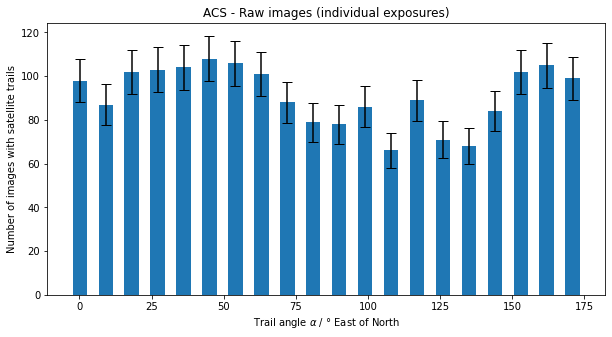

In [63]:
#ACS
real_angle_hist_ACS = np.histogram(data_trails_ACS["real_angle"],bins=20)
u_real_angle_hist_ACS = np.sqrt(real_angle_hist_ACS[0])
plt.figure(figsize=(10,5))
plt.bar(real_angle_hist_ACS[1][:-1],real_angle_hist_ACS[0],width=5, yerr=u_real_angle_hist_ACS,capsize=5)
plt.xlabel("Trail angle $\\alpha$ / ° East of North")
plt.ylabel("Number of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_real_angle.png",dpi=100)

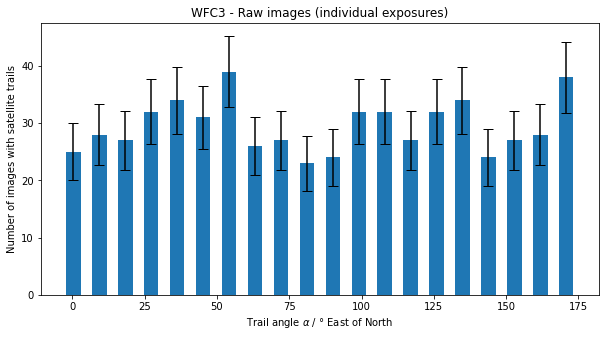

In [64]:
#WFC3
real_angle_hist_WFC3 = np.histogram(data_trails_WFC3["real_angle"],bins=20)
u_real_angle_hist_WFC3 = np.sqrt(real_angle_hist_WFC3[0])
plt.figure(figsize=(10,5))
plt.bar(real_angle_hist_WFC3[1][:-1],real_angle_hist_WFC3[0],width=5, yerr=u_real_angle_hist_WFC3,capsize=5)
plt.xlabel("Trail angle $\\alpha$ / ° East of North")
plt.ylabel("Number of images with satellite trails")
plt.title("WFC3 - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_real_angle.png",dpi=100)

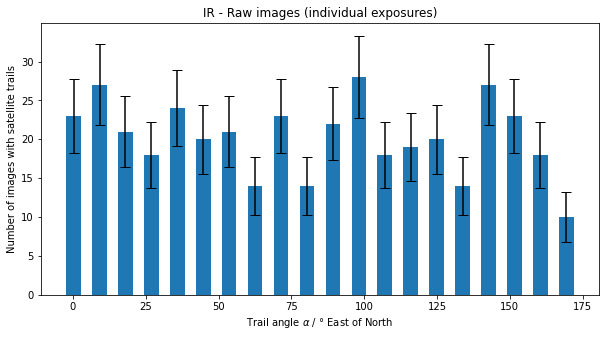

In [65]:
#IR
real_angle_IR = []
for i in range(len(data_trails_IR["real_angle"])):
    if data_trails_IR["real_angle"][i] != "Error":
        real_angle_IR.append(float(data_trails_IR["real_angle"][i]))
real_angle_hist_IR = np.histogram(real_angle_IR,bins=20)
u_real_angle_hist_IR = np.sqrt(real_angle_hist_IR[0])
plt.figure(figsize=(10,5))
plt.bar(real_angle_hist_IR[1][:-1],real_angle_hist_IR[0],width=5, yerr=u_real_angle_hist_IR,capsize=5)
plt.xlabel("Trail angle $\\alpha$ / ° East of North")
plt.ylabel("Number of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_real_angle.png",dpi=100)

#### Trail length

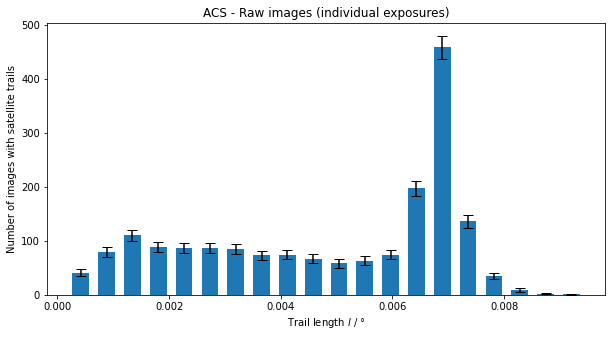

In [66]:
#ACS
real_length_hist_ACS = np.histogram(data_trails_ACS["real_length"],bins=20)
u_real_length_hist_ACS = np.sqrt(real_length_hist_ACS[0])
plt.figure(figsize=(10,5))
plt.bar(real_length_hist_ACS[1][:-1],real_length_hist_ACS[0],width=0.0003, yerr=u_real_length_hist_ACS,capsize=5)
plt.xlabel("Trail length $l$ / °")
plt.ylabel("Number of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_real_length.png",dpi=100)

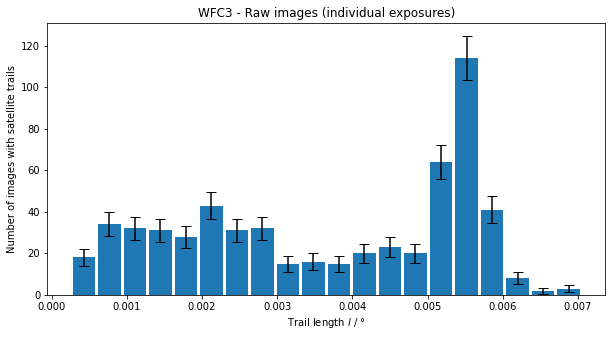

In [67]:
#WFC3
real_length_hist_WFC3 = np.histogram(data_trails_WFC3["real_length"],bins=20)
u_real_length_hist_WFC3 = np.sqrt(real_length_hist_WFC3[0])
plt.figure(figsize=(10,5))
plt.bar(real_length_hist_WFC3[1][:-1],real_length_hist_WFC3[0],width=0.0003, yerr=u_real_length_hist_WFC3,capsize=5)
plt.xlabel("Trail length $l$ / °")
plt.ylabel("Number of images with satellite trails")
plt.title("WFC3 - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_real_length.png",dpi=100)

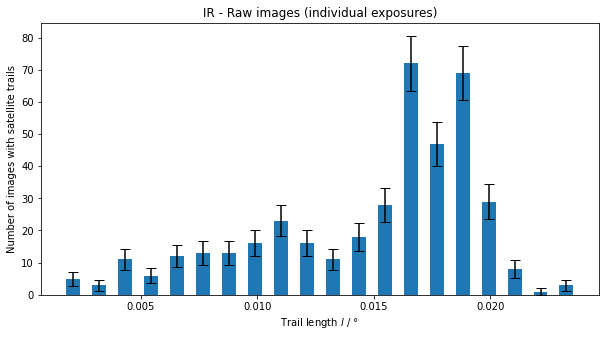

In [68]:
#IR
real_length_IR = []
for i in range(len(data_trails_IR["real_length"])):
    if data_trails_IR["real_length"][i] != "Error":
        real_length_IR.append(float(data_trails_IR["real_length"][i]))
real_length_hist_IR = np.histogram(real_length_IR,bins=20)
u_real_length_hist_IR = np.sqrt(real_length_hist_IR[0])
plt.figure(figsize=(10,5))
plt.bar(real_length_hist_IR[1][:-1],real_length_hist_IR[0],width=0.0006, yerr=u_real_length_hist_IR,capsize=5)
plt.xlabel("Trail length $l$ / °")
plt.ylabel("Number of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_real_length.png",dpi=100)